In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
# numpy.set_printoptions(threshold=10)

import tensorflow as tf
# from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot

print('Completed importing the necessary packages')

Completed importing the necessary packages


**Part 1 - Task 1**

Open this notebook by Francois Chollet, which creates a simple Multilayer Perceptron as described in Section 2.1 of Deep Learning with Python, Second Edition. (Recall that this book is available from the library’s O’Reilly database.)
Chollet’s example uses the simpler MNIST dataset, which includes only handwritten digits. That dataset is included with Keras.
Run the model from this notebook. What accuracy does it achieve for MNIST?

**Analysis**

The model produced a training accuracy of .9886 and a loss of .0384 after the 5th epoch and a testing accuracy of .9802 with a loss of .0678.
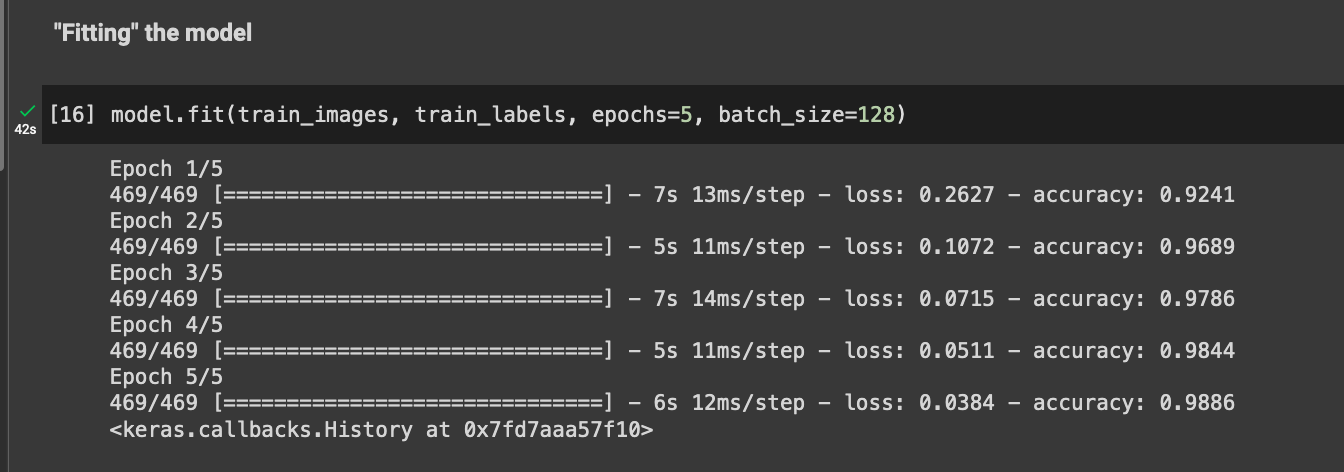

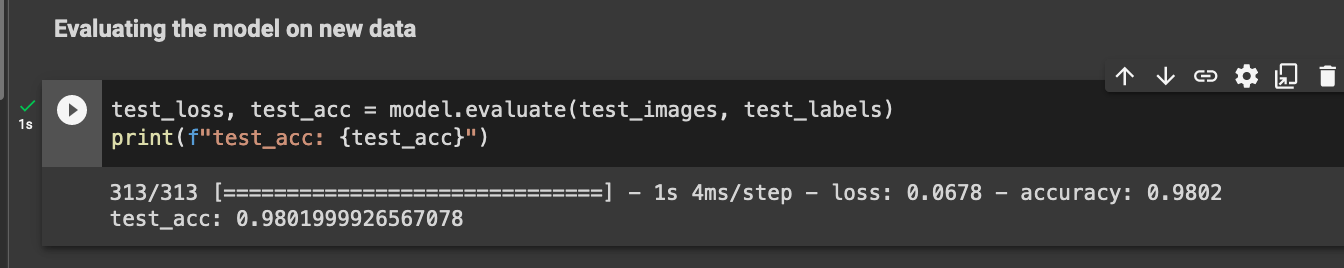

**Part 1 - Task 2**

Load the EMNIST Letters dataset, and use plt.imshow() to verify that the image data has been loaded correctly and that the corresponding labels are correct.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
with numpy.load('drive/MyDrive/emnist_letters.npz', allow_pickle=True) as data:
  test_images = data['test_images']
  test_labels = data['test_labels']
  train_images = data['train_images']
  train_labels = data['train_labels']
  validate_images = data['validate_images']
  validate_labels = data['validate_labels']

print(test_images.shape)
print('There are 20,800 test images with each image being 784 pixels long.')
print()

print(test_labels.shape)
print('There are 20,800 labels for the test image set and each label is a one-hot encoded array of 27 elements.')
print()

print(train_images.shape)
print('There are 104,000 training images and each image is 784 pixels long')
print()

print(train_labels.shape)
print('There are 104,000 training images and each image\'s label is a one-hot encoded array of 27 elements')
print()

print(validate_images.shape)
print('There are 20,800 validation images and each image is 784 pixels long')
print()

print(validate_labels.shape)
print('There are 20,800 validation images and each image\'s label is a one-hot encoded array of 27 elements')
print()

import matplotlib.pyplot as plt

for i in range(0,5):
  plt.imshow(train_images[i].reshape(28,28))
  plt.show()
  print(train_labels[i])

**Part 1 - Task 3**


Apply the network architecture from Chollet’s MNIST notebook to the EMNIST Letters data. (You will need to modify the numbers of inputs and outputs, but should leave the dense layer intact.)
Note: You are welcome to use PyTorch to implement the same architecture; Keras is required only to run step (1).
What accuracy do you achieve? How does this compare with the accuracy for MNIST?

**Analysis**
Using the model's dense (fully connected) architecture on our emnist training's data set and only changing the input layer to accept 784 pixels and the output layer to have 27 nodes, the accuracy received after the 5th epoch while training was .9238 while the loss received was .2323. This accuracy was lower as compared to the mnist training data set, and respectively, the loss was higher.


During evaluating with the test data set, this model produced an accuracy of .9016 and a loss of .3233. As compared to the mnist evaluation on the test data set, this model's accuracy was lower and the loss was higher.

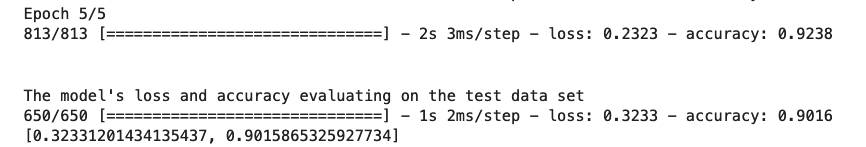


In [ ]:

%load_ext tensorboard
%tensorboard --logdir /log

tensorboard = tf.keras.callbacks.TensorBoard(
 log_dir="/log",
)

model = keras.Sequential([
                                             tf.keras.layers.Input(shape=784),
    layers.Dense(512, activation="relu"),
    layers.Dense(27, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #Use the categorical_crossentropy loss function since the labels are one-hot encoded
              metrics=["accuracy"])



model.fit(train_images, train_labels, epochs=5, batch_size=128, callbacks = [tensorboard])

print('\n\nThe model\'s loss and accuracy evaluating on the test data set')
model.evaluate(test_images, test_labels)


**Part 1 - Task 4**

The Keras examples include a Simple MNIST convnet. Note the accuracy obtained by that code compared to the previous example from Chollet.
Apply the same architecture to the EMNIST Letters data. (Again, you are welcome to implement an equivalent architecture in PyTorch instead). What accuracy do you achieve? How does this compare with the accuracy for the MNIST? How does it compare with the accuracy for EMNIST that you saw with a Dense network in step (3)?


**Analysis:**
After applying the same CNN architecture on the EMNIST data set, the last epoch in the training phase received a training accuracy of 0.9228 and a loss of 0.2294. This accuracy and loss were relatively same for the last epoch of the training phase when using a CNN model and dense model with the Emnist dataset.

During testing (evaluations), this model produced an accuracy of 0.9322 and a loss of 0.2114. As compared to the emnist test dataset's evaluation on the dense model, this CNN model's accuracy was higher and the loss was lower.

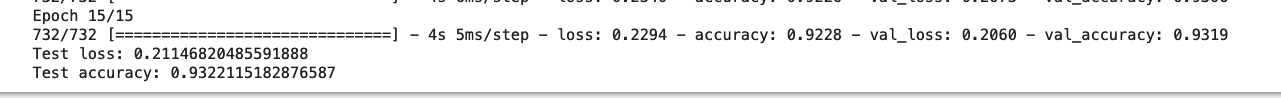

In [ ]:
#printing shapes
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

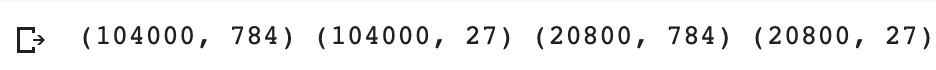

In [ ]:

modelCNN = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(27, activation="softmax"),
    ]
)

modelCNN.summary()

batch_size = 128
epochs = 15

modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


modelCNN.fit(train_images.reshape(len(train_images), 28, 28, 1), train_labels, batch_size=128, epochs=15, validation_split=0.1)

score = modelCNN.evaluate(test_images.reshape(len(test_images), 28, 28, 1), test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


**Part 2 - Task 5**

You should have found that while the EMNIST Letters are harder to learn than the MNIST digits, switching to a different network architecture led to a significant increase in model performance.
You may have noticed, however, that the training process was slower. This means that experiments take longer, and mistakes can be costly. While plotting a learning curve when training has finished can help diagnose problems, ideally you will want to see updates during the training process.
In order to avoid dead-ends while adjusting and tuning your model, TensorFlow includes the TensorBoard tool and the TensorBoard notebook extension for this purpose. While the examples show Keras models, PyTorch supports TensorBoard as well.
Add TensorBoard support to the CNN model you run in Part 1, and add TensorBoard to your notebook to visualize the training process.
Note: if you get a 403 error when trying to use TensorBoard in Google Colab, you may need to enable third-party cookies.


**Analysis**

We found the best way to use tensorboard is to look at the scalars panel and refresh when an epoch is done. Then it plots the training and validation curves over epochs. You'll occasionally have to adjust the graph to fit the domain.
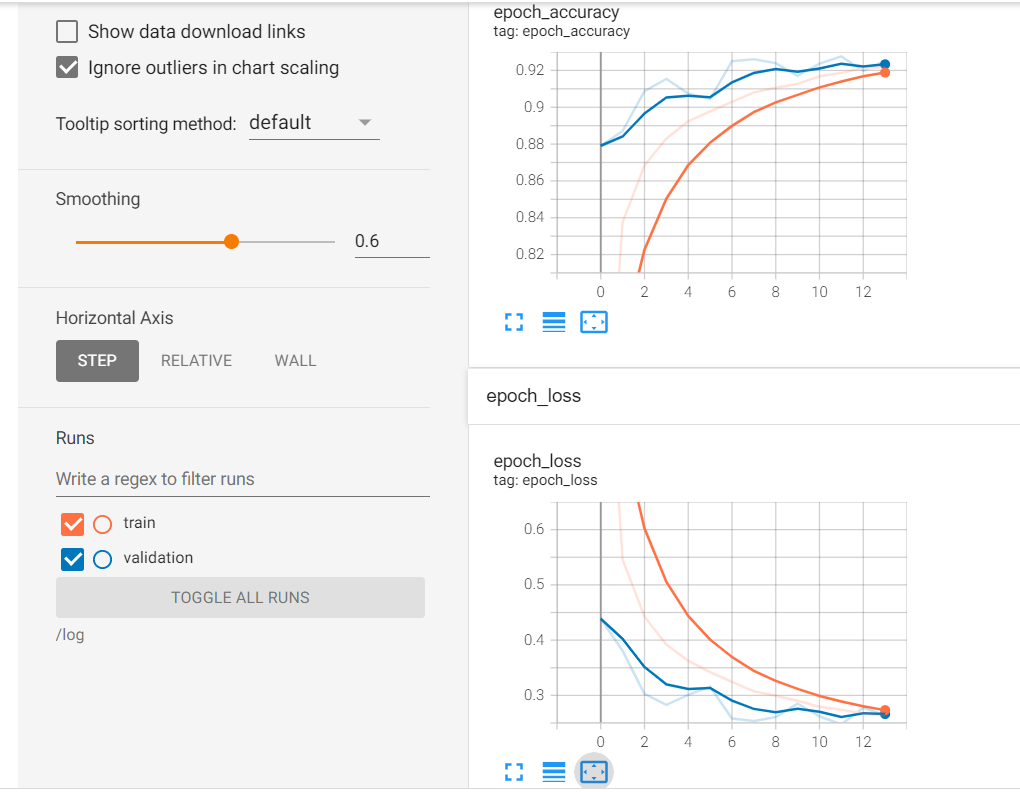

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /log

tensorboard = tf.keras.callbacks.TensorBoard(
 log_dir="/log",
)
modelCNN = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(27, activation="softmax"),
    ]
)

modelCNN.summary()

batch_size = 128
epochs = 15

modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


modelCNN.fit(train_images.reshape(len(train_images), 28, 28, 1), train_labels, batch_size=128, epochs=15, validation_split=0.1)


**Part 2 - Task 6**

Now that you have a baseline convolutional network for comparison, begin experimenting with alternative architectures (e.g. adding additional filters to learn features and additional hidden layers to learn combinations of features) and with adjusting hyperparameters. Your team’s goal is to obtain as high an accuracy as possible on the validation set. Use what you’ve learned in Chapters 2 through 5 of the textbook to obtain the highest accuracy you can, including:

Weight initialization Choice of activation function Choice of optimizer Batch normalization Data augmentation Regularization Dropout Early Stopping Pooling

(You will notice that some of these techniques were already in use in the Keras Simple MNIST convnet example.)

**Analysis**

After applying different techniques to enhance our CNN model, we were able to achieve a training accuracy on the validation set of .9391 and a loss of .2295.

The techniques we used were:
1. Adding l1 and l2 regularization to each convolutional layer
2. Increasing the number of filters in each cnn layer.
3. Increasing the kernal_size of the first cnn layer to a 7x7 kernel size.
4. Applying max pooling and batch normalization after each cnn layer.
5. Slowly decreasing the filter size for each subsequent cnn layer.
6. Using 14 epochs and applying early stopping with a patience of 3 on the val_loss parameter
7. Keeping the rest of the cnn model the same as the keras's example

Altogether, these techniques made our model robust against overfitting and brought in a higher accuracy than keras's cnn model. Even though we have 14 epochs, with early stopping, training stopped after the 9th epoch since that's when the val_loss stopped improving for the 3rd time.

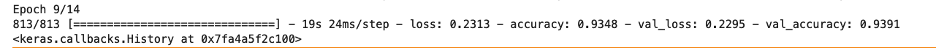



**Part 2 - Task 6**

Now that you have a baseline convolutional network for comparison, begin experimenting with alternative architectures (e.g. adding additional filters to learn features and additional hidden layers to learn combinations of features) and with adjusting hyperparameters.
Your team’s goal is to obtain as high an accuracy as possible on the validation set.
Use what you’ve learned in Chapters 2 through 5 of the textbook to obtain the highest accuracy you can, including:

Weight initialization
Choice of activation function
Choice of optimizer
Batch normalization
Data augmentation
Regularization
Dropout
Early Stopping
Pooling

(You will notice that some of these techniques were already in use in the Keras Simple MNIST convnet example.)

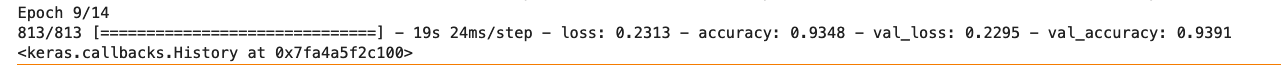

**Analysis**

Using different technique the model yields the accuracy of 93.79 % with a loss of 0.24 , which is the best accuracy which we were able to achieve while using different techniques . Previously with the same CNN which was used in MNIST Dataset , the accuracy was around 92% .

Technique used :

1.  First is increasing the filter size in the first Convolutional layer to 7*7 filter , Activation was kept same to Relu , with the Regularizer to apply a penalty on the layer's kernel . Here we applied L1 + L2 penalties . to reduce the overfitting of the model .
2. The next layer is Max pooling operation that selects the maximum element from the region of the feature map covered by the filter , Here the pool size is (2,2) and strides is (2,2)
3. The third layer is Batch Normalization which solves a major problem called internal covariate shift .
Using multiple layer of conv2D with lower filters and a lower filter size will yield a good accuracy from the model
4. The model ends with a dense layer with softmax activation for multiclass classification
RIgNIF4kkIUkqGy2SCfFq3yhtVlSNkulP8eVDvhV+Hogz01iqfjfCAUcFT+mUSRMTIGYArFVoSg5GmINiJ1luQmRKpvRRUJ29KCNVB6viN8K4niBOCxIyY8VZklD41X2JfmywXyxLUIRJ1qFDxYIE8OV9cFO8bgD8cNcsMsCMStpkEcgGxs1mAtfEByizB17LhAnJah4PkgKguKVa3GKJC9WZY9bCPLCFHoLiN1lhQmqtXhyAdycSn48S1IQm6iMEy/K4UbEKuPBl4MowAbBgAHkcGSCSSAHiNq667rhL+VMKOACKcgGAuCk0gyuSBmYEcNrAigCf0AkALKhdUEDswJQCPVfhrTKqxPIGpgtHFiRC55CnA8iQR78LR9YJR7ylgyeQI3oH965cPBgvHlwKOb/vX5Q+03DgpoolUY+6JGhOWhJDCEGE8OJoUR73Aj3x33xKHgNhMMVZ+Leg3l8syc8JbQTHhGuEzoItyeK5kl/iHIM6ID8oapaZH5fC9wGcnrgQbgfZIfMuD5uBJxwd+iHhQdAzx5Qy1bFragK4wfuv2Xw3dNQ2ZFdyCh5GDmQbPfjSg0HDY8hFkWtv6+PMtbMoXqzh2Z+9M/+rvp8eI/80RJbhB3CzmInsPNYI1YHGFgTVo+1YscUeGh3PRnYXYPe4gfiyYU8on/446p8Kiopc6l26XL5rJwrEEwtUBw89iTJNKkoW1jAYMG3g4DBEfOcRzBcXVzdAFC8a5R/X2/jBt4hiH7rN9383wHwa+rv7z/6TRfRBMABL3j8j3zT2TEB0FYH4NwRnlxaqNThigsB/ktowpNmCN9jlsAO5uMKPIEvCAQhIALEgESQCibAKgvhPpeCKWAGmAuKQSlYDtaA9WAz2AZ2gb3gIKgDjeAEOAMugsvgOrgLd08neAl6wDvQhyAICaEhdMQQMUOsEUfEFWEi/kgIEoXEI6lIBpKNiBE5MgOZj5QiK5H1yFakCjmAHEFOIOeRduQ28hDpQt4gn1AMpaK6qAlqg45EmSgLjUQT0fFoNjoZLUIXoEvRcrQS3YPWoifQi+h1tAN9ifZiAFPH9DFzzAljYmwsBkvDsjApNgsrwcqwSqwGa4DP+SrWgXVjH3EiTscZuBPcweF4Es7DJ+Oz8CX4enwXXoufwq/iD/Ee/CuBRjAmOBJ8CBzCWEI2YQqhmFBG2EE4TDgNz1In4R2RSNQn2hK94FlMJeYQpxOXEDcS9xGbie3Ex8ReEolkSHIk+ZFiSFxSAamYtI60h9REukLqJH1QU1czU3NVC1VLUxOrzVMrU9utdlztitoztT6yFtma7EOOIfPJ08jLyNvJDeRL5E5yH0WbYkvxoyRScihzKeWUGsppyj3KW3V1dQt1b/U4dZH6HPVy9f3q59Qfqn+k6lAdqGxqOlVOXUrdSW2m3qa+pdFoNrRAWhqtgLaUVkU7SXtA+6BB13DW4GjwNWZrVGjUalzReKVJ1rTWZGlO0CzSLNM8pHlJs1uLrGWjxdbias3SqtA6onVTq1ebrj1KO0Y7X3uJ9m7t89rPdUg6NjohOnydBTrbdE7qPKZjdEs6m86jz6dvp5+md+oSdW11Obo5uqW6e3XbdHv0dPTc9ZL1pupV6B3T69DH9G30Ofp5+sv0D+rf0P80zGQYa5hg2OJhNcOuDHtvMNwg0EBgUGKwz+C6wSdDhmGIYa7hCsM6w/tGuJGDUZzRFKNNRqeNuofrDvcdzhteMvzg8DvGqLGDcbzxdONtxq3GvSamJmEmEpN1JidNuk31TQNNc0xXmx437TKjm/mbicxWmzWZvWDoMViMPEY54xSjx9zYPNxcbr7VvM28z8LWIslinsU+i/uWFEumZZblassWyx4rM6sxVjOsqq3uWJOtmdZC67XWZ63f29japNgstKmzeW5rYMuxLbKttr1nR7MLsJtsV2l3zZ5oz7TPtd9of9kBdfBwEDpUOFxyRB09HUWOGx3bRxBGeI8Qj6gccdOJ6sRyKnSqdnrorO8c5TzPuc751UirkWkjV4w8O/Kri4dLnst2l7ujdEZFjJo3qmHUG1cHV55rhes1N5pbqNtst3q31+6O7gL3Te63POgeYzwWerR4fPH08pR61nh2eVl5ZXht8LrJ1GXGMpcwz3kTvIO8Z3s3en/08fQp8Dno86evk2+u727f56NtRwtGbx/92M/Cj+u31a/Dn+Gf4b/FvyPAPIAbUBnwKNAykB+4I/AZy56Vw9rDehXkEiQNOhz0nu3DnsluDsaCw4JLgttCdEKSQtaHPAi1CM0OrQ7tCfMImx7WHE4IjwxfEX6TY8Lhcao4PRFeETMjTkVSIxMi10c+inKIkkY1jEHHRIxZNeZetHW0OLouBsRwYlbF3I+1jZ0cezSOGBcbVxH3NH5U/Iz4swn0hIkJuxPeJQYlLku8m2SXJE9qSdZMTk+uSn6fEpyyMqVj7MixM8deTDVKFaXWp5HSktN2pPWOCxm3Zlxnukd6cfqN8bbjp44/P8FoQt6EYxM1J3InHsogZKRk7M74zI3hVnJ7MzmZGzJ7eGzeWt5LfiB/Nb9L4CdYKXiW5Ze1Mut5tl/2quwuYYCwTNgtYovWi17nhOdsznmfG5O7M7c/LyVvX75afkb+EbGOOFd8apLppKmT2iWOkmJJx2SfyWsm90gjpTtkiGy8rL5AF37Ut8rt5D/JHxb6F1YUfpiSPOXQVO2p4qmt0xymLZ72rCi06Jfp+HTe9JYZ5jPmzng4kzVz6yxkVuasltmWsxfM7pwTNmfXXMrc3Lm/zXOZt3LeX/NT5jcsMFkwZ8Hjn8J+qi7WKJYW31zou3DzInyRaFHbYrfF6xZ/LeGXXCh1KS0r/byEt+TCz6N+Lv+5f2nW0rZlnss2LScuFy+/sSJgxa6V2iuLVj5eNWZV7WrG6pLVf62ZuOZ8mXvZ5rWUtfK1HeVR5fXrrNYtX/d5vXD99Yqgin0bjDcs3vB+I3/jlU2Bm2o2m2wu3fxpi2jLra1hW2srbSrLthG3FW57uj15+9lfmL9U7TDaUbrjy07xzo5d8btOVXlVVe023r2sGq2WV3ftSd9zeW/w3voap5qt+/T3le4H++X7XxzIOHDjYOTBlkPMQzW/Wv+64TD9cEktUjuttqdOWNdRn1rffiTiSEuDb8Pho85HdzaaN1Yc0zu27Djl+ILj/U1FTb3NkubuE9knHrdMbLl7cuzJa6fiTrWdjjx97kzomZNnWWebzvmdazzvc/7IBeaFuoueF2tbPVoP/+bx2+E2z7baS16X6i97X25oH91+/ErAlRNXg6+euca5dvF69PX2G0k3bt1Mv9lxi3/r+e2826/vFN7puzvnHuFeyX2t+2UPjB9U/m7/+74Oz45jD4Mftj5KeHT3Me/xyyeyJ587FzylPS17Zvas6rnr88au0K7LL8a96HwpednXXfyH9h8bXtm9+vXPwD9be8b2dL6Wvu5/s+St4dudf7n/1dIb2/vgXf67vvclHww/7PrI/Hj2U8qnZ31TPpM+l3+x/9LwNfLrvf78/n4JV8od+BTA4ECzsgB4sxMAWioAdNi3UcYpe8EBQZT96wAC/wkr+8UB8QSgBn6/x3XDr5ubAOzfDtsvyK8Je9VYGgCJ3gB1cxsaKpFlubkquaiwTyE86O9/C3s20ioAvizv7++r7O//sg0GC3vHZrGyB1UIEfYMW0K+ZOZngn8jyv70uxx/vANFBO7gx/u/AJ+nkMNY6PhcAAAAlmVYSWZNTQAqAAAACAAFARIAAwAAAAEAAQAAARoABQAAAAEAAABKARsABQAAAAEAAABSASgAAwAAAAEAAgAAh2kABAAAAAEAAABaAAAAAAAAAJAAAAABAAAAkAAAAAEAA5KGAAcAAAASAAAAhKACAAQAAAABAAAI+qADAAQAAAABAAADYAAAAABBU0NJSQAAAFNjcmVlbnNob3TsF3ajAAAACXBIWXMAABYlAAAWJQFJUiTwAAAC3GlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25zLmFkb2JlLmNvbS90aWZmLzEuMC8iPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+MjI5ODwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj44NjQ8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8dGlmZjpSZXNvbHV0aW9uVW5pdD4yPC90aWZmOlJlc29sdXRpb25Vbml0PgogICAgICAgICA8dGlmZjpYUmVzb2x1dGlvbj4xNDQvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6WVJlc29sdXRpb24+MTQ0LzE8L3RpZmY6WVJlc29sdXRpb24+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgpniPRUAABAAElEQVR4Aex9B4BVxdX/2UrvRaWjIKARBVRQoyj2aGIDW2ISNQoYUawxlkSwfvGzd03yT7PHkkSNivpFk6igRkXR2EFURKTDAruw+//9ztx57+3btw22IP7u7nvvlpk5c86cOe2eOzdv1KhdKszwn2x5/ptn5TgX9sOFPBQpz8/DuVC8ogL7PImN3/nY5znfwglUwA7Po1ZmWzyXh7Khdp796Ec/tD322MOr5rEgrtUNPquE9vPzUGM94VfCX/BFf/Gf5p9LLRdJ/kVRV1X+Sf5I/kr/UL9L/8r+kP21fvav7M/gCVCbyv4HEWR/yv6U/VkpZvBNs78XL1liZ511JkWib7nxD3KT3xsSf6mkfwK0Os4/wSe5RH/xn+bf+sd/JX+CHKUsCR5EXePfkr+Sv9I/0r/Sv9K/0r8NEn+kQoEWrtv9Z+lf6V/pX+nfjV//FkYnK9yuTJJvmIiDJJ08RN09dwYjyd+8iiDYgiwsD9dxynNjvKBfYcFYwYUmr7sDw9P5OChP2vUQidl7771n/fr3QxmU8oIsE+HjBODydAZ07FcguMVr4XynTp1s5cqVVlpa6iVx6xGXyrEfGvRvh489nGaSEv/ide537drNFi78Cuew1RN+qGTWvn17W7ZsKaDWHz7xLywqRBvtbNFXixL6E8fa8Y/w+dumTWvULbAVK5bhqO74Z9K/Y4eOtqqkxNaUldUbPkeE+Hfp2tm++mqhd60u9M+EH+nfrgPouXSZY1HT+DuQ1FeAz/EvLCzyMVm8aJEzSgWS1aob/1zwK8BjrVu3dl5bsWJFBoTK/Je64Dtp+JH+ncmfK1bamrWgZzX8Vx38OP7tQYuloAW3bP73k6mvqvAj/bt072pffbkwJ//XBp/0Lywkf7a3hYsWVpp/KdC+Uz180r9NK/AnflesWI7SgT+JT13gRzgdOwX+LF1TiprZW83wI/2z6Vkf+JH+XbqAnl8lMiPVjbrBZxvOn+1Az8UYE9IikKNe8qd1mzYuK9L8WXf4ESDpWbKyxErLKD+xrYf869ChA/hzKSrXH34c/65dQU/K4PWAz24H/mxnixctQS/qJ/8j/Sk/qfBKoE84/+P8y+SzOP5kvszz7APPdOrUBfpoOfQR5js2H1aWrYf86dixoy1ZhvleT/lP+FH/UKeRP9cHPvV/QVGRtWvXzpZAfmbiWRv+ET4xbwP+pK5esXxFvfAP9kegP9sogy4K+p0Y1k/+Ev9OHTvZilXg8dWl6y3/unbt4jptfeCTgAXF0EdtwZ+LSU9S1EfG9yP/kV9q4n/SgtXIn2wic1y8Ls5k0p/nHArLJvzXpm1r0LM0xZ/sS13hsz2W79K5c9BpbnPxbNxqhx/tr8if6wOfPFVYUGjtoI8WUb+ntrrDd/5sDXrCLqV+DoRCQ/WUP5X5s37w2W3i36lTZyspSWzYesKPqLv8/GpBreMf6R8RjvTfWOzP1rAR1q1du0H2Z8dOHSCDMd/Bn9n8Xx3+2ePfpRv00YIgPzPnGemV6X9E+off9Pg3hP1ZWFBgLVu2hL20/vZnW8gMzu/l4K9o/xCH7PHPxj9T/9FGiPSsK/6x/Uj/jcH+LMwvtJatWmyQ/dkaNkJBfn7QaZUHH0fp8c/GP8pf8l82Pesrf8l/G4P9WQCfoDJ/1g3/TP4jPfPy8sFfCY+vh/xLxwDWgI3Xz//eUPuTrED/ffky2DrraX+yjTkfz/ap2BTxF8LjWJD/XMY1cfxH8EV/8Z/mn+SP5K/0D7Sh9G+T3n+S/SH7Q/aH7A/ZH7I/ZH/I/tgk7a9RI0dRwidBHrJ5VHkccBwh4MaAIgNOzJikKGDQliVxmvcgfeMPc3j8kAWYzIAT4TprsZ7X8vL88qPkVGiZB4IfVC5IQfqK/uI/zT/JH5e1kr/SP9K/NC/cbPA5gYPkWPZHoIsbaLK/ZH/K/pb/QUHpnpf8L/mfibNNlsDmR8kp+d8hRkGqyP8mN2CjfaX4g+IPij8o/uC+luIPij8o/kDd6GaTzwkqynCs+EOgg+IPYAjFXxR/UfxF8RcqCsVfEq86CTaQJNj8KDml+IPiD4y8kCsUf2n4+Et+iOiAvMgiT6YeEnZoyvIQJE+cfN9PD0G4zAUTks2rJwKN4xUSg7gDMccMdW8ytFzB7B8c+6kISvBBSdAFVBH9I1OI/zT/oADJDpRFkj+gQTI3SBLJX1AhbNI/pENiLFLtgk1cz0r/yv6Q/SX709WG7O9gSsj/oBnhLOFf1Bf0PfiR/yH/KzKF/C/5X/K/5H9SNcj/VvyBPJDoBrKE4g+gQtgUfyAdFH/wm1UwoxV/ocogIcAVij8o/uBqQ/EHkkH3PykU/D/5orzEOcUfXIcq/pDYmPQ5lH/gtoT8L/mfG+J/FvTq3etiKp4gXFwNQfi6dQahg7OUv+HLxTAPo6/H13BxgWw/4YI7c59neRIfnqbRx+bxScHiec96FfwUTUgs0T/wjfhP848yQvLHBSdJwY/LUe5L/kr/SP+GCUFToxIteMyT+PjEwRd2+UnpWp6X/eGBhxRNSCzZH4FvZH/I/qCMkP3hgpOk4MflKPdlf8j+qKRzfbI4fwRVi2/pX9kfLjjwJfvLaZCytUgX2Z+yPxV/paWdGBaUE/zwGGc5R2R/OW1ICn5kf5EIsj9lf1NCuIDwOaH4TyYtSBLZ3/I/wAOuOPCVqNiUruV52Z+yP2V/yv6MwoHCQvY3aLBp+R8FvXr1vpgoWT6lPk2lxLkKh4lyoMngpfw77jktfIoEEyv1vIc/AhUM8dA2AYRa3GPT/Ga2Hs+HMoIv+ov/NP8kfzyuJfmb6B6qCOkf6d9gPwSLgfYDKBIMB7cgOF1kfyRcIvuLDOKJCAmL4Cjwj5/nl+xP2d/yPzAPEpkh/89pIftb9rfsb1ePQWW6wUUZEfSnH+Ky7C9QxEnC2yaKf8n+lv8h/yuRkvK/XEMwESURka4v/CS+KCvkf+n+h+7/BGsqzJEQ8JX/If9D/keiJML0gBKhXvVZ4t9xT/Y39aj8D/lf8j/lf9bsfyK8CxIFS4NSAzKVLxflTiCdm+XY9eXmcLoiSFfuhX9kA1bghaSpKrgSMsJCMzzk+0q5NFsQ0DwfjFz+Cr7oHxgDXiE28Z/mX1qYJDJI8kfylyvCYZP+iVqUkwL/0r8gg+wP2V/B7HQhQdsVBIkzRfan7G/5H/K/ojyQ/yn/mzeZFH9Q/EXxp2Ar+aPdMJ4Uf1H8RfEXTgTMCzrY7mQHPxsHij8o/k82wAbe4L/iLyCD4i+KvyQik1ND8RfQwP9JDd3/1P1f3f/W/f9UPFrxJ8Wfmjr+lDdq1EiYq2S9RD9DQXE/qClewjUYs75Eou/7xfQXLRxvgUZvUi191Zkbcj7N5CjjIWd3pFgwVPJvfNGP4L7gR8KK/uI/zT/JnyAcXca6fEy+opjAoeRvojYy6EPySP9I/5IPuNHskP0Basj+Cgwh+5OzIlBB9rf8D4gG+V+uKfAVbS7Z37K/Iy8kaiP+0LDgJf5w4nAnY+Oh7M80WWR/kV3AFbK/klkSJo1/cx6BNNwPHBNOKP4j/SP9E+dCMm3iDxUML/GHE4c7GRsPpX/SZJH+kf6R/oVUkP2RSMkgNP2bchSk4X6QGOGE7A/ZH7I/4lxIpk38oYHBS/zhxOFOxsZD2R9pssj+kP3RHPZH+tVdcZLilyuPxvnqv5zBiQZMX4sl4qxOV0qXcRmAtnANbVTkJ3UqVU0WZRP8QHTRX/yXnkphHmr+Sf5I/roySeuWSkoESig9adJlpH+CWgVtpH9lf8j+CsZqJdEh+9PJIftb9jcZQf6H/A/wQRSRQTaAKWR/Zs2NSCHFP1JKNSGJ7O/0/JH9TVqAMeR/yP+Q/5ESlVFrJLPDdYsrXdlfsr8gLqN14b+K/4Ig1CH4T9EmUijOpNSFjDJxWrGu7j/p/lvCM5VYR/EfJ0cwVLPmWCKHJH8kfyR/s+ZGJSECJYTj5FRaR0n/yP8lW4Axmtn+yBs5ahT5Mmzcwcj4jwt3ng5Xk0tejvuZWXp+kl8ZyiKcQ0nPHCaqvkhyUjQpiJ/MSREAC77TWvRPWI/USHgi4R7xn+af5E8yPZI54T+Sv5UFBRWK9I9LT+lf2R8UD2GT/eWCQvan7G+qiDgtuAOe8B/Z3wlhAnUS0jiluC/7K4NvIv8kYtX94Egp2R+ghPx/2V+yvygewpYICvwo/pUhRxMl4z/Sv9K/ZITEOktYw6cP92V/RMo4ScKX7I9AlJSgBafI/gJvyP6S/SX7KyUW4o1K2V+yP6kiogrlDnjCf2R/JoQJ1ElI45TivuyvDL6J/EMBk0koHsj+cKJI/zav/s3Pc0ZMOBWzl7zKj+XlI4mawxM2TmxecZMRJ8nPqYvc5+YnWTUUqEDbge8jkkmBinwUwj7/BT/Qjt+iv7OU+I9zSfNP8kfyV/onqAfpX9JB9ofsL8hE2Z+yv4M4CMIxfifuhfwP+V+cIPI/5X9TJDD6EOzIREAo/qD4i+JPir9BHCj+GD1sCErFH11POEUUf1P8X/c/Ersp3NhV/EXxJ8WfFH9S/M1NZ4rDylviXir+BMKAFoq/KP7CKaH4S/PHnwp69uxzMWMeLrSYf0PhFQWWn84znE62cCE8hYSCWIqVf9mbm0M47e3iYrhdnVEuI7mnAkE3wQeRSPdvOP33O2A/+9k551rHjh1t5syZzlnkJfFfnGGaf6SE5E8iUyV/IR0y9EoyTaR/QBXpX9kfydSQ/ZVh1FJGyP5MJCV0qexv+R+UE/I/vvH+1zfd/xT+iWpM2Q0UC/K/FX+I5kJgDPnf8r/dp1D8QfEHxV+icEz9Kv6k+JPib9CRKTtS8RdaDKlN8acUKRR/0v1v3f/HdFD8TfG3Rsz/CCv6UAfxA2ZLP+ES8rDo0Hk+EhmRm5dhcVzBvp92HZYukDqMpzKUHE9xpY5QESYxlR4r8MPdlBL8ZsMnibb91rY2auTOtjM+Xbt0BYEijUiuTYv+RcVFNvaIsVZUVGDbbbedI0oOEP9p/kn+QDBScHJzGbnpzX/J/zi26YGW/JP8l/6T/pP+k/6T/nfrR/aP7D/ECGT/bmr+v+x/2f/Bt5X/EzRdsHtl/8v+l/0v+1/2v+x/p4Dsf9n/8n/gLmxa9z/l/8j/kf+j/I/Gyn8pjMxV4eumwKXwJBxm3XDjLx1vCFVXLulTnrXub+pjkVAmhN9wzFMoX1HORB4XyVbOXxopbAvnCccTfrwMXRk+NyX4kf4nn3yy7bzzSKcJ6blo8WI75+yzU0PSXPTv0bOH7b777jZ06PbWrVsX+/TTz2zq1CnoIXmFoxu2+o7/2LHjrKCgwPlm2rSnU+2RJ9huNv8N2WZb23XXUTZkyDbWoUN7e+LvT9qfH3xwveBvv/12NmnSZCsvX2cLvlpgF5x/YYIFsckNv7no7wiiS4JPXgsvNJL8CTy6IfNP8lf6R/pX9ke0P4IClP6T/pf9k8v+lP0l+0v2p+xv15OKf4AMG+b/y/+Q/yH/Q/6H/A/IUQY7fZP/Jf9L/pf8r6r3P+R/yv+U/yn/080E+Z8gg/xP0iBajvW9/y7/e9P2vwvJGeXgCpgSwbeA7GRWEf/iFpnHuSh1Opga/PYkDJz3FX6YzePtsZ2kJl8PwNQEv4QvnM4nBOxyn/CLCgvsxBNPtA7tO6AezfvkYijiRywbdgIsrBxrr78x05546onQdmx/PeA3N/7Z8L/8cn4KWaJdiCSYTPxJiDBqDUP/bPjZ4z9mzBgbd+Q4Ky4qRm/Cxn5169Ydw42ekPbrSX8KmdGj9/BG16xaY888PQ37HP+wEY5v2Bl/8njbcccdLT+fPBWowHdB9uvfb73hn/iTk53nmGi0effN0S6xzw0/fbpp6R/xF3ynRDLyHKmm4X/RHxQIEy4ZAPF/U8pf8Z/4T/MPPJBSy5I/kj/S/7J/ZP/B3d0g/2tj8P85k31rpviD4Iv+4j9QQPOvWeKfkj+SP5I/kj+Sv7BlEc9X/D0V6PCwj8sGxV8V/0mxheJfin/RasRH/r/iH5AL63v/XfGfIEk2Zfu7kMjRfvANCRvBwKI24dkgQcgIjADk47eC3MRMHPy7zsExkzx4nI8yrn7iNfyS+7w6W8CxJ4TwPDa/nPyOGDECr6ga6e2zF5aHDCtvF/XRALNXfTgcPq6hIdYfMHCgPfnkE97YhsBnf4hXc+GfDf/hhx+xRx993C6/4jLr1KmL98tp10j0z4bvBCWFAZTjz0ScFkjyCeMf6O910DP2i0XXl/4HHnAAXtlV5PR/+tlnkjHg6KbhR/4bPmwYknyY9ES+IGDf9aL5efXnvyOwklCb1q29nTj+gQdyw28s/g+IbDz85wTNQX/hT9lEvmxY+afx50QW/28s+kfzX/LfeSDR/1H/Sv5L/kv/Sf/L/pH9594XfLAN9f+oaX2T/bfRxB9k/8n+k/1HPR/iX7J/Gzf+K/kPCkj/Sf+BAsmNDzKE5I/kr99/kf6R/mnM+6/Sv9K/sj90/0n3nzZN+4vrFaW2vAom03DDd4ji4ZcJNQzm8RuHvMkdSuAVXL7Lq7RDUte8Ki/5DkGEM6zqH5bHf0wAYtGZM2faZ3M/sZUrVhAk2mMiR7kfl6xcgd8SW7Fypa0oKbGVOF63di1etcT2vHcbDJ99aE78c8EvKyu1tWVlTUL/XPB93JLxv/XmW+2JJ5+02++80yZMGG/Llix1+rPeho7/d77zHTZj5WvL7C+PPII9MgfP4CuL/2646SZ74om/29VX/a+dcMJPWGi94bdp19b2338/b2PZsmUb3fjnwr+x5h+JsLHxv/Cvyv8af8gG8io+Dal/vM1m1H+CL/kj+dt89qfmn+af5p/mX8q6qMb/kP2VopDsrwaMf0j/SP9I/0j/pKSr9A9EouIf2fFP2R+pGSL7Q/YHzab1jv9n3n9iO9K/0r8p6SL96zNL+qdp7n9L/kj+Sv9I/zSW/vEVfcJdUxhMTOYBpCSXh24WLhE0T+Io/YOyEICeZMPTuIZ8HiboxKf7KLjCRkEZ3iaZxwJsBOW5m4+PG1s4tWrVKvvFLy724xtuuN7atmlrK1astMmnn56qk1T1nwMP+o4dcfgRzAfCMRvbMPhsoib8O3Rsb4MGD7LVq1bbB++/byWrSuqNf88ttrBBWw+yZcuX24cffWRLFy12fAvw2rICrFJTuqa0Cv2Jnb8CjWRL6L9Z9+42ZJshNm/eF/b+Bx9Y+bp1jY7/F3iV2P0P3A8ihRH0tXPQHx/zDaD/qF13sdZtsKIO2n3xpem2FrjUxH+z3nrL3saHmYeR//gauPUZ/1PGT/RXgK1evdpmzJhh++yzD1sKCOKH+03F/wRWE/819vwTfNFf/Nd8+k/zT/NP80/zr7nsb8kfyR/JH8kfyR/4fPS1scn/k/8r/z8j8JTEn3imoeN/sj9kf8j+kP0h+0P2h+wvNz9lf4IMsr9kf5ELdP8L3miaDLK/ceM53v+F1bRe938z8w/kf8j/2JT9j5DoA+s6Jk5wj8k6IchFg8OvQMbgDN+9xYQa/IZJhuX0mOxD65wTj8XdSvOldnCOZ1ifMsqvhtZYBuUr+HouXs0BHxcya2C/MnyuIMS6+QGot3fA/vvbuHFHogsoCxhfzl9gF110oR1/wvFIsBlsHTq09+6tKlll876YZ7/73R/s888/ywmffe7cqZP99KenWN9+WwIOzwAY4QH/devW2qv/ecV++9vfWlkZEm2qwb99+7Y2+YwzrE/vvoE06LPTDuVXry61d95524YNG46EpXI784wzbflyrixDzNL4M5mJZ3bbZTc77kfHWVFBsbeFRYV5wf72t8fskUceDvRqIPpnwufIZtM/n4xA+vOHkKvBn2VCWz5QfkT84/gffvjh2EciGPC/5557HYds/HPBT/Mfm0J7ZDnvCr9r57+t8cq3QUOGoGyF3X33PdazV0/Hg3jWD37j8H9t9E/jL/iNIX9E/7T8qXn+if/Ef0Ge10f+RvlP+ZtL/2v+af45PwWLoYr9If1HS6Xx7G/NP80/zT86FM3j/2r+af5p/mn+Sf5I/sr/rhp/lP0v+1/+j/y/xrr/JPtb9rfsb9nfsr9lf8v+lv1Na7sp818a2v5g2o4HM4NSQ4IEDnnGsx34i1ssjiTTKPCPfA6/xunPCeDHXoPHcUNBz0EJZ7w+CyLBo6IC6694AlBopz7wb7jxBrv55lsc/qefferw165Fkk0Cv/vmm3kSjXcU8Lt162rXXned7TJypHXq2NHyCwpQtgAryLS1rbYaYFMvmWJHHjnO62fjv/8B+9lVV11l/ftvaQWOeijhoJAJwlV4dtp5pN1ww422DVbXYR+y8d9tt13t6quvsX59+pB0WfjnWctWLZDks4PXzUfG0oABWzkq3g6zTXzLQ0pNhXVo38FOOPEEKyoscvwj/Ynrd797MFaj2bsK/EAXlkBbDUB/ItGQ4z9kyGDr3LmT4//WmzOxqtPKnPh7/wm8JvigV6SYF6yF/yZMmIBiFbZw4Vf273//K9DI6RSgbYz8XyP+6Ht98A+sxRrh4/zJSYtDbyeD/+pEf9TyegnPNsb8F/4YGxLZeZ30xsg40fkl+ov/fPKRQRpF/2r+af5J/kj+Sv9Q10r/yv6Q/SX7kzaX7G/5H/K/5H9RFnCT/6X4D/kgzAiPn1FRbmD8W/63/G/53xSv8r/kf8r/lv8t/1v+d7Sz5H/J/yIvcJP/le1/IdEn3OIPTgn2k8MgQHiACeTnwgVfMMaJicV9UpzFa0xI4ZZMuFDcz/DNa2ERF67AwwwMlklyjCJAnHHgSb1c8Nu0aWMtW7awVq1a2Vt4fdOf77vfrr/++lAP7dx71912yy032/IVy0NTANqmVWvgnIeVcpbau+++a3Pnfmxla/GKLPYJf/vvf4C/sikT/4FY7WXs2HHoMzGqsEVLltjtd9xpp+M1Yj8772d27733WmlpqeNfXFxsp512OvrUuhL+3bp3s+OPP95fyUX45eXr7MUXX8SqNX+0Rx/9m30y99MAEtd8A8JsK+MwwQvPLaAI+8uNCU5cRejWW2+12R9+5OdY6XC8xqyx6U9gDTn+xxxzDFt0HP74xz+G/TQ5kmsNz38HHniAte+ABCOw3B0Y10pbkuCSi/9YriHxJ/yIf2AGIN8E+BPW+sw/4a/xF/9zFoStqfUfoYr+CfHxI/pHWlBpNL79RWjiv0hz8Z/mX+QFzT/JH8nfr5v/Kf/LNXoixGqPv3jpxD/lvuR/Qjp32jX/Nf/JD40X/2Trsr9JhbBJ/kRKyP6U/Sn9I/1DeSD9U+m2CijSUPcfSV3pX1IhbNK/kRLSv9K/0r/Sv5QHG6f+9Vd3MamBSS1cCtPTXyi3kI/DV2C50uR1nIgZpHnM/IGU92v8Dg0kq02wbNKA440jrFbj7/R2MvAay4Ta3M+G79cBo13bNvab3/zW4eazQ+wFqhUXtbBVq1fZE089ydr+Tw1cVobXab36qn3ve4egbju/Vo4K995/nz09bRqb9a0AK/tMnDgRq+kM8+Nx446y6dNn2DIkA7Hvp512GpJm8r2Pb82aZVdfcy2OiC8ShlassGlPPW3/eO4fdvlll/uKNEVY3Wfy5Ml2xeVXsIv4z7Ozzz7LjQLizVVjpkyZYiUlJUkPzB5++GE78MADkVA0FvijBvofKerGREJ/b5DXgf/0GS/bbbffjoT2QP9XXnkFKxzdZC1btLQWLVpYUVGxlZaVOvxkSQfQBnXrSf9M+D5K+Koy/ugCuxHo752t1/j36tnDevbk67LMPvzwY1u0aElCYdICJ+vLf6hCPkJHa8S/GLQ69NBDUaYCcD+0Dz74INRLjfB6wuf41QF+TNiqif/XC3/BF/3Ff7XOf80/F9ou/yAtfcvWv5I/IEt99Y/kr+Sv5K/kby32p/SP9A+Vrux/Csuwyf4AP2xE8RfZf+BL2X/gyeaJ/4n/xH+af9QJmn9uJeCrSvy5Ee8/SP5I/kj+SP5I/kr/SP9AF0j/yv6AQmTs0mM1Sf6Bzw0yRwjgKP5Pgmyk8V9PwnLDFk4FU1u4xVdrhaB0co7n8fEjrMoTBpwncAaJJH7Bf6gcWBMHZAj8WwWiJtx8nz+BRcJJHPN8BnyWCEX5HcqzRmgXe3WCzwp5Nu3paUjyeYrNsCE2YuXr1tpNN91k8+bN89OFhfn+6ivi361bN2vduo0XXb2m1F/NxUIBfmiC8EtLy+zqq/43YAL8+2/Z3y8St6LiIuvWtZvDLwful116aUjySeBH/P/+97/bU0hWokFB/FevWu39qUx/NosULBDck3xYIgP/95CoEunfp28fL7uh9K8MP4xBNv5x/CvWc/yPO+44x5Vff/rTHxz/puC/k086Ga8/KwD/gp633eZ9cP4DjZsCPhkmjn8kQDb/14f+jTH/BD/yPH/jfpABfpQx/0R/UKSB5b/4L/Icf+O++I86yKmh+deo9pfmX5xzmn+SP5EXJH8lf6V/pH9phDRu/EP6N8pc6V/p38gL0r/Sv9K/0r/Sv7I/ZH/F+y+KP0MiKv4cFCNIwXtLTXn/T/wn/tP884nnc1DzT/JnY5S/SPQBk9J2huUQXhEVlAUnbwWST5hyw2s8y4SEUDr55QFzeHCduSosFdYESpxynsTGNnyPZVAnlUDkjYUWK8FHexXo2fKVy23C+Ak2/uSTbTx+2QGWLkOSTapqdfC9QLndd9991cJ/8KEHk96ZbYVEHeK/88iR3lvCf+fdd2zd2nXV4j//y/m26KtFQKjCCvMLrFPnzo7/0O22CzlOwH/27Nl4bdjyavG/774H7LHHHrNnn37a3nhzppdzalWiv9nKlSU56f/Gf153+CR1EV791SD0Zy8qwefo5Rh/ck919GeNasa/Y6fONmDAQDaJZKsv7JNPPtlg/mOX2cua8O/erbttP2wHlMuzGVgdadFijB074d/gOfBXwLTC2nfs0Hz8z17Uhf7s+nrQv9b5J/iiv/hP8x/ymxq3yfW/5I/kj+SP5I/kj+Sv9I/0b1PHH2R/yP6Q/SH7Q/aH7A/ZH7I/ZH94hLzJ7v/I/pL9JftL9pfsL9lfsr9kf8n+2mD7q5DJGHwdFiwLJG1gB8kDfshdEJiJOcww4TkU9SfJPeMEx17O8yRwHQWhm3HOS3rBCixHnTrDhpAVElJ1vKYnKeRhCc4q8NkmirA/ZWvLcOCHtmb1aissKLSSVav8XPsOHWwV9ktLS6vCRwLEmtK1qbr+uqss+O+/+74noxB+980296SVzbp3D3jh3OdzPw341IA/k0W6dO3i8Pv37WeLFy2yPn36OG7Ef/78+YEiNeD/4EMPJQId3XUaBoSd/uwBzq0rB0LoU+B5EijQhK/qYiWnf0Ld0AjrrSf9k8ZrHX/0h/1Nwfe+Jyedd3LD//73jw0sBJTuve8ep8+G8h+JxBV5auK/Aw7YP3QXpfr162uXTr0UrzXDUKHLnTp29B06M9dce621b9/eLrrwQvucqz7VMP7rg38YOZAN+Ofkf5IUfaqV/iy3HvQXfPIoNtFf/JdL/5A3NP8kf5rL/hH/af5J/kj+SP40j/8p+Sv5K/kr+Sv5K/nL+IriP3SHIQ+gFnzHg05+TvEnGgsNHP9mk9I/0j/SP9I/0j/Sv7I/ZH/QypD9JftT9rfrg8REpunNmRHyH7Bf0/3/OuefJI1vSvff8+m4Oa34ei3s+D4QJT9FB9dPOoP5KV7gVXyHXycupBBSdnCWBbESgF/yVrw4VwcKVluoyW9Krurge6VEwUX4p08+3U47bRIr2pZbbmnXXnOtXX311YCGtivBxyHgF+MVWr5hPxf8Pn17O4OwqytXrHCQn86dG+oAxuZbbOHYRPj8DXixBovnWadOnZIyFbZ4CVeI4So+c1L481VgrJcLfk34O+Wy8M8Fn/0IZRuW/vWDn03/6se/ZatWNmyHYey2LV22xN568y2iBSQ2hP9Qv9L454bfvl0HQgK8PNtss81six6b2+ab97AeGOdWLVv6OLEvTPLhQWlZWa3jz/aq8l9u+PXh/8aiP/vriPpP9fNP8EkmJo4l5OIOmCN7/vOyxh/EqcP8E/+7pEsYij+af9Xpf8kf8ofkj+RvIi6kfzAffEqk5Gdj+h+SP5I/kr/SP9I/0j/UO+4ISv/I/3UXzr/AFuFX/j+kpPx/iIiGi3/L/pT9KftT9qfsT9mfsj9lf8v/CHJA999Ah8TvkP8h/4vcUBf/k0uuhI3L8WBDioIHNcKESlgK/ktyOWTUJVLHHRsU50oq3Limitf3dvwET4f2+BuK+XF4LVgafAQQ4dNxTFVJ4Jch8WL16jU4XWEDB26N73Jr1bpVDviOOlaryLN99tmnWvgHH/Rdb4tw5sz9hD/25luzvDzhDx48GN1Cp6vBv2OnDr6aj+OPO5azP57j+L/99iz8YkPVfv36WYviFgH1avDv2rWrDd1he9bw+qxcX/qz6Yakf33hs+91gX/kkeO8JMf/4YceYbWwNQH/vfzKy1ZSUuKvQVtZstJWlazG8Uo/t46JRtjIfyV4TdpHH39oX331VRi3asa/Mfm/seifIOmJZxyv1NYE9A/EdCILPvhf9Bf/af4lFJD8cUJE+0fyP/CFm0zSv9E8bjL7W/wn/iMFNP9ABMkfyZ/Ed2dichIggK8IxsD5xoh/SP6SzpI/kr9gAslfyV/JX5eH0j8kA5Uwk0Ckf2V/yP6S/RmUQ13uPwUhCgmi+DtEh+Lvzg/8Uvw5mRqYS+tx/5mVNf8aLv9B/r+zI80b+X8N4P8WBqMZk7QCTAovwhUgqcvJ7sdQBlCKqfgWdQOv4Yuvi+LGm1OhRLkHvfw0K9AOp9zgPtrgqLGO/+GwnMo2eC74TcNnOYcRKnpdNsFzrpvwW1RYgONQMBu+12d5wD/qyCPtU7yC67/vvlMJ/ncPOti2HjIotImiL/zrBd//fN7neOXXGmvRooW1weozJ5883m6//TYHnQm/AIrhnLPPdVzYrbmffYbLAX/WX7R4sXXu2An9LLSzzjzLrrjyclwPNIv4W0GeTUT7I0bsCD2Tb9dff729PvONkOSDRgNtgCPpRnz4lU1/nONpfsqRrOKXE/qtL/1dyKDB2sbf6e/w6zb++QX5tuuuu6Gneba6ZJU9/+9/Yo89J6z0+NcVvvOfw480qJn/ps94yV6aPh2wSFOMhf8E+EcfdYztu+++zv+TfNWo2vFvLP6vF/6gXTb/J9Niveef4DtRa+V/jT8FjfhP869u8t/1GIRT1H/V6X/JH8kfmgW12R+Sv5K/0j/Sv9K/0r8NGX+Q/SH7Q/aH7C/Zn4yRNX38V/JX8lfyV/JX8lfyV/pH+tfv1YVAT9X7n64q5f/K/+V93Jrv/+r+A2KFuv/yjbz/hEQf3CzA4Ffkh4SHcOuAwWNsicflyT8sg4t5SJ7xKn6dX9wYauVpClw/5LfXdwHEerzmTIYSTPDhdW8Lewn8vn37Wq9evfDKrWJvpwjJNnvssTsuo3wW/AEDB7LRpKNV4fsl9L+goMDOOfccm/vJJ/bpZ5/jOB+rAQ20znzlVoLL66+9Ye998J63x3o33nijnXX22TjOs5133sn69uttd/3pbvvve+9ai8Ji2x6r7xx77LHWunVrYmHl5evs+uuuCzjyBFC89pprbOrUS7yLWw3YCtevt0cfe9zef/89a+Wvr9oBuI22wiLmWpG2Ffblgi8DXdBEPvo9eNAga9MGMHCNiUc7DB9mb785C6+UKnX69OjZw7bZZhsHyH7vOGKErVq1Cq8Om40jbOh/fejvVbxiQtaM8e/csbMNGjLYigvwOjQAa5G86opjxTHiVrJypX340Ue2GElOvmXB/+7Bh3jiE1t/8oknEl5CY8n4sw7x4FYd//Xt1cd69e5lhUigSm8V1rVLFxsNepYjOWzp0qX27rvv2po1pBP5jf+5+W+LHj1s4ICtrU+/Pkk5s912283x+GLePO9JLv4L/Ys9qMp/fiUL/9r4n3Vqw78x55/gi/7iP5+51cofzb8gpCT/MoQ1uIXzZkPtH3Ke5h+pUL3+1/wDccAkmn+BDuQVUkPzT/JH8pf+nk8HfoMhGs7/y/a/JX9IX6cyviR/JH8lfyV/JX+lf1wdBMUg/QvNCI6Acqgu/ur3GOoR/5X/B9YCPWV/BTqEiSb7S/aX7C/ZX7K/ZH9BIzgRqB8U/5D9JfvT7e9Ro0bFdXPcZqLBQOZIKQ0/izkDelVg4vBqLBMsTpSE9R3O+mU/HaYYS4Z5F+r4pXAOJ9gmN/7shCSViaeckmq7dvhe1ZN1TjrphErwp0ydar179UDSh+FVX6utJRJrqoM/Z84cu+zyy23d2rXeYChXYUccMdYOPPBA4MYzoa+V8ffTVr6uwn7969tt+oyXwwkiQ9zQo7332deOPvpoHBCbNB1YEL5NGn+MwD13323PPPtsUq7CJkyYaDvttBOL+hbpP2vWW55EVNyi2G655VZvKJv+p2JFmtV4JVUck6RLTueATRZ8QIjnQz+rjv/NN93sdCQWoUzSMSCSCZ9JNmeeeSbKBC5iqQj/pptvtlZIEFoLWo+fOAEZUrySvs796uAT/zbt2mHVIyZUhTosT0Jmwg/A8uz11161G9FnL4KvWIe/3CL977zzTsvPD4tfxn6y5+Xryu2kk08OhfEd6U/IsY/eak74vFIV/9h+JnzfZ/vcwRbbrp3/k9YEP8f4i/7iP82/hpT/kn/UGUE6Rxnt0lryV/K3Aexf6X/ZP7L/ZP9G3SL7nxZsepP9IftD9pfsT8VfFH+KOlL+Fygh/1P+p/zPJCoPezEJiyv+qfin4p/UlKkpEadGOIdL9Km4JVPG96Nulf8p/1P+t0+JMC9ADPmfQTpEGSH7G5T4mtjfWBeOHBwCrOTocr+ZFYQcBzQIfBx7yTD1+Z1SotAWFf7CKNbGxkrYyr1mYInkFAzyUJ/XuSxj2PCL/3lYPYWvDqs7/FB70ZJFOeAHI2fN6jU2efLp9vKMGb7KS54vIWSe1LNwwQL73e9+h1V3ptjasrWx2yn4Dz74oP3yF7+wBV8ucFyz8efKMVw1ZvKZk5Hk80qCC34y8H/m6WfsvPN+ZvO/+MKv5yf4swh3y8vLjYk7559/gT2LJB9uEX8mIHk5fJPWEf7ChQtJLrxerMwTZsBn4DUMTrJxtZ+1ZWX1pn/S7RR8wsiEv2Ah6cCzPlzJHmFXhr9kyRIvkz3+o0ePttatWvi15597jsj7vreGZmuDT/xXrV5lZcCNvQg9qQo/NFRhX3zJ1ZHYauRUwMjBf6vRZooVUTrSfwVWJ2LtpuL/uuBfmf6hBlcbaoj5J/gYbGxx/MlfGn/xv+Z/Zf3DORLkr+SP00LyV/qnAexf6V/OJulf2R/B6pL9JftT9rfsb9nfsr8z41+0EeR/pKNaiv8o/qX4Xzr+7UE7+hEeuaUFUXP816UJBIr8L0pW+V/yv+R/URrI/5T/Kf9T/qf8T/mfm4L/mbfLLqM8fyAkEUC0uYZL1Jxbv2GfS2aGjLZgQtMyjgkSLOb7Xp5fTOLAr18Iu54RgsajAuUOk0TykzKpK14gKcVrSY36wJ8y5WJ/BRgTQ0796alJPwIgvhKrfN06b7au8AsKCm3Lvv1tK7zyq7R0tb3/3vt4Ddin9cK/IK/QBgzcCp+BtgpJJHPmfGIfz5mNFYmSvkTKNAD+zU3/XPAnjj/FdtxphJVhNZ/TJ00Kr9VqpPHPBb8p+U/wm3f+i/6if3PqH/Gf+E/8B+UeTK5K9ldi2dXL/mID9bH/NP80/zT/NP8kf1LuM+RtEMaSv0EdNWb8QfpH+kf6R/pH+kf6J4Z1pX9lf9Dplf0l+4szQfZncEka4/6f7G/Z37K/ZX/L/pb9nTK4vuHxr4JevXpfTLsjMb+w6gn38lP0SZ1HiQpoZV/wh/sgXGofx/n5KRM2rcFd39C4ZV5c2PwXT8FnncHFUKIh4O+1517WvmMHW4tVbx7/+2OV4HPVIC6nUx/4FXjF1OJFi+z9jz602bM/tmXLltUb/4qKcuNqPO+/9x4SfD62JYsXo40MmjUg/qkMqmaify74c5DU1L17d3vg/vvt83mf1Yv+5Bxyx9eF/3Lh35T8L/igNj2IjYj/Nf6cxYmUr6f8jfU0/zN07kasfyV/JH8kf6V/pH+p8Jre/5H8lfyV/JX8lfyV/JX+kf6tEu2U/634YxJvTiIyMTKzScT/Zf/K/pX9K/tX9q/sX9m/sn9l/2ZlO8j+/8bZ//5CLqgDJMMw6YS/zNPB1EASCkyFlB/AhCh/3VYohgOs7OMFQhEm/qQ21PeG+JuQlFeTQ9yAD0vjJdC8WkPDD7CaD35z47+xwf8Kr0q74brrbeabM5tk/Dc2/Jua/4V/WuA47dOH4r8mkL/ivzTDif+CjdCU+l/8J/6LBqfmn+af7K+m9b8kfyV/JX8Vf6Dmkf6V/pX+lf6V/0ebAB/FX9w8bMz4v+xP2Z+yP2V/yv6U/S3/Q/6H/A/5H99o/2PUSLy6C7OA6iAk22RkAOI8V7PJR0YP83h8FR+U4qRxE8LP4SA55ptyed4LYDWNPKYRJSdCq8HwYBFufpScagj42w8daj/+0Y+xmk972HhoEfDXrCkFpIDbsqVL7Lzzfu6wGwN+c+Mv+M3Lf6K/6J+IOwRzml7+if/Ef+I/V/eaf5I/TW5/Sv5K/kr+Sv42l/8r+SP5I/kj+SP5Ax6Q/Sv7FwqxKePP0r/Sv9K/0r/Sv9K/sj90/6Op73/L/pD9IftD9kcu+yPfT4I2XMUnTBO+uIupPDxEUk+S5OP7nuSTXONlONNx8+qo58lCaCokBnEHAh8Xw+o/oeXw+iym32CLoBoA/m677GYdmOTDV4+hXfaluKjYWrQowqfYunXbzDp36gRU2KmGh88WmxN/wRf9xX9B5jSH/NH80/zT/NP8o80j+QMa0M7Cf1PZf5K/kr+Sv5K/kr/SP9K/0r+yP2R/yf6U/S3/o2ni7/K/5H/J/5L/Jf9L/pf8L/lf8r/kf8n/2jj8r4JevXtdzAkZUnCYdQPmZNKNZ+bgLHbjEojc5SeVnIMUQqTUhBOeOJO5z2I8iY9XxBebxycFi+f9qYuGgf/RRx9Y61atbf6X8+3zzz+3eZ99bp99Ps8++/Qz+/yzz+yFF16wN2e91WjwaeY7gkTb97iDTxPhL/iiv/gvTD7NP3KC5I/kr/SP9C+MkSS5uTHtL9kfsj9kf8j+cLND/o/sL9mf8v8V/1D8R/Ev2d/yP9w0lv/VePF/+Z/yP+V/yv+U/xlVjeL/iv8r/q/4v+L/3/T7H3mjRu2CJGwYiPn4IA2TL+bK4zE3yAjfqC/8WjjP0yznCUA4z+Nyn01JFaZz4rgCSTwhUcgP8RW20IpDwgmUFXzRX/yn+Sf5I/kLfSD9I/3rlgLNCG74lf1B20z2V8IOLidlf4IfZH/L/8CkkP+Vlo2+nBqlpfxP+d9kixCOoOrwLXCK4g8hcqP4i+JPmBGKvyj+oviL+xWKPwQN6XqTGlP+t+IPLhsCXwRzyplC/qf8b/nfEJHyv9OyQf53kJCKPzBuH+yHJHRNayLZlf8t/5vzBB/lfzS6/w33HjOR9ObSOtjy8vhya+5whiYf/PgyXDzjK/1gh9eS8xVQc6kqvMS6OOHN8hhN8tVg8djTidBOuHUVygq+6O+sI/4LE0fzD+wA2ZAhZ8gfkj9RilL44h9KUvJX+odc4SKDk0T612VonCmyPyg3ZX9FfpD9CV6Q/S3/A5aD/D/5n8Exl//pppP8T/mfKWNa/mdwMoOfyfkh/ztakfK/FX8I80LxF8VfUirDjYhgU0ZJofgD9YbiD5EfFH9Q/EHxF93/1f1vxZ8Uf1P8rSnib1jRZ6RTGl/h/iCsEe6HaA8vQRzhZrK/osv3/WL6i9aLt0CnJ6mWvuo4IM8n4MJflHGTjzu+hUr+jS+AEHynSySs6C/+0/yT/AnC0WVsIjkriQkcSP6CCBSbGRsPpX/SZJH+lf0h+wtSQfZnIiVlf1M6yv8IU0L+l/xPzoVgMUSbU/6H/I/IC4naiD8xTIFj+R/JtIm0SQ7lfwRpQrLI/5D/If9D/of8r2BlBWtT/gepQd0g/0P+R5gZ0bDU/S/d/5L/Kf8zKAfd/6IXlbFFMYlT8r9BBNIjY+Oh/G+zgl69el/stHFLC1TBL1YjTNErXAuTrPI1v1KZpMmpzPqhWVwAF1bkJwUqVQ0LWIVIu+BXpnEyDpzBiQWcpm0lIoJwOE5Opcv4cOI0Loj+4j/NvyCvKk0dyR8nRxDULjAy5Ue4Jvkj+Usdgn/8OE9EZZOyAFIXMsp4Fekf6V8wguw/2b9BclQWHdK/ThXp36BYKumYRNfI/wEhwCWVaJPMJenfhAKgR0KStI0i+yOIFfKO9K/0bzJBkp/oDPuh9I/0Dxmhko6R/g1zA0SR/s3ijUpCBIyD4+SU9G+KFJxOIAsII/2r+Lvi79HkCL/+Lf/fxabsryA0ZX9Uip8H3pD9IfuLNgT+8eM8EY2tlCRNXcgo41Vkf8j+sryRo0aRd8LGHcoU/nhwlafD1eQST/iZzCwpP8kv1A2V4xnU8ienqcx9karkQlKwEuOm6wq+6C/+Syai5p/LDMmfIF5JDNJC8jfQwZkjfkn/SP9mCgrOFNkfLjFkf8n+pHgMWyIo8ZN2HHElmTv+I/s/UTCkRoo0qX3p34Q8TpHkS/q3MqNI/4AegSmkf6R/yAlhSwQFfqR/MuSo9K87ubI/QAbZX8nEkP1FmZmIBhef3Jf9mSE3nSr4StSK/0ZKyf4AJXT/Rfan7E/Zn1mCUva3/A8YE8HCcjUh+xtzwm0t2d8JYwTucJok4oP7sj8z5k2WWN0Y7c/8PDeEk55i9KgMXSHm5SOJjuZR2DiwvOImYzIZUhdDkRTmefmhQHwvK02M0E5gGqR2oyz2+S/4kXo+e0gnp5XoL/7T/EuJGMkfignJX+kf6OSgXhNFkVYf0WKX/g0Ekv3hi+RDasj+cpsqThDZn7K/5X/I/5L/Kf9b8Ye0Aan4j/ubir+AJRR/UvxJ8SeXBxSQij+RCoo/Kf6k+JPib+46Kv4YgkoUjGFLbm8q/qr4K0ONij8r/kyRoPi77j809/2HvJEjd6nwZBv2BPk3malaZNJySCy+HzBTp3HfU4DgCObhkazKV4P+ZxzdN68YaiRn8JM+rkB9wQc9SBLRX/zHiEIydzT/JH8kf6V/pH8rWxjBesC37A/ZX7I/ZX+78ZzlXcj/CAShsMzwt9InA4Hkf8n/lP+NScJ5Iv9b/rf8b8UfFH9xM0HxJ8WfFH9S/EnxJ8Wf3I0MzmPiTeKM4m+Kvyn+hvmQOTuSaIviT+lQUyIxEvGBH9JL8SfSQ/E3xd+aIv4WVvThnOPHdXcUWhRfzMgLv7zmm5dh8ZDZ7ad9zqYLpA7jKW88Vd2flAntoX0+USf4or/4T/OPoiD1hK3kj+Sv9I/0r+wPUkD2l+xP2d+ggNsI8j/kf8n/5JPF+A++Y4aCkP8d5ESKJIo/kEt8I79wpeZAG8VfFH+iQiVT4MNd+d8+T0gM+d/yv+V/y/+W/w3FQMOBm+sIqgvZ37K/E7ZIORyBQVKHkWfcuHDucTaS/QkKOW1kf8v+pkDF3ODHZWucNLI/ZX/L/pb93TD2N5O1abIlkgayxpfiiZKHj7hxQwme4pYIJLJgqIe6tHj8As/xLxz6e6Z9F51N6nstLhFNOFgeWPCdugn9RH/xHydK/Gj+gRhOjyg/nDQUOS5nKHckfyR/pX+izJD+lf3hpha+ZH9RLgT7KuoP2Z+w2mV/y/+Q/wXBIP9T/nfQD8F+kv8t/zv63vyV/+0GFHztaD/J/wZFGHJQ/IFckRBD/nfQH8H7lv8FtpD/Kf/b7wsF+yrqD/nf8r8Vf0j8DPmfbksFO8K1ZojLuJEp+1v+h/wv+V+kgPzPaD+5aFwP/7OgV+9eFwenNbAUfTfP9XEnLrJZci3I4uSA5OeJMAjc4zJUfC+hL0fFK6EhLG8XJqw/LBSqpEIobELwAyWdsKK/+I9zRPPPpwO/nByVdsIlyZ8gTKkEuCf5K/0j/Sv7Q/ZXohlkf7qilP0t/8PNp/T9OPlfwYR0w0n+p/zPlI8h/1v+tzMDhWXYUryR2onneULxL/mf8r85ExR/UPxB8QfFHxR/UPzBLSPFX9xQVPxF8Rcygu5/kwjhE1N4eKz4i+IvZAvfFH9plPhLQa9evS5OERmKOYQ3+J3MyGQicjrm+6xMRiK5zMHx+vjy5YFwlO8n4gWWZym0gF8KO/5yq1TMT3zz4O+33372s3PPtY4dO9rMN98U/Z0zxH9hdnDCBEWo+Sf5I/nLySD945YAlSc/8Qf70r9Bb8j+CHwR+IPzJRzL/gIpQA7Zn4EfEraI7AHifPPsb1Ii0kH4p8e/oKDQ/udXV9khh37Pnnv+n1Zaukb+HzlF9ofLCZ80ycTxH3zJ/pD9QWkq+yvo16BYZH8FOgS7S/aX7E/Z37K/M+3uxIyQ/yH/S/c/XDQEO9I9U0wO3gjnt+K/JAbtKfySJPzEH+zL/5D/QaaQ/xHmRZgf8j+inFD8G7MD7CD7O8yPRH1E9gBx0vHPoFxQAv+bgv4tTESC/+RxTT1H27HDLrkioEnuIINwaWf8+KccxalzPSOvHJnslLCsEhv1HebuhXajfvbaaNsvpwoTXPXwIb5RHn/NBN+RB37sbkPhX1hUZGPHjrWCggLbbrvtasSf8CP980lI9KQp6Z8JP+LPzH32oynGPxf85sZf8Jtu/mv80/M/zj/xn/ivqfSv5p/mX7Q/JH+CDfh1lL+0HWGqA4H62d+b4vx358WJAXo4Sar3PzZF/Gvyv75/7PetS+dO8HUqrG+f3vb2rLdJAnyax//7ptEfZPc52tT+d3FxC/dFC5HoRUeX40//7ssv5tvHc2Zr/DcS/qccX7cOI8M5ifHJa+T4S3XzLx8xEYrQ9YVPaZJ6xWgN8Z/q4BN/fwUflHFjxp9qgt+c9G/u8Rf85p1/30T6byzxz6+j/U9xGRR72v7nyvuUwTXF3yX/QCPqWtDKVQ6o2FDjX1xc7DZXUWGB63IfIujU+V/Ot9mzP3Z4TUH/vr172eZb9HDw6IizCd/z/PobM23N6jWNhn8ACHDrqf+/afp3Y5B/DWF/biz+t+RfmIHNNf+23XZba9u2LT2BlPxbuWKlvTXrLQhczm5sEL6NJX8lf5p3/EX/9aP/xnD/fUP9f9oZDSF/89EO5QPbo+nim+80TP7J113+hESfSKBEmNJ55EY6pcxaJv3gfPITHAM6CF4G36CnJ9uGE6yebG6GhVQfFnCxDYHOKvj44FQD/5BDD7Uxe+3lSoD11q4rs6VLltr9991nr7z6SmAQb5GN5Ybfo8fmtsfue9i3hg617t262meffmZTpk6tE3z2ds/Re9oBBxxoXbp0sYJCAEFUq6RklT3/r+ftgfsf2CD8xx0eknxIkmnTpqFPQZnlov+w4cPsmGOOto4dOlhhYSG6UW4rV5bY//3fP+yRRx6uFn+OIseQtzDaQ5nu/u3dbdjw4dard28Pzk04ZWIckhrhc+AHDR5kYw8/wvr27QtaFDjlV8MB+OCD9+22229zupA/iE96S8PPq+f4h6bYGD7NwH+CT8qL/uI/zT/JH0jDNBtAV0CuN7L+l/yV/JX+2XD9u/9+B9i399jdunbpbC1wI78cc3fZ8uX290cfs2nPPO3zmoZsTfZnpvzbHrb0pNMmIdBdYV8uWGAXXnBBnezPjcH+Gzx4iI078kjr1r27tWnZCnZxha1atcreeOMN++1vfut2dS77m/h3QuLLcT84zjq0b49aQTrxm65kdDKXLV1mXqdehgAAQABJREFUf7rrT7Zo0aLEBP762b+FsO13+/ZujtOqktX29tvvBB6R/I/TYJPVfxdPmWKbbdadbqOPv7tdmBCc6z856cRNHn/O4+rmf3PbP8Utim38yeNt4ICB1qZtaysrW2ufzJ1r9959t300+2PwJPoexFIie/jTsPKnJfTHST85yQYNGWStID9JrLLSUvti/hd2xx132rzPPg+yItWD3PDHjTvSRu64k3WETKUsnY9EsiefeBJxlX/Wif777ruv7bHHaOvcuYu1BF0ox5ctW26PQ6c9TZ2W2qrC32abIfadgw6yVsAlM/7EKk4+8AD7c8edd8r/lf8PrkgrPpeH5BP5P03u/x0Ju22nnXayzp06uZ02f/6X9gRkxr8gM6qL/zaE/MvLy7efnnqKdezUMchXlxNB0PI70/6bM2eO/fGPf8TZuAX50xX25vE//pHb36zj9fCVS/7885/P2/PPPR9kUR3m35WXX2bdoLPXrCm1B+673/7x3D8icIcU47+Z9ve+++5neyIu3rlrF6NeqYB+Xw75+ejjj9kzifxkH+V/Ye438vyfApurO/iDm9OcILFDnXbSiT/BQePLnyHwi84+++xK8N0WQj9efPFF+/Wvf53ZDcm/Jpb/u+w6yg46+CDbvPtmLncXLVlsr/3nNbsLtp/fhavm/hcZKdf8p61Y2/0350XyHj6FRYV2+OGH2S677GLt27VzXqBPQJvr/vvutekvz6jV/uwCuX30UUfbt/BQexGS2wrQbtm6tZ7Qdvttt/u9ubrY34S/K/zTEcNH+H0sAp6I+1jEqS72bwvIu5+cdJJtM2iwtWjVEnnieVYK2fnFF7BhYfPNmwcbFlsm/tHxkf73oW+w+f9D6MQ9Ru8RiB1pnsi/a6691ma9hWQf8mBCeNG/YemfaX/UNf7nw9PE8k/jT+Fm1qIoxAAGbD3A2rZpa6VlZfYZYgB33YMYwEcf10n+cbJRVtZH/mfSn/HPUyedar169XY5XrFunS1Y+BVyGJ62/3vm2cCgFKC+Va9/jkYMYMedd/K4Ku3P+fPn2xNPJvY86tYkf7k4yrhxR9ioUbsgHgt9xAeO1pW7DXsv9NGMGTNqhZ+N/3bbbW+TTj8NtCm3BV8usPMR195U7N+8UaNGOQcx2BKQ4m9K7vpeWDQQqSKUCvRqylESu1hTJjh7Li04LNxYG2W9QGZLcR/t4xod5dBYGM5M+IUYxCv/53+sEwwDQknBZ9vefJ7NnPmGXX/DddXCH7P33jZu7JFWXFwU6iR9XFmy0k4/jYNZPfzY04svvth6I8s9F3yi99XCBXbeeed5Zn+aYt7BWvEHYnbrrbdbEQwoOmg0VKqj/09PPc2GD9seNdC2N1+Z/kuWLLNzzz3H1q5dG8pk0b9Pnz521llnI2GqDa5Xpv+ECeM9YJhJf4KIoxnp//1jj7a9994nJ3wqiLVry+wCTIyvvlqI2hs2/rnge6pSBv8dcsj3kHi0dXr8MZ5M/nr22f9rEviNyf91wV/wyZmNI39E/6rzP3v+if/Ef5p/kj/BlsuUmNxvfP1fm/xp1bq1nXjCT6x165boD/uEoFJZqT344J9tLhyjuth/qIQtw/7MsD9qg78h9m8mNTcEfvdum8HuO8O6duuGZmKrle2/OVilY+rUSxzL6uzPlP2b4H/j9TdamzZtUvr3BNCZ/QzbxjH+2fQvgoN8GpKTeJO3Ov9jNRJ+fv7zn9sKJEFFbDLp/73vHmKHHHZIrf7Piy/+2379m99k0JyUyU3/QDeGaul3hTKxZKBn0/Pf4YcdhqDywQ7+4Ycfsr89+jh61nj+3yWXXOrO/tX/e7V9/PFHKUo1F/7NTf/mhH/eeT+zrQcOzMn/lKdN4f83J/6cjxsj/OKiArv8sitwY7ZzFfmzdm25XXbppTbnkzmJnGkc/dtji572yym/tML8oiBes/wv6tT7cKN52rQnIe5AxZTO4UyOVK2wUyaeYiN2HIFzfovcr0X5dw8Cls88/XRO/mN73TfvbmedcZZ1g06rzv6cM+djm3rJJdXCv/DCC61///454WeO//XXX+9xpmz919jxr0gpdBBb08t/wSfV4yb6bwz8f8rE8bYjEgNdjGTFn++++157+ulpyYCRextW/u0wbIRNQqKPA/fmK8dfGf+MHMOb3ychITZb/p2MBM2RI3f2ctXZn9H++2LePLsAMipsNfPf3ohzH3vsD1LwX3vtdbvpphuqwA+Eq0BCSTc7G7HgLkjwySV/iccnSFbiw7B1gb+x+n/Z9I/4E7/a6J8eTVKgZvo3BP7nnfdzGzBwAFg7QM6Ef+KJJ6AHfGlT49nfpM3mW2xul8IOp9rOhE/8Z7z8qt1+2y3YxZUmuP+TDb8p8Oco56J/U4w/KV4T/N332NN+/KPjwIvJ4GTIv7eQCHHttdc7n5Jbw+g1rPzr0rW7XfzLixBLwf0jDk4G/Mj/L730ot2JJJnq4FN2jx9/snEFiFzzjw+u80GbF198wUHk0r99eve1s84+Cze424XpnWF/hvtYZdXCD/2qsB49tjDe1+ON4lzyjzd5uZDAU3jwPmyNP//Zt5rGf1Pm/4MO+g4SyI7Iif8tt9xir+Ke3qaMP+XLN3n8hX/dx7+osNguv+JyJLp3qSL/1iFh8rLLLrM5cz4BPzWs/M+cf1vjnvvZZ56DxUa4+mDV+x8vvPCi/eY30AM1+P+U/xMmTIA9H+zhbP6/9557bBpiANXJ366du0GG/9JaIbYf9U/gI9ZwBWUvTZ9ud97xaxxHTRKtiurtv5tuvBE6rnVK/5x4Iux41M/E/+tq/8BsIyFCcMsZBIdOGk+NxSWgTTXkBAStPD8G18IfrnhhfvFM3FAQvJa0FOqzIAa4ogKv4HLHCJcdRqjLYYjwT500CYHfjn6GK8Y8cP99MGausyeR7cWsLdYbuv1QO+DA71QLf/Tuo0OSD1rxJxkS+FjfuVb47NH2OwxFkk9v1kb98vDEGeBPf2k68GSufYV17tLVTjghMEN98T/ggAOQDVeI9iv8CYpM/J2OCf332WdfGzFshzAKwOGZp5+xa6+7xu659x5biZWFiFaHDu2RjX8WWopbZfrvMmokjCMaaZn0R5lq6J8J3/FHy3uP2Ts0jotLly2xf+IpmmnoC5OUiAMn/jnnnpN0oDJ85596jH8u+OwH/9kM6fY9JPpsjYzsrbceZIMGbe1JP4cfcXiTwCfdGpP/a8Nf8EV/8R8p0Dj6R/MPYjTRP1H+Z8pfyR/Jn41d/gzbfpgNg900CDbCYNoHW2/tT5Ide+xxdbL/NgX+nzz5dOvatRtQwWhhnfk3Zs60Bx54yF544SW3o4hj37597KijjqRphQ22NYRfTfJv7Nhx1rpN66+d/XPM0UfbNlgiOvofH3882/72t7/Cp3jCSkvXuF/aqlUrO+fsc2vE3y+CbmvhWK+FL7J27Tq8Qmetf9aWr/PVgWbMeHmD/J+a6E/7t7Hl7z5YLYMw+ODAY48xyceBugpoaPit8EQlg6/83XHH4bXyX0PDD9y+cfm/zTn+V15xpZ108sl29jln2TnnnGOvv/4GYhukT9r/amz+a078yeobI/zzf34+4g1I8kHnVpassBdwQ2QuVifmfCgoyMfTZz+3Qj7U5BvGagPiL7nw56oWP0MSWHilW4Wv4PNr3Ji58cab7LXX/gOoqIWbOEcddZT16dO3WviHHnoEknxwwx78xBWaWfftt2eF+mjjmKOPtcFDhrj8cVSc89ijwH+TT5+MxNWuKIkoDE6TP//85wf8BhGjMtz69u1nR407CnvhODv+EG7wsL2KlOwuh+x2OY6kqbV4QnHJ0sV4QvIjtNH08S/vNfoWNsFvTP0TeETyH7MBW+32X3Po38MPO9R2cplhtharmL32+n9sFmQG5z/7w5XOhwwZnMx24tGw8q8HkiBc/6FlxqPXlK621Wv4KQ3H2CcfMay9ejX3q8Lv0hmyG/HXctwkX72qFHFTtIN68VOatMFGFi1ejLK1z/9CJK9zZbTIwzGsngu+EwrwTz/9TCT5dPM+Mo79xhuvu/zkjXre5Cb8Plix/aij2S43yZ/Glj9XXnkFVuqDzYUY/jlnnwP+fr1O49+Q8S8ml/3kJyfgIejTYfudg1g+VvcJkx0cQF4ET+O/Oeb/Nxl+//5b2vE/+mGYhSD+O+/8Fw80v2xleLCa4/+tb23n8s/lj8/XMGcb0v47AvK3DZN8sK2Dv/vRxx/i4Y+/2XvvfxD4AT0ZhXtMwz15Ozf8o7AaWz6Sa+h/rypZ4yvoPoo2FmIlCPadCUDHH/9jX6XCJV8O+Tdql1Hh7R64Fv7AGV6YXzwTt6rylwXz8vPxQPzPYS/TTs7DSkJf4Kb0r5EYeaO9ntiwefB2jqQN25f3/rhJ/jXm/HvssUchd060s848A/7m2fb73/0+jGOO8cdQhPFez/GvfP+TQxv4hryDprFtnPZPY9KfuAv/r8f4//z8n2MFW9qRFbZiJWMAL+Gh1U99/BgD+PkF52PhkCDbGlL+Z/LfKaf81N9sRGm7FKu5cRWfGTOQEwHbkfbnrrvuaoceeli1/j/l/6GHHJ4k7TPGGGIA78Cej/bn0cccY0O2GcwJia2q/D3s8EOR5NPKZy3jrx999KFRl7yHNwuFLc9G7TzKRoxAPBGb95+KolL+Ay+k5/+R48Z6kg+R4Nm62N/kmvron5rgN7b8QaZJABEmPPaTQ6eLH3AAQWz3IoAarzslEC7Br59OKjHZOyhgNBObxTnkfTEGBMcMCt2FNImJLHWnUizIRrGPfxovNDJpVND4LYHzRPjMXuaqLQx6MZNrfyTBPPH3v4d6+M6Ef8utt9jo0aPxdMIn9sp/XrWr/udKa9ehI+BDmHsvq4ePAvbuu+/h6dLZWKHmS/v9H/4I42SV12P/XnjhBTvjjDMc/+23T1bawdVM+LXhf+B38MQsUF6HmwWPPPJIaDvBHwfOQGTxfffdhwnUjv8111xtb7/zttcjLZ7/x3N27fXXWYsWLW3gwK2tCIYUg1ROSdSJ28N/+StuZpTaMrz38uXpL9kPjvuhDR+xY7X0Z73s8Z+Omxedscz2H//0R19ikWU4T/76l794EhYTfboh8YkB+xI8GV0b/jWNfy74mfyXD4ONG/lvDZ7Sf/NNLu9XYa++8or/ZuNfX/5j29n4Z8J3AqNMY/G/4Iv+4j+qAgqxptc/mn+af5p/X+/59/IrL/tTknz3d2skOW8zeLDbny1a8EkuWqk123+bwvi3bIknHvBXioSNKy671GZ/MhdYE/c8e/Gll+zMMyaDFnk2ZswYrMRwr+/j0Ldc+HNFyP3338+vL1u2zDq0wyusvHyoVB/7t6np3xavuqFPkQ+j7Xe/+4M99zxeEQNKcHsUr3u57rprEQAstJ69eljPnj3t088+xfVs/YPCPIVqJyMwT/s3jX8IFrBFfhrT/k263Sj2515j9nJ/gk73P//5L9CscfUvEwh8w9jQj3H6koYgYlX6N43/yf58k+Gvgw+5aNFi0B9B+VUlKf+TdHG+JoNjk/+TOf9BD9CkIeIfpG0m/3VEcK9P337e+hokJTIBizeKKX/OxsM1fB1hYWGRHYRXjP/lr39tFPkzGAmz1KWcn1/M+8JX743yj6tIHIabQd/FKmCUhwd/92C75eZbiIZvmf73vvvshTZwixlhmF/9z6/sww8/9DKMcxx99DF+jU/4XnrZ2znnf0vEF7gxCfHyS/EE49xPcBSEMh/Cmoy4DNlzzN7QaXhAjFsmfMafCJ/SevnSpR7H8UKBamEX36FEMqJgevn/gcaa/84czieSf00j/7g6O+crbZFfXQWZ8UGQGfsh/nsUknw4/ykz/osnmhtD/n7+xTyHPx+vJzwfN1Nw4FuUf4R/2223WjFusjBpkZez7T/W3WrgALxm7B/2+9//0duL9icbY7IzVzakbHruuecqyf/q4u8/Of4Ev7HDVzjyRk8Bg+xoORf8GH9v3arYYZSVrcMKcZfaJ59QfnKrsJdw44hxbeKz116Qn/c+gP3Gtf8IK2ze69Rhpv6rDv9Naf4xyXQxE7ywrVq1OmP8MZ5NqH94A9FWprgIvQn8FAZG9ndT67+xY49I2d98MOUvf/0Lh8R91KkXT4HRmeevML0HqyAk1kqN878u99/Ig5nz71m8CrAnXtPy+uuv2SN/ecRf88cylH/HIQlp9Og9eWh777mX/eeVV3PCnzbtKbxu69v298cftenTX0YZencV9vDDD9vll1/urwvmKjs7Y9WzZ599thL8yP9/wb2mUtzvWbF8BdqYbj/Ea7RDchFlCL2VwK3Vyb+t8bBX+/bhIaV58+bjleOQ5cnGhPPDDjvcDoYNy5YOPvi7sGFvxVXJv0h/Urcx+J9xmaWwxTmGS5Yu8d+YZOgj2oTyD13wLZP/Gxv/BKLjLfiiPymQzX+dO3bGAyx9XQ2vQbI5YwCl+KW/fc455yIGMMiKEb888MADPAbg8zSQsor/67Y0ZFx1+Re54NP/3Wefva1dO8QAIGBpq5yLpGRIRxTPw0OTf7NLuAok+rMfYsSU1WEOV/W/995nDCUJLsCe/9VVSQygArkO+yEGEOx5yuJ33r4CbVeVv//4xz/w2rBe9gbiDg9TH7ELoUU77oc/xKsAR7uc2muvvbAi2Ku14s+4xn77JXHt5UuhIzokfacwqArfUcaVr5X96SRyQoVbADwmk1CJpxwR32eCTGBA5y6UCUFuXIQDlrqGnRCgZaO8xvZCSySbD7CX4fWwhYEK8Hv06IFgPOHn2Xvv/tefkPU2QHBuH374kS1eBGWAxtphJZsAoyp8Olb3I9DzEm5oMChEuMEQYC9YPTd8v4Yiq5HYc9mll8CBu81KSkpQPg3jrTdneUYd8WdiS33xH4X3nLZBRhq30L912MtNf76DnoQuWbkcTuTbgakJGP9McvGn6RL68+l1btn0Z5LPw4/8xZfEXgYjiZjXhn/2+N95x2125ZVX2qd4ijBz/EvwKjRm43HjONKYyoZfn/FnO/Xhv8WLF8Egu8m4zN/06eG9fE0JH1jjP80b3n8OjlOZ14hP3fm/vvgLvugv/tP8o9wIerSq/Jf8kfyFlEy0EnUT93kmbJn2F8/UR/9urPqHr+n6wx9+7zcc77rrLsfW7T/aTsRxE8ef48KndJfjNVQ33XQTXusyt9L4z3rrzSS4whUhiuDcdESNwBPVjf/EiXi9bF4Bnkheg+XcZ9Tb/m+NFXMGYgVGOmKjENDr3r27j0V+foENHboDnvjjCDUO/72Im8AlK1fCIX3Mnn/++Urjv3JlCezoN1L4Dx06tAb/B/yT2N+BldbP/uiOVSnGjBmDhxq+RYzxCfb/gAEDPJlqy35bpvsIEJn+R4RfgNf+ckUmrti5xx57+EoaTIKn/Tto0CCMKd5dzbr1sD+/973voTw4YV2Fr6TK8fA2MvyfCD/i36ljB8eDN4eGDRuGd2Z38EpMDNtmyDZ1gJ/Gn+Cq4z9ec1lVDf1Jpf79+9u+uAE4cuRIX+m0vvhvCPxNU/8Gfs/Ff3H8a7M/mTi3C570GoRXguUjGOU05sAkW036h6tsbY2HWPYcvTtkxii8sgkyA4AL8GDJdljVlzc4a4PPp+C2xTzbB/Nth2HDrR3eMU/5zwDPNttsk9hNuf1v72I186+u+Ndn/hFeNv8fdujh6C/TVfLsnnvutTWrsYpuIoauvfYaoM/4gaVuuDSG/7vdtzCP8cfVmJ96Eq81SOC7cID/yxs2fG0Nt759+uGb+/jgP+K/HcagZavWfu7tWW+lknw4/tOmPYOVLBahjtmWW/az1i1bEZofexuJ/HkRN6NXLF9pN+Ip7JDkQxjB/ucDP7xhwH4WFhZWL//Yp9g2INTEf94BL5/hY3Dgs/Bnua/7/G+PeBp13x6j97A99xiNceztY5dJf8exBvypfzhfqdv4msxWHMdE/1D/50HXc6uJ/i1btrAdhm5ve+05Grywpa8iFeVPK+ef5qN/7959bPdv72FtEfCubf5zpe2h2w31Bw5p8/Tt0weIJzZOHfmP9Bw4YCBW1N7TZVVL0DPq35aIIXIlhMj/X3f+y2V/0j7imHP8Z82aZR8wySfhv6fwui7G/4h///79zWnjvAWaOH0pG0Dyetg/qIjy+GTIiNf+8xpeNzjezj///DDHs/h/Rzw5zCepSf8nnngCfa0K/7f/7/+hjYme5OMwssb/kEMOwxmuMLbOX1eSCd9xyLK/Ntt8M9tx550cz4cfehCwURvwQ9tV4fMSz9IOXo4Y8E033pBK8gn18u3NxCeg/VcEn6AD7UduTotNX/7l4r/64M8bRJSfoyE7R0OG9qH85F+9+Q93K8BjKRnZrPQn15B36j/+vDdC+Tdq1Cjr2KkT2iArxfYSZuU5361sf9GL4UpaI0aMsDHwK4bglSF8EIBlt9i8BxKf+9Qqf/nwcd8+fX2Vgd3hH/XDjdKof7jKb3vYgdxywa9t/hGN2uQ/sfW5U+/xD/KnCP33ezoAtHLFsuTmKTucZ599/pnNwMNMBFAMP5D+TsCDYxUovaHwI/+9/977/uqulI1HxBP87777LoAJvNG9+2YkZ074fBXWxb/8pSf5hDLp8X/8cT6sH8af+j5b/joNwX9Mbn/44UfsadiKy1fg9dpE02mcwZs4Ux3+tD/9bSIAPe0pvF422eL4P4TXVFOOUv71hZ6P+Ef4LO5lM/CvD/wwKt7pdNuxzQR/wqgOf17bWOEXFxfDPtnW5xrf/sH4QzFXGAWtv07yj30diIRcrgiyLxIbuJBD2zZtMV4ZPFaH8W/Rohh1h8Jv3dO22mor+KuFaIPkyMNqJLRn0vwf+S9b/3SE/bgL7hXvMmoX69kDqwpSjrAa4PuKJvXk/wiffFQX+KkyHMMM/HknnW/UGbHTjnXyv+n/D4ccp/+9s/vwWGW8DvinygB+yxZFPhajQc8t+29lhZB5cf63Th7+CHRkXwOmznzsO+nmOAf6byj+DhggIvwo/xoT/uGHHeJ4UX7de899WFUyJPkQo2uxAEi0//bcc89Gw3/wYKyaSaTxuf+B+8ERpCo+kP+ff/45Yqivk7TWorglYpj7J9cq039bLOLCmA5HhPY8H/SJ/P8UkkGZQET5y/hnHFeCyOS/99/7wH6JV3c99MjDqIt5megftnP33Xcn+Jsnj3rdWsZ/woSJ8KMKbdXqVVidaIbD33jsr0DGTPzXh/886gY6gJJ42hUD6EPHwcReNMpwEM6zGA+wKg4H3DOa6Gj6SV7gLhcEpdrGHhvzpngmKYddDyT7BZzmFZZJ4DMphW17O6yflPN+JUd5AMy2y7Hij1euE3zg4H1hi5Vxy4TvcGrBn/DpVKLLtgKr1/hyRewqtrrgP/ZwLG2FjZOTmdg1wS8rK4OBSyMojIGjmkF/LocY4TNQVhf4oTXvgn/VBD+Wqg5+Bca/a3csBZuMwQfvv+fUXd/xrwv9A/8BbRZm58mDyVYd/nxae9jwYdaqBQNPlcffq7IJtucbDig8EJSZOfMNZBkv9Utt27UzGot0IDg3OP5g9PSG4wA/SSrDMV/x8DJuinGJMdKoB5yUrbbq722nK2KvGvjsFOG/iX4QHIv16Lm59d9yK59jtcEP7XKZtWU2882ZTFB0/AfjBkzXrl3TXagBfoBb4TcL+f5u0p+CccQOw6xlm5Cw5g3lwD/CD0xuNvONmbYMr34j/dqBngzkMCgbysXuoDMJ/Yl/hM8665C0R3qWgZ4c/y169fRgIJU5C2bTP7TLC0QQG3YJ/42Zb4ZjfPfs2cO23AoOhhfm6erhh1Y4JsvsLeBC/mfxIUOGWFesaFUX+JH/+DTVHNCTXSsozLfhO4xAIJz0xIlq8McVbIF/yX8z35qZumFLem73rW0tH0/3ki3T8rcy/hE+W2IS5Msvv+x8Svm/BRIttwRvEY8QlKxM/2z4BMTg+ky8FoYb622ONgbAYXM8WIEdyaB/JnzW4bZ0GXic9MQ+5T+X4u7KmzqOa2jX5xwL+7mq84+rt30yZ7brnyLM9x3AnzSI6wKfJCdw4rEUY8uDtlix4lugZzDSE5oTfDXwWX8dliKc/vIr0E0oj+Me5K3+/UHKRFDgXC78I3y2TvgzsaQ28eXG5NettuyPipSq3NLjX93859PKb4Ceod1y0DOZ73WA75XAf5/M/RT8OdshUs/wJhmD9XWBH/mPMmdp8pSGz/dtv4WgaJCf3nD8SugfDnGQ8D+XdpwB/iRd0XVr7zKDY1JUJ/lL/NdCh76MJ434qggyR8+eW7j8dJlRC/yAK2QGcKDMcPpD/g0evI2vYFcd/SP+gf5OdA+szpnN+Q5bi/oIN8Vp9PpWDf4RPucV+eFN50/IT8yR9m0hP4cm8pONEAy+/Al2HpJg3m6AzyJc+v6VV4L85HFKBsNxYv2woVIN8ieMCXgcbVH+OY8zQON/NcP3PgJ/ys+UzAA4LtVJ+VkX+OwoaTEX833O3DkBx1TNHPYnlw9A+QoKTJIiqZ9UCaKJYwKakgSkbYQRy/h5HPBKY9q/DQn//vseQLI7n8plq+g5O5/of9KPgTNu5McuXTvbcsjg6uAPRAI3HT22dfc9f/In/Jyc1H/8JFvgP5pF2EvA9kNQ9sQTTwKfbFEJPqvQBuaWhzb+i2XJr7rqqkah/2uvvYYl8V+rAt9ho/t8HY73GSc6derM08A0jZfTBeecQ4A4u037I+p/r5BcJ7dl4n/F5ZchqWlzVEY9JNAsWvRV8vqEUIvjcNX/XmXn4skcBswIhU/bLFi40H7xi4vwigg49TjLD3vUqnULm4gldLcdPASGQ7qPLMD+lcI2KoZNVYKHFU6ddCoqBv73yhnjj6Z8c9WMvo3YYbgHv8n//8EqqGtKIS+9UoAd4Uf+//auu9kRR47FDaEQMI/wKX/KYVfQ5mb1e/GaYS7xmwm/NwLwHTt2tDZYbYv8x2tbbL6Fy0Q/SOQPX6nzydy5eLhjYQr/CD/Sn0H/U0891bp0xrvLUSpT/tH+fuzRR+2veOIoEz7HliukdsAqr9woUW656WY8MVpmY8eOMyZitYCPR1m3eMkSrBb6MoIbf/YmsuGHk94MdnPInzrSf2OVP8SJY589/pH+ufAfjIS+k046GTd4Ogb5SkXJcQb/leLVJ3/569/8piipFvkvE/9+/fraiT+BzMBKB2FLQcfcY4gJyT74vP3ef+1/ITPilkn/XcGfY7Eksye8ZcAnv9F/cL8DFe+99168hnparfK/X//+9p0DD7SVeOr9MdycWPjlgjrN/7rOv0z8A0eGuc2AsdMfeL+I1YQz+Y8r+C7A6w+YNNkBCXftkFzHlXsz5c+GwidtV2FVZXKB98jjDznkHy6S/ivx8A9tgSj/I/y9sTIHESH9mWwZtzj+b8G+YkIEpScTF598CglFyeb4Y/+B++/3BET2JBf/8RU47Cftry6du8LXWw6YWfKPnfAt/Eb41dGfRSP8NP654WfyXzb+6HK1+odzo7ngH3vsMbb77rsjmN4ioUzQP3ySmXPtcaya/dCDf/Zr1eE/EEl8ExEw5c2JTPlLnBdBjy1estS2GrClLVuyzM48czLa8pZ8FCL999lrbzti7Fi/oUv9R/g+D7A/Fys3tcYNl65duvjKAjfglXEc/52Q5HrSSSchHoERxzHt9MlnnpXi/+NPON52221X8BziZKAx9e+0aU9itSfaRWEjmEPwKvjvffe7ZE6cDPjPhn8+deoUf5L2+B//CLKoZyIzKuxH+Pvwvfftil9dyeKpjeN/FJaeHw16Fhe3SK6Re4L8I/wnnnjc/vzgQ+k6DrLy+PNmE3U8k4XCxjYCoEXQhYsWL7GB8NOX4Abwmb4Ki7nu/OkpEwGqwPk/8h912KRJp0O3wd7DVLjuumvct830f/jKqdMmTbJ1sJVz2b+8UX/QQQe7zubqDP/Fiue55l9D8//ee+8DrDmjDaswPh8okBH/nPnmm55IRcowQe0pvIqVs72h5d8axqUB3UcgAz7tvwO+c6APDe242R9/5OVywedqFESE8i+b/4cO3c77/MFHqF8H/+OnPz3Vyy9ZvsyexHgcAT3HzgVaUf5hL7JMhvy7/760/ASZfAssH/iPOBA+2+kMf4xxQ25sKjaXqX/qYv9Wkb858G9K+XfRRRdY3379MQ5hPgX8uCL8q3brrbc6/r/8xS+sNxNDUkUC9j5PTpuEWALpBZpg/I9J5GcLzHfSLVP+caT//vjj9uBDmO9sC8yZa/yz8WfRwCOhA81F/4h+XeEXFuTbD398PG6U75yy/wPn8K5DOXz2uXjw5AZbiBUj45bJf4RzzDHfd/lZ6L4Qz3Djb57xfkgRb/Ji/wy8xnP5Suj32EkvgZVBEVM59ZRTfKVD+pURPmlM+q9DHIjxI65Weeqpk8IY41p1+pdJfLzpPwSJDNPx4PgLL/zbXxsYxz8bfkPJn5G4wR94tAJvcngnoQCRDDL6uf/7h6+AQ/ijkRTLVW4C/zW8/CP1wwik4RP/3kxedRqbzcPKZ+sDnwlxkf8/+ICvAwtjlikjc8EPHUJZFk8+NcH31yqiIc6/zC2T/3ie8PkGj9rgN/b4Nwb8I8ceiZvw+4IItJDDxhiMr9CBVUJImaOPPtaTMmBU4SjSikmo5Xb11VfjbSf/dRoR/1GwrY7Ea9k8aQ7H2fLvLST03waZSv/Bx6gW+cceRf0T8OfAhl6wJ36UpX/DSS+WwK8///fq3dMmjp9gm23OhBpoT9Ak2p9s+csv5xttznlIaIjzL9f47z1mLzsc8YNWtKVTHUZb4Km5n35ibVq1wX23zohFvYHXHt/onc7kP94nOOGEE23kTjvhPg5vz7MRboH+XOyB90Yov/6A15w9/6/nnSgnnniiJwRxKlL/vP6f/0DO3hwIBv1/6aWX494OYlAJ/flMBmNt7777biX5d9bZZ7vc9JH3jlW4/f/gnx+w3bAiF1dt7dq1C9rNd/1XjrnE1Vy4ggu3OP9aQhdOmnSabT1o65AMBIskyl/Ov1VYjeb/Ifn5FbyFJRN/Yps5/8eMGeM+QUskTgVkCAWaBAU/w8OLrdqBnu4TvG433nCjwz/2Bz+wMXvuGco7wwT6fzF/nl14/oU+/xl/uuCCC1IxAFT07n0I++uyyy53GLnmH+/lcNWcFXg48InHHrcvFy5Id8shNk78ZygSzmhLkKleeJErbYPHeYgBX4sY2YKvFiBm1d39rzaIAZSswIIeuE68Gsr+2pxzg33A+M2ahRV3E/gOA2A+xCu0hg/fgSyGB/yG4G1LT1SBzyRAtkHaxhhA5vjzngCTucjHuyNh+knY89yISkSnpvnXp3cvb538O+/zL6rAj/wfx5YLk3A+EZl77r7HVwqqLH8Ive7wI/9XZ39nw2fbmfg7nnXUf3H8I/29LWBP+mfDT91hp2ArJ0RA8txaUJrDQePHGQXXeNkHl50Lrbrg4Em6BgQQ9gJhokEbr3ndVMXYGE+gVgJ/wVdfYTWdEk8gGDRkkL8blIE1Aif8rfF0Syc4nezA3M/m1hk+CQgwnuwTBjk3fJapCX8S8Ps/+D4EBAIH2N7/73totO74D95miHVCQJoIvImb9Fymk1vEPxv+7I9n22BkxzKrdLvtvmWz8NQacSHVWviTTzs4/FIE5T/He3Z5hde8DAgeehbGJtK/Ev5eunr4tY3/sO2HIUAPAQCAS+AUroCBVBv80Pv1oz/hcCMvOCBnutrp/+MTjrddYThH2nnlhCAuvHClAsqLRg+FhLM9fpcjMHUGX3EBgBfhpks3jB2p6vzIcoSPdiKP4yhQ1NEL9B+BBKMbsZQ5eWfKJVMhxJLO1wF+oH+F3X7nHTYd70JkG1OnToWe5V7d4BMcu3nn7XfYS3AGhuJpudPhJPmgAdGa8I/wCYxtTBw/3t8PfALpiWzjuuAf4RNdJi2ddeaZTiXSk8HYusIPSyhW2HDcIL8ZKzjRiZt6MWlBmsecx6r0z4Qfx/+OO+4EPV9CrXxfco5lco1/Jv4Rfhx/pyeekBq6/XY2GfQkfbhxXPjlxiJ2csFnAYrkCeMn+s2kE378YxuFGxPZ/FcTfMJZsnipnXnWGYRiF14EesLoqSv8OP7Dhw/3VbEqwFNTwFsF6HDk/9rgx/G/E/R8EbzFweASfhyb2vCP8OP433bnr92R3gFBr9Mmn85ZlugfzjeOT2yTx8S4Mv+vw9ydMGGCVeAmY5jvo9AGyqFgMk29TacPa+eYf0twU+9s8CcNqAt/cSHmO5IP0G5d4MfxHwZ63sz5Dr7kXOVTl3WFH8ef851zlSHbS6cEetaGf4Tv+OHrzttvRxszbHs8ZTZp8uSAbmDN8J0D/wif489XbZ4C/uTqKCccfwL4EwFznIv8Tzhx/Dka2fBZdjESOkhPXrsI/Nk58mc19M+EH8c/Nd8B8BfeBm7E5xj/XPDj+A8bMQI8DscHYzFl6iWoTqEBCPWQfxyTGZjv2+EptdOhE+qCf4TvfYN3Mh78yWTF40HPXXYdVS/4HP9l4M8zzuR8By0gP33FP+BRHf0z4Tu6qDccT6CSP4n/RRf9Ao4SExswqjn0X3Xzf/jwQE9mvk+dMgVkzc85/rngs++cUHfceTvm+wzoI8rP0+oF3yc1+Gv8yRM8gSviHyhBbMgi5NQw/5nk4/gDOM8RfuoEz6CtjcH+Zcdrsj8dh9B7RyEKlhrxB67kv4g/K7ZFklg3JmiTDpjEcz7+2JcIrw4+n3ogzRfBPv/3v/9tRx11NDsaBCtoVx38YjyF+bNzz7UivEaMbVOu8FUDfNWMT0E04vIfbTBhnOPWFPg73imCVNgwOtLAj/KHSZaUE+SewP+gHq6RVPj3Po4ZsxcSc4d5UhBvoNFOf+6f/7TZs2enykT+44oikf/YbpeuCd0T+LzBehGCDun5B8igbZduXWzsEWPtrrv+BMCBj1nlXNCzD29CsC/oGhMYC5FU4/3H2SIEiEjnVq1woxFbHJsUul6TyCQDAozI/+OOOtJxy0Ojd91zt/c5E38nAaugza23HmgnnHh8GNBk/Nd4EB7jiutcbSjoijzr169f0m4oTt7Zb7/9U/Dj+A/B6iqDESAgW7H/hEP4Fbj5OAE3MMtww9K7jPOEwa8fHPsD22vMntgNPB44MdRnu0zmOBSvFdoNN14vwBP5ZRVrk9pIlOzAlYdYk7XQ1o9+iETS9hnw8WQ7+LQ7bngdeMCBtjOeTL4aSw1/gdViI/w4sarAZ8vobOhP1fnnnc+i/8Yof4gXu5nJf36IU06ERLBk4n8akst2gI0ex598g1sTYeywT5kwbtyRtjdunkyB/b5ixXIvG/FvhaDeuT/7mRXDv6V+of1VxsQx3HAhb4S++AhgbDCXEv5jV+L4DxgI/jzhxygL+YKihL8WPnIh2mDHKX9ih/xJb7QR4eeSP0cedZTtf8AB3k+OKhNSrrvm2vDaaBAoE3/2LJCsYca/NejF9pdgWWnaDtwce34B6XcQ/N0MQT7iv0XPXrYcwduGhE8h89xzz9theD0Ox5RP6/HYO5GMP5PjSGgevo7XIOSCz7hNMpxIJETSpRMqUOv/s3cecFIV2duuISlJJCgZZogCKpJVMgooQQHXnBNmXAXMCfOawayY3TWuqyiuCVSCkaCgkkEEFEVQJAgi8L3PqVs9d5runh4cdr///iyY7tv31q23zqlTp9KpU6T7oXbTdRZf4X917eZHZ6bTP3H6KUf4U04emqqKD54t2piyeJFyA0zB+kds7paR3h0wYKB2HzexCdJVGptyLNC4t992q7WATukVBR/ag/ylop96BP2ecF0kbuitQuSvKPUPiGzxO9jO5QPtjdD+efknDdGvf/0O7mPG8mNeHeOzHFFgbBTRJ59ykrzcdLayN3EgNcizFGjvqrrKLA4oUxXkJSTwP9CPV65rrr7K1dLxILS/9p4qeuA/9OCZgfzBp3q2295nooYMaJlPgZVgV9ilkmUr0J+bm2tGQEH/0P42xUCWWDH+18agUAM2P/4QsvArVa5k3uGOUt1nPBvwfdrONW7a2NWrU0+GqIuVmpcxdiz3PFD8tOShQE+sXlDGglU6B/fpK6ObzTI+1eKICQTP8vXPqSefpPaqE+zSfSWkZ5R/wKc/wTiKsEt5vPYZivissaqMfPSGJRv4z0I1tKz4/ge7X159v+TxT1np2rJaIFgjw7hk/deoYQPvzcb4rL5Sq33cxEmT3BOPPe6ZLsIC/f5K+MpDcbR/VSpX8cWk9PBebrSRtv74+PjDj+VBpYvh7169umSAnBQffmH1H883vv1w7gvtUN4efPi5k7wfUL7j331X+Uf+fOmlwm8v7x1sTiM88ejjvvzFcHi+Pfi8ifyV0yaaarv53fYs4C1avMhzk04mZS/GWpURTuC/VbodWP6p6DfZUh4sE6ZwvNRx6a88L9LJHxvIkuUfemrXYZFIVUifu1bRGoN0QHL9K6txDHPxZgCllzq06+AOlAHrNvIPryy1HNe3n+q72u1Xx4yx+uczTgQKDWTP/9D/8OXP3Yia/xb/lT/0P7JBngsr/4bqc3H0G+MZyob3jAK96PVvjoyn6rm/qQ/9sk4YeG3sq9vQP2jgIPGzh7HF3lah0ufxHhzUZkuX2X2l30Cb3/xmNs+nUP6MNzH+9/gY9mx22HkiS7CbRXIymNhUSS6V18D/uP4rrQ2t92mBP+DvqTEKi92XXHqp0bgj5b96zepwXTzaqgXxqdvwf85c9fNkcMY4uvKu6lt5SeINu04n/z7jipVG/uL0Z6p/bKI86YSTLH/kc5LmBYqqf2rVrO06yYDA+K80JsuQ3cu/fWbsfyGPCf5TlQqhnyMRBwwcqFg56sMeJMPR9/WS5xb4gw73fViQp2lTUFH7n0H+fIpCEX+9ZBbsfxYX/0VGPv36kQ1+rTq1BS+B4eWo/NXUSH4qJeZ/dqNvoQ1E5N6XvzgrZrPhNS831wx99Ip5NTz15FMtOZIqgK8IpMBG7qHDhrrrdMxuQtzAjuFTcqH+UYaGrCzanAnx/gP6b6j01i7UIclBAj9Gf3V5q7riyivc+TIMZPMQFNgHRIsw5l+ulMeq2rVr223EynMQvakr/abf6mVU1+rPJiJG9NfQu5decqmrII8/xE/F/7332svu8y6bI81YQvi1tEmKMrLsKEuUc1z+qu3OOgY89RknT820Fj1HBts8CPxnozfyEMevrj4BBpGsaxCPf5Z3xcvZkmObX8ZIn8fL/zQZ3zdX/kz+FS/0vwM+jjLO0pwO4/9vvlmcwCdp9E8JzR9dJX7WrVVHmdFNcqk8e3zFUSbr5YqfBurHBMQCD09wEOHj5vOfjWABHy+R6HRuUE5gMP9Wo2ZN+52q/3XEkUe4gzVv5enPkbemLu6O2+9Uv2+m3smu/gV8Y2CiQuTzn6yk0r94RqV82cDN5nzw+O8LfKub/dUst1vX3Y3+OpIjb8BFTolZPPqHDYdAwueqGoNgTBTwfX7AsStXReO9uPxF1cT6VeSJIp2m/rwnIp9+1ry6aQ6A8dfuNRjLCzHL+o+BL0bGlkd9fPDBJKUPQnr6mdcm/krNa0+SAe+RR2isJwrB/1/S/6UoDKzjEK8cLuArP7k04de1BIx7Jpd2AWuieHZJwWnJ3N61CHooZlmDgrDxrh7KEtOLAXcUVPp4x0nGn/zhB47dX6U1aGWn6xh1kJcsXer2bNFCnUAmJQzIvSuLZi75yApfObHoliO9lgbfcqePOP1MQPfq2VNGN3uYgQ1JsMvjBVk6Zo0v+o/Rbp+Ic+6pJ56yypBMfxz/DVm0YRUJBsYE74nmz7QQgZcH3OyXMUtH57784itKUNnibfhTGP8VD/pVqIZXhPJnMDhQHSas4Zh0ILBp/qUX/xnxNxt8XhJ+ivKP02+KMVn+jL6iyd+an9cI0Ku9wP84PgYfCKKgPD+UCcofd15B/jnObavGfyGS5dMEKoX8Ka0g/xyXhvxL0t0WDTpKREZi2eB7+mVwhFIVIIvvWFaXUt3KFl+vGL5NqCv7Zjhniel+xP909Ad8sFhwAVtvaeecJkK5mQX9AZ/6vxHLbp9z9+s6GYVV9fU/G3yrj8I0XigV44WsWUtpMLZN/Y/xP44f9A+8gP+uxBa3SWXCgk6q8o/TH/BD+Vs+RD9HfxQVX8g2SNu6dbNxYzU7T1PIXyZ82L9BO1gpBPA3ymjQioPPQugHP8jfL2vkBhX516DRyycdIKUqxhWGH8p/jdzpm/7ROyafMlEJ8p+K/3F8ZVXJlHDrxAPyv1ZHrBQVH/otvygipcLOUaNJn9niwzPkE77ysYFyrWKZs3vJ5W/xjOEF6z+84AVaO5tkyGHRUxEztH/J8s851LTHW/QOFtslJePZ4kM/tKxZux5KzPqcDnlR8I1g1fXNwkbeMeKEkfAyyH86+gM+5R/4Cf3soNK0vxKwNxPyF8o/nfxTzwxWH3ipqFJVtOjaUtEleIXVv7W/SH9GL23WQM0W+mLtTzL/iZos/5QJ9K+TIXJR8aF/C3Xd5HOrdpqvzpp+ihNayY83DDai3Xp5E6ySJf1x+VujRSxLUfRv2LBecqrJ9DTtH2Ibxw/lz5FQxn99Ut9z5PGpQP9PhVpY/adM6H9Q362u6p3k9jcdPuAcFbLFRnopyl8ZTeCLgHz5Fz1RzoP+Q/7+f+r/Wnb0kS9/ok85LM7+97nnnqP0xBe1/1/Kk84WrincSNYADPgH9+njjSL0/EEZC1skfXpZ0IVe2qb+RfznuC8W9plF+vKrme6RRx5NePjq1LGTzlQ+ziZekT+pOuB96cTwEYripp9ch/LvpUm/XSqpYydBQEexYEMI9KfCP+7Y4yxO+KhfL89169bdTZg4wT2unVYwJ8gfO4T23qulFsq9+10ofO+99+SOfZ0W/WQ8YItzvv/Jbnm8+nTVYBdetG3X1v1d7tED/Z20oGqTRLqBp5mRI0f6IxhUfnl5ufLgc4523atPLlp8++f5Ga//EYcT9CP/DRo0crtXw4Oe0279Oda/y0T/udpRbqWlTP5T3glwp45BKAuixxxzrA3WWTgFCzmJ4//8M7t5dTNL/Uv7p9j2ipc5OCNvDto13L1Hd7tG/thp+I9/PO2WLftOR8bs7Hrq3O1+WmQpKd1UTQa7f5Xx8G233a74lpq74bobzNiyh3kNKOEqVfDeE/BqsHz5crda/GXxsKomPnmjiiYCL79ck31KZ4viWCqWlfTyb/Tr3Tj9AT9O//+3+kdUirWeVhEc538q+gcOGiBPiq29/Kn9n6vFiNfkUWnunHnaUVhdk/qdXQ+VGQttnDt/8cXDNYF6lTiUP/9wpnTGTiwWSTC/0LHQjzzyiG0QgNXojOOOP84flaLfVkn0kax/TD5Z3VHOX9S4FPn8bdMGiWRJyefRVleD/pMYKlY+vtGlj7j8d+suOaNO8zBqpAYddpg263xhmUjGt7iikZTtFZiYof8Xpz8ZH6M58rgu6n8YvqVs0PIQ9lOC/po60mUuk7fktZjwwWOMwG5WvG5Vr17D3XTTTbaT81f1QfAG01JHL1I+tMcTJ06G7G3wK1bEBb6GGdRn2m3FCeNP6F+x/Ht7Dv3mnQsdxgtZ6v8hmowOm2iY+KRNA4T0tq1/8sosF+OHHNIPMRNujnldwxPVQTJkeuqpp9xEeRApCn6B/k8x89/TIGrsArqMfWRcYVv5z7b88WSHbEHoUnmwwesdx8kzbmFBs5PKFow+ffvaPFwyPl5UqNNB/teuW6P3P3FLlFaevDyyOY05osB/Xz4QoSBgyv/sc86Rt7+6Vt+pWmxYm6YdyT+uWOH21MIGi0UYZVl91KsY/BFI5bWxr7kf5dFqgI4+Yqex18pKJOI/u6bbtdPuaOmCQwf0Ny8TLBLY2xE+5f/Y40/qyKTp2oSH55q+rpwWW3aV0edRRx8FlIbGW913y5Y5jjFhgaS62gUmvpcuW6qn+fxfv45xhn6rT7xE8TFOMX7+vsX1P6Sv8Qrsvn37uDHaBR2Xf8Z78JOd0xAHvWvlHYv38WrXIC9PHnv30vhH7bueQz/tbcAf/8449SnWaEf+0WaMQP1fqF22uLNfsZydx37+64Ybrled1fFsXbsZ/oofV9oRt2tXa/wN65RiwEf+jzzqKJORwH8icZzE4489DrRCPv1RbdP7xaN/whFpv4ufWykoI9pA7fKHFT8k8KvJINc/0Wcx4RdW/3v17iV2aC5OEd96483twj/o4INFizZKyMvcpzJ2TOZ/XP+BdfwJJxoflkq+Ppen78D/kkJXSdjv7aH/vLPlJSjStXjXlKKWWhAvo3vFOf5QJhP1n2LN1P4VN/7NN99k7T9rCdS/zcrAY48+JgP/z638yA7tG+sN/TXHjrcK7mEA+sHkDwp4OcJ7HfxnWL9MumDa9Kmm/zBO4d1Ondi851y/Pv1k6KP6nkDQazH9k5Z+kP9b/Bdftoo/2eCXUVt64QUXqt/mPS9gVP2vl1+2Y+jWaXzfvFkLd8SRf1Ffuhrs0vrBADd/3jw3Zy5jT/FC8l9JBoh9Ndbk52bVhXuku/HYRSgvI97z5LWTYwzJD5HsNV2SYGh/OnXu6MdHSpRNZiNH3pUYH+Xm1TMvE7vKqMEC/JdQB/xU6199+vexTQuKmmh/dpP3RBb0l6n+WXHG8ItT/+VvKnbu+x+k56AZoqFfgUs2PzBeLF+uAj1Y3bMIFrE4+3+Wqj7A76G1OY5U43gmDAYI33+/wk2VJ3P/S58Z9C+b5A/TBpZmMritV7+u8Z+W6SMZ+WzSmpoF4cT733H8OP0eMCr/Quhn3mu5+hY1ZQhQvfru7qYb1IeVsRlzil2sD9vSoFlXmKhNO8hDYfq/AD5k/wf4n5b+LPAf0ubPDh3au2M1fxHGP6++NtZNnjTZ5l+g5+FHRrs2n7VxHTS+bi4dyD08nbwmzy0zZ1AfdUOB+UfoZe5m5cqf7PQLNqN/++13rqM2heKdsaQMhvLyGri8+nnu68ULFZd3KU2FFPov8ZTyh//E/Q/ov183/OZ2Ed5GrafgVWTq1KnuK80DNZUX65O0CRv9g5eaQdrswLFFBKPCWJHjzlbbWbe29yYCf75b9q3agunuR3laof+6Z4u9tG7MJihPoTmKiNGPx8mLhg5XPZaRT5T4LOHPmj3bvJi13Gcf11TrrWyotPJXpNKlpWsj/JEj6ee2lY49wm+ik+D6+R8vkXfceodr3KSheZlkToRQUpjJ+u9mtXt47sbT+yCt8bL5u7XqusfUZhnp5XkL5puXTuiibVy8+JuE/vVoMkjRWg74zLXPnTvXTVPf+tMpH9vG1BO1oap+/Vwr/9NOO0UOFK5WbgqOv885+xxXp2YtpSFCRSNjguk2JvjRtdCYgpNVbI4gor+UDK6D/rv//gdde/X5jzn22JBt9/prr2tu7j3PLqXJXNE9o+6RjA6ScU8t3S8hL0jT3dPaVBf4n6x/enTrnq9/FYl4h/3lMM0XyvmG+L0jx3/m3Ul6iWNXo0L3+Yzop/4F+mtojD5ntoxAkRXFIp9h/BXkT7dS1j8YlI5+G9NRbqqPvTS3Nnr06CgrXv/up00Olh197qK5tLj8BXxOZADB5s8iI9V4+7tC7VzAryYjf1/+yDI06E278CgWT5c95CWoTeu2ktumifz8oLmETz6dqrc8PQE/Tv/BvQ/WXKk80CqhBx8abfqPlC1dffwv6f9SMM7YxsSLCjAQCrE04v5bP/RYkhQ997GITUHwT1HtW7EsFPgdPfPM5jHv86U3VUHsVwyfgSmLP4eqo8wA//AjDrcCJk0Km4J5RI3RRzqvnZAVvkmJp6cwfGj2dOfTz8Rh2XLaWacHNG24lJxzFsIAAEAASURBVMfVvp0Vyp2IRsuQPgr8jp7VqVUnYfFJw7nqp5XE3Ib+OP7nanTuvOtOTVJfoEnKHJsk7d6jh+Uw8P89WSo/9eSTdk8fFlLhp+Z/xI0Y/+P4ng9KMlb+uGRv1Kih5dyXvtwBj5Rl4xe+U04GssfPTH8q/CjHgXNZlf9zLzwnl81vudLaOYO8kW5UynYVBCz/mb/9gyab7AXRz7mAu1fbTb+9Ag38N/kLqVoCQeX6o5E4Uo0OI/zniIEq7Gy05I26jPjEYPFpDYuiUf3DurYyLvH1z/MfiYxynoRviesexihMFBNtwYKF8uhzviazZCVq7+nLFEEiFXuND8uh3kE8VnPkFhd653m5UH9HxzHYTgfFSryZBt+SV2I/qOMTMK++5iq3m+2uAUAPJTT2OsBRiOND/2Z5AwhuX4kNP+14gPBmIfhEW6+F+rVr4YW4pzJhAFlZx0hkgx/q/3oN8FmoI8xXx+f8vw7x/MwCP9DIgpctkiuN559DPt+OdqxYsvaRTH/Ap2Sgn4kukz8letXV8jglrwj+UAPuRkHPAv+hP+CTBh23VatWJfgPL3DTHUJh+KAw2eF54RG9jO+aFb7PjcpE+h6dT944t3OI5DN0ek2XSOxM/gUB5f6zoPzDT/Qyab6gzjjHMbCbkejp6A/4Qf5+1HEMBCi5+pprbIcbetfUI/UvAz5vYe2/Sp2uoP/gBZPH2eJDGYYkGLeE9vdc7ZDfVQvRhdFvuTbWlJDr2XUJgzhcKg6RfJaXFTu8sCgQaVTyi0sRllT/8G7Eoie04PL7HfGzjAzi0vE/ju9LxrkVkf5ETq6+6hqTzzCZWBg+2WIn/0/Sn5ZV8f8a6WC/Iw86CpZ/KnzSoExWrtSxlqaEner7eZGMU8rp6eddi6Eo62Q0xaIIvAj6s3y58nru/yU0F8nJHDzQTxpAwN7VcrdPB5cb6E9rjxisEVLw327rw2Qpkn8vnwaiXdDIp584ywYf2TX5pL4TdOMqDbJ2s12c/E6kYo/5CPTH5Z9jTzg+IPD/HBmNsPPWYmegH3x4QRRk3Iwt9Wuh6vv5Q87T0Qw6xifC1JeFVPhB/lbrOAi/4K47epGSCKHAb54J3MrfIoCioHup+p+k4nEpRWNLgf5PwA/0g1sAL3onkZ8ob0H+PAf+e/j9+vXXOeSaMFW+t8gA5+GHHtIlApZf/oF+83qgSVkCemSB2rqQ/2zoxyCdQmUBeJQmI5C/8P6kyRPdVB0RdeONN9qRfP7IF8/7gL+j+Z+X19AdrgmpQP/TWuAlpMLnWGFfzsiPFgioB9JNFeWlYGcZM1Henbt0VpwSWgR71H6T1jdLvpFr3R9tchtefKoJURaSSYNj7zjCD3w2M9APALuRJrTraFeW7ToFDrUh/WeD2aiWsNDG8Z9B/hZ9vdANHTrUDRs23FznsvPHgt63OJH+C/yPy/9xxx5jt4F6+mk/2RHaH2gO+Fwi/3bklr5ZZB37+lhd+SeI0dNPPyVPXR+64dpZi5HNSumKRP1TtDfffEsTqZPMBX957Y6+7rrrjP4PtaD54vMvWF/Z+G9YHLW6Or/9jfDJ02mnnqZf5Mdph/BLMih51X5DyAYZ6I/RwspnWri+St4iyF6zPZprkba5eUAhIvxiopzjQUL5//D99+6mm2+2xRxPEcey7qFjTc7XRJ0m1MuXM9fao0c/bDTD18B/vkPwchL9VkIWJwP/A37ANPqViP9WqlH5++fhM9b+RRg7Aj8q2oR8pNN/tEUYBBCgn0mz8ePH23s0b98sXuL+8c0/3Lh33tEOz+slGyW0YaWOLe68PnasvQRlpjMECs9Gjhplk4XGCMn/5MmT3BTpjJukMyrJeweLSKn4X6FCeaW0Ve3+Srkef903r+I/7cXTT/9di3EfyzPWcE12lrZJy8L4v0WLnvCB/AX6/TGmUdnqwY4of46LDvxfj6G04YRceB79hOEcbZn+cYSX5TCen+j6j7Y/1KNhOhYJjyjgUP88qiB1xaaYG264wfprqeS/7M7qfyrYMdZcJLW/P+vYJU+Z0wScxiBFkP/+/fu5Ro0bGq8wCHhY3hfJk4Uk+tHb/r5yr77aBvF1nfrblWWQUkr6Cp11knYGciQx8y/Q8t+sfzsS/4uZX7jhcte/Rob8HAMX+A/nHnv8ce2qrGHe2/CMtouOkVrDBp8oVjmNJ46Tm3yvo7ZqYvUTGQI/6Oua3p84aaKxebjqWVNtkEslf3vJAHYfedML9e9xLbhPVB23NPX2+1pwY57iphtvVjvrDcUsUX3Q5lCfJ2snZseOHeXRBpnhqXIYlfmPanf//ca/LU99+hzsSpbVhgkfSXEpf/+L8RKLVLzOsXHl1LfnB/lYqTbu2hHX+f6/bkA/x8cgR/RrqAMB7wsZ/g0TP9dqUZGxiwXS0XuPyfsKRnJN1Pfy/KxoR8uBCf1ltchzvPjpQ44WRj51D4ifINKuThI/lWU3dPhwtWXip/6BHfDJy4cffqijEX93HOHFfdztL/p6UWL+CZq+1vHBxx1XP6K/hHvwgQfcYsWBCPIiCPsL7b/vs+mmHvrnmmFQHUnGBy+EwA/7rZcsj9vR/oX+D0cOx/FJEXzGqKCyYMWkvc85vz3mH8X3aSuVNO0vBtnE4TjK+QvmGRwf2eKX1AJVQxnEUcCUkwmK3ve4lK9PK+Afq36a7e7WkwcfQDYiOkW/evP2mzvZ4gf57yfDs8by0kj5stD9IGMCJZKMH8rfMBQbVP4VwFMaBX7/gfLfEfjffbfcPfPMM25fHftXQQtSLNBR/9fKSM/T5w0rOM7mqGN8v5hNKc/oCFqxGer05+WP+o7HCjYBcUSeD74ePaYxAAYF8LVk6ZIa41SSwewv0ft8iXOR/gn6j5R90JX+7wj6ff6FkgYfTE+mL/8EU9T/CpQH+kP5nzfkXC28+rm2X9RuXnrJJWYIabTopU+nfiqvNJ+6s84527XTwjHpDzn/PC2Qa8MJkST/uXm5KguP+bE8UWPkE+iHvzf/7WYZTPU1z4Lg/yAPZfaqroO8sTBP4Df8Z3zk+bhVXlcXR+OjYerTN9Pc1u9W3QI+L3Ed6Ef/YcyZuKmH/nmOjlSs5L7VYn6gP+AbeITPMwt6ietU7V+q8g/49EcC/as0fwV4wCdFcsuYtLQMfRib5Nd/xYsw/wh+0P+kFfQPxzRjJBLwoWu5xkx4S/WcM8SM+D179rKFYuOKyf9WrSW8pfr1bESfTykVfkH6PZZxuYD+S0//lVepD6sxMsYMu1ffzZ16CmNIpWDzb9r4ps2yN9x4g8b1zOH+7+k/1j5wkIBX8pYt9xbZJXTkz26qS8uNafAX43089mHwbLzV56iRo6Qf/UbcIIWMiYYMGSIngtqka2shPjbP33pLRq9SrIeblySNoVs0U79jkX/VSllAqfRPSII4/0H+X37Zpdb//0lzo2SBP3iBsc6yb5dpjuomu8G6p3/i6x/yv9fee7mW+4iXVBLl+bFHH5XhlO/DKrJt/sKDzd9uutm8IHktQzJ6O9L/J55wvPWvwaTfeL3GURhWWD508y0dY8zRt5fJ4w9GQeSQuATy8Iu8vY4b/4504wBv6GMPI2bqes68ObbppqzmLzDgtyeG76kJ7Q/G9RP1x3OcORDMm6VuTBcv8IrvDTM8/aynbvxNnl6srCI8vfPUU0/auJv+Nxm16qXHGKpcd931OlbsHrezvEhW03qqz6rnHdd76QSCli330RWUOff44xoTTJiUWP+YoDFB2bI7u79pngYDLEOFlqj/w7zyu++Ot3a3vYzVAMhrmOdeeumfEbGGKIcZ093gMwYb/u/apHbf/ffZRndBWprJ9Z+xhsjUM9739JeVFxmQ/f18+gv8tncUZzv6v6Tojx7XhdJhLdgT4fHB5t/Pq7XZJ5K/3VkDjDAV2aJbHrcTn7RI+r333zPvmSDvK+/Ws7SZhrEXaR8pA7PadWqFrBm+52JBfPrzyL/NTcbkP8gfayQ+5NgaDfQH/FT2J8y9mkGXvaTYivy9jHyoz4nSSMF/jMQGDDzU6t/CBfNldDzXA8VfUlqF4Xvu79jyz0R/tvilIq5qEtm4IcL41qc6dVBJGVPI0WOrsCgongTBMpeIdofjGywFXvUvcxHSscT8byzFS6iRIaMWkvCZUCUBY3Uc3yLDWN71yqEo+JYFQRaGn0z/vzWZ3UeWkHYOrxJhZ+Btt9/qntKk+GRNWkMFVoGZ6D9eylyRTKaffPpJi5+O/jh+JQ0QKA6C55ZHC/SXLumLsTB8sC1Av8oQ/idCEv/j+MnlP378OJvoq6jzETlCCv5foKNhJkyY6B5/8gmDsXyCx4X+DDqOX0j5Z8L3iQb5U1kodWAKo98mRCFYkbcp/5BXckqrFMk/0Ykf5P8HDAESxHj5ozrov25r4klXgUy74IE98x+cMfy9Bijbi0/W2Dlt+YjkPxv8/EzoSmlwtjGds4T8FUI/yoZ2whPqqTVDNT3IGt8y4dMI9JshAPdD2lyk4H8CXyz3DPblz0INi98+R+n5D0QiKHLAh37KxAyQSKQI+KYYlTHkH8Mh+Jmu/BPYXMTwE/clYEwsbBe+8uzpLyG5+NGzh4QTPE2g+IsYfqL8IwH/TRNqNoBOkv9U/A/0U/6EUP+QT9uBUhR84ipY7VH543WKyffopjX2Jn+x8o/je/rhA7XQWCyPB+JnlDefUPSZiv7wEm/redA/dHztN7eJUwh+KH+DVXyTrWhCIpGHQvFFRcR/IDdtlIxj0FUEfMMiPhnRH7yM8zMu/wXiGv16IYYPzYiHyWeW9BdM04siSVt9z4L+gG/pkB29qy9TDSvEC5+iMpOl/oEVJhj64pjL71d8X7D/QQQAkujnDveR//AIhbdWdd0MVbLEt3TCh9KD/xy7l6h/WeAnlz/tP2fz/hH9C34wxiqM/lT4MAbjyx9kiZ+p/Quk23dEv3oOCfrZuWyevAKTi6B/sur/mQAIPeLzNvIfCVjQP/H6F+Qf8aBp+k/0f3cUPjvxBg4YmOj/PfrYI1ps0uRzGvrPGDzYPOZB+ANaEEpJv5hqbFF5Jus/dAYeUTCWPPGkE82YdemSpW6z/tH/ZFIJ45SBgwa6Dz/4UOmogASyo+iPy1+1ytXsGCwG9MBOmzpNi32f+vqeQv/NmDnDjnD6evEi99xzL2jn2lK95/s/f9GEFsc7sUjSUefWM9HFBJExRsxB7OxDFwxEQ/97piazzdBH/GHRINBP36pOnTryNKi+faR/4fHSpUrTEs1xgw7z5Th39lx5K5ERUsT/2267zXWXBxIWzi3E8bmh33H5x9Cvfl6u3f9GZfOdduQVxn90KBP7eBfo17ef+/jjj+X+dmWi/OfNn+8uvuRiO/qEs7oT9Ef4636VB8D1JdQ+Rouhon+DvOkFz3GZ9D/1bw8Z7ZQspUJSwhxJgteYQD9Y8IpnTPRPnzbdjivkFrveZul88UA/9ywIf5NoumbEteaFLk7/7K+0++vuUVpgHWbptm3bxnYzhfFXVvoHEGOCvpP4H/DtPpH+Q/Kfafwdpz/IH/lMWf/VMMDvjvt31KfnPhtZxmuyzYIeGukR/Yx/2Hhx7FHH6r2tbn/t/sQYJ9D/kzzUcNwP5XnSidIZmuRkt/xmLQaBv8F0xjAdu3Sojib9SLG21T942+Voa7yJ9NXiEPJpk45kSGnM06LsJRdf6g7seaB744030uo/y7Lq36cyAujSrSuv+gSE+dK/XjLCdmT5Y+we+M/kWCr+b97kDTREhPeeFuXQmE6G9Rfnv/F5O8bfLO5j+GkJGs/FGOk/6Oce7T/eyQjGJ387gV9SO7nJCAYSQf8l+j+qf7jND/qvdJkwp6HEBKPHlmYq+tu1bme7T0kc/csCXzhaxb9UkH6MvDgabKp2/L38ysuafF5jEcrI6Hro0GGuUUNN5os/Z+iY6vPOO0+Tv1sy4u/I8oeFhdH/R/Fpo/FS02qfVprXqS4Dul3kRfR38+pmx7BE/M/L01Ep0z8XryjdHOnUVtLBMvhQ+WPM+eADD5FVirhA+d96y63u2uuudbVr1dZ9vcv/SP569Oih2AoqYDbuTZw82Z7H9Q+ef6+84nJ3y223aiNMGR0j9pteoM7H5Y876n9IRxBSyZ9lDDkCXzSk138kb5G02LLYjbhmxDb9f99u5eODF9ofNiawkNyqtfipjUwsCmMsgxdkdJLhi/4GMjLGO7cF0U/frARzeYqw6ueV1t+yZ0o8Lv+33Sp+XnudNg3WNDqT9d/UqVNUHqusbcYzUY/uPRIGl6RHOeQ2yBWJJWRcvERefxYmAEL9i/P/lX+9YkaR0Mgfn5999rk+U9OfXP68ZHJsHz6RUP7x+k+8ZHwM74DZaht49E0GIvkzfOO6RyxTWrzV7+LEtywLP87/gF+5yq6+nZL8f/XVV5aT5P4vNPFn6dhHQfoP1DFvof/57rvvbkN/HJ8NWF27dbMEvvjiS/Uvff+T+k885M/45yE8aCH48N/GBIcNsnzyPguV3utrlO809P8nyj9Ov5HCR7z8o/bHblP/Iw7w25hiL0V0JPH/36+/YZuIiXqoNjNM/+yzAvw/9NBD5UlZfUzR/wb9E4Vt5E/4LE7h8b91q9Z2/PCu1He11Rj1mNcB5UHRXF4DjpqS/tTvzPIvoEj/7Ej60+s/SYHIhmvZ4jdu1Ehx0b9b3Z133lnQQAb6fXLugfvvd81lNFC2Qlltjijr8vLy3KJFi6yCLV68OMH/fVq1dPvtt5/xa702qYb699prY2VQt0DvNZCByXdKWKiSf0EYfhgf8RtvCwSOMWEezmfCudtuvc11O6Cb++UnjK6iEAFY/RENQf9hlH64vM9glE6a/P2iDa9faZHTBCMJvyjyVxj/y8iDSOD/Ji2mE5LlD++I6H8NsI3+4sSH2IAf+L9abdiMGZ/Z+KsMfTTRX1PGq5T5XXfe5b7mGB7ySWbDRUjHEnNuija6dFVfGo+eJUv5mwf26ukaqN91h47D/VXGKIH/9jSN/kHWwKD8PVzh9Z/2hDW8dO2/yZPAqa+p6E/mf7L87Wj+Fxf+35/5uwys9xGJW11rHckUKliQ/9y8+tYXhAlzNL+Ap0B4nYyPcT+egPsc3MdVl/F/JbVR6Ew2YLAJyIKKqY42LZk8cEO/0+o/GK/n9L8JVrJpyr842x9EiDz30VxGbW1O49h0+hMYViyXYSjeXSjrymFDo3IW8A+QRxHLp2riBzK0niQjn0TmIUN/jFkvVx/2VvXd6MOG+ZrQ/2nVRmVgUXPcQw8+5JZocxghTj/9tDtVxy648AJlRXNndtqIl39g8tv/KFVejvAtHX3YLd2D/8RPhFT6TzHsPfH/rTffcM+/+IKpPH/T0w8daJ6AH5d/yp9j+RqpbahWrZqMaiuYUdDKFSttg1VZV9a8kVkeYvj0V0P7x4axSTLyCfonyB+e7S+7/DKd+HOb20nlhH639kc5MRqV6JMyNsKbJ1SwWYu5Kr+p3dN/aP8BCfxxmqvAi6lxSCCp9A8bAbp26ao4nlrK/18v/yst/YmMKLrx0T7862nln5hJ+OW0QYaSAtWPO/Lxg/5J0K936XMQo7jw6f/Af9pnNiniZRz5O+XUk91xJ8gjuwzPzEOVANHJSAOGkqnwiacoNh7y8mo5TegfQXlCJZ94rDKWZaj/9LFmzphhhpvodfAxrr5D7REOUr6RtymYYenYh0//9MGna261jI0XmddOCNh/Sf8EfJNeeBgVeGH0h/KHi8nyH+c/o0pYq3qljowAaAATjZz9FqLuWSw+EhnQvaiB9UXLQ02IKHW77X9aWkrG0gDYWzCq6uke5wCbAk3CH6Ld3fvIVVmOBu0bNPk6btw75kqdo6I6duqoNHO0m+wUeTmo5HfrgWk5zIDP80CH4mfCT0X/2Ndf187V120H/RmDz7BdGLgLO+nEk+zYLHb2ZqKfQSE7zuAFDccS7W6ET6noj+MfIOvnoyP3wexUY2ITSzoaVXai7izLRlz9VtVuyltv+VtW/FdGhatKCROMb5RD9uXPpOkn+uP4E4yX9meCV5nu0rWzW7hood/JRdKqoNBS1PKP02/ux0K5kSbyp2AlDgN1Lxv54zzLY487VnmW8iAdXo3zXwl7+bdHHkMZn6TFJ3YG80qfg/q4Tl06qSPDbqZAFxc+LQg1K1B7qHR0Hw8jzzzzrHYnMEHm3Jlnnu1ydT6nWclmgQ/9dDbuuOOOaEHOubN0riDngluCERa0pML3GZUlqI5ouePOO7RLcY08pZR3Fw69QOfZ66x2KxxSSk1/cP+m1G0Hw8i7Rxq9zdVwckQDFr2Z6A/4xgzlcdKkD9yrr7xqPw/qe7Dr3FH81CAqG3xwNuv4m2fFT5Q7uoSjQeqLn15Rbsv/ZHze2bB+g3hxu1utRgL6SSNXriUJJhN2RfmhDyOFZw/1AZ8V6LjdfrvKRGmUFT/pfFVURya5/FPhB/lb9t23btRdd1l6zfdoIX4e40pFHqe4mQk/Km6zqB0z5lWxZqs7+OCDzAVpDhPq4lXA4dp+6CXTv/bb04q76Ge1U2nmDNwPbnVnnn2mP3NelTAbfOij03X7HbdrV+hq0z9naDchZUKpZqLfeB3J34ZfN4qfvkww8rzwwgvl/k/W2mn4H+gP6ZPWt8uWubu1A5zrPfZo5o6LyWc6+qHReB3JP+d0cpY6POsrl9od5eIc+bQQ8c3Hh5e6sox4XnKDo5meeU71/fMZpv84hxZeGBmKm8z/ZHzyjmxR3zmPFfrPUpnUV31XiXi8AJsCP8gfxwzeIflkwo7zaKnvWD9ngw9JBFzV3zXqbpMdJrKOlStM85CkZ8RJRX/AD/KHxfeYV8RPCWMf7Rrs2LGzDAckn0ogXv7p6v/vavOQT9ypkiZpMHhgwJ4NPjgsLD37nNLQQj30n43OyK1vOiMV/wP9cfnHIMF0sPjJTuahks8KcjXtGeFpIUPJ9Ifn0P+t6vtdd43SrRzXXPJ5jNqjMizkGz8L17/Qb/yUfNL+HXywjgLo7NsjeFkYPnn5/fct7rlnnrP2iPYfGefoBc6YTtX+pap/DIie0+6rz5FxBc65rSd+koVM9BMhyB+D1NvVHiHjLEYMvXCYDQRNJixVRCa9/gVrmXbUjRw1UpzI3P+Db/DG45N40ft/JGHpFNL/LSvPLvfcdy8IFj9l/8cLfiT/3mPJhRcMjfiPDHmsBP0qp2zxM/W/WXjiWJxA//uTJpiHDEhL1f/jbO599mllmWGHpe0qjNFvBNjTHNMtQf97WdQD9f8mafdNo4aNLNb+HffTUUn7C4vy8kcSbuL4i6VL3djXXvc7JEX7jqLflz8lk2PHMF17w3UJfbZCrsfvu/c+5Ss9/9nBef4F5/tyFUVx+p9/4QXzRNJSu5E435ujh5984kmjxfQUJUg5GnO49P1vXBsT+E2bEfDZWcj4B9m2fBNJSXz0yUc2gc3Au17d+jKwv4C37T0WwzDAwcB13DvjbFHWRAnhEbalIxz7p59h/HWC+vBWJsooXliIB1Ym+ZulI5WQDcoKd9YDBw2yXPAeR23RJ8Cg5hUtpP+qtigdvgFZ9pSQ3g30F4bfap+WikxGdZa3Fqfv12AdLkCb3VZaloailIwWT/XI5ebm6YFi6Xn++Ifs5bipU6ZqgUJ8J1k9j9P/1axZbtWPWjytVsVkppzGXbh8J4BKvhH4TPUPfNN/MXwwOsjlMWPKQvUvYFHeOGZipBZMCH8UnzRS1X/yZoDkm0h8xOp/kOWA32LPFv6x4o/XomWm8d84HaXFETPwq6om4IL8Mf+AJ5BGjbVwJPlnbIkhkMErPyxs/LbxN7dMOuPVV18znUEek/n/pRZeW0s+2SE+aOAgyehAI0XdMx2RonmFjb/qyELJ57/+ZeOr/P6HqIl4HC//J+Qx94svv7R6za7YN/79bzd//gJLM9C/veUPben4v2JFtCNSceh3pOL/LpoHEVniwhY7az7ISCb+B/n3ZZwe39p/Rabob7n5FrcLXjP0Y6UMjMePf9fqS9s2cpvdvJkZMVx7zTXu2uuvk4eQxduUPzwvX6qin8BTfQv6R0kb/TvruL1Q/zGKiPMffMtEkvxhJEmbFuhn0xV9JAu6SVl6MVYKdp1jO5rffe9d0xNx+pGrG2+6UbuXR1pfpKwmTBs3bmJu3tPh+2xtK3+W1zT4+6q+Dz7j9AjfZ9X0ljKK7tJ/Cwn6lRgLxKM0tklV/n9E/po1beoGDx5sHkMz6R/oZyI1js9xBNDJM7xK06an03944GL+Zf78hYqdr39r1aoZ0ZrjXnzhRaWRuv7h4fQm7aruo6Nd3tOxl8ZxU/Tg84tv8C15n6lt+K/UiWj428qfp18RKAB9bdS8CwY1/LbX+EiSP1KL87+Z+vWna5fwrvI2xkup5I9Cpv6VlheGKGWT/z1b7KlXPP3vv/d+Rvm/WXLK/AteFuP4gf9sQDz/vCGGP+DQAaqr4zwdwj755FOUtqcfozijIMP832wdczDi2mttMa9S5UruXdV75v9MWJPoD/jQXhz6Z8OGjaqLpeQ52s8zJfPf76j2XMTjtBVPVH7FgR/Xf0ZTrPwPPWSAAUPqm2+9pcfp5d8KHDmi7E3+xB4JQffu3fS27usYAwzdQvmDlaj/kf4dfJp2n6vjxzzwaDyWKS17V+lJ1EW7dpzru5zmT+Abczup5C+O31rz7Mx/hfZ3AmOCSH8m4yfTn9z+Z9P+ccTTfffcZ/MhZJ96QCBP6fQPHh0vuED9XOLG+L89+HH+v/H2m9rVPcD6c3Vr19X8nTxsaUE7tP8HyFienG36/Tcr31T4eAYZLA/3u+g4KLSQ0UEhkFfKUNde52gBzryueFqhO7n9S9Y/9H+IDZNIzj6Kkf50+IF+w9ciHlnIhF+5SlU7ThH558gWPJha2Eb/imYlxLzBfvvva/S3aNFchj460kf6Bw+9q1XWGJrS1zn91FMl4p5geIMhPl6XPvnkE2ceIGPy7zm0xX0ir6B/kYEP5VCvTj0dJ3aB5794iBHoRm2a+3nVz+b9YroMViLKDD/wP59+fyz5MBn40+7gBXfKlCnybP2OUhdiCvzi1H+/sFGxXj0rf4z82EyVLP9mtCIqNmqhe3v0T7z/k4r+VPqPcQcizhzraaefZt4XK6rMmANnw7exBYFJUf7wjD7tJRdfYvF69+xp40eMHxrkNXBnnHmGDIbutGIpTP9QxggmUP6vcP37t1tucWycRyh+WLnCvTd+vOnKdm3b+cViGeJeM+Ia8zL7zddfe/krxvp3yy23uaqVq/o67au2ck8VS63/0OgXiq+2GQsii6n+Y2yx6JuvbS0K74JdO3d179OHE63I/zFHH6M6ofkH1b+//8MfHW5MjuGXLVveXXTxRa5u3Xp65Hsh2+g/ZRn9Zwa78FHlb/90L6X+AQTh4ssUp2eSftq94qJfWSmAf+bgs1zbtm3FX3LnQ5A/jqizoHdss4J+xOt/LR395DX1FvfSiy8m8p8s/3hEulFHY/WVUdR7779XAL9CuQpG38ZNG83LNXgBXxeww55/OetLeSt9WEcl7+3++aI2muhBvP9neQ8EpKp/pEMJRPRbAtxJ2f+DqlJu3vy5Oq5MRj6EWPln0n+9e/XWcboDZHQiT2NkHkDli3caNWhsv638jduiIIaPl2tf/lvs2G17D2zSieGvXbPOjwnEz3fFz2T9xwaBj9Ue7KtjZpHpk04+UWtMd0K9kslxvfscRKpmlPvPF+TtR+kH+ff44jvtT8R/5vO+ZA5Ahl0YI77++r+t/w1hvoQK1z+Fyr+w4u0P+GzmhXQ+ylXQHIBCXP4of+YAAv0JA7tU5V9Y/UuBH+gH/8GHHzQPXm1kHAgt6G1yw0zlT9rsURUvdOK1bfRPgc+8YMXyFe29VPV/Z52apOSM1jW2UVE/Iv6DHy//IH+0R/AfL6enn366nfDCkXJDNaf+17+ev438Vdd8IZtawP+EeW3lOzH/A0iET/2rWGlX6V6twwnaPmLyF/Dj9a842/9U9T8V/dnga5VJVKlksDAjQCPBfkUSZ8JPHHhO3ecVIoXI+sUlFSjBEHtu4mjx7JkSsBgIE88tLRLT3Rj+3kyW6zG78v6qjgPKj4EIi7BMYJsrdink7j26+52AWeILJCt8spaO/h/lMQP31COuHeHq1K6j9HJsgZ3jxjLRf5zcHcrhraXMomMm+uP4PXp0F/8kxuLVjTpbeOE8P7lInDGvvqrJ3pFygbaznd/IYh3ul33mFUHlZwpIYAX5z28F+M8VSjbGf+6moz9e/nhTeVS7P/Bm0rt3b8Pgm/NNLaTFz1z+heKTPyPAw5Bbfmbif88De7qaNWRVHDGH+KEfYYlBvxHt0+SSOD214/OVV182+Tuwd0+dI6yJTg9WID5vWZpcKPhrn6OevXu5mVpkRku1ozMRngcQiEmD7yNXsU4IVqdYr1uHJA5mkQKm/xHHDzBt27S3CR/cDDbIy8uKfo+vFISLa36sZ3HVd4B2ItWMJuki+LT0B3xKqZf4iSEF+et1QE9zV5iJ/3F8e0kyy/mQLPwz6WG8iDIQZ0kq+r2UkBvt7FY5jBs3XmmUcPAlM/89/QHfvgWAZet4DRRwgQk/i4JPXM6U30kLwxt1PuwBPQ8owM/AM8us6r/xiJdMZ+o7AuupgdKYiJ+9xRcGXAT/2MtfSCtOvz2PHvTqeZC5yWWRPshneMcnlh7fnuuD994VL9A57TTxXxT8UP75/GzpcvM8P7PFJ97ushpnx/FGLR73NPmspXz4LljIT6i0cfoDPvW/l/iJfEL/geInHQb0bzr+W/6iD49BGpJPTWYgW/CFtLLFD+m1ifgpdkrO2hQJnzRyNJZsK2t2JnhbalGUQXS68o/TH/DJM1b4dNQ3yC05Ow+tvifJX4jPd6A//zpH+jPIp64P7J1wQ2lxE4zRrwz6r6f0LvUdNYke5wiBAmBRJlLhh/Jn4DFDxmwlVJZmka53stH/lnRU/m1U3999h/ou+dTuPCvYCJuvTPg8q6adL+yQDvJZq7oWOewlfWSgPy5/0E99h3U9e4kXUX3PBj+Ufy/xc+bMz02X4EYZl+LZ4gf901N1wx9rIR0svhQFP8Rt11r6U21ay71b2Q7jOD+DaPiE9YvCh1cx+atq8un5ySOv7XTBy4SU/Q/ue074tPSm0t6e/o/lx4B8euCjf/gmP1upvGRGX5Y34SCPBfFZwMWg0WeaNwj2K3q/OPrf7DblHHFLUqlPmzrVPfHo48qLENPQ31tGYD7/W11ubq7cCV+f4P+udtQlOXXaZXSHyeFVV16pXcbfRpnXA6WNC+ga2iHFhB7eHgL99MRLlyjlSpcrpaMs9nBNhjbVmehfmbEnaRY3/XH+V6la2d2go4PYsUX4SRO/V159pTAjudhO/H9qkoexC5mvbxO0kfaJyj9//IE8KCDLXEX8Z9e/3ddd6Df5kZKKl/9POhbyXrlPZkBru4VJIso3XkZ33rmk+rk17QiQAQMG2LEsv9luJ+UlhfxxNFAzGRmDgceT+fPmRSnqC9lQ2nH80P+/R3m4RO75GzZsaNGIaTzWBeMQjHTbd+ggI5b25pL9nbffTokfpx/iSYdQWPnXqBnpzih2GS0E8q69p29/7esb9+y36F+vhYIC9Y8nEf+XLltq8UgyFf6qn2Xoo4kMIrH7FA9MPuTXf3svkYmC5Z+K/zCvapVqxmPSIp+EOH5c/wf9V0UebxKRFZv3Iu0SY0J2+IF+cDPhi00Zx/8cpRXoX/z114qcGX+T+r14uChdyu+wDfjsiKwpnUFfjPY60E9/X0u+rpR0RuOmTdyFTS40TwoYiCfTj4vxS+TmvFHDBpaPUP9Jr0Tpkq5i6QquQ9v2rkO79to4oGNzx70FfEr6g/xzZBjGYIlIgVk7kP8Y723R5oYSWnDD7Xoofy8flmUttLDISLbktlrHKPhC4EZm/hel/WvSqIk38pHOYiFvxIgRHlyfGF4crLaCIxCREfpaDz2khegk/HVrf3UVNMlXSvw31llbrquo/nkvTj5ZdgSG9jPwP1n+MFw95xwd/WGJeY9sHDeVCEn46epfwOc9kkL+eh+kSWC9z1GJs+fOkgiKl3oY9F+c/zCc97Ktf1VlLGhZDn2ZiP6Az7dPn1he/vGKV1z4Qf9xlDzHPNokp+oFC30r5B2XI8uYR+KIcby9lSipfET0x+Vvd+2c9GGrHTOQiX4MV0c//GhEj+czae1iBjEYnWwxA1Xji49l/If+UP6LJXcP3K/dlyFS+I7xnwln/ltIKn/f/uqJaLVXk+SPd0KSJLFB848cVR7wC+N/3Tp17dguxtGkQ/IszsLPLeLnrtoNvttu1WxcyHOTJWJG5Q8/A/5ijm1QOnH64/jrtfFg9COj9dwHS09vG+n6wBCUCf/d1EcuX6G87UR+f8JEzVnWdHkNcg2HzYYc4wVfCuv/spv3vgfvT8i/oYbMxvgf8P3zP65/8OxboWI5bdDTRgThJdc/6gU8Iis/y7NKceOn4z84beTZj/Cb5sPmzZ2rPOTz3x4kyV+y/qms47g5ugLCFi1eqLxHcqmXjY6k8m/cVAtkEirq6cWXXhJFMiRbSIUHLVq0sGNWOPZjhIzUSBPmWN6EYzmM5L9Vy0h/al4SGZ/KmCDSn6nwU/Hfo2ev/3bWfIKtnfGi1T99K+FM8leufFmDKQ78OP0YV6Hru3frYeNfvIo+KYNeQqfOnV0ZzavD5AkT3zeeJ+PXqYv+HKZmAs5bVHkK9vWdzTB4f9g9Ud8Vx9YfFC9L/eMbtnz9l4xPufqQPf/j9Hv+k6/U/Ef/EB/ZIKTDx1iTrBAbXYfIWUgj/0uXLVHMfa38a8m7WFz/XCeDwiuuuMJVsvElqSK/0KextQylqpSp4g5S29z7oN46TvFafzSX4gR8+g333hPGR778eMj7JXJK6dg79aNq1fDjIy1EY8Sz6Td5SmT+RYF0CPYrqn8/y4CQo97i9FukEDmGb+/5pJSYcc8SNU4qgaLw/0d5ZQv0o+eQrWT9h14kjnnB8alHmdftP4hfmPzNmj3LvPFyXKcdRamxZG5e5KEJBmWBz5FEs2fNdVePuIo37MhpvuP8z7b9jbiblv5G6sNiREYE9OM18tRnBa5ywfACj7x/UR+WfPfSOpYdaa64xYWP/q9AH75A/Sc7qesf+UDEKlbiiM9fCsif548eWsiX/6LI37N/f8ZdYu1IjjtIRg/vT3jf8JhTZHxL/f9OmxOXfsu4WHlUZoL8ldBGS9ZAbTwsHpFPjPN/XLnSPPPC593l6alMab/EbJQUcf01U/+nOOgP+u/MM85y7TpoDtMSVb9PnoUxVMADPmur1WtWd+Vl1GRERnHi+MxHQz/vmycTKxN9pJB/5O6BB9mUZGJgcapVVR8gMiBYi3dRBZ8+sbaVPxwt8Jcf8svf7kV5TIUf1z/J/U/eNTr0TRJB/6/WsWCEePn7/Nltnnh69Ml91j+OPOKI6K7fnPP98uXaFL/WNk0zpsBJB2MqezGp/4n8Gb7SwjtmpvqHx2b4STAZ5cIyx40cHSH2lM1DlVSno3mzPYW7i9qoX9yhhxzqdiqFkQreit42BwLkJU4/75NYHB8vsDYHYG+Gj4L0x/H1tiVqeRO9cf4H+YOxmdofPBlzbBhH5OHdh2AkhszqV2W1l4F+PIZbSCF/24Mfp59NUsw/NtW4mA0rbEDnRIBPP/3UDG26YRytzLERK5X8rZfXLBwi4Knc6xIREaO/mvXnPX2rdCwvV3H8oH+S6YcVc2bPTrRHpM/cZl5enlu4aJHnTcT/gw7GVkFB/c/cXM1rX3djYv3D5rUN1bk75IQBWbziqiu06f07spnQf6nwA/994SiRHcD/TPRnwqeXEDGSK+VNfwhnZBLj78GgQFnUSJkAE5tnQkfULQofMMRSsdf9/Shd0idssTj+2hekv26tHVq4+ScenXDOIOVXwGeSCWVZTwJGI7OTdgj89tuvheKTrUSedZ0OH9xs6J84YYI87Rxj9NeODB7S0Y/XnZbaOUG6nF9rLvrT0B/HpzHdXZ574PH3333nFrIbKnqPtHAP+o52Rvbv30f3tcCu8wg5/sDH8dSKHMX0gTukT/ij9PvUlZryhltTDHzACQuP21v+cfpDvmkQQvlzYTSEhzwTcmHy9864cbbgZJbFyqdei9L0/LE0dT/g+ytnZ54H/PFa5O3SpXPBOOBH8q/XbUBIWWjoLD2inElBv/02u314tkUujz+TBXTdrPFJk47HNE0w22SjUvpcaTDItDwWgm/0aGKAxeUpculM4LiIb5YtVaMRDaB9SvYsmX67yYcI4CxeO49TP/GyVUuT8SVLSGFnoD/gMxiGBx/JtSEB+RsnI4QuXbrYfeIRMuHDVzwksWhEhkSW+0yuxOvVwyW4T4FJkDj/LT3dC/j8hp+fatKeV4g/XWd11lOZECx+gRzZbaOfdLng81elwcQIBfmFjLjwSmC7y7LAJ0Xk73t59qJcuMaAEctw81SSBX6ofx9+8JHy4+UfGe+sCYrC6A/41Ck6EG+9o0UOXZNKAdkiYgh6Hqc/4JP5jRvXGy+IwpYdXCDXl3wi/8axJP4TDZp9nTZo91vET+JjFPet+Ml5nomQAT/I33J1JjdqJxug44N8mueXguVPmsn44BK8fPr2b5z4iXxayAKfeEzwvCX5tDJRfYcXHMESlz/ipcMnH3g7mY5sEU+8Q8aZRE7H/0B/iE+835QGLtwJeLJZEvEz0JkJP5St8VPySSmORz41KeO9b1FmxhAjJBV+0H/w0+RC+XhHZdI14mc2+OQd+XznrXciWckxnUEa2eJDbygTe0eZQQfXqVe3gPwFvvCdSJsMRGGjFiqmTZlmsvWF9CfHD1HfKchM9Ft6kfx/h3yKn4S3pftYzOQ4jIiTdj8dvo+Uo/boA8Tb8mjyqZ042eKD49ujtxPtP2l0Fj9JkxDS9lf+nn1aJqOnUZvGfYm4dMZ0tUf1fLQs9d+v8pwxFR2sMOOLGW6Z+OnP7/W0ZcIPeVyuAQ1GkjlSJGhlsuj5xNu+FP0tf51/x7c/geZ4/zOkvb39Xxa0PAssN5Ydf+XpCpjx/hfHGPnM5/N/e/FT0Y/BxWAZhoRCxjvAPfdrV22UmXT0h74cMl5DuyDCxIvnEZxV0LNKeArTJYb5qfCff/5594L+WrdpY/WfoyxKagJoJ+0GqajBWJkymvxXAs2bN3d77bmnm/nFzB02/qhRvbq75pprXGktOJBXJqYvu+Iy2y0KOX+k/Okfefrl4aiidmjZD/8Jf7yUglJQ/iA+tIUBPyoaixv6n5Y7RfxMZ6Wffba8EObmyfCxl/RydXlW3MkmW/GOVb482FvMK8XxJ5ygBcFHLJ1U+EcffbRfeFEGX9CurYBfqPyp4t+k3WkYS3Xr1lnHlLQxz1x4u9xJ453KTH7pGrqPOPJI2wVLWxboist/oB9dmC0+C6gsaiF/ixbNd5/IpXBEpGdTjNvGe+msXzSJBu8IqfBr1KiREX9XLcwRgTyu1CKqhZj+B8cItjj52sbu26PU9P+4SsetKhLxUtEPjf45Cfs0Vsooy0Ix4Ker/yHfAR85DPieOv2O4a9QnqrKeB3FUk/9v28x+lMI6STLXxnqoAKGLCFSoP/FSGdwrAh9MDxklJQxV5kypWWYKq8w0hmE5s1aSGe0kM740ieRYCLyeaPpli5duzp2oJVV3aB/zeQtO/CZ/CMcedQR6pvIEE3/An6h8m9oBek3OiP8gu2PwSTS51dc/grjPwtRO5cpqTqVL39x/ufWj9pepfud5gkIxYlPuffo1t3KmvJ/yhZDI0Kj8v+3PBxx1EnpUqXtGJNU+OzWx602feFq+ubIPUKgH+8Igf92ZK49ReS8/ENVkL/2MiA8/fTBukNJaVwtw/p777vPyxHRjNs+ASsXcPSP9AmZ+P+jdlBG8+527GQq/Dj/Q/8r2/JfqcWQOL7RpJcjjlo+4/JHHeNYxMLqX7b4gf7jjtfmM5UFyIsWLJRX1jvMm6jnExx0dnzKaaedRhYjfCsFyyNGZfXr5SqNLTpGqnbC6yZMzpb/bBKrLIMi6KW/sYYFLf2L058N/6EpQb+uU+GTrxDi/A/yxzMfBfz8kA0+knXsceKnpZDjFi6cL37qGBIZ5JAvz2Xn9tdxNPATfLupr4APP/HUDP11xE+8FhOyxU/Qr7ShH6MFPONyf9Bhh7n3NGeJNx8C+I8+9qhdB3x++HwWnf/Qn4xvv5Vm/nd29S9e/ixwVlefjfKovlt1GU59n8gjud2jaTNDJuUftOBgYBH9+bhQxqOi4/NeKv43adokMf6bLc9whKLS3/+Q/vYeleu9d9+z60z8R9cRl3YLY24Lkf4Fmz/bYa067T1Feg74z4L0t9tXY4LTTk/U/88/+9zdJ/2ZCd+kQ/ghjv1O4GdX/ngaoh+I10vSsUCayiT5DGnH6/967czneXHgB8xQ/+nzduvWTftcZHqy777WtiEnhx5yiGWNvOI5IRX+cVbfyekW7exfZB5/vfdKcuqljeOnTlV9J3AnhIBv9yP6ufb58/onxE4lfz4txS4i/5PpT4VP2lAVQmH4ixYusKjkl/EcwdNvlwmqPUecqykj/UA/+j+uf36Woc7QoRfKyLSKjlXt6TjFgfFh6ZKl3M7qvzGu8nnLceeee667aPjF1v4glcYvfUxXH/8cjY/q52p8pDTYFLCT0ihZSot/5cvbOAX8CkrrhGh85MvX8z/Q/9/mvx2pDgtVxk0aN3GzZs1WBvPrX8WKu6g/ywYHeVLS2CbQT9Fl4j9JBv775H3945pSLyr9C+bP08JvM8PPE885iq0o+IuXLDavr8yn0T+nj4/3psL5T2alR9T/IBRGf7fu3SweH4/rWB8jVtdB/ujDDlAftpTmJprLg3kIhcl/Ufp/6D8298b5b2WqzJP/ZP6jf375+ZeU+sdi/4H6P0/lRl8UI7LqOmKUjZ2MK4866ki1Mb4+MXeTiv5OnTp6Ix/hr1+/RpvAbszfZJCQvxz3iOYeoMv/edmFr3H6A/+5D/3ELor+KQr/ffr5+GyWatdeG5OVwc2aI3hQnoFZJ6N1Is8h3Km+HF5TyCBpUEcC/znWDCNuCaLpP+piUeSf8T/rJva+jCAC/QE/Ff/j+HH6kRfypebV0sn/9HnmFBYC/DdC9JXM/1D/iUcoCj5sOVQbzEAj4OnwOckQk6I+Z3bbnTvkPNdKR8cRkvHXip/of+YbGRPQB/T6Gebn6z8joBD536D59kmTJ9tJF9B70kknm2fUXjr9gt8cefXSyy+F7BpLAv2egqLTTyJFKf9k+lPhow930rzFrpUx6CG7ETcj+jG4sfzqg3WG4sZP5j9GNXNmz6HwTP9SKieddJLno8pthh1J7DnoP32eQ3+e/h8bG5jHi9OPVx5iUv9D+1dU+Zs3f75OTGiqdJzLzctzC9QeEeAZvEOmgv5hbEHwPA3fHj/Mf2/aqGPhjAgKtmjyR9px+sEhBHyu4/T7fHj88F5R6YeY5PKXoY+Ss8LyGdqiQoIoQHym6EYoyOIZJeIzwnNUIa8Sk2EY3wr+Jb3jp2C8uUOUkiUcXUcKyd6L4VfFsEXvktpmGbKAkoy/Tm6zQv52r7G7DH+WKHbh+LY7UDEJuEXymdV3DD9b+jeq4hH0qnY/RdjcSEH/EYcfocogSkT/Sy9JqRAtC3x2/5fQoA76f9dkaBBU0AL/cTVq7sWUXj3tIv4wGFIoI1SW9PwnFwToV36Ub9LNlv6AT/lvUEVIDttb/tnjR6Vn+S5c/jhD+7LL2AUTFZBRyzVy7RtG46vJP1ehKOGh4kn+X33tVfea/gjE8G/zHa7skX3wPPA/kZJ4dffdd0eR8lMoDJ/y94uZPqVRSiP/7ezxrWIrrwyurrnqKlLVX+H0J/AFGij98qtZ7tJLL43yEe5GpFmq29LvFQtxlY7k9bXXXjN+Zk1/hM/7Qf5G3TNKeSo6frwE79bxRHSM4KlZMVvd9LTymUy/x494offWrF3vrr76am4nAmkll3+c/jg+MjlL8mn8TCF/GfGFQ00nPc/P1ywPRcGP83/kPfdY2ZBIVFKZ6bd4Mf7r8p5IPrOlP44P/9euXSevbVdvNz55/0Lyedmll4krxj1uiSBxJZv6L2T4N1byOfa1sUWj34AoDa9/7757FMD+brb4SfI36m6Vid7ldpSS5S9wPZP8k5N14qfJ53bgkzYc/HL2V7b7o6j48fZn7NhXjaeeGXDYU5Bc/r5tDLRG9U8iTv8jyHj+28QLnPAp88nzZPmDh5S/18H5KWSFH+M/xwgE+fSpZIdv8md5dTrW5kur7+S0qPievhzjxauS0Wzpj8u/l3DSeNWOQNl+/bfVjbr73ojj5MyHVPyP4/sS8nxbq50eyCfvbI/+paR9evoiSYVU/Y/i7P+F9ie5/8uZ1afLnTUdqmT5S0f/ZvUfA/+z7/9EpY5MZ6C/fYd25v0l9D8//vhTxw68UP7GN9UJZdf4H8efol0aezTdQ7wUtTwXVMRe81xkRqm6sV5HYS5f/p15hAkRAv+PO/5Y1759B5sEnzZtinkSsgIyNFLb6q688mqXx1F6CnvL0H+mPKVAlcfatv/Ps3T8T8aP65/dd69mnijw/gItTHJdoXPTcedeHPzHUMnjb3XfadGOEorjI3/UdUK8/2989bcT/W+L42MarWH81aF9extQ/1PjiHFyIf/Q6IcMx5eeveAGDhzo+vXrZ/cbNmygbx+C/uMX+JyB3b59O+MFO+dxS+/rn08tE/+v1m5Ids1cL++mb2mzwVtvvxOhRFglSrj7771PBhmlxNsc8/wzf8E8JVyQfnbDB/r9AFxcU9kUVv5ztIO+u3YPkRzHO76lCaV44P1M9S8V/1vLGOSxJ56Q8kDiC8pfzdo17Ix3MDgH/FsZaUNJcv0PzA7yHy//ZP57hK1yL/2xm6LjCKhk2eo/JiWLCx8mpqr/pO9lWFeM/70kGm9S1b8FCxaY+3tKr5OMc9A16ejvqAWwYGSAK3+jBd4qIyccd7zksr27U4YH06ZO08TrNMWl7oQyce5KjV9sUVwvtpS3Mgx9LJCQgpfP0pLP62xjgG0OMMHyEdhMdK/kk0UFUm2kHaxMEMX1n4/p9Q/lzyJ5g7w8MxyepYkuvAaZcWMG/ZuO/rj8ZeI/eVsug5j69evaAgQTenjXiPM/r0EjoxmDZvPoo1+Z5A9PX9216MHRoxis/etfr8jA/QMr13T0V9LR46H8MZiL44f2h0lTjnZlMS0V/ty5s7Vg1djKuke3bu655zQBDGokfx1kkBrwMUaN8z/oP+5huHqaDFeRH+rpJ59MUZvmd3VGL6XET1f/Aj5pgd+wYSNLF6xFCxcZrXF84qWiX7cTApqK/oBvR59/8rHy7/st2fT/ttr8j0/+j+JbNlWZMM6BEo5zxUu1pSv64/o34Qk0qv+8G/DnzJmjRZIOylQJHcnb0bFQlon/jXV0/W9qa9mFG+T/22+X2dEfgrU26+/ynBDHJ0HGH4H/bWX4N2/ePB3xosl/8kJk1b/EEZiq13gX2KS5w6D/0WEYkZbl6BxF572Ab9Qk6T9ikKrF02cc3zDB1f04PneMn7pJXq7Twhf4+TGVnvKal5dndw1AT+P4xk/JNiTBT44HJBfp8Bs3amT6J938Jx4Sv/9+uQxlapjR76BBAxL4HK1HOcTxoTnUv0C/cUFt+TnnnCXD2j2tzV+yZInDc9Y36KGI/5aO3vfEZdY/Fo2CsMj6TuI/SYanc+fM1TGOTaz8Wah9/rnn7Fngf3sZrIT5T3RGYfhtWrc1rw3sKscI6wN5if/HP55V2XjMVPSn4n/NXDavAABAAElEQVS//pEhiN57UxtREoEiV8hU/3mO/LWTx11Q1ZTHNsBJrmL0Q1DAZ5NrfMezly5i5Mh4wW+K4ngijE1ef+NNu5+q/UHPnh4z8qGdfvihB8lWyvIP+MUx/8/GXbxRwm9fWLTrmedff6evI1VZHPjImiFH8rdRG044SoqjYFn0bSVPymulW9hETMzPZAC1QUc6psKnvpPcZvU/0Z8+Yf8Vyj8vL9fS4a7pfy4UdoT+8QnbZ1byF/ifqf4hW9RFOV1Iy/91Gv+x6Ri9yyYOFs/Y9BDXv+QqtH94PTW1oXtTpnxKFTB5KK9F7htvvtnNVd/qHs1DsjmEPCJ/vEuR4Sk1zBVgIJqsfzAAPkkLjoyP2Jz28MMPWRr6UCJUrJzE+IhbjI8CPnSmqv+HDDjU9ejR3TZQrNKY8eWXX9bxdtGGKyNEzDEu6cuLV7HwH0NP1o6gv027Nu7lMa9Y8uQT/ddVBuwmzhJO2kQLGfBryZPRKSefan1YPPbNFp/vvfceG/8WVf8F/Qv/N6n/EAJH6xKC/KfSPzxPln883hHgP0yERk9Kvv5Lrv/ED/RzbSED/ZV17CSBKNRxH7xMBPo3Isfqw5ZXH7YwfJ4ny1/0Ulr6MbwtofbUy4ulkFH/IfOb9ZFK/2wPvmdYPv9ffvlf7pRTZMitxPBm9NDo0TolQXMCyiFG1zNnzDRZC/0vn2Pn9txrb2Mf/L/1tjsS4444/Y3Vj/aSylvCjOqfXUf61/igRAL/k8sf/VOc7U8y/ftI75MV8Dmd4dNpGmvqH/RHudYrOa58xfK6x11fcnH5X/btcm/oo2f9+/dXf+IfacsffDavzJs3VwYseO9RqiKQ46DLSeZKy5ijqebc6AsG/GT6kc9WmqvAKzf93DD+0oXpaNLEKNLTQU3M538zGbDZL0+K4ZOnOP+tmPSEeIEXmfR/HJ/NO6xbk/xyzZE899yzUUrwWHcRGAU2DvrAPZ7Zl9X/b7/9zrzhEbN/v/7uafEzWf7i/G8jeZ03d47np0++AP+f0fsd999f7VMJt9dee+lYuqNtkyH4b7zxb3nblLecGH6cfjgQ+M9GsFNPOcXl5eWZx1OMXfBsjRGOz72+UuDH+R/oT9Z/cfpT4X+/4ns7Io/xNU5OvlbfG6igfxo0yNMv+iKaA5ChT2H6d6AMGrt376FxQXnN265yY17xbVqq9i/Qn6x/4/iHHNLPG74rD998s9gt1PgiVfuPXDMHQJkzf2fyEZO/djK2hol6bF5J4V02+HH+Yzfi5cMbvEdFkpA/vA81laG+Lyz6Ffn9T7w4lpJ+Bh8veWwmXsEmmwz9n7j876jyzyT/2eBrDjYQCWkiHctCIxMh4k8iI8nDaNYLLCxU0hH3+LJi8a/bL97nvhdCXVlcfSjBRLToOhn/q5lf8Kb+1Jjsvdc2+EzQMdlmFVMaeqkGnVnhg5cFfqB/fymGLt26moJJRf+h0W4MsM16LUGYUZ6gH3f6HTt1FDVYvm6wowyMuDT0B3zirNMZ4Zs2+x3rNXev4c9Ij3gb+N9O7mOD0pg1a5bhZMd/z+Vk/sfxlUXjPxM0/fr0i9yGbVv+J590YoRLJfdGV8YFNBac4AcfReA/bwT8VPwP9MP/rMp/h+FDmehMU/47nv4/8f/k/5/y92f9Q2MSTPP6z/+I/v1T//ypf/5v6J+i9P+oSdn1P7aVfzvuQZPTm7U4t0X9aSbf7VsGPSzQ46VqS3TN4Mn6spECS9X/ytz/2RafzghaoHXb1t7rgXWWctyECZPk5tZP6Ie+GF4Rrrn6KhlksOCttGL9/4+0GHnukHPcEO2+GXKO/s4b4s4771x9n6djGsf5+MIaons3XB9NdCfpn1ZahC8nd9XDhg6X5x8Wi6MQ9QXpf34weZLu+ycVypZTBH+9vfwP9MfHH7jRH3HNtTaJRw6YhLhEhsosTgf+9+jRw92g4w5s8pdcWJc1+/EPE8yUBmGWDE3j+MbviGaLEKM/4HM/zv9U+O3atbWJlGOOPsqMKkBL1j9jx0bGvtL/ZeTpx2fJiCnA/4GDBmkBFEMcjgEeY9kqDD/wtr48orEz9+KLLpJXR9K21y03/MBz2DwMewDX/0o66zrInMWM6Mc4IdBvnu9i8hfor1u3tjv5hJPs2MaA/9WXMgZT3YH2Jlrw3DuaePTEevkP/Gfn7nEyHrn8sitcM4yxCCn4jzek4RcONa91URRF26Idj5XdRcMuUj79BO138lRDngl8JfM/5DHgWyQ+Ikx7MQnf6wgZGP2OzuAP/cGfJi1Y5Ndk+lZ0iZ7B2+LGD/Uv2/JPhf/RRx8pr0ad3Dg3kzt0FjJFt/Eqn34Wg05UeRIVYwfGz3H8Vq32sV3XQ4cPk+ediinnH9AZBHhfXuVmiUV3+IHX1Bpa2LjooovN5bVlIsZ/9C+GPeBDix0HSnop5A/9O/jU013DBg0V39li99577ekwmIG04ij/OP2BGGXX5A8D6TD/8pe/HGaYgf/7atF2p8hYyTwFG/8Lyr+9wIcSrC3vkodoMpojtIjK0TE2focQhXT0L1qwSCkQaWt0pJpFtzvQj4cJ6g/c+Pnnn3zMpP7n62M1qRoJSMf9O2nyTFOB0fwTOxXz8vIMnx2dGI0F+uPtX5s2rc07nekcoU2aOME9hJFPJHfg4zHlahmCld6JNk15Ntr0ESv/cB3wA/+rSE9x3CAB/KnTtbtXdAT+A0Rygf9cb0/5M7lPXwAdxkw/E7TU+XT1v7jx8+kvIXmW5+jqbLATLTH5byc+dD+gW1r6zTBU+Wb+qaa80WJc6pldUP4qyXvWiBHXuksvucwM9GyhKyqLiRMnGS/hP+1vw9w8peELM17+ezTZw9098m7zZMcRocn8/+GHyMOZSoN0KJe4/j37rHPEayspPbGHhpJc/nH64/hF4T9GRXgOjOPDl/btOrjuypvH91TG8Y2f0v88oW3t27+f0ti2/8GxB9fp2Aw2BiHnqdrfQP8TTzzpi0T4/fr2jzjr3COjH8ma/gEDDnGtdcwT3mLQfyy2n3bqKUYGONsj//nyl3n+eey/6cuIB6ovnaQzgrd3yp+F/gZ5uSZ/bBZAZ3hiC8qfCYM+hGQGgtW1mZRfeHjj6GKMzEP9z6b8MVzewxYKZGQsw/45OsImwVilyw/7TNJ/gWZFkGFpY8On/flm8ddW/7mfCX+EjKtD//t89cnPUz+cvjj9781arCJgtEJ/nUXAZPkDH6+aePeEfmrZpEmTzcgnTv9pp53qrjL9KcO4FPIHbcn1ryj0o/Pi45/C9N+O0L+hLKh/zz7zD2Xf65xDtbCIRwsC9f/vzzydVv8RBy6yMBR2hsflj/5Pjx4H+FtIxH9I/2QjfyEvcf1j9MT0f77+Qy4hw6TaPpPLf9Gir3ldvCphHnn8JhB4qnd4jQ8leMKJJ/rjk/SIRWoMVEgL/uOhs7y8zNP/O+yww4z/yfLHIiILcLxD3kk6rn/a6ShWDLaOPuoo17QZu/qJmI9Pjl4fOxZA/lvcgG+xkuivXbeWO0RrPRXLVVAyOma3ahV3kmgI/Y9kfA9WeP3Phv/LdGzSqp+1yCg9UrtGLbUpNZRFnzZ59u2cqFC/YcwrfvyWCf/00wa7vAYNjG8cr9xizz3N6CkT/aXkSbJv34PlIaG50R/Hh18c79m8GV4YjMnyIj4tkcegf6qIZwMOHeiqaw0LnluI6gJl2F5jWo6XJPyqTYls/iDky59oTit/emZ9KHtFH+QjNf8XLfw6gY8nXPISl3/aXOSP93/WsTHZ4YOolBKEpccPZZ48/5NJ/6lnaOWfnv6i44tA5dfrfxwDbJT3d+pfK22yQv/htZ3w2utjFW3b/gcUltWRywRSadFCY+ok+mljz7/gfIvhi0RvRZj2YnQd57+ll1T/0uEjsxZfH0Xlv70Y4eP9OMh/bm7uNu1vydIlZFh4pSulo5PT6b+JE963XJAu+r4BdUzXQf7thz7wPjhy1Ch5GzvbXXnFVcayQP8Xms8g0P6fe+45ZpitLG7D/4N0ZCEbTM48Y7A7+eSTLek4/WvUDyJUEF3VtLEN7gR8+j9HSi9aiEQ24If2L3X/g3yRjFFln+n4j/4PobLmTeL4ofyPlyc8xouITBh/x/EnGD9NXGz80bBhXkp8PMDePVL8POss46fHzc9j4D+bLydMmGj9fwG6Aw5QmyxwNumMGTMmUf68n5p+r38Ga64Ugxr6fxxJtyf6U8c/xvlv9Cpxy0WG/l/gRXb83+rGjsnf0MsR2XH+76txWhmdbET4As/GGk9mwmeerX+/Q6Rz1aapvHarVlXt8gm6VglvR/3roM2ChxyCFyexVXx9QF6x0uGPff11xfHCt782MzBWghbK3/rz9XNJxZxRzF/IHEBB/VNafO/bp4/bE52jAE6c/8zzYsxGoPytPSISMaM6z0ab884d4s6l7zxkiKMvfa760PSnx9uGRSTTmdep62+8Tnzx5Z+N/O+o8s+2/qXDL8XgF8b6CPo0puBFRsQZvXYDuuGT2CW2Uk7yPQQDCNIBGoCpqEJafFN6CI3icN8KQ/EsNRjnr/LfiX6zw+c3uapm4YGjbM4682w7750JzvKasB029EJzYbVF+Ob2SZkhF8n4ldW52KNJU9tRCtrOZX3DhAvHLl11/JLytFbnxS1cuMjOAYxyZvTXrZfrTjn1VMvR0Ucd7dg9Ou3TKW76zBma7MtTJ/Jo7UKqKlRN1mj3zmQ1ljlp6O8/oJ9NpsPjN954w1OZgf5k/n+zeIk1HFjLXz3iGnfbrbe4n1b9pORKyO3k8a6xrOOsWmtCmIk+cKygYvwvLff6e8uSEStlQnV5QfI4Gjx36iJr/E12pAjHD327bJliFCz/4TrHHdeZh+oM48VfL5L7+8/kOehj8WAXN0j3mtIJlCRSzm+99eY2+EUp/2T6Q7mQb8QqSBLlH2goTvnLCh8W7yD5/xOfki4of9whJMr/T/7/KX9/1j/pP1UEhT/137bt//b2P/7Uv0jU/5r+hSZfVwrrf/6vlH+FXSq4MwefaX0k+uub1cfDY8r5GtjQJ6f/C0damvvcrdpl1NYfU2oMSl/+9MkbN2qshfRcvU3krW4/Ddi+XrRAR/Ust9/x/if8BJ/+96233moeLSdNnujWrVln3h/aagftYRq4hn4exwwyIVHc44/LLrvUJnUFpOxtlVvYH9y555zDz0RgopmBZB8ZtY+SJzavXo0hdvziJfL+s0X9fY45+Pzzmepvz7BjQJtqwuH0006x3azwg+PbOEbTFLMSqVixknYMezfFpNagYZ5Njn0pL37whnKA/n0UZ7UmGFepf2/39AEv2mvyeoYwf9WEBYvjPNuq/v/w4RfZjvQxr77mflyx3PrfTLoxPrGC1/jr668XGUby+Aujle7dutkzjhN85x3ll1wYuYXzP/S/8SLKWdZPPfm48QTDqV1Eb5duXVwzTWxBneah3VdfeY8rlrx4Eh//rdfOety24zr8xJNOcBPen+hq1altxy01bNjQJr0oi8162Y5Y0vXatdq1rkmDvn372vjn/L+eZ5498CrBsYrlKpRz++y9jzvgwB52rCCTM4T+WoyeNevLGH4+/3nerLkmj+ShjE0Ta9b84tj537RpU5WCdhaRhLDvFL2efkrif6v9bbFnCy1mVBOZlJFztWvVCQxynbt20T3RzH/pj1VyOf6lPNOF/gdHdXGk74EHHKgmJMedcfoZOse9g3tZixAct026nTp1cn379ZFreH+s26pVq7xrb0Pz8pcTPdtZLu5vveU20xmTZRDwy/p1ttjcVrpq0KDDlTtfIJ9r5/M242/KW/JfTwZpd955l3tSnppmKJ7JZ6WKrquOvMQ9v9U/fXwlwzxCOvlPHLcMB6BfwsBRH7i2D/TDE88cfcfG3390/Dt1ylQbn5cuu7NrLh2Fa/RXXnlVhn6N3amap2D8X0Ljb+8tmMylx7c6X6D+OTvSAv2PoUE6+jmCtXefg4UkQwpNlP648ieN9d8wntXLzXPDh11g19A/Q7ox6B+UaKAfPbNQi/GNtHGInYTDhw2znfvMS1x8MUdw+DH9+6r/oqKA/iVx5n/O1KQuaVP/mHvZZZeKmpAbIvo9DvFa7t3S+N+mVRv34UcfJPB51ktHefzl8MPsOIQpWgznGGt2GWJ8gmzasQU6jpr2Z8G8+TpqnV23PsBW6A/l/3+9//2DvC6Uz2tgxF1++RVa9J+kevCVjo2qY3UdYxULFIZCCxm3bfr9N9vlvWnTZpuMfU4eVo46+hiTPzzJsVv5HU2WLlm2xO1WdTdtctvf7aXyCPr3d7UPHNVHWRM+1bxat26zvdGqbl1x5eW6N1Xl9qHDewL1rlevXq6u8rSFOqVy+UltZLL+nTdvtnmp4vnhfzncjmX5XEceV61WxfXp209HH0uPKZBCRdX/li33Ns+BGGDzTv36ufqrTxTNk3kjOPRPF+kJYmh6z/DXrvnFTZ82PeX4G29aeXl5JOcuV19hkgyrv1JbU0t57ybvC8EYgP4HcsQxpb9v+t2OqsYjBp6Wn3/+OXe0+In8DRwgfrZu496W575l2kBXVcZYnTruHxm1+gWVTZs2yqOdDD/TzD/OmTNb/bLvNJda02iD/gXWV1tmvEjoLPtlVQtqDV/ZVMhx7bRjmhCX/1q16to9Pnak/uNo3gXzFzi8A5TTrvphw4fLY/A9Miqs4C655CKTI/TfhInvRflRptPoPzx1mTfHiP+8QF0+WAsH999/v73vxbIg/VHCCfrtqOOcUnZ7tox8tod+jAdMmoX/3vvvKy1+pea/PdBHnP+0P+xQZ3EWgyWtl1jgaMRW+7TWccgz3WbJVlz/VtDCzllnnknxmm5F5jhq6TzGBLGwj8YEyB+yFzzE8zgZ//+6/jOaRBRHji5e/I3V/7r16O+wi3yrHWe4Su1cCMn0fy9Pe3l5uYqbI8+gl7mJEyeb/qxdq7br2r2bHYfj+U/pbrWFQfofMzVu2Cz9SaD+0Wfn+JwQ6tSuq9i+jJL1z6qV6nOxmKfyL07+76KjUfF2wMKbz23UR1dGWJTl+FT0b+j/zZjxhYwhVlmWkf9Ro+5UP2ukefWpWqWajZ+elaes6Z9N01H0G20X/zHHHKNjhmuJvT7txx591OgXFwyTNtjWiTW2oU6ykPrUU085joIiDmOCQ2T8iLyj/+mfE+L1z+qvkmOcNFybSz74cLI2MbzmVuiIEMKe6j8dfcxRdCEsYKAEOjTbp33l1/9uXbv77OlhKH+OAGvVqq0WEeWNSCGOb5GJWEz9v/Hj3jWjJ9rLSy+/zP3t5pvczz/97M444yy/eUK5X6zxzrr19FPIvKhJg09bajFi+q9Dh30jz4o8UQr2lU//wAGDXO/evU1f/CwDbIwaP/rwI9WXJfL80lp5G+RytDbE+g/GthhpJ+MPGXK+tb/9D+lnnl+++HKm+3CyDEy00I5hRDc21Ef8nzZ9qq7y8cN98sZx2xjYly8n7yqiEU91BOpfl66d1Lff7NexxA+MpJLXH9FlBx10kMnfgQce4Fb9tMq9+SaeYLe63Nw8GagNTcgfYwovGJ4v4MBWqwGwuJjrX6Azmf/h/o7Ep3+BJxrWGCkjCOXII/px6fDnzJmvBfUWcMUNGDhI46w6tibIJo799t3PNdHROb7/4PvlNWpWNy+tNq5e+4vxEZpqq2+EYUwIeXm5ifJn846VtR7S/9qo/v7UKZ/6Y92Kif8z8Fh0LOjy6tqokfoXw7R5YJJtstmnZUvJeFvjS6hWO2ueYr/995dOWqxjklkrlUdRjZu6z/lK8wTyliMZufyyy90Uea/+6IOP3EqNkevUred6qw+LgQUB/bd69c9C1DVCpcQffni09B1rtDp6XX0bjtHFCy3jE7zgsZZ9oIx8Kmm8Q17Qf/neW8WfqP+3bNlSMzJH/1wtT9kvvPi8W6y+Y4O8PNuYwlgr6F/uNW/ewsbw0I+O2WvvvczDpkqNO2RWBnrVt9H/33yzVHNLCyGngP7DQ95v8oBXRoZgO2nd+frrr1PfbJI21n1n8yi0I+XKl41kA/q1Bt25s9EyV+vs8G/qlGl2TGEzGRCiC+DnVI0TPtDGQ9q/unXqykC7t8YG8FPzS4q1+pfQTlM5lUiS/n322Wdc586drCwD/XjMZG7KB8pBXLCv1PqnjuYSiJA//nNu3/06uOdeeD7Bf/KTCt/aTdI3kIi3ug7lHz1Jiz9VY9UNMoDcWTqQzWqHHDJQnvhfsaMtTz4Vj1zqsYjul176Z6H43bp3jXDAJ0NOfCltY7epkmUxTzxVHu2Z5wtxYGtc/1Wvvput/7fVBgbmH8D/RGX0vbzgJPM/0P+b9Mr8hfPVn29snn+HDi04B1CipECUznvvva9vUAviszmxd6/ehrVmzWrzSvehNpgtXbLYtW6tuWQZCJcsoT6MyomjwWmPPLc9oZZarP0L/GejCrYU9WX0H9qfjvt3lH3IwsRx6Mn0F2f/K9CZSf7+EL4mq4wDiYodeKsBMBWfxD3DeZAfiM/gPQhK/hOuSJKBKLXIF5R96jYuwPJvE88/j+Pvqcb8gvP/GuELQ7XRdjGG0YzeYgfU5Zddpgn7sJNHNxNhq1wS3u92lqvekH4+vq6ULQqJf7hPu+CCC+zaFJve4IzO++65N1IKii8ied8YFWEE+u+7736bIItuJ54G+nEPvrPcQeFO6swzztRksVJJsCU1/QYW8Z/Jrdtvu912EQZ8dsHmSJGVVGeWTHH/UXWaJ+ssQh+4k89oJtGaNpGrKuKaAsynP/AHeviPVduvsvClkxTKn50kTJSQagiB/ug1u01HavTo0bomZj4+D/P5rx9FoD+V/GGxf+9995r8oVQulRwUDDsWH6xA/46Q/3j5p6L/T/w/+f+n/O249ufP+icNE9P/BRQ/ykfhT/n7U/52VP+vuOsfO7VuuP5665Z8veQbd636M4kOib8weQ79v+LGp74UZ/8nm/qHxwwM2kP/Lh9fV7H+b3h+9z13mwE3aWei/+GHH7ZF0VD/0Q30tuiTDh482F73d3z/7w6dbc7kTzK+z0QA8/rkxx9XukvUV82EHwEUSf8wkXTF5ZdbtjL1f638lVF2fDz0gI43i41/cDd//vnnB/gEfqA/PGC3yt/+drN2qi7QLd/RZRGJDQYWN9b/vkmTtlWqVDW+wU/wOU7soosvcqeefIod34HbaMYf06dPt0Xxs88+y4yykvlvu2SESJ4BYrDKouylOr4SY4p8/vts9dak0RFHeGOJ18e+7l586UXD19Os+D/6kdHW/06mn92Kftc9BkmefsYlTOpb3ALDAiTHu6A//oTjPb5lVLcT7Y+nn9tLtBEhHJEa6L9CC9S5eXl6Gg+e/oDPE95nUfX2u+5wc2bN8TeUoTqaNBoxYoSumHz7RZNclXxCKfBxd//YY4/Z4lfA/1/q/x/U+yB3xJFHpKWf0goh0H+bxqYYB8TDpZdeImPAJuKoL3+ewX/dKDD+XCfDHTx9/KiFNtIL+veOO293lWQs5uuf3hSTeR9vMF6+Scq3v4z/Gd8WDFvdo488phjb4m/mPf0L439yhnw+8ugjCfwILML3+b5RR3NUl+vuEMDnaIWR2lG4bYBTBQTdktQrWc1/pMJnQfccGSYm029pCg0jDWTTh/T4DZs0cpdefFkB+tEdF1x4gVz1R0YtntkF6CfdE044wY6L4NqXl76pJ8xDRGH16tW2o99PoG3L/8rVqrjr/x971wFgV1G1z5ZsGumFhCzphIQOEhKq1ICgoDQFBbHQuwqitAABVIqAgoIKCkrzlyIovSkghA4JJUAK6ZBG2iabZPf/vjN33rv78t6WZEsSvpvsu23unDtnTp9zZy4dg5gIp3fnezplJPWFj7cuuPACH6QO/Y8iLIYtF74nj+BecjsU8l/SS7H95rc3QG6+6VccCgr+4ITjbecRXDaO0PlkTfjJqSdr/vhHP/Lgah4A/uz6Yv8QAbH96fjbgAH9jQk+jme0KOo/lo/yl7NKt2vLZQCyeH4OiQl/uf0vmfjfKfhCmQk+2S3gP5f/lmPA96prr7aJH03MvhBqLoNuvPSyS/FlaY/YHRn4Uf9F+LMwLf2VV16J5bIXZeBHuL/+9a89mZlvyv7PhY8LNeTP0888bX/96998ya1LMENOvvbnwicsLn36MgLauf0/YMAA4PN84JPNyA9/yTLgsw2WBUnRX8RnlH+nnAodjyS1QP+oLJF/aTon7a7AANBVVwGfCEbX3FgyK3+YLMtYaWz/hejzGRwI5QW8KTfWF+H7pYz+M/vOt79je++1l5f2wvgh/s8+6yy+Wp6tJnwWcCi4nKa/+sLviq90x8B+Z9wvbnzfyP+zMYh/wQWQGdDPYcsPn8nNv7vlZk8yTeOfsdPnX3i+YPtrNBwA+C69evdy+Ndcc20yUBbfjPv88HmZ7WeS/S14j+IS0Aiu0W5mPLsQ/nPhBwjVduwxx9hee9bsl/AW1cYEgb/d+Vechv7l77HHHGt7IAGFajHdfj6T6f9Q3PnvxhtvtNfffCM0h4VSW8R/c/R/ofbn8l/29WrHf9YsYLnQ4EGDB/lS78mpt/+KK65AUhx4i8VyNrZ/EPwKDkI6w9e4n5U/S7GMGme6cyioh/7Hc888Z7ff8Rc8UY0kCthcRx6Jo4T/UvgvxP/XXHONjUfifGO2nx82cFA93f5C8NnUz+Z8hhnazqvB//SRaKOUYoa4QvIv+l/PPvu03fHXO1BTaDDbPwLLQJ540omsvob859iPl3LfJtxm+T/ccgt8tbHhQvIbdNEOq8H3F2U/guci/a/Axy/RP8rgn/UQWCL/BmHwj+3kpUgG0V5avAiDiPEin8tsvJiVv7zs74/LDZV/RXjfS2EjM1EzDYrvy/7nsjEXXHghxsE+y0APb7o6fM66u/EmSPhM8T9nALsBs4wUan9/0Dh953T7CSjC50vxvZg0eB7wNH8+B9x5JQv/iCOOsK8gwcbLpvxf1pHu/7lz5/kMsWn8p8c/fgq/eMiQzfHM6vD9YvLDGS1OP/1MLM24BFcc8xn8H4PVJ5jkH+Uf+4/9yfE0l78oziSMH5/9Y68tDb8GDLx7Y/JfIfw3B3wm9930u5uMszwl6LLHHn3Ml84rBJ8TMdxw/fW+ygh7seYW5B/jD5wxmHIk0v8sfGD18/N+5nC6YBZP+o/cMu0P3ZXhv1z7K/o5kf4ag/9osw3ABA6x//2FMvZPGH/m0nJM8IsbZ+DlzHgRPm3Yyy67zD9WYmtqk3+z8EHclb+4IiTFJQhnewb0H+C+LJe/ivInt/0RPu1Pyr8IP15nrO2aa64GbfJDGjB6Un/EP/KD3P6I9M/71HMfffwRkjYOw6ycB4WqUu0nED6f7me2/xR8dLECMZXcjUnMnMErH/wo/5ctr3AfML4f23/Vr67yjy4IrAyJJ7SzuuFDq3zwY//zpWYmPgET5cPGN83KH17j+x+NBPq999vX5d/yymXQVadk8Mf6EioNhTPtx4NJw7k8J5fv4hbhc2lPys+aW374rKeh8j/Nf+kYQITvdSbAI2+EF169/RH+4IGDjR8+so6If/bnjzCbNZfrc2TlaT8/xOOyq/z4rTX897bIa4jwKUMffvhhX9ayLvhdO8Oev5z2POjcgfGJBP/oKE7gcgHsKp/hNofwBgwY4LZ+vvZn+wAz52MG7J/iQ4D5SIrlxmr8XWugJdv+W7DEZ0gQYkFsSfv5EQX5PHeL8HP5L5Rrmv5Pv0ND4dMb9Y3Br7ChCm8/BByw44Ec3uBx0ilEWoYpwkNejSPTy7IwSmcMs7DOGjPp0gW9vjzw38HyXTchOF6B7MAwTTnEJozHCH8uBgTGXDbGA4QJ+HS1eDlkc4FYVoeP0mycO9loH1rhs+Pgcrr9FF7nw3GciuxIfoHEdjkuUu1nUIxfKPMrOG6OMj/CD9sNOHvuuacn+RBbzyA4ggUbahQs1P40/gnnktGjbdanszPt57SYYRp5wxfFyz255nkEKwvhn8tpUeQHoVGz/f7iuMf2M3N0Bb4aTsNn//8S6+a+M26cr+XKJhJO7H+2m0beXXffjemAmeSDLWn/6vhH6RSi6tP+uuiP1XFLVdus8AN0wRf+A184PTQj/Yv+AgZEf6K/QvqPmAn6D1SSIpTG0D/iv/WJ//Cubv/Fd6adFo7T9l+u/eN05UUDhfE32j/h6RpkhZssDOri3rfmpz+uQ5zdInxc8fbTTQj2L9tPh2rC+xOS4rXb/8uWLcOT2fYn6PPZMWNr0+1fSMcRT3Cd+RX4IivC56dzkf/oJL6OWSu4JAcxyVdkHY3lf9D+rcCXJHXZv4BK8GFwOAc+Zxp6Bl+ZeJI9X8+x4MXjY+6gMmjEJYHS/b9gweer2d8wq/EVZoVN+GACiobkA1bEpBy2n7NN8KuaGOTm11vE16effuaQCZ/2OlHlG96Xgcd4PHnyZE9gYX1821z5x5lwWN8qLBXyANbnbij98zlunH6f78/3IHRfloW4wzV+vcypkW+99bbV4PPZ2P8c6Lz1j7f615isiO2P/U//62Pg86bf/84uung0H3M4Ef+XIRj0F8zWwq9D0/RH+JH/+OX1nfBPTsYA6gfvxySfLHzWyfY/ghmCGLycii9CWR/phQG+iiVLMbDyLpIhfhxmvfJ3yEDj45n2+wn7IQU/H/7DMyznTzQY/7H94enGgT8ds7nS30rjP9Kf82KCYbac8InjGFyL/c/3uRL+IqdvpqwIW6Q/nOEZzujx9DPPYiaBMzETVfhQJ01/n3MWFeCQ9M/BbMJz3vXPvUP/E2/0vS90mbF6+0l77H/6pmxP9H+dRxL/fzkGSbjkAQd60/Brtt+p1O686y5bsgQfwGDj+/Cran5tHrd0+/nuBBrpj0/k8h+fi/TP47rgv4EB15tv+YPjPOI/1BESE29Fkg+v+1YL/I8wSw1nGaH8IXwmvz2F2ccWL8wGSfO1n5X/5fY7PJgXaAIUADgxyYftf//9933JFx4Xav88DOZchKUiK0Abue2njLsQST4rKVtQt9McXtTbhZ9XoCOcr1F9pH+HRXB+DT/c8CzlNGfqCVsW/3fcfjuC2h9m2u8PolAG/6iI8Sd+/MUvKOuKPyQAVoNfqP3pgrntD3Xl8l+2/cmR4yO2f23gT5w02Zdwoh5Jt5/9z6TGh7AE5GmnnobZ9xaHvgBk4v8z10EZarObbrrJroPcXIolVXxj36Xofzm+8H32P//xpRwmfjyRnedbbD/h/+ynP8MsVQ86PdakvzDIuwAJZPfc+3dPpFmCgH6+9l+JAQv/yjkH/mIsB3I1vpCeg6+r2S+M/5H+Z0EvsD84OFmNpfySl/IiWfoL8KP8Y7sW4l3ywZ88aZL96U9/skrInnT72eBKyKGH/vUQpow/HbZS+MqU7Sd9cZA2g3+8ED9S5BIPTLLKJ3+ZMPVfLEVwFhJtYpIP3z7TI2g/GxHlD7/WjfKPujQk+bDpLBeanYZfE//Vdt8//oEZvOaG8iheAbvlr3f8NTyY/NYGn2+2NvJvPmwYlxkVyx0a2xnxP8tlxoVOr4XaH+FzKV0u27NyFfqH74SXpjxkomdt7fd6HVUBAme6InzqGM5ox60h7R84aCCSfEr9HT7BTDKeHI03CFv9+Z90k3RfDfi8xnux/2P7X8EMJKSndPw7VpBpPx5m/zOp9j3MBrUhy780/TP5kDMSEh9sP5PKmeRTW/s508wfye+0FYHzNP2RNv4FWuOHs5Q/kf+I/8/mhNllCH/6NNhcAJiL/9rkD5epi/SfEM1q8NP8H/u/tvGXBfPCgFhsfyH4hMd2Uo+nN7afic+USbSVSdO59EcZOhdJ3ZdedgmSfP4KULjAB7Gx/VxRIMKnDI3+j9tsSMTw8ij7OfypG397I2YPyCb5RPx/SpmeyH/2QdjwLGUik0zYuZD/k8F3F+ODn9iODP4BhUVi+z/ELBPvjUd7eB3vS3vyadhLmaToBEKE76c58pcYW1P5Rz+LyzNyhprYfrQCNRa5vzQaHylEOcDrvhWAf+fdd9pSrGIR+X8ebVjYdNwKtZ8zMN6CxFbqX8pLbhE+j3mJfPBTJPks8CQfFgh4jv3/97//nz3y2GPQZ4Cd4J9t8fagAtL/y1ghwpNRcTWN/zT/TcEsItxy4fNaGv+kHfcb+B6+ZfHPmT0fhh5ehcYQPv/RZ43tf/+992CDXuz15dqfufhPKvddGn5u+/nGa9r/6fY3FXzaykw+jA2phF90//33r2Z/p+EzwYwJIvw4i1u6/Tzm7KlcFocz+GTbH/gf6PBtEeQi6+EW8c+KavZ/TfuLH0Kl+98fxk8afkPxf/XVV9uHiMP4loJPnudMNEx0+8f99+EsvDh/lyImkN4YL+BHag8+ABsW+My1/9j/CxYusHvvuQdjyz93v9nr44tjY/sZs+Gym/w4gZcD/dVsP2Xk9dddD568xZ+LP7H9/NDiht/8BkluFUBDguiE/jiefSHGtZmAQ9j8q1pV5e9C+FzNhfRWG/4Jj7Wy3yjj4xbh8/yfDz2EGaKfjLewj/SPmBds99/e+Btj0ozLk6T9ZJAQSwjwycPnnvdTewB0yEkyov3NSgmffMu23oMZdRlzW+Q+Ae9iy5E/ET5zCLxxkP/UzWn4GfoDVmq2P+l1AL3zrrvdx4nw6TfEGEC6/YXg16Z/6wP/ddDFLUju4guy/dwi+l7Cx4l/jh/6FGh/hM+kLtfRfBh/1GnPPPVMSPKppf377jfKZ73i0sGc7TTCZ4z3Cnx88eADD/i1utrPmdQuuuhin+kvNiC2nxN3XHDBhZDPoFE0MVf+UddQHy3ER3nksdh+7gNGoI/AR/z4i8svJi9Up/ythE/lGypK9z+Teb1evksCgecR/+EhR2MGfl3tjwW9vqQBsf2sKQ0/t/2Etybwi+KMPv50gIBDCgG+QYI+1py65y9DiMltHvKYgoXJLOF5vhAuorcYn2NRP8aRf5nnRhcvJlsODMLnl6GcWmzwZoOte7duNn36DA+MT5yItdv4GH/4HDccNzb8CKA3sqB3wBd1vTCFJQ3zDz+cYB9PnBhvF4R/yskn2Y5fGg6iXenrwVUuZ9JQ/dufAZDghtMLDxs6DF+h9sGUcHMRAJ/omf3+JUsTtt9xnPR/xw4d8fXWDlh+YJAHaT9GXzDAx4BhU+E/DZ+0xUzAGxFcYp/PRgLUz5OvlZoLPgGT9PynGegvt/2CL/yL/sR/kj+gAclfaiLXRdJ/+e3PTfr0NiYE0P78ZMpkY3CMX3AFJR7Ql6tj1wX7N7wg3pM03gL2d2PAb9e2ve04/Ev2+utveMC7K77i4gw7HTFzCoMM0xG4mDxlChJGEPBJtXFdxn/37t0wxfE2NqD/AJAQl8eabO9h6R/ONtCY/k8+/DPBf6edhmMgYipwN8O/rOHSUvzahvQ8+7PZNmXylCTwgQsF/K9bb7vVyz/7zDMedM+lsbrwv0mfTbDEy6YYfH/FAz5crqBf335YMqstgiEVmC76EwSOpsFRB/k2wP8rK2uNJZWwFDD4cypm3/JAYj3pv8NGHTBl+GY+HTgHJqfheeKIiSXBXgqeadr/5HTal1x6qQvQu+6805cwC6WC/1nFaFA94Uv+ri5/27ZpZ0M251J/fTFb1Tyf+n8uBm5rk7/8snwH+JhvvPG6y4wuXbv41/NcXoKBj2mgfZcZDBKzb7ixm1Lxh0369MEstH3slbGv4lYVlozog+nl+2G66HaelDh1KviHgU2XOXg+p48L0T9nHeGSUfM4qEGiKgA/3MJvAf6rrf2R/jIAUu9G/t9uu219Ca8ZiIdwiSMGdXPbXxd8fpFLnp0C2etbCkZt8HmvLZYQ2wrLfAwaOMjlD+vgsuFM2mqI/OuPeMbw4cM9MeKFF57H8/wqnRCaJ/5EecXlSkgrSzG7lA/qvfe+D+IV6n++G5FN/LZE/zcFfCZrDRmymU/vvwQDGG/jK/8F+Ko908Ac2qit/a2xRKfHqLBMyBx8vT1l8if44paDlKwu9Gxa/vKybykYnMFlCyxnw9nVZs6cZRMnTcQHeSFhtT7tZ4xqsyFDnIomfPBhklgDKPWEH96Sbxy4KHR5OK4PfH4ZOhgzQQzCV+JLFgOf77zlA6VrAr8tZlMaiiUMOKM2Zy9jYsiMGZBbRFryejzkcVr+hVv4RZv59XhPLsOG4/PxJS+/gF4T+UP5ywA/lz1l/fWF3xD9Xxf/0+bacfiO/kHi81gqac7cZEb3WtqfDz6XaZuJQbxMMkCK/urqfy611Bl27LSp06GHJhMTteI/Fz5xN2LkCMzS3sreRaKQ65IGwCewlsJ/feg/4I89ibckzzXA/qur/5sSfkcsY3bYYYd7LPv+B+6H7cEZ7tAxOX2Ti38mCnDZh0EDBtmipYsS+clkwPWr/Y3tf/XBuMnmQ4Ziqa02SK792McruPRxbfJ/GGx/zizyzrh3fPxn0KDBPnsWZ0Tl1/mUf3Mwm1Ah+udgJmcGYqIW/Y/WZW0gPzfHEo5Yjha+CHXSRAwWcjbJUAmZF1tOH+fqf35c3adPucPP7X9/Hi9USP42Fv1z9tfdd9vdbS4muaeTZtmW+sLnMnGrgIz4kXt92k/aKEJDhmw2xLaF/clVKiYjUfg9LOXFRKP6wi/Dahm0ubgMKBNWmRw7DolhS5Yg0bwZ/X/OssX3GIxxrDK0ZQrk+Lh33nEdG+QXKYx/dfN/c/U/36Up5d8RWEK9U6fOvmRX0Gv1az996CGwt8palWHJyLfBd8HeW9/kX5fOnbGE7DCMNXe3CRjj5Tjvmvr/nbt0wTKBsBM6dUFC+UwfL56PZEripDb5F/uY8ofjvJSHnPlvGvzViRMn+Uyj9ZU/G/fsYX037eczO7+LhKsVlRijbQD8taX/dvATh2I5s779NrVp8LXHvTMey3otq3f70/DZN1tuuZV16dwFdtuMBJ/wwSm3udUh/1pBf/wWS7KXApf8yOTU004N1YenQz31lD+M/zGZy+VnPeGTk9bE/vcXy9FNCHNABm9nWyI3gkn7XEmHyff1lf+R/qhn+8D39RhADoxc/UfZ3Bq2/8FfO9j9svkL5nt/kk884asO/Bdq/4D+/e1LiAGsRPz3+f/+1+N99ZW/LLcZ/NbtgAvqoylYTu/d98e7DCe89U3+NKX+Kxq580jMdIegJqjHO8M5hlSJnqeRjg6u5gKJOA73cceJwi9h7USSBC8ExPpxcj/s8OsMhKf5IP+zOq8fB3QCNlD4PTHF1VFHf9ueefppZLi+9YVrf1P1P6f9vglLooEk7TMELX7G6VNFf+CohBcD4p0rM3xG7v2C8V9T0Z/kH5iNMhwIlvyX/pP+p6ShaSP5uy7af70x3SrXiqb+m/LJFLsMU2Fn9OIGbH9K/6X8DNk/Ney/Aw/6KpIfeuOL5D96wtUX1f8rxzrvo0ePdv+XX2w9+eTjFOQuzeX/yv9X/AM2jeI/7uzA5fFN/h/QIP9vvfB/h2EwgEvQscMmfPih/fJXv/zCxF9l/8r+zfh5sv9r2P8ZvMj/3WDHnyT/JP8yfC75J/n3BR7/++53sWzpl7/ssZ2/33OvPfoY4jzMS5D+k/7bQPNP0vof8+czLwpDVMy+cXcQlM+F/JD9TDXJwVxyR/jnfOKOYrjGEljvns+jVJhkjAd4CBe48wNUGbKDwimr5ld2eAwHoeYNEf5sZJ5ff/11nuX6RWz/F73/1X7wNwXBF5T/1f/qf9G/+F/yD3LAR8eCOvii2H+S/5L/66r85/Tlf/gDlgJyN+wL7P8lnm3wP5moKf9X/j8CE1RSoAbFP4gHxX8U/yIGQsguhArDueJ/63b8kwMc0f/gEoUMx1C0fRHir7K/Kbvlf0f6JzZE/+J/yT/Jf+k/cMEGPv4q/Z8ovC/4+BtnGd1t991d/S+rWObLCIr/xf9fJPlXNGLkyCSWBanPDDefbsc1gDNG+OE9HHGHAZswi0O444+4558tk3kwVoNn+VVYMSCxGq8M9fBrubDQFy5xIEjwhf960F9bTMPmS3cFSgLd0HQv8qkkx1yOJTriJvpzViPTif8kfyR/pX+kf6kcgAXZHxu0/bXZ4MF2zk/PxUwdGIih/sPyzJR/XPLl0ksvUf+L/jdo+ncTWPZvrfbvBVjydxMsP8algKkPqjAdM6cQpi+BaW7tvvvuS9aap2/ql+X/Ak/y/5kQFjbFP8g6kTkCjySoIRvVyn+K/yj+pfhfSJhqrPjnJbBte/bs6SxIruSSN2TPKsRfl1csNy75chuX7ZT9J/tP8XeNP0BJU003lvwJlbn4kf6X/SP7j0oYfxp/0fiLxl+aZ/yFy9iff/75WOKwjaujEsSAi8tKMvkHXKb5zrvuspdefFH6X/r/C2H/lAbWY2ATk7xBIdHso24Kn4HwQrhX7DcZ8MwGuViK64+GWXlcn/FSdvP64GTisaIkyYfV8Csg/nJaOcEntoX/htDf8spKX1u7rFUrog4bv6oy69ixI0+ym+jP8SL+k/yR/E00jfSP9K/sD+jIDdv+KikttZLikpT+C/bp5ImTcCD7c0PvfzcCZf+l6F/6D+TgPi79T7i11n/gQMcPaYX+B5MCW5e1hmTkVmQjR4y0J596OrlHYsJD8n8T/DiS5P8r/gGeCIOFgW8CXfgvWQYH8j8pdyR/SR+K/9Hyahr7sxTxsPLy8hQD1uS/Nhj42HGHL9ltt/4ZZTZs+9+RIPkj+QtC2BD1T79+/Wz77bdD66hhwy9M0+Qg2Se78BksTniOMp5cyQNsTz/9lC1cuMhtXF6KIzIa/wkyWuNfYWxK439kDvl/64L/27ZdOxs1ahSkF2XYmsu/cePH2UdYzpR1NGT8MUhOPMYn5f+tc/7f0M2HZsaC3f9kP6HTnFrw067tRrbbrrvZ/178H3ued9X/MB6k/0kJgSI2OPtnZDKjT9pIREwCzQ0b9xSCQck5Tyf3/E5SirvsuT9P/sEW2Aj38IVkdTHQmFwPd8NvgIHjpArBF/5JCtwCbaxOf8UYxOvcuVMolJScP3+e06roD3gT/zlVSP6Qh8BFkr/SP9K/GbmYUhyJjsEV2R9usG0o9lfbtm2tDf6i/FuO2TqWLFqc7no/DjaG+l/0DxqAwbCh0D+JW/ZPYftn9912ty232jKv/K9cvtwef/xxmzF9uvxf+f8gItrQadmQGAtkMt+y5/I/gS4KHmySP4XlT8AQ7wNPAVE5NBbv4aboLwc3WX4LeMyef5H578ADD7RN+/VN8R8/p8RoFPz/VeDGF59/wcaPHx9Jz/eiP/Gf5A9YIREh64P9/93vHmd77BGWI8nIPyrdlB7h9XDKhmH8BTok6uXwjNnNN99sr4wdK/2Twtv60P8ZYo0dGYmXfY7ujv2c6X/FfxX/3UDiv8OGDrVzzjmXlJ6hfueHBsq/V1951X73+9/J/iYmNyD5V9Kq1L591NHWDglhIZ092L8x/2A5YjsPP/ywffbZZ04/sn83rP6X/ltd/2eX7iLJJ4ZuIHxwPg/CT7zFC36czhL3i/xJCYtwDRW4xcGhFrJc3JKC2KWNqghE8Ml4QI7wD4JxJETScALiFdFfxEzkKewTtsoyGjAl/gNiJH8kf6V/KB7ClggK7KR/U3KUigU48Z30b4IYYiPBiR+FY+nfBD0JTnyXsJX0b0SK7A/ZX4EpZH/I/iAlhC0RlNjJ/kjpEdkfsr/AE7I/QQayvxPBIPubOiMRja4+eCz/I6U3HCv4SdSq/I+IEFDKBhr/HLHzznbA/vvX4IvY6tj//oEL2h9XTsiQB3FCwwu7P2EZv6mffBIeTZjMd5K/kr8kBKew8Ev64cbLkr8RM46S8JNhsHgNmNpA5U9L9n/PHj3s5FNPdTp0WRXRHfcJodYl/5579jl7+tlnEgrHw0llvpP8Swic2MigJnPckv3PNxL8pHu8R5IfyZ+ahEqGlvwFcUASjtx5BCzBwMw0/LKBN9wEkqpwjXcDDYWvQzJOeCSsNLGxWjxXjYp4mzObZZkyqYlAeMOFKUoJPpBBfARUhN4Q/kV/4j/JH8lf6R9XDdDD0r/8OlX2BwyFLFME2yH1K/tL9qfsb/kf8r/kf8r/VvxB8ZdgLmWMJsWfFH9T/BFOJf2IJOio+KPirwkpKP5MZlD8XfF3xd8Vf89YjYq/Kv4MGlD8WfF32s0wEbDzPc2F1Kb4u+Lv61z8fcSInTGjIy18UGrNqKDTMNdzhWjz25GWA33j16eCrPmtJsv4/eAthJNwJT4eS/g5ESL4wBiRJvyno7KiP5CE+E/yR/JX+ofqIW6uX6kwpH8Rp5b9UZM7ZH85f8j+DOLCBUeQGFF+JBTip7K/5X/I/wJ/kEXkf8n/ymbFyP8ES8j/lP8p/7OmhR2sKfzK/5L/Jf8TphM5Irs5f8j/Cghx1DhGsghyfAUEyf+S/yX/C/xBFpH/Jf9L/lcmeYQaQv6X/C/5XzUtzGBN4Vf+V739r2I3MihR+Oe4Ixq5EbmcQSDssQtbwC+u4w6O/bLbrNkCmdN4ySvPPI7+QQm/h/qZZMQH+MdDnvsm+MK/6E/8J/lDDAR5GWUkxaXkr/SP9K9bCxmDg4YDdUbgkwzPhCu86pdkfwBDjjjZX7I/QQhkGP7xUPY3xQQ2+R/yP+R/yP+Q/yH/A4rR7SVXC9CR8r/kf8r/lv+diAXazikBkTmNMkP+JxHkG1Ei/xsU4rQh/1v+NwiBAoN/PJT/7XKCyJD/Kf9T/qf8T/mfUAxuL0QdQXUh/0P+R0IWGYeDqpM6I9BJhmZwhcliJBnc8dtYRYv7+McUW24oEW6HW053Tmq4x5P4PK/xnz8SltgIT2ee96eQtelwilA/HhX8iL8EL45BYlH4JymJ/sR/kj+BE1w0UOTiIMhNnkT5EaSv5K+LDOkfp4ugXyP/SP+Ca2R/yP7y0TrZn7K/5X/I/4r2k/wv+f+0nuOf/O/gdcj/jPaz/C9QhPxP+d+KPyj+QkHgwiDaT4o/BQwEE8KXOPFDDFV6UI6WheIPir8kfobGv1x8yP+M8jOhC8iI4IPI/wAiHBdRfjpqZH/K/gyaFLRBYoj8I/tD9gcx4CJD43+p8b+S8k3LR4dBY2IHG3jGc314kGyJjRp0T7yIfUBpCAKxjK9Lhoxkn46S90NFmF4oKCxPVk50WFRh7BXBT4iTuBX+RX/OcOI/sgM3R0eNA78s+eOYkfylE0Aakf4hLUj/yv5ILDPZX64oZH/K/nbzgSYVFQX+5H84azgu5H/J/yJb+Cb/U/6nE4P8z8gSGd7IHIQ7in8RIfI/5X8Gs0r+t/xvxR8Uf1H8RfEXtwwUf3JDUfEnxZ9ICBr/dnfBjUXF31w0OC4Uf1P8LRNaaKL4W0l5efnoDBAo5hDe4W9w4rkjIfK32E+SN0luk1x5yB+fHggHxX4h3mB5FkAN2FPYxezMGsVYQPCFf9KBY4HUQYLhGY9Ff+I/EoPkj49EkCX4F3c4lvwFbQAp0j9OFgl9SP9GPpH9AZKQ/SX7M603ov6gyJD9LfvbVUfQo65AQCuyv8kw8j/kf5AZaE9hT5LgX9zhWPZ3kBuyvwNdBPogvYRz2Z9ABdCh+F+gh4QsInkAOYq/UoJQ1wamAYbwX/YHKUX2h+wPMgP1SeCLKDhIHTyW/RHkhuwPEgQ2JwzSSziV/QFUAB2yPwI9JGQRyQPIkf1BCUJdG5gGGMJ/2R+kFNkfsj/IDNQngS+i4CB18Fj2R5Ab66L9UTRy5Mgg27yvkI0eey/Kuij0kvN4mX1dhSUwuOczRSQApumxQI2NZICCrJf/cd9h8IBbqjzVjOATXwle/JAIwkHNneNd+AdmHDWiP/EfGETyp4Y8dTlC2SH5G2QoUCH9jhlU+wAAQABJREFUI/0r+yNhBAoI2V/Egm+yP2V/y/+gvYAt8TcyB/I/0m6Y/C+QifxP+Z/yv4M9Lf9b/rfiD4nd4AZE/KE9ofivGw+J2yX/M0EESUT+Z2QUROrkf8n/orzEJv/LRWYGEfI/5X+CNSJbaPxZ/rfiD4o/KP5AmVh3/kMyp1piWyDV1e1u2hqJUA3aFifJtWSHxC5Un5Txp1ATc31CBaG+pFa+RrjsBXgVBi3KFtH/48ZKsfnUrzxIgPi7xJPkWrITfOFf9AdmII+I/4AFyR/JXzJDUBrUIsnmalD6h9iQ/s3QhOwP2V+yPxN2oFGNTfa3/B9Xn4mTFVRpclJzJ/9L/pf8L/AEeUT+F7Ag/0v+F5khKA2aE8km/0vxT8V/nS3kf2dkgvxv+d/yvxN2oG+FTf63/G/XE4mvHUypmo53cib/W/63/G8wA3lE/jewIP9b/jeZISgNmhPJFvxvkAe2TIIPXVIwTlKYx3wynOI3+TAjrMHKRzGdlxcKHBcO+Yuy8Xo4wykvkCVDgpAfMVOIm+ATY0CP8O9UEggukJBTjBOJ6E/853JF8odyQvJX+kf6V/aHGw4pk4saVPZXMB6CfUlzQvanW1ZuTdHslv0NT0T+B4WH/C/5n/I/yQfyv11tKv5DYnBXE7+Kf4VwDH4Vf3CiUPxB8QfFXxR/om5Q/CHRlJmQg+IPir9kiIHE4b6F4i+KvyRRJ09QUfxJ8SfF3ygTKCDJDdgUf1D8gWTgxOCuJokj0AZ/18L/Likv7zMatTmCXSWD6LLYDsopkGO4znfIxMeTp/h8eCGq81Da3y45dDLmg7CK6SQHALjg93kjOeRDgh+Q4b0dcBXQiF/8J7Y2VPyPGjXKzj3np9apcyd7+523EqqIFLXht1/8J/6X/At8HrQdjjMaRfy/oct/yT/JP8k/yT/3C76A9q/kn+Sf5J/kn+QfzX6PdMj+l//j7ODBL4gGpwrsufFbxezGgKjijzFaFhAVsKP4K+0K4ELxZ8XfNf4ARqDcBEO4+CRjJIe8pvGXgAzZHwlVRI0CYsF/UsuGOv7krRP9i/4pF8X/4n9XkJJ/biYQF5L/663+Q1p+6MZEhWdOwyyjvMfMQ+ySclHJ80pxsBGTe+EbBy/Pm7FaHFbhhM9xua9in6+RTjlA+/OxoJsQmee+6PCJiK222tpGjNjJdho5wrp370GsZowsHrck/ovQoY0Jv1WrUjv88MOttFWJbb311mEaLici0Z/4zymfP+sM/fNdGpP+gzCELEzE4Rdd/qn9Tu34kfyT/Iu0IPkn+5O0EDbpn4gJKk35H/zG2vUFd9GtwqH8L/mf8r/BGYo/KP6i+FOiIxR/U/wxbSgo/upGk+IvJArFXzNjE4q/KP6SlZOKP7h48B/FHyIuFH9Q/EXxJ8WfKA+Y24BN8TdiwTfFH1s+/ljKnuCgalFRMQjUuyQMpmOaoCJkNTrR8j7u8YsZL0vLD1re7/E3VBCcA9wKOXCcZ4iV48y/pAjf38SvcPwrk1BC8InfHPyfcPyJnuRDHBNnn8+faz/+yTktiv/Nhw6zI478pm3co6e1bd/GqquqraJiqb315lt26223WdUqEs2a9f/hhx9pxSVBVTz55BOeUFsb/W2x1TDbZeddbNiwodapYyd79LHH7P/+/n9rBH/rrbexM88801ZVrbQ5n82xCy4436fJqg2+6F/8L/nnAl7yX/qPCkz6nwJhDfVfrv6HuSX7S/ZnsLFpH8r+djtY/gdoQf6X/E/530E28lf2F40F2V+yv2go4D9+aEByU/xN8UfFXyEbFX+mVFD8nVigjKSyCFswHzT+ofEfjX/RdvBkJsWfFH9T/C1oCcXfIBU0/k/bSfFH2E6KP6538UdP9HHFDqFejA6k+RuW1+JAfjCKaQ77dez9Cr6KYhlm9FbDiUwVIyt4iKGYR3yID1Qz6JCUyxgQXhOu4w4OOZPLD75/gnXq1CmU5TNIfiHkUE14n/BUcowbb2GJp8eQ5BG3NYXPzJKWbH8u/E8/nY12s7UuXpAEU5LgAZeaAP+58APeA7ZbtWplZ55xum2xxZYJmoF/4J593K59e9t5111sux22t5+d9zNbvGhhg/u/GDT05T338PqWLV9uTzzxlMPJR38nnXii7bjjl0AaJQn9hVfqP6B/QmINp78TTjjeSa1VUan16tWrRei/NvyzheSBwAc4aOb+F3zhX/Qn/pP8cRUj+Sv90+j2r/T/umV/U9rnsz/dIhb9i/4b2f8V/4v/16X4g+Sf5L/0X4h/Kf6h+IfiH4p/KP6h+If8P40/aPyl8cd/5f/K/5X/23L5F+K/DZv/kEkTnNkiZG5U4TAYs/jlVyBIfvEM3yRjhwk5oXQ0+KD0mcOD+yjqz4ac6KQeXsTGOvyIZRwGa4mVhRp33GEH22nECBuy+eY2dPMhtjlmahkydAiOh9qwIbw21IYOxR/ub84yQ/E3bHM7/NDDGwV+S7c/F/79Dz5gJ558os2fN99x61iMKAvYC53QSPjPhZ/u/29/6yjbkkk+IAD21qRJk+zhhx6yxx5/zCqXVTr+27Vpaz855xyQQyjD/uaMONzq6v8DDjjAykpLQRtF9uRTT6E8nitAf18CnRQXI8UIL0L6jPTHRwitofCPOOJIa9+uHXCMwB4qZR21wQ/UyjJeMAN/bem/NvzznmMRQAWfiBf+RX8JETSD/BP/Sf5I/kKLS/9I/7r2lf6V/pX+dWEg+2OD9L8L+Z/yv4ICkPyT/JP8Aw1I/kv+N0L8W/G/lh1/EP6F/5Yc/xL9if5Ef2EMT+NviLcXGP+U/yn/kxiQ/50gQf5Xvfyv4rg8EfKZmKjqBMRhPWY8FGFpJv7jCE+85jkHgczCtYTifIYfXA+CCL94gHUmVSGRgnfiN0KsDX+EhwwJnr319jib9slUW7J4sVURCC9iKajFSxbb4qVLbNGSJX5v8eIluLbUVq5Yyfwin5YXv+EL07WA39Ltzwd/5fJKW7FyRZIcFVDWVPjPBz/2f7uN2ns8gwj/85//YmPGXG4PPPCA3XPvvVhO7Me2Cv3E/t+0T7mV99kEL9qw/v/KgQeiu4ttFfr0QdTLrudPhJ+mvxtu+I098uhjdvVVV9sPfvBDBxXgcY3MhtHfRu02sv3338/b9vnCRaDHQJ+1wW8J/KfbL/gkjiBlvJ/8cMPk/3z0r/5X/4v+xf/kAsm/qAok/9fW/q7N/pP90fT+j/Dfsv6n8C/8t2T8Q/Qn+hP9Bc9G8Zdg3Mv/b774s+Sv5K/kr+QvI0vSP9I/hcafFH8HbWj8hUhQ/JVI0PibI0Hx14aPv6fzP2R/N639XUrF5bzqS2WFRAkaOvwrijOcsAAzp5L5f2I6BEsHVwxXUCak7KActhrnyT1P9nFg/oNCeAIJIjyrQDLPxaMv9uPrrr/eNtqogy1ZutTOOPPMUBeTgggfL0b4Bx10oB126GGNBt+XF8NL813ytb9Th04+g9DyimX2wYcf2rKKCpRtWPv79O6DGYuGYHmrRfbxxIk2f/48b38pluUqwSw1lStW5IWfuYiX4/v16LkxltEaZrNmzrIPP/rQVq5aWRPfa4D/2tr/0ssvYQalYfbss8/Yf//7H9buWGL7l6KPXn/jdRu+43Dvi2222camT59R831QnLSRr/9HjtzFZ9QhfMKpWrUKdYc+yEd/48ePs3Hjx2fgx7JOSyEdiZfqBf/kU05CuRJbtqzCxr78su27337eslhnPvix5YEKG9b/+dof6b82/JOXmpr/BN+zDhPKLkx/6v9A+aJ/aiHxf2Ppf8kfyR8q7SBfJX+b2/4W/4n/xH+SP5K/QfdI/tKHpn0bfGn5n0BEE8a/pH+lf6V/pX+lf6V/840/SP9K/8r+yI48Kf6s+LPi7xp/0PhDwADHiHkUtxrnyT2NPwMRNLDDD3bAWJJ/sqH736WRMDhVGOmE6gOt96Qanjte4IMnt3nLEcQ7mGwPO2RyAVl+GZYI5nbxZ3ieOYj1eGW4jvPqYuRwVRfj0EtmAAT4EUaogmBy4Vf5bEOEz/hLgH/A/l+xw444HGUDoE8/+9QuvOBC+973vufLfXXq1MlnAFq6eKnN/HSm3X7b7TZ9xnS+aQZAuv1dOnexU0891fr364/logCD1Savu3LlKnv99VftT7fe6jPR8DJz2nLb37FDRzvrrLOsb7++uI8KWAdem+2vrKi0d99717bffnvHw9lnnW2LFi3Gzfz433XXXe2Y7xxjrVq1cmisiHAffuhhn2EnH3wvgEKOEf/BAzivHf814b/x2hv25utvZNvPbCvUGPu/YgmTnrgVW+cuXf2IJfwiD/BXCP6hhx4ayqPAXXfdhaI4KNB+r4o/NeADqncMYayOf8LOB3+zoZvZsKFb4Fa13XnnnVa+aXl4D4ePuhDUyzyXh/4ILba/8em/Jv7z0b/gC/+iP8r/ptA/4j/JP8l/6T9qWWzS/6vZ37I/ZH/I/pD9IftL9qf8X+oCasT6xx8aEn+R/ZEJzzVT/FH+n/w/+X/y/+T/yf+V/y/7Q/ZH7vir4j+K/yj+o/iP4j/rR/wH6QwhE8KzvXDoiTe07nDMdUPd1GXuBY78hwkQ2Dy0wQQLfyYEOsj4ftutQxQiH7BwfJgZVDzHVcKr8oQNXoFjnakL53yIuxz4N1x3g930u5tYgc2YPg1limwVEm7wtNfbc+MeVsIknwR+j2497LrrrrORI0Zaly6drbiEN4qsffuNbPDAwTb6skvsyCOPwLXV4e8/an+7+le/sgEDBnpykL83f5K6W5WW2E7DR9hvsJTUsC22dPi57d91513t2muusX59+4XH2H6vKLS/rG1rT/JBrcBbsQ0eNBj1sOH+SjXa36FjR/v+975vrcqY5MMiKIf289/Xvnaw7bPvvrjStPgnyNDBWfi8tu2227KrHf7bb72VwVFd/b/5FkOta9eQGDQOS7dVLK1AHfnbT9C8lQ8+L4e/+rf/5BNPdvqbO3eOvfDC8/Wiv8Lwm4f+Bb9Q/wv/DaX/NZG/oj/RX375K/4T/wX935T2n+SP5I/kD2gAW7T/yRPR/2kp+1/wpf+k/6T/JH/qH3+Q/9Xw+J/sPyj+Foy/Cv/Cv+iP1rfsb/kfdLwwUCP/S/5n8MaBB9l/iv+5cnAdUdf4Z0PHv2V/Aa2yf522pH+lfxtif2BGHxorIBvMMMMtyWNxmcJsLVoy1UhQYWCCdg3XsfVH0oVRhiWZdOK1hKpwgec44XO8hwq8BOvj814XjgrAr86B375De3+mbdu29s64cXbv3++1qVOnoqJQ31133mXjx79rxx57rHXYaCMIhWJrh7J8nUULF9nMWbOtdesy22STTawMs+LwS7T99z/A5s1dYE8+/QTfyN9rs802s8OPQAJQAn/+5/Pt7/f83ca9O97alrWx7XfY3jgTTVlZmf+dccbpdvbZZ/tyXrH9PXr0sO99//uZL6GrVlXZ2FdetY8//sg4s9B2SI4pL980AEzaX4Z3c7zgPbyeBD6Q7zjizWmfTLPHn3jcllcuNyYjDRw40Esfhvd5+sknw3P+MBuzdviP7a+t/w844ADr1LkTgHH5tQrgn8tqJVsd8I/+5lGhINp/+19vd1zka39t8JMKHG/1pb+vHHiAdUYfcLW6W275A3CLmaWIYwBvDvjsT4dTB/3XB/9r0n7BF/5Ff+Ac8Z/riEL6V/KHXNJy9o/wL/yL/sR/jW3/yv6T/Sf7T/af7F/QAGMsBeJPsr9kf8n+kv0l+wv2EmUkxEFzxv8lfyV/JX8lfyV/JX+lf6R/ZX/I/pL9yZgFraKw545ntBRry3/wpbuCIvUn/AGYFkic85Qcv0ghyzwIh5AkKbBMgIh7wD5BeZHkMs/8HKWy+/BCrKmKTgMPsOXC5xNM3NsIyTp/+tOfvAzhM1GIL9IaCTYVFUvtscce48OAT1hFtmLlSnvt1dfs4IMPQaIPkoKwVWEKnbvuvtueSpJgCLOkpMROOuVk22G77b3Mkd88wl4e+xKWzVrk78TEHc4MxPdm4sq1117r7Wfi0RJbbE8+8YQ9++wzdsUVV1rXLt2QNFTqy3NdeeWVfHVv2Dk/+bH7KTz97LPP7NJLL7UlS5dm2nzfA/fbgQd8xQ4//HBvE9vHje+Xi39vI+6/PPYVu/nm32fKvIrEoRt/e5O1bVuGBKbWmO2nzCqXV3ola4P/XPiF+n/gwEF2+GFH4H0C/m+/445M++uC37u8j/XBH7eJkz5GstU8P87X/kLwvaHe/xyxD6Aj/gvBbwM8ff3rX3f6m/jxx/bRRx+5A+vPoQ7CZ00tSf/1xX+6/Y3Jf4Kv/hf9U4KErT7yR/yX4ItIgxAtJH+DfK1d/0v+SP5I/kj+SP5K/xAD0r/N639L/0r/Sv9K/0r/Sv9K/8r+kP0l+yuMTzCwE8ZwaCMyyhPGXxp3/Ef2p+xP2Z+yP2V/yv6U/Sn7U/bn2tufyKeBOMX/7AAcj4KSCUc8xp+XDKKXv8Hco50XzLIgkvxRP6zCM/yXLYlaYzYLi4U1rPx+48PnOwX4T2D2Gyb5cIvwV61aZTf+5jc2c+ZMh19cXGL7Yekrbt169rR27drzlZA0s9yX5srX/soVK+3qq6/GR3GAhQWtBwwY4M+zyZzpp1v3Hv4GVVWrkBB0hS1lkk9O+x955BF7/PHHkuW8MCNORQUSUALWCT8cBfxzmrffI8mHWxr/Ez6a4PB5vW/fvuEhHDc1/rt07WbnnnsuZk3C+6H9r7/+mo0dO7be8I/9zjF8ZWzVdvvtd3hbeVao/YXpjzTItDBiBRuRhq1Q+0844QRrVYr8tirg8/fEJ57D/+SxNYC/LtJ/4fY7cvDTtPwn+IXoT/gPGBD9JfJK8kfyV/pH+jdRDA23f2R/MCya2eqw/2I56R/pn0ALwIPkr+RvIhgkf0PUgdIhHK2P8R/5n/I/WzL+KPoT/Yn+iAEaV4lJvlr8W/YXMSD7U/a3xh+ijJD9Haxu2d/yPwIlyP/KN/4erYp1M/9A9r/s/3XL/i8uQmIJcjVga1G1QLgiAcKNT/7yOmbrYYIKp0xKG+58hlsQRsFYzV4JbEgm9BJe1itLoOAyKve7tcBftGSxnXDS8XbSSSfYScefmIG/csUKf2fCyw+fd8hsVXbPPfeGQiyZwPSbOP6/f/wDbSv2ugYMHOCXRw7fCXu+mdl7H7xvK1ZVFmz/7Nmzbf7cuZ40UVJSal27dsVTRbb11lv782z/5MlTbOGihX49Fz6h3HvvvfbIv/9lTz71pL399tsF8b9k0ZJM+9nmiP+33nwzSdoo8gSj0NjGwX+h/u/apYtdcfkYa4Xlz9iLnwIPN934O29zfeDz+cGDBjuWZ2E5tWlTP8FxwHnD6Q9tZdIYX9Y37vO3v2ePjW3b7bbzUmNfHmtz581D3+an/44dO3qVLUn/hfCf7n8eOycF9PlZofbno79C7SeSBJ84aDn5J/wL/6I/8V9L2V+SP5I/kj+SP5I/8CdawP+V/JX8lfyV/JX8lfyV/mGcKxvbi/FPxb8U/1P8k/FvRmy5ZXlkbcdfZH/K/pT9KftT9qfsT9mfsj9lf2dtq/XN/yj15bDcSmQjQMy+K0aKDISbG4/hOu/R8GNne14F1t6iAuDGhZOKi5GqwQKsi3tigklDKMPrbozjLkvwWiAaFI3PhDsZ+F4zflauWMUn/F2WVS7HbCwlvgQWn+vcuaPPgrO8sjIHPh8ossqK5TgoDP+jDz/0trD+jTfuxZ1t3Ksn3iS0f/q06aEtficc5rZ/3vx51rV7dzS3yvr162fzkDzSd1POrBPaP3v2LIdRW/v/cd99CYTwGJCXxT/xQ5RWoUdwmAu/Em2HKeLwQyUsjIJrif9C/d8NM/mMuYxJPm0c3Pz5c+3Ciy7Gi4EKCLce/X/0d45GfwWM3HXXXXwCG5/N0/7kOu/laz+vs/1FoL+wFW7/AQcc4LXRARowoL9dPmYMHgnv3LlzZ3+ckwP9+tfXW4eOHeyiCy+0GTNm+HX+FIbf+PRfCP+5/c/3agr+E/yWlX/Cv/Af1GuQi5I/kr/SP9TWzWN/Sv5K/kr+UutI/xAL3CR/JX+lf6R/myP+JftD9ofsD2pd2R/EAjfZH7I/ZH/I/pD9AVnYxOOPsr9kf8n+otUh+4tY4Cb7S/bX+mp/+YJcTsRJugXTJZgIwVlSnMUTPncidwuDpbEhsSMkBQVREBJ2wi3PymFFLimJmlAmOUVmQkjyACTc4R9/4x4nrDsP/LPOOMNOP+10Lz9wUH8kZFxr11xzjdefC5+wylq3YmUF4fftu6lDZoWLMXsQt08+mZppf+9eSP6po/1dMDsNW0P4CxYs8DomT5mUNL3aevRg4lDD2t9w/Af4Dpw/bDzRuYb4LwS/F5Y1Y3JM69atUXeVLVy4wM4//wIkY1UmCVvJG9QCv227trbdNjt4wc8/X2Djxo3z43T/F4IfZu6JMAL9BdzWr/2dOnTEe+OJqmIkdm1svXv3Sv56W5u2IXGJaOvYqYPT3wokUdXV/3wbvkMu/TUF/vO1X/CFf9Gf+E/yh1yQbLXoHxfWddgfDdE/hCj+E/+J/8R/Ufw0lf0t+y/xa1zoNp3/Kfnfsv6/8C/854v/SP5J/nlcRfIfTof0X1PFn6V/pH+kf0ADLmeDV9Oc4z/iP/Gf+E/8J/kD2ZuE1SR/gYpmyj+Q/pH+2dD0T3F0nLGAVbDocIH8xIQICpdqzMoTBW5y5OchfSZ5BDt/JJ7SA2OiTvTE8ARnHSEDpQt6fXwQW034eD4P/MoVK2358uUOf8hmQ/y5tm3b+j4XfjXgFxcX27777ov7+eEfeNBXw/ugxNQpU72ecePeybR/82FD/X6h9jPJp1u3bv5cFeBNnjTJj9997z3UEdrfv39/JMa0qbX93TEj0HbbhCWlCBCPrt5+XKoL/w6cP2uN/1BHuv979Oxhoy+5FMuDtXb8z5s7z8477zzvD4LMxX+h/j/i8CMw+05oyz/uuz88iOdr9v/q8Ak0X/sJl1t94I99dawtXbLEllYs8VmhliytwPlSW7p0qVWvSmrCbgmuTURffjZ3TgvRPxqUh/7ztd8bX8/215//BF/4b0n5L/oT/Yn+0vq3kP6T/A8YqI/+l/4DllKIcnuC59jW1P4KT9eotknsT9F/fvtX+A8YSJG16K8J/D/xn/hP/qdHgsgK+AvHkr+Sv8SA9A95Itmkf0AQkJbEg2/548+yv4Ef+R9OIfK/1qXxJ3SJ4u8tOP4n/Iv+FP9V/BfmQYvkH0j+SP5sWPKnNHpnYRAkuKvFuOgzrCTOCgWOOy6kf38gWOfVzN5JfJkweQyf42w8AUmesYLjzLJK1aFmJsUUYemm8AzqwJYLP1wMzlI++KVYwsvhe0G8hr96gE8LxZ/B2xx5xJE2ffo0e+/99wEkC/9rX/uaDRs6NLQGRt3zLz7Pt7CZM2fZiuWVmA2ozNohiejEE0+0m2+5ebX2M4noJz8+J+PMzZiOZb5QG9u/fNlym7dgvnXt2tlKS0rtJz/5kV1x5ZV4X2IPJZL2lyDjhfV/accdyVd2w/XX21tvvY1BF5ZCg9L4xzmvrob/2H5CZ7tZJrYfzxMRa4L/NPzOXbvYJaNHW1krkkuRzZo1E8t1XWSrVmJZtaT/99l7b9tn733s1tv+ZB9/PDHgPwd+cVGp7bbrrt6uimUV9sLzwHnyfG7/p+F7XxIXjmH+pugvtt8vOXYLtv/ll1+xsS+PzeA/qcZr+Oa3vmmj9tvPIZx5+hmOR8Khs14r/OT90/TX2PgXfHZ5gf4X/p1+RX9k3dr5Py3/69I/9ZY/oj/RH0mP+kf0B43ZOPaf+I+2m+wP2V+yP2X/QrfI/s3v/8n+kv0l+0v2p+xv+R/yv+R/yf8sGP9W/Cs7/qP4H0ZyXGe6+YgxjhBvgBLJP/4k/0P+B+1sxwIJBy5pE47/Kv4X+FHxL8W/FP+isNH4L0Ndayp/S8o3LR/ts98kagwYRW38Y7UwjCjTE4uAh/zzojxGEnaYEghl/b8XTo6540X8+YP4wSH/aG75Aa9zdhd0Iq/169ffttpqS9t+h+2spLTUby5euND69e/r9/r262f869e/n2215VbWs9fGeLVq++c/H/LqOMzLg7323tM6deyII/wrLrFddt7Ftt9uO9tss81s+E7D7aijjrLttw/LR6GIvfH6G/bYI4/6s3zZiZM+tl2YkIK3Kt+kj43YeQSSW2bbvPnzrXWbNrbj8B3t3HPONSbAsP1VyDq87LIxtmzZ0lAH6hyPJan23nMvvE6xdencxfbeay+Uq0KSSZX12WQT22+/UXbqqaca8E8EePsfeuhhW7x4EZ6p9vYPG7oF3n3nsAQZuH36zBk2d95cW1WFBBtsvcs3sd122Rl1cAmyIsyuU2GLFi6yBVgSK2AYvw3AP+vwzsrp/0vHXGodNuoUuhEliJ/hw3eynUaOsJ1H7GQjRoy0vfba2zphyasOWB5r7Ctj88I/+JCDbdgWw3CvyB56+F824YMJNfq/EPw0/W3at69tCRoZMGCA9R3Qz7bfdltvO2loxYrl1rdvP+vcpbN9jmXUqlYxEQltqoX+em/SG7SwvW291VbWrXsPb/+ceXNs5cqVtnjRkgR0oCuvBiW8cSzZyPRfn/bzHQSfSBD+RX8UH4E3yRNR/odjnjeO/EvLH/EfGI9qApvoT/Qn/pP8cYEg+QuxmKYF6R/pX9kfdflfMOAy/n8wLMBDOf6n7K8gV/jLP9lfRILsT9nfsr9lfwfZ6K6+7C9IRTfEXUXI/pL9JfsLNOCGE35wyL9C40+hAMvxj4VRks+Gn1ANTr0e7KR/pX+lf51BnCcU/0jjgiiBDKlj/FH+L+RoMv4dBCtlL/8kf6V/pH8by/4oGjlyZyRPgrGK8YdkEuZNMXnGN/IaN8orvxeu87LnV/EtcJ3nVW4GeVG/xhI0hBIbiaeZLRw6JFzD04D3peE72Cknn+r1BvgONDzjh4TieZ4OL8JnVunxP/xhDfiXjL7Uysv7eJbysopl1rYdlvdaDT7ZyGzylE/sissvt5VVK1Am2/7DDjvMvnLgVyBvCJztyA+/Cks+/fEPf7CXxr7s78pSrIcA9xm1rx31zW/57EWF4LMd1UgAuvPuv9nTTz2DYgH/J510kiclxUoj/HHjx9uvr70WyT9t7Kbf3eiwCC2N/9NPOwPLUS1pEP4L9f/AgQPt/AvOL9j+3P4f+/LLdsvNf/D25/b/jTfeaG2QKLUCSTQnnXQiUYQNb19P+mu/UXu7HrMeBezitxb6e+ON1+03N/22Tvr7wx/+aMXs4xz6X7Wqyk448Xi+YKb/A/X5qfdTbfDZuNz2h8qSZoeeDpXXs/2CH5i4Pv0v/Iv+xH9BRCYCM4qfIHYlf6hpJX+JA+mf1fS/MwvJgxv2TW3/5tofEW7cCz5tc+n/hBxdesv+BD00kv8p/gu4jP5nlDtxL/kj+SP5K/0j/aP4D83iGH+V/m2c+LfsD9kf5CXZX2H8I9qdcS/7U/an7E/Zn7I/ZX/K/pT9Lf/DByXqHf9EegOUBznH015wWITMGZ57hg4VCw1w/OdgEM88086PMtd9uQZc8kd4iwd8Dx5zQ5WcGjCeuzmLeoLpEsrOnDnbYdQGn2+QC3/evHl4PSwXgXtp+HzNCiT5nHXWWTb2pbE+y40PaKHcqlUrbO7cOfbnP99ml1x6ia1ctRJXmfaDOpL2/+O+/7OLLrrQPv10dqqdWfjVyDD64P0PvP6Xx760GnxeeOrJJ+28886z2TNm1Ww/cYH7VZiZZxxm/mEizdNPP1sD/pRPJuPcW1wD/hy0l1tl5XJbuWIlSvBftv2VlZVIpKlsMP5z2x/7/5NPpvhSZOz/fPjPhf/mm2+GjkD78D9s6P89vryHtUWSD7f//OdZ36f7vxD80Hj8Av6yZcusEklCYcPb+P+a7Q8VV9unn31aA34h+quoqEhetGb/L1mKmZVCiwOcJqb/+rSfbcul/9Av2f6P7Wfj0/gv1H7vVS9Ys/2x/xMkNzn/q/3CP2k3yl/RXyL7g5AT/0n+umiX/I9aLdH/bpdI/xEraftX+l/2T+SU+vhfsr9kf8n+kv0p+7tl4l+Sv5K/kr+Sv5K/kr8euHVnLokB0dVV/EPxD2BA8Z/o1Sr+46Fhxb+ABsX/FP9T/FPxXzcRAiGAIaKmUPwTuBg5cgQ0JlMuEvwAOzwOaOIt3IMy8Snq/NhvZn+ITa+BxmjyWPauIxumewbpJMZMNpaXCw/5L36YAMPjtYF/ySWXYEafciT6VNjpp53Gfs7AL8VSXisxW0t2VKRu+MXFxTZowAAbvNlgLI9VaRMmTLBp06b5W3rFfG+c1db+0pISGzx4sA0ZvJktXrLUPpk6xSZPnoykIyaubFj4D4jJoof4P+Xkk23HHXe0VUhOOu30M6wSy2yFrW78r2/0lzTMd6SLNP01B/0LfhYDwr/oT/yX1X+SP01vf2SlT8C76E/0Rz3ETfwn/mtq/ydQWviV/SP7R/pH+kf6J5GHCDdI/oIaaIj4pvgLpYNjAT+NEX9MEOs76V/pX+lf6V/p3yAV5f/K/pD9JftL9qfs76AR5H/I/5D/1dT+Z0l5+aaj3QgN/EYrBFnDKcOc3MgMlsQDzt6LpmtgV38iuZQt49XBjcYN1FFdnBSo8WiY+jR42oSF/7gfi/i+gfD32nsv69ixo63E7C//+ve/a8D3zPhYub963fC5tNa8+fPtow8/somTJ9mihQvxZI1KwnlyKf3+Aa0gZMzeM2feXE8Smow65qO+kKVfN/z1Df/52j8Fbe7Ra2O79957bcbMGY758PPFaH9z0n8+/At+88kf4T8rHaP8E/2J/ppL/4v/xH/ROpP8IS0AG81of4v/xH/iv+DdSP5I/kj+Sv9I/8r/kf+TWAXROHAVqfifoyMYCo0S/5b9Lfs7spjsT9mfsj/BDYp/NNv4q/SP9I/0j+I/xIDsj3XD/sDSXaEzPG+F3Ik/n0SXyTXoJv4yyccZFz9JkXiHd5MNJb0wyvATBn88eQ6nRawjuZ8pmDzil2PF2K8tfJ9CpQXht3T710X4c+bMsRuuu97efvvthDjCzrsJhxnCaoT+Xxfb35z0r/YnJAaLk2KFm/DffPJX9AeCk/4BDsR/kj8ufiV/m9H+lfyV/JX+IQ1I/0j/SP8QA/J/5P80V/xN9gd1D/+kf6R/KH0lf6V/pH+kf4IsCMoBx9ARGv9IsEFFkfyt7fif7I9AW7I/ZH/J/goyV/aH7I8vtP0xcmcs3QWH1DcaHjgMZyAMYKYK13hOg4QTLBVxES+fYSdz0R9N//C5alTEZ6i0s1OXJjURCG94PQlQVpAcrin8bbbZxo477jjr1KkDKvPFxmxlZWUG/uefL7TzzvtpaGQTwGcTuLVU+wN0wRf+W4b/RH8BA6I/0V9L6D/xn/iPGJD8kfyR/Gl+/0PyV/JX8lf6R/pX+lf6V/q3ueOfsj9kf8j+kP0h+0P2h+wP2R+yP5p3/Fn2l+wv2V+yv9ZF+6u4usrzZ0MmDw5rZD1RUyC1h4k3MfkGJlSSF4SbLJ/cYcm4VSXZQslqXyjhFeF2smfKrc8YhF0jwt9ll12Q5NMJUEr8hQm/VVmZtS5rZWXY9+jR3bp06YJ7TQO/pdsv+AEDLUV/wr/wTwyI/iB4+R9/lPjNJf8D9Qn/oj/Rn/hP8kfyV/pH+lf2h+yv5ok/yP4MGJD9KftT9qfsT9mfsj9lf8r+lP0p+zNYhgkeNP4GxRBw0Zjjn/I/5H8QA/K/5H/J/5L/lfa/ikaOHMlpeoJHgh2NshoX4s041Q/1U5IQFGbqIVPhoiuuWBH3+Td/HLer/WGe8XnseIhtbeB36dLVDjnkYGvTpm2oLKk+nJhNnjzZHnn0UStuIvjZhrBB+bembL/gR0IS/vNTX2Az0X/TyB/xn/gvcJjkj+RPfgxI/8N8BHs0hf0n+Sv5K/mb4/TkiCHJH8kfyV/pH+lfCEb/qg06M6pNXlqP41/ZhrBB+TfJf8l/yX/Jf8l/yEfJfyIhqzb8bP0d/8k2RPovv/YP3rHkv+S/5L/kv/RfEiuT/xcUg/T/Buv/F40cMbK6qBjGXTVn9gHhO9FHyo/7QAc8y248C6k+2buc34fMgyu4XY11v3xtPFyrQnpRmC2INzgrEM69CpQRfOFf9EeuEf9RJlB4uByJ++wZbiSbCw8cxzLcS/5I/kr/kEGkf4ED2R+yv2hnyv6U/S3/Q/6XmwawE+V/yv9W/EHxF3chFX9S/E3xT8V/Ff/2KJuH0/wnFVvzOx5pY2whbC48cZguq/ib4m+Kv5E/FH8DDhR/U/xN8TfFHxV/VfxV8dcWjb+WlG9aPpoz+NBc9425Bn4SDDZey9zLHISi4SmYtrjOW74uKLJ5uOc5k3y4FXkSB/c8CX90q3zDueAL/4FSQBGiP/GfE4PkTyIhJX9XQ0S4IP0TlKn0bzArZH/QFpP9JftT9rdLRvkfrijlfwVvU/4nyCGYDJyUN2w4l/8t/5tk4Zv8b/nfTgzyvyNLZHgjcxDuyP8kQhT/lf8t/5ucoPiD4g+Kvyj+pPiT4k9uGSn+5Iay4k+KP5EQFH8jEsJfc8ffSsrLy0cTtm8QTMG952/yRtgxEMjfYu65RBcFGC/xL+5wXOxPF/nSDNkbLO9nISEIp3SMuCW7zJ71EjJhZQCgkOATU8K/6I/MQH7CniTBv7jDsfgvyA1OTeqb74mvcOoBGZxK/qTQg8OILslf6R9yEHVNRsCAOKR/ySHSv9K/ZAbqE+xJEvyLOxxL/wa5If0b6CLQB+klnMv+ACqADtlfgR4SsojkAeTI/qAEoa4NTAMM4b/sD1KK7A/ZH2QG6pPAF1FwkDp4LPsjyA3ZHyQIbE4YpJdwKvsDqAA6ZH8EekjIIpIHkCP7gxKEujYwDTCE/7I/SCmyP2R/kBmoTwJfRMFB6uCx7I8gN2R/kCCwOWGQXsKp7A+gAuiQ/RHoISGLSB5AjuwPShDq2sA0wBD+y/4gpcj+WBv7o2jkyJGBtpy0kI0b2S7SWiS65Dxepq6vwspd3POZIhoATFNigRobOylZ4guHLugIgwfcUuXJ5oJPfCV48UMiCAc1d4534V/0J/6T/JH8lf6R/oWClP1Rw55yO8LtOdlfbkMlZqfbmLI/A3nI/g54cCtb/of8L/lfzhCJv5nreMbL8v8V/1D8QfEHxR8Uf1D8QfEHxR8Uf1D8BZZzyp8OjiX9CcVfFH9h8An/QR+KPyWIIIOk+EXjv4o/Kf5EfZHwhR+SQXBQc6fxf6BE8QdQhpNG3f5HMqeUkxaSdZOMOhJYQlt+4BoqXEtuoSxYMinjT6Em5vqkBXdSK55O6vUCvAqBhrJFtH+4sVJsgi/8k4ScHkR/CSslHFdzJ/6T/JH8TWSE9A+kpvSv7A/ZX7I/3YCiERU3H4YJtoTs7wQp8j/kf8n/lP+diAP6VtgUf1D8QfEHMEISawimRM3AQ3Km+IPiD4o/gBnII4o/AAuKPyj+QGYISgMHcZP/qfGvxK5U/CFhCsUfFH9Q/EHxh0Qc0KnCpviD4g9uPiVOdjClkpOauwb73yHRJ5PgQ5MEAigx1nhMyy2c4jdJTCZBYoEuvxemqUNJ3PbyzP7JnrACfz6pGcchQYhdWu1lWSB2sOATe8I/qSahJ6cYnon+xH+BKCR/JH+lf6R/qRNkf1A3yv6ieSD7k6Qg+9ttxUAMZA6SBmiDF9zrcBTJ/5D/Jf/TmQQMIv+bMoKCwaWEn1BacFP8I6ADv4r/OFHI/5T/Kf9T/id1g/xP6khoSqgH15fyP9xmSJBB5Mj/AA7kf7ll6dYkWUT+p/xP+Z+uMSAg5X+6jyX/09Wmxr/dbAgmhGuMxIqQ/x1MTeWfgDYa5n+VlJf3GU0yCiIX4gZIzHIbrwYTzS/ilALJbXnsmaud3RgQY9nkmhcMd12M8xxeEYMkAQAueFHeSA5Zu+AHZLi0C7gKGMUv/hNbwr+TjOgv8pqjQ/wn+SP5K/0TtEVQFEFOSv/SrgAuZH/I/pL9CUagjABDuKggYySHvCb7OyBD9ndCFVGjgljwn9Qi/4McQ1w4A4UTnMn+lP0ZuSUwSiAN2V/UK8CF7C/ZX7K/wAjUG2AIVx9kjOSQ12R/BWTI/kqoImoUEAv+k1pkf5FjiAtnoHCCM9lfsr8itwRGCaQh+4t6BbiQ/SX7S/YXGIF6Awzh6oOMkRzymuyvgAzZXwlVRI0CYsF/UovsL3IMceEMFE5wJvtr3bW/kBYUO8tJOHMaZtnjPXSgFwnlIpGzd4uDjMQR74UcIy/Pm6E4j/AhGBCAcy73VezzdZEoANqfjwUF35GWoEP4J+UQGaI/8V+kBVBEFBe4JPlDvHAjUiR/meMq/UPdii3FJ9K/sj9kf8n+lP0t/0P+Fz+Lkv8p/1vxh5qGouIvbjQndrPiL9GJUPxF8ZdIC+CQlF+p+Avxwk3xF+JA8RfSguIvij8lIoHkgE3xN8XfFH9T/E3xN8XfFH9T/K0l4o9um4egRnE0Ud2ZY0KfZ0LTUvFjdhCFNX/g2OB/cIBxoTp1D7eZ14SL4Y/PQsvxLFzlL495JWyCTzwI/4mLJPoDi4j/UjKCMsTnjYdUodiQ/CFCJH9dlYAgpH9ckQY9StIgYpxRfCf9K/uD1BCowpkGx7wSNtlfxIPsL9lfgScYlJP9RXmRyAjsZH+lfFzZn65M5P9Tb4A5ZH8SEcE3w172p+xv5wvnDdCD4n+uSWV/kyrkf1BWZmyrjNyU/yH/Q/6H84b8L/mf7nMGfqDylP8p/5OyQeM/RAIFZNjRopL/meINoEf+J21syk7SBvAh/8uxEbDCX9II8RO2L8L4hyf6MLBNy6KY0gNbWF6LNOI3wjVex5+XwKw8RA6D4Z6VgSkBY1EikP+c2RKBFAWRl+FzXpNX6z9fZPijRo2yW2652b5zzLeFfycQ0Z/4L5FDTg/xWPJH8jeoGZP+kf6V/SH7S/an7G86D/I/Gt3/KikpsV9ddbX99rc32kYbbeQem+wP2R9ujcv+kv0l+0v2l+wv2V+yv2R/yv5udPubAyMaf6G1qfhvoAXFv+V/yv+U/0mRqPF35R+ADOR/AQmQCLI/g2IAKgrl35SGEjApwTlVRBqIx78tAPKYsFPMZB1+sYZ7vE3iyipcCB0m0+EiE3t4mKT4hDK4Hs7DPX8WdQSYsTJeqBt+UTFzkliuZeCz8cUkqCq2KbTAbdC1aH+rslI7/PAjrLSk2LbZaiu7I6CiTvwn0MNuLeAHZNYP//n6v4g0Anw0R//ng7+2+F/b9gs+GKEF6U/4F/5Ff1RGQcs2pf6V/G1Z+0f4F/4bw/6mUxS+YIDdlzHI67a/0/QXDM/ECF6P9X8RXIowGUfD2t9Y9v+a4r854H/7mGOsS7cu7v/123RTe/e990gC4ZWTrpf9teHZX2Wtymzbrbe2klal7ufS/68Gk8z+9FObPGWy+h/M1xz8V11H/KWYzMg3aWH5W0T6wEusafyHC76Qvtb1+FNa/60L/c/el/zd8OQvWXpdjL+uS/S/rtifjRH/XBfkX1AlVet0/H9dor/Glv9lZa1sm623smLYXnTOfKQDAn7W7Nn2yaQpwUlBJzW1/V3er5/17tU7A9/bCfvizTffsOWVlU0Of10ef1qX6G9dkH+NbX+WgLhXUvk1UP+trf0ZpsWX/9+S9veWW25hHTZqD/3DgEyQf4uXLrF3xo1bZ8af1yX+b2z9Q6Zryf4X/DXDf2PYn2sr/xpD/jaG/VkM2bEKdAxMulvsPIL4djivX/5JNXJMmM+wIfpfRTvvPDLkahA9HAHwCAKjCNj8PFzICJfMQSiS+UXAhx2WSYPJPMsHsDFhCJmIAUBSCXaU7Z4rkgf+1w85xPbae29r3749ChbZqpUr7fMFn9s9995jr732mleb+SkAf5NNetvuu+8OQ3pb69Gzm02bNt0uvfSS8B51wGf7v7znnnbAAQdY127dkJBT4oSwdFmFPf/f/9q9996bAc/2NbT9R33rKNtv1L7e/rvvutuefOKJgJ5YawaHZtttv70dfdRR1qljJytlEBb3lixZYs8++6zdf//9jt+64Hfo2N52221322GH7W3TTft6W0459eSC+M/t/6Gbb26HHXqY9evfz0pLkSOGbfny5fbhhx/a7393sy0DXhqz/3PhOyUmpBNRlNmvAf7xsrXSn+ATQY51oiqIhsxBBvPhQPhvMP+L/sR/tek/yR/JH8lf6R8q2IzazRzUX/9y1sg9dv+ydevexcrKWkOsVNmiRYvtXw//y556+sl62X+tysrspBNPtM0Gb2btEZRZsWKFTZ061e68806bNGlSvezPhtr/TSH/hg4dZkceeYT17LmxtW3TFgoIdvTSCnv7rbft1j/9Cbigj5JsKfs7g/bMQSjTrl07+/Wvf20lxaWoZ4ldccXlNnv2p8AHCrrtxAewwT5aF9qPl+DL4A97vmIe/4uz+dx0003u71QsW2annXZafCLzKJtUY5P9t0HYf1f+4krwRs/QtRkapo9ebcf/8Ifq/4R1atA+T5qB/ltDBp94wok2eMhmthFiIjVk8MTJzUJ/mw9BDOBwxAAwKFgjBjDhI7v55t/b0oqlQAZlC4VLlDUBP1H+DcH7f//7P7AunbsYP3aqWLbcPoXM/Osdd9jHEz8mNsOWqSNFdnnw7zL42uvwPiW2eMkiyOBf2OxZswrC32KLYXbQQV+11tCF+eQfgc/GIOsfbrklqaN2+P6yzdD/xGZWEDvU7I/gNwv9C/8gOSfELOn5UTPQ3zePPNKG7zjcunTtAvFS7Tz62GOP2X8Ri20O+ctmf/2Qr9uee+/l8pdLIqxkTPpzxKTvvtdef/01kEcioDKyi+fYgB/Kv9at29jxx//QaIe2wXFxSZEtW14JeRXkzYyZM0J5fybK0BTb55F/V1xxhfXssbFVrqhETPoexISfwwPx2ZrwQ+dVW+/em9gJx59gvTbpZa08wcRsWUWFfTDhA/vjH/9oFTjO1lE7fH/hZuh/J7s87V/f4V9+xZW2MfyRgO9U91dV2Q+PPz40D79N2f4thm1hP/nxj2vydkJDL774ov0RvlFTwvfhOYeXbb/oL/Kw2cidd7avHnSQ0wkHeBcsWAB587r734FAGj7+RFFVyP4JdWbhF8MnPBYff5BOOnfpbPQRKfvmzZtnt912m0344MMG6d/+/QfY/qP2t/4D+kGed7NWpa0wHlVlkyZPsssvvzwQQUaG1ZQ/5ZuW27HHHosxrE0RzyizpUuX2scfTfSVMepjf2ZqS9o/5vIrHK+VGMu69+/3Qn4+Wyv8ltJ/GyL/Hfe979puu+8BlKJ1Ofz/62uvtXHjxwdSxO+G2P768h9IVe0nJWQQwZPU9gWxP/gh1gknnWhDNkMcNh0D+NtdNhmysy77M1BRgsRE/hXKvyikfzt26minn366lZeXu/xdtWqVzflsrj311JOIJz+FTom8TI4lLO5wnMr/GAXZvwf4vlsPyP7E/ly0cKH969//sieffDJ5hi/oXJ/t9uTVGXs49NBDbWfoxQ4dOgBi+GBo4aLP7W7Y4mNffjl5Nj98vmNpCeo4/FAbOXJn69iho/MX47+LFi1CHXen6kiRXQI/vGDqdx2nvxJ01mhHZaJUA1qThgHJ3i5exAGFUrgff8OexBX6I0Eqiif9EzCBYl6PdzYvhef880Ac+1kKfpg2/irbbrvtEAgqA9xQvgQz37RHYH348J2sP5JNxr481uvPB3+fffa2c8891/bbbz8bNHgQBic2wsfMxV7fI488kryXv9Vq8HmTdy655BLbfY89MHV9e7QHC5vhNZjJTMIcjDp33203J8p88OtqP53EU087BbMElRoNjN/ccIMjLcFMwBfK8D1OP/00O/jgQ6xd+3YYUEAnEGcoyEDVkCFDkIz0ZXsaDFZVtQr3wpaG37dfX7vk0kvtkK8dYlsge7Zrl65wMEuspLTY/v3vR/AcBjdS+GcNjpkEPus6+uij7Zhjj7FuXfFscYkDYc+VILjWA4Hh/fcfZf976UU3ungzDZ8I9vrq2f98Phc+L6Tp7+CDD4bTfYjtuuuutsuuuyCBaVc40WVh0KkZ4PMdE8rFqzUu/bPuutov+MK/6C9IS/Gf5E/QN5SaYWtq/UMo4r91l//atWtrJ8Ih2hOJ2rvCNtgFdsKI4SNs+owZtvDzhQmRuJaleQKFSwMj9uiGoX85YH/RRRfZTiN2so06bGSlsDXZWNqwrVu3tq3xFem2225v/3nuuVrbzy9OLx9zhQ0cNAA2J746RSW0xWlH0v566+23fLAjYC1BbSCN5CTBZyPaf6w49lZ95H9pq1Z29lln29e//nUMMHdGsnwrVMD+L7YyHG9a3gdJ9/vZ8//5r3+96pQBPIU9ipE88vg/Z5xxhvXceGO3d4knJj1Nmzatye3fhrbf21FP/B8CHHEgirTy0MMPI5F/QsH28z3qg//a4I+57DI7/LBD7b3338OHHAtYpexf4IA+Yl30F3DVePp/p+HD/aMW73z0fwY+iOGfD/2TJME3S37Dfm3732vZAOWvIylBV230X5/2cyCEA7oDBw7wZE1Wy0BVly5dXLe9887btuDz+VmQoWvCOY7XFj4r+PZ3jvbBHg7MFCMOEeVvCYJuG2/c00ZBfr708v88BgDSzW4p+Ad97at2wg+PRyyjvQ9yU/4yQadTx44I+O9u8+bMtU+mTk3orn70f/oZp1uvXhgohTwvg16jDJ4OGZzZUvBJukyW2gyB0i4YsOrcuavvu3Tu5AkEXYHPzvgrL98UgdPJPquCtwXtzyf/CUP033jyJ5KN02sLyD/BD1yzruH/5JNOtj2+vIe1a8vkbMZiizw4zxgxE6wnTZronBjeHkViR/ICjr099bR/+Ehu+0sQ87zqKsakt3X5y/op/ygH2yImvdNOw/EBZF97mQMM2PLB79O7j/3yl7+08j593P4MZSD/EIul/Ntr77082ebjiRNXg88L+eTP3vgQlkkArKsU8VzGgMeOHZsXPr++Ji722XsfO+PMMyH7OsGOb8VL+KtGbLwVZnTpBTk+Cjb927YQAy8BDyhQAD7bKvm3dvJvOGyubkheY6exL8KGY5w/+E/YXLzYxPhvBR3Mj6rDTC18AwDFf/b/7Nmz7NVXXs1Lfyyp/l+7/vc+r8X+/TLk3ve+933r0LFD6B8IgrZt29iggYNsAOzB/730v4Tf2Vthc5rJnIR+jPzvHct77v8mNFcLfH4YfsH5F2AcbaCPvxUl4z+UiRxs3hXjYG3atLbx48dFiMn7JKcJHUX4X/3q1+yEE06AjdUHz3cIY1qAz3G+FZg56qmnnnK6y+f/9NlkE8Q0Lrbu3fnhffjYnL487c9dMQ7EJB0OPNe3/XtDFu5C+QmI/IC+alWVjX1lbEH43lcJl0ZuFf2vOf336VOO5DHEGnLojzT6xhtv2IyZM5tF/uXCJyfloz/1P3k6YiHsRf9rTv/EpWMxh/7z0V9Z61Z2JWIAAwYMhA1Kuw32J+Kw9Fc5/v22x2FD/Ky+8q8h8Gl/bo58g9GjL7Fu3bpm5C9XW2KOxNbbbIVcgB72BhJQC8HvCTlN+b3TTjshQWejGvZn6zZtMCHL1rYtbPpnEZMuxH/du/ewK6+80pNOGccmMMLjXxv4Bzt+aUfrBTivIfHeN1x3fKbs/+7du9uVv7jChg3dAgn3+OCHJVCBx8bxHjvig4KNEdd9LbaFt/PEf1n/+kD/nujjyEiSadAcxwobxQ1nfu63eeIY40WeIEGEyAml8MtJj5JnYhHusXk9/oMTFKou5hRJCe/FySwAAEAASURBVBAWSME/E8FzZvryqeX4ovS+f9yH2W4et8/heJDISQC9evVGQH65ffTxR6glVJyGf9xxx3nghlVzIxFwW4kvkR9Bcktt8Pl+222/rY3ab3+vmVMefYovvF548QWbg0BUnz6boD46eG08yeXN19/wutPwkwu+409u+w/4ygE+yxCR8fjjj3uQOxRGScCP+N9v331tv333c/SQoJ566ml78MH7bcqUT4CL/ghslVnb1m0RmN/cXnj+RT6aYCN7sP/++3uCD66EmygU2/8wAvme6JPCfxq+vzfKn33WmXg2IPHzzxfYq6++ZhMmvG/lyKpuBYOLCUg77LCDPf7Ek6vBj2AzN1Lw/Z34Uwf8NP3RIf3JT87BF+pdrXuP7tajWw83/Jj09PC//50Bkz1IcBJe3/Eb278m8EO9rKxp6D8f/tPtF3z2mvAv+hP/USbn038u16K8S7glIw/XUv5K/kj+rOvydzgciQMPOtC6d+se/mAnMPGFX4M9/5/nM/aP8wl/GmB/rC/0f/4F5+NL32R2DhgVbyN4//zzz/usmH027QO5gQEGBPvbwjka/274csr7FfIh2p8UIRf8/ALjzJhs95LFSzCbJoK+KNCxI5Ln4Wjuvuvu9uhjj/oMkXg0I2ayB8m1KI9aQP5855jv4AOB4eFFAH/ilIn2wn9f9C8I+/bt60sVcTB96222sWeefqZG+2mP5bO/Bg7s77NbUP6yaZTEdAyZ6ONbbG/ESTxvgfY76HrCPwNf65S24hebqzBb0bVuZuRrf2PYH6S9b37zm1YKm55fZo5/970a/o+/cgH8Nwb80FH43QD5f0347/nnX8BMXw/bc/99zp7ADLOUmb027uXo4aATeSHUy56R/dVc9teFF16A2Rcgg7EtWbIYMvh19EO1deyEwdqiEtsNCZePPfa4rcRHO5HNswepLmMFayh/zmQMIKn0cyTLvvLqWJvw4YdIkiz3wWrOarbd9juEmYkJJ/Mi4ZC+Oj9a4td99L+nTpnqg1T8Mrw7AoSUotsjhvAmAvz8Mi9TRS38P3DQIDv80MMdVIy/MNA4lTI4B34832OPL1vnrp0hrTHd9yosGIEgq/9DnAf//ctywr//vvt94KmQ/Bf9i/+bi/+bSv86k/FnHdZ/3/j6N2zvvfZ0fqaseOutN23+/AWI+XWFnVZk22y1DeTQBJuL2GxGPbFNBfh/TeTfWZB9nMmcG2cuv+++BxC3fRRyaqENGjAI6Eti0ogvf/TRR14uDZ/3x4wZg4GINi5/Z302y+69++8eU26FgerekO2Uf1tuuRXk35v1kn+tYKOdc+45nsDPplL+zcBMZq8g0ce3PO3v3bu3nXEG5Di+1aT8GzfuHZ+Z/m3sObDRATPG84PYESNHeFyas2xI/uW3/xtL/tMn45fsz2Fw6wnEz3v26OEzLbFH//nPB5sF/4thU/wT9t1T8H2eRqLFE08+jnGHURRvNmPaDHsdPh9ex9/F9/4j+d/U8n/ggAF2xmlnuHimjfL+ex9gCd1JsMthk2P4bGMkOG/UbiMsc/QOeqRxxt/I72n/f8ylY/AxDJJq0P+VmH2MiTAvvfSyf+RNm47+Lz98nzDhQ/tszhwWC1vmIJAOZfV5PzvPdt1lVwof/C+2Tz+dbY8++ijo7Qm3tx566GGnsTT8KH8Ya/jlL37pCYmscebM6d7uzrCBOVjbBjP00n585umn88LPvBhtPNifrVu1tp+c8xOfnSjqv1mYWY0TCOSD789nFAwbJ/pfW/qn3n7ooYfs2f8855MmzJg5y7bbdlunj1deeQV9PLNZ5F/sf6fUHPqP9Kf+B8mL/oMwc2JoXv4//wLEAJD3wG3JkqX26muvuP3bmTYbZOtuiMM+ghkufTyfhXLkb+Y8kX+F8i9y5X+a/i+68CJP6mTlzAN4/oXnYXfPMSZgMibMfAAmv7///vt54XtMuntPl79M/ORHoh6Thh1djqQ/Cl7K87b4UHf8uPHhlfG+7p6wPTj+9ne+jdyHgTipslWwT6dgedMXXngBZUqQ8wGfAHc429D0GdNt5gzID2yOiogP1HH0MUe73c4KmRg6ecpkr4Nt4GQm1E/82Gf69Gk2c/rMGvCzlTVv/ztcvPuawIf25pN4tppTH8GUQPCIxh0vc92+amo8XPNS/MGp38NPNTOk/JT5ULxZhds4Tp5P9KAnS7IOviCf8X84rSIsZrJhS8PfCl8as7pVmIqUCR0VPh20+ZqNr776qv38Zz93xI/ab5QbCahlNficev7LCOh88skUD4r98le/8EGNBJq/TiH4bP+EDybYZEwj/dnceXb77X/JzFTDNnAqyx+dfba3ZdtttgXs1eEn6HBcehNz2n/QgQd5+6sQTH/ggfvxPqgjD/73QxsJk+997TXX2rvvvesnZILnkL183fXX+XSwg/CFGpmdkapc/D/4wINWiaQoGvMvvTTWjv3OMfalHb/k8EPN7Ifa+/9lOI9dwQB3/PUOfC03na/k/frgg//EYMB1bvR1RZYfv7ipgCNcV/uJjtrwz+cL0V/4mjDQXyUywN95+x1v82uvvhLI018OLxj40N/TO5x4rAf9tTT9Cz6Jq3D/+z38NJX8Ef6Ff9Gf+K+Q/pH8oUmybstfBgkGDxrsM9m0b9fehg7bnC+Nr14xkwsO1sb+WF/6v01ZG7fTVqxYaZdfMQYzJXwS7B/YQC+9/JKd9aOzHQ9777233XvPvbhH2xG2YGI/kf47Y/YGDnDQ/lxesdzO+ek5SL5f7vXSNh86bChsv1I74CtfsYcQlG4M+z8Nv7H8D84EysbSZrj9L7fbf5DIQDuZbXz44Yfs+utucAd1EyTx98GXhtOnw8Z1fBT2f045+VS3U7h0QwdMZ8uVoIk6/yHC1kP7c8+997TW+DqTHf48gm9AgbeHOyeCxvb/HGHsB8wyxWXl8K8p+p99z36R/V+3/70KswLMnzff6b+iYlnT9r8TGPu/dv+zyehvPYDfBUkpfbFUFvmPS2Wfc865PgswX50DvZx9qxgyeP8D9reHETSnXHNebWT5wwEQ+vh33H6HzYB8jLLhwQf+adciIZCzAvTAEucM0lVgOcRc+cdp+p2YwIivoK7f33Kz0xhFCwcVv/Wtb7n+Oe57x2F59Uv9Xl3y/5STT/Gm8iOwTvzinUyeyJRc+JH/WYDyZgGSeX501lkEjyuR/rKPU/77iA/1Bgvxp7Hl33pAf0CW2q/+bzH632fffZz++MHlr676FZZp+dhZfF98APmtoyAz0DffwDT+V1w+psnszy23CjHplUgMpN3LZa7IuuMQh331ldfsZz//GWLS1fg4dD/EpB9ZTf5uPnQIfJH2/gyX6eKAR7Q/33jjdTv0G4dhOcGDXPh87eCv2Y033lin/Pv+937gS95UIrmIg+AliP+66KtF/u9/wAGwryDE8PJPPfu0/Q3LJXKj/PvfC/+zCy++yPpD13BZ2x0xaP7S2FdwU/zf1PK/amWV21ykiRg/L/JlhHGhGfG/aPGiQEOkCcLH4BkvNHX7Zf9F+6Om/3P44Udk8P/Qgw/Zgw+FxC/OCsaZFcjKu2MmxL/ddSd6rHHG33L9LybosP/nYnmWiy+52G07iphHsTLGd4/7rjFxmve/ddQ3bfTFowvan9849BtICNoMxARPGeNev7r2KpvAAWFsNewvVo4Kc/3vffba28ralPm9yZjB7bLLxjhuGNO55tprsJxiO+uDREYmP1HGFrL/3ANC/cf94HtYnaOVL4HL2YHCDBIEnB++N1L2X+gbIKOxxl8Yd1q4ALPHYT9/wfwa+PeTZpR/ufGvuvwP0i44ltjAUdPwX3PKf7W/pvxdV/qfs/b069vP2YHx1/9n7zzArCqytV1NjqICiiS7iYKoCIoYyYqKijmOCRPmODrOqGAes2LOWcSsGBGzmABBBBOCCCqSJef+v3fVrtO7d5/U0My99/mnlNPn7F1VK9aqtGrV3+WguFx/sVUXaTza1tZhK7l9tA5L5OVIHW0tjXEqOkTe9Vn/6t2rt6ujw53UvWD+PBsHe70n2vNr7qorB2sMXMntqXWIl19RP6XxOn1JHD5X14LIGq1JX33tNTrsM02/eVLJfT4qWpNWmZ6y9cOeGaquQgY30f6J2sbhoq/lEP/yKy9b/eBBKzzuWPVHuuEIHHt06+HGKiBJHH6g/8P3PzRHnvE6VPTyyy8rv0orI+Ov43QtZLdu3QR2reshPMaM4UpeJT7+j9p/uCgCNMiIFEG/LEFTcdTj2zv7rQ+N/UhGeMisX3ylA00xhEwqH/LZFERwrIhgWX6rS99i8L1nmC/3/Y8/mpNPHP4U3cU5f/58Ewh3xflUFj53rA977jltaHzhVq1eZbgBx2rOAt/wU6VLNZG7SneF3nvvPW7JsiUGBiWA/m+//dYtWrzYWMeJVLhh9PjaI+bocQb6d96lqw+BqLo+//xzt2Y1CiZOqZIAH77B/00tpGexPPiWuIk4+cT4z53MhLcL8NspBF46/hP5CGefd0e85xbr/rkAx67M40eM/0n41A1u999/v7vu39e736b/Jng8VVJmTuF+J7woh4yJquNf8qD88s8EH3CB/6nvyowu3H3P3e4eOXZ9pUlpOvpBLl/9yxs+SITMgsrXitD/UGWQf+B/iuaY/P8LH66Q/sv//+rff9vff+1P1N9YJyCzsCH7H8xOMNb/tT//6/q/VVr8flyL2Dh8P/nUk9Y3+/Efcov6C+tLJcQ8xj+Iu9T4gwf/y+WPMw/j1CF3DnHTf51udBrKon+ixrAL5/uoCVUUvr9uvbpGTyApjD8OPLC/8Qtynxk21Jx9+M77W2+71SZH/OrRvbvx2JpehvZXs0ZtC/3arfserutOO7nNdbIDoJUrKZLOdtuYs3gSPnXHx//x8W95+P+FTiAuWbxM0UpeMycf4ITx79Ily93YcUTIsP/dtorqE+jPBL+PrqrdRGNzJofPDH3GULExpuq1wvzNYn84tdure0/XocM2cMDTKPitW7WyqxMKi4r0DCwz00+o8S21KbPzzl11qGEPbdAUauFXUzoh37ZtW0X72MijYnTpw+Y/4JVZ/w/QlbgkTso8q/lTNvhGtHJwBc422gjjSoiO229vV2pQB9fFtWvf3phqvMkIX3ZbOFEfFJNy8Z/3qczKTTkWGeAbCxI7Sb+IVhXyZYf/v2f+uz70Q6PRax/wJ/ptfNVHRv5npx99Ia2r/cN5jlO8rVu1VeQXlhwy61+Sfq4oaN22tS28dFGUgc3MZkjWuu5k2+229adxI/lnop92uo3aWc8evV0n9FO2Djh1dRK6ffutjS8VoX+Z4ANsffTvwINkg0mqZ6gWv3D2CXp9663YYO9g2LNHjw0i/2B/73vgfnf9tVoDwMknwoc/S3V1zvfffWc08rxNa60BkBL616RxM0hQ2bXu0UceSdlf9HLEyBEWHYP32LT6Cq2dy/7tiQ3WAij0D30GG7xh9D/Qv676D9HrI///FHzs5Xbq+/ZQX7KHFjqbSQ50QeWBT//TWpt5PXv2tCjShFIP9NP/44yQq/0Tjn1bneruJn3mqrrKilxCgv+1ashhl+986LdPkT3RA3tuH7yvGPsXp7950+a2sVq7jha8c8CHn0QI5Mqp7t26u+bNCtVHgVf+9o/De63atDJ+ttu6vUXvhmZIxKGOQ2/8smr/A/Sv6/hrXfW/Q4etLXI6NH+rqJM///QzX41+okCw/scvIl/UqlnLnvsPPa4g+W/RRNF2aAj6/wdF1FiGkw9IwHSlKToQukB4QONGuoIrHXz6n9D/vjPibSsaxp88f/HlF1XMy5EIk9Sfzf5tps3sHbsoQqXSSy+9qMyUjRDKov+ML4P+Pfv0UJVWGcE3HdfXV9mgUaKKdlurbwSr9ez/AbGu8v+/BH/jehoH095338PGK823bC7Cjfj/L+hHxqZ6kf5hn+AH0aG45jnof9C/uP4H/RO3fBLfGilKQOfOnVyPXj3kzLyVnDx0AEFzdqJSNVMbQa98Sm//uNIJB+mdd9nZDn1v2Vx9SdT/bKX5Ub06aqtUEtP/UCUkZGt/RmLILKr5mqR/fe1PZeHftq3GUmp/izWPfxknH9FPmqEx2Fej5YSnxK0OzKcrGn6g/+cpk93cuXPd4KuvdMuWyIFbKdD/hNZYwviT6MH23D6USTIM+TjE0XevfYxPjP+ukiP3j7Kl5eF/7z37pOi/+ZZbrCi4rNb+3uOPPZai/5CDD+FxKfjwJq5/jRS9rEvnyH4qOttaGKssQaTgHej/r/3zAs02/uVK9w6KRrfzLrvYJj3rD1yjG+Sf5L+1F9NlL5dk+/+f4j+R91qpj+yi9tRLTrvbaY5ZWw66pGz0Gz3SHqNXH4xht9M1n921LtaiZQtzyA36V6t2TdOzbPaPejbSFfOs7XTVfnFj2UIbPEbtP4yrDTFBTcK357H2V5H8ZyyEXd9hxx3ymn8z/+c6Jebf2KmGmzXIi/54+7M5AfzcQ/xs0cIicFslIrSW+pn/JP3w1uQMUEsbnv8HHnigN06S/9ChQ91yrQEE+lmHDeM/9M0jJ8QqWP44E4X+59nndDA0BahYkXN+d+PHjbcn1atWk63fKy38L3TN5OIli9ydQ7Qm/cuvICl8/fjz24lak9ahSRKHR+sqsg/EJO3vT4oifPkVV7iXFCCF9VfyBPk/9fTTRj+/cfgMckrq/2TVMegy1fGSHIXWqt0yxlUhyj2tOqxW8Y8rIZPwlSVVL9/j8A2efehxBfO/PPbH0IrBV0QfocnEM0IOQhFg5BLj8wuCfw8nPFO9kPWbd7JYPE0RSTarxYr751G91E8Sb42pfI/D545OMDD4JkRAloaPMaZSQi7lCx/cUjjreyb44JeLfuB7Bx8tcmng42nNn/6DdPoE+DTOZ7RAFac/CZ8Nq+qV/Alb+JDkP+GqAvy58+aBvDF2XfmfhK/ayvA/5DFAwqmh7kslAfpHOWeRNjR8AwYgdMMkxie/9Q822TMe+EeVtTDMJoTd8c0zz8rUe2giBdp8rc6uu+DENvpft+5G2pjZWp12lah25QZ+pP+UN8Mj/ZDp0n8FGoSuVqjLr+TMpRDh+g9HNjoqOu3Q5iKUKV4GPs+AP2H8N/6tClEHd/P6kznZ4VMeuAsVap17twOdbdu30+nLBrzWWw+X70n6eUYC12nTp+vKuF8sDyeItleY9ppaeMtGP2U9J7x8JggH6EH/N6pbV/zsYEY94JUNPh0/g/rR4ifOe2DbWPeet2xZqK+VAFWG//ZMGIhLKTqBP35CCS9YyGkpmTCAyQUfasizQGHrvlEkqSD/rdq1VyhpLU5js2LyTwffnqmS6bp+b5o8Wmn/VXTf8faRfsb5RV4S/A8Dn4Aj9H8zfoLuUp9vWNURP7fW4gwT3KB/lI3XR1lS0P+4fvI86BabZuhFSJngUxHwx4sXll8fW2hg10r6mZKJYVfCf+oM8O27PujguVom0La1+Mlif0jZ4Af9+/VX8fOXabDFNpS4RgA7nY3+AB+4JPQT2dL/wE/0s4raez7wKY+9JurcGukn/GCATlsN/AxwkvSH5/wFvkUpo0KlJuh4ETYDHff6B01GqCoK9JM36N8i1YFM7Jk+cAKFnwFONviBX9Pgp/STfgf97KgTfmy8UUcu+EH/kOkCyZbExi8bwvAzH/hQiH4SnQUPcOitK49y6qis0+PZ6A/wlclsBXfMr1Jd4G4y0eQLGZMiTtr3QFuwF/ZQHwsXYDPETykCeYhkwl2xEJKO/3H4cX7+GjzYhX/njttH+mmUZIUf9I97eGkr1Gn90dbb6FQS0CJactgf+iH4uUonUylRF5shftKnkTLRH+DDLeogfDNX+0B/kyaNpOMtzX4G/UtHf5zPCxaGPo0qil17RSXAfuYDP+T5Vc4r0zRZCPynfqFnRGBt7Lc98t9Lnqzf+C/AN0Ax+WeGD2KgFqT0n4E/bNgwC8sfsaQMfBzALYn/DRS5hzFCoI22QbntCKNMY9XpDE78kiHkoW3OnjVHk6EGrp4mZWx+LV7kHeDj/N+ysNCdNGCAridQeFcP0ao0nYrG+Iypv9PpvptuvNHwDPDJnhz/B/jl4f9YOcSP+fqsFPzk+H+priQzWPrAccVbWntUBj6LWgcfdLC9pP/9c+Yf9h1+mf7rb5z+a3Wf9Oa6AsnrR7EtmtZXyHPoJzFpv1l0X/T3vyuqTbVITgUWBv3yyy+3jX2fV5TrC2PYgacPlE1vLzjiVGz8CZDVmhdVrVJJBxSWu7POPNPDFZxc+sf4o542qsjH9TdEyyRl4v+uu+7mDjn4UMm+jkpEkoUmyXLN6pWy0UTPkoOYFibe1TVQcfhNtQmyiTZGatfWIppogr5GjRqZI4bP5/WPMMTTNe6cr8iqyujz6ht57Ld0c8stm7ozzjxL94bX54UeY739nBQd5XpiwoPH4SP/W7VYjN5akh7eqVP0XO188CEHKzT+5rZYR/kFC3RVsfqP555/Pi38wH9AB7Ti8rfn9irFpfWaf8LpOP0bGj6NFfmkm3/auzTz/7ZtWruTTjnVbaLFSi+PFGtMn1/RqbO333wLjqkKL3++B9paFBa5E2UzbIGT54Ifxr9qZJGYC+wqg5tu+rd+e32J838XXWd1yCGHaMxAtK0S+MCh/+PKaVLQT74H+OnsT5HGYHvryu2lOnTDVRuzZ88BqVT721Dy327bjka/TLAb9dmoFI5gu3rVGjdn9iwtnm5u13jRnjgU9J/WP5v7wEDhyHVe6eDX0olrEnZluQ4pqZlaCvLncFawPx3kIPjhRx/Z+3T2h+u7Dz5YNlj8n/DNODdTV9YE/vM3Hfxk+1emUvD5kU3+9hZdVb7/ZPtLR39Fwj/yqCPMeYXF9EAbFhQ+0p+9qZP7Lz7/gudOBvpbyblr4MCBkp/sacz+qpD1d9hQrllbpMhL5ykadrL/pX337NnTHar2ysZlgE95cJihsV4tjS/qK6LU+HHj3B1D7tCbAtdlx53cKacM0FTTOwMB54ILLjDswf+EE05w2AHGF/zGdrzzzjtyYh2mPD6hf/33P8Dtt99+UT5kXKBw7tMsslRh80J3wnHHa17bRHMX1tucO/744x0Lztdf9+8y7f/Io47SZv+uooPTq+hK0Ct+eH4+/+ILpeBDPynwv634eRr8jPon3gf7N1/rfPPkWNJS/Fz41yJ3/vnnCEaBrW8R4QonyND/USfzHq7jXKF2R/04B9YJ0a/IoLR8ucYKysNVTehW0v5tuvEmbp9+/dzGcl6iL//+ByIxqLYNbP969erlYYj+jz/82EAGHvGD8Vf37rvra4HbXQ5qb7/1dpTHtxBoi1hrdFGWlE7/eB7qjtO/aoUOisJ/vaXWkMdyR/SzdgScNcyJrJ7S8JeJv6Es77PBx3Ey2/gT+GeecaZI1tqL5P+Ors3FFgI/3fgzTj8HM0kGH6cHm8KJpihT5WiNAfppS6QNbX+C/TdY+oBPcf5XNPx/6QqMLYsKDQYwLaldjtbJ7XvvucfgD7r8CnMmgcek0P64tu2cs8/WGNuvR6D/Rx11uNtNzj3YTxOCyoT2hzzeeOMNXfVW4shFfdnkTyW55O+1S7htwPYHnqTy8L+S7DA2d6cu2gSOxv+oFlxcK17M0Fh+iDb55ioigOcsJJToH8+OPOpIc8xhHTOkwP9VGjdU03PqPFfR+BYtXFzG/tbQxu+Zmh+xJhvaJfUGPBjTV9YhieWKOngm86ME/KT+VatSzQ4PtNfa6ufaqPxMNzqsJdoRFGxA/nft2tXwB/HvdKUxckARPS3F7oMPPrD+j/E/EQi+0KH2QKS3VJ570E3K1/4k6b/2mutS+g/wAJ9va9eAj+csm7OZ4B973HEWdQw8wPNXXYkSNa2c/Idu1h8b1td6mwD8JbuEjYzzf6zmq+gXLY/DJbnoP11XyBKpaKHGI2/pCsZDDjkI1FSOtGHtDxCytf8k/8vT/jLx31NV7A4/7DA7SFRq/0l8w2H2oosuMvqJksdhmZSAVJj2x7XAN998k247+UFgvMx37rqLrt5mjhXm0WQusX8ERbhHwRKWay0iX/0L/AdnUkXS7+Vblv/NmjR1p512mttCaxAwAQpCuwGHWX/O0oG5O93vug4orv/J9k8kkoMPPUQO2azjBG1SBeLxr7J9dTQ/Y53i6/Hj3J13DKHqUvpP/3vCidjPnWwcZxn0Efg/Sc7O7bWWT1t7TM5tH2lMRPs/ccBJcgra2fCG/1+PHa31jLutOHRwbWgjOUim6Bd2N91wo/sBWcbs30UXXujabtU2tV9BBYz/X3juebfbbru7fv321X6v9mWixosZHD78FUVWedXzy6uF1rGqujN1RWjbNm2i8ShSNdZSpVu2Yrl79OFHbK8kDj/wNvT/zAmYw9eQo2AY/5KHts66UG0d1mnQYBP39bjx1q8A5Ji//c310GHCkv0nFVD+PzRHvEx9P4n1p39d+k/bi+C3h+vc1ClT3NUhMiQvlOL6V9Si0KLmLNYcm36d9c8Nvf4CfG4OQtdwkqT/SXFTz9hrmj17tl2zzvyLddiliswHv0klf4NGltV/9IuU5L89Ewzeb7H5FpaBPJMmTuSV4RTon/zzz66j9jTQjfbaH+FKRstin+BRrPXo5+yfqgwqVEr/VuLApHzIn3aCfY7zH0QCjoYMuMXWn5rpui17Lj79zrV/Vpv9MfiUJWWzv82aNU2Nv7g6sDzwBcTA5+p/ssHfEPbf98zGLK8QayUkhBrha1gzpHG605JBq2cy7zGF+msaEhuWRpzkjJlvrHzzDwus4ui76vICARjC8jBnyXOYcOFs0LaTFzfXLixmchLBb9O6tSOMFaVp6OWBT2jVkCwss6egFPxc9LNgcPQxx6SM8A8/0enlT3+7rbSBrSuwIP8bbRzatWQx+pPwf5n6i2sDH+rW1obc1nYSGyrgP/eSbrf9duJBJYXyXu7vs8yb/4ETqk3/B/4n4SOjbPLv2Gl7ed43UR1yJlGj5LQLaV3lnz/8SHtMb3Lz3xZ85BnrQ3cZyRED0GvpaqR/dCZeN3z9f2nz69zzzzf9+9dl/3IN2ExQQgaw2tqBfeFJ6YTeY5g7aYOcULzMoQlJnlp0suzZ4Qf+P/DAfXYvLmUHqw4Eli98j6lz96uOL3R1GyfWzznnnAjZ/ODTdtdqpXmgBkNMlI4/4US3iwYW+dAf4FPHAoVoPF/8hMeXXXaZLdxl43+gn7K0GWiGn2zKGC+uEj9NeJn5H4cf5H/f/eKFwsej91cOvtJOelBDUv7p4MM48j6gKFdEDNtWC/HnnHM2j0ulIP908A2WCDrttFPlHLLGnajJcVf4mdC/bPDhBU4UF5x/gb4Ffnr9BJFc8MlDORy27rn7LhUocIOuusqsGW+oPxf8IP/774OfX9jkidMaTLDzhR/kfx/81BWB223j9bM88FEO+icG6yX6uYuow3pFNZkOgZWXH9TxLcBHJgtkwy7QQjTfLzf9bOBriOmfL+VrDfSbcvJCqXPnzqaflWWXr7xysHiBfVL+POAH+RNB7Uv4qbKDr5RMVEXQf+oCP0+H6LEvPCmdHrj/AennZzZIpL2XB77VZPwc6FbS3gdIP7sykfApH/hwesFf89Xe0U/x8/J/qe8Lzhy+niT/A/289bAK7N7tu6WfyNfbjPp50Q/8IP/OnTq7u+6+U08q2WkizzSglJZ/OvimQZLdffd5mXCa4Wz4aaUz8z8OH0j0iqeeOtD088TjT7CJWXngI3+cfLCf6B282FTOmpnkn4Qf5O/7ozuFD3X8S1EDdc+6iEGm2eiP6x9OX3fLBmMsBiuEctALqAwpE3zPN/VH0vEvFHVm2222c+edy2ZF/vDJS4M4Ve3d1lyttJ5FiKQbf1TE+C/gbu3e8AUT2rdhlBU+/BeDlVfZYKYh658hQ57kP/6Bu1RHqfLDr6sFh4aKKgNUrd+4X375Rd/LwieEP7QuXPyXOcwl6Z/0/Xdus0bdVI0ckLURxsKB1aMyjP+rVa/qLsaBRWPVoH84U9iiIH0EdEc8AZ//FP1J/nfs2NHjLYTGy6karkIrn8nxLw4I4I8Tyv0P3u84yRhS2BiI69+mmq+Q0D94yUKJid+eFtuVVWw+JOVPPk4nPskpldj8C4cgTrQGWaxes1bjF3EbZup/NiOpq5Zkh3y9puhVDv07TIuA8F+rKO6pp56y+tPRT91s7DKmZjHFxCeCcHIlFDowWeQP7Z+rIEgB/uGHH+4XG+0p9pd33hl1KxZpI+boEaXcGv0+/fTT5CBAZFZqL6Hq6L8dow3iHnrAUyUr5PkMfHjRv39/28i+9J//MMcIy6b8dvpetfn+v8Adq5C9nCKKw68qOurLobPvPn0dEWVwRMMhIXB1XdtfUv+gHwr+p/Q/E3wvQyGH/hnVpfmfjn42jGlPQf7wm2T6L2Vh3nqYriTo3bOXGzx4kFu0SI4pMfpZ1EPHyYdAaX+r1shxTI45jPktMxUqNdDpwHTz75bSzxM1R5EwfUZ94nxWRZs2qiHl5AM1hMTmWTb+H3bEodLZvSwfFe6mTeXbtGE+QQvZoiwqrT9UpBRv//CBFPTfvpu+RlDFkzj91kzJT0Z9VscGC8RfcjZmbEuK69+k739w3eToQ+JuemxwRcJP2j/4FIe/vcZWnLInLVykNQCt1/A+uf7jitkEr2xOxen0H/sV9L+J6Aj0p4PPwjYO40Qeu/+Bh9SXRfMeFaJcNvp5D4+ryamyf/8DFIV4Kzmk1dO1AQvcZC30vitHEFtgVD5qSwc/Tv+Glv+GhL/TTl1cL23qhPFf4D8yNj7Jvu+ta+Y5WMM17TxLyv+EEwe43eRMU5JK7C/jbxZs+Yf+41hOisu/cqUqbvCgK1xjjR8Yf2LLA3yw4FmzQkU54aESfV/g/+ZbbK7bZVjG9C+DY0yQf6GuHTWboXKh/2VdMQ6fDixEEo/Tj5NiH10PdZiulAvzL+B7+hV9T2uRzbZs5qMl2lNn0St695ZzilKwf6H9B/j77rOP+sqV7tVXX/O1Jdo/c4PddtvNeE0tSflvovXDjfWPhMNOsH8423EACww9f/z8Byf+jUXLrNl/6pUOS2gjIOBkefWsZo0a5nS7UJEjkvanhU64X3rpJcZi5I9D8Ecff+wee/RRVQc3Npz9IxIItBRrMX/M2DGCBcb88xR8/uUXivzUTQ+K5XAuGwiCSkH+6F+gdV3t7+w5c93SFctcDdlhIovU1DWwS2TjrC2I/tZt2lpkMeBOnzGdP2Xgf/jhh+6gg/oLzQI77fzhhx8ol9Ug3AvcodocDPaPKwmg0ZNSVv5EG8BpnvTIY48oL/z3Kd34M07/l1pf4VAbAI488kj3+OOPGfzQ/+ynsRKQgf/pJ5/oW1n4vAv839DyB5ek/q8vfOYZ9E0+qa2I/9gI5i+h/bPH4O1Gafg1aCdqP6y7UQNjwl599hRDwErJqi1pfzQmrmSj3371tVeM15bN8pNZ5QQ/8B/4gf/+W2n4UYn/GP+Rv/FbKpZr/wd7iBOnOTwZFd7+BP3DNBGt6sYbbrDT+MOHv16G/v5yWKM/IhmtAr6KgwtVNacRz5hfGD56X1RUZIdXk/aH+SZwPO5rzfmOg77ehhf4g7qqBFmm43/c/jHmHHLnXRF8pwiQ7cwh9OJLLvH4bUD7h9MBNKD/o7Vx77XKMDb5+3GeWr/6aCIbWoJpShVp/7K1vx01flCng3L46GoZ4LPmRP/HWgMOClis1nICmDdvrjap55bS/zj/0QLgb6Z+PtD/0+TJRr/pR+C/4IfNbuYN2egn2muTLbz9fPTRRzxDYZpSsv0F+PH5t9c/r9X/1+wfNg67ZubHKIaaAn8gI6LfDjAqjxdlif2xiLmFhd45RG8ZR5x40oDS+y9WqMT+cTCe/YlrdDtKvv0v+His+FYCP5f9MXI80lnlT77k+O8CralupLl/WP8M8MHA9K/RZnbdJg7TBJhI9n+VKxe4K3RtHfwl+fIx+yd+FmqsSF8Dils2wyGBpJyR/adPv+TSS11t7X2TPCkl9MP/bbZRZEAl6mcs4g9DVLL5V+j7edu4CfOnEvjW56mtBPj0fxz+/QGH7Vj/00j4s+cQp7+hDqmdcfaZ5sQRsbfkvSYOe+/bzxx9DLEow4CTT3Yc1mb8FVKY/5OlppzgORjA/H/atOll2j/O6oMUtaWJ6KAG2llc/hTwkQ9Foyps3jzip75vsQXOWlBYQj/5GzTwY2bwqSXbz/wRXhlPIrw3t3EV5cry/9BDD/WRaqyUs8int2gNYOK3E6MnqULl1j+hZzDD+CMJv0atGmBq81Ic95P6950i6m4mOYlkx7WO32sNIDn/zrf9pbO/2D+7UjSidBMdDF2sw5Fx+2f6Z3ws9vsScf7DGqvYMzrZ/qCfcVV9aFDCkWua1qTL0/7xGTn+hONVGk4V6GCqd4jyLS43fHheXWP74zX/CvwfpTqo6/+6/a+CcGA9rEFLCjg2hkD0nQbkhww85xEP/MTJFJOsPKa0L2K/Qh5TAiohE3+VJ5VNv3lEp2OvY/BHjfrUBnt4Xd948w02IZ7x6wxFq+jgevfp6WGqEB7NlM0XPg0a+JaywE9Hf7u27VwfDei3atdGC5AaIArwihUr3fMKb58vfIAfocmVh+/saolc/H/rnTfl6NNG/C/QZth5ovk9C5FFOLT99tvfTgDTaCZ+O8nXaxzxMsrE/wAf/gPfL/J4yeQj/4Za+Oa+1dZaTN1UCw7AR22e58RrHvCRGcIHfjr5p+N/af2jnKoQTHifD/85+RLk7+EbCqrHm8NM+r9shSb0ag/AxysZDUZjS/Rfv4UHT/n09POX+nlRoOszFtlz7hjntHU1Ohj/Kif80JYWc3JB/xEmc63q4NqGFP3UlQW+f1Wg0/YyzMKEE6nlhW/8V+G1a9dYdYu1oEsy/ucJH3w52WRJfOF6vAY5+B/oj8uf6+e8/KV32uWtXECEpcz8D/QDX/9H+HteWCnRVMxkRW/y0f8gf8KpUn7pEkUx8EBifwUrkr9/hexK4IMInRmDF2j5SxEuSOWBT30rxM+g/97JLvAhN3zf/nTyX/pp+g9OipxSSZNq6OF9Ov4H+oEf5G+RHJSbZwyEfdQW/aASQ6ks/QG+4S8MjJ9qI0uMn75ovvCRv7UNDJHqYqE+F/+T8EF0hU75UJ7vS3V6a1MpntGbsf8TZMhUrlBukfSTX4SDXaNN2CqKuAIf4I2v2WdNBz/IH17wXvFT1Oak4042A6NTpv8tC99DcW6RQiRCx5Klau/6Wx745Ods55piRX4RgdyhDB/KAx/+L18uD22KiZhlS3WqQ2NtfsKIbPQbvpZxrfRC/Iz4j2OsfL3LZX8BuGiR2qgAGk3STxZw8oUf5L9E9hPEsZ+l+p+E/I04IzkiMqKfRQ42pkhET0EXcvU/KX5H9HOikOpQBdo7bSepf5ngB/nb9Z0iHvqRj9Fi2IhS2g8VUjOAgr5F8MNvbIYlVbpWEw9/es+XywXfqlVWrpVi/LFM+pmp/w3wgvxTv1XJGuHKCWR4AG3GGPtIM/4hl/KQzVJE/7qNP8Qnwac+aMkLPsyM4FMG5vLofwr+mWecJcSho0AntCapLzIBl5F/ZWyXEF8SjT/i/If++XLMZ/yH/SMiyw8/ENGxhP8DdcK8OiHXRey3mhA/+NBD5qwGL3bdfTd3rE7flERIFEp56l9F8n/vvn3tmivEskyT14kT2bz38gm0BP1r3LiRwhB3Nvm//e67GhP6Nkh+E3D0F5sR+p9rr7vWbdthO42ZtdFjNWvu8v4HOsCwxE4HEU4+6P8InUjHOapbt+42yN2hS2f31DNyuona3+6KFLClFrEBM3/+Anf77bdro/FX08XCokKdyj/bTt0LjIdPRkNNH1n0j6hztlAg/nNan/7TymVo/2dzIhIhqNIXFO3h3RHvOq4S5kTvUUcd6bp37y78DYmonhL4nMg0XPQoH/vHeBf64WlKHvq6445dXM8e3VP6972czp5++hldLTRdB0VquT579nH9tAhF9Lf69Ru4c885z914002eLOnj1Vp8xFm9t6IGwH9z/BH9a+WQMHPmnzYm22yzhlYW+Gw6/utf/1Q951p7+b/c/mmP+dgfNljD/CfJ/3T0H6RIV8FpDv3/8Yef3PDXh9tfFuB21QZ27549JUctLmvuePHFl5hDddB/2v/AgafZZhH4TZw4wT300MN2zSCLsLvttov72zGyGToxaPCl09Z6QsOKdIRIVkH/XlD0jHdHjJSj2Aqt/1VyxyjiRmhf6F8+/R/3vSfpJ4oCJ1bTwSdvaP+GEsRkaX9x+pP9L5tc6N8S2SYqoe64/ZsnGwwXeNeo0Ra2eFuR8A2e4BvQyB40bNhATjIH2jVd9etHm/HqQ563yC8exyT98+YtUOShzSzc+/YdO+m6xK9T/R9tlCu7gv1n0x6Wpdp7DH4THSzacYfOvHQjFV1kucaErriB/Q58MG7YwEjf/I8U/y2jZFFdi73773+AnsP9YreZYLbVpn1f2Y0nnnjSffzJx8rq+zL4H6c/zv8NLf90/K8o+ET4QP/p/2fM+E0ngb+2wwHMW/bbfz+1t11N3/rtva+u9XmthB8qQ/vjysjd5eSDxGHwkiVLLeoBh/DoU7iyaFPph9mbVBslK+0D+1+gqHNnaGPCb7wh/z9m/u7GCo85c+dYBGWut6xRVWMIiJY8GC9Ym1V9ryta27w5c9wBB/SXQ2Z9vfd4BP0fMuROu+KokmZQB/Tf3w7o2XVXMfiUeEQbfmMUFWATRa7Zt98+ug6gtq5OqOeOULQOS4pcwAnRn3Swr702MAgLz9j5txmKTID2RLRBP4l5/XT1Q56fn2uzWfzcr5/ZP+Dtu08/94ocfZLjv246NQ3PrQ5lXKI53Oe6dnS6NkOK5KCxzTZb67BEyfwHPgT472o8wuL7EUcc5urUkQOQ9H/Kz1Pd08887WbNmq0qyels043T2d3Ud2L/5onPd951p+ZImmcZHZ6Y0P6oL6n/u+o6HBx9oCXAtx/2UTL+MyGTicpUra/Z/w7yt9fRm9D+rVa9qLNRbYldffIqNUAK68PaA9Xp9+xZf6b6f5zJKBfabNL+UL688ENdn30yyvXs3VvrGpXdzRpDvKqIdNOna026/dZaF8YxwVPxwQcfpnCMw2f++fvvM+1UPbbtOl2B+Orw12z9Znf1iVxDaUnt7uOPP7Kvgf/x9o+zwnFySEbutNdvxo83yB4+xTweQf+T/P9YzjtEzWL+y/V82PEPhTP96b4aK22h/gMuLVy4yM2aI50R7+PwAz8qyv4k9T8p/xS8CrS/119/vV2l10tyQ/81ibR5CRG6A/zrFIWzwzYdrM1upFPy6P+7I0e6UaM+sflLsD+s/YX17xly8sJJi6gvrIGZ/dx1NxMJvH311Vfz0z/LJbQkSht/IYEKpB8NofJ82h+AkXUu+NXknO2dfLzzDI5NXK0xZvQYW39q325rd9hhh6ovqG8278D+B7mfJv+sceH3kcYy/q7n9u27t+kf/Q82iQjGMLCOIjecqU321q1ben00Ioy1+l1if3dXZCU2gEnzdcjs9ttuVySNX41enD6pY1M5PcJiswUijqro/6ktyJ/v8Geffnubk0+cfq5dbta0ibU/ysbhe4wqxv4R9TXIf9bMWWAnaNF4RF+xf6sVpa169Wp2IF4vlUryxO2PERNoJlu+8g/w0ugfc73jZYvC/P/tt99OC5/IOegHfeI8RXK6UBH3WrRoSedvukCE6HdHvuuefXZYGf4HehsrmkSgn4h2of3F+c+aKZFY0VfGCBZ1CyGSib+in/E/Bzr4PkPRWYg4bnWZ/PVe4w97qUIUCfDj8geP/6v2714dyN1Zjk5HHXV0xP9K7g3Nz/xY19P/4IMP6LDqDua0jGMb9E6dPEV93nAdbPD9DfTbfoNsZ4FOIcxVxN3xaqtffvmV+rkZjmi/RMatLB1p0bKFKywscr/8MjVqZV4e8Det/Y9ymciwP/yXRv/Qf0RUEe0PJwYcfVj//2bCeDdmzFg36btJdnUeG/9c88y+78EHH+SeU1SSpPzPOP2syMkHjDSG1Vhx7NdjFW1VY1j1Ix3ab6P5BlF+PM5VKnuHxUA/hBBRqXZ0OItcEwX/O/1bpT2ZjjpM3qZtW/xX9Eb/KT8HFQL9d9x+h12ldfjhR9gYhbWZePu/+eZbZDtbqZ+v5vZXZEYQsciPyucx9phdf8212uNua9HiDxKtjL24PrGShMFIYM2aVe5n2e25ctBjP541k1/lkJEizGrTmr3GO8Bn3PvjTz+6sWO+ViT5L23Of4KiezXX4Rrke9JJJ7srFLU6aX/POENzAtlYjfxUY4Gb+dsfGp8zJ5hlcwp4ik0xrIQ6/PSpwN1zz92uSxfp+NFHWVl9uNdfe0PO6R+m0Pzh+x8tQtMhmsM31iEV4I8bN949qXlfIAb84u2/Z/ee9i7wH/2j/CStAfAdOP7D4xznvxGrPKls8FP5g/yT9FNPHH5VHYaA/7YXAhSVjev/PIt47eE30twEJ9CKhE/7m6HxbouiQmGBs/qe7oEHHtQ3w9RwwYGSX1CJXpQXPtH15E+kKrQGqeju7NXw3fidpf336tlDwR86WyQqf6i+WPOdWe7L0V96fAwlGJaZ/z1UBzaP+T9tjPSnIiV/OZrD9sIhC3x0cEPLf33hV8H5IUa+KZDUz5gs+pR47xNZYTpEca8ZDCDBg0qc+At18Zfek05TeXgOM0hWG4zz30rKRL9R4Gd0d/DixUs1eceRpYYmJodSjVurOqmHyCIPPvCwBtR4bOUH3yrIE346+lk4rKaQkEGoa1YXm2G2DVnVmw/9eHvibUcDmDplqmPA4jkCb4wzZfhPaNpbbrnVXSAnH/WarocWSXv06Ol5akWK3fsffiQD9WhJXfnw34OzemKSKQM/4KXKzfAggZPkrdmyZesorzfFt99+s5swYSLZfMb1kH86/odqgyatNf0zaHnp37DnnnUj3n3HTgSY8RCPSuj236gtkoLXf/3GSzzK6C7XqbPNNPg2HNBplFIJba6kluj13x6k9H+1Osa58+ZH9Tq7SmGTTTcWCvnBp35ODy2l4zT9L9A1BWdqM0cOVnnAh1bw45Qlugp9k3Xn7rmKoMDJpBL9A1JZ+v1TPRep8+SMgnMKaejQ5xQCe0R0wiIz/QF+pG6en6oMHuKx21Cn4WnzISX5n3ousLR/wtTRqZlNUT10DhtrAyYT/5PwqW/psiWOTXtgUQ/8DCcicsE3qQmXJbqyj0U40k8KWXfuuWdpc0nXUJBgUVz/jVp74z+gX3A5QbpGC4gkQtqN0GYZYWmRAp1cjC3G/2D/qD/Qj34G+3uF8bOhh5YHfCBz/Q6nKoLkz9IG3ibiZ77wVdDrp/HCOGphpTdhcTfY/wz0e8p9GRacTT/1k8VJIqbUNv0Egte/dPTzDk4h//nzpZ9y2sJQDZMD5gj0s5ofIMV5CTMztb854qdqM/qvUPhmPOEZNKtIqv+J8z8OH5mwwGGDroj/Z2oRG/3MFz75lmiygXOgL1Ng/CR0ei76gW9JuC5dLn4ulHOLEJ+sgTkRp2oFfmahP8BE/mzIEpqX9JyuAXpHk/FqcjDMRn+AH/R/9pxZ0lW0q1gnHiJ+MlkRrr5mIPpvlI3D57vxU/2k5dLHFYMGKSJGQ72RgyZCUQryj9Mf4EP/Kum472t9/WecdYYWe9icIlnN9i384llS/5dpAX+hNubRBUJUnnXWuToB609e5ILPe6AQCh3HFHB67rlh6o+wn9X0JjP9ATFIRf5c00Fuxl+Bn4xM87V/xs/5nKACI6IsIRP1adFv/7Qs/QE+UlutiefcuerTfGZ3OtfmbKrTMDH9i/M/0G8A+VBl3PWOow+8hp/naPMc/cwHPgwA1l9ayCOqCvzIPv4CKLmAxkcJRh5n3kWQ7c//7PgX3Tb9M5Q9XqANe9Gk9R1/99tvX0UxaG0cYSxNJLV09G+kzSIDqrfY53TwuWaQaS36Z44iJhwhGtm/xo01iYYOLQjdcccd1p4D/zkxPFbh8q+99lqbGNqVM/9h/hcVtdSC1CEp+p988gmoych/FopR/GXLVtq1aCqovDySxEz/RSx/Y/3vNF3RyYIPjj6QxwQUOLCFSAKckIf/bI4OG/asfW/ZStECmja1q1Ej1bVq2+oUl2dngXvkkUcc11XyG/3/RQsuF1xwvhZSL3Tttm7v1qwk+kd+869j5DxBYpL75JNPW520efAKKS7/mjXr2Lu5c2frGqM3RC6ZZTfU/7JYQqTDv194kZxsKrk5OhEPHiRqI1T6x4oIQGh+rhq6SlEEefPZZ5/JLj5n3/2oVV+VuGqV6sP41+tTJTdAUT1I6N8rL7+g67let98wCofyV19+1Y3TlW2XycYhDk6wba2IQZO+m6gSuppl6lS7qsuuB9FvElEPrtN1LDheB8o5OXeuwlBXkcNaLeF7woknapHjIcnc0xTGX5nkz/N4bxf0H3ipMhE0b1Mz619FtP9ywUfonsy07R8aAv0NGmzm9tlHGzXkF8Ofkh689/5I/QRrZ7r6q6JTjRw5wl1z1TW20NhYTht7K8IFYbBJ0N+4cVMPUrbpjtuHmM2gPKh88umntgh7ja4TqFdvI9tECvBTvFRGToeB2Nx5c9zrr78RcVd1qL944qkntHbwuUUNIhrInJSjjIcv5FVUWBvdQPblgB/nf7i+Ox38ePtfH/lzPadnhsaFOLSIQUn7zzwi2B8c04xRMfuzPvChOKQ4/QMGnGILxyAX7P+tt95mjk+Z4BPxk+uRWP845ZSTzdHut99+1xioivvHP/5hc0nTf20c+DYO5LLwma8VK8/Klcs1zh9m+ldgK4Tkl9AMUZUL8w/9jre/VZqT+3amrMrOhgV9D3NANvKrFFR1xx1/vNkdNoJCitO/Ide/0umfUZbQv4qwP6zZXKBw/Th5MDb03Pbjv0cUWn9zbZwRqYGDG3XV3hbJLgb9q6VTpsccc0xK/l9+OVpRL+9TGxNTpX8ff/SxxFfsLrzo7xadGxqsfj3zFsHJcWVbOTkoLH2UcLj59JNPffvTs4+0tlVDJzVvuO56V2ujulaOZunXf1gLXOs+USj7XeUA6B19IvlH+j9HzgpvvPGmwd1n371djcqKDAF8T6ho4YvGozrEZRFp9YtrUGrK0UfZlPwVmtcoqqqN/02/iJpXzTY92LwkWxh/fvvtBOt/F8kBYLUi0FFJoJb+GieP1m204SKd55o6HCpMZwUHe/K3Y4/RN29/RmvTzPgpGODy0adEWNG6o/rVtjp46Gmg/QX4Tn3oKEX3XqEx+Rmm/yz6T5kyVeV84u/UaVNNbka56r3n3nt1qvpXy+DrLG3/2GgixfW/QIerQiqB73lpGSvI/nA1PAxGN+PwQ/tjThXsD1GLLDMZKwh+pLFyIH7aLZL9PUDOb9WqV9eGn5yfIFfIIV8dO3APPviwjWEy0c81rFwrx0ba5ptvZtfZ+vrRIH99GpEPFmgdgydB/+ylPiDrqKOPNgdF9P9eyY0E/7H/Ilr/VDIL/TimX/yPi93gKwZbH9m+fQdFKdla5XyCpl+nzXDXXn+dVRXo5206/vN8Q8p/Q8DHkXDo0GcUQburOcQhSNp/WH+Cj39qo2i+7NeRRxxpfODd0yoT+pGgfzj6nq/2uISIp4rMbQnhSf8eeQj7uZlFv6RfYfPLO9AHi6CqYaqXthWF/7T/lPztvb36j/PfkIBikFHKJv+zzzkziuQjJzEdYrrk0n+4FRyMjezf6NFf6ZqWrxSZ83TXeYdOqrXArkA7/XTZqYj+wsJCjQnFAAEiEvW00TaHAABAAElEQVQ3iqwa5L9E/L/u39fLcX8fd9CBB9n6B5E1SXH9a9u2ja8u4v+vv05T7b7/Z36Ek8mFF12gq8Lb64CSDnim4T/yD+O/FctX+voEJ05/3brYmt8AXwq+ZSZjBdgfnE4NqGCwfhWHH/Rv5aoVrqrsUY2arCORsrd/YWYyCf1vLvoD/61mFTZOAkL255JLLhbcGqKfKwTnuffee49sHucY/VtsQZQTr0TcZlG//iZSC9+S0C0cDoiW2Upz3mtl/+L8D/BZWwj0E00r9P+AC/KnjXr6nTni/jZd8kH/VDC026Pl5F+jphwEBPc+2c8k/cqo/0vkH+ADJ8AH58B/ngf4qbrIGKM/Dr8i+b8u4z/2gd5TsAAiwzDugpYGWuP2jsCiVgguX7ZCjj+fWCQyiGaMw9rNXxrTGP7wQvIv1oGYs3WNIfJbqvV/Tz8vnXtbUTHh+qGHHWLPcRjC0ScX/WQI/DeVgZdR2pD8/+c//2Xj/7Ana+1fcL8eO07O3Ne466+9zuTfslUrj5boD/zvoAjvHbffVnSCaLFj3PyJglWE+QdRd7huHQfTOpqXhvEnlAWdOf64461/gP+rV611V11ztR3gokbSu2+PcIWtWrpL/3GJVEu8F/yQ0L9F6n9ofwcddJCcXrQuzWteRPr/448/OP6xxrqf1v+QTRy+L+C0VjPbffLxHBUtdgceeKDWgwiE4BMHM+6W8yXje9Np1Y2zEVfChvGvCV+CevyJJ+RA9obm1rNVk4dFLcwzrrz6SnfXkLtsHJO68jmCAv3byKnJ5gTGzwL3sMbNoz7+JLX/8ZH65RoaF/7739cZP7E/8fkfAQ3ee/9911r2pMtOOxquLVoWuRdfesFDEd5gxBXAp55yismTfbC7777bgigE/VM2pUA9IzwxFN7ruW//ikxk9k/NvQL9H5L2r04UBRX9JzgCaCXtz18L54Oskg6sNCSypTJnmP+iE0EiQf8CnRRLwucJ6f0PP5Bz+O5Gf5cuO+sQ1iQ5PusaS707QhGPiSbs5a8/1BPTP3FNDyIoaeD367efzTOBD222Jp3gf7r2z5jqyKN1w1Js/fVPHdK7VAfy8qV/I80rj1Ydhh94C9Aff850/1R0rXhKB5/3kLkh5R9wWB/4ftdONYXpqOetFEFKwuYPlSMjA+ItmYcrxtp7vbMsljFCiRbiC+iBVynyWD3MRegkwgOeKyXh1zanGqpRRuDqD57DIdGwY6+sMYd31oungW8NF7h5wE/SP/yN19Xx7aPBbA2jW46qcsC5WaFPn3CfqFNMdXIgkYH+Y1lMB2nBxxAaQ8ivlKQ/Dn9jeZom6cfFzDbnxJIqcgDKB36c/wFqwCEbfCsX4z8dSkMtKLJQ4aVbrI2689xH6tAef/zxjPTH4eeSf5z+JHzDPaIfcfIvH/oXyOGGEOjeAFEL+kTpEv7bDx7F9Z/3eob+zbaTUT6/dbglKmlF/QcPSwBRnUHRY0Jgz5o5u+RBPvAjNIP+c0XCrNkzfYefB3xwMhyU19NPlKHF5kwQISJOlBh/yxynPx0M8X/BAvEz3Tvjawn9AT6PA/wg/9nauCatC3z0H15wqqt0Aqls8PU6CERfqeNPTob5h/5dDvrBN8ifqrh+gH8+lQe+IWL0c0+uJR6VE37Qf3NMg9F5018CH/pXwgtCfJcDfgnS/tsqXZHAnbaxhpZid672B+bYzyUaEC6Vjpqe2ENfd/iM8z88S/2N7O/8BcGRskTcueBbHWJJsD+zNfA1dqYq91/ygQ8dLJLO1qKRcVl05A1fDSv0v6afUTsJaGSFH+QPHwQZ2CyULDFnQf2wARg1+ff+W/r2b4XBW5UsMMdUclOyRP/9k/gn9Za0P+AH+o2f5YDv7YSHH+wfOl4e+GAW4MP/VStW20JePvTH9c/qoDKlxUsWyvmBya3/XfqzNP28C/A9W/z4Z75ON0VvjJ7y2J/Q//v2Xhq6p6uE/3H4Xv9Kj78CP8sHP9JPkbpakTz+/FPtJJUy019W/30hHNv8Qo1+w6w87Q+lyR7sH78zjb/EZL1T7nUY/6EHQf88jA07/g32J+hfRcHvtGNnd+ABB4sEmKFFCU2iLfqZviN/nsI/4JujZTTIXqXIeenoxzZRCv6HkO1x/hN1pn5970h2/LHHyVlwhCM6J9HOgM8mK5sf/Q/sr02Sz0vBD/aPhxVFf1z/N910E/f3v1/k7ayAEEXgiy+/FP36P6F/wN9V0V/Y+CQNffZpw5/vepWX/lm3pAXAP//wznrQP2HCBHP0wZ5xDVDgP1E6mmvijDMMKdBPBAFLGn8dohNzJE7vIIeQbrr5RkW66SVHYm9fwI9/VB6n3x7oMc6szXVnOYl75NkIQdbZ+L9yla5XVkQMogv009UEbJLOUWQFSyJ08k+T3cWX/N2ioL6tu7qT8HFeB37AG/qXyzkHpx7LHOc/OVVBXP+IrEqkE2iapbFbyskHBIzRVkDOJdPN2adzp06Wd4cdd9T94pOsPntAfiXg48A4aNBgLVwp8kuMfk4X3T7kDnehNsRJO+ywg3tApx6NP4IPbfnan3T8p07gJ9tfNv4H+0//syHhm70EwQT/08HfZZddjCdQM/XnqebkQ0Hw458em/4x/3lWjsNHHnkETx3lXtf8OtCP3tZX24R+HC5GaNF4hvS+ACdZJbMZF57nDtai5qhRn1ndSf6vVLTd6tWrKuKs10+uQcXZLvCf8P8XX+z1k7vkc/H/C10RQwSEVFL7e1kn1kkbkv84lgUga9TPwkP/u6T/4SrEQL/Z4Jj+p+N/RfR/773/rqIHNVT4fjlfiAHAP/fcc6M1gMf0QA/Bw6TqefTKSy+Lh3u4etokA0+utSUqisfZk2XkqdxvvxEpxVdjemPVFZuuWLQf9R/PPjtUcGk3Hr6vQZ9Gf/Q3Bj/o3xeffanIFY3thCnXUbH4jPyr64ToBRdeoA2nVmb/Tzv1VHfm2Wdp8VfL3hH8Ehgl/E8P3wqAhOFHngC/Ivifrv2V4CYupuF/JvjMO7dqt5XrtH0nc9atp0g2OKnAF6IeWRIBLQoLda3l+Oj3WtnBzlp7kuOM/sPxOzgexO0v9HPdIdc5E4lJQ69S46+ePXtafdTxhSLXsJYGw+L9L84JLNzeeOMNdorX+oxo/ac89s+roypf6zfSTSCeGqMh2B/biIns/zT1h4MHDbJcoB7SqtVEwvRP+Aztj/fYr3aKYLH99ttZhAGuEyNqARvgxk/Bh0dFRfDTO5JBf6fOnW3TjO/z5BxrG5ER0Lj+3Sh+DlbbwRGYTZck/DG65oXDJpvqQBmRiXqJx++zCYtaCHSTLZoKdpHRjF2dMmWKfQ/0g1uc/6++8orb6iKNk2B2lMaNHxu1exNXKfqT8gc/IyOCXx79tyteVX61HIjj8Ev0H/rFMTHIXxsKsPLpPyTB80z065U1J7tSI7Ag0j/eWWnBp7+ylAF+FS0ax+VPuZCAzy+iTZn+xcc/eoH8iUTSvVt3K/LtxG8UNeB3+w7UuP7lor+2nLQ9X0vDD/QXyNnCxj/Ua5X7v+n5v2HlvyHhv6Exx2GH+Yhd++tQ8ddyCjeORPrf/4ADrD2Kue71N+UsHNP/Ev3Tuojm8TiR47CPQwIOyEQy+GvhAvVt2i8QH/nXorDIjVO0iFz6H7c/VjCSfyb45ZV/Lvjoj7V/4WyNXH+QQzb4HPwN6dbbblGkqhUUoIIU/TD3nnvvcXfcdocc/GuJN9VcUVGhmzp1qmn/L9OmpfjfUU4IRNscpyghS3XIKsB/ffjrFlGiUOUY95Pi9P/2m3fuwJHk4EMOspfMjxgjUTn276YbbtaB6R62fm0PVUem9k+kmUOIgMWGdyR/5suTvvu21Ppvedpfvvyvrk30YGSXR3MSI9iI9uMPIh9h/woKNBcKKYP9CfTnCz/b/OPY447RxmxLYx+HOzgckUoJ+FwViIw8fH3TIOAzHdInAgxOhlxTSYYWyte9Rw/3/gfvl+p/KFddG+qB/yvlWBBvf0H+OINaEvxaOIgm9A/HKeoH/oSJExR5RrriMRMIdNWnTPY3wLdc6zD+8PSr9P+C9aen5LgaoshxrVpS/7ds1tycFNl/pf0sTB08jZgU0c9cjPWDffbe22wfzvKVtMbBQeg5OuQJf5EPAQ5MLdT+stFP7Sn+88OEyzPEWSKjdPInu6WE/lEF/7Lxn4iWOPvvo7WMJk2buPo6nMu8hKj+M/+Y6fkj8OEa9jh8xleh/XOA5JNPPxYwP8YL9DOG/del/3Q3aG2mWpXqts9iCIGXUsftO9pfKLzvgfsUwXGajSeg2/DW36k6EHmbDlMQOQ1mrljhb8ewLJbRqrB3EcP0oLT9NUZE408P3/M0Kf9S9l98f/Ptt6JDWAGGtz+0xUzwcfIhciTzKa6hr1O7jluuOezc2XO1D7raKcaXOQpRYxx+z17dTdbYn880b+dAIEDi8l+2fIlFV77hBvFTdnKlHWoLuIkm8ePxJx6zaJ4My7iuF5nOZU0san/779cvBR87TxQ+S+JtfPwb+P+lZMshAJ/H0/+S5rSZ6EdGSf6H9QcvLs976ovTT7k4fL8O6+m3fowCCfsTp5/IUeBcUfAD/URuGv3VV5r37WiOVSfp2r6/KSI7Y1YOgqSS8F+g6L35wu+seQ/rvyTQfvjRh90iDvdJcHH9j8s/0E9fPEH9CIfx0APS5rpm71YFR7n11ptt/Q/58M/oSGN/qIO+aKut2tmYBLwbaRzH1ey33HarHN9/3eD2J5v8A//T0Y9JzEf/CHdgOXUmXF/5oU9xNzCZiaRtaKs2e673xrToE/6RKAkP+avCakzKJ4PvbXN0QhzFR3K+AquJR/yOwz/zzLPd9h07WlYM5Psj3zMPK+5C3m3XXQyfk3SaE6PLaT1SbvgetGXMAT8d/W9ooP+6TgY1bFDfsQBEGF2U+3gtRE6cOFEhCednpb/eJhu7lq1bCQlCE/8RncQVn9PQH4ffq2cvhxcybGOd8wuFBf1uku7j04kQQsYykWCghFfuTTfckDf/kSKg/Udp/sfhp5M/i6Ys7FdTuFdOArNQi8y7ywgyaLcwgOsh/1zwEZ/vvlLoGxnZ9K+tFrKO0WmY1GJARHrgP3UaP/QJb0xF9PHJx5+44a+9Zvzfu+++bvfdd7VwhGRAzTU+MP2NxOgrMWOix/qLp+jQoc+aIcEDeOBpp/sQ5RgxikYFgZcOPvzneqabb7lFE0eifFDHQLcld8/TvnLAD+1vqU4j3SrHNE6Q1dIk6/zzL3B16uqu9jzg49OL/v2m8Hl33HGb8aZdu/aS/dE+ZB588GwoQ3+A77la7D79dJSFsFV2neQVP3fdza5WyEZ/gI9ecI3R0GeGKryiXyALvEAY1GGIxPifhI+wGJzeYvxcaPQPPH2g7k/dUq88FnH5m/5H9Hu9FKX6n1CPt94qmWjxDi/p887XHa943sKIHPBBk/Tb779r0ns7KOk+060t1CAn/fKBTxnQ/eTjTy2MNGD33WcfswWEwWcfFf1LR78B1wdlONUyVAvmE76ZoN/+2oTmWxb6RUzVn4n+AB/9gxfo52J1mNQ5UKd2tmwm/dSCUS74Qf+4Fu9m08+/LDLSBeJnXXna5gMfXID7h/jJVSYwpl1btfe/ST+rsFFKqwkWT5mjRJkAn6f8/lSnJgmpTv+3txw7d91lV1e1smQCDH2YF78VNDBl2h+DRfj5zbhvrP87jbYqfhq/DEJ2+GCxVLy4VfxcuEj8VPs/Y+DprrnaO4qVC76BkNyJmMKCi9fP2tLP86SfPgqDKrKUjn7gB/37XQuJTCzo/7fSQtZR8noOEX3i8g/8N8qoNKb/n+h07qviJycE9t13bxv4c186KRd86mXzddizsp9q7/B/X0UMINQ5p0jQ/3zsH4shz+g0HgNCBEl755oIKkjKP06/0SX+Y3+WrpCO33yrnWiuVVP2U5Ez8ATPBz7Ch6t/aGHh9tvvMF1gYZDTmdXQT9EB7+BHJvhB/0YpdPhrCgFOiX3U3gmRCz+Nl754Kf4n2x+8GDpU+qmT6sh5371lM3bfLdqwyQ0f/eMqnWdUx4RggwcOlKOA2rsJRHXE5J+E7ylls9a390XYT/VH3ONNf5SL/rj+s9B9G/bTSnmwxkPwKDP+EGRjsnLw18qUyD8+/vTt3Pd5Zn9UMPAfSfriUSW+KuM/ZHPa966775JeqW49KE1/lNn+eJ1A/2jn5593vuoAe31SNsBE/8J3nut9NviZ6ddGUqeONnZA6anlI0VV4fQ8Faajn9D9RMAAPjKiTBI+m1gk4JY4eqjCiP9EbuGkHu1/Z43d+Wf5VYDQ2qu0IT9Dm7os4GK/NyT9XneEm/4nat1VV1+tEN/0D8JdDtz36ERPNvhHHeVPfbCJRrQCsSWVoB/5kwgBbVcdlpr/qGbyoxBROfi5Rv0vCf5PUJsM8FfoVD75i20h15dFL7jG45CDDzH9IES9LfpYKX1IVlwnTMj6kSNGWhvXU6Xs8y9CmQf5P/Xkkx7FoHMZ9I85SKdO26vqAjtFdqCcLqzZi741Wvhdrmsav/t+kmMhhLYOf+L8ByvTZF4oAd+n/PR/+46CrURxNleISkANVh38jY1/GAPop8mrqLAQdlhKwh+j6FIsnpmeJ+j/TteCsZnNaVSiLtIHcI1iSMAtgS8AZeyPaqWxI9QYfB7t1HUnnSw7VXANe/u0LPrIZH/GacN9iJyPQlof+OAT5A8HS9sfNhI82sYXvTfcAhERAsDfpkMH/0u84zCI2TAjqaz+cc3M4UccYTzjypU4fE7stWrZyli1c9eu5mAH25j/clUvTjxmMxRy/nezGWBdmv+TNCfv1NnrCNeJoZ9GB/qp/gunsomTJjmcT5gPxOGXpt/b38eeeFybA5N0zVtP23h68603tUH+c0R9WfjlkT+IZYI/S6fWDW991FT4eBK/wyffsMGBfrPB4n9Fwc+kf19+8aX7Sk6RtC0W+3bWGkBlwWUhdOovWgP4UPaxlP3z+j/oikE6CX6JIlo0MpzDNej0LETRspDfoskilYmMJPyjNWaC/nk6tMPBopCgn+de3QpsLrZoscbP/oH1P6H9sZHEPysTFYT/LFpfp+hyt2mMVlcnb9lcQg9/+vFHb4ulhMn+Lw4/3/ZPez8lau+0fxD3NRuyHi8qjtFPe7/9jiEVAp96SbRk5kmnnHqK27jexvqdHr7xVR/VtNZE8sULdK1Wh6iEcx98+KE9txrS6N81ugqH9ZeftVkRh994i8ZWJ/z3V78n7Y9vf4t1mvxabSYy/v/ggw9URUSElfZyNzwNQX1LY3/ZQPKdW6BTtfBV2Uu3P55pnUB9AU4+Vq8+zC4Y1wwIH6lENcifiHvws15dXfejB0H/4C31+OR/GT9j8M1+6jeP0G1sXlL/g/5drwhHrL8QrZUU4PMX3J/UQcJzzj3b4Pfvf6AbafaYygsUke4Ew4a8nD4nlaZffFEdAf4PcnQdLEetvffeV5GkN9K1o+9bxD5lSSXqylf/AyPgSHr+l8AnAgHrKnZVI/lTfPTAQ1Q14C9auNDjA2Jp5B/af3ngB/4TyXE7G3OwHrdC/Bypww0ztdndRnOwXY3nJw0YYO3ojbe0Jp0G/r9v/LfsG+NlHRiUUzSnzol6ssOOO9h1cDhOD5K+XakIh7/i9JCQ/8knn2pyQagP6tqEeIJ+44i+4By6QlEZ/NXw5CrpfzffrJEbNHiQ6vHr/T9+/4P7avRX5uTYrXs3G0s1adLU3aJNjjMV3ZnxZ0XNP+A/Efrvukvzowh+kL+XLFR4XTZaIvoXa83y3AvOy6v9WQ15yv9tRXzmCil0q3nT5rqupK6cG+kzvP71UF/P/AcnvXdGvGOal9Q/NphOUVQAxvwl+i8iYuPPwP9qqQ04I9PXFwmudPvT+1j7q0j+m1IZc+Gz6EwL39OP/jHo0plqSMjI/00VpYUDCWRnvYnDAqo8bf8PX9hU23nnXchiV9+xZwD9C7W5x7+6aiO1pcMDTj4pZf+YP67UAS2iqDP2wDE8nqgL/rPRzpVBtBHWePz8CKnpP9FCH49j68iR77lxOFlGtJXmfwn9rD9dJAd/1gJbtWqjq8i+ciM1dlWOOHirpkT+epem/ZfX/izQeKgp/JcubCLHdw5TJfUP52QSBzTBCHLQnYqAn7Q/of9jPyo4HAKPqHOzdPguE/1E7Q/zL+TCWhzjf8p++cVXug7zJzfgxAH6TRSR/mYX4/0P9DOuNX3VZz3pRzr+ozOWlJ+rk5Lzj5NPPTni0VpFZH3A1xeTvy9crPXnWhYVj3lssP/GC+yClSLnusn/xhtukgPuplbeRgERfF8zP1IqaSBwMicK1V/BLq0n/ND+4ecv2sAubL6l7WN236O7+/CjDw06cmac7eWvtdOnnjJcgvw95VoT0r7HRRf93TVr1kxYxft//TD71w5xKylGivZK/fhLpSPWZbY/yiIZevgVt/6Vrf0NPPU09cNyYACuYew/kP9W2nc2XPTBlZeBfigjNVZU5kC/jWFVR7r2t0i26zpFBmLdljFsnP66tbV3pEQ0xtGjx2Skn73mB6W72yiK0AsvvGBl+AjwPfKCL8Yn9d/Tr8wy+sDmn8+fefyH/f958mT33PPPWf589X+vPntaBGsfsZ5SBs3wbdWyJUiUeha3vxYBLJI/NwnA78D/OHwOhnLFJvx83+YEnhwRbvxnjk9/YH2NHh13wnF2Ow4Vwpu+WvsWErYO+eLzLxpuPAj9f1L/HlNQD/jPnjz7qW9pDSDT+Dud/LPpX5z+JHxumQj047gPP+BfPDH+4Al6YBGKkX+a+bdVFBVFIrn6/6T9u++++9UfVdbaSicDH5xrgLtA/ardjCLeEm0vvf4JeAx+J42pB2r/INDPuip7RlZW+ZLw4/I3BPTBnh/w22tPBb+QjXXAgTkDB/POViRuADJ+yMb/IbcPQfJy2N7KDTjpZF3hvLFFsGVd/jwdYAr8TwcfPICfqf/LB36gP5v+Je0vcEPKBT9YLRGirGaVZZTFGIhOGQsEg+Loj+9gqVaPrPe2r5HCUE4Lg+IKjLH69CUVVkvubJYjUsKgZFZXDH7HbbezSnFwYKC20k6y4STwqZx+Ruq6icuESIEGGz1Sjj6+rszwQSeFfQ742eifq5M2hFcdNHiwvFSbmkLuLW/Wp5962nDKRD+LHExuwPCZZ54BlVQjA7NM/CesvCmZDC6T+yk/TyE30tGG32um5IRPbNumjXVCFpY6B/85BQdweIZNJGWCHxpcOvmvXLHKPfzww3YSf6+99lItBW6vvfa0sPzrI/9s/Pf6Zyh7/fNfI15mln+f3r3dFlpUIofRLyMIEyHfokbxA77oCf95DhcrpOSe7rXhr9m7PffsbYNMCpLTPiL+8dOXo1H4SbQZFnmP7rVXH7v3U8MEt6NOA5cHvmEoGJyee++992VkK7kdtTBQHvgqovz1VUcXnewa6bbVIKGoRaHhn4v+AB/eEGaPhVk2Q3r37uUa6d5cEZ1Kmej38JVNSrFnnz7ulVdesU6I70SFysb/OHy+89+e0jFz9FF9LJKElA/8IH/KvafJHp0hAzxjRhr5p4NPXvjfuZPqeP89t51On7QoKjLcokDaliPIP05/gC9Ben7qOojlGtz16tNL+tlItXoag/5lgw8SfcRD7ounLe/Ze091TmwGlNa/TPApj/j6SMfhJ9/NW1ff8oVvhVQOvX5f+gkiO3RWuET9l4v+AD/IP+j49tt1dEVFRapVCAIAxGKyCfwPr/XW0mYNGmoxWt7d2gji/vVG8FPtLxf9AT4w+miA+tqrw1W1vstm2MJcnvCRHPLfU3VwUpNiO3TeoVzwIZb/iBrwntoq3tKdu0jH86A/wDf51+duXdmMke+7jh231WmZItXhc+RrfxrIqbWGFh+JcEB7byx+UkMm/peCL04g/z69+yjawqsmnz599lJ7l3MMtORpf+FHH7V3FoeADG/NwYYaI/WwyvWRDn6Q/17ScZzZALuD+FIe+ACuL5x3lA1Gxzt23M4VFRWVCz6ocuVYDTmCcK1Mb+kWdwNDU1z/gvwztT/o944+TpuOfbTAuFEgPyv9wA/yx2ZYe9fDPntSh198jutYJvhB/nuqHKG1zX5KV0nZ+B+HH+SPzWBDmDCthdYfkYta8rM/DRQphlM3OEVg/xjMpB1/6aWNc0z/xQbJErx9GTCHNaoAvRTs3OMP8il7mvEv9ocarD4UFJi2UkqBiDLTf0HSa/BiYb6i4KelX/A5bXrG6boDWfCgf8zYMe6xRx+FXEvp4OPQRV6uTCL0MNyFAtXgy4h+NghJPCWKG3oTH//jKN2kSWPXWzrHqUOTrOqE/1V1/UM1LQBx93ibtm0UaWWinOluWS/+Z6LfkIzmH0xGr1ZoZHQHvOdqgnrZFZeLVi/QdPJnfF2TkN/6r6aijV4tJyFjgypgsks9cOHIo45UJKQ6NmZ8+SUtHkTyD+8D/RRI6Z/prSLKKNojdQDfEnziHT/5rj8LFCGJjZKTtAjOpknIyrsCnRgnLPkWNRu7o/92jE7JHKBFwou0kEG9SmnmXzjXtWvf3vSPBYWffpqcF//B4ZKLL3EtW7U0HD3G4o6I4r702nWr2GmqHTXmfHbYUG2UjEgL3/CP6FcGIZlf+2OsFG9/ON/41lV2/B3v/5fq1F6Z9h/BnzFDGxRZ4M/XlYcN6rNIW6yri1u4bydMLOG/oY50yz//3VSOLunan8k8If/Q/nCOidPvdWnd4IugPOGjg6aMFCkDfyNtbpsMpWdTp/1ifEZ5S+yfb1lsQNL+V2nThf6wqtpPnP5RWujhSjsOslSSTgf9Z8G/cpWqcs6TzVB7bNP6fDdJzjo4iCfpv1POlv/QFSUti1rJKdjQhUizfwVyjEXvd+rSxXXVv2fkSDxCG3nwO5v8x44Z7b6WMxg0mgX02a3yJPyAczb6fRmPW5z+uP0BxBoJmmc+ynFZ/nNlTWh/bD6DXEXBT9qfpPyJrmJrAIsWu759+wrbtW6vPfvKUeFjz08hEpc/m/Fc08XmOPOmzXRAaao2tT/++CO7ygZHH2g1h5CE/dtK/UTNGjUFg82YGooSIxvsCZfzXTU958dad9SRR7maA2rJefQ199KLOnGZ6n9L618m/qN/e/XVeobg45D9408/2ndqT9If4JdH/rbRowKUkUpLVtYrGAwgxOUf+F9fdodcFQE/tL9mWr+66CJFKdMcA41mI3S2ol4ReQYn3E10OI1NOvp/s0UJ+A11VV9I07VpBO6Z7B9OkQ8+qOsOgRO1f+gn+gVM4ER1iHCZjn7gT9c1LPfde5/g0Cr0mRx/qXbkz+u0+m+cpSCM1/9UQxGlZPvjGeuPpFAXWbPxv2nTZlpcvkDk4HgPneLnn+Lnor/swBfOxXb1O0LXmoyBjsG3a/cEA/pxdAPPIH/7HoOPc+ID98vZIyrvaSnhP5EwiNTZoH5DXW9Qy3XbYw9rk001FisqLFS5YkVWnK7Nvl9Ua1n6wT8Of5ry3Xvv3QIHQBinzyT/TY/L3/9ZXRCAXFR/XP5cGcuBHyJHpdN/+kESWBE9Erzj40+EV972H4cf+L/tttsYfNYWzjvvXLuuAjawKTHS1qQvFxKVXPee3R2HQoPOBPitW7fWvBU7Xaxr0qa5wVddGdgoJ7kPdOhtbzlwH2zy3nuvvrq6QHqekH8bXfkG/2krOEsCXz8twR9+tO/Q3q67nKa2ctWVg5WnNP3Mg62I+P36a8PliP2Sr0AP33r7TdnmS+3KC+b9RFX5+utxKVoot77yp78P8BE5TSGX/asp/U3qP0ivr/5RJwe7uvfsKUS8kwER+pE/h18sooq+f6i+CdsI7XH6mzRuaptJ6IjhI3q4+vWvv3QNouwnEbUa1t/Mrq+1DFazLBRylU2FflVoKZ39ScqfrHH460t/Nvgl7V99QyUBBucM8Nno9mTgrKuT/KIrqf+eSN+yZuAItAvtVNHFZI9Igf4rr7zKXfavyxxR5eL0k5cIjTWq15fDYV/rn68cfKWcin618p6WAh24nufuupP50clau9KYIKb/zI9wpqvRqJEdAuzf/wBz4sFJJsCHw8n2j8PNM4qA4rkPpQhOnxvY/s2VM0awP1x5xfw6Kf8qVasYLlwtD36Z+l/LlGb+FwkuK/1BllB+9FFHu169ehoHoP+xxx+TY8LoSJfTwyeyizURVbRSewcjNBeM6z/7ekcouidrDGxkJ/kP/Jk6HB/s/8bohlKS/0QMQTZc/cLVmeSPy79167ZGLtd9XqIrkHht0hRylapIyaXjW2/dwd0ph2rsJxEnA/+z6T+4BP3Lxf86OCMJjoi0MrnsH+u/XJkarpJOyt8IKAd8k1Bkf4ZqH/If6kewv3336StHnw+oyW28UT3Nb1sanjNnznQziHyUaP8cLhyk6x83tfmw5+NfCxa6OfNmW5TOuhrHN1JkjaqVtTai8Td89iMbcSiC73lmL/LWv4qkP8A/9bTTbK3C5CJ0VsqRlxseFi9eJBtS0/YR/PoXdHpKwDroH3MW0yOJFftDntBm4vqHIZ2ucd0999zj9Z9KVJAgDegD8BdpHpVO/+P8J8gCV6NbI4zQSekfXwQc+Iyzk/AtO8/Rvwg+fzLaP+kfTmZx+PpBkRT9fE/BZ/7XZy936OFcbap8shFri1cruMVMOWIv1jiukq7YbeA21twCPpldoC7Dm3q9/lEnfS5Xsxqi6Iy95bMEPuNkiySqR9ZWBTA+/ntC/XlXHazgCrL27TtovbKeIm4ucAcoWh/9O7Vxzdya4jVRvWXtf5AleceOGat/YzwGHl09LU1/HH5Z/pdf/5n/sxbLWkht2ceQgv7xexNbhwXDtY6rqwLOFQE/1GWclzzv1toKa7Zdd+pqASeYZ3ylSD/ttmqniGndJB7puQ5vpte/Evpx8jnzjDOki37+OUb9yKNak86l/3H5mwBFNerz/Xff6xrV89399z1gwSNq16ntigqLNMeZCosMr7j98zobvYr07zvVcdEFF7p777tXDpCVzfm7UHtnU6dMSat/cfgocy77nws+yr6u9GeDb44+5jUlAL4pqaMMHGBgoAYWfqPXDACtceqHXsvb256An5IfDPOdKrzBU73yijTh6DlKY4TwJTI4cfjbK4SZ5smWPvlklJ34DS7l1PKLOuBpGtxtKU/UTRpsqoFfNW2Ur8wNH1hgD3wEkgG+z0Ne8MtMPyeVj9CiPvQz0M1GP84RTJqom0EjGxq+fsERD+P0x+FXrlTVba6FFp7NnDnLTeY0FCWFmh65VWtXa5I5wu3bbz89q+S6aEN4lK4/yMV/m5hAf8QPGqRXrvAsN/3AD/J/88035cziF/nqYXBUzbrK3+OUHb6hDvbWWZFXCdSz6B9e+MjJop1YERXAUvJHv00nqALCrC5eKHTcqFH+mR6+qwn9HlowsQ5M76jGmygroBxRW6AaJZ6uke6/87Y2OfS3WOHWvh4/TiGXm/m3ecAHueUrl7kx6mCAh9H/evzXqqN5XvCtTVOHFtrGaKEa3k3UFREzpv+mSU/1nPR75giyBs/cW8gpN/SPExFbKBR3VXXc3m5QVVn6A3zPV0J2fpZqf8iEUO7Z+B+HD+4M0ke8K34qrZWSjde9oU0VZpKUD3yEwimqMaPHGkrYtq/HjpU98fxMyj8J3+CoDPfYjv5anteiecKECbpa4DdNVAhGKABR4luSfnuNIPVlpiJSEJKV9vfeuyO18S/9FD99FSoNwcYcz39+Wkkal35QzRefoZ9KejfyvRFu9z26+d/+UVb46D+LRlyNYFWqzDjxs1nzoJ+54SP9ZRoYcxpeEjG8rA55+YNuNvrj7Q9PdnScEt98O95ObNes4Rd4zP5L/9LRH29/f2oyyEIcgN9TW22q9l5JHvjGQ9VriuuREhxoK9v+PxM/aae8HznyfbfH7rurkatsHvCRCO0d/QQMIDmJS4h1+0HDyQGffMvVxtiIt85B9Rk/m0g/rVLIUMWR/OP0Az/oH97sDEqh+Zvx0k8t6tbUCYx84Hvk0c8/bdID/aG9M8HLBz7kgy79EWyGrpEKj0l711clvU3Df3tpdPJei5oa4NomnPJTbITq6NZNMslBfwTB+GF1SMepG1RMJtiMPOCH9rd82Uo3Wjq+VnV88y3tfYY21WvmtP9x/Z8pL3faO30N/LT+CPspwjL1PwF+0L/PPvvM64HKvCtHsO576M5cLzDjUPgepz+u/7R37K5VIsDIZPfd98gbPvVyN/eIETqRhalSfeN01zGneuL6lwm+oSrcubJjjE6u8JtIJr9N9/xERpaHDxQ+i/1j8sjCkRVQVuwPY07736oRRuI1Yqb/DVVWxPgPNMP4x3gewWeRwAb7YIKOGnxljuiCJBsX80XP+MO1et7+hmfk13cBqIjxd5cdu7iT5RgiVAweToh3332PoZRt/An8VbrCo3rNajrJvSkUgLHVww/oLyxUO7Ike8GVT+DN/3pvdAros0OH6d+zrrMcu2j/LCSxYU90MDZxOPWDTJiId+iwtft24reqseLoj88/Nmu0uRaoBsk5R2MfEbHgrwV2FzNXlRhMKAT5BHyuAAr04+jDSXJkl5r/kF/6V0cTccpjcwL9Bh89trpVcxCEPdNTjWmg3+x9gM9PRuWmvB6fAJ+70k8//Qy3ZVGh20sOg400boCeqlqsrKXFTqIvQQLX6hx73HHuoQe1IQj2qtNw1pcw/8ExiTYGrs8994LlS0c/hQN8Q1VlrtUd6TXkYLNHt+6K7tPJHBE48cb1FEQZYZES/T/s0MM1xhgBZWXgC2CK/spyEALPfODPUgQmqYvx/+cpU7XQoMVms+60OatGv6kNoiUPnc7kutqvxbtS7T8Gv5Gu88kGv54cKrD/0D9XUZ3Stf90+h/XvyT/aX+2oC/mMgtDh9LT73t6eOjhz60w+JnmnwCwpiCY6GJp+QtfoZvSf/FkztxZWrT0TkvN1R/MVLSddPbP5ppiBA5y8GONTk0Dx2SlT+gf9twwN2zYc24H6dXu3XeXg/AmNnejzEYb1ZHt0Fhb8Lfeup1FFvlWc5q4/Ufm1197vZyIqtsmN9GncKhk/sd8nHmqRUQV/MMOPVQRsEaY9mSTfy764/Chp1T7h3uClU7+2fnP9Xa6hqxaTW1+legf1QX+W3RC0/a1ssG6zkJwKhJ+0Mds9BPhqG9fNpELzHlDKNj3TPLnyrVRiu6KykP/5orKtTkHR0QYh5XmzJ1jOhfv/zbRZldof5y6rqHxbEr/IFpvgY/9gz+chqax5Gp/Sf7Plh5bdWJwA9l9q0wPstFv+SP4fM/G//lcgYsiqEb+BPufrf3PnSN740tY++dHkL+1G6rLE35of8ccc4z4D3/Wul+mTrWorMt0UtXTAmIFbpeuXd2AUwaobt/+A/+BP1ObIfT/wOe6gwkTcMZXOf7X+3z0nytbN9aVGthkDlUs1PpY0DcIjMt/fenHbsLvUv1vpH/GExAXNTb/46toho6ATy74x/ztKNFBn1esaxamWFRWorNii6gXwe28y87uZJ06tf4XEOAk/Qf+n9rIpS1THn5+o4MJ60M/mxznKVIm9XPNIVGCjj/xBKMf+A8/9HAp+HH7619ULP+NVtFrvDbFF0/S8h9+wZhKCuG/0ELx4zzVUDZiFtdgIxtlQf/bbdUWLioVyLEpun5d7/PVv1zw4X9HRcKsVEkRCfTfR5987FZw8FQptD82m7gitHDLZmYvqmtdjag/cf3voTESSEP2E4q2ZF/Qi4j+txQt/oD9+9t1pFu1F01GY2n+Q7i1P80Zt9AhEepK2r8a6u94Xmb8CcP0fJvttjX5r169Vk6QcvJJ8P+hhx50111/nXCVs8tue7hxY3H08fLgEx7E+Z+CD7552B/WDy2BZMSPXPZv6dIlyltx9jeuf8MUqYArObmaqWvXnd3jjz9u9HKVlzFHtvGFF55PC//oY4/BfMJZRfebqvZ+k0Vj9rLzIuyqyDVEevK5vPzj8JP89zyh36II8tefCuS/6Qy85EtM/wynCPEAD/oNtFGYmf9Tpkwx/iD/cDCOcnH9hy6qB6ztl0TyxyEjvv+As+f5F55nEVf79N7TtZWDXNUaVbVBXE3rLTVs441xG/+doYhTl/z9ItWsSvV/0D/G+GecfrorKizUAZM9dU1nI401VYfmKmz+1dbYAfrrKGrf34471qJjpaXf+I/MkHBm+pPwDZ0s9BusPPg/W1fcABr4beSkMkmbkPH2V6ee5s4az4Idc5tAf0XB9/pXQv/xJ5xgEeMj0bmnn31GkW0/NN4AMxP8X6ZO0ytjiO0flJp/RfZnvuZTtbQvUqC114abN5Cdny3C0T8P/w+7PgktUt/YjPVUe11i/wSfaKvoxeq1mk/ofVL/sFvgzhomV7dSGxnpH43P0nf0hB9E8/H6X0I/fAb++to/Dhj5/p+6ge/n/+nGf0RU+UtrFBtC/3768ScbZ7O2wT5jAzlu45R1+JFy0jDDpjWBZ4d5PolRcfq5RYT9V+SzWE5m11xzrRzR/oA7xlMy65t7UGMM+Gu2Rg+hN7f+y/5ZaeSvonwk4FN/6H9TMPPof5Lwq2vPhgOHgGC6cO+9d0Vr7whGGoT+af371ptvM4cr+l/qiMMnsgxO3Ogu0aaI0E19Sf2DpCR87D8HrHz7qCSbxPpRRH9M/8tHvzRJSpoOfmWtuZlDDIhg//kj+ZhM+GH06bl99/znWXng9+/f30qz/vm25tVE5C9mHYuGw/+q7syzzrYDsx6N0vAXLVno+anACPXqyslt8V/lgh9gQP8KHSbi1ovd5bgL3cedcLwbooitffvurTrl1KXDdS+9+KLhZHoUp3+d+e9pTMf/dPLPyP8Y/FUrV7tqNSq7jeTkSB1x/QNvbngJ9nem9mnJUpHwqQ0tkPabGLnO7/sffyixv3p3wvHHRTC1R6J9r2zwu3TpamvSDKCwf+wB2Jo0EKL2Hrf/Sfggk6n9T578k13lhf5x8xIRA41hYkq+/J/882S3Vdt21v6Ligrl6DMVkGBn9GeDL8JNn7LRn9f4Kyb/8tCfDj7x1Hjumavv1uQwzCQxHMYAJMrFDyMC5SK3b6KomLFAz5S0KQpL/FWAqkvGLKqIx8pL0qIMDT8Bv0HDzaPy6rDVCNPBX6ZTmR6nYl1htYV5SeaEDyxSDvj50r9SGwOeykq2oATHPE/0JUH/oYcfah6FgH/xhRez0h+HzwaLzSSo0jYOqKE0/xcuWmKSgP6mcn6SJ0UZ+En+e1yBpGT8lyRpXPoeh5+v/NlcR/rQz6A9SX8Sfjb55ws/yN/yC24u+U/67js7SWgk82HYIkF0UDizmW/0S6/5TYpUhpbNf68PH27/vNz1GfGM38BPFTGlFT/E4GCzvHVwboi8xX3OoC0qnRM+9YCBT3fecadhXy74EUnUsFADk8uvuMxoMiLzhO8l7GmapKsbLr30H8azvOiPwfdf17rhr7+uf2/kTT/wSZ4P8KPY3TFEYYD1LCf/y8AX/yP7c+eQO3PI3/M/Dh/peeFW0kbtEvHz8hLc0sk/HXzD3Mt14ncTTT9NK8roXxb4phde/18d/roiCbxuMtFHaf3LAj+uf8bPcsMP/Pe0DJF+rit82vPihUvcFZddEQRtf23TPCb/FP+jdlFK/rK/k3TNwsXSz1T7y5N+z3+vYcN1Iph/XtRom6+Et1nhm/zFE7V/u17DFzD94MPXYpD0Sy+ztD+qGiL9LBf9Bj+SvyAsXrrYXTFokL75VB74pqL64KqWS3USm5Qf/TH9i/r/4bKf/CsX/Aig1yydQlT5N6wOYVEe++uBGvPvGDJEtebHf8BDcOA/tC/RqYsr5CywTvBVnv5v4qRvo/5INWaRv7KWgh/9NOxf19UlXHkETqX0Py5/6CZDoD/1VfTL/g0f/oauppTNyNr/ldCv4in5m/lUe8V+rhN8q0n3eWM/B8l+Cm+TSnnsj+AH+oNE044/QJYkPlTE+MPDwiKUhs/E8uQBp1h3zwIBepOR/xH9jO1K+K/6KnD8TcSKk08hZLWnn7Dn9yrUNowI/R9vMo3/ONnUfMvmdl1RoTahOI1szc5qLNZEyp8yXqUTrL+zyUyKjX+P1WZil526uFsUqQdnUP55VQzSKnCXX3aZnFaam2y269jJR0qhHgEyVTZYhiVPS8FP8t+ojMG3sVxkf7hLfvCgwbbgi+TmzZ2re74v886hKf1Pz/8fvv/Brobgul7rCfwsE8bZafOqOnAARYT5X7J4qUX+Ao0U/Jj+Qb85g9kzJKMaraOK9An5m5KWpb+L5MmE+gVFqnhXTv73P/CQSpdu/1xH0K/fvtb/t2zZQroFQOOM8TjoPyeauuyo0076j7DSo0d/JbzS008eK6xPUL3C+FjZXXP1te5dOf1ZxB7e6R+wWIy/8547XXU5ZBToCs+WrVopzPHkUvDRPz+P8vT7SG35wf9Ri5Q9evYwfNnQf/udt4Gcgg+gUuNvr3SWx3+N5p8qEfiPM8gjj+qUiRYeLMX0DyfshlH0ABblWHhGfOXRvwA88D+0P7sGafSXwoPNdGGT0/6xEC1aKwi+SRahSm6Z5R/xVkRYVs+1UvT/pM3ttjrVRfvfQ86jn3/5RYn+J/Rvl1262mIkCx5EyY3bn2OPls2Qnt9y6y1utByezaHecPOSA9/LLr9Ci1vNDT7XuE2Qo0+wKMAfNOgKV6VaFennNXIOHpE6HIAMqAX9vPuuu81Bjs35Fq1auMk//ezpSWN/kf+JJ57gCouKbC7+3Xc/uLuk30S1BR/6vzh8oKzL+kc6/psDgK7Cra6NKmywXesS43/LFi0N+mopBSdw4/Y3ZX9i/N9fC7E9enR3G8kRcI42WF5WVIdRn3+aQ/6mJbAvrfyJShq52WrhTpnE5PLQf8ppUZ+pNvDWG2rL1BFrf7TRH7//3mywbW7F7C+YFWjzO0RoW71yja74WOxGfvCeRySD/QvtzyiL6T9RoIyHevbz1CnUbv95zUlPf3nk/5lO49I20Dvqzmf8V7wG7fIpU/srr/41adLEZM744+prr7bvSf3jNKOn33cj4BDg/6iF3p260H8oQIMiNL2hA1+GY4b+t5X6AK5OmSbHCAQM/3//fabCpMuJWJX269fPPfX0M1nHP0QpnawIS3/pdDDWKtjf1aLB9E8IVNEBOdYO4/pXWY4a6IfppaCn+l+1C3CO2x+TfUSDbzb5yX8LRUjCtqxZtdbsjvU/+h3vf4sKZT94ppzGqxh8Fs93hJ+yP7vuvJt7U84f2eC3btXS7A+nxNPp34RJE+16qc3l3FxHoewPPPBAF+BPm/ZLFA2jLP3J8Scnic8YeIY5YVfW+IeIHI88+pjk+IuoUH8tatLBj/M/IgSyI/qj/jdGP3mS+sdmQqu2rQ1Gzx493LPaNAr6R+4uO+2sd37942s5sFvKoH+869yps672OUSRqhrqsNYyh8Mh0Tri8k/ST1QraOQf47s4/ED/kqVLRJfn5eYNG8nxZ1op/dtYUSQtif6/Fi0S5mXpx6GzSlUcERSZIo39+018J/qf6X3C/tWQ8zkaxabJMl2b+tabb0UmTABj9o8rR6maAx9GUIL/CxSNxvcfBeJRg6z6Z3iUU/6sFQ84WfMRMdNzS19yzH/BNdJSY2E6/q+r/q1YvtIi/W63/bZmHzp13tGuoN90Y+/gycFMrsNNB7+p7CfyN/upCKEkdMTzz/f/RUWFpfivAsZ/PjP1Pyn7I0Kztf914X8+8FP6r8zmqGs6AmVCXinJ/2VLl7lVsrfMjYhugf4TWTBT+++giPLecjs3+isOS4oSVVqndl1dz/j/2PsOAKuK6/3ZpRdpgkqRDgKCihWNLUZFY+yaRBOjJgYbYIkaoylAoia/xFhj7CYxseQfjSaxRFFj1MQaG9gAQUAsqBTpZff/fefM3Hf38R4ssAsK38Ded8vcOTNnzpw258783OT81VdfjUDvOw0ekZr8L9yueNRPfoL3K7BiUlv81uQ/XKXxhONPDHfffVd4+NGx2KLpeu8Ur7qVdxj4IGUNh0WvaL+ubPwfeujh4Utf3Mcm4bktyr33/DU89Z+nWesV4Bf3fyn9y/l/+f5P+H8Fq7IdffRRxLit8H3v3+61+if8740AtdR+rjqYRkme/vLwGRz47W9/23RYbl/LLRl/Ax2YH1murP2Ezy1RdkOQqqER8onb2Pz7icdRn5r4L9X+d997F0XYEwSsNylJ/02bN0VZjs+PZyIQuoj/0UdUBd5L+dPNPuw1qsna3w6rjzdhABdK4Sp6PCmmv2ngn7YSqmExaUuoF/hP85bN7B3aVYuwityD9z/o9bFqExZPnIgS/tek/7kVDFcXYVlepsMv+H9wN2f/cT6N/+oKPpuQp7977vkbtk37tvX/UUcdCX/Cjfi4YidkqrCVCF/GSv/su2L4gwYiYNRaURku/dWlgcEFpBNDV5S/Pfr0cpyxubH/i+EDsJdjSCVGkdne99Lrm/9tt+1gqzXpnyvoP//Ci8ZrUGPUGZhHNbiIAoMCrRl+O/aI0+t7M97DCjXkRRXGV2770+3IVd7+GwwddgLG66dzIWsJAH08f+F8Wwm6cZNmCG7sF6gLJvg4sX8sk6kxPpIbDD3mhf89H5Yt5Qdl7FOnEn4IT/yZnGfdSUtGbszFwOj+sf9xn31SAv+J/xBebfh/Hj59SrbSNODOQODXnXfeweojOXw2gfS32eauU9H+5788/5kx/T2sUAP5C/wfdPBXwm2332Z5UvuNVPwtFFdpK/S/CXzOxWqxBiXSXxr/t91xG+wTbC2NAL9BAwchkO0Y266TeR984J8W6FQYf+X9T1xFmvyzZ48eWLGvKrzx5utYPe4aW5k44b8U/Dz+U/uJhXLyP8N/pD/ijgHuXfEBPleu7g4ZOOWdabjr9EeYDGgh/6cu8v4M+GGJZ/R7cf8n+IcddkjYx2TaJvah2T1/gw/gqf/icfn2l8M/4X/lkIMz/jt1ClYKnTwl+t9q0h/h77TLLrYieQr45Bbg191wLUrx8V+q/ZFLII+RBYoxqvH64l4e/xwThEMVeTn80muC/2UIrGIhHJ7LERS/OvDLyV/WnfXK89+Vjr9c/68tfLi3Admok9wAp4wm5DVHE5/xj//JMHiVGHbuvhkteGavMBNPUIYVy2sUyYGcrtmdJHInVM/rvRGwFPer/iLyDxo0EC8TOP5H+Fx2u0ePnnafkXD8mqJW8AmTdUFaGfzU/t2+sCtWDtgT9cQLOfip/QeDAdl9HF7CCivMVqr9/Kp1912/YO3ncrtPPvlkreCzMH7JYMv5A/7mm28ev4BMrXC87IDtRFL738BkrCVWBNlSztL4Z072vudN+E/t98bgGZ5zn/qDDjoofsWcSnX47JfjT/hW1n5bcrhW8Ev3fyn4rGLq/4T/iHyrf2p/KfwbPlaD/lYbPtov+GSEpelf+AcGRH+15v8af+tX/gr/wn+Bmbv8X6n8lfxbQf5TH6BzmvopDe8qGApcGpZOeF5Xc+934g2/9uWYqVR1r39zi7rvwqleCWuF+veTTzwRrkOQT17//c5J37Eg1cbcBgqpePxboGPUv47CBEle/+IkX6PGjaz9XCXQvkqyQvAC2sRmccuwFliZ7XvY0oKrvNhjvJHX/5986knc9va3bAGHW6ZM1B39cd/m0aNH44tpbPEEXNARfQGW7+a2hAYP8PfZZx98mTbGtqPK67+k/0+wCgO3ER4+cmQYga+RRowcHkYMHxGGDx+OL6Avzqr8u9/9Lpz9vbPwheWnXiwbTPnPNvMcKY//8vo3c67Y/h3hyG6CFUm+/vWv4YuTfk5HAJChDG/dzbJ3bgAAQABJREFUd/8/3G7Bue2hXUb/OOKIw/3LPbz8dwb7IRX3f6Zng16ZUv9via8qO27RMZx73rkoI9dlzAT8kv4ZOGGXgN+qTauS7ecEgT+oDF2w8l0p+Nwi+XisTMTtDhP8ceNetfFF/PWGQ3FbTB6U0/9bNm+Jrcy+EX544YVYNWpAWfw3xwoh52LpX1v10wpz/LfD13rnnnsukWPwZ2Clmjxe6kL/p8PLeEP1MsNdFfgFVyGyPziV6Jjn8+XohyrwlbqGn8ZfKfyTDMvaXzn+/wxX7yOdAHfc65yTLpaK6K8NlqI/4YQTrA3sv5cwmZaHPxgBV1yVhdvg2NY+JeA/iZUVrF44NAfPyNM/4dMpxomN8847DyMbAVS4lx9/rOckfPmVxl/r1j4RW679J510kjnTECFkE1oDB20dDjv0sJLjzwgRwBK8tdX///F3BEcbnkM4EqsPeSJSggVRNkJAE2GNfxXBThH/vFEKPsfYIYd8xb6MZwFcev94fokXl1Eu134u5c/JMa6ik4fv9aoKJ6I/bcjg4dRp7xjwUvD5bjH/+xa+qu/Rg5MC3C5pQfgrJtK8MDSQjeR/tOsTbLF45tlnr8B/h484Pfzi5z/P4P/u97eAB58d5iEg21IR/RXDd0S5/GnXrnXYBUu9J/j/48qaET7LSvzHb3q91mT8W1lR/pNXYmjb+K4uM/6tX+sQfl7+kt/5akpods7/t/POO0EmfjFrv/VGzv/3PFZRo/7C9nMb2oMPgk+MiYSAzk/93xpb+o0aM8o+FPjxj3+M1TPg+4n+v8e5IoBldPnbq1d3vzZiMogGf6uttgpXXnllOBVLvf/oRz8GEHYK/tu4wBZZXOmF2ZH2+dIXa8Dn+Dv1tFOz+lD+J/hp/Of5j2Usgr86+G+AlfW2QHBNan8a/+SH1DEcPmtK6Kh0bD+3QGH/87pjpy0w3g6yPKmd9gbwRj1q9OhR2HbjBwh4xAdbJeQvy2Cxv//97xE4BEhoz8EYv0yEf/PNDBCuCd+fITNfzLX/0EMOxdfX21mANPkfJ9u//e0Ta+A/e8UK8TbxnqUIP12vbPzl6Y8A7r//Ppfz6Gdu90f/r6dqBIi1Dd17dEeuKlsV8+2Jrm8U01/CPycWqA9vvnkHC/TkVohfwpbU/jW0j/9i+KzD+HHjI52FwCCFBB+P7D7xz8kfoox0Mm36VMNhai/hvz35bUMr391//31XoL+OHTtj25rmuI/tKriCQw7/CQ4/1imlf5L/cYKHr7yML6lHnjHCViXIw0/y76OPuB1QNfTghtiiywNEvWLe/n249QJfRB4GK7H9CT7rXhf8Dx3q+Kwl/6tr+MX0x4nENP4PPfQrto1Qwv9tt/1p5e1H5SoRyL4F/PPWZUQST4DDbLyvBf3XB/6L25/v/1L0T3JYFf+bMnmyNxtj7HtRh+Z7lnLtpx7fGivRIJvNbbyJQL4Ef+uttw4tWjTFJPZgBOMdgVeBR+v8Avx3EKzB7fx4H1LE6QgDjLCI9p122gkrijYOx2ArqP79+uEuUg4+L+/P7COOg0YZfD4rbn8XrKx2yMEHo15YaQPP22HbmeOPP8Hqb1WL8ifBZxmp/0u13x6z7kAA+yHP/+1ZTv7OwJZJtp0lAFOX5RxQfvxxopbv01bgdu7F9FcMfxh4X8+ePcnCbfwPwuq53MLGkAcduRh+wv9x3zwu7LqrB/kAlQieugGrwz3uXYP2U//80Q9/aCvVeSGoMIAn+Msx8cpgH15zS8BttxlUo/3tEVDYrl17e3XpkkXRJ0Jsxz/8kP5ewMr7bD8n7PfZ54sZfPL/r30Vq9AwO9IDD+Lj4Rz81P+jwT9HjBgRRo4YHkbCjufvcPyNGDkC9pW//Arm8kaeMdKCKIrhs+w8/lk91ovw2bYEf1X9X+z/WZn+ZyuhRDh1BT8//p/6z1NYkX8hiq40X82hsA2S/csPCR3J3s48fI4xaz8OA7CqanH7N0cgx5lnnMlXXP9APuZhysNfGf0bAAeySv5TDJ/AErzU/+k6D5+rM3vGytC9e/cVxj+37/kx9E3O45JCSvU/tzxj2ex/6nc9e/WwMhO8BL8f+BF12NNPPzVQD86P//Hjfe6W/Ic02XKTFoTmf7n+H3rggbZ1+7Bh34XNdeIK9PcpgohZEa4MxG2RLUX+R/3n61//OtpI/sMqEvso3Cpafvzz8ar4P/Ow/eRrPOEPVznKw2cepuPgi+nUqSPOSsP/9xP/9sLwfJ99vgjdqmdJ+PR/XXHFFdDtT7GPBQnfklUERcTLJQjmfRxBibxm/fbdlzo4VvOB7++ee++JGcu3nyhi+6k79oAdzDJIFwO3Hmj8c3XHf57+aoN/wv/73//OH6O/o46iD4CV8nrtvAtkHgKs2GyubMz6sLGp/Yn+0vWWlGmHHIIVvynTqrGV2qaQaSdau4rlXx4O0VmK/nfaeUesRnmIwSeerr3ut2Xh80ONYcNOMv2bZbOvbZvanPw56bsnRZ80ZDPy2H+Uy9QQ7fzyl78MP17/7H4e/20RcNd/QD/rX+a3nUaK5H9jyCvGM2yNMkrhvy0CiPuzfALGn32cGuGXan8ePmH6QCiP/zXp/9qOv3LwG6DTR7FKbJKPj0QOTvi0IvmsEg9tEPMil2jk8P30VuHEM/E+o6JSDsJISrXfNcgZ/HlgVAeAmXEJ+Fb4CqUTHFP/g4CncbAJrs///vkWlctSaNw/gijMQul2ykdgMm0Dv/TrBcWmK5a14jmjgRGvZnvocolc7o3Irzq4zYnVAgfWk4bsWWd9z7bbOvDLB4U+fftiIDXEe3PCAOzZfhacTYwMZtvo6LgBUbD80sNShgi/5ADYCkTDcrmawYQ338KDiFu7W7P9CU8pz7YwsNuAYXJvw53geOF2LAtRX/bF8d/6Vth+h+1RHvoPnqKbbroZ7WB5hcTq8Gtjtr83lsHsjlV/Bg3a1iLvORrmwqjcEhHSm2N5S75K/Hsq9D+j7AduPQAD7MCwzaBt7F1OfFD5pAOUTgBrNg634euYD7BFSUq8vzr9X9z+UvTHfuRAZdn8kobboBh8As1OeOGXdQ3fS/ZjXdN/bdov+AUMCP/ERYFqRP8F2nDM1D3/yUMQ/TmWM7abnTiWeCn+Wxihq9J/CiO5IH8p0deV/rUhwm8BvfFL+3zJCHLu7Dnh8cefcOI0vrly/auU/hFftp/P6vjnF0g/vPCHmFTDF6cYhMuXLcdX8HPDEATn8CvoIfiqYhfssbwTAsXbYEuY9957D19qT89JEqc/bo82dOhQLBHeMGy2GSZIoDO+9dZbgRNv3F+5Enopqfta7DvOL2qK5c+BBxyApde5rVQjC9TgFlnchpZf9jeC0UZn+DH4wsa2BERXPPDgg7YtXtJ/6wr/PxvzU7MfbPzhUw8uN78TtjTbBasNca/pnYGPffb+ou3hTTvj2Wef825GB5cbf3SmcOUROnD6Qrdm2xfj60gu5fwxvvxkIv/bBIEN/JKcujzhL0XgF5fjnjnzI2wZuqU52AiDX3h9iO07+EHAjjvuGBjgQq8s++aTj2earUF8bQG9m/r/7pj46oA+eRfbhi6wVU6xlRGctww+4hf8TPxq85nnuFoMa4L6EBCtILx/+unDza7gF8tc5YzPUr5V4Z8OYpbYGksJc2zRFmN7GIzSCsst77f/flgueQ+jF04F3/r7P6Dd/jV8VrZBq8bE1/4WPMEl9duCFmlnDRw4KBx22OHhWKzusv/+Q7GSSdcwcNDA8Ld7/8YGYDsjfkHcAHuF98VVhdFzRziPZs6ciX3uPzXHPPvm2yeeiP3iv2bOItqE3IrnKXy55AmTptg67otYKYBoYfv5pT/r0wsfNwzoPwDtGArn2DG2zS1QZpOOP/3pT62PWMZndfx7+4iZ1ZO/W8N51R82brdu3e1vm223C624zRUK4gQkt8ym7cw/0v/Mj7DsuPUj6Jd4xz1OJjDtuMOOoUf37rblL7dg2RSTJEOxlcLpp4+w8U77kxMZl192eYZ/0t8B4BkMZiPP4dYLS9DXXBaefU4+wrFKnsHnbOADWL3g3enTDSavmQ7hBAZSG0yKf/FLpM+ZqOtHoRpBU61atQn77bdf2H3PPSw7fTicEF+2FPSZCkg2ehz/3zoO23QQCSSUmLjiwUMPP4SrwlvZ6zEPq7O2+g8Dyw44ADwYk7Md2ncAzVVmPPj04eDBqCPhcOlrLhufT8XwDz34kNC9u/cP8U/PD1fsmP7uu+G9d2fkWkK+jhTb/wts50LecuAB8AFgsptf7tMH0KkzfAD42nsweFtq+21/gg8AK8HZ6ziUa/+AAVuH0049JWwLGkvj73foB26LmvGICL+c/rPJJi2Nj3NSj/4NpjwPLm7//vvuh+Cv87EF9x6YXNoUDtwqtGOW0eNee+5lkxP0L7Axk7AC2dhHH7W6lYOP6llewrGUnRQuy7Xf6cZanrW/QEk18V8f8LeH7Ce/ZT12wRZdXOGpAg1icO530KdcMYDyh1M0JH0LikV1OY7I5ynDOUnEr2TZ7H7gG3zXxhFoiyv4cFu8b8JPxe06mSj/U1Ap4b6HyUzqEuQNbPte2Bq9E1bKWI5xyiDVgfA3sS5fPvCA0Bh+LCKK8vAJBC0zJfw3wwQitwZlYjAnJ3BZP8rl7548LGzVdyt7Rh5fhQ55H2VQXtGvyHp0BT/bdpttjedtu+22ttIXZeSnWEmAz3pg9bDu3bsHBn1SJ0opwWf7t4cTmzKGaQjwST2C+tJ2mLg+6dvfwYeDe5n/0T41RR5u48vxx+CL5cDnUshh+iMHDhqEp9jKFPjcDlsXku8R/33QlqMRbH0c8MlgH8LkM/oVeW4pO/FLrlrI4GD2LRPb//akKeE+rKZMGITPXzviUIr+jjvuWzYpgKYY/nG08f83Ti7XM/0TLwMgk9ojIJH9v1XfvuHFF180nfUHCNRmcAxrPRZbRLyOVbtxWiNZlXFgu7iq4N4Y4wn/if+1aNESW38+V1b/oV57IOiPK5ZwO1TSJ+tA5zv5z/kIuGoPfzBh88vrRx6hT9pTgv8pytgbegbx36N7L+NREydNwivVoKseFpDKL/VZz6ex4tcrr4yLBZTXP7nNOz/07N27T+S/KA11mj2buuVM01US/NSvm6Ct/foNsLJ3Al28PWki6A8r6uHOHl/YPRx77LFAC9+qCHfccYet+MZn9cF/vFdY+srpr77hL8CKNBzzbaDncOsVbpHJOk2GjcCtR8rB54cUnBRi3l3jeOeWN84/43gHLml/Ef9c9Y79zy2ZyD/9bjW2Hx1oNgR989S7KF+5tSh7YRZ04Tz/aYn++xB9m1Jdjb9NIM93or7Wo0fU77rbnAEHOAPLq7EdUvfu0Amj/scxwXmTBP9/L7wQ9h+6P8QFtg/GmKR+RXuG21QuB4/lpOzIM84Ig9DWNP5uvOmmqLd5/3fFPATtJKY+2Kpqe8iSqdAFZoGemYNByt8AfXZDPZg+ha7jK3km6kZwFXRDzktwbH9hty/YZPc06DYLsL0Q00DoHNQ/OW6Z5/U3Xg/PPcuVTHGJQ6Ekl7+HIJib45P8F9mN/7GN76JM6mWp/XxkKTspXK6N/G+Iba37ww4h/CEIQH75pZewmsRyC1jphnkqEsm0qdOM/60KPrfqNE2RSx0woUEMsnnonw+Vbf8OO+4Ujjr6q1n7KU9IK8Sz2c6ge7fPuoUuW25pE9JeuB+JDrafW7NzuyfieAesmjVt2lSsAvMBAoS3CBfiAwzKej57Ee1jwGsp/e8dBB7ut+++VvAgyMgpUyab/XHA0AP8PuAsg415zTXXOHAcE/zUr4SRyuYc4w6YPyP/NNucucE/SW/UDWxyFR3MVzZk/sdtv/tCrjZAW6mLMVF3uoorn5dpP+1kC6QDyrbC2GagN3UR2uNf/9rXw1e/9lXvU5RF/seP3uYjQI924GKsguqpIjDoYDvMTZLHkf9xxRkf31jtF/xyE+g5if9xBcoPoHtRJ0hpbcffvHmfGq9iH28K3Y544Ec1neF7OQgBBScNG2bzr2n8k55m4YMD5qG9S/gzsKJPP+CNY4myc0/osKwrfW4MwNgafgtu13og5rWbYDyT/1GH/Td02Cj5bI573y/tixVbGpvuyjHFoLgq6hgYb7vuugv8OqcbT/QVoRjE8HzgSl6kctaLib4o2xoR5wyMNr8Q+NUOg7cPZ+JDNdMD4/hfhvpx/td0BeQnb6DsIQ1QDplNh3epixfzf/JA6hnF+CdeaCMyWIz6Ev1VDRs3si3tiZfTTjnVeDvrSv7D9hOfXG3zE+ghvEO+yjrQ1qX9sccexGdHyKHltqLNwIEDbd75y8Cn2QR4h/r8v/8NmyAhwgD4JfkPdySwuAJWOLb/H1gN/80332BFyvK/PP0fd9xxyFkAwDOOg3+Cf2Z3sxOvAC/Xhv8n+O+/Bx8AdVAEORIm8c8VVdnfp8MPSz8vK/Hb5Id18FavYviHYIvYHj26I7/jny+SpmbAj8jVqTwlGVGe/22GrXS/9a3jEDR0KPgjgOP/s1idh1sEp5Rvf8uWLcOP4JNOHxVRjtHXl/yv9E3TJ03fZxsE8XN1Yvol8vz3qCOPDAcj8Ha33XaD327v0L17d+P5S8GvvgD9lYGctP2YSNcP3H//Cvg/4sijLXh3V6zytPfeXgZ5F1eb3AMyariVAXnEMkCT96GMzz3/h0FKOqB8s44iVp0wcJ1u8SE7ssYze8szFXLamb3P8pD4Y4MDyl41uKULWnuUHYrhkzGeDabExGdUisnwGsAhlepG5ZOGHo1kT4X6MM81V//GGGUGH2FtjMYqhk+FlbDy7ec+hr+FsmCTDyjcBT4KLdF+DixXTGrCT3Cu/s3VcBI3BzEuCSefeiq9DLG+hR970ytaBAOTBBgcv/rVr/xrmgifX2/QOccuSenmm2+BA/tJuyzGP4Oj+vbtXbL9fCHB51cfI6AEL4DzJhXN31GjRpkSV6r9BtAOFdg17D+2320x/NXt/9THLNbrhobn6K8phELaz49BRRdccEHKaTWpb/iOG6uZwfND4Vrw0V2RzJ2sgZvVGP+r6n/hnxRXoDfRX018aPxp/In/OFcQ/w1wQnQKP/vZGNN/pk55J4wZM8aRE4/GSR1RK+hf/gwPc/rH50H+HH/ct2xiKev/Mvpv4pzcHvDFl14s2X4Gcp+O4BHqcQXZXJA/XKXyllt+h6IIDUc8SuPv0l9fCgc6neE19W/q1D6hECUZXv3o44/C98/7fg5GerZ2+OfWNhde+APr/1Qvq2g8eB/jgrYtQD2DiZbrr7/envqz0vAvvvgi+8rSi4mNRlaK5osvujhMwkQOL6/97bVwenGX5Jr2x8+xCkW7du3CyXAmmf0B+B9jEuDc75+HyfPvmDGb4NMByi3yTj39NFuqOGLGQePo9gunZFkP3nCn5/k/+AGc7bNwXdP+YvDWV/EVJBON4b/85a7svUIfx1ssvIj+b7rpZgdiJfBAuPi2BU4hC/5iw5H485+n/hNuvunGsvYfJ5Q5mZjwby/GQ2o/4TMQ7cfYkon3Ys2w9doPQ48ePfyanUuA9hLzpEvewEQq7KbLLv21L4ttT4NNHowZPdrwN2fuHJtAjY/sx4qK7afj7ubf3RKe/i8DhXJACjntLE//Xh3kLcK/ZYwHh4GLWGRt8J9lzgoq1GdN4Q89EDQBp34+ed3QiqL+T/C5bPtrr79WqDzOfnDBD2wVWJaTtb9o/PMZJ19GjxltS0c7/foLl2LLLgboMOXh01nMGQfeS/A/mgmecf73s2s+YftvvvEmnq4An4E+dJLl03+eeso+klkZ/i+6+GJ8tb9FjjdVYPWEl+wLTS/Lamqna4r/lcEfjAn/0087fYX2p3Y8+eRT4MEck97+xOcy/Ef664MAth+AJ9RIQP5Z2FLAgoTwQin6Gw2ZycDDwrNCe70sXAPof//z33ADxnop+NthUuVwTJwxsJRObDqCmVjSUgRZXXX1Vdi2EV8ksih7Enu5BP+JT8LF6Bd+6W7XReOfz3wyHaXF9tPhzq/T84mwjP4i/+czBgtxBTfb1mIl8AvlWCl2WR/9X278rQ38Hj162CQbnbTF7U/lLsTkTLNmzYBe4tBp49+PPx7+8IdbkYXUxdVyKJMQZFOEfz7L6A/jfxGcsZf+8lcWZMtnKXEyZAwCcdtv1j4VmR75kMjh/z2sxPfzSy5BMO185HH4nrkiXAa+wQA0f8nv5uEXy9/HHnss/PGPfwRdd8YKOWNWKX9S+6/HqojPYnK4GH6Pnt3DhRdcCKe544o1KIa/EDzPg1O8fjwSn7///R+yehdkfLyVa39hbFSARheZb5BBy9nLOCumP67IfcEF5+O+6x8/+tGPbDKFsJky+o8kXIDhz77xjW9gm8x9rDHpGfF/xhkjvYBCKXZWDN849lrIPwZP/eyiizBp1iTHG2JlAZHBNdyC1Zbpx3U5+BWYfLoOuhj9uvl0y803Y6X1pzIUpjYyj+Om2oKvzjoTfmLc8Hv0Sy/PlYWADqyswVWWZkKPLcX/jsPKaRZoFIFTB+YfJ2nYxdR/5syaE87GSnZ+I8HCw9z4I3w++eY30S8IHvLEiiGfE1x4ZOwj9tGlX+JZDv8Fnulv8iNRllfRgPn8HgOZuH0S7lgdS8HPMtsrltPOyuG/tv7/hGMWtq7gM7D7B7ARUvsJ+yLQHIN9yvn/e/TAeEeQQgqMyuM/lcMPUVs0R1BJTv953PgnxjsS9XCuRpL6P71nD3Eo1f5fXwqdCxOXNSrrOe21NcH/lVdehe2LEDQX+39l8FknBod9H3ZKIXGSeJBNOjbE/EkqJ6O/XPv5TuK9PPc2YnXCITvDFjqZt7LEZxYURd6FfwXaqMDqtNfaxKJntlLCaZBFDH4rhl+NsUn+5yHR/gaDQqgLMRjJ8O9F5GAg4AjBgeeffz4qiYdoDOEz89lnfw8ftszxguwYX+ZjnJYa/2tC/+QNXIm2Y6dOGXxCiliz4ArycwtajY0uB/9nl1wcOkKHzSeuAHYVVhkp1/5LoENxQjff/jz8QlnoG/Qxg77LwR9x5hlhOwTTppR8AIY54HYJti4cOWJkWLLMt8NlPn+GhxH/30DAPbdwTO1PZfGa8G+4/oa4ZbA/yegvx//SOwx8Iv9M8PP2J4M1+dF6MXxrmxVgT1JR+C1cl2v/mvT/uoDP4AHOpzVoBLlIhCE99NBDvk0mzkvxPwYHXX75ZRagYS+w/Tn5w3I4vipRNj9ESPzvw/fTfJ0vxsC5TW8jsjBbhO9lRqySOGP/P4E5zt/dcgseF/DteQvXq4t/rvTbo0fPsvDJfxhc1BCBYan/WaWTsBp2SsTHT386JrRHwHq+amwO+VZqP1HEAIZLTIedZ6+n9neH/vj9c78fg1e8ZH+Gl3L8h/eof5L/FZLlNP8FfW4O09GZh8/55+R3S+9yjE+cOCkcceQRtoBCus/fcvDZ/lNOOdn62PM7fJ4ffOgh4TAEfzCVaj/vM0iUNiCTwwjh/371f+FNbIlNHJtNgA+qNgM+S9FffMved3z+HDbBp3Zdrv+Pgb60b/zgk/YdA2SMB+Gtcvwv335uA745AhN5L8F/+aWX8ZHcldk1n5SDv7bjn4t1nGYf9rAGVjOCi6kiPPnUE+EWxAGsCj4/wMj7AFgS4ym4Cu5cBOLZ+1mpxI3TX/tN2yPw7bsWPNu0aTOMfQStxcQsXP39nnvuKQu/WP9N71pLSChF45/650sxoD7Rf/eePWz1uFLtz/MffmxCuc1VgI3+c/y/R48e5jdcFXzTD1gG9IMEv4CbFfHv1F5//c/BtKbwsXVXrB7rHf+Ib6f8uD4MmAwf8ZCyxSe8GxNr4adcfdDOUSt7D5dkLkn5yTLGV+y1VDB+X8PyU9f85jdgBgudUUDZoTBy+BX4uvXjMAZMtRDkQ7g14fMLPu7ram0hfP5DFqtPqgiuSQjF8LkX6IUIHpk+fZpFT7OT/b1YDsqbM3d2+OUvfxmDfFaEz0L32nPv0BwDgunfj/8bo8kg4Sr+4odndpVrfx7/n+Lr4FFQ9D7kKjnIw5okXLBcMqwbb7zRg3xiscX453Za5drv8K1gi+LlUvp5+Hz+81/8AsvXjjNFzMqxOjswVpsD4o47bg83Xn8jrlDHtez/Yvg18W9oAM4K8A0or/3WOoXvsHkUfOHfqWFd0r/oL2FA40/jT+OPGBD/ARKoC2T6pwdAZPpfGiiRZTArdav0tzr6B1/19NniP9xWA36vVeq/bPty6KVv8MuWiIPi9jPI5AYEvlDnKtb/nkVQzC3meCnd/nn4qtMSHi+3FTNwhY4wZ0N8hWrx8/g6idtQsA7F8Fem/3nhPJaGzyZR/+XXGln/5/R/vGWtsrbjnPn51WRt7B8agMzvqQCfW7XZtjGR/mbPdmMzD5/GM7+2ehOrI5lZEAviCids//P4wpyrTbB+bH/S/22LEtxiX/CruwQfWXAer9Dv7yCgbdRPRpsT24vAUyuMV9j7HCtisnB+VfNXGOf2Kl/HX23wb1tuITtXMjVHAAvDfwuiiPr/Eny59/e/3YttQm62/s7DZy3iK+FfmPi4EcEBtGViFfCMla22+nGynitG/SQG+TBP0v9/9rOf2WosXIaZ5VmK8JP9x48B7rzjznD6qafFIJ+YET8OBSXi//0P3G+BG1wdZjEcUXzKD0wWYJWF1197zRwhDPLJw48QLW+C/3nlv/xKmXhn+xL+DVMl7F/in/0+b747Kw2TEa2XXHRJuO7a68LCBYtK8h9OiHKiZ+TIEb7KDuERaPybh49vCJ/0z1Wg0vjnBHriP1zunh/YGM/g+0R+hE/826oiGH+05VlPew/P/cs3z8ggjnuxKsVNoM8Em7+l6P+O228HHSzI4H8y6+Nw6623GmQ/1IRvdcnkD5tQc/zZO/EVq02u/aXg0+F1/Q0IPkRmZk30z3MGJlqQjxWE55H+C/KvAH8iVql57TXfioZlEb9jH3nUg3xiHUrB59ZY48aPC/xyrhg+28Itxu+47Q7zRZSDf+ThR+AL3i62LL0F+QA+x9c0fEnIrR1Zfjn8EyafxSpm7TcnHJ+xMbH9lHsMOJz/6XzLz6cJ/+yziZOwZRvgpleM4g2Al8/lz8/E6gMMpLAia9C/50n4Z9meCvDLtb8c/3MYKCU2rhT+rXo4xCyol72VgON39eFPfnsy+O5NWKlniRdcqALGD1eK+bt93TgPcirBJ5iP8KVkHj4/irviisvDgnkLvD6R/hL/JR6fwNe2Z2ErBw9KiXWPVSZ8Buvde++9Jk8MFvsnQQH+5+LLzz//vz/b9ovz4RPLw3eg1RZca6tJF8HnBMBlv74sfjHMRuJtlP8BJp0IhT5A20KVj+IfMuAsQsn1P19gXUrBnzxpMgIGbwrcKoD5UvtRkH3dfR+24OMXp2lCgnlI/7ZCRwKM32uJz8uBTwQJsBaJ/7Fy5GPkW9zy7MwzEz6ZCTktM/IUjX+OtcT/3oYs5ZYwluIrDgN3Yh2K6e+uu+82nyufsxyuOvSHW//gZWTH8vCZJY0/zx4rWkv47J+fYKuLRaAjawcKSfinXsSJbgvyicUWtz/BZ5Dn/QhqXrbcVxRg4OgE8MMnEejJtqW/4vYT//R/XvPba0wvYFbmTR+C8vJjBPf8dPRPzSddDj5XNeTqS5R/TNYWBvmwMPx/4403bMuCCtJeGfojbP6x/fximeeeIjJxUb0cq0QhALYU/2fe0WNGYcWgV1gI/yMwDR+NMjiNCXAfGTs2/AaTLHzK5zXprwCfjwqpAL9c+z9r/C+1n22cOGmiBb8l/E6DzfD22x6oX679kyfH8U7+mQojQjD+qH/84+/3WeACx3saf8TvzJkfMpe9wi/W8/p/gl+u/wmmHP/zzkL/FI1/glrV+PsEdoflY16elKU/toQfZRRWFWJ2NuaVl18xnjT+VegXaFSe/6X2c6XTMQjuZoBlQpnTWLCV/FL7PcDW7R+uNpBWDGA55L8MCubqAYXk9McVUYl/lk37w8YyLhlswCAfaxsI8Z13aB/9JHzMIB8WkgDjNz/+yR9e40phxAeeMdj/UQSB8KOAmsnhW1FrgP9y8Blg8GPU8z2scsE8hkcA4cikvcQgIPKBDJk4K9f/d9wGHZbbnsWByACnP0AfWln7afvXpH/HYeK/RJsnbK36UaShMu2/6oorLYAkwWdJhE3+x498LrjwAuijK84/5eH/CXTDLciL4dNWuOWmW0wXLtf+Yv7DOcIEn7hlsh/0NXUcxzJvJrrx58yT4OM0pvrpf++b+oVPH8Bj/3rM2sG2Ufe7+y58+JNaWaL9XN2RAaNp5WLmNWTyLcifV195NYwcPjK8YR+BEG/4hyye31plPhKu1prkHytA+KkPSsHn3G9d4/+X+FjFthAsgk+a4qpTF+Jjor9CByJgawfyzZsf/Vo4Z6L/gR+p3XvPvVi1EjYrmljM/7ia+P/7858RHHqBrfqcUGbYQNlTpkyxbeNewpjz4NtIZTn8c/XmK6+4Atsj5YN8WAOUgv9cIeXKy6+EjgZdCfZn4n+sN1fVoq7EgDhLyE/+wlUr2bZ3qReC9onfVfH/xUsWeQCml8QX7D8v/37P3yzQmGDy8Nn/82FLXP2bqyyIljICt/DHIGn4zKDXEzjfIf8/H4Gk98AmIH1anXBI+OebbOufDZ8Xuk7NwpDKjf+G1HMsQ7WtaFmAz5cKf3n+b0VG/N+OOW5++MCshM+ViG79Y/IBIOcq4BfzH+bnK/ZaLeDzQ0z6Ydk3jjmvNooA33va+B/Py7U/wZ84cQJ8AK+ZjCbspZBp3BnJPvRBPcq1n6t098HqZ/wIy1dScvhcLOUSBJHe81f4EVcC/wX6pE2OWout4d5+AGX7+W7842Imb2C1PccNe90fcItQfmgxew7iNhKt8hlzxmJph3Fxk1mfcCVAT3n9Z/LktxEkd12YgxWpaH+V4j8M8D4fNiltjw2C/w/ZdRe0NKKDuMKpXwG5oAyMRbsmDimWyTrMScJMfjOisvDD96pREB+TaMhWUpneIbjig9TpZeA3wBcG/foPsCWAOyCyb/q707H11QT7UjZXKRRUM9UV/NR+LkvHL+o6Yt/td6fPsGWzuefyqtp/Cpal3nnHnRChvAwK/wgIAxqYwArbW4v2J/gJ1d26dQ0DsOwql4X7GIr5pImTzGnH5dLyqa7bn+CzR1thv/XtgYtevXuZgknHDQ1UBvukVJ/wSX9c5pFGN1HJJcJ9RZ8EHbRWR/RXjP91Tf+Cv375j/Av/K9P+Sf6E/2J/tZe/9wc+ttFCAhgSe+8MyWMgUN+TfSvjV3+cy5g8Hbb29YYM7CU7H+wegOD8YsT+VbS/1tiGffBWOKeE9X8Crxt2zahV8/eoVWbVpiMXQ6dfhqCUqbal4lJNaa+yb4S/1uR/1VWNMBWNVj6HLYQl9ptgm3RuMwxvySjXUan7zvvTMay0j5JWM7+uukWrHiC/I/969Hwx1v/5F0YTZPa4L9Tl85hy85dwnPPP2cOH9ok3PK4RYsW2NZqPuowzZbd5aTV6th/3GaYW5bYdkLTp2ISFF/Ho3a0JVc1/rg0MHHRpUsnTLh9EqZieXhuR8SVfFKbrKSc/dVlS6zmMGqMtf92OMIffmRslpf25zJMDtYWviMR9czRfzn8byz8pwVWA+nVpw+2fOgKJ+8n5ryhA2Zl7W8BnrH9Djsi4O5/cD7Nw3Y5bUPPXr1smzX4A7HsP3jG1HcQdAJ72js2od5+if9OnbqEzggqeQEBc8vgzOSqHV2xNHyLFs0RYLcQW0JMtW0jjDrL+B9K8Z8O7TczW3cWgvciUdaAzYv67H+Of24zwm20ZoC2//v0f7Nt5FJFagO/IVYY64yvxN+ZOgXtiEis5fjnOONX81wpjRM0XLks7wMoB79Tp85h7733shUOps+YjsmAV4z/ry78uvI/kSYHbTMQK/51tgmwCW/BAQrnIrfZIWGV6v916f9aV/BJU9wWqmePnmEegktewVf+c/Bl55rA5+o//fuTB3cF7/4wTHtnapjOLU6MOCMnzfFfm/0poj+O9wFbD8S4b43Jh/dsVQ06XFfF/xP9t2rV0rYHoMyYiEDaOdxiYTXgp7xr0n6Codzo3btv6IGvT7mCz4vAJyennVnFQVZL/18TfCjILTK4LQoDBKZBrlpAZkRlbJi1Lh1Y76R/EczPMCG3RVz16gKstvYBtk5dGf8t1/5WrTYJzZo0sxV0DK4L5QQ2+y2Gvzryn6RQDj77v0f3nra0P1d9eOqJJ43/ZIDjSW3gd8VWbJw8X4qV1leH/zSobGhbW/bq0zt02LS9TY69+eabNVapWhV8rvA+aNtB4J89ob81Nv2XwYU28byK9tcl/+F2Y1sPHIBtUXuY/k1/8jgEgTKQZGPif6n/ueXskUcdabj4KyZsF2Aytzb2N4PbjX+iPzmR+corL2FbE3wZDyxuzPoft9Ltj219GmPlBgYYTpr0dgzIA5GX4X/9BvS3D5nHjRtvfLQHdIyOW2yBicUmYTbmPKaC/1lgC5lECf7DCb1dduHWUO+a/dEM7/WBTcD5I043USa9M/kdyDnQOG+AV6b+Z3nl+A+38+zcuZPx37rSP1YHPqoWNm3XFluL7GmrqPDDmLeBz9rw/2L+237TDthObbl/BFLL9hN+beXvqvhf40ZNsCXldmbnccJ2HALDGIC+MvwXw6fdu+uQXSEXu9iWjVyBzFZ+Yj2L5F9x+62Ty9Bfuf4vhr++5F9d8v9i+jv6qKNtK+6HH34Y9jsWBwAea8P/uKUet7ziljmUYzOg2+f1j88L/ttiu6Ct+vcLm0IuTpwwETT51hrb/23atIMOOyC0Q5nvYlspBg7MmgW7NxF5LehvS/gmtsJWZvw4ZRo+PmLg6eKFi4FbUGMZ/gcAGf13wEpc3WHjcCXNNxCsyFVTVwd+bfufMPMpjb+mzZpivrp/6AzddQYCWsnTGfS/JuOvDWyCrQ2f7Swgl/PvtlI18VCUEnyO2SR/uULQ1djlh9udLkYg/mnDT0M9iEf8FdkfXmR5+4/0wQ8DVgd+KrMu8M/mbjd4u7A1tqGkH/a/+PhsIYLvUyrV/lLwuWBIZ/jK6H+1FFGR8hb3f1P45g45+FBbNWrWnNlhPFbf5dZxie+uLvw1xX+if/RQ6NO3D7b+285Wh2KgHLfv/eijD2vNf7jYWB/YalYGtoufjPkBjhWukFfc/rqSf2tC/6TltYK/yy67YkVD9jBKSqPCe9p4Cd2c/OaAj1NKQIEJixqs+dSLwiNP9qK/kd6POeySAmFDhc+99I495lh8vfgolP9XC803bDqCNuT2ewfzWLf9T6X/t9f8hhItfAinBZeKzyeDJvpzlGzE488QoPYDDXU7/rw0HMX/Jf8gvyX/jclkIsjGh+TPZ0b+dMRyqz/DsqtM/JKPXxRSbWaS/rXh6t/ewdbLOKQBWfN6Y+3/gw76iu3lfsMNCPhhKA6Z1kZo/3XuvCX4wShr/+133h7GPjQ2IxVSjOxf2f/yf9TU8Ey/IcOQ/i/9X/r/Z9r+GYAPJb+HJfkp1N56683wi1/8H859BONE+u8G7H9m/1pX5/rb7uWuN1b9Nyl5ar/svw11/knjX/xP/J+joKDv2JjIXYv/bxz8//jjTwh77rmndf+f/3xn+Oc/H7Jz9f/G0f9J39tYxz9WRKTDBs3nn/luyBSZ6NzhCj7+ix9PlofZ8QTndtt86IUM2WW6ZYVnr8M/hBz2DOVvwPD5hcYVWGYtH+TDZm8s7c9oZiPtf7U/8gz1f0KEkYTG/8bB/zX+E9mbRmAXkn+S/+uP/1GbFf7XH/5d7Rf89S//7vvHfeEGbgXEIB+yZ/5hcJg9hlNeyP6T/Sv7X/4PYoD/LRmPILuQ/0f+r0gWpt4XCCS7TLdMuGTkI//XOvR/Hn/88UC89Qi20LzFhrH0L+DDaHPD9j9nPFvjz5kPjux20b/oX+OfQ0L8b0OefxT/J40zuf7DM/H/jU/+NcFKLbvvvrvRwUKsQP7QQwjykf5no0H8D4RA9sA/njIexZL7fTYU/1fFkF2GVFdUolHV/JwzNhpfOUSWGH8LV4YDOzBPWpSNyHFs+VQK8uPS9mnlV18ot8q+/uKLfAB4vLYioGwIvvC/GvTXBCv6XHPNbzP6416apKsp+Fr/op9iWw4k0Z/Gn/gPDTnxX8kfyV/pH+ADpsNuHPoXl9Y/95xzsVQr92WGvonlb9l+Lkk8BvvaS/+U/i37A4oy1ubeWO2vH/7wwtAF2wk1adrI7K8qLMe8bPkynJvxGu6++69h7NiH3Z7AkeZqIZnxikv+yv51PLiuSRzJ/pL9JftL9pfsz3Vrf3N1us06bJbxX/rKkv27eOGi8PzzL4Rbbr5Z+q/8z/K/mwq38eq/sn+gqG7E9o/6X/0v+hf/39D8P9zG/gL4dpo0hu4LJtegEqsSY1u55P/m9pq33X57eBrbXov+Rf8bGv2X8r81pJ+yCl45GoOW+IEnRgT/pUR92FLyadoFCMTewpu4z0FkXzjZCZ+wnPgmgjhYvj9CRty25bAJAueCL/yvDv0twZ6TS5cuCY3BvEmFIU7ibdKyFULPSIiiP448jT9iAUn8R/xX8kfy10SD9I+NQf9q2KBhaNiwEZk/6B5B7FBOKQ0mY2/njaH9kv/Sf6T/ldf/GuBRj+7dTUeGrx8soRpmRGVoXNEY98g1qsMuu+xsgT649MQT5PVEfmJWrexf4EX2v4kY0IIpGaAM8R/xn8g5ZH86p7ShYcxW/j9KGMoSkEhd+T+p73bu3MXKxdwGIJD+iHT3vzZr2jTssMPgcMst8r/K/1z39Cf/P4baOpL/Xbt1DTsMHmxjnDBd/8J4r8AEDv3fHPopxQkar5ozncgZwqOPPhrmzJ1r/Nmya/4HuKP2Tzx5ylCZkGa3pf/L/pH9x1Gwrud/mzdvHvbbb/+QdJw15X+vjhsXJk6cWGf6l+TfupN/gATKKz3++m7VL7TepJXlsHwg0Oro/yVfb9Giedhz9y+Ep//7nzrVv9X/n43+N/0HMlr+h6i50P4bMmRITqNJA8KVQRsFVHrIyRFCYeYiqZlaZCwj04d4C898+HF4EdP4Y/6Y2c5wMMGQHuM3SyjXB2R6xwoVfOEfJFKT/iobVIa2bdo4eZGAQCqzP/kEQjuSXbwn+ktjycekG3uOIxuexFNKGn/iP+DXVJ8yChH/l/yR/MF4qCl/okoTFR0fLtJ/Plv6X7PmzQInN5yXhbAYAcLzP50n/ZNqdcQKOX2WJP8l/zci+b/nHnuE/gO2LkyKYFDQXKX+s3jJUtvHfcaM6ZL/kv9gkZL/8v+4f0r+r6hAUHFICgRvgXnK/8fph4gWO0m2tN+rb//LgV8+KHTt2pU940oeBVo0VpZXVYX/PPlUGPfaeOl/CT3EU0rSf6X/fk703+NPOD7steeepq8a+Rr/jTwGN4wt14L/XHvddeHZZ5/1ESD6F/1/Tug/irRI6CBfo3/pHxuD/tWvf/9w7nnnGgmYekPutQb874Xnnw/X/JY7g8Qk/rdB8L9GDRuGY449NjRHQI8LSArCKBshGBctWRzu+8c/wkczZ2bmi2VQ/28Q/W9qDzvUTgr2j53hsDHGn9QI9KGDk4LCUoafeFLzx3wdsBvt14QLOW7c/csLSEeWh4zGiXFENoPBE6b4w1PBF/5Ffxp/5AXGFwwVZBA4qfkj/gOUiP+CMow04FyV/JH8lf5RQ58yPmr6nPQvkyHgFdI/SSIREUnOOqFI/wZmpH+CNhJd2GlNxSteSf8CbqR/Sf+S/unyRPo3OKP0T+mfFJA1EoWo9G/p36AD/gd9SP+OiOA4yY0X+f9rb3/stuuuYb/9h661/+vmm24OU6dONY4l/Nce/9T7pP9L/5f+v+71/806dAjDh5++1uPv8ccfD489+pjxPh7E/8T/5P+DYGOiXman8aTmj/x/nzP574E+7FB2JP4s2ilex76NPY6reN9//GmWBzc512rxO8yQS7x0U5fDiOzUwVXixD4W9ALtpuADhxEfGW5rIj5e+dMsD94R/kV/Gn9gLhw/ucRL8R+iRfxX8kfylzKTf9I/pH9J/8RAiPqm9H8fD9K/nUFmtkUikEgn/uNPszy4KftD9ofsj8hP8ZMSx4vsD9kfsr9kf8r+lP1JnYl/sj9lf8r+xECIdoXsT9mfmv/DcIjjIbOt0wCJ9/3Hn2Z5cFP2t+xv2d9RnuAnJY4X2d+yvzdm+5vfIJl2QYFBCcNBYcyCv7wH7cue8eijBQKF+fzzJe6TaDnx2E95zC740N6PJeMcxj6yEOnVJtGYwY0/wRf+ST2iP46aOJ5sxPBK40/8x4lC/FfyR/JX+gdlgvQvykZoDZnKKf0zhwwih6gBhkyzwrn0b9kfpAfZX7I/yROQZH8bj5T/Qf4Hk5IUmEg+OigxmXCU/8tVLfn/QBuyPzgmZH+QN4BTgD0YvzCfdnbBh8Y/pH8bZwUuZH/I/uBYkf0h+8M1LNkfmv80HRuM0aSEXUR5ahIjSlHp365qSP8GnUj/lv4t+6O29leDLl06jyIbdZELDgsmUuC2xnbjM79PHmy2DH75fU4hmQqPO/GeZfSnJsZ4jVpxktoB4IZl5YN4ihIFH0gxFBEvjitDE8/x3+76DeHf8GPkg4Poj+NR4y8bHImpACfkKyAR8R/xX8mfKFcwIGyocGCkocJxgpu8n30akDiK32duyX9ijCzFEOgXkj+Gj0Qtxm8jesR/Oa5AJpI/kj+SPxgIZAwYEMYfODDiKe9J/jgyJH8jVSSJAmLBf1KL9A+OGOLCBpBf4Er2H2kl4sQIxVEj/YN8FbiQ/iH9Q/oHBgJ5BAaEsQoOjHjKe9I/HBnSPyJVJIkCYsF/Uov0D44Y4sIGkF/gSvqH9I80WnygOGlI/6JcAS6kf0n/kv6FgUC5gQFh4oMDI57ynvQvR4b0r0gVSaKAWPCf1CL9iyOGuLAB5Be4Wpn+hbC4lNlQmF1yGTi/QAGWxfMlJPMplx71xGceY0fw2avxaRWe8b1qFFpZwbBM5gHoGhl5gUwOBnn5Mi8EX/hPtACKiPTBO6I/YoGJSNH4Y4yv8xZDh13xIP4j/iv5g5Eh+Sv9Q/oXJIL0T+nfsj9kf1E7TAaF7E/DRUSH7O9EG/I/yP+QaAEjJLEL3JL/gXhhkv+BOJD/gbRA3TqSBH+R5H+R/0X+F/lf5H/S/Jfm/zT/Kf+b/I/yP8r/WNNQkP+tPv1vZpu6U68ymWjmzGBAmUXi0lKzcwooKqs8wLDHf3cA4UZ17hkeewyWZcQzXEPL5xXdASkKKSub9/gQZnI0EQWf6CXeDGuGNJzncCz8GzGJ/jhuQCgaf0RE5CMkDec0jhtci/8YJxH/JUUQCznemtGN5I/kryki0j+kf0j/kv4JSeH8gD/Sv2V/UG+Q/UskUED4DzUq2R+5sQH0yP6gjk3eSdoAPmR/GTYcKzySRogfT/J/EQ+yv2R/+ZhgUIj8nzkeQR4q/68xS+lfQIP0Lw4IzT+ZKgHmIP9/gTfgTPo3CYOylLQBfEj/Nmw4VmzQSP82jNiw0fw7h4rsD1CEIULzH2ARG5r9YYE+NKzYskpqT0i+vRZlhD3we7yPP8uBr8KpcBMZRhVYki5lpQOD/0zYRoU0KSKWh+9ZSVasHQSfeBT+RX8af2QI4j+RDhJTJU7in/gvECH5I/kr/UP6l/RP8EJIBOnfNCrsT/aH7C/Zn7K/5X8AQ5T/xeVCnAiT/8mNSPnfqDgWkvyPwIX8j/J/G4OU/03+R/My2iyOC1D5H+V/dRowypD/Vf5X+V/lf5X/FeIRHFH+V1cTgAr5Xz+b/tcGXbpsOYomLzuoyixexrYhcT9J0jCVf4vqgevMOpIPmd+vPWbHHYuuDJmLzfN4JJDlNZ6AuywzRxXxXPCFf9Gfxp8xB/EfskjxX8kfDAfJXyBB+gcUJOlf0j9dc6Z4kP4t+8PMNRpW5pKnBZHOeI8sw60u0orsLx87sj+NMkgdjhD+2pXsL9lfTgvy/2BAyP6S/YXhIPsLSJD9RWVK/m+QgksI/kr/lv4NOSn7w5CQbKwYYo97ZBmyvyKnkP1JesCf7E8bGY4NEyYuUTT/Kftb9rePBdnfYA+yv+vU/q7Yddch1VXQR6iouEFHRhxTNPB4lRzFhZOUKeV1xZ/xTCbSsnd5jUQJh0jgKO78l3BB1YJPrAj/oj8OCA6WmLIxpPEXuUoOEQlJCVfiP3Q8iP9GSsnGDq+RJH/AWyR/ncEmGsGV9A/pXyAH6V/SP6V/2kBweWkyk9eukEaOKf0rQ0QBTXYG/UL6l/RP6d9xgEj/jryT+ECS/QF8yP6gppkJUZCG7A/5f+X/5qiQ/SH7gwzRpKUfMh0i45i5k1w+nkr/lv1BFqL5RwyGxEs5mKR/kj1I/wYtSP8GIaQxwTGCK/n/5f83tYP0sOHqH1jRp8sokr430tRtXrm4hOeSYsJ8vXFQWN6ojaXcFK7uD2ZuT36dLmJ55uzgPS8lrn3mV1Gpi08En1gS/kV/Rgc4aPyZUBb/AS2I/xIJwIJTg+SP5K/0D44I6V/EApP0T8eDI0P6N0dGheyPqDrI/vJxYVQh+5PIkP1tQkP+BxsZ8r8ADfK/yP9nEoJMASecFHD+kI7+K/tT9qfsT8oNjhZPsr8SJvALNmF8RPZHZKDONzX/Y1Qh+4NDRfYHxkbyaEd+gWujEA4XnEj/iOwj08Kkf9nQAXFI/3BM8Mgk/cPx4MiQ/rGx618wXWPCUklMYBkuVPzSWSo+xImPTR5HskFePEA+W94W71bgzN63cuwGDkgUUvyNZfK6GssaMn+WBN9QsTHjf//99w/XXnd9+OY3vpkxaiMZ0Z/GX+QdtAfEf0xsif9K/kj+gi9I/3DmKP1L+qf0bx8LpiZEnUH2h+wvI4UcPcj+lP0t/4P8L/I/RQzI/2aI2Jj9b0SA2g8lAcpjmigylUH+R/kfo+4o/6NzCVoUmv/R/Bfn9OR/c+Yg/5v8b/K/+ViQ/w1yMuoM8j/K/2ikkKOHde1/xIo+nUdRdTOnF0anBZ3HClVYlG32GQuzUapbsizMHK9sYIOiTein27hpBhMfcr9S3Ccj9H8RFkcBH7NgnAq+44xfkw3aeuvQo2evgD4KixYvDgsWLPhM4d/6LPae9+Ka93/jRk3COeecExo0bBA22WSTMPbhsSAZ0ozoj+MmSxp/keLwI/4TycIj/8lAxX8xWNJ4IfvgOZmT5I/hRfJX+of0L2Ig6prSP02GSP+W/SH7K/KEqD/I/pD9JftT9ndmT1BSyv6O+gJ+ZH8bLmhY0cSkoSn7G8Izyk8iRfa3kQUQQWSQQmR/yv6U/UkWYXM9kXPK/pT9SVLQ/F+UmRgfsj8pM2V/ZPoUaEL2B5FgqpQzi3gFSkGS/i37Q/ZHxi/IPk3Rwu+QIUOw8iyuKillbbTEIRMHE4cPV99BHhPCCGLOCipkt7NYZu5u4Y6fFV0Tnt3CQfBr4H/YySeHXXbe2XEJ/M/6ZHb43rnnFLZZzGE5nRawu+Idf1bIYWerif++/bYKRx1+ZOjWvVto2Kih1XcxApAmTJgQrr322rBo4cI8CaESRfCKr3Pwj/nG18O+X9rXKn777beHh8ci0Cc2oxT9DRgwIOy2226hf//+oXXr1uHBBx8Md/3lL2sEf5tB24aRZ44IVcurwsyZM8OFF15o5awMfsJw/rfQ2nS3cMfPiq5z7Rf9AxnER0wJNbws1f8pX/63gN10t3BH+Cd6i/CRkCz+L/kj+Sv+I/6bBIfkPzBBacEk+Sv7R/af7F/Z/+CJ8n8UBIOLh+xYsC7SrcIdPyu6lnGi+QMAAEAASURBVP0RXSTAi/Rv6d/SvxPjkP4NTJBbMkn/lv4t/Vv6t/Rv6d+yPyAQk2A06Vg4FKyLdK9wx8+KrmV/yP4wksBB9pfsrw3Y/kK0RjIknDk6K/TIuNRuKpn8IMG4AoN++E4yxfgM0od3LQsPyMCr9H7h199lSVWWh2cOv3GDhuHb3/lOaIOgjaxsf+xHK9ch5+G//NIr4aGHHsA7awff2xf5HkpjZFyq97pofzH8mR9+WGg9cNygsoEFW7Ej8u1n9FVd4L8YfnH7v3HMsWGffRmIE+FH5DRp3DQMGrh1uPzyyy1A5qOZH612/zNKde8997L2LkHg0NixD5fF/8mnDAs77bgjAn3jp3Wx/d27d/f+MjpZPfo7adhJBq+iQYPQcYstrI3F7Xf8APPrCf+CT/IQ/kV/64f/afxp/In/iP+K/4r/YhRA14yK5jrSvyV/JH8kfyR/JH8kfyR/JH+lf0j/Mn1A+uc68X9L/5b+Lf1b+rf0b+nf0r+lf0v/lv79edK/43qBVmVqcgjAIRvzIBc/4zn+LCc7l4Ocf3yKX2jADIvJkt8OVXjOf4WcKNW1Zctqy9LZGUrD/x122CHsjBVs+vTrF7bain9bhX721y/05XX/rfDb1+73xX27h98jjz6qTuDHaq+39hfD/+tf/xpOPeUUrOQzy3Fdz/gvhs8+5j32Ifv6i/vug1/eDWH2nDnhiSefREDO2LB46WLQQGVo2LBhOO+88/wl5Fmd/j9g6AGhUaNGVvbDjz6K3/L0t/3221uQD2tSja29YOcafCMilhAbUlv4R4N+mjdrzjctrS/6XxX+63v8Cb76nxgQ/XMklOc/xJHxnsho6kr+afwRs6I/jT+NP/Ef8d9i/Vv6H+Wu2x+Sv8SFawzSP+rG/yD9S/qX9E/p39K/pX9L/5b+Lf3bXenJ/y/7Q/aH7C/Zn9SRZX/L/pb/Qf4X4wV1FP8h/wuxWX/2d8MKBPYQyS7EcV4FNm4BOVD2DfsxZMKWrOaNeI1TxFnYuzQLeO6+x0IeOiGtEN6yiAzCidlwzVuVEf7Lr7wcpk+fjhV92oQWLZsjKKgSkKrDggXz/A3CJwCsHsQaN2naJDTAKkCVvFUH8Nd3+0vBX7JsaVi6fIkHSKH93lP1g/9S8PP9/9zTz4a2m24abr3192HGuzOsK9jn9957b7j8sstCg4aNwqZ43gxBMwsXzre61rb/v3LQl9mDYTm2zrr37r+in51K8vB9ycKKcNVVV4YB/QeEcePHhddeez3cdNNNTq6e2Wkk0uiq4LfYpGUYiiAj0tCcuXNCq1atnf5XAr++6H9V+E/tF/z1Q//CP4cWBko98X/Rv/O89SV/hX/h3zSM9aT/if5Ef6K/9Wd/afxp/Gn8afxJ/wQfWA/+L/Ff8V/xX/Ff8V/xX8kflwWl/P/yP8r/zXkwuqLrcv5R+pf0L+lf0r+kf0n/2hD1r4bVpk05k8csrs/lYoUe24yLtyFUU2JWClkK2GrsvZVW6GEMTiX2uMvKYkZGT8RJI95nMA6TlQZHCu8wpXcWLlwUfvKTn9jdy6+4EsE+LcL8efPDGWecYfnoe6lCmVYOzr/85a+EI488giWgrmsPP7XT5rJLtL81thTr079fWLxoYZjw1gQEIC1a7fZ36tQp9O3bN3w6b26YPGly+GQWVusBbho0qMRfg7BkCYN62Nwc/olLtJe3eUoMdOiwWejff+vw/vszwsSJE8Oy5cvXGv+rav/1119fwD/rEvt/wYIFYfzrr4dttxlobenbt094+aWXa93/Q4bsGpo19xV1nn766VBVtRwtzLXfWk6cePvHjR8fxo0bb7AcV1H15x6LlvBLRNWC/k479VTguzIsRJ8+++xzYV9sTYbLlcI3CiSIOqb/VeGfTUv9Xx/jT/A5woAF+ylPf+r/+uH/oj/Rn8af+I/4L0eB5M+6tj8kfyR/JH8kfyR/JH8kf6V/SP+Aj9Zcaq4XkCvI/0QtUf4P+R/l/5X/G5zAGeQ6mX8S/5X8kfyV/JX+If1L+pf0r9XVvxoCZdQhcPTgG7ftcI4gHa72Q+HCLCZkSGEpcWUdPscty2IZ40MqQP4CbpA1eR4rh7t8IUjCsxfKqwkfZaNgMzHLwK+qXuaKVg7+0KFDw9FHH437hFcZPvjw/fCjH/04nHjiibYNWGus2BIQVLMAAUQffPB+uOV3t4QZM96zSteE7+1v165dOG348NC9WzfEjaDOltMPS7HazksvvhhuvPGmsGzZMgs8yR7n2s9VYs4888zQrWtXw0S1BaCgfsjDAJPXX38jDB48GDFRVeGss84O8z79FA8L+HckODp33223cNxxx9k2V6yv1Qn99Pd//CPcc889GXiz0NcK/wX41k9Zd+YwkOv/Du3bZ+2fMGGC1b+2/X/EEQzWYkxYVbjt9tsdx7n2rwq+0Qje8oCxiIIc/kkJzGP52I5If32wDVy/flvhSXW47bbbQucune1ltpArAa1f+hd84R80sN74r+hP9Cf60/hbX/qf+I/4j/iP+I/4z6rsn/qxv8V/xX/Ff8V/xX/Ff81FFt15pf1/9K2trv/N8Orevuh3A7/BP4Mg/5v8j+t1/kH6j/Qf6T/Sf6T/SP+R/kOljHTAOfks5eZ/pf9J/5X+bxEGPjxqEX+wru2fymRrVSIwxhODJnAWJ5mrqXDzAQ7xzK49fMLf4NFeSZeMtGGgDn8tVVjUs2+lhBvxtpUXeUdN+MhQAv4VV1wVrrnmGnvdto9CUVzNhonFbLH55g6T7wL+ZpttFi6//PLAVWNat20bKhDkQ9BcLahnr95h9Jifhq8e/VW+jtbXbP/QAw4I//erXxaCfPBivv2NsFXVzjvvHK668qowYMCAku3ffffdw6WXXhq6desORpmUBtQUhMCymjRtFgZvN9jgN6hoEPr07o3z0vhv1bpVOPHb37EgH7Yhwz/KPfjgg8OXuBqNlcSHrOza4N/LIDGuqv8ZpNSxY0dr/9y5c7HS0YJaw++HLbjatW1ntR7/6riwaOFCnJduPxuXx39qfyQfg7867T/llFOsvI8/+jg89dRT6P34Ngpc//Rfe/wb8gxrpImY1mH/J5DsB8EX/g0Doj9jImsu/ziYXF6siv9Giltt/sf3jJ9GBlos/wRf+K+N/Bf9OQYk/yT/pf9EbiD5L/m/juxPyR/JH2JA8lfyV/I3ckPJX8lfyV+fC7AhsbrzD3hJ/heb3JX/Kc46QLiUmn+IHFf6B4dMQobkj+SP5I/kD/mAJclf7jpU+/gHZJb+If2DOkcdxd80TNLZidDdJQx6YChKChax6CMybtKfHZmPlbAbds4gJiNOhPRU4IX0Dk8q0rZKWE6FJVexLG7D5eDs/WL4fhP5IsGzLi1bNjf4zZo1w/ZN48Kdd/w5TJs+LYN/2223h3Hjx4Vvfet4BPO0ZHVCMwTTcPWcuXPmYqurD0LTJo0tMKURflmbAw4YGj6ZPSuMHfuwtZct3KpPX18ZiCWjkFlzZoc/33lnGD/+NStv8ODtwuFHHB4aN2oSGqOckSNHhrPOPCssWrSIrbP2t9+sQzjhxBNwDiiAvxwBSc89+3x4e9LEsEmrVmE7lLFlly2tjhYEhDcbN25EgFavcvh/d/q74aGH/hkWLV4chu4/FAFLPa39Rx5+RHh07CMZ/LXFfzn47P/27TcNhx1+eOgLPLXb1AN12D93/b+7AB99Vsv+P/aYY7L2/+GPt6IdThCrRX/WemDNSNKoa5XwGcTVug1Wd8I7N9xwvZVg+FoT+FGWOS3XDn5t6H9l+Hc84ViP40/wQRzkUzn+sy75n/Av/Iv+NP7Efwq6pPgvtUNiwZQdyX/pPyQIS9I/gQbqanVkf0r/kv4l/Uv6l/Qv6V/Jlyb9U/qn9G/ZH7K/ZH/S6JL/nTYXMYEfkoTsL9mfsr9XOf+o+T/YlauY/5f/Rf4X+V/qzv9igT6MGvLgClfiLeiGEpxBKpjsTteU5RyAkOem63IbpEo+Z17eI5OP5xT8PLcgFpRvL7BI/BksnuBdXEBhKoYPDz4et2zZKtyMrbGqGSgEYITEfwzSWYDVXx58+J8G3zIj/7JlS8ILL/wvHHLooXgXgT6AwbmA2/90uwfysOL437CyQTjl1NOwZdZ2Vp+jjzoqPPv002Eut81C+SPOGG6MiA/HI6Do15dfitt0Iofw6bx54SEEBT32r3+Fiy6+OLRv19ZW2TnzrLPCzy+5yNpMGOeecw6ahjoD5swPZ4bRo0dZnfmMuLnnnnvDgQgyOuqrR6P9VbYNlyGDLXStydpsQO1QGZ559plw3XXXZfh/7oXnw2+vvtpWBmrStCkChRqGxUuWOjoAY83xz5aiomX6/6Rh3w29sSISu9DoA3m5ctL4ca8aTL66qv7v1KlL6Ny5s5UxaeLEMOvjTxxmUftXRX/sldWhv8ZNm4QjEKREwJMQdDUBf1z9yVBOYgTFVGNZupW1v/7pf+X4F3x0D1BUf/xH+Bf9l+d/Gn8af+I/4r+SP/Wl/0v+Sv5K/pazv6R/SP+Q/iH9Q/qH9I/68b9K/5L+Jf1L+tf6mv8R/xH/Ef8R/xH/WdX8p/S/1Zv/5Zz1quMPJH8kfzYs+cNIFAvO8OASzp8j2KEKjWSsA644MNjp/s+6PwZF8I7n5xmHBsN8LPF93OCPnTB+wryTfsmi+eWlF+AlrwjfSy/A9zAY3iXz48ueg8O2NHy++/DDD4Wxj46tAX8pVte56uorw/vvvYeKVISGDRqGL+33JZQZQvsOm4fmTVtY5RcvXhSuvOrKCMvhOfwQli5dhm25foXVibz+3Xt0z9rfuGGT0H7T9oa7qqrl4SIEADEwyRLxghO2/4EHHwwP/fNhrz8iTRYuXID7NfFvjeQBbb6eQT5414NSvD5vTZjk7+PNLl27OYw6wT+LKt3/jz3yKFZIQlAU6uQhWhXhjDPPDN/ESkqWagH/m8d905sG/P3x1j8CV+xTQqzZfvah93VN/Nem/0vR37DvDguVDRui36rCdddeC4Defw7f2/PZoH/HRl23HwjO6M86oEb76x//gi/8J/4n+iPDy/Mfjb/65v/iP+I/4j/kM6vSv6V/EEvSv0gHLqPM9uCVqequjyf9n7fq1v4jXOFf9Ec6EP05BogJjT/xnzQm3F4gbYj/Sv5I/pqzEISAX/q57BIna+R/5hiT/iH9I/Fa13clf6V/SP9IY0L6h+zf8vOvkr+uQ0j/AB5We/7fcSf9I/Fa6R+me5GUaOyaT0jyp7byB2vlAGtmENEa4niMEwCGTWIUf/xvwTX4TQM2d9+WS+e7zM7EE5RpxfIaRTKQIl3TLcElkfm7Mvjz5n0aTj55WDh52Mlh2LBhhGjwGWSDM/9vwSZu4ubhs5qs853Ycqsc/Lvu+ksGv2fP3qxpGLLLTl5xFPbGG69jlSCskENQJdr/AbYC+/jjj/G4CsFCDcKmbX0bq0HbDMz42pQpU8Lc2XPLtv+OO+8I991/X3jkkcfCK6+8Uhb/87CSEFMx/l986UWDT9w2adTY8tQV/q3h1via7X/mmWfCWWefGU495dTw5FNPImhmua1ItPeee4U99thjlf3frl2b0KcP8V0dZrw3I0ydNhXna0h/KKO29Lf5ZpuF7bbbDjiuDs8992z45BP2ndNqMfxWrTex+hkOyvQ/XyVd1Bb+6tK/wTYgDoedW9z/gi/8i/5W5P91IX80/sDgxH8cBSXkv/g/UCP5J/kfQzzy+rf479rbP5I/kj+SvzSyXM7I/gEe1qH/xRAv/U/0p/FX0v+X+JLsb9nf9O1J/6WERiIigJDk7yznf1+V/1/yB3iU/JX8lfyV/JX/0USL7J8kVckU8F/+V6BB+qf0T+nfK7M/Gvq3QDiCYbh+7nc88AGcBI4lPqu0hyAnYyzGc+1QwfgMhN2R0JC7ZuLruMPITm6jxecshlFIPDL0J96tAd8L4ZsVYdlybKVE+Mi9ZMni0ACr78xfsMCytG7dKixctCgsWbzE4OTh8zzdLwf/rQkTM/ibIQgEIMLmm23u4PHk3XdnoAqAvJL2z5r9SWjfflOD361bt/DJrE9C1y27sigr78MPPiB6Vtr+u+++2/KXxj9bji3IEExjPr4i/C9dsgSAHP+x4oUfVGJN8G91j320sv5funRpuOWWm8N8BCEdMHSotXMofp944gmvQxn4xx5znNWYeLnzjtst7xrTHxsY6a/Q8HhWBH/oAQc4/WHN6+7duoefXnQR3mVrK0LrNm2sv4jJyy67LLRq1Tr86Ec/RCDSeyvt//qg/9rin60UfCAh9r/jjViJqaj/radxWBX/8XKcR62M/glF+AcShH/js043kfb4gxv1yX8JQvRHPNet/qHxT8oS//MBvO71X9Gf6E/jT/xH/IcKlPjvyvwP0v+k/0n/lf5vbjCqTfkk+1P2N+ihnP+7nP9d9gcHkfRP6Z/SP6V/y/6Q/bFu578lfyV/pX9I/6pL/QvYdCOZQSa0ihj34IzGj9wmy/YJxEPsdhSfcSDStETybPjBdboVf/kYr+A2bjBAhT98ZsD4lKk8fBadhz9yxBlh+IgR9lbPnr3Cr399Wbj0l5fadR5+qkfjxo1XCp8BOQn+gnnzeYrVZaZZeWzY5ltsUQN+qfa3bd02gz977mw7nzJ1SiwjhE07dPAWrkH7WYi337FYCn594r8A34OyysF/4IEHsv5v3bq193HEQHH/N23eLAwevK09nTNrThg3brx117qgv00QGJbob/PNNw8dt+gYOnbsFDp17Ijt2poZbyXNtWrVCkcGliGAbD3SP5Ek+OuP/wj/oj+NP40/0gD1i3Lyj3wir3+YjOFNpGL5l+SPP+WxvP5jTyV/TAYK/6I/jT/ymZRoSCHVo/3F4iX/JP8k/yT/JX8lfyV/M3FLyUjxmN2Q/g98JJTEX6JH9k+08NbK/yv5I/kj+SP5k4kbcNbEbMlleV/8N0OJ5I8TBY6Sv5K/azr/TiKS/wecVf5/ky+Sv59f+Yutu2LlKRzjH2OpfKUTGhi875NRSZdgtviET2NCzuh05u5fdo5ZrSRzbauu+DzLGF+x2zn49g4nuBKUCH8pttFasnixldnbtn4KoTkCRzzFwngR4VciKn+/ffe1x6XgH3TQl72aKPGdqe9Y+8eNG+d1Bvz+/baytpdrf9u2bW01HwKoxiiYPGmywXpt3GvWRK5i1LN799CkSRMUAVxYQy235SNw3tq0fYewzbbbrBn+DVmxzFj+2uJ/dft/MfrEWsL2VKHfVtL/Xz36aF+FAm/cffddEf+4YDvi3+rAz5qfkMliysB//tnnwgKsBrVgwXz/nT/fVofiClHLq5bjTa8C87w9aVL46KOZVr9y/W8vZIfYmSyjDPxy/W/dtobtz8DXov2Cn7AVB0rsMuGfRFv4W53xlzCaxj+vRf9AAolqDeWf8E/cGQLFf4EKyZ91q39q/Gn8if+I/1KIu24o/mN2Fg5JTaxP+1/8V/xX/Ff8V/xX8kfyV/af7F/pn9I/yQekf8v+cBqQ/WWaAQZFSriOtzT/AJwQF5p/MH8FKWRl8+9GNomx4Ff+B9KOEZD8X048TkefY/nbsIKz/2AIlhCgkE4ZjcFniNuwRjJ2gYE3FRgGts0SXyEtxFft/XhegfChahREYcRBg8237LFnJjzc9dFkMDKgEb7lNvgsozT8hg0bGvxUcjF81otwv/bVr4Zp06eHN994I5bk8L9yyFdCv/79UTivQ3jqqacsQIhbNS1E4ErTJk1DixYtwneHDQvXX3ddjIwttL9Bg8pw7jnn4n1v9LvvvusVBZQlSxeFWbNnhTYIBGI9z/7e2eHnl1zi+CKw2P7Kyopw8inDwg7b72iM6MorrgwvvfKyNSXhH7ktEf8sYAX82/14qCP8W2m5/u/Tu3fYql+/8MgjY8PihYtX6P8TTjghq8XUaVNR9dL9X1nZIOz2hS8Az5XA8cLwJHC+tvSX8ON19mqUg//MM8+GZ555BmgEokh/ZGaR/r/2ta+F/ffb3x6NsFWjYFyhb9cH/Xtb1t/4E3xgIEf/HFbrkv8J/8K/6E/8b33pX+I/4j/iP+I/4j/rx/4V/xX/Ff8V/xX/Ff+V/8ndqvK/EA8l/L/R5+s6gx0hOkr7Xx2TBf+z+ZM/g/5/6T/Sf6T/SP+R/iP9R/qP9B/Nv2n+Ufr/2un/DasRdEGByvgTBj9YNKQZD/EezAsPt6H67cE7jJOwewhU4ao1DOjJpyrcY/wLi7FYCntuV56NQFgIn+fgd+vRLXTp1CU0wZZbrFDjRo3DnnvuhWoVICRIfbmij9XXy7HC4qGKgTS4zScVDRqE8849J0ydOi0wGKcBrvvg3bZt21nuauR9+aUXw4S3JmTtv/qqq8I555zDKoRddt4l9OjWPfzxT38Mb775ZmiEum277bbhG8ceE5ojEIjt52owl19+eVYFtv/Xl/06jBkzBkVUhN69etrz++67L0yYMCE0a9Y0bLfd4LDXXnuFBg0bIYfj+sOPPrS4E1a8QWVl6IcVhVq0aInLCgQeNcGWV9uH8ePHh8XcUgrvdOrSOWw9YOsM7vY7bG8r1UyeMmWN8F+u/8879zzUs0E4/LDDwhSU/eJLL4Vnnv5vaN2mTTjysCPDVv2x8hET6v3QQw8hOKZ0/x988EEW+ES29SC2+2LK9385+IYfy10RunTdMnTp0iU0Qn3YSP4jdWy66aaglT0tCGn2nDnhrbfeDFxpaFX0t8XmnUPfvr1Dt67dPPgHpPkFBCO9Pent8P777wGqQzDwERZJ1+pUx/Rfm/azrYIv/Iv+wDM1/upU/or/gK+4RknJZP/F/yX/8vqH5K/0D+lf0r+kf0n/kv4J3QDMkDIxn8rZ/1GhciWLTBRpde1/yV/JX8lfyV/JX8lfyV/JX+kf0r+kf0r/lv1RwIDsL8hFm6OFfYmhYboijrI/I58oE3+h+R93TRipbGDzPxVDhgxhLEphDJjbJncjPXTr2vMxjgY043NiHFG44IhKeR1TBc6TO2MuzM/CwcPs8R1c77D9DuG0007DmxTbRfANGOHgHdYDXywk+OyPk777nRrwR48eE7bssiUCTqrCokWLEFiTtvfy0vPw33lnarj4kovDsqXLrJYJ/pFHHhEOPPBAMIzU2NLwuVXVDTdeH57lSjFZvVnREPbFtmFf//rXUYZf8zlbl4ef7t32p9vCo48+GnNUhFNOOTnstNNOXmau/ePHjQ+/vvzXoWnjJuHqa65BftYLSMjhf8SIkRbwY5UoOpTDP/HIlNqPAv0G7oweMwoBWFvy4Qr4z8P/73+fDjfeeIOVEl+u8fOb3/wmNGnaNFQtXxZOHnYKIMRZVSvXs5aCb3VBv7fcpGW44vIra/R/Hn6soMF/8cUXw9VXX10DPi+K23/DDTeGSqzOlJqb4C9HHYdhNaeszHqm/2L4WYUc6bhkP6cG4BQNqcvxJ/ikDqK4BP8hcoR/0Z/Gn7OlJBJtvJAvcXyQsyYE8bd0Yq5i+Ze9hmcaf+I/K+h/4r+SP5K/BfYq/iv9F4JU+j+HhPQP6V/SP6V/y/4oKAiyv0pbn9F8BXqK/c/yfznGZH/L/pb9Tf5JecIUz2V/ZqiwCWHZH7K/bHRgfMj/C3Yh/bPAIMgzSydiSf5/6Z/SvzEQyDfNf4UfniLVl/7NxXKscAMIQNUWlMKByj94lC0BfBq7/MU7VAZZKb/gr7/Du5YVB27xxWSVt5s8xxU8lAaHQTTIwufvvfe+5S8JH8AL8PGC/Xf4s2Z9QkArwK8GEhcuXBjOPPPM8Nyzz4TZc2cjW5XBX7pkWZj58cfhd7//QxiDoKDly5bG92O9kOuuu+4OP/7xqPDhhx/y5grwuaTcW2++Ec4668xckI+3PrX/4YcfDueff374ACvDeP0j1mL7WQYDd3544QUI8nmMqEI+vl0RGICU4T8H/+NPPkamgFV9lsZ64yK1H+8uxf1lS9Ge1cS/vZCD79fe/z+/5Bfh1fHjwhKsJORCnVVw/POM8O64404E+dxkd1P78/2/5957haYI8uFb/3rscVOSuDwn28L+Xxl8y4FCGbS1dBnqwCZbSXyPF/F9tN/2YsTdD2d+iNu87+Un+rFa5+hv0cJFJeHPn78Ab3r7E/xYWHn4VidCMKC1gs/q17b9gu94Ldv/wn/EgOiPg7A241/jT/xH/DfKT7CNpH+QKiT/JP9BBEh5/ReXIJeS+leUPtJ/DGWSP7XQvyV/JX8lfyV/Xd+Q/iH9i9pD+pP+BWQYPpL/ylAj/Uv6p+nalBskhiQ/6HuU/1H2h7EM2R+yPyg8wBEQvGaDgue4ys1/yP5y/LjOIf1T+mfSPfkr/dMYCHlG5B84dZXDOUm8kP7h/EP6l/TPz6b+bSv6pGFqgxoXjDVhXHsSfnFs+yVvx+T3yQTg9sf9anKDuCyUxaukfLif5eFLSFmZOC9A8ou1hT961JjQdcsuYQECfYYPH466FeBXYsun5cuXrxb8htjuq3uPHqE3tvxasngJtoV6K0yfPj2WUSh7Ze2vbFgZ+vTqHXpjmygGkUybOjVwiy3Wpa7bT65cX/jfpOUmYYcddgi9evUKH3/0UZiILa5ef/P1sBwrIq2s/aecdkrYaccdEaizLIwYMQIBSUus3aSFz1P7s0qj3p9V+q/P/lf7SbGe1P8cu7Xjf+uS/4v+64//a/yn0S/+L/4n/if+L/mXyfbPiP0n+S/5X1/2r/Qf6T8JA9J/pP9I/5H+I/3ns+X/l/4n/U/6X9JS4KfKzX/RRGNy3cXPNf/i+DBsABlrO/8o/iP+I/7jvIVH8Z+cjiz+a4Qh+eNxD0TGupC/vnWXoR4HcCeugoAjL/wPETwWwIE1WCr5hFHS5GKRYDPHF2/hGd/mI5bgJ6ms2CBcmj84PWa+lOoI/pjRo0PnLl3CwkUI9Dn9dJTulbWarAP467v9n0X4HTp0CMcce2z4F1YuevnVV6xHsnrWcf9n5drJuqc/wV+/41/4F/456teX/BH9if5Efxp/4j+gAfuqkhzReYJ9EIBL3sn4pD3ljQ3D/sjaZSfSP72n1f9GCTjUt/0r+nNaE/8l0xX/Ef8hRxD/Ff/FSJD8kfwFOyBHyPQE4w68If17Q5j/yPrVTiT/ndIl/yT/QAmSf5J/4ItkjRmflPxzDEj+W3zD5z3+IaNrO5H8l/yvyNYms4FeYVtb8RQUQvrgAY4iEr5F5fEOmAGT0RCWAGRiDu7FlJ7Zq/4ARy5/5nf4qv0xP/6n6GJmZapz+Fa/9Qjfmi347P+ZM2eGK6+8IrxqQT7rqP+Ff4wq0d964z+iP9Gfxh9oYD3Jf40/jT+NP40/8R/QQLS9TPWW/r1O7E/JH1Cd7A/pP9L/xH8lf9a5/1PyR/JH8hc0IPkj+SP5I/kTaWBdzT9K/kr+Sv5K/kr/oPrhsR/yP0L6rHv/q6/oA7hGixBM9rVhvKac4qkfcRXv+48/zfLgJj8eY8RsfMneTG8z5sYChuzo4CqR14J9Yrmsw9rAHzRom3Di8SeEVq1bgahYaAhLliwGxArGIYW5c2aHH5z/g9TUUNfw13f7BX/90p/wL/yvT/4n+hP9if4g6F30U/xb4uW60D80/jT+NP4w2DT+nPHEo/iP+K/kD9mCr/dLFwH/ZH/Xrf9D+of0D+kfYCzSP6Lm4T/SP6R/SP+Q/iH9S/on58Kkf8v+kP0l+1P2t+zvuoy/kP/hs+t/4Od2Ru1k/Ay5olFozgL+8h7UAnvGo1sLCOhhPv9Sr9Iy4YDHfspjdhFL4DPep5IBZQundhaDcRjdYzDWEv4XdtsttG7Txso3cDg0btwkNGrSODTBb4cOm4U2bf15fcBf3+0XfJIYsbB+6E/4F/5Ffxp/4j/iv0n/AEc03WZd6D+SP5I/kj+SP5I/kj+SP5S8JhElfw0TxEX9+l+kfxDFkj+SP5I/kj/gBZI/RILkr1GC5K/0D+lf9Tn/J/2TjEb6p/RP6Z/SP6l5GUeU/iX9K2BFn10SVwA6cGpL6hAz8Ryn+YS7kXySAp+emgjHsyhochlNvWG5iArC7mAuixg1RKHEMLB8iWsBv027duGwQw4LTZs2ySrH0ivRLgYnTZn6Tnjg/gfrDb7Hi6+/9gs+qU/4N+LPDat1Nf5Ef6I/jT/xH/EfMF/x30ytk/xx/bO+9V/JX8lfyV/JX8lfyV/pHwW3kvQP6R/0/0n/ql//q/RP6Z/SP6V/Sv+U/in9U/pnmtaV/i39W/q37A/ZX+vP/vKtuyCTasxM2RXNNq7aU4XYH6jvNJQpveMPLnKxQH4zPcrNcTGbyXwvKQbdoBA3CpkzpZpvgTUKvvAP4hD9afyJ/4j/Sv5I/kr/kP4FlSCqjYVYdOmfRIr0byeNmpaE35P94Quy2kcPsr9kf4IGaIUXUs1RI/tb/gf5f+T/kv9F/if5n+R/kv9J/iezpJKRCcVR9jcwQnxEyzuhpqYmLfuT+JD9LfubG8LI/+CWtea/5X+Q/0X+J2oPnmpqDfXhf/NFdSILJlAutEMlLiNEOyebhtLC+lC7wX9XcnCDy/SkZ/jlEMZN/+O7KJBXfpdHnvOOJytT8IERx4nwD/og3SQasfMcjYn+bDBp/JF/gDjEf4yROh8laYj/Sv5QlnBsgB4kf02SSP8gOUj/IrPMdAuOEg4V6Z+gDUOE9H8MEemfuTFCGWL7NsexIv2bCJH9a6IExCH9mwIkyhGSBhFDXkrc4Fr6l2HDsWJEAwwRP54kf4kHnwLhmfw/wAHHTaIRO5f/h7RhY0Xyl8Qh+WusFIND8pdDQ/I3ilTpH65pgCLsv/Qvl6SOFWMaBdmajRvpH/J/OAOR/in9U/q37A/ZX1Ghws/n3f/JQFtzLNCyrqT1hGTLbPHXruM9u2aDkSrwlQsbTzxQKmBLrpSVxMF/pmxGgzQZIpbHkMYXC4lFCL7wL/qz0aXx5xFM4j+JqYI9kmMauyXbFP+V/KEcNYKQ/JX+If0rsUrpn9K/ZX/I/pL9CZkg+9v9EnEiVP4HNyIyBx5tCST5X4gE+V/kf5H/hfxA/t9IB8moIE7inz2R/0X+F/lf5H+S/82VR83/uZ0B4SD/k/xP8j/J/yT/E5ih/E8uFz4D/qcGXbpsOQo2jAmoKvP48NsiJAhv9pMZ/xbVA9I1QcaHzO/XZgHhwGs3hnjmqcJnIrNnvO9z+DxLhXluvi34jgvhH+Qh+tP4w3AQ/wESxH8hLlzeOIeU/KGUNXFNoSv5m+kY0cQgUoAf88Rkz0g70j8MM8SO/Y8HXEn/kv7p3FX6J4aH9E/pnxgO0j+BBOmfVCZM33IOSakp/Uv6JxVK6lPyf3E8yP+XKIE0QZYh+yNySqMN8k7ZX0YZpA77Hw82emR/uHSV/QHykP0h+wPDQfYHkCD7A2JC9gftDZcQ/JX9JfuLCiX1Kdlfsr9kf67M/q7Yddch1VXIQUJxgcqBE1MUsLxykzV/EvOkH1hwZDyMZjR2nL3LayRaePgSwp5leXAFrV7wiRXhX/RnA9GGix2yMaTxJ/7jnDOxzgKRxDPxX8kfyV/pH4lBZLJD+pfLUumf0r9lf8j+Ah/IeKTsT9nf8j/I/yL/i/xP8r/J/yb/G93QWcpsyExjyp1kufxE/if5n8hCM92aYynp2iARzf8AH7I/qWllTIQkovk/zX+a2CXzkPyV/M3pFdI/ogzNOGbuJIcnnkr/kv61Ev0LK/p0GUXR60zWzH1euboGRQ2sN9PXKJQtb3b0K1uqzAuxd3kwHS9d4ZmVY8qePfUn2RcvuIyD2ksUfMe78C/60/hL9qL4j/ivy4d09F/JH0S0GyrILT1J/iZM4Be4kf4BNEj/igzU+UZce9y1WemfwI30/0gZsn/INkEP0r9tWJgAkf4Z2afsf1MuEreU/in9U/o3h4TsD2MMOMj+SpggMmR/yf4EGcj+jAqU7E/jDpr/MeZo1CD/gwlN2d8uN93ulv0t/4MNC/kfQAjyv0T1Qf4XVx8iHuR/WbX/xVbJNKxhqUgmLoJFez0ZqnYXgcjxscXjRLMN2fAAGWx5QbxbgTN738qxGzggsTz+2sGvq6HkMX+WBN9QIfyDSER/Gn+RV9iP+I/4b6QH2sOSP0QCjUDJX+oU0j98cEj/kv4p/dvHgomJKDNkf8j+MlLI0YPsT9nf8j/I/2JOFx7kfzJUyP8EISH/k/xPUVewH/mfEnuU/1/+J8gJ+Z/kf5P/Uf5X+Z/lf5b/XfMPrixr/uGzO/+AFX06j6KFb04v6G8WdJ+MHIsyzpbxYTaOakuWhZnjlem/UACN6NNt3LSAIT5k9Dbu05Hg/yIsUxoFX/gHYYFERH9xzNiQ4ZjR+CPfyJL4j6HCUCL+G8nCv3wgA5H8AWWk8UL2wXP8Sv4SGUSF9A/pX8RA1DVscJA0pH8QFdK/Is80lkmeIf3LBgvwYUn6l6HBRKz0r0gU0r+oYlG7kP6JkWGDw9Ah/dMUDeBC/i+jC+nfsj9kf8j+MLZoosIlp+wv2Z+yP2V/y/8ANSnqzxWafwUy5H/J7CmamPK/EAuOEvlfDBfEhvwPRIX8L+X8TxVDhgzBykeQLJUgFacWIx6eRnmDxzDPkceEMII4sweWs3Bg/lwRMaPf8WeFHHaWgAi+8C/6qzF40tDg6NL4E/8R/5X8kfyF6iH9Q/oXlccSqaBdpoeFO35WdJ2ErPRP6Z/SP6V/uqlqzCOxBl5I/5b+Lf1b+rf0b+nfsj8gEKlGl0gF7To9LNzxs6LrJGSlf0v/lv4t/Vv6d2KcNo9Gbskk+0P2h+wP2R+yP2R/yP6AQEyC0aRj4VCwLtK9wh0/K7reiOwPrOjTZZQxkIgbooIap0UGZffwBYIpYXjq/y2PXeDlCnvobyYNBWw5vl3QXxNe+SAPM38u+IYd4T83mu0LINEfCOP/s3ceAFbXyB/PLr13lCKyKAgKCFYsdLChp4jt1FPQU0HUU+yeveHf3tup59nr2cCOBVGwUQS7dFBReu/7/34mv7z97eO93bewi3q+wP7erySZzGQymSSTSbb9ZeVP6OciaZqVv9n+J9v/etnou85ITGb1D8hBCJSIJIZ/l9DjCutiWf3LUyyr/3pOgBpZ/Ss7/smO/3xLyOqfWf0z9JFGiaz+ndW/s/q3aQlIyOz8nydFdv4zjDqy449Aiez4K+gOhcec2fn/AroE3SI7/syOP60/te4kO/7Mjj/hBrUJ/1/3UW+SHX9kxx/Z8YdvGzSRqFlk9e+gdWb170CJiDXgkj+d/UnkL7JA0VxvfuN8M0HVYpJf9rQu32J6knHlHQFrY8yCEsG/dustJQ8hpvLyvbVFNbd0dqfc9D9K5v5s8PfZp7e779773N+OPdao8WfD3yr/T1z/Wfz/3O0/W//Z+v8z939Z/s/yf5b//7z6b7b9/z7bf265cu7GG25wd915l6tWvXp2/Jcd/0pMi1cVuIZRfXb8n53/yM7/ZOe/TDBwyc7/GSmy859mHi5ahJ4iO/+bnf/2+oOJCY6lsaBf/f+zzv8b8ln8s/UftYbs+g+SILv+iHT0lMiuv6JBZNef6SngCusxElpVdvydHX9nx9/Z8bcJBi5pxt85e+zB0V1BiCiW9TBRN2OJ/D0uo/LNCMgPYckw6OpEs3uLzyU6X8M+RMAx21fmUc7cmlVVbhQn8cUiRLH4FqXIVXpyJW+GkJsbvneZlavSrCs1+OUrVnD33H23K5eb636d+6s7//wLInQ3xD9O/1ydWwm9Nif94/AD/U0hUyGsCqMie04r/fpPBf+3xj8L3xpktv5FBuMFk1dcsvxvcsAEg8hhv/4hISZ0Q5eQqfzPtn/oBQ1/u/4vCz9L/yz//bHbn6ztfWe1CfL396J/bqr+RedjU4rQQv+so7Kf6J7mHr3/s/U/xx13vOvaravhf9NNN7uvJ32V7X/+BP1vxQoVXbv2bV358hW83hbx/y8/zXFTp08XP/yx5V/Usq1Z/5H1zxzJrvXrwSZSrxOIeR3F3nIb3m/i/Es6+ZcT9ScbO/4pJzzyhUdpyl8W1BPlKWP8f2v6Z+H/tvyfpf/mp//vQf8sLflbFvKvpPNPaMHr86M5K5OXkdD8E+u/if5zM+j/6Fxt20U6V4z+c36Z46ZNmyoRoxpS9ZT1/EuzZlu7Rls2EriC+s8XX0yY8IVbvWJVmcM3msfwt3nDzUB/QJSm/lHS9ldS+P9L8m9T5383Vf/cVPjZ/t9abYG+bY22ZOsfO2y/gzYTVTM555t7vlu2bLmb9OUkvfOyaHPIv6z8UYeflb+F+r/fM//Br/ka6Now3zcT34Y24/pjacjf34v+mYNdBXMqMf3n91z/JZn/Lp8fTQCZkINNTLnPFauIgWAer21xI0WPJ5hL9+t15yMYW+XqjN1EXmEGLSIa721CPeSmdLyxPIuA3/fgQ1z37t1dtWrV7Cir1evXucWLFrqnn3raffbZ2IzgN27SyO3duYvbsX1716BBAzdr1ix35VVXZAQf9Lp27eb2228/V79uPZdToTyIuxXLV7iRI0e5Z5992nCgW9sY/A8/7DClKydK57u33nrb8kpH/44dO7ojjzna1a5V05UvV16TfM4tX77Uvffeu+6/L7yYEfwaNWq4vffe2+20c0fXrGkzDe7y3aBBpwouFe3rIx18Cteq9XbusH6Huq01IChXroLxyqpVK9x33//g7r/vHpVnpc+rlOr/t+a/LHxq3fMFd1SrteTN1P6z9M/SP8t/2fZHKyBk5U9W/mb7n5Lr37177+u6duni6tWr5ypWrChtb71bunipGzZ8uHv77RG0LP0Vrf+R7qRBA12rltu6alWrudWr10qXnumeeOJxN2Xq1Iz0T9qwQVHHnon+Xxb9f5vWrd0RRx7utmiwhatcpYqNZVasWK7J7AnuoYceknpv2nzG45+qVau6m2+51VUon+OWLl3urr32Wjfn5znegnUTxz9lgX8m9Ee333OvvYwtVqxY6b768iurt6z8/d+Xv1dceYXbouEWnv9psCGIl084+SRrt5tr/P9b8b8ab8btH/Js7PiftIk5Ey8Zi5x/qVCpoht4ysmu5bYtXdWq1d3atWvczJkz3ONPPOmmT5tckFcZjr9bb9fa9Tu0n2vWrLmrwHyI+o6Vq1a5yT985+655z63YsUKvZKUYQUljfzbZ9/ermvnrq6u9UeVVO71bsmSJW64+qMRbzMPkjn9mWg88KCDXNsd2rgtt2xsc0X0LcxfXXftUDd5yg9Gl/j8U99DD3Ftt29rvZ7vkej/fLD5D5Wf9KuF18033+zWrVtnH7Py739f/hU1/5Wt/9+2/g8/8gi32667uDq169j85y8yhHjjjdfdyA8+2Cz6Z065XHfS309y7dq2c1WqsDCZ7xYtWuDGT5joHnv04Yzl7x57dnIHHnCga7jFFpL3uW7hwgVu7Nix0qWfKFL+N9iioRvQ/3iHYYjNqZsyx+xxjsStJBYMSpA4GzlqpBv53khVmJ+Xj8s/3iEjjzjiCLfrrru6OnXqKG2+mzMHer7hRn0w6nfZ//2vtr/Lr7jCNWzY0Kou3v+oUtzf//53e2/Vquotq/Fvmzbbu3POOcfznwhN/xdxk/voo4/cQw88mJ1/KUP6U7OEdP3PHnvs4fY/6EC3pWQAPLBgwSI3bhwy43HVlTSmMlh/i+vf5eTh9Zjjj3M7bN9Ga1C1Ba+89KK1bv78ee6hfz/sfvj+m0j+SPjQUIvQ/4L8Oe6442x9DT32888/d/fff39a/KEN2datU9edMOAE16TJVq5mzRoWH/3zx9kz3Z133i15vKhI+AP693dNt2qiIsQlYoH+t15rjC+/PMxNnDSRYir4egnwy6r9BTjp6v9/Ff5xx/V3Xbp0Bj0Lcfl36y23uEmTMPbxgfrP0r/k838bu/6e5X/47vfV/itVrOROOfkUt+22rVx1GcetWbPazZg5yz315GNuypRpKm/m8hfsSjL/ENpfjRo13WmnneG2khxlXnjtuvVu/rxfZMMwwr3zzjtFyl+jphirW9dubl/ZVdSrV1+2BDKwka7D3MEH0uWffebZjPTPChXKmf66e6dObttt8lzlylXdddddp77oh4z6n/Lly7tDDz3U0bdiG8FcAnMRizU3/uRTT7pPP/lEFPp91f9Gy79OneTRhwo3xS5Cih9N0hji3Bf0g0S1QPxcI0x4E/8lAe6UUEF8nnaFBwu9Jp7/Hodfrnw5d93Q61y9unXVueu7mIBY8WKMnzDe3XnHHXxKEfJdzx693GGH9xMjVrLvAf6ylcvd6YNPj8Cmhm/AhP8VUsCbNmuWEj7lXTB/vjvvvPONSQsXgnwLIeqx1OuAPztC7rnnbk2WVXSrVq5ygwYPUhxPiwA/0H/w4NPczjL0iaMa6M/LhVJuzjvvPE38rY2KURh+M+Fwztlnu+rVcMEvGKoW2/WmxAMHDpKwWKM7P/hLECup/o85+mjXo2fPBJpx+EAD9j//+U83d+5cPRWGT6JA/4B/4kWEc3HwySMeDvrLQW77Nm0K1f9nn33mBc1mgB/wT8d/xdX/puKfhV928sfqJon/47zHfZb+WfqXVf+X5T81sGz7+830r/8F/mMi/sQTB2hBlAl5r3+sWb3GPffC827GtBkFCokh6+V5Ov3L1AnLpeDyR5D/DRvWd2effY6rX7++x1JqWbL+N336DHfllVdaf5YO/wry7oEBS13p4yEE/NetXeeuvuYaN928fRR8/b3pPxUrVHBnnH6Ga9N2h0L6b8QIhj9GLRddeKFbsnRJxvJnyJCz3fbbbx8Qdw888IAbPfojPRet/ycq5HfIfyyEsxDF+OO/L77ghr0yLIFfuAn1Xxr671VXXeXq1K3jbrrxJjd16lRfJVn5/5vI/wsuvMC1bNkyxv8auUXj7xNOPDFUf1b/FQU2p/5XQfLr2muvkQyuZ3UQ2p+KoYm2de6aQjK4bMbfR2sOoGc0BxCHDzRCwRzAr3raUP41bNDQDTn3bG2aapCYf4jLX/qf6TOmW3+Uif7H/NCFF15UqF+ygogoWvp2t952i/vii4n2Kj7/8MD9D2qhyvf5yfAjcZzg/6vV702ZPNlnG7sG/EtD/pEt+aXrf6nj5JCFv3nbX5b+hSmwuflv0KBBbpdddkkUIsCnbTzx5JMyWPcbJX2E0pd/VWQUjvytWbOWgYjDB9pPP/1kcmv16tV6Sg+/c7cu7vi/9U8p/yZOnORuu/XWtPrPySef7HbfffeU8O1l4pLvfpYHvn9efJHemOTzVxUrzL8OOhV67pz4Dj4mfxT9Sej55lu/if5hKFDkP5H+d8EFF7httYEi0N9oEOF/wt+lc8FOSSHwX2n1P1s22tJdfdXVjnUJCwn657hPtOB13733FipBacNP8B9Q/mT1D8pF4d9FG9X7H398ITYI9Ee/uRWZUSiklz+h/ScEgr8pEn7HDh3dSSed5CpV8mtpgArwKRTQMBB85plnolIUD79BwwZu6NBrJWPQE51btHiRG3LWEJ8+Tf0femhfd8ABfbxcElT07wCfhOu1SecOrQl+8cUEPW2of2IkdP1NNyqiWEyLzfwL8pH70P7mzZvrzjvnvKz8Y32XuoBMSSHU/6bKnz59DrTF9jj9DZTkzz333OM+G/t5mcLfoP4Bnob/4iQoLfyz8CE2VZwd/xQ3/ovPAQT+o23SPNmMUjAHwJsN5Z/FLfSaeCWjf6tWrcwgOFfGOcnyV5mZUfCDDz5QJPzLL71CG4Waqjgp4Ks4yN/zzz2f7FLKn1wN3tmQ1rhRI5PZ5BLC448/LhuAEXoshKjHUhFD/1e/QX132WWXJtYHEvznyWH658cff+zuf+BfnsABQPQb6L+p8q+k9A/FKCl8zoCyoGorQMHo74U8rowMd12iO3tOMGUiVSiyXgTjHH4tYCFOpUFp3USvLb8U8E877XSbvKGTWbF8uSy8ntGu2Vvc66+/aZ05yTvs2MHtv//+ljuXWLYGv4t2MBcoJgF+4Yjp4FN5O3boICOfrfwOX734ac7PBp/K9xOfObZD+sRo8jMZvsUpAn+8BJWXkQ8FHyHGTEf/nj16eiMfIa2qcCNGjHC33HyLeTVaLtoAt1atWu5srPEhBCGJ/p067eGqVpeRDxFAzpQc1S8pyEAhHfxQ/9179vDxFXfRwkXuw1Ef2uB61SoGts6Vk3UcxkYWkuBT4SWpf2s8yoPyBvi+qB5DFm0Okben7bbbLvHXSvf9+vXbLPApRVnyf3H4Z+Fn6Z/lPy8LfIP3YizxpozlT7b9Zdtftv0lWps1QdSIxJvfQfvrKP1tp512ivSD1q6l9IMd5B79mKOPSRS0JPpPXP/4o7T/s846y4x8QHidlIrxX4x3zz37rBs95iPTJcEf74xHHnlkkfofxi9168noXvGXLVvmxowe7WbPmm31nqudfhdddJF0WXl4DML4d1D/yfr3kX/9q2uzgwxyIv13ytRp7mUZsLzx+hvyTrTa8K+qxZxzzz3XoqBDp9M/Q/23aNEiYeTze+P/ZPxLon/36rWPWCbHrdGOTYx8rF51sfYStfPSkn9VKldxjRs3dlW1G8cv5GkIa8Qsnv6B3fj9X6L/b4n/dUOHalL/ZHeO2sE5553rxsnTAPVvbSFq4YH/s/QvoEBZ89+FF10oY7j6BnDZUmTwGPNODFx2W18oGcy42EIZyd/umosgUP+LFy12o0aNcm9pgR35STkqMAdwruYA0sD/x1lnuvrawcf8A3MZ43UkyHPPPifDyNG2w5q86Y+OOOJIy6Mo+btj+x1t914wPl2jjUZs9GFX+FDt6mNRfOJEb+RDiYP8q6ndiKwtIctWyfCXTVartCN8jeYx+F21cqXmmFS4SP7P+flnz/VlJP+McMK7uPkXClEW8jcLH67L0v/3zH+HHtLX7SJPPvA/xoTjxo5zX3/1tfQEprud+6t0u9ba9IdcspBG/mQ6/5yq/x04cKCrUbO2Zb9OZcDrzXvvvaddyHgxd25LLTpcKIMNC2ngN2/R3B2vI1GD/Pv6m2/dZ59+ZjhB//bt2hkuqeCDXF1kJ0ERVkfyamUkv/BqgfyyIPjztQkVQ+3oRUL+QbC+WjDfZZddPT3XiJ7jxrlvInry/aijpCvLeL0o+Vta+p9VoAr5e+Y/o6IuZSV/2YU+8OSBtoB2rubxx40bn+h/Us1/U57Spv8cGYbhPegfZ5yhcpzrztVcPl598HAqZzEALDP84dE/c/0XhX/zrZt7Ix/RH7Xkm2++MZnBBhtCuyAzdA9fWEgjfzZW/p02eLCrVFmeFwUBXY/xP3rbd999p3c+7LPvvq61vOVmCp81vkgRsyS5idKnHv9tp9MkDuhzkMk08Fy4YKGtP7344ktaGJ5n5SinBeBTTz3VVZGX3VTj35xyMLFKHOmfeKKAjiyS56/Lt182g33yyWeKkx1/bg75P3zYcJM75ww5x+Ze/vPww1ZFWfpn+W9z8F8QYH+E/ucC29Sik4Uk/5braDvGzTN1QhGBedh/ag4AYyDaTir5t7HyH3gARf4PVl9QXrDQPxYvXmzjfwyBOR2IeHvuuac7pG/ftPAZt29lRj4ak0sU//zTz2Yk+unHn6rIeqH/dTXPcaJ0kXT137hRYxn5NLa+QNEtHb9WTv1mgn/fvoeqn9AmYCVE/k+TN6Rhw4a577/7PiF/dt+jk9up404+3wh/y95gJaDxytgo8aYM6Q8s4JRU/ysfqOOZwJOLTteGUFRe1OEZ4yQAEE/IMXsSYYcNDwTmWABzi8d7qzgVyTRFnn3OxhSyHPdp9J5PPBBfGbaXa1TCWnmaYeJ9xUrcQeebG7exn3+mhYULDVavnr3dq6++ZnGT4d8lbznduna1APo/AABAAElEQVSRS+sZbtz4sZoU+j8ZxNS24sJQWK6ng08pUWKmTpkiDzXz3COPPqKGtUxwIG+OGy1XlmdqEQX8YVxCMnyYtCj8DzjgAOUk5U2uAl948cVC+Mfpv88++xjDk9ctciPNAFcZ2/mV77/3vllzo4S10i7McjrSa826NRvQ/+WXX5SCtkpHCyxzn3w8xh1z7LE2cKbM8CQhTv84/FD/n8jAid2Ejz36mJs9e5YxNhcUrVtkhIUbLCbxKlep7FZq8Fsc/sXRvyj+w6LPyiz6o3jiZpGy4P6RdJvKf6nwh/6Qivo3YFzLiP+z8H9b+ZOlf5b+RcmfbPunn87Kv6z8FxNE+kNJ9Z9N6f8zaX+ffPap27bVNq561Rqueo1qbjsmoaSUsBiaif73v9D+zdBdTXXd+jXu6quvcTNmzFR1scia78aMGeMwBEL/w1Pj08/oGFq9p0Lj/R8Lqc2ab23fOMqEhdxVq6TfKea5mhBu3aa16X4H7Le/e+WVV8j9d6l/Vdfxv157y3f/1mTSB6M+CGzkXhk+zN12262OicImTZq4rZo0dbOk45rOV8T4Z9DAU5WnFr014K1Zs6bl7/lGSU1NFJV0U9LxT5z+Qf/eXPpn9+49XJVKlVWP+e6DkSMNv4ALKJW2/ms7iG3cmK+NGdr4kMR/mxv/LHxJCE2AL1iwQHWhY5lk+FBQ/4yBjLE9X2THP7CLhbLs/2rXrSMDmGZWHyzwnicDLBZ2VT02P4IMxshm//0OcC++8mKZyd9PP/lYXpbruUc1HzJr9myDD/4vveTnAHLl+a1e/boO473lcsNt/UlM/lXWe8iFB+Fr5ClnxowZnni6jtG8xFlnnqm7HNdLBkXPPO37o1TtH1ffLOiUy+XoML/4dcP1N9hc1Xr6H/2jf7JrDD7zT2wcW8/Cjgpyxumn2yK7ZULBov7vsksvc822bqYNTQvNsFUZ2Td+svxvxDCSZfVfYwijRVm2/wL5++fkvx69ZWBI29Qf7XzyZB3HJ6r37tXbHfXXo4z+/eSC/9prrtX70tc/a9au5driCVK5Y3jBhka8qFOIp5562t1www06RqG623rr5q5xk8Y6RubHRJ8Z1/8OO+yISJTkm66M3CQ0ls55pXYo07LYoPrUk08ByfCNy785P//kWm27rXt/5PvuP488YvAtEZkoepPGyufqK3Sf695THL9wIomVNP/eo0cPMZISCJcbbrje/TBZHssEvHevXmbkg/7JkQbXXCMPL0Xov9n2L7pTafyInAymNpb/1q5fK51rPpm4VZHxGPy+uenPGkGOYwNx4D/tBc9VsSiLlY4ryOqa1f9Krf7Trb8cfvjhCVkyTOPrl1962eiPnLni8ittHQuZ8aSOb90U/ksHH/6T6war//kyqLn8sstl3Og3mL/+2uvueB0lCHy44ui/Hu0uueySYvVPNmBxfBZstHTZUs3P1PA4Gl8Vnn8I/F9L42taF/rX5/Lyctddd3k2FOCXX3lZ3oGG2pHDHCd7oLzEPKMNTfBsXP5iTkY5kYsPPvigLZTr0Qf/QfdA4EHhN2h/wP8tx/+/BXzqY+HihUbvhXIi8GfD31iNDgR+/RPWfxZ/VX0x9V+ndm3XfOtmJptWav4Vuwg2qSCquMfIsrzG3/vtv5975WXNwwZ5ljT+NQ0FuVaM/UNB/68UUV7ohzWq10Awmq5yrryeWTy9ASaeuVGE9t1nX7ML4BisQvJXisT3wa5Cfckj0mFxVmJBMD78aJTmpIdY+99xR9lVpJG/2B/guYcTij6TPUjTpk3dKaecomysoBQvUeZk+AH/995/V+mauPHjx5v9hU/k2x/G+F1kOwJ8dOWxOiLTymIQIhi6/yPpP9bz2cIHOEaEytd5v3YLye29JwBXs/IGVwUUQAhnwd75SRbS8mgdJsovCiHmW7CFPniXT7rx2YqGYjzLJke7Oxspgh70+dtvv3crl2vCKIpIlB+mTHbzF6IQO1ejtu/87QGA0SQPaX/RecOc9faxrM1Wr1qjLEhdPHwfZ70ZF1199bXuvnvuFTN6Ix9yAP+JX06S0cxSw79q1coA9gjH4FOcdPjvJau3cKTEaE1wsUMk4B/ggwOKST25G+TdsqXL3ZdffVWI/qvWrhajigkt5Kixt4pg+uIE+CtXrHIvvvCCLKDfcot1LIEpb9Z6lbPgxOmfDD/U//33/8t2ys3EyMfKppiq/xWizddfY3zEy/Vuu1bb2S1PAX5J6j8dfHIL9I/DXyheuPvuu93dMuz65JMxKfEvS/ilzf8lxT8LH64wZtNl0+VPlv7IyN9O/mfpn6V/lv+y7c/UiU3QPzESf/Q/j0ovuMc9+shj6hpKpv9tKvzNpf8U1f9/POZjTaQtc7ffdoebYUdrFei/kyZ9aQuZ6FIYuNSSpwOvwxWWP+ymRiajiz751FNuBUY+IKdws45G8cq9c926d9ObovvfKjICb7ldK9e9Wze3+26dXMOGDQ0khts7tmtvhuplJf/ZhbhMk4oY9YzSOdBe8VWRhQtG/OO1Sxwcgd9ux7aeFEXwHwb4tevVMfw56sAnKBp/j5ugaEzUoH5DG0S2bStYpDY1Jkdnb2/jeu/by+W1yNPbosdf5SqWt8E/Z0wzMN16661Ul+WsKK3lwaoWx0yUcPz1Fx2Ji/xdL6X5mWeey2j8V6dOHddW3rJ69Ogm76M7uZq1GJdpfKZJge132KHo8Z/isWvY4+/pv7HyH3fs2+S1cL1693KddMRFbW3sKCn+vo6y8ndD+eed/27M+L/Rlo3dnvIq27Llti5Xx3IXNf5Ppn9VGYe0atXSde3aze2mOq3fsIE1XbzYtOvQXrvL4BkFk0mp21/tWuLP7XcQf3Z3HXbqKL5Qu5AQY6KIY/cyGf8CgCa6Mfhv6vizb99DBNnT/wmdHb9Sm3YIjL9vvfVmKz/l69a9i64ihP8f3avcJZh/SaZ/GP+T6X3ylnPtdUPdrB9l5BPBhypM1vk5AE//VpLxVEfy+H/MmNFuiWTwnXfeaUanRlBFhP5f6tiaRfISBPxyFXJNhqSTf0cd/VfbuQj+337ztS20G8Bi+h/yxksZxwBhpLlW3ixIF69/jA232rqpvf/ss7EZyT9okSl8+s6S8H+c/mXNf2yEa9++nevcdW/XtVtXuVdvTg9kdQKCmcCn/2mp9tqzRw+3g9ocu+sD/9H/56i9Fod/xcoV5FF7R9etWw+T5+UlMwL8ylWrWPuH5GUx/wiPFNX/4OV77y6dzbCjOPj0P+01Yd157y6uq45faaa0Qr5Y/OPwy8n9FHKzR49e5mWlkmgY9K/K1aqov6d+FOwntfwL9Pe4/X75zyNRmP7tdmjr4BuVWpsbv3TfY+QTofzmiLfk2cHPBefltVC8SiKDPvr/0f2my7/W8iYBfPifo0QW6pgZAvW/RrL4KenFvuzrdSzXcSnhl1e72E5ykbKjk7/Egj0Z6nm2dmV/9smnesh1FStWcLt12tVnp+d4+3/o3/92pwwa6P4jQ0tCMv8dfIg8XujfOhmNfC7vZsnyF4B4Na1mHi9y3JeTJtl8epB/b731ti3gwH/onxx/HIefSfsvC/oHQv3e4deqVcM2/qKLd+va1bzT5Whs80duf5tS/1WrVDX5t9uuu7s66OImW8XlGI/QECL+D/znmd63fxYiGzVq4nbZaWfT21q3buMq6ugo9K8ttUbUTIbPyfyfPP7kyOmtmzfXWEDjo707a3zULNH/bNeqtcO7H+0vFXze0x43Bf9U7Q+0M8Ef+OXLV3StWU8RzkuXLHMvyjAw6J+zZUzIZiZ65YoVK7rdO3VSvLKR/xhWzps7X8elXOmWYeRjtFGpJP8ekyyCfhCyQQO8Teij/x/dF5a/9H8DTjhBibWZ/ttv7ciugvEfGReW/4H+X2mDO8aVX379lbvrbhn5EFPwvVbi3PPP/1dvPP7+GDy+UZDC8Cm7rX/xrQj+4/NvXf9/JPgVpTfvsEMbt9eee2njWA/H/EOlipVS0j9T/v8t8Ec0bdOyhdrT7g7Pxh3kyKF6db9JrCT9T2XJKk6d6da9u8tr3sLR/3vedhp3Kj8YsRj+q6VxK+PmPeRZpLGMeOHl0P45SjTO/55fy6b9h4IG/GnD7du3dzvvtktG42/G/8wL9ejRXbrN7jLI07xfBvjH679SpSrWl3TRuCRvG9FTG1sC/lXRZ6y9bh78KTohwLeHMobft28/Yxfq/6mnnzLvjQE+jjZMBIs7unfrbrSgOOnk38a2PzbLBv57RrYV6yWcg/z98acfzRYBmMiC/eThLRX85XLawhFj9957n3klUqRE/8uc9FLZJ6B/VtE4L17/YBP4D/q/88477qVhL7uforkIzwCZ1//33/3g2NDzwosvxOYfoVq+e/xJrRdwq/5/i4Zb2Ltk+HwN9Ofex88cfkn5f1Phq7VYdehHZNS9Tr50ObYoQuHpdD0WUSweTPnxtrX6Tny9MwbQnUVfz1W27XTEcKB+o4x4rbgEESVS+Cx2BH/Vak2+WHqVRRpyKvgeooSeJm0yhg8sQjHwM8EfdKpIiSXHZctXGtYlwf8Q7ZaActDmySeesvTp6L967RpXqbwGsCp/hEEh+udoVxtfgD93/gIwjOiXnv4igcEHDwjMv3TwU9HfqsqnUj65WrTQ5Kv9y3Hff/99sfCLqv9M6A98GB9u9fUfdYD2Tp9S8B+7/zp27Kh6UwdJcl3JgXxMSmJcJmTtrZea9umLL74wZZS4NWpU186etto9Wc7g+orwuUB/gtWREU1lU57r1qxzn0oht0lFfcflWF6LFvTZils8fPJcJAV3os7ipcyEJnITnNdiW1ll8qpo+Hg3AgzHrYELWUD/Nm22s3qzj9ZGU+MPPAJQps+Y7qZrwRD658p7VMedOmj3pm8H6fAP8KOiWxlsN5RKwS74tvLehSs4M+5LQX8P3cOntnHd/Nmnn7o1crlJbTVq3NRtI3oaya2cutiDp38yfPIDPuf4BvnTREdHtNg2T/kxmSNMY/VPfAL4A9/fywJ90RL3xcQJeuOl0XbaVVu/fn3FUigGvs8l382Uh4Xp02dYmtzyua5jh53kEUv0zAA+cKmILyZMlBv9Rdb+q2vg2k78Wb6c3PdRWvFfKvwDfHBaKzp+KmPItfL6QLmNnnmihWdQsLGQjH+ATxrgjxc9Q4tqvGUT14KFStYcoQVE8UAtrzh8+yh8Fy1ZaLgYPdX/tJErbs7RDKEo+GQP/7FD2Ba01f7Z9dth5446EkQKQwbwA/9NUDtbrJ28hBo1fXtHqcwEPmkw2vxUrl/XSm7T/9FWW0gxJX0IqfAP8KEh8K2tqn4hX2NNeGzTYhuPhzIJco/6J0LAn/wNit4tWrTQTZj0haIojsrRpvX20TE+oSpCbSmFxfF52duI/2bMnGHtnVzL0947dhB/siubluD5Lx18oMB/E8WfnL9NvBrauYP85JhHvvuSp4cPMrR35CdylDTk0U67K8tpEqQo/AN8+G+t9IRPNZFKXspCE0Vq7+LPXBOgRcOHpgSOqpggHidA9tZtRE9NbBSHf5z/4U/kJ/K3XLkcDX52tvaejv7gH0LgP/iC9gb1atIf7dDOdvNnKn+hwSeSn/AnbbxGdclgLcaXr6jGKlrF6z8VfMqzTmk/+fRz0XWN4ssLiujZXPRM6CjKJ05/y0c0C4Fb+NP6NMUlduvtJT/roUfoOeK/dPAD/82Yqf5IHhtJD/6Bo1L1/yqcBy/gpaF/eFi+HWQE32iiImxG+E89+4w89TzjhUIK/FfJG2Lg37r166qdLlbx1J/F9P/2WnCzDFQnY+TJElxN7OgOWffLr/Ns4F5Ti+dVZdixTAbwyfTnyIITTzjRjmiiEgIrSIJE9leiptjvm6+/ddffcGMh+J5s8AiQfcoAP/BBJvQfp50b4+SWnuBzKTz+WLpc5dYX8K9TS8b1MIkApYJfSUfu9ut3mJVowheT3Jyf51hKeMJCkv459P+GuoYNNLmhwKToXO1mQVcAf9JwXMwNN10vb0nnuwqaHPP8n6N4v7pLL71UR8ysUqwC/KtWrqzF6tN0FFlrvVV9KZ94+18rWcni6PJVy93pg+Ui3QBFZSuC/9A/7HgK1f/Yzz43L6CWuS5x+IH+e++1pzus3+EyKKpZCD5EQ76UlyGSELSJibfefAv07RnSckZ3ndp1XDUZW5A3448tt9zCdZBMjLf/9TICmjlrplswj7FN6vrH28mppw22o5QNS6s0xRXe6N3DXx0e7YQtgA/FmCBhcRv5y+TCXXfe7VYr/uE6AhgjNDylIi8XqD+GHs+oPREC/iXhv4iREvgDP+ifVrOWKTkWbn+p+O+3gW9SIGP8Mc45aeBJakt1bPdYVHWWHm80L7/8kh2bB11S4d+8uWTG3yOZoQjWjyoT4wDqC65R/SIzbpRHhVTyf4/Oe6ouD/dGI551DD631GtFJguVz1My1HtrxJuqm6Lp3yKvuXbM7W+GgcPlSfjXub8ofUH7szIBIan9Z9r+0sFv376D0Qg+xZtwvP7XrF3v5v461wygaoiX8SzBohCMtjHzLxvLf/Ukz6JpLvf9tz94Plf9BP0T3J5RX8SfrwpRiz4pVv8cPRPg16tTz3QufVaAR7jJ1wapqq67jL6MGzU/dOdd99i3VPWfDv818uhDXsnwKcs+++6vMqvgun/ttVf5MVgBvj0JAV/X8GHZ138c/7KAf7SOPsK4p1JFPLkJU/GZ0VeMRn/16muvuRdsIc3XXJz/Av7btNzWDKiCER0U8nzv3HwZYyzQ3NQ222xj3u/whp1K/vXo3tP1O+xwV1kLlwE++ELlWTNmuarVqpqMnzB+nLv9jrtU0ny3qwyGTz7pJMGyijLdeMhZZ1sq6v+E/v3dXnvvZTxieQmfN958U3z4dKH6/8shf3EHHfgXgVV9RvhPnzFNnlau1IJ9czeg/wDbhMjYBUj9jx/gvv/hO3fd0P+z5zj//fXIo13nzqKnDE8gg0XwpEvQ8/nnZUSbxP8wW+D/li1bukGnDlL/JKNEAYzLvwXz54mmi9w227YQvkvcENET+B20mDL41FNFCilTABb+/DD+OV1HpeD9mueb1O8xjion+NQ3cmXl6hWKc4aMRPQmpv8F/q+rDYd9+hzgamln8dtvveW++fY7pSx7/u/Rq6cREJqPGjnSSBnnP/QvjCrQH/bu0tW9+cYbpS5/W2jsDXz+pk+bprqAjEgEjz9HiXHHO47wSiX/O8kY29e3c19pY6R5fonV/7vaYbzrbrvpfa6Mwrq5j0d/QqVvIH/WqA4pRxw+z9R/Wy1Kqmhuyg9TrZ5Tyb+e8pbmxz/y2BgZvFt+hlSOxriip3noyJGnjs52rAKY/y/Jv4suvtg1b968EP+j/30uw867tbEX/r/UvLpt5etMBArtb4V09X+cIU9wOuon1D/ycy/auxZ3oaWvNNUE3Yjyeu3119zzzz3PF18vdpNe/zP+QYdIUf8kTeY/YMblTyr+ixgpI/iJ9i9uykdGSAhkWv/M5SIbd9tt14T+b0QROehLZs6cKdl9h46Wm5dW/h2jo+O6qC1XYPxAiNF/tTbwmFdevTzzrH+4JYuXWvZx/KtUqiqPf4M0PmqjbyRWHjSMKHDMJ3N6K+V1kCOk7HPE/0H+WtSI/hU03uut0yPabN/GPOGO/uhD0ZucafNl1/932mv3RL/GkV2UkxDq//3339OGmd3tPcZleEW0OKWsf1577VDjfy/hCuCDv5x/CmZECRlWWSgC/lFHHmVziGwk+de//qU6HOLTg5RCKvoDgeNqzx4yxOL46kxA1VfNzy1ZHNWJc9WqVPd8rvYX1z8tscAg/5C/ltB4W89F1L/H0EMlj0D/sq5/AIX+1/hYpd5U+EccfoTrrU1K9EVePRAWGmMvWDRfHprx0JHrjlYd9ezZy68vGUBw1nyP9Igbb7rJDLRC/9Npj73ckUcc4arXxNOHJ6kvtMoqAJNkwH/vfffKIQAOGxQi+lML6fQfL788vUsb/3Twm8jD1MBTBrkttmxkdDFMIp6ET36d86vk1u3uxx9/LLL+e/boYXMi5p3YE9iyoh9A9lWTkU/devVkFDHO3XnHnTBexIYiDPdapzxxAPJzd81xk4GC4Af64+xhe62NlFNb+88jD7uR739g6QeceIIMgvaQ7qfIymesDJLvvEc6Mrqssrn6qmtkOCndREFvTBbfpHGz1+NI4uGfLR5oIyOtHAbXEf7o//9V/7W39OgDDzxQ64Zal4m+Y8SKp7EXXtKpNCoJtUb9YbB8+pmnu+1abqeySh8FaBS4XSmDj//8+2HN7X9uaQL85PbfvWcPjQkOMy/TZEJaYKCizpw1Q0bL1TVvXM+NFT3vUL/Ct2OP/pvrJoMgf1SfTwD9f/75Z3ex+n7aP/NPl/zzYqMj+m9Yf5k8Zaq79uqrFUMhRfvLy8tzB8hrztJlKzQuGu5+/WWuL4+VrQB/yppK/wIB4BfF/4n+Nwa/gzYMwA14Yx/94Ue6A5bvfzh+8Jdff7E5K8YLeLHHYKY04QOt8ZZbGq6wBYaX0Dre/30/eYqNQaj/Nq3buNfeeD3Bf/CkhSLwRyJVlnE56f0JSpnKP08Jr5EJShH9Tyb036pJM5+HEP1JXjQ9rT224AD+Qf7F8Y/zf2nXv+csAd5I+OVhFWSDSQO7hw0LkOILlWRWu3qN4ucHwoZt9D5CkXKQFEpEt3ajLFn0yyUfe69rlI9Bi8GfN+8X86aDQQY7KarKsmu5OokAf9tWrVwdDTopNwvl/n0G8MHNCkMR08PPkcLvkfA4WJIY/k4W+scec4wW6tTsFOVbWSXboI3cSVIM/pwlXY+dwAoTtWi3XBbSRdF/6tQpokMbm+BikXTil18m6I/FLC6ugM/Zoj//KKYsBr4vYlTnEhr8szQmRnhfNP7J9d9Bi79bNsLqzS+GmiuuiNDRjxpN5vWfCXwDRrntPxhEU4weOeHDTYQWN4Lf/++a8Om0J0mi756Po5R6p9Ii8K0Vh5LLAEGLqkOGnG18dskll7i66uRyjW5kFKo8Ahz98J4cTLbpHef83XnPnbJ7yLWJI/pIYtCOioNPTOLef9/98k71sZopeVylV76MHmTR8EFpvdrfA/f9S4OBj7XrpJ37h9yklwR+oPUpgwa59RpsDRjQ3xSLksCn/WNkM2SIJvpU/ksvudjVqRcZx6Shf8DfKo4qUryd5frzzruY6MvRLoMrojk+PhqpLEmc/gH/IH+oYzxUfaLjS8jvyquulN5Ce1YGSfWfCn6o//u1w3WMvCa031H0/MeZJYJPnercPnfywEG2YDpgwIluD3ZllAA+ZcPV5dln6wgW/bv04kvkOl/GBwrF4U+MUP87aZfzXfKKRRVcddXl+mIMqlwgKEEfItpCr4A/X/xrT088SLAT58qrqBNJWSuEUisS/Benfxw+0QB+/333icfHyFp8R9HzH1Hu9jEAsvpKBZ/8UOYGascbizgnnDDAddpzD0uXKXzqHwME2jsJLxF/1pMSSd7F4R+Pg2taXMsykGGimKmATPCP8x+89TED9ygP6teKoed0+IcyRhRz9/1LecCfbdu7M846o1j6x+GTB4a2AwdCz3Wuf3+1d9EzXf3H8Q/wqX8MDIdoME//j/w0elIhQibwX6j/ZPie6JKf0PNO7eJRxIu18N2gLv2/D4H/0sEnIuAw8rznrrv1kCMev0I/qpUSyF/yuV/0HCOjuB3btXNnGH8GtvClSKZ/Mv/TtZ5i9Fwj/jxBuzU6ZSz/Q94LZYxxji2UiJ5q7wwag1YV4sTpz7tk/k+0d+HPwKc+MkN0SUd/fQyIJuq/4047e/fJAnbFlZcbPTOFbwVSnv9Sex/9sei5Y3vrj0oCH4qj+51yykBNQMhoKVZGn7+V2jMJ+oeIgPwhbIr+B//DN0YQ/WSsf8bk3+8BPu6yG8qQ0vQ/XafJYMpok6T/VZaxA/WKHsQEaTL+X2mHXcOG9OE5rql2HX373bciMPTx9Gfy+zxNHlSsUtFe82WtPFHiZtYC9IT3lL5Bgwa6V2Xp3oBaBG5FMWgOG5YR/TvIyIUAfDPoi3Cwl0nwTzzxRDOkWa9ZTuS0x18xPdrKpAB/0teVsUOC/1R+dj5aEE7ExKDk4osvVXpwLMCfdtmv36HuCbllj+N/3nnn65zrZj4L5YBRDcf2WhsQjcpXKGcU5AgdC8oyk/HXEZqwA3+K8fgTjympxyMV/fEywOKnEiiW12IZg1TQBA/440I9Su2ab7V1An/eHXXkEVpQ31fRfEpfyFwz7m0jgz/g+eBzoDyDpCetEZ7J9X/Msce4Ht27KTrM4X+ATw48MqF/yEEHu7322stdfNE/jYdD+6ulyUlqAPbL0eLocccdJ6MQTVjG4GMwxcTWvirvbrvv5q6/8Ub3qyaMLHcB+KO2f5D29LcqFD7ofKnGfyAZ4UmMKJ1/Gb03ehfQ//QzTpPRegdPRqWFpeP6T+XKFR281rtnT3fZFdoljHFgDH4lHR133vnn2sKZh5Nji9TlxVOMf4J2SrkwmAv8x7NVvMrDUdYnDDhBj/oXwV+nTUTldXQjnp/gTxidJFtzNGEMvs+EL1EQP3CEwr777Wv4o3911mIohmITNZHt+a0Af54J8KCFDNsfuKaSf1Vk2AefYYiJkYrHXzD4r/dfff2l69qwmz03aSIZrDkJQmnBpyLj8ie5/2PDR2MmkVUeFlyWr5ChkYCXBH51GRwH+S+U3LTpU4WBbggx+N3FM/QX1Nwn0h2WyTtGbXl2bqQNNN9/970WnmTEswn079J5Lyv4okULoqNUCsPPhP83BX6q+o/jX9rwd5WXLDygIQ9oD4Xhe9nYR8fMr5Vs54iMVPAHnNBfiwCdE9Xl20PBY73adV2dujL4U3ViYBLkb5A/yNjLLr/cDMYtklU7F1//tOGtttrK6gX4zZpt7b/p8xZbbGFrDnph0e0IzVj9N2/e3PS+IH/Ak01O8FCAr1sZ8TS1d/H+t7aObOolQ5OjtPBMGfgfx7/lti2tXDNlcG7fVR7bCa6jphQ1cG9C/pj+KWB9+uxvffYr5qHBkz4ufwZIbu29995RDso0xv/Ar6vj8+roDwDVZewf5F8DzaX4Y+1VbzH4FbR4VKtOLTdXi1VKojqopngg4+Uf+FfWhi0WoZYsXawY8dTObbtNS3fhBRcm8N9JY6mRMhJ5+OGHI7kAPPKLksborzcS/vq0kfpvnToY4jJVIkOMsWML0Z/3LG537drZ4G9pu28pAwXxWNjNJsAn/fJl8mKBUBKKNbSQ4oOe+a/3FSupT+Glnpm3TgV/CxkxB6p+/rk8cYjocf7Dez15ccwWbSXkYbCS6j9Z/hKXOUYM0AnvvveOldXKxIsY/nhfpP8DHRYD9aNnIvn+/5NPRstwqoue89W2ME4HyaLlP/DLqv4pWWnDZ9yTzP/of/SdQf7VqVsrokth/CupfqtrQ4NtVtQndMKevXqokCKiEZPbgvZHPffZ7wDTX4a9rCM1LKauSfUf6G/wqQ/l4TPU729Gf8pgmCX4Py7/jDWsXfj6Rx6epbndYPDkUyu9+M/kr2iEJ54bbvg/O9pjuBaI9akQ//U79BDRs6fBBX/axDoZM7PRDBKXxwgUmPqW1zzPTZjwhd4X5j90R4z/RTaiOfS+nAq5Nv9OygoaHxGqaNyFBIzzf6h/S6g4eI5kQT7Ab6NNUX856CB3/gUXWBQvFwrD93VnxTU48fYH/OT+Lx18Nj54IDnuU23OIsTp/+0335rnVUR5Xdq1z9zoQVzQtxBr/yWBH5IXxX+7yqAr0H9h2GhuBdkQfq0atWRAgv6mxWp52OWoOuuBrKBeq02mv5UhA/7v2aNHAv/JU2RorjyT8Q/PwGcj6U4aozTYYkt5xcu1o2jHfv65joKBzsSEUlHIAP4fRf4h44SuD2pHxg9ioNrS0QjQnw22fo0qokGEf67awtZ5eWboA33wiHrCiSdE6y9K7JlLmdAe/CNrlmefOcRdNfTqxPxzsfxvFUVm0d9moP+QIefYhiVjIsFLwNYd/M/YhLnS07RZLF/zYPZdxQvtH/mAh5AmTZuQIoG/3Vv70zgTmWQv8uVdbGvFQXOD5rzMNUPyCy+8IHHaiy+DPsXo31aedPz8f768JrV277830ujN+Esz2mRkzxxLFD1Z/1/f5uh8jvA//VIbbU7/WmPFAJ+vTRrLmAOBEmivOzzwDB48WBv7Oybkj3EOyCjq/gfsJ29jL0aZe/gnnXySDJK2t3cJ+Q8efBZ89KRBWqv5WeP/mTNm6C1MSbmMIra+ftlloqf4FSCezoqhwqL/UOZmW3l6QkVoq2ytPI2EA/270ZpXEf39Wo7lZuvpjDs021UI/8asZRvhQmqK5eEfwbzVfvtF9OeY1c7u5ptvcV9+OVFJlCiC7wsSZaPkGyv/SWpB8OlTyX7RkiUaO8B/CnoR+O8bGY9vwWZCFaNJ08Y2B2BoEM/wL1h/M8pEdIzzHxkG+ntkSKwQ4Y+Rc6B/XemoS5fK+w59sbV3rUt5wtkzc5clgY/+hV1F+fKejt99zxwGGPOzYf3btwh/P/4hnsU2+NyVBH7gv6pVK7n+A/pHeeS7Dz8c5UEZnhTF818cfsDf4APUGHHj4BdFfxDaWPgiK9TxhKR8MKynl294tAIqM9c+Asl3DkpkwToEVQT4BTpHn+wF7zGwwiLRIOmi3Cy22CqCVhj+R9q1hkUprhdvvOlmOwP+x1kz3Q7qNHgf4Lz33ru+Q8oEfoBEYnZsKZd08H3+hfHfQRPQWMJuJ+FKoyOs1k7b555/VneZ43+0Jg2k9UIQ98hjj4VSGY1T0f8N7YRttZ0sOEXDs84607377nt2rlxj7aLHzX4lTZpCkK9kALRB0PuU9Lcda0oG00bUpI5TwU9V/+ze69u3r7lUZ6HRslD65557rnAR0sEvpv5T0T8V/4GbUOBqePp0sSLE4C/Rzie+g2O++dxS/ScabWH+8/n4PFeuWm3pgI8VKp2M/+5p6wFH8K0sHr7F0YVXdlyaeJROZb0WzbHGpSCZwCeOQGpCc4nhivX1Wk32ei8jIKS/wP9p4If2t0QT6uC/bKmsq/VbEvjgD4/kC7aS2s48A1cC+KSz86ej9rdcHYdfsk9P/4C/r39wzddk8hLdcCt6amIX70JRMey9fYsuvA/4Ax/8qf+lS3T0HqlkzLBOOLG7jW/UJPH8nT5H9I/D99/lglkdHfJvmSaCSgofYHSy+UxMK7CQCuCSwAfmqtUrdfX8t0L8GYKV0fJLjT/wQ/0vET2hJfDXa1DtLcl9nkXhD/yAuF+sURbKB3rmaIHN41M8fDIhHXVCP8HkfcApU/iUxdqX2geBRZGSwqf+7dxTyyFXO35EW1UwpElV/3H8uVfRLUBPCzI8Wi9aqLEaXsoGsis/L/8D/QP+fAv1z9GQ9l5v1mpBuSJW8QZE9eZzt0f/LtRV9EE/xDF68rt8WYnhGzBlguU8eS1essjLWhGDZ0I6/PlmcXTBWwV0oV5XaAdVpviTu6Gr9rcYvjDi5OgoT026ytCHkAl84tD+fXtXGiG0bk2+FvxURmvzlDQz+cPRP8h/XK8TSgIf/NnFlM8WKNU/HoJKCh+Aq0TDQH92pAkFELGyQOcQAv15lSz/lixW+RUB+bdy5XLFqGftL85/YOezhjYb8n+Cx5VonXCqoN0nmcIP/L9Eu7SQtrR32n9J4Buexos2VPFlDciHX5U7Io/xHzQBxsbof779KzeDGQAoP1MTI1oVvPZ3Efxk+hen/1LEMPCggqFNacM/bfBpAqGhmfL+WrsFWUgpTH9DTO2kotW/8b4Rs6D9U8oF8+fr6vHfUjs+zNCHDwQhcqoMgytqQpW8OXrhoQce1CS5ZLNesJh1rAw12DEJjsQP44Syxh9g8D/8t99++5t3QeCzqeBL06U9/sn0Z0Jlp513NvQ4CnflKvrc0FbsdcEFfPR09dBrZVzd3nRm6AD/c0Y0fL+fjAcw0gn8/6b0fVyxd+3aTXWeo13eu8vo5slE/XcWzYKRz8KFC9xtt91unuyAs/XWzd3p2m1cW7vuBcbTUz+Z8F9eXp55HaJ833z7jfQ73/8k4w8zkPdpp51m5aPNP//cf92It9+WO+HV0sW0I/Doo123bt2MKpQrGf7CBb5vzlT+MbHhJ6fAqYD/dtttN9ejR/cEnvDxE08+4WbPnm0TSb1795aXhgO1s6ucdn3VN2PCm+QxKrS/q6+91o746tWrt9EfV/7gv05t4Wd5acLot6EWkllYpf0xuXHJP/9pRsjo4YQ/avuHaIH/hUWC/3yLALPA/97LJfj7vqaA/qnwP/TQQ10HjHz4qAtnsr88bJj9sqOw8157u+49NNmv7Oto7Hj+eefa7vnA/8DnaCVcddM2J2kH4wMPPOCWqC4owF5Kf+yxx0pm+MVVK5NiwmcGE7gKg8WfvOX9s/993vgTjxYchfPXo4+RS/WuQlHfkTsKcfj+TcDf06Z7j24b4H+YPD9N+lKGPqH/tZxiF2WUiv8D/2VGf3mnlLICLYL+4cvn4UDH+VpgMfx1MRkcGfpAkNKAD22S+x8MrA7VHEBLbbyqK33M4AhgoTmAEsBnItnqS2m+1nFceBGwoAqOw2/WtGminhlz3KMju+MLi/PmzXM3adfxnDlzjCFKgn9DeSaup7YOfceOHa+rUifBV2ES8CnfH739L5dOS6D/nz1zlhunnbFjtAEGne4vBx0oTxWdQVk7efu4V4a9TEMphH/Xrl3MyAc6U2X0aaRn93JeXp5rL6P42vCHPkJXmwxm/KOnwP/UPfNZRIAHfvzpJ9F/rJs7d66OhGynIyF0BBhzbgZER7sxtozC8FeHuXnz5rq+hxxiRu8GJHxUfndql+/Ou+5qi3kHH3ywHaGQ6/zYNMAn43/rWCS8tmFk0adPH1ts4egtZAX4M0/Abu7vZEzGIiEGRqt0jOnsH2fpI6W24hv+gGfn7SzRc/y4ce4j0YNx4EFaIEb+0f/3OaCPeZnzVPE8Tt+DJwtv5OPzXKrxzujRY1Q30x2eoNu2bWftDRjANIOFCP7b6oOXqj7xmoABELSYOmWKe+yJJ2xHuqXRu2uuGipDxb0lA7uZ/Js3b75tnFqymDkmX6IC+Z/jjlB+Jmcj+kMOdo8/LEOfsub/Gjp+lHrKz2eeRHcCDvwQftVO5kD/sJATvhGRIifrHyWVv99Inh4sZ09ktos2nTxjR3V5KOC/7777GRz4H8MA5uZsMSYG33s9VxZ698vPcw2JOP8h4zCUxhMABldx+sflX3L7C/Q/QJ7mKATt+BNtRrEQgx/aX00ZqTD/vF7HezG2T+Y/PBf4kKNNOfUVgfmPDeV/FKnM678s5O91Q6+3/h8DR5vPFR0efPBBeR/GA7KnyFB56sJz8IF/+YsM42pa//f2iLe18PORN/KJCOB3novwotHMWZKfau9efkbtXfo6/HdgnwPdKzL08fxbWP5ZLSg933yrJ/Po7jekv5UA+JTGCufx5DmEwH8cVXPWWd7Ih29sCnnhhRccxhNL1CfsoCNSMe6ur/5VrUTyuq/74fsf3Dfq6wP+HB+NXCTQ/9x55x3ymj7R+K+mjs857fTTdbRxy1j7F82MlJ5WlKuz+is71kv3Cxcs1LHVt7lpWkhWyV3z5s3dGaedLq9k3pDOxh8eO4MR6O/x83XU58CDEvqXZaJ6qq9FfxagGWckwxeYgqCMgLux8qe+9BHf/uRR5Nc5XgYLfpz+HFHOeNGOAyqA7O82Eb4JKfoDwUzW/wDAZvf+xx+vO0//N/CmFg9J8Onn6f/XrF7nHvnPI8KDdB4bYHBb8MbTP5P2j8fzXRiTG3vmu1dkQGYhCT6QrP2p/91b/TDxabfcNFZ97r7rbhpLH+Bu0GYO5gGKw18RyrT+ywL+/ToyZ7fdO7ljjj1aXYyoLfyHD3/VfTBqVIL+jLd2Fj13lxG4Hb0tEk2bOln63yvyNK/2COIKK+SkwBKpVpkHGj9hgvU9P+pYObwo9tP4CA9fzbdp4fK2znPTpk0rVv4VTCLCCaog5E8a/qMMpdX+mJtG/qxcucq86X/++Vh5LfnScVzR8eLxmvKUyqa3wzS+xStpCAH+aeLtYOTDt6DDzpMOu73WrTlpwcYpIh76H4ZBBfwPIzp5VDpXHmqqRfTNEfyvbG6OcWtHedbeDk87onWgP15zAvw7br9ddbaLO/KoI03/MGGhiOSM/Ln5xpt1BGxLMwZGplERft2M3Hwbp21cN/Q6wxmD/H7ClTlCNnWy/kxmePH+7gcd5adxVlv1j3jyDqdShHIpprP5Yb1A7/1GcwDjpM9jrFhPTjqOO76/Ntc0U1XnuL+feIK77LLLrY7j8new5iebNtFYz+SPk9fsH93YcWMlBzUmEC35o88xBNVnV4iNCe65+x4zwGUeijk08H912KtuJB4hVSb0P4wk79BmbMawHIsGj00YN949/vhjFF9hQ/nTo0d3ay8BT0hy2OH9NF84yRfD0sUuikicjZX/1rYi+Wsbk5TZMtbqYiBC/ds8LMAUtpTxom32KUX4yP9ZssHIy8sz+PvIFgI5EeADmk0OIdSQl28iFof/9jI2691bdhVqZ5XluIT6wdP8s88+r6yUOsI/Vf8DLIOveMBB/y4UMoDv+58c1717dzsm1I7pFUxg//LLL+ZxStmk7P+AFcefeIVCCeDDf3H+T8V/vk0X7v8zha8RryeS1Z7wEzwjWOiAbSJML2lwZhmmH8jgr0T2qCG0rKR6hOAUmpBYhmGRyywFeRt95DYF/Mc1MGXC4C9SsnHje4RcdwXBRd4Q5cEHH9IA+CPLgUvx8MHBly1ROEudGf6DpSBW1k7DwEzrNUo699zztNjvJ0qKh7/eNd6qqWssS0tKO0UD8PkaYKfC3+gX0WiiOs9bb75JlvLexSFnPsKUpCMf/r///vvukUce9a94q09F0d+UdsXzIDLDP17/J510kincAT5Z3XLrbW7SpIncFgs/Amxxi8M/Ff/5hHCox99gFsN/zzz9tHtTCzMVWeFNCkZJWDKS7fHPc3/9VbT0/H/pJZeZi3Q6jwT9E5EjopOPZeg/MODBbTUNC/4ffPpp8kilgUYsFAWfb7QFW1wGXb1gkQWvVsl0tEpPgu8fcYW21C1hwV/psXjHY4qdbalcioNPeyMhAycWQYjPGY1vyYUzE+4+6C1MlwY+E2XgP/cXTSREzIkFNJbS0BMQqejvy+bhk/eaddDTtxuAsWDp6ZkZfEDjdSq0W7A/XfSszeAvRf0nw/dt0y8IYuhDmDx5sjx8nCnX4trNBR6WyD5Fj3oR4R/aJV8X6kgI5AjRn336GcfCIcaN8ZAOfgDyK/RUIBcsoG1XLHKWcth7YqaGz3cmpKCnlUvRULBsRxkfFYqDTxxPTxkPEFkBHq8LPRU8OdLDJw7JMJZikpIEP4ie//jHGcafmcAnD3Jh4ZOJLuoIZRz+tB3cQEhBf58u4Kgn1T8TXb7Mct8sejYUf1qg4ehDqP8oVchCv/ouInJUyDztVNGThVPFW7g9zxQ+MJaJP4PhFLLn9MGnqk7Io3j4UeFtFyI8Di5T5FLxH2ec4aposiTOf1ERrayp2h/8iWEfZbD2/ubb2lHlF9jS4R/g268A4FIy8N+ll4uemrxgMjkeeEoFnzgMLBhUmOCSMhHqxFyLBiCWmad/Mnzwx7XlfC0GBP3jtNMHF5LBRcH33/K1S32FNxbSC9o7HrzwNlgQ0sMP+C/QEWbrxIcQPPBnWLBMh3+Ab/gLmV/mFkzEQgu/C55YxcMH/3Xiz/kmP33JGWR5Hlf6DOUfdcLiogWVKdEfwVwQ3Aqd+Jyof+AH/iuQwTniz8nuzDPUH1Wv6tP7pHa1rCBOivZn7R3DKYVi9S/FsEEjGYZCWEqrnUS5AeXbOIgQlRc+7ebSf8saPot2DPqpK9D7l7zSGElEmzj+tvs+wh+ZBOsmyz90AgL0b2g7gKM4nnw6Jq+R1T8LNbfJ9TH8Z/yhNKM0ufS5JoKHyuCCyfRl8gQRh0++ZU1/jmU4nPEF5RX/P/roo3abbvxjBgTiRYxakIkWWUmL4j88j86THnnIoX1BSRMenxgc7lngZIc8+cycPdM9/dTTRuNtt93WNW3aVEdPVjYaBP27lSZ7fGBx8mEz8uEZ+NOmT5N3v7Pd2eee47Zv3cYMbmkdQf4E+ZcotGXk+f9vxxxr+EP/R7UBIcRJR3+O3IJk836d51599VWDQr3S/z6qyRIWO8477zxNJpXz4xxlHOC/8ebrmlgcabpONfVJV191lYEb/fFo6UHPxnjMswr9UHL7R/6feOKJoZjuvy+86IZpIpIAjzJx9/LLL9vC9WWXXg4j6XjANnLnv71NoBFv6pSptrjWW4Y+hozqHwOfodddpyMBFhPFWJUJNjxgVpRBWhUdHYQ3tgdksGaJIILdCWgkV6yNRO8zpb/BT2p/5JuO/r5kArIZ4OegO4nnU7X/OPwGW9R3B8j7hxFN5Xr88cfdiHfeSfDf9Jk6WlWGWG9pwexqucdmUbRJk6Za3DnAJptJB/81YtFfGbNYfocWatZoMSP0/0xIIzM4TqBmTR0VqLERIbn9+cVS6XPq91/TMVtB/6L/fezxR+UJYrTxJ2WYL/0ilfwj30B/9PRk/DnGNI5/WdQ/E8yB/suWSgZTJgoWiKwXpqfxLCQ4cm5z8N9JJ52sOYBtrCRcoP+tt96iOYBJJYaPMV4rLeAhf6HzfeqPAmED/YP820LGpD7kuB7aHR5CqH8W+6+59hod53ajFhFlwKoImcg/CHtw34NDdbrXddwKIRl+cv8XEgT4pNkc9I/Xv8GM6r+k8CdN+lILDOfIsFM7RTW2Bp+A40MyfsGghb4I4xqOeV0kj02B/6pUqWxGdwE+/dp98tIoaWFNgaOB4NfzNE/WunUr5etT2kcSKeC9Fbf0tHvq/6EH/+0++HBUBMO5DzQ5X1l94HX/93+2g5yy+cANGynWOzYGYgBYt369gvKTn8IvWmh5/bXX9X69219HT5WrVM7aif/K1fd/K7WwZx6Tla6LvHUxN0IW1D9zQFdJXtlmAYEFMsbJa9fKw5wVHLB8kGGi+P8c9b8YzTC2tjz4JvgPPezpie6FMQiGpXjAIj8iVtF4AiNGH/Ldx1oYweslfSryb+TIUVY35517rnn5lkSydD45uXhPCavXrJaB9amWTUN5hZg2dZo+FfS/eMs6dutjorQ57r5773Uzpk03xEDH1z8lByU2RvjNbnH9F+NkCz6aIAt+GfR/Xv9Z71ZDS5Eh8KYVVlAXzi/QP2vXre2LVFCUErV/q6YU+H8vQx8WH+j/2dg4YMAA070g4M5aBMPbXwL/KL0nTsH8N56JAu/OX6DxbCJ4/lMGOjZUMGTo4zeSesJmIn/gpTzpsZR/6tSpvv1F+SfLv8qMWVVPZohkcQrgk35BpM+DGwbjmcAnmwT+3Jcy/Y13kR0p6h+6EUoC/yctGj6p4zo7acEbgzimy2j/Yf6J8v/yyxx5rZrv/qpjueh/MVZ54vEnN+A/a++Sn0u0GQl5YGWJ8Md4EEPxVi1bqb2XkzeomjJYRq+MCm2xC9M/EicWh1i/Jf2Bj/cIymD0LYL+p51+RuKoQvqIC8+/QGMkjuKELXPcZ5Jln37+mRssuYQRAeEMpTlVc1sil5GkeV5zRbYn82bNMeX+W748jS3TOPE6d4DGrrYArS9z5vySIGWof3R1SyTA0N8b+SgX1eFUjY+GnHO2O0f1hbEm80K+dB4+6aC/lzGUXG1SG9WC/hXnP478xdAnVGWAT5rS4n/zvmUFynfzNN+SSv6t1jgUQ5+KWpvyxCo9+OBSFP/hWZa+mbBAnrvfefcdu0+FfxudzsHxnqDz8isveZ3eYnv+t64jBf2Lgg/xOdXiggsvVEGlPCiTzz79zHR+4xvlH5d/K2SYS9lCpeEBnrkwDAYYz6J/NJOnFebVLjj/fF+6iP5B//S8wScyglksmn70XAb9X3H4lxT+Mhnn4PGtXfu2dhoIeDD/9yttSSiALnOdzM1g8GxtX/rHbTIkQaeJ448x3hk67pOjmZaqfQZiEAejL+Z5D5MnVGqY46Zof4Fa0Y1+Csu/gA95QdrSxj8dfLz91qlXx82fKy9TVGVUwPEyUJkto3XmBGCmFtuEMQ8xfP231yau9jt2oLD2Cj3vww9GWQ7g8P7ID8x72NDr/8/VgM8KkNS9x//442RMJM+k0J+++ZprrrG5HYOilxyX2iKvhbvgogvNaN2XUF8BoLBIdUP7O7TfoVrziHQzvQ/8/510mG+//07H2lV1fQ460NL4tIXp/4vWk+ZI3wUuzhzKCTamRfD3uM913NjddwkmQD3+yB47EpbnGP8/8sgjNi/0q/RvgyDhxfwPBkBXXX2ljDjvNNnRQF5oyMnKohuybicP7/6kGrLMd/9+6CE36sMPLQ51g8FOFeFx3XVD7ahqnxz43MnIaPlS947mHdCzOQ4V+C3y8tzzL/w36l480cbLsOdkjWNJxrrN3do0Qp/g69/HifOfeZarEMD49ecq2pBEKMv2X0NzAFYaVSbzsD5Qar31xTT5a4joucGWDaM4BfVP5xHm3xKJLFbh+of+6fB/95333N6duxiYTp32sHk0xl6Ew4840jWVfYOVJ6oH3gf+SwefozO9x2JFlvxFppyj8U18/QumKEv5W0tGScdqQwfwAz3nzPnZXXTRRYarycBS1D8TQCCQIBi5qEfdFEV/iFkgmwrXf3H8p6O7okA6gxjhC0QAcxGSfApAuLfBfJTU/8AhuiM6tWtB6aLGb4t7CWBRRJKQGYHf6B56V2USTRluCJ9IShjS6ckHMtOd3qeDHxVFkaKIJAn58BvdW30n4f/q8OHuAHV8uBWnznFvxs4xFgboFC3PYuAfd+zfDARu/ElHMTKBz7nYVjTg2j9NcCgx7/hjsjIT+Ia2Ylrc6Ici85fITLep8AdOqP93JUQbNGxgExVmpKFvZ575DxPACPh09C8MXzlmiH8q/os4w4ot8Apkph9lmw5+wrVkiBjBBzcLhqQnhTdu4S0ZFvC/Gf7orRdglqrgEsG37O0taf3LwP9MWjOItHwzhe9jJ+iPFf8c5ZEodyhBUfBVqIL48kohI4D4xFUoLmUnXiH8A/zol+/w34IF0WKvni0UA5/PPkQR9fNLpFTYewNcNHziBfj8enpKSSVsBHx4mnOfMUjwiGcK38fzgL13n6VSYkIe/r0yD/WvwqXCP97+jZ6KBF7p6E++fN+Q/5RQ/38VPQsAZQaf/CxT3XA8xq+yZC05fOUBgspj7SrRk4EDDxngb/AV28qgH+QPtPSGVP4rV7IncL8h/noZwQ/tfwGTgBsJP+APfxJKBD8UVKloq1gGe7XQstIlKqh+gky1LxEQfqzH1w2tFmNBqxOLVDz+CUIpbeh/E8aClkfx8AP+Bi2SfwtkSEWgfEXRPw7fIpOGTlNgjT8tgn9Oh38q+CEuMjhz+B7XAJ/yr9GEKnVCMUKevLey6h34FYIffeID3/hbIiO/YOinRx88KMvXvyBBBF/AuPPBv8MAtCTwQ3rgh/7f07NQthnDD/gHHveIp8c/Dt9j4OEm+rTwMkQ0gvmXRfE/uTDJulQDNMoEfqnoH7L1+Pt4vgRc9dWDStH/04qUKso7EZEkZEbgN7ovTv8hWqA/SX0oCr6yjvg/ETcqz+aGz863vnKPbrRSkVnMM+9nKfDHkE1RKLwZ3FHkEC3gT38RcPILFIpD47SQ4xZp4aB+PYx5tftPkxkYX86aNdMWdMmcSaUhMk5hUmH0mNEGYHPRHwPMc2WMEm3LFZVWXQAAQABJREFUMC8C7IZOB3+Pvfa03TLw8pNPadKfMUIi6D56jOMf5C/1jyiAfgwiLeiZHasdO+6kD36RkAjAx/igadMm3nsBafUOXvmRXaS6h/7smCOwe4c2aPD18abrb7TNABybSFxCUfzHZIs/vsjJC8FMN0ceFeL9D/VPPkFWcY8nQTY+1KtX1yYEP9aRsHO124qI4M9u3QvOu8D12qenLZonw7cjfoX/ahZLLREeM1eKF32ZC7X/FPC308QxC1yUZY5kuRn5QP8Ivu7sASOrcePG2nGv0GfXXXaxnXoWUc8kCfCh4RVXXOFWa4Eijj87+tkxd7YWCKAEefyL3UwGI1yizJLgx+vfgFl0oCoiSUIm/Eb36fgvTv/Q/gJ0n5nPIx3/bRx88vT1T/lCMVPB31NHI1s9q/7ZyPLOiHdJaiFe/4x/MHT9q7zbgtMee+7lhmMsFsVdpHFFfbyA6Pk47aZEZszWbvmwyQBPdkPOHmK78TgCwIfC9GcBBP5kB3kfLfB/Iv5k0jHE/UG7Es/XQkWvfXq7116XIQCwI/ip6E/6Ll27Kgr//PibHesFoTB8/15xrf9X1iBDtVvgxj8XV/8YlkEIioYhBr/8xelvbd+YSccAatGidOtf0CL4cf4b8c4IGRUxB1DDvoPcmTKGYxKW3do+FI//Trvs7A7pe6iie+KwOLfUvHHqWaB92/T4A79ONBcS8F+suOzgRl7gDcAfEZVjhg52nLIoRciE/hwRC23pD9ExU8HnO38Bvm6joPJG1bo56F+a8OervbHwiWv+huoLamuXLjyFEUpF2zXr6Z/XgqNSJiTwZ8GWHdugPX/+PHfvPfcacSKW11tf/zfccIO7Skdss2ve5GoglBJ279EjquN8Mw4dJSOf5PaHy/iL5UnteuVTUQt7jKnC/E+gvhGfgiiko3/of71OroiKn6r9Ub9B/k9X/0GfYO904Zc/jDLsHXEtkJlu9HLBPE9PjlPC+LGWju5cp34OvvK7kD3gvLzmbrwWsy0o3c5qC9CTwOaG++69R3f6kNT+bhQdLteR0E0T9CRFAfzPP/3czT9ivnmnqq4d4j1E43fVXq18itmkSWOXl5dnzzNnz9LGrykGJiCUTP+XZDCLcZFv//BCvhs7fixAY6EAfjr6B/gJQnky+DyEZir4GAqDv3nGhRRRtMD/BaMqHcdYXqswfPdN3mJuqvxF/iBb/vPww+6kk1kUynF4VdydY5e1CYb6FBoKHn8W6TgqyAfFjhoDC9KB/7wX5igJCBH0y7GDPHKUTOC/ZPmXjD9Je/WSZxo+qAjvvvtukfgbf6kgeF22IpOOEGUMrpaVftlFbrgl8R/fA/0trV08/iQubfon839pwcdA/fAjjzDkDz7kYDduwjjDJPD/wQf/RUMDnpyMhb1+Auxk+MzbmfyUwT7ys5bkJ3yA8aR5IrM0Wmxs7uWnEZ5cIBmZEULG0W1B/fMCrvNxQ7TNQn8VMBP+U9G80a8xi3O33nRL5Bm7gP9D/3vPPfe422+/TYaU1UxXaZ4nTx8yTgPB6TOmG57kh/HnHnt0sqO5GCsE/FmHmTp5so4Qau699hHZgue/2bNmw5wWDjtUGzgUvv32O/UZqz3Z9XzjjTdofNTDNq5GRS5E/1D/AH1LXtL6aSMIHt+D/FuiMcqX8vZBmQqCh8/L0uJ/PHZY+QTbxiTkLYD8hfq3o0r1bJ7diFyK8MkrXf0fe9zfzACYsqCXs+huhU0D/5RTTjH5x7rD8OHDfEEjknkY/pWuG/T/6fgfOXm5jHKqoSML+KIFi+wo7XT0XyZjPOb9Vq9ZZV5ov5AHL1+n6nuly5wy8BTz+NdQ3ir31xE9r8nYOx3+gf6U14fSr/+i6L+p8J+QM4UdZWQN/nhsMaaiMhXgf7xiod/DUt99/73Nxxtv6ZloAT6nCLDZcH95lEP2oX8z18N887y583xdKj6blqKuUE8Ro0KyCGYCvp55ZeN/xSNmuvoPSYlieUbZpqt/n1kUFyhx+HqgzH1kSIhehZdSjG5XyKv/zxzVrf6QctRjXKosAv7khn4V4LPB6UMZZPtQIP+Y28CYCF2Yoz7DfE3AH92bQN5svJsxfbo9xPlvytQp7rZbb3VD5DmNdORZEEBGT/wh/+y+AH6QvxafijDABdqTAQa4QkL+KROyAe83NEZ+5lltbONRfwF/b+TDW/L0HwP952oTWOfOe0tOtNTx5/VcNRmsIMfmzp/rDY0Vv4IMhTwMn5acekJPo7fTnODHZuQDTIrML3/LZbD2T40JjJ7Kgzn9ZPiP/OdRt5u8eVJ++me8CflNrr6gbDDx8HO0IWmE6V9knsBf93H6sxEAT9th/E85XngxzAEoT59tqcl/ygL8qvLwCCzwZ5Mt94H+urWQwF9PlStU8mVRzKB/Fqr/UFCKTGYEfqP7dPjTP3/+2Wc2/0U6Ntr97W9/U98jD1Wai7NsyUv8551bFA9/mPrzA82uQvqx/iHTb5FdBXYEjAXj9I/XfzL+Bhz6KwT+A6FM8Gdc9sXEL1xreRcKx99yXN0tt9ysv1sLDO6EcyBTWvjEifSPTOH7QlNwu0vLfxnhnwZ+eSNEqG0VMNwy+c03Gb0afMoOg5vrMAYDFCpibF88i2C3nDOM62XEBEwDUXyIEuG6lw96nwo+Lho7duho31asXOVGjBhhwna7Vi3lcq+z0uHy60SbkHjtNb/zyvKPCJUKvi8BZQJs0fB9XoXxHyZFf/irwyWwGrqTNeBrsU0Lc7/Wv39/c/Vvi/RFwMc6O7id/Gn2HDdDE+oQNhX+cfg9dFTZ0dpVQMiXVd7HYz4xS7oG2j3dSzvaOOsQV790ttdff32UNAP6RxVo8C2VLhnW/xgJ3zGa+GRg/TcpfHvu6Sd4u2oilB0lo0aN3KT6j5Aw2qTmPyOd8V/gLJ/GI5Kq/hH0x2jXMtauuGeNWpMyUg6B6WO3QMBd2AejPpTL1ZchjXar7u+67N3FBJslsXYQVboH7YuhdIH/OarlCbn6nWgTOjluoM6lbN6suY4TUDrrzGJAY7cBPvgzsX3TzTfLoppFkFw3cOBA16z51rCPaFQ0fHGxlZ08OE9ysfKoWqW6djYM0Q49WRcXgz/wQ/jxx9naYXuHiq0zbrU7GivIChqMJAd4KuAf4PtS5pjwfuWlV4z+0HPvzntJuEcWyGnwL8hf+a7TIpt24yCYacyDTh3kzzuN0aEo+MpBu3dWuptvvVnH54ieKuuggadGZ6ZKPiTI6es/jj8Ac/UP/FFwb7pJdaLJUHb/DRkiejLprVAc/MB/LNrddvutxn/Gn6InHlN8KBp+4D8satm5TjhACxrIgvLlKWOQv77+A/3BP8BXJCk3a91TTz5t7iphlIEJegpT0SYd/gE+/Mfu+ZvFn0y6E04dLP5s1hwWFrWKhh/4z/IQPdkN5Ol5tnZsV88IvgHVBdfqt912m7ou7d5vvb07+phj1HFXMP5Ph3+Ab3mIn0Z95Ns7/V+fPvu7PbVT1BtSEqOg/uP4W9rowgTa008/qQmKiYqdrx1Mg9xW2iUSvIAl0z8ZPvn69n6LBleLDH+OsrAzfY2env/SwacY8N9y8fhNN9+kRZMljl18Zxt/aseA/sXrPxV8j0qO+/mn2eapDdptJ/l57DFHa1ejJjbFN8XBD/w3Wq6uXwz8qYWYveXS1do7/b/yKQo+/Ldmregp+TlB8hOO7nOAjhPYay+XW14TwEqfifxbQ50oD9zOUoeDBg7WRJGXn8XBD/zv6wR6LrU+l4XG6pKfmcD3uhP8+ZP4k/aeK88S6o/kWrRCRRRkz50qWuKWxpOq/Y3+cLQdZYq4Y3CNq+oC/oxqTnQL9E9uf+u0WGjtfRILDKKneBydyvLIAD7yj0nMJ59WnzZBeagcBfzp8chE/q3QkUc3S6HnSLiqVap5+Sm38oEU6fAP8pd4yM/btQCfCB68tf8C/MHS/5En9xuj//k6FL9F8t+6GzKLYJIt9yy03n33nXpQO7WrqVVRNCLrLYWP8f9iHSuK23MEVQL/MtC/MSgZKFliR8cK/gcfjNRueCYlIiSS4HN0RkDRFpz1lIw/k9ohEJ8Q17/Y1d9i223t/Z577mW6Ikhi7M6glUm3WTNny1BjmPtx1o9lir/HE/rn2u4tvIpUtPaXbxOAd995t+EbIWFylPYPdaj/oyX/uOeoCzwNJIhjCQoutWrX0LFP2v2mf1Qz4x/oSE52x/gjYiCOUPAZyehnvCYeLZ76ABkqIFvwakII/PexdO9+h/YTjXPsjHLjmygNO/+ZeFm4cL68A77jxn0xPip7yJXS6z5p/HOcdHgLAvKovLBY7GL476uvvnY7aYwGHhzXxB+BvgGcVqxYpcnwr9zLL75oxlyew1LDD/gb/1suuhQDv6OOhzJUlCVeTO6VV4IQCuSPb2a5moTwFMhxzfPyNsA/wGeBdKUmoqysSfC//Ppr7aqdJ8OR+tKvKlgfwC5wHzmCbAkpelz++vr3MYiwIf13362TjSmtkFEeZAwegf98+oL2N/6LCdLFJfsS8RVjI+EnGl1S+zc6esAR/QrgR+ybgEm0tu3aWmzwf/e9d62NB/732RTg/7bG9Ecd5Y+EwVjMQgR/pGTGNpocBP4eGlsyviQw/l0v/Z+d4ixQD3tFMkM6XyLE8P/q669cBy280f/1TfCn2p/yYGfeShmqcdz1iy+9YPqr5ZEC/0D/hzXxxDFdvXr2tglhFgEm/zC5EP5lQf9ghAv/YnjJZBhtLE7/ZBlcUv4rqv4D/iINkPXn9U8Mnz6RLGL8x2RffA5g2rQp3vuI4qerfz507NjBnXrqQOXsW+cH73+QmNRN1/6rVJbxqaKDPxPzeDAzjyfK5b333rNxSK1aNTSpXM116dbFjdS7TOafttfRIpXQbZUPx6+kgx/wj9NfSXyI8V9c/0iGv/tue7iTB54MQwuO/kKnD/AoD27i7Z9jEe7QAmlpwI/L/zZtttOu1lNscdqQTwEf5CgaxwrF+Y8jtXhPwKt0KHsq/rt26FCbf5k8+QdlpsqHMZS6SZNG9svTc888l8gvmf6LtUB47dBr3YHS/82YgQSF6MULH1LBj774/HV0UWhA0DhB/6j9G06S/6uko14hgxpCMv+nq//WckF/yiknaezqj88ETZ+WXCCucseXvz5UkjeEOPy227dN4P/eyA/0jf7fp0qGP1T0ZP5l8hTJoBCiugP/xx5/TMd4nmFkxojhHQx9IvgD+p+YwP/hhx8Kqa2ggRXj9MczFoZFzNfUkdESu6WD96NQ55ZJDH5R/B+v/zj+1v9HeQT4GHkxT4VnXmiXzP94QQohzD8UVf9G/xj/FQc/0H+05F2t2rXcEYcfaXVkR0XIqxG8wuI1Y0ECMikV/IWaa9pKpUf/q1OrnjxNaaOJ7uPwg/xZJUO2gH+An1z/cf7zHt5VfdL/WGhMBd8KJ/jLoWe5GrbARd3F4UN/5goC/7P7nnuqpCj4Pu8oIj9F6D/IkLukZ6eb/zRglmGB/KNe0XPj/U8c/5LAj9f/m2+96fr2O0Tz2BVtIbpGtRpusTbwePC5rqfm18Efw8LX33xTdxvyH4tDrAfE+2Bo6vnfi7kg/9kkbKEY/gv0t3yUoDTpH8c/mf82bH9Q3FIUWf8sigfP7tTVzFnTYSyl3bD/R3eZMH6i22OvPSzntm2394Y+esJQY6HSs8O+arXqjpMDAv+TDuPK5UuXy9vPx26Y1mKscBAnBN2P+XiMvIgwFsl1TbfeyhbFPe/SPqQ7rl5lXsBGvDtCc0oTNuD/ZPm3VnNHeADCU2XLlttqoXOsGZ4b2NA4YvC5LYr/S0J/aBlA1NL60a+2udfrX4H/w+YaMxyIaFFa8OG/QP94+8fLVTet9VA46IUXP9twlgZ+7333cXaUiziZBdwN5L9h6WRkU95VwLgCrxVJ4684fHgBwyZOBMBjFoE5qauuvspkYFH4X4j3HwpNx6yfIP/wEvrYI4+54/sfb/l16drNvf7G6ynxT9a/LQGXNPiH9k+E62+4XgYH9Tz8DPS/daoA5m5ZjC5N+TdXhsQs3HOEEt7G8GI48v2RCVXoaK2VBf0Dz6zJ9If/8Kpy/vnnua222ipBAiNDTP7xjBzwx61CIJhGxIf+ug/058nkj73Vxerfyx9SpYJPVoHmukvcF1X/6eBjiLbrLrsKbFSJyjjwv3kJMwD5/sgtwQ3tD/h27Kx9lw773HNp2z9ej9CD++zfx7038j0rb8DfPNAKyZWScZ+JF9Px/1dffiVjtn/Jg1B7Gas9H0GNfii6/sCfX+bYIHOc/yBZmP8DiQCf10Z/8iDE6P+DDL2elpFPSfhvn332c+idHMfk684y1SXfbZPfMsH/CXLzWRFpmubRN2r/z4qe0acN4OOoAD0Y2czYD5wJof6Xr1xu+tDuOmYWXu7ff4DGhzcJiGYFtP66v9KBP9587MjpCH6UiX2Ly79HHvmP5gy+cj169JD38eXudXkKTqd/l5b+C3xkq9Wbrna0G9ULrryMcI7rH/Pmh00qG9a/JSqq/UX5peO/+++7X+sSuW6nnXeyrPDoFAI2EOaFTvyH44RU/JcM/7XXhpsRNUeBn3LyKWZXgazoP+AExxwOnuwokuehDfWvgH8oA7+h/lPpH8nwA/+zbgg98fr997//XRuK6phOxybUM3X6TUbwI9ptDHwrfzH8V5L2l8x/5fM16PXICpSkglkjWYGFNYwkSnpx6+8hHo3R3qmVsmjIu3hYr3cwItlYX2bf7clHAwiZ8D0F/B3lCg3gq2Tkc+aZZ7m1Us6A8JHcd7094h136aWXmgDr0bOHueXNDL5Bs3kVQ7II+FZwIKbA/1cdnXH1tde4K6+4XK6qtpJry1xbcMNCNoRU+B+jRWdrnIr01NOKC2EUUuEfh9+zR089MuBfL6F2nR0bQkqozi7W22+53VxmtmrVyhbrWGhOBT+qDYPp8S+Aby95LGH9r1m3Rm7V/i3vBkvdfvvuayBwY8tE7abUfxx/Mk3Ff1Y58J+P7PGKrqnwZ9dLo0ZbRjE8BXlAdFj+Ef6xXsly5vzAYdFCNfcMQnxqXYVkIf6PWNzyVAdiQT/77tPbDH2gCbuBrexRuYuD77/7dEywwLY777qLL3OG8AO8XbRjjDx27NDO5TVvHhWvaPwDfNpYAwljrJxZDOndq6drpEm6TPAP8AG4T6/eMpx6Sa9ydDZjLw0A8FYlIkEur5V4VtWjUNVrX8PxNs7A4YuJGqTpjGCUs8Q3n8CnidE/Dl9ZWq54NoAWLr+c24U6KQF8olLmXXfbxb074l0pXTu6vLy8UOCM4BO5fr16MpyoosW5lVpAEH8y6el7FCtlOvwDfPhvn177JAx9evfurQlG+FM0KwZ/X1hPX87bZHcDys+uO4sWAFbIBH6of2gIPVGodtpZ7hJLAD/U/y6i5ztaoMRtY15e8xLBp7z1G9S3hXb4k/PXGzcWPSGWXSKkeIw9e/5SJOKJ/zx/vmxxONKjRs1aUTksIxJHqfWcpv316r2vJhEmmnHPzknt3TIoAn6o/13VVvGcxhElu8V5PAP44FSvvvhT1uzvqL/soEFBXl6eB21XcPH0SMY/wCdaw/r1RM/Kbo1c3vY2+dk4ljo9/nH+6yWefIn2Lni9e/cUf2IYkBn8wH/7wp+RoWRP1Ss8bjyThv5x+AZKF+NxjIWUZpddpaRmgH+A739FT9UDPN5e5yXn5TVXFmpnkmOZyh+UWSZmVomeGOk2atRIaZUHhYQkGcg/8H9R9CTNPpKDtWrU0h2JFXxB9aQ8i2h/++zby+QnSXr13FcKrQwUM4RPGqJanzbxC9N/TH7yIUP4of5JN0Ly09p787yM8AcM8MG/gdo7XhtWip7xkKr/998DnYrWPw0PoFj0qH4sA1/X9MFWZyn0X+pX0xpGfyOH8rC4lmkK+NIf7QhNPpVQ/5KAKcx/ERFS4Y+Rz2DcpItn6WSYsHz44YelhqbX/1lUx701OzasjIaJ3sXwZ+EnhDlz8FSo3BUBMEDiqJ1GksPoTuRjQfo/VGUXSDkZTaC7DjlriPvqm6/cTTdoIE7CjaQ/KePwU40/6tarbUcHWV2prAt11OKll1wqvNRyEv2vKsSqy9c/kz22yKyXLIZcrUlFkKT9J4xzVW7OBa+i3arDh7/i8Pjx/+ydCaDdw/XH573siQRBkITkRWyJPQhqr6221l7a2qoULVWl9iW29l+0dqGWorYutLUUoZTYd0GQTRKJNSK7bO///Zz5zb2/e3Pfe/fFCxpnknfv7/5+85sz58yZM2fOnDlThJ/hxJfNfyIvoP9b0s+5cpCxbpvDH+j20zLVhEmqK+GTD//JYXGhUPBT/6+VPkQo9eVX6BF++KMfKlLG98Kvjv9V3O1kpUSY+flPp45dbLcTuLLTasTb71RF/yuvuNxCpvftIyeuVEF9U9vaVm11JEKbMHDgxmGgQiffruhHDz00RBgsCD+Pv/E/WXL4xxKz9/QAXIVy1OXpLxn+ttDAe8paWf5BQO3ak7Etj38e/vgJ4xegfx4+u5SWUYQY4PddpY8cP7SrN0d/IJCa4r9y+Bw3RL1L5b8hYvSMaJGhiP+yOMfk8AduSs2F39j8P/Jf4rEifK7K5Q/jMmm+ZMqYd8eYDCjyf9Y4ZMjm/7M1r2+r0NfWdhn+PCJCbvcVu2vM3l5GG8lSvUK7owtpbTV0aN0xsOln9V/9Mrw57M1w4cUXUmohgf8V6iMnnXRSWKXPKlYPaGecoT7buk1tWKJNp7CxeHOjjQfKCVj8+eBDTcrfF154UceGvWhNVQn/VIGWpD+OfshgDNDIlcT/efhE/LUkFJHBLQkfuhmsDEA5fIyk1yu0OovdO+4kG4DacfsdviMbwBOR4vod3y9t//XXYzw6WqUi/+o1Hr0Qbrzpxkb7HyXN0AYLc7DWOyzUQpuUWIBh08MPiJwsQbqGon499uijFeFbJwZyZn8iGlDqf3HzmMq1ohvHf2H6/zLLasykYwCf8RdA/IQUZeNP7H+a2yAjLKdaQKTMtz9tkk/Vtn/Pnj3kKKXjFbOmYfzj6GKiqhHCvqt2Zy+rXdqM2xEGUIvwl9exUJE69YUjJKlHJfhs5PjjH6+N1WSQAwmlzp0j79KOn34moy6o2CPykKNIf6KzXaUoNzGLPsv1nwyPSvBjoRCXIvWd6F/B/hgzRfsj2WiWmErxL4fPrnUWhdVZ9acX9fIHOgrhs8905Lk2fGEEZ0NejL4Q8U/8B1LdCLmvb/Afx45urnP4c53oP0sLDX+8/o82/sS6FT/Bn0XsT3Rs4bLLLKsjzzrGhTw5J/fo3iPU9elldRs3bpyOrxwb5SOwqHYZ/yX47DC3iE3KFquoz3L6Z1VomP68qZTJfy7z+FeCP0NHenfRBgDbMZzDP/E/jrcp2WZL/WhJ+Al/YDzwwIOK+vhS2GrrrcOqfVeR48Ecc87G6ZTj72g3doxXgm/HT8cG1dx8aS2ERF05j3/rthrcRCJb6ObCyFXkfwCk9k/4d12qa2BeSWLMRQZG/ceqY2xueamcnsyQI1JnOUGmyFF5+NCfCHgxqT9K38njXwl+c+WfRTZiIdJw01cV8o+oVNS+JeDHYuj/kSqPP/5k2HabrVW+HIL32iPcdONNgLGoTdQVWj4upzsjpK7z9O+58kpq9xMsP+Xy7CP198mfTZHDwdzY33VUufV3CtVzS03xv2VKNGq8/ZtL/6rgG7EjfOaLYgurPZ95/FP/j0etxkyfyaGtEv/HEiL+498bK1JsYlVZccWe9m2kEaBzzh4UTjv9NDs2jntgb9XRB+3Rrmu7sON3dpKusUMYpCN/x707zuoUC+HouU/DZXIkO/zwn5itBfmd+J924JiQDt2X16a1H4TvKWIT49/cuVk0CMGvJP/YEMrm0pTAwspcxPKPiCgJf8b/GNVbLSBaJPgpiplFSM0q2BT9myN/gRTpR+E1Yf8D9s+OTBUVhP9NN9wUnleUh3wqh7/N1ltlj+stcu8empdSFmm5btFRp7Nk/OVskFLXZDO09RUIXQYf/sPuf9aZZ9hRMfA/UYWJuvdF5f9/n/ivnJG12VabwTlq0XiyAvw8/Zvb/5BlJfRvQv6xqM6aU3RipSVK27+58KFogg9P//qkk4VhvSIYobP/1x510RGDq2h+C/7vT3y/EEWYtkjwW6sNBp1ztjktcY9E32ecwzl3SZXBsa/wZ5F/Yr4En3fKxx/T/3hAmZa9lP8SfCuzhfrfkUdGJx8TdOI/7IlEfuL4oHbaWLCi9Ny40Y1NywvSP817qRs82Nj4O27s2HD14CuFX+R/8F9uuWX0S78lf9iYG1PD+D+tyDLPPPu0iojSIdE/e1HyF0FmjxcY/6N+Hcc/CLwA/fUoVi3CR/5zjHmsbbH9G6M/6x/7WqQ8QVAx87W5lCPR2RTPka/YbTn6kLIZ/y3R1lRb8OH3WDfoOdmaJWZaED5zgvwmL/Ll5c9NOjlnY9mhsCP0kxPHklp/+GzK5LD7bt+zIw9xiHjwwftVRwHO4OfxhxiGq1VAR1C+8LwdQWn3GqS/3oH+eic//oBTLCbRX3cqzT+M2JH+lFIvB26cuJmHmSO2la3nOf7nmNUIMISJ78uJvAXh5/Enghz2xzVWXy1sIgcqglZ8IKcejubE6Xmbrbcx/hsvnRgaVIs/0cDPu+C8cPaZZ0e5rneRSbfcehsUiHSzqwX7X/Yw4q8f+favFr6BUPsP1wbGX8m5B+dVnPkZlzgyj2ha1hb0mQr0L9ThC8KvpH80hf+C/X9B/osRfVRxS6InBhIEFUwJeQtXETvj1TiPjbtN7D3LVMxN17CX7SEfZIiJXHbck3idyTDMUHishxtssJ4xNAU8/sTjYY6MgVZYBn/cu2PDuHFjxWC9NBgTXk0LZ1ooN47KatswfJHMYOq7AfjV4v+EDFn7ybOZ1L0HC6AN44/n63rsQFX9JsuY8boMxDH7gvjn4RO21sLnqfXfn/C+OfnwXqL/HBnZHhryUNh1910Nc84jfPqpJ3XdOP0Lz40WFAgWSlwuRPtznv1OWnSkBzDAW3GQo5ASgIh2Y+1fFXwVBw7Y+AwMxdOjDbINs9mDVAGFZtMOUjxvWQwx05plz96x9ymDIorl8PZTTz2t27on3B5RGVvqjELA8ErGQjZAAD9CTu8rgy5x0IqLHPqpPC+9/FLotdLKWXWzvI3AB9Is7SzDEGpJSL/y8svazb1SVfCtonqRMH94rQORc6XHjxsv5YUdJhkyPLDqZHWyH7pnBeie8H9fR07gfAf/4UCwooxGrTWA2kjcAP4JPiWRnoQ/1enpf7TJlltuVQDRFHzKYkAeIp639hct2H25knZuNET/cvi0EuEDIz3BdX54+ZWXw0o9KUM/y9q/ULlM/sQ8OrpC9HxebcIrw4a9ZseRtFc/j0KZBlWy8uJl+gR+4r/3P5hoTj7UkdCByJFW4s8CTHuJslRQGXzuwn9PP/lUll3nuIqeW225he5WBx9c2eWCDOEVjK0vK3zxSuLPWHl9WVkNw4dc7I5+QQoQiR3Tr4jHzcu/CfwLtBbsWQqRyY56+v9rr0V6Eq2sGviJ/yZKmcSJAt54eIjoqcWi8mgnefrn4Vtbqb5PPf2k4QH+Qx4eEvmzEfobu9BkGf/XSxHiPF17RfdeVl/N73hoCj51mqU+Bj3JS0d5SWHSV+qpNqFZM5pySfuXw0/8Rz9NMuO119Tfx6u/i57VwE+ACFk625wo6iM9JT9b0d8FvCn4qprV1Y7jsdz090fCFuLPxP+V6F+4Z4gKR/EkCzoJ70fUrltuFc+JbQz/BB/QKMkc/0Fi4eyVl1/RDj71dyNehgx0NdpmBM7gJ1rMUoQK5Ce36e+EiG4nejZEfwOWirIfmjSLnjihMf4Zf8oBgomPkYe8lj+9xDcJSus66/9Pqb+jMzHBHyJabMV4lOO/1P72airKfsQPFPUhQ7Tobs/q5bgkHhc97Xd2rwDTXimFTz7GtCFauBcpxYPIDORnT13R86yQCCx3maqQ+I+QuPC49XfkpyYGOFIU2sTK4a0F4XOLuxMyesYsCVjl8T/Cz2qXjT/Agpb2PhlURFX6h+gN/cWaMVkVI/xZWoikz9rO4xIcyAp8yf88fN0lDG3E4YvDBwlaoQBa5Q8cuIntjmShHPhEYrryChkbqsCfkLC17dsqeqYmkiRolMN/5V4rZ3Wv1wTzfctQDv/OO/+io3r+YuGx6f8cv0JUL0IYd+7cRd9treh+a/YLa6/dP7w2TPqx1TQrGqC58S8P317M0Z/3yuHHUiyn7QAcdNZZci4AZr1F9Tv1tFPNWEiOhtqfY74sqR5E1uikvm/yB1ojBOgM2TPKZaGUasdEBUmx/Qv1M/orU3rMpe6BAS/zj2TfOfxf1vh69FFHK6pj77DD9jtID1tBDsNtzGmKRT3C4sOfS3RaIhx44IHhuuuus3JiWaXzrwMOUFQVGQwA9Re1USn8WLVy+NCf/Oeff4EZ37dS5IwNFD0FuOgv7dWP4Ze0O26//b5vsiouQpXCB17Cn7GlWvgsqEByEpPw53TkWqptoUB7Gj8YA9ih/qL0xaR/Rv4vwl9h+RUahW/GFNGVHTuTFNUpwY/NRWViuxXatwCf+zGRq6T/6xGRgrJXF4DPW8xZLQqEFd/y8BP9adNy+hv3YX0gCoVVRnly/d/uWb20yPWxFpblHMxP9OkJ702wxxG5eJnHn91g9Ih5kpfl+N/5lzsUKvwOyYwNpYNtIQPdUmaAb6t+27lLZ/FdW5O/a/bvZ5GEhklnTIVAf3TZC8SfwCDSLMcywZ/M/zpqsQeH41o5tlPX/b6/n42J8Gc5/oYahMn1v4bwz8PnlWKilJjy+Fcjf3mTqGft2rY3uWltVEb/3oruah1SdXz//YmGU0vCr9T/y8e/+++/L7DJh3osJRtAY/A31bE3h/34J6I1NJE+JqeEK6/C+C0Klsi/RNEi/adMnqIxQ5EUhetELUIYma2RuKoJ77zzNq1vz5fPFpFiKVa85S/vf/DEajJc8nDa9KmF42VjidzWVQu2v4WPt8KjpI8NpvrpXjn+1Jr+z6KfJfKUtb+9b8LICKGf+qb8QjJC2y9uJ/x/+MMf6lo39Ddq1ChFWLxYc48ZepWbsYBNN90sHPaTH1fs/xjve63c297voblrdMbnbb1fBXz4f/q0qaGtHIoYK7os0UUy+rMCfIqINdFVU/QHoMHMaGrXKsASpagsEY7byP94obw8io/tHvSPiVanrPjdJHzRH3omnh49crRFVMXBKZ8wjuOki8gDoMHL4H8gevbWkRlA7dFT9GQzk+VSnZrCv0L7c4QekYZBkGM+/ytHn4MPPcTwB/71119XAl+A7TfwqZvRKl0tBHy9mqVEYCNxgf+qkX9EoF5+heWsPxO5jyPB8/y/uhYXYnXZRaydzEY9wUvNaDVYePgFSmT4o3f89a/Sk1Q+TQivn3CinHwAqDxvv/2WVaccfjxiOXLT6qutHt58Y7hepv2tEIsG3VpzQXKgp1BeNfTfdbfdCvj/5z+P2nuN9T8iQ6yghUsKx7b8ofCJFbZX5fS9ui5IcVd2c/g/q4iKa5j+M82eYMVH/AGVmkd1qiT/pmdHOls+8rSQ/IP+f/3LnTrGaSvBrQmbKLLizX/6kzCvCbt/dzd965/61V//9hejVzn8H/zgh1RYf/Vh1MiR6u+/lx1Lc7kCQjqWVP2dHeIp0aZJ/ubb355n+Me8qf2tFoIPHD1pYfwT/+XhF/s/Vwm+cjQAf7QtgqliqmMX6WZko57FZHfsJ7ctAgYXohvyP76g37pHNFKi9OFowcbF1dRXmCe2rlUUTc27OmuMqDETVK0chX9mx6/GelmBVsjL0vGPOvKo0Lt3byuDDVXogTgLdtT8aAkdhYL8w2H4oIN+FK6THLSkIsr5L6KsB18B/YmKAFEY/1dbdbXwpqKKQqPE/520CGmRUvScRfSERGP9Dyo1xX/F9o9NY5wo/A859JB4oobgoX/9WYuwj8k5pJz+5fCZD8ZUE1ZQW9h004QntRGF+a+bbdTGOP/HZFBj0SCd0b91qzZh0LlnhxWk22F/YWP7edp4z2kDWUX0jgqk6EKiFWPidmP4o2vj6EOUG2rAmwn/7EeB/pXsP+RuDD6RrNt3kANhhr/VLFVPlSvnP+TPZDkKq9iE3heCn8cfXXmSnIGX0Zytm04IwSn4EwUySJFWwfvOO++oiP8Wm8uOI5sI5U2fMT2cp+jIH2hsLlZUl0rR9pAQjE8bo7/pQ/Ym0KFl/E7tD8DE/wtD/zz+yJ/27dtps8dGVjHWljgu9Xlt5og1pSKRA35/8R8CDlB6JRP5RfvftOnTsiOFo/zjyEbqWUyN48/833AVjy/RWY5glriToOsq4//q8C/nwSL8VuLtgv2D8g2hCNHK1u8i1+fpX6hMk/Tf43vfM/lASQ8qEh7HdMPHJD7p/z87+ueKuLuuUTd+xIfUh00j5minfEtqPEEHbB7+ejGCs+i/Q4c+aZHv0f8POuSgcPlll2m9eicDSLQ+O34LEumd8v4Xb+tBs+hfhK9SlSglpoi/uDr1fx6lx43AnzN7jpzO2llETcbs8vl3L+ywFK6PD7DD2nWEWQQQbzfV/4rtH980TizD/20dhzlcfybr4CG170EHH2zwQYc1lmIdEoJNw39Czpbf3/8AK4cNolX3f4BRR30btC+I/4gR72ijkOYWSr11+gPzYytY5bak/KEtY4X1Tdkl/S+BzHCL6C0UfIs9GguX9ixI9UA2gulnwkzfqZ3TLcgpUUcm5YeqscZ8ksiPsQ2hQmPN5xtE+KX7wOEZo3Ue/rKazMWyCMcnY7mlUvjs8kjwl9cANVYh6JqCb8ZSe0uTfVW7IfjV4v+5Oh54kTiCoDH4++6zd5RuotNdf7+7avjttNvRaCQwc7VAZwkC63fCfyqKckb/XnJ+euYpLfyTpRH6M0AW8Nc1eMQgXwvX/jg9GP60p5XXOPzG2r9a+if8DWAV/Pe6woBZ2EZhC70i/qo2/CfDffQszVUeRMibfUNPjpfgLyaewf/FPFwnniinv8FTkZdfdsVCwE+1iOAu00AV4VYPP9//pk6ZFs7QYhfNVR3+pfAhyevyfDzl5JOqxj/Bt3rrfehxz733Kfz+vVXQPwdfEGOC1vO1ewNapLZqmP6l8FP7S+ap/S+/7NIm2r8IIUHP03+aDDNnnnmWHjUXfqw68o+jMIw/jZ3yPAVujcNPT++9595wX8af5fxXGX8VnPG/BJRBuexy7arg5QJNq4cf8YfHL7MiKsn/2P6J/kX4xf5XI0VveoGesR7F2uiNLBnz6jpfV+jP72Bh/9jRXT7+NA2ft2MZ99wj/hRNSYnD7Id9NAQ/0osiwJ++ikxoiv5F/AFG2ZSTtclllzcbfr79MaaccdaZNv5WhX8BfqQD7xTlpyGvj8bxz8NP+Ef5KXo2W/5GkgDxHp3vzd/CwOd9+OPSS+FPXRkK1cj/2BpkB21Chp5h/X3h5C98wVEwJ59yaqH/VW5/IFbuf4x/9yqi373W3xN3gl2WX6823f8kg3X8CdFHmgs/UjLCusyOz6KuzYUf0YM/o/xUeYZywjt95+ivV2LiWUb/KsZ/+LFG+ayGei22v24i/0y5bhn9lwnZ4Qo5zmy2afqDgmRhQLdrGfhQhZT63yZaVLWFJbOu1csh4jkZM66uGn8iRHBeO1FrOD7w3WyneaTkfAu1Sn9mxzoLVdA3Dx9Hk4EypFz4+9+boxwRMcr7/5lnnS4YddQ6rCuHkdeGvWFlZMyga9FSxVrJfIhNEnzLWEX7I3+7aXftIO0YZacG7T9JBpbTTjlNTj4YFxun/5tvDbdddRgAY02oSOQ/nFssLL/KZC5A1Bg7ugh+0z36JPUv1Jr6c19/4GLPDX68HzPzAnWKMBL+7E46WBPqv//9LjknPBiuvfYaKzfVibL22GOPsMtuuxr/rbKKIproXhp/Iv/H8Rfj98YbabeTnk9VSHzbmWl1ssqqXL5VQXLo0u5mt84862wZQ2vDeeedr2goD8aIKMpBWSR2XV6ucYuoSbBeH+2AH/nOiJgDns/wn80RZXqH+YdFI6wS/ltvvxO23mZrgwXNHyQiSw4+9W24/0U6l9MfZ5Ab/3RjJLmVnCGrcleQ0cEi7yArVP8JcjJIuMLPkTrgH1ND8PP0N/gq69lnntbfc3E8ot56OZad4KdWyArXFw6wLQW/cfknYKoP+FjKqlSp/40aOSr0Y+FV5MB51I4RoZ11o5z/Nv3Wt6T3qy8JD4zLkX6RL370wwMVbWcjO2oY59q0QSFVgXqcobD9vXqtZFVab911wzA5M8f2t1vhTEXcxXHs/PPPl1Pqg+FBNgcYa6oU+qU20XDEYlsd26GNctrB2jdg3IEvF0BWGND+Pz700FBXV2eLC8OHvxWuuOIyLUzMsfK+SPs3Tn8Z7mRAX0kymMhHveTUgwzO07+P6gT8eXJmizI4olCJ/2mN3Xf/bthm223NYeYT7aT7xz/vCkOHPq0yIv0r4U/763/8EB3z8KHn5+rHMLDloT/oohL8TeR0etiPtfAJ0ZWH47+uufZqFdy4/E3wP/7kQ3OCAP4ychChJvn+R8ht6oC9J+3wrsR/Sf7Af+w4r4UXVRaOgBFJfcWS7DvBT7fK8Y95M/z1Bvkr4U+Op5/i6PPnBFOZ6Mdl9odK/Z+2Ba+WgE+9wL+HnLMhH9EnkOP2o4z/6+rqDBnwscR31v5va0wkYhv0/5aOOL7//gdiHcmifOX4r6o+Rn8hOkyiP86AXbtyzFVt2FVj1q233RpfzgNTqYn+AzYcIGeudzQWT9VdxkYlwec4PviPHfCM73O0izgPv0b3GIsgYJP2P8MCRItIJ/h2K8M/D5+8PXr0tDEdJ99zzz+3BH6Sf+wOTfDV8Ko71VZ7CP+33nrLdh+DbKKnZVDZleCv2rdPpGcD9k82dKG/rSAbaSc5x6EXRPj1YYx2lo8dN74EPj8qyT/6xpFHHRXWXmstWywnEtCNN/5Jcmg01NdrQsIIUx3/J/5L41/CvxJ8aLLqqqsa/hxRdccdd1idU/8jamCCj6NZqgH0yrd/ov+GchzdW05P2JlxanvyiSctwjr0rwTfgDVAf9qfKE5rKNoj+MPbf//b340S5fBfUfTTffbZx+q3wQYDwl3/+KfxivV/tf9WW22tMgRNPPyO9KREz6bgb7TRhsqidlMTPK1NiU3hzwLNan2hZ42NAXfo2PY8/TfWfCHC1mLNK69RJaXK/FfO/+RLPaYc/0R/5kc4eSL/ETXVyD+ctCvx/8LAp4Z5/mND1GtyNF1nnfVtIW2DDTdUBINpkknLGN4va5MVY1sl+D2zDb7on1F+UnqkQMK/rq4OiKb/REqWwk/tX8J/VgblJGq2HP3L8a8In8pbok+QGodPlCjWajhejyNEVlAkj/d1zFSl/gf8tdZax/iP/v/8c9rsg9xR/1tCkaYu+M0FYfjwt3W822VaIObYFmRL6gXB5qJnnnmm7taErkRd4XlO/iAPDj7o4PC3u/5uc5Jrr73Wyk/8By7f00I0DnLAt4iPKqOE/gX8oUO98u+hucY2doQgUdLuvvsfOvJaG65y409sq9T6ekuvNoR/nv8ao/+rrw6TzNjXCttA455Fxo5VUq1qdHzWlgX8k8xILVcJfvcVVgyHHvrjUNe7t9aT5mu8eTNcofUI5r+N4Q9uhx724/CtzTYzeNT/TzfdLMfRR/VbEHP0rwT/5ZdeDAOkz7M4TX5b9BftkTsdtMaF6kUUhplykstvDIw0jWMLrxKF7JxzB9lRzeA/b+7sMGjQOeG99zSOUQ/9VYIPf6X2J0dD9LeITx07WjnTtcaYdFKrswq2svmA5QxWUf+oFv7xv/yVdBTVwfBXWU3of2ychV7g3xLwy/G/+6675ch9qLX/3nvvHa5V1MUNFbkcaEQRis7b1LcU/lprr6McsW9e+LvfZU4+pfRH1yCRL66/cq1fmf7Z4PivPDFVJ3+a4j/gN9T+6627Xqyf5A/R2p9/ESefBJ9vtbT0tI6STZbEs6Cdb/8J771nR/0woO0muXLrn281eoEnOJbD30DRtd8eMSI65ymPCBJm6BjwTnJC5DjX1VdfQ31zeFYPaKwScvQnShI6xAsvPBfXyHP9z2DqDRwa4Zty+GymK+qfKlTF58f/Uv2v+fRnA0576dm0N7o9+hr4G78Di1/CudsKK+iHyodGPBf9qQz53pswUY4+zO1qwq67ak6g03Ly+Cub/lNS7H8DZLdB/sU5gV5TIn+i/223/llHRW5mQQnWWXvd8P399tcRgZoLKM+/7/+38lVnf+0uJ8VDD002gPkap96QDeBK6X3YD1WY1QnopfDBryH+a0z+xzJj+zOe9sIGoKiPrPO/q4AnCX/4v0/dKsquO3J8NEefHP6V4H9Xc4Ftt906LNFxCUUJ/1jRx/+pMW2o0d+IBxKGU4TfGP2Bv/tu39VGqhjoYKzqlqJLlvNfav8o/1RJ6yPF9rdjaw0uTpyZfNXvpuBbXelr1t++OP2j70nkSepRFXzVEy4g5fmvEv0bwp/7C0P/2FYNw2dzvWhN9WhQJdGWisXf8R5P+StgwXXW1Sw3leOOsosktJ29DtEtEZ5O9/iLDxhC9YMXlCUP//XXXi/AX3vtte11SrGS9EH4qrq6uliOXh+nyaoRhzv63TD8RARDsEH4Cf/NNttUky9FDsgYJ8G3CukDARRLrAkva4JJqgSf+n5rsy0M91kS5k888bgh0xD+CT50miFPWc4eBfaKEoxp57MBy+jPoJzwx1mgYfwFVvShXJqlGvjkJa3at2/YTfjmz8O2cqxmNfKSPMTyMYCMkdHhi7R/Hv8EH/z5ix8GSh9R1HMz4V+J/pa7Gfzn8I2iRl+nf+R/5z/vfy5/JBKMCCZRTT6k8c/lbySMjz+N6V9in0z/gI+ao39AXaNwJHPGgNWP/zgxmf5pb6oSixg+56qzO4iJNkZq5pH1/NbffP0gIhI3mZRxndd/W1L/4Gi0n8jpqIajxIT2E48/rpCkWlTN4X+YdpefdvqZ2vHYJtK1TP/HOQ+y87c3DuuFVB9YtG1LeHsplCwq4XxQrn+uT6SXDkuEE3SE1FLp2L4cfAr+7+NDVWocazt1UDQau+Z3vJfgWyVy8Jsjf7pqAXiQnFPaaEcT5XyoyBcnn3SyomXMLtB/2223DecOOteOZYqwi/AnKyTzcb88Lvz858fo7+f6+1k4xq6PCRf89rdWK5r1+htuCL/QMWRTWYgsn//EXM3Wv/P4cxwjC5bfVxSSNddYUyUuqP/+S86pxu8ypODMY2eSC5Xy/renJvtEs4D//vWvf0bKlrU/N/PwYyZFbFmpp0XMO/HEX5vTBPfz8g/+HzlyZMyu/kfbl8PnhblakE3831MLpZX4n2hhhxx8sB3HmeC/pihgkT1qQt/VVtNCjRYPhGM5/5G/U6cu4UfafX3aqada+GYQqiR/MFT8SoZYwpLn23+Zrl21c/hE2aW4r0hiEybY8+bwn7WHsRMNsSB8DLomK1iwRjYU/oQRC13IkZRH19SvJeFnxKxI/0rtXwk+0U9NBgjFNWWsHDhwIORS1tL5/5JLLRkOOehA3Y+0ePEl7f7K+jrtv8H668lo1EHH4BxvC0eV4DOPTvh31M5sA6PiUvuvrIhC3RVx9ES1W22NdjECSn8GhwJF3xEsqOoa/iMSrSXBryR/cN7ss4qc5tSn2Rm+1lr9wx5aALLcWT9viP/K8QdmJf5rCD7OvFQZwYExPqbY/kRrM6Olbr6mhSGiIzU2/+a4pt13303RU2S4VoXZzfujAw82mWTlNoA/NgAcMWKUTXKW8h/Oh8g/aDBGhj6as1z+bSjj9E803rB7G/wfV4SRwdcMLvR/Sj3s0MPCmWecno1H1mCGe8Q/yCn5PrIp1es42e31XSr/dtDxYeBPW5tTqmUt5b9y+m+z7XZWHlnvv/d+Ssx+LwifPDGV4s+95rR/De2Ujf9zdURm7O+610D/T/hnwIGmenK3FP/E/6BQTv88/0f+s9fVHq11zEK3WHSu/XG2Y0yMUGLemInPeNwa/Z3xn6gJu+yya6H/5eF36RLH3lNOPlkOeqfbmJP4n+MikvwHVp/efcDIygcGCfhranflpdqQc5QcTk4//XTdKcWf6AeJ/7beZlt7NY//0Ufq2FIKs4pV2//shQbxr0R/eAAHRqJJ5eFD+4Fyqt12220MoYQ/hSf8cbSl/cGfY+Z33XUXqwD1trrbh3Y5azH97LPP0karU8zhEadFUiX++5MilCT5gw0v4X/DdX+ML6jMBN8KybW/5dXN7333uxaxr410CXDC8fvQQw9RnajQF+E/iNU4/PvuU38XYkD61ubfMvuv1VM0IspiXV0f4z92gY94Z2RF/kv4SwqY/CF6gYK5SS/taDrFSiv3VpGqC6kC/hFLPeOikOqtjU/RZo00/71Li6Y4mFWSvxO16DV5Ekdh1Vvk5hXpb8YsEf9tt93GSq6XLLCj7a0+sU4NwV9VDjtEqQP+mDFjbGGkqf5/3333qmSW1eSct5nomel/1IvFtbpedUKTXfVTpb9pfFRqCP7Ctj/wTcepUv61NHwQyve/W/58m7CMtN59193D/tKt4+96W2RsCn6t9AGOqSnvf+g/yLTEfwvKX8FU4U31v6bgJ/4rh18ufxYl/NGjR5v8BaHjfnm8OVlXgn+Q9D50LehPNIW3FVUk4d+/f39FW+wYBkj/22uvPQttksd/rBwU4zFV4mEWigUvj/8AzXnbaE66v6KIrrkm8yOlMv2TPpDanzWVBN/ylvV/HPl21+J9Z3RM9bNlFPXkoIMOsnZbWP4v57+G4BOlBmdl8O+haNoclVlM9eHb235bP+NyL0eWNtX+psP2Uf+W/tVWG1bW6r+WHe/cEPzUJw780Y+ik4/wx6aB89R///uYIMeWQf887bTTwo/lwF1J/tz0p1vCMT87Rn/ZvPmYn4djNX/+uX5PmDjB6E9EIubVt95yq0qlL6Y/I7U5x5x19tnm5AMNPldkbI7bfk9yNbU/Y8E5iiyz7belz9G1VF9LZe1PtVP7c53wP+LwI6Q3glW9RcZM+EcsVVJWXFaofsYnCX5T9E/9r9z+05j+Z84aCXQLwafaCX9OWJg+Y5Yg1AdsNci/NP+99964yTVimSoRsceukPDvJwdgUh7/bjry9bjjjouZjf7KTZNawxThU5dEf8tc1v+4Vwk+5ST4zaU/BSb8cYhJ8Hv37q3KAC/xXr3N9c484wxzMqP/F5mgCP8x2dVI6J/bSPfsLT40NMv4jznxpZf+IRx19FHhTB1PaARTkcB//XU2qiipjJ//7GhzerRCdKsAVRc77bSTnEt0dPvhPwmHHnKoPc3jP0WbztE/OCKOCIiWMv5H//n+9/e1AiP+sfCEv+Utw597efiWxz6K+OfhCxWDT1vbxijylvU/jpXvIf02j3/CFfyfkGyJv+tt/FylD3MCJfvgglRv9i827R6pI6CZE+T5L0//2Z/PDY8/9t+Ih8r49nbftvbnZA+cJ6vF/yeHHx76UBe1Kxv+1l5rbXMCzeNfSf6V409FEv9xXQ1829Cb8VO0ARTpj3M24xj89+prr2nDj4iv/w3Jv56y3X1Xc3kifgN/6a6MaQfG/AvR/htJz9ldx2ACn/nglVfJxtwAfPOr0MYa9O9K7b/bLnLA5WX9vfIKdqFm8B/wxQSg3xB8HrSRrXvXnb+jTWnSDyrQHwfiNdmwZvUI4UVtNqO68YMLUpH+X0b7f1H4snrn6i9GMiXcEKRo/anHRkbUGRgHJncAAEAASURBVHHqxQw8JvD0CHrSWCbA9Vsm44h+eqZvntP5SUT/Jm/6bY91P3ts5Y6XcvO5POTatmtvhrojjzpSixPXal4wJ3Tp1NlC0VooQBXEOYoYSO19feThL6VJC2fGsbsHCO3lKSk+UIj7dnZ8CIMEnugjR40q7PwCL/BfWWfv/viwnxiCnEn6lnZBPP/8c3bkQV1dnc4pPUAGsq4qLUbzScfn5OEbbVSn3dShWrWJE/H7Hvi3ldkY/uX0HztubKiTtx6C5WxFEfi///u/8OnkyaasoYCtumpfKxPl4Y3X444W5EGCD/3bSAjgNNVRISuhfzcmJao7dNtiiy3MmQjFabw8UzniJb7NU/3pheNPOFF0rJVh83sBhf5ldcCntQt1KRkc9thjzxjiSlkRXg9pZ630yBL4Cd9q2r8cf+AvwH9WL1XPUsvyX1XwIXDCsYX53+HDmYk7oXOF9nf6O/95/4sy1uWPjWnI40rjb3P1D5e/i5/8jQwi/RN9QeiBIUksUxhp4o2vXv9tKf7rJMMkZ91HXVBGVTmML9GlizmnsNsG/Rf811E0DNKAAQO0my47prRAlZrwwosvhJnSDdtLh+yv3UAs+vzzX/+yo05+rF1+UFDFhb9rB2WtjvixkpNs1rfBVwb0799e+Ltwl3Y8Pz70cYt6w3FTHM2zT1q8VmZ2PkcaUDsKaJnx/5RTTgltFPoW1NBHP9Dc4WcyEDAppI6k/jJYcdTjdzQJvEzRaJqCD43XXWddW+Skqui/GE8/1bFOb739tr2O/OkswzZH98J/0KpOxtY1+/XT8Q1vWH0y8AplvJ7p9p9ylJO1jtpItuwNNx6oSe9LYY52Fse88f4JJ56gSBxPyknnXzq24kOTf/0E/4D99wdNAzZmzGjha79K5l8YAbbZemty2VGmdpyf7jWH/3iXudIlv/+Ddnj+SfOjV+Q4VW+G/C223FI4YmhX++nvDeHakP4/a+ZMcyBYVkdJ/EgGh8dl6OFoxfXlGNBXUQs6ad5n5myhMYTIPaonuz/v1XFBu+y8i9H0mGOPCc8rWtV999+vYxU5llbHJYue3952WzuKFHyhwq5ajH4duisZLXUz0Z9yOQqEBWUitrBDbLluy+r4gDXE2/C5cJGTzR/+cIm9ZFRdzMbffv37KYQ7c1voRdSPHmo/ZMV8OyYyzf/pQ5M++SS8rmP2jL30+/2J4+043u23285ofcRPjwibbDIw/EPRC1ig6Sqnki2+tXnYWQvYreQ0Bd0/0eLnXxTa21LiPx6I8Znn/04y42+SGTj2zFCkLJxsNpSz217IDPKJ/hxFyPWC43+cy//+kt8HFrxf0YacuYoo0HnJzjridqto6AGwyoA/af+G+B/HNto/4q9OKaQHbrpJuEN1T/gvCD+W/UXnv88pCtohOvKkg2wiGKfYkf5POeatttpqWlw5tAD/7rv+KjLon2hhvJnRJw9/6622js9UNXusb2wkyP/nZdBqCP8TTviV8rUJ31M0IBx5OIKaSFQcgbbnnrIBqN8YfVQeEZQs5eBzTMbhjEf6R90Yj5bUeITjJPVN+deRPCUH4wKOYyCXn/+P1E5YjuziuEKclI4//pfhckUhnTN3TthHkTrYsUpxGPwefexRXQmjrPxK8qeTjJ1soiIRgv8DydFYQ17SXxn8xP88+l/v/x8q2kvvujpQCafKCfKJoU9oweGNQKSKrbbexhwZEv70/7U1tjAGcbTmXNnjpoped9xxe9hf4w2F7LXn97QbfAMdSztE0WLGSXYuZwuE1qZqZMY/Inqk6ETAxbnlreHDzYaEI+Upp52qI4efk33p2fDxx59ofOmp41d21FGA3QVCLaN2nTz5M4OXpz8Lxttus421yX777mPRqjgSDidNHJBYsE3jL0f/rb3OOpJdcoyTPKceRCvs1bu3lc/iD/KnneQPkcmIsIT2iMRil/tLOo6Zl/Lw+f3Rh++HTnV1Zv9K9Hzj9dct0g/HB2J3Q1bYeyqRCDlztNj9mozz9IdpskferqMyDtj/+wYf2xoRjB566GFtaHw3LK/Fs80UVWEddqFLBJHmzFa0ETnVAr+S/GFn+IT3J5iOkvAfOXqU2frAirrwbakB+TdADkrktLqL/gBnscDIot/cbwi+iNdo/2sKPrbgd0aO0mbDPrZ49Ssd63O5Fro6yVHx17+Wk3GGxGPSGSrpn3n4dYoqiAwDJinhv8vOO4errrpKN+j5PE21Uo4K/R/dYudddgk77rB9PHpZ2Sd9Okm2T5wE9U+vGQwDUMR/yH8eCXvvuZfBOVn66G9/8xvZniebno7zFi+OHT9W0RWnZrWrDN8A6NGucthM7VIN/sg/ItiMkAM2jpscYXS8HPCvuOJy6Vii50m/FhNFGjymhTFVqCL+Cb7huIjbvxL9Wxr+JzpyFKdQ+n8PxnlaTzxOhELaFT3I+r8YPi//P9Au+969JT+VneN/h2rBl0jnPXv0kNzYKjpmwP+RG0K/tdeSfjwnvCondaIAUSo0XEsOLrYoqvan/O6Sv9bB9bBc/nysupr+qpd5F/5uif5HNE1kIhuTDX99EsmCwpdfsXvuyHVBVT1xtLeIeRn8Sy69xOYBHCW1nMblSxXl93aNDS+9+KIdRU9ULtZNeqgsq7eqfsP114OB0YHvWs294lhdr/61q0X+ufmWm3RsxhihOS+s1L2nbbDGuY16sagNFfL44/wT1x84Uu+E8OTQoZof3WNrRfD/Wv36h+9rTYc6QP/Ro8cU4INXef/feputJfnp1frUS7RPa8mQDSWXLQJqC9FfVVGFFoT/iGTGnnvurUf14VQ5dl5wwQU6yumzcMRPfxpwmKc+48eOM92FOQq8qmIMP0NMzyNN5Sy00kr2IP0GfxzFOVrHUgX4AzSebyldAP4H/0+k8+PAtrH+gAOgrhpjV9I8kMiS118vB9KMiuXwob/RUN84YXVbbjk5NDC3C7Z5ZaAWrNkwZMe52d34Avrf4bI19JAzcex/tWGc5OR+jJM0JElZ+/TurWN9lzQH2YcfHmL39ILhz/zvdxddKEeyDmHEqBHiy5fCq5qvfjJpkvScbuGQQw6RTWN1K581xZsUscgKUIXz+meET70y0Iu4/SHYooaPvkYkGiJyWSRgEZXodEOGPGx4VoL/jqKfrrVWPxGhPuypDQ8ri7c4TaSLjuzmuELmJjiUJfqvIB17Q0XbGi75OMXGt9g8PXr0jFGhrQ1rTA+zPqh+jN7IOJ/0r3lz5obnnntOuv7cFqM/updqaamvZNTxmuc88fh/RYEas+1suNEAjfFt9DzyP9Fq0MFGvzsmTGTDj/B/QVHJhm8z3Da38N7pGguek17LGiljy0orrRx22GEHi6Bp/K/SbA1X37Av8HGeW0vjQwc5HxNQ4WLZVIhSPGzYq3Jqm6MoP6uGnXbY0Y74tLFBBRHlhRIok0LQ/97TGi7zGW6dqSj+zK3HSj7U1dWF72reiANQ6jL01/6Sh6+/8bpyqwjJ/rWkky4tuUKBUf6HsJyONN9iyy1M/038P278OFsLBv88fCI0z9HmORzBOGrq3HPPCY8//oTmbBOtf221xZahA9GGDELEf0utQRN58u13FFFX/56T/r/18G00J1jTUD351NMka5+16K+Mf0S33WHHHTQnkA5KQfrjeLvG9L/bb789bC44bXQ8apJ//5atCHxS+yPQjPco0O7qiZBL/L+y4BnAbFxUJrNvcLwd2Svp3+RP8PLyj3eBmyDxuzH4z7/wfJg9a5bRtZ/ajLZkc97qOtLxMEVpi/A5MeiubPyjPP1VgL/V1lsX4Cb42FVwkqV/FWtVin+5/weOZMxR2HwILOb/zNs+Mr5cEH5PHS/2Y9UVejBnfEc20ufUd5in4UCFr8XSGktoA5yVnrT5v3qeEbDU/6S/+srSSy0lXGst4mfCn82P8xVdcK6cyD/+5GObW5bT/3t7fM+OboM8kz+bYtGziD7NnJWo3nvLybiVxniI9NHHH0peTTealOMP7aBvnv/hJsZFewaACvRP9bHHysK3pSb474vAr1Fof6sTgCKbZ2C5a5fZRemXIcPGwoiUkBNC4vQMQ0pLiUJsimnlQRTrWkYdPaLcLCX4CJvjfiFvUL3KPYzx7GjEcx4msDI0GP/61ydL8fiYOwvAv+LyK3QWZnuV3Dj8KWro5Hma4MP0VyokVys516R7lILnVoIP3uB/tc50fO55eXw1gD+hvdq3b6uJ/Dyb0IFMU/gbOaCLYBDO8iKdnY4xLsGHkTkuwEI8Kw/l3XDddWHoU0NL6Gnl6Nmvf32CnXVLeY3RH5e8n8nwZueKZ/Ap8OyzB0WhWgH/fPs/9cxT4Y/Xoujlk4A2s/3t7Rx8I0T2my8G26uuutLo/6GECkegNET/ptpf6BVSauum4INRav88/i3F/w5fFGik/Z3+zn/e/+L44/Injn8u/yUwW0j/WtzGnxVXXF4TzvNMFRg75t1wtsI9myIEoovp+M+RWSwuGdJV6F8slhJi23TTRBcGWt1ZX6GGcYoh3H65/ov8efyJoeFGjLYV+O/ii38vx4/OsR7Km/RPafXSoXQjR3+O8Dnx1ycBNN7P4BsO5Muyc7s58r9Pn95ayDzN3k/wG2v/Z57RcTKDr7H8hYpUgH/uueeHFbTLstL8gyODYkSbGumqV2iCLicjVTwP/zda6GFX+uHaKURC//xYTkJEIWFCvJnCDSedFMPk5VqQ4QiNDbUoX46/KcOiv2ZCVhYfLB6eLOPwpEkfW+k8SvB33GmHsO+++xp67Jr/29/+VoBlBWT4NoT/9ddfZyBjExbnX0TyYbGgmGrkjPS4DMA3ULkC/Dz94VP4NeGah5/ugdU4GbHO0O46rhP+p2tnXO+6PipOFa7AfwY043+iB/1ecynOFk/wiSJ0tnaKkqbIWISh0lKGfx4+4e6vF58/LYNmgl+Of56fY0HUtnnz3zz8hui/KODvJOPZPvuym12pAv5p/gkPJfgXX3yRLW7l6c8RtH21kBhTw/izM/vss87Wgj78SUvFufHFF18sJxAWPov3Uil2Lwef+T8yIw+fsq7TfDim9KYVZovidmQYSJD0NVSLQbRrgp/uAysR4vzzztOClxYa9C/h/5IiEV0mp7BK/d/KsI9S+Kn/Jf4DfkqNwd9gvfXDUdoFXY5/4j8WGW/40w2xuqlA+y6Fz/FJJ0km5OFj7PzlL4lC9pnhYq9Rrxz+g9RHWCjK41/J/vPUk7IB/DFvA4jwDzzwIDmPbGVgoVcefqpuHn+O/cOZKNHf6KTXqFZvOWWceuopkjOK1GT3ivLHMijPffdKpv39b7qK8O07A5uHv//39w/byTGNNFTOZNffcKNdJ3iV4FNi4v+G4MdC+GwcfqpvzBn5394to3+qT7rdEvDr6urCqdhOKEwpT/8Ej6jSLKySI/X//z76WLj55psK8t/GJDllNiV/cdq46HcXanPdaAEDEwrV5jstCpxzzjm2QGxtk90HaKpTgj9Rkfh+c/4FYbqcjMr57/eXXBy6dGaRIp94s7L8/c9//hNuufkWOeL00BEggwqw7O2M0OXwaaFrrh4sA/WzC8CvW6WUnrEWpfBn6kiQDtlCdYLz2GOPaWHxpgJ8ohYNgJ4V8M/3v5kzRU8tXkLPcvkXYfOp42lULyLPWHnC67TTzpDzz3sxS9YMMWdl/vvhD38UzIlKfJLgT1cEnZ8fc2yD/S8WHkttiP6Wpwr4HKN07jnnhnay5yb4ef7Haft06Xfz5AwAP5WmIv2JXjNYu41rtdiT5z9kP2NAautCvXjVCqyR/vszOzYRJx/sjxzzkvgPxwucnauBf45sqSvI2SEPP9V3rhbITlOUio8++iiBLcDPqpG+DP5VVw22DaDYx49QxDnFA2sU/9T+S0PP886JR9nl6JXwZwPtadBTUe8KFSGf6JF9LRbyz+ie4Y++csrJJwk/a3RD9Lzzz5OTycgSxPP49+pVp75Ev6ptsP9xJEvHjtk6hIpG7D0qJ6qbbv6Tgd9Ri7emhxuUBftfahNqleTvxRdeFN58U47zam76AXVurP9X0/84Yr6TFpjz+Bu/6I6Vn4MPDixgn0A0zxz8ddZbJxx91NHmjG3I2Qc1X1D+/ufRR8Itt9wSGSrLzBHPhx/x0/grIzT4w9+UIqaPteG3bsD/yOE8/kceGedHWZH6ivCZHnCplrL8NITNjxTVdZKcPUiJ1vYjy79q31VMX6KURH8qdLz0JRYJ8/g3Nf4BH9oZjbkgZV9cVoKPnOF4Ko6NSfB5Fbi0/1w5OCMzPlafbQo+/LyiFu3z8F95+RVzymoI/gV6p5veyeOfh5/Hnw0ldiwrhRUSb5a2f18tTp90spwKSWX4cyQy0YHsPq9mF3+UIwSR6yrJ/3z7k532POGEE3hZKcJv06ZtuEprdfn2t8dl8CmLKMYsmNurqSLkU1HZV4H+efyboj/vQ7s8/a1AqwjFL9j/CxAXIXw2N+HoSiQfq5vq8+ADD2oTgxwYrIJFxBP+7bTx6+KL/6C1TUV0Vs0ryR/6VyuNtTipGfFUzIfvx/U6CEEEuQulD6ZUCf90T68a/z8uHf1G2RIS/7cE/XHKtkgtFegPfOQP0TdbyREq8R90OVTRRxP8dnp2znmDtElmuYRO9k3NS/l/omhwwW/OV9S8aZG8Wc46HcvMXDZGYdZNvVqOf4L/3LPPip8HF+An+jNvvuiii3QfuKRS+FGYYiiiTZT0lWxVe+25hzlYpvuNwefFww//qaII6ohcZUzwKW/33XcP39WGwJhK4Sf+n/X5TNv8R/6Ufvd/v422Gd1oq/56jpyEcBq18nWvkvwDTej5G9nbps0opWcstwj/gB8cELZTFDTK+3z2rHC0bJoc75VSorX95javWgV1od/nXXC+Oe+CA3CRv6/KSeUSRRXK42/vFz6K8I2eehf4efqnrE3BX3/ABhYNChmW4POd6P/Ek0/IefaGVFz2vSD8VfquqjXznJ1VObEBHP/L48JnU3Ce5Yb+eDVd6Dcb8YgA323Z5UIHbdwkcl6CDzHuue9f4e67/sFLuVSE37pN63CV/CHK9e+UOY//VVdepY1Hz+tRVpHc10477hj222/fqvSfa665NjwjvwRDRlWh7bAXnna69DYS5WYpD5/72AtPlvP7JDnjl1WjIv2/zvI/WmStQYWLXI0Mb37rL9Ig+1H6ZYwRG5msyqmSTJmKLyXa6Tt2U7ttGXgkcaUb2gAcE2UrJfjDFMbsSjlyzJQHG29jODbm0C8dZy4l8xObmEcnn8rwP9KiQUxWgt40AIV7Cb55pZfBp4Hx0B+nsz/nynCN0KQU6g18rvCqvlC7DfHcbAh/DNgMhMJAyv1j5qwUK9A4/gZAQKjzNHmTnSVj6PsfSJHL4HNWKQn6z9IOjet0riZOPg3Rf9zY8VZWzMCbleHjOcqOgzx8fvzmN7+VB/8w2/mb8DdPyKyO86Vs3n7n7fJKlYHPCA2MlJrf/uXwrUIQXX/Zl1BRuRn8hugfa+DwNSxU1f6p/yUix6YsJbzTP/Kg85/3P5c/Udy7/JWkbEH9x+VvHOt9/EGDWbjxl92GjFH0UPRPo6X9psxS/Y9okMO1q76h8f+ll17WESvX6jm7KkrHv6efeSbceMP1DfL/FC0eA58IC4Rqj4naSCvJ9H/VxnZHsgBl9cxQtuuFxD8DpK/6gP47S1GJhEB2uxR/A2E5o5708iu5HfuNwP/UdvuCusplJpUVT9QXM+IYtPrwmSIQ2KMcfELczpw2I7ytXS3gT6Kl2GEISCa5RMIx7VUDDbuHuf+RDLqQh7Zl5xRvmnlOsXD5lxI7lM866ywZPT+x++Xwd95ZkXBE/3kyYN39j7vttYba3wBTtP6yL4tEwPjH7jqOoUn45518ZivawD//ebcZH8rhQ4rU/uxGxzlg1qyITwLCzhfmXzhMEQ74zDMzJx9VJelfhGq/6U83htlzZxfon2gQvxX59YOPwm3a0XXUkUdq985bvG2skOAbPN29V8f2XHLppYp2MN6iygIfOxCLNSzm/VKhyM3JhxKEwOI2/o8fTxh9GkYI6g/8E//xza98/+f31KnT9ETv5MY/dh0PHjw4bhixEkrlD8cUPfLIf8KxCudvTj4UTemZ/WGKwvgDDv6fo00taf4NvRN8+tgL6iOnnX76AvApCyNz/JbMycql0SN/xvafI37jyIPrkV9KCb6hKljCSonK1YRbb7vNIgAn+PTTW2652fKU42+vFT6MgrEsaGupMv81Bv9FOb1cc40Mu2JIapTnv+e0cxQnHys+gcgggUV+/jdixAhFL3pdRjLdV7eFTg8/8rBFKmkM/gVyShym3a8pqlgePq07d/7ccNttt1fY6BPhYydhs1ZMDeCvmlJ9G48UiSRPf0NaiIP7WMk2IrTh7EGevPylXnfddVfm5AO0Uvy5wz1oBf5sKrNCdff++x+IMGOTx+s84Aw+j/P4fxntX1aNFoE/ZuRoc4hDTpOglNFcCGID+5cWvIi4hA2KZ5ZDfPPRhx+VwL/qyivDJZddovaYYeWUfmh3uHb5PqZj2n5x7LFaOB9l5ST6k5fjM4nOcvfd/yzs1gZcXv5gb2Pn7GlyWMHJpBL9zzvvAtsZXA5/uup/kZwHWZyOSYs3wuPDieyI1u5qHY/COJjHvxx+Hv8pqksl+KNGiZ5/vE674SM9Eyz0H8bJexR5j+NJOBYp4U855tihzKn/YfskQsZ0OUICN8k/6I/8ISoLzkHHHfcLi0jeFP+1aa2w/lRGsBhLJ0x8rwDf6kjTKiX41tTQ3+7WWES1jxXJIcGfqfHwJjl6fVnj3yRFfTvjzDMDkf+S/E30f187wc/QGICTDTTNKm01jx9GQbvNYh1OzSyOW9559QF5OPRJbZBUagj/uro6RRfcIHRdpqsiQrTXLmJRXAXMluMa48LFWlirFj6OyhzJA/y8/kFE9bPOGqTIjLJb0x45+tuP7F72FepUJ6K8g/L4se9qrNRo2QT+MQML4Z/oqIszwud2ZEuEpU+VVSM78wfh9DNET43RFFeoTBn8RH/yNMV/+fHHilTJ5fhzvyH6V8K/peHDB+9NmBhxFq5ELCDaf2P4Ey3zj+rvc8QHSf+N+MVxFYcBjvhF/hgthTT1/ohjBnWD9icCg+7aa9DfrjJa5+Ufz6yFJLcakn+UmRWVqhHfSeVaBh4tSH+cI6qBn/rfR3KwLu//ryiy4i+O/YWiwr1ueMZKUGpR/yMizKBBZ8tR9JYS/ifvuHHQQkmo2pHK1JO32ThAFAX9Aj7zKRyTopMP2XUz0z8/snUSClEZJocjfCoLBWOqD2PY8HMG86M43+J+Jf57Z8RI6Utv2jwA+PMVVeSRhx/WgqjmtSqQ+ubh240IJPsEftaujdCfzJXgM06dccaZxptAS/RP8oe1oY/FTwn/xuDfduuthWPPqMrkTz5VO9xs9G4I/ksvvyI8qX/kvzz8hH/Svz7RJpXG4BvTCxDz5qR/AteK1hcwbJwBVEbb+FCRzsaNtxyNwU+w4xxP2S1F+rOuRQSpWVpTBBL45+UvWZl/XqYNT3fdHZ18aNsE3+qoOmVV0/sqN6vjomz/AsQM8KKAj6zH6RlKgTPRMYnQ3Bj+jFcXyPGBqIup/bMXjDZEykHXefNNRXwt6/+J/tOnTDM7ghFVcBP8RORK8m+S4EGDlqT/hXKWhmfK4TP/ZN0Vx7O/4fil34n/pkoHzbc/9ocTTzwp/OPufxTmnnrB3kn4f6aTWIiexSYFmzdL/lsCIaXRo9+V8/QxOjHlZUHSP92nTvn+N0H94NJLLglXD766BH7q/8hGoqlFPqdUSojyd7wilpwuXQk7XuJ/s1VpHkVqzvwfe5qVo/fK+Z859cOSkbRRHj5Apytq5eWXXxY3Xkr/siQ8qcfUqdk4qd/I/xOZEygacNLN8/SnbGyLRNQ9TfTEyScDF8ssfBoFRYVgUYTj7Xo5890r41cRPvcryd98/0N+4qhPcwF/8uRPpQffvAD+EUb6LMKPFeR+ZfnTFPyXXnoxXDv4GoAb/MR/tO4zzz0TN9NlKCXowCoff0YoGheRWxP+zPVor88+07yEF0FQf7Go7Ie+tt9+u7CaNgpxkg9HhSX4bBC64LcXaN4tJ59G4GP/xaluvHQrAp+Uy19q+pkiphLFGftnOXzqRG3eGz/e+CXBL5c/oECKPKLTj/TPyjIGoZ+NUoCWwWHKp3EeZ4WSP+UTkNHS7X590knRyYcMAC5+ldC/nP+BXUwL0h9IVGUB/NXhrZ4ZrIbw5zG4JfyrgZ9F9CFrrFBEl8+UeIIPmaQSkgd9SzGoIpDMCYb7hTe4Vl7LUH6fUqmg4BnRo/IGBSvBR8Hrp/Dvq/RdTZ59XdXAE8Jb77wVRo0Y/aXAV2Wtvius2EM7bNbT7t0VzQj8zlsjjFmk9mW4lOMZ8T/yp/Iu33CAGU1+LqMmE8Pm4G/gjTKR/r1W7h3W6LdG6Nl9JVOWRox8x0KOz53LiJFarOXoXw6f9ifs+YD1N9SOzVUsrBWGmzfffMsmzzH/ooUP/7Vr094i+kB/dp+cfDLeeV8O/l8m/1eiv8MXVb4k+eP0hwJfnfx3+jv9nf+8/31R/XNF7YaziD6SZe8q5C67x6vRP13+lMofDAbrSQ/uv+ZaCsU7QaFVh5pBgQlqQ/oXu1k5hgVnIRa4ltb5x+ye7dy5syZrGBfGqU3G2sSeCRnl5Evz/l/a/2vk0LPxhgO1QDBec5FxtiuKo6WWZeeT5lQfffSxjNij7BgQm6+V6MXF+VeMulErAx87a/9so3xz6N+zZw+Fou5uDlrzZDDp0b17WFmheTt1WkLG5GkWBpf5GsagmFKrNj7/a6vzszmeiDDS42SY+lgbNqrt/xwPtPrqayhCw4rmMIWDF3TCUGSzdKNFKXzwIGIpVL5djgpDhjxU4D/mnzilVAu/iGec/zVG/2+K/OnQoZ1CK6+mI3h6WfTd4cPflIFscqPyt5OiJmygqFUvvfSSyYylll4m9FVUCo6Jwglk/Nj3FI78XcmMzxucf/dQmO2ePVbKIm/Mt+NzOGauk8KGE7EWR7j33tPCnvFnZftDbM/S/rdst2XDvDnzzcjX1Px/UbQ//X+9ddaXg0p/Lf6MD4ScnmELts2b/7KLt4fow3jYkP2lEv7MPzt36iy7xoYKuV9nRzmMGDFKjqJvZgZu+vmXx/9EYxkwYCMdfdLVnCZZbJw2DUcx1WOBcako/1L/66FjUurq+tjC3Wuvvqa6f/PGn9raVqHvqn3DKgqfjiGeIy1wrGmo/Rubf3P0wBprrGbh9T/6kCNxRsuxYaKKqk7+Q/+u2undr3//sJRCs6NnjBw1Jkz+VI4mtGcV9sfOnTvZMQHkf/vt4bao0hz4qaYLgz9wWJdeVUdX9KlbRfScqmM3X5URXTwp3Iy/qrR/Ar+DotisvkY/HY3RQw5Woue4d8OE8RObZf88Xwtyy3dbwWCfcsrJZjNL/B/rVJ38I1pSO8nzjz5Ii/yN2z+r6X/NgU95vRWdcSP1dxwUH3/ivyZ/GtM/Y/lQMrVqHP9XUnSyiXL0wlmaZ0j5xvSfHbb/th0nyqLIG8PetIgqM2ZOb3D8aUr+EM1g8823tI2gzysi/MhRIxuFX25/J9LHRhtvaLv/hw17w+zBYBnxrF7+9lYUgY10NBsLa0OfGGr6VqJULK90/Kum/32Z8j+uJeRrzHX1+Of5j2gIe+nYBhak7rr7bo0jLIA2jX9NTSvpOH0tKgTOjhyzy4LVouD//yX6d9e6yeqrr2ZzlJE6Bm3kyBHSxbUxoBH5t6aOAGUjMxuL0b9XWaWPoih0VxStNuLxyeFd6X0ff6jFfjVzJf2L42Y2Vr8YLwcq5h9EHlldRzItqygE6Ho4WaH7TZ1K5AIGE2Ry0/2/TetazXF6mvxtbPxrbv+rFj79n8hmm2++uWjRXk7uyIwRCyV/ltORWcjPT7XQ2Rz4xs9VjL8L2/8ak7/l8q+h9q+G/h01v1h77bXFF2saf6CfDJdj+ehRo22+l5cm0OebMv/bd599FH15SR29+5CO531XvEFqGn/mEauttmpoo6g2w4a9rnnVODUDHTRPyXRdOv/+OvEf0ZXXWEOyYpll7Bipd3SU1MLO/zmCqH+/taTDdlHEmfd1DOTobIyuHn+Om0Ue1tS2liwba2XMVCScauVPt+WWt6PVcXh8883hma5TPfxq278h/atDe+YCq+vospXEExPEG6/pGLJZjcp/+CFxSh5+16WXjPSU/XDihPdt/X2S5gTVjv9E1MbBiJNw2Hhw5FFHqvjq5X9e/izbdTnji+bAj3Kp+fp/pf5XU1+rKOvraY60ph2J9uSTT9tR9pFeUK86/ae1NgAw/8X+Si9vSv62a9s+7KbjYpdacmnNZyZrjH410Eew/8V+TA2qh7+i9IMNNljf/CpwrB7xzgiLoFip/fP0r5b/q5E/iCnsU+uut66iFHWQ7XR0GP7mm9HhHnSqkH8N8X818CPdmtY/vij+cvQZqFaCtCRdIpz5SYwjE9T2oPBBk+ZyF655N7IKT3m3mNHQoCxNTrCrQdwiM+Yy2nt6yPPFAD5nlHMu7WMypr/yioxI3zD8E3O0dPsTOvfKK680FuOceXb3Of95/3P5w1CN8HT56+MPY6j+7Euy4Rs4/jr+3v5QoPuKK8i5R0d3Sf8ao10z55wzSHfTZGjx1T+d/53/oUAl/XuXXb4TumuRnJDotufCSIXesPjMv6rh/56iAY4+5L3t1ttk5BwSx83FYP5ZDf6x8TNFYTGbfzv+Lv8akn8+/rv+ExejFm/9r1+/fuFXx//S5n9vayfvby747TfG/ury3+W/y//K+r+Pfz7+fRPGP+//3v8r2T9c/n2z5N+BBx4cttTR0fgf/OUvd4YHHrhfHUN2DzN+uf0jaorfPPvfN6X95dKWY3Kus5/R+MsPLRLavfggOulEtiCMWUw8Y78vCYcDpZidKy2paPlZv9lFUmvxisij3CUZ+aFM2XuLA3xC8hJm7WXtFPsm4m+N/w1uf8c/UuCb2v+9/b39oYDz/zdz/Pf+/zXs/7Wa6ZmOuvjrn85/X0P++5rMf+7RMVXX2nFsiUsWv/lXwqyq8TdOOBer+Wez8LfJ+OI1/3b8IwWq4n9vfxHL+X9xsr95/w/hoIMOKsw/r7vuum+U/dXb3+U/FPDxz+0vvv7yzVt/c/nv8t/lv49/bRQBbYstNjf/g9mfz5CTz78123X7r03504TP5/8SFYvx/H+TTTaxKK4WAiuqxNEpRWeDxns45cRT/vg2c7BFB9AVP/iwmyKSfXNP1yrLUhZJIHpOxVvln9hYHT60tSmJ0x9WaoT/2iuE2JVXXxH5TVQjL0QbM3pMOPe8c8Vezn/e/1z+uPwVBXz8sUgmPv6inFROrn8sfvoXR4ueeOIJWthoZfyPRsAfIYkHDRpUwgje/otf+7v+4/qPdfJGxn/OCyc8dps27WzONW/+3DBPZ4eT6nWu3F133RUe0lFePv/1+T/nwLv9w+0/ZuJy+5d0KlHCVOrs21ZSJThRstz+Ihp8NePv2YPODt26LV+A31ZjG5Esmf/NmjXLjtq84YYbaKRCcv3X9V+3v7v93dcffP2FiPA2lDey/lLj+o/rP67/uf77NdX/Oabx1FNPtiMjWf+pbd3KjoNkakKVp8+YoejNt4annnrKdGDXf13/Xdz139ZwOgM7R2XVqlPQEdKZYxi2UrL7ZOOGdqWSx2Q9k8hiNl2iLmoc5IqXeEa8LC641mWNYOXLdviQx+lfLf/NnjMrzJ49J7Rr3SbUi/9qWkUG7LJkF7jO+U/s5P3P5Y/L3zjs+Pjj46/rH98s/atN69ahlc62Np3TtFot1UrH4hx2dATXP6POJAnp+j+kcP37GzX/08H3oa6uTrxP42uiqq/Wta1Cq7ZyDNSPGilPGw/cRI4+Osor5jApYr3G578+/3f7h9t/JDawPyA7UnL7g9tfvir7Z5s2bcJKPXvI/oVjJnZcfcCbZn+tDe07tA8DNhgQbrzhetd/c53W7c/widufq7U/fx3WP1ZeuXfYYL31Nf7khh9TY6O7Tmn/50E2SNllmv/Wh0ce+U+YMmWKt7/z/zdq/uf2n6LS+r82/nXs1D5sv8OODFlfSP4NGzYsjBgxwu1fsMJiJP9WX2P1sGSXJYv6b2a5wf7L4vASHTuEzTffvODo87/G/18H/cP9P/63/F9qNtlkU8Slpj1SEOF4/TIlMV7GwZ+JIs/4b7n1oR/6mXUm3q8xBwvdsvvxOyqU5MuWGrMul+WywqwUvePwnf7ihSr5r1ZG+aWXWqqE/z759FP9LqpwaUHP+c/7n8ufKJej5Hb5a9Tw8Ufy1sdfBh3XPxY//aujFjbad+ho+uh8sfmcz2eHqdOmZfqpbnj/9/7v8k/KwDdT/m2x5eahf7+1FsRfStKsOZ+HBx58MEwcP0FzCp//+vyf8SIbMpik6od+lsw/mWOQuE/y+afbf6JlzOffPv+OcmFRz7933nnn0GvllUz62JxGUohoZDj/EKXuiaFDwxuvv27PXf9Va7j+J174Zup//8v8f9DBB4etttwy28MWR5kS/cN0lWz81bXJX9g99vxC/x989TXh2WefMV3F1x9EKBHI17+iWIRXzPnN5z8avOlQ+m99KPYi/XT930hRQf6YhFk0+j+OHCeceCLN8YXk3/MvPBeuuvJqSnH5JxosLvKfTZ4H/OCA0KlDB9N7k/5r/KLWnv355+Gee+4NH338YRR03v7O/4sR/8PnpLz9qWbTTTeJJx8hNtkCknKR037HG3Fo456VwNPSpAlT9BPKMhTe5bcSEyrthIwAUh79klZlJy85fKe/85/3P5c/Ji7toyBDc2LX5W9pH0nU8vHHx1/JDqaWxiCFvuP6R5Qlrn+5/un6dxw8kozQL59/+PxL7GBuGz7/iN2joFNBmKiQZz0mp4imTNm361+uf7n+5fqn698SiHSEJDuRnEpu/xRZXP+MA2w2msIirn+6/gkfFGRGFBdRZvCgsv616aabhh133LGYeSH1r+tvvD68++7YZsMvAs6uFhK+87+vf/n6X/P7/ze5/y3Xbblw9NFHl5JgIeTPY48+Fh597D8+/izE+FNKfP1aCPozVXD57/Lf5f+il/+K6LOJuhsdNSqVqJXc4C9dmwOP5mh0yujRGp+gnLKwVvTbjEVl1bYyVIwVZMWnQu0mH7kbDl90MnXfqJIoY98itzlVO/2d/8QQ+B/HT+9/Ln9c/vr4E3dUxPGUcbU4jvALceHjr8iQBlUjCh+5G65/uP7h+lemWRR7huuf1i1c//b5n89/ff7p80+ff/r82+0PNndw+6fbn9z+5PYntz+5/anU4lb6y+1vbn90+6vbX93+LLWZpctCcvt7gSC+/mCG1riy7fbn1DNayv4u012WOGtcyZwIVHrmSB77pYy82WNbMEzNQEBYMtRmvTcGiU3lqLB4adntMveb8/LiSdIGtgDA4YtITn/nv6yv2Jf3P5c/GT+gD7j8teFPYtLHHx9/Xf9w/SsKR9c/CVIbaWHDRDZmmD7JsJH77fq3zz98/lWc/iYF0+efEhI+//T5ZzZW2JfPP5N4cPuXzz99/s0AIWXS599uf3D7g9sf3P4QlSW3P7j9we0vsS+4/anU3mZUiaSx+bXb39z+5vY3t79JSsS0iP1vWvXs2eMsIBnTSTorAlfRyGVeZmzji3Wxz6xt7BaZLTHpI9VHp590WzfNYYiHuDPqPt07/stgZW86fBFWJHL6ZzxjLAPPOP95/0O2ZMnljxHC5a/I4ONP1il8/EXFYAA1o5PrH5EvGD6hBcRx/Us0gBSuf7r+DQXi8JEkp88/fP7h86+sT2TjZ43P/33+6fNv0xuiQqVPn38aKUxE+PwrY4ukRfj8w+df6hnZ+Ik+4fMvdRGff4oRYAaff/r82+0Pbn9w+wNDpK112uCAaHT7g9sf3P7g6/+Zziz54PYndEbJxTSfYLa5kPaHeHQX3FWrQlHIs8RlKt+8D5XHmFCbGAoPUubs24R3yb3inXhV9jsBcfhOf+c/738ufwrSM4lGbrj8lXnAxx8ff6U+1Lj+4foXamSFVNQu08PinXhV9jsJWdc/Xf90/dP1T9c/k+CMa3PZL9c/Xf90/dvtX27/8/mHz780KDKNqJCKs4v0sHgnXpX99vlHpKXPv3z+5fMvn3/5/CsNHD7/EiUYLUk+//T5p88/ff7p88+Fn38qok/Ps4yAUaZmwjXbmVK4Jw9UG4QleuN/xK/+9EMv19jDTCxnt9MeF4pI43f2iFtx0dKuSq9jKQ4/hcOEROYBbUSMxE80cvqLEs5/3v9c/piUMHHq8jcbo9Ko4+NPokTGGpFN4lCywHUaW3z8iZSAQD7+uv7n+m/sCa7/2/AiYmTS1PVP1z9d/7RREgmRuoXP/5PW5fpnooTrn2nsEE+4/o0qYSlPC59/QBK3f/r8M/UOn3/6/Nvn3z7/ZlyISkMaI+23zz99/unzz9g36CLZJMPnn2nW5fPPRAmff/r8M2nV+Tln/jqNrYvb/COLl1ZkgPkWazSKSZBGySbcYr3ljF2GT+6R8LZkWlpIGSXn25v8SDlVVtTWLKuFZbIrlab/2WvB4UMJpz88Finh/Of9z+WPy1+GCaSCDReFUcXHHx9/Xf9w/csEAx+ZIun6p5nHTVom3dr17zh+GJtwLJElfet/opHPP6LWDXXilevfrn+7/u36t+vfPv+IYyafyarn8y+ff/n8y+dfUZfOlEZ9+fzL519QoDhSaD7h6z/FbuLzz4wW0ib03+ffkRxuf3D7A70BHdvtL9DA7U9uf3L70xe1P9VsuukmZr+IRgyJFpMwmZix0TdeE7K13pyAogqPFEq6Ctns2vLzkZ2vYQ8yiYXblApPAowLbtVmeQpPLEOWi2fZGw4fekEQp79NIEQK5z/6R1QIvP9lhDD1yOWPcUUmW40kLn/FIIVRxoYVH398/HX9w7pFsWe4/iXR6fpnYfxw/dsUC59/+PzD518+//T5t9sf3P4gOeD2F7c/oSabdpTZ4hge3P4iGrj9qTB/yKZSZuwvzjLd/iK6uP3J7U9uf5K4pC9kdob4lQkNG0/itc+/kRcQxPVv17/FB/rv65/qDkr0Cl//zAjh+rcI4fp3uf5dWy9tk6E0dhd9mgypjfd4gDYaM0RdXRn4OX8+3SsmIytnrFrSN+9QEA+UOwqk+Nze0kJKhKOnDj8jb6Sn0x9OdP6z3sKH9z9EiCVIgeDgp8ufKC8gjMtfsYWPP7CCknqHj7+uf7j+5fqn698mD33+kY0L+vL5F0Tw+afPv2NfcPuD23/i9NLtL4wSbn9CLrj9yfoEH25/cvtTFJDGCm5/c/sj7OD2V7e/oi+Q3P4sncHtz5EZ3P7s9ndff4gTKbe/Sia4/8fXwf5cs8kmiugTm0MT3Ex54Ws+xlAptVxnij75UsIDt5bnFZ7FFwhnaiqAvWIlKy8hiIq3eTnCpDyHH2lhJHH6O/95/3P54/LXx58KY6yPv65/uP7l+qfr3za9KPtAYJZMNOIsw+cfPv8qYQuff/r82+0PCE+3v7j9ye1vbn8zRQoyuP3R7Y9uf3T7o9sf3f7o9kcbFvMfbn91+6vbX93+6vbXvFRM125//brZn7OtK1QLCyhJQ5jZP6OTTz0TPm7rI7uy3wWjAM+UiiZT/dAEgUJwFIqpxnx7OM87n9HK40Ulh+/032GHHcLgwYPDD37wQ+Mh20zk/Of9DwHh8sflb+wJPv5Yd0hjK52jZFj18df1D9e/XP90/dvnH3Fw0IjJlguff/n80+ff6giZ6uT2B5tUmYxw+4vbX+Jg4fY/t38iI93+6/ZH6Yxuf43qgtsf3f6YKY6oj77+lSnRUWnITyvc/uj2R7c/uv3R7Y9uf8xGB7c/ftX219qC0QsnnGy4Lt6Mzjoxqg9mMf6KA3y9haaKbWmvW45oTLVJEjNm/a/JQqXjzsPb9dzXhZWUFWdGaIcv6hA4WFSWkFirf/+giEth400GhmWXWUZ3F1/6t27bOuy9916hdevWYd2114lMlQ2Wzn/WaRbr9vf+L5no8q8g/0wAeP+3ccDln8s/c5xejMd/l/8u/338gwei/u/jXybzswVHl38+/16c578+/vn45+Ofj38+/rv+4/b3tCggncf1vyyqkOt/rv8tvus/rv+6/uv6r+u/rv+6/uv67yLQfzfZdJN6vPYtDFm0LtPXlPShFcYaLbbWc/6krhFDJHNUi7dCLc/jC/rMrnlfz+MX5fAmN3TNf97lgvvaSOXwF6T/EUf8NGy80cAC/T/9ZHI4/oRfQf6vDf3Pu+D8sMJyy4XPZ88Jd975l/DYo4/EdlXTNrf9f3DAAeHb222vF+eH226/LQwZ8rDKaJj/+q3ZL2z6rc1C/zXWCF2WXCr8+9//Dn/7618WCv7aa60dfnHssWGe+sFHH30QTj3tVKjcKHzwYwHe+d/7v8s/Ojw9xuW/8cJCyD8ff5N+gZ4Quakx+e/y18cfH39d/3D9y/Uv179c/3L90/Vvn3/4/MvnXxoLfP6pyVEig4jh9mcNjxAk8obb36FGxhe+/uDrL77+5et/OBQyiUgDh8mHhtefyOb2J7c/uf3J7U9uf2LC4faHr7P9obUtpjG8mfZPVeVPJcXHku4xmNGE/LNBkF8McnaHTh79r+brKt5Thvkx73wp0TgK4cyTFWRFxEBA8zXvUD4BIHerNq3Cjw89zJw27B3dswe8qj+gAIFkV/UqVA5Ir7z8anjwgQfkHvLF4H/V+JfD//D9D4WpcII4wphIN3bJr0VA/3L4QAVQgl/e/tts++2wwvLLW/u1b9cq9F+rf/jPo/+JdWxm+7PIveXWWwpgfZj1+Zww5EE5+ZAqwD/iiCPCRhtuGGpqW2WEiDXr1bu3eCBeN5f/Dv/J4cajrWpqw/IrdM/4tzL8rFqqKbDguZbh/+bS3+E7/Z3/vP+5/HH5i16wuOk/jLOVxv/sto+/rn+4/uX6p+vfPv+QHPDxz8d/5gILN/+Hf3z+jVGJGaX06a/A/uf0d/o7/3n/c/nj8tfHn7jO5faPhteffP3D1z98/cPXP3z9w9c/3P7TtP2rtZlHoJQm+Dha1NTghmOmD27GhAEAhx3drpdTRnTEYWKq/3Y/M7Ggn/AqnijZpV2oSKIC1ZohgSx6npVj0PTOgAEbhY033ji+G71L9GoshzfsMoMfvSit5NC376rhgQfuV45inoWB/1XjXw7/rrv/Hu6591/h/PPPD127LhPpDEUWEf3L4Rdpb0BL2r+tnI723XcfywL/cCHqR7IXLqzVdFepifb/zne+E9q0aadi6sMjDz+UvZjaXu/n+G/9AQNCbW2tIOofBingfQH4e+29T+jYqaPKoKCM/7MyKdlSDv7Xgf6Lov81p/0dfuR5sUuLyT+n/1c7/jj9nf4F+Z+NBUn858cfl/+LRv/z/uf9z/vfVzf/8v7n/c/7n/e/r8r+4/LH5Y/LH5c/Ln++Gvu7y1+Xvy5/Xf66/HX5m9bC3P6ZUcDX/0rWf339z9f/0BV8/VMkaCH/l0Wtf9ea043kmVVYbVdTcLJB8ZXHg6KcwNY1ct6Rj4meR9eOTATy2PKZb0S6mb4pT9cUSblWDh9E49G3StQ/boTwyiuvhPHjxodpU6fHuvCmHk2fMTNMmz5d39PCjBnTw4xp0+z33LlzrexaYQAUPhdIep/71cD/qvGvBH/OnLlh7jz26gmLRUz/SvCNehXa/5BDD5VjTpswd84ctVVUjL4I/XfeeWdr83lz54V/3P2PrBkr89/ll14a7tcxXRdeeGE47LDDjCcXtv07LdE57Lgjx4WF8Nlnnxm/fVX83xz6xx4TydRS/c/hi6rIi69I/jn9nf7Of97/XP4kTaLy+L+o9E+Xvy5/Xf66/HX56/I3zqx8/GFe/WXZf3z89fHXx18ff3389fHXx18o4PqH6x+uf7n++eWsv7r+7fq369+uf7v+vXjq361Rpgw1yTkucFAyxxh6Pbfshpx78PIhMou+LL99RuFIvuSMYtfkia/zinLqhhxC6s0pJ+bmM6YIf5Yces4860wKCn+49JLQeYklwlQ5+Bx37LHR8Qf4gKNsvbjLLruGPffcw+5RzheFT9lWzQIMboAHN+pDl6WWCquvtnqY+fmsMOKdd8LMmbP0lGeWrSr4K/bsEVZfdbUwderUMGrUqPDpp58CIbRu1UpRalqF2XNmV6R/TeZMwxf4L9+tW+jXr3+YOHGC6jIizKufVxX8xuhveEBiUDIaR8QS/qn9u62wfNhoo42s3n+/666w11576dw1yGAvGTHs/YwuTbX/pptuFjp17Ghwn3726TBXzj6NwX9t2LAwTH+RC/RVQn8DH9+vAv6RPz3S6P75rFnhuWeeDdvtsF3E30qvjH+sG3CEL8BL4McfzcGfcijJytFFU/R3+Knlnf7Of97/XP4gPOkJkgeZ0uHyt0CKqvUvH3/ERD7+uv7BkIIoyQRruf7r+pd1k9hZoFFUefXl8tfHn8gMPv76+Ntc+4/JER9/ffz18df1D9e/XP/MFEvXvxGIi379xcdfn/+7/cO6mo+/Pv76+OvjrwYE5vE+/rr+8b+vf+norixJuDPQk/AlNw9P/Y4G3OiMkIzcZMvizJA9S3QIXeqhnf5ld/VeZvGpyRx1YuYsI69kMA12dm1f6mAY28lJ2Bbu5eHPmz/XikqvA3zHHXYM++hIqcx1Inz44Ufh9DNOC4cccmhYY/XVQpcllwy1Kmu6IgO9//4H4cYbbgjvTZxo5eThJ/yX7rp0OPron4XevXvbe1YXK70+zFZEoZdefDFcd911ck6hLiCjL1Uoj/+SS3YOv/jFcaHXyivl8CBvTZg1c2Z4Y/jwsMH6G4je88NxvzwuTJ0ytYz+lBkx+tbm3wo/+tGBoW2b1tkCHmDrw7/uuSfcfffdFeEvDP0T/uBS3v4//9nPjRaTp0zWkWkPhL1x9LFUGf+m4O+x554Go14Y3XbbbUa/xuDT3vwl/uMasttnBfo3BH81OW2tscYa9u6fb7019OzZ00qhvObAt5fsY+Hwr8T/Dl+tyQCrxijnP9qHv9T+Tv9EAec/68xijrz8baj/Z8xVcfzx/uf9z+WPy18ff3z8df2DAXXB+ZfrX8YZSfnSt+tfrn+JDVz/dP2b3U2WJDcXwv7l8w+ff/j8w+cfPv/w+YfPP3z+4fMvn3+qF5Ssf/r82+ff8EQxuf3B7Q/iBrc/uP2hgv1Bfi8SECkRMUbXdkdnAuGck57GdxGuuqebJmTSw/R+JnlqamOGepXNLdx1YtYsA0d3qWweNgf+JYr0c9WVVxn8996bYBWdO29egh6WV7QZ6pzgL9tt2XDJH/4QBm4yMCy19NIWvQW4nTp2Dqv07RsGnXNO2G+/fQrv4z1DPfnbcafv2PFQvevqrMxY/wwf/WjTunXYeKONw2WXXaboOv1iGRl6Cf5mm28aLr7oorByr5UjvkLYypkf8W/foUPYYIP1DCL17tunbwE+IQvz9O/cpUs49NBD5OTTppT+em+33XYL2223ndGTiiT4LU3/gQM3Dj26dzf4N974JyNUpEtE3xq7GfDX7LdmWGaZpfVGfXjttdfCzOkzG8S/If5bWPg/PfJIo9ekSR+HoUOHRgRy7V9O/4bgZ5jHr7L2b2n6Q6evsv85fKe/899XN/55//P+5/3P+99XpX+7/HH54/LH5Y/Ln2yqXTL51BTQ5382D15U9gcff3z88fHHxx8ff3z8saHWx98S87PrH5kZfhGtP7n+4fqH6x+uf7j+4fqH6x99twaTAABAAElEQVQaa13/+p/Rv2rrcToh0Wj4nxQaTxd2zdCWbFgS8vxLXE7+pF1SRpbmZ6F35INiRfBWTNk3IReQlkqV4FvxvGNZivCX6LREaNuubWjfsUN4fdhr4c6/3hku/cOlsWh93qrILFdeeWWYMnW6VbhWR4XhTAP8KVOmhLffHh7efffdMGfu5wYfR5oddvhOdJIBVob/qquuGvbZZ2/DDeifTZ4crrnmmnDssb8IJ/76xHDbHbeH2bNVhvK3a9suHHPMMaGD4KQE/st1W06OOYfKX0QOO4I/Tw5JTz/9VPjzn/8c7rn3n2Hc2LGWvR6nJ5Lgt23fdgH6Az9SgEw1Ydz4ceG6G64PV111ZRg1ZlTh2Z6KjJPSF6V/LKeU/q2Ex48OPEjVrA/jJ7wXXn3l5Ugv1aA8VQt///33FxtE/G++6eYC/SvBj1Bahv++s/OOYUk5TpEGX/3HArgYyif+tAYp4z/o/2Xwf6FCDl+kiNzfku1vLp+NyB+nPxQo7f9Of2ji/d/lnyhgnUH9Q0NXcWyGP2KqdvwjdyX9J5bi/Q8RlCjs8ifSwvuf9z+XP/QFl78+/qTRAX4oJh9/NVryX38MoWitMWXfTdhfCnktu8+/0D34i5T08cfHH3hBncP1f5//ZJIBjkjJxx8GH/3XH0OIjz/ZuJvGYR9/xRiRJm7/KK7/2HiSWAVesWvXv9C9+IuSxPUv17/gBXUO17/UL2LPgCIpuf4hmvBff4hQ1z9sIBElsm/XP0SKSItviv7R2iLqJFkh3PmN3y5MASkKV4wu8QfBTuSQUhPmZ3wT7xdzm/BJz1RGfNEurEyOz9JJVRRindHe57HeKUb4qQ+dlugUrr9Ojhh4H80HOHlqQjs5+3yuY6/+/e8H9GqqV70dofXCC8+H3XffPXRZorNhQAjc22+/PQwZMiS+rs82rVuFnx5xZFhf0XQodd/99g3PPPNMmDp1qsHHcScKifrw+uuvh4svvsjgknna1Gkq66Hw30cfDeeef35YpusyoU3bNjqe69hwwQW/oYJWp18d/yv7BujHH38Szj777DBjxowM/xDu+vvd4Ts77xT23lsRhTLUEv55+lNePR1T+D/73LNyTBlccIh57vkXwpWXXyHHp/ZGk7Zt25oD0helfx4+VYMTfrD/AaFD+/ZGh8GDrzbcaH9rZqu/XRXwjw/AnpQQjPlp/+4r9gg9enTXs/owavSoMOnTSTFnM/mvufDbtmsX9thjD6vIyFEjwsiR78TqRURL+I+yE/62upvyLGL+r0R/hy/iO/2Nbxe1/HX+K/R67/8moSUJv8Tx3/nP+Q9B5+NvGvK8/7n8cf3H9T8bjBf5/NvHXx9/ffx1/cP1L9e/CpLQ53+JGXz8dfvnIl3/cP2rIHXc/ub2t2gJ8vHHx58oFnz89fHXx1/Jw0Xlf+H6x+Knf9SymhI93kCO9Ty+058kiiXliI8Lgw3MEN9jESKZBLhnbiaWz86ZttJwVkklRScfg8OKdQX4kdF4IYOvl9P75vQDyCbgc2wS8B966KHwsBxz0vvUbu6ceeGyK64IE9//wOC3blWrqD7bWwWX7dYtdOzYyWr9+eezw6WXEjEoD18/BX/2nLnhogt/JxgxOlFdXR/LR/nt5HCz7HLLGvz58+eH8887N0yfOUPPKamI//1yVHrwgQe5Y09mynmpIv1Vec7kHDxYTj6QJYf/OyPkqJLRf+Vevax8I7U+Fpb+EUiR/ksv3TVstc3WAhzCsNdfDRN0bNoC9DcCgx3/lJqA/8MDD1Se2P633HxTfEGfFfFXYan9rPAc/pEY3ABq0/CPOPyI0Kq2Nae0hasHX2OvJ/rr1sLDt4o1DZ8cxjL0swb434hn5WX8zztGVEMxoqx7sd7grj/L7/AjBSI5Wor/oa3TXzQlwYeV+p/znxHH+Q8KRD7x/odcNulRkB9Qx+V/Ns76+GeyNI7jcYBfaP3H5a/1NJe/Ln99/LGu0GLzP9d/Xf/3+Q+anJLPf3z+5/PfBe1/rn+acHD90/VP1z/jOOn2H7f/RJWpeet/UcmiF/n6B/Tz+ZfPv3z+FXuCz79EB59/+PxDHSGuG8AM6BmMl3H2UUn/5FwpeYbxKColeEAUCsjuxSKysvQVU3T1iIOQFW3wcEgxTzMVx9FYlnQ8E0F5+DM4um0eRlRQ1+Xw7ZnKmTZtajjiiCMUfSf+WZgdlTBnzhwrJ04pGAQWhB9h1YQ77rhDICvD/9tf/1qA36dPHZULAzcaWMB/+PDhFiWI0g1CBGP5wOPDDz4MkyZ9avBbtWoVcIgB//5rrR3x1ULWmDFjwpTPpjWI/x133hH+dc994eGHh4RXX31VxAAWhEp/EfaM6fE4sgy4PQf/l19+pYB/m9ZtDf4XpX85/CMOPzxYFCZBvfba7Kgr1a+E/qJNhw4dQ42cppqCv3TXpcNqfVcRivVytpoYxrw7LsNXXw3gX4n+5fBhp8b4b/nluoX11lvXCPr8s8+ESZ98Ytfl/Af+Xbp0LtQJ2E3CJ3cT8Kvl/3L6O3ynv/Nf6oT6tlQmf3TP+1/j8s/lD4wjIa3O1Jj+4fI36R58R9nr8icjhFGED5c/JfoXFHH9p1H90+Vv7Dcuf3388fFXwhKBqYG10vzT9BR0FSXGXh9/ExGgCMnHXx9/Y8+oZP8zNX8h7Y+u/yN30p/LH5e/Pv74+CuRYERg7CX5+Ovjr4+/dArXP6JgcPuP298bW391+1ccNxlH3f6h+YXbP0yn+jLsP61hvYL+polxDFjMJC8O4nioxIrMD7VyCDIvbSbQ+k8uGss6sH7LxSOqf+mZvnmevBE5fYu86bc9ziBRFI48wLc6yEkGVXLuvLkqgpzzw+xZswIONRyBBfwuSy4ZZs6YqeOqZtvvBL9Wz6jb7Dmf67Nh+CPeUTQcJUpffvnlDf5yy3crwB+vyDU8bAz/SZM+Ccss09Xy1fVeOXz66SehV6+VDT7IfvDB+8L3/9m7CsCqjqU9SSBocXco2havUENbKlRey6sbdQMqQF0oLXX3vrrre/3rRpUa1PBCBS/F3UOS//tmd+89ub03uYEEKrOQe889Z8/Ozuzs7Ozs7KxSSk8fS4b/q//7n9Yj4O9qz1rhj/DxkZuX62inncPdVxw3bojTH0d8Uflk8yhEfG8O/QvCz5ftW7VmQSSEXHLxxagTPK2BCIvPgmMPH+24045y7z13yazZs+XaESMKhX/sccfifacmv/D8C1oOitJ72vb6NkvHH+AURn8CV/IiaybwZ61S4d/3gP21rmSnps2aycjrrnP1BKRq1arF4N9+x+3grWpyxRVXyu+//1Y4/FLgf62kUiUN/A1+vP1LSP4Y/Sk9wHvp9D/jP+M/zy5h/E0lf9Md/63/Wf8z+WPy18Yf0/+K1P9N/zD9w/QPFZWmfxU+/zf9E2yCvlKU/c30b9O/Tf82/dv0b9O/Tf8uYv3B5h82/7D5h80/MFTY/MvmX4WtP9v80+af22r+rY4+WNHVlMEzJcICrw5etAo4hw5aB2ggoPeqnwIJTqXyThW4ByeQfO9hw1c16QXD77lyuQDId/UTGOvjWGbcjcJHeXT7icIffP75gOdK2L5FC7n00stlHY7EGjhocFL42WWzASs1/MZwyAlpDSLmEP7cOYwuAxiAX78enH+KwL969erOuQT5l61YrsUxio8mVL92bZShmDoHlLTxJ12UKxwdMkh/lpRAf8JR4UL6e9ownya9SI2/Po5lTqA/73v4bFZtdTj11GvYQG8TFNufifCzEU2IpM7NzdV6+gf4Kgi/YoUK0rlTFxYoy1eswFFgkzQrPwq0fwS+0iwF//E9wieLKf54L4aSXsThV61aRfmVwOuybd3L7hufAX6VKlW1/XPgRFVU+5MOMfqXJP+nib/BN/ob/5XC+GP9jwLR5F8R47/JX5O/Jn9N/pb4/MfGHxt/bPw1/cP0D87uwQdb2f5k8tfkr8lfk78mf03+2vhj46/pH1TBdI2F+hj/SnX9z/Qv079M/zL9y/Qv079M/9pi/YteEG7Uxhcj53B8Vc7ioM7r8MOP7mGQZ2Qft8jFHMiJknArvKRvug9dBnFlaQbehVMK8iIAi0ssFKko+Dk5G2XjBkSwQd6WLVsq/PJwHEkFn05B++zTB889XgnwDzqgn8JlgbNmzVL4EyfB8cQj2aZtW8AgiXDD3/NfyJsvNXAEVY2aNYE6nWzyZfr0GYr/lClTXLn4bNasqZQvV6FQ/GvVriUdOnRIib86NyWBr/RX0usH3gdA/hVIW07/uXPnyhpEUeLxYevW8HutrOY1nKwIjvjn4d/q1Wvk3XfeLQCdFYrS/4gjjnB8gxdffSVEMnKvFNX+kWZQ+gf+I/x0+O+bsWM1GtTatWtkDXBYtxq4EC/8OQclxydrgdf0GdNl0eLFqFhBwkfbP8BPxX8eqwL4h3tsq+Lyfyr8DX567e86CFtg8+SP0T/WGwr0P+M/47905K/1P/CJJpM/Nv7Z+G/6jxcHVCqRNlf/tfHXxl8bf9l/2Im0K0U+Cs4/3QMbf238tfHXxl8vJmz8VUKY/qGaVMzI4YYSs/8pQQqSwew/GEDN/uvULZt/2PzD5h82/7D5F9Qom396pTp82fw7uv7tqGL2B7M/bF37g4voow4+VFwdS6ojJTjSzX/BlMFVgbGn6NCDb+ale0cmv9XVl7n4Ej/hwcNv3kcuyj6WzKSl6TNcqRMNniaBz7yRN3CNfBH4ZRlBBvcYREVzUvHWS34ir35lyJFHHil0VJk6dRqfxuAf1K+ftGnXzuUF/M+/+ALvZMj833/HEWEbJLtcOalUsaKcccbp8uBDD/8BPo8QGzZsqGShAsT/N8AI8DdsWC/Lli+T6tVqSJkyZeTCoRfKDdffiHwMbebojB+SkVVGzjrzDOnadWet7z133yPjx49zgRRQMy0P+RGsx9WTjlGJ9Odv5iyA/5bTnyAD/KuuHo5rlMn2pN+Ttj/h5snDDz+MSE5lZPwP4+Xe++71b5H+rBNLiLd/Zmam7LHnHvpoHZxrRpPmTMgX6MKr4vEfXiccosyyCDcF/40ZM1bGjBmDLGwzYkhkHKZHHnWk7Nd3P5SRL4MHDvJ38RhXpC/vR/mvtPnf1crgG/2N/6z/mfwx+Wvjj42/0G0S9T/VZXC/FPU/k78mf03+mvw1+Wvy18YfDLVbwf5l839vzzH7i9mfzP5m9kezv5r9ObL+Y/Z3zshKb/3N9A/TP7iSZusvtv5i9j+z/5n9769t/4OjD4f0MKg5Zw71z1BvC4p6z+T45n/6R2TgGd+iAHCvu19OIPjSUJR6bGgJyM8sdIqhsqaJBeFPH2jR0rRpY2nUsLGUzYYTD55l47t79x4+f+wtQpWWrVp6+CzY/SWDT4eci+CQM2vWHPnt93moQpa0btVKqteoFoM/btw4+eXnn105QP7ue+6RocOGoNgM2XXX3aRZ02byzLPPyrRp07RunTp2lGOPPVYqwBGI1c/Ly5U777xDa+Gwy5Dbb71dRlw7Qp1KWuKYsTvvuEPeeudt+Wnaz1KxYgXp1Kmj9OjZQ8qgfprw4sKF8xUV0j+rTKa0ad1WKlWqDNtavpQrV146d+mMo64mS87GjQqrfoOG0q7dDjH8O3ftgug062TmzBnq61Jc+utLAE74rm30AvQmfXGN/8S3DOrWuXNnxd9FPMrHUVh1pBPqN3H8RETHIVF8Gfqma/+DDzlUsrKytYx330Xkn4T2Twd+48ZNpHGjRupAxVo59smXmrVqyN7duyv9VuAItWlw7NrAo7ci8JPxX/169aRVq9Zo4yYsDf8z4Iy0JyL6/Cq/z0N7AOlE/EuL/9PBn/ga/NKRP0Z/dNo0+r/xn/Gfyl4dEChh3a9k4y+fUn6qnC5i/Lf+Z/3P5E/R+pfJX5O/Jn856nBCYuOPjb+mf5AHTP/iXN1pnMnsD8nm/96A4N8z/cv0L9O/irL/mf5p+qfpn6Z/mv5t8w+bf9n80+afNv+0+afNv83+8Oe1P2R069ZNTaVOWDsziRu62GwavgVzfyCgsz9kZRb/hvpp6CvuZnjEx3qbBSHxtyuJ365DOKbwBeF5VzipnHPOucyOxKXBvLTgM0bOaaedjndU7cSnyPBrrlFnEEZtWb9+vfB4rxh8VJo5GQWGUHhk1/XXXy+bNuUoXHxoOrz/4XIgjvbSSW0h+OciSs/DDz8iY8ciUgzeJHz+8XqfffaRY44+hraTlPCRDXXJl+eee1Y++uhj/tR05llnyq677IZrYBiBP3nKZLn9ttvh+FNOHrjvfi07NEqAP3DQQFkHh5+QWJ8Y/qid4o8aEv94CrV2d1yu5O1//HHHS69eveK+QB5zwh/14Yfy7HPP6Z1QdoB/z333ScUK5SRnU66ceebZQByGtVgqGn7lypXkrrvvcgTGe4Xx37gffpB772WEIZc9Ff6MSMRIQy4XMWDKkE25OXLmGWfhuiD9PaouF6qs3SKCP7EoiEnh8LUg/Sj4VmH0D81WGP4BExbNklPhr6D1w+C7fuQoYvSnlEje/43/HI9Y/zP5Z/KffcFpHu7Txr+CI6mNv6Z/mP5l+qe6sUKj2vL5l+lfpn/pqAvBavqH6R+mf5n+SS3T9G+na5v+HbVk2fzD5h82/7D5h80/uNpk8y+bf27p+qfNv23+bfNv6Jhmf/hL2V/8piY3BCoDY8bIRow5gui1c8rQnfm0LuG/MzKxtSPPUABdSGJTLr7L4wX0Pu/yWaRsXLPM339fgCOqXDl0rqFjUewtvabjD+4QKP/817JlS/E7GXyBk886Of+88+WbsWNl+YoVKBODHN7dlLNJlixeJE888YSMGDFCcvA7qABaN5T9v1f+K1dfdSWi7CxSeDy6Kgqfw+XUn6bJBRecL2PHfM3XPB3j+I8a9YFcfPHFsmDBAsWfyqarv8M/Ly9PJiNCz2WXXQ4nn0+Qh1TCM8CfPXMWseWvAvAXLya+GbIxZ6Pk5LLeyBPBfyOi/WzKyXX39RnLi5WEOygPyd3RS1/v9Nt/0cLFoVooIA4/D2eMLV68GGUTBuvOZw5+9x49pGL58or/p598ivuuzVgD5SmvgvE38U/Gf+txpNrGjcA50v4KIIK/vg/4CxcuYMn6vzD86QimbVIAfr6sXb0mTiPigPZnKi3+T+S/ZPgbfKO/8R87IQWE+8In/kf6Jh4nkz/IxVeQm5+85h2X0pU/zG30JxGM/mQjkoEcZfxn/U85wYsUkz/sGCQG+wZkbQnrnyZ/TP6a/EXXsvHHxl/TP9ARTP8w/QNsYPoX2QBDo+lfqnia/qlkMP27ZO3fNv+w+YfNPyBabP6B0ZY2DtM/qXeY/kUqmP5l+qfp3yoXTf9WMvwZ9O94RB/qbs4ur6JKB68MdU1hc0GvcZ6gOrb760zmZ5aQ8Jv5QiweFfxBGaBmxGuMiS70qyspvKqPSwj+1deMkCY43onHWDG6jWM6Bz8LR3fl5W1CLdOHn4njtVo0bybbt2ylx2b9BAefOXN/k+Lgn5VVRo8ba7V9K9RrtcyaPQdHbM3EMVd0ykFi9UoI/21N/2Twzz77HNl5l51lExx1Bg8eiGO1GEEpkv7m+LsGBr5bgf+T0d/gu/5v9AcnQNAUR/5BLEE8/XXkv/G/i8W0rcZfo7/R3zk1q+DAh5MgqnLZ+Gfy18YfG3+LMf8y/cP0L9M/Tf/mnMVZbRwtimN/sfmvzX9N/zT7k9l/zP5j9i+z/5n902lSGBFconrwN15/Mv3P9D/T/9DVzf5q9lezv/7j7K9ZjRo1Hs6RXh10GEoFSX13MnEHPzMpHbliiGcaaUVzML/7rWs4SjaWwCWdYIzhK85EyzvuCs8VBD/wF7vmJRyESgh+bxwrVaVqFcnFcVxvv/0Oyo7Dz4utfqYPPz8vV5YuWya//vqLzJwxQ1auXKllanWJmMe6MPxzAXfJ4iUy7eef1MFn2bLlxNjRQT9LDn8lK8vcRvRPBn/G7FlSt3YdefHll2TevN8d3qXU/sngb03+M/hoXrbwn4j/rP2duN0a8tf43/jf+r/JP5P/btSJ6p8mf1UyUDtwAxK/9dffW/81/cP0D3K69X/X263/m/xzot/kv41/lAY2/peU/dP1KNDU7C+qWZr+Hbd/m/5h+ofTxE3/MP0j9AUbf03/MP3L9C+nOf7V1/9N/6VcN/3f5j/x9YeM3Xfvlo8Tl6DzoHuoQ49jEv30Dj68Dobq+EUkn2ZACSwiZIi9yzeROMPICI4tvjTChVQpafjXIKJPo4YNZR2OZRo48NytDp/UDM5RjnJbF3+Db/Q3/qNwAR+oPLL+tzXlr8kfkz8mf0z+mPy18cfGX851TP8w/QOyYCvNf03/Mv3L9C/Tv0z/Mv3L9C/Tv0z/NP3b9G/Tv23+sXXWH23+ZfMvm3/Z/MvmXzb/+rPMv+JHd3nHnNA0nB6Fa3XgYcgvOOVwk4gLe+hi99CxxwWCDLk5rVC3obDErgVp8aFQZtEUuVEC8Dt0aC8DBgyQKlWqCQISKfyNGzfG4K9cvkIuufSSABzfJQs/1qjbCH+Dz/Zk2jb8Z/Q3+hv/Wf8z+WPyN6oNUZHaGvqPjT82/tj4Y+OPjT82/tj4Ex8Nbfw1/cP0L4wKEXOX0xMiN0rA/hbvcSZ/Tf7GucHkr8lfk78mf238wajLgSGWbPyNEcT0D5AirjcFztBv2g//Auuv8RE/joeyOusPRKz/gxrW/2PSz/GLJ4j1f+v/Jv9UPFDml7T81yhd2vPoGaMAKJWV5/S33sUg4x+rwA7VQLA3FVx6vBdyZ+Cgr3D2KSsaE2osL+F3PqQ+88dSCcDfc489cWRXNXWkC/Czs7Mlu2y2lCuXLbXr1Jbq1atr9UsD/rbG3+BvW/4z+hv9t6X8M/4z/jP+C3rM1tc/rP9Z/7P+Z/2Pc5ow/9D5zVaa/5j8Mflj8sfkj8kfk782/qAXOFGgzKCXkd9m/+NIUbL2V9M/TP8w/cP0D9M/TP8w/cP0D9O/KAmRzP7jWMH07xg/2PzD5h9bc/6V1ahRw+HkPgUKgaQnbPkOmaFedgzj4/hTP/3cUG+5A3/1bR3YIdHU6Sfkp4DjNR/SnRPXbF73z8PSh3yEgpFlS+D/+usvUqlCRZm/aKH89ts8mTcXf/Pwx+t5v8mXX30hEydOKjX4RGBb4m/wjf7GfxAy20j+WP+z/mf9z/qfyR/VFCkOt6r+Z/LX5K/JX5O/Jn9N/ioFbPyx8ZdzQfDB1rA/mf5h+ofpH6Z/mP5h+ofpH27c3ZrrPzb+2vhr46+Nvzb+2vhr46+Nv7b+EF9/cUd30bsmk142XkA4HonLS0bfQR51wkEQn9iDeHa9CjaV+O34HXeV8FsNMMht8I3+xn/W/0z+xERnEI28od6/Jn9t/MHwmWHjr+kfVKOSpLh2FR7G77irhN9ByJj+ZfqX6V+mf5n+FQSn8w3wv0z/svm/2T/M/mP2L5t/2PwLgyKnEUlSfHYRHsbvuKuE3zb/cLS0+ZfNv2z+ZfMvm3+FgcPmX6AER0smm3/a/NPmnzb/tPmnzT83d/6JiD6NhisDuTHFDy7eMzh2DzF4VAnB0OP+c/jBH37g5Qx96Iclfxvd0r8d19/8I70fhRm9dqUYfPVM9hTUCEhKTkf8QCOjPyhh/Gf9z+SPk8WUFyZ//Rhl448fPmIjsY2/yhpKlqjOEb0OY6uNv44SJJbpH6b/mv7veoLNf4IM9aOJ6d+mf5v+raMkJYTp344UZv+x+Yf2B98leG3zjzB2qtmKqoQmm3/E6WLzL7KE2b9t/h2kg82/zf5g9gezP3BcgExw/3WM0B82/7b5t82/Xd9gF/GTDJt/2vyT7MAUKPFPnn/687J0yFCi5GmsRddNqGpSyeJxW/ma05GMn7zHRG9TTktiyd2WPH2TP0JOlOVGa82qx4LpFUrDf/+aGHxSwuhPHnOUMP6z/mfyx+QvhwlKBR0uYqOKjT82/pr+YfqXCgZ+eEXS9E81j6q0DLq16d9u/FA24bHEmvCN/4FGNv9wWjep465M/zb92/Rv079N/7b5hxsz+Rmsejb/svmXzb9s/uV0aa804svmXzb/IgXiIwXmE7b+E+8mNv/0tIA2gf82/3bkMPuD2R/YG6hjm/2FNDD7k9mfzP60pfanjN1376b2C2fEgGhRCePFjI6+7pohg/LVCcip8JRCQVdhNr3W/Pzw54voAy+xuG0FhQcBxgveyvR5Yk80g8/FZ/4Ng096kSBGf51AgBTGf+wfTiGw/ucJoeqRyR/lCi9blSQmf8EgsVFGhxUbf2z8Nf1Du0W8Z5j+BdFp+mds/DD9WxULm3/Y/MPmXzb/tPm32R/M/gA5YPYXsz9RTVbtyNviODyY/QU0MPtTbP7gp1Jq7I/PMs3+ArqY/cnsT2Z/grhkX/B2BvflhYaOJ+7a5t+UFySI6d+mf4MP8N/WP9EdkNgrbP3TE8L0bxDC9O9E/TszH9omh1LXXfCpMiTT3eMDaqMug9PVkYE/8/LYvVxSsvKMWU345jssiA+Q2wkk91zfwkKKg4OnBt+T19HT6E9ONP7T3sIP638UIZpICgoO/jT54+QFCWPyF2xh4w9ZAQm9w8Zf0z9M/zL90/RvlYc2//DjAr5s/kUi2PzT5t+uL5j9wew/bnpp9heOEmZ/olww+5P2CX6Y/cnsT05AKiuY/c3sj2QHs7+a/ZX6ApPZn6EzmP3ZMYPZn83+busPbiJl9lfIBPP/+DPYnzO6dUNEH9ccmOB65YVfeTSGQqnltVf0mS8keuBm8nmSZ+4FhjNVFUBf0ZKRlyGI4rf5soPJ8gy+o4WSxOhv/Gf9z+SPyV8bf5KMsTb+mv5h+pfpn6Z/6/Qi4YMCs8BEw80ybP5h868CbGHzT5t/m/2BwtPsL2Z/Mvub2d9UkSIZzP5o9kezP5r90eyPZn80+6MOi9EPs7+a/dXsr2Z/NftrVCqGa7O//tnsz37rCqtFCygThjC1fzonn3xO+HgbH/5Kf8eMAnyGFDeZ4gcmCCyEjkIuZahvD8/zjmbU8vgiksE3+jtOMP6z/gdO8EYGkz8mf238YX+w8df0D6dP8dP0L0cLpzMUUCtN/zT92+YfNv+y+afNv/3wYPYHbrky+4vZn8z+psqzygWzP+qkUmlh9lezvyojQECY/ZEywtY/NJiXrf/oepfZ38z+aPZHsz9yjDT7q9mfzf5u9nenL7vPP7v/S6bTYrwRyFsB4jcxtHmFVx138DzK4PkamsohSh8edn96uup/ziE5Y8D/DB8qne48ZA+9jwtlFf3APS2AhTBwbrhp8I3+bsJl/Me+Z/3P5I+XjZSjJn9BBZds/CEdbPw1/cP0L9M/qU97Pdv0b5t/2PyL6zZINv8kGWz+TaFo9gftEvrB8YK2F/6Z/cXsT4EpzP5m9jezv7mo9mZ/M/uj2V/N/urHRmpLZn8FFVwy+yvpYPZXs79iDsX/EBO2/u1oYev/nEdRPpj9iWQw+xP6BQihLKEflBe4V4r2l6xGjRsNJ+EdC2ozoAasCK9xl/Ddh1aDP10NUS1sgnAhgZBX/2tmf80v3sQfb9PpB5f8i8HifZRh8I3+MZ4gsxj/uX5j/c/kD2WkyV8dOEgK/uk4wmsbf2z8VY6gnsH/2ln8Nb94E3/KOPjAJf9iYw3vm/5h+pfpv/E+wc5i+peTG6QKZYSNvyo4SQr+qRzltY2/4BBlEKWJjT9RWpAkNv6a/mH6l+mfHCwgG0z/VhrY/MMzAocLm3/Z/MvmXzb/CoODzT8xRnCspIy0+afNv8EGZn8gEZwajSsVFfgy+wMlRHTOHb0mmSBDzP7tjFY2/3D9Bixh849/3vwjq1GjxsOJtmQ6IaEuJ7z0MkOFKoSFCg3c9iTSK9VFlG2CEPa5dAuEE8SubGTXN/ntiuanO9rLv/MPhd+3735y8UUXSdXqVWXChImgilfujP5xZjP+s/7n5YfJnyBJITe9cKUEdSLb5K+SxMYfN87CiGrjL0gBOoRewyv2FdM/TP8y/dONpk5GOIXT9E/Tv2lXzMrMkptvvkkOOfRQ+eyz0ZKzMUelpuMYXpr+YfoX+YBmI9M/Tf9Wjcrpm6Z/s2PoQoTp3yoi8KGUIFlM//ZUMP3TaROuj5j+yT5i+rfp37qu77qDE5tm/0bPcOOHkxgUoDb/sPkH+cDmHzb/svmnzT9t/hmLN2jzbw4MNv+OrP+VYai1oDBoV8lgPEKqUxQdPoFxQrilfCqd9I7jc/5XTznPYrytmhgv3KVeoMh8OPJkshy9j09fjkJTHY6rcaxLcvhaDnNsI/jEMyMzQ7R2JYR/dpky0v/f/aVMVpa0b98R2D2bEv8o/ZVSrAP/byX6R+GH9qeCkbcN4W9r/A3+tuU/o7/Rf1vKP+M/4z/jP+pypa//JdM/rP8Vv/+pss+Y48XUv6P0/7Pon1va/sQjF/orSIFU+Pwjin/Qf7cUPstJd/6zteEfd/xxUqNGdRJGmjRpIlMmT9EJ3bacf3FuafBLd/5drlwZab9TBymDuSmore3Phl8wf4HMnDXT6L8N7Q9R/qfM4tTbyYVtM/6WxPyf/dmlkpO/GShKzRK+ZArZLbU/bW35ixqH2uNy29vfDH/quWyK0pW/qeyfRv84/VVSqPBDe2hH3/ry788gf//O+uc/Sf6VK5ct7TtA58I6gEbv8At1CxbMl5kzZ241+d+kSWOp36CewnODD1aH0L/Gj58gG9ZvMPn3J5H/Jv+oG+GP/7eR/Df4JUf/nXbaUSpvtx0bMyb/1qxZLZMmTfJiyPRf0//IG2AR079j/hclMf/eUvsjOyitmKwL5TG/VIfxl/iSoubfmfCroAbPAjZ3/pOJSX9+nuOR4sJ3Jgg4jLIKziKrdeEvTX+D+XeZmOsNhCw9ydlgbK9g+Cb2FDKZ+pCNqacwag5+0KhCQ4Rrpthtd+HpnoeHGSQW8+ODuxb46aZneldhJML/178OlV69e0vFipUkC2Vsyt0ky5evkBdffFG+++47hVEU/IYNGsiee+8tHaFI165dW36bM1euGXFtWvBZxx49e8p+++0ntWvWlKwyWZIHZlq3bp2MHj1aXnrppS3Cv/8RR0C5Jy1E3n//fYJLSf+uXTrLMcceI1WqVFUjLNuEg+Enn3wqr776alr052C69557SecuXaVxk0ZK87PPPgvQXRsn0t9VKN7+bdq2lcMP7y9NmzbVOrDN12/YID///LM89OCDsnbtOqIST4oPus5mtn8ifO2JW5H/DD4bMN7+Rn8wsvEfxVQsFSV/KSOs/3PcK/74Z/LH5I/JXxt/tlT/3me/vtKje3epCR22XNlsOGeLrFq9Ut56+y0Z9cEHkNCOxoXpf+XLlZUzzzpLWrZsJZUqVZKcnByZO2eOPPv8czJj+oy09E+OG8XR/0tD/rVr01aOOPIoqVO3tlSoWAGTwzzo8+tl3Pjx8vijj2F4z/Pjm5ujFNX/KlWqKHfccYca6VevXiPX33C9LFiwwI2PFF9/wfEvEwsOe2KewFnd2vXrZfKUKdtk/lca7b+t+e/PDv+a4SOkTp06KhOosdCwBpUX/TZPTjv9NNN/t6H+n12unJxxxpnSqpWTwZsgg2fPnSPPPfuczJwxo4BergKoFORP2zZt5Mgjj1QeqVihAsxisIdg3j8B8vNRyM88OpGGlAJ+q9Zt5ZRTT5bqcCTk4uaGDRtlPmTms08/I9On/1os+ZsJw9DBBx0iO+6wg9SrV18qVa4EkY0NSJDrN954o0z/9deU84+ssmWl2847S7duu0vzFi2kYvkKctNNN8rPv/wCDNKT/zb/AalKyf5n8p8dyPTfoP8eedRRsvPOu0j16tXVdrkQMuPd995TWyz1LFCrYEohf9K1PyfyH/WiU089DZsy28MmXRGP82X5ihVwhBgvTz/1VNrw6zdoJHt330s6dIRNulYtmTv3N9ikR6huXJT9fcBJJ0mjRo0UT8XZIx7wz83NlTdef0MmTcYiaRL8a1SrLsedcKJUrYqFVX2JVONIzzFe2U1WrFwpzzzzrCxdukRvBPqTF4kz84Zk8g+U2EL5d80110ht6FyB/o6+pHWenHr66crrpb3+0ha2/WFDhrom1sZ1nEj974svvsTc6GHHHNb+24T/99yjm/Q76CDoXXVVv1m+fLn88P33Ov/eUv5DwyqPKf95WZCo/5QtkyknnHiitGu3g1SrVk2yIAtzN22SJUuXyuOPPy4///RTAbooC1Ge4CKV/fcEyDLaJTZtypVvsZ738EP/QX4nixLhk//37dtX5X9mplszU/GlHw4O+823334r7777roJnhRLhn3zSAGnYqDEe+IfgZ+bST3zk5eXK629Afk6ajPvM42hT2v2PMrYw+v9d4Q846UTp3r1HjP46xGjrZcCucjvGsclbRf79U+nvOb/I/v935b+/Gv7ZmLOeeaazAVSGHXbjphyZM3uOPP/cc5g7z3ByL3xSfOE6lfwtyv8ilfzbrkoVGTRoEPTQhkKbRC7k95LFi+WDD0bJRx9/FKC711PA79t3X+neozs2E9aQctnlNGDI6pWr5G3YpD8YNQpvFT3/7twZPhHHHANdtqqUxcY0Bh1Zs2aNfPLxJ/Lq/71aKHw+JP77wza+3377C3FibLg1a9fIrFmz5KGHHpLVq1f/feR/t27doKYCbTCFcgW+eYP3mNwzcgyuCjzTJy5TPKde6fssD4lfHLyptObDc4uDWWJyMDSjvpAJh5qbb7pJJ3TuGV5KgE8v87vvvitSVLw+hN+nV285Ao40ZbOzHXyapFDGujVrlUkjL3oc4/AD/sOHD5cmjRurEEyET6yWLFmMY7cuVpbhb4ctPnEZ8EyFP41RDzzwgJRFx90IZ5mzzz4nVkSAzzqy1HPPPRfOOV20+PizODxONlmPTej0TInwmzZpKkMuvEAqVdkuVi/NiI+zsHhDg2FR7X/sccdJn959IrwRh8+yqKxdfsVlsnjR4j/AL277x3H0JGHlEtr/kEMOlbZt20RokgFl8Rv56MOPtgr8WGMFQhaz/WOv4UIp6Rglgo/L4Z79EX+DX5D/ovRI5P/S4L8ovEhL6aXBB3XIz0iOrdFWxZD/6fR/o7/xv+Mux2dRfrD+Z/2Pi3annnqqOnNkcNIA+bMxd5P875X/yuzZswPT6LcbY3Hpu9TfRf5wwf7CIRdiMYEL907/DXI5EICTmmuxyFCY/sfoHtffcIPUqF7jD/ofFxZGjhyJyRFp6oT+n7H/lcWcYtD558mOMFQmptD+69avk0svuVRWrl6lrMB87llq/WvIhUNkhx1ZJnKCuI88/Ih8+fVXf+nx71+HH4bF84OUTP+HTQRvwPCZqH97ymge9+E7D34Ut/2vu/ZazPVqyK233yozfoXDAknpS9ZSk+j/JQnfwQBAvfD1/4fCv+SSS9SRxKNfgP9PPeXUSNt4YoWMgXj4Xdz2N/qDZk5RxkVy/qMd4/qR10v1mjV834jT38ng6yGDZ2prlAb9CX/woMHSDrKOkGOdRa/d73Xr1sqll3r56YaCP+j/B/c7SA477LDYW+5Nh38+5Ofjjz4un3/5hYfhoaTo/9WrV5PLLr1MaoAmmpODW4SOd911l4yfMAFlocaR+QcXikZgzKtXrx7Emj519Iea8CwWuD/86KO04DtgAZV4e5QG/UtT/mrNI3Qz+ev4Ls6bIE6C/clzZmh8x39/Yv0nyv+RSuvlX6H9zz7nHNm5685Jx5/nn39eRo36ELiQifEJhIKe69gaNyL9XzNFPtLBvwIceyh/t6taxcsGfStWyu+/z4dMuUY2btyYEn6vffrIkf8+QrIhS6Np3dq1MnDgoBhLpep/1L9vvvWWpPD1ZS//FsNB5+JhFymIRPwPPfgQORTHsUZTDH/IP09C+eqrr+SRRx5RWFwENf4nD3neUuIVbP9Y45GEeFQc/rsUOhc3UIS1rWjbnIY57NagP51krx15LdqbeMUTf40dO1YexMJXaeGvlHSMmgDDU/Ufzn97Y6P6SQMGJNBGqSYTJ0yUO++6E63kfrPlist/RdG/U6dOcvoZZ+iCbFw2xeER5nvvvY+N7y/yMi343HR/A2wKQf9asWKlXIA1qoI8VrD9H7gf62WIfkXIUXz1J++i0zGqw6nYkJCs/1WvVVNuvfkWlz3yGcPfy7/FSyA/L3Ly0z0z+Vda8r9fv37S//DDY/p3GH/YPPfff798DwewrSH/ipp/lRb+xDPGf3rh+w8fIBn/gR7/cPkf8C9bpqyMxEbCmnCOSZR/ubl5sMNep04qJS3/A3z2zVZtWsuwoUPh6BmN+Ow5FUL3SzgFP/LYo0nlL/0/6tauI0OGDJFacHAPKcb/Xv7SJs35uS81aftTX+7cuVMoAt8ohULf6xErEBDmIsjwHDijJs7/w0tD4djcbod28f4X0X83wCeDdu15v/2WFH4i/aO/S5P+qcbfouDjQC1HG8WWFMcf8QV2+oSfFHJ8xA+fBfTUJ7zrE377W3r6Fq9RK30Plzqgx17xF/jSbCwhFIzvwfAWqw6vYT5dhx2lL738styJXbPvvf+eDuTMyt0QBxxwAN/0yReGX4TfA16i5cqWc7jwHv95sLGKpoBP/BkBqHFjRL3BNf8WzJ+v8MeOGYsbxD5fd0ifdtqpeMrkC8NVOvjvv//+8EIrq2WP+hCT1Aj+Ufr32WcfdfLhY8KkIwtp8fwLzyOCzlp9rRo82oYOHeIqmgR+t267yXaI5kP8WU6MEL7KxC8VfPcsA04+vTUP6bgSjkWjPx+NyfUondjy9TJYSLloqFeOuKmPL25m+0fxD/BdvV016dV4yKGHSBvsLqSzD3cZtoEA6n9Yf1YlLfprRhSu1dSX+KL7Kwp+aAstI/bhC2MRpYy/wWe7KWfEqK8t6W8Z/UEWZezNk7/G/6SfEtBx2VYe/4z+Rn/jvy3rf507dZYunboII7g4PaGttN9xJzkeDstOOLovBwXXfuzn99+l/11w3gVSp1ZtIIcERCeMGy+vvPKKfPX1l2Av3MD/JojOyJ3SheF/6WWXucklaLMWOya+xiLAHESSYGJEhsvwvGxZTPxITKQ/4/h77LHHqpMPm5n67wxEwHjj9dd1R/gGLM4Qf0b4ueiiYWm3fwtEgdhRnXxYqKOnFv8X1//67rsv0MnXjQNvvvUWaOP1CNCI9ONfSelf5REVpH6DhlK+Qnns1txZC/+79L/Smv+UJP3ZZbXb+oZlFJQzYdQfCmPMsGFD5Ydx40q1/RPhk7ms/dkojjKubTLg0HKpOrSwJ1IGf/nVl4gEMVf7IndXX3bZpWpPwJulIn+Pxc45OjQSPlll+ozp6gD4HiJqcHGbXFQBfXnYsGEp4deuWUsO+9e/UEHFSmbNnCXvYPf1j1Onar+njejUU0+RpjgqMBF/wiRgfvOvfYf2GrGnpjr5cKNRjnw79lv5z3/+IzeMvAE8fCaiDE3UvPoqZZgDKw0a1Jf69evjmdvPibUhVygzIhn/gQgJ/JdI/5KS/yS9NktoWHwb/Y3+Uf47DAuBu3jdgLuHx/3wA6IMTkIW7skV3dXbrl1bz0joyqWgf52NDZFV1MknQyNZfDb6M/nkk09kPezTTPXr1xM6yTKlgt+TNulsOPkEQQTGLw7/ZyL6e5C/jJxGB888/PE7F5sYSBtG2vx2zDe+YCertU4R+RfgM/8mvLsJi0S5iGQRymPE+rFjxuA138tLUf8rDv5s7CAm/k7y5wboXGecCZ0LC2gcP8dR59rK8vf3+b/LaaedJuedd55chDpwMS8W3dTaX/luW/Bfs+bN1cmHfE+enwZd6TtErcnxm7o7QA9iVAPt8DqQppY/QexoXgqFNOXPuQMHSnlEbiD+OdD1OP9/6eWX5CdE8WG9mPZDZIS2sLUwpZJ/UfgDUWbQv1SKh46N78LHf2RA3+DpHkFeBfm3KWeT/DQNdUoh/7MQfkzri4pw7Egm/7jp/dtvKD+dZFKSGv97upW8/KV94VTIHW5Io+x78sknHSyjP3qSjb/W/yhQnR53Keb4NWvU1P6xes0qdcb+DTYApizohs4OWzal/IvKX30pTfkf4BPwQAQdoc2XnLkSkR8/hA8AHYGpK3A82WOPPeSwQzDHZ8MlWf+/4PzzpVbtmg48Jt6MpP6y2qS/UplM+dwMNumjEDU4Ff/vC5+ITsHJB3LiQ/hPMPrXC8+9ANvIWu5plao4+WjYENgiFBJJCBoqM/EGTmrq0QPR6dppNTn//2HcD3BWfU8WLlyo71BPv+KKy5X2UfxZHv98z2RhPqEQX36q8ScKX1/yr+hroWB8Fz7+bR78MhmETjchJraVv+SZVHxGIvAWx06aRbg7WidYvMkahvy4DNcZcB/KR0EkBiuNvcR8iuRfysddh43CiAH18HfaaSdkzcRAniNDoHCux8SDJUycNBFKzne6aywD3mH7oMHfeecdLVk/fF0I//4H7tfQUHOw0/hbhDhkhKCqVau5mhQBn2VN+/kXmYnzcRciQg3Dsq5RpxqH/5dffBHzPu7QsWNS+EXhfyA8WUmOvLxN8n//93+ujCT034dGdyTif9vtt8nUKVOV/hNxfuVnn3yq3tzloIQxnDePFqPSk0j//3vtNTXG8WiBr8d8LScef6J03aWrlqrtTwBMSeCH9h+DzlwDobafefpZNTCGpnwNZevRBdj1XRMe0zT2rV+/dovaX+tSCP9lBIUNRNmQs1EmTpyorzBsI1Mi/sXlP1/INuN/g6+NaPTfRvLX+M/4b1uO/8Z/xn9byn/ffPuNbN+qpVSpXFkqIMRpO4Qmp8JVBk7CCC1ZqP75d+G/7Apu5zCNgtdjd8JshHhVTRK6+ddfjxVOuqj/9e7dW4/DTab/VUWofx7VSv1z/Yb1MAJf5BY3oLvSMM3JEiP+0On+dTjOMP0Z9a+K4AG2P+ckTz7+tHz2+WcgBbAC/m+9+abceeedkpWZJQ0aNtS/336bV6T+cfbZZytdOOGtgtCvIf0Z8Xd1K3r+1bN3L+F8grT6/PPPNRwu3yqt+Z+Lwk7uEt2Y4a7woxD9v7Tnn1qZfzB8Lv4tw44oyoa1mHszuXbZOvP/fzr9E/GvgaNq6JDJVtiIY66GDh0mGzZu0EYZBsdEHruhMvhAJ4NLQ/5wDCVAmhyfeOJJ4UK3MgWEw5tBfsIA2BDys1HjBrARzMPjgvafAQNORr/GC4glPvbbsXrct1rfMB7RlnPM0ceoKWgAdq+PwPHqqexPjMhzLiJ8lMGuQvLlVCx+3XLLLUo2fvA9tb8AFM1MifP/uXPmybMIdc7Q54wC3KhhYw2HruMf8iuv/4P7P2lo8nfb2T+N/gX5r3cfRBLHLS4m3HLzzfLLLzhaD3173332laOPOVrJdTicgUb+ONKTzvf/BPmjL7GkYur/3Ei5I23SeJcRI4ZBB16xcoUKihdffFFlT2XMM6gnU/7Nmzc3qf3zfkSk4HEFs2fOlu/HfS83wcGjarW43phM/w72V+pfBAi0VW199NFH5esvv3Io6bP4B+Uf5Wyi/GVmlW15bv5D55Igf/VtkgYACIOfXByJwufbW8P+78D/s/of7fbLlixT+tPRKshfthfbo7T0b+UVNjoTgKzCcRU4sALJtT/h829rwQ9VCfj/0/mv/7//zcbQNnj9jdfljdfeQP/PlwY4NmXE8Gug4GTg6KPuwqhmyijIW+L6n8oSkcVLFss1V1+jG8wJ67133oUT0kkKn3U85thj5Oqrry4Sftcuu0BHxPFZwGMNFqwrV8IxgkxgssLan/KMnPoDNizdc+89jiiedfV9/1EY/uRlgfx79LFH5KsvvwSxcCcA9ZdapOl/KfXvkp5/0wyzAsEDyOTLcCQdvsjEOv7wmu1h8od0sPH3n6p/VIUNoGnTJtoX1q/foHbYDfjmDTrIxWwAsMO+8cZrSfVP15PQo4qp/4b+ty8iUm5XeTsdf5YtX4bAHsPAkdpbddMPo/BQZ9z/gL7y2uuvqe0wcf6dXb68yt9N8HsYed11MnvOrJj8/fqrr51fBfp77z77qDNpsvF/H+j9rBNB33b77TJlyhT+wnGLk+TTzz6Vu+66A1Ezy8v2rVuqU1IOdCuX+JbD/9847YmFUP954IEH9chHPnrxxZfUrr0DIr/TDnoIol++Bv+Mv7r8ycyn0s/E9sIlxz2XSBBe0bSjNNFPNqwbF/GQ+fUp88VTHjMoEV0RfnqBDL5wujxRuvNOAvyG9RsoszDvtKnTZN269QXg/4oz3JeCyfi8arWqKeEvWLhAXkYkoK+xM2ETnEFcgqAk2ELgB/zXIwz1dddeJw8++BDOoHeRc4gU8Z+I849XI7w/8a9YoaIvO/5VFP6777Eb3qugL3z11Vh1zkGxSenvPPhwdhx28f045UeFH+i/cdNG7G6B979P7OxMifA3YoGGzkSjRn0gq1eh3mngT/pqnTyFuVPuxhtvkrm/YRJLhuBD4L9u7TqZ8uOPvKFt3rp16z/AL077B/onwleQnv5R+MuXLdcQfwzzR89CpkT8SxN+SfN/cfE3+I4ztOH9h7U/hS/+40/FnevIoA5/IW1G/3dUdvIv2v+M/xxlHGHdp/Efmc/4z/rftpM/dG55+umn5D7oBc8+87Tvnv8s+TcGui8Nt/fec7c/riyO/yQ4R69YAaMKJn1cJK6yHRYckuj/hx92uNcAMQl64UV19gnyX0OG+yJ79uwZE4Gp5F8FRG2hftij596y2667Co8Wo/7PiBQd2neQrLJZpTb/+Prrr9Wo+OYbb2KR+hMwpqs44TMy5g/f/6D4c4jsgGieyrmaxY1wieMfz5jWI2OQR42sxN4PBanwj46/tRG6tnfv3rLjDh3cfIewQP9W27eUvn37SvPmzXz25PD5sEx2GWnWpJl02313NbZyoYmL4ITfBpEuq2IHOostjv7Lox2Y8rDD+yVMevk20UrEXytHfsG/6jBCcHMG8eG52ZW3q6ovbLddZYTGZRQQ1oLJf5eS/kEjQ/PmzWEk2Fd2QxTTapgfFhd/079dS2lbgXhsX/5zafP0v4aIoMKdXq3geMm+Xhz9swLm121at5Ge2IG1227dpHad2jr/5A62Dp06SJlMhpAumBL7Xw0c8eT4s5fyZ5WqlYFevlSuTAdQLuAikVGSyD9HAX4ybR7+W8r/lMEuZchziOS7nk4+rDDqe+cddwIVVl4kyOBE/LcUPnEfA/m5GrvlXn/zDfmUTj4ePnlD5SeibAQ22al9R71O1H8aNqzPauLNXHn8scfctbf/jPpgFI5MXKnFUo7VwqYhbRMUSvhR+h+NBSWNIAf8p/04rYCTDwtNB/+PsAuQjqm/zZ2v9VBYf9L2T8Q/jL/Kr4HoDgv9TAf/6PinL4GFqlavKh0xDnPhsAf+mjSGYZkLLsgQpX9h8Dn+bN+yNWQwxjZEgGLEtsB/HP/5vKj+TwMrI2r37NFTWrTYXiNVBfjlEXWvMPjEZXPxT6f/N2rSWPbqvrfKjqLoz/GnPfDogfzcQdoE73KMKgp/bQ8yJLs4nI9bt2qtEbV32GFHKQcaBvwrVKogWRmQpwmpNPEvbftv4vi7007tpZK3sU6aPEV++fWXGP4ffPiBLF+6XLFv3ry5bjLkj5LGv13bdp7CGdg0+p0sp5OPNg4jXOQguvoL7jma9oQTTkgJf8GC+fLySy/JmLFfaWQMlkH9WxNFeDHkj/Yp5vc90xXiPgvDX+lbSvpXqENh8DXP3xR+VTiEce6w1949MMfpoQtzNMIF+ecHtGL1/9DCQf5t7f7H2pNDNwd+Rchqyr9uu+2qc4Ti4E949XGcWFcc19endx/dqFOuHGQf/tWDPklZWpT8pY5AB+k9NpIxRgAAQABJREFUdu/m50dNYuNPG8xDq1TBomXC+lOi/NmW9KcjM6PksA1WYx7/+muvK/6U//OwDvMNnJT5jEcB7rbbbqH7pZQ/xaG/5qVMQvnTf50uS3Cc1bVwvl6LdbEw/pD+zzz1TEz/5HFcTIX1f45/J59yEorPR0SgabJ8OdajmIop//SFzZB/CutvKn8UN3wURv/Swp88uOOOO+o8r2evPmp/KFcuW5v1ryT/qO22bNkS/WlX2QfOBh07doJzQ2XcZSIm+Kc/wLCF8F+58uWkU6eOGAd6yvYtmquNzTE51owrwdkhYn/SopPwP6OS7L77HpBfu0vDBlwXR5AND5+6dGHwWeHE+VeAXxz9M5n8o3MhI4ntvOvOac2/Of/v2rUr7EO9VE7VrsO5HRHGV5rylxHF2BYcV5tv3wL0hN7r6c9jVaNpW/B/acM/XI+7dvz3/IsvyAas6Qf8GWhDbQBo857gt9LCvw304MB/L+OYRh61zfGHad68eS4SIa7LlC0v++2/X1L+GwNnntVrVso9dzubdLT9JyFKJ4/cYmL7qk3aQ3BQHP48vpy8vGad84nQF/wHowt/9/14sq3Cb9OW46fjtcD/mFLF/C+WL1sVc/JReiLrA1gzCBGK+vYFHig7Cj+d/h/gE3Ii/C3tf5sD30X0cVgoHXQ3lKLFJnUI6hVLZz7chLyBQd55++OOvx/PrY3Pn7EUADhSZ0ICMdITrfoURlou8+KdnBwasZgYTShPiZQIn+/zH89fUzBar3TgA67CTA0/HfwzszLUwYeyimG0tf4quByBisK//+H9FVdgKC88/1wB/BPh58BJKbM8dmYrokqWAvRnZKMAf8nSpZqhKPix50oLFMxqM/ES99h9+YMgY1eFtH/t2jxvD7mR5+effThHvhxLAYDmwjixZfQnzxAHevspGK0kr1xtY/hF4NPAzEUIGp5IssB/+o57TQuL4s/XJ0xwC2LEbTtMDHbC8R9cYAGZvJdfAOvoBsz8Db7NkOKb5BuEguQ3U30M2C0xULE8t6rFbzzga/hLhM+HXJBjGPKQr2GjBrJ98xYoQjH195PDJ0wmekxPmDBBwZD+bdu08yHUioavFUN9Z8+ZLQy3zv5PA3tH0FMd1rT+hcN3tRAZjzqsgqGE9N+uSmUY4NtjYPDHfqTAP8An/gzPyQlOLr7Z/gzD3gL0dCQkPUhI/kqe+JTwx4+bgGxO/jRo2EBagJ58Oxn9o/AdAUVWYkAaB1w0ARwjRtTEMSnpwA/8R2/WWYg4xuoG/qxIQx5vKCCW7q+VX/xtlb+O/yaiDm53GRYusFjbfqcdMUgiakWKRPwDfOK/CeGbGf2CdCVIGuObw7jKPuZS4fD5lPAnjMfg6uvaEEdx8FgTNWr6UsJXInx9B4VwgCd/BvozFLc7x7No+A5svsxCxIrZs2biZ4ZGZ2B/Z4SxaEoFX8mNhxMnjpflOC+axKiM4w6VP6lUpqA/axfgs91y4WDwzTffxvp7A/T3KC2Kgk/8CX/ChPFaJZZfnzzeHG2iDYcbkfZPhB/4L/R3Vo8VZOQN0jMd+IH/Zs9Gfwd/smdnob937gJ6lgc904Dv4FJ+gj+5WwOJx0dyZ2Q2+nu68lf585ux4E94ZQNZepTv1GEnKQsjiKoQLJhEwPjLegf8eTukqAwm/o2w67J5M/An8NCX9X1c4mHgP/3Bx65w8CfaZCL6O/PgvR3a7iA1QE++6rKkhs8sTKTnTJw/S/mbCQN95y6dwJ+YpKQBP/DfhPGg5ypEWwA/VgIt2oOeTn4WDZ91oM70Hfp7zkb0d/AajV07tUcZoGdh+Af4zENv/G/HfiMb/Zjm5GdzJUwy+hNuSKQ/2Xj5MvR39DWVM/it/FkT9ESdAv+5dzxxkvS/maDnbC8/3cTR5SUXsJ7xxPtMvnYAGvgvwNfHbNsIfBbhSsRVBD7bv7T035KET0cN56yh2AUUlf+IP88hVooASUZjXLlq5R/w74gjcvNhGMtH9/uSO+BII49/DsaMhYsWSp26ddSppBIMImvgAJ9I/2bNmuNIllMxVjfE64jywObx+n9Qm/nO1B+nyq233owcMarHr7aQ/j9gIZp/bNNk+ueatdDjiRvan44r/MG8sZpE4JeDPv7v/v9WluO4Nx8LOPoy8+AtfurL/Ea64YYb1amJpXFOswxG05rgdfY/3mN0jltuvkV36ZQrx+N8XTmLFy+Wq6662k3qI/ArYoHv3LPPkTaQ6ZmuMQAvXlvKTB4LzAX4gYMGKgzWg4m5kuHPZzzurmpVGL9x/T0WtFgvJ1FxJwI/tP/ue+wpR4AOVbgrPQKfODEsOiOMMr2AhbAPPvhArwP8xo2aSDUsLFeqBKcLJZhIvTr1pAtkYsCfL+RByZsDvXMpdjt7ssT4j/ofUxPsdGJIYaWp1p61JmdTv9kkbyE8eIg2FeCT/26/4zaN8spyuVP/vvvu000h/f99BNqrtu7oIS2XY2PJt998hxDDLysBA/4BvqsXS3btRthaDa0dPzyCuIrCZ/v/2eUPa8z+zygsmoBAOvhzcfqM089AG1cDjgF/1yY5kDuvvcZj895JiX+zZk1jMkP7CeGzGPAh68Ouw/nPNMiMW25DNJcI/wX677nnnvJv7IiOR9ty8Cl/OP6VgWMhC30BhrMP3gd/EjcUHPiPbaUg+QBwm8Nge8D+B6iB6Z233pYFixYpSVymeO4A3z3kJ0txiblS9b9U8Dt0bK91Y82++uIrpVkYfzieL1q8SOpgkYULjXReYuRelhVPWwafcOkISfmpdUwy/q1ZgzgACjNfGIEoGfxK2LnNLFwcZ2SiRP5fMH+BVG3FPBmyww7t5LPPPitAf/7gxqpevXriEjIGHfDe++/1jcSSXWttFv3dq9r+jm7EOpSIqyTy7+/S/7kTf++99lZ553qIJwbwZ7d655235b+v/C8QI2n/b4XFkbMwJlWrirFAW8eVRFouhV1q2bJlsv32LTFXXC5DLrwwNv5H5V/vXr3RX/ujHljEiDEQy8mTObPmQt+thND1tRDu/Qc4L9+j8/9d4TB8+hmnaZ8iXNpKLrxwSOz1k08+WSgHnAxy4++o99/XnZtR/jsUOzcPPvhglMNXHf6zoKszshTHlwEnnYxIfw2gJ2NujYjhGQMGIOr3z4jKcpOnS5xbjj3mWNl7b0dP4h9PDv57iEL+yiv/xXsoh6D4x4QigvyhUyQjBjIKuQq7iPxbumwJ9OdlWPDYXlZhrnjBkAvwbj7sW13knHPOVucg9gHHwc4GNWjQII3qzVreBefAypg7UI4rcMBfjw2VzJOfkRvDP44RdKJqNaTfQf3QvtWEDjY/YRPm1uD/ffr0Rp3c+DMa8kBpFJE/4zEn69Gzu5KQDmrvvfcuroEQKx9LgcDudnHlb/Ptm7kXUcysGTO1zYL8JYgffvgenwAIGcEjvBRaOvDxFltJX+BLvCxk/EEOhcGIFdq+AYa+yx+ukELxV54DVOrfAJiK//gsXiKu/kby76orr8TxkM0K8D/1P54W8OCDWOQBHa+66ko4kzhHx2j/Yz8ZfP5gyYNeGPjfyc+9InKLLeD6HxfgeOrAf/+L/q4UL3r814wx+rMdthX9SYkAH7UKPBrpf1rXCP/RAZuR+3bbdbeY/u/wAQsBDdqQ70M0liWLl6K85Px3zLHHwTFnbzjz0o6JwpFP9U9cUm8rW87Z3wcjIu3qVdA7IvDJt9QRzjnnHLUpxHVP1sJhk4djn2jPWoeTBwYOHOTe52OASdb/aF/ZB5sHeHQpow58iaOvaXwK7Z8Iv9D+BzDpyh9uVmD/pPzjJm9NrKOn/8cffyK77gIHH+TpgUhh3NhDJEoKPkApaiOvv46VcD8i8Ik/eoG7D7jcMFQU/KOOPloqYmE+Lzdfj1m94IIL3fvahrgsRP4xC+vBb35uCf3Z1lpXVxh/8Geh8BVwAv76ntadBeqF1s2Vr0/9fXfNXOm2f7xEXKWgv5ZaDPhHHHmE7L/ffr48B4E9fNnSZRoZhPQ/GvpLH4y7QWcK/Y/HO9526+3Qe6bilqP/7nCiO/KoI7Eov53H05XJ9mG5jLLx4IMPImDDOq0qnxaFv2bUt6PyB0g68sb4f0vaP9ifwvjXqFEjOQvHc9avVxdw0MEA3yXCzZeF8xdpFKl5jPRciPzr3bsXdNgjcNSdc0r0hUD20Y4xF04+FYSbvH74fhzKu1v7t+LFjACZhbXlk085VXbddRe3KYYPvfwj/afA2bndju3U/v34k0/K6M9G47nIqaecok5Big9ufI9TbGjPcClDrkP0lPoIosE2oY7L/ncLbG3TcNRdFP7QYUMQHaadq5e+nKH6/ysv/xcOrHvJQf0Oklp1amEJAO3P56jzG2++rlFPXEFO/mSXzZbBgwZL6zatPR7M7HiC8NetXS+PP/EYnCy+KwA/sf/36e3nBIjQovVkP4D+w84/a84cqVwRcwIcBcXjXO+5B3NBVOiE40+QXj17xcvlXdB/PuaXl+M4JvIf7U+XX3GZWytDkcSDaQYCiVw38npckVIeJK98/2verIUccOD+uu7/5ttvy+JFi32meO6Slr+sSccO2DzDWoHoX+HY7qj84zGGi2iHrVMX84Uq6phGx9B4IoIusZZF9T+2YDL869erp3Sg/qlBR1gYk2bPhxP+r5iDdNKfdI5/FxHfXIrDfxFHPr78yktJ538k84aNcGCSqviDHQEOPSsQLV1bIiL/eLxiGTh+UZ/QKnj4obWywGCUT3yPc09339WE+bmRSF9Ev1q8eGH8MR6S/2g33QjbJzeclIezIu2YYf2J7xXW/1lwabR/4L/NhY8VN4ecC7IM0jjNwlHFNzgpEegcbjl0tKsDNxSiDxRFfZf5qTxzsCDJ8/hNWPyF++qkQFiah03ihOsiGMHXQpnmgnfbtjuoUkDCB/itWrdSQzzhz4XSqC2WBnw6+LhGgFckqp0KflH4c7H1+OOOl0wujEHU/QTHluLgz5BQ1avXUPgTJ07SiDgaatDjnwh/xowZGparIowc3JXIgZNtRvzLY1GgU6dOCn/jhhyZ//t8pS8boDD6g+Rx/LVN4vRPhE9IhbU/F9NVAADyypWrHD5FwC+s/YsLX+uXRvsPOOVk2aPb7ooL24twyH7KfxBcbmeNEsMRz+PtDEcwTCHvlZgg1qwJb1RN+jKu+O1oxALJ6/oftwP/d8UC+T3wEuTgSK94fSNN+K5skYcQUYnnZpP/RlwzAqDYX9j/ioYf+t/DD/0Hk4Gx6rxwnh7bwSLASYXgH+ATQ9KNyhAXTwacTMUCk4xiwGcXXAHD1IUXXKD0v/Kqq6RmdZw5mSZ8YsrUpWsXKDGgJwp04eJ4F09T0D/gryKA+YDHQw8/jAhQoCfqdO2Ia/A+jf74QSBs7NCm+h3/hQc+ZWCi8qDSs0P79jjb+vxiwVc+R9lnnXEmDNY5crLSs1ux4LP9lZ4XwtCHil915VVw5qihlU3V/xVAAv937dpZ7r33Ae0P11xL/nSy2FdG8WX7kyrxxF9x/vvPfx5WWlCJuHbECGoTMf5PRv9k/e8//3kIu93GSHvsCD7/vMEoP7RDcvpH4TMv63j2mWcqf558ysnYSdQNOLk+GcYfLTMB/yj/0WnpwgtgKEa6EvQM/b0o/LVcD6trl65YgICSjZfInyBFbPwrCr5DmbwFWqCvokg1Njve1mr5j4L0j8InXLb/Q4hGxyhnHeF9P4j9nUgQQCH4B/isPLKhvzt6qvzEzoJ4Kho+5R+PtRkC/iT9nfyslTZ8rSvq0aVLF7kXkxZCvPKqK/yCbnrwQ/t3Bo/ffy9lRqZcM5z8CWmsRaQv/x6GDKYxhdFHtL9H+D8Z/YP8D/xPWXvWWWdDacyRAaefgt0voGcx5C+rGxYyOP5fdWWgBRsWTz3/hfZPhB/avwsWBBjphrS58oor4fAJfUR3lqIcAklD/nXp3BUy+B4tY8Q11+AbMiNN+IH/Hn4Y9IThrCMWMgcPpgxLHz4rmg/vE6UnnOtcxdnXXUqUf/ydAYZWabAF+p+jD2vKkij/kNhR9EFq+EH+OPhB/0Cl2P5omKD/Fl//2Tz4lWCYqY2JIUlOOToTDrxMifDLM9QqiEfnMnVWJoHxTsD/R0RzpFME8aex5Ccco8IU6M/3L8bxMmW1HPcWF3mzYMRlX9Q2If54wUXrAAC+rMkDQ9m8pXf9rQBfs5UA/TvByYWJ+I+DM11oT2LK6yj8U2GIyYIjDY/dffiRh8U5urOCbF3HA8wf+h8jiuj7qCdxpkOKG/+QCe3PyeQV6IeExXzuQzCW15H+/fvLczhmJgqfx6c1adIUGcl/cGaBPMnCfIS6IV8vC4Mr5zvcVcYU5A/7P3OwXlH4gf+OxLnYvM/50bPPPoc343pAFD5J0hKOHKecPMD1e09/Oh3QiZPPGZ0p4N8MC6UOfwf/iCOOlL4wNgKU43/iDVjtsLhPI5ZmZiGKDXkDchOLnsTT38JTYpInxx9/vC786wOlP17Dq8Sf8Gl8/tehh8iee+8pl196OXgYC5ke/ypcREVe4g/iyYknnihVuFDtGkHhlymTgXaoLfsdsL9GCeIRQQsWLIjBRybkD3V19NdbwC3gny79WRnS38FnKSSQKzuR/gF/5ipd+CwfGLAqTL5KhcHngnFHGHz+iL97Kzu7nPwbvNZn3z56FMCatauApeM14l8ORr2LLro4vnAG4Bsh48nXJI9SWds6T2VGMvxbwk4wAIvxjCAS6L8Ju73KwgDJelH+KC64Jn8GxFLR/wgYs9VArkQQ6Y5d+3fAUWzSpMmlTH/IBzhXk/4rMXfalMuxjlzh+J/XP06ZInV69AQKTgYzEjLz/5H+jna8Tzw5/pfU+NOpI+Sntgmcu+n0nwQ+o4RxQwNlVTL4rE+gf6NGjYHZH+VP7z69FHPi/83Yr9UoR+Mmjdg///wLDNhuQ02x8Pd9jFRV+Ky8Jn5v6/5XuvB322VXHIGEo5G8/hfoH/CnbDzwwH6yEU69byACkpIGVYry38noZ3vBUci1vz4EHZ38ZZvWxJHvugsTcrIKor0l2t/KlMnEwvo12GTSwJdfkP6cjzZGH3V383UBPsCvh4UZzjn1RXzT2U1bDR/k82bNmuE52Bx/1DU4/rZBlIRE/qMTsuM/NjkyI1WrVl2PlDsai5OBt5UfPP6tW7XUyBKzZ89Cbr6TId2wOLsvjqFLzn8O/gEHHIgj50HPN0BP1DGMvyyb9Tp5wCmg556+TAJz8ldrBbrWqFEDf7RD5enmsyD/asHZj/2LLBulf1kYqqtCB1m0YCFqiA0CdK6FXNQqe/iUMZUqVUIEyFUKD4UjEWI+dri3kksuvVR/8S43fIwe/bk8gYUaTaU4/qnTNfDn8XtcvPJVwi8n/8aM+RqL3OA9/K6LhQjeZUpOf+YCLYsp/9auWaflseQqcIRW+mpJ1L9w5CiiGWjF0HZcxFaq4aMo+UueYlkcn/R9fCf2P83AHCyUiboK/nN3dUdEDKhbtx6aErbwub/J91js+g6bCplS4x+3f/dCpJTO2CVfs1Z1OJNvkhkzpsvoz0fLzBmztIxQJ60h4GsV+KFVcPTXjKXY/lH8Swp+zZqYryTwP/W/ho2wEUHbhFEqa6B5vE0QxCQ9Cb881iUqo//Q7kauZCSVffr0wRNm8NxH+kTkX78DD4D+slGPXUqL/xQSofGPKQ5fb201+nP8ZUoPfqvWreVC2Jm4QJaU/1BSU8xbbrrxZnn1tdfggP/mH+TfYZjv9EEkjVi7Y7Bwmwag++FuWWyyDfzXonkzbCSbiN8giD519L/4oot0vGD/Y+LmuwzojsSGOejkw3YuD4cglpUof7Xy+ibywnHp3nvvw3zPwd8BEUoPPuRgueQSykPX/xPh89Wk+BMW/qUrf+ohopEmFPbNd9+6axIB5VD+/TRtKkDD6R23yK+udJetJOCzPAXGOuOSv8KtIH/paKv38bkMpyu4FkiOf1VsRGWUFI7/XyJCJI8HVvrzw5cS+h9BxYDhGeFrQr+iTfaEE0/C2NtIN8oxUhodFj74YBTKztVsyfDng0B/bpLp1KWT1K1dF22bASeMebq55VvSOQ4Mb7i6pcLfAQv1D9gnx5+iO8AnniWpfztaFQ2fx9QSvyh8ikLqOky8rxuWIQ9j9Nf8dELJkmbNm8q0n8B3wGS7yhV1MwZecXmJEy+BZ5B/XLOk/ffa66/XoSst/F0pKKh48sdRlxVQFIscf6P0p3M45xEKOrH98bs2NrNdccUV6gzNYxYD/ztgmE9iTnP18OHYRAodNoI/YYDaOC0pQ3VFAmD/b0xnA9LY61+c/3LT+qWXXYq170rEAH+kphbGJlP6t4ctn4nw2yFqs3N+ztf5T4af6/IVHcsgFwP8Wmqjc7VWuYi8jLY8bSoCM3CsUlrjSMCG1INJ9zh8OpCciw1jXbDWG1IMf+B34AEHwNHnNTyK89/pZ5wubdshmorH39k/4/DLVaggZ59zLub/w2XO3Fkx+KH/k9euxjOdE0RqE/Qf0q5pE/AyaQQ8mzRuGoPfoD7kJlAgngE+6V8TjiOB/8pDTysDW0CU/sS5HjZmO7rji2V7OpD+R8FmsR+d5DRlyN5wRr0DTvOTJmEM0rxx/Jk/Cn9L7b+M5Mm0ctVy2ME4xyWs+PjzIzY81YEuyBpzI/NUREsrSfjEZ/16OOFQiOF/dcw/dK7ASvnxV+25aG8+58ZR2u0C/dPBn5uUaiPKO3HjuzNxxK1L+I1iiRs/nE9EO+hhFbGWvWMB+jPyU2f4RFD+8Giz33//naXF1t9ItVUrV+M5rvDHjet8Hvg/8J+D5vpBY0S2nT5jBkG720qCgvR3D3jPpZJu/yj+pK/rSfH2Lwq+ai8M9URkNeFd1/H9b9wMldeL2G0Hip9aCQLnnzKCQ5iE1AQjAst3j5AJtzHdCPyBvlYQ/tdffqGhfxm+6dZbb1UDw5y5cxENYEdVFHyh8uknn2rt0oKvMPgmESwcfjL8ueN83777aihFKrIkNXemvfzyK45p0sT/GJ4p7eE//dTTep2IfxT+e++9B5htlCnPh4PEJx9/rCGyGCni0EMOQdhGKtX5MnnK5LTpz2YpjP5R+KQYsrvEC+DJyBCHIZQYw1+yw2ubQ6iSFpyQ44a+s7ntXxR8VxnHf6yddtoi6M+dT676yFgM/CncAv7rKOhiKQn/s98hM/sBRYQO5KDHqpVrlPf5IBeGSC4+FJf+a+ihqWWzjFyUQRprryK5Xd9KAZ9nMjLnGu5+wPda7F4vLnyiw+Lz8vjJBWdElSgmfNJx/Xp4duOC8Hnsm2B+Uhj/Exbf00TGBQ1XrYIxCu/zf25uXuzID04gmDmR/gF/lkORzjxr1aClvxDlIg+LCNpiTjygP7knCvUP8N1d0JM7Z/F0NRwRmYoDn/jngpbc4U/8V8LBRBNwSM3/HjnN6PiP53UG/l8LehL3dPCPtv8KDHxKGdITkVPKliW34IdPpJsmT3/3oyD/04OYcLnDIweLabrgFxTGIP/xopaLAqPwQ/urFzLwX7fG1cfB0eZyl4XA59hCL/VNmOhBFOmiSExhTRM+gayHp7nDHvzpdyGkg7+ObZ7/VsDhMZCPfTUTu0BdTy0cf0XSt78eDUlqKV6MjgADRxH4J/Ifj3tkWrN6ncoH4lEY/TVzhP+obLG/871VcNgpLnzKP1UOPf3XKz2BUIr2T4Svv/HB4ya1DfDBozxdKsh/Ufon4//V4HHNA/7kzoiyUPyZjwUH/tNyI/h7QA42fqxWvgQ9la7Fg688pfSEIQIwV7O/swLFgE/6s7+7lK+7cFlAuvIfoLT9yVuh/62DPE4X/2j7r2L0F8IGCpvAI2VhEEvkvzD+JZO/hO+OEQVvrab8ZGMgFUL/KHzNj1cY8SPIP9Ylmf7JRSy2PfHX93AR8OfN9PF3r2sxqO8fxr8U8GP4h+d/AviDB57r6IG6TMHxJxqqlIgl0J+6CrJAhjj9IzQT6Uj8l2InWKB/XURkmTr1RzaCvkP9j7vSy2VjoRqNMwWL4o889qjXHUT23GsvddQog0V39g8tOwE+q0T4mniBbC6VHP377neAM/Kg4LXgxR8nT8JVDFAB+A2woMwwxHz+4agPVR4RfybyP/Vfjj+8E/TfkSNvFEblYPjdIH8/++RjyJM1sv/++2PxMcvhj3fef/d9GMqzpTt2aHL82mWXXeR5OPpoQqGMvMCdxoTPKHh33nU3djbNUv5u2rS5DBp8LnbdVwd/E77XacL4RxL7jpDI/wwvzaPU2P40IDt9xOHlPlmggsWHyLmIoMOJPVvhlf/9Vz6EkXUDNhtkYm3k2GOOk969enr4BOr7n4dPZ8VE+Nr+LDhJ++dhDNU6ROATf+4a7tWrt+JEtH6cMlWee/4ZHMczDwtuFWTfffeVgw46SKNP1qpRSy6AM/Ytt92qeBA+zwjv1q2b9MHCLOFr5BfApwPh7/N/18Uc0qQWDMtM1bHASmPfeeed58dFvoU/1EvHlkDfCP/ri2nQvzD8FXcWlID/n1H+HNb/MPA6dnWBFpT/DM//5htvYUPMNGmAhYs9995Lj3gjZ9bA4sRFF18E592rlP5Eke1/ztlnaR9gG0+ePFkee/RRRDnEeAn899rTyQzu9vZSBvTHFWkfof/AcwdiLQ/MiDJeeeVVGYUoFDlwMMzAOHXsscdKr5498YwNB5BsQOTTlIT/+LR3r17IiysC0ZSvUb0mTZpS6u2vjnuASXkRT3H5twTRPZgof+rUrSs/Qp6zzkH+lPb4Qyc4HqNO+AynPRFynqRKhM8oJDTkcYdcVziCcWE60J/OCLrTztO/LgzroU2IiyZc0Ojmkpt/3X//A5KNCGuu/TNkydJFuut4IY5uT4SvefiBchLlT4Cl8ge8oHLaQ4rCD2zC/H/G/pdM/yms/RnJTvkfjTcXNjZGbqLzBHeJHnzwIXA42Ut56aB+/ZxjSmB/j//e3XugT++t5GP7r167GlEPxqCsOdK8eQts2tjJbebR/CAoiZlA/7PPGRgz6JP+8+fPQ/j177DbcolubmPUymza3Hz/o04S6P/mm2/JoiWL5bBD/wXnl1raYtHx9x5E/tll510xLmXA4fNQfGfhL/MP7f/EE4/rQl91LHgdhMg1FTB+0GnomGOO0Srnod//BqPxzz/9pJEi6qKf0WGZDhZR+cOjUhU+8vMZo72MAT0YBfOQgw9WnYcFHtzvQNg1sTiC66j+2X2v7hjj9wS1HKE51+CxebPngJ4tQE/Qgo4+AX/SJMD/4P1RsI2slKOPOgYOVXDmgfydjh3Kzz/7vHPyQZHkj5HXj4SjIo4TowwE/EWIrnE/NlKoXYXdA3kCfBL06KOOUhoE+vMed/I/CZqV9vjHKLCoImQLNasY8/EO7mfIwoWLYvjXqF4T7KNI6jvF6f+Fjb8/TXPylPh37bqziwbl4bMWfaHDMZH/OeZwEyjtfEXBV3R8+xMfTSgjkf7EX1PsAuMgeETpgk+2acOGjRAFoJvMxqLbLbfcCr10bVL4TsFy8u/4447TYgmZZTWFM13PHj3l889HY7f94/qMHzGwDqC//9eVfzfddKOO/9T7iBxMiDhK8hGNPqzyH/S84YbrdUMko3xVrYIFYKRRH34oX37xhc5f+Jv8t2YNNyGjEHT6ObMhP8d9p/KPTq1OfsJhD/rfQQceJG/+3xvaVoSZOP4U4D/lBc8PCofQkLY6/R1nECz/CoNfHusQ5593AeR0tsq/PDj9/+/VV+W7777D3HEtouG0k6Pg4F8DC4DckND/sH/Jr7/8jPni1Jj8o/594P4HAgzseOg/dLCZMGGCgmW02IFwIGfkOJcc/7FSUf17r+57SSPoCGhC1RnvuusuRIObo3Rv3rSZDBw8UJ0aSH/KdBYelb+h/YOs6YdxL+hf7P/U/3hEFaO7/f4bZH8C/OKOv4XBdxHNHdkXLfSRB2Js4fBnVN2y2PBNJ02iU5LwPaFZRZd4EYHPKNAnnTQAMNETcP/dd98rVP4y6ipJyA1Dzzz1pNIy4B8rOA3517hxY+iBOAZTqwMHT0RR47E+BxzQD1Fab5VZWCDms2TyV+HgYXcdYx1aRKlBg0Z6XBNPLLgNc0SN8Osep8Sf/b8029+DL1H4Dz30oDonOtkPQuD/G2++LV98/rkDB/o/hs1L3EzNo5Lp2EZaTp8+HfnekIkTJvpqOfsjeY6e1MuWLMW65AQZ+83XOFbudx2f+iPaLyPUtGjeUtj3GA1P+RMFFiX/XP9zzEb4mnjhbulFSdKf61J09KH9f+LECUKHrylTfoRTeBs5ecAARJOsjI1T5XXj1Us4fpMVicKnPaRBfTiKgiCkyQLoit/BMZlRmXfasT2ipu+IDV1YqyUCwCMb8x3NiGvKH5BQhg0dJhXL01GYuWAvwwYObqTjBqeOcF5ojbo4p3ZSAxu5IHNZGOXf3XffDd1kFzn66CPV6Yh1i/L/7bfeJq1btlJZcdBBiFyJ97Ogq7AuUfl3w8gboN+2xWkGleVwnDzDMrpio612XFznou/+8ssvepQfddHtcLwYI6trjYBakD+rsQZC+xP1oJ+m/Yy53ncaBZ4O/yeddBI21zRV9E897VS56uqrFWctxPf/c889JzYnQBXVYeN76NKMoEPnsR1xskoFbGQL/Y9R14L8uw9zQh69diwiw2nC+Ps2nEpHf/oZfjr6/wwbF6OCHn744XrKCmk+7odx8swzz2hdtJ3c2ySRpl69e/krfrn2J49PhL2Q8i/AZ4PwnSj9VVIE+uBhofyPwhLhcwxiG2i0Xq1FQf5j5BrqnwRMh5+p1FkpbJlKyP5EH4zmzZtrkX3hC/HoI48oFch/xH9X2OOUBrjmsVvFhT9w4ECUQ75FxCDYkYNN2mOhuAEgona+p/2SfeH88y+Qjz/9WMaj7eqj/x1yKOx9cOBifdh/NCXgvxjzxQxPLJ6WUQ59zq1NITdo2KJFs5j9ie83hb2VzkXaqCjXpYL0J7zSbH+FSUJsJnxwj6u/K8iJGFcaS3UtSEFACmTim4KMDMdHChO/iSR/Z+owz4byz/BN7PV1loDfShDeR9LH/tvdcPCffe5ZNWodcsihuiu1PxREeq+x+wRB+shjj0Ch/sq9li585iYO+lZq+K72rJ2rMPE/FwsjFeH9pfizNjAGD8VOZYaOVHTwURT+9bFjgMfaED4HzmUaVsrVQ6sEwrkO7hFCyTwu5DZ4DV54wXlqWKeBksZtEpJwWZ/P4PD01NNP4TnfToP+HorW22Gp4NlwifAJJ7H9T0dI9patto/BZ5vecdedMnniRELf4vZPRv8C/EfIofLE2JOrMPpzcH4fxwdkYyc2+ZGv84+vxhLxJz/zLgYpfi1avFA5j/CHwyBN5TtDB8hAf/82y0R+lhcrFxccpLkYxkT+pwG6Gna4MU8snz7ljT/CZ6FrsKNo9eqV4C/3nOFGq9eo5t4nQCYUlgw+ENKHjIpFIxTzMMTaYCxWVIJXa3jdlZEcPnfbs/9xYYmLLqwnw699CON57JioIuCzfMJaTMOMAhMZjgGeu9BiA0IK/AN81iKH9KRhG/BYzkD0S931lSZ84k9jNJ108IqWMQgDjCujcPwJX/s/eMOVQYcU9OVffpXzzgc9sUOEdQrluotwx/MGfgb+W7F8ecyRgvz5wahR6gQGKCjE8R8bLIp/gM/7hENDF3Hij2uGMzpHHVUGeaso+Hyfu/BdeDvmh5yD5zYjEKQLn+xF3qITRJA/g1FGterV04Kv9QRoV8Yapc0vv/6iEVMqIixjUfgre+N94roCfEEvZirNjp4f6CTdVeSP9Cf+AT6LIP4LOaH2rXg1PMprI0wlJXt0/FHaePpH4bMdSM8g11knx580zKYHn+27DsZ3p9ChABR6Dvp7DRxzEuW/0P6J8IkP8Vrj24RQf5lOep4H4zUmEcgQ+C8Z/lH5txw7dOiIRk578aUXZRTkpxrZyZsp8A/w+c2K0EBBeExXor/XQXQENhBvFQWfzcAd7Et4bAt+UP+4GjKYkUi0CryrgFxhilu0XAXA41tylccVb+Q/F/2dx0ukA594sv+txQLGWjr2AeCvlJ/o75UpP9OA7zAV7GACPWFVZD1eZH8nPbFgGUtpyD/Hnw7Jq4ZfjTCwXn6izFT4B/isKo88XLJsaYz+V6NNaLhSGZwGfPLHJuDA4wMcAfNlEMa06hzTAIAwYnTVi3DHP2Me3F8H/lTnEeSfDnqSPyuqsarg+Bvon6z/OfkZdwJINf5rxQCH8yBWkDViCvXktybir09DnfEESCXqP5QTfFnLAT2IN3+ngk98mdLVf13JfAl/pQC/38H9oL+1Uvxp7GSkKk0J+PMoSGYi/nQO1vYlw0fw57FGAf96daEb8R/eUdrgm7uUOPkn39x5z93Kf4EeNC4xXP71MKrTyLsGixPumScogZcC/gE+StfFsyNwvE/A/6lnnvY8wKd/hO+MlXBgxBnZDENLTAP+nLwTf44/AX8KCB7RuXjJIvkXHH2Yd+y3Y6GvP83SdSdWly6dFTwn0i9AzpILt0f7NGqIHYtYcOTMh9xL+Ufn+lCvx7AYw2gCfMqP2bOmy9AhQ2Xo0KG6GJmLxUXWJOBbGP8xMg4bjvz/NGigBbLQFPSvvB3HZkEI/sXCY4x4reM/gDz37DO6WEwnjizsHFu8dDFrGOP/dzFRHz16NJyBy8Ihp5Jce921+vwrLGhy3Fb9Rz/JSzjKcjmcTIk/73n+42IBjUSB/q/+36vy1htYSEEe0p9Ouq+/8TqMjz/o8WdslzaIGMSIqpN/dAaAmZi8c7PGPlzwYQL+PIbtphtv0OikihTgt8Ext+edN0i4mMGjak855VR55NGHAQsJ9WGbovi/TP8P/IAqKw781uTbP34XT/DfzbzxCTwD/Xk/Ef+6tWtJP0T/CPz/7HPPyEdYHNNC8DkTEXhnIVIU9Vw6WZXBontD7D7rd+CB8jbCYAf+o/GFAzx1ubshM3LgfE5o5P/PwTdcPBqJHaI8JmgN9M5k9OfCBx+QP99+5y1Fj3hnYOx6Gsa8r8Fr3PnNhf+liCKsKSn+Tv7TOZgRQRz+Tv8pj77JeiWDr7QBPPJHoHdh/S8VfB5vHOi/Dov+LI90itJ/BfQ0x3/5Uhe6UaA/720pfCJX2PjXonlzPb4vwH/m6WdSwv8K0RAPgZGZ9Djt9NPl+pEjZS4WyygHLr30UuzWR7Ql4hfjSuJZEH49OFgosrjfRyPRxLNT/taqWUtugCPDLbfeCmPn1OLjD5CUgQqDSCXAL4z//yrjf+BHYKcRoodhvKCTxybM7YlfkL+PP/4EoqTURUSX1tD7ERUG+oAew+v5j8egH3/8cTH+/+6bMfIgogYrz6FsRgfh9bBhF2lUarVDg7SkLhPht0d0zE4dO+pv8vVjjz+GRSe8p08z5LPRnyGiVUW58UboCDhuyvGHe6ycgn751RdfwgFwT3XIhMgowH+LFy+Sd96FbEE6AHKmAmw3+p4rItbSHC/GIPopy++OCDEVKD+YEe2/EIsL1147QvX/0P5ls8vqgqXummXhQIbtP3nSZBzBORQ7b0lPjL/Kz8RU5NHHH9fw+ow2xo0bdCBgaHr3VHR+dtwJxwMsAEP+jR37jUYNho8LUp7KPsIfBrnF3dKa8BtVVPgZsEnyaJlNGNPOPuccrTsjHk2fOV2zBvkzY+ZMdbAmXL76EI7W4DFlQf56xEOh/oheB8fhn6nOespHEfilwf9B/8nZhKgcqGygP4nGukf1zzBHJnvymRIW9Qv8HvAPvwP+/NaEF13f59u8iz8AnfrTz3qMKcf/mnCyYvRlHjvBXFwE27/vfppVF29wj/KXI1Y68EM2fqeif5C/G7jJBfgE+wNpsQRjFzeecmGO8OksORzzwosvvjgpfEZ+V9oQHP7UXgG7CfVvLmQSfx7RwYg3jz/2ODIVlL+J9Gd9Av+VRvuXBvx5WIR97vnn1cmbC7hcMGL/pyOt4w30edjVGLWKx3Jx/KX99YXnEFlT6U++cDzG3fzDoHNzd3subJOUnqQraUweqVu3trRC9EvaTSpDX+GG06L4L/R/LQSFhfbfWusvrvbEAn+Er/g4/SsR/9D+gwYPwsIrxm/kpbPhJZdcon1G+RWFfPvtt/IN/njkcJeduVFC5LzBg1VOERJTs+bNtfMQ/zGQfRqth/BBMNL3phtuQHS5A+VwLK6SLxbAmZd1jfJfW0RrC/oPndU02hoFAtL0WTMRXWSoDMHxNJwHqC0b9wP8ZP2PxxcH/YtwHP6Z6tg8b95vvFEAvrY/CiQdtGA8D+1dXPmjUXo8/kuWLlE4ifTnESPZGIsYvTUTR3yVJHxFAEin4j/O78ozaiyQXY7NG598PAoo418S/LlRvgWdtJD3NTi4bkRfCXQP38noT6QDfFwovXVugFbRY11wjw65bPQqmJNecfkVejQo1zoS6b8Wc3bCD+3BtlsMBxXiUBlygPCb4Mjgq66+CvLzEteAEfjbpv/F8S8J+GvhmPgRggW0xykE1LtADj32V+2KwJ99by3sMJ9//oX063ew0pCOkHfdfZduFI/yHzfVDka/Z/QV2v91fqQc4BbjOUenbYX0psMQ9Q7tQ77B+UX4BdofP2Lyj0/wP7R/SeCfCv7ll1+uG3k4ngb9l8B/gP1g7sh5cuMNI7Xu28PZWpPWkwjgWCXosIyu5/AXoQP0aDpOIQ+f8wjiCtCVb7jxRtmuUmWlR8A7fNP5pQo3SyD/Jug6I3F81OzZc1AGqAECvvfB+9KyxfYqV/U0Gd5n+aAWcVoJmcv+1x8bbdQphI88fOb7CQ7q0/DHNap+mIOFx9Fv8v9C6MuLRnMNJAPBHODoo8tQbv1jHDYB3HvvvdpmWjZy8YiujYiUy9/R8f/Jp56St97h0VaLtCzCIa7Ui0dAl74PTpwVoG8wWrKiwQye/zp0aA96wiamxMmXRx97Avz4GcpHy3h6cu59E+jJ6HrEX+F7+bcWvPjRRx8JT//ZFRvliH8LtNt///c/zevoJjJ+3DjhWjbh0/nw/gcf0O9o+/OFwH/57AhlAEwXHwgUOjsi7cTgQyaVhvytVJmOxq6d19IGwIRKaw1AD8Kn/HXrbwKdo04sD/kv4Fvc8UeBRPD/FHKjOzZ+EP9ucPSfAjval5h7Ef6RRx2JqErOt4HjryZ+pwmfG/IYEZDtSwcfnhCSCD/0fzr/3n7nHTIEgU+4btG7Zy/hRizWgzQh2E8+dT4RvJMM/1lwTqOzGSM+X4nNezx5YwP4mFHlL7jwAsXRFYb2R4koZav5v8SxACYR+gf82U8S25+/o/2PdFBCePqrow/vMQUvp1gpSjmyLhKoRYKp9y7z4o8TUMJU5saAy/BYJI4C0Xf4AUkBUvENXz+9JgKaL5YZObyXFfPynFUtGRVlogJB2NpogJXF38WCjzJQPVcHXhQOXysXwf/tN9/WM6qzqVDhIQ3Yt95yGzwAn4ZQ/0Iy0sD/xBNPUPjEhsZ0xSUF/lH4NGhG8eeAAgxi9FfBD1qkS/8MeLixgAhoR+MI/aPwCYuVDe3/0UcfwqBYG16u26Gj4D4KO3/w+fIZhPFTTz4VL1cBbF77FwZf+cLjr1UjddKgfzAKKPXYtu5l941PYuIoix987BBn6TH8F8JwzNvkowL8Tz4lqr5YXPnE3K4wvsNBfBEmkeQ/TZH8qeCzInrmIN5nH8jJ2agL6OnD/2P/o2KmESrShB/oEe3/XIAnTqQZeTI1/g4+CYf/zK34E/QiVQQcKQrDPwZf33flEH86/iwAPdOGD6Cu/V2rsFyWQUW3WPCJN+AH/BkxRCPSEKkCiRhH8I/B/0NGWY7JXDL+U2yZnTDd1x/5z/N/lJ6uGkXAj1SD8peOaTRyxACFi6Lg43mQP5zExRwSWOnC8I/CD7DwDh0olZ7hXpHwkYH9DykUyXOHPae4b1RFRTrrlKL/ufx4rvDytZ/pvXThB+C+Ilyk4u5iLSMN+AXbH4WhX21Cf1+4gDLDV4ul4Tq9/u/kL2npJmMsw1fE15FfTKn4H7nxEqJ30JFK8xUHPt92/M860/BefPh4MTL+8Dza9PEvCJ+/GPpyIcrQFGmvVPhHCR/k31rSk1GCWDVQLm35wwp4+i+Fk4QS1NUkJf0LwHdvswRtf/b3YsEHvlH5S/hBZqSFf4CPCgT+47EOC+eDninHvxTyj0h4+pM/18CYp7yB23pfacUMuCj49cf2L3T8d0DYVvrH8tD/9a57RIi45esZg4eHXteK8h+rxb+Av9K/UPhx/ud7+vY2gr8zotEcjgl8wJ/GfB6vp7VKwL8SJtPK13jIM4pJqsD/AX+OnQH/bEzcmWIkxcWyZSs01DYnZAMGnCSj3v8AYbJ/g0Rw5TGi1JAhQzRC5Nd69jRLQOksRIW154hI/yfsAD/W/zaD/ozQchEWzdTJDWX+8B2M0VjsSwV/9z33kDrYPUieeOmFFzSCXIBPEUe1mimKv+sUbH+Uikqz3jzvPaDIhYLg6DMZTv18zodLEc2AIXjLwojGfhn4b+68eXjuaKLtiEdT/5+98wCUokj6eJMRlCgoEuQBIoIRMQeC8cz5vjPnrGcOYMCEnjln0TtPMaMIngkDZsBAMoFkREVFEREQeN//Vz29Ozvs7tsnD8/DGXi7szPdXV3V1dXd1dVVcltOWKIw/uIFtacWvj/IsDALX70+gm/AY/yHoR8bRPD/tGnTdXrqK49EEfrjHaWWNr7wLrCLTr0Of/c9b9BDVQWVU1/nKvzSDjvsqJOe/9ETQY3BR5mIQ0fmCuFaoGdz8NzCRSFGDOMu/RYV9Dvw3zoo9Kv75evXmrsNHjRYqJLAZw1lTJ2qU9Y6Cda168YGf5NNuklB8YnKjvq/wbDUouEChcW9RJ6J5DXN4FNYudxbf+JuuekWO9hBHbppo+I+Gfr8L/Z/j64+A/7gGV355B/9H/5jzCBpoD/lJPHfYqstRGOfjoMsrwx9Ran8/IPGDO3P+ucxGcnhLYNCt9xySzP0CfAJAdC0iYwGBeRwhVN7Ud6iposvzehYD9mUO/usM92ee+4tg513fO0S/R9vG2x+4OVj1113sTCodpLLcK2mww4T3DnniT+330H8+bx/mpB/cfkz4r3hbtsePYwHPU2ce+rJgZbPqJOAH73Q19L4G2OXSP/6UhAH+rMpm4/+jL9B/ljYDAOuD2vbZYNfbPxr1MjLT1N8Cv/35c2AULGZKwH/mWeedj223VbhbxpZ21wihe98bV5TZ/gmtD/0mSFvKIZAYvxtKANtngf+Y1Nx0LPq+2LGXXffxTVWnWCcE7WhyOGLKKXyZPmvGP0p195T9yLyL8CHR5dn+xejf7L/BflvZAeNBP2pawa/GP/N1ryejbiu8rKEET0bZ8yR2TyoK+OrwH9ty8oU1nKUlUE5hG9lkwf8Z2u8uuOuuyKYANcVwb/mmqst/DDhBDw+VMTL317b9fJp9fmexn9/slzvY/Sfr3Hhgt4XyHjrGp1Irm3rdeDH8Tf+56HyGVhKjeBb51AdDX9Ag4H+2+tMYqrk52n2UvxMmmkygOmrUOmWmDwqRF+iz6858OP6J9ZJ0JOw9oQ9aNhwFel9Fnt6SiZ5+OWubbsybTaMoqZ2dZPBL8aPXIz/d2njAcCWPjb+ET4SwyNOsPI+yX8jZQj5vTYwm+j0dL16K8uDWk9tfLzq8VeOlmu0koFzmaGEXEVWc+XgD10i/h+kMDvnnH224c74h/zjBC3kWt78X1N6VvhvibwuU6VAf9qA9qeOAf+a2vDmyjSp3Sy7/MPD37/u/6c7RmGswR9vOoStZ23PJjHw2YRm/ke/QU5nK1IEPkjErkL0t2QCzOb111rv/aq53lNPPmkhZgP9u8ng6LgTjrNT+hxG/MvOf5GBG/OuXPh4KyB03OSpk+SZ6FF5X2A+6a8D9t/P7aR8Iqrbaost3YsyyJ4xYzrYQXjDPUn/AD/O/1VN/+UFn43IA3SImGtPefv6SPNEcLc/IbHnnnu4GkIQDnt+yH+Mr/Lh/73mK507dXKEB2/WrLkMkCU/xQOE2qxTxxsDU2Y79bnR1t8FIyZ/gc+V0/6R/Pk95L+HnoBvjSjO1rdRpIL279Cug/EHRLrhhhv8HNoKzuW/OyXTbtJcut7KK8kTXx1XVlbm7LS80k6dPMlgAXHD9Tcwr2GjRn2kQyZaKETwB8sg/AvJKwyMZ87Eax/9XRLS+p9C2Mlw2Kqu8vaVRwryffbZJ+qreNjyuFx37fWuZ68e0frIKmkfOfSnECHP4bb9ZFjEhiBtr+JkrPWj+/RjeXJczvIPA56w/l44X+s7VSnJfyGMkPmo88TI4O9vculPWxoVKuK/CP9C/HeY5uXt1OZci0X7q/pdZXUDJlntshsP/9hjtaEu4Bzuek59iYbOpIuS56N/HP4obfC2l7HQC5qvDxv2unmQpUw8WPSRofjKMopnPoLnpytlFJbEn0MB6A4XyBD2yaee8B68okrgpff44441b2wYH2TkZ2L+maS/J3mW/wrhD8Kk1X9d3CBVdMWIUBH+8F5VwX94wMNmnAL8rho7uOLwCbFHSHb4Dy+G6DqtzYQEOPDH+MtajMPF0Kv56s1s/k1f4SA1660w/nCgoxT8KddKR/4ZMW10BXH+Vxn+SfpjYECUBzxXUtemTZqadzI84331lfT3qg7z68ZNm4YaZuZ/PXv1sikm4z+G1mbkQyprW8//0OmCC/q4a6/WHFZ6EwyXwcenUThUzRUD/TFymDplqidyjP+QezfIQ9kZMnAw41R5H/JgsvwXUc2ex+FTmNFfMK0F4T9PbJ9WnwG+Aba6e/lPguf/84IO9z9uRZKNP9ofI5+4/CWBZdV7vO9sLQ+VHTq0M4MejJEXyiM9xnUYwQMf79XhCvB79drO5lMAeU/OPDD8j+9/AnuB6Nn7fNGTNQH0xIAZBGPw2YvepJtCCwrXThqfCd2F5ymrvZ7ttsfuGfhDdSBpidokw90goTRx+fOu1rbmaTtqE/AfKK91hfD3hPDtD8xS+N9T1uMR4JseVvnB71ccLXgMMvwHfI+/XqjKPuKQvw/9b1ngQ28aa7LWQiO0ttikWzfjvyOPOModcrBsGnR4Aj1l4GdIx5qyVPyRvUQICu3fXwdMmDsJrRz6U36Qf43lSQr6S9TE6E96+2/jQDH4GC5ed911tIpbXSF/b5NH04UyBK1dR4ZbNFQ0/0L+TZ40cSn+o2rA9yynUqL5R4Cv174iifk3+Qwx+h+39sGNnjKhMKRB1B7om9bVJeTj+FcWvteUkgsCRYVReS6DFQDD9HoefSmtKqCEPo0+IThJ/ANfQFQKxDQUSGDlCUmy6I/KR48y8LES3VCu+Hi3QBOcoUNfkbCdKddlHd3WW25lcI886khZVTdyQzTxs1pUAB/IBpRv1boY/Hz4P6dFwXM6GcSJseOPO84WyrVqyXXh4Ye7j+VenE27YvijoOrQvr1BnznzS52gmVoQ/zh8FJG4GqdsLN3e00CCOzdiLvKOUxi4IWzefFX3j39cXRr9YbKI/lYh2sDK98wUh0/bWQPF2n+4Tubh3rmWrDkPPuQQtcmWCiBZzXXftrub9MUkf5LLCubDxGCl2r8i+FZdIVAZ/iMm68EHHWgWqPACfxn+o5pc0ECFG3zu9QhXrYMGPauHxKrfRW6Vt5ZwQah5vKzNIxLZPZn4HV1MxB/VptBHmqQiNE6QArKNNlUAUgp8iiL8DUIJxRvNcMLxJ8jyvI2ErRYf+m31VcJ88MGCNvxZA+MN11+nEDw/WViD0884wzXkhFysrvnw96/5LHdfapMJV6j8YuA86KCDdVJFixEe6A/M1EsAAEAASURBVK8YfC/Cys0C9JlBgyztblI44MqfybldwiVJf4r2BNVLXZzCeET0HDVaCkcBPl60aCsrfKzHS4EPLeaJFtddf72bG52uIbyIbXTpXUXwrRKqyi/z57nrr7/BThUwEJ9x5hk6FSA301TTV9qSBvoH/IFPEv6+kpLlRg04pF+n0zqi50Hm4cPoqQTZoiiQX9HFu4j/sLx/9tlBJn9R4MCfGXpact/++eDDf1jlQ0+sZJH/x58Y0TOqZ5L+UZEZ+NB8gTZrr7vhegt1YfypMoyeESLgXAh+4D8mwtdfpzLE4/Xr19NkVvSM3HbH2z8ffAOjis4QPW++MaKn+jv0REaXAj+U+6bCRho99YAToJ6eDJP56W88B5H0x33gT+jJdYKUb23XbCt6+ZaPt3+h/o8bUaOFnfYk/M2Jomcb43crVHBC+yfhB/4zeorH2cSvL68Jp6m/4869FPiB/2aov9+s/g5y63RWfz9Y9FR/hxQVwbd66uOtt96Ui/pnrf13lVtxQs9wih5qFsI/wCeNp+ej4k8pxEXjXSMer1YDBXDU52P0D/gH+FSWkG4PPzJAbmdVhvKcoNAgyGDbQidvuAwvpeAZ9/ryr/3m4vWSn56e9czqexWdcC5E/1AkpVBP+H+mToDdfNPNVngn9fdD5Fo0KKctfRH4vjbQU/xp8rNcG5i7WigA2xxQRa0u2UpHVcjCR/LgUWiAyc/RRv+/aBOUE5zmxrUE+BRKmwwQPTlxBzhCrawpGQy18tE/4A98azOlRAbfGPX3evXU38Wfq0TjUT76B/yV1W7hv5lfzlToIsYj1aKE+V9QmlEAtMrwX2hvCaOM/PdgrL7GBSCmdNGX8gsXVVRPc+Bz6ve222/L9lV7T/uDexZ/8gX48NTpWrwv7/l3V7n/ZawL+L817A3jJ/ACkST8b4IRmfDE21I+/BtIqY3hO0qOWVrYU46Vpy+uN9543dytg/+WW2xhGwgkwZNQuTa/FsiIkZAhgwcPlvyeucz0L8p/NHqELDHpr7j0co0PkmfC/5uvv9Fi7w5ffeihy6fmh/5UMOMJbfadlAWvS9GYbH/LoPecjqZN/ZVtc2O6qKzAf8wPoyq5UaN8f4L/8RhkY6N9ePikI4zH/vvua6AYEwjnK9JbWvo2Bg6ztRZBcTFKm7Jgkel/MfwDfIo/VEpbLlL++6GHfH3sN7dKwF+C/8d+PE4bvV0tz3777KOTZPsYwegX4MScFde5Tz/9tG3mGy3zwAeugVAC4Fs6QOqy+wLw7QSd0pFmdYUDuvPuO/0Py5n7wZhlZQl+WVmZlRzwt5TAU4KR738gui/w8t8/EnReVjNXwnh+4UQ/Hkjqat1FGElfR31WIH9s/pMHf+i/2eabuWN1sozLyovqwzsjO3LGXohCfOv6UBsgt9x8S5XANxRVbrL/A8q4JwM/qg/PVaEk/+OiPFyv6vSXv6wEP/+L4f+SjHf+dsD/iW7VzBCQtAE+nkA6SKEP/ltovb/lVlsb/pytWoLMEI9PmzHNDRk8xDFHgVxJ+nPazJSnernvPvu5vXFDDrX0H88lhGH+dNzHbqCMTzA25Arw6X/2Wx+h/TmhCM9vJyUkp2LxEvLFFxOXO/3xJmJ0Vr3raV5M1fiL07+xDgJ5IeCVq9Q9e+WnP00Rxh9fYHH8k/2/kXQvV1whr0zqC8j/r7/18jMiSBa8HkDDwP99+/Z15+q0PyHGgE8/CvB//PEntwqHmoTgFHkq02vLawki+VNP6QP+zHHPkJEoYX14+Orrr7kbNKdooDLqr1zfde/e3b322mtWRoBvCVXyUvgLFjUFpgGw39wCTX8J+Renv+WqRP/Hrfwx2vhK0h/QhrMhqPsAVgT5SKdP8W4VVSOn/SsLHygB/7XX6eTYhLNT8UXgkx7DuYgaBp+wXNSX9n9d4zxpTD6RKHP59u+njTf0LxPVZ+LwCUFvhSrv448/mcXfUvHKQ+SQApt36GBeV5vmo79lzsANN1n+swra4yz+0DjAD/0/Amky4pJLL/MJSmx/DFCP1YZhoCfgPP977uJe0K0qdWvJG4JPAEkUjmA9QwH+Z34BbQP+oeFD+/fr18/0L3hnztf+/5ZXvVPlMYOC995rbzcUQx8aSKmPOPJwgw//3S8vQ3pk8AP+Sfn36aefuUt04hXaY8SAbH9X+r+k/C/W/hX2P9UlH/xftDG0yiq1zdsX9Qz4h/avW3cl4z/mn7Y54FEUQuHKtn/AH2Spa7L/5YMf6P/u8PdcQ3nRPmC//Q1vdCw1aihchMBwQIFNLH74cO4BNt+F4esAes5VDH5AvLc2tH1zqVw1lEdXRpYfvu8elDe1w+UZgIsNKW/okwsfHd7fTzvV8oG/FRa1/2OPPeFatGzlOFGPPq2XPKY9qM0yS1Qi/5PMytSXv3Lh19FGyq3aVEHIJ+lPesse+DFq7znSWZ5++mnxaqj9cvFn/Kss/730/IvWN/DO1apVK+nvNG9XWwb+ZwOX2mO0g0cF8Ery39rSgx6H/JQ3Bqt8hHX8K/T/OrXDpmZx/gttYrIp/Kgi+hsSqmhJ/C98wd8jHn2pgXgSp/+qTRpbSBjwpw9O1Wn57JXb/rTvqNEfySPAFtb+Xbp0kaePSUY7PHfipYUQOsx1jjrmaE9vNQghujngyoGg4TK6HvLcYGsnyovLP/ZH9tP6iL5BiGP4JtC/XLpOPHhiiEkYttEfsj6yAgx+vv63WGuqsxRSB9m3VscObuSIkQrZ/HIO/nH4FfF/ZehPuNo2+gcuHEr5ZpYMm4RwnP61pW9g/J0vz9eV5f9k/8uHf5B/ATDwD9J+1LYy2OaC/vcoHNQseawtBH9nhcZeRWtiEvxL82hyBf6jDENIXzVq1DJDXowruHzbBv4rl7dAv8Yz/PU2yL9v5IX1sisuk9eVq+xZ+2ifzQohnf6F8QfPkZTLXxx/vIQ++OBD7lAdRqL/Iz+fk6FkPvzj9Pd11GeJ8oewirRlEr49CDh7BP36X3x/xhlnSp/wo9Ep2f6VhR/4D13N1ElTtI+0pubwNa09h70+zM85Bf9AzdVM/ujjIXlhtTbS8zh8vKbiXXBNhVHzaT3Fcz+hPx4ApUOn0a2gbPtbvoCvfpDCkujL7hOA4/BD+1dF/zvu2OMsTDqNT/sDnLoBD12tVV0P0bXaaz0I8Fsyh1X7k+eJx5/QTfzK8t9cebNhDsu+wqusS8SUAX9oSUq8ihC2FiDgn+Q/9prvvecet57G6KeeiubLpIzzXxy8lZrlf//K0z8z/wj4Qn9w5rcu7qkTh7Yw8qFOpdJ/p512cnvttZe8jXFQAPiU5GnRvkOEm3VKCgWY/kfwCYvIM+A//sSTekkaJch+KS2RTua6fv2utIM8r2ntRxuRzMrTF+tDDgJtKaNl9MXMjW7Qnp0BU6JdJJe4MDp64oknMvAz+OtdnP7/UrjBcWPHmg6AiB7P/+d5i46iauXS3x7wkMvjHOSPr1wR/gfHKL9HpZrpVSmFsogiYHcx/oOuDRXxARpyES4uey07fKtzRP+7dZijhvadu268kfE/XniN9VUpItcQKYEre9C/OPwNdbjhBO0XcpFymDw2v6U9OJAM+MfhU40dtt/e/d/fpDtSIvTIw9XGH+swHkbWO2y3vau7Ul0ZmG1tkQquvlo2EaQjNQxCwSr5B0Wnueaqq93fNT/w69pq+lbEJr3Fe/Ni6Zk4VAITcvjRsilrRAbjv9D/q0L+ADjwf7L9DXgE+LfCl/QFb6oqMguCdUaA6jEk4c43lZ7g+wmBom+PpNypKw8V1IdPb7UUWfnmueWnLO79L/KSvlwMw5MkfFyhcWH9d5pOZS1YKGtsNdVb2tRGgX3RBRebhXXPnj3cf2SAUzr8SOBYtQrDh5iF8MdK9fLL++mE0iWuZas1tEFWze2szceHH36oKP4HyyiCmIVQ89FHH1Ha0uD36tXTjMtc+WINElfJmv0LawdIOFiu6onNyKmBjrgH1SDExFQJitNfKbLw9eM3tj8T7wfu72+L25122lEFOZ0I2VmGPsOKw6+g/YvR3w9ocBO0hP+A6vnJ3/K5NP4YRbVooQFEuYx3rdNH/OepoU/yej6m/bl22GF7uZp81lJQRoNGmrAa/5NSTr2Ei/Gffvlrafg77LijFjdjLO3GOg1cGfhAkdMwO0X8ytBXXTUZVHXrtonKKB0+aDVVG5MPb0wbys1gu7K2qm7F+Af49BxOCiEUF/yyUMJ2R9Fz9ZLw92T1tN1O9CSkAv1/e9GlQYNVVA/jRn36NP5Tj+3y+APf2lkvOSXu3bqWKy5ktwrpH4cPPquKeJuoHV555TWjI3QBSqnwQ/tzshulF/GBy9qWRfWl9rn8l4Qf2p+wO1jfsnFBvPAMf6qEwE1x+gf8A3z4b6eddpBhigzRRM8ddxB/ytK1VPih/XeU62lOS2CJj7UuGJQKP/B/t427mbvEaioDungGjUqyr1Bq4f7XTW4WjT91mqesrEy14Fq6/eP4B/ikwwgTw8cFC35x24vPAj0L0T/gD11D+0PDwRhSCLKnp4zh1E/i/FcIvlVXKYlfSshFZBS8pRtVr2L84/zXTe2A+0n6+cbWJln+rwh+aP/Q39eXi9Z2Ze2MltAp8F8+/O19lNL6uyY782Utv72Ufi1WJ6SGXlZC/u0gemIoCW70W/p7qfAFSVe5Q36OlnIIuJTXYBWFMVM9SpW/1Hkn8fgYjK90j1cHFgoV4W/gBSW0v7XJq69IEQo921cKPu3fTPKTGPacgthB9FydBaJKifNfnP5J+KQzej4jeooAjE1sKFQ0/oBznP92MnqO0qPqnp6SGYH/K4JvZakddtpxZ7XJaPNsaDxueFBjgJUm/zaO+jvys21ZmXJaRaNPyuLK0t/KtuKVUt/QkzjN82UMjvzjlb1IwPcUtrceT26VvtD8s8L5h/E/MmPp+S/yh7p5JAyQ4Khu1v89NrRdHD7hi6yOek6pywK/EP4YZZx00omehAL/vtyo3//Pf0Ix1SWSfwn4bKAu0aKnmjyn1KunDVlEkKYM8fk/YR6N8qLnN1/r5JMhn21/DFHXWKOl+GxHb4xLaqVh5iErG1dPSqaOHdeW4VxH94kMQ+yUhYjh24xEgTP1RHRPwv8t64+mOpV12WWX2ekNyp/9/Q/uQoUEDDDz0b/T2h1tU5pmxA3zFVoDBPlTiw07Mus6UMZA0GrwkCFu4FNP6wn1h+zKaK1r1PJ3tv4hiac/BgiWKirL1yPk10PhjxHPrbfers3ZY1R/bbKLlmH9w/hNOJUWK9WRAf7BUrTsLSX1mZEHBEr2tYnz38raEF9nnc5WR8IcTRg/3urg65zJYfWN0/8OGUWde9453iDDGsVXmjUOOj02vojZvemmm7pHtN556cWX88L3Dz3+GSqpqIrgr9HCezMI+JsBqhUGnln+s5L0KPS/n6QcMhbN9H8lj+iPwVmgfz74hDjFSwJ06NB+LTdmrOZMMfobha3wXPi+LHtr3BCnP/XDe01IAyUy/MdD/cZ1tM0/qCfFCH6zps3sXVXAD/hTrxz4gDf4tIxw0v9i/Q8DN1KScPKUydF94N+l8V8grxic6OPAiOEfwX/rjTfdGlqrMdax4Rjwp3Y1JC/qaUOgU8dObm1khg69XKsT2kn5j7Hleeee79q317xHwia0P8TF+Ltmzfpuk80205/485FH5TXoRZNL+fCnx/L8/RHvW9gw6G/NrGfLm/7IX0Jlyq5ZocPrGXnj8hf4DWW0aAQUxfFuZT+ooDFLYfr/1vGvcaOmZuSD/AHM95KfF114kbWBJ0xh/v9RGxZ9+vTWaf0ttG7CA8KqbvLkKRai6ZijjzEjHfj/CzNgECpCLNAfumOgtXJ9P4d84YXn9RqmBFc4qFxry2cVluhAPVKoPhldvCaFuvEWaSyFSjPaqFyTv3pLv9I7WplUmf5HBr2Jwy/G/waBshPyJ5QdSltV4w8Qc+F7KDn8R0alg/85jVpR/ysVfsC/Zes2FuYx6KUEyk6841WNsYhw1rQP47+XP6qOgAT+48Q3+hfGn6mTpxrtCrU/npvuvfc+wyfAB3+TGcqPty5C24JDIfpzytk2+6z/Bf2PKKb8RhvltQqCiLUxpdF+PLWS7Rev8tJfLwL9KWmhjD45XOfn/ypFcIu1f2sZC5x19tkCDXzo5OkJzy9etET0bGT0tIM4Nv5QJ12qP7XE+I0nZGez3L/Nz3/zf1kget7jedmAwT9k5nOJHYT69tvvpLNpKu8ZMnrTITy8ILCJgmcR1j9Tp89Q35tMpoguWfw9zfTKv9HBxMnujtvvMPy9/EvQX+XF4eenf1SatU0e/o/RP8BnMwfP4TVrSgDS1fUV+I/5V7NmTVVDQRZ8O0Uc4V9V8AP+UOgFnWr/4IMP5JWsh8IxrSW99HxbA02f/qXNs6CWhZVX2tLgG8WUi9LJUpj+lqIC/ntj2DAZ03H4rrqFUqZcX3/uPCzjpiL0f+LxxxWKxBucrSn5EMe/Iv43CBXQn/WveYE3/ldjgnnE/9QRPDP9H6LoNyHHLV0F+JcCP46/tLcKCfKmvF/2MlLtLYN1NvOAv/U227i6dTDEK1cYiGEmB6hnnP/Q/xOmzz9UycKJDfQff5ytzSL190ZNrL9X51ASeQ074VeE/gF/JbZ6AB/+LqX9K4v/UuNPkv+MKYHPpc8C9G+h9V2UyAx17IfhSI18fjDwpZTLWx/zbD2X/DdDz9D+ynOZDAoJpcEhbtqB/Db/0w82jZl/7yzvITtrn+GSS/tqE26a6K6yI/nDGHLbbbeaIW2d2niYBQ48pRrogG6dusBsIU8EB5mRl18fybuE/hXqfxjcDBigAxDAgWVFBz9mLr3+1wsSqPGoE/dL419K+4O6Dykbxv/Gfn2dkH+1a2NsqMOrc+d5ClchfGrv65/lvwM1t+rVc3uDhfx9UIY7I0bKMEGXpc8Dv3uP7nrnS9tr771kdL+39RWIyRwCOnGo0wwAhc0Jxx+vz6g8o18Wfrz/AT/Mv/EeMmPGDBnstRbppQvWvOXbWd+plNLpzyazP8xY0+Y++fAvBD/wX0XtvxLG+hRcqvxTWoyk5syRd94C/S/O/xXBD3wO/Id14O88eTWF/jvrEOYwHfyiXxKiFWMp+h9OCfCSlZQ/hCK85JK+dkgjwCesK4eg5usQNAfAVmu+uq21rP9Z+1uvVxWFVD789RzSALey7V8q/eP4B/l3/HEnuG7SCXvo5drfmm/rKIwK8di32upr6LCsZIn1Z6qulKpr4D/bc6HOwgn5Y7U3HK2hI1y49wcY7pLBmumfo/XHqqzlSa8aYAxUEf7vvjvcPNQG+IH+BsHKUWX8D5WZj/95rOeWlvtsu3CXgW+NIKMIGW8aTiXy3447bm+hnDy9FJFgySL3lbyv4X21hsbC5jLI4DBGeTUO+EO4XPjwn10ycps9+3ul0PhJujzwp0/XmuBOeRKl3mQynLLy98EHH7SDVNUFq3PnLgaXQ3h77LG7DDn8+P7iCy/ZeF1I/lNygI8R1vsjPzAwhemfhU+9jIy+dvarOP/H6G9E0ME508MuMgcTzIWS/MfvRg0aWWoa/msZPho4Pa8K+HH8l1RfovH1dhm/rS26buratm0ro55v3YgRw835g82lJJenz5BxjK9EQfw37Lqx6aT9Xn65+0DGlv984IEol8/t65+lP/K3Z8/tlEaBqmQTQfi2CRMmGp4QYLC8+9500w2mB0WvzFqLg4e+b0elwSPi/8+k6zzttNO0t7WDW1v4EEXqYx3mel06g39gIKSGw8YBY6LQ/ssq//PJnyT/Z/ofCHmOWWb4UsnChoGoYlA6Hfxh0OzGA9En/4WzmNwzL+j77JRhKPCEzDbXsTLsl96RRFoBFmn+oiD92QvLocdL3EYbdtWETK2pd0zCF8oCO1OmbvCEM3XaFPMY0Rj3arJoNlfrFcCPKi54WqBGHSAf/FLxJ3b4/0Wux5k4FsO/nizMLA65GOyH2XPcmDHjPAny4B+HX0MKFlz/sqSeKfdxKL8gY6D/r7I642Qk8e3g3U2kVMd1nFFTTVmI/h5/ZQC+lWgtqfvf1v4YW2FwwMDhTzKp7CLwBUhX/vaP4889uFgngwv039hF9fb/9AYUIhy8QOL30vCxwkfJgcCnVDOntTujqB5YQfrycDxvVHPvyHVcgD9URjLbyJLd8kc5wj35fUmsBHQXFYuQfllKZCoKfT78cLRiGbYuGb4Kk8eU+VIwf+DR0uD30agPXWusqPWuIvikgX9+kWLofSkpysX/o0eP1Sn6GbZhlamolabECfz1JHN99dVXmsT5E88vD31ZG9UtMq6mKcfXJxf/AN94Tv3/7bfkaj/qf0NVxrbbbqPywYKUfOmen9Y3stjZO31Az5defsmg0fYfyoU0tCgVPsq3BTotjwU/MJhwfaQ4rK1bt/IgKoDvcfReljgBTh3GyKhj+vRpNrj4LUw9jBLyBf0D/sA3rGROjUtI6sKTV0QLLMPNs0YR/KNira7cvyv+9MDkZlZldJcSyn6XAB+4bCS8xCYHuTRwfgQ928CfKsDaSS9iVxI++Ti9/77CnvAOgnz00SjXWgsuCuVZIfwtQUQoPBi8//4IyzB6zBhNFKZpEx8FT+6VD75PgYz8KhoLqrmhLw21zSK8x5QC39fUuXfeftfjIfwxKg0nV0ItisHnHe2LTPaidIli/H6kEw+t8rZ/HP8AH5obLT4YaSDhr1HGn/C4TwXNueJ14Zf/7fsfinXahGss/CmFCIvMOP8Vgm/MIPyZnGOEBjy86rFhDz1LgR8q93YkP8FjqAyXtpErT8tvxwm4C1jwzU8943HEf0uC/OSh/nMSq3vsNBFJ/ZWLfyjWSoXHX5QMlvxVce7DD8SfbdgoJndx+FHhkQx+H/bWBu8YNy3T30OKwvAD/32lEG7z52s+o3rAW9CThU+2HlTH4xnwD6WHb+hpcksPXlabBFqAh8ekuPxlw4FQKHYZjyODu+snufkqDp9UGICwMcp4y0m7ID9LgR/4b76M8Tx/lpv8xEU8MZtLgR/anP7OeOQv8A/TeaVQOxsN+QI3Go75ZxXN/4wO8A839uHhIwsBBftm4OsBz3Lnv9F7vZg372dK0qVKi/40geX1N77+pAAcZatwirNZGzcx+L4cfcbw31yb2UcfLdfZmldDf8JF3H777RTkCwQcxeSBj8vzunVqSGmtzeQoeRx+G7l4DvBpD3/lwn/8sUfdY48+5jaWMoX+30inX2vWrGGK21VkEMIcnqoQx33dLuu6sePGCpYQqyL8af9A/+bNVneX9O1rRjLA+FGKGTaeCcVheBSgfxOtNexStVaSBz/+IL2nG28EQ0jgnYr7xQrrYOXpM8N/es/6x89/eEEJ/g/87V4/M+3PI+W2/EDSf/D48KMP7BTMmm3bmjFqixYtRMNadmqOTfB6qhtNiREP3nr633dvBv/k+utvOhljsFX249rkoToZ+EXoz+K3nw4ecEoZzxmEH1tJp9Jqas2CcqyhjAfZ4OD6vwMOUMg2nYKN8LeHAErgb7KwRPhfS5au06Wz1XfixC9M0UD5fkOFQgRFOHFBv8Xy6oaRzwfvfxjRf2n4uPAthj9eTHy55eaWvNT+B/zAf0n68+I7HR6xNiCR8V9Ut4j+jB8eC33ZbdXC9zTiM7/8CfAD/8X7v9XHPrTJ9e0sc9FNXVu3bJ0JC1IIfwxFQIgx3jdVFv5jj0tmPCaZIbfOzMHwJMGpUE6QNdCmAJs+0B8jtXXX7eLGakyOy/9ytfeVV/azdD10OnejjTa2DW/Wf4wzDXVgo3oN6F3u/vpX8SdrCoSj0V/VWk7yJ1/7Q/kk/nH4hG6tKaVkI4wqYQ3VDTYI/IdnL37B/6zRrDSh4vsXv4rzn1IWhU9+S6FKoo8w+Wn0d5Kf3nAHhVic/vHxJx/8t99+29lcBoQEvZk2fFZbrbnR/9fFv6p/zYpqlSv/2ExYeeWVrUboRCy7/YIm1dx4Ke+srsLfyrNfFeGvnDQAhfn/KoIbHubCz0d/y6SMpeKP63qro8EAf/3KwBe1eB6DT/9jA4VGqgr4BlBlHnzIQR6u7idNmigvote5XwgHYGh7/DHIOuboo6mhZYvD/0pe8NZcs62el9uht1F2uIFkSlsi/82VB43GjZvY5n8Dhd6YI69OnuyVpL/oZfmMnPnh2/wnM/+jmsCwDBF2qjT931Dwz8Elzv9x/Glvn5i08vgn41pT4uvXRCmfr5eXW04Ve/5XWs0/N99M9JSnCruA7wugJFPQEzKD9seIwHuFLR1+kv8wWsBTJidZ95URAzrLww8/SigDzbn+/e/Tp8fTP4nw54fRxm5Kxj8J38qgKMEwMpeg/zX6x+DjzWV1hWbR5FWGUM1tAy4u/zDm8zjI0FxhWfylAkrkv7ztH4OfbH/Cmtvp9ggqSc+WcRd1QP5+/vnnui8RvtHe8wDlFBp/S+U/6M8hkpo1V7J5WLZtS6f/18hUqqL2X0XjbBL/YvxfSvv/okOCrMGtnxiPRfwHASic/sfzGP/9ovUR9eD/ssJPjr+PP/6Y69Gjh9hLfVMbV//S4Qe6xx577i6YHt5TT+KlYWn4BylshT0XxZiDXidvAehdlMv+k8XLT/ocSYWb5I+/Ao688KVk2t8eUIYKUCGVaX9yWGlVwf9RWRXBB3cQhv8zxt5F4K9uB26hZ7k89PxkeX29ZewprwB46WvcpJEdJu3YsaOtMTAs4BADPGljpXKddPIpCg98juU3+EYrrxM+8fgTXduytmYsvoYOpHIYA+/J9Vaqbx7DlUnGJayPDlEY3v40lS5V2vhPtzH+qwh/YMfhVxX9fUh1vw3KpuUnn3yaw/8ra0Mcr2LA/mnuHKuFx0OfReivDJbH45iH/ygkD/5HHHmEeUrwuDr38IBH3OsygvOX2j+ifxJ/DmNZxdXHVl+9ZdR+ggsc6xjayte76jLAxyOt1SgPfNIX6/8Y1LZyram8HYTA+IeL9jMwJYw/wIfXatbCCIGravvffMm/uhbOj6KFqVVMt4EWCfnH6zk/YjyiBBXgX4j+hfAfP+FzW3s21QFZ5soYBUOzv/6fdAKIKcF+7LHHjX5J+FttvZX6qIxslQZjXLx7Mh+EWpZRz7m97777hKZ+8Cckk/I3g7+S+/5nuZWWAriqlv5J+OgvOPhJXfFUfucdd0YedagzuPiLcITINquV6sY39ObGz2GlGxB/kca8L1Wi/7H+j7DWIQa/tsnX/wyc4MXnP75CvjZWH6uuaGZ15zmoZfm/Rg2tmzN4+Xw+DZ8J+ccj5Sa/EQh0dVsMPhTjgFmQPy9I7/6E9H+M+V7/SX7nTjnlJLfhRhv5AlU++QJ8QpQi/4GMEZX3jq0U+l8KfEsY0R/bgLdlR0AIMeb/hx12pLtFnlExFIXGhEEdOPCpHPhGHuub1Kry+Mfhg1Wc/kn+W5r/ldrAitD+xvKjh60jPazpoBL8p4TyqN/GklNtCzVXCf7zdeQz0f4x+IZTjP6ffvap+0R/VNVf5YpudFh0X02hfUfpXpXRlQ//zXTI6hgdVvT5y93oUR9JJ32b4ZwP/wCfaDrNV2umkr1NxIQJzD24eOK9L7788lCF4PM2ERw0fPedtz2Z88j/hQsXKGz8EPuz+gr4DjvuIN0QyLImQ6aBh37zSLcV8b8lXM70p0ZB/lhF9Yvfnp76TMDXLMG/8ol1H/00hOyHTrSoZwbB4QckCKt+K2jWKFEmPzYAEGJYEvtAjScam2VUdWNSSIeVu6WMEvp7FD5Ugg34RTJkoV5J+PPmedd+wF9Np2CmTp1mZRSDb42jMqvbBiN1zA8/QsU3qP3Ijz8LqoC/96ITtviXxn/f/Q+wiQzK8acHsmgoDT5uTqEjtlGc6uNK0v8nWYCGRmsrV5Vs/FdEfwScMUUe+peKP3UJ+LMZTB3st5SlFcEH9jLRH+C6gOcvz2zF2v8TuXI/Ty7DUZp5+EGAhzKs1uFHlIoSs+1PeInBQwb7rqI3CNUs/1Oqf5Vbkn8W+P+2W2/6zfCpHO1/yy23cFs5+EoPB9H/mJhcdHFfawXK8VdurT2VcvEHk8B/hGXoc57cYBrpPeZF8RcQg68yVHN9VrdwHdC0MvAzRFYm2t/TonLws+0P5GpRGaXhH4dP+/N77tyf3cVGzyLtr6QB/yz8LEzoiVvRcBWifxJ+lv7OPadQBoQzyJbqS+O3b0m+i/P/Lbd63qo8fFoU/MvlYv4Wq2YWl9Lhe3rOdRdddLFul+a/wvhDVX+BL6EbAj0rg3+mzso0WLQcPPjZnPGnIvjA4s/6ib5vFS1+E3zlCvjfrDYJ42/J8AMi+p4j/uzb9+IC/BcSWq3DD0EP8HUnZD7++BNPz9DJlbJ0+SdMlA/PU0PkzYuS+eMzexWCH8nfCPEhkr9DIplROnzPf9YOynTLrTdXHr51NNXa+vtc9feLK4F/jP8FH9zHffxphj89DSrAP4JvZIiI9pys1z0tfKOEpsktyfPj0v3fz388jw9Ribm5su2fHf8sTQCiHGH8v+WWWy1/eJVbUiH4of11ikULu4svukhlUIK/SoFP+/ssPl+QP/Y4W5T4XrD0m/lXdZ1IoEbLNP8AgK6Af6g38Fk4HK2NHMJqhovkyF2bBxvsXP5noztD/6jeTM2gEKNGcv6rIuzKBx/MeB3kz+abbW4u0Dn5Bv4jR7ynU/F3K01p819Oh7RWmLua8rpBOEZCqsTht2vXDmh2auIb22TOhX/oIYe6bptu4m68/no3cuRI98HIEcqei/9Fanu/WV1Ni/8NzdCnqvCHUGH90XTVVeXJ52ILN4Oy43t5sLlAp0eZy1dEf8JXoHDAzXXAP8gflK14JqE9iL1OmJFXX3sV0HZ5/hNdjP+UyGRAgv4gzBVrf/+D9icLL8odYV8OP+xwuW1+SsasL7t75MbZp4Oqvmqcmtx9N79R0aF9hwz+xv+R/KH9a0uhidcdLk6S0T5x+MX4r2/fvorLXdNd3u8KM2x96aWXMvDBpIaUKsS9riMjriXqCx06tHefywV0cv3HQQ67hL9tEsTwLwafDbVePXoabVh/vfhiLvyoGF+0PumNYf4Fkkvxv+B37drVPaATRbQTzRGHv4ZO9TVt2tToUy7jxpkzZ+bt/3A/+If+RwUC/yXpH9a/7733nhuu0CCcEg4XpYTxP97/A5GRGaX0/1Lge5hWa8OP31n8JbdETM9/EV4k1ZWEP+mLiRaClte4vn9POHHlw3+LLbeO6BtcTWfhHyKZsYk8dd5w/Y1mDDpSp+gC/wf8kRltbVPcyUPpRjL0GWttHOh/iU6borC/4oorFHbjZePR0P5QltPdt+vkt7kWF354/jGlUQH+o/2PPPIIVyZvGLh1/vTTT93tt95moQcD0Wi9AL8y7W9E8lwTiorRXwcCZNS2Zus1tVlVyxGmeIo84HAF+rdr116/xNOqFyHOjZIRHqRL0n9PKWJ79OylUJn1pej/zsLrvY27bIhbAH/oj3cXPBkH71mz5TGkz4XIT/qw59bfij/hT2zzV7V//vnnc/CP8z8elVu2bAlablUZiPjLVxr6Y0Qa8P/BTtcujb8ff/LJ3+L407rWrgDQFegfiFZq+xP2/L3hw21O7EviM+L/6EGy/2O4xlUV8AP+LfHEoHbjxOMVl19u98n2LytrW7D/j9eYuJkUqZSxlcLr4cq+WPu3a9/eLdL8aIr0dUH+fvnlTDP0ocF305j18MMPq7y4/Mmd/+Atdvzn420sjtOfMSD8xiBwscLthAv+ryUvJ/R10//lG38D/Y2V1JeM3PwQRiJ6kD/F6N/a6Cm9JfTUuBiueP9r335NkUtlMp5nYJBSJ0w/+8w84EHPLRWy8D/PvaDnufjH4XfU2E7o00L6z3HjxllI0mbaxMOgmlAKwKeNJssDkw+xYwgbfODynysr/1X7GjXcSSecZAaVzH+mqf0YJ6dKDtm0JMpUKv8H/gvjXwRRX0vD/0ybCR06rmX079mzp3tUm0aebr7/sWEQKj1m1Ghqbq+NTr7gHPm3ySZdFWZ0f3l8aC6jjHkOg8MBAwZYvnzwi9EffmupQzyE9gDuIulBn5RRCM1aCH58/uOrVzH9S+W/mppzraRDpcD/eR7GMf6K818cfj76d8Z4Wu3AHIhNDqOnkCmF/0tp/0W/zveGbprrCEpUQ76MapnftGKY/yxWXfxcTN+QK8oW+nto/1LgJ/FHd41B3QYbrK85fF15T95Ynge88SHlfiSj+vmSWfng+/6uw4eSPVdc0U9p/GWYRD/wpBzob/N/7T9UzP9e/gSYpbb/b8E/0C5D/6jeOfLP0PKEz0f/efN+sb2aWpK7eGzGM5l5d43oEfAP819Cw1mLCsjIyBsM8FeW5y5C2yAH0UNiZJDsf21k1HyxdINcTTl8YpevNPhvorUmG44Dnxoo422/PqI9eBfmf3vtvY/bVWMN/N9eMtRf1moZcoC/p/8Sx3ypl+ZLHJz47nvNlwY+bXKjKvgvA9CYWnjE6D969Bi3//77afytJoP3bu6ZZ57J4f+edkCL2mPgrLWV7ug3hklUDm8D/VfTQYajjzpCBlDt1F5L3GcKd8IarZT179FHHq0xaQurH+sfQnC9gZGPwfHACsF/X4dHN5MxhdXD6kfPh7ry1iXjLXiKw2OEQuZgNVec/qXyfwsMQq18p5A6E6wcPgL+gf8K9T82kTnAA1Lo9D1yhcff39L+Z52pUHKCE/Cnfv6K+C/zixTSGpUvNr4NsiBf/4saocL2z4f/008/44466igj+H777Wf6BDx0Q/+fZGQ7ejSevwU90j8E+OvJ61vA/9prr7OxItn+5hVIWNDvsvuvXrKH+V+oO+1m9xE/ISv9O6XPAx8yBfihjCR80nAVa3/WjnYJHh70LWyWHsT5T0pDGQeubMkMf58jA9/PYRvb791229U9pDlsPF0Sftdu3WQQPEH0/VElIet12O/nnw0GETPWXntthyFFkD9J/Fl/oav4QLLzV4WdiuPPwW0oR+jDcMXhd+mytpKLpn7ilsmbS3+Pvy/Xy5NwH9qfsvPRnzCYtXUohQsdyWOPPmr1CfufYfxtvloLD1JY+ivb/oQX5VAL+Bs9NT9L8h95Anxk4/jxn4ueGDv6+sbp/++HB9h8upoO+WywQRf3twP/TweG6hqSzz//gh00yod/kv5EMDnyqCNdWVvpADTH/0yGl7fKOCXosH4L/4W2qwg+c7E2OoAPfU0PO2VKBn/KQAcAPQhDNlM6gAxZRad4+wf677nXPhrTetihGa8DGKgxTbI3ao44/yf5zxo0Rn8y7bHHHq6+POJA/SnyRjpZHkDDlYS/6eab+4OnUYLhWgvj5cqAVwCfQ4ReTyCKmX0IhfhMgf5zsImIyiF8JweKkvxXSP5wOHEfHYoI+N/HIUmVVYz/ArAA3zg5gk/tkvgXGn+snChfgE/uUugPnKLwSUChJMt0aUMMsPbCeNCL6yitYa57q5TScBJOly+HfLwgL+/0W72OX/6pZcqWncnn4bM4ZVCAsOuvt67ekoC8HgbK0LK27awwpszTpk3V+1LgM2xSVHH4gENIbLXFlo6TgMZUMfiGo+q2u1x/BfzxuMCVD382fIgXB/7zdbrnjTdRqFF9nvirEP05yWDGTgLUYvXmUlTU8TAArP98WZicCH82Y7kqoj+QS4Ef0rBZsPtuu9ikLOAf4EPRww871ODyzrscVsUMPz3Q/8q0PwVBf7FAto52H2vjGP4GoKT2pzxS8xkrm2cq/4/C/9QkxV80SNs/5X+TIeoQaf8XL6TyD9mYb/wpbfxP5f+fffyz+R9zB11hbsN9VY//TMxYcNuflMAs5BdLOYYyi2826cvtPaGxeE8tqn7+vfHGXbWgktGRFBWAeOuNN8zIB2gBf95feOHFmluyQWAVyZl/mCGu8EH+oAiK979NN99M+WqJgEtsox3vTr5sz2kI7g033FAKjPruzLPOMq8c+eZfb7zxprJ5/Em7POY/jRSG5NJLLtHmf22q5b7WYhhDUJScgf49e/VUWN7LzSglOf/4YfZ37vTTT3cn6xTpKSef6k459RR3sv5OOeVkd5U8h3BRDhtgZ55xlrkpNkB65ue/0fpDtIRKgf4+H/RKtj809yn5CvIfJRwu6YlRvfY60Wn2xPz3uSH/oVhdhCkivE6mJD3J8j8LWuMN1enZZzEQBh711Z/B9L95HOCH9sfrHx4dzznn7MyGtacjaT3/T5gwXjQRRBWIK2/PFVn4wFqkDVmvdKouLwZ+Az8Jv1XLVu6Iww/VCV95DaVKqi9en1j/geNaMiJaf/31/Ts9Sa5/OAV80MEHuwv79HHrdO6iFKSJcNN9gI+S9yzxKd6m4vg3kUHBueecJTzVRoL95QyvSNEtufU/NjZb2R5T/06wCtCf3FzgRLnEBvfyQJghN4KMsPtF9o5NpSVs+gtEVcJfmv8CjTygZPvng/+OvMlae+tlp06dtGm9iZEgiT+8ENaM4I9Xzjj8jWTsV18nr89W2DnzEGvoxmgsxN98680M/vVNOe/pSHm0P14+Ucydc/Y55r5ZRVBltRaf+hZtJ8jwzO5VXsOGjfWOVEqnJPH25/Gxxxzl2ptBjULTKXTYutJN7CmDOkOwCto/jn8SPu6ooT947bvvfgJJBf0Xhn+1MT7UNWbM2Az9rV5UXP/j9G8pT5u77767GfmQB+O1Qw89XGnYfCiMf5PGDeWqP8hPeQ6SAeh5vZGfCwTDtw1uu01+2uYZZS0NP9A/3v8OOeQwV2ahUMvNO+jTTw9civ6B/zBMDvgTBtrDyPIGJzV9/3cyZphkr+P454Pv5VZS/kJiTw++AvwgfwL9k/ChqYdPXv2RN0//h2b0df6sTwuFYv2/quFncFMtq1evqQNzLVRV6kx99afbzdR/e/XaTjiAkee/OP4j5DGUOQ644FVuV52itPwQx8ry+HMKta94p4/G2wu1ScuYE+APU7ihIH8ZfzEcDvBDGopap1NHC1N/ggxOLrzgIoic6f/A/0Yh63w7OrcddY7Bh/4nnHiS1//Rd1RepmxS6ndu/xOXGM72Ikqf5bHAfxRlLyP+D/BrygCWA4j+HfT00DaXUVTPntAzP/wRMoKGH9B/Yli4uzaN7LL0WfgN5ab/Ehnc0f8uuujCvOOvAREg5iMB/h7y/G20Vnl4+QvX0virfrE67rnHnq7rRhtIzmjuJCq2kdEhGx6F8C+F/4vTPwv/ueeeM/EC/2211VbCRbN4AOt/oyaNXVlZW/1eYocFwuneQvAxdsezZfPmzY1meF/cXiHTvVfKyvd/DKh6qw2sgqLMQBkAsAFUCD7ssjzlz7HHHmdtDXzv2U2NSDtG/FcK/MMPP1zpPf9/ojAGdhkvZPkv0P+3tj9zhMzcpgT55/tL1cEHpzj/PfTQw3ri258NK/NyKeRIY4aHFeBfQ7tI9PfQ/0P7M//BOC3Qv/T9h2WTPwG+NX4l299oQ/cynPUhKtgz9T8uwzHqf/H2nzRpkr0D17POPCvyVKz8CfiHHna4GfRDW+b+GOwH+YORGX0S76D77bNvto2sLh4+ER3m/fyLrxa7dwCIyd9NFA4cjyn/J68khBdJwqf/DVFY5dD+5hlSRYT2504oZPBv1aqV5kt7aL6kkEv616TJqu4w5kuCHceffMn293WjPA/N1zbQ04CSLYN/cvyd+eUMH45QgFqusbp5NovTv+d2vchtfWnQIB2gi4os1P7HHXOMY57F+1pa46y77rpm/Bnon4QfaHTIwYe6rbbc3PKpu7p77r7XvMMF/Jl/cmDmqKOONnyS8Amfc/Ipp7pTT9GaWd+n6PtUrZv5ZlOfMemnn37Wu5Otv8XpbwUKr4rmPxh8Bq+7eOXBw2Rl6X/scd7YHPn3tbyZB/yNhyrgf+pZEf1D+9saL6ztKpB/yMqqhk9dA24YumKoB/9zyAr5R+hH5j/PcaidKw/9MUgJ7d+lM4auufgzxp522t9FE/U44//AFaXw/+8n/5A3Yf65pg5RcMX5j8MiF0k/VlMePvhnbQzi+h/wH/b6a5aPd7169YrWifoB4fQ/9P91tCa+6eZb3IknnKgyL7A8fJBv3LhPlJQ8Tjqmk90qMiwKbWRlRPy30047u9sI3S5ePfzII8it/1nZjJEq9USPxsEMy2v0Vwvr+69//Zt/FsECnuEUjX/8juNviPKsRP4HV/5xNdH8LA6fp8jfg6WLwctauJLw35DnyTD/Zv2BsWw++Oi/br75JtHzeOkwL4zwoK4ekgEXeX6Vt+7Xtc5g/IXPWR9AW3R/GE8m4efirywqA/jHHnOs8/JTOgDJvC7SAey11556n6U/EJLwQ/sH/H0a39bclwJ/yOBBVi68ut+++wMkw3+s08I4xoEn/4Ly9UfdhRC/AvyWGtP22H03M/IBvo1phx3hE5BOCbPjvx5QRpH231RGnMgN8KC/3xWFUssHv6uMsgjRbUO3in4DnbSlz86/8Xh6sfpcHXTLXDH4P/88T97XteZUHVcTDwX9syUDSV2bSEfqr3L3iWwikvjzLtO3dB/oX0NjIjoODm3Cf5/L2M4OQ8TgW9pE//892r8Y/UuBbxoiGpaWrS4EoJUXfIgdXvjLnuvWnmCVrrRmUUeLZZMZAWF7DRWegLyzjhCl00sG0njZcfjE2Vyw4FdXRwpqYr+eIKF41913S7m5SLGaV9Yk8ky5cMT9mOJfy8qNemW4RrdgAPymUs7i1hULOBLXlbtu2ofFaneFCwL+z7KinDhxYhTbOYt/ay1kj9akBUsqwnN9psno+1qEf6QTI+2liGAhgLthOsMi4faOTmipOLsC/ID/7nvurkECEVPNTqpR4WL4g0+c/jAayg9OKeGV4ZprrrG4hVD4sEMOcWt17GhwmTyg/E7Cp15MxNZbbwMJf1l5CkALLVDDtc0229iEe4EUdtOnTbc4p3H4pDtHrmlRfmPZPnnyZAvV8c6777nGcqu21377SAnDhoO/XnrxBYEwe7nf1P5J/EO59lw/jMzGf6IAD2GeIDXsvW//QH/LUAn+Kx3+8uH/FH4u/xdu/5T+y0P+pvyX8l9S/tMHjS9MvvKx/Mb/lP9S/qty/kM7xcyICZv+M0cqNP9cUfivgU5HEnschSTzb07wEev9VCnasvPPcp1w2VC0cTrJ2tW9qxMdSfwJGUp4ybpa/BBaa2+dCh806BnNOzu5o488ys+/BOIpub9lrpWcfwb4deuu5K659hr31BNPubfeekOuxn82I5RuOt3EqcWw/uB0bZW3v/Dv3bu3QznF4gD82Rg86aQTDXeruO7W7dLF5tl/+cuu7pbx3vNilMDTRT+Eoj68/EMZs4E2wNjk9C8oo7PCznznJgQFtjI00LoFN8WsP4DfQV5BoCVe/Kw4+FLvNtLpMkLhfC/39VzwKNNb3M/i2na+FJgoa0LY2XPOOtu99e7b5ikNfLiA/9e/HWjVgY6Tp0y29jcAEXzwF2O4Hj26W56FC+crDOBLfs2mJ6XR38+/28jL041StvxTIQ9Ga31EmKGVxWc9tt1W64LOBpZNHcM1Bj/e/+bPn2cnKZuv2sxCjQ0b9oZrpTC7KAXwtEKoHqjBmo+wreDPgv+5Ic+5XXfXZqjKPfXvp7oRw0fIq8RzbqrC0q5cbxXj7e22387CsmLIAI/h0pcNrDh8Tw/w8QYqN998q/tUHgHn/DTXlGWcsIPsSA0qceNN11tdVsT5V2f1AVy525pdPIL3FC8vXSxssZef38ujy7hPtBlIu+r6cuaXFoK2lwyyWPEed+zxCoexhXvm6acVbnuaa7pqU7f1llvrlN4uYj+1h67Zs79XyLjHrIygf2AzlyLrIDOuudY9Ke9Vb73pZUZt6QU43ILBC2xcLvk2WmG7Qh2C/CE/fMwJcLyJ/fNfD7rRY0a5X6VbaNhwFeHSXWG/vIKaTvmx8LA1Y5RPuXN4pJUMhzJPBJiy8Zb2WFR3ZbMrwK/K9SdhhufLBTkeB7pIbuy19x7umUHPurW19j+KsErR+hcZXBH8Ht17WJo4/9eqVcPk//sjRsLhhlsS//ORn3ZSUymEPycMT5LxBJFIouZX3brYBtJfdvmLu+2WCdZH7GWB9TcyEONRTigG+f/vf/87L3yrl+o28YsvdGJxhiP8x6oKHXCGDPNuu/VWU+buJ57oLOWvpLOKK3evvfq6r1we+F3WXc/coGN0stZaa2XgY6DG4arF8sxGiC08inAF+IbrCjL//frrr6W4LrPxkPCVb775psnpljKsRH43J5RhhDn4d1GIvIWS74SqJmz8z5KPjyq83t8IYa9r7332Vt/s6l58eaibof6+quQ5IR7w4GCGZOIb+h/jgW8YZ17kPvvsE9dJ7UaQ5T4yxsTLA+7Wv9M4SEjtHXfc0bUyI1Dr1e6HH7833orL3891otc21VXf/TSfwFsVIaSRObvuuovyt/HzP42/DRusYoahKMW9YY0z1/eEzeKqV49NFi9/tpWcAHcvA3XSXxspH374gfFoHD75CCfZrqwtQ7y7QHhgwIxn2ZYay7p37+lW02E9Xoay2GhlE2LMmDF2Enee5kSP6gT032z8Llc/30dj4MYa816Wbm6qeaHZWsYu0JPxG/m3QJvl8LtVWHCT/f+zzz9zbBi3aNEyg/+kSV+Ynk/J7WJsC/0PXJPj/6baPOc5vOD5X6HFxCPAR/4G2KRIwrd3efpfXP4Ug4/HlYlfTDDjazavzlZ/v1XePupp7nXeOeeKDH775vVhr1s9isFvL4NgTsMH+lNfLvjjjjvvKFn/vVK9Om4XzSN20jhXo7ap0DVn+969IN1nMfiNtfHVSfPm2soD/pxO5mJjYdvu21hX8zrpSQph9F2gtqVhAoLnhHrygPGF6PH+Bx+6MeLv73743kKaHXHEEa7jWh0NPh5wHpTHDZtw0mAR/TFa6H1+b/H8ItNlM9eG9wg3TP87SvN5DGtpf+ZkL6kfh8Y1vgi/VhD55wnrLHzNlKmTzUMgNAJnxo8vJk6KzcWtefSG137+/43CnLVtX2Yk6nNBH/em+jtzyxbqGz27d7cwl5bB6F/dNgY5/T92rJefAT6hR5FTUSdTSG/1Lb2ER5Ly53utLcZJz08bJeWPVU25kD+VnX800JxoPY2JNWowLxN06iwZQy3W0PpmG40H1Mfw191oGRX/KPkc+v9NWgPceMONNv43adrE3aIN7QEK7fShDkHPn/+LxtiO7sCDDjQDxtD/+vfvT5Vtbo0wqRHNCcFt1112lTH1+u7BB//lJpoRkeqhuegeu++uvq+9HDEkHkcss6+UlYU4Yp7GOunss87RaX7WR4O03ptlaHVZp4s7UB4dwoUxcDH506NHT+FMiVxQwGmTt7qMkTZ2HzBfAmAMfrH+b+kgq3D1JVmhReG/8sqrmuvua3hi2PmPq65yP/ww2x13/AmukfZfRCo3bcY08yJL+cXgt9LhDBCJw99ch3UIkVtI/hM6t6fWiZ4C5SaXNtt8E7epwtx5+a+9tiZNzLC+rKxM4SDvdcifivivk0LuNmvWzDzNUR9k4BaaT4/VQX/vTSeXRqeceqrr0mVd8xIyUntxo0aPcdNl9FVfYzme6nr06GHEBP+nn3ladNAdjUbbiJdZU1x77bUK27uS9vy8/Bw1apTJbcJWIT+ZT5MFdRFhL+NtxPNQXOj/Vdn/CtFfYO1anvCHDn3ZHBfU1ti4W2QMjE6gmPz//PPxrovW9/D/3vvuI6/PRBN5V4e5GrjN5CShk2hpxI/ov/rqLdymOpTwiQxa5s7F8wovnOZlrWx/07eTc23btjXZRjuut/4G6uv1I7rLMOPXRdqHHWlGXFUl/xgsax5RAABAAElEQVT/wvq/Y4e17KAP8zbmqBtIH8NaE2OfwP+Efd5yq83dJHkz/GqGjNSEPx5n8cDTSfvNSMzemkt/oHpy8AUPYK2F444y0GnVWgeZ6P8qLXgbhQbIn3vuvds8JmJ4VK9efXmzvUHz6Jdtrr1ABimd1u6okEI7ae7aQDlUGzEEYTYtsyclRekQ0nTNM1e3elx8UV8LMzp16hSHgQpGKfVVNvChf1lZW/WpLhpPWMNL/irXuvLU1AhPaRn572RguNpS8n+q9oqnTJy0lPxbKF0he8l15T2TA2mXK6QbhjszZ35lnoq23WZb7UP7sPfUl2tb7cczdx7/mYw+9XvEiPflZIM1QWdDj7k0fZ49Z8Y/1gTQoo3G2RAJ8wfC24kO4CYSLyV/HnnkUeGwjYU0DfLvP9IVeUM0ZRD+Qf8AbxmNKTC6qFcrwaV80gb+20yhjR97/PGQrCD8qHK+/ckfK7vY+BMKHikdwC+mh63jOnfp5Pbccy83+JlBbi0dgDhKhjGhuIFPPamyi8vfXpHeL5QNPQhVuIn0bSPEt4XwhwZGkWj+s7q8YrL/z/rALiUYIe/UHALKJ//R4x1/3PGmrqAsDH3xAPh36e7iFzpp5l/o/97R+M1F+gB/6rTJrqyd5vI6UMEBEm8TMVu8Us0dqvDJHdbqYPVcrANx2EQYL/OEyucZf6urD3cXTTjQYOH51P7Ym9x9D4chPA/E4f8vyv9qUsQJB9hOHQSO0y+b3vlbz/zW6fWA/5YatBlKldxuyR9sjgJp+PYMTTo6n6WPvu2XFeafxuGvrwXwaWecTlU8fI28S1SH6hK4MAD/cEPXW6GDZs36VkUtDR+XhMQGtTcCYfCt7r4eAT4xwU8/Xe70KDPCH5f2t91xu+K0SfTR6UGSL70P8JFA1Pz22+5wI98fofv8+N9y2+1anNV1C8XUJ4jJqTf5AnybqVkts/Dj9G9QfxV3nSYoWBAG+LjnsrqpDjQN+N/f/373xltvhZKjb0//8849x3VAWZ0Hf+CDOw3PmS2sSRfI85Chrafgf0nfvibkAnxKDfgH+JTyllxk3XvvvRF+YOjhg29l2j+OvwnfBP/V1qTw9jvuMDhfyfK6d5/zdZ+f/p4zqha+4W8Qlw//V4R/Ch9+pcVT+iOa8sk/PRV9lk//S/kv5b+0/6Xy539F/nJ65FKFcGH+M1kuTy+79FKTjn5CZFiYrAzzvxVh/D1UXhbZrKto/hvmf2yevP+RPGuIRkn8N9xwA5sX6ii+SIb0V6Jo/svU7E0Z7jxw/wM2x/PjDp9+/LlWCovGCqeSnH/blDoCFOaf32gRf642b5LwyxPzv8qOPxjnny9FfEXz33IpA1n4s1i96x7Cm0XrjwLwr5Qnn+bNdHJfBSfnn/369bMNKt7cqbVETW2SJ+Ff9Y8rXZPGTWUQcYwgCSvB//bbb7WBdY478uij3BZbbplZf3wghfmtt92qEBonagHcNYf+oWCjcdQuAusWaxPxPG3szNYmVHL+zcmwA/66v8Dq5N5zQ9xTCjlRGf6/T0p66zlRwwb82TglbBcvPa9Uk0vgt9y990XpjS/04RMY/O7ynHrYoYcY/tA/2f5h/TVNh0D6KmRTvP379LlAi/62Ki0x/4/BF0kM/8VSFF4no4/PFRogwG/VsrU8PfXVbymx5fq5oZTnheAvEm4PCG82D8hv+MMkedpfT/Wemvp0SfoH+NAf2KStDP2XB/wddv6LO2D//Qvin2/9d+0115mRTJz+veW5w5QtJiv0JqJ/kv/n/fKz1paXiudn5eB/43XXuwbyIBP6X2h/aGhtw5uIz2d9860797xzjMq854Ki9/W/L8N/cfiLA3+Syiok/pR3oP5KX4z+9OfVtOEVl3+jtdF60003Wzlx/IHPVZXtv5FctZ+ktXkSf0QTeLwlT8H33X9/BNe+8sJv36GDNnvPt9oF/FEinCF9yw8yYoC0Sf4vK2trJ7bztX+AH8d/uOTn3TqclcS/q4wd99SmTGN5eMHwE+Ui/E+6RTKsuUkGO2O1gZiEn5T/uOPuLXlOqJB88KE/nkCQafn638477eQOOOCvmfYHPogH+R+Hf+9d97h3331HaeGXKIulp97KRdb/0f6P3OzT+4LITiw//vPlPQHjApAN7f/a669pI+zBDP4nnnSC6yalbLz/eVpF8k95ebdw/gIZ+17rJk2cCNEiYlazU5mXX3apayrFcTH5D/yvZ8509MW5OqSXpP91N9wQeYsIxefCT8qfV197xf37wYfMEOcyecjJ1/759H93ys38cBmVJuGvWVZmhkreGBf0lob/87x52mypFypo/M+JcDYWg/w5mTF+k42Ny/LBp1T40egpQ8iJMtyJ9z/qxRX6X4f27d152nwK+F+k08+Em8j0f5VH2gA/zv/AP/iggxzelkL7A5/N2NP+/vffhf8bK4zD5Zq/19EmW1z+Gv3FWN/M+lpeni5UGAsMyMDbXwF/fsN/zEvuuPNOHbyMjBmMINVM9jMGFMIf+XOyvE+00Yn/lVeqp9AUOvHLXFhlIn8wEr3pxpsqhH+7dNKGg1VPuSP41FMlZfhv7o9z3GlnxvTfAlJLG2fU3dqG9Gr/AJ9y4u0/ROHG8S6UxH8DeT08VW1GPqNSAfjQ+Kqr/+E+Hz/e699BcgWUf4H+0B6vkOf17pMjf+C5yV9M0rP8+LcrK9MBAq0r1Chx+ht9rXnVT+QtY+X69Yz/jNyi/LDXXzf5CfyddtzZ/fUAzcNj7Z/sf9bJVF7ofxgsfPyJTqqTq4rGn1tvudmtJOO5iuRv6H/ffvudO+/cc3Pgryv+Oumkk2xcpnI+rSije/pfwJ96v/rqa+7fDz0IUoY7vNpNhh6E8EzijydcQzax/rxbngDee2+4FRzof+KJJ2os2tjSx+Fb+DejFSm5qsm48ld3/nm9ZezxnX7ll38d26+lNOdZeYH+7EWdccaZPlRMFdG/EPyaOqCAJ9oWa8jjHn3expRs/18ow9kLL7rAfat9MGjM5fHjG0nt8eVdP/EzRgABfxpk1EejzStGIfhXXXGlW03eWciUDz5dg3KAAo3xEFwIPs8hV8e11nLnae/OMwQ5eerlHx5+LpJ3INiCp2H/52odcCf0dhL/OHyqgmcpH4Y0F/8atWu5O2+/Qw89PXibDz78/5w8aD71zMAc+Cuy/KshRwToKKrL0Cf0/xdefNE98tijGfon8Sc8000y7CPKCHSEqjn8J/Kif6iuzXg20iM2kRHA15pz9lZLVXONmzRyrB/j7R/gx9vfhAz8oLbDK3X/+/tbfj3KkT858C1FLv9benuuD0EN7X+B5kbtdPiq0PzPe+Je7GrokEngP3jzGJxBcCP8CVF+yWWXybhdPJopPoKvBwF/kn+tEPdXXnmV5rCst3ytoEGbsnbSf51jRjKF8A/wmX/efdddGfiB/hjqXn+daCqa+7T6jsH34duAqT/VG/j9+l1huqq9ZFCIgWVS/sbpH+CDB/vZv0qnQjkBPqjvqWg3rPPywTdyKc18rQXqriTeEfzQ/ldpLvuZQmIDv5bmWJeKns2bNvONrOoWkj9ffT1TXrWvcnPmzgW8p79957b/QQce6HpthzcfGcjLgPykk0/060fRnjoUm/9BxCu07miB5z794zflfPThKHfzLTfpPsH/eeCTPuBvtYzoz9NS4G8kT3cn63CNAY7gx+XfMB3UuF86AOBwUaZvmYj/9Az4a0kHcL70gqH9LZ0KOk1OVOZo7pls/zD/WVUeoo6VNx54vK7WhBiqB/gUPGjwYAsDXgj+YYceKoP27lH9lCrCH/jULNn/bpE+YNQHH4n91Htg4igLBv/X3XB9zvp/iTxdm346ogtp77/vPumm3zZ41v8i/PXKDKU232Izzc1WMfsMig/wMWC+4qp+MtL7vqD8ozKUE/r/79H+ADSSGb0qB19rUmNbZdXCBXpGxKCsanLFb29FBZqCD0PMUtlPn0G/zcJN3+S3h6Q1lvHpcIXEnX9Pafqz9lsa/hidtLldBjILNEm2twgtFmcCDnxOWl126WVulpTivsCl4c+SBXcGvvJUW5If/g86EeFrk8X/Vxnl9NEEfsbUaXbShqrDKAE+QOkQV199jYx8RurF0vApdFud4sEClDoPe3WYvjGlsYIorCD+1IfX0P+nuT+5i6WInqkBMsCvocETSlMu1pP33iuGfvNtWjAqX1D0LuBPTPRC+NP+4EZaFAeLNDjH4UP/K/9xlU5NjnULdaoQmOBLIrvXLSfgBgx41PVXPTx+ufDJUpn2T8Knk4dn+eAXon/Af7nAN5p5UqTw8/N/Sn+GTOsqVc//Ubm+w6X0r8rxJ8ia/9b4l8L3zJ3Sn9FX3JBv/Ev7v58T2ISjIvmneVGB+d8fcf5bFf1/5HCF1bA5t5+nFcMfA4ZPPv1cNGIm48crY7to/v+hDIDu1MYtCo/k/Ou94e9pcfmAnuuEqXIn538WNxuEtAfDZq5/r3UAN9H8HwXhCJ3iv6jPhXnhLyv/EzN64S8LDbMA37CM4If5rwhm8ME3jn8h+N9pHeIRyuU/QpjNlbeDMP+ZLS89SfqzFpg3d55ii39mClJLq3wY5UCukTotqlguutc/VRoFGS/wpGFAdY+yIsBne76Gdhw8ftXclElT3MUyouCkOeUl59+cYof+nO4eKI8rwC/U/vnwXyQFD7zAoQO+Q/ubkQ+1UNkLFi6S96dB7r77ZORjvJh//feaNj7uube/DhjMt/pTXyqN/Kf88V9M0MGLO9zFGPnYy2wrcmLsn//8l3mBzeE/wQ/0/+qrr92jDz/qTjzxhMjIh0L0R8PH1j//GfycTiLf7KZNn+4WaC0EfJT6P/8yz42V96UzTj/dxzGPqJytSm77W6PoZYBPumL4876y9FcWMDBQfAT6h/bnZWXhfzltujLZiGOFh/GXpoNU9i4A1bfx+c8o13Lho8S864673LxfFpDL2izO/4T7efXVV9ypJ5+q0/Ss0wGX5b8ff5pj8OH/XyUzAnxwC+1frrYZoT5yoULXJOHze5F4jzI5NUY9A3zPnx7iwvkL3aBnn3H39u+fA99Q1EfAH/5/aMAAhYz4OQN/tpRB/1JIAs8KufjbQ+WvLP2L9b8PPvzQFLvgkik/umWzq3//B6Cgrw6fBeB/MWGCvLbIo5X4mkZdrM2ul4YOdT/OmSt8PToUS/6AP96YftHaH+QD/a38CD654vyHJ5V88PeRxxdOt64sbyt4CPZMtUQeuKa7M848240bPdbqn4SflD/Ic/QzP0nGeoSz8KngwIED3ZNPcLIx//pr+vRpSubxj+s/gvwP8OG/H+f8KBgqP6JJBn9PoqXgL0v/K0T/5QV/kjax7+t/r5tP+EpoRT+J8EK+D5HXKMJp/KQ+LmpZ+8N/33C4jp98KMPt2kC78cab3S/S12XwV4ZAf5T6b7z2hoVy8EY+5NQf/Cb5y4nlc8493z1D6CP110DrwH/0/9k//ugek7cbNtYx8uEK8KkE/HdVvyvdN4yT1CIGHz654dobzHOHrx98vMSH5xD872fP1jhDfbL4U3gcfhz/H6X7ywd/yqTJFhKLkABx+PDM4oWL3WAZYBC+ZK50egF/En49y+sqQ/tzyBDDkV9kTIM0DvIP3qYsPPsNe32Y+/tpp7mJkyYavvH+Z/grXaA/3sCD/MMj1pdfzsjAL2X++4ROCc+SEXaAP0/jNOFYBMJA8VEMPumWZfyjfS7U2D+fA4gBKPjpj5PgF154keS8DoKqHhn+432i/zPu/EcGgMxDeVuuNv/ii/HaDHjL0gb6Gwh9hPZvW1ZmHhnxEo9XNR8+zG9WDXhkgLtOhqmlwJ8165uofkDQX8T/8Fa8/30vjx28DvDp/wull71f49Qvoj305r3RwhD29CdkDd7NBg58xr9P4D969Cj3+muvSeZrc64A/FnyDNlbJ+jHfz4+Bz41zsCMYeFvl2/7Ly/5F+gPbuMnTHRfyhMk5OT3NOnMJ034Qvf6VUD+42kGg2K89CT5n/nHs5pP0t+RP6H/0WjwQaD/jC+n58z/A3wDK3lk//QwLn8Kyb+K+B+Yxi4Uzl/Ef/z67nt5RChB/oX+953kAfni7T9WXlZOV7gePETQtzL9TwkD/nhkuFRGlf/+t+ZOMfikZb8l4A8vh/UPlqhs8kI74P8g+XvrLbe694Zj5OMrEeg/S/LAHqps1h9c5Kku1w8UYclVsylTJuvQQF95lPR4AD9f/x8/Yby8Vn5sbURBbGwPHfqKm6NDAUn8l4X+heATzvPCiy9y02UAE/A3LASccZUQjhx2D/h7/PSp9xn6QxENIgMGPKwxeh4Usb/Z381WO/wr+pUffzwyJcefAB+6xunPnLgYfODyHi+eheZf8AfF8hGXf2z6fqf9PoNJKXofhy/VhBsyeEhk5LM0/osWLJKeQmtMeS+zzBQQ8Z++9Ku6rT+Rn08pdGwSfqhTBn5UShz/5dH+9KJC8sfqZARfNvm7SAayr+D9Mur/jDVPyYtqnP5J/OmfGD7gsQYmiPMfNBozaozmjn93n8ggkd/x/h/oP1drjkWLFppsM14tQf5gYAg8rqrC/2oZTn4qbzIB/4Ar8gfvJBwqeEL0AJHQ/j/b3CxUpZrpH84/9zw3SN6k2A8FqUz/i/D/UV5nHpf3LLxn2hww4j/gkXbKxEnu7/Jchf6J9W2gf7z/TdMancMld2HkAxES7T9H8+Sb5U1t/rz5S8Fn3YORt/U9clPH8sXaY/a6qi+naV4IjpSrj3zwA/60P4dmkvCpzqBBg93Ql4aKnFE7WVncl9samkOFV0hvwxgR1l8itftZHtp8Kh0KUPnnnX2Oeef6VfMVvfZ1s8oplb5/kF4Nj7oc9iL0X0X9D4O2qEYK3zg4A58ioX8++R/vfwMeftg8SRvSyoTn7QcZx1RqnP/D+0z7k8JoUXj8LQX+h/LieNdd0sP6CvtvQ6iaDqMMd/+8/4EIP0+fQvAnaEwzHUBEf5yQvDz0VffTD3My9I+3f5A/O2y/gzxsd3ANdVAH775WD4Gao3br1+8qN+jpZ4rCxytTpvIAgH1i+rd4/8Nw5zOF3YrTnyzAZP7T9+K+Ck+rsT7Cn/DTQf+5QLqKexVe8s233hHljVWWoj/6z+arNvfepWx+V12GiYvkFXy4O+ucs+U56vsM/wf8A/wIKD8z8H+P9l8m+JtvvrnV1ygohKEbD/gL9zbHolGkC1C76J1/Q2oagn/ZnMqY+EVyGoi83Gev2ANLkC2FNyjl1pF757XW6mDuxL/UiU5OY+JS09di+cIP+K8ha+qNNuwqq+rV5ZJ4uk46TJD7P3+Kphj+x5+gk07dupmy+uSTT5HbYk1eK4F/gB/o37ZsTbeO3MO1bNXarNAnfjHRXFOhDM9SDurm/gLmb6F/Ej7tT0iI4FKfidcEKQ4++fQTKWg4TUOrcS0/+PBQbS22b7/9NoPCQHy+XFrmQsz9VZX4/578n4/+KXzf83/P/h/63+8t/9L29xIlpb/o8F8Yf1P+S/mPEf1/vf9xGu6yyy63+ecUubG91Dz6ME8x7LjRre6FaOD58GZFwL+q5j/VFad8I7lV7SwX2mwW4ap5nowgis3/cUW8sdwff6BFKqE+CF/ACXPCiLHxMl3K9SnysvQrm2Mp/SvkP1QVm2y6meg2TW6av7TT5R3l1rnZqs3Ewkuk9J3lJsut9M+mvPGsna/977vvPpheBheve6V7JfmfcCSttQ4ZPmK4FD6LFWqrlWsj1/D1tYk/T14gpmkzfrrWa5zQywff1yz0smz/q6OT653WWUeHc6q7aTIw4DBHqfIHA4K1O63tWq7Rylw8Y6BAKGjqV2j900o4EJebBAMeecQNlbtsasUf60+UWaXC97nALCtH+FUZ/Fc0+bOSTn6t1XEtudtu4wj1hYvz2dq49dfS7Q/+K0lmELLmIxm3oIRsIpnRrqy9FEwNpJxbIkMsZMZkHUrBKMD/y6V4NfFjS62TW8kYaIT0R0sUDqOlW1N1MP7UZgchsWfIzTl8YZcxSLaUUDP7VqXC/KtZ01W1nl9imxWkLgQ/tKOVTX4VVFn9Rygjzn/0f1zKd+nSWSF5Zpp3KWRwtuZAzP2ln0vBxx09fXiKwh/YVSL+y7L+bKlwWz169tApuvpmTDdmzGiT/8sCn7Gd8WVVtcvnClNEOAa8jQTaWdl58I+Q1hcpdf0O+FdF+y8L/QvBt/BlOuXZTuMy4aM+kkHAD9owCDSM819F8OnvnTp1dm1at5JB0Cwb2wnpVxn+b9S4seYYXczz05fy4DNJxizfa1Oy1PX3Kqs0yITh+FwhNDksVxn49PlC/b8i/GGl6tVrmNeCMnkSJBTTKOiJsW8olER2xR4U4D9Ozq6jsEp4nvtWRpFTNbbPwBuPaliq/OmH58Hmqxl8wkoQsq1U+FZD+o/Wn8jfujq57g29SocPI1UV/cvWbOs2VqgADiTixWyWvMEVm38annng4xVspvjSTqSTqAD9A/7bb7eDa92mlW0GjNMGBBsl82V083vLf3iojngC7zyECsG70AzNxT/XRiU6aTwqliL/OZVNCDhCejBvnDxpkvS4n7qv1N/A2fAO31H7l9r/SoGvokPp0a0gStAI1H8NfgN5Q9hPXg3Y6Mb4PcyhK5J/eE8gbBpeIay/K4QtG67Q0K48/OdfBCrrVwX8F+YfpcifPwr9W6yxhoVrqauIBhNkNDVRf8zFs9fS+HfupLm/jIA57M38mzGphTzy1q5VR2PSbJN/s2yzP7/8IXzHpptu7mZofcT6gw1J1gQWjlab599IXkyZPFlzBAzUl4ZfiP9qaCOR0DvIXyCTt1T5W1Xyr+mqTdw2W23tauvwOCGMJk2cpFr4f9meA3VzfyXhN1Pfx7gDgxvS2vU/wn81GVsVXpUw2000TyBMNuEpP/v0Mxnc+YMFFeHPHGV9yc+1tW6uU2cl02XgScRCxEl+whWBM+yb/vsn0L/uf8ABCr3V0L340kvm+Tr0hYrkX8tWLTXfWluh2GsqLOFYrau+NK6CdnZBP/34LfOf35P+jRWCjv3VJqs21QGs8fb3W9f/8CZz2EYyipj51UwZFE90P8gwJHQ3TxjDLrqFQNl+yxsORaALwUBl2tTpChc2UQY8OL/wLVOR/GkmT1zMcwi3+7HmLItkkFoZ+KW2PxIoW3PQ8b+YuxIKubX0Quj5xo0Za44pPMJ8Fsc/Dr9Rw8YKK6Y1QcNGChH+lc11fpj9g0ooTf7VqlVb4aRvdTU0tmAIgue3ysCP9/+m0rVhLF0Z+FXJ/yyE8LK+rvSwzP3wMM1c1OMDXXNbgzbPB5/DNoTgRf9ayvwDD0x77La71gGNLXzkuLHjTPYypudCzP1VCP5vpX+c/wnNzviOLhLPfF/IHmHcuI8Veks6P0jBlQf/jeRdeL311tWBo9oWCne09Aazf/iBpJYvcKZ9k/9/XP4rdFdk6BMwDFSRUUeGUsLWhD1p/DrCU8+bZJkA94TBfZVvBiUwAmfKsAfRhxKXK8AlVtZ0U7tWQPjNmjdzB/7tQCnTX3XEQ85cfxL8M70mg3h0s4z415HLME6RwYxf6wRKH7khg4sQLyn/pf0PUWJXRqaEB9H3MvKf8bV9IP3FdZSnolP+S/tfKn9S+ZPKn0jO/kHkbwuFXMHzB0LaDH3k6eTPMP+0IYqBKXkxXv0J5t8p/mr4Au2/y267uFYyiLnn3nu0xleiTF/VDb//JOs/lJRm6CO0Bzw8wL388tA/Ff4r8vo7y9MJAZjKv1T+p+PfCq9/S/u/c53X6ezOlEt+aIExyD/+8Q+bE6TzvxVf/5zyf+H5b8r/Kf+v6PtPaf9P+3+h9X8q/1L592eSf4cdfpjbdpttbR782COPuedfej5d/6zg9hfp+Jcd/6TORROszTlcS6EA40O39oXClx/+lT0zBbA9JXHIw8k2XuM+1WfhSz+tKHvpC/S3egq8JWbi6XOuiPBnfT3L3XzTTW60LPwjgv6p8P+zt3+K/5+7/6ftn7Y/Q+mfdfxL+T/l/z8M/0dHGmxK+yeZf6b9L+1/hfrfc0Oec3fdixtgTm782dd/4pPMWlbrUYjGV7r+FSFEDP1nlW4ftsDnkZ5kaJau/6FPqv9I9T+p/suLDMRFOv8w0ZkVntJ3mhyV9Py99J+HHXaYh6+xrP/99/3u8AvNP34v/FP46ofGdPr4L/BfSv+U/in/MRim/S+VP7//+J/K31T+/tnlbx15odx6q61s/kPo0xdeePF3m3+n/S/tf3+E/uc9+qCw0wknXyEmJf7WmJR7LRBYmJGMOHYo/vJdPLY1ReZl9om/S/wmsT3SRwo/h3iBNJAypX8u/5lHH8UxD8xmJ5JFJ1xyXna5Tu5nrgS/eWazt/YmEDnl/7T/pfIn05/oIKFr2H0q/9PxLx3/0/mPBs3/lflfB4WiOOecc+X+229CV5fnNc0iLOQLobvS8V8yPgj5dP6Tzn/+hPOf3r37yB1/KwsLwPqTuOCLFK+ca4k6x8CnnpKHH4XySuc/6fwnnf+k85//ofmPCbGkviP5Ox3/Vzj9Y1+FoWyukA3hIhRmaOZf5i9wI0eOcPfff386/xWB0vmviGALIX38Ced/afun7Z/yP4Iw7f+p/NMsgYlCdIU5Az/T9W/u/qPJjECo2LcNpbHf0eBqT/y7bAq7C0RO+1+Vzj8IS9qnTx9XVyEOuQhNXEuhqtH/wuTzFLp7wMMPu7fffied/xhJ9JHO/1Zo+VeTjuAFOXdBNMmtmTpFkPsY+UjX6d+i9NSdt03VHe+0+8NTSxIJL36F/Nlvn5eSligr5XCl8EWXiEiBtin9C/PfrwsXul8Vb7JWrVrGf9VFPDhrlQYNYExjrJT/0v6XlTsmZkwiBZmTyp9U/gZeSMefdPxJx18vI1eU+UctxR8mtnW4GAsYESdNmmSPUvmfyv9U/vve8Wcc/8plAFjWrkxrVy/xkP8ohPzGKKuJam6zzTYzQ590/Zuu//38QLyimzBGmgRN9R+p/ifVf2lmler/TN/AB2LCZpvR+Oq/7Amyg2t5zD9rSh/WqmUrAWf0yupkrV6CyQG5jTfe2Ax9lgf8/zb+KXw18n+R/1L6/370b7NmG7fRRl1N/x32XwRdxmtqBfX/6mKEJZICNlfRM+a5EWuQjG0b23N45ZVX3I9z5qT7D8a8yG26ULr/le4/RfMZ8UO6/vtjrf/q16vndthxB1pmmeTfuDFj3YQJE9L9Z9a0K5D8W7tTJ9ewwSqS4khz5Hn480/qiX+23GZr9/Y7MvTh3QqGP2j/N9YfxkJ8pPD/cPSXR5/NNDfUxBCZaUyPULcmo72s1cyJjzqDzSHtmU/Le9+u4S56GT33k4WYCyCkCTNMu3xOSkjhp/SvLP9Vk1K+caNG4h7xq7FfuZs9e7Zf6KT8Z/0y7X8Md6n8sZEXmZvK33T8Scdfm32EmUs6/1hx51/1V6rn6q5UB8Fnbb7w1wVu7k8/p+1vFEjn354vVlz+T+d/xed/2yhme5cunfOuPxcsWOBeevFFN2PGl34Gma5/0/W/RObS2gue2QI0Glf8F9I17X/F+18qfz3fpPqvVP9VWf1XdvaWK3922WUX16ZNG7Sqkj9+uz9IrfLyxe7NN99248aNk3TKlpDyX8p/VcV/YRBMx7/lO/4fqpB83bfdVr04q/8OtA/fzEvi+s9qNofNna3cdded7r33RqT7PxqK4dlyjCTT/S9jIT/XxWRUI0i6/knXP+ognifis4fc+UeQPctT/neSIcdZZ58drbp+u/wbOXKku0ORQdL5z4o1/6kp7z0HHnigq1+vfs74F/a/Fkq38+zgZ92sWd8i8dP2T+0/Vvj5T7UttticNSHsznAeSfDo3qS6vydkA5MgAm/bVJGkvNLFU7u39D6NPbUXIYH/EZVscNhzZIGRwocEEWXsK7qHNtHzlP6iRMp/4oe0/6XyR4JB/1P5i3xMxx8bQjMDK78i4zZ7EQjkf2SS6SYdf9P5Rzr/Uv+gL6TzLy8oTEBEUgKRkc4/jS7p/Jvxwo8t6fxLdND/dP6FfEjnX/SKVP8RMYJpg9L5p/UKY4zQQfyPaGS1YTWdf6fz73T+jfDkf9Qz7Cu6p8uk808TIOn8U5yQzj/FC17/u8WWW7gdd9yJDuL3X6LP8Cv2InqUHX/wc8t8hfHngfv7u6lTpqb9L5U/npNS+av+ko4/JjT+oONv82bN3Uknn5S7/v4N8u+1Ya+711971aYY6fwj4vm0/6f9P5V/fiz8g8q/36J/lUefLdS16d3+MtwkNL3j1/DU8/4SrUqxEbf/miVi5cvFp4VPYubI5R9oTqobLIGVK3rj3+sZ7vB8bt74O16m8D0VUvrDNdkLVkv5L+1/qfxRR+B/Kn/T8Scdf22AYPaQzj80z0rnX37C4BkinX+m8+90/ZGuv9L1Z7r+zllLopNI9Q+p/oVpgtc4+bvwi2ep/iXVv6T6J+sg9pHq31L9Y6p/TfWvqf5VcwX+p/rXVP+a6l9tbsDsOdW/pvrXVP8crRh8h0j1z6n++Y+jf958c3n00ZVjjgO/qpEsriv3loJU2Yv01WVhH041Zt9wZ5yu7+hkl+6sC+hxOebkmcek850jhY9ixdPCvlL6p/xH/0r7Xyp/UvmrcSL3SsefdPxN5x/p/Cudf+bKRf8rnX9L9SRSZBYafmadrj/S9VcOW6Trz3T9neofGDNS/Uuqf0n1T6n+zeaPkCHVP6b6x1T/mOpfU/1zqn9O9c82LMY/Uv1zqn9O9c+p/jnVP8elYrhP9c9/NP0zQZztIp6zvzSEmf7TGxmUs+DjhT6iO/udUQpkcgWVIWlJrNR82+XjfJZjAWtl+6dWXgrfiJHSP+W/0CvS/idKREqGVP6k8jcdf+gP6fibzj/8fIrPdP7laeHHzJxpZTr/TOff6fojXX+l6890/R0ND6n+AZPHVP+S6p9S/ZtNnk0upPpHW1QaLVL9Y6p/NEaQgEj1j8iIdP+DQ6ap/jXVv5qmxYYKu0v3/xAPRgUvMfmMbWum+qdU/5Tqn1L9U6p/SvVP0QDx39c/VQ/jlSmBouEq+1CTnGjCa4Y7eh8f4MrRHgVUzGBHk2PK4D8TA1YM+k+IL9/mvmR7rvc2bfBzB6+EIrGepvADUVL6p/znF5xp/0P2pPInlb+RbNRIkY4/YfTVqMnQaT3Ej7np+JvOP9L5l+8L6fwznX+n6w/Gh3T9xewhXX9KLooQNpOKplPp+p8JFH+p/iHVv4ROkepfUv1Lqn/xXqVT/Uuqf0r1b6n+LRobmS2l+z+igr9S/Rt0QEJ6nUuqf0z1j6n+0feFVP+Y6h9T/SPjQ6p/ZPb039A/1mjVulVfAPsmsGpovJaAMs7UU9N92YepwbjzGkJVWIcgvEsg5bP/Pp2/5xEP9cdjjH50y18GFs9VRgo/pX+GJ2CWlP/+n73rALSqONrzCo/em/QmUpQmKogNEQua2LFFExQVMIK9xC6WFHvBgonJr7ElmqiosUZjNBGsIIpdEERF6Z3X/u+b2b33vst9La+hzsI795Q9O7uz03fPrvENOYU8YgfnP4oR/Kkc4bnLH5e/ShHUM/yvzBLO+cOb+ONt1z+KF6IkIWuJF9e/bn+4/ZfkCQoLtz9MbhIrKlL1YGIUIoMyhMn1L8Wn4UZVTYlzosn1j+tftz9McFCuQmjgz+2PgAiKDre/3P5y+yspEygs3P4CDigj3P5y+5M602xMHvmnepTnHv8Chxhu1NQucU40gYc8/mNE4/Ev4xu3P5O6lqzj9qfbn25/JnnC7U/ISQgGtz9VOLr9SXvTbCwe+ef2J5Hw/bK/czp37nIZXUrJjp0ZnEu7tE4F06vRjGzMq/l5x17UZ0YEIZd+AmKICFkSb+HEiAVH29orvOPwFUc65ceQmUS2419pjLTj9Of85/LHOMHlL/HAYSOb4pP43sz1DxGjgUDXv0oiOJjUULzw4PaH218qQN3+NBnh9j9lhNvf7v9pXMP936Sz5f6n2pi0GigrzZKA3jDBqc88/qEWleHG7W+SitvfGEQMLJLgGsULD25/u/3t9jf4wP0PkxHuf5AW3P9w/8P9DzUPzHigcHD/I2oJtadUXvJOMK6oQdz/cP/Dxz+CLeX+J4Sm+5+cCB9EJJWI4kTxomc/rvknmF4DFZHEBpQH1mPkdcLawHP+54xwpGLTLjxL3C+WouQrzMR3UUYCtSiSS4PHa6olTvLhr8M3XOnUaqLO8W+E4/RnPJbCZ2Qt578oRVz+KGlALrv8df1DrlCRSSHh+ld1SJQUME/c/nD7y+1PygYkt7/d/3D/y/1P9789/uDxF4+/mGGEqChtA48/qe/g8U/wBQMMHn8yFHj8m+LB448+/qF0kCoXPP7o8UePP8JsoLpk8vir2lAefzVy8Pgz7QYf/4/84PFXj7/Wdvw1a/jwYRrpoI5S/QRqNH1FsuQjkKUu7RbPg/CKPzEbc2sh8YH98jG3cuUvE2Eoy/NEk72kRxxoR9uTWLDDd/zzOwcjjuBvB9rBTyQTnDr9BXwksaPocf5z+ePy15jC9Y/rX7c/IA3c/gpaUi1PtTmJErc/3f52/4OsEQ1r97/c/3L/y/1P978tFhbMhvgTxSSuPf4Q1EbETbj0+IPHHzz+YEzh8QePP3j8weMPHn8xL9uiDRz6tpCUx188/uLxF9oK0bHw+IvHXzz+4vGXqsVfklt3qaaFfMEvV75KOGaUOYxgBA2cfBZzMANT8qVkHlNauqAWyijODu+UeDUut2VFOHzHfyr9KKk4/Tn/ufxRYZrkjRJC1OWv65+E0k7SiOtfM2vAK25/uP3l9icN9YSciBdmY4X7bv+7/wOCiNaF0Yb7f+7/ghJKyIZIISZFlGLCLbc/kvzj9gdxQdrx+I/Hv4KAKCE6PP6n6DBBkSZjgxzx+BcQQRmC//gx8rFj1D56N9xK5tFXXP64/AUhuP5x/RMERAnR4fpH0eH6xxRLCR0TdI3rXyACVFICNyWYyIJH4Zbr30A3wIqxFXHn+sf1T2CQEqzj+kfR4fqnRvVPTqfOnS9TZ4nYDgSoi/iqcuMT3ISQ10c8DdlivzBHIoWbiY/FkZv6gW/Zb8wZMuKHSkFTLBgXDh9I+BHif59995Hzzj1XWrZoIXNmzzZiI8U5/SnfKSpAGmQV579AHsBFIrn8UaS4/I0UEfVO/I33Xf8oobj+dfvD7S8TCm5/JhSq298giR+h/W1GpvtfTv9O/87/MA7VNsDB/e8kKsAaREvwIHCWksJN978iTqLfFX/j/YAo/Hj8L+DE7U+3P1Xeuv3l9hdkgvsfbn+oPMDB7S+3v2gmkBTsx+3PgAeiJZHc/jYaIR40Rbs7/sb7bn8rotz/cP9LdSz4IgpWnP4Q7c/srGRUQvfYoghQOZGVDfvCltSjeODyu3wCkZG0QTWjPrBDQFpWNh7gPO7Lh7mMVqZik8UAlSiblw4/BYlAMq/4l5WdIwMGDJCdhg2TYfhr1aaNPvmh4r9evXpy+KGHS05urmyLdgMBTn/Of0FuuPxx+QvxB2r4oco/tk738tVW4uDyz+W/y3+X/5QLSC7/iQWX/67/3P9MjAGluI7kjuheu/8NxHj8weMviG2BDKA1PP5kooLYIEI8/ubxRwZf8d/jv8YTPKbEX93/9virj3/4+E80sd3/poB0/9v9b/e/3f8OoYYoHCkamIJ74fEHjz94/AXacguKP2QNG7ZzsTp7ZFpOZaJFExlWL7NwOwZKcAOJWdUExEBUFj7JKfk0PA9laObwhr6sByuBp8V43+EDH2n4nzBhggzbaSfcpmkhsmz5Mjn77LNTsIcXahH/vxg3Tjp37lwq/MLCQpkxY4bMnTvXeruS/X/0UUfL6H1GK/098OAD8vzzz2u7i3DMRH/b9u8nI3bZRfr36S/NWjSTp59+Wh5++OFk/SoBf9CgATJl8hSQfpF8+823cuFFF2o5LKI0+E7/tUt/ZI+YeO74d/zXpvxz+ovc5/rf5Y/LX9c/rn9c/7j/5/6v+/8e/0i1jj3+o/ZhJeIPHv8Cxog0jz96/NXjz3SuNHn80eOvHn/OHP93/xsKsxbHf6ieY+K549/x7/Tn8Q+Pf3j8w+Mfqdpxy4x/5GqQISUowevkd1Dmc2hHco1d5qN+4wdBuC6K7dP7vLAMOjUlPlPrgPct8TaWEZJidegAiY/wl4uVXMaPHy/NmzezG+r58x0rU9eYCqe8xVMWMWf2HHnm2adRr6rBJyRtWx21Px3+kiXfoDqGRM4My8EKP4k8NYD/RNkZ2t+yVUvZbdfdQlcA81ixCdkU/9rXvAD+j/v5z7H11jnoG+SxqludtbcS1d+s/7Oys2SPkXvoOxs3bdBJPrxgEeznVPqbcPIE2WGnHSQHRGgxAeQA/O7duwVYYWpUJeCfdPJJoOksycG/Dh3aJ8rJBJ+Vqgn6V6AsOwP+U9vv8B3/Tn9k+erVP85/wIDLH5e/rn/ABgmrI3lWw/avyx+XPy5/3f51+5/ejsvf0vxflRG17P+7/wnD2PU/hHPQ0U5/7n+6/12t8W+3/93+d/vf7X+3/93+d//H/T/3/9TrTEYC3P9y/8v9Txuj+x/879ykcYm3cYHlfSyooZ5HwCzYLfJZdPZtOgWnWiAlJtnoFA+7xWIwE4jLX3LOWxF/OZDIK9wnHD6jt0TjZujQHWQnrGBj5Sfhsk4KAgfeTSZeFck2vXvLM8/8A+e8ZumWWN/KwC/Wz4nqrv3p8P/+90fliSeekquvvkpatWql+NeWsYGMO2lbqw//6fANiwYsG5OMYv+jJ6WowKbYxKk+rE0R+vGN199I9EBl8D9mv32lXr08bdgL//wnfmMvhsbiOsLffuj2mCjENX7wrLgQWUG3pD9mSEC3y4r0/9jDDpfGjRqiCIOl9F8GfH1Uy/hnu2L7Hb6SSa3Sv+Pf6c/5j1wQRLPLP5c/oAZMtSNFmP5V6vjh2F/WMLMJXP67/Hf57/Lf9R+kYhCJtel/uvx1+evy1+Wvy1+Xv65/6G/xv/tf7n+6/61+ejWMP5U1/uH2p9ufbn+6/en2p9ufbn+6/fl9tL9zSbhF0GJQ5WozcezGZhWH68Db+jAE+SyjuRo8qhKk88E/zubR8liOikZcY79fuibxOW7rdky4jvDnzJktixYtkhbNW0iTJo31fjEKXLduHbNY7RInIvXr15d6WAVI99ENk4iqAr+u258Jfn7+JikoKND2KyZT2k+MWK9VD/4zwbd+1q7QOgDZ8off/17++9//6iOrDuGHvk0Qgg34VbT/9xtzgPYwt/969G+PAhZnc5I4LGnbeYqTW265Rfr16yfvYouwD+fNk9//4W6lPz6rbP83btxE9tl3H6X/1atWSrNmWE2K9F8G/GS1ahf/iglDuCEFFanN/nf4Rn/e/4H8nP6c/1RSUv5DZlK3R/3+P+h/ylxNdWR/OHzHv9MfMOD8Vyf+j8sflz8uf1z+uPyFLQljsjT/P5qJtR3/UN50/5toD8njDx5/odWCP/f/3P+FXHD/HziwQQ5wBfUYj0gVGP9w+9/tf6UV97/d/nP71+3/pKGtukRlg/sf7n+4/6WsQEJw/6vi/lcusRbMUVqmQcCSmtRUxQ9Wa6EnhwhUNn45+Yb5+FhpDte0bXnNzZQU/fEZfmn96+ssAdfBDsaVvqJlMNv69evl0ssu0/JvvulGadK0maxZs0ZOP30K7jEH4ANIhL//AQfI4YcdquVXB3zWp6z2N2/eVPr16av1/PiTT2T9hvWVbv9WnTpKn97byKo1q+Xzzz6TFcuXaxm5Odg0Cn+b8vNxTWQGhBKp+M99enlfcQd8tmu/lfTftp98/dVX8vHHnwgnyDBfVfBfZvtZeIDP/rS8VkteVwX/w4fvjBV1GmmRr82cKQVFhdpaow62vyT9zX33XZmLST5aJVYr1ovtz6oc/Z0yaZJkZ2fLhg0bZNasWTJ6770Vz9YHLHxz+JH++EgxUcX2x55WBNQh/zl8dnfdyT/Hv+Pf6c/5b3P9X1L/uf6BxqwB+9Plr8tfl78uf13+0iOJXon7P+n+p+tf179uf1AuePyDUrKq8a8oaVmU2x9uf7j9QY6IXOH2h9sfHv+ojfE31z+uf93+cPvD7Q+3P9z++uHZnzrRR5U89VwxphPHGRTaVhw4kYEZOMmHzj0GWXjNvyKdfUyywD1ux5XNDPqfb4QTbglm5YbxGVwjHyZwEIQdeMJbKfC5pZcWlhk+gRM+U4S/z5j9ZOzhY6GvWDuRJUuWyMUXXyLHH/8L6YNJOs1bNNfJQmvXrpevl3wlf/rTn2Txl4s1Lw8l4KNyLVu1kFN/eYp0694Dk0jYflMEnNhSWFggb7zxltx99x8kvwCTU0ppf7NmLXSyUteu3bDLFPCk+LH2c4LJvPfnyZAhQ4DmYjnzjNNl1eo1rInhRTMbHrKA/BG77CLH/vw4ycutp7Ema3+xzHjiCXkMW31VK/7ZOanw2RsBB4orHKqj/w/lZC0ktv/B++9jy5HS288MhM+fkvTH3EohoAU+U5LhTSa2AT2eif626dNb+vTrq3nuv/9+6dy582b9n2w/y8oM30DWAP2XwL/Dd/w7/WXif+c/ijCXP6Xp39LkP2W7qgc9QL4ipet/l/9ATl3Zf67/UuwvEKfbH0QB/krafy7/Xf67/nP97/q/muMvrn9d/ybiP25/uP3l8Qe3P93+dv/D/S+4oTpOUR3jHxaEQoEsM3X8y+0vt7/c/oLC0dE9Kh6P/3j8y+N/Hv9U3Usd7PoXKpIyoQLjf5wFYVYLfrhyDu2LiEk9jxfBugk/OjHDgDA7cqIkyGRCTUtaDbutGfgYQSnkwwIsllgoUnnwb775Zrn9ttu0Rou+XKSNLMBqNhF++3btE5N8WF7btm3lxhuvl52Hj5AWLVvqZB1OAmrcpJH07NlLrrhsqhxxxBEZ27/vfvvK7669Rrr36Kmrvpi6wU6urDfK5go8w4btJDfffIts279fxvbvgok51113rXTv1gMv4a209jfMa6CTfFgg69WrV2/DEwEwOxuBEz5r1ry5nDD+BKnPST64y4kxLJKHg376Uxm9z2grvgbwT/ix/f379pVJEyfJpZdeKldcMVVOOvlk2WmHoRnbz9qzFXQNtFpp7e/fp5+0atVK2/ouVupZt26D5Utrv2YI98JPov0sl9vAVZb+JkyYqPS3dOlSefU/ryZqqvWsJPxIf9o8LUCLC4fS219Z+mfHZ2q/w698/7OvHP+BRElUSOXJX6c/5z+XP0YDUf9S3Lv8dflbWfvD9Y/rX7c/1Owwger2h9tfW3j8we1fY1XagG7/WPzF7T+3f93+d/vf7X/qBCqGYNMlfjz+WVr82+3/QCQef1REePxVNWnCyDRREiKOJX/c/oSw5fgfceT2B7BQC+PP7v8lWNP5z/nP5c/3SP7aRJ9EgC3M1g7GOnUrVYld4hgW3KFBkkXJiidcxEfZH4/tlMfEBR/q+6FknJuConLSFVg0Q1TwZcNv3Lix1G9QXxo0aCjvzX1f/vKXh+SWm29CCYAJkFyZ5bbbbseWX6v1VlZWtjRs2AhwimX1qtXy0Ucfy/wF86WgIB9v4AVs27TvvvvK6L24ZROLMfjbbN1bxo4dixZaW5YtXyHTp98hp00+Tc49/zx54IGHJH9TAV4oRl3yZMqU06Rh/YYl2t+2XVusJHSCTRIC/KLCInnttZny5/v+LE9iBZ5FC7/YrP159etrGZzIy6T4BAwsFoTEJWtEFmKC0x/+cLfccfud8tlnnyr+6UodevChJeCHC76obasK/lPh77LbrrLDDjtK1y7dpBO2Itt5+DCZOOkUuQQrJ+kWXLQ+CFErH1vAS55rr6uA4NlRxxzD6iF7ltxz7714XHb/l0Z/bD+fGUgey4a//5gx0qJ5M8X/9OnTFb6iGCVoLe3CykNZdoljHdO/w0fXooPqSv44/h3/Tn/Ofy5/qCdr3/5z+evy1+Wvy1+Xvy5/Xf+4/oUkrNX4k9sfbn+4/eH2h9sfbn+4/eH2h9sfbn/V5vin259uf7r96fan259uf1bW/sTWXXGKA4QoNQkn/cTZDnYC2cI8uKmD7PjBTBTe0QkW+rpd8ZqvakadFKEPcQ/5eQqtWFxkORQuZ7ToA30DGQJ8LaJYmjRpopNaUt7Q1/Lq58n6Devl6WeeDfD4QjG20CqQN998Uw488KfSpHFTFEq4xfLQAw/Ic8+9EOCL5ObmyKRJE2TI9tsr/COOGCszZ/5XVq/GBCG0efKUKdhmS4uU9957X66//noC0LR67Rp57vln5aV/vShXXX21tMaKNPXq5crpZ5wmV//6N4n2n33m2TqhhS8t/fZbuQyrB61Dnbk6I+fC/O3vf5MxY/aXww8/TMvV+THEKv+zwYobPcGQGpGXJTNnzZI77rwz0eZZb7wut02bhslGDTABKk/qAS/5G/M1rxkFfI9vVhL/afA3ot7sWS2N9UPhS5cuE05Maoo+4p1u3brKJZdeIuef9yuFWB58ThLq1LkjXi3GhKXPZPmyZVpOZenPyAeVCjTJqrPFpcHPq9dADjr4EM3z6WefyCeffKzn1jo2LrQzBf92B2XiP+HVOP2zEQ5f+4JId/yD6Eh8Tn/Ofy5/XP4GXVdj9pfrH9e/bn+4/VFX/p/LH5c/Ln9c/rj8SYlNuP/n/q/Hnzz+BtPA/T+NRbv/y4AgVETARrWNv7j97fa3299uf7v97fY3jG4ff/PxNyhE/e/29/fT/sZ0Flp1TEli1is1IPkMk0Q0i+WzCSnMgXkzmodnfGZzjDR/vMVfpCI843ucdJOt61WiTH4RnoDBXKXD59wgNeqZzarBswrBf+655+TZ518oAb+wsEBuufU2+WrxV1ogt+EaPXq0nnMlnkaNGuuA8saNm7A1100Z25+fny/XX3OttomV6tEDW3yxUqhpvbw8adO2jV1hOZwrrrpa1q9ft1n7//GPf8izzz6n+Qhw/fr1ifaRoewC02rQZq6qcycn+aS1/+OPbaIK83bv0hXvELfhVf4iVRX/nNz0zZJvZdGiRXIT8HHiiSfKueeeK2dgJaPbsJVaIVYrIvx2bdpi8tJ+FYJ/7HG/sC7He/dyNR99C40L7Uttf3XS38QJJ0puvRzF5x2336H1xiGZaOAi1RT8/4X+q7P9Dp+0Wjn54/gnRxhjpssfPrFnNSf/Hf8Rx8B0mvxX9GvfOP6j/q1u/ef05/Tn8s/lv3KBy19TOTjWlv/n8tflr8tfl78uf93+d/8noX5d/1qoDgihbHT/1/1f8kb1x7/d/iRe3f5QLLj/RzRocv8vYsL1j+tftz/c/qA8cPvDx19ABil2QlXnX1SH/am8aZMauG6MeU50pjnfIaxtQtrFOQfIccoshIz/VgHc4DI18Rl+OQcQN+2P76JAXtldHnnOO5bS4fNuFgpfiy24JkyYIBNOniATJ5yk5XLZKt02q1z4qAHq9dCDD5UK/5FHHtEKsMyePbdGjYpl2LBhyI9pRbj34QfzsM0XtuhiGzK0/+sl38iyZUu1/Zws1LJlKy1v4ICB+ssXP//8c10pqLT2P/TQQ/LEE0/KCy+8KLPnzNb3SuLfGrpuLVYbQkrH/zvvvK3w+axevTz+KJ4IW/9Y90rivyR8K+aCX50nl156qcyePQfFok4B/2+++Yb8+d57CFbrtvvuu5cLv2XLltJ76176zldffSULFnyB85qnv63atZNBg4coWl6fNRN9x1WErN7p8Js3bYZ2EIfMkLn/iQZ9WM30nwn/mejP4Tv+nf7AnM5/ZATTDfitqv51+QMcqsx3+W+E5frP9W+KjZ9i/7n+cf3j92c7DAAAQABJREFU+jeFN1z/uv0BDKhcpONIO6Ia/G/XPyk85vqHBlmNxd/c/nf73/0fspj7f+7/mSp3/ev6l7yQPv6iBp7HH01MBHHp8Ue3/5Uv3P9RNLj/V7nxf/c/3P9w/6N6/Q9s3YUCqZeA2WwEUKirOfGFEiqxio5emejmE8GqPMzDGb3F3KRSb/IBT7mxE6dN4IyFaVG8E/Lh1JYeTb6UDp959TUcCwoKtU4sd/3GDVIvN1fWrV+jdWvRrDnurZdNmzahfEvMF2u+kdtYlQHfVsOx+rRv307r3A6TQdg2lrPoy8Uo1OqpeIlXKe1ftny5tG5jq/d0695Nli9fKl26djGwKOcbTAayQDjKYVEZ2v93bOPFZ4ozZEnHP+tSWAScZ4C/CSsLhY3qtQzmrSr+0+EDrMLOBJ/9//Ir/5afHXes5ObkSquWLZCX6zWhJvEFNYST7T/2Z8do8JPlPvjgg1WiP32ZeA1/ZbV/X6w2xIaQ/rp37y5XXnklq6CpRYsWCfxff/2N0rxpU7nokktk8eIv9TmbEptT0/RfWfxr260ZxHqt97/DD8jHj+Pf6a+25a/zn/NfxIDLH5c/Ln+q5n+4/UVjOnpRJlnc/nX73/0fczPd/6vZ+I/LX5e/rn9c/9ZV/Nnlj8sflz8uf1z+UA64/0cMuP/r/q/7v+7/qkRMGf+vifkPbn+6/Vnd9idW9DFlnoVZGbZFlg1Wc/JIMSZEcMoLn/EuJ+RY7vDLC44q4DlnYDGXLlPEW/jjhAommzaDE+bBO2ZAxcKsxBLwUV4xapYO//TTT5Mpkydrmb169ZQbbrxerrvmOmTMAB/F1q9fT/OWBr9rt66hdiLrsD0V2//FwoWor8Fv36G91r2s9rds3jIBf/mKFdr+BfPnazvZ/rZt21a+/URUCfyzGbWI/83ga2+W2f+bsM0Zc2Xn1kNNgRLWOEP/N2jU0FbVQa6Vq1bK3LnvISfyog+rQn8ESJhl0V8zrNIT6a99+62kQ8cO0qFDR+nYoYM0atgAz9jzIs2bNVX625i/UfuurP6vEfpnLUr0P2u1Zfd/tfK/t9/73+l/M/1Xa/rX+c/5z/nP+Q9Knbaz2z9uf7n96fa32x/kAkv6y0NNxD/c/nL7y+0vt7/c/nL70+1v9z8QG3f72+1vt7/d/nb/w/0vYsD9z4AE978T8w9oJZQ1/s2wQhz/VgpKEBGuqjj+7uO/5c8/qEv8Z3MyBglE12AB07Dvec1DVhGf8cQmQPBUbU4TM7y0F3DNWWhcxcUUEY7MiztMzMetsHhmz3kHf4SXCb5l3Qx+/qZ82bBhI0vD1k+9tS4NMXGE15vBpwDIypHRo0eXCv+AMQcofGadvwATfHDy3ty5mp+Hftv0YdH4y9z+FtiCqnWb1gofC+7Igs/na/b335+nbWP7u3fvLnn165fZfq4INGDgYIUfmq7oifg35gQY1KlW8A9QhBXhl9Z+ZFH8ZGfnSMMGjbT/OWFKb7KuGfr/iLFjWRxSsfzt4b8p/llOVemPEqw8+nv99Vmyft06Wbdurf2twfn6tbIG9woKUQvQO6u2FtefffqZLF3yLeqF+6X0P+utL+CwGf3hYab2a9NZJv9AMxnpn+XicUXxz0o4/PL7n0h1/Aficvpz/nP54/I3k/3l+sf1r9sfbn/Vlf/n8sflj8sflz8uf+ClkREyx5/whK6/Htz/d/+/vPiXxz88/uPxL8pLSk78efzD4x8e/wjcAO1BfgjcoWaH219Ag9tfbn+6/a2+Bg5b4vizj3/6+K/7v2X7v7lkXDX+ub0SAgpR0ZOxE3sL8iYec96GPY9HCkD7x8kbqhSRjanEdXimk334qkHED97ABA29lQKfOTRPCHCwrHT4udjCi2+WB/+II47AFlyLZN68D2yyTYD/k5/8RPr26xPgF8ur2H6KFfn6q69k48aNWA2ogTRq3FhOOvlkmT79zs3gZ+OLq3PPOTeBoy8XL0JdiCTB+xtkxYrlwolArOdZZ58lV1/9a5QBAAE+82XnZMmECRNl6NChevvmW26RObNnoxxzRSL+9aF2iL1u7iqPWpjmtwkjhM+MyIdHif4I5xXFfzr8TPhn6RH/J084WbK4AhPa//U32KqMzzLAz8HEq1122UXfW7d+vbzyKnAeW5HS/5WBz7Zqi9VgN/zzXib4M1+bJTNnzuLjkPim4fBI0Mk+++6rV5OxapQ+QSH2i2y1SP+E6fDZh45/pz/jZec/CIVa0r8uf1z+uv5x/eP61+0Ptz/c/qAv5faX219uf0IWqG8ej+XHn5BdX2IspqbiL1o2qpSI9xBk6nU4d/hABP6HA36AsQzxR/d/3P9x/4cyxO1ft39JBxCZHv/2+JvHH93+gyjgyJ8d3f6lzc1/JextWphAEe9rCudufwMRJB074AcYcvvbsPE/jn8b9Tn9leA3UpjzXwn5k9O5c+fLyHrcKsiSYkgnbvBa70Je6WNeqOUbn8D6A0b5JYndyU4+jln0SSjHsmkZxdlc7wSWQ0wA0K1bN9l2uwEyZPAQyamXo09Wr14t3bp2kx7du0k3/uG8W/eush3ytWvfVgt+4vEZmpc1YfX23HOkNGvWTJ9lYwbKLiN2kSHbD5HevXvLjjvuKEcfdbQMHjo4wC+Wd955R/7xzNOhJlm6msuIXUfgOks6d+okw3caLku++VqWLV8uDTABaIcdh8q5556HiTzNkQWNwsznK664QjZitaGInrlYGWjPUXuihCxp1bKV7DVqlBRh2R/+dcR2UaP3HS2TfzlZgH8UgTLQ/hkzZsjqNWsVP7lof7++/WTEiBGSl5un+F/81WJZ+t0yKSwq1Lp17LiVjMDEma6duwIKJxhtwnZYq2QlthDTxJsh6Wm8RiUz4d+yIhOec+IOE5Z80u3RDjnkYEyM6qsToFZhy6316zdIu3Zt5FRMihk0YJDC56o6N9x4o7DPNEV4uODpgQcdKP3699PyZzwxQz756BPLx2MF6a9rl66gkf7So0cv0EsXGTyE/ZiFLiiSgvwC6dK1q7Ro0QITrVYEPBkIrUqsT0r7O2Dbru233162G7CdtGndBpmzgOPvsMJPgaxZvSa0q3boP1HTFPxrlXFdG/zn8IkBYNzxn+B/pz+QhPOfyx8yAv9AC6YUeFG99g8KREK5Ln9c/gT7i1Tm8sftH7f/TDS6/A14UCXk+qc64w8Uta5/3f5w+wtc4PZHlAZuf7n/6/4vHRH+uf9reHD7C8Tg9qfbn9U3/qcK1+NfHv/z+Kfb3+5/qDj0+K/ZnB7/BB6qYn8PHz6MpjvKwCQZLO+DuRpant7Ta3KcZuGtBDCFmWL0c2YZ53fqKi+xQhTYONflvjB7jwXrDD4FEmDpQ5Edhu4okyZNqjR8wj3xxJNwTMK/bOrlmKDTWYoxAWcDVtdp2ADbe5UC/4v5C7DazlVSWFBUov2HHXaY7L/ffhhh4ISj0tvPCSZ33fV7mTlr5mbtH73XaDn66KMMaaXA523i/YH7H5AXXngh0f6JEyfKTjvsgOuS+H/vvffk+uuvx4Sj+jJt2m3WHwo52f5Tp0yWdWvXabUriv/S+j83r77cfvttNhmpnP5/AhOVHnv0UW2Doiyt/6fdNg0ThRpKYX6hTJw0AW4C6hz6vzT4qe1v0qSJ3HTzTdYu9gq7hbSW1n6S11tvvS3Tbrm1XPr7/fS7JDvbFj1Opf/CwkKZcBLoKg3/Co/tKgd+pvbzpdLovyLtZ0sdPhHv+Hf6K5v/nf8Cn6jModwwpnH5Awslg/3h8rdu7T/Hv+M/1f6CxFLb0O2vkva/239Br/GnDPvf9X/Ak+v/QCdu/7j/6f632/9u/7v/A6UIf9jcQBoRjCe5/e32d6AJpQj3Pxibd//L/S8NuAeecP8TiDBXwv1P979pOCDZykZVGf92+8PtL7e/3P5SnyTo2uq0v2DFMBIIJgsDgSq3TJfhHq+IfHOGWAldwjE8NyGHC+ThI53kY5c84gZFH3/tGeEwH50szY8J4foQ9xd/vZiQ7Dnu8r0In/k18SV9h89wjr/lWGUnE3w+5iSfM04/XWa9PktWrVyFiT+soWC1lnxdteX/7v6TTJ06FSvBYMpJWvsffuQRufjSS2XJEmxFlQE+J6l8+NGHcsYZZ8gsneTD6oT2huo+j4k7559/Praz+lqfpbe/GJOLOHHnwgsukhdefEHbw/oxzV+wIGP7l363VJ9v3LRJV53Ri4A3wuf9/E35drsS+E9vf8R/fv4muftPd8uGDRu0fun4JyBuVTbt1lttkg9vhPan9v/IPUZiclIj1FDkXy+/hDzo65T+Lw0+C4v0tx5w8jda22L/E1ym/v92yRLUt3z603ahsHT4a9auTeA/wq9J+k+HH/Gf2n6Hj66O/M9uj8ySQv9KehnoTzm/DPnj+AfSgM+IUqc/cF4t6j+nP6c/5z+XPy5/qdhp9bj8df1Dbkja/27/Ah1u/wIJJh8Sxqrb/4qK9PhDRfxf1bhbQPzH7V+3f93+dfvX7V9Vb27/Usd7/EUtHdWNig8c3P4DEtz+o3/s9i+RwFT18Ue3P93+dPszKVI8/ub2h9tfP6D44/Dhw5MfRkJlhqbhN0ySUEWK++D82PExj+ZG9DULMzYSU3QoIZCBb8d74Rau9ZGWyKBtnD+Tej+WXRX4l2PyTpfOHWUttpeafOqpCbiEk5uTI1ytpTLwc/BOz+49pBe2/tq0aaN8/NFHsnDRQmtNBdtPuL223lq2QRlrMYlkwcIvZMHn860uKXipjvbXFP4bNGokAwcOkL59+kgeVhRavHixfPjBR/L5559gmyxiFyl0Znr/n4LVmoZihaLCggKZjO2+NmICUU31f021//tC/97+upU/jn/Hf7r8M7leO/rP6c/pz+mv7uxP5z/nP+c/57+68n9d/rj8cfnj8sflD72uREgqhqbsHh55/ElRUQIvW3L80eNv1juxj6jlGMje0uLvbn+4/eH2h9sfbn9QUrv9Ecd346/iBKhx+0vJw+0voME4xX5NclKDJBNpxe0/YsmkKnGk2HL7z+3fisy/4dZdXM6Xe6CRdMhMye2UyGhZOok8C5zGGUGRIQOZBXIzAmTumPic6/cU29t227g1ZEmWUN3wL78cW3d17iwbMNHnl6eeAnih1rUEnw2sy/ZvifDbtm0rx/zsaHnxny/JnDlzAoaMbqq7/7fE9rNOatmA1yzVHP2zfKe/upM/jn+nP+c/57+6sn9c/rj8cfnj8sflT934ny5/Xf66/HX56/LX5W9dxD9d/7j+cf3j+sf1j+sf1z9cAsvH/2gT+PgTtKKPvykpmIXk46/Eg48//7Dmf5DA3f4taf9mZ2Fij03yIWqgC3RlFjunTCzGbCFO8uE2S1xlhyjkke8w8YfmlGI2cSfMOuPEGubQvDigQCsZt8N5zcDXigBEXcGv6/ZvefC//fY7uenGm2W2TvKp6f7f8tqvTFBr9O/tp8hx/nf5Vzf6x/nP+c/lj8tfl78ufyEJKQx5cPuvlvw/17+uf13/uv51/ev61/Wv2x9uf7n96fa3+x+1Nf7k/of7H+5/uP/h/of7H+5/uP9R9/5H1vDhO0MaUSBZooImc6ZsxmV3kKUIs3vipB7OguMEICYes3HOe5rsBl7ACe/jrfDEnuNeViLozSdWDh9WBf6AAYNk3Lhx0qxpM8nKyVb4m/I3JuCvXLlSzj//fK1TTcCv6/Y7/LqlP8e/418FXB3JP6c/pz+nP2DA+c9mYtey/eXyx+WPyx+XPy5/QQP8Esblb636/65/XP+4/nH94/rH9Y/rX7c/3P6q3fEXt7/c/nL7y+0vt7/c/nL7y+0vt7+2HPsLs2E4KsZj/MW5TsSxWclxhg7n8OiWXpYNF1zpR1/VLAkjj7fwvhbHXzxlNv2zSwRA48xq3uBf9cAfMWKENG/eXLLQKgNdLHl59aV+Xp7+tWvTVlq2allj8LUhPNRR+x1+wIDjv074z+nP6U8x4Pzn/Ke63hR+bel/lz8uf1z+AAMuf13+uvyNTmCt+Z+uf1z/uP5x/eP6F8rH9Y/rH9qhtRj/DdrH7V+3/13+uPx1+evy1/WP61/3/5ULEuLQx79raP6B258BA25/bnn25/Bhw3VGj63VQ+swZQUejNAV46tE7O/FVR91xR5O0eHAndqRes86l9eYX6P3NQO3+uI0Ij7ADStV3+INTXoVblUH/NYtW8qBBx0kDRo2gDDbHP6C+Z/L008/E8FbG6oRfl233+HXLf05/h3/FCd1Jf+c/pz+nP6c/1z+gAYy2H82vZzWqyU1/dz+U31VHfa36x/XP65/IFsoYlz+1Lr/7/LH5Y/LH5c/Ln9d/7j+3Tz+7f5PcPbAHkx6FW65/2NjNMQKR3jUS+b4zvdo/MftP7f/3P6DYHP/0/1vjz94/AEKsTbnX7j+3XL1L7buwkQfJioHpQoaeUmjTx+kPWNz9KVgJOv7OM/ChKAi/LP3+SZuYoaQTvhhJp7jXhHgZHFpcy1E33b4aTg2DAcEpz1z/Dv9KesE8nD+o2xx+ePy1/WP61+3P9z+UsvT7U+3v83noMNLI8n9D/e/QAnuf7r/7fEHj7+YUlDv2eNPaTEmjz/RYggBljTc8L7ZE8jCZ0y44f63+9/uf7v/7f63+9+mOXD08S8f//P4Q7CXfPzXx789/uLxJ48/1Xb8Kadzl86XFWPiTbZ6rOrRwmNVrxXeK+6qxZIwW0xgB+e2GAosW+/ghv63fHbOW7yJP97mJCKc8i8Bi/epBB1+EidEluPf6IZYIY3YwcgIl0pH+HH6c/5z+aMMojwR3WsVu8omLn9d/7j+dfuDypJ2helOt78CIig63f50+9v9D/c/onB0/8v8Ld2X2/0v9z9pM5iPwSP/3P8mEjz+4PEXj794/MVko8VcUs8pJj3+4vEXj794/IXGAmSDx18UBx5/8viTEgLVpcffPP7m8TePv0Xl6PE3iEbaCtQR1Rd/y+ncuctlLFKyzUnRKT88tUuVxwSqTgtuBxWlZ1oXJVEbYk4s+YhZzEwMBFjZvLJ7ep8HAOAXMLxveRw+ceH4D8Tt9Gcsoyzi/Ofyx+SnSUzKT2DEBKdKUBPZAUsuf4kg1z+uf4NtQWow/lG64MHtD7e/3P4EHwSd4fa/4sLtb7e/dV6D+x/uf0RjG3oiSEm1IsySwB23vyEzOWzj8R/3v9SiVv7gKgZMHv8LXgf8MPc/jCaULnhw/8v9L/e/wAfBsnD/S3Hh/pf7X+5/qXp0/4smg/5RRpr9EG+p3NRb7n+4/+X+p/uf7n+WNf8G5iVIJAhMiFU4H9zcjydGOkSf/ueMZKRii27xLHEfi3ElX2EmnZFkxfCS+yUX456C4WO8y0k+/HX4wKPjH1Sh0RCnP+c/4weXP+AJytyknMWFy1/XPyQDpCRduP51+yNhspE03P5SHRLtTbc/qTfc/o704P6H+1/uf7r/7fEHj794/MnjTx5/o9Pg8Td1nTz+5vG3hDPt8bfUOBP5w8d/ohfp8TcNQWJc0OOPHn9MiExVomZTRk7x+JvH3zz+6PHXKA88/lr78des4cOHqVSmSavjQ+gNnpu1z0foFl1aK57rw+SBvcdH/OGLsTdDDl5ink/iNmEoyfNEk72kRxw4jmtPtES94fA5z92QE+ZbBdzhJ6IJp47/gI8kdhQ9Tn/Of2QTJpc/Ln9d/4AbXP+aQFBrg6anocTtD7e/3P5UTYlDtDnd/nT7O9JCEJvxx/0PYxNyiyqRiBj7JXrc/3D/w/2PwA/gEbe/3f52/4PKgsmUhh5xcP/DMGIawxDi8V+3v93+jrxgUiNxdPtbBYaiQYVoAjN6wvtuf7v9TTpg8vi/29/uf4AbPP5vAsHtb0pFw4L7Hz9Y/yu5dVc0kvDLlXcTipHswAhm8ECTz2KOwC98I9xK5lEbDLfxAGUUZ4cM4cfe1Kcxo/6mvq9ZHb7j3+kvjTdKMBFYCdfhVir/GFvjgfOfyx+Xv1HlRKWlfKNs4/rP5Ifrf7d/kqrEVIrbX25/uf3l9lcJ3RCMzYQmTQoNtz8TpngIIwE3bn+7/e32t9vfxEAJ0enxL0WH+1/uf5EQStgYgVXc/wAiaEPgP36UX0oKERMq9iAlj76CnHzX4+8+/hAIJPxQFZGa9NLlrzFWCR4LvObyB4igDHH54/I38IRJDRMhQY7EW0kcuf4xsUrecf3r+jco3vBjzOP6V9Hh9keN2h9Zw4YPp1yONKeSmdf8isIEtz3VeynZUmdJh9tRqtuv3sRbOnOQxMwl/mIKvYqfVKWg8AJYhx8QEbSn4z9JVsSF0180uCJP4TewVZLRnP9c/hhRuPx1/UNKsBQEBX5c/6bI0aBk9cftH7f/SAhuf6nICKyROHf7K1KGosQOQay6/RVxAqpx/w/IcP/X7U+3P93+jHLR7W/Vnu5/uP9FEyGyRTAy9cf9r4AYw05AjWKK525/p9BNpB+3vw0pCUULSnH7G9Th9rfb325/J8RCHChy+8vtL6qIqD95AprQH7e/AmIMOwE1iimeu/2VQjeRfihgUhHFC7c/FCl1rX+zs7QjQk+BetlX/JOsbEziZfUskbD5RE0m3GR/Jh7ynElv8lXLEPflo4q1ckKGYuwHzRnC/O/wDXc8Ov6VTpRWnP6c/1z+JESsy18KSNc/rn9hk7j94faXiQMek8ntT8WF29/uf1BAuP+li3TDanD/0/1visagIDz+4PEXjz95/M3jjx5/9fhz0n/y+LPG2zz+TFPJx398/MvH/8xvsoF9jz97/N3j7x5/9/GHEEmJwjFakB5/V0xsifH3rGHDdi7WyTbsNMy/SZ2qxn4rQnCM++Om9inP1QRAsCQLSwKUfGrzfxhH0aQv2hvhDn6S18V43+EDH0SJ49/pjzM6osDEqfOfyx+XvyU1jGkPHF3/uP51+8PtLzWeoCxDUvng9qdhg8hIsbeTNw1Bbn+7/+H+F5iEfOL+l/tf7n+5/+n+t5oJRIPHHzz+4PEHjz+oG2HOQ/AmcMfjLx5/8fgL+CGVO4K37fEHkxaKGh4iQng7ee3xB48/ePwB/ECW8PiDxx88/pBQFe5/Vp//bSv6EKP8g7BRoYtTXvCfTeMJgshu077HfZvZR/mk7/JlTfYVpV7GW5YhPCUMFKDPkJdfVDh8wwFRkfjCxPHv9Of85/LH5ECKeHX56/oHKtP1L2fWqxlB+yGFQRKX+pDP9A5PNJfbH8CH4sbtL7c/QQhkD/7x1O1Pigkkt7/d/nb72+1vt7+JAbMXVCy6/wFd6fa3+x/ufwSxQNsxRUAkLtXH4DO9wxPN5f4X8KG4cf/L/S86XYFFeOr+l8oJMoj7H+5/uP/h/of7H1AMai+YAeXj7+5/uf/p/mdl/E9+rAE7k1LEnDEs7xPO+csphkzIYY8tm8odJTU840V8n/f4T1/Bbd638uP7+haXCFVphfKR5ccMf5+995Hpd94hxx57nOLK8e/0Z0zm/Ofyx+WvCkVqCNc/ERWmclXPUr/iz/Uv8GB6w+0Pt79UVODg9qfb3xSa9C+i/nD/A9iogP+Vk5Mr11xzrdx6663SpEnTBP5UzFLluP5RunL96/aH21/UM25/EQduf7r96faniQO3v93+dvvb/Q/3v9z/dP+bktAsxIr432ZPe/w/Yi3Sj7oZHn/w+It6WrSvSAz8df/TpIv7X+5/GTuk+l+55I8iSFEaY5oQBOascp1FaXeUhfSUGAzZeGJv4U3c50R08luxnhix6ZcbfLEY+70yf3yO/LocLMuqIHyWpXXiO5pqFz5BZmWjDkWxAlWHn5tbTw4fe7hk5+TIgAHbWbMqgH/FBZBdm/jXyqX1fzb28SU6aqP/M8Gv6/Y7fOVq7/9akH9O/8BAmvxx/nP+oxZ0/VPz9pfLnx+G/OHcfVqwlbW/U/t/S7E/qyr/qVAoO74P/k8q/vW8hv2vn/3sGGnVqpWC6ta1q7z3/vuuf38E9kdebp4MHDhAcnJz0PdssB2//uYbmb9gvgkPvVv3/mdV+T/GB7+X/I+usW3T687+2VL8f0FchoGIqsSfWITSQwXiL0r+NSx/t7T4m7aZ4iCGv7z9kI7uf9WF/7VF2J/VIH+pWavD/qwO+UdK1uTyr9bHP3Lr1ZeBAwZIbm6uyld+A035/803S2T+/PnBCkPv1LD87Qo7v8NWHXTFPtM/oAooxTmzZ8uGjRtrHL7THzBQAf5z+UdKMf8Dg3JAGTYY5TgU/2po/FFps4b5T2FUoP81X2h/Xejf6obfr/920rRJk1isyp81a9fI3Lnv6T2iPXHi9mdAhvvfP3b7e0vwv6tD/hbrgjLVZ39ys2UqA+pJTdUw/+T7Ln9gWZr9Zg2huU+E849Iwh8UJwNhtECy8auzhHQ1HsulCA3ZqXJV/CC7dhtfA8L1dZZgxSWu9bFBwZEnJeEfdPAhMmrUSGnUqAl8mWIpLCiUFStWyEN/+au8+dYbBoMdWgb8jh06yG677Y7g5UBp07atfLlwkVx+xVRCS9jNrIemNPjMscfI3WXfffeTNq1bSS6+ci0qKpL1GzbIy//+t/z1r3/R9pUFv6z2jz38cMnBJB+m5557brP2aw0D/rcfMkiOOfoYadasmeTWy0Pbi2Tt2rXy0osvyd///nfNWh7+GzdrKrvtsqsMGbq9dO3SRes+cdIkxUNp7U/t/37b9JVDDz1UunXvgTrk6HsbNmyUjz/+WO7AqkQb1q2r1v5PbX9d0J/DN4atK/53/Dv+U+VPbesfpz+nP6e/urP/nP+qh//23ncf2X333aVV69ZSH7YjrfQ1q1fLU08+Kc89/3yF7L+8vFyZNGGibL311tIYK7zkF2ySRQsXyn333S+ff/65dlV59mdl7f+a6P9+ffrK2COPkPbt2kmjhg3h2xTL+vXrZTaC2Xf/8Y9SWFgIUzg4FMRMsL9Lsz9Zxg033KATI9atWSNXXf1rWYJJEdXh/9RE++mrRH8MrUu0NNX+z8nJll123Q23suDrrJO578/TnK5/a9f/rYv+v2zq5eCNtgAdZgSCYIpJMMWFctKJJ+EcBFRL/n9dtH9Lin+kt78BBgRPPvlk6b3NNpDBjaUgP1+++GKh3H8/ZPD8zxHeqt74Szp88n+fPn3kiCOPkragkcaNID8xwUbl55zZ8sc//EEKIeRJHpnk35AdhsoYxFI4ME3ZE+WPyh4eGH8hfeGT53vv/bO2rTT5u02fbeSEE06Qli1a6gDpxk0bZcnX38i9f/6zfPbppxnhp+uf+nl5ctLJE2SbbXpL48aNodMKAPMLeeD++6DT5rNC+O/2j/v/pNTaj386/ZXkv6PGHik77LCDtGzVGvxdpHbW008/I/9GLJasWtPyLzcrR8afOF4GIJbcqHEjyKlixKNXqu14z733VAh+ddmfw0fsLD894ABp1649xGaWrFi5Qt5+8y25D7qgNPmbLv+27d9fdh4xQvr16yfNmzeXp595GjHth0HrlN6k+ZL4d/uvZuy/qZdfjn5sB3Rb+TjiHJ9iQLeeeNL4Whl/IQ2cfc45qn8jfCODYnn11f/KH/5wV62P/zj9Jflv552Hgd9/onSSlZ0jy1csl3feBr/D/6ZPV9PyLycnS35x3M9VVrRo2Qr+bjbG4wpk6dJl8kf4zR99/FG58q95q5Yy/vgTpFOXTtKsaTOYgfQvN8qXXy6SadOmycpVq0BybEzZ8ufgQw6RkXvuickhjbXhBajHylUr5S8PPiRvvPlmmfLv+F+MA/zOUbopJBRiCfVhWU/MeDxMMkni3/V/zdg/P//FLzQ2pR2QJv+uv/4Gee+9d2tF/iXgV4D+lMBAGqRS2gC1wX9OfzVDf1HSfF/6v169ejJhIuKwvXur/Nu0KV8WIg57/wP3y/zPPgNNlu5/p9t/IGGlYf5qIv/pnYiVzPKvGWzFyVMmS+fOnSUP8WTGTL9b+p288Nzz8sI//1mm/CWvMJy0xx57yJj99tOYNOdA0O9fv2G9vPwy5lX85SFUh7XKDD+d/5o2biKHHHqIbN2zF+IS7aRB/fraCpZ3+mmnQaYzpgsOsuJKjX8OHDRIJk+eDLurUL79bqlceMGFqMIPw//PGj58uMorIsK6mQhGin0dT8J1vA2aQJAH7+BXiYsBGsQGNbsWEA8sDxm10xRvmt+kI26zwJAifHb8b3/zWzh0LRN1Yinc1oqESGLhLPMbb7q5VPijRo2SsYePlTx0eir89WvXyamTp1hFCDcDfN7m/csuvwwTYjoTImtfAj7b/e23S+X888+DImJxOFSi/Yyj3n777VIPq/psxGz5U045JdHWCF+BAvqpp06W7YcM2Qx+xP+KlSvlvHPOlYKighLt0XJQSNeuneWss86WJk2bKO7Ynoj/iRi8yUfAkCniXy+IFzZaEZQlPzvmGBk1ejSuDP/p/V+IMi68+EL57tvv9PXkgYVUrv/13TT4oRrxRw468EDZBoM2Rn/WnDcw+eufL/wzCVrPagZ+evsr2/8R/9qgUOOy8B8bHtHi8GtO/lSE/hz/jv8of1U/VFL+O/9TkiGFH566/FPtSlREtZs8CYLf5b+ZJeXJ34aYgDH+hPEIyDMYZPZHfkG+/O3hR2QBBkd/DPzH4DHtvjZtuDILbT5rdqr9t2D+Apk6dSqe83Fm+qsHZ+7qq66WVm04wFLS/iuCU3Qlnn2BL08rY//WNv7ZhimnTZFt+/VnCwwRbHSK/Nmwfp2c/6sLZDUmQel9mo7xpBT+O/vss6Rf/23RHGSATf/7u34v//3vf/liSCyk+u3f8ug/QtdOryT8QxBI/QmCykTT3//+N3niiSfT0aB2d3XpvyuuuEJXD7ru2mvkMx1gR+2joIsnpeCfeHD9C/+0muyP887/lfRGECmiPcoEUvEJ48fH29Xa/5FWIyy99v431g0YZ5zg6l9fLS3xwRHjH6n8X1BYJFdfeaUsWLjA+i0iVH/Zc1WXP4RP+dlv2/6bwY/8t37jOvnV+UF+JuqQhH8N+Ls1BolKk7+p/f/C8y9o8DJBiCn8/9Of/AQfHB2SMf7EwVEOPL366quhBkn4UewTfj1MXL36aug01CemCJ+By6uuvAp2AvAZKT4FPktMxX9s/5as/5SYUHENtEZEsOFsV0ix/XoZ2uvtL9nxES3e/7Xr/0+aOEl22GlHkCu4DZ2Qiv/7H3gQgwz4ULIS8VcthITODg2pLPpv2KChyt+mzZttBp/8//XixTL1yqmyaeOmWFyiVMrf6rQ/98Ck/XHjfpFR/s2Z867cdOONKXXYXP6djJjvDjsOlexsICyl/R/Me1+uufY6ezcSumZAGeE63k7Fv8u/qtlf559/vtpcmehv/PgT0B81j/8O+CD6Sn4AzYEJptDRrNOs19+QO26/I7UaJfjP+79q/W8IJ3oz+9+7776HjMOEiNTxr8h/c+e+KzfceBNkEjqMXcd+K5E253/2V2Xk35Ah2+sk//oNG1gNASPC5y/Le/bpp+UvD/PD9xLAcWHwDz30MNn/gP1RRbZyc/j8gP7WW26W2ZBfmlgOX9UCFYh+TPOb3/4WNhvGBXErk//5zjuz5Zabb9Yi7MBCzP5tBdv52t9dkxE+80b8L126VM7FeFo6fF7HapUGXzMY4HBMwuf7bn8ZvUT6O2D/A3TxgFT8K+KA6Ntuv03efPMNXCYR7/g3snT6y8z/P2T+q1c/T6666ippjZW20/u/CBMUr/o1fFbEc0um6pU//MjonLPPxsc1ORnl739e/Q8mBf8hpQqbw7/0ssulC+YkaCJDh5Qqf8879zx0JR8Gji/5k2j/tohHTJ5ymuRxNcQ0/cdJm1PwbOPG9SgH9eB/lJNJ/7AK1D8NG3G8AAn5OKm/PPjsB5ZXk/pXK15K+ysKPwezsi4jAjRhqhVnW/FlJiubF7xZ4gfP0DxkDPAVybQ1iMhEeThlAhpCPkWJ3mO27Jg3wCNwwj/t9NOkW7dues4VY7hizTPPPiurMKGlV4+eOhO4/VbtdYLKx598YuDQyanwx40bpxOFDD43KmA9ivEVXIE89Y+n9Lo0+Gz/IMzu4pfQsTFf42uxV199RZZhplenTp1YLFYaaqSrBL391luVbv9++42RgdsO0OKfRdvmzcNXsxnwv/fovWWfffZBfVn7InkRE1kee+wxXdKzV69eWFmnnjRq0ED69OuLL1teyYj//fAVXV98vcES2BdMEf9PPPkEJirREOJNw3+m/j/ttNOVLoizlfiK5fU3XteVfDp16ozJSjmSjRneNAiffxYOd+xPK1VhRvynw9e8MX8Z8GM+Zs1Dm8/CAEubNm2kNf7a8bdtGzhL2+Ar9adqHD7rUJP0nwn/qe13+I5/p7+a0z/Ofya4TWZT2uCv5I/LP+pSEIrhCChKsz8Mg3asrP3j9Gd4qwr97bTTThpYatOmtbRt01YnqXClCn6F8O9X/q39Vpb9xxpUBb61wI511f8XXnghvgBsC9bFt84wjjk5/pVXXpGVsKNpt/EL3eYtWggnRb33HpZJLsX+uvjii2UrBIJpXK5bs1bewldzTPwKOAuDBbvtsos8/ewz+LLDltBWWWFN12NdtT9WgfCPOfZY2RFfg/Oc6bPPP5dXX34FK2HMx0T4rrqyJm3p7bCE/ksvvah5yut/2t+HHnaY+pd6wAtv4avqRYsW6fvxsCW039qyuf2v6DCUJPqfA/rcRiC/sEBuwFd1NSn/G2JVkCOPOlLhrVu7XrcIc/lnlFMe/dWE/vk3fNwnn3pS/vWvf8mzGDzlZEEOApFyHp/xWIJc3P6sXf1/0UUXSYeOW2nMZC1k8BsIgLP/m3KFX6yQs8tukMFY3aIIMjiIuCh+cBntlIrxfyb+O5byc6cdFD7FxWeff6a6hCvfdOvaRXKwwi8nAw2A/HzxxRcTsHkS4R9y8MHK55xIwy8Ri/ILpQDnvOYfdRS3MSd8TpakjDZ5jRsEir+28PUnn3qqls/2z1+wQGa+9l/9yKlN6zaKkyH4KOqdd95RPZcKPzX+ceGFF0nH9tRpoisjv0mdFvCZzRXNqNOeAT45msRMAX74AT/Ubv87/BLd4Pj/EdHfIYccqis40P4sQvx2NgZzly5fJm2xQjt5dtCA7eSjTz7Gh5ffZYx/RvmTyv/UrZWx/ydPPhWDE130Ha5k8Qr0JFeybN9+K8Qjc6UJVksfsN0A+ddL/zJZQcETEuFXl/3Zs0cPOW3KFKV/Fv/BBx/KAmyp2W6rdoiLZ6M+7XV1srlz50bwgF5S/p908kkqZ9l+lWPctxCJ+Hv1v/9R+cvrurA/4IL86OCTlp7EZPp/vfSyPPs8bK727WSrrbbS8Y/HH3scPUGklPixfgPtWx/hWRXjD2tWr5HHH5uhX+T/88V/6g4Do/fZW2ln8eKv1N5IqUa1w0cLEv4HmmWXOKbr/4CGHw38nj16ymlYlYCWG8d/PgS/z4fNRb+eH8S3A783xepi7743t8T4l2HQjun8z7uVkX8cXM6FbUfhmo+JjK/PmqX2GVeX4CrBHF/t1Xtr+fDDj2QpP/QO/WfQRfr26Se/OH6c3mZdli9fDtvxVXkPk3q4ywZXR6Mtt/3QofL8Cy/AJsQH60jp8od46IFxQRa/Dqs16LjgM8/Kaqzm07NXT9zPUr7hh+ufYFwwptj+JoCz9957623amsUF2PSLv/yHCeI8pz3Kcb73sVV1OnwC/rHRH3GnrS75ozirDv/zI+wGMuOJGYi5vCTPP/eCLP7qKxk8ZLD20azXX5evcF2T8GPzFGAp8S+HnyR8p3+TAZQZ1UH/laG/iy66UDpya00Q62psbadxWMjNFogBZNFnHbGLPMMYgPqsStF6iPKvKvZvrOell1wiDTHfgO3nB5Hc2Wjpd99Jx84dkSVLumCnIE4g/+CDDxIVSIU/eNBg2Rt2hcpWyFxuCc+Pcji5siPnVaA91Ae07d/EvIqy5M9hiL1yRbB6aDuV0GrYMP9++WXEQZ6Wp556Cqvd3Ye4QoGWYbKcWpTY21z/jR07FqvV8SNQrYLmeezxx8uEX9v9z6r/r/ynW3dpgB9NZMWVGNBaQ4yhxNCDO1z7CAgtxq81Estp4R1b2pu5IpYYbMIVrXaUZGXpU73iu7RKinX2OIERahL+gG23Y0lSCKeOX8yuW78RZRfJ3HfnqsF5wfkXKjHtvfdodOo/MsLnbNA9dh+pTtBbWOLwt7/5HQYmmqEUwmG1SofPyUofffQRlsL6XL777lv5v3v+LOvXrdF6sv2vYtbamWeeiZKKZMjgQSjM2qMt1MLLb/8B+49Bs7OUEB999DGURZRtjn+2Efyg7b/+2uvl/Q/e137g/pUMxt50002Sl9dAem/dG1uL5aA8BqZKwn/08cdkIwJra9aslpkzX5OfYwnG7bF9l+GfuCiJf7Zf64NHPGPPzpr1Gr66bY2lse/F9meLrXsB53GUff31N8IQzMH2Zq0xI64RlvJeW6X+zwSfNYz0l4UldDl4Rfxz+fI5c+DUoj8Z/LTOLdl+a4v2jrWGfVRO/6e3PxV+TdN/ee13+DUrfxz/m/O/039S/jj/Of/VpP3j8qfq8ocTkbeGTdSkSSMEvptI37791JrJRVBeTbQfgf5vgK+QmfIL87FCAVbdCSsUkHZfw+DoGWechafF2B53L3nwoYcy2p8tW7bAAEc35CuSjes3yTnnnqO/xOHZ52A1Gyz5noUg4Jh9x2AiAILSitwtz/5qAhqgFU1r9p577lHbWZ0ZXHPFmhtuvEG35u0MZ7Nzx06y6MsvkZvJ7N9M+u+UUybB/8HE95WrsaVuU80diKtG7d+a1D+j9hwpDfJs6dtXsIxuMT4C4B7amdpP+7uq/p/5gtYv9RFAIM5d/lVd/ikd/o/+dxGWOmYwnmk9VrmK/ie6u1b8f+//kv3PrRK6deuiNzdg9d9z8LXxJmxVRf4799xzsZ1WP5Vd+4+BDH58Bjqp+uVv48bQJTCBSVL/98f/0+1yCJ/8+yS2gLwR8pMDT5xA2qlTR/kSK1xoZpWflLxZGoirjxWWp027Vbe7ifI3yuVDuZIYVushwXE7nkzydxw+4OJ7fDYTMYnp06dDRvGqWEZjxeGjjz4G50Uy7vhxMvXyK/S++fLJ0lrhi8ju3brijSx87bdB8bkBv6zjOeecLf369tUJSYZPxmb4xO3/GH+pSf1DPDv/K6uB5phKtz+qQ/8qpArE/+qS/kfttRfwADsEYu231/xOPv34M1Vvo/feC/x+tPL/oZgMNO/9q8zuqmb516x5C9luu20VVYWoBOXvKt1mpkj+gm0Gfve7a+FnNNaPUzvhQ4Ivv1xo9UjRv9Vlfx5++OHaXsrdx2c8Cnn/uF536thRLse2m1mIqe+++27ywIMPoL4mF9Pl36233gJ/qC+2p3kfH5i+jy+w71YqI8HxDec/7epa5T9OMFi+YoXy+4Z1/ALd+oE1qU39sxbbD+tQR4QPYiD9KEZqafzH6S9Jf4cffljC/p6BiViPYbI99XDnzp2w48SlOg62G1b8uf+BB4xea8z/LsIknmVyKWCuXwtbCYKCA6q0x3bbbQ9UuFiOgSy+9NLLQCsl7c9mLTAQHbjpjbfelNtvuw3ZSVXZaM/j8utf/0a3guWqZ1yt8eG//lVpjrIolf632247FWkFmwrl3LPPxbjgWrU/+ZHSG2+8IRdccIHKP46Z/QPjgpvLP/MzKTvv/j1X3p2p5VPqRS4jPINrsjAVvts/wEwNjP9Sr3NXEtLISshA539SndNfOv//mPmvFeKw3RCHpUm3EfMhzjvnPNmAlWooy86GLOzbt4/6rGP23x824aMgHmQsxf7jO5TXpc2/KI3/Ru+1t+4KRP9vBfiU8V8m+t8zEHeYihUBaX/uiwVSHsO8API1Kdlo2Xrzw48wUXX+55hU/i3isH+WdeswVyDI3//8hzFpLCiCF7jQir0RJTNuptgfPXr0kAOwQpw1JUv+/ghWHseiJcY1Qf9oCSXha2lp7W/SuCkmH9miLpw02hwTp35o/EexrZ1hSAWCcMk7im3+Alnq5BFp+K/6GT1h//BEM1sZehreoa4PJdn7zAgEFxdjgoYSIIu295gvwu/YoaPm47MPP/wQgUYGYJjP4H/66WcwiJcp/KbNmpcK/5uvvlEnbObMmVKwCcupBvhSDnyCIrT1G9bJlVgO+4477sQkHyNGVoHFzMXs6dWYNMNa22AK3zCCwgkSMpbR/uHDR2A1ICwRhTZywMVmnfG9zfHPyTWc0rIWW469D6dM8R3wz8k7b731Nt4z+H3gvFkqCX/Thg3yKFZF4mzpVavWogw8V3zae3yfdzLBZz7if/r0u+Q3v/kNvlb+Uusd+5/1orOo7Uch22BpLy27jPaX1f9sCmtVUfpbtmy53HbbNCzzNw2Bv1l8E6lk+5V+Kkh/lYWv/aE1rnj/V2f7HT772+hY6YaX3v9lyh+nP5N2mfSP83/l5K/LH8oblz/EwZYkf/M35sOR+D/YBrfLfZicHO2/8uzPHxL/07ZcjcDtrVjK+gusfJBqf/OL35UrLbDMSdrNdaLK5vYnv6am/Ukr8MGHHhSusEm5yX/X33Ajvh4x2h+55x5EXUiZ7S9OAu/duy8GIkbKsGHD8TUivsjGWzn4ImPQwAH4xXsoRMsBDEvV43+8hhUi1q5bJzNmPIVJPv8ORRMGVimCff8OPgYw4FkyYOBAbWNZ8PlVCgfg2f4HsD82341uTUXsj7Zt28movfbUAST6nfiPVCRb99panc4ePbvrHT5J9X9U3gb852CCVVc4/zvvPFwHd7ria0fdjgFv9OndJzH5qDL274E/PVDxX1RcCP8JS7GXAZ9UwfpwMhgHwvbcaxRW9RwCuM3V/uDgV//+tpJoufynCEBh9h9g2TdMpbc/wteX+CIQ2aNHDwz47y3DdhymH3ZYCSzUnv+Y+N/wQgxWrf2R/1GQojHyfzr+ASUkZEzx/zp17CAjdt5ZuOxzdnY9lGHUXhH7q2HDRtJnm97Y0x0yY/gwfOnVDg3iyi/Z4NNBKC8HMAmZEimmkvAZJNtu223Bb3vJ4MFDpWlT0CeS0ScngLIlTJvLP2KvNP6raPuriv/DDjlYa8EaPvDgg/hoZ4O2lvCvx4pbnIzHNuwxcg9mQSrZ/qrC5/uvvTZTV76ZMeMJfMX3cgI+2Yry823Iz9itA9Evqf0f4Z+HLUomTvwlJvmE7RmUx63viP/ddtsVzciSr77+WvIL4hY4JfFvX/1higPafPcf/2T0iNqw/c89/7wOwLP93bp0w4q/rYkMXOF5Cv8ffPChepd09CAGxDnZJ/Y/VzDjl918NnLkSM2n7zMH/vMRn9k/POF1gK+nvGTGFPpPh18Z+mdZtQW/efOmMnDAQNkNWwPtMXJ3XemOgdvKwKf+4crKo0aOguzvp6sFxvZT/2dl5QJnhm3iMeLO7hj/5WEy2KDBAxX/PXv20hWjFafIRHlQl/jv0qUr8LOrNIZuK4//+WHhQNgSe2DiBbdbon4WySm3/UpHihuMq0G+bYPVEjgZu/+2/S3eGOivAXDB/ok4/L7TXyb5ux1WyWmMLWPIBRzQ/eSTTxP9/+xzzwvjf2x/jx7dpQFWprRUvfzXD4MohM/0JlZsXInBgMj/G7HCBWUI60CyPu6443C+OfzqsD/5kUKfPn20/Yw/P4rVXqL8+XLxImyx9DqriA8/66v9Y3TB2oAyVKbhDPHvd999T/6KwfR5/GiUz/BHG1TPmZWngf74dmX4n6/yne+j/MtEf5VpfzOscEp+51ZLe2DyQ1esAMVBtXT8lyf/fij4bwi+JT6GD9tJWmLlWBJZRe1vijWuJDl06A6y16g99UOd+g3wAQKQw5UNubpWefKXfi13hhhB/2i33aRb9+6ogumfPn36Bv+I2GZJTFuW/cdVVVlP2t9rsIqjDp6yuuDNRV+S399QfOTl1YM/vZPxrbajevnv808/wYoLy3Qgdx0noQX9Q6zdc8+9qIPZn22wq4KlkvDnQW5zAsc8rPIw7dbbkd+wbTKmWB555OGE/Nm6V29rR5r86YiPb2yAWuTDjz7AJJ912mtR/n322aeyDKu8MUX/M0iyHy3/1Wb7SYP94WONGDFCbRXGH3iP6fsk/yite229NXzNnfTDgUFYgaQpbD22gv+V3lLoP9Ifca1yO7S4fj3YsIPMhu3Vs4cuwhDlX8OGLA9Jabx0+cMVs3feeYTKL6V/fFUW4TeAbC1P/tVU/1M2D0C8bugOO1bI/6b/P3T77dX/3mmnneGXwYevQPtDJqWf+vUbwCcYpHGAnr166DZ+sf2NsCp0Ov5/aPYHJ7JrArloHBY+a2z/DTdcrzKYYnXkyJHIhpMa8D85OVyJHHT7ECa4M/Qb6X/xV1/K2++8rVWk/bnv3vvi3Dgilf/XrdsoV1xxFeZV3KETNS0PW4J5FXPnCFcW5FsNGzXQstgWfZ858D/SP1eljO2n/f3EkzMCNL5WufZPmjRRY9AbMOdj1szXrZw0/aNlpsCP9n9sP9thra08fL6LopFqzv7Aij4GwhCO83DJBhDFBM6VZ7JUOaNCvBVapEt/an57yVxOa7DmY92R8N2XfvnKAEq2Ckl2HQII1muWSQvNkk35DPBQoKEchYPfNPiq8JGrGF8eWioffhbhKnwzSkqDr01m2WW0n3jhdgds/xoMHkSkVbT93F9euxZLbD2A/aUtsbFohzUlAT8f+MjCl67xQTr+Y2CfZaxYRkOnfPxTwRB+Jvynw69I/7fB1hisH/Hx8ccfWU+GdrBelen/CsFnoUiEZ6n8/q+HrcUGYWsxBg3Ydm2/1jSWEfAfLg1D2Vgt6B1Zga93SP9NmzbB1g7b6deTzEZZYDYr4WuPaokBu1oS9wmkA849FEn/nTt1kB4IXnEvZBNgmk3fj33MOxE+sbdi5Sp5F8tcKgyA4mS4nj2xhR1L0KaXDt/KwrJmGNR7B2VE/uvbb1ssg26BUOZh2aXBN1xl6YoAC7gqALLy683tBw+RBqpky4dPZ4V0MHfObG0P+a9ZE+ATs/Tp0FQEPvNwWc/XZ70uxCv7vwO+HmUwkHxhtWAuqzFbxcSWRfj8JT65F3Ck/474GqonjDELmukroQxyNOQfSuY/LSn8cPuTd2fPSeCfKxtwWXnCKg8+y+PfQuByAQdgkTjYya3vKFeYUvs/E3zmIf3NfncOBmxX8VKaN20q2wKfOXBwrb56W+uU2v4In7UgHl8HfRYU5CNzFpbPM9rCKf6X3n6WHOmf8OegX6P86wDDrpf2CZG1Of5T4WsGHDjozP3lCZeJK3C0VYMwM/6ZJ8K3l4qBzy90KX/2AZ18DjoSn+n9nwm+1TILdSA+EcjDS82aNgN99gc+66FarBhuhp9M8PkoP/A7l/dmIm31AK9yDFvlIMooCz7fIfzZwKfBLEJgo1PAJx6WA59tJYRV2idzWJzC3bZ/X2xf1Fb5oDz4fIdlLPxiEejzc9W/udm5wOdgGGCgTwJBSsd/rJq1kFei+OTXGlz5ojH4fSAGhIlP1qEi8q8AAz6z8LVOIbZ5IGCunLEdVvyjzKgIfNaBffImaHwTfin/iE/KYNYpmdio5A1rQ5L+DZ/oE2ZBVuX31uB3fcVuhkd4bK2LZbNk8t/8LxbKwgXz9Wl2Tj3ZnvgM/G5I1cL0tXT4kf7mkN9XrNQ8zZuA36mPgE++Xx580l8R+JwBIiyWCPwVQ6eRxlkGB0zLh88s3P6UMoMrLrL9dEIpP3V1D61J5van0r/ptNkJmP2w9ajZEbiFVFr7E41EnoULwO+6So3VO8of7clkU5T+2W9qf2ZX3f5D5TRR/yT7n31s9c4En7RWEfs3dkFZ9mdF4XOiBv9Yn0zwN1gvTW0AAEAASURBVGJ1iNjnrbEa46pVq+Nlwv5ksIIfUgCJ8p//hGX9Q/u5jQK/zGjXrj0mVbRQfc6JRent79q9h5w0frxsBVkY7Q8G+8j/9mUfwAIGtyG45pprAAx4RCFR/qXb/xVtvxaEA+nuHTihkydPVj5kyen2/9q1nMyPBPnQEhN4yoKfhy8PuWws+/8d6Atu68syzR4l5eKKOAvpKnyxuFW7dkQhchVhldBl2HKWW6oxJ77QQT9cgy/Vz8W+1Hl5eZqL1tJS5LvkkotkAz5USPW/GmKlplNOOUX6Q0eaECOwJP9T3tWDfFy/fr2cim1ulO+QpTz6o/3RDIOTrCUHtLi9jlI0GpMKP1Rbdhuxixw29nALrKbAZ6uo/1RGo6z74Yi/gG2gUuF36dodwf/mus0EsmuHc7uCIdsPsUstD1vOFRXIF4sWyfKlNqCneDW0Kb7Jf5zsdOqpv9QVRfmIfxH9hfARZ+BLnyfw5XsqfPb/Ddddp9vPESCD1dOm3abbQR9++Fh8YdpGGtRvCLtoEz4sWSlvvvEmBsf+kpD/fGdL53/Wkami/a9YC4hL0j8oEfes//HL52n4j9hOlX99+mwjJ598Mvq4pcpI06Qk12JMFtyEQYsZWGYaX90meir0WoDfrVt3OXH8SdAt3MIiSX/MzmX2mej/zPvwA/DOteGaVUvyH7df4goI3N4qFT45JR/2BLecZnoQk2eee+5ZnLGheisj//fo0V3G7D9GuHUWl4b+bsm3tSL/B+DrNtaZNPpfbK0SE+mP9ju3XOFWDi0hgzl5iTJY+ylkrFr/W/zn7bffwWSeKQn8sOhU+ucHP3qNmrZo2bJEvlT4Bfkb8Obm8rc9tiuhDmEPcnvJJP2VjD+xfUybIBMLMMhu/WWdxj7+5puv0d9Ntf2cZPgylvJOhU/6o05TaYn4C78itGT0R/+SOq0t8Mn6KD6hGzLJv9T2s4xU+q9u/NckfK6KwklWDKZbYv8o1tAPhdjq/mn5G76YZN+Uxv+9e/eWUyZNgv7Ax3fIGdgIv1ny3bKlshIrhPXAVpdrMEni9DPORJ7N43+czEJ+ZT0ifEov6s1F8EUaY0n31ohZvANavOWWW5TedsQA50knnYwBB7MW6GucgdW2I/5POP4E2XmXEfC/qHlZryJ55pnnEKj+K/o0WdODDjpQfvrTA/Eea27t/2LBQpk69TJM0Okux487HrKog3CyBRs4btw4+eSjj+XXv/1NorWx/48CPjmwzNWrWCt6sFH+8Oqpp56Wh4HPVPhaKPLyPxNXozxl0i9Bg003k3/LMOjKFde2hg+zcvUqfAV7pr4zFP7uJNgF3E41Ff+bYPOfBtuHdgTpnxO0m8DuT/V/NmArlMmTpySW/U/nv1YtWukXtC0wafK5Z5/TjzBrg/732mtUQv+Ql9Ppj/46J4EydjMSk6m43Z72akQAMJPO/ypLM9CfIj+8l9r+Hr16okw+KNYV4hXZOMT228eWZv916AB9hWeR/piX8KvD/hw+fDj6FvUAgHnz5iXgR6J5+aWXZNhONuDPSZ8zZ80k+Iq1P/JChvan6t90/G/J/o82PkP7L7z4YkwAob8acwCl0K20eW+//Xa9efHFl+AL+u7oR9gTaHSUv1z5bQr4hFtNxv7nKnKUnw3A7+x77f9YNC6e/MdT+OL8kc3sz9L5n7qevWo0lwq/NvFvdGX2VDwvDz4nYP8CspF0GO3/KP8K0agvF30hN99yKyaOLC9V/h1zzM90MmUeBstJvantz4cs4xahTGecdrqswoQ3q1tS/3IQ/Jen/FJjNNzOLsKn/Kf8y4dPkIP4ywZMFqF/ZCn0Wgb6z4VPtjdWM+DE1dewI8J/sKODjiXhlZqk/+HDd1Y5Qvt73jzbCiUV/y+/aPzO9lMGzpo5C7SXtH9DwyrG/5FqM7T/yl9fnaD/VPik/8TWpgCWF+JQislQDuuwCvbyWWediXoY/tPlL7eAUYJHOxpjBWamJP1b/5svigcoN8YMIv/F/s9BX+Opbr+lrMOCkKL81z5D/CfC1yYnMpbe/6n0l97+mux/4/+S9F9V+EcdOVb23peD8LQR2GbD53JMkuJKdUQH5dmovfYEr9A/SsLnggTXXX+dbh/H94j/4SN2liOOOFLjsuxylhgwySwYvJ8rt2NQfyNiEen+d9nyL5ZSUv5Wtf3k/9j/qfC5QtbEiZN06zfaEqn2J/v/22++hc15M7YWW2wNRNvS6Y/Ut+eoPeUwrMLVINjS0f4jrAULF+o2e60wTvT227PlVpQXaTdijfLzhBPG6zbJuZBR6fjnYg/9EPehbL3nT/8n/8JHFyxjPOJr/JiGAoOYe/uttxDPmIYzo/+rr7pS2mPiZGw/d3e6FjEnLqZhyfB99jln69gLGB6lmtVK+/+Rhx+RXXfdRX7y058gzmJbJCMLqQMfzz0hjz32qOaO8qd+/TyZMmUKPtLBJGm0yUpK8v96rErzpz/erStxpcIn/TFF/h81aiTwOTbgEwADkZGXFyGe3gj+YGvUh/bVrfAJCP9n2GZ6z5EjgQpi3+xv4n8xPiC5BNtfsWWMP1104QWKR8KL+P/ss8+EWxVG+Kn4Zx7GucfshxgAfMJ/PPmULMGOP1YpchRz8J92A46WovypOP0n2x/hD8SEMyaWzjgsU6S/AugzxgDaI8bYHPE7foTAGEVM1QGf9g/jcxH/3Nowwo/t/xyLsGyPGCLb3w+68ulnntYqVBQ++U7HlwCE8QQrNyl/2Hry/xCMO3OLWtIft/B9DhP+mfd/wf82oE+bwFQs99//AFbK66xlmY4hsW0OXxuIJ+nt/1/gR9yxbXqeRv/VBV+37lKiTgg3sIa1D79GtKxDYBdjAGo3tJJV0wpaAfqMhEDmYgU1IS+dEyKOd+3IPPY286TC/w77vXG5cAaz+SVFI3wFtBaziCN8OsAt4XSyl79YtFBLDAWUDR8lWEewFqXDZ93Laj/fPPZnx+lgOuv9EZai0jWq8BKv8Zgl4CRz+/tiHzguHU1MzHn3XQ3Gp7Y/HT73ge7Tt780adxQB+TeheJUpwP455dPg7l1GJyUTfn5wr10y4NP/Fs1M+M/Hb7mwiHiX+ua0v8c/O2wVXu0hwPUq/B13zrkLb395fV/ReCrdQ0Q1gIc0X52Wln4H4eADxWhvaPVTRx00EnLo0jCP55bkZgUchACR2fhbpFcDAexFZUcC1EuZxGEjx99ib+8xwNv8hn2nsVsVipdDoRePvUKZNVMzKipLPhWSpb8fvodcDK4YlGWLkmuNhgfVgA+ACNbsdyFZc5fwwpX/GL9dOx3G1NF4Ku7hLacPHGCDroff8LxsjMckcrAZ6sZiOO2d6RC4pMDjBWFD6QrV22Pr3Kn3X6r4nwqlysmvsvAf2w/4SvK8Msl37naF/vicizxzkChGXcl+z/i3yDbMfb/9DtZxmv4CnKAnHb66VY4gbA+CglvK6/gGviPd5mDiTJx4sSJGHQokOOPHy/Ddx6mbdGmBPorCz5BcILMmQz04aWLLgI+EQitKHytBA4c4LvtttvwWjECm1MNFxWEr+1EPabfdZfMxFe/lPVXTL1Su8OeodWB/tLbH+HH/r8TNE5ndSAC8adNPi3RpcRcJvxbZxLHbDL6DwNAEzE7l4bP8ceDPvElT1n4T4fP/ueEDjqlJLRLLr5I96CuKHyrh4DfQZ/TbkGVyKtT1dDN1P+Z4JOW2f933jEd2yUiUMcyIDNyjOiU/iP9pbc/wo/9P336neiTWToT/jQY3eXhP53+idgJ4HcGRk44/hfA5y6Vgs/3V65YJWeefZbS+iWB32O742/s/3T4xAO7dgjweTu2e2A/kMbbtMKXQ5WQv6Q/flGgjg/sHNJ4qgwuD37s/+nTsdwv+H3QgEFy2hkY9GLleAj0Z7+8FzHNZzgP9E8amAB+5+DcCcePAz4pP5EFeaytm+sfFh3hU/4tB7+fxS2X0P6LLqH8hC1RQfixVoOBz9uCE6g6DfisKHywheo/bv057dZp+t7Uyy/TwYXy2h/hs81MUQYPwFfkp0N+ltb/qe2P8NX+JL+DPjnxiBUBehX15KES9hef4Y7af+wPJLujp/pe0rm3viCh14X9y7qzL2oaPr9S4j7ITHT658//AjgipkvC1xUrgbPVq5Yr3SqKlabN/udqju1YDirNCV9cmpVlRPzXx7ay52F7GRv0MlrPh63KQAXfIR+S/pniF4G10f70/h88mA6qtX82JndTxpbW/+NPOFEH/LhN7l13TceEVMOj0h/akdp+8j/t/QT9gQrbINBjTMtW8wvsBpBrlyAPqdvgcnSLE7EPO+xwue/++1EmQyrElci5WLa3a/cuoQgENoHPHOKTeMd/C4QX4+t/BMrZDsifivhfY48Yq/DZd/f/+T5C4+tWRgp8+h+9+2wt4044nl2I58osOjGoHr7iY/u1f/k+CujevbuWo1nx7Igjj5R9dalcA2fyL0v6YrIfJ1CyzGh/Ez7ndfxy0gT4OJhYiPPo//DZscf+DEGdPXHTcIPi8d8gseKckH7wwQfLbrvuqku7U/YysW3NmnFSE3KhPdwO+LifH4eVrZon4SMPJ1FyAuKY/fbRr2Z/h4loS75eovKX8AnDKpUO3/qS/V9R/KfKP5JCafSX2v6ahk9MaRtYIbY2Df+Z4HMgTP1SxQ3bQdzYYDdxTVlwBCaIjd5rFGzvy3VLp1T5S7o9D0HnBvjARXGMdwryN6Iv8nDN3kWdoP9Yl7b8ijiD/9e799awAcchJ6R+gF8IPsmqZ4NEcZIP29S1a3ccY3CXtIDLNPwfecThWJJ6jGKBsmH3PXYXrv4yd+67ASk11/+UweT/lfjghL5Cev/Pe/89TPQZqfjo1Aky+MOPrAE41hb9DR48WOGza+bMnkPAhF5h+AcdxI+f8A7+v/jiP0uVv4WF4Gl0ECdcgCwIAP/xp31stKb0gfsM3vNxOv+Rrsj/xCflgb2e7P8PPpgHndYORRZjG7JO8gHwmSp/0/GfCp/tN/jfD/4fNmyY7IVBTNJ8Uv4AadA/bD+QJ/vvfwB8fpucp7gi4sl/RD+Ox2Ngd1dMbAk3Qvv51HiUPn5r6EB2FyeYMBH/MXHVmssuuwwfmXTQdxVugB/5vVtXBmDhBeK1rlitiYWxhK0Qe6J5zcS6Uaan4p8rOvBjuIT8QRkM7KbC53sdO6L8UE6Ez4mo3A7uyKOOSfpfyEu0sP1bY6UxrtrxBSacR/rjqmN7j96btdE/xVfQv2p/Av7+WF6fNhC3XWLSPMBzxP8JJxwvu4zYNfQJM7BFpCdrf6uWreGXwqYACH58FuUfBzySH/4l4deDzGuOFTU2LlkCGFmYvNYkgTODz5XJG0kjTKTiF7WkhVT5x1UGL/zV+QYfxyGDtpd/v/oyBmr+hCvAsQboD3GYiv+qyh9OulZGx4SztzB4paBS6I/xF66WxEpzwjlTdcInFtdh0CHinx9GaH1S6L9+WLmAdeOHG/8L/IrYnxxoUVsFcN54E6t5KL0m8c+J8mrngZZacrKl9g1qU679hzzAX+To9P5nMT8k+Ud7LsoM0ku0//iRGxPb3woTlJmH/KI0HPivPiZ/c6uHlatXEC1qE9KO4Uvsf2a3/ueF3TjggAPURtdt1phBs/GZJWOfJP9T/lDHqBxiFmStE/yH+rMKFYHPsZkzzjxDJ2pa203+R/qj3u4C2f273/5OHn30UWyZ/ASLVrxF+++wQw+DzB1lIg3wKe8Zz8vDh7qUf7QBtVrgv+4YdOUHhqGABP7PO/d8lcvMSH4oLCrEqxhs1j6C7ZBDX4n+kU1s3Rz/eBzsv2z4D7feMi0Bv1//beWnBxwo519wnlZDK2MFJOBb/1dd/9u4itHfm28w9h+aGuTfB/C1OUGN8MjvrAZO9VoboC/gabn8j3dS9A/pP7ZfqbQM+ttppx0BzwDb6mqVh7/nnuAf9C3136effqr8lw5/6XdLdKyMq9j1xVa11FWUyxH/XC20BXiWadHCRXafF+Sj0H7Vv8QdEscWh2DsTAeM4ft9iRWS3nzrDf2gozLtj/A35/+q9z/5vzz8VxZ+x06dA31oyYoL4r4FxlQJjbTElTA5NcM0gtEf+Z98ww8wPpwH/wL8xw83x48/IZSHmhgZhGteFOtHmWeddRa2jseYgN4x/BvNGPhU/uOdaH8l8qCoisifkvArh/8zzzwbk9TxgQD/0cBLsT9JQ+3btUGM5iI5FROmiwpQdor+Z8MZf7n0kkulE32O0FK2X9sWlE33rl1xBwmHbrAbY4rt50plF/zqAp3Qri4t32dZpOGA/+22G2j2J+rYB/GSf/37X3iOj1cxicfg8pilfosCCvTfBjG6VPpnlRhr4USfCJ/8xw+TISohfw0PhN8OE0gmn3oKxomGki0T8NkW9ub+Y/bTiT4shzcI/6STTkT5fbXuxhtJ/x+5ML5fXybhwwD6/wtgP6fLnxzwpPkEnRQHbD/plPqA3QNxJV26dcU9XABZXYnbAJ8LIdCe4TNtW8B/G/ghik88aYTJoBajQi7iiLoBMIjH0vh/LCa07bPvftZ+9P/usDu5ms7cd+eiQng/wGf7q1v+NmyQp3jl+GkBPlJiZxKcHgGYE7/psxJ0505d0K/z9Gmq/DOM8Mhs9jbPFUcVkP8bsZp7tD/pf6xZs4ZvxwK0VJbH9tPns2e4CvK3LPj0AX92LPws6Fvy38fqc5P+rZhU/t9/zAHaTj67//77AKYIfNdZ457zF8xX+BXFP8df2aZlWCTllVdfkaOOPErhK/8Deib430f/nxaPETaQm40Gs2FsODspMgXz6H38KplkIeiMPKB17ISFO3qTuXhKdiEdJglfrTZmYj48NAWWfEkZKwU+v7IaPWoUhGc9ufba6/D13+OYCb4QS8NtByd6NAow+C+9+BILs3JRNFPp8FFXgkSdmSe1benwM7W/L4Ti6L33gYHQF4YsAo4oJx9flP314YfR2JS2lNP+o486OgH/3nvvtTrz9ZT2p8J/5plndflG1p2DYS+99JLOXuSqBAfhCyRO9mF6D8E+4rf09utDxT9NqtRUkfb/P3vnASdlkfz9JiOYQUFB2AXEExUUUFFRgoI5hzOLAVRA70RFASPGO0UFcwLM6Yyop4KoCBgIkswgSpQgggQBkX1/3+qnZ56dfWZnFpe7/70fH9iZZ56nu6qruro6VVeRgz+KWnubrd0xxx6n8ABN5SVCE3FdDKj/hQvGHPTnU/9x+g048KM/8Pv6F9utQHqSB/8tpjaZE+VPgAAjJhsefQcZsVAVEW5OSFsK1VVu+YcnAqr/y3Xqigup44RxlSpy38yL6LKBRRb85AJn6qS8+Pz7em3syAV+6e0vjd+3v4oGQ6AUYxcFnb7ywQ9fcJdexK6g2h9GXWJDKe2/JP4iZVgdheKDKvjJlS9+zwvxc4X3uIKV7u8qT+iwDZYI9PonGX+of99JkUbpdWq8ogaxSfXvcVJzXFGtRfXPohj6Z6UME0N1Ulf54LdaNdyaqKnuf9FJRz+09uUO8lcafup/tbwBBPn/VafyyoLfSNLHihXLVX6VSPA4qVShApt1QUdaSRPpj8vfCmQKkZaMcCq2qga+Qf6D/FH/gf8RJ60Iof6DFfLKFSysBW7nhx9AlLhIk3q+l2sR3xR+VCYxST9Lx0/9r1aYw6B/VklW0W6eFx4D4GBUae3/F7V30yASBBYZbI0iT/wqocGmToxHyIj4WdFOn0dcy4E/yN+K5SutTlZSv1CRB/0BPzRrT0VtgycyKBM/4Ws+9Af88IgTcL7+1d4lnwJh7T2CZLBD/Wdrfyt04sfKpdSr0Rl5jT88H63Aksnl1lYpiucnY4tw5cIf6p/TY9C/cpXKowLF5T8FSyWN0x/wI3+cTV4v4wDg0R+FK1/8MG+N5DPQvxo3yrVVIqsUDw3Y2fCH+l8Z9UfksD4NuRCMbPwP9IPfUCk93l/IRhf3u/hbmZmXrnzwQy+Qgg4m9AfAyoLf2ih1aRWRZkAav+4QGl7RZ1EyK7AvY3H543Vx/NAaTwOoAC7wv/T6j+EXf6wgVhbdRfTroV1lHX+VB35OMvrJsFxha1KI1MT7n0B/MNhIjT8ocaz9/aST5aH/qavTzN9881Ukf57+C7tfaONl6Cfk7aOPPCrZYZG8gk4ItZWhxukaD6ktijfoTK6gf/9T/D9UCxVbbKkNQlUw4b0+n/aFL0dUHisT5dJfPS2EtGq9h8nWiOEjpNPUHmNzIFFt/+Lzn5u1yNVcXjmOPe7YVP/33vsf6NTKCneITgcxuQUV8v/2O+/I8KeanU4nhvaee+5phj5B/vAU0KBhfcO/7OelbuDdA+VpcZaVt6BhgU4b93Sbs0lBeWmcsDQP+WvUuFBeh+oYjV999Y3XT1GbBnjAbzWk+u/Ro6eXFz148aUX3QiFzVmr+VAl8eJkncjt2L69csXx+58Ixy9L8c6TvnLpP/q/TPzQ1mbPvXSCrmMK0FdffeWe0cR/9tx58ty5iYXw4gQaJz3ZBGX+dPttt6faHye3OCXPZi5F3VJGPuDBmGDB/PnmyRNPKSxa8JzF9Ku12Pe3v+lEt+j4X27/8baVS/94mfYyEOof/ifRf7xkHBfbpCPNN99+414fNkzf07WIVte13a+tDAs6iN8VzQCut4wAr7nmGv1O698LLuhuJ/go4+fSGY88Kp0hA1d+Y7CFcVdledUy/BQ+Yf53EfqNVqDXLypMyYh3R8pQbI2eVHSnnXaKQhN1SOk/L39p/NZuhC3Oo/YdOqSfoL9F2wnalEKngSNc8EqiISy6Q2h4l0f7i9OfiR+jJEpDf2moYvqX9ZcltKeoDGwOfaXF2/LED21J7S/U/yGmP7ewRIQ5hydlxY9hGHnmyyPPGoXd9DjTjA34l+oEH22S08Z4lJ04+bMU7fRVBVr8hVeqeS3O103kv+cn8x4/D86Uf/M2YDRzinE7M/QJ+JP4H3hPmTdG/QN3Y+HnZKofj8jbwuw5buJnn1mYtt/lOeHIo462U7zQdJg2q1+RF65M+veX55C2Ck0VrlXq08bqwMdcnV4uKCg0F/9bb80GnJ9/2Qa21VC6bvHGVq++FudFJHTOm/ejmyhDhsXyXENISLzUVteaG2/JVbmKYCkh8vf6G28o3U9mzFlLYe5ZE/D179vf3ffc7fZs3Vrz+0ru6GOOVl9QyfoogUld1P/Qx4boFPQE80Z1+OFHWP+xuTw6cbqdi3HmPIVH+vbbb20DY9s6dd1aLXzPmTu3mP6BfvBTjtniJ+7sCaFKn3LkUUe4tmbAUyTvOIenDH3i8kfYtP322z+ig5OtK5T/Y8Ga5QoLG7nddKgIfqIjoN92ZSL9N+LdEUq/3J2kNUa8JZPmu5nf2WL4Qhn5GPOknDjd3Xb/A1x766OdFrkXu3vvu9etZI6kK1P/nCzDXFAF/lNReJt4bPDQUtZ/ykf/bSYvxcgf6zzUQab8LZT3raD/OeRE2vLWv7YZ5o40+lu3auWeVwjbwH/078HSf75gks1KFe0Q6Pp1kgKYRoFz6P98x5+1autABjUh/i9YsJCvEvxfJ4O8yho/blpTns9U//ngD+Ov/9b4Oy7/sCxT/vTI5C+wMz7/2JD9h3/eeov1/zbuA7gk5tHBgyMDVY//lltukff25vLydYQZD4J7xIjhdpp+mQ49IIm0P+YLyB/riHPmzLEQwOi/Iq2jHXHEkWpnbQVwvdr7Ee61Ya+lxv+RJBv2JPpNbKzyTOLLlX6v7z1cCpCEH45TxpDK6oW0lqHk/g/G2xj5oKf11jzYv/TSyzKemCDvAits7+akk06UwaeMCATk2GOPVRi+6fLi+lUK/xYKqYoRJPXPmP9uHUbCkAfcHEzp2fMihYXc0eTfZIQXFD4UUj8PEL8J68Wjn39e5gYOYn70AwldQWGBu6jHRRrHM85PZyqNfuotjL/gCbm22baWHWqZP2duifZXnvoHr69cwFxgRpoRqbHxH16qq8njEF4cKFx54o/zKKn+q2hz9kwZ+Qb9+/Y7b5cZP4YFrVu3UsGFTYp7mOYK2do/niwOPPBA6//x4jns1dfcHPXJuyhkVJjDQf9777+ncujO5EMMjPQv6lCvbbzD2kP8qr/D9hZi7nt52GfP0ffjaRlJop/2vyH6pyztL5SxvPA/+MCD6rv3cqeedrr44Ol7883XbZPbxuxC+IjWaFrJs+7e6uPxYgVPZ3z3nfTX6zJqmCoG+vbP+iPlYiOfjfLJkyYr2sInqpP5bn95Uz1O8yOiCzQqLHCMBb//YWZO/Qe91D84vfz5MpYX/QwOkvi/es2vTj6pbT2HyAITxo9zX8iLFp5p8VCG/kHHnXD88fKS/ZyVMV7/PWwMq/ByKjXjD9YP8BC3+KfFFjZ6V43bCD0Y8BfbsxKJLLX01uEWHFsE+j//4ksZcHxhThwwSmvadCdvyK22Qho8Swf9N+juQa51q9YyVDhJewXaG6RuEXjYJ/kfMOAO6c4mlufIIw833hJFgsvEQDBZf6LfI5oC9B6nQ2a845CsgYM29WvTp39rY/PdtB+/udbNftDY1PAAK6Lf9sYEj/2Pb778WvOKSfIC/6nbWobbXbqcaV4ywY0nomuvvVYZi8+/4SdGaSq8wZwHPyd+Ji/X4qfNCXZzm2icE9qfedo0covcffff59rIoxxjd1vCEv1vyPvOKLwfSZCof8Z099xzj2T0ODNuovyT5WXpySefNN6S0MsfpbRsjjUA6KOs8J/6P/6EEzTf1d57dAX6yzr/zaQ/Ez+GZJSIvjS0v7j8WdjCiP46WgP4Rp6OM/UfNAb5i9MWr3+RlJX+WarngsICo7+TbCEGP/xIiv/KZqHVA/1bcIguJn/KZP8z8WNs1qlTJzt8ETwiMv8ntGy8jFYu4YCEWrWZ/+he6/87N2umw/0X+j1gS7TeffXNt27gnXd6j+RkiPR/Jv027pYHWnj90MMP2vqDfhj90JENfxL/yccV6C/v+o/TvyH4ZehjnJCcqRH71syU3CoQUmn8xii947VkXE99rsA4HqKaUXD+LkpDg7A3/p3lBZ1lDMB4oFQx/CzWMsE98uijbMHvr3LdRRbvQk/lVMU9qsU/4h77wuTGT5lJa+TkwJ9EP4NMYkBTTvunMvTufXm0gZgbP7ypL+Oc7WXxSVm++25mFFO0JP1x/IRsuvOOO7wXFJladpSy6dChvfgBx0WPAH8w6n33BLFS+a2nHiJJkvlPGmMoFWL3+ozxP44/qf67du3qmmjAHfBT/wPlDnjKNC166mku/B6nUqUEQiUqA34hMVk0RCZ0ufn/3PPPy8XXcA0SMWIwCMXxi3Pr6RVUDro/LydyDbZwsZUNhNded63blsE3AOA/8mQsTOOPIPOlZN5N6M8aBEXJXA9txGytDQMDEqc/C374T1tYYQtyyiVAbNJtxQm5PPD7kvkQc3QS0DVdLtb+JrenNeQlyh4ItymoBPrBz6kB6F3KYrttmjr3gvhJOAYLG6OCUOtUBZfnL99B/tS/6CHltYUZS+H5SXgmgba0SfyP4ycb4WJ+kitwkzL97tkdXmxpv/PBTz38qsk5MY+BB/3wc2u5pM4Hv/FcdBGr2DpdAZyhCevfL/6bwpjVgHwD679L0g9+0PK5dNnPKUOKFzR4fEebZYTciMtfJv0Bf5C/hQofICIErYK7RgMmvDTYIM8wlI6fCsE6eInx0+v/HuJFLcknckJZc+FH/lf9utJcBZKekrDJwqZYUv3H6fcCbJWgOlnpfpGMc303Y7q7+JK/yY1fjbzwAwf6lygO9Dp1/kD07f0d2xDid5C/bPiD/C/ShNrKrcnLNddd4+pY+DDl8kLqiwxnsrR/TgjT3rnQv162tsobPwplteRzudo8dQD/e/boYe0dwjLrP5v+wbNaMPD5Tu39Ym1O1mQSQbl86SJg/IJnJfXfz+InhjHo5ueff8ENl3zinhepykY/oD18vovU3qU/9Y+2yYkHO1kAL0llxGTHT1nXSz5/0mTJ8CnpdZJxPH+Ye3olyEa/shp+KCOMzGLViWHSRw/15XZSNA/8Qf5XycAIYzZgcOoIj2jGT2MoWHLrPzbmMYohrefncLX3sIFRkv+ADvihX9ksXIinTfxUf8TpRNR2Pvghl7A+Xj6BV6RJ1nXmFYHFt3z1H+6zOb1l1aiKRT6ZwOWrf4XK9OcKbUpQcuPnxRe76jU5nVy8/82k36oskj/4aadr9DDQ7++QaEHWc/sthBj5WF7uYSR/4QFPhPf/yvg31/jLaBMFRgZMhzb949bfZdAfvQvksgC9o4y0yUfXjmelJPo31Wlx4FInv6q/MxEU8jj+ZUuW2nvSbaOTP1660/i300IeC0rI/aBBg0z+DKbSc4KCxZCbb75JnlQ2s0VzYG9s+j3jfP03KmzsTtRkHfoxrHlcxvdB/yM9yJ8xSTRAvxkQ6IZwW4Ry8kxHfvxtJv3Ux2xtei7SZiSL24AbN268e+KJJ43/eBIghB88nqWF42efe876/yY7NrZTKjV0gpGygRz8f9lpJ3HIfrqhQ4e4WfLEBHJ4OvP7790ll17mLpcHNSbAGDBbWr2LxMTwKwMQLJ9/UOTOOO003Ypy4XrqySdUCcaFEvSbDCm3hdARiJ8W/eTe1GYr+Kk7+t+ntFjyiTYnr9D8CAPqJaKdd5ZXed7S4YVRH45xVapWlg7d1N14Q3+jnw0SQs1ljn+WmiGDpz/gZ4xzbtdzPdP18OWXX3HDohPCUIe+HjbsVTdp8iTpuGtEmxYFtKiw8y7N3JdyOwz9M7+faR5S7PBIVP8/yr3zP2+91UKiUGbqn8U+PDZyqAKdf84559hiKCwMjIX+fNuf8Z7MRgxAkJ//m/oHuihmkD8rMj/1Zx+RYJGulsaeh8j7h1Gkj6efetK9O/K9VDIM0p6a9bSMbka4G2+8SYvAFXXysL5t7vz7zTdS+reeTtUVSQiY59896G7V0doU/jEK6zRh/Hh3sxYkcVO9arnGjOJdJv9x6Y1ELpKxwL///W9fTSry77p7Qt6qPpKnw95XXK5N/8oaX2g+kYP/ZvBMG0ROIF30mZvpGP0bo/632NQbIIIQmTbeRqwPjF0qY0vqBfy1ZayXSqOHnjO5238u+rPVf6OCRrb4HfA/Jr1WVvzNm+9mG4TonzGEh1SpWcBN0r+fygsrxnvwv2u3riZHc7XZw6L3FX36uEr6Nvz6oP/nCrLBz03Vz8ATnq7igIZPXaz+l0nfIH/grwM/VefZ6PeCVVL+wJwafwhHJCZZ9e+G8j8ADjT6klD2/PBPm/a5u+yyy+TJ5Re3Vov4ZAz6d/DQwa6uXKTv2KSJnZakvS3XAR+DLfjI/+mnnp5qf5+MG+cefPBB+63X7kMtrFOe3pdf5ppK98J/606N51RQkbzhtnC7ywiWNkz/O1gb7mPVxn06wRg1yjzT3fqPf8gbkIw+qAv9pwb5YPw3dswYecDZTwYwGGTCCUti/MdD+FtvvWVsYhO5YvVwyMrj9xXi51wf4UFVsPEQw9pIkL9Fixa6G2Ssa+N/Q1+kvquqrUV4vZCu/yni5+XiJ+FIMJYK5aH+hwweYl5nmmrtjHUTwmT+sowxsFKJrmrqWwg74OXfKcTup+7hBx5SP656kcB/KL7AQ+rrL9qAM0JN6QT8RW7MRx+7NQq52b2HQngJbh15gfl+5ve6U3LKLrJnfv+D8BT4/HrwgEJrzNLYIdv4F4+BcDWsvwLLQv3C6EiwN1T+Av+zyb8f/3ivHrR5owFa9MfH0tj4E69FSeOvULZAv88dgAHJ8z8b/d9qU4jQMfT/nArHW/CQIUMNTCudcsc7IbCtKoxTQNRrPfQ1k739l2X8iWdIX1oZMbDGwI8M/q9WOTfTBlhVbSrmgx/+A8a3P1/u/+T4O1f9Z46/M+s/k37P79L5P2/+j+6ZZ56VB+025p2HuW9Yc4EV0E9IjlGjR7lTFYYPnMu1NvWMQtByz2U808e0KdPcZZdeap6wMLpIvdPNUOlPNt2ayvNXJR3uJBQ8B6Z8bmU2YoBUXP5C+w/SE59/lAf9ufCn6l/IzLMHOlcUJ7W/wP+LtKZC+0Acl+vQ4pVX9pHhvw7NkU/PxmnjfLz+CC2IsRzwWJMiPGGgv2FhgR6Tvsh9PO4TN3nqZOFXbo0DWa+9VWESj9D4kgMTlGXhwgUl5H/HnfDWpiz6gP+MOYFIudCDeJdGP++8czNtQlNfllpVkTz+5vCC1bkQxvXfltognI+RZ0b7C/Tm2/5Lk/8to3Vt2mZYb8ms/99Wr3XVqlRx1dn0hm6jlm9YGSQou/4pDX/o/7LJX+8re2uzXV6RVL6lCm/87siRxk/P0dz4q8lLRZ8+fSOjhCL3iYx7F6m/tvFHwvjv6WeelgHOShnMHmljgpP+eqIVjQqijgkNl9oXTKCfQ8bIha9zpGy95qY/20EkDBsYfzSQB8DrdPCgd58r9L7k/D+T/xuz/jcGfg4lj5SDhF017mqxe3NrKOwZLFqwINX/E9Ju9Ngx7jDG2frHns8gzcOWc9ARwYo4iBHHxT0vtnkch3RpClywmBCatNETTjxJ3xUslM/3388sxn8DZhWi+ovan8ktnGf8HdVrNvkzROXU/q7q29dtofEjaxVh/EtZCBM7d86N7latCdD+mzRuDImGOuBv3mI3t3vzFkY/kkhIqtGjx+iOGtS4TWPYato7/odg4AUpyJ/lj+jvcuaZPuwtfNC48Uatif0g3RXWP0dor61R40aur/QqhlXwlr8gf4zLaX/HynClhq3R897jpw7xtE30GfZUmD9ZGQwAQNL8Z39usf4o1jHHH+cqO3lYUQquCTJav/+ee21eTn6eV9F8iwM0/KIqoJfnjz3+uELUvqH2zF5dVEx9/6Jxcf8bbpSRzb3aT6+mtedt9VTQovoXAPFyN9dCa2KUHvoHD35Ua4VjfJH1ftSoD+Q5sYbnJ2vGCKX/ry/tl2qfE15g2LTnXnub/BU2auReeumlYvLH2lC3budb+Rjj3isDIRwxZNM/rEdAi1B53uvHJvLwh/7LpN+nSfM/EtNi+JPkH+Cp/lc/oB/dBHzkj71LLsphHxFg1sLBSUnq6CBMeeIP7e/9D963uRGwiZbxldbRxiiMJXQQvg+vOlYcKwc8yk0/dhV4d6Lk0IejAeaL8f2vgB9xpapryojd7itVcAd2ONAe8hzcbIawRnrnXXfZOiiH9UPdkMaam54QHvoYrccqg+03ztABDsb/0GbtNtI/G2P8CQb7SxVItRaT/8z6z6Tfl9GDCO0/0OglEW4Kg+D73/JiyA+tzerSkIoblcF+civkxpjAAD3TIyCQwaezW7FGCRkwA9oDIa81Gf8EQLIEpUBRTquZCjJLS8KPZSPl8fh9DisP4IESlcnA6SMv/CqJFddKJDCSjGz4SRKnn5NDR+gUTjUNqFC0LDTfPmCAFuyfiGLK56b/jDOYxHMVKd/jeeP3E1jVEPUR+K/viBU6Eey9Z5SN/8oN/SYMlCn/+h+pxVvc5NppG5OFCjIcucQWdh57/DHBEpUmOxte/5n8N7KhORDNPcU2huZX/8Qh9RnISRn1qSJ6sfdljioIyB4Z9EWyRrs0wwrD6ZOkPiWoJI3Lvz3wpZQsAUfeTtSh2ASlLPgpiv7AD/24b1+oEz3Frhz4rSEJQGh/eAzBU0Ze9Af8ILSCeAYs4TR/uPLCH+8GlFE/Fy9emJv/SmpowRXDzy2bzlYnZcYvGqL2T9i7BTLoMuZ60sAU/fYPiuP3r+3TXiu0iTYcmIxmq3/P/zj9yiiggf+0v6XalEiUP4qiP0OVuomVQW+C/mOQZikRFGubZNAVyZ+HEgEhieTfp/DtH/nk9IjPQ4Ic9PuUBj/on5R85ok/tD/kGyL5wiJ8hbyGlAU/6HxpAaLJsU70BOpKoz/gD/Vv/IB0wVioRV6uqGixG3uc/kiQP/o/XLQbP0vhfyb+ADT0PxhnAMNoSxUkpIq+E/Bb5arkZFkp+QyGPykioLEM+u9nGXekGZEPfkoMdnipe+k/L58REWXEH/Qf8WhLXIn0l8SP/mPj0HRwvviFLCqxiQgyyWnwcCLcypIDf5C/oH/J8zNx6vPhfwy/L4hJgt0u0oKkXXniVyVE0PQV6T8md1Yu0xkenIcJg9K47C4wIkDRQ9r7AsWwJmnZ9Z8f/y2XFy90qBfyqAwpHZbmf6oiQjGtUGn9F8efHn+KOrP08xO1IJOBftpfWcY/cZ748ubCL7Ii+Y/X/38DP6d+jj32GNErolX/Q7QYyuKzRq823oYeY4c+alb3m108s0VsPaNK4vTT/1Jp9D+baPJk1WFAVBMSbjah2RypqJWbs8460+Ipz5kz2xu4Cv/q1atcLy2UH6dJ10djP7L8AX/Qf+AztAn4PcIN4//Wcld9hTb7mWBCw8TxE3Qi7VPd6xKuTPz77bOvjXt5/eyzz2rcQiJ+pfFHJTVGpeUPWCT0468F8lphCET/1GlT3O5a1ID/02TU71PplL3GAhwM4ERcnP45MgYypEJ9nE6X6ctOJ/22Vl7flBn5v/32O1yH9u0tTKpeW5rS5I+Tow0aFkoeOJU8W3Ho55OtBP1B/1IeFsA54YYLX069EiISg8zQ/qbLg0vvK/rotM5B7t9vadEvQ/7Ni5eaO/2j2GD0c0LwF7kmTl2h/SfUP+FXmPdwMf57fdgbNicL+BFU+M9C/0SdBGupDTn6H7w7EOrILkMs/aMf8B8Prf3lShojLq5Q/3hIGSgjNTYIKFLr1nuaoQ+8twrTRxh/ZeL3NQIsVU4Z5r9UWsAfr3/w85vrP4KfGjW58ghLw89muzcy1+LJ9BlabHufYlo54/TT93Iq0rzbav6/z777alHw3yn9g4earWujM5w703TGcDd7zhytd3CSVIb68qKFO3gM5z7isE8C/9eyAaLQDIQMwhsJ8rn4J8ZQ8K7ITiVecfkVrtPBnSSfb+lJSf0X5z8hj9u3a2f4jf8qx0svvwzqRPwkLNH+N6D+MaYI/GdsnsR/+t8gf5yKs0KVE35wZ5M/Dpv0vqK3XmtpSgk/+2xipD8RmPzpP5RT/OJ/kdxkvStjcpNrfcT5zzP0DwZ9bWWIwUYbG4v9ZSSIF05CRPrwy5bS67K5Xo/5vCqT+I+hXtRy3DrpzKT1L+aDFAL8VfEkk6B/BMSXcyPXf2n8h67ykD/m8c208bmHwq9tW2dbGdBtYSHN0MXQH+SvsKDQTm3DD66W2rC1/kn3eEF66AEZ+RhXitf/P2+73cKN16u/XcQ0K7mNPzoe2CGlfz9W/48hn10R/8FNe+/br5+8sd1mBl1hQz1OP4VUCxYsnhbHb0+MkfH1Pz2V4s+1/sdpZcILRFBT7e83GVTYZaworv9/1qI7nr/30ElovE8ZP3Vg4ReF+/HtE2jOFarPnaLN7DD+bK0+qnIlDJF8///gffeb7MFvw68P2v9tt4uf/ftbeAa1MqUujh/j6SWLl1jYaeQdr3cj331Pyfz6a71627vCwgKjf+682XZaP2n8F9ofHtUvu/xy3x4NXQVtgH1mmMtD/gL9SevPFXXqnKpbFxmhQX+QP26DvKF/qkVGfvCjLPqnNPzgBueQoUPd+d262X3btvubRyM2JRgDWSmUkPEX42FCDcGcXPq/rOPPqtrQD/QzRjH6hTNe/3hC4TcGGuhUCkK6eP9rhdOzlPzzXmklHladBlcfof4z5a8Y/zPwB3ksT/5vLPxvvv6mwvKdZO3vKIWOnDhxkjEg0H/MkUdJP/i298abb/o6NWYa0Sn++/beTCHb99Bhh9pq71vZOi+bmsgHdQb/CwsL3OTJU8Rtw5Dmv/3MMv4gbUb7/4/xXw2jiEFYHvibNN4RCVJpixTOZKA8D2sMzeKGPfH0I2AP3H+/jAYGynOFPGRUqeYaNSqQ/pmpdBqrz/whJX+7t9jd7bt3Gzd5yhQdCloFF8RDeXB7/Q0dVJ0hXha6H2WcYBnAG7W/eXPnkFK8LdL8SIYgusd7A/OjoP9uv/02HZbuqLnpUpGWvP8EQuR/uLw4HX/C8Uon6vSbulymev1Cm5x2bUT5r5Y6VBd5bhdu8Mfr38KSiUZCDwf+G/2UNYH/SikAANGVR/+H/gOfoY3hP1OGCY0bN/FgxOtbb/lHmfATYvLaq6/Vpu0m1v5+kaECRq2p0glXkv5hg9/TF1ER57/eoIOz0c+eBwc5165d41588SXz4AWL0P+si6DfGc/U0kHCQ+Vp999q89noBws8sQLrI8gf8p8Nf5C/8uA/qP8IfkLetGje3MY/jFMy5z8NGzTUIVcMBuT9RF5Z0WVWN0aeMdnw46UdQ6FDDzncxo5b6cA0YXgwtsDTopVTeerrQBMlziV/hsMyiYvoH7AkyF+UpNz4v14VvUp7DuzxEq4XL770t4w9OfyDERnazA6I+ko3+rnt2PHAVP1/JO+No0fL+EHFjre/1atWu379+jo8UVVVqE87vBJrf7vv0dIEUaS6B3XwjnCwmfLPgd075VABz2nwybxJc6NfQf6ilurxW4kjiUSQbfxHeipRF/hL03/wvxL8dzZH/pe8rFhWCqkLKGs5hBPDH2HTSx2y0RgUz1lNdFCgdq1tZKhfQ2sra22daB3rhuurqX/k4DCXtBcNUaDNSzO3gvGRQrNi5EMa9L8e6cZHA2FOcBtzAhnd2/oX5fApLeFjjz/pWsvrM0B3Vrg/PGH68IIAcRaCEfygxeMvh4ohzd7qI5P/n+ogWrsD2hl+EpHu5Ve0BpCF/nj9lzr+AlCMfvupj4C/hgxbVFX2m7k++Lgsnd1qPU79W9D/hBe18pWz/v9BBwQ4pNh6z9ZWgnPkjen0M84wL1OVK3kHGoH/7BXlM/58483XLTR0ddaOVbmV1C+k7Co+/LCE/mXNz5xLiPhAP05TmN9so7nW4YcfZu+Bd6GcQAwYcLuly+R/t25dFWmD9cP17j4ddAj6D3YaXH2k7U+iVgVOXsbk31dFuv0F+klYXvUPPkP7B/BXpuAmK7JWA2Ag1NMTIeAhkiZN59+HT977f76BkMtfxX4rOak8s3lPfr70VArIfsXwEwdx9933UAKdtNGEZuTId918ufPd6S9N5fp2PxWzorn82konOBiAG+wIh8EFdPw396YlPD258ENFJv1vvvGmTga+6bapVdt1O/8CDVAL7ZRTly5dzFU1g0bKEa5M/FuqA2QwzPWjThSwAJ2N/jj+A+VW/tRTTzEBAz4nZT//8ktZ7W1rYcxYzNxPypTO9p///EdAX5J+5U3mf8SNGP/j+D0fBDZW/5988qn7RAufnKI7XcZLLNSyyHZAu/3ddzNnyOBHJ48y+Z8Vf8n6z4U/1F+UU5BFWxyfilvst979RfEiT1dIgcrqZPUzuow6f28NwYAY+PCGTmbYMO9y9TApEVzHV9BiDDD482XNGMDoTXjHYsCzcvXLBA/+X9D9QrkXb6jyhRR8A0iQfKGL4Qf+ag2mBmjzZvkKNuScO1+uyoDBonou/IAmEx5o7hxwhwZsv9gkq1evXj6+u0FUmlLwW7FU//Pnz3ODBg6E2+a++vTTTpfHFO9SLk2xRxio4xcoDLwKi6X4MC0ccR12+KEaCBygDRspljzwUw5cBz6tTbapmgCC84ILL9AmVQPxgmEY3OAqXpo4fsY7a3QydoC8ZBEuC/3TXfxsqBifeAkxEJTXoETf/PbqEVDWFAghdOcdd2qTdJmdbLy016URP3PjBwbXvHlz3cCBgwwmMYM5zVdFkzsrr96TzsqRgJ93/CGfr772qonOoYeJn/vvr87Sy2fghsHTj0gFWj5l1SWX2HIp/qxOKk2ZPFkJKrgLLxAvChrafT74wcFJY7yOwU8uYq8in1YoHlD+LPjtpZJgqXyH3O0Rcgur814RP4Ef5I9vyoQq4ps/3lv71y/Pz4F64szl6KnyUhDCwuTCH+RvjCzxcbEMXNyro1s5vZhZ/0n4jZ/ajHpWp8WQT8oFL4yfKl8S/z0VQhaTfyZPyCe8oBzdpTMaKLY5OrY0+j03lEGpkE8v42rvNWu4Sy7pJXfuOs0sAMDwl3E3utW9MVo/lYA38+fNc3epvfOYgfLpZ5xmHn2y8T+OHxzAGCP59PyUu/pDDzdX1haqRu98iqg0MfoDft6wwPsc+nOSFsjUPA/XptB+WmhFZwQcof6T8IOFxRBO8E1lkU2ZLrywu2JNo4N5ax/KWpL+AJ90pj/vVJ1oQQLPXZdKf26uE8bQmAu/0aOE8xVSBlfS4MS7xGmnnWonIihFLvxB/ji9/KpCKIDV86KtvGbAi1BagBX/xasg//ACI4Upkk8E8lDqRDLOADuz/gNEE4uY/lunDTl0Bt4GoR0dTNggz8/S8Qf5I2TYHXcMkM5YbptvvS65xG1m7j6t+IIKFVAZFSuGP8hfkE/jPzRaamUIecJv3olWG//4t/YJ/UnjT1+n4C37+JeF3Xvvvd8WnIBjF/j1g/YPUfoflYwHFU1vXiKPITAwvLOkG4Df8IEGnHH6dd9y95amj8AC/A9Hj9LGGiePdCWM/zhd58uhmNaSeRL68oXPCraJ5dMwsV8IIKCl8H+oyVoTnayhLPvus5/bl/G73mMk87s2JTgpjct7wvvM0/jCQ/ZQNoT/hjyG334LKPjj4188zt140w3S7drI1buFMr7B5W9p+E9TfwJf8Q42Sqe0PB+BLJqRJb51bS6vEV53+98ADfMPQ+A/LA8niMAJ/6dMZUxDaRjzrTYm4mHHHiL0aqKfaOEDd8GUg8W4S9RuSE8+Tv6vXbvWXNaPlNeUyTqxZJdeUrY4/f65nqpBnqVF21D/Tz/1lL0ymKXIHwvdLVmcEmxOkeEC2WORvl23Xgv9vyqc8BfulVde0YKUXHwrXRJ+Ck/ZPX5/D+5c+HfXpnTgP56kHnhQm6IGDGLDGwAT6iUao+p5YWGhnhhGfQlLDD9hBtZGRj6Z+L/84kstEi0xwxFOsW2iE3p2QlQAjLegBVh0JbW/JPrhf5u993bd5CWVSqVkHoq/8+XQM90A0xe5gtUt3m48dtXtH8APplD/HqsvQ2h/qUKB38oXPtEj/h/4d921WUjg3n//vRQlZCJVnH5CvZ188l/1opIZAsbxm85oormy8jG33He/fY1+oKxXe1ktGZ8rnfGGNn3maYxisCMckMKFy/Pd99hDfKmgDZ/jTEY97wRDYwoWSb+Qwdcrr7zqw4FGDBYYwfN/gX5oe/yxxy39QVrUXaGx6lvyEsTCK1cS/mL1EZUtTr9lRGeYrAJEDVyZMvFjhBseMo7zcH2qIOV4BkEw+LfYDH8z5OEP4A/yF5//C7oWvLd0N8nLCeNr0ixatMDdd989xg1oy5f+ilpsw2MM9GNUn639xfFfd911rs+VV8rbTF2jmTUQz5H16kt/kf6Vh1c9+OGH7ymK8c/qSLwORs2U2by26Ia8cf5jmGFP9YI+0BJE+tfjCZ/F5R8c4SqN/jbawOyqTSUkx5Q63xny55F6iMCaJLfyd9/j54rwn7yh/o02PcoXf0SxvorkrWxnnWrtJo96yFBa/uL4I3QWesDT5fHvtuuuRi5U4FXam0zaoxL1f/OtN9v6y4zvZigB+fkqcttvJ49/3Kv+feh36PB/8fbHwY9bFHLn8EMPU2iO98lRjH4v/7Qh3iTLv3VCUT5SWZ6E9mfvBIiww9fLoMZg5ln/GKByShhDNOiwS2Wy6uWB7ikit3g0sOckEv277rZr6t37H3yghNnHn4RYYP1l+ozpgpVBr8A99dST7iJ5yeQ6RobdnHAO+uecs8+x59A/WF6GKE9c/jP5/9XXX8lQq78tokMXHgEYh5SH/OXSf+jpzTbVHLCmAABAAElEQVTbNDWP97wLnxV0Kry68ZINq2UKCes5a6wzvhihSm48Ul17YsmvS3ly4bcqU/JPtMmDzjvphBOVsaLGjZVtrQa4eDrYjLm1/uF9G2y+nZBbVwL+DRl/LpPhXYUGBl1l2Uqb1jp5H/0L+ILhkW2k6V02/P55Jv2ePZn1D+y4/hV1esBn2fUf4Uvuu/deIfIw8tF/y7Vm+XcdJGX8GzBvKH4D4D/cO8PftnFBFY0P68v4bTON2+NhwjseqA1cUQov33n7HUOeiX8nrdvhWW5LhfmjTL7iA2f0iEuZqCeMUf0FFF1Z5C96GeXzIMuL/3H6s+EP9R/0j+XhYRb+b6UNVLxzov/pfwmVFeTRaInoR//Ahylah2mzzz5Gf7Nmu1h0A/QPa6kYfDCewRDoPI2JQQssPKdh6IwBwcc6jJH2IupbQMD3MfMjGfhg8NFAIbyYHxn/BQhD4jXamF4mw9YR774rI6JJxfQviKiZQD/9D+tPl8nDwKHqd/DMNEEbncNHvBuRVXb5Lwv/OYAT6N9K4ZiZX/vyhU88E3hPPr+tW6u0dFL+CvywX0oOl4L+N4bwIov8xekP+OPyd4r2UdrJ6D1I+QMPPlBs7m+gI5xJ+Nm/I1xPnbrbmv7F890N6mfjHjM83uL930UXX2TGyGieNeqbR6oO5//4o9uxqfYFFSoKms897zy3pXhlRjrGPehM099HXh9TV4x+QjU9qfF1l7POslwHyJgcT6BJ9IMfiIF+422cXlDGf8fw/1NGZrVlIA9cL2lqVPzKMv5jneTSS3u5ZUt/ydr+yoLfiq4PPB3+MOt7rYOyj1nZQt6N0lqNp8xpz/E0I4JyPvW01gS4yWj/NdVGL+99uau/gw+VZ4mM8MAZ5eESUDya+UWA6IF9qeSZ4y/PGJ9JsPgJyLj8/RH+B/pBH5f/86XD91S4p7CnZoUWdvCj46ke8ponw4hLgcrttt/Ow1Lqf70oYxh9J9X/Ch1kxBMt67bvM4aNyZ8dQBB8DlBNmDDB8MbHv4F+5qwPK2QSXlBfkrEaV7b6t/oggeBaGtO//PR89fjttRIwduaNz2XVEPGfUF0vyKM/W2z+ffjMrv8OOeRghco9xoxwyGTiHfGQ+Z7Bt0+/jh/HTzg/w6R8L/zrXx5pwvgbL1KMg9n3+uD9DwStuP779ddVFvZ2n33V16jsXc46W3tMdxhseHvoYYeY/KF/zIhJ+DxlngeZ/H/8Ca0BfP6566BxAftVb/37razj76T631D9mzrMq8LVlI4KpQzyR91uoRBqRr8QswZQnviBFeTvoYce1P53RR/OTdzCyCrUJeHDOPzDA7ygei764gb5Mwb7D5FRpH78TfvjMOj5F1zgGjdqZGPrLl3OVtj2z3VYPx05gDrk4ESc/i+0znObdGqQ3A9Hf+Bu++cA6/8JO8g6na0/qlCB/3jpZf2Q8n3yyTjvHTPSvxExHocIZ0+C8Weg38tH+Mwu/xuL/wEzZY/XfzF8lF4J4bldusekyV+MjPTclKiIDvvmAIbI6HWk8AAAkV45mHsxe1JRTwwCoEJ9GFyDYx96Dh5ZinPKN1WYGP7mio2LEGAVzgaIuU9U3rEfjVG4oHcVouYaEVJRcXbbuzdkfFMW/FaEHPghMhv9eBO46aYbdcqnv6tfX4sUKjcbmHSGnIrIRv/pbBJAo/6z6cjCfzb64/gP7NjR+A+3b9ZCx4xvtVBiRFQwAxROmuI+bCcNdrCq+02bJ7zOyf8IP9VkV4z/cfyGKkv947Jt8JDB5tngkIMPFpiKrvPBh5ihT078pdR/TvxGXZA/sHIPW7LzH/f8vkNWQtFTQv7iTKPRS6kwMOncqZPFgoU9nTp3MvereqOLDF7+TYFEJQj1n0oiUJ07dY6sxyu4PWUNWRb8VpOCsZfyvfveSMPLqeSy4Ley1JbVumCM1IJPi+YtXIFOUhSTvyz0B/woDk6rVJVHqzWyiD/ooE6u7nZ1VAypG/HJ0oknSfQb/ihJ4Cf879zpYJtcx98bXTH+x/EHNAerHthkRkeYdWl4kQf+UG2t9mzl3n/3fUPXGn4GErjJgd/Kq3StWrfUotd7cj2+u+LQFupxbvoBH+p/G1nMM1HjdNZBomk7hSywguSJH0DIJIZTyD9ytqk6JlDYxQ0vuMJ9DH+o/85yPe03GSuIn3vmTX9c/uHhe/L0RVUYP+M44/cJ+HlN+ciHtzDks1DyacAgQP+t4yJvoCcwMiZ/8LOqLHnZLMBA0tp7SB/yloIf2J3Ei9fET/R/J7X9zSPjg3zwQwTyb/yUIQX6vgQvcuA3Rqj+0RMj3x1pE4/WLWVBrXwpMYdfCfQH/KDgsvYuGPATw1TjXZ740X/wkxOo9MOd5ZnB5DPwMw/8JIGHxk+Vx/Qnm1Jl0L8UuvNBnc1IB9ToHdvYyhO/0ax8uFc340AxktM7+ep/Y5oQV6gVyeeIkWrvzV1hYSNBzU//K6FV1za1a/v2Ln4eeNCB2uQgjGfEUOrFbnVTSvuHfk7YAhAZ32LLLcqkf2EbesLcYmv8lZLxPPGH4nbufLCMhSZLxiu6vVpzaoLCl03/7al878qIu4VCNxQ2Fj/zoD/gB1ft2rVs82mt+OmxZ+//aT92RXSWqP8NGP8kjX/RP9ZWQRZ4qsLF8TOnjuM3I5pywh/638BKY4x+tNSmd48ePUwngX/8xPHusaGPe57wmYB/PR409MdYe1MMfXQhmvS7EAf9GLD7qTrGMmw8hCmXJTFvl0zcafvAgSfgR79UqVBVk7oqWkBtai7Vv/j8C4slnnP8F8MPY8sy/hdmCzN3g4x8qmvcTPv7WZPJaxQGz4xqrIAlx/8Y4tqmkkivoc0lQg+F9o/Buxevio5FUBZtXlcYKTvtA6v0Z+/54E+/w/hfv/wl/hP20WZPMDnKYCNb8SuqHjuRdO+997iuXbtJl1RROk8/QAlDVE2hSbbbbhMzGj5aG3yXKZQXXnNS+MEG/mj8XVNugTE6BMFizW2++Xa6vc82/wn1f++998k9f2/XWIs2nB63TPqGnyyGVd50U7fX3nu5vbR4hmEhYXN9IYrjpzh2QaCuQH8u/Ntpgzje/jh9B4Ig/wYs4nXqXjcr5fpdGVP02zs+hB+Ds9Lws5BB+AwAcJp12rQpKf4LpLCXon/A4Ukshh9+cXowVHDAL6FWOj+Vp5sJ9Q8eANTSgZM4/X8Ev4GMEAT8Sfw3zIbIY8vEv8Xm2tzWK2SWMHJGL0ntmb4z6OcUXtVqFf0mbgz/6A9Hu+218dZJ/T7GzSn6JevEqq+pv6ZNd3JNe+3ovtChlztuHwAKgU/z/x5tJl7Z50otHDXWc/2LcLN4J+l0NTer6fbeq43kc28vnyMknwJSGv0swE4YNyGiA4CqmKj9ZeLnt9HLjf4MfVQGw5Pn/Bf9S3giDJvpJ0L7A2LgP5tAHnRFnXJngc1Qlgt+gxuXP9GydS0ZSUr/VTX9Q/gc6U+FO0BeIZc8fKduSqG/Y8eOYqFy6P9Yhe0qjf/AhH6MKPv27Sej0TYKPyAvNAqvS1gADhidc965GrN7IwtvVOILY3ToA37+rg2/CpUrSE9vSin9FZM/27SljxE9C/EakEF/vP/bkPq3EFOCH+ZfVoAYfiMyo/1vo7EOV1L9l7X/o3LQ/w3qNbAwUIH/hOkl1O4yhez9veh3t9WWW1tYV/ptipeJnxOU1Bv4fYiUdPujruL1z8GDRx59xGAE/NBv8ys9FQjrhy2TiEzSP+C4//4HPFwBD/IPfi5r/za4EDz/wN/oh6XgQ3/wMPS/6F+7ivGfdFp/1DzSJ47pX5IjGxn4ebJD/Qbu0ssUrlLyzG9gY4yBgQYHvjDOgGfmbUX8p7ypS/i3lcFqkP/Z8iTEZeVOkL9f5ZL+4UceUgKghHaX5v8kHdxZLA97tdVPsCFHODKMk+vVq+cKCgqN/rmz5qrdfG94QgcT8Gfyf7Y27+9/QMa0KosvVHH+e46k8fPb0nlGhCwel56F8Ucy/9P1T6iWzRSeoap0Plem/NdSuwjjT3/Ysvj4M6qIDcYf5//bb7/tJk6Y6Nq3b6dT6k1ts5l1k7lz5pq3P0mJwsrL6y3l5IPMCfQT5ris40/Ek5D1Blef9P/mlZb6l/zzHEmopPE0SFdqIyobfhIn8t9yClGW9mekGCKPLd7+/JPc9e8NkVTeMui/GtUVwp1iUb4/iF8gDBD0V5D+GT36Q3l36WCbV3gIfPzxJwwJh1YJ70DiUe+PEiu9pMbx19P6P0YgYfzLpjWel/GEZu1dBjCsoeC9RNXk6yOGP7v+J60IFTyylXf/k7X+QQnGUP+6zwd/PXketXTixFIZ6nBRTfaQG/3Ze59IoYznuL339f2f39RVmqiC+99wg7uqXz9H2CpPvzJL51RCzqtV1frz1vIecog7RPsM/ftf52bNnl1M/pcolJ+fH3W1tQErCPiFmw3KTSpX137Jdu40HVo79phjpa8vtflRwF+M/qjcy+QZ/LlnnqE4/1H995O8uhrLRD/9P4Y+cfmj/XGIAf2H1yPaf5j/qOhZ+Q9PEts/z8EY6j+iPy5/p5x6qjvwwI4GHPyE6METrkeXG7958rnmWldvB8mM2h8e0PCY9/MyjDRLx99c627QtWbNr+7vf++lQy3+MAyH3zD6uVZweU97flMOAIx5PAh0GDP97yT66R9P4/CyDnJjvMYV+F9e+mfTmgoRpvIk4aecgf8Sav1QjaoAmyt8bwiZmln/GzL+NDyC/+wzz7krrrzC6DxUh9gx9AE/BxgbN2lk1P+ow1dzZ88NzSMlf3jWuFZrJvS/Yf9nmdo+IcrXyDiXcR1hC+3gcp78t3LRUJXe6N8I/DdiYa3oD/r3AhkY7LkX+x7894dkF6qtYVxeXYcIOFCAgQXFMv7bXXr8syUHC+xdBa3PyEsY9yAKN/rBLR+zNYZ9QGNYw6/2Sq9SW+vC6CYyLV+xwr4zx19x+cPIGkcLpozQi5IT8NH+TX70mQ2/FUkvwU/61BUhsPyh/SsF6X+RkVkcv/VNepOt/2et/cSTTkrRz2G2H3WQbrkOdeIxaxt599l8q801D9cBal/SlP4HPyEuwcFQHo/gJMmGf5bGyXgSDfRn6j8i7uytg1Qchm22SzM7mLhMYQaPPPpIM7wF/zvvvGN6E14Uo19Ard5UjoB/vHTdeK0D+Dd6kcH/TPxWsADHgBmSYvIH3oAgCT/zf1m6qhNU/2UezTy1cf5vKacn1CeGgQs0ZyWFFZ6bP4g/rv+ZO2OovZNCZLZps5cOsRfYHGfcuHHyYrqza9ehvdAWmQfmsuBfrLHtTTfd5O0qNEdB/jGuxfNYHP8CW99I0//o4EdFdVr+aX8c8mrWrJnRz8GLz+R91Fgf8f9gjR3C+LNATg1u1IGlUFaMRI15ah93yvEAeuzqq642JxfGSkOdxv+fqP84/Ruq/zV7otCiU50uC90wAF1rwmG/xXEaHYn4QDfoG9YysOVCOH2K9Z7pUX4KaHqbfAxc9dxbcEqB6Od6cFnJee3x795yd2uU4BijjocTv5bPI3Kz5syyRQU8RtRSTEVCaeEOLCd+AAY6BDAb/nzpH/3hKJ1IPIVS2QaooOtKpr969U1kQdbC8C+V0iQuOosrSfTH8VfWBIEQWdA/X16AZkyXkU+M/+vkamzE8BHuiCOOVL2xSd/aPP5YtVCgLPynpHTO4PeVSj1seP3/W5aNnWXowzI7J34oL+zOhp/u4w/xn/JT4xAqPPnI37s64bx9ve006apsuCkj2VPyJ8Z6+ffFFwp7N1YneSytfmNkdkC7A3jFI6UPNx4WD6jXwH+jUb3V8He0iEx59e8zxfxsUH8HDzMP/Lj/wqOPdS7QKqCTJgmGrKjzwe8LiuvPX90Ebe5R5KlTp9ngrXqNTXLSH9yPKZt5oloj4y4uToxvL8MUc91t5dLDBPoDfmO66B079mMl9PU/fOQI104eaLhskKL8Vif2RM/sdyTwPBMerP6HS+at/iXfxFDdQfz0PC/J/0z8yMyaX9docjIx1f4mKfYoHlOS6j9OvzGPitfFYHaCYPAMfs7SJtEmnCzNqP8k/NbsBGe+Bj+cTOAaOWKk277u9q6iBkIRikT6w0vSUP+4igzyP1ynpDlpEZe/0vCTrkgLkMOHvyNc4qgAfma8kHzqSuJ/Jn5+r9ZGO/LJwAM4n8mTAHUS6PR8U2HBp/fhOfhD+1ujUAsTNIiijUydNtXN0WJADfEzG/+V1egP9AHrR4Uc+Y3FWd1zYofTokE+DameZ8Mf5G+s+BlgjhQ/92/XHkz6i75ArIsv+B/Sgp8H8BB3v1xF8pZEW4UX+eIHjpetCcYb6pZYsjuovXs+Guis+IP8rdFCMJtSFAujuDlaELEwEEKQxP9AP/jJw7VA/KRv5QH83E4b9sEbD2mS6A/4KSt4kE9f7iIZdYif+7fLGz+yIRYaP2E1cDAM4bRNvvhJuF6DU2QcxLjptDrRaS+j1YiAxGT9H+QPDxvIJ/2v6c85szUJ3MR4Q7mABUMy6fcF1TvhZrKDh0LVgBlxba8BLX08Vy78lkh4jJ+WvshgWH+UJ37Kggcv058qMP0//aLnZ+n0B/zAwABkBPwUDDaHGEjXFz9z0U/e0P44LT1O/ZGeiJ9aLNdiApNqqxNDBsvUnsKMl2eiExhcfDEmMhfh+oXeYMBhg35e+p+qj+ieeta9r27fBnKNv1L4xSfA2Uds/AUt/nEa/1rJCamp42LjHzIbft7E8eMtaqVo9fo3Pv7bEPxJ9LOZ3bXbeTZ5gn68t92vsBDGa88Q4Q/1jwx7WsGPq9hqWmAlfGwS/XiVgTf84ZHH2BPlD/Q//9zzFqqnVetW1v5ZGKmsE15VBHdzGYRgPAz9hA/ZZddd3OfTphnA8qLfSFQdwv9tt63rrr/2Om1SVzX5/0WbmrhUJowLRGTjfzipAgwm2zX05+EiAYx8qfP1ZhAFXy3URHz8DXDkiJfk0Hd6/O1/G37gkMSSR8sG+q2f/kMMpr31kJe3hg0LzIAKo5cqVavYAuWm4ieeP8iwqTay8dbzyCOPGm7Kbu1PN7AD/KeccorpLMrDqS2T3RR+/aL9Ue4YfvuhcdgtN99qfGzXrr3ClOyhDcVNVIbKrqoMobbUZjteFqHlr4rfPUJ9IlAy8UeUGT/wREiaNP36lQX/IoV/0myeUlnokU/HfSqqqAN9RuXXT4NFPa0v+t1O3lt4hhj9cfzBQ0g2/MitslqWJdpE9Yj4mW7/Se0vLn+Z9CPjP2lxNLn9q/4z6d8I+OFhtvZvBAtnZv0bxZEsB/rxlsKiJY8Zr8yTBzt4mY3+yhiK6KI/yaQfnfHCs8+5lgqTdsAB+9sCHV4UOEFGyOhq+oaXXmfsZmNGFG7gP+OwW266xXTXAQe0U5ihPaxdMP8jxCAGsuvllpx28Ne//lUho961uUW29p8P/XH8xrB4+weR8cK0v+HNt/9hM6RipWrea0BC/4MOFiqBX+8W6IRzkFEelsb/fPFT2EB/HR3uuE760/NfYSy0qdmv31Vy4Y4xoRbP+RSd+dLfsWNHRADWWR3k2/7BNXbMR5pPanxpmIvcttvUdtvV8esl69RvLV64OJF+DB+riZ+bb6W1Ck+ZSEz3f+aBk+qSjvvxR+kZ6o0y8pHA/yD/+da/beCJSZ7/AAaXKJLMFpe/dPu3MAjlhN8kULBO1WYn41WumTNmysh2gFultQb/hDIVuTb77ufOk/FUEv0LflxofRDvGMti+F3W+iecBuEQ2CxngX+ZTk9m07+l85/qof3ryiJ/qFLTRUoAv7PJf8gP/QYsJv+GQI+RP/QPV6j/004/1TakeYy3rzvkQZm1Gw/GMmlxfF/X9dyuwi9p4cOIgtcV1XYXyDtxQ6OfzfOpkyaX1P9lkL/Hhz5u3gDAf7y8mo368APX5eyzhRP6nXtkiMYFMfwl5Q95FMI86c9X/oP8ZeN/vP7x+FmHNq0yb7vNtj6Utsoe+P8XbTgELmJkYezJUv/KZHVWFvyZ9HO6+oUX/gWoqF6djHwuR33p2Xr37TffcOPZmqB/N3T8CY0YjQXYOzXdUSFIv9BTUBk33KYy2sYgCvlbvny56dT89T/M4b+gReXfGONvPDQhj+n2ZyTY75Ly5/XfKp3Mh377KIP8Uym56H/hhedluNVeclNRnhXbmOECeY46UmG7pP81MnEvvvRiIv7TTztDb+G9H4PeIf3J2o2pBR7qb195Ezj33PP8j6gd5ZI/gbS84LcK/6+1PxhYyYpQGv+/+25mSv69Zzhf/mz8Z74S6t+HP5fMRf0vxvQY32AU2VkHmXZU+ybUDWO/TbTestkWmxnP2Xjt2eMiCx0a5D/oH9Ywu3fvbl6GO3fWgdS622meIhgyiqmhOVHNTWoKnw5sbFbTEYLqURmgBvzF+9//rv5bzBwHYVBh8VqDUXu8/9lUBiDMt6ibX9Teff8neYzkJxv/c8lftvZ/trwstN2/rZdNYXv66WfdqA9GWRnRG4H/2fDD/+uvv8HV1RwcJfDb+nV2aB5P7On1r2T9g3dO89ov2kbLC/FvOmzsCaU4FeSdZpZ5qMGzNOGk7QCt1qVztX/fx8NiP/7jEHNlGdTD142l//DshfzlM/5D/+DpCu7aRznqv6+nf2NhlDAarbNNHTMKXqR57cmnnCys+if987zWBHRbAv/+bfez/Vde0IZvvPkm84pMvlT9691gbcSj7w0CekwvPexAv71M8d/kKJLfso6/csmf0ZGBv7rmkXvqcDP6COPM++WdaqIZciATUfsXkWHTHxhc1uMaob6v3VKGYXgVRP8RNcMYlkf/Aw5CnpsCFVwOXhkOsSWFH76BlI8c9W/F4wPBT8DPQRkQBPmLala/0/OfdPsXAHyBCFS++Bn/c8DMLmV/R+vEzOXRTQYH/uvvoot7uhaErI8Ax/GvkFfErapuJVKL7NCGRd4AYB70Z84/OPSN1/L9D1AkFvHurC5d3N0D77bQfLS/dbIvePnll6xMJccfUf2Xgf+Z+Muqf7L1P8yvq1XUGgAGsLri8of+Y94Q9D/7DHYl1H/O9ida0/Wfnf5vvv7Kff3VV1anUWncWWed5cVT8jKZCCEbgH+U7CpO1ZokdV1vO/UTCE2M/787/VM7tRDHkiNChAX8of3P0t6MGfoIf0FBgfts4mcGA1DQj/FOGH/4uQUQxFFr75514N9C60zwlvB0kZjmbH8bq/7/KP6oFYtIWTBxiRd22a+oxk34xCD9J8yfJfLvo8TGjohZPPKg9MDE0dJ7RtqnfsM+XQYL7qfxb6sQVFyA+E0Vyl0mfqyXKQsXFeVPE+XGLyKpzlLxR2A9CaXQv0buwwOzCIdBvoi6EvSfeBKuJFGkFdzLmjSURn8cf1UzHAAwYQ5+T+S/TehUWvJh/PTxxzKkyMn/qOjwn5wo+T9Q/xgrpOinV8+JP3v9x+kPGiez/il1qH/uQZjC73/a07j84Xq/z5X9LC0vSU9R/Y1+QX8oN++iV/pKyd+wN1+3k9qWhxcZl8Es9iz9JMj/PXffbSk2BD800/7ujmAUQ6UfaWzhTfqJv6MUGpitXK7F2mvLTH/ADxDCMvTp2ycgsu80tvA4/cTfRb/1xd0br73u3hj2OgzOi/9x/AFhnBcR9IBc3+kn/q74bzUrJang7h5074bhjzCxWAk/09BDEdJPkvB7+dMbEfb5l58X42eS/JWgP6CBDP3hzvYN/aWvfPArdeC/boN8lhU/OIP+u0chJfxVRvxCSg4mDtdE/AROifZPooQrhU1wWATr07evUkGJh+u1ROw3t5ZJHwntf5h4yV+Z8RtGYEu24u3dI7O3hjYHfr8IX+QG4bJfdVRa/QM0Rb9hCE9o7ytsc6as9AOPC/oJ1XKl2nvo//2b4p/J+EWkXiAbrw97U39ePi1tLvoj8MZ/5Yf+16Uv8JaRdGXFr8S8UyUDRSEQ7rbfZdX/gf9BPg1k7CMXfvhv5RA/kc++V0h/WiZ9JMifpRX8JPmDda+/IV7oL1wGKvyw7/QTf1f8N+MvYt5TL2XFnwKvG/jJlYZuP4s9ScIf9N+K5avkUeWa0FQtcxANfiTRb4lSH16yg/5J9eOJ409lEv8pT9L4057rFfizjj+UyL8nEVcaP+PCrudpI8fGjp5qUvg7Phl0eTkI8rcea7Y/MP6K47dy2QdoKug0y17mAt1OmUuAx336iXvwwQfzpn+BJo0NGu5gXjca6PTDrJk/GDGB/kaNGgmRppgan+L9IBP/GQrt2lpeXe664w4Zyn3mjWONA8pFYrHkmquvdQ0LG+iHM9fcGPp4+J5rSfUf8FumGP8z8Wv2YDjgeG15fuiv04OEmwHyT4t+clddrU3qNb/l5P9XmtSyCVlFhgKeeR4znxg/srAIjt/klQevMe+/957SoW3S+NPzjwgEogAw1YuNv3VLubigA+N9mBSnf295wepydhf3khYnMPJ/+OGHLT0f5CUfJ5OPPOIIy9+4cWN7YW1DeChRkP8q8gCKxx3wL1+1XMa644vhL03+r73+OlsM5RQORpRmLBzh15edYr5XJ38wCMCzXRN5wPl2+oxi+GkKdpAjoh9PbXH6S8P/9bffuPY6uclFCLjhOpUV6LeH9pF+4u+i3/rizpoidxH+lq1auqGPDRXLrdaUyKeH/xhh19qmluXh7TwZwaYKq9+kjLjrKwH4GfXvF1nS/A/655OPP3XeUMlKRU6rx/ArXv+h/8U4przwB/rBm8JpP/jly2tp9DPgR85SiSP6Z373nfcOpZcYjxLiOS7/cfr3U0gu88QhmIvVDqExgDxDcd9xo0442AmSyfETx5UY/+DVFwMXLg7RTJNxeJz/1193nXk3wPsuhtfe0CyiR3kIVXnPPfeaoRqbDI2aNHLT5c2KFFyePp8+1P85557jCuXqnvk++gD5JlQeqUkZxw+MfOs/F/8XLJQO1kEEjPka6vsHedfw5TMsrlHjRoYfg+YfMfTxrMyK/5hjj3Yd1XZqylMGXiJeeflVN/bjMb7IHmQJ+hl/1pY3kuuvlf5UOfTTDNSuukr6UzzYEPo5qYwXE4AtXLzAXGwDhyuT/5nj3zj9gf8XKKS6tVm9fOutt7LSv0AbaIRqrir9h7HkD9/PKrb+QZ8G/N/Vxn78cb7JZj74863/Tz792I0b94kwiFoIhpk5xn8cGiBZae0vX/xB/9ffrp6Q+1CLN958ozGd4nAF/hcWFgipfgk5+KPhi73/+puvzWsbqQmd8XYU6sJnVtoM/de48Y6SldVar5ttZANr3rz58hxUy/h/xJFHaPPwaWVM4+curv9a79FK/ci3FiLGA/GpGX8Y/Sojm3R4x4vj51m1qpt4yHmO/6z/zcBfGv/r16tvpHOCmX5RBaBw9mVlEwPN82+E32CRBt6q/tP8lIGA+EnokEz64/gJiUrby7b+yRoNp3u31RopoaWOPeb4yPNwkZv1ww9utuTetxePPyoqX74Ko/6vQqUKrseFPSy0WGWNf2ZrIX3o0KEKjfeDpSU1lJZV/kL/F+gHWMSxFP6vtaGwY1ONYcSj9h07uOflhYBEXj6dndYO+H24bAGxlwATXfxQ+sD/1urjTzjhBBkNbWPhmMd+NNY9ow3rDV3/rF+/vvvLzn+h6Np8/s29+KLWd7Pg/yPjT/TPZB2IOPGEE42eljKaf+XVVw1voL9D+/YetfBP//bbRPrhSGj/JfhvfPIgjYSo/uPtLy5/8DWk5jaf+v9N8sqhAz8fsUwqvnKXov/wLmawKZ90Bnh9+Tz2QH8++DPp5yDTlMlTtenY3DzAtG7VyoykMOwHxyQZ1a+WzkrCX69+pD81/rxZ7R0eWLnsg3JWcIWFhVZe8kvILE1W/pNFf1yePg+xPPmfSX9p7R/9Zy0oGptRTUn856DK79K3hAAyTx46nIzeSWp/wGveYjdPp+py/Hgd9on2HzikQCiWr7/+WmsK97jnXiAMjl6jL4Uc/A3lNQ1PItwHrytwC05RWsaNXbSZ+9JLmh/JePuhaH7Ee5+qKDU/Qv5tfpRj/+NoxkvtO7pNFUKQOeMrr75i3gc9EVbCFP7M+s/UP2Xh/+SpU90J5hmjyLWSXL7y2qvF+N9OnsX8VWTt3deWEeofZ+i/uprDnHPO2a6wsNDm619+qTHsfRrDav6bS/+dd855FkIXnkETnnzwgBPwB/5no5/+94b+N2m8t40VEHkhHORcGfmE+gcWcLgy5X8b9gV5Kfze863uQ+KoZn9dJaPaKLPfF5yt33qidMYbCU1p/MfbUA2FeuFaoTl8Wfv/XPxn/nNpr17ew5dwhPUPE+Ys+o+5qDc39PKf1P7gFqzIB38m/YQuPld1S/2fcOIJtp6AF3r4iPEYxtvx9hfw77rbbin+3z7gdlv7ycSPt1+7Iv5Tz5n4c+kfaEvC7+XDg/8j9O+++x7KrlKJ/pHvjUwZ+Xj4cFV3FQmZlDbAAWscPwfc0EXQf4TWXcIYNpv+IxIE/TMekCzN+gpu5a8rzfMiHvR32mkn95V0oPEmgX7mX6xVcPDUxrlKE+rf1gVUOB8KDG7rR8R/5K8Z3puzjD+hCzhc0Jev/id1wF9F6z3VObin/PM0F33uOY3XdJlsxNpfXY1Jgyxltn/CcW8pQ0/oP+IIRct55qmU/g954vxvJV58K37i6dWe2wdIPf1PP/O0228/rTdIBzWX3J5y6sm2LoUdLfNETef9+MPKqQ9dHj5UpOWvrkK0ndtFawCNojUA9Ge0BhDoT8IPMzLpJz26zOo4kj8e2XN9Z+KnP23QsIFjza6h9vlt7B0SKzUhr8DBAcMfdQDWrgz9H19/OVZh1dq37+D7tMVL1Le8rIMzY7PiD/1vEv8p7dFHHWUyR7ln/TDLewotBX82+hkfcgFnHWtcusts/7/KOyx9MRdejr03u4jHera55jrAR34XyvifH3H+j1OYxr/EwvHR/sP4k3Vc1nPBv0p4WE9Z9NMinx84Vme+fIZE6fgFPsPhf/KpByXbH09C+ytL/efify78UmEwRMihTBcZ+GEv7J5yiQQrH5Sm0/ikKfI8iBQcbvyPcGdKJ4Ip3RYAFcNPDLyAfzc6E5LF8OOCyybLAkonOHvWHBUpjSe6jZ6ln/sy8OkpzIbfv9XChRYiLQ6pKiuOP9B/pBYl7FLZpsjjApdh8yhT+Bk8MGnnMScTsEbmyoUf/iPApsiFYzu5j6tWpZoVP5QROK1byRo1ItosvjPwk4ZH/i96qd/54Ccv145aoDni8CPkYUMnhYU8jp9GcnaXsywd0MPk35fJ4+PT//nfJC4L/iT+RyQLcPnKX6DtvyX/f+JHOv57+udP/v/J/z/l78/296f+Rw/4K7H/DR3w/0T/60ee+Yw/y0P/m6GAZo/r7U+hQjRh8X8808KNfq/TLBPvdNxvrPE3E+DzunbVgM2PxjgtgZEPVxh/naeY9tdce7XGllXteSb9ZlRHHWvoduLxfpMhpMElblWNSYE+TcY5uI0NYhHGf5zEYzJ26WWXRSH3DE0KP78+HPOhwece19YbQ/+ycHDd9df5MEHCME8GTBgqs1EW+N+xY0d3k9y4Nm7cqMT8h/A0veQu/KKLL3IXX3SRu+iinvrTd8+L3T8UUpeL0e2QIUNcLy3mreBUV8QMnvs/Pv0V+G+/WHiJXgXe+m+fNt7+cDHNYtDJfz1Zk1VtMCW0P2/s6zGy8OLvKENx/MfplD/zE5C//towXxT7zK3/8VJHKMfel18ho4lQamWOUBRJ9r+dPj2Fe3N5+szEz0TCb8h6+tk0C5Di+neHeju4s8/q4jod2Ck1/5imRXDaGfQ31YZn8+berXvAH+QPcjgld9rpp7u+8txkJ330LIn/yOnlklPCJMXx19qqlujsrbLBK+fmayEqTWj5zD/wjGa6QPoAvaEP+23P2OSXEQeb/egMwg+VN/403wRaP+L0m4yJ1cgh9Ic6ImVc/j7SIRPoIAWh7vbCHTpJUn/c6aSUZOEM5owekDxA6sSVf2WP9tBJP0IFXqa6IG1c/klAttHy9muXyrQpHqx0GYgIzg471Jd81nW9e6veJOM8jssf+nf6jOmWD/nHAxVXoC1OP/i7yXizUWFjM1pjQ2vXXXd1x2ixLE5/HH9c/jzu4vjj8hf0Tzb8GEebflA5WIwPZSQ94ceqaeGXayoGksZ/6AhYPV8C/bSxI488UqfZtVAmQISNO6vLmbr1UAPsTPq3lkvr/tf1NyMf0rCY2KeP9Kc2iTwu5zp07OhuvAH9KT5lwW8F1Qf0H3X0Uf6niPv4o4/tPht+6C9N/jiZX1BYaMTiNeIVGUJ6yovTDxL6tMB/Nv3j/G9DnyZ+Qj99GjomSf4C7A2tfx3bSvX/bGRjpFVa+89FP3RRx/4je/2ThCvQz32lyhV1yh6vKSYS+vTtHyNQ+kSjMYH/bNJipExd0xccrk2OJPwYcF4nA1tC6V1zzbXW5wT8tlko4qAPXCxYB/yUhwv+7yzPDpzE7d6juwyDr9ZTo9aXTfcs6Ab6gZMpfxfKw0O8/Qf8wI/X/4bKn8GJPghrUbeODNiiMlIu/ui7jZ+6T8IPP4Nuryd+smnElSl/eM0m3AntDyPppP430D/0sccMN/gP16ZJuB4e/Gio7Jz0H3PUMa6lNsSqVPZGuxjJnXPOOR6U6sbjiqi1SgB0oNo/97+il8qZRD8AM/lPCBapapOPtvu2NW/vIQ1ePwoL2OAossNB02fMCCxPxA/wrhoPW4g0jVnwfHiQvIY0KGgQy0cpivd/mfwP+IHTt0+/CJdTqNZXZPCgvltXJv1/dPxJ+5g/d777eenPkGHeiu00coz/6F/YzrDoNRkFBKLguv/j019x/sNc4HMF2ir6n/4ZOPQePpAgpLGXMfwGIgWHG/8j3IX2h06Nz39y6b9s/N9Q/OSL0+83Eg2abVidfPJfXaCfTdtc+CtrvEhdGLWeZPGoyMY/1Ekm/Zn4y1v/AD9T/nwZosLpfZz+8sA/c+ZMoxNt0OvSS2VsCQc9vjj9nPrHGAj862Qg9Y08YAX8u+yyi20WMv474fjjIcOuOP8J1fKr9kUAXUHzWuubYngwUiDk2imqQzbzuOL4+c38KNCPh8iAn3dBtkP9M1466oijLHwguAhV1EU0gNquDZB/8gX83GfDz4Y3YaXBW09ekMwTjvCGMoa+GQX5msK5G7ftI7n+z+t6nsOIGb5VrKIx7G5+DJsNP2XjOvP0M91+++xr5aANPyLjqVGjPvAvVTbGnxh8n6u1hKgqiskfzLpWhvcW6lO5mHP3u+Zqb+Sj3+BvXNjIQqh0kj4GSOA/SKj/L6ZpX1DfEM9mfQqRniHrzGMLCgvtMfpvjuQkpMmsf2Am8f/88883A0TyLcRgPrri8gd+/dcVMTrCn3pSCv+D/mOcl6/+21jjz0A/4XJXrVbYN5V7D63VsGEf5r/h0HAS/Xh5tkv077qL96xrpEf015FB19/+/jfjEo/8X/RSvwN+YOSSvyT8f4T/4Az4mfNDPPQXFBSk6jbIH57ErtUYq7K8DQf5y6z/D6O2AHUdO3T0bSxFeaDduZ2kjwYNGmTexpD/CJnR/znyrQvYPXv2ME/X9oBnyJiA833IoYdY6KRuXbu5s88+28rkdb3HQ3gsoDAn3kYeTrkoF38AP/nkk7lL0c99efKf1miIhDEYYgb8Qf5P11pMHRnNWNIE/OiWwH+bEzDvjugnDxigiPWvQZoT4N36as0JjEb7IE3AqggJ0jcfjBqlJ6pn6aIDDzzQ6MdTy6syls6X/m7ndbNDNRgpY7hoawBHHxvhinicgD+UJNBP6YP8GSUQl8pnT1L084t6TzlEEPEnas6ayqB3bXSY0/oxPZ0arYvF6c/ET592+FFHpoxlatXe2nU5kz7N1x6wA/8D/iT+8442sbfmNUdJbxgerT888MADxfgfx79vZFdRxJqhr8hi/D9KaxMBv3kF0q+4/JPnk5gzk1NOPrUE/wnn7fmjwxMymIvj1wsLe9dD67is5bKG2/NireX29PeEgAz4eceBjUz8vthAJSk88/f2GT0ujf9kK2v9l8b/fPBXNoZQWJWeMq6nsnXDvScIh6S6ZPFonY5ueacmY++tkZhY8FSXz6Q8LItSBO4iSAY4uqc3tuf6juGfrcENpzwR3HoKFdL9wu7ugYce0iLIOrOqvEyDyGqEeFBuJvdaHhEUxLI4/i222to1U8w4QgSAh7AQFYUfuJw2JP3Klavcd9/N8HEVVSwgQH/DHTSRPfdcK92pp5zqvtLJJU4WTpIrXRYicHe/1dY63alrnRZlx370id3bRwb9GASxMMj19tuc0PFXyi0dWGP0Z/J/tk4/FQhnparqcGTJfvttt/nBnzwEnamTj03kwlXZzUKbhSkrtFDE+U94M4ymam6qTk2JzZoyYtf++7dVeIbfzRXi7Dlz3BzxP7P+L9MidxXxEZdsP3z/vYU+YVGXBYdjjzsuOsXpAQ4fPtwIjOMvS/1n0g9ByfIXSY/VW8n63/j4N47850//n/hpauWtf/7kv+QKlSTeelWWrf39KX9/yt+f7e9P/YOm+N/ofxn/hSvf8Vf28cf/bf1XQ6cjL7zgQhvXQzMGFVvI7fnFF18cscBr+BYtZCChMSEnBsd+9FGJ8f/ECRMt3Fz16tXczs12ts1tFhWbNm0ql/QK6YES1Fj0JTxVcvlOIzX+ZF7BI8bfA27/p048vyxj99HamFmuMWVV17p1Ky3qMnH11yRNVMlR3v1PX3l326Q64X58eRbphEyPHj2Ei3mNZhAqZDMtNFeSt5/DDjvcPLF5UrL3f5uJx81btLBNl6j4NvlfsmSJTud/k5r/bCEjgt01+UT+wMVi6y46WfWFvEx6/CqTkJHmZ4XC+VmhnLjAX0G83XOvvXWybpKFyGQyblKs78svv9yNUeia118fZifqyEPoM+Ynfn5WQSdrZoYqESzltArzLbZ9+/bKUSS4a3X6dQTZS9Q/pSht/L2DThndedcg99hjQ1XGKZpL/GYL+fsr3NIuCsUGfP7jES6OP97+VukkJmG/CPt0uhbRP/zgA8diRKuWLWU00MQhy+TFSM57ZnFupfKwCXiYDiAgf8g1ccLxgjBH8xjCVLbcvaXreGAHhZFqoPxqr4LB5qmVJTb/NJnwle2aql7uvvse89jCCbFtFC5kR52wwx6K+S8CdOddd0X81U94+j+i/7LxH5kQe6gmt7MMWGrrNDsXLPFeKnSn+T91GrHJ0i6RnE6zgzle/7MxQWhNNk+RPzystGmztxbTXjOvE7W1oNR2v/11aORwVRl5nOayS8y1N+0P/Db+Vn1yTyjc22+73f1LumXMmNE6ab9ChoVVpDNau+NPkNGhLsR58hTNe8MVFTDIfwOFlByo+npMG95Tpk7WPHedySfhwHbmdKMwYTeFTHBlG//Xb7iDUgLVl5PytWnTxj33/PO68/TrxjNNX+U5/xyPDlbIZEIcYqh2tAyMXpUO3kk6+BzCKolfyCWn2EMFZcNPmzcWQYBdRVrYr6wDQ63cOAw3aCd6x2vPSt/++1zV17wfkYV3hMlBf/p0pFzvdtllVwuxcdhhh7lB8mSZa/3HvIkJAjpxRFg3yII/2/rTzrvs7E488UTz0EPZKPRTTz5ZKv8nyDU/ITbZEGxGn3b0MfJq+JqFxzibzSoBga6XxU96+WT9xxvx4n+4/XNKtLCwwPjfr18/96H65c8VHqS+1t045MY6EbwI9NO3/KbFcRaT8VyHZ8tnn3/OnXrqKWKE95TAOIK+hA1ZwkHsu98+MsJskdK/a7S2x0ZX6OHH63Tll1920Enjv1iaPtownCA9jmdq9Au6+6DOnfVdDxR2/axwm759p/nPhnEHeamiUpAHjDunylPH1rW2coerj6A/Qf8ha2w0t9B62DRtrphRpZ4VyFuhub+X/OHpClTon3YHtBP9wia44F+hU+6EzszEr7fmxaKwsFA5i1wf8XPs6LHyfDzN1atX3/Oz7raGX6BIYmMF+DlF+mu9Nr3h5zPSJ6dqMwb8x8kzX+tWrd078kg2Z85s9Y/bmOckjFqtQEqzdt1aGZEDMLoMeFr/4BGHkNYYYoXxB57X5qmPNGaBSfQbfXqS1P5b77kXh65V9rT+qyd+cm1s+V8rjyvTFQZtxx0bm2EOxp/3yNtHDRmEX3nFFVK9kiQV/oMP3rfyUP9cSfqviby2BW+OxmBLWeQOO/Qw9+ADCmVLPsFK0n9x/VNdXh8OUx/WuVMn8xon9klWF2t9923P0gT85TX+HDlypMKwyQhC5QTmLbfe6pYtXeYuuKCbGcVC0uxZs9wvK1Zm1b8NZKhVX95oKlfGQJQ24cUJo8+2avd0iIRk/EabJHi8Ce0/Xv9J8g/u0vifz/gjH/5TT+WJf/GixXZAlfa/vUKOWsgU4aCdEBrCpD5h/wP9WVDYSDRXtPC/HOJlHFFPYQy9/qyrvOnG2Xy3Xdw6jY/Rn+vW/RYxq8jt0mxXt40MSIwu1Sv6gntEOVP/oBM/15irPOmn/W8hY0y8dFTUXoUfm9O0KIH2C2Rksn/7A7yc6AnXFNGwVEYoof0PHHiXu+uugdb/15Yc3aUN7eeffd5N/GyCzVt23HFHd9ppp0gP1fMiIgIHDx4sSLqJ9A/GGqH+GUPsprHoE0886WZgRKSj9NurX2IjcBNtzsMfohkE/AZHz+zgAm9VJxjnjxk72g2TF2j2ipA/eE1oEOu2lZ75kSUXqcAM+LmH+g7tO+i57mL1T/ibltLLEzDMNEBSjpY7yqSvJP2zIfL/3sj33LFq70RQ42DKP9Tel6r/O/+CC6y9U87Zs+da36FbX2h9JeFv2MDrbOgKxWV8/pxC61DVSfS3Ep3t4IHopP0zt91LxtB76g845EFv7KD+oLCwUGHQHrV0cfx4OKbuQv+LfjpF4XJ9YX2f3FheMjZTv3yo5mfDNX4I/CcNLWjO/LnasF9jnji2E6wLtC/4sPYF8WBBCLNLL+1lawxKanNh2R8X03/M/wYMuE19eg03QwahEydOUHiZKaLnJ3l3qyOvNmfb+I/6lwW2D+EHsAh/vP4pW3m3v2z8/0/gxzPw0dr4x6jlMDbaVc8YR7yrelBv6DVYTP6h/xt5P23WbBfJhXPHHHe8q69xGmM2Dmbss88+tj5kUUxMEqVD6taV97095cn8K2u3Yf5PP1QoQ44w/2tYWGg8B0cLjXM21VgsjL/YF6bNscZQXvyfKi95of9rIg9EvbSmMhqjED3cXWs7rRU6Gp0Y5J91rH1krDBT+6Ac+OH5uPETXfuvvpThyc5SOxXUF/TTs3HuU3nqXfzTIhvDdk6NYeGoQh7/vFSfXKJUTMR4DsORTTSuqVGjphsgb7bMiaZOnSaPcmsFu6nr1KmzhQaLctl4M1P/4CGrrg64wB9CLD//wnPmQbNQfMWTa80aWkuJAPBsl12aaRzM2owe6mNX8Xwr1SEX+p9/28rJRKb+nzV7tvve9DI1ldZ/tNG1+mOfnRDZN954g/vww9FuvsagO4mGA/Zv5z2/kM0urSu03V9hSRfYmhntb/z4Ce5LeczdWYY8rH/1VWjoCRPGuY90GMTPCXZQyHrNCaRzoBMZRCfaZcSV1H/PPvus9v3baq7rvXnDdtaKirAij/ofipSp/+Ptr74OD3GRjj9Q7b3P3uIxawA80ZUFv72ir6CwJEPoLLF/Bv95kg3/ePpRRc7hkN/OtgZwrBumNQBCOp4j/Rqul19+2W7j+tdLnLBF+Du0b5/q/8DKnIi2z9xtnObGlkxQopImtn/4XkeG7uz/e6/glN6ZZ2rGRbzPnP831BoKa8bAZY2SORvzv0mTpsjjdyOFDDzFbam+hAaJXv9Y69GU3UZQMf3zvDz9tdNcj/Bdbfbdx7wSv/baKzafv+SSS7x8Cccvy35xixd7bzyULdBv9xn8316GZ000RtmhoICUVhd4qf3uu5lurmT3f13/V9hnnzaqaatuI9AopKapDqtpf4/LIu/KDhHy74xXPiV1E6UnE1UT5Q/PTcANVQosj1Dwmfh31YD4kkt6pfADu2id4m9LGH0TVuWrgV55ZR9V5GKDl4n/3nvvc9U3qW6wfQKPiOKYWgKmHnHy9pK/X6IiRAXVF8ZB9913vyZxGAn559nov//++/2AL8ruC52m/165B6cc62RMc8EF56vcNAEPNhv9vhUqlf4Td3mAYn0TMiDwn9NfeDaKGGTwHn10sAa1Y6JnafwU/4orr9Cp150MKcWM02+DeZXJ/ukllm2/ysLXYEcFvf76/m6H7aVU0Uaq28T619OPPhrrHnnkUUuTyh/4Uob6j9OfxP/q6kDuu/8+kzmUSj9NeDPrf2PiT6Q/0Gm1UZz/9qgc6f8Tv28bVudeUv+s/z/lL1KHXkf92f59GwndmnV2puUjNkle8ul/kvTvn/rnT/1Dn/a/on+30yD+xhtuUk9R5L5XuIEb+vc3sf7/Wf7P1AkNc+0d+oXY+CNp/Ef4tc8+mxQ19ygTqlQ822OPlq7nhTKKsc35kuO/MdogHDx4SKL+vUNj1y221MJBBn6MNhj8x8efixf/5K7orc2bcp5/ENqmX9+rjBYoS6I/Pv4ntMpDDz2cVpQS9qTx/0033WwneWGTH9VHfNOvm2++2c3QIQLduvu1iYTnI37E8d/yj1sdi+LddMo84P9JPOh9xeWaEEeu0i1HBffZhM/cPXIT3L37Bbb5l9n+YKeVgk1/y+NPzPbRHGmJjCni/Ke8B3c+2J3415OM/4T8/NeL/9JTGjVf9lEq/Y/KI0Cx9k9eZaZeK9qkzoMDHvOSwY8OsfcRZMMT2h+bGWeceYbPYAmiVID0BTL+z54711177dXUhi+qknGStFFhoVJ5/L7Q5NdV7JHcGmtzhQU0NrAAC/4GWry5/rrr9bPIXGljlJWNflwJDxnyqPc+orzF6I+K7JH+b47/Dz74EHfSiSdlpT9p/jdgwAALQ2m8gN9ieh957mDRNJP/MB02hfa3Uh5u0cWLFy2K3sBU5+64c4AWjLf0+S2Hb3/GVclmvP7ZpLtS89s4fuaozIeT8ONZrbL0GOm9/FVw6C/k2TJYPdpHMfw3q/+oo83y+PyXgz+c0ITsTPyW2V54sJntD7KC/Nt9RKf/Kom/ZYs9XPeePW2xKk6/oBv+D7XJOGSIaLZf2eUPd/r9+vQpRj9eRC7pdYnCIS03/mfKf6NGjd1V8lyRVP8Bf7z9ffIJ+vMhX5SIlEz6CwsKXb+rrzL9Q/33vqK3L7ulL0l/0L977NFCIYiOlWv3LW1hjwVKz2bfvjHSmzZtiodVCv/3kIeS7jo5Swg3mBH0b+A/m7ZDhg4RHF+WgD9e/1bnHtNGr/+Ngb9Am2tXS396NkU8t6/oXi8Iy8LGQxz/qA9GucefeNzTLPq7y1sOG4KBV/47MCZ8V5DRwGp32+232wY6bA3yX1UGv/1v6G+GLIH/qfaTwf8ff5znbr3lVgtHnMn/O++6U0Y8bFJQfl1Z6j/on5Hvv+eefupJHSis567vf73PkEF/oClO/0MPPmQL2pn4cenfT5sStkyWBf9KeaPAWxl5g/754P33tbH4WAp/9x4Xen5S/gz64/K3evUad3vETyuLpeejePtv3KSxeZ4BFuThEWneXDapbAhmKDLlP87/008/w3Vs10HpPWz0D+GgL774bxTQs9n4Fn4Vx+8TkDeFxePME//WW9dyN/a/0Q54xukP/GcT/yrxnZCKvjTJ+BmX3K/TxlW0QRDn/2BtTo+WIanlzVL/Pbv3tDB/NWpW12ZLddvQC/gx7rjrzruy4i/P8Sfq6ob+NzjmNAG/56z//O23dTrdfpVbOIh2ngAAQABJREFUJJ2aJP81ZTR998CBxejnR6pmYvR/NkljTs0LABSX/6T+x8pCEQxpMv83tP7/E/hpI3369DW5DP3fTTffZAeBs+EvoA/Tpi5zmHj/54F4VqzSYWI8R1lji7iMIftjj0l/il+HHsKY68RE/hsr9SYTP3OqL778onj9/8H2N+juQabnPboImNVnSfzU/2IZtvVmrubJtLI016GRHj16atOQfZPwInx7+QQa+nekDFiekO6N7//spQMN53c7X+QWx49sIX+Z888HHnjQffrpp8amIH/du/eQ7mypxLo8SvtmP9fqRXUV9P9vMq5k74DN4yT5J3+TSC7i8g+PesmwxELvBDRRkT3S8pN/dFZ/tfft66i9x/QvZYNmjB7Q5wsXRu3diE7GTxjbOjK4CPQjf1MVmmnQwEFZ6b9ZbaCONvrj9Ce2f+Fl0/w823Qujv/hRx5WPfu9NNgUxx+f/8O7JT8tcZf3vsxzlfrzAmn4d9l1N41T/6ZUeqH/zDUxGmbDN7Q/njH/YF+QNFF280Z3v/aM6JxLw0/6198Y5l5++RWfP4Y/if+U0NBspPoPBOTk/x/AX0neathPw+Dfk1vk3nlnuA4xEHbJA87EX7VaVXen+jwfspxUMWZbHr/+AGyMX4L++zHaryPJlgp3dYfmjwhytvaXiX/06FFu6JChxnRr8+XA/359+znGbh4oXxEzIYmS6ed67d9yCCyMPygvazRcJOPQ2g0yasEY25c5ehGBCvTzE29RN998i1uuMVRc/9GfsP5VtRp4BDXCz00m/wn1jf7jIpnxQjfMmwcMuF1iHuXPwM/+cyW9I30YfxJ2Eu+2x8lg63AdcsukPwk/9J+vgzwcIIzjJ+1RRx3hjtbhCf8iFNBSKZdv/7/+qoMW2hePt/9//vM29/VXWpsR/znU4vkpww8ByqQf2Eaz3i6I+MmY1CMtrn98OSrYgYSO8uZD+2fszPyPntv/jxhlX9E9RbYSe/w3ak2vroz1g/4B/2StAdytvtPKYun5SMYPrAiyx6mk8fq3speCf3cdfOuhuQEGdHH6wUj7Gz36Q60BDM2Jv6nWALCdCPVP4bGn6NXrUjOOyVb/tRQ+sWvXc2UYua3ZNFBHXEaxys2BQ0IBZqOfccG9991XYvwN/hRnIvrvv/8BN37CeMHyHMus/4M6HSTvVKeA3vAn6Z+bb9Ea7HStwRqDPJc8NA/W0+/vH3r4IQ0v1EdF+C2TsvyuMUI3jUky8QPT6jzgTwEGz8ap/z/S/1TEmosyem7oU+WkK7RnfMANn8DrKpSEHq8330Pki8iSxZW/9E0eAEGvUnuG+Pd6qneqFpLwNgH/57IwRCBWSxkAi38WN40MyrhYA7Prr7/Rd+Z6ZGzNwL+Ijj4LfqwgA/4lSzgdxGUls+e/y6iorwbwc2bPkStWAYlIgywS8HPp0uXuNnnXMffF/4+96wCwqjras4XeqwpLlSpWLIBdI2gsSezRGDVqxBLsNcZek9gTW2JJ1F/URGOLsWuKGlsUBERRmoACUqUtbPm/b849771d3jbYJnwX9r5bz9wzZ87MN3PnnsPD5ejzuj2QvcgvoVl/fnESv4ioqv6Z/F/27XIEt69IsjcD/Vx3VKmuQvDkD/fei6+x6ahyAbFy/J+BOfNiJZznGfXns7E+LItDKjIYnkmfZV2PwApHCyrE10ex/qH9A89WY7jaxx57BEk+9wY65ejXtP3L08/G/0z62drfG7KC9q8J/52XgUG+Wbb+zris8if6kA3x3/tD3cm/5I8cUP/Pbn/U/ygdNccf1bc/LF/yp/7X+PofnSRO9ZNN/jPxL20TX35PpoONJeDisvj/w/996C9u+WVVWfyT48Og3ofpqrLhX+qfpUuXOP5lEDAVFAD+ZADTsSiKZPCBX/Fw+N1s9CvGf/7IVep/4l++ZPT6YVW+/uQSKhbWgNXj8IWJH+OKWDZcsBb+49eNXDz1iZ6gL3CakYi/bPnyoBhw8yL/eitNJXyFVepD0H/66Wde/0h/0eKFjr85uoZPw5PQn8evZPAo8zwpAkXD/yJe50L6ufA/PLjDh8X/Gfhq8orLrvAvFrPhD859zhoXAbtzyolIv7r8X706vFRjm1LMcpL6e5IPq4qCVmOkIE4h4UkXCROdy2X8jxx7Ay8++IFAYWEh5IhPkpY/+l+f4+tBflBxGUY0ZbksPvqf11xzjT2A0VrWrAnt65VP6Ltg4Oqvv55rjz461l9Ie5JPGfqxeXN8hCC+8Jg9a44HgkiILwg48itf5p2N4L5PT5VBH5tVyl82/gc+o3w0Kh+XtfY1fjLrX5n8+Q1Y1Zb+nT17NohDjjL4Xxl91oujUJSnfz2CmPcg0WPl8pV4urXtL6fqeOON1+1MjMI0H4k65ev/7dJlfozyzw9kkgtCVCxpf3zw5b73pRgCvTx9PjO/COMJ+rOeVJgUwsSO2P85HzyH7r7PvyyvnP9jx441JiZF+VuwYDG+Nn/ImyAbfV7nDwa6tdH+HEXkHgSjyCv+Zfq/b7/zrv3pT/f5s/hZKooK6H/x+ecYtYXDxLOd+aKoyF559dWQ5IP9IJfp/kdeznT9WeiiEOufSb+8/vuICaMV0HcuQ8Z23XUXp0/ecCQ53IC/7PS9wjjHah2Cr9s5mkjLlm3wQpEBcdgvlDF79kx81X0u4hQfhwuroP8RXmLzi3DKBvmZog/98+4779n9sGl+gkTDBVnq7zdmlb+q6h/4jKJRfhn6IFfd/heor3v/5xe5jNnw6+3M+pM+R+x5DiMhcGpKjqTFJbKCNijqXx5nrO7222/xqeadWaxQBv8ZVOdw/GeddVZI8imjfxHDAv0LL7zI+2JxCV8clJU/MogjjDyGL2cvQWLSt9Q5WeKPTK6dOxdTbpSjz+e/+eabbAHihpSyaH/dpqJSCzEyRTFsNpfy9idVab8vFL0Yz5KN/jTw87777sV0diFOltn/qYc4ZRyn/fx2+bfOHj4L5Y/8TPEfB++68267FckYTBIoT583roKdfOONfzs/p06dWqX8+Qu8RMqmYjSDORgdoSby99e/PuG8Y/vzxhUrVyJR4WHshKWu9R9f/l5+2WW2khgO9Nm8Uf/wQ79fXXoZMFRR8jQ4ywdlBb1J0/qXL4X/gVEA1xQjxsm6QPlMAbb4z5tvYocHwm3l5a93r942FNOadMCIdBzNhzeTPvEK7cKNeFlZGf3axJ/EypeCF7NmfZV65qh/+TxXXnkFvo7nS/+168/6FWIkM44CxdMJCxLJSOqfgb/mzZ2XVf7S/GeJ665/Av2G03+Z9D/HCyGOSBj7P0csmPrF1ErrH/r7fT7iQsS/uMH/E3889wz055hfJPqTXMOC9pv3DUeXCfyfhZG12KZhD+sM/nvDRKXLW3EPr6xI/+EUFtJn4fgrJ/88i6NY0VcI29H+LMTIRX6qCvq8kc8wf37wfXgPydD/44ieZ2G6Hk5Dw2uy0WdSzZVXX2n/hyQfPkukz6chL2L9OZJU9H/8DRDp8gb8Uv/efvsdnuQTyUT/cx5GhnDiuI7+B3fIXuziL/E5Uf+ZM2cgwf8K6LWF4VkDZ8J1Gfbn8ylfYAQlJlWhHJTBdiVe4vufuMT6h/114z/rz8WfM4M+p8a8DPqNshnrT95G/cMpHOfCfsT6e+UraH/qKk57FvEvR2R68MGHK63/Rx+OC/wEzfL04zNH/RP84bXrP3Pml7wbf+GOSJ81Ztukz3CkmE/BibXtP+/9GKPj3Qk/kFOzsv4c7YPvBSN92verkTDM5H9nZIb8c+Q8TqtN/VcRferPO+74PaZ9xXQ+JMgVKx0eMEv9eVFa/sMeLq6A/zzvrZyl/0Velm//+qBPmX799Tf88dn/6HM9wdFBK6n/qlVr/GOmBUj4i/z3AnAT++3HwOFjTh+D0RpjQmJgIvt/1D/LgeM4Sk84k8h/FfpnAWIuvD7Y/0Bxffsfk88Zh+ES9Y9XHfWY+/U8JANe4qOlZsr/t98CmyUL6a8pKgSGvRAY9inwD1iEDZkhf2QmMexfMGLjL3/1S8QUlrksZOq/6dOn25lnnuEjnLhN8IcoK3+z4KMTG9511x8ieScT+/+SJYs9cY+jv5SnT/3KpECfBQfFkuPEvbQn3KuJ/8/2J57iUp7/zzz9LEb2fS1r/HEF4mK/u+N3kJ1rwZKgm0N7hulXo/y7T4Ckp6efeibwE3Qy+c/2Jz8fBz85eubyFVEfo7QK+h91BevM/v/8839P6FcffzyCGBKxb3jeHJ9Z56GHH1qr/hXRJ69IP8q/PwueleUlZ9bS/15WuMD+B5/1Dxj5ibIR5N9LA/0c2MK3Xb+hUhXWP1KZ8sUU75eR//T1Xn31NcQAllZKf59RI33Um7YY8alJEwyiEmpji3HfDTdciyQfxhErps9Y4a/QVl/O/hLPXxzagpfzwZKylmLgld/+9iYfXdhPsC3DBc4KPiB3X3rpVR/ZkzJYXv/Q/7r5lpvtC9hu3kwbEwupiP/0Ublk9n8SWr6MPpifKkO/NvVPKD60ZZT/1CNXUP+a0s/B8NNJmQz8BGL+AyVHYEQ6saKhukmlcdAz2RMmZJ4LN0Bjhy7gp7xkXMshYNOHeXOgieZYiz475mAMLcbh27t27myzZs9yhUznltfXNf1Y/8023cyGIpuOw89RWU6ZMsW/1q2K/qmnjvah3yjgdPApgDWpf6SPqvrSC0OLcl5CDkO8YOECD5pw+OFiGOqyC28ow+jA5Rryvzx90mjTpo0P8cWvVGi06SBNnjzZX+Kkn6Hu6JMGs4jvuPMOb/+5COJfjKz8skvd0iet+pS/2P6ZdRT9+uv/4n+m5IVtyZ/kryr7l2Hoa83+REmU/En+qit/nLbgWiQEUI9Px5QSV2EEj5RAhg23540N/2bDXw0p/3weTi81ZMgQ4xDBnCuZ0y6tvaTxF0cD4JCwH+FF9TK8cGuPqTQ2x1DNbTFUPJ29WbNm+7D5nC9b/A++kItkBf4X24BD5X4560sfOppf1QwcONCnvWIwml9yczj6ZXRQ045WStyj/3H//RiRB/8Y4HsYU91wuyb879a9G0bD6YEAw3se8OnevbtxSohWGHqao0DMnDkLgaMvEyc73d0i/dQDhY0UfQ75zCniOOwvfa35CCTi5FpLNv3fGl+rkxfd8WwLFizCkPYz8Axz3D+qyP8sKOiBl2NXOv1Hxz4apjDjxeA//c9iZvpUk376IdPyH/3biujH8zXlf7b6N0b6LVq0xLQr/X1qJY5W9clnkzE1HV4qRYaUa3/WgV/AD8UoYuM++si/euzQHjpjc+gMDO3PwA7lYvqM6fgIpyglX+m6c6sUMtADfnI3TOeG6ahwTwHlE8PLt2wD+UTf4NRCsxFPCEEg3lE9+e+MOAT9bY6SVV37wyeK1a1K/nmtX1xJ/6cO3gJxEU7J89Zbb9tKBB/LLlXLX36TfO8n4SOg6tc/0llf+WvdprVx2kgmOvCr/CJ8OVcd/cMpIPbcc0+XkTkIeo8f/7HLQ3yu8Ft1/WOD8GVR5OdXc77CqMTg5yrwswL+RzrrW/9IvzH0f0530q9/P0wpuTmSS5ZjKrxxPrXAuuCPFkiEGDRoIKYr6AVbNBe2fWZ4gU7GoVmqI/8d8KX3Fpj2sWOHDjYHX+syOWURXkpmLpXxvw1ka+CAQSBXguHhp4SpImpAv7L+F5+hMvpMduUI2n369vYk0XHjxuFL2SXVrn8m/eaYgnLQwEHgZw+37TMwIqW/9EXtqqt/mADl07CB/5yCb+5XeBkeFVLYQGlV6z/qX8beiDEqq79XtI7ij71797Ydd9zRiBffQoIOE0XXXqru/z0x5ehXX83xRMcgGpXXf+TIkR53ZSyXSb8TJ00ML41Jaq2lavrrwv9MMuQ/R4PcZZddfcoafnDKuHhY6od+deWPzxTFrTr93y9uAP3L0cAOO+xQHyXlb0/+zXVhdd5/UH8S43BK3uXUn+M+wktIvnj0V6DeJN+F+lfH/nplsKpO/+/WbVPg8UEun9ThX+BdQRGSvNNsoZw6Z7w80ud0qpxJYQLsOvF33379XHdR79AGUP9xtJaK6Af/aEdggjnuf3B6TvoEXYDbmIAwbwH8o6nTfUSyoKfK0k81Vjn548iB9HFIn0tF9P0kztbF+5eOmFKXCdLNm7fwqYF86hySWmupnH7njsCw8L05bW55/ntRZEm5+pcn0RD1j8/A/kYfcQD6XOdOfC84G+8FP622/mvRrAWm3N4acjHAR4Xk6HaT4ZdMmzrNfYWG0j+13f8yOlroZRCLyvTv4RjNtT1GX34ZU0bNmDa92u9/+T6SU7lzWkwOCEC/qi7kP7Y/f+tC/jp26OjvVzshoXfKp1PwbvPzdfb/O3boBB9tMPjZwaetSk0DWea1LPtpxfqHmG8QpmminaXPS/sefb3q1L9r186IyfTyD8ImY0reNUyqqgH9dcH/oY2C/mnRohn4OdixK321CZyGDFNQV6b//f4s+qcDfAHGHSmfX331tb9/X4LpuqL/HujG9dr6rxniSr/HaK+58HsLMYDIaaefhosr539F9WcMgP5qTeh7K4NcbfCfz7XNttv41JaMb7nPWiYGsHb9s9HnCDvduxe4TaM8VaV/aIMPOuhAl+lFixfZJEwh6h8qJglfkfuBr2UELav+2QxTzA0dur3nVTCeyQ/6HMNmaf902WEryj/7D+37dkjEJ184renEiROQj0DstXHjrzL1Hz4MiT5gLBuZzAsqNGlyHCc4ckDPbaBeXsV28C7ixyLjg2rncb8APGZ2VOiIoWyuw8n0PUiu80MbIv2um3TBXHRHezCdwZONrf511f6cp5BfkaFf+9e6nKuaYkTVIvkL/Yk6rq74r/4v/edqW/o/BTSlf6R/ZX8ap/3dbLNuPgws7RYDdVdddRW2Eh3uiowQNGBUHk25PNRvwr/C/wCa/mHFBuT/HHDAAZj+oZvd98d7UxK/Mfp/PRDo4LQt7P+PjH0EiT4vq/87N6Agpf+k/2X/ZP82QPu3seC/wUiYOvfc89zGT/nsU/v1r3/Dqvvi0Ff4d4ONPyv+B/+N8g0gE7y6RNiD+OMYzkj+Jf/AufL/Ff/YGP1f6T83D+r/iY3cUOOfxx53rO2x++5u+TkK0Isvvij7L/yz0eA/fjjpC4ezYicn5EkfxCuPxMknYiYUICCKCz92jIvf7legDP5nkJAoG/9zcJJJGXwVyB8/jg0/5Ctejws3MPqcO/q2W2+zjz9Gko/Xc+Oq/8be/qr/xt3/1f5q/43Z/kn+Jf+NS/4DenW53Ajwp/qf+l9F/e/vGLr4XgwDHIKbG6b/VW35dx8XskJmwSuV/xudcvn/in+EJEfFfxT/Uvzvuxf/PO7Y41Lx1/vv/9NGFX+ttv2n5d8A48+qv/B/RfifisBRXoR6kn/hf/k/8v/k/8r/D5YBoGjD8P+bN29qu+22q/dtTt33wgsvuPGT/XOWYCX8u8Hj/+EjhpemvloOTZ5GgPyCFZ29FPOvMnOHYVAunrQSDlkuzyeKgVf4NnsQzocfrJnw4wewzf+8lxs8zlF/4ldjLDze6OdFX/xfW/6aN29md95xpyeTUf4gPlhybMb0qfhyH3M/QrSiGKXkTPIHvqj/UTakf9g9pH9lf2R/hT82TPzVD9O9XnjBBRjVLg8VhLYjJsBqxswZdvWVV0n/Sf+7XKj/b5j9vzr4/5JLfonpOLpjyPGmPmpHMRyJoqLV7j/QNX3yib/ZqxjGXP4vmCH/nyLli+IfYEMQCcV/oCjclwJLFP9S/M9lgVgT/SP8JH62H8A2/7Pv1BH+uhLYtkvXrkFPYd2kaTMQo+YqtVWFhfb+B+/bn+5/oM7oN3T9RT/ImIubt3r9yp/4L/4niq9B9J/kT/In+XPFr/4n+5fGeQ4Igm6oS/zZGPRv5y6d7ZJfXmItmjf3+nNGIk5TFd9/rli+wh55ZKy9/dZbyj9Q/sVGkX+SzwAeuj9+QuQGE3VZTsiccI8Up7HwGr+KOylHNQQ2wvePJehS7OR+eUm4tgRCxEQVBtM9K4M3YzcMBFSCfofrRD9wVvx3WaiO/K1BwGLNmiIEMSC+EC5MiQ6ZKrXWmGPZF8mfdzT1P+kf6V/ZH9lfqkNHJsIfGwn+ys/Lt1w6d6ivAwT+YvF52H1L+FP4W/7Hxup/cZTZvn36ACAy0gHfFfu5cCSaNG0efFZ4ZcOG7eRTeeEi/xeUCTElt3iMPq/8X1pW+f+Kfyj+o/iXo2zFX6AR8QFaPcc/85Gw2r2gAKTZCjBSHneNvznWHC8+th+6vd2PRB9qbOE/8EnxZ+AYsoGghohG8f/vwvuPnr1623ZDt03JL/EXF9e/Sf9ngnoOt72B/bSvwpXBWr/22uu2dMkStb/kX/1f+u87of9btWhhI0fuB3wTbBbV27rov0kTJtqUz7+Q/QP/NiT7P2jAYGvbpm2Cf1G5TPsHkWnRsqXtsuvO9vbbSPRBn/fT0v/S/xuw/s8ZNnw4oSA6A9ZMykkEHjs8miw8h03+4Lowik845bfwHj8ZfsKZZJun8EfQmeuM5FkcQDl8CQ130zua6Iv/NZG/nNxca9++fSKWQf4WLVyEfW4nC1jqu5I/9T/pH+lf2Z9EO8r+Cn9s+PirecsW1rJ5C4e0JdD/awrX2LJlywIoEP4U/pb/sVH7X7vvuqsN3mJLdz1T/qdbyBwrxMcEL730os2ePRv6Qv5vwhb5/4p/KP4DuxGjDIp/MZRHbqR1JHbCovhLvcef9j9gf+vZs6fzP2kVfwZ/kYMPOP/z5ps2ceIExV+F/4X/v8P4/9jjjrPdd989gWVr619XvYn+pXqm/5t6/5Loa75/ueueP9h7777r+qAm8XdS5CL7J/sn+792//POIfxTJ/hni4ED7bzzzw/6B2ump3Idf3iiOvrvg/feszvuutuvTfn/1I3+RjxquKS0SEL+X6P3//Lz8+0nRx9tzZHQQzmgXBD/JpkGVrh6lT333N/tm3nzNur4l/IvNp78k5zhw4ehGySqkluJvkxUpR/gXL+57C04SWBXZnGNmlzNc96z0ldwlyP4xMOuR7nnYJPXhZt8jZXoB44EjgWGiP+SP/W/2BeoMzIWKhae4g9+U4omuYTHpX/SbJH+pbjI/sj+UllwCUrD11gJfwSOJBrVGSL8Ifwh/BGUg/yfoDVTa+EvV5jCn2BDMKUp0eCG8Lf8D/lfoR94f0Afkf8h/0v+F40Fl2A0fI2V/K/AkaAxAkPkf8n/Ku9/jRgxwvbbd9/UO+kEhoculbGuFH/h5P333WczZ34ZeqH6n/QPZIK6WPon6VH+zlP6p7z+SamYyCYcqC//r0uXLnb66aeHdz6Z9FMPld7g6Yr8j3/+65/2+muv4Qq9/2af57sh4S/pP+l/6o+oWJjzsgHo/+HJiD4pJY1WZkIjq8nFq8uTiQZIn0sYES6LV/qeXxOkJXHjcG0pBlfD0Oip/J7UfZFGuog0jXhO9MV/ylCmbEr+nCGpfpTmh/of9Ib0T9DFrlalf2V/ZH+FP4S/ol1ImU3Xj7CktBeJCRX+DKwgj5wlwv9gBG2o8Ge6bySdhULiS3pf+BPiIvzpUhHUKvuO8Ifwh/BH1AuJ0kxrTuGPBGxk2ljhD7eqwl/CX8Kfwt/yPzLeTaX9jWBL0/vyP+R/RJwl/4MYSv6X/E/53/K/5X9Hu7Cx+d/pqbtY8wQr+Y87l/Fg6pTzh+czsyT9IFcZwYpwDFc6Z2lq0sMdpy4sA1xxh+g7a8R/sEHyF/qDd4pU1/Bupf4n/SP9m3SPYGjCWvanrKKg7pD9dWAh/CH8RfUQlkRRCH9mBE7BGeFv4W/0Cfkf8j/kfyUdQf6Xm8zENKS25X8EPRnwRLJOYIXHwSKnhL/BCcX/5H/I/6B6CEuiKPCTTpzGGeFv4W/IhPC38Lfwd9IRhL/dZAh/u2lI8UL+h/wP9okySwKr5H9FroBD8j/BDPmfuWF+zUQwoD3ZV/hnObn4iJXuaVioWHnGWYaD3sniyXBJcpC3hgvCvHi8Kzp5SdcszcVFFEL+ZBQi+s5v54j4L/lT//P+QPUi/UMuSP/K/sAmB/OaGGrKRbIk5lX2V/iD2Er4yyfJcPQZUGbSQYQ/hb/lf8j/kv8p/1vxh4ge3cminXRbqfiD4g+KPyj+kGgHxV/ICMVfFH9R/EXxJ3edFH8LQZXEQuBH8UfnheKvEAzFHxV/hW9NlaD3/8p/CKYiMRCKv0M/ghf8X0/xp5xhw0aUOjG2BPJvMofqYbOU4Gk4P2OmTee2pwDhYXPwSULZswH/sB6++I3hjuQIftL7pbhf9MEPskT8l/wxopL0HfU/6R/pX9kf2d+yCCOgB6yFP4S/hD+Fvx08l/Mu5H8EhlBZZvhb6YOBQfK/5H/K/0YnYT+R/y3/W/634g+KvzhMUPxJ8SfFnxR/UvxJ8Sd3I4PzmHiTOKL4m+Jvir+hP2T2jiTaovhTOtSUaIxEfeCH/FL8ifxQ/E3xt/qIv4URfdjn+Oe2Oyotqi9m5IVfnvPFr+HlIbPdD3ufTV+Q2o2HvPDU7cAHuMLPoXxmNPEG/nEzleEk+uK/5E/9T/qHHJD+DfYj2AjZH9lf4Q9+WYf/ATtlKAjhr4AlUywR/kyUZ5AX4W/5H6FvyP+S/0mnO7Eh3JT/nehKxR8Uf1D8QfEHxR8Uf4iOVvArGL6W/y3/W/634g+KvyS+QyrYQswU9GTqkOIv5IgvlBfFXxR/UfyF3UHxJ8WfGHSiUnRxUPypjuJvTNYGj938sOdhuLHIdf7yEzcuuIK7XJIGoTkP9+FeIl4/wWP8F3Z9nlHfhKuY3O934aspp4PhoUVf/Jf8xf6j/if9Q0UZ/6R/aUpcQyb2w1lDk+N2hv2GO7H/yP7I/gp/eFfBSviLeiHgK+FPZ0XQmsLf8j/8bZX8L/mf8j/lf0b8DMyg+I8jhuCDyf+KqCHiJ/lf4AhdTvmf4AD1BpkR9Yf8b/nf8r/lfwcTqvgD9aLiD7QTET9QO5Qq/qD4g+IPUAyKvxA+yv+O+BlQWv53AA+QCuWf1F78Ia+gR8EVwWklJMHCjudINYAUHvLdMhvc4XGeQTfFD7c4DFUpMpJ8OCqeCQVheLvwwJ6sFG5JpRDxRtFPnCPwTPyn3CSM4A8W3y2z4YdxPAiT5E/9j5Ig/SP9K/sj+yv8kVhG4S8HCsKfwt8OH6M/DbAQXSj5H/K/5H/K/0z5mIp/yP92YVD8K0RZFH9J6YbURuCM4k9kiOK/ij8q/sieoPij4o+KPyr+qPij4o+OjBR/daCs+KvirxQE5X+QCeGvvuPPeQUFBVeQti9QTCG8kRERx0kGQrnO5S+/3qAC4yH+xR9s+/BAOJibHA/neX24zh0i7PKXS5nL/IDok/PkdYrBYJL4T0mR/Kn/sTNQn+CXIsG/+INt6Z+gN6R/g1wE+aC8hH3ZH7AC7JD9DfKQiEUUDzBH+IMahLY2dBpwCP+FPygpwh/CH+wMtCehX0TFQengtvBH0BvCHxQILC4YlJewK/wBVoAdwh9BHhKxiOIB5gh/UIPQ1oZOAw7hv/AHJUX4Q/iDnYH2JPSLqDgoHdwW/gh6Q/iDAoHFBYPyEnaFP8AKsEP4I8hDIhZRPMAc4Q9qENra0GnAIfwX/qCkCH8If7Az0J6EfhEVB6WD28IfQW8If1AgsLhgUF7CrvAHWAF2CH8EeUjEIooHmCP8QQ1CWxs6DTiE/7WBPzzRx8v2ojMIxM2ETI73UgppzNbENobgo87ng1CA0xk+sUT+MncpFBbtgz89W5l/GUto5uSE6Cf8Cc28MfB/31Ej7YILLrT27dvb+HHjN7r6S/5jp3elovZ3/bjx9H/Jv+Q/dHr1/wQyAR2p/zsiFP70riH8Lf/D+wNVpPwv+Z9uKuV/K/4AqJCKMGcEVRR/cQxF46n4U+JSM/DmRiRTTnhI/keKMZEVwt9BVIS/XTSEv4W/XXUSdwl/C39TDqAhhT+FP4W/qRnLL3r/Sw1B8CD/I6BrX7sRLSsr8j+i0+FGJWGW4v8uKvI/XB7W1f9IxpQKHc6HnuRm0gkpdqmd5Fjyg8ROCCB2gmhijZKY7OkH/L64chgUDvsFPM7h/VAygLIvLBSL6AdVR/7nIGg3ZMstbdiw4TZ8+HDr3KWLN0Vj5X9uPvJ516P9mzRpYocedrjl5efbVltv5XVlcb7hDAmbjbX+kn/1//WRf0q69F9a/7HLq/9TKhKNV/YHsiL7K/wR+oj3GuGv9cIf0r+yP7K/sr+OORJbK/wh/CH8VRZ4JnvCn8Lfiv+hM9BGCH+DC/I/5H+wMwTQROCQLIr/MzXK2eIBQrJF7z/ICr3/SboIQRUW+Z/yP11PJCA7qNJkp+yP8Lfwt/A3+gT7iPA3uCD8LfzNzhCMBuFEsgT8nYMkEpxiVwkHeCVtSvp6nuGgdcjKYVYVBMpKQnZiKY7l4G0bAUr6Dm7HVPfyx8OThHu4zcL4K/rl+X/y6NG20047OX/I/8WLFth5557faPg/fPgwGz5imPXo0cPatm1vuUhM4svn55//hz355F/RpGj7teSi4vb/8VE/tpH7jPT6Pjp2rL38yivY5pJd/oYM2cJG7DzctthiC6f/wj/+YX99AnRdemsmf1tvvY2NOWMMvtAotfnz59mvLrlE8u+8r5j/4SW7+r/0n/S/7F95O18z/Sv7L/xTHv8QKYQlu/2X/SEykv2V/ZX9lf2V/Q1xBFoM8kL4o6b+t+yv4l98Ic1+lKlNKoq/CH8Jfwl/Cn8Lfwt/C39nWkzhT+Fv+R/yP6AHavD+U/6X/C/5X8GOZlpT+Z+18/4jn4zkQua6gYZycv2Umkwu5qPjCvz3TGycS1I2ktvDXuyqfiFsXRjPkHu4npcwGQRJQmHBAafBE2ZNMJLLiSeeaO3atvPbw7l4bbiDa14dj3J7/Lhx9uKLL/qZ9aEfysRDN1D9y9OfN38u6sQlB2k+pZaXh6bCRXXF//L00/wv2/45Obl21jln2pYYbSizLbxl0L6tW7f2Z2astbrtT2dxzz33wA2lVriqMCT5VCB/o08ebTvssAMSi+KMoLgNS+8+vTKeB7WpAf2f//wkT1QiONl0k828nIrq39D8F32IVR3on+rKv/gv/kv+at/+q//RijUe/CH7B3QTgDBgV4J0IKTS/9L/0v/S/9QI/kqcG64fyJMQqkEPqZH/wRJk/8gF2b/GEn+Q/Zf9F/6hVi4b/xL+E/4T/hP+E/4T/hX+Z0CEuD30Bvk/8v+CH4t1Dd6/UYLCffL/5P81TP6B5I+9UP1vQ+1/IXuEbezGGuIeJD680PCdEtQdBsxfesCU87wbd+Tt4NcPJzeF8XmCE+DXebkUHySr4L4SeMm5/pKer04wShC95uTe7bcfmoxgw5t43u/Cdln6fnlCn7kgA/r3R6LPS7wpGR9o3eg3dP3L03/yyb/Zc88+b9ddd4116NQJtQsNU1f8L0/fAxpOM83/jh072KWXXWpt27R1fudgBJwvpk21N998y0fCmTF9ui1fsSJIUiJHvLCq9t9vv/080YvXvvraq/ypUP6GQk6Y5MOF9MO8qCTGhCjWombtf/jhR1jLli0DQdaXQsVy8BNgW7r+LL0h+S/64r/kzzu599HatD/sW+zx/M9F/V/6T/qfnUH2rz7wr/SP9K/sj+yv8IfDL+Ev+Z/yv10ZCH8Jf9V9/FX4U/hT+FP4U/hT+JMcUPxT8U/FPxX/VPxX/pf8rw3A/4pGnWkyIUUCBo541wNNdH6w+DZTNAMA8OweXBOSfHCyNOMcrgkGgvfyHMtLfRONXSpPXsPzYSGoGD9+gn0560tbtmwZDiI1hIWj3OXLl9vyZcttxfJvfXsZtpcvW2FFxUXhMVhcLdBv6Ppno1+0ZrUVFRWjfuRoBo/JG7KHdXceZ5zDkXXhfzb6qTZiG4L+GWPOsDZtMOISCC/9dqmdefZZSES61v75xus2adIktM8KPlCN6X//+/vjrlxv06eeeqpS+bv99t/ZC/940W686UY7ESPxrE/9OfrQqFGjAGpRn6XLwMkgkw0h/9XhP3nLvhIEP/ysT/1ZHhcvs4H7v+rfsPpX/Bf/pf+k/2kPZP/AA8c8QR4ICxoD/krZ6gbCf6KfYCXxnx2i3v0PyZ/kT/4PeoH0j/SP9K/sTz3H/2R/ZX9lf2V/hT+geGV/ZX9lf6kM8b9+3j8Kfwh/CH8Ifwh/1Bx/YEQfYBYaLLzZyEUAia824pyrMSmH1/hxXsadHGS54VofUYFD9fhBnuAmx+Lha2Ns8Saec0OQXIeTYejT9E2kv3LVCrvy8iuczm233W5tWrWyb5E4cuaZZ/oxlsvnCXeV2v4HHGiHHXwI2hxH+AzJsq70q6p/23btbMDAQZhaapVNmfKZrVi5qsb179atG0YgGoBkpqX2xdRptmjRIn/q/Pw8y8PfmsLVXtfy/A91D23AmnbdpLMN3mKIzZ3zlU2Z+rkVFyMZKFnqqv4DBw2yHj17gEopRu1ZZhdccKEV4Xmd92n2s9Vr1P4jRoywVq0wog7k793/vpPUhQWG9o71ivI3ccIEmzjhY5wN8hfeSuIq3oK/mtA/9dRTfHSgVatW2rvvvWMjv7cPygVlBlIroM8zdSH/VclfrL/oi/+Sv9q3P+p/DWv/xX/xvyHxp+RP8if5I3oW/hX+l/8j/y+7/y3/U/6n/E/5n7Ud/xX+Fv4W/hb+lv8h/0v+l/wv+V/yv+oz/0D4U/hzQ8afydRd6FLIyilh0gyQlo9tgOQZqhpW3hN1cI6n+aUzwRhNka+Y1YODccyZsJVcg+NhP3wP7femboyF8UBZ+nyWUszDVJqUm41+aQkIc64m5rjgetIfue++dvjhhyP3hGWbzZ8713516WV2wgk/s/4DBlp7JOuwEisxvdTXX8+1P/35AZsz+6u16Mf6t+/Q3sac9gvr3auX5ZAfuNefDc9bhOSaDz/4n917733YXlNh/du0bWdnY+Sbgp49Q/ITqLHGXK8qXGmfTJpsQ7fbFlUosTPPOce+XfptGf6zXuQbr991113s2GN+avlN2Gw8g7GPikvtub8/a08/9bQn2AROrB//Y/0z2//EEzF6TlL/Bx54wNasXu3y4ESTdqIo1JT+IYcc6vVge/7fo2Nx/7rJH2/kvdWlPwDyMGjwYNyQY4888oj1KOju7VvqskT5azj5z8Z/5z3FOqmny5ALACq9Hvxn/Z1rjaj/q/6SP/U/6Z9M+yP9B3sv/S/7J/vvOE/4h7gPf3Xgfwl/CX8Jfwl/CX81TPxL+lf6V/pX+lf6V/q3Id6/yP7I/sj+yP7I/sj+yP4gyMaBSvjuW/F3xd+/o/F35MRQnfNVP8bgoTz7dljllPAczkLCeQ1XyAfAwqt8N9nEeSQMcBSfcAZrXosj8TqfigtH0nfiAu8/WejzIpwuT/92jPRzxx134mSOzZ4925+luISZPoH+ZptsGpJ8SAVld+6yid166602bNhw69i+I0ZvwTOiLhxBZvPN+9pVV1xlRxx5OEn5s2bWf99R+9qNv/6N9e7T20etQXG4CM/Ki1F+fl6+7bjTTva73//OtsDoOtnqv/Muu9lNN91kPXv2QsIUeVG2/s2bNrehQ7f1WL3l5Fn/vv345P48XMX6MxejTdu2dsLPTrD8/CZOn+f5LExAOuigH9j3vjey9vgPCpn0O3bqZB06dnSCCxYstA8//MiaNm1qWwwZYi05Gk/C/5q2/+CBg61Tpw5e//EfT7BVy1dmrX915I8JKzWhf8opo11GFiz8xv7z5puoLmUmtI83cQb/q0M/W/uvs/yX47/o17P+Ef/L9H/Jn+Qv6sRo/5IuQtWPpZbtv/qf+p/sbwr/Sf9K/0r/wiiACbI/wd4mJlL2V/gDoiD8Jf+7ZvEPV6YVxd8S5RLjT8Ifwh/CH+gUwh/CX94RHHRQHIS/hL9cCIQ/hD9q8v5J+AvaU/gT0DrL+2/aFbBH+Ju8ISOEvx1rYKX4FzuH8FeiIqqNP/M9WcTvcq3rLKRQ8S8n6WD4caXMvB1uxnQIpvWErogjOBFUFi7AUmY/OefJPiwgaSimhxEg+aGYNcfTvuBoOfqtWrfyjLLmLVrYBEzh9JfH/2Izv5zpdEnv/x552CZM+tiO/elx1qZ1ay+lBa4lgSVLl9jcr762Zs2bWXdMoZXfpAmSZMz2HbWfLUTyyisvv+z0+Cz9+vfHyEBHJHXAvUsW22OPPm6TPploLZo1t223G2qHHHKwNWvazBNexpxxhp1z9tm2cuWK8OhYd+3axX72s+NRButhGPWnyN5/9z1M2fWFtcPIQttss4316FGA+hMesAeXWNNmTZ0X5fmfOohyZs+aZS+89JKtLiy0/fbdz/r07cO77ZBDD7ZXXn0pRX99+F+efr/+/UK5oP/111/Zb2+80Tp26IDHCu2/ElNfPXD/A/bBB+/XiP5RR/84af9Se+jBB51PIOH14TNUR/5IkNe6LIWUKe4lbednvFzKZpS/739/f28D3vmHe/7g7HUNCuKkz6W69OtC/klb9NmG3jO8Lb1p60n/iP+SP/U/9T/pH+nfoAdgkJnpLfvj+Kiu8b/sr+yv7K/sr+yv7K/sL/WA8Ifwl/Cn8Dd0AcRA+DtyIcSfPbaLQ/yNS23Gv6V/wVX5v/L/Ff+Q/pX9kf1N9QLZX73/DRwog7egI8rsJ9gsvn8PKJYX4d4s+R+K/9Z+/BdzQCULRoYhTnYnAtk/TILhPiE1QV5y2vMhPNsGZzDZl7donNuMOb2YvTpRA7iPNyet5uX4KhwrzcV4J0hySYHzMvR5b6m1bt3G7r/vvvAcuDcKQLOmTWzVylX2wov/CPT9WTCLV1GJvf/+/+wHB/0Q9yLRh/dglJZHxz5qr7zyCgoNS15unp1y2im2/XbbO/0jjjjC3nn3HZ82i09/xpgzkvrn2KSJE+zmm24Ogovyli1dZi+//JK98cYbdu2111inzp2sWZOmdvZZZ9n119+Qqv+5553no+3wob+Z/41deeWVtgJThvmCY08+9aQdsN8Bduhhh4ZjrD+Wyvj/zrvv2j133RP4iud8//337I4770TyUQtr3qwZEo+a26rVhay28yq1AXpeeiDhJyvnf9n279UDIxIlZXIUn7Ck279l85Z2+mmn2XPPPWdP/O1vKbKpjSz0u/XoZgXdezj/p06dagsXL/JiK6s/iskif5BNDnmEpTry1wx8+tEPf4QBgEpt2ufT7PPPP/d7XcCxFeijrAaV/7L8r//+J/pqf+8MQW/Uu/6X/En+JH804m7Z1P/qGX9K/0j/SP9I/0j/yv5AD8j+yv6iI2SPPyDqgPgDz1Un/oDLahx/kfzVd/xR+E/4L/RT2T/wQfZP9k/2T/afKtGBTkA7dff+T/ZX9lf2V/EXxV+EP4U/awN/I53BwxdhtBNseuINpQvbOcGqe2/jVX4pEyCweGiDCRZ+Twh00PD7aZdOXAQHwTfjzczgSu5mdlcJ9kOhMOypsnAsRR8FcAf/YxGhwDCWDKdrqor+yxip55WXmeTDcgP94uISu+P3d9jsr+f40+Tl5dlITH3FSzp36Rymo8L2aoxUc/vtvytLP6l/0ZrVdtONN3kiEZ+tV58+uD3UnyPzdO7c2etfWlJi115zLZJ8lqfos0DW9+8vPG8vvfSiPwP3V65YiTL4nPFxWXKofwna4p67keRTjv9TPpvCO8hq69GzoJb5H+h3L+juNHyFxykqKrJnn3na7v3jffbp5E9T9Pc/YH/bpEuX8Px4nsra/9hjjk3a3+yhhx6soP3T9eeWEypXfx7jufBXtfz9/OSTw/RnYNid99yVujO7/LHUwH9uVUy/ruRf9MV/yR+7oPqf9I/0L2Qgq/2T/aF+iPjL8RP2K8MftPdV40/ZX9lf2V/ZX+EP4S83MLK/wh9EFlCJ6BHViD/BeqSVR43jX8Ifwh/CH8IfaRUi/48KVfpX9kf2V/gjBIbx9tBDg4r/VP3+y/048EvxL8X/FP9kbwh/ev8bdSn4QaeVPw2e/8G2kf9DFpATvlrH+AtuYykYWYdJN4GnLDKIv49ZidQTT8jBMZz3jJLkPK8PC00tbw8GNzwVDyT7Xi5WPk0VjyfXMzuFd1ZA/9vly2306JPt5FNOxu9ov5T016xZE0iQqC9r0+cpMuexxx7z+/hs5ek/+ZcnkttzrM/mffy64cOGJSWaffLpp0hqAa0K6j933lxbuHChU8pHslCnjp2c5lZbbkVqKC/Hpk+fbku/XYr9tennoC6PPfa4/f255+2V116x8R+PD/d5iXjchP/k13LwIhv/P/roI7+a9DiVWEogsL++/I/027Vvy9KcP6XFpXbppZfaU08/bW//9237zW9+Y+PGfeTPnYs05GN++tPAeL8+e/t36Nje+vfrhzkozb766iubOWNW4DEq4XzDvaxHpF8R/1MX42reV5X8de2yqW237ba4sNTew+hIi75h2+HOLPLXpm3bWqdfXv5Y/4ro10X9RZ/T5JHl1dM/tS1/4r/4L/lT/5P+kf51vCL7L/xTAf4U/qt9/C/8Jfwl/CX8Jfwl/CX8hTCI8Kfwp/Bn1viv8Lfwt+K/tJIN9/5P/Bf/JX/qf7X1/lfxH8V/Ntb4j+cHeUcissXijIBxTxKHwjFkmDDXxbPecEG8xk/ynKdlUCVjSZXDjbATt3y0Gr8J+UIsJBQUkjxS9/GCNH2OHlO8phh/RVa4arUVlxRj5BtOgVVq7dq1s6ZNmmWhz4JLrRDTWHGpiP6Uz6f4eVZuk66b+PYmXbv6Haz/7Nmz/RjrXVH9Fy5YlKLfs1cvJ9ajZ08vgztfz51bIf1Y/yf+9oQ98n+PBFq+Ttc/7CL7FKMQZeP/6sI1KfrOwhQfY60rrn+kX1X7L1mMRCUvLsemTZ9m8+fNS+rHnxy7794/Jk9tttlmm/l2kInwMPFJYvv/5Cc/gc5FG+H/o48+Wmn7s7DK+E/61ZW/fffb15+Nq559ets1mHrtmmvwd+3Vttuuu/k5Ss4tt9xst91yi3Xr1i0cq6T9a0I/1p+FVlf+eW1t1V/0gzyK/5I/9T8qFvYEqnD0i6RrhENl7Y/0T8X2X/q/+vZX9kf2J2gc2R/ZH0iC7I93B9lf4Q/hr2AZhD/JB+HvxhJ/ZGvI/5H/U1H8V/6f/L/qxp/l/8r/pT3hIv8PTJD/57Ig/0/+n/w/7wqJSpD/I/8nyAPX8r/W3/+CPAUlm9hcABBuBegatriNP78yADWuwzdB+IUHVKZbJgUhLcX/pa9EqfSWkiUMC8Wd6tM/48wzbMyYMbzD+vTd3G6++Wa78eYbs9DnM+VYc4xwUxn9nklCDkeoWoERc7jMmDUL61D/zTbd1OtQWf3bY3SaUp9Q02zx4sW81WZgFB/ew39dMBVYwpL1qj8zr6KjwPqX4X9Cn88fidUm/+dg1J3Y/hzBqDz95StW+XReJN+mTRv+YOCl7O3fokULH1WHorBkyRKbMOFjViY+9jrIH26PE5qScCXy165deDZesikSu5iUtNlmm9qmm25mLfFcXCj/bdu28zquWb3aa1FZ+9en/FfY/plpeZXUf337n+hT8l1cy/Y/8d/54ivJn7OhIv0XGbUu9k/9T/2P8kMulLH/0j+xW1Vq/2X/Qv8hs6R/Ii/wi/+J2VoH/EmtnOGWy/55X5T9y+7/REWl/qf+F2RB+kf6V/ZH9jdog8Ycf5X/GWwW1/K/Qo9V/FP4X/6P/L/o10RHWv6f/D9yIG0pgXHX8/2v8IfwB/WM8Fe6Vwl/CX9VB3/l5iCxgYOrRCWaUxK6kXcoHsf4rlTQHOY1U3HzHi788bSYoIOSI8ENohD6FX6tF+adFAdZsG/XhH4RR/UpXOU0Bw7o78UwQWNt+n7KGH/fZ5+R4SF5V0LTz2J7/wMOQN1yvf7TZ0z3wxPHI/EkecqBgwehDNSlgvp36NDBOnfq5C9NmCw0bdo03JtjkyZN9LJY/969+1iz5kw4Wpu+cwf874pkoK223srvqYj/nLKsQv7HufRCCVjXLv9nz56Vav82bVqzJs4zkuM2+Z+Xl89dtM9qrCumf9jhh4Of5IXZE08+6dvrJ3+gxfqjPcPC3+z033v3fVuO0aD4t2J5+F25cqWtWrnCioqL/Hbyf8WK5TZ16lSbv+CbRiX/FbY/mUlhCjXAOnv9y8s/b6lJ/xP9tGw1hP4T/8X/2Lclf2ltt7b9l/7znlLL+Ev6R/pH+ifoFulf6V9ygBpB9kf+h/yvoA9CjxD+Ev4CUhD+DBaCwkBLUS7+qPgLuIJY4PrF/2R/hT+EP4Q/hD8CBxx5uF8i++sWNkBS2V/hD+GvtJlIeCH8Jfwp/M2oNm0FTEUjzn9Zn/cv+aWeIJEYRFbUndJc5JUgWON19wPOBF5KYp5XgbEHY4Ymp3rORUJMqixeSOkh01AIj7szwvJZEo6FhwaDK6DvpLny87wpbEb6ublNcISllTIHphx9ngr0jzjicPsSo/R8OnkyDqbpH3TgQTZ40CCvC4+/+eZb/LGvv/4KySprrGmzphjlpaWd/PPRds899/g5Pkqkn2N5dv75F7ijyuzlOXNm+jV8Hk4xtmjxIuvQroPl5+fZOeecazdcf73Tyqx/bm6ujR492rbffnsv5/bbb7fx48ahnAz+kyjZiKOZ9EvL8J/Kilzggot54XryP7P9//v2f+24Y4613KZNrP+AAdYcyVUrMIpPbP899/5eiv/z52Narwros7677rILTpciuWaVvfmf/+B5vWbJL/a4m1l/P89jldc/B/IXlorr/8477xj/XP7wjOGOQP/II4+0UaNGGQcHOmPMmUH+vUB/IN+qmP/l5Q/31CL/k4pV0v6iX9v6J1P+xf/AAck/tVX92D/JX8PiD/Ff/G9I/Cv5k/xJ/og7hL+FP4U/yQHhb+Fv+R/yv+oj/ir8Kfwp/EmrK/xJLnAR/hD+EP4Q/hD+gC4s8/5V79/0/q128x+Ev4W/axN/5xUUFFzhIA5pDzTivuCHo6T4yCsR5/JYOJtcgwGDQlZGcjzjrD8hb2AqRSiVZ32XoxxyglK/PCZnQHHiX69evW3LLbe07YZua/m5eU5/6bJvcbyX9erdy3rzN/kbsuUWmHJpE95ozzzzjNPBype99trT2mH6JRLMRTm7ILlk6HbbWf9+/W3HYTvaUUceZUOHbodrA/2PPvzInn/h+eRJzaZOm2q7jBjh9LsXFNjwYcPs67lf2yJMW9W8eXPbYYcd7PwLzrOOHTt4NUpKSuzqq6+xVatWhQcA3QkTJtlee+2BMnJxXUf73t57W0lxCRJISqzbpt2QVDLSTj/9NCso6OF0WP9nn33Oli1b5rzJR1LMFoMH24hddramTZr6sa/mzLGFCxZacXGx162ge3fbZeedrUePAtDNQYJSoS1dutQWL1nk+zXlf0XtX4qErbZt21rfPn38WcnP/334ga3ESDjkxfHHHef1ZOUff/xxmz0nTH9Wnv4PD/qBDR6yhbf/s889a5999ilv8YX1r4i+X5CIDKdbGzJkiPXp29v69O5t226zrZ8uwTOuWbPGeL59+3a2ZPESjNKzBucqlz9O3zV06FAbsuUQ69y5s/P5G4zks2b1GluetEUmfd/mirJVy/JfnfqLfsIB8V/yp/7nncFNKfRcakHfcEWW/PKM//FwJfZX+ifhIX4aAv+I/+K/92HJn/pfA/hf0j/SP9I/ASzJ/td//Ef6R/pH+kf6h86q9K/0b32/f5D9kf2R/ZH9kf2R/RX+EP4Q/iAQd4vov3Ez2Ei9//5Ovf8fPmw4MyzwnyOc8E1gRsoFjjPJgxViNnccmYcN7q8S/VgQhPgOkeh/4NkAAEAASURBVL8uHBhghqOjMPuTB0KpfhcP+OJ7yaEdtt/BTj3t1PRxblWDPhM8TjrpJH8evsNkcVdedaUVdEPyC150rsTIMS0wMk+gz0LjEp5p5vQZdt3111lxUbFfwxLIkMMOPdS+v//3vcDK6l+M5J0//vGP9s677/o7VNKP9R85ah878sgfexJMRfT5Lpbnxj4y1l597VXcHK489ZRTbMeddlyL/5MmTrBbbr4ZIw41s7vuujM1IhHpxvqPOWOMrVi2okb8r6r98zGazw3X/wZJNG29el5PPGuorLPJZn/5pV1+xRWp+pdv/zvv+D0SpVpYUVGRnYL6lfBlRlJEVfQpf61atbHbb7s1RZ/v+YN8Bfqx/rzgww8+tDvu/H2V8nfvH/5ouXm5uCXKfyirBMlUJ48+eS3+8yoUH2peCX0OM1W+/rw38gsbYa8G9a/L/peuf5A/1pEVra/+L/pR/sR/9jDJn/qf9I/0r+xP/eBv2V/ZXyIPolLZX+EP4S/hL+Ev4S/hL+GvyuKfFcXfFP9S/E/xT9gPQmoY0oCqFf9V/NuRNYXCva2avP9Q/D9EKchB70nYkP1xUXJ+ZL7/kv2V/ZX9jfpB9lf4g1HNjRd/McPBlzCfZ2BE+iCYkyT50KKSUUkINNwTZ4vCngMWvwJl8L8b4bDNKZ7C4Auh5FJaZ5x30gn9OV/PAYlQYE3oL1rI0WvK08eTotyVK1faWWeeZe+9944tXbLEQQHJFWHkl2++mW9//tOf7Kqrr/LEk/L1f+KJJ+yySy+1+fPne1nl6886TP7kUzv77LPtXST5ZKv/yy+/bBddeJHNnftVUv+Ee15/dD2MBDRx0kS75Fe/sldfD0k+5ArrP2PGDNdS5fnPEX24rF69GqPOFPk2V4GNGNVndaGPRlNT/pevvxfMNk/afw3oXYBRjKZPm+6nwvlAldsfjxvvoxpRoWRr/z332ANJPi39Of/5xhu4hLKEJSmiKvrkf+GqlWi7dJ0TcWEpqfpH4nMxhZjLGUWtEvlbVYhRmLyOuJAPjoX8X758OXbT9S/f/ryuDH2/NRiUbPWvSv6rU/+67H+iH9s/9D+2r9pf8h/1n/o/9TX/0jpf+s+1hK+y2f/q2J/ITulf6d+AP2R/aoL/Yw9U/yMnhD8r8j+EvykfoWdl879lf2R/ZH8oA7K/sr8xKCX/V/4vMBXFgbFA+b/ggfx/Iikuin8EPnAt/8u5AA0BDMH/6CaK/wReVPb+JaoT+R/EnvwT/hT+FP6kNtX7N/kf8j9qyf8YPmI48muSr1ZC76KtwUKkAlgPB6c0NyAXmiEuHjQNhyyX5xNrHcLMuI/343z4YTm8kwfCOYJCv4fHkYZa2/R9RJ/uBbYKiT6n/2JMGfp5+XlW4qP3JM9VDfq5TXKtT+/NbfN+m3uCzZQpn9msL2c5mKtu/fMwaky//v2t/4D+GG1nuc2Y+SWSZqZZcSlGEvqO8b9du7bGEZh69+1js2fOtI+Q5DN37ly0dyILYG359j/11FNshx13xHRaRXYG2qQQU2O5XFSD/981+Wto+Rf9teUvCGT96B/xX/wvr/8kf/Vn/9X/1P/U/xoOf6v/qf+p/6n/BTcQ63r2/6V/pH+kf6R/pH/odUr/yv7A93aFCFng/zqOv8v+yv7K/sr+yv7K/gp/CH8Jfwl/CX827PuvnOHDRyA7Aw+RSuYJyT2AqgGpJL85SPphGkc87ArcPYaQ41+ScS75BAIJQsGpiMDfb8YqlMISCAUSRViL9K+84iorKOhuKwpX2JjTkegTEEckX+f0G7r+jZF+l85d7Oijj7bXX3/dxo0f71JQV+3fGOufCJ3LYF3Lv+ofOnxD6R/xX/ynlZP8NYz9V/9T/1P/k/6R/pX+9S+N5f9Fp1v+h3ueZEPdxR+EP4Q/hD+EP4Q/hD+EP2Bqhb+Ev0LQm8BL718SLuj9BxUD/jaw94/C/8L/wv/C/8L/wv+NBf8jvQYIjHqZQ+tgycnB9Fluf4nMkj/8+DCEPBLGQA/nkuOlmBAydQvO+CcDOODFch9Fcmi+uM+UIQ7JFFKHUIifqF36YdShhGID0GedYn0bov6Njf68b+bZ7bfdZuOR5FMf7d/Y6l/f8q/6q/9J/9D4YJH+r3f7K/0j/SP9E9SP9E/943/pH+kf6R/pH+eA8J/wXz3Hn2R/ZH9kf2R/ZH/AAdlf2V/ZX0ICX/T+o+7f/wl/CX/F/ib7o/ib3r/Wb/6F9G/j0r8Y0WeYZ9pgFfJzoB25HR6TpwBLkHGb6wlB3PaT6RW1KS/jD8+ltGu4hLvA+anDzHBykeOGL+EmX2PFBJ1wxkv0A9Wlv9VWW9vxPzve2rZt64lELH7N6tUp+kuWLLGLL7yozug3dP1FHw3egPIn/ov/kj9q3fRSn/pf/Q98l/5LC1/CjvrCH5I/yZ/6X5nu5+xQ/0ur5br0f6R/pH+kf6R/Mjkg/F1/8SfpX+lf6d9M7RNwj/Cf8F8MSwj/1t37D9kf2R/ZH9mfTA4I/wv/C38Jfwl/Ba24seLPvIKCHle4EIR8G8+ywSxdKbwQzqUzcNLnouhEs5K+KX1NSNrxIQqBQktzk3vK3BoGMPTsHh4Hqcz7/VIi2CQDKH2uTCG4MccOPuRg69u3r+VEOjiam5dn+Xn5lpeXay1bt7J///vftmrVyvjQfl+g4ZvrRT8yLf2M9Vt/0Q/NKv6n+2/o1pDweuh/kj/JHzmg/qf+F62z9A9lQfpX9qfu8a/sr+yv7K/wh/CX8JfwV2IL8CP8Jfwp/Cn8WdfxZ+Fv4W/hb+Fv4W/hb+Fv4W+3BVjJ/5D/If9D/kdD+h85w4YPJy4JCzeYU8MfT67h4XA2OcUDfiQzS9APchXe6oVfP4i7fOQeqjo0dPkLcSATFAXC606/Q/sO9sMf/dCaN2ueUCL98KR8/mnTp9sLL7yAreRBa5l+LDZd0fqtv+ijadnQKUET/+uz/0n+JH/qf9I/0r+QAV9kf2R/AtasD/wr+4tOJ/wn/Cv8L/sj+xuUYT3GX2R/ZH9kfyEDsj+ufR2MSf+4UhD+r/v4v+yP7I/sj+yP7G9iftkZZH9lfyEHwh/CHym3JAIlHKjN/ItYrPRvI9S/w0dg6q6Y6lOm4aEcYCRKcCzGzqkscjiJV0wCouTwZLmF95WiTJ7OxV86KSgpifR4wstJiLKMZDMUKfriv+RP/U/6J9GaDtakf2V/ZH8BFNKdgsihzCL8Ifwl/Cn8Lf9D/pf8T/nfij/EME0CmhR/UfxJ8TfFHxV/hWJU/Fnx//DGQe8fMl/86f2L3r/o/Yvev2SGWvX+V+9f9P5F71/0/uU79/5p2LARpQQ0WbJyvC4lWKNr++n4No0BdH+NgOm0cjyhh0fSi59PsHO4MdxR7grf5QsZ0Qd/yKKyUWnxHyyR/Kn/Sf9I/1I9xiVYE6xlf2R/hT/KobMAJTjTqS/ecUKPif0nuSKcFv4S/hT+F/6mipD/kZkVI/8LIiH/S/6X/C/5Xw4jEwAZ0CTW8r/kf8n/kv8VgvyJdpD/6fpR/neQBzccwWKkBMTlJTBI73/0/kvv/9A/2EXkf8v/Tn+VovgDuoTiD4o/KP6w/vGHXDeyxFz8g7HxfWxyh/+Y0ONkaIi4+DW8HGew7Ycds6UvSO3GQ1546nbQwBV+DuXzJQNv4B83ue+L6Iv/kj/1P+kf6V/YhLRZgI2Q/ZH9Ff4Q/hL+dLVI7JyhIFO7UWcKfweXIuGS/A9IiMuG/C/5nxAEKgz+cVP+d6IrFH9Q/EHxB8UfFH9Q/AGG0fFStJGKPyj+oPiD4g+JWkg53ISOxAxBT6R0hvxvcsQXqlH535AQtyfyv+V/QxCoMPjHTfnfrifIDPmf8j/lf9aO/8lkKegYWh2HJxjFM2od/jLFlAuuCKfDZbicIhju4068n8f4z2/BYR4P5cf7/S5kLTqdHJSPS0Q/8i/hi3NQ/Jf8qf+5AqGGkP6JrHCdKf3rlgQ8ge6U/XErS0sa/oVd2V/hDyoN4quoP4W/wA3hT+FvzxaV/yH/S/6n/G/53+wFXBT/IR/in/xvFwoiSPnfkRXyv+lyQyaC3ZD/rfhDtJ+KPyj+Qg4EE6r4E/uF4i+0ExE/uNVQ/EXxF8VfoBgUf1L8KdiH4HPK/1b8IcYe+Ft78Ye8gh4FVwSnzTGJO7Ge68MemCzRxw8ILh6laIaHohHnFodhLEVGog/HiH3P3OVvaXhgT1YMt6SqwBtFPwHHZC3YLv4njOAPFoqML6mNuBuESfIXeKT+J/0j/Sv7I/ubIJNgSIU/hL8CfEjHo4U/A4Ry4CD8LfydgtbyP+R/uTDI/89QkdHhjIf8V/EP+d80oIo/KP7AnqD4i+Ivir8o/qL4i+IvjowUfwo4WfGnhA/4CZBZ8SfnSOCH4k+KP7Fb+KL4k+JPLgyKP8UukeobqY1wpibxp7yCgoIrUvcDmAT2cs2j+MN/KmKuc30n6YnJaZLkJlc+PBA2cv1APMHreQFKwC+TffjLpcxlfkD0yXnyOnCHDOMeOSX+S/4oDOxPQS5iB6J0cFv9L/Qb6R8KBBYXDMpL2JX+BSvADtmfIA+JWETxAHNkf6lBaGtDpwGH8F/2l5Ii/CH8wc5AexL6RVQclA5uC38EvSH8QYHA4oJBeQm7wh9gBdgh/BHkIRGLKB5gjvAHNQhtbeg04BD+C39QUoQ/hD/YGWhPQr+IioPSwW3hj6A3hD8oEFhcMCgvYVf4A6wAO4Q/gjwkYhHFA8wR/qAGoa0NnQYcwn/hD0qK8IfwBzsD7UnoF1FxUDq4LfwR9IbwBwUCiwsG5SXsCn+AFWCH8EeQh0QsoniAOcIf1CC0taHTgEP4L/xBSVk//JEzfPjwwFtnLbLxo9hFXkemJ/vxMG1dCYbg4y/vyaEB5MA9vKDMwofEhSyX/3HeaXCDS8b1FHPRJ78SvvgmGYSNsj/Od/EfnHHWSP7U/9BBpH/K6FPXI9Qd0r9Bh4IVsj+yv8IfSUegghD+Ihd8Ef4U/pb/QbyAJfE3UhvyPzLdMPlfEBP5n/I/5X8HPC3/W/634g8JbnAAEVfEE4r/OnhI3C75nwkjKCLyP2NHQaRO/pf8L+pLLPK/XGWmGCH/U/4nukbsFnr/LP9b8QfFHxR/oE6sOv8hmVMrwRZItXPcTayRKNVgbbGTHEt+kNiK4pNr/C6UxFyfUEAoLymVjxEO+wU8CkCLa3Po/3FhoVh86FtuJET8WeJOciz5EX3xX/KHzsA+ov4HLkj/SP+yMwSjQSuSLG4GZX/IDdnflEwIfwh/CX8m3YGgGovwt/wfN5+JkxVMabJT9kf+l/wv+V/oE+wj8r/ABflf8r/YGYLRIJxIFvlfin8q/uvdQv53SifI/5b/Lf876Q70rbDI/5b/7XYi8bUDlCrreCd78r/lf8v/RmdgH5H/DS7I/5b/zc4QjAbhRLIE/xvigSWV4EOXFB0nuZjbvDPsYp18mBHmoOWtGE7ILwo9LmxyjWvj8bCHXR5glwwJQr7FTCEuok+OgT3iv0tJELggQi4xLiSSP/U/1yvSP9QT0r+yP7K/wh8OHDIgFy2o8FcADwFfEk4IfzqycjRF2C38DU9E/geVh/wv+Z/yP9kP5H+72VT8h8LgribWin+FcAzWij+4UCj+oPiD4i+KP9E2KP6QWMpUyEHxB8VfUsJA4XDfQvEXxV+SqJMnqCj+pPiT4m/UCVSQ7A1YFH9Q/IFi4MLgriaFI8gG1+vhf+cVFHS/AqU5g90kQ+jS3A7GKYhjOM5nSMXHk7t4f3ggmvNwtT9dsulizBuBiukkBwI44Od5ItnkTaIfmOGtHXgV2Ig1/pNb4r+LDHgROBP3Qu5acswZFc5I/tivwAv1P+kf6V90BOoIdAhXFewYySaPyf4EZsj+JFIREQ2EBf8pLbK/7DHkhXegsIM92V/h39hbQkcJoiH8RbsCXgh/CX8Jf6Ej0G6gQ7j5YMdINnlM+CswQ/grkYpoUSAs+E9pEf5ijyEvvAOFHewJfwl/xd4SOkoQDeEv2hXwQvhL+Ev4Cx2BdgMdws0HO0ayyWPCX4EZwl+JVESLAmHBf0qL8Bd7DHnhHSjsYE/4S/gr9pbQUYJoCH/RroAXwl/CX8Jf6Ai0G+gQbj7YMZJNHqsj/IW0/GisSBDbyW4YZZQ7MGB+LJyIRp4PlxueMdyHG5nj79fzJymHmyXY4X2c7ivXx2ukUcTVfn+8cOOkP2rUvnbPPffYMcf8JDAtYYf4T8khMyR/6n9RFiARUV3gkPQP+cKFTJH+lf2hLNC2ujhw7Yvsr/CH8Jfwp/C3/I/q+l+5uXn229/eaL///e+sVevWsCMBeAl/JUYVP8KfkRfCn8Lf8j/kf1AfyP+Q/wUxyIjTyP+U/yn/U/6n/E/5n9X1P/X+i1iKRlTvv/T+K8oCJCIDVyn+QL5wUfyBPJD/SVmQ/5nN/8x31uBMTk4uWOQuWVAmGCYoB1nNfhPP4xwzVmmAc6h5oWX8HNd+MJxjnwtZjRxnCAuuzfFMvpD/GrNgPcsxXJHcXjn9XDxLSSTVAPRZf1QEz4Aa1BL9Jk2a2GGHHWa5ufm21VbbgJMPO+9cmVfC/1x06VIkTNUn/7O1vwtKKR60Hto/G/2Grr/oewdX+0v+oRvrVv+r/zes/RX/xf+GxH+Sv8Yjf40Ff64v/spxmwU/BgU1dv+nvuX/mKOPsU4dO7iP0bNnT5s8aSK2G87/q+/6u7vXiPzf+qp/s6bNbOutt7I8+KT0Q+nls93nz/3apk2fEfpKLfm/ifuv/rcO+icnD23DgAhap6H877rw/3MRY/E6VRL/qK34S6b8MbGxpLS4WvGXuqAv+1N5/K++9B9jl1XF39T+9R//zWz/xoA/a0P/Nhb8yYg9/xpz/D+z/Te0/tekSVNgrq0tLz83ZX8YVp83by4w1zQ3h/VR/x49C6zbZt1SZp16sAQP8tG48bamcJXjQPeVhP/q/f1XZvtL/2W3P46hIK918f4xk/8bmv5p6PjHFlsMsTZt2pSxP8u+XWYTJzLmENwB8b/xxP8k/9n1D/sRoVR96Z+UoQ4d2MMA9Unfq4v6lpa4s77O9GsbfzKGUApf3hdgldrIP/mu6x9P9HHHFkHNXDCFjRem1woBvsAtx5p+Du2KdoHSwbXMKCxFEg+FKy7BXQAOwsEo+JAE3hSuSwVw0jdVRP+HPzrY9tprT2vVqpXLdFFRsS1ZssQee+xRe/+D/1WLfrfu3Wy3XXe1rbfZ1rp07WyzZs6yq6++EnWpmj6v2WOPPWy//fazTp06Wl5ePupUaitXrrB//fs/9tfHHl+v+jPJJy8PETs8zcuvvBR4xj0CaRzLfMZtt9vOfnzU0da+XTvLz2dQymzFsuX2+r/esKf+9jdcH5bK+E9juusuu9r2229nBT16gk6JnXrqaSGwUY32HzBwoB126KHWq1dPOCVNnP8r1xTa51Om2N13320rV6xkqzNGXivtn1l/l0uU661WT/In+uk+Iv6zR0r+1P8oBPVj/6R/pH8gbb5I/0r/ro/9YTBl5112tsEDB1v79m3tHy+8aH/9619dtirC35n6Z9S++9qoffezdm3bOl5ctnyFzcSL/3v+eI8tW7YskVLax8aN/wYNGGRHHnk4fIFNrEWLFgmeX2njxo+zB+6734rhtGbD3xX1vxatW9ktt9ziOH458Pj1111rX82d953Gv/zwYNdddnH/g77OpEmTHHevj/w5cqI6r4H/lyl/FfG/Lv3PjZH+lVdeaV3RN3Lg55a6YiDn6ZOW2Ikn/Vz+F5nRQPivSdOmdsro0da/fz9r2aq1Fa9eYzNnf2mPPPKITZs2jU9W5/p38KBBdsQRQX+2at7CShA3WLkS+nPcOLsf+rO0pLja/j9fdB900IFG27TZZptZa8R5aFxKENy44frr7IupoU6sV2X9v2WrlkEHI1lnxfJlds111yMxbS5k1hmCm9eOP+UilvPTn/4UtGkPOyCekWfFa4pswcKF9sADf7LPPp3s+o+0uVRGP3SKcF1jt3/SvxSxsrG16uAftX/oAw3p/x9+xBG20447WocO7T3+Of/rufbCyy/av//979D5sK7L/peTm2snn3QSPsrc0lq0REwaemrRt0tsPHTfgw8+6M9QFf3axp/EP9dBV3bt2tVWF662vzz+mL32xj+rxJ/9Bwy0E074GXjZEfHkfCssLLR50JkPPfywffHFVNSlbB+R/Ned/F91FTDXJl2BuQINSjHxF63WSSed6HJV1/wfvMUgO//c89zORfoR/7311lt23333+rmG7P/kwcZKf/iIEXbAAQfaJpsAm4MJixYvsY/wDuz/Hn0kYYqLSZ3pv1y8p/rpT48FXtoCeKmdET+VEC8tJl56wD777DN/gMr0Xwd8OHLC8SdYjx7drXUbxhFyoHdW2axZs+2OO++wpaiTy3mW91/Z5L9vr9426vv74n1UL7yf62T5eCZivS+mTbfrr702K/47/tjjnX6mb5c8uPe/ouJie/bZ52zCx+PxLC5tfjob/bp+/7kx0D/uuONs9913dxkur/9uvvVWmzDhY/EfHJD81Z39/S7h/2aIAYwefbL16z/A2gCDri5eY19+mcQA4C9Xpn9dnQFUrK//07Zda/vFmDOsR/cCa9q8qRVDZ37zzTf2ysuv2OuvvVot/3/3PfZM8io6eeyUaJP5A8Tyjz/+F5f46uq/1m1a28EHH2yb993cNunaxZo0aw78i/wIlHfW2WdZUdEa7EGXU50n9f/RwYfYkCFDcCBZeBqdjP2MF8b4F+3TTTffbCXFRX7OLUIDxX/4bOtKP2f48BFePRcQSjz2/JuqsBmSfxgo4Tn+96sDSewmxpRNwpynsPA4F5YZzjh/eXuaWdzzwsLRTPpNACpu+PWvrT2AAZOPnAh/8AzeAChlHLLMf3f77RXS33vvve2Iww+zJvhCkY/OZyO55StW2BljxvjTVUQ/1v/yK66wXgU9s9JnoQu/WWAXXHAhniZkEdek/sw+vuvuO61JflMHO6efdiqCZqzk2vw//fTTbOjQoWXqT/q42mNYS5YutgvxHKuLinCEfA9L5H+vnj3sbID4NhiCP7RcchUYcsroU23NmtW4B7WogD6DvD/5yU9s7332SfE/kz75WIwkrIsvucQ7fHn63Hf+47c8fVTKj1ZF3xsRl7rIoJQf/OCHxqBjCOaFUt97/3177bXX1qp/XdAnl/3JnXTtyn+UPxbtyXf13P9EH3KKxhX/JX/qf9DM0j9Q9zQ+afsj/d+47R+TOE468QRrDmcofitetGaN/fWJJ+zLmTNhWWNj4heavqb447vS/iePPsV23HEHKHKk3sOgOVxBjT/5ZLLdeNNvg6Grov7nnnuOB/gy8XfEf6tWFtq1111jc2bPqTX8Xxf4I69pEzsTzulgBCrZ4pntz7YnZ5avWmUXX3SxLf/222rb/3POOde2GDIYZQb/595777X/vv12QmHd/J+6qH9N8Peh+MDigB8c6Fx5+smnEPh8Buxif8F/l6EgRd5zfHP98O81V19lHeHr/eamm23a1KkN7n82NP8bkv5FF15kA/v3LyP/0f8+AS+d6qL9N2T9uy7xj2ztzySfa/FCtzNezFKrRP1LaFZcUmTXXXudTZsxI9E7/oPuWnv6h/THnHmGbTl4i7XoUyio/5Yj4efiiy+2ZdCfXCqjzxfMv7zkYuvYoZNfRxko9S/xfFJ3u/X225B8Ob5a/u+5551jQ5AsFOMv9937R3v77f9WSH8oPpr6+c9PtmYIUlLQo/7PpP/Ciy/aY395vFr0Y/0jfepFLpXVn2dDZ3It6tdWFn+pS/2r/rfh4r/a0j8NLX+nnnaa7YAknxj/zdR/Y/Gy+9VXwguG0O+8+9Vq/2vRsqXr3/Z4QV1e/7Iff/3V13bFVVfZ6tWMpa5Nv67w51577W0/OeZo0Az488MPP7Q7fv97f4CK9M9BBx6IFyOHpPRPpv4rQaL7n/Hi/j9vvYl6Kv5TH/Gfiy+60JN3M+1PjD/+/IST6iX+0m2zTe2qa651uSmPP9599x27+5570ibLJYMSB8tRC/hf9qdy+7Pbbrva8ccfD6gCnoPhmfpn/LiP7dbbbkn1fzZgNv1TE/+vfPtvu+029vOTiZear0Wf+JP678UXX7LHHn+c5LPS/9Ehh9gB+++Pk0Fu/Cp3JriPd09IEL8Nems83uuVp58t/njggQdBh/0IooPaJvgz4i8mLP7yl7/0cjPtX6eOHe03v/1t8nzhvmz4bxHe651/0QXSf2jLutZ/B+x/oB16yMGgVBb/s1nvuPNO+/D9/9WL/nMZZIwD+qw68kf5xdXSf9L/a+kfygWXivBXOI91ov8odNWRvyaIYV4PP58Jk1GPRv1bUlxiVyO5cQZiAHVFnwUPRILRueediw9jMOIz6hjpszdQ/zIp+P777mP1cYSWKvSTTPtzJfIqemCgkVh/XkceRPxD/XvBxRcimT8ZfIZEKog/DkY84owzx1hTjIpIGly8/lgVI94/5owzkQBf6Of8eZPz9957HydoAlk+X1n65fv/NddcbVP5IRUK8Cbz60O9viv4J5/ZXfgwAQteBHADlfFdbhJUkDtgMo95JX2DB5PrfBPncSEH92HThkJCw6WOsCBkQiXs8fvJ/RykxZan/wsk4nToAGHGiZXIqHrmmWds1uzZCOZsYSP3GYls4lzbZpttbL/vf9/+8Y9/OL3y9PfYfQ8k+TT3p2Rj+HBjTp+k+YxYKqDPs9tsvY31RMYa68N/X+PrEX650b5de9tp2E5kk3VEFvGJCH4yuF+ePi0ABbei+u+3377WJK8JWFtqr7z6Kihk5//3Ru5j2yHJx4UYTtirr75m45FtzC/gfvCDH1hLOKDt8Eznnnu+/frXN/izluf/sOEjrE2rNl7htfgP+oEb2enH9t9z771RFVyLixcvXYqM549tFV6MMBu3KYKAeagLk40uuOB80KEgVF5/XFQp//lQFckfg44//OEPvYjUCg/aq1dvZBS+hkN1S9+VDqg43ygIoFfT9uddlclfZfUXfWe6+E8Zkvw5E9T/as/+ul6rRP9K/0j/UPU0Zvu33bbb2bbbbR+fEg+LNgP+a45g1fV4YepLJfhvQ7G/TBBnUjmyuFElTE2SYFJvvWrUf/c99/DkGFyKMkrsww8/srnz5xlflvIr4mbNm9mvfnWpnXbq6UCwxJKUCvC6DvHfuuifo4882kdv8HbHM3IEjAkfT/AvUvbccy/jlEUtm7WwC84/3y677DJnT0X4M9Lv07cvkny28CKj/Uk8pUZX/7T/Q93lPbdC/LnPqJF+CR3l5/7+HJozqRVuI/6P9fdSXBWuO/5t0aq5bdqtGyQmx3Ycur1Nnzo1PB0Kr4r/tUE/m//p5W6k9H99ww3+hVVbjtyFpv7JMcfYtttum2qT2m5/8X/t+Ec2+bsICTSdmOSDk8vwsdLHSILp0aOHFRQUoL3ykWBziY0Z8wtbjY926kL//vioo2wIk3z4cNAH06ZCf06A/oQvvtdeeyHQ1sxatWiZ6M/LK9V/nBru9NN/4V9gM/6xGl+Gj/voI/sfvlBfsHCBTZ8+HV/hFVWr//fdHDoYST5R/wb7A3uH56wo/sIPp4JNNHwcVWjvv/+BzZ41y2M+AwYOcFnfFyPYMd4z+dNPvb5ebZbpG670Qp9YT/0n+a+e/Iv/tIcbp/wdjJfE2++AZHV0vjXQFePxlX/zZs1s8GAkWEMXHYWRzmfP+somT/4EfdIlxa+tqP/jJJQYlmrg3xj/HH3KKdaOST64laM+vI1kbn7JPHz4cPcpNt20m/0SSeJXYnSWbPq3LvBnfpMmdsSRRzi9qP+qwp9dOnexH/2IsVNUBPWf+eV0mzjpE+vTu7cNGjgIMfwc+9kJJ+D4lzYTL41i/Z2rWEn/kd2u9IMU+ea641/q/+uAuTgaSVuMuM9pJvhRLTGX419SAb265v+cr+baSSeciJFWWrtNRy3tN/jYuhQfiNQH/cb0/om8drZD2Bta/nv37WPHIckn+t+TJ39q32LUwu0gHxyJaytgKeq/sY88Wmvv38rX//Rf/CLIPPhRiFHDPvjfBxiFB3gJ7+AGDBgAZuXYvqP2Ayb92D6BDuY+FUXUv5wJ4kAkdDD+wmXRooX2AbAeR8Dddfdd8ZEHkr0xiuzpp5xmZ59zto8QWRH/WfZFF12ExLj+XhZJzZs33/79r//Y7NmzbPac2fjYfIG3X6Qf+g7io+hbsedyZo6SIryPZGgEF/iZ0iJsl9i777/XaNq/oeWvruk///xz9vfn/46Rotthuuhc2xKj5XGUH29/NIzb83rQf9I/lb//DX3IuzU6S+xF6IK+uX72j/1P/K+a//wIkR/IcKHuHJ8RA+Ao3L/65SV2+i9Od4ycqX9D26Ghqpl/4c2BVbb422mnne7xBvbPJcgDePfdd42xoh132Mn16y4772wLFyzALENPpfR/Jv1tMbNSjx4FqAF6dnGpzZv/tX340TjrgFF1OVon8U/HzsirABa5949/rNT+0i844IADnB/Ev8thF//737cxutwUmz9vnmNYVyS4IjP+2bYtcBblFuaI/j9HEHYx9gf14hwD8Rj137z581nd77T/lQ97l1QStUbtvXKsICsWFSwP0kYT8/m5uCYADf/IOFfKOM+lzH5yLjDbz/o15BwbiKV5alhCf8stt8SBHDhURcgeOw8JJSv99MSJE+wDjNpyMQSa5Y8aOdITfUi3DD3cfdddd9rumHaLGW7/+/B/dsMNGCEIxoT1CrXgT3b6vOZTDEU4DQGn+RiS6qGHHkTHWuGggM72m2+/ZeecfTaeMMfBTjb6ZZ4nS/339+zmUgS0Su3pp54qU3/S5x/5vw/q6AzCgZtvudk+mTiJtfUg27/++S+75dZbrCmc3v4D+iEBKgfOZwBTmfSffuZpK8SXJssx7+V/kZ1/LIas3n57vATz+ofiM/mfST88h3mH5vRlDz/4EJKu5vgTsv5PP/00nusWjEyUj+ETO2A6hOYAaqvKtkeW+qOAhP7a7Z+Nfqb85WKIbr8d9AtXF3riE0t5nwAttnBCM7kQR8E19lr8T1brTD+oBa7rRv6rqr/osxHFf8mf+h/12rrYn6AXcWcW+yv9k7a/0f5l2h/p38avf4kF+vXvZ60ximErTK80EEFs2v8mCI5vTPb/d7/7HRJ1BtvHSGqZjID+fffjS4YAgqqFfw7F9LJ+OTrC3ffcbR+8975b3r/g673zgc0H4WWLJ17/6Af21FMZU8hCRKiXgp4J2w2Jv1q2bomHwEPh/5///KD961//wqN577bnMFT3rZx+Cxi2oHt3644/flhQlf9zOr4y57Jk6RIPVKXqSw41svq7jagG/t0bL+2bwZ8go/79n/8g8BnqUlf6j7IIVqEpSjxpjNtsFW8ZMDH84kA9+p8bO32+wFy4aJG3ywqM0uIb3hBxM7SS8Gf94E+OdsXpCdgO/DrtgvMv8FGAyf/zzj/PBmJk2/wmefjwaV//KAq9pdb1T6uWrZw+W/6BP/8ZL1b+Beqh/s8+96zdduttCADmWvcC6s9uGOFtNvouhQYLbor6JxdTZJ2OYCFfUvHoJ598ar/FV9YMTPKhg2RVv/+fBh1MKt9iCh0G8LziOFKZ/s3F2x3es2DhN3b55VckL5ZK7YUXXrDj8ZJhN04lgCc56uij7bLLLw9FSv/UW/yPbcO/quxvlD+XrUTGcJsvlbU/2zZchDvl/wRuwP5S0Gva/8j7uub/9/b5njcX6fz2t7+xz5OppUaNHGVH/vhIl5VDDj3Yrr12YmhXrGuz/TlVjcekKWNIdj//ggts6ZIl4FWOPfbYYxgl4jcYLb2N9ezVw3XfbMRHy9OvC/x5IhJy6M+sRkJ2PkbBZ5JOWCrWf0waiPrv3ffesXvu+UNyS6nHmo8+6ijn5/HH/8w4pVToh7hE+q9O9V8xppdYtDhgLk6F6TqK8sYtNms98X85pmFeBnKkS8LhNzlQT+9/SDPUO9Cvz/qT1Y2Jfqb//eyzz9ozeN+C3u165qorr3Ix2W333Wzs2LE47q2FGgSZSe27HOGuavh/WeuPl6+EZwvwAvcK4KEVeL9DLr2I6b+PPe5Yx0tM2P7xUUcCT12+Fv120J+lOE/6H+Bd3J133OHXsIxnMFrs9ddfb127YMoVjFhxIKYn+8tf/+I1yWb/D8EULf0xqgTv5SgWN950I5KxJ7suDi3HoqGZkzo7objN+oezdi+monsb7/GcgTy4jviTPOa/MvRYaqTJspPtdeY/H7ue+j9J1bf8k+IS6D4ybcmixeQYFjwJ9vks5OWGXH9Wr6r3r6o/eLQR258O7RAD6N0LOtQw+EmhnY8PEjlVK3UPYwCDBw1G/DLXvv/9/RADeLZO9M8+o/axNkgEhrbzZE3GIZgYyWegbSJe5PS2/EiGdoqxQ18g4K4joX+ZVzEdUysyr+LBB//s02v5Nbj2LYwiybwK3rU1kkgr6/+9wQvaCpbL65966kl7DnGIsAQ/JtlxVRLpU61wijCOXMmR4sb8Yox/VFRe/1922eWIufS0xcD5y5BA5ES+w/KHR08WGHMubERWypUr9v0ojExy2vkRak0ljBO4ALlofi9yZsP9Xk68Oez4FeEyv90NP3tuXBICm3XrjtJwIST6U3xNtYqgN4M+5w9etAgZu7imjQd2stP/GsP3PY6hl9955x1bg7nsI33/Rf0qoh/rz+Sia665xu65+25bgSSfzPpPxJdsy5BRx/q3aNmixvUfgRF2WrRqgWfK9Qw0BlYjgUg/8p/DDbL+K5cvt0mTkORDqWYD4e7C1auQDfeh02e9Bg/isNpeQ78i2bTCVYWeTPTKq6+EYbWrUf9I30sD/Xv/8AckS93g86lG+qz/ipUrbPInnzgp1odzP3PxxwyP4ju+mbFfFf/L08/kfyZ9Okd333mX3Ylh/t57N7yEqk/6rHhtyn/59neWZch/ZvvXRf8TfXAcwltd+VP7S/7V/4Nirw37L/0j/VMb+pfB7weRoE1c8PBDDwd9TjHl3zrgn4rwR2PX/xx14S+Y85gYzetO8WL98Y/9NbUkFczsf7lw2lphxEjiz2/h8LyPJPtM/HHHnXd4OdR/o0aN8vL8/sDiQI8EaE/xQ6zMLwA52uZOw3fCfMqb8qyPILI1hgfPw8uKTPo8x/tIf335/85//4tpe5fDGXzOmCCfiT9XYISMD8d9REpOf+uttq7S/o8ata+179De6//Y2Mf8OWui/zp37Wzf23sff4HEgGas4Ob9+uMDhlHWF19ycqms/nTs6fzvPGJnH1mzd68+cLRDEjy/omzbrq2XEfkfCsOhSuT/IEyJy/MlpcWYK/vxSulH/NkJ0+/wRRjrs+12Q/0LHxThXwdvgVFYa0J/fdo/NyfPevfpa/tgiuGdhg0zBph9SeSvOvVfH/o1af9M+fNnzNL/eLyy9o/8rxf84Q+JpmTDskHxZNWl322zbsYvvfoP6O99nLdXt/4tMQXjgH4DbC+MLDYMbdoFo4iRPkex2WrrLRHcwgvOpGEr4j+/FtsK8rn39/a27TASWVuOzID4QpvWbX1KQtYo9r/G2P4H//DglKYeO/ZRT/KJ/OeHPgz+UU722nMvcMYlhixOhAe/yfnklO9Xl/9R/t59B/oTMYhnkRTJJJ9In2WuQuCMU8Y4/0Fr6623rpD+0UcfhSSfJs7/Tyd/FpJ8+KzrIP8jEXjkMOasP190RfosrrL6f/75F/bNgm/s6quuCUk+GfQfBFYo9U+8S60LXj7F+q+v/fFyfBUerqb8rw/67dq1Q5/axnbfbXfbE/2tZ8+eaBY8dA3sL+0Pv7bfa++9fbQ7TqEa5c9jZcAU3K+s/hxdj9OF7LnnnrY5Rs3Lx9eqsf4tMGpUaN3q659IPzTm+vGfQ87vttsuSCBvg2LBGLCnIv1D+8O+4PzER4c9ETh2W19F/f15E1nhV+79N+9v+0B30ZY2bw5+8gIQbt6imY9uXhH9zPp6cUmZvL0y/mfS91tq0P61rX+ot1tgpEUi1YkTJxr7bqz/Sy+/6MkRrH/fPn2sZYtWePRQSXKotuo/aABGumF5WDgSBZN8ov7jCGqPPZrGf8f89Fi/rjz92safm2yyKaYywyhHqO7T+Hqahrki++ftyafCtUxkpw0vwb8/PfBnf1ZfoYO98sorSFrHtIs436t3T+vcuXNgYQO2v7fmd4R+e7yMc/2JRFF+ZJzZ370evgK3wd+q+p8bNXC/Yeu/fvSp76n/hu00DFN0crqRRNyqUX+OvsJZC3bAB8l77wndN3iQf4BA2d1ss01gm3qBjRAMlFmR/stvku8J0nzfsgfahL4SfVryf8CgAfg4o30Z+eeO6w+cbwzxXyZDD4Ifx2quQAIWP9iO+JvJhEzUY/2bY+YKYuPq9H+vcDX4n1n/L6Z8YYuQ5HMVplheAaznDAQ18v+hhx9K4c+uXboG/iVX8Nm4TMLH6dSZHO3Hk3zK0X8C06lHA9+PI/VUwH+OHrnvfvuhREQvcM2VV12BF8efVtj+kb6Xxwfh8+CP91bV/zLrT/5H/BH5z4Kqkr+s9PkcGyB9ts2WQ7ayETvvYnvvvbcx/tC0WVPW1uvropDIQ6X1J+PBn6D/QpPVJ/8RQLF+m/fDSH3DPI6wLRIOWrdsXeP25+AL2yQYtm+fvj4QQpSHlsCw1ZE/4vGdR4ywEcNGwG5j1GPwJsofcXBDyR+T+raGn7D9DkOr5X/T/3c9DgzrPjxGFaxO/Sk6LjLofy0wcjhHENtjzz09NuY+JAUDF/hHKH7t+ucfNCb9n1n/ML1d6BqPPTrWR1aL7X/bLbfhRMB/e+y5F2/zLhTljTvOR1+FkzXlP/XfIHxQxK7J0h9HTJkxQhZM+ztnzhyMyjvO5ZO6YBSSfbLRZz7H1VdfY3fdcxcSbpgwmiwgwFj1t8irIJGWwA5c/JGz6N+TTx6Ny0L7Pw78zbhude0fRwUdfepoH4WeIwf7kih4cpH+J5P2SZ0Dy9Sn/qkr+cNnVaHpckrRSSAsLgDkLoXD9wGM0LH9Kq6w6+ew4tcwXPhw4YoSb3Q/zGvZDrjElVMSjQpf0ABA4nwJVqTBJdLnCC0ozmlwqgDfKUefwy6TYhGG3sNP9ejzwlgO7q6IfnXqT/jbEiPXgFkAPkz4qVn9D8GQU8zuLQaDxo59xCsb61+ePoWyGQymc4mrcvyPX2fwFINXfjrFP1Q5C/9xqdMn/wOj2Q7r3v6dobhDS5XY51OmeJP5A69D+5evvw+/GNst1p/PDwIufzhWHf7zpch2Q7dDoKSl1x0rNh9+WCjLi/UPj+/HcG4cvoRfsmSxV+f/2TsPOKuKpO33kBEkI1lmABOsimJARCWIEXPOgDkHjKugKKY1rYjuGld3FeMawUAwIZgDglkkK0jOmfmef/XpO2fO3DQ4vPu+329buXPvOd39dFVXV6fqak7t4FoQN6vGYpLyxZdGBVFJYLj+J1vYu15eqT755FN5p1prz5s1a+HaFrVlPJEXPvSDj5s2K4TS0XGyAGYZ5sAP9b94ifLQlW+h/bWXBWjDxprI56A/uL+EyunTp7tp06dZOaro9GbHjp1s845yWPtPQ3/AN2aorBN0p/CSRUvsZ606td32HTrY6c5M/I/jUwa8fH0qfq6XgoaW5rr2oU2btsaKdPxP4pMG/K8nTkjpH/Jo26Yd2fs6sW/KUvQk8a2+Va9MXCboPmFLo4fbaiLaSFf5Jes/Hb637C9202ZMd9OnTrU8qlSqau56a6iDsyrV02z4xKHqqNPFi5cY/2vLc8X222+v071V7B3ylw0f+ed6jk8/hZ9YuBa7Zi2amWxBRz74FBb8CV9PUIm8/m+mQWlRURu1KOWh95TTKty+k6++JNrfksVLxU8NFPScNFgoNxY/M/FfUaJ89UU4yB+upmdIRsker1876/oeBgz54Af5myB+2kKeylxH3kA6aNO3ijaTUsGAQSyLDxBGm5/Km8g66W2UIqeb4QXtnUTW/tLQH/B5BT7tPfC/ueqkjdp7kC2RmhE/xFm0aLGbKPkM/N+uveRT7T0ffGgjzBA/p06fITBdLKlNeDbJWLzJBx+eI38TxU/Kwg8McztoMsiVlfz2bFAkhTj9AR/61+rUzqeffhJZXTu3eV3p4A5/somTr1efOpv+oQ/99DPlId0B/S1kTNymbZGEBFnMjh/kb3FUJxJqo5+Fp4YNG1FwK302fF9Oyafa+9Sp05WkQJsXlV1H9Ueb6Sopn0P6/ifgWyR9WHsXP5H42tqotP6IjTMqRUCh/sGE/6H+/Q8nt57r3WcyiKU/ov9Hxtmkr1pFYwwlsjqJwIL8GcGhAKIX2f5MOmPtWs87jLOLZJgAK3LhB/mjP6KtBf6337aD+El7j1hKXlaeiOEx/CB/06b5/ihX/098eEMB+cMXeJNu/Bn0j2EEfGSVZHxExUmNP+xx1P9F+g8aLO6mGv+oHBuPb9TDgZz0t97ST3ZgFu5Lk/SvWL7STpVUr17DvEoyxpJgWR3G6W/dulBX3PZzzaULQ/2Tp/HJ++1VU6wk7w7fub/ceYfJLOlT9V8B/P9SJwm//Ir73qG8bP1jzA8m9W93YGfB5z7oo486ksjS0xPcb7Nnp8a/VL2y97yK6v+WW3RisUlje86UZoFci5suVjzB2cb9nXfcZad0qmqsb3koi/ni+QB5nFit64sVzecpFtfUZh/ehLZVH4mrWzJGQvmEtrXSc4xRObnCdT4m8wApaib6Gf9zXYAdnlCOX3z2hVurk0PWcWXgf5cuXd3Rxxwtwx48pZbgU6/oCBsn6zvGCaNGjyyF31obpnVlKFUbQzIoUKKm2rzquJOuLLAnPFN/qmLPkN5csGBBin5BKY4QAVJopUV/XBY3ksdR6LfHMEz/GH8PHz5CJ0dfKYUPO+685y7z8mqZ6PfQoUPlynetO+boo+1auhpasKD/WaTDBBi5Pf/88/8ftH+TfpO7fPSfMU1shp32kaf+21qnbs868yy5mmYzRRnE5G+NDp5wkveNt960Oibr5PyzUDrjjH79NB71bp6JY4GyBFfLypfTvHfccSfSoNel1x/23GNPL58y7InjI2v0f5U1TqZYzzzzjBs9arTkSbnoAX0m2SX1T1FhkU7MHWgGL2+8/rpdGUCZvOSXxUcpJPvfbO0vEz4LxuQO3eM/4hSy8tUT8qKd/a6rFDGAwrBvc/XnqRNoFYQPk76QIc8XF34JcCl8fkD/MhkBsfDGmN/0Jy8S+JvV2szts083vVAmouW+B4bqO5TpSTnXH6rr9PdRRx5tyZk3oIMDfihjEp/n8Ax9DE3oCfgYx1+/wS9e8riqxrxWVuISiY885d/iJugP+NYClVc+7c/Gf5sYn6s/MEZhgdbzBGJhERwtkNfs151txmWhH++J5+p6o/r1ZPyKjBBX/5D/+fMXyCBjgWvbrq3mikvdZZdcBvvL0M8VcEepP+FaJkJof5y8nKGrhFjQb9i4oftK14cOladC6nK33XZzZ0rP0A9Sl8xFL+t/mccX//v16+u6aPMpzL/of0e9NdIOAcb5f/ihR7jevXW9iOVj8DY3H6RFaYwe+vTpY2sNzK2hq28fZy7ib7v9Nv201qhEXv6PlzFb1657aQO2epn2D/6br7/h/v3iv8vQH2//W8ng9zzxs46MFD0xvkzI0ALxc5E8rrHusWTpEnfppZepDMWan+1o3rIKtDZDGfkH/5n/XHiRv9YPnuG90Pp5m//4fDkMeIGuaFkvXpPG0po+VF6qrHraqMdNfj3V76hRo9yPOoRJXoQk/an6rwD579lzX+F7cjDQTra/rzXHRacUq9B76RqYkarbisSn/XE9IOzkY+q0qXzzNR7R/8UXX6Jq9GyD1uaaWXktQYz+ihx/kveFGu8wZ14ieX/zrbfcERqPVrLWagXxDIvhW4MTHzerJc9sSrl29Vq3au1qo0MP9NrPP2fPme09owmjg7x1vjf2A16m6E/yn7Sbsv43hf4bcN0AV1jU2rd10WlBfxnjPfD3v5n8Dxww0LXW1Zha+DAKo1i6XWCVu+iii+RNRPOcqP6Pl/7suldX6S3G7tIFUfsJTHvd2vsLJhekyaX/FcHqr0Bt0RL9x/iPAIn+qP0ZPVIH/DWNF9Efr/+qmnec1rePruHYLTX+lxpRAmRIayDTZ7qhQ4bKY+T8jPrvpJPUH8kwp5oMXZLrH2s1Pq+q9Q5YdPHFl2hjcKlyLa1/WUM999zzHGvcGAwFfKNDZV6vNRA8IK7QYe4Lzz9fOVG8sP6i3FL8V4nV/qtWq2Kb/u11delHn3zkxo/TGAzdmIZ+xj/2GJrTtL986j/g74HxjnVcxe5bzY3he7z9vfvOe+r/drfHGJZ9LGPsisQP/e8t4apzGJWof7zqUCz+eaN7fY/4F+hfppskLrvs0kiOysr/0qVLxX/qqVj6SfPBBP+D/jnt1NMMAzAMz2fOmJXKE9kK/W8Sv6T+qTOS6D9Fivf/2eo/4BtEgn6B6nFp+cuMr7h66fHLjn/i/T9Ygf8ViX/MMce5/Xvtb+MhyqlmaXxfJE86l8tDM/MfjPF79uzpqzqSP+hkbfuuu+9yP3z/g6dYGewhQ5RjjzlW67Jc9QwnYvKvvCfpFpa//+3vbuUqra8ILyf9Rrgx1ei3RP8D+q9Viy3d2Wef7Zo0a6ohIAIY47/K9LuuAsI79q+//UqFG63p2v++PXq6IxnDauxn8YxmvmoMO3OG9iNqu0YNGrmvJnzphgy9L6IRLK9/CioXOK4tYlxbRUaJcf0H/3H2wJWl3KDy+ONPuPfHvq+8C1y/0/vJKKizraNRrxgkPzD0ftNlyPzgm29yzZo38/xXBMrDWtuP338f0erx+1/RX3sv8n4uHgT5Y/z/wgsvuK57drUxMgbA8Ih8aXevyYPMy69qfUV5Bv3DGtlFF14kT+pb216MMrOqtPoX/qrVK91jj/9DHsI/LYWfnH931/jv6KOPirxMUyn6p6wAn669Cby1sw6Pw4uh9w0x/JNOOdl105jQ2lmM/4xtrr12gD1n/enP112rOZ7G8womt8pz8pRf3C0332wYgX7KDiQfRW21BnDAgW6F5rsjRrwuzzRc6wQ/iVFCf/Qzxf9S9IOm6OXRP+bhRmnAGT/+Q49IRSus1V7oHK0VNtmisasv4zCu30TnqjgVhg91rM8J2Pjw3bfynhnhB/p/+vln2yPiMZ7e33xD6zsR//OhH1pqYFehNCuW6wYl1Ue68d9O2tdr2kRGpSoU64IjNR+hfOXhP9c2rrerzHzK0P6Qv/0PkH7kP42/3hANlMdi8fF/VP9LyqFCgqq7Ygn6ZcF+mcKD2apK4uilXbMZCA+RxQa+WmMhtc9KD6IGQDr955W8XpIf8Wwcq28x/Ply6YTryho1a7ptJCxs1C5fuTyFv7VOt9TXpJOyoDh9yA9fRFKKrPhWLmWaif5KAj5ZigQX1ET6Ua6o+EK6fOhvv902roEtSKsTlNED11xRrkz8nyLFs63S1NIErcP2f3LffD0JICtfdVk5sjjPr7W6mmuOLXaFwlOgTPy3LDz/LbPM+OSdrf7Z/G2mzpGwVKdBOB2dChnxM9d/Lv5H17xa/adw8uB/v779XGedfPac8/SjKKziECbk3yrd5xpescF7aX9d06Y41w0c4Brp9LKloaCx+KSKP/LfvUR03Hln9zdzV1lJpwhvVLXwXMkDSBZ88qW9PPTgw3btGvJ3I3loApMvfoB58KGHbTKww47bu0suvrhc+NZGBXjOWefYhnmffn0dJyXiIRP9AZ9aX7x4oQb9/Y1W5GvlAABAAElEQVT+gep0G+o+RqvMDPy3/EW/xQFAOmNnnRq/X/yEB8YL8ZOQD35g2sPyUPXRRx8rj0ruxkGDbT4b52cos8+4NL4BCewhuT3GY9gOuif5YvGzPPjE5W7Ic84VPzXx7NOvTyl+5oNPeZHPyy7Twqnyu37gQOkW8VPBl8XLX8jLtzp+Re+jFzvvtIu7/29DTS6DfIY0PrJ+IaNkajo7ZGBv7eMh8fMT8QKdg0tZGwgqQaSBUuUJ/LfyBZBI/kv4uYO7KOKnZZ6of8vME1hSAL6pQZ2txVGsdE/v29fae3nw4/ykaNeJnxgf0P5y0Q98KNLOau9ePiVbaqvwxL8LMaK4Cfrj8vdgxE9E+8abBim9Rhgkz8D/OH74XtLed/DtPVXC3PgUDX6eI36u1aZYX/Fzjy5q7+XA9+19USSfBW7AddeLnw3I2ZckC/3hFXF36tRRk5YHrAoGBJ1RwkqiWIg/8t9L5K9Tp53d0PsfkFwWGz/DRMUXRLHz0D8PPiwZ/1Dtfccd3MWXXBxEOcDHuBvRpydx+VNzFz/PNvnsh3yiP62g+eETd/FCtXdtZMCfAeqPTD6jElhWpb6Xxg/tv5Pk005WqS4HaEGzoSae+dBvZY3qPyXjtHdcdqZk3BfAlyU9PjF4j9v4j3WV6A7b7+guvvSiUvyM13+m9sfGJ/JJeyc/j6YvJCaoTEyMeGnvpGeIR37212jRNz3PNP4is2zjH7IjDvnlh095/pP4FDQqbw76l2oya8xUfE7mWxcQ1b+x2JioKBH9W2ry/MuUKZaEp/AfI/UrrrpSp7KrS514Dq1dt8YWKhhTEcf4L4zGmqiGLH3+/Pqf4f+O2iQDHEQzOI3Knw7/9NNPNyMBFjkf1j3SwfNDJF2l6Ef+zOuEcoZ+9A9GPkZnxMvq1Wq6awdcW5LOqHba1GzsjtIGzlNPP6UqU3rKpzRX6uoITgsrawvrtPiNNyTaII+CITpzKM9H6PL4FiOqf6/LlSl5S/8de9yxVi4WHJ986ik9ppTp+d9O3ln69utrmMQhphn36CoJQFmI8k+L7SRtHP+44491+8sDVHz8Cz5XzPGPQLnJk8Ci1LnnnGdGOMn558knn+zYICb40loC/13l51TsYYcfJi8MXe3KZ3gV5L+uDCUtwFjh44ae+8YJ4PMPI99G2lw+QCdJd9Mpvztvv8PN+X2OvUsVUL/ANhr117/kAdxWLnoZpz/gJ/lPUvIhgG1tgxyor1j9E8m/JxJh0+JTXpMR6MjS/gP9uEPeSfNSShVxwH8TDfxm3nrsMcfIA1RPncodpEUpGYnQ/ypAP1fHcT2K3/DXc+GvXSPDMW2yF2xQHsglEfWKtpeOfryK9O3XT+3Nohn+GuVRVXmQn8lnREvrLQuNx8rIsuWvlQYcfYP/x7FArgWgMP7Ze5+93T1332On0IhDzEC/T8yDiql/PHcQFmtTf51oAMyXzx6bgeQWMvQBn2sH8YRsoYLw85E/6jvQz8m+dPg9uu+r+vA8/fTjT9xKGVfWleFAs6bN3U+Tf9Rhg/WQZiHJ/6T895MORh5wwf3wI0EHw28F+9DfjaB/dy2wBz26YNEiyywf+jdl/W9K/N07d5a3mF6p8V+S//w+6OADZSyy1r0i47x07b9v3z4ybOlqdRf4T7rQf7Dexbif/q/O5lyv5ttL0H+V5bHn+kEDzQBfySzE65+9JrwLGYDaLN/9ey0+N9XGDI1cAfkz/R2r/8LCQlsnsPIIn/6XQzmWwtq/vuk5B1xsTcVy8iJUV+uM++raKK4kSc6/lMQ8lFEWDkCRH/h4kttXmxP89lSqMPphbSPCP+jggzRmFT9feVUv9FLP4/qPudaeET+tJCozcSxTlbmBvHzDU5iwOfyMkBrrwB3rGTw3/Kit0U7wajbn97l6rgMC2giw+Y/RT3KN06Rj2DRh05WgLHzZ9K3tVm3dn6/+cwqfNb+xH4yVR5jHiaWw6fSfGYqKfmweuPYl6F9fPmfrL/tokxt62Yiw5/ahBxvR/smHEKef9WcLeok3OELA5ztjXNJRx8GDFc/Lg1+e8efuGodwmIpCPP744wIq4T+wvnD6m4Z+rh5zlX3/59uySh6TP6+ffRYtMHRRZptS/6ST/xQJkfxWNH5jedNMyj/jP66dDPWPYZsUi2dmrP3V0KEGroNm3Y3IeChARxBIa3KhD/uu8vM31d61IWo9lPLjedB/cf7b85DPJqI/qX8z4aO/KS/8J5gKinSGPQmFVRy+Ytx9ia7eYPzGb//UM8NzQh5IpS//csftdsMA3gGT9X+UDkFjZED+9k8Nf/0GDg1oXqFM7ZBYVBYOF9kB2AjJl1bzI10pAk7A54AXV9upQo0ejHwoX015wrFMY/LPc4Knr0DzqkpaN7ovhY9XtUN6H+KuvvpqX8lRbNIFfJ+YB8Y9i2fvhFOe+m+C0SCZif/mTVcg8f4XbzbM1RATPCZVNL5lLPxs7Q+DBBNTlRRjEeObfeRPf4/uqu9Ixn6ZPFkJS/jPt4C/k9bwaDN64h7XtS/014zz2eydp33DXPSrk1UcBWFhzNBxx46uSdMm0gWV3cxfZ7gvZBwBnwmh/uP4ueQ/F35Y/8i3/eXDfyusSpuv/JlnGKk140PUlhnb1K0v77d6yHMMOcD21ahP6kbEY8hVuGWhGfrwjnEEayE2H9PvOP3kg/7AIx/rlRhPlJf+MH4M9b8p+c8eX10dWAoB+gL/oZ/51bUDrnMXnX+hjKFl5GnvS2KjX7jWrrnmX+FVKD9MraT/tmxVqFek1JqI9FOy/+XA+TXXXKM9b7z1+Jj2GeP/9n/aHkZTHTaOxdCHOBgYc1jOyqWPVpTD6lA/FBdvW17++a2Du3rYfpvtZOijuaIyC+PPFipDmP8E+hvrkBpG4DhKSI2/lCeBOqd/w9tYvP7PPPNMreW01zNaq48Xr/+aOuB63tnnukFzftcB7Rkp/ChbO1gMP5nPevmzTFL4ItavgVEIIRg/DU0e35rCC5DJzdMP/xs2iNYXRT+egqtq3mEhRr8ZavtUwvXpg/wdo/WxA2QkZ9nqFVc83yOjeTzREDNOv+Ub47+9E461KuETvzz9fw0OBCvRkoVaA9B6t8/f/4FGPLY3lYzCaw4y2xpABeIz/16lA4eh/utrDrJ02bKoAJ4evI+CzweH9OPyl4t+p+755JNOjvppZ1d8hfYT+K8iWJs56KCDTP6BGjZsmAHiqbKa1h6nTJ1q+LwrD36Qf+plr732MjoWL1liV5Ql8akHo5PIFvLXvxtb/8n1j/Lim6R7QnyRKTtN0w+JomcIaMg5EtLQfOF4gTQWpFoUPpQJv+y35efz4UngjdbrUt+T+NzVZpNlLdLeeeeddu/8rBkzXXt1GgyqrYzK/N1331Vh88OnLKky63s2fOIl6cc6fF8tTm+77Ta2AMki9RoZ1zz/3AsRrfnRz+kpAvi4PSQk6Y/jv6XTGtvIDR5TjksvvlQ0vyMXWV+Zdeahhx4m4WZQvcHc2hq/+TDeemotfz4UeALvCOWlP17/jTUQOFx3pXINQwMZvoDPJubzsvoUxCbHNxqMWGFR/xFl9igDPo02E/0IN/RFSS1eqH9OcNDIeL8KV2NaXwHfNin0N738EYNRlM+TxRPy5mQaVrlsPsT5nw3fZ1LglstC0xq7cuI0SeWCkk6qbPsrjQ82gdMPBFywlxcf+qlj7mQkd/N6QmZp2196fPi/SifHCOCv1IkKC1n4b+8j/pv0Ku4yW4xSbioPnmiqVqWDibe/zPi8ISxZrk5KP5goMZGk04dPvKecof6JazTqZcC3OPq9jI5OZVtBXkQLHzZAKKl/e27vLQdiGf3g2F2RoomTWYTy4BN/1Up/KoucV8hAsgFgeeKDRVi6TNhKZ+VBtjSgz4d+SxzVP7wwOiUk67UBWgnvDgo8s+f2tzT9AT/IP3nwbLn4SeqQLhP/FUWRSvQ/d4KCTViyRAsxyqE8+MRdrfZOOuj3d6Xz07f/ZP3rTSl8K68+ltJWwVZbWWf89G2V0gSac7U/XPVa9tCEjGvBIV/8UP/LovbuT1t7buSLD/3rhY18ondMPvXX6gqyjdj09Ad8yo/+DFG55rEhClQhF/1x+Vu2BN1HKtWJdAY05ItPMv4tMR2sb/ofHaydvlRdBPkjnuWtSHH8UP/LtSFJBKz5U0TF5I/09jxD+0N3wk/CIm3apQpQDv3HYDuU0eSzHPhB/uiPAv8tj3Lgh/pPbQiInA1aSKtcBa9CCsZESphb/5nnAcVctsLXby7+J+Uf3b1BLj9y9/9BD1gJKWWKfr5nG3/xPvT/VmHwijSeUBJX+PiXvOPyV5H40EOg/oP8ZaKfxTNbSFTE5po8byZviCvVhgP9RUVt5Oa0hn778X8rLV788ssUz6aIQ+ece64t/MJ5Tnc99uijtkiOKtlLJ4Qw1KiqCZpv375Im5J+yk4I8s/3/Q/UNVzmlYb7m1doLD0pI//xroYbYqqfqw5wPxuNPEwi4BfBy6R9dTffcrPbUa6OGTMH/Lffe1fu2JebAYkZ6SgZKUeNHKkTpFXtRBJ6dNddd7XJrOePP7Vui9iKvEgb0ff+dYi8HUxV2gJXWFhoCzL166NjffujBL5E/PWyy7M4/dR/O9WlNxZw5iVlmcbLIaSTvwt0EtYW+FSRL774vDz2jLH5ECdQTzrpJNe9295igp/4g+//eXzKHcfPpX/p/6Cfclhcy6/YTrN279ZDlHv5+06n056SgRJuhPG42rPXflqU722LRhhAY5x5l+aTBPCpl85sdOuqL/Jnk5j6wavHnNlz7H5ueIIxJe8b1GvgrtNiH0by5vmD2P/H2j/0EeL8z9T+qTML0JiG/0h5kv4jJOMdO2pBMJI/7mR/bfhr7qcff3JNtRi5lzawe/TooYW9AtusxmhtgAyqyZ9A+c6V8bsZBuo717U8Kp2xRF7sWPjp2nVPd4p0RhXpDAuULZJsy4IPZWIeDyiefnIaccyYMbrqeo1jMerEE090+3TvZouBlgfgltjjp9M/XIsFrRRUnzb+OOqoo9ykid9scv3PJhdFDOMPw7cC65vKtHDBfCMDEpo0aWKLfHH9E5EWccmilqv+07V/eGTcEv6BB+7ncDPPE+aW1Fk6/Jat8M7kA/OvB/72gPUNPIGmeboe4u677nKcvMzW/7EY3QkdrDB61BjNgfzhIqNTH75kvoTEsef2N7P+g7/o4T6nnWYxwWfthZCL/rLzb+gpP75h6SOd/FE+41KQv4jKZPsLj/PFp75MuDRvmzFzprzlfOk+/OhDjas2uN6HHGIGPGD0PuhgrcO9ZnHj8rf3XvuoTe9psBSROdzHMuKaOWOaK1SfgodZFoUJ0BU2heL657wLznMttThNevLm1DReUhh/4G2Sf5yQttoT/RjphVoe/toIN1+nag87/Ahv9G58Ih/P/yH33ed22WUXq9tDDzvMFpK5viWOj/7DaIWNPjZM2bjAexAyfcIJJwhLQfyZ9dtv7qefftQ1MtvJQ18TedpbbV4FPBaf0ZoA6NoMmjFzll1p96GuDWXNBn6i/wgH9j5YmyOv2ve4/uWKGXSc57FvTx8p/UydXi5sAz//pA0LjKYsqeL5lgJvRmk8wjzneJW5jox2CJN/+cU9pcXwOTqRHvh7szbduu69l+uuU8+EeQvmmeE/Y/pQt/H2d/yxx5uIBP4Th0NeZugj2diU8m+GTMIoZs7GkEbgoYx8+32ON16ibHbIKSLS1wnU5d/+iRvyjtP/o64YLOhNPgW6rqKTri14NpIuxVbZDth/P5IafyvLAwzre+vXrbXf4bn/axzkayn5K8/4s1LlAnfaqaca2KxZs7QW/LX474WBz3TjT/+WJMXauFjox3la42HjjisXg/xR7sLWrcnFpIq+hPD/m/677bbbrP/vhbcoBc0i3WOPPOa9KNvvYnf7rbe6DtI7h6jN2rhQTGSMy96EX/uEq1qXlbEqssbaKPrziy++MOMz5sS9DznU9CcxD5I3rJfV3pEvQlL/RFUYvYf/lMuH/xT/I/i86r+aDKDMyAdPFqJi3bo17kVdKff555+bh8EO7Tu4Y449NuX1/LAjj3B4APheY/Ygf/D5YG3imaSq/xkiD5vekEcGjbVqu/MvvFCGHe2MR0H/0f7i+geDU671Qlks1DxjyL33ygv9dEvTurBQXiYuNK9k8D9idgpfT3zekfzDf7yYhfFX0H9byLgcT91cn5XEt0pT3hWhf8zggkKJxrnaEEcOUMQU3fdu8sy1hhsfqthBcJMXPioI3/IjO3hsP0rjc33uaaf2iWgtMM9i5aUf4wauACJ/1m+Hv6YxRoz/+mH46OPq2uvi3aIFC13/y/q7tm3b6qneaP9xneSFMT7XKGajn/wIXXTwI7Q5frds2dyumMMr/B3ydII33Fz0G1BC/spLP9hB/vke6jbe/2Ti/8bgc7gO48QTTz4pNf8Z/vpwN/6DD4A3/EdkOL9Lp13MaNlfvV3gpkz+xb2q63Hw0B7KyNqhljQ1vy5281UnHJD6RGO/WRq/7bVnF3fkUUfbuKtI4xbaHpvwpCXk1n8hpsqUQf42hv6QaxJ/NQ4XtAbE+j+3EzAW/Obbb23vtU+fPqZ/uCLvKHmXef6551TNSIdyi+r/fK2HmJGPPS5wv/02y32mMSyOKzro1grGwVznFfAr2YETY4XVP/V9xRVXaNyJkY/vf8HHyzVG9hilcR0aRu3kgf7DA2fAHzJkiI1zjzv2OJsba6pMLAPg807Nq7gWr7rS4LkS+tnnIcTl7zb1e9toj3tzGTTbzTPKqNNOnfwoU7SyVzZZepu5GuPyOpvXlaHOVJ+PZaYP5b2M9W3hs/+B0QnjjE/kvYex62maY22paxQpIoZiA2XQE9oiz6Cf9SUz8tFvaJz9628y9GZOMNeMxzr8qYP0noxfIv4zdjFq9fHA3/7mOu+2qzvhxJNUFjSxk/edEe69998nNwvfyUhy6P1DjUZ0EPhfal/9qSef1Pv06689tNZEoa2MBubMq+w3kyYqhccxMIvjJQSwKKr+et3Ns6T8JelPtn88D2EoxZp54JGVJKIfY0fD0UcTHX748Qf1qwAplPzdeHzKN2P6TFdUWGT4+8kW4pFHHknxn5w55GBg4nmdOv4AQi58vFPt26uXGV4GA2Fudfo33rOjkGz/3JwCDmPd7bZtr0OAZ9v+g2FpIPaD5mj33nO3WyNPpvYsyicf/tO3N+A6cKVhLEdI4qfj/6aufy8fQtaXjcHXjBmOMViybxJA36kjHGTIJ/MrLN5hrAchbqRwrASxYalPpDRhCsq3KCfiCouAWyaPUBZ/2LCntWC0wh126KEyqqkh99vHqnzg+xQMCB7R4t9HH34YZZcfPqd5QsiGb8WMShfoP/+iC0yxBPrXa8MOxYxVG5R67qUSpaWfwQTKizx+UcdJ47R0Wfg/8euJ7m5ZDZrrQ6Xk9Cr/YtyTAhvr/vnEE8pLwbM3Lb5NCFP899E9vpIpHXnmU/9nyFqzbbtowG2YleQO+C5ZNn5TDvwYBVnoD/wvK38eCnJKTYsy0P+cOmeuD+CKEh9K8FGg6j+NfhaTvWz4/OfO1WYXTJX8D7x+oCxjZRWqOCWpFR9Mk+coa37qH8qa0+sLNAgiwH8sY/FI5WNYQiXNjE8plul6OIwfAub5yoMTJz51dnwmseSBp6Vly5fa98mymr9E7mc302IW5ciFbzmo7AtlsR82qp/VHY2jRo3WoEKnmbLQH/AFpGIUu7m/z4u+Frvr1cE31ul2OJWJ/5Q94MNiruzynZrXKudfeL6dcMvE/yQ+CsN4YUYQnoPnn3+BBiDyEqaSJOs/iU8KwnLxc7naPvL38+Qp8ugT+Onfh/pPhx9icKXRBm0qkQmDR1xiV9FALC5/mfCDLNiVKpH+8fwskU8/WPD1b5im2AIFPgdOFs6fvzDF//M0EW6gU7YEH7M0/0unRnpkfIFsGT99ogvkVhr5zAc/yB+L9ehS+D9ZuhGPPgx6c9Fv/RCFknCwgYhxDeEZk88xkk8Gs1Gp09Af8IP8/a6BOfHhDhbljWUJbzKhtMhfOvrj8o+1dZBP6IcXfuOVbJUBAmPB8z+JD9ZKLb4HoycQz9cJ+QYN5BI/D/woc8nncm0kswFSrL5msnmc2qwW127lxg/ytxh+auAEj5974Tk3cvQos5oGo6T02fXP73PnpHh2ww0DXeNGW5j+jOeQTf+s0ynveeonOdXL+CPIOEoHSuL1T7lCoHxB/siDOgn9n9fB0ZUiyiEbPvxHolbqVKc34KK9T07JZz74QWoWyZtZ0J/PP/usGz1ylHkYyAc/jH/myUUntIELLxpJPu1EM8IRC3H6Az7yh/cw44XlQh4DdYJnC22AepnPR/8h4/PhJ+VQnudfcFF0RUtJATLhB/njytNl3Merckz+2ctnTSa51GtEi5fUzPoH+eR0Tb7jrz8y/is7/ojkjzYd6V+jPmpef2T8a2pCmcXprzD8KN/AY/hPnaDDoCQ5/puhDaZWWvwvkOHmtXJ1i8c3Nrgab9HEPHWZOvGN08iPCp0afzaXu2DooO3ed9+9Jn9EBP8DLS59/vln7uabb3X15PrZGyBT/74sm4T+SP95+gt0/UWRruE62pddn0/YRL9kfEctWI8SzX/QHTBrlXjAmBL59+NPn0VqI1Ppgv6Bh/PnzdeiwuGma7gq88l//hMu6DqQZjKM0EKniOV6kqeVJ2Vr124r16plSxmssPCjlxE+Rv/UE//+8Y9/6PrPaYbEk6laSMP9Nv+YQLO5yHMvqRQbxkZctTbGd/8MgysC9f/kk/Lmo+9RzFL0RynkYr22xWeTcMTrb+o7KfSp/vdJHWBgs/jqK6/SImCBrhrxhggBnw30sTqJVlVjx1py1X7jjYON/g81n3tORhlBNgP+Qp2eNv2n/AM+HQKLREH+XtJVKFzRFcJyLdwN18b0BLl0Hjjweoh3Hdpv61i4xP01GFOmTNEi2hqdIJahjwdzv2lDlE2eJTJ0Cvhba+HrEhkJUV5O2+Ep5mEtclhZ4On/pfafof6hH0qS7R/ZScmf/2bxglQh/4F+vOuwMUJOvB/21DA35u3R+u05OUOyOmzYdDOQGzx4sC0Cs2Fy0IEHyc3z65Yv+M2jTX8Jk7tvyH3y5CSPbVH/73XG5zLSukUnMOvY3Cjd/A/5pOzz5s+V++U3VAZEQKNxzdufVBv/SPJ5peSTE9vz1DatLhUnST9lp/3LRDeiyvMJqr2XsxL69SiQqtgl7T+f9peJ/yy4Bv4zpiOAGOf/wkUlRnlhc7ai8AP9Qf8EPgX8orZtdN3SsVYuPuAtIR1+82bRxrHe4+LeBz/+gn4M6m5Svd51xx22AeilprT+5RnzXxos/dCzz2tjJ9H+iJMOP+gfcIP+N26qTYCP0Vk1nfRE7tgkfOftt1WLZfGT/E/ik//G4JNvJvnLxP94+wNXxbWQL/4kLVL373+55rJLzQV8fPz1uPoXvKS01QZBZV1fwnVPS6UXA/2cisVNvrlXF8/o1x588EGxj/bvpOPH6S/rZFfqgNy2mmP6uqaAgf94w8UINoRH5aFk3Nix9hNSxmptq7qMNm/XFVm1rE2Xln/Gf+PGf+S67LmnN/RJ0M/GwJtv0j95z0RVKvursQN+qP9V2rTCOy/0c1KXtRGflYxJlMfgwTelxv/khaEhaxGsRcbHnxi5XX55fzO42aB5R3z+//jjj4mfTeT5Yiu7MoCNbTuQEskfHvhOPOUU5e7HH1yPy8YcBy6Q3ffkRYcyse64jfjJd9R50H/wHaMgNobOO+88vdd1mPJYMFX9HCHIP+OE0N+Tmqs12OAkpJM/rgaQMwSrV8NUPK5yJvxR+QMfImh/yEwSP4x/1mqDyfcqPl7QPws1pwryx7VixhTy0Zcw/oIPhEC/fRevfOTs+MT5QUaqq7WOR/+PjurTt697TG2DXHeW4c9+usohFTxU3vjlHX+eqM2r6jrdTen//ve/x/jvS5Bu/BmnHxk/VMYrZMCp+5tvHuxmzvxVm4ZV3dXyJlDZNg99+4UU0sbHvzwDO/B/U9c/Jaho/N9ksPeMjN/22L2zvPOwBqrxvNo/ay5e/zkzjFsoPXTiCScarctWLHXDnh6mmD4E+id+I/0p/YZeTJ20N/44M4Rr0mQLGadsbcZfdetuLiMh1mCFmEX+KA88/t/Af+rf6jvR/gP9of65IpiNOgI67Sp5vFm7eo3SUnsF5inls88/deede37qoARXoJ133rkSJqGI2MLCQukZtVr0mOR04tcYFfj6X7pimbv1tltdb40v2YCmTHPmyLNmbPwJNv0M0kn5npDx5vTp0ywP3k2bNkV9Xf/U/IhNaOIGfPJM6p81RoMKl9j/qlO3nhn6JPEFZqEi9E/w0gMH5+vqy3T6b/Xa1a5ajWop3lckviclc/tjvETfTB+0aOEC97bGS+XBZ6P+mmuuFnUeCW86v2uuGGQujt9Me2eBfgyH6+kf76kzJgeVNc9k87md9qUwZE3H/9W6Lsii80G1S84WyEi+mgw46mzu57OtCgu1JnaDu+qqq6JSZabf8BPyFyVKi7+x/U9F6j/2Pt555x0zGN5RxiMwAk+AXE1FQP65ZWSs1maYy1EXjD/uHTpE7dobAhOP9sWByQsvvlCGcFVK1v95qfDGWyPVpitr7/Yoy4N599RpU5QwqtX/Zfrv2muvtT2L+TKE9brZSyXXxA6edYu77bZbTF4wLkPm4vpvhx06uh13jMawIu8f/3jM+BfGH+/LwIS54m233+pq19pc/FDeRj+cQhALXJ8+p5lBKfxfLwMFZHiGDBQpBfU/SmvvRUVt3J/VR2OoThkIQf+wXkH7QzfiwdGXD91NSyiwm2d+/OkHrSfVssNPqQz4Eulf8pwzb577fexcy/tIDqapbdEngoPhA57gw/geOqpqvLB2zVqLbx++euVx61/uda0LzZ2HXEUPlQeH9G+66SZdk36fq1Gjpt//E7AgrEjQv+P2Oxg/faoC96j4OW7cB8L1OcFPxsq3y2C3Vm0ZlLA4EAhSIvblRr/9jvrdbdyuu+1i9LeRsdmLL/07VRb4/5UMe84660zLlyveH3jgAbeOg836D14E/ND+/OEuf6A1vK+xGWOx0vhKWqHtv5Z0Uxh/037Bjssf80+ul7egQjfR4bR0+u+P6p933n1HV2p6bzd4gmUdbdz48YKt5I499mgZS7b0ZVDp4Jnno+cnL9Lhsz9WvXrN1P7jOtUL88X4/lfgP3JHnXD9rPFfstIDxy88RDgU8PK2rdZI7/7rX92Vl18p5wfLrRz2Dl2dQ/8ccvjh5GL5v6V5IzQk8dPxPy5/YG0K/gf6Nwa/ChMD45NnnVwjKRvrvGjcociKYzXHA19xMBfe8gS2GJ8tfkkcU0JkwiP+Kj6F5Ce/eYSLLXudwDf3ZRYxwiuFL2tEdmYV+MwXnw018C3kwLdcY/gjdHLo4IN7a5JVVWWupM6tkrtLVpL/+te/3Dh1ivnQf8rJp6bo/5cUIWXJRH8cv169up7/RnOS/8V2l2MqY+OIj5OJ/55+XyXUP9kyiAIzn/pnAYwJTG0pWeQAcbnkksvc+++/5/4puoKMZMI3tpaT/6XlD76pzMKlRvOt/4ULtHFtVOpDX7z8Rd/DG4sQxfIFFY0l8j93rizr9R//W51H+SXr3yKQPgACpu9rtAhjgyp9zxefvOL0r1Me81SOcuMrn1Ac3OUv1UariRRlCW8sQhSL8kfPwafD5zf085XTQQR7GjK2X9ZYoxchgk+bihbVP6f2gMgfv7T8w4u5TPhSGYOTPz7tj9NXXMdgBbZ8oszIqgz9Ht/I9Cn0lQFM2LjOF185K2q8/Rs/y4Gfrv4xTMuP/oAftaWIznWa2P4eeJGD/jh+lNw4wubZXCYOpA/1ArH6EX7yJZ38B/1DR+89fvgUJfJXwv84frL+kdEFmhynAPPE9/E9Jkl+n+flonz4vo2g/9Zq0P672qoRq8xz0Z/Epy45HTV3ttq7tb/86DfmG8v1of8xqrCFLKshXy/p+B/Ht/oTDdbe1aRwzRt0O++y8b8EPwIETMRjmKZv9j0vfCWK61/wMXYpN74lMFhbCOckaL74gFH/lCPQjxcvJhQEniblz57aixDB/yipf8mn9Gf59W9p/Uc/sLH4nv4COxGdkkwrYFRKMvYCYfTH5a+k/+XKHukMnTizgthHPvpXOSv/oP/wNmeuQPPEBwaeU8S8+n9iKT7ZWxB4HD/QH/SP5Wr0R/w2knhQmv954wMW4Vu2/xvwRU3gfyb6/zrkHo1z71b963oLefW5X6dgWPzk+h3PfbVPo6vAYTjhn3keof8wDm4oD5Bsu3D6j/uUZ82caR4DYAkev67QxtjhRxzuPvzwI+EoMzKkvoxRm47/9XX9xVVXXR0ZubGQ8aX7VNd5ZsLv0mVPG/dSrOeefUbyhG60kkZ0+3JT0ejM5Pg3zD9YoIY46MPtL1eRwn9zARzRjzEeHjAqV9VyETo4kr9Zs2Z6TKXFowjhR52YWsNiC4XRx506kdi9ew95pEFf6yHPAVPxQgkDPvWP8bpdBaZoM6dN12m0Xy1dNv7T5qvp9C4ntA4++CDbJLWxnIFtsFNfV159peu1by+d9GSjtTT+iuU6DViwUn3bWtOB0I8sLKGPierfstLzpP6Ht9vp+hVOcUERugfPDj4+xJbIH/e4c3/7zjqVRvvvJO8OLFAE+snbdJnyoa++UYu8q9esKkX/DzodNUSeky7XBit576o8Hn30kfLpnyz8t+oRPgT8T8o/RcrV/osleEH+4HvgLV1hUv926dJFcf2i1y+//OLGvDPGaLJkMfqZ/zz37HPu+BNPEH4l11WnP994AyMtT/9CbRqwoUrFnNrnFDtQMEunybzD9A22KWc6Q148MA5TS7KyGI59bDDvUuioBg0auoN7H+w+/ugTOw0Y5P/nnya7K7WYv/9+vdxIyWcm/Rfo5crOvbt1K0X/Sy+9ZGjp8OFVsv1TxQE/yF8u/tesJY9pUftfLyNdciDvOP9pi174dS0apxyjOBWBH+gP+if1W/WPAftVV14RLXMWSH9+7j755NOM+HXr+sMUSBGM4CqyEcOHy5h8g3lRIT/tp9nm38UXX6IocKu0/u/SpbMZS8D4Z555RvnAD/KzT33hr39WHvpPOfUU2yTCNcMGGY/g9cFnWRo/VR7BJOXfFwT8Ev1jmViRSGD/p8qbT/sLeaXjf0XhL9YiMddZ7aR+CBf/devVkV5eL2OVJdpElDepSP7aFLbRaecvVX4vf3hVYh2MRfP58xeY4UEJ/0vknxPyNw66ybwgYBhjQcRDP9e0BP3LVdrjZNgT9H/g/yp58bz2mmvdHXfcqVPRVTTejPoMZQVraX9l678E3yKRGZge3X/Xo7TtL4pFkunTp7pBg260/jc+/jePLTF8I4vCCAz9td127c1jiudnXTNwZgOcU90WlLawqEib2RN88YRp/Iz0J4fD/vbg3xW1bP93pwzhbrzpRjOI5Eg9VMXxMZ5m/MD1Xhgs9ejZw7095h2y4n+Hm/uiwiL7/qu8Ukyd8gs56I3qNc3469VXX3FX9lffh9KJZPvrCV/pOyn4Vxo/xClP+8uEX6kKsiavttJ9+ia0qD3qq9GsD+SPFo9nSF+iim1/AD3x2OPuzLPPNny8Mu2xR2drI+EUcqRx7BljGsqai/7yjj/Z4O7WbR/jwjffTDLPhYH/nm4Vz95SmvT4L738sjZr9rZrSpDFm24abP1pNa4fQ/Zi9T/z11miIeL3/4fznxGvv+6OP45r+YrdoYcd6r6Qx4C4/B+qK1+1V61Q7N4Y/rrxNCl/8H+R2tq2227n27sOQNTVoQWMftCf1h8TScqkSPrzK3m94KfpIn3JpX/+4/y38Z+kKkf9t2u3NVQpFOg6E52mlxGuEYoShWD+SsXgbeE+eZ/AgA/5a9OmrZuisSIteJqMDQP/O+oq0M5d9pCXkK90MFNenCP8ESOG28E1ru1iHkXWcf1jXnYohsKRR2MQpBP+8t6A5xt95X+7JQIPjQs1P0KnW/Hsjb7H5J8ijxozUobMR2lcorYR6b+lMnj4/jvNIRSS+P5JxeifqmqTof7XmOd20ErrP4xJ0X+V5EnMh5I4ufQP9KWVv2j+xfsUXqL+T9M1xxjVwNFiedO57bbbPbxxJDf9XJeFJw+Md9GvzFUfeuihMvwP+Iw9fE2V0D9+/Ifm8amDjEj27LqXVQ/y1L17dzNmSdLPGj2e7datWSMvn/92EyZ+bWMPqn7nTju7s88+R2sBuqq5UUN5qTzQvfEmBwQivAT9iIKKvUnrPxv//yj+sKeedjvI0If51y6i/aGE/LduXegaa4+PLfuffvzRLZOBYnz8E/AxkGT94EBdbb2F4tsYXgM6Dm3Nm89ehBil/1u0kBGACKL9mVjxXV/Syl8Ui/dB/kP7T9UH7yqQ/3hbp8y9deikRcvmmn82kn6qZh6sZ8/Weg2ew2VgE7x9BPqhpUeP7hFVGFp/rANsGGRDnwoIEfof46lr/3ydri28Q94pMY7BcLmE/o47ddQvRZX+eeihB+06WNKl6JX8TfllivvrX+X04dLL1N5lnKr1EqLE9Z+BkUwhjm/loDj+lX3hey79F/j/pox27MaW0B4EDP/Xqi1RBr778vLLt5m5OmTTVe2ynbywNWrQWFe91bIDcgtlzMeB02JNVekfw/ifDKC/R4/uykN5KquPPhpvRj7J+l/NnEDGWXf85Q7l4flpiawQHv+Jfz3hdtlVhj5S3fTP3D4TDqiSee9DD/H9swo/csxoM1zzqs8TA36gBXy8Ve2zj/QM/+kdNL9sawDSgWnoz8R/y1aZk39a+U/oXw7DBfr92JJ68/jkRf2zduWDPJ+pX+V5ReEbvaJ/utYGP/vsU61/7Wprphy0O+XkU+ywFB79hah/huyvcYzJvxGr1yEGv6H/dY3BDj7oYGtrjD8rK/1dd90pu4on3Qcy7orzH6Kr6MCpeXRVWngO7XgbGzPmbR0+5aBZb8Wp7GrKiOzc88+VB++7oiKRoCx+kv+dOuKNWjesqI+fi/4SDYF+Y3pC/qGWMmzK+q8I/CosPsfI97Ro6YbzayZvIiMEogIKUcVa+GcCRpAMSPFAbJQXf2m90aCJ5zCDQIzAPL6m0vg3hn/BhRe7HTvKQlJJVmtTYbRc8v3+22zXTicrWRREOfXte4YG1PVMUPLBj4jJC1+FL0P/GxLIEer4G2sQcPZZZ7uiorYSqKqyxOyjKwm+dYsXzS+hJQ39DerXs4ER9P86+1ed3p1uZUlHfxx/Xy2U4z4YVrPQ+bFO7Hz37XeyhGzievXqKavIGq6LlCn3Dt9++x1wVP/nwX+rCM//WM3kVf9Y23+ohdNqOuV1ik4g7aENkMqqf+7KZrOHU1h/pP7j9EcSg6gYWUGSNpj82eO85K+9FrK4UsAWA2i84pGn2+dR+hMZVxzxaNy4cXZ1HO8P1IYGbqoZDJpMm/xL7lWT8dNqlrE6FwqGq7un5U6S0wmE83SVRevCLSVhJVa59qLURwk+j3GReI822xZpMxT6zznnXLknLVSb4212fASH8jEgu/vuu6XAlsgisqbrf2l/dbyyhk0bSuPDJxZgZ87+Ta5Q/yra1XFu016nwuCneJGF/oAfiZvn52uvGB3ctchAgFO1pUN6/A3SKbjEfebpZzQBnKj6KTY3/1u2LlSdeFm2fKzA+oZiiOgP+LxfuWqF+HmPs+vcJAdcFdAarwVUuIXM+HoDyzX5XKUJ7V3Gzxo65X257nitXdvf3857VW9GfMqE/M3SFRP33jtEEeWCTguDKfkUd4L8URzLTh/QH/CD/GHp/Mqrr5n+PfDAg81VMPKZDz75ctXVM888nXKRe+55kk/xkxDYkQ2f0q3QJPSv99ypK1k4raQ6Oec817pI/EQPpeF/oJ98Q0DGkU9ORtXcrLa79LJLdcrCy2cu/CB/s2b9Jn7eqyJoI7DDdu6kEySf0lG8DzVreBH/4/ihHLT318RP+r+DNejHFTCnF5H/dPyH3oBPnXDKAfn8Widl6f/OPe8cbaKqrQZmApQFn9erNCm48+67jBeK7Lj+pkjuiItZVBea/S8s3/+Wxic971fqiqe7NchZsnSxThPUkqvby+SOM2rvOfDBRP7Y8DV+Kks8RJyg07vVdFogH/wgf+PGe/mk3L69d5WbRdGh8qfjv5U/wodl8PNpbehMmvC16X8GhV33VJ1UqpKV/oAPr3Hr+6zywA00ckCdcNd0SsA9aOzT0x+qjHKu1mLTnZpkLdVifU0tUl0q/VmnjhYpREW8/i0TEqRp/1wpY/xUmdqrvZ8Y+iNLFP8oix/kb7za+6uvvGrjr4MPPrBEPpWnH0sonwz4IJh8Pvu0myj9STgwknGurSgJmfGptfVaXHr6afVpEydYkrORT/Vpnmj9yYJvCVRWrsG8y/qjpdqMqGneYVLyGat/4lt2+ki2P9zjwk/UfPbxZ8gFyVYQftAInmcg2JtIJMqO/ywHRTENrOiZxr9MOu8fer8WiCUAYfybQiMXBfBT8q9r8SRTl156qX9lxdh4fOOW8s42/mICiGwDlYv+xfIW8Zfb/6JrYy9xVXV6j8mYnSgWBt7o1q9fKx3LZH2DeaRJ4uO5xXt/LHYYAvAP+qk0TlRy/e1MGf4M14Yv7cO3uU1LP/gNtKmMVxHG8LTg33+fayd6suGfeMpJKrsM47Sp+e67WsyxujJS9F09BnxXXrgzXqKxWqr+eQ7NCpYk4j+/2VANb0w/WYRKGqPI2IQXpPUR7Ctj76OOkgciLTzjoh658fqHa2GLjZ8LtUk45p233YQvaZ9eL9BuCSl8/83KfApXQUS/hw17St9y83/SpO/czrr6AR4cceRRKtMRlhf9BvphlYxlvp30rXv5lZf8Qr2hp8MP5FnJIp7mxt9hh52iMutEojZXHnzobxH/9RhSY/PPkkUI59oUFakQ8fZfgs81A2vkNjgd/dyBPh8DFHl+xJtD9eqbaaENj3m+/rPrH9MaFjcd/3fffTedLDvLvycCbctq1R7556Iprv++0pUdeMgi5NZ/2fE9BzLwPyF/2fQfrrwtL5WV019WMPGadpGUvzFaWDv+hOONSrtyRTEIyBOeQNq228qaTJc99nT8o/ms1zvG/xgazpgxS+64XzOdoVdl9P+32ojZacdIPo840h2pfwSTT83JVmvMimv0l19+xa68DfLv23RZ+funPHBNVJ779uyhqztX2GnFX3752fLclPw3D6gQqFCz9mbGIOZf8f5nc62DBP2DBxNTFDH5T8d/aoQQdFYu+i2ukoT6r1fX60/m0yyrzps72/SncsyIz1oFqPQ/XI1wef/+6kMgrljy8q6N/9kk5dTr3lpLeE/PQrn0xcg6SZ7HSDF/3kIdLHqfx17MGCBZ8Ph1lM8SPB1lkL84/SfK4GyffbpZahaFH3rg4RKD9IhPvKQpBPrj/C9v/e/eeTd39plnGx2evlB2/fIMEk3oqJLw9VcT3F+H3lch+HH9t80225ru4ZoqQlr8qHjVaspIRRGC/Pn2Dv8L3Ptj37X01GU6+bv11ltsfjt58mTlUaJ/mzXjpD6hwK7Yy9T+MKq/RSeiDz7oQPfuO+9KblQTKAUF+F+QqP+4/k/Kfxj/kDad/KP/yZnrHDBQigqYV/1vqzXKs848y9XVel+q/7daA80Hw9ezGlqQj+PDT+SPvv3dd9+LcEukIC5/N998m62/TJ78s9Gf7H+efOpJd9EFFxmvDzvscBn6vG3g5Na3Xx9fz/r+2GP/SPGfCOn4//1338vr3o3uABlM4nnxHZ2W/kjrfz6u538SPxv/4/Ufpz8dPleT165d1TzJxukP7Y+T8sgf40/WtoxpRKxg/YcnnDrq+489xnt/rFSJMYDf3Fgi2ayjTSxowfN2OvlP9n8bM/488+yzJB/qm6QzH3zwEdhlweTfdoJMeOzU/moZf+IZIJ3+u2HQ9e6aq66x6+doy4znQ8A4pa6uMEH/TJs6zdMSvUzHf16VR/8h8/c/MFQtLKx/IpG+HZOXyZSA4vqPdbr+l2icq6gVoX+D/HFNLuOCqlrTaNmyla2P4HFAwmP4Pbr3MPrxkDVScdPh40HmTI3d6ss40styRE4p+aPcGOFGV7fE9F86+Q/6x9QboFFIh8+r8vDfcsuBH+j31eL1PTiZ8Os1aKi9ANbEvTef6dNmZGx/RJrw9VeuS2fNAxXw9IFROBxaLM+dQf7w7nvG6WdYHPuQzK/W2A/Pc2y4DpfhVQhx+vHUeJS8WjD/3rLllpofYTDse3u8OTLfXKgDgG+Pftt9LaOrdPwP9MN/rg3G4x0GAG232dp9ro3O0fJkn+x/NoX+W7xosXOttjQyuQVgtsZ2SfmvLm8+6L916zicQFChqahS8mep7G156t/kT3mHEOr/hBNOdHvt1S16XCyD1IdkRK+DXhY3Nz593A0y8sG7HTKDURwGh9RPuv4HIIxJAj5phj31jDZ3R1kZPv7kE10D96P2BE/X72J3xOFH2Hgy1f8qYdC/eESx9m/PFJtMleZzXdWEN0o8q9D/4tXPewItSz/4of+hAHH5I69s/MdIt0HD+ipCKJHHJx9CUv8xX7lUa7fLFi8pRf/G4hs1qtj52sTGix9r/ZV1YGbvvfex8XTg/wm63hhSqFM8/BJgVVz+amkfCa9OLSWj9L9p9Z8y4Tmb74SATz6EwP/ojf0J82/Dt/qxqGXw4+O/P9r+MPLimnTvHb10/7PN1tsiMvJ25IxXsCXO/2Zc/RTR/8ILz3tGpWl/HLTlaqyDtG773jvvGQcC/WbwpnzXqN/+4nNdp6nv6dofc9aHHn5YHpl2dP/+97+NMWXlj8T6xwtlAkYpadMznhAl4PsE+rRq8f1f4P9PP/3kXnj+eTULnyof+d//wAPc4YceJgMO1tc8luB82KptKfk3MbPSePzmzVum6H/hedHoI5Spf/iJl7cDtY/4/nvvRJkrMjKjsq7UYTL6g857YDPg1Lb72BwTnmDgdpCM+aAF/YPhHyFOf5L/T/zrn1ozmOR69uipcd5KeQp9XbdPTLbi/VH5S8f/gD9Xa5MEyArebOLyRzXX0/jDh2LNxTFQUeSw/pyof+gPNZKt/gN+lLHhPyhjTIxKd9qpk0FgDGe5Sf4XyJGG3VYjntrh9gzyF8cfMeINreO8LuPKRjK0PFvXMbZxVQuqudNUV3hHDc4kKAP0N5a3ImUftT+nq+2+0VWLd6k+vZyPHTvWjL/o/9tv2157NTW0voNBHKkiLmegn7FIDea4AsLo2ycRaBTAh2/5yD/ytyn4v7H4ftdOhIhNngiIghESEja+IQ6CjUgoDEEVa+/1yKJYxOglEuIT6IEXKeJYPsxFpDF99JL84vg77Li9iuAXrbn31azDlewD3Y/79ujRcsU+0MrYo0d3M/TJF59iWWFz4Gejn0aEW7UbBt3gtmzVyqg7SEptmFyBpkIa+k/Wpp5t04qnzwx7FlYopKc/jt9DJ558zGJ32y23mmIJv0eMeFUWnveasQ9uytisYyOP9Ln4b5kafihJ+esf68LHHnvMPEXsv//+liV/2dzJhZ+t/uP0W7wUOSX8wsQR+aPu86n/Xvvu65rrRDqdFR0ggwT+86mpCU+/ZQYlkfz32q+XGfpQjv327anNXb8gRnzbvKdsxC8VyIuJrGk6nRrdz02yTeYCWZjuWi5886KgttBJlqm45oNm7pwvDz5Fg0e7dtrFjXn3bbnG6+iKioosj1z0B3zSN9Q1W9V1ihuX6fv26qETZU2N+Fz0B3wYZfxko1oZ9uq1byl+Wm0CREjpHz0Q/TwOOLjo5B5VXBhiXRqeWzr7KM1/Hlm2ihjqn5Pdb789phQ/88UnP/i/q+oES9KOcttYWNiGx1HIjY/8NZTRIBvD8LOnZKtZs2ahOrLSD0io/1699pN8vmYDtl666xJ34LyNyx/xk/TH5X8/5WH81OAHC2gLWfjP+4CvL/yv04i7lsjnrhoExOSf+NnweU9+yDUyvmPHHVybwkKrm7j8xes5iU8eDRs2tsWU1TJy2bdnL9cM+fTIeeFT//Dw1ddetf5vP33fnAXwhPyBlQ6f54T99u/lvp4oQzT1dbtIPgn50B+Xv107dbJTKQwY8CBA+lz0G5B9+PrfRfXwthZlkU/b4KSuyqH/tqC9axGQe4t7qq02192vIWSjn5KG+g/ySfn3k9Hq5vJOVx79S/3T3jGUZEyAHkcH54sf6h8dPFHGQk4ufnfZebe89X9c/qgTk0/xs6hN67z1PzyD/sYN4af0pxave4qOZs1K5BN64vWfSf9BP4Y+9H/7qW+qY1d7gBAPJfwP9Mflb79999ciF4Y+4mekM/LFDyj77b+vPJBgSODlMzz3f7PjW/03pL17+cTtbWFRYV70BxzKu8UW6E/fH/kJS/Q2y/hHFS/5yz7+LM/4QyJpdRvwbTFX7d4XgRZrtWpxVOSo/akMROCBgnmv1Hdi2hO921Tj7xT9huzx+RrqPx3+jzrRdbEWTPdVH8XCNoZu33z7jSbX75kREKVewwklmEGI8f+DD8bZyXN0KZNrr39EqeKw+FOlymZu6623NsPOb7/9zt0tL5l/hP9J/LL8d7qasqEbrCsL6HuhHMOYAQMHlCp/kv9c31RTskYFsbk0+OYbU+0f98Wh/k/UAhmGayxEvxS5Cqbt2T+lDfR7TkX8slLIIFELDvaE+g99DvLKexMZX9b75T75jDPP0KkVbdBYAtWeIrBIxWY6/d4pJ53sDtcp5csvv8I8mFkuisvB1Lj8165d24w4qX+uMPpRizoUNkl/wLfC6OP+B+4zN9Jt22jRRvED/YxPuS5z86qb687uXfVvN/O8MVqenChrEj/kBz7BPvOQ/2bNm5gM+QTIEnUZQmb9Y9cfZWj/M2Rwlg2fk2gNteBOaNuuyH2rhYhk+7eXMflPJ39x/hO/oTZKMrc/Y66vk9C+SNNIi8Ulr1L83xh80mTCNxAiIBMxfPof6jpOvx97ElfXyE2ZZn9JqKT2D+bG6x+jKk70YSwSx/9g3FjrG+mzCzSnDSCIbqXKVVyVzaq4rbdpJ110mRaDvjXPukH+FMVw7x/6gLtaHqXatm1nJFAG8NVIXBVXzVXV5vFuu0k+d/PyOXLUSCtptvr/4rPPHP98Vn7+F6ffXvBRzvoP+aXT/5w0ZQOksspdS4tWRoNhlPC/vsZUgX7zFlaB+LR7qzf9DfXfQJ4lbhp8k3SN14d4MBkw4HqVwbiXkX4MJ6ro+ifk/01d32fXFnvJ0HBng82zT5YxOfzbVn3C+zL0iePzjKvcCTU3q27XzljZ9LuadHAIJ550gq79re1eG/6qdPDLGeUPwtDXeJUJ8vf440+4Tz//1Gg1+U5Dv+Gkkf+An6v+G9ZvFEWN+KVfAb+s/KkA4itzxcD/P4of9E/Lli3sGhOjM2IkBq+LZXi8TkYCeGtrpIVVW+cI9R+KLPrx6gx7KP00NndDSCN/HDR69OFHSrV/0gWdQf2nFnWVPl3/M0MbU1wzZYE4Cf0T4DPxn2KZMtgQjAwCMaX5b4Y44jnrjtQLIdn/pdN/uK7n2kz0Mlhc94ehHhvYXKNZv15910g8894hyDf88/hbRIvYJPZXznhcoiXxV65aLq9yDwfVmGr/VlilnyBDUK4tbNRIJ6lr1XL7aOPy/ffed81byZtP67aGzWHDqVOnWJLM8ueLOVVX4PxdVxukgjDKy3+jIzH+CPllwueKdMYoXEeRTv7x/Mb4E/0Xl5+IYco+c//j+e9LkAk/rn9GMpOQ1AAAQABJREFUypX/lzIG7tatm/r/tuZZ6isZ4M2aNcvqnZzwpJRJ/gL9GzP+pBxbt2tnRUbPXn3NlanxJ1LEwRdChw4d3BAZAM+YPtMNuvEGPSlL/5JFS901f/6zjO730BUZHXVotLGbIjn4YOwHNq7ESJL2x5Xf1sDTyF86+QffgmQjE/+Z/xYUq08nDgyJQmb+F9gV7kn531j8+PhDu0XmfQEPINB5hK4qwaCXsu2lw0RmiKfGjEGpGR6VFFdxNrhWWv+/Qu2dBk/XR73MlbfhxfJOgtF9/fp17ep3xuXK3pPMlwzjz9D/B/1D+6po/peiPxf/qRvKoJCN/y10/XAYf6DrjFCfgAw87ZaJ8lH7nzl9lnOd/YPm2iT33xizF5hB4XUDdI1OHYyXxVfwxVeu5KiOcZ0OaBwg7yH77b+fG6wrYKbJywAlDPjoAAzJzpQhrTfEK8GvrPknV740q97Cri48TB6bwvwos/zJeEk0DdNhyFJBMrKp9Z9deRzR30D9/xx5b06FaPxRtYo87qke2XhOhSztr1z1b/xXrsg2oqh6KBkv+fEn4yWMn6jnVMiCzxXg1w+4QYZ1LZStn/MOGjRI3q25Ch5KyEq8Ta0/67cecn1m0P+sl48eM9L0H+0O5A8+GO+OO+4EW0vhILNlRDks16h0+pmNftr5STq8jKfYBroG0uTKPkroV4Y+bOT4r1btWmr/agRWNsrnQyb5Y77CFcUcgA30W4qNxI/T/7SuIrz6ahk+KRygPUzop0R1dMVguzZtjP5fZ892v6p/40ccv7I87d144yA7MEXZaX+0/fmaI+OBsa7a7xZNGmtuJ09xytP+5eC/b6nwOqp/ClbB/I/T74XEuXNk5LNLdMUT9K9avcL9Lg/6ePipLn3Bdci1ZXho9CNwhBj/qR/oR//bGIS6zaD/ps+YrnHUg54u47YzIwejU9kuXbq0hP407Q9ojI4/+vgj3/9TFP0L+o/3JlsZ8C1yKfnz9KSVP8tL9SrZ89lFtNvzkvlnEp/9j+OOOVbU+f1Pxr5zJEd4QqukcRzr4NxSE2gmuzg+8hdkbWF0JVUm/OnTp7sHdYVpqRDjP55hdtcVnewVdtDh2rrCXbxwsTvk8EM1Z6xqyCPfGimHDOtVnMz6J+B//tnn0nefW3nD4e0k/dn4n07+KHucftLH9R/zf+ZHBUrMdckWYvIHPt5yQ5jz+2wy9HJgVEWsRiylenKNP5L45BXo36BxDeuPW8votcsee7jWOmzILQ1c28zasB9LFbuZM9AZVgirZspo+WTAnyv9jl3FIOkU5lGc28AQ6ynpqDi+3RxAXhH9jz76mOUf5J/2993337oO7f9k7QhPTl/KaCcXPvw/SFcVUmLK/aYcu1i92kcJ/by2kOB/wPfvUgzTz5LxRzb6s9V/nH4PTraZ25/x3VdYCh93B5RF27JMfvmhT0Xygyz9UoeLQJPOnus9tFsi++s/SEkd8tcGh3TUGpx5vRhZSKYaIJGIK5wE/k5yYWYuRPV+rE6vs8kYx6dhc3fhlvLAwYJTaqNH8bPjCy+qtIiAtPiUKh/6mRRxEoziM1jNRj8bIzvIFSX4i3X3+6RvJilVevrj+JW0EdJYlm4U+9c5s93PclHFd/7xycYA1uW9D+ltPGfRElfm+fAf3ltd2ccfq38sn/eTgQ/85zRIPvhQkK7+4/SbzGWQP998iO1DNv7Dq1HyCoXlbdxzAWmC/MFTn1docrx0bvy48fyxuhs9+h1z3WYR9dDG4L4vC498JqbM9F5/8ZgyihMAlt0G95WUDhNEQj74tD8WnDhtDL9oUNwb2mpLGZnxMwd+aH8rNfj67AstUgt04qSJbsbMWZr06ISlFcJItfIQweqFAlr+av/6Ql389tscM0rRVzshhgtoXHBaPB/d8jdBULmgP+D7XIvteg7iE0aPedvts9felp5H6fhv+ifCp10Wy636qJGj9ITvxVLinhcRGTnxAcPlYYqf4i93dWK0lw8+G5REXCVjEvIgTJRRB5tE1gmTSaz+k/QbsZZK/NTgZ/Wq1fbonTHvuBbNW5h3o0z893rJ44sMq//x49TeFYAdIxnfG37miU8a3K5y/6vpfxUW+cRC36pIH0n+B/oDPvIHLz4TL6wOyUMnZVq1kHymqf84/eAH+YMPnp/F8rwy0c3U5KKmNkzzwQeYvBhMMgmEMWNkENqiRTMN8CSfihDkLxO+lV0xP/xwvMks/d9oGYLt1XUv8cbLfzr+J9vfBuPnaBVIJVKmyFYr8TNffChZCS+++MLaHPUzQTLeUu09H3xjhPiOxxTu1CVMnDjJTTf5ZJMESn2I8z/QD36Qv9nqc1igp/9FtppJPnHVbxhKkI/+wb0umCyUjX57tJ0cyRefouIdYgybxPoO/RjWmYzniU81cALyLeXBBBJF/NUEr4Nz0W+YSkv9r5SHis906ocwUfI5S/qTDf1k/RtvMrS/OfKIFtq752dzXbvp9afIsaRx/sfxrS/UB65MiQtDyGOvrl5/Gi085ksGfFoBvKC9+6i0E+mMffa2PEmaC5/2j4wz7rDYtHfJeEvpTytXDnyrSCVcJRk3fio++vPXmb9af5QPvtEosDmST2vvVmpPttGAYIrO0uNPIVPAqF1a2VXioH8qavxL32JlEE5pfP2O4dPGiAc+9y5XFH5m+sHX242kn5NGI+S+9/XX30jJCoZmnDAmzI7cqKfDf+65592zzz1nLqI5OYb3ADzpVNVEu46uf+VUCPTjgvtPf+qg8ck3Kmukc2l/4bvkH67BxiBH9lUf4FKSdPjEtYV60d9ki6buhhtu0CRfp+n13xKdmrz2umvtagifl56CEzAjfOYaIINPP4+xD/UJOwkBH6MtCrheY3PLwxfIxn+04ST/LaEeQ78PHp/MiY/+t2R8j+injz7/vPNdUVGhjK9k0CoDYYyNcGlba7NabjN5/qDfxEPWqfLWw2Q40G+ZkqEC9JxwvLyFCov/OLXF03T0W1kifCuP6LpVp9NYyMOT504772yLYXi/Y1xZV16N8NwGf4477njpHPSFlC8ZxfDj9PuxeX74qVNOypUTwZ9ooaGk/j1UfPzBQs6ypUtsvJgJv5kZsmbGD4spFH+BvDrFQ6h/X92KUUb/hPZXmn6a5PwF863+hQz7jSUl8rchrfxXJD78yKx/YvKniNnaH1e3cTIL2W2lxRo8rvn2UdL+4vVfVW0QYlnISuI/L1l8Xqcjudaum3RGHW2aVa6sjR7pjM0jnQH/OYWFJ4yJkybF6l+lVJ5cv+Tls5tdq1FLbRMZwxgOb8DoZ/h/nK7voB9kMY0C5SP/KSGOhEDZlMIvT/1n5782Q9boqiKdNKtbr4GhIX9xfLyRBvzZGgPD/4rEj+vfpjJUuOF66U8zktS1JehPuVDnSuqS9pcef5EMSGptXtuKjjt806cUPJI/To5CCI+aqC2azonp//oyiCNAP1d/UJ9x/ctz0tqpR6VDrnxIL399+vazDV3iIH/DtKjI9eNWrqB/Y/hB/4LjS2Ff7APcXPT7/lce4dTewSAN8hfoz9b+52kDxcpln0D6UvCNUB78kPQkuV2nRROm/jJVHhbvsqsKPI4e6lVnLZKfdeaZvi6iuIF+jMrwKkdorrUAjPEpR3nkb9nSZa6+PKVU1joCRj94N9zY9ke5suH7ClIMYzpxffuHrNL6x9OQlL9c9X/KySdbX0p+k3+e7O75693mzQ5GUrd87qHTxWeccUb0SxEpcIQPP0NbZrGbdRqb/wZZjPW/lkhJQyCbpPz961//kkeLy/SmwB2haz7fk2z37dNXP31pHpU3nzi+yZ8ebCz/k/hlx78qZaL/LyP/CXzWS5tiACVdjee+ubpWXOwymvhkc4EA/RhZWNiE+g8MO90uIGDQP1foSk/wof/HH370LzL0/xs7/oRt6rD0UWxGn83lCSvg62EK3wweFZe14dLjT8kfzI7xf5zm5rZ+pPjogUY62NNEPIYmDoxydcEfkb909Y+3Yr8B6I3tytQ/RYTUIPPS4SvlQY9Kz9X+Nkb+ntfcpFu3bhpjVXKdO3eWoc8ThnPYYYcZq9ikfBHPCWnwT1Z7t0pQeSdrDHqPPNTimZq4DHWprs6d91B7P9PG37b+YMTpvUJF65+Nob8M/1WqePtXJ2qbbuno91T48Tdkgc/BI+NJBvmHqc0wDFKGpEH/E4L+xWj4sssulwFBfTsUulW7rczgqrI2iGvIiyZelBmPUF8XXHCB2t6Vlj7g8/dLrUfgOb+oTZgfNbe5ZlXtp+A5wx+skQGZxpGnnqL50WOPpvCplTj9FS3/8faXuf7VGkUjxi2MY6GXwzDfyrMaXEO8EDLmd3hjISyRgQDPoT8X/6MMLKdc9R+nv08fjZe6yrsmGPp8+umnzTiEX3H+Z8LH+/+NN95khhNQgUffmwffbF45Q/1n4j/Xuhm/9IkOCeMWsAngL5SRJXXLmgQegObKy1C2+Uc6/rPXUpnDBBw+EKFx+itC/1B2DkuDTZnL8F8P7Xmk/9A/GJopupdLSwnFvhb4RiBNedv/jz/9LM+YOrzSqKH62KY2d8MjKPN1eAj9eEIHyXihjyB/rIvbmoiAMYgZrE36uRq/UA5LEOm/Rx551B7YzApiySgqejr+Qwl1VqL/K3b9J4lfQ3Wxqw58QBlrBH//+99sXdKKqI9Q/3ffc4/bnL1NixmI5K90mDzL1JO+op3aGFbrDOWZf2Ec5W8/cDJqxjPgxtNvFaByUP50/X8VyXYY/8F/H79E/3r+K30kf/nof3hAvQf5O1wGs+zN0f+/JSMa1v/MUCWAKe6FF16oA93a6yehQrz9L1WfgP6neMz18bKXlD976ZPaZxw/rn9YHx6nPdyue3W18vQ5rY8bMmSIGYtCP3Prl15+qRT+/xb9bzRH80/m19V0yKWeDgtQt0n6sYfgOXxgLRYhSjf+Ssp/Gf2jHPKhn3EuV/ohqwT+9OnTh68qWoEOGnyVVv5y4Y+VseHx8hiH/DVrIbuKxPybcSk6kXVGQjDuj9c/e7Htt+tg9BcWFtqaX6b1z0B/FRnKb6M+FkKWqj3P1VoWDE3iB/2X5H8cPy5/nj/p1x+Qv4Afl/98+F9efB2TMH6J/yqqlUqDKD1UddvvVINHcBTVqxDIggn2wL77ApNOC4OSUITU8tOXlFtdmZNZDPKKFtksU6JG+I11R3jA5y7udPic8iCAj7Ulxj+58D2ZUemz4ENhwKf86fCFbC7eA/0IXzb8Y489WhvOKoF48dKLLyrbzPTH8atr8R5LRHhpGwfCTfJ/KVcEKEBf61at3XhtVOfiP/gUmDKrPVkI/I/jZ6OfRIF+lKnPBoFWpSA6PACnnPWfH74V2eP7r1n5j/x999237ppr/qxySkIj/lPOVAjlNQ4Ti5f804voHa7iX9cdwTy3pNFry0PfkRXop478K30a/bwjWSU39L77NhqffPlvqFx4k38EYvB8z4bv45PaWw1ff8NAn96nTtHIF/5LR394R8Jv5ULwarn/tQzJI2985Rzxf4Su6+CfhYjHASMXvkFK1O4TLyyUAz/UP5CU/z7VidGBvOpLPvR7fvr0DPRuGHh9nvxPyJ8Vwrlv5ILummuu3ih8JTL5HzF8hE6xvhaVH0pUykj+fHk9ZYF+XqdCxP/77htabvotD+VlulLyf98QL58bg0+pVyxb7q6Xa1cvoCpYVDa+8B/PPT36yk9CCh+9ViB+Sj6vFj/LST8ZBv0//LXX3PDXJJ/lwE+1/ygNvGDBx5c3N/8DjUH+4emQ+yWfMdkkt0z0p/DFksD/5cuXanP7es8LpcxW/+nwxUK192/kweFq5WmElQsf+gl4uUBGy4NvzI94yR/SozPKQ3+K/1HNMtBn/OEzsaIZTJzHgf9x/MAb3LObfFIICkXQ93z1L/RztYi5EfapfT6xOs6GH5K89upw9xryScgbv6T+6f+Hqz/jn69WT5CXUr7738l3POdNeG36Uw/yo78EP6RHfw60/sjjlRefomQbf7HA7fvfSHrF50zjTxgR2j/yYDotJn9B/o189T+h/gP+anmpOFMLuwCG9peSP3SRiE7Kv21IRhh/FF+5m/6jzZo8m/6z2tJvKOOx/833UP7yjv8Ylx5x+JHkYOGxaEEniX/Kyac6rirhmrbP5ZL4CxnLJekfKF3fuvWWVt6OHXdy3+jKJ5OwjeB/Ej8+/mzcqImu4hhkJ/YQmAVa5Bpw3XVutdy5R4wRLenr//vvv7Nr+zhBmWqbxmTcOVe2AwekXbdujRa+Vri3333H8zniv/Fa76l/P/5WbC/u+mJPhe0f+FriZ1n523233eXW9jT3ouYRGNs9LDfOFpQ0tD+uIzi4t4z/lZ/3uOPr29d/ifxVEy1cGwU+8wju39aPvOQfYykWjW6+5WYZso/yxtfKJ/Q/LBQ+cP9QXblRXXMYp2uL27qff5ps9If6h/61MiAL9NfB20ee+HiZ6t6tO9FtU2qUFpQC/VHLM6x0/X8Yfyb5z1Vkjz8u7qtcSfnDCKhRowbKU3Wlic9vv/0WqsvY7/Oy1p2j/ZXwP+BzQu+TT3UVis/JY5gsUG96ygtrs6DbDy1KSvlEr0n2R/BJn1/7lzxG+JYmof9++fkXbbxuo8zk+l7Gox9/8hEZS9dSUIXY/H/PPfe0hVGoMSMGY7on6DRtvrD4ercMDzBW/uJLGdgm6B8gr76cJqM4HbVgOEnGzF6OvP67ftANMvKp7G6+6RY3evRIGZqN9GUR05A/2ixXLDLHZoDWpl0byacMTZRhOv1P/ffrd7o8I7aRvK3TqbHvlP4Bc7UOaZuS/7PnyqBChrRcm1rYulCn2KcCmZp/t4lO33Ko5DcZEyMXpprgWRr+H6pNzB49epinDBaZX3r5ZTNwDzxORz/v2Dy5cdCN4qs/HzZv7nx33YDr7DqMfOifJ33L4RDan11fABEIgALyZ6c89R38RdrgBzPe//5gOnip1Z1eGm2WWHlwXTEGXOywrlu7wS3TGA3vi0RLJ394ROsiowvgEeMn/vm4eajLVP9WFsXLJv9x+cvG/490/bpv7554FZGkRq9HKN0fUEgWN8GuCPygf6kLcNdJlwy+ZXAKP17/yFaghVLF8b//7gd5tVX/odBV7fmtN95UjMzjj3Ztt3ZrNT6aqk27MP76VdcD12+IEW2x662roYYNezpt+wv836XTLu6nn370p4xj+meDDgQY7yRH9Etri9d5eiL5x8CvenUZ5wqHvPQlarNWfJM/e64X0G8hIX88jdMf1r+Ii/y30JUDylxrdcXi582KC5ZSxPSf96yq5+oTDSVAKYMffvjePIyBj3584w2dKlUFlfC/NH7bNu1M/2Ra/5wk48c5Mqhr2qyJNoVry2PJUebZlfY3bcY0OzDpC0ExKav+6UG8/sHHDf752jj/05+2lzFxVV2bON394/F/uGlTp0dE6I8lheLM9R/X/6H+c+HTz3N6mLL16N7NPffsc8ZjfZj+23333flq2XzN9c76L9v65y6ddtY1o0e5xjJY5PrAD8ePl4Hf01npz8R/6r9lq5YpY6M1q9e6F158QQXT/9Qr/IzV/x8Zf5LXTPG9UcNGRmMJiCfeDMzFhQ0b1snYZJV74y21xQR+Lv6fffZZJm/I+Ah5LwIzm/wl5R9lkqv+12qsjaFbJckUfCJEomN41CT/2fjLv1F/LUZTFsXlXUi4MfhWQvKK9h+Yr02QgWLHjjtKP1STZ+pdzPiETWwwJ+jQ2irFSYffvFkLim/jz1tksGC8Upnj8ldUWKTnEaGRZgn617cZy6KM/NnTTcD/JP3GToFlbv/af1BVpaM/8J+DKuxPVJJuwBsDxmJhszEu/0H+tt9+e1MY0P/55595UvUDz2O33nqbGcuxrvvcs8/qneo7tCV9Ycx3/fUDLU29mBcDz8sC6c9dtOHY1/1b86MxOtD08EMPq65VfFLQFvXtsMMPd4cceojpLOYl/pViiN+AJfXfYUccrrlGN42XNjcD/5e1MTxOeiPQT/qAn0v+y8N/rhY75uhjKLbkcmf3yiuvqHQl8r/3XvsAbSGMXbPhN2vawp3er68rLCx061V4rmR84P77bf6buf5VYkGe3q+fPIBh5KPfSvuEDOLef2+srxuVIBf99L833XSzZKOx0st4XXqKsSTe0Ai58GfNmgmy4eMVzNLE+n/wa9bQIRtqWgI7D2Nq6jOmf4P8ZWp/GGpwKJ/6X6rxI/JQ0fqvv67hUqamf7xQWol5ZHgw1HhsL6UFIcFognb/1qfQZ4J+MslW/+nof/mVl93pZnhc7I4++iitJzzidou80GNgxCE8A4YXMfztt5fHjAj/zjvvlAccGeAm8Ntq7EjRGf+Q1o/sVULyivRv9CJn/VtdxPDJLeDzPZf8EScd/TiW8Hwr1nxhjPTRF2XavyaqMhCUAZmIoW5CCPhcOW9XFuldGMPSZnzlUddiAiGa/+6sQ1E//fyzv2pU8ZDT5SuX28EFPNxup+t0v9dY0GiGp1Fe/AGf+RcHq/Ass05zUUKgf32xxsFKUFPlTSf/7bfbzvIVkZ4SMlXI2P7Yf1ZcK4v+ePo9PYF+0gf8qtWqaE5dQ5wq1hrJrzIUe1b0673R4DUr9d+kqTwyky4N/uxff/OGPop3yCGH2AGMbPidOnWS0clP3htSmvHn008/5brsuYfmiFXcDup7Tjj+eH9QRWS8qXFSvuuvzXWg7nStARQVFZqRIvrz/gfuz3v+G+p/Y+SfQ60cqqimg3UcBmAOFed/2yK1NXF0/fq1bvZvs1Myw5ek/IGP90K872wub5lztQbwivTA+HHjLI9k/5eUPwmD4ukzpn8OO+RQO3yD/pk+baabojUK2ksm/Eztf40MrwJ+6rCkyU6J/lkhY2q8fILPuJfxR5A/8DevLQ9bJlfFDg9AqfFX1P7S8X+f7vt4Gw3R9dUXXxp9mdpfOvrj+PHxX3nppw4D/RWJT57KT0y0ujOOqmzioDFKr+05H1ZtYqOasL1TOlMWFiGKr0keCf3/0XelQyBkmQWDSEuHal98tqXwv/lmUgqfewiT+ChdLLUJG/SSyY8FZcmSTUZ80ZgPvo+zQYqhi06qdjem8yxJ/yES7EA/kwFoToeP5VmXPfY0+leuXGFeirLRH/DJb4W8Mtg9y8Jv2hSrdO5jLc3/XXfpBLBCgRYfdRKahP7/6HtZ/tMhh0qkPnLVP4Ph3gcfYm4vk/hIRZ8+fQwf+mdMn5ETP1/6bWAA69Pw355uAvmL8/+/+P/z7f+//Kd9/+f073/5/1/+/1f+/tv+GEP8t//buP5PGkRjXo2UNOZlUrF+ncwftBHFVSUssDGAxwUqnpFYxM41/kInM6jiM934i5ry9ZVl/Bsbf9v4jwQ+23Ljc7oSd9tVa1SzUv3www8Ol8Tpxr8sSLAAd/ll/eVFw0/AkuM/TnH4cb6up2GBYhP0f/XlwWOQNv+ryCMI9M+Wd8Jr5LZ6tQxNAv979NjXDR58kzb9iyJ+ltT/woWLHNcIn3/hBe7Ciy7UiaSL3AUXX+guuugC8xziE2yQocgT7rL+l9kpJD8Wj8bfsflHavxtY1tVg2Ql0E+lZKOfK1xZ6DxeixXbtNfd8VaJpet/xOsjTByYcFbTdWOZ5l9HarLPJh74w199LcokO36QP7xSNpXHvKuuvMIOIxhgbP5Fnng1YCUH/Lqc9DXaSs//1mqhKtDfsmWrKE5p/Yubd06Tct1hwGcTk/kf9G+11VZuhx13UNr08s81PiefeJI8j/zZbdehfen5J4gR/zdTvMsv768NC7WNmP5rII8TV15xldEC/iwtYBHC/M9+WPz0+Jn4b1WndMgf82O8rXkdsc70goplHp14xjuMe9YFHVLB+F7+ICJT/UtO9DbwH5qT9H/08XiSi0/Fbjt5WsAoLdQ/9Pm8na6wqedO08k6AvPPL2XME8fvuPOO8soinXH5lbrCgVOUlmkp/A8++CCFX0sbREn5wzCmuebMV151lV5pohjDR/+gf9kcsfmv+OpxMtPPVRBFWrgmPvqPTW82gNK1P8pCTqXafwLfA1uklP7xqcryf7iM9+mL4cKRWoynDAT431mGev7aqgJdpfl1YFVG/BbamD7s0ENt04o8OM17mrx+SdPpF//K4vOsfv2Guq58kNEOPp6Drr72GjPcIB+S9ujRzbHhybU2Pjd9Ru0f/o+QQTFp0X9crWsE6XfQvwcccKAy8vhTtVCYHH8skFturpBM6l9Oh952+22K79vf40/8w7GhYt4CYvg+b2f02pqMpSh2Dz34oBura40C/VWrVzEDpjPO0MY3TI8Kytds8h/wIV7/658Ra/ovKX/ohND/Y8SD57Zs7Z/cKhLfyx+89vq4qTZnA/2h/9ltt86uZ/ceEf1l2/+n8hBcLH1EaCYPI717HxTRXJr+OvLuNuj6G+wgywBt0lbRmpjHd+79se+n9C/9b5s2RXpVWv/Df1yw3ysD/XPOO9ddN/A6w4zrH9zHB/736NkDzkdlEd+U3XnnnKsnnt5S/a8iBvlL0p+Uv5z8V7mpczzZNdUBxGT9c1Vgd8ommTT6oSKG/5k2btD10I/Xi969D00rf3V0/QDjL9rf9QMHpO1/A/1P6Cqi0P+wCRXa36OPPAY7SuFnov8wXQG6006dUl4OWskoG6PHOP+hI/Cf7wE/3v4D/5Pjv2z8f2PE66ofVaA0VBcZP7H+Cw2Eeg3ry3CpkK92qn7y5J+E68HT4cP2M8460w6H0iewScCV1FtuuWWp/ied/EFRsv4bN93CXftnHXazUOBefuVFa9NREaKyePn7o+NP8K+XcXW68Sf6DyNP+D9Bxk4XXXyRDOrxsAwvPH5S/xgTY/WPcW1RUVvlIY/CurqEU+7llv9I/xqsUmfCp27i859c+i8IapL/FSV/w556Kqr/Su5QGYAcd8KxFN7of/qpYfrrGVUGH/bqHUYMeKBLyj/jnx49dS2kVQ2pS/Rtkv/x8U++8ldR9Gdrf/n2f1OmTDX68bTTv39/0/Hp6v9UHVKoJ4+u0I/XqR9ktBnwO3TYXm2ypmP8d5TGOenkjysE2RS3UBkE+Kpg9bXBDE+ZH7GZu536jHTy/4au5QhKBK+yAd9n4scfof5btWipzebeGi9p7ioYjFKhAR2+qfn/66+z7Vpp5Ka5jEi3UJ8SH39YX4JMaf7w6quvqnTZ5x9nyri5qG0b6y+qyDsmnjC5viwb/dT/KbpOtUuXrkY/6xcPPfKwPPmMTdHP+PO6AQNkwNdPbLNGYewL9Q+vOQi7BUY+eo13igHXDTSv2EQEn43qwYNvsevB08k/+m2WDCqgH4+xO+ywQwqf6m8kI/QGDeWlU/9xJXAwjE5X/5n6n7N1hZPvmjfIUG22ctWo2MSLDy9pcf5vbP2L4Lz1X9DbFYkfpx/HACvkkQc66ePRf2H+O2KEvDdnoB+DlEA/10VSj3H5ayIvfJdecqmei2/oP+a4yKrixfFJl0v+SLep6DeDmGj+X1jYJiqjCmz0VHJVZTQ+UGMsvMlSinT1z5VnPsEG17NHT9dGbez/sfcdAFYV1/uzhY70otIRBFFUiAWiUUwUjd2oRE0siUbEnmg0tgTR6D/FKGKLBY2xxhjNLxobKorGnoiAivQuSkdg2YXd//edmXnv7tv3ll3YXdp3Ye+7Ze6cO2dOn3Nn+Hik/yj/+RHMyFG3uwsuuABLHf86Nsva/ylmsSa98eIFF53vmnLm0yz0N/iIw90dSC4599xz3Vln/wQwrIPC+5a6VZwhDZ3GpMl2mDQjhX/4X6TtH56K2Zo8kRPx9lxN4r8A8p/w2f7W8BmT8Nk29v8Zp5/udoJvzo3nmfDfGDfW3ovtp/9Bn4AXMvHP+Neo20e6888/312HPkrSH+FH/K8tKnZvjn0DV1AD7MdDEUciYM7e9c//+2cF+NnkD2s7BzObduW7oA4u77f7nnvgY8fjUC82AtyA/CX8jaV/fiQd23/iydSNqI2oxlUmuzPOR/gTQUeAYq8T2x/pL8JnbIT5C5Ysg/fmEs1nnUGd5ukvV/sjfLaBW4TPlYT48RDh8yXv+fPdOeEPRF7FIYMG4T5gsULUlex/6toIf/z4CVnlD5et40b4p4GebUvgn0nbPGX8czI+FMhsfzb5cyj4lvTGl/r3i8/be/E8l/wjzNh+HhvAWux/AsiF/6rAx6dZRg74QTU4toUqLCjFl/eESSChlK+TRe0KSQrIwFUTgKEU14BjCb8UIAob/qwneJnkYE9EgWOlA/y58xa44iJMU4Up1XaGs0vH/t777sVASSkIs4kZkY3wZQ7hcxrX0vD+mfBbtmyBQHgvV7+wvnUC12blxoy4Aw86CEdwaPDl7bTpM2zKv2T7uyDgfPZPzrH2nwpCIrH8F074x+M/htDpbsTVyqaRRmYyAobvvvMum2XvZK1MtP94EG5h/UJr94v2lUTl7c/E/ywMoFBxcFr+EXD0fv+HP7hlCHgxTfKMM37sevTsZfhnAPgTUxZ4kQR8rnVYHwMyfRGYtIAobtNg9D3nbOkPzpy0tqTI1tWbO28+ln9ja7CF/uf0mPWg6E5AYHPGzJmYlut/7p1338dU4s3cD/CVEIO6Ef8vv4wvJzPgV6f/M9uP7uWLBMry70VS8dci/fFLYh57Kq0L+LVF/1Vtv+Czr2P/k6fU/6J/8X+m/rG1bquhfyV/YM9k6L9s+kfydyuTv3RuucF2qMz+3NbovwucOn51bFP2JtrfCgFLLtlGX5/LI0ye8jmWlUPSC+35HPRPFHKZpuMx8LMD1mAnMmn/3o+vwGiSZdU/RDvkD+3vP8B25Uw04zBI/w1mkOFsGt/C12P+q0XUgP/jP8HMHGY/4rka9D+uvuYaP+sOYLD/uY71BRdeQCCAi4v46orrOhfgq9QjjzgqzPIHm8LIhrTOA5TjE/hhW3eAP7LXnns7fulD64PXGPRavGiJ++KLySn/pxns5L33wpdj3PAsEwZ2Q5Dis08/wwVfN/0POqhL0RdL8YWNJ1K+F79S3d998vEntkQmnVSzf2H/X4ElI7j0Amee+xK+EOHvAfinnnKawaEjOnPmjKz+F79yGXTIISjnAx6vvPqKvUtl/W+VshRey793GZaQ7epG3jbSPfiXh7Dk5ieYTaMEy7E1xxKN33G9+yDQTrzggU8/Y1vttAL/cTrzRk0a2tThp59xFgbd37B1uvvjK9ZddtnFgl72lQw8di7JSfir8TU+A/ZHHXk0Wo2poC++2NYJfxHLCHN98MZNGrm9MGBwKAaPbZlbK+XwwcLRbtKkT/EEguImE9L4Z9/06t3HjRp5h/v8888xHf4K1xYB5F4I0OV7Jwb+ZpkbeetteJ7Psc9r1v+tKv49r9U8/D4YbGmDwI9tQOzOSLLybQXvm9/MMw938ZJFNvsW8U/7ey6+xBuD5SQtiQPn5543FLN5DbBg2uxZs13r1q3dgQceaGuhc0YwPrdkyTLH5TNsfQjQorWfhAsZ0BADNr//o5cZb7/1ts06Va9ePcePW0468WR7nuW5lCZJ0uOEL4OacYHVdMaSp7fdfpv7y0N/MfosAX02xRJBpE8u+2UMjj7ljJrccuGfwTFUZ3BIf4Q1cOAAe/fY/nLwUWJj4h/Z4PMrUwYlOeMAlzc8AUG1f2I2v1179XQ/PftneBPv//79H89YGyrzfwcdPCjwHyGhHcA5Z+nov09/9+EHXB46u/y/5uqrXSMmDeIZtv+rhV+7CxGwJv5i+yn7GKfw8vP2Cu2fNm2aWwAa2RHykvrnMiTV3YFZlTjLw0lDEEfA16bEITLa3NjXxvLtrHs8/REKoXv4HtdlWH6DsnUv136nHcnR9i6777aHW/z1Yjd56hd4VzxjDeXz+DK+/7fcQYMGsWa7vHjxUlueasBAJKUZ/eUhQN3Sltvt1rUblj28357zNVeEb/hCia3R//zqq69c1ybdDWdXX3u1e2vc224SdFLHnXeGnh+EwWsMFISN2NsTA4OU7xPxlXcJEpdXYSbGJ558CvGwU639x53wA9cfM2KMeeVVm/WlTfu27kDMAsAkTI8/zOCGLzY5gxD7kvKXNDf54MnQFYxj5bmrr7nOfYRlGDnrEZc4Y0Lp4MMH21LQfIY9sHwplrKw0r4X+W6ToW8HHTIIV507+cQhWEayqft4wnjIstaY3e4ozCTVEXewoQLyf18E6SchXsbkKj7TuWtnzBbRlW/lmjTCIEuQP5yZjBvfjdBWYhkBLp0Z6S/Z/wvw9ajN2INnr7n6GjfuP+PcZ5M+cx0gQw8+6GBLMGFd3v4sQ0xuD8xot86WPFtXWmLJKoZPDFITIuNtnMlhDHTe3DlzoYvaWLLLXhjktM+k8RbFJUgMQhuIF/9OBMAWefnDWYIWLFyAgZWdcM0uu6nTp2Np7Dle/wX+TcY/M+0/ztrEGn2t+AUwJuX689rVf5xNZdq06a7nLj3dDhi8+uXll2MmtVHQ7zu4K391BV6mwN5jLGyGyP/J9if5n7YEZV3Ef5R/Rx15lLv7z3cBZUH/5LB/iVNujTFz2JFHHuMOO/xQ2NVIHMc1ziDxwkuYVZAFEviP8GvD/uQy2v327m8zAfALabafM9z326s/dN14tw5f90f4QZBaE3z7vf3DJQ5OOvFE16VbZ9zz/PTIw496IkVHAyXYSP2+t+0MaMhG/9nob0PwCcBqNqVaNfxbUXsj/758flPkL5evmTl7pvF/h46dPc7Qh9NnTHOLsZQUGCVr+7+Czd2ka5CfSCJn8vFnmOmcM3sdDLnRHjNpGcn4BlpiBe2PTyA/160rSfEfbfbWbWFzGf3luQ47QVaRhtDQTPnDGfg+ncTBPL5TzbSfr7cDZuLpu8eemGkJizxQZ2KjecwjJnFSfhGaXcfvJxMmwVdZgiPP/7eNvM3ddtttpv9bt2rjbh95u3v8b4/j6/iPzW/hElynnXYaxnR2TvHfg6NHW5s9elATaNjqA//Rhthj9z0clx+cMXOGvUgHLOXBGR6aNMLyNmg9l+KN8FP9z5cG7ljn5VfQP/qPzXLOL/u57d5ndywNciqe45P0j2Z7TOagv4OhUzz9c+/xwcF/zvz04UcfVISPMtn4Pxf/bYj+X3v9NUt6ot9HG4zL0S5fttQNHXq+zYBI+40fu3O5kfieueBTl+KFU/hn+wcM+DZmTnoKr4EbRn/oz4T86w9be9CgQ0iK1v5FWB5rAAZ29993QMpm50AxE8i7duvq7n9gtB9YBaBo/zK5kkt72oZ6Zs2e7X54yhDDu9UKeuu2S1cs+9YcvsExZj9YWQDFK2Hz/PcIklavxCztfJcLLrjQ3XX3nRiL+sT87yt+dSXKskXOfYIBYmsnTqP84cAyZ57hkttTYYf+978fuQlIily8ZClmGWrnfnL2WW5XjKWRrmh/PvzQw6ipPHyrFFcNVfZOnor4iin6w3Eu/POWvZcdePnLBvL5XPhPtr+24HPZ4mOOwzglZjk9CsnFTC4qhk0+BjNi2ctZW+0t7c3Z/ilfTHV98NEMuYgzCHcEbdFmYxLfQNDUrrv2hGrGM8H+ps3PhIDPEAfgMnPEGO2/jh06eZuJs96gsV26dgv4y0MyF8csOUuTpwAuH//hhx+aDVpT8m8C4k15p0HuoFGc0OAyfFzyFhJ3mHywF+Ix++yzDxKcKRM9KhpB9x8wcCBk0mw3f8E8az9n1uEMr1xGlOLnmquutdmR38GMtpw1mvGHwYcNtpgG20L9uxQ8HDrefu69/163O+zBRo2x9HrDJu5Pf7zVZqHljEpsd+9de9tShlwazPcElvazpdK8/I30NxczZLVvT1uvzF2HWdL//re/20d43YDX4zGTGceAvf4HzyEOxZjXJHw0xfaTR/bA5BotmYiJjW0h/bVvv2MF+T8bMZYZM6db+/k+EX4R/FQ/fl8P484N7MO5cW+NM7+vV69e8LsPQhvxMZ89SfLIcwd95yC38OsvMZMbPrzBO3z4/kfu84M/d7136w0ZA7l3zbXwCT4Cfb1js/92hqw5bPARoDnIFDxP+IybgaLsOBv/PYHZ4b4D2EzQie1/AePxTALhU1XhP8ZSCYu0EOlvf8pP4Di2n/ezwTdE8h6e9fCrx/9M3PYxgAZud9hsxx93gvu/5/5pMuucs7kUMP/lWXx1Q/CT/q8tE4XXKqhXAJ32LfcBaDkp/9n/HkM8wMvzLLSfs7Nx/H+/ffe19hP/77//nlu4wOvaKP/RpdZPTKg/mx8I4PSH0MFc+osfN3CZL35cybhlS9gOlD9M7HwHSYjZ4P8d8aJDBn3XPqgYMPAARx/+WSRsNUB84hf4GLMx7APKnaUrlzkuRRjh890JPBP/nNXI22rw775ZjdnJ8Aw3NDQb/Nj+mrS/qkJ/mfivDvw8BOJCW9CRFMrWinSnhhZ7GCwC7s9HOXYWN3uEz5AFwo/d4C5Wg+tlEOT5gOSfwx71UAmnmNOkCq+XwcDri7WlkQ0aS+Myv37idNsRPr9uvOqqq7Au8yJUxVrLw78TUxIy85dV8HZpEn4oT/jLlq/EmrA+8zS2n87bXXfdhSxOUii3dN0RPiFyu+vuuzGF2gc4SpexG9zhEqcHb4Ts12I48ucPHWaBYv9SudvvqctDYNbdLbf8yQ/UEATwVIZMeE6NT0XJUtyPHv2gYzCUMFMbj1HgyiuudD1790zjP9H+JP75ZetFF1+IKW2L/IOhousxxaIFSgL8cv2PMvEt3sGaz/eHwJg9GuDzHarT/8n2+1cgYANk7W+EAaI70T/cOEWo/6omXcZucFdL8Mu1H++Vjf7sHQTf91sN97/wX7vyd0P8J/wL/xTH3GpD/4v+ouLwODZFltB/4r/q8R8HOW646Qazfzjl6YgR11Np57Q/txX6a7JDU3c7kjAqs3+j/fc/OFtcVtQKm0fgOfw4DCoPGDAQXwg1hYOOZHnYnZH+uD7yb2+6CYnySEyhsRVoNFItL/0Jtitny8i0vyk3aF1H+OyPRV9/7QdvEvB9Xem6M+3vqsgffi141XVXb9D+jfb/e0hiv/feP6eakWxbEv5NaDuT5qP9m2z/zbg3dfo0w8ndd92N2Y/qVYD/u5tvdi0wEDkUX2ex/YS/ePEidwXs9bPPPhtfUQ4M75CHWU/+5+7AUljDLrjA7du/v4HiTY9y8AMP8McBH27cc7Yczlq0ZDEC8kn/BwUPP+II98OTTzb8M2GGU93H9leF/u9/4AGDE+FHHHGGqpjEEbvxP/BL7n/ogXT77UXT/DcIyWNnnHlmBnxWz9q5+f6fO28ulvgbnqI/3rkGS69179YVR76MNdyfpZoR6b8Ug6JcQo6Dn5H/d8aAJZdz4zkT3vjxgn8QlWTAX4+PKUY/9JB77z8IQPA2tqrQHwtn4j/CT9J/dfBfG/APHzzYDfnhyTnbbygGniL/s/1//OMtCN4ySSaNf/rlPXv0qID/lP8f/M81q7BEK3zLxYsWGf5j+/90y62Y/YvBxthKX7dJ/YT8IXz6/7/igG8CPq+PBn1G+ov9T/iMG+QzAI3yMf7AKatHP/hg6Ex2Fu9H2Kwtz/0WM9XsiGSSJP9zJt+RGNCqC/+vH5Y0tMTEjPbzLSl/3gKPPYgYANGQ2mIz2KTA/7ugX666+lf2VGw/8f4LfIXPqfoz5T/r6t59F0tcYN3J9vNehG+A/YnjUnT33nuvfxdeS8DvjGnHr8ZMJIUYcI/w7ZWD/CP8f+NL4qef/jurDxsB4zALfOqfHdu3Czf9Dx9inb+9+SY/q1gCPsv7BJZ0/2fC9/0PkJBlXGYm2bYK7UfdddH/udq/KfKne9eu7ioE0e0LxwT+Y/uJdE6L3hiDD0n448aOxdIdHAgjjjjoNswGPmMZXidOIxtF/itGIjEH26ZTLwJe7H8m/N5w441Ylqg1rrOzrEdYA6vChnMe4mcB4j2/Qx/6gU1cxvWI/1v/dCuWjoH89kUrwM+UP2OxtNvDjzxqy8mNuOGGUFnl8Nn/991zD5YlfN/gJOF369oN+ugavA/ahruZ7Sf8VcQnklDZmNj+N5Gk8jAGtH1jytz5wy6woDsuGIxk+5P0txaDKn8APmcQnwkchYfsEqvoAf791bVXpfTvdVhubz6WnozwDdt45wg/9eKhoh//+HQE1g/xIFCO8p/4v+SSS8rhP/ZRJnxej/LHtwh74gj1VEX/8aPKG2+40WYyTLafcFgfP/i89trrMHPmet/m+ALWCb4Q4RciKehu9B1nXGLBCJ8JB1yKJ1f7WfbCCy7EIGQXJCQ3cYw/8v25Ef5nn05CksPInPBry/788Y9/bMna2ezP11591T36+GP+BfGSEf979+vnjj/hOCQJtLTETS63ZC1Be5jEN+qO25HIR33OlsUNJXjKn9D/8W6S/mOZ+JRVzIL4i/D9c9hXo/894NqF36NnT9jK0IsJ+fPb394IWTU9AK4Iv1u3btBl13AsslyZcGZstBofEzfBckBJ/+eNN8e6hx/+q9HfYYfDDh8yxPBRnv5Yi8dWZvtvBc9PQkKRlTBUsly6j+wGd3wv3sLfhvA/6o47MEAGuZRofy745P+vYbNdidkSk/2/Z989zUbhYKqBDvCj/E/K39dfH+sehcxL8j8HDIeedy7A8kFufHnsQxvo2yTp78+Yie+997DkLQGE9p9/wfkmOzPhr8csaYRvfBvKrwe9X3nV1faht123xhBZ4cVRaw/aSyhjr4LLhJ8HG/LnmDFwxQokGqF4Er41nC/NLVbDKjP8L8KL8ofFcsGnLzVixA0+UTPAT9rfnB3n15DntIPjO7I62zLg34wZc2zmqdB+wv8fEmVGYZaRXPDp43KgP9adxD9heMyHPQZouSRqagvw78fyaRC+Kf1jNAbkZGv/EsQS+GG5rznWxIbjGD8XQef042w+4RY/vEjyH5MiLsZHH0yoS+K/sEGh+/Nd9/h2JtqfpL/If8/963n3zDPwh1NbGn6F9uNFarP//SvULnzOsGh6EbQW+f/ll19yT9rSeXyDivC5uggT+ziTSDb9gycs/sAldZmKEuUfx+uuvvoq64dWmNn19/AfWbYi/fFi7OU0/HHw1f4CfR3v1AT/XQsZ3n2XXQCOnYm/LPKHtgUTfmL/k+7oG0T4nJjiBvBpGyRjc2ObohhhlbH9fO8vkXjNJQpXIeEpSX9d4RtdeeUVNskF68jW/gif9iflX4RvEFF5c8z2eMstt5hNnw0+39vnw6X5j7GqadBznOH5qKOPrND+WDcbFeGznvPOO88S1TPp/9hjj0UiCmYKMyR4lCbbTxwXFa01+yPZ/t//7ndI2P/c4NfHTGs3wCZv04b4TPd/hE88cuPvQixXTXz6GVztst8F+CxE+fvjU39kM+wR/tq1xe5CzASE7xRz0F+EwKo8fC5T3x4Ja0n5+/HH4yE/R6bK+Mo8eDtmNQF+Sv/xQhXlv6/Jw+/Xv587/8ILXYGv0m6x+sh/b417y5bU9c/YDY+gDPg9eu5iOi0pf1kPk2RWrEQMIHZcsiIUIG2fg1hle/RJAyS8MbEmwicdPvev5zCr5bOppzLbXx95FRy3z7S/2U2Z/H838io+tLwKu+nbQTQAb8Q/Z/c+1RJ20+0PL2PwWWc2/5/va5Ul8M8PVQ497DBcRhzl7XGIozzky7CobR7/bE+E7+uxR7YK+U/TyZrCDEajP+tkXvLOEKUCS5CZgRvwSHqQhaVSQoMnmRseJMJZpX2RiWMKPXCdwYpZcXwsCZ/Tst+F4DiFgQEAEGabRviLFi82IbAIxmYu+F9j0MDag7p9cnxgB8Jnqhl+2WnLkJXOLQmfU0oyi3De3HkIDLK9EIpsQ6L9NPL4hbJfYxb3rZbyO2bBMwOU8N8c+6Yl+VSl/b4Wj/9v4ChwylZ+PRDhczmwGExglt/99z8Q1tcrDz+2n7MClcN/ov3J/i+G8FtXvC5Uku7/m5FFPnESvuKCEZXsf7aZ77QOSvDJJ57Ae/iv31JvsZH9759Pw2eXZaO/CB93s+I/tr+69FdV+CyXi/6sjlpuv+AL/6I/4wLxvwmcjJ3kj9GF5D/kJJBgepS7Ddhfnoo2rH9ZTvLHsLBFyp+1mCmFwfvK7N9o/y1EAMbsJTKLbb7/jzr6GNcWy3rwyyp+cUn7bx2WGnkfgYZf/vJyt5RfvKL18anwsP8Bra2EnUz4iGhgFgAkqJP+YH/yCdrfhE/b+wN8xX8dBmtIp36rOfqbCfuXg4wp+s9h/8b2f4ykp6r4PwxK0v5NtT+8Otf8toFIAOSlpcuXlec/wOdX+KswK80UzETA9kf/Yym+MOTGL9f8C9P/yrMZiAjra/QT28GNU5RH+DbTj4942j0mtA3/zfAwWyneI4P/+RU78V+KZKBnn302Bb+q+KePxLatx/N4fTvmjoFpbnxH+hP/wpTy9z84ugJ8Foj+3xsY6LzvvvswoxTak+p/0gYTM8qwnv00d889d7vhw3+D++X9Tw7G/OUvD9usIP4lDLzHUXivBfCdnnz8STcMgZ0vPp8MwHjHBHx7X9T7bywTcvvIUW7u3LkIBOFd8I/vyMHZT5HMchmWZHs3keTD57Yl+Ud/l3zqN49/NtD6CX1LWiuHf+Bs1arEl8ThyZuRwHYPgpBrQN+kkUz5UwoX8/XXXsdHJZcgycd/PRXpn/1P39ooCn20Dh/4RPhR/uCy0SsDQb/+zXVWlnCSG2UN+5jrvGPOixT92dTigf/XYnaR/8OXYKMZOCYR43+a/srLnyeeeMxx6e3YfiY58mvzuur/jz/+L3gEyTOQLWw/N7aZfcLBroeYqJS5sT24RpZiu/jctClT8QXn534WEDy8HjMLvIpB4eVM8mH5FP+l288vsNcWF1Xo/wifUHjsd1jj3uQnAftLSfizZ87CF6/XWVA2yn8+ajIQvP7MP55Fks/TuJKGz/fO5v/zuaX4wjwTPq8zoYuB38z2j/8fZPsG5D+fZ51LKIuN/nPDr6v+z9X+TYE/fcZMJMTdb19vZ9I/YzrPPfe88Sh1mfE+kQm8+mWyDElG/4zV3T5ypCUF+avW9an+XwM9Ne6Nce7SSy91MzA7S6b85dfjV1xxhfvns//EUvVI1rCtvPxZvgIzfz31N3ctZjWIST4slmw/ByXNjsF10kykvxWQUbcieZBxw2h/UP9+iRmNyBXkZeozK5+i//Lwk+1fRl4JWxL+jBkzMAPUA6b3kvAp/9iufz33nLv4wotgE602WKR/flLMWGUS//zIcKThc02gP7wLitof5BS/muZyEYbPGT4RgV1TYQv8l48Bqsj/06FL58/DsiS4Z3KVB9iS8H09af77O/iRs7dF+KvXrDHZx3LJ9vvnEvsAP8n/1Y1/EsBi8PhvsOTb2rWQQWi/f2PABijGRbkMBpdqqbBlwKdM4FJg64qh5HCPqm7a1CnubQweVtb+Ll27uv4YZGmNWcg4q5khAs/yfZ544nH7ELMy+LVlf5Ju2CfERPjhibWFiRhsI68n8X8iZ1/YubMl7hdgdrxof8+ZMwfLHV7mJlmSD2tJ9z/xXRvyp6r0Vxfwp2AZz/nzMJt94P85mEFr+vQZaHju8Q/yOxOKi2FHJPFP7NH+4MDXxVhWjfIn8h+/Vv9qIT6MQKPY/vlIXiftVaS/3PInl/wj3HIbYGT2fy7+40xBRi8bkH+R/6w8gCX5nzN6UibZTGloU6S/pP3HGS5GDL/RPfLXR6z93ipBUZTnrGUR/9QJfN4AAIjZfmgM4VP+3oHEJPqgSfhsO2ep48ZH6X+w/YSPGvAwcMob0P+zYIf8Zvj14SMVD9/eN9V+T/9Toa98UhV6C/UwOYizVnobtXz7UXP5DbAIP8l/ufBfsQ8uxB4AAEAASURBVP89fJALlqX5tVuwALSJyiL+CYjyhx8p2Mfu5SH7swz4jz3+uK1iEe2fJViO+pFHHrayueB/jFlvjE8JOwM+28ZrbCV/lpgtxvOwBfiz5s6xfsVpCv/Edab9x2tfTP4iPOzbn8l/o6AXX3r5ZStDmKSLCJ/jgVfDPrAkH5YI8Il/jmsxmZ8xkdj+TPj0P+8cdSeSfJ5hzVZvJvwk/gkik/54LbUl4Ef+r27/1wX89dCdryHp2fAFZBF//4AdTrzmgk/+vAmJD0soN0L/GxHgjLTEWcsugq3zOWbwyeT/aP+txIce6zCmyK0i/WWXf0vQx0BraqsJ/DP5nDP4xvb7ytF2AFr41deWzMnEryT9r8K7c4vwOSspEx//+c9/mi1p7xj6P7afcuupJ/+W9n8Mb741bP9M2OOXwCem/4RTj1UASPLfPOjp28ADTPJJwicXcKMfx9nU1hSBzjPgz0Fc49eIsZWt920j/XPp3W9g3xN+dfx/9j+XmY3tj/D5DlxGkDKSNjavx/azpau/WeXuuP0u+3CG9leU/6RB89eC/C0Gv1555a8wc+2/bPZQwz0qS/LfcsTV6BNwrJ6zi1bYQvuj/LVxc74E5P/z8G0oWyP8ivRXkf9p6/HjJFbBjbHPRx5Fgr7vKbtWbpcBn89tCv9/jJV07kO/M8mKG3Eb5e/7+LjmwcwYQA74U7+YjlkBPzX7l+2n78NZQ1csX2Fy2irPIv8GDz4MM2vugo8pmluST4S/YsVK9/8Q82EcsdyWAZ820bWY6XTu7PmWFJ8pf4nYFZh4hXkVnOnHWmj0z3Z6/Rv7n+9LG8Av6+v1jyEET1Hv84O+afB1+I6x/4m1bPjnEpax/1984SWU4lax/5P878ugPharo/7fJPgDwow+RjuGlYCY0BK7ZFIHR8CUIc3uhcKhHBtrBbjHoSE0XLFugENbZgMFqQdSB/ak9YJ/IMJg0JhTVXPKVa7BSUH0OQLjM2KWfYrlWFXNw4+17oj1d/tjWqsdkdk8B4b5VDgF06fP8C/LQrZVhD9sGL50wtRvzAa96MIL3FoE1SJe4lP8zdX+9D0gB73cpXMX1wvTmXXq2NGCUNOmMWg3CUEtOrkV4fN5j1bc2wj8Z8JnZU2b7eD2AS522aWHTYtFZvocX8gyMFTT/Z8NPmmjIZxtBpcIj4EdGnd11f5Im0l4fM/keU3Rf6rWzcR/gh96VfgHIihD8B8/+I+Ne0qXuKXPRf/ATkANfzZW/xGzhlXRHxABTIj+xH8gA/JE4Aw78jvjFDvMlD8777QzppAdAdzlOQ40jhgxIvFc5DFcClWkZVy8B8LbTumvP74ApiNUiEEB2nrjJ3zil46NyEphMjv+OQvQPt/aFzPSfORWrl7lWuFLYtrznIKYCTFMqpiNpBQGy2OVwr9HBVFrWE3If36+uD+mwJ4LX2gefBF+VcMpkdu0aQvxiEFDBKZmzJrp12rH87n0Dwckub3++uvu0UcQdPcFM2RsRfixbzp06IipqDu4D97/AIGHUsdzLpPEqaFXISFiDpZqmjdvngUlqqP/uLQyl/wqgO/HwSfO9mJOeBX4j0s7ExdcbooDCnyeswCV8rOtHP5PR/hSDJaz/Y8/+bgb8/KYlIyl/8lZTqsK32Mbe3Sa9L+Rl82qyynxOd32IgTGJn/2uQ2s+7t+72kcx0GENEJSIX3M//3vfxbAa4EvPzkTTbMdmuELvFLEAea6WaAvfniS3sLDuED8d9y5g02V/v4H77PrsZzGTq4TZmRoitlJOEvJbCSvkD7Zt5nwI42zbn8PxBHorzW+auOg7lIMksT+ZrnUy+OoNvuf/N9v772xROAebv78eY6z6K4pQkJARF4V4fOr+w7A0azZs6rV/jRu0vgGSGzp86q2n3p5n333sZlcJmOAZ/wn40MCkK8tVWtC/tUkfHvt+ObVlH/J9vp6qt/+LQU+ZW0PLK3CJeJXIRD/MfrBZndK4SZN/xvCP5fG4JT7nTBTGhMRZkIXLZjPxJKqx/9atmppS2A2B98vxMwzXPKNU/NX1f5njKpXz10NvVzS65uVGJSpBvx0G0MvV5P+8jAT+K7EJ5ZG+AaD/FxKhMutVDf+yQZwlg3qtE6Y9p66fSb4dcH8+bFnrI1+l5v+br7pZszKAPsAMuwazE4Rk6Hiw/ZkFeif8pfLMXDmxc1F/126dbWlArjk2VtvjUMMEgkttuVufzb7g8sILABtcVCzKu0/DLPddYSNw1kSuTzTp1jijomf6a168NPPRRrDlVDFptKfPc/+xOa7FRUH+u8AmTto0CCz05hYMWHiBNOnJPG6gB/tInu5sKsK/qP+TeMmjW9fTfq8svZXBp+zgZ2IZcxIExy04gCofzcgpxL7k3ZiT8ib7t27IfE5yM9lPhkwE/+Vwd/W8M9lunaF7GrUsJEl1E1FUmKpjRMke788/e/WezeXX1hgy8kQrz3gK3I5Os4gwI8gKP9sBsiIrFRVvv/5AfR++8M/Am3TvuOMI7179YaN0coGnBdRhs6caX0bH/V9jLNAQmkai++G2cDg/9JeInwWSxW24/LnG0t/lcEn/bVq2cod8J0D7eNxDoTazHgbAZ+zZHBgnQmuqTffyvifM6hwqWsuv0vbgONgU5G0yW1D+KeNsidmBaJepf9Mffo5PgCZTvrkhwXoYN/H6f6vjP8NaOy8KsD35dN7I7stAP8nDznZZlJ9+ZVXLCbDN/TvVrn8ow+96669XL36hZgNbiKWcJ63Vfq/LVu3tCWyWrVpbWO8TP7cWP+fcS4uZcwZdr5csNBNx1jtEvvgK93v8ShX/xOvfbCcMWUal+SajqTD1fD1PG3aU7GK2FN2Hum/HZako93I5XI562AxbJe61D/ks15Yzqxzp86wMea4CXwHTt6RseVqP4v5e2VY0qmVLbvYvGUL4HOBjb/7jwxjZWl8xPbzTtS/9ZHsPuquO11hfoF9xHU+PvqKW1XgJ/m/rcnPUkv0iXWEN7XTbPCj/VUT+OdHfXtjht/dsXTefMiud95BDIAJjNbaDcu/+M4WA+jQwXi9KvZfA8jco489xrWEX7YM9s1E2I5MzGT8b2Paz5n2+2Np4p2QX8HE6inTkFcxdXq15C9t+169e7l+/fpb0g31wETQ2Xr4B9xi/1eG/47AQdeu3TCb0Qr4akhsBUGQJrh52qhc/iVK2mFt979/N3szD9r26fNs8NNLd7FwKGs/5tzGi6lbqSpj19qFuPNYjfSGq6jJKJvdkf4SI6KfvZBE6rYGv13bdu7UH52CYPpYW4eb6PFbQNQ23v7a6n8m+tyBr55Ip1yn8ipL9MFJQKv9GqK3b/qrLfwT7+J/w65RWWon+vNIIR5sE/9tz/pP8kf0vyXQ/06YbvW3WBqCYolJJddz6S5aD7iwLduf4j/xXy7+O+qoox0H2u/DjA6W5UJ9DXSRJ+xnO/H/OiABZQSWj2LDH8cXW2NeGbNdtV/yz9M7yX97pH/1v/qf8t627VD+b+v032f33TAT3eUQbWVYFuEL9zssj2BKnsJO9q/sf5CB+F/yT/IfGJD+2+78v21d/+fy/43Ypf+l/7cT/X/WmWe47xx0kIn4J5960r30ImYFE/2L/rcT+kdyGKg9bhi955ldwZxEzCSMdzmwzzuWsoOL5hzEm3YPO7uIH6yHx+My1M1LTPHxRUMBTp2OunlzW4a/cNFXNo3aeExpuT22vy76vxwJBvIS/Yn/JH8kf+tC/kTVZ7+SPx4N0v+yf8ALWw7/0QblFuzZ7cT+3HLwv33a/1sy/p//97/dffffB57wnp2xx3br/wUvYrttv/W+kQIxYdiQ/6/4h+I/wW6IUlLxL8X/YENCQJqrF9RGkJ7hIn62IP/nrDPPBA17+2v06Af9q8r+RSehB/lf8e8U+dIUJEkbWUv/S/9L/3teAE94L0n6X/p/69L/tFOi/jeFR2kv/S/9vx3ZP/Ub1HcHHHggCD8PMyIVuZdeeEX9vx31v+Qf7Jb99x+IGV1h2tO6R/5NcqoOKolSMAdXCTTjH+fceGxDJiAWv/Zk8m64z4e52S3/hL8QL/oCZUipFXzghygS/qtEf5yO825Mw0ZnnfTnpw5zNk30jTf4L/cpx2wT/QEN4j9KrPSWxofkj+Sv9A/4gSwh/VMl/eOlB/ayf7ZY+69nzx7uiiuuwEonJGoYuvbrsOQLl+66Htdkf1IfSv9J/22v+u+aa67BkmOdMH17PdN/pfB212FteIoGri//zDP/cC+PeVX+L+QndV7cpP9IItL/sn98/KE8d5goIWr8ZozjOSbyTyhhp9K/0r81qX+vv/561xZLNkT641KYkd6KsOwDl3x58MHRuCb7lwwo/hP/1ST/GU2RuyT/iQovesx6jAiJFyV/DBMa/wKvwD6iiaT4o+KPzKgLooI/Gn/W+Ht18w9aY2mta6+9xjXEco+UK/lY7rqwEDGesK1evco99tjjtuSV7D/Zf9uD/im0RkYbDEzBc+Ytk0Ooe1NHcY47loFC9gkWgXOsULo0SCcYeOF+lNxWKxgPVrBf1o0DMAEIiwq+8F8F+ispKXbrsAZfAdbN5ZYHQc7PrHbAGuIkItGf+M+El1GHUUjqiFJK8kfyV/oHjABZK/1LPATxIPtjm7E/CgsKXQHWY/Zb7OA8rMM+A22U/JP8I99L/m2v8p9zFnfr1hWygM6slxL5iDQz6YceBP2I/fbfz70yZgyOoBjk/3o8UUfK/1f8A/yAXDi/GbvwxPON/G/gIeLGMES8+I2X5X/K/qoN+6sekno6duwACiMHAscpIvT017BhY9f/W/3dQw89qPirDSjK/tte7b/a4L+61H9dO3d1e/XrRxcGCgV/iH/TbiXX+/fgtfQhjmxjKazVwOIoVuZee+11t2Llinhzm/H/re2+VWxo6sjQJf9f8l/y3/h/a5T/TZo2docfNtjPSWEMDfbeCPk3cdIEN3XqtLR4QF0a//Z6hMrDVARRy6OtKP6xW+/ervkOzUMLUqIfB94mbtKkiTvwgAOR6PMf9Ldd9oXU/6J/2EQx/re10n+2+EvegP0HlHGq2TJO50aGJuGTqXnsT/CbPrMT27FMTL+MZaOh6avgV5EcVCF7lfKXxVgnhTLPrQqUEXzhv5r0l49BvBYtmNiTptWlS5eBtkiToj+ysPhP8kfyV/pH+lf2x/ZofzVs0NA1btw4ZX+WrC1233yzSvan7G/5H/K/3EEHfcftvlufCv4nv/IqXlvkXn75FTdv3lzvT2BPTyO9mfOK07T/wWPqWm6yv+V/yP+S/yX/S/5XXfpfRx35fde5c+cs+gfyeH2Ze/vt/7hJEyfK/pH9o/i7mXBb5/jDmWeeBfvVL0cCzvZ2KGmax/yPtlXF/vjz3fe4Dz58T+MP1Rx/8Ha/xr/k/8j/S8mfOvJ/eyOR45e/vAIyL4P/qin/PvroA3f3nXdX8P9NeEaZar/pFtK395spDxyq/9PY2TLiH4WFhe7UH53mGjVslMg/QE9RKaK/1mL5rn89/7xbtOhrkNDWqf893WXQfx3xn+ifGNi6+D9vwIABPrnb957xLOQlxFswHkOTeJaSaaGsF3EwLZHBwyQeBkhdHogPv6wjbra8VywTrvtnfYk0JJzjRPCFf9FfmitSvJI68HzjT8V/kj+Sv9I/0r+yP6ARZH/J/pT9Lf+DxmHY5H8lbOSAF287ewSlLW2cy/+U/w3ikP+Z5ooUr6QOPN/40wRvKf4j+0v2p+xP2Z+yP6kcwib7M6EjA16SqjStaYGwKtqfAwYOdN8//HAUT9RtfAfLBXXYJPdhwCaFf1+99UqEP3r0aDdr9mwraTeqCJ9lfR3l4Sv+oPEvjf9p/LM2x3/btm3rLrjggqzyx2bkqaL8G/vGG+7111+nyJX8M+GPneS/4h9Q7Ip/pKVCtJWCwImcklX+bKn2jyX6pN8cRhusROxxic3DH0ZQbQAN2ZN+yscgCXibG4tys6IkD2b1hct2EOvy12xAlmX9I6nHWQU5TPCFf9Ff5BkyivhP8ofSUvJX+sfrR7NESRLcpH89HkxUyv6Q/SX7k6LBxIIdRFtC9rdhAjsbjwaOUnjyEkT+h/wv+Z/y/yEXosw0o0LxDwpM+R+Kf5EzOIrMURySBDeyCjdjFdnfsr9lf5M1jC3sIOoS2d+GCexkf3vxmaITE6CUoV6+yv6IPGNKRfaX7C8wh+Lfin/L/pT9Dd0g/8MbELQbqCq5maqU/yX/K7v/VS7RhwYmEWVbtLWMknAtnMfL5LVSJC/z15BraeR4MhKerwV71hemmMKhJfp4qvQlEuUFX/gX/ZFfsEVGiwfhPF4W/0n+SP5K/0j/yv6Q/QXjVvYnPuMMdoMZEHEn+1v+h/wv80Plf8r/hgNlPiYDEdzCDw8Vf1D8QfEHxR8oC2LYJXUQAi/hx+Ke8r/lf8v/9vpU/hckg/yvcvaUyVGN/wAN8r/kf9H5xH+ICfkfARHRzvKCQv4XKEP+h/wPY4foaERHJJzHyxr/1fhvdfxPmqamgPjDmTNISGabgd/sOJ6Q/yifw22beSeUsadQE8dawkM4iBtFV6jXCvA6BBrKcpZf21gpNsEX/kV/YITAZOI/SoWAjPI/kBWQK7hGHEn+AAuSv9I/ZAYvNMg4YZP+lf0h+8vYQvZnSibI/pb/If8rsANtS2zyP+V/mp4IvoY3pco7HuFM/of8L/mfYAbyiPxvYEH+t/xvMoNXGjQnwib/W/63/G9jC/nfKZkg/1v+t/zvwA50qrDJ/5b/bXoiONnelAon5X/kf8v/lv8NniCPVMX/9ok+qQQfmuR40HOYHbMqf4p9SEymQM4L6etcC5agWMgfcp864U17PtSMYz9Az5cr40i9FYgCTvCJEeHfk4WnDtGf+M+EhOSP5K9XNdI/0r+yPyAUy5zsL+oGWAopk5NWQ+qEN3mGEmZZ4Vj2J81u2d/yP+R/USZgk/9rMpKRE5OS3uGwY0pPf4q97E/ZnyAQxX/IJwydyf6S/UkFQqawPXaUoKkT3jT5KfvTNAtwIftb9jd5Rfa37G/KBApIjf+YjS3723wOjX95tvDcIf/LeINWlPxPb2pq/EP+l/xPGg4a/zAlgV3K5eSF1IkpEsrPgo4dOwznWVQq6QV0eZtXvYtqx74+78viDr9VSG/mwqVKE1a8bWYczxEVYJDI38AFe5w3YlEc874V4XVf1orxGP/tqr8g+IYfQx92wj/pMVKr6C/FVMAJ+Qrn4j/JH8nfwBhgCNMjZIxwaHzi9YzPtmSBKFH8dZa2WC5+pf8MgcAEN+kf6R/p3ygtTN8G9pD+hdSk4JT9IftD9gcYgYIBDGHygYwRDnlN/q9HhkX7iaAoUXGM/8SW7C9SDHFhBORPcCb7Q/ZH5BbPKJ40ZH9QrgIXsj9kf8j+ACNQb4AhTH2QMcIhr8n+8MiQ/RGoImoUEAv+k1pkf5FjiAtjIH+CM9lfsr8it3hG8aQh+4t6BbiQ/SX7S/YXGIF6Awxh6oOMEQ55TfaXR4bsr0AVUaOAWPCf1LIx9hc+SzJqw+NWRerUz7LIezBgrIgvF4Hghsv3NIoj3vPfOFl53vTFeYRETLwszrncTr7NV0ejiHPd8m4sKPiGi4AO4T/ShuhP/BdpARwSxQUuSf4QL9yIFMnfMD1debUCzEj/SP/K/pD9JftT9rf8D34WJ/9L/qf87/KGouIPij/Aj1L8BfqBtiL3RIbiL4q/RFoARQT+4BXFX4gFbkSK4i+Kv5AWaFsbOXBvm+JPij8p/kSbQvEHxR8Uf/A6Qv53eUUp/9vsSPmfZjPJ/yQaas7/NtvcIzU/mqjmzDGhyjJRCc+OKaCprLnDC+C/d4BxoSxxD7d9DpIVxD2cw8rhmX9t7nnMK34TfOJB+A8ukuiP7EW+iTxixwkeE/+ZMJH8odwAcUj+EhEhOE3S8JrG4wbn0j/Sv6AP2R/kCNlflBUp3ZqSG7K/ZH95n4RBWdlfCR6R/Ql5IfubclP+P5FAAeF/qFFlfyd4A+iR/U0bi7qEtAF8yP8wbHiscJ/QLcQSUaX4F3BkiFD8CyQi+yvBI5Qhsj8oJGR/UETI/iBDaPzJVCkIQvHftGzAkexPEoYJCvuR/anxZ1KDpwoTGjjmFb/J/iYeFP+V/+F5YluM/1qiDxtGzyrfRAF0gx9BhyiwGyYNgtrwJTArD4UDnTHzSjElWyxKAcJ/pmyDQRoNESvD53A/uQk+8Sj8i/68Ehb/BTxEoQL2oMQwcUPBIfkj+Us9YgQBWpH+oVK1P+lf2R+yv2R/yv6GQJT/4fVCCATL//JGpPxPGk7pTf43cCH/W/EfE5CKfyn+oPgDtYPiv8GpNlwo/qT4mzenFX/U+I/Gv8xkxg4yUvFXLxiACsVfFX9V/FXxV8VfIQwVf/V6YQuIvxZ07NhpOJ06KqhSi/gxtw0b11OkDmfww6wakK4pMt5keX9uo+/mEvrwaWBxX8aPxFrZ6CSwTt/6WJldQBnBF/49LYj+wCLiP8kfsIPkL5Ag/QOVKf0r+8NbTt6Ckv1l5qqNWXurk4eyP2mZ+y1P9jcQQXx434R4kf9B2iAm8GeEYjvDkPwPjwv5HyAP+R/yP8AO8j+ABPkf0BXe3vQSkqrDnyv+R30q+zPaWLK/iQm/yf72Uf9IG8SL7G/SBjGBPyMU2+FQ4x/yPzwtyP8Ae8j/kP8BdpD/ASTI/4Cu9P6Gl5BUnf5c/gftCfkf0caU/0FM+C3pf+QNHDigrBT2uN02gRJK8ScIGDvEzirwtjsvld9gwXPghdmMVjL1LM+x0cLHTBy+llgGZ7BqBJ9YIfKAF0OyYWy7w//gww5zJ550ohs3bpx75JFHtrv2b+/9r/Zv3/yv/lf/b8/6T/Qv+hf9B9uXPykfAoc4NdM4dZAoZ2Xlf8j/Ip0EAknRDs+xyf8EA8n/9lIk0gjOFH9Q/AXkoPiL4k+yv40RvL40nclzH5AMEjNhiKWL2ZHiv4p/U4TI/gI7RFlK3iHn8AfHsr+AiIgT4ghnsr9kf5EOUjxj3OJ3KR/OcxEpJ4qXRKlQVv6//H+SR7BUUrQj+WsMIv0j/Sv7A6ywfdof+SYPKQk4vRBwYMqUp7wGzeF/wwXetwK+lClnu4VS+HoYOemhIPKqrEgQsjgu49fFFDa2hV8+w0d5TfANERFDROAeffu6/fbf3+0/YH/XpnUbf98K+FLbEv7rFRa4k04+ydUrLHR90W6jHNGf+I+ygeROgsCv5E9ECNHh5YAZt5K/0j/Sv0FQyP6Q/UU5aVaE6Q3Zn8CF7G8SBTavN81nAVrsTP6HISJgJtid8v9MghApPMCv7M80/8j+9Nwi+5tCVPEfxb8U//OKQv6H/A/qSbMezG6Q/wFcyP8gUWALVrbGPzT+Q9OJJCH/0xAROEP+p4kJ+d+mQUkUPMCv/G8jDO6ADs8t8j8pROV/yv+U/+kFZUX/M2/AgAEmS01mRKnK7BvOH+jv2C8FrNnpxKXJF+5wghvgsSCH83AFQHDHNh7EOsIl+2H5/DKXX5aP26FAqiwOBN8NHTbU7bfv/h6BQNGyZUvdZb+83FBe1/hv17ad+8lPznL1GtRP9Cc7LPZ/7Lw8N/bNN9y4N9/0vR0v+7P0Pkv/n3raqe7Q7x2KMnnu8ccec2NeG5OGhfKZ9Nenz+7u298e4Hbr08e1aNbCvfDiC+7pvz+9UfS35557uosvudiVri91X3+9yF1z9dWif/F/pfTnhWCkf1+Uhpfkn+Q/xZ5t1ZB/JtNNFeIh6T/JX8lfyV+TB5AkWewf6R8KV+lf+V/yP+V/y/6mqpD/If9L/qf8T/mf5n17Ezna0OGS/eCa4s+Kv2v8QeMvGn8KAjIVq1T8UfFX0ITij4o/RtsJv5njr4o/Kv6o+OvWE38ujNIsj0k3GGDklwdkahtcsHNIfMuW89eiAmCuaVnI0Kdr7Q2mUltT0S5TSHg8mN60bCCzIRiO8sHZUsLioCa2egX13U9/+lPXrEVz3PUb75Vxbke+DDf+hJv2ijgf/8l499JLL28y/M3d/kz4Xy38CrhB2IbtB57yCwp8+wM6ahr/mfCJ64j/40843u3aq5d1geGf99gdqf7w/c/9EQ0HY+mtN/27VrH/80Bwgw4aZM8UFRe5Ma8iyQdbhM/2ExR3Q88b6vbZZx9XkE96ZSHeyHNdunbF7Y2jv5/97BzQLVYDxbqw7XdsHxqXHX5t0X9l+E+2X/A9HdQl/Qv/af4T/Yn+KIfFf+CJGrR/JP83r/0p/Av/m9P/Ef2J/kR/9Pc3T/xB/Cf+E/+J/yR/JH83R/xb+kf6R/pH+kf6R/pH+ifE2OP4b2L8T+MPGn/Q+IPGXzT+VL3xJyT6IFMCA1b8woGb5U14WYITngXji2VwGpd5s9KxMMrwkAk8dt1XZc/jad7w91CBlWAwD+WZCBRTBfvv0x/LVO3Hq7axilT1KO+B46I9E27ics9deyLR5yUruynwN3f7M+H/45ln3HPPPeduuukm16p1S48T4jG0n/hJI2jT8Z8J39fPHihzrdu08vBxXLymOAHXLtuuQYMGeJ08t2TpUj7iN9BPVfr/iMOPdIX1fc7Za6++as8m4ZvxG+ivf7/+Lp9JPng1OkaESYDcb0z/nzxkiGvcqCnq8y/Nerjlgr858J9sv+Cjc9j37KTYWZvQ/1H+VEb/wj/4K/Cf6E/0J/6T/JH8lf6R/qURwm3j7U/ZHzTm4CdsZv9T8OX/kJOjSyH/j8ggNuom/iP+E/+J/yR/JH/JBdG/lPyV/pH+VfxV8VfFn+EjQx0o/g7lCDwo/ujxQFuB2KClsDHjn4o/kZgUf5L/vW3738iuIJ3TkOCRdzSZnIH5Tbww5TUwgr9PTeOFiiVwmMTFPWgfXrUquGMxnIUqE7/+WcIptTI88vA/Gf+Jmzt3rmvZooVr3KSxy8dMNqVI5Fi9enUohJ8QeMKjrj4SSwoLCwHHv+mmwt/c7c8Gv6SkxK1bt84EEZHIfqgt/GeDH/vvywULXc/uPd0bb45zDz/8F3Zv6F0c4Z06dNjRjbjhRuvnN8a+Yf1Vnf7//lHfN/pat369++ezz1rtuehv1B2jXJ/ddnMTJk5wn332uXvg/tFGfwRq78sd0RTeMHXd7penvx2aNnWDBw82nK5YvsI1a9bM2saacsHfHPivC/6rrP8Fv/bln/BPTjXWNc4V/wV9SpzUgf4V/Rn5pXSb6E/0F+0f8Z/0n5ePNCy9DVnT/o/kr+QvMQAKk/0j/0v+p3nwQSbI/rX4iEkH6Z+UjDR8kDZqIP4o/Rt4TfpH+lf6V/pX+hdcIPuDGFD8Q/EPbx8p/qH4j+JfMUYj/wOYkP+1VfiffhoV6yyfKFGKZBoK9ZAvQTVvk+g4fHHpZ1Dx98juRvCmARLLa/EitlLc9YNlPPIX86zicJxad4nA8lzRmjXuN7/5DQ7z3O233eaaIglj9apV7pJLLg0T/xC+sZbVf+RRR7kTf/ADPmpuiX8r3NpI+MwhYptztb95y2Zu1117ubVFRW7KlCluNd6XoJgkVW5By0rgd+iwk9u1Zy+3cuVKN336NLd06TLWgGWoCl29wgK3tri4AnzizkQrUMzBBVbftl07t1ufPu7LBQvclKlTXel6XMQ92yqBXxn+K2v/6Acfco8+9qhbu7bYt9mgpfv/2ONOMNDrkajz4Ucf2nFV+3/gwAGYUaexPfPuu++6klJPL2yNb0p5+ps4caLjX7zP/seaW9hVv/3Dhg3D7EB5bs2aIvfB+++77x16qOGfkGP9POYkSrVN/5XhX/CFf9Ff7eof8Z+XoLn0n+hP9Feb9p/4T/xHm0vyB3Y1ECH7M7v9T3OfuKlp/1PyR/JH8kfyV/pH+kf6V/aH7C/ZX9niz7I/ZX/L/5D/Jf8zPf5X1fHPjR1/1PiXxr80/qDxB40/+PyPjbE/CvMQ4fTGq3dt8krxa8krSHYwS9cnXvgp43ghnOMwJt4wLSKVt2O1hWQN85hRkI/5jJx0ABvnvJSfDb6VCo8AMN8wE74rM/GPO2y8h3/4EYe7k08e4if+Acivvv7KXXftde4nP/2J69Wzt2veohneBYkdmCXoywVfugf/8hB+5+N5Gi4V29+iVUt3wQXnu65du0HO8H1Z0r/PuvXr3Ecf/dc98MADbj1m3cnV/mY7NHeX/vxS17lTF3svQrG0FBysWVvkJn/+meu3dz/MXlTqfv7zX7iVK1aWw38Z2088orkHfvtAd/oZP3L169U3nBImiZ9LfD37DGbC4evZbhPxn6X/S4qQ5JNoPw8JnyD33LOvwZ0+fXq14Z944omgATQP7X/88cfRz6wUf6iZ9BHxndn/afjofxb3he25+IwlYfE66+EvyvmanSVc9erd29r0xOOPuQ4dO6AQihJ+KFU1+PamOfvf4GaBz+usPyv9V6v9gh/53/rZdjVP/7npT/gX/mtY/4n/KYlNPkZZLv4jSqhIvGxL6z/JH8kfyZ9c9rfsL8gM2Z8V7H/Z316/yv/YAuMfsv9k/8n+lf1PvR3tfYY7Zf+n8QHcxPij7H/Z/7L/KR/wZzvFP2nVVRb/l/0v+1/jLxp/kv8r/9fCY1nG/zX+S3sijDfI/9iq/a/8MiYcsD+9lWi+JOfisWuW80CPygp4xxvOJk9LufZW2IwGMOOP3/BLDqFTyhsobUZ4qMSeQiCLt3mcDT5TYaw27lhXqHrkqNvdXXffbadz5szHzTzHWWQi/Pbt23tfmOUBoG3rtu622251++8/wLVs1QKzt+RbYkWTpo1djx67uBtGjLDEIF+9vVl4r3w3+PDD3R9+/wfXrWt3QPH3jPFD+/Pz67n99tvfjcI79cbsOnlZ2n/AwAPcLbf80XXu7JN88Fa+zaH9jRo2dHvv3d/ak4dZaXr06JGCb+/EXWh/cywr9ZNzfurq1a9v5T3+8WZ4n6OPOdYdNvh7rB4bHtpE/Fen//v164d3aoD3KHWvv/56teBzCa6WLVtbeyZMmIiZdTBLElBdHfhssYmiLPivjP6GDTvP+mLRokXurbffRi2h/5GFVX34eKaa8H070VXoK+vrCH+j2i/4wr+norrmf89/oj/Rn+iPvCD+Ax3Uof1BjEf7j8fCv/Av+qMRib+N9L9k/2b3PynWiFdqutr0f4V/4d+sKe5IdHbiD0V/4j/JH8lf6R8qY7/J/lf8RfGXYCTQWJD/Lf9H/p/8X/n/MBCqP/4s/1v+t2lT7uR/k4VsU/wLaNhK43+2IBR7EeLQdyaPmYiC7BxzpYI/ZbYjM3ZCp3OKHdoS3PjDhIXUxi/SWI6/uMs79udPoYBjcgMv8I/7+IsT1p0FftPGjV0DJJU0atTITZz0iXvqqSfdyJEjU/Afe+wxd9ddd7lvVq000FzRqRGWhSLslStWuCmTv3CzZs92JWttrSt7/8OR0HMolmxKwu+xaw835KSTLCmIhZYuW+b+fN+97tKLL3ZXXnGle+KJJ1xxSRFuldn7XILrDRv65afYFgJv16YtZhI6C8lFBQa/FAlJ773zri2B9dz/Pe/mzJmDguXbXz8k8WTDPyshTubOmetGjx7t7r7nTjdjxjSrm9g84YQTDbTtNhH/2eDn6v8jv/99vEMZEq7K3PtY/qo68E899RQU9/3+8F8ftkcNI3j/bP3Pa6G4pxHiBE8RfnXo7/uHH+maN29usO+9994A179HdeHzYb5DdeBviP6rg3/BF/5Ff+I/yR9yQdjqUP8RovhP/Cf+E/9F8WPOBw1JyiFIB2LG/vzpBv0f2X9Vt/+Jc8lfyV/JX8lfygLbZP9BIAAT0j9EgvSvYSFFDrI/NhB/lv0l+6uq8WfqG9mfsj9lf8r+pCywTfan7E/Z3ymDk5LB/hT/8oiQ/RmG8UkQ/OM+/uIY8lP2F3BAxAS1miv/IhbZkP1RaPhFZZjrJiDbJ01wphhWXoaljDi9mR1jx6QKDzu8ASFhYzchr8Z+LYMGz+VhTSbmZvBtS/mcKUA8Fx5lTSEWUQE+62iyQ1N3/333V4DPpas4+8tLL70U6vdwuYTWRx995I497ljXtMkOBr8U7/HEE0+6V8a8Amh8mTxXUFDghg0b5vbGbDSEP2TIEPf+e++7FStXWAsuuuhiPAt84D0nTpjgbrv11lT7v/nmGzfmlVfc2LFj3c0334QZaVq5evXquUsuvdT97uabU+2/7LLLbAYhtn/RosVu+PXDsWTYKoOPnXvm2WfcEUiSOfnEkwwfxL/fKuKf6OK7vPfeB+7eP99j6GNL/ou23jHqTtewUUNXv0EDJB3Vd2uLi1EfCm8i/qvS/4WFha5b9+722tNnzMBL8q2wVQF+hw4d3M4dOlrHTZ8x3S1bssw/CwySaKsCnw8EiKFnw3kl8BvUb+iOP+F4lM9zU6dNc1OnTA34J5Z9hWxGVeH7hzzcmqR/wQ8yB3S8OeSP8C/8U+ZuLv0n+hP9if7Ef5I/0v+yf4IuoF9gljut7mCvBwOcfoDs7w37P+ZIplyd3P637A/ZH7I/ZH/I/pD9IftD9ofpAtlfsj9lfwfPQ/5HcL3sR/6X/E/53/K/bTy2kvFXxR+gNxR/CTpD8adc+S81HX/LTxGdQSSbcuKySIlMzvFODpM4fJA1beCU2dRwXt3b41YCdfA/ipUxYwL/meBD3qcq5I9dx4Fdsh3LoyAL4+qG4Pu6UDon/OCYob5XXn7FvfoqknwMjq95HRKC7rjzDvflggV2vQAJK987jEtflbm2bdu5po2b4Ni5tUVFWJprlLUls/0lJSVY2uuPvi0o271bN+yJoTLHRKTWbdvYcen6UnfTTTciMWk17pdv/4svvOBefuVlIsja78tkb39ZaWlI8gkIQ21s/5QpU3Dkccklwgjf/qNYbeHfAGL3ve8eilf37zP2tdftLaoK//QzTrf+5+MP//Wv1er/CD93/6PtOdo/9NxzXSESvcqQevbne+7xiEOFLG+Iw35D9MeS3DYGPsFsKv0bcMEX/nPKP0/Ptc3/ov/IiRAjVF1B/teV/BX+hf+IAdGf+E/yx9vfkr/S/7nsf9nf8j/kf8FYBSOYy2s7ygsasPzLHn/IjH9Q28r+JBb8JvuLeJD+rWr8S/wn+SP5ayLDBKj0j/Sv7A/ZX7I/ZX9r/C06ZVvm+LspbOzk/0VMQGpRdMv/QQQBiOB/kLDGHz0uajr/JVJddfjPZCo7JBIqe6kMS2fREbWUByNg7ujEY6IYu897KIkUTn8VJ1YeS27xwP8PxyjBAWnMzOHrRq3M7jBK8M/lgv/NN6vdeecOdUOHnou/YSn4xetK8GBl8JmUhA1wn/zb33LCf/rpp/1rIIlml27d8UCe23///VLt//zzL9z6knWEZPcy2//l1wvd0iWLcc9hlqBC16pVC2tz3z37Gvw8tHHmrFlu+TLMFJSj/U/+7Un33L/+5V4b86r75JMJqKk8/g00dquAi0z4xP/48f8z+Hz3+vULDT6Bs/2+LzYe/xvq/0HfPQQwkDID/L373ruAWLX+b92qleuxS0977/lfLnCzgaO6oL927dq6vfrtbclJ72N2pCWLlxii0vTnc5JJ/82aN8P7gT2IdMO8p/S6pH/BF/5Ff+I/yZ/s+re27Q/JX8lfyV/JX8lfyV86Ctn8L38VPBIczpr0f6V/pH+kf6R/pH+kf6R/pH9lfzDCzPg4dQKkYi2PP8j+kv0l+8s4DTvJX8lfyV/pH+lf2R/UCbK/tib7E0t3WWgSP1BjOMZEtS7PklLQk7jmiZplaF1T1dllHPEK7of5T0wAhlIOa9CxbCkNcc7qY/kT0TqnsuCGpJCQ8GOlE/Dt+VBHyXok2jDvCNlCxWvXOi4XtWYVZ8fJcy2QjLFmdZErwXJVFeADbFHJWpTLDd9mwwntb7djO76Ua9tuR8DjG+W5efPmbrD9i7HkVOvWbQ1+py5d3eIlS13njl0MLAlh4cIvN9j+Z/7xDMrgPQ2j5fGPS/66zajEY+KC1Xv8ry1eZ0dsP9NsbNtE/Fel/1tgybK2nLUI+Js1czrymPz72xtsAP6pP/oRm2pv+8TjT9r7byr9EXpIMwr9V5H+jjjiCOsX0l+Xrl3cb397o+GRXyu2aNUcVz0933rLba5Zs+buul9f6+bPn4/rdUv/VcF/7P/a4D/BJzWx2zeP/BP+hX/Rn/hP8kfyd3PY39I/0j/SP9I/0j/SP9I/lITy/4kBC554sZiKPyn+gHgdcFIh/sh43EbGP2V/yf4CSSn+pPjbBscfJH8lf6V/pH9lf3Dszlupmzr+LPtL9pfsL9mf21L8C+klYGpaCpaNg8M4mw+zSXiPf/xviRz4DUs1Ja/HFBN7hFXxAHVatTxHZgUTOeI5E4SY5OMThXzZqsC/5JJL3IUXX8waXffu3dyfbvmT++MfsXxWSHFJwudrNqjfwMrmgt+lcyc86+GvWrXGys6dO8u/OCrbccf2uMbG43+O9rdo0QK3fYrN8qXLrI6Zs2agfR5027Zta6z9rHFz4j8J/5hjjg6oKXOvj33N+jaJf14IKCjX/kaNGrl+/fYy/CxfvsxNmIhZjKwgs8FwWF36A/Yj/jcEv1kzztJDGL5vd9ppR7cj/nbaeSfXqJFfro3wbTYflCkuDolilfQ/6aKq8CM+Npb++e5bSv+Hzje+UPs9/2+I/tT/pGCy+8bJfz4r+o9UlNZL4j/xH6lC8ocSAhsRAYRETsll/1XX/mTVkj8Rq5I/UGOyf2T/yv7P4n9L/kr/RE0h/Uu7YdPjX7I/ZH/J/oxSRfan7E/Z34o/K/6u+J/if9SKiv/RQsam+J85n9FSkv8l/0v+5/btf+dzsIObJbLgkMtN+Y2JFzjOy7cScZ0xztDjn/ClcNvKxaf81bBnfThklayXz5ky4lQ3OCHqc8Pnk3wwDX8dluwqLiqyenr27Gl1N27SyMqxdHIzWChx2KGH5oR/5FFHp+DPnDnT3mnihEmhmjzXu/duAF/g35uBGmtHuv0tW7Z0bdq2RnncAF5mzJhhz3766af2DHfdunZ19Rs2qLT9bdq0cX379jX42fFvgCvAJzCfUBQyWQ16Ygf4eDJn+yvHf+X9v++++1rdfOl33nk3HCdg8zAL/CEnnQxcFNi9pzGTUe7+rxx+hFSd9n/wwQc2G9Sqb4rcaswKtWr1Grd69Sr8rXbr1mHmKL4v6JTn06fPcIsWYVm2BP1l9j/fofbov4rtZzFgkf1cYcuC/6rzn+ATr+r/tPwV/YMc6kz/if/Ef5I/kr+SvzBjYOdWtL9p78j+MizI/iMaMjfZv0YXG+d/y/6Q/SH7Q/aH7A/ZH7K/ZH/K/lb8C3JA8S8OE6Q2+Z9EhcYfNP6SYon0gfxv+d+gBsUfqDerm/+g+Av1ivzvmvG/C1NK2rxZMCV+jTGDOWNLb9G4o5VrM/MY+k25W2ZEsHqYNAJqNiHvGdvLey6TZGYAlt4qQ1qR38JDdhKMBF7CbYNv131CTS74hYX1/Btmgc964nbSkCFuztx57vPPkHyTgH/00Ucjkae3FWPx/7z1tsFfMH+BK8ISYQ0bNHCNGzd2Q3/2M3fPPfdUaH8+EoB++ctf+rbh+bnzsMRTgFuEmWCWLl3qmAiUj6XGLr/scnfzTb/1M8oZRP/S+fn5bujQoW6fb30LV/Pc7aNud+M/Hl8B/1y2jPf54/uGlRAY6inXfl4PZcL1jcI/qo4JONnw37NHD+CmCUCXuZkzZrrSUg9lQ/2fV1jgvn3gAai8zK1Zs8a99dZbeNss/b8B+B7N1W//u++/59577z3DUXLHmoYM+aEbfMRgo78LL7rIsMsy2dqfG75H+ibTPwBUhn/Bt57BLpP+hX9iRvRnIoaooMryEqY6+kf8J/kTFKvkP2VsHdt/4j/xn/jP9Jfkj+SP5K/0T53GX6R/pX+lf6V/6TtbQFbyV/IXSmGD8WfF3yg0FH9T/C0MhSn+SB2Cfxy8So6/kU/8VpPjP5I/xKnkj+SP5I+XLhr/kfyV/slzhV41gimgi+0PP8wlsxl+qJ95EUk+vG0KJBTjmpC8lt4YkMUZi5O7bMNzQeJwqa4QO8CdUJCPxErw26VrF9exQ0csuVUfN8rwW89956CDQk3px/lIj567pK7bAesM1Zp1hWO+db0Cn5AzZ/YsJOPMcwU479mzB5JwWll5wv/444/dlKlT7N1Z1x2jRiE55zI733e//VznLl3cY48+6j6fPNnVx7vtvdde7pTTTnVNkOzCd1mPRJfbbrs1BZ/t57JiN4y4wSGXx+2yyy5u5MiR7rnnn3dTp0xxDRs1dHvv3c8dfNDBrqAecq2sljL31ddf2SHxzySgXr17ucZNsKQUcMfEo379+7lJkya5kuJiNLHMddh5Z7f77n1QmluZ69+/v81Gw+Qbv1UP//YaeHBD/X/sMccAmu//N954I8BK4z9X/x979DGuHhKfOI3Yiy++mMK/VUBE8g9bZfC7dO7sOnXsaAlU8RF2e+vWrdxB3znI3mv5suVuMvpq7driDdLfjli2a1fMDkXa48Y6DzzgADd92jS34MsFvpV1RP9VaX9sc23wn+AbCVRKf8K/5xHRX83rP/Gf+I8YqEz/Sf5I/pAGJH8lf0kH6W3D9jeM2bDxAE/zkVgJf8Ox5A/wwgFOQxF2sv+NNGrb/xf9efYU/4n/JH8kf6V/aKJI/8r+qJvxB9kfsj+IAdlfsr9kf8n+kv0l+0v2p+zvbcL+HjBwf36u4S28EPj1Zz5JpNTLe4sRc5aRPJhBUQmGi/7ZxJ7JPWWoE4+a0eSz6liANQcg3prCJX/+Lcxqc/6w830RFkVZ1hPh26Us8Jlwcs455/jbYT9ixHDXoUMnPFtmS301aNTIIGeDP2v2THfTb29OLd0Ug5k/OPEkd9SRRxjEgB3UXrH9pchUvu+++9z777+feofY/u9h2bDTTjkF6PWOSjb4bD9n6nnsscfca6++Zl1BeEPPG+b232+fCu3/dNJn7pZbbnENsBzYXXfelcBXCry7+OIL3apVa/C2Vce/PR26prL+z88rsBmOCjA7Txk659yh54YZfdLwY/sz4d+J922I915Xst6dd/55eB4ND/1fFfhNmzZxo0aOqhL9/fe/H7tRd9yxQfq77/57HdsU4QdCcevXl2K2pZ+l8M+21Cb9R/iR/ggtSf+CL/yL/irK38ivnoH9Ppf8IQXl0j/ivzRqKpP/taX/hX/hnwaL9J+XUtL/sn9k/6X9P9m/sn9l/8r+lf1ZO/E32d+yv2V/y/+Q/yX/S/EfakP5n/I/5X/G8Vf53/K/5X/L/5b/vXX63/llpcy4wUZJjkPmXfgNB3bsk1Si8cfEGjoDdpPls4y0lgZvAfktVgUFRKpOHnDKF34xiS3C55JZnOklVZQH+M/60zBYU3n4y5Yss3qSu9IyezHM6FLkLrn0UvcBlmxavnw5QDLlyLl164vdoq+/dg899KC7fviNqSSfZPv/8fTf3a+v+7X7+quvs8JnXZOnTHa/uPQX5ZJ8WH9s/6uvjnFX/upXbiFmhvGbb3NsP5e8mjjhM3fNNddYkk8S/uyZM7O2f9HiRYb/YiwPtq50XeLdAAH4LsZsP2uL19lxdfBPXCfhG3B7XY/92P/dunfDbDpMjClzs+fOtmQfnJTbYvuT8A8++GBL8mHBN9583Sf54Dj2f1Xgry1a64pLinPTn39J4D/fZkdKwvcvWB7/vLZmdXH6FlkhFFn1zTfhuHz7M+kvTZu+Gu6ztd/frQi/Ou1npwp+ef4X/gPRp8lP9LcR+qcq8kf8J/kj+Sv5Wxv2r+QPFNhm9D+Ef+Ff9AcLJ7go5vzYsfwfWtjR/5X+l/6X/qezCeFQg/E/6V/pX+lf6V/ZH5St3CBfZX8BD7I/ZX/K/pb/QZmo+LP8T/mf8j8pC+R/Vsf/zhswYADT1IJRGUVp4kK8GQZPkw4502bMDLMEHVql8TmvlnChwsZS+bhtOTdm1eMkPoZ7XpQnLsSb1YB//fUjsLxTJ1vG6sKLLiz3DvlYuqusdH214BcU5LtuXbtjubAernhtifti6mQ3b87c9PqrVWg/lwzr0aOH1bFm9Wo3a+ZsN3PWDJs5JjaRL1oT7fcILdfs1Mmm4p/9vd+A/Vz9wnpuApYRW7YUiVZVaP+wYcPcPvvs60rWlbhLLr7IrS1Cgk0t9X9ttn9roH+1n/Ij+7ap9K/+B17DgOyWKv9F/6L/7NzvzZzatj9Ef6I/0V92DEj/1r7/I/kj+ZOd+6T/JH8kf2T/1W78TfpH+kf6JzsGpH+kf6R/pH9qc/xL+lf6N7v2kf8n/Sv9K/0r/bu96d+Cjh06DucUfWB/rxs4DYplnvA0XGP6CS6b+kzpUKZ88Dlu/PXP+b0/5RJfeajPklfsl6VQAsVtOasw5UpNwz/kkEPcDs2buZKSEvfCCy+Ug28TCVUTPtuxeOkSN23qVDdj5gy3YsUKa2B12o/UIrd40WI35QvUMX2GW7Jsmcce3qWm229dRDTXBv7R8nlz57nZs+e4oqLVOOO24f6fMXuWa9+unXvqb0+5+fPm12r/12r7rXK2eculf7Xfuqd26F/9T+LHJvqvjvyPyzfWhf4T/xt5iv9rQ/9L/pn0k/yT/Jf8p93PbcP2v/SfaX6zmoiu2vR/pf9BkkBCrfi/0n/G8dJ/0n/Sf9J/XhhI/5vC8dqdqkf6R/pX9ofiD5tl/EvyR/JX/o/8P/m/myf/QPJX8ndLk78FHTt1HM4pfYw46aDAZ7NcHwve8oJ3Ycof2Fl4Cu4+HubzZTjg8lv85TmTfLjlcSkt++XO/8UUIp7XNPxBgw5xLZo1syW5/v3vf9c5/M3d/i0R/urVq9z7777nFn610GigNvt/S2x/XdK/2r955Y/wL/xvTv0n+hP9if42n/0p/hP/if/Ef5vL/5X8kfyR/JH8kfwhF4AO6jj+KPkr+Sv5K/kr+Sv5K/0j/Sv7o27Hf2V/yf6S/SX7S/ZX2v7yS3eZO0yPGIk6zMK2JB9jFWppS9xxWKgqn3dw3zKBfB2WGGSP4zwP92LSjn3rwjIsb9k9vignD4qJQXbbHg67TYS/V9++7syzfuKaI8knvmPx2rUp+MuWL3dXXfmrWoO/udsv+JuX/oR/4X9zyj/Rn+hP9OednM1hf4j/xH/iP/Ffyq+pY/9H8kfyR/JH8kfyJ4SlJH/rNP4m/SP9I/0j/SP9I/2j+EsYdqrD8S/pX+lf6V/pX+lf6V/pX+lfS7sJ9kdqYhWm2uRh4TIKCUvMMUrBDgWZ+JPH2Xpwh1OOhxLO1jnjNT5Vmr5nj7KQHRCEv8JH7Y/l8Z8JP8ltU+EPPODbrnnz5h4IKwbY+vUb4q8e/uq7du3aulatWgJ07cCPuNlc7Rd8T1DCf+AqQ0Td8Z/oT/QXxK4nQNEf8CD+qyv9L/kj+SP5E7kNmJD8lfyV/omM4H1Pc/1sV+P+p/SP9I/0j/SP4g/kAmyyP4AE+X9RItR2/Ff6V/o3JXZSB+I/8Z/XyJI/tTv+Jvkr+ZsSu6kDyV/JX8lfsoP0j/RPbea/VKZ//Yw+1E/kRfzZbDvhnJe86goXyv34u6kyuMfkIc7YEx7Cgd/4GPKAcNnnm7II//Kxs2SfUO+mwm/RoqU7/rjjXMOGDVF73DxMwp81c4Z76cWXDHZtwN/c7Rf8zUt/wr/wvznln+hP9Cf6g6KnPZHY6sr+EP+J/8R/YDzxX0L6eHTUhf8j+SP5I/kj+SP5W078Gjokf6mHajf+Jv0j/SP9I/0j/SP9k8SA4i91M/4l/Sv9K/0r/Sv9m9Q+9Hskf+X/bt/+b1i6iyEAHwRgCg4Zg4kwfuMdLtoFUmFWDhM0SzEnDg7LcI3roHFNxPSW+R+2AABAAElEQVQTPEZZK5B5nbWifnvGUm3Cc4Iv/Iv+4qSDSa4hv4j/JH8kf6V/pH8hGWV/yP6S/Sn7G6JA/of8L/mf8r8Vf0h6jDxW/EXxJyrITLpQ/E3xR8VfFX+mzaD4e3q2LY0/aPxB4w8af/D2UtJq0viLxp80/qbxN42/afxtax5/K+jYscNwRIZCEiCMfwYHqOlSqaFe/dtFXKd7wBwebjSN0ls0FVM3fT0oQDPaHsyPQUmWwTUryhpjUZbDRV4X/IAV4d/IhESB/6QW0R+QgE385ykjYsO7auGaEYq/I/lDuQpcSP6GpFTSCBBipELEhENek/7xyJD+DVQh/eslKvb4T26R/qXEIC48ZuKZ9A95JeDECMVjRvqXegW4kP6V/rXBd/IICMJYhYQRDnlN9odHhuyPQBVRooJY8J/UIv1LjiEujIH8Cc6kf6V/I7d4RvGkIfuDegW4kP0h+0P2BxiBegMMYeqDjBEOeU32l0eG7K9AFVGjgFjwn9Qi+4scQ1wYA/kTnMn+kv0VucUziicN2V/UK8CF7C/ZX7K/wAjUG2AIUx9kjHDIa7K/PDJq2P7C9/FRWRPhOA6nlvBvJ1Dgds3fiEYOO4dLb/mN9/LsY3t2oF0O9fA+vjs144hfEeTnITPMygB0uYKCL/yDaALdiP7IOUSG+E/yJ9ICKCIhVyV/iRduRIr0Dye7kf6V/VHOrAJFyP6S/Um9Iftb/of8L/mf3kaQ/634A+3F6FAo/mK4COhQ/CHShuIPij9EWgCHRHGBS4o/EC/ciBTFHxR/IC0o/qD4QxAJJAdsir8o/qL4i+JPir8p/qb4m+JvmyP+Zra5D2rkRxPVnDkmFFkmJi0VO2YHUVhzB8cG/70DjAtliXu47bM6rSDu4Rxajmd0h2IWcKpuXuNNpAkFE1nwiV7izbBmSMNxAsfCvxGT6I98A0IR/xERQY6QNLyk8bjBueSPSRLJX1IEsZCQrSm6kf6R/jVDRPaH7A/ZX7I/oSm8POCP7G/5H7Qb5P8SCVQQ/ocWlfyPBG8APfI/aGNTdpI2gA/5X4YNjxXuSSPEj98U/yIe5H/J//I8wUFRxT8TMoIyVPFfE5ayv4AG2V9kCI0/mSkB4aD4f1o24Ej2NwmDupS0AXzI/jZseKwY08j+NowY22j8nawi/wMUYYjQ+AdExLbmf1iiDx0rtowr8XHza95TR9gNf43X8WclMCsPDW4iw6gCU5LFogxg8J8p22CQRkPEyvA5q8mqtZ3gE4/Cv+hP/EeBIPkT6CAKVeIk/En+AhHSP9K/sj9kf8n+hCyERpD9TafC/uR/yP+S/yn/W/EHCETFX7xeCANhij95J1LxNxqO6U3xR+BC8UfFv01AKv6m+KNFGW0UxytQxR8Vf/U0YJSh+Kvir4q/Kv6q+CvUIySi4q/eTAAqFH/dMuOvBR07dhpOl5cdVGoeL3PbsHE9QdIwjX/L6kHozDqSN1nen/ucHR9Y9MaQhdh8GZ8JZGVNJuAq60xQRTgWfOFf9Cf+M+Eg+UMRKfkr/QN2kP4FEmR/wECS/SX701vOVA+yv+V/mLtGx8pC8vQg4hGvUWR4r4u0Iv/L8478T6MMUodHCH/tTP6X/C9PC4r/gCHkf8n/AjvI/wIS5H/RmFL8G6TgNQR/ZX/L/oaelP9hSIg+VkixxzWKDPlfQVLI/yQ94E/+p3GGx4YpE69RNP4p/1v+t+cF+d8QD/K/a9T/zhs4cEBZKewRGireoaMgDltw8HgWA8Xpg1golvWGP/OZTKWlnuU5Nmo4ZAIHded/CRdULfjEivAv+iNDkFnCluIh8V+QKglERCRFXEn+MPAg+RsoJcU7PMcm/QPZIv3rBWykEZzJ/pD9BXKQ/SX7U/anMYLXl6Yzee4N0iAxZX+lEJFGkx3BvpD9JftT9ndgENnfQXYSH9jkfwAf8j9oaaaUKEhD/ofiv4p/kyvkf8j/oEA0bel3KRsiJTETB4lyPJT9Lf+DIkTjj2CGKEvJTLI/KR5kf4MWZH+DECJPkEdwpvi/4v9mdpAetl37AzP6dBxO0veNNHObZ15dInJJNWGx3sAUVjZYY7E0lauPB7O03/x5PAn1WbCD13wtYe4zfxaMunBH8Ikl4V/0Z3SAnfjPlLLkD2hB8pdIABY8NUj/SP/K/iBHyP4iFrjJ/vR48MiQ/U3OyJP/EUwH+V+eL4wq5H8SGfK/TWko/mCcofgL0KD4i+J/piEoFHDAQQEvH+Le/8r/lP8p/5N6g9ziN/lfERP4hZgwOSL/IwhQLzc1/mNUIf+DrCL/A7wRI9pBXuDcKITsggPZH0F8pKww2V/GOiAO2R8eE9xzk/3h8eCRIftje7e/4LqGDVMlcYPI8ErFn3qRig9xwm3Tx4FsUBY3UM6mt8WzeTiy560eu4AdNiop/oY6eV6GaQ1ZPrUJvqFC+AeRkF4CrdiP6E/8F+iB/oDkD5Fgk12aTJX89cQh/SP9K/vD84KJySAzZX8F0zOBD9mfsr/lf8j/MqeLO/mfhgr5n1AS8j/lfwdbwX4Uf4jiUfE/xR+gJxR/UPxF8SeNf2j8h2Nair96Y0nxV8VfFX/1vKD4K8xEjwrvTzO6kDhX/FXxV8Vf6y7+ihl9Ogz3PAigkE6WdB4YMs+ybHE9MigLhnezSyxsm888ZQVm9MTLqM8SNij1uF4prpO8/b8Ay5xG3hJ84V/0J/4LMsNEBmWG5A/lZmqT/DVUGEqkfwJZSP/SxJD9IftL9ickY9QXVJ88JnPI/ja8yP+Q/yX/kxiQ/22+luIPoASKRsVfFH9R/EXxl2AzUiYo/gskKP6U8ieoKBR/IhY8ShR/MlwQG4q/EBWKvyj+ovhLSl8o/qT4m+KPir8q/kxnyozGzRV/zhswYABmngU35uNF2CFhs76Jx5x9B2XMCUYSd0qQx8LhN/J0+nL6ij/KOI9AtmP4gw8f7E78wUlu3Ntvukf++kgKdRE1vGDZj8K/6A/sk1pmM0Up6YM0d8Vr6Sv+KOM8Etl2zH8my9R+yX/pP+l/ysOwRdHIU+lf2X+yf2X/00zYXuyv/IIC97v/9/9co0aN3JVXXelWrVwl+3s76n/pv3SYQ/pf+l/6X/p/e9L/kv+S/4wWcpP+k/6T/pP+k/7bfvx/6X/pf+l/2T+y/7YN+7cw3ZGeqMncXHOambkU9txo5DEhyUQfk35wxDJ2znuIfvOqFQmXeWbnVhY7+/XP8rgUlZQXJLzqr2WDz/cptbo3D3xLyMLXHWVoa021v369eu6kk05yBQiq992jb6XtT+I/H59pl5aFjKs6wn8Sfmx/HvHB2TvroP+zwa9L+hP8wJ1AROx/4R+Y2Iz8J/wL/6K/urE/JP8l/03ebuX6j7ZjGb7Urq79vS3Sf8SFH8gw8ztl22y0/xNqqGn/p67xf/qPfuRatWplSOnSqYv7bNKnOIa+3crpn7YrN9G/9abhIkn/DerXd3v03cPVK6yX8t9Z6KsvF7oZs2ap/7cQ+icr2jLGm9H/2FL8/3wk6TM2ZPEmixGRtms2/lTX8nej9Y/ab4JN/b/t0v+WEP+sCflbU/bnpso/m6XHhKe3CbLF3yX/aAXVjv1br0E9t1ffvq6gsJAQTHNxzsUvFy50M2fOrLPxl86dO7udd9opBZ8kQV9x/Pjxrrhoba21P2l/xvZL/1GD+S1z/E3yz/OI8eNmtH8Fn07Ipsdf++zRxzVr2tToPfL/6lWr3YSJE40BMuk/lhH+awb/kr8Y09wK7Z8twf/2y2+tB+8GfUU8giyr43/VhP3JmTdpq0QhUh342wP9I9GHyKGw9jgqxQGJPvSX9RpTSjjjDxHphSzv0xTloyzJ+Tz5i40XsTEdxhtrPPIX86zicGxRKquBlWSFf8Lxx7tDDvmua9SkicsHiJKSdW7F8uXuySefdB9+9JHVuiH4O+28o/vOdw5ye+65p2vXro2bM2eeGzFiBNoYW4jfHPD5dgcfPMgNPuJw16ZNa7xDAcqWuTVr1rg3x41zT/3tb5vUfp/kQwJ1bswrr3i85cB/v2/t7U455VTXonlzVwiHoBQPrV61yr0+dqx79pln8eyG8d+sWVN34AHfcd/q39917NTJ+nPYsPMqbT87NPb/rrvu6k468UTXpUuXlFNStHatmzplqrvnnruAl6Ia7f9AKSn4dU1/gk+STPe/8F+38k/0J/oT/0n+RP0r+Sv5S51AS6869vfhgw93Bx10kGvdppWrX68BHi5zK1aucM8//283Zgzszkrs3yh/CusXuH322dcNHDDAde/e3TXETC+c8WXK1Kl4m9qx/2tD//XutZv74ZAhrm27tpitpjFQUepWry5yEz4Z7x4YPdqtB26q6v8w4Hr0sce43Xff3e20Y3vXpElT+DGQV6Wl7mbgZsa06einjfd/aqP97Gtulfk/hfBzvn3AAeZf0aaf9OlntoKF5M+2L39+A9+4fdu2nkbC3vQP6Pjss8/xPjeuV0f+bKz/v7nov6r8z/fbUPyhJvm/Hj4MOm/oUNezZ0/XGDGRdSUlbvacue7xxx9zM6ZPt96yDsJRTcRfsuF/t9693RCTn+1cY+gAJtgUIR4yfvzHbjTkJ2Uft2zwW7Vq4U7/8RmuebNmpsOsII7KIJPyAYx6bfnKle7Rv/7VLVmyJDQlt/1HOb7PvvtaQmIZ4C7EwOhLL73kxiE2kw1+jD/16dPHHXXUka5Bg4aAWB5+mcVfyqyu+++7D/dzw6/r/pf83fbl75YUf83G/0bzxjW1H//NhH/yySe7/cDvLVu2tPjnV+D3F8Hvb417y94IO7KrbZXxvxVj0NUK47cK9i/j37TtfnbOz1xfJGU0atwYz5W5ZYhHf/LJJ+7hv/zFA94A/JqwP+s3aODO+dnPHGVxg4aNEJfOc8Vri9yXSMa9DzJr/vz5lco/vmgv6JCf/vRs4LIFPjSt50qK11piyV8ffdRNh00fsSP5V/vy//rh17sd27cznEf9Y8QE+joH9FYX/n+fPru5yy6/HKwAvjbeiKyU5976z3+g2+8HuUv+kr3JG3Vt/w48YIA78sijQCftTQ4tXbbM/e+//3WPPvYY3qb2/e+Cevnuxz8+3e0O26lFixaOM76uX7fOLYad9tBDD7kvJk82kq1M/rZu3RK+9ykmP+vjgwLK03XrSiC3vnL33ftnN3fePHyAQfrzOPaiNM1/hx56qMn/fAwGRvlk/WCdwivOffjhh+7FF1/MKv/at2/rzjrzJ44fM/jSfCK7/ffmm2+6cfiT/Evjvzb4/8wzz8D47MEp+z8pf2679VY3ceKkOpF/IDujicrorzbab1CraH8IvvQPZddQxAB6wH5rihhAMXIi5s6d4x6D3TZjxoyotLPKv+j/UupVFv/LJX8j/e0A//3Ciy5ynTp2dPXqN4DPv94t+vprxJLHuNdee43VbxD+IMSjjzji+65161awX5ngjHwG5lW89ZZ7CvkdUb7nkr/5BYXujNNPd7tBH9EfKIBOWAd9xLjBgw8+6CZ/8UWl+Se777YbYgBHIwYAXZCIPyTlD/2L++67f5uQP3kDB3LpLlN37H4v7djTPKYCDSjnlPVEgu9Cfy/Yg1bMjq28L5N6PvYYkJmAYtXyEgM8mfALCvPd7373e9eyVcuc8McjMD9y5O24718zE/53v/s9d/KQkzGwUT8U8IBWrV7tLgaRGswc8M3SQKuGXz/cderU0SBka/+iRYvdlVdeibpoLIQXMWzQNEfloW3+15/EYnST77rnbjM61hYVuWHnD/PPWIFQio/gRS+88CLXf69+OfG/HM7mFb+8wq1bv87XYaSZht+5S2d32c8vd013aGK9aWYhQBD/5yPRp6S4BNcDzCzw2ZAfnXKa+y4MrVz9X7JuvbvmmqsdccIyG2o/weXq/4h/w1t4r0z8H3vcsa5Xr95ETwrPH370IQTN63UCn+9mfR7Bx/ewl6799gu+8C/6A/OJ/0ziVFf/bKr8lfyR/NmS5Q+TOM4+52wMRiIgTzsKU3iUrCt2f3/6aTdn9myzGzbF/tga6L8dgseX/eIy16ZtG7SXSPBWXtL+Iy5GXH99uEOjhgL1/7N3HgBSFdkaLnKSICiSxBmiigFBxEQQAQFFxRxXTGtOKOqua8455+waUFwVEwoGUIKABAEjSkaC5CSZ93+nbvXc6eme7pEZ3fceF6b79r1V9dc5depUOnUq6szoJ4sIN910s6tbuw4/YKRI1wv9f/nlV2xgp9si93//bP1Trmx5d/HFF9nAME4/xjrWf1eGMGr5x9X/cCtWLocJXm48Q+zIrvj4h7HJP/7xT1tkNvoJH4Xl+8EHH3QTJ02MPfLvE91E3fy3yl+vo450hx3W0+h/++233Pvvf1CAfsgtrvp/s+QLft5zz70yWJgm3Dz5CwxM7v8XJz7Flmn88/8F/+qrrnZNmzVJKf9nnHWWnufV/+Iq/638zyx/5bUYe+ttt7uatWpI9FX5YvVv08aN7pZbbnUzZs7w5VYC42/wL7r4Erdri50L4CsrKsJS0p+rTSeuWLEsT36iqoyyO1xGkYcfcYRflqLOKWJc/3qinBv51Qj3zDPP2k9S5ia5/jFf0rr13nrng+VNAZcywycmHeFRFN2D6QepXXvNNS43t1Fa/KB/HnxIOlzzTKnwSXur/Is1xp2IF/DbmL51/sP4kEb+jE0J+RfLuDfJRKhgoX14VkbPk+X//5v8nXfOeWbUl6r96ffaa27w4Ki+l5D8VapQyd0m/Vutuoy5waCoKCaKS3+/zp2nfvKNbp3mUsmjPeVFVJTF1f+sp42rN1x/gytbrmw+/KD/yNPrr/cTP2TAH8M3ZafMkJ2ehx3meh3ZK6X+2yzLzedfeM4NHz7Cx98qf1aWJVn/6HM1aRr1uUxeIqFR+Z155hkljk8R16lbx9188y0SGYEm6Z8xY752Tz72hOQFgdra/0tV/00XwB6rdAXrf7z+WTDxPNvxX/v2HVzvU09Lyf9JEydprPmA1wUlhL/XXq3c2WeeLaNCDKNTl/9HH33s3uj/Rlr6927dRgvUf9eGkdIp+3+cUPHss8+5kSNGFpA/eEr9e+zxJ1z5CiwKi1D9j+vfuP476yxfZwgTqS9j9t//frbbp23blPjJ7e9c6fN/XfuvRAIlWf/JYzK+EWjl6XXB/1X8nocd6o7qdVRK+h97/DE3Vmt6ofy36h8EInX9K0n9s5X/Xv/81fJXVkY+t912i6tVs1YB/bdh4yZ36623uBkzZpqMJPSHVx+m/2Jahtus2594+TfT3FDfK/rK0UeZlPp3hPT3s8/6DTLJ+jfg33TDDa5BAzkakTinGv8vWrxQdhVXRzqhoP5rRXskXV5eRkZcXs37z/CLDT/WHqWh/5p/ag6gcaOU+PH+D23rRLWx/9v1bxkx/AbjlrFLbBK/8MUT+OMZF7FPk/7W11MErKAS9/qN+9AQNiFB1t+hCbOm2WAoDhiZ9CQRlzQvvuRS11BeYwi7Ri4j33rrLTd40CC3VLuQ2U2MJXDt2nXl4Wed+znafZCM3/uM09221WUoJKw4GrvgBn70YaH40L/Hnnu6rl26Wr6wZJuv3RLDRo5wixYtcvXq1Rf9pV1l7erYXrsfx8qyOhnfLJgKob9H9+5m2QzPPh70sfv++++FpV9J/O/cuYvr0qWL8QJ381jMvfPOAFnvzXSNJajs8mNXxy67NHPDhg23NJL53/WQbg6LfUvfPvI4wiT+RlnkkQ97lYQfnl96ySVuc1T+GBaNHj3WTZkyRRW2vqy7yznVe0eH0AaYoQdbCP2FlX8m+YPmPn36ysvSduZpqdZ226scamqnYzP34Ycf5GmwEsKHTyUp/5no34q/lf9b5a/k2p+t9e+vbf+38n8r//N6k1G/hDa3CP3Pfdru43p06+H7B7V8P6F27drqrzRww4Z/mbH/t6X4mfp/W9L/ybb9v+Yf16ifvL31fxmVsfN4mHZMLFu+1HZj0I+uXr2GvPNUdN9++y3JFuh/1q/fwPXs2dP4Bf9VCoSy/s8kGbKwi4QnRe3//hn0+/UW3/8/5ZSTXRvtBjdp0phg+rTpxgvyv6Nc1pfRDhH6lXvsubsb8vnQiEoR5mPYZ5A/vINeffU1bhu5m+bCyH3C+K/NIGaQxikv//tlN3f+vGi9J//4I+D/2fT7WhRRk2H8xYI+A3l2bN5/3/1W5FbyRah/2cp/JXkFOf744+WltJw8K61233/3nXi9Vf/9Vfpn+PBh5ulryNCh5mW29va1XZ06dUz+33nv3bwxfwmO/7eWf0H5/9c1/3I71K9r/F8lT75jxozTfSlXTbvrNADXrtj9tZP5Y9tdlzz+zxvtZ1f/U/H/lJNPca3bSn9GimTqVPTnlzpaZJprIP1ZTpuzqMN4u/j8syHM4BXQf82bN3c7ywsFczKbNDHJvMomLSyzyMM9f2vlIfjdd9837xIeKu8z6N9evXrJ0/JBRj+7+CboaJGlSxeprd/e8scx6FN+nuIWLlhoWMn0t+/Y3tXULkCujcpHHB9lp+yYp4633347Wrj3fAv4xNs6/lILFsnC/4b2P8qqb80ztH+p5J/4W8s/VuZ/ov4/UvW9U8eOxv+N2szIUUKLFi21uVdksMXue2ge+Ef322+q71wlMP94sTZbNtCGSfDQOcOGjbC+bx15ciwjI/Jq1aq43aR3hqrdTIVfHP1PbVuWQectrqIW3NE/CxYsMKOeYVpcqSCPm3Xq+Pahxa4t3ISJE9yyJTK4lKzH9d/2mjO98KILpJ6RaGcLQyO/GimaNtp8Kob9rfZq7cZNGG/e873m26r/4FZJ1X/GZB988IHJDh5Wt6+9g9sh6nO9O+BdK6eSxAdg5cqVanfftfWFz7VZ9uPBg1wXrT0wTpkz51c3Vp5SSop+I9BrZqtfW/VvXv8vN7eRNqZfbNxh/edHec7hOLftt5fekVedHbSZp5I8yX77rTaVRDxMpX98bY9CFLH9u0UGYOV0igTlz5rb6NGj3YgRozReLiuPDLVMvzRt2kh5+0kbvaWDU+jfPpddZutl5GPN2t/ddzoKGu87xMc7Gn3ZPbXm9vmQz7XxfEPK8XePww9TH5MF5s3SV76/iEfejXRA3Ebry/2sft9w6eZU/c+uXbtqkbym0t4kjHUKv9F0+QZ9c88fNCF/M7QBauRIGR0FudTdVvkv/vb/p59+du9qXDlkiMabMs6fO3eu26ulnBqI31+PGePm/jpXd1vbn5LW/wk5F9BW/ZunfxN8kQz+1fX/nzI8rKujNblWrlwtIzidaqTyqlqtutoC5w444EB5tJU3M41pU+k/4iFHmewvCiv/66+/zjzh0v9cIXsMvOf+Jp3fQHMTpL6jTgoqrWO0fvjpxwLjf6BbSsd3OcT3K9DjeKEcPny42VXUry9bArUxlStV0ebU7c1jXSr+Y5CMF0rajHXyRDlq9Ndu1KgRNv9Ae4LywOPRTz/86BYu+k0/6cX4K9DfsUMH8wRE+uj9MP9AZMb/G/WxfNly9/ZbzAGss/h/dflvCX5Z44p4EIYD1mbSEdAEDIykzYZxfAeXjsYymTjZe72zIBbQMxNBiiLogWeyMZjHpfVIPRYfXA+iK46/2+4tDIsCuKLvFe731b9bqEnfTnZjpfz/+c9/khnXtWsXN3DgwJT4jz/6mGvfoZ0NZMbJEOeuO++Uy+jqPrMZ8EkbV4TTtQjw26KFcsv6kk1Ch7yO0G6HSy+71Oinc/JH6O/eo4eS22xC9s4776TlfxfRaJdA7r/3XvedJsK5Jk2epEo2xN1//wOqeBVckybNrOMHz5L5/+6AAW6DhHXlipXuqzGj3Kknn6pjGForFfjvyyDOf+Inl//oMaO167am+7fcas+Ri0XCM1gcMOAd5eF+V0odQeu0aeKenX1bUv6p8OPyh+tGTOyQv7Vr17lJkybBEus42s0Wyl8mfI9RcvK/Fb+g/MXLfyv/xYES1L9b5W+r/CXr/631j2Y1r7+ytf79d7d/X6vz36RxYxljVNWRSlXMzT1dnXLaFZGp//l/Rf9VrMSOBw1ktDBx2623upna7eH73859NXKUu0x9WK5OnTq5ftoFTE/dJDzW/5s9Z7Z7RW5hMWphYg5DKVzHevm36H+o/1tY/78k+I+bW+sWaiD54vMv6ujdL5R5qC0lA5333f0P3C9j9bKungab9RrUc3N0JE6q8Q+Tq+eff752VOtgYiX4/fc/uLvvvtszIvFJuvRRffqMD4oy/ikJ+rPF73jQQdo4QB3ZrCMxvhSHTCJKbPwHj7nAYRxjaDH5MznRw63tD+Lky8IYVoL9vw2bNrilHJ2ksvld3mY93p+H/1fK/3+j/G1bY1u3U85ONhm1Vke09O3bV4sla2z8fYV212E8w8RXd20eYrHO9I6vMCq6os+/pOJ/5W3Qn17+XtQxNUO/GGr4PGKz0AMPPGDzD0zW1Ud/ztEEfZL+8z9V3zX/cvbf8Q5Fenn1PzEdp0dgpdK/yOLBBx+sAOzice6uu+5yv/zyi92zIeqEE04w3KN7He1u+e5mPU9FP5NQzi1fvkxtYB+7R//E8dF/ppvInrK5Vf/4MjFm8VGC+ieV/G3l//9f/vv6LpnT8Xx3ydM79Z36eogWbk84XvVd971U37/77lYkE0aFCssP0zCmZXhM1c9i/jc+/mXeeLfddzP9y9GEV155pQwBl5r+w3sO/T/6xztpcyr6b476zMnzn8XR/9y5WTMd1+CNy+fN/9Vd+69/KU8Q7GRoPk486CVPjIfZMas9DzvcPfrow3qTn/7ep/cWe7QqJB6NHj3KPfnkUxYffmLYceJJJ9q70087TR5ebjYy9Gqr/ovaJGMWH8Ws//DGv2TJEkv+9zWrVTx/TfuDwc/KUiut/291JvTPS5j+0P6aOEs24/Xv/7P8HXPsMV7kxP/33x2g9RZv+FWvfj13s47ZpXZ3aN/O9dPxrYmrmPVfGKMtXvibu17exH7XESuU16BBA91pfzvNtdMxLCz8nnjiiXp/vemPZP3HRv0DtRD9/sAP3OivRisMud3sMKa+7bbbHN6HGVvvs88+7rPPP0tT/urzSUAw9Hzo4YcS/c8E3eEmDf3z5aWHBeAvPh/mXvr3i4YfZcToYQP/Lbeoz6j4XwwdYlmk3wHm1v4HbLHa6blcjPqPZGlPkeWlOpKO45Ct/oO0lf9b5W9r/XM15PE6Rxtq0EVshul75eVmrEjdYT6AOYCyWoP3cwADgsKyCkQV4s/02B/o/wb910Xj7tD/XKKNNVepH8xGHa7333tPHi3VHqm/cEi3rm6A5iE22xg9f//zpyk/uWm/zDADnJdeelF2Fd62g/ZkuI4I7dPnMhSN21ObKa3qp6j/Ni8gY02O6bruuuutPSIPAwd+7E5Tv7W92sNStEcnnWDtVSr6CQ9Dli9frjmAy3QnneO55JkVjf9N/xNSiZSU/vM58fjGzaD/xEvD18Mtxfema0LyDvUiSNAiEFx5wig+ojv7nWAK73RZFH9rcRmBhA4CkZmWsfPsYwEtPX7rCvj16nnLMPCxClu9Sp1eAkT4U6dOdUsWL9HPaDcb73TFkjX8efPmuf79+8vSa5SskDdE+PkDpsInJSrPGk1w3ixXWI8/9rgMjWS4EqP/28mT3aqVqwyXHalcyfiF0b/f/vvJupljtEppweUrM/YJ9Af8wH8m+aB/pXbxfftd5PVHv6EfS7Px48cDb/i2W44f4l0cH2OYt2RMNPjTwW7F8hUJWgqjP+CH8n/y6afc7XfcaUY+5CeUv+3ClTeiQH8zDUaT8Qmdbfkn0x/wlYTxy8iL4TM4euyxx9yj+hsjS3O7kugvSXwP6PkPX+zaip9P/rbyv+TkP4hcqH9b5U8c2Fr/tta/P9j/QJPT/ie3f+nan631z3Pgv03/0DfCKJm+AUdM+f6H8krhRg11Ufo//xvLn74vE7cPP/yIm64davH+92T1YZdqxwIdNwaINarViES5oPx/Li+S7LqaE9tdFfp/RZH/ipUrumbyutihYwfXtu2+tnMVfCb4Wu7R0r5Lqv6N+Oort3L1ShuQeiMfkKxTaUb834yfkBDk3bVDPF39ZzKzvDz/QP8PP+QZ+RRV/reXp5SDdLzwbi12ExR7aPzic5MmjeXBs6vLledSBneF9X8pNxaX9ttvP5ts5d4bwZdyzdUPr15dGxvsyr7/wfE6VJFN+nhdrtgLw48St50xLXbbzR3cqZO8eu6l4y2Eq/hVq1aVJ9FdFSx7/C0pfzYe5Obmus5a8G+rCeMaNYJM/zn4/zf7/zLoVAmaLNqdV59Fqf9MoO+7//6uidw+l5H3mSiZRP1DjoL8J5d/xQoVTZY7aAfWPtIZeGUjPxjl4VkL3cFVWP3bdtuablfJ50EHH2S7RatVlxccXVVkBLrrLshnevxs5J/4heFvqfwfpQXcwP9+/V536zTRF/jPJhvbjaY8dOzYkawIDsUh7ca3XVsu/1+Nkv7ULkKMIr/84osEPskzBzBO8xABDW/I6fHFKU1kcQX9y3268k/m/24qx8qac4F+vNAFIx9S/ETH1TA3BP05OTm2g5y0C/LfT+v9EXyfGikGag2gRMvfkPRh+TVqSgaf9mKPPXaXd6j2aqM7uh3lwQTCioJP+9NUbU8nGYy2aNHC+fkxL3+0/+z2DKxLx39csu/ZsqXrcFBHl5uTa94EiEN4vGiTn7+K/w012d7uwHauqnRH/EL+jE88LEVmN1v7g47i6JV20l877rSjz3cUMB39impp2OSuYjTT4mSngzvp2FHPz0A/vLX2XsFT4Rdn/Ye4kpY/WAdKnH6801QRnfBi8uTvrL4H+vEevpj6risnNzeSNf2I+F9c9O+iRZSgf9k0ulwezYP8Mc7o169fgv+nnnpqSvzi6H+2aLG70Qr9gwfpaK7YRfm/o0Vz2gLob6id1anor6+2GP3L+sxzz7/gBUdx0b94VIA2ktgpJ8fV0pG/yfoXyMB/7sMFPs/tKmb+W7r6+Cvkryj0e/2p+q663kHGD/THfRlsefsLc/8a+je5cFhDUfHR1eg/xnrV5UEvPv5ETiw9BEdXcvvPEU91tBbEMR2MK1jbKK++IFddea7aqeFOdh8+UskfHlr9+Gh/d6DKo2FOw0T707z5zuYJwSquEknGpw5Znf+T17/gStB/ZeRdhvEy8r9C4/h3Brxn5PL7V3lZGqNN79BdXpuXOJKK53YVc/2bKsPKhTrJ4sabbrFFVXCC/ntJcyyh/8npFunwP5auvu6G69zoUcHIJ6/82awf+M+JHYH+Avw3K00hiOiA7wHtUUb6n9ORhOede25k5JOHTxrgH6ljZUkb72Zfy1tGAfwIIU5/UfCLIv//DfJXFPrZQEd/b3+N8zrJIID5Bzbu+Ot/j/6j6jRu3MS13Xdfd3CXzm4PzQVVlREvRV8U/VdB/GipPixjskaNGrvSmqsJ5V+5SmVjS2H6j/KvVqO621e6c3/N79SrV095UN9ZF/JXuZJPwx7oI5X+S9X+xwNmwk9X/qWVgz332FPOIvbOavzN+H+v1q1t/N12n7aa9/N6oij4FSpWkLdtz8/G0hHlypYLpNuY4M+k/6+o/72O0hxApH/6vdZPcwDrEvQzB8B8Hfnq2KGjBARh1W++7Sqe+te8ed6pQP3f6G96PwLQ3PCvbsIEP4daXvUeI/xU+DhtueXWm90TTzzhVmHkQ8HpQv9iV7FyxQrT//Qd0skf7dHiRYvNsAijU65Q/sz5c0+bxFyRvwrSD7eMYzF8Hzav/U2H/1eUP4XrS9jX/6K2f/ips8srIc8uKjJTIUFYINju9eUBPHdwcRTi29yNBAu3eFhThTjclLKeImn4lE0otbPWx9FzXvFDhcMZxwF/s3ZPICwhrcDgUorLtWG9vNdEVyZ8HyPKPZUgDT4EBfx09FN/GGRDP4ZIXJnwLVBEPzsvLII6ka/1e82/iuhPxsdNLG70xRwrlWT+h4E+9C1ZtMTKLRP//WBQ6YnlQRcE/ifjp+I/eeEK5c8RWoG/WOzxOpRZUcs/O3yD9/j+NiP/mRDeq2UrNZAVvVIMhEOH/uyn5AJ8/pn865Pz+ZZp5x+yUE0LF7gFN/eRgUhPuCVCvE1YOlt8UpKLScno12PH6HiHDQpT2tXX4CUnNzcxQUP2C8MnFfAnyoodKNLGGC63Ua7u8ibNSIR3yfie/7KYXqo0OGtQAal/LMBQbtngK5LRP3PmLPMKQI49P/eS201v6JYJ31irhCZN/MYtkdU29a+aJsuYuC2jTlA6/kNVwOdmozrhY+RdCn4if+xssOP89K4w+gM+9IOPRyxfZzVwVCeqceNGBuO5mFf+yfhgQD8W6BO/kScpfuradedd3PZyHZ+O/3F8038ieKYWX2fMmGHxS8v1/V7qGFZSBw6MIH/p8L1+LuUm6vgUjtKDlqpVq7ldd9/VOkFekvVp+teKTzg+5YAPMPqFASM7ipBxOmWN1TH1dPlU7N4IIL6nP+DzE/yJ30xUHJMuV79ufclnIw2qBZABnzyAwu5aZBxg9O/Ou+xsx+5YRiwdn5dU+KRBIrMkn9NmThMvlIZ0Zqu9xM+K4qeqSSr+WzwfNSF/1BFc9kEfHXzccZfVgNsnkJp+S0f4vF23cZ1cjn7t1m+O+CleNG7SSEEgghC+/uV1gjz9cfkH/xvVEzAJVxcZz83VPZwxZlj+4K39JAMRfpC/pSoT6prn/2Z5NNnFH22QBb7P5WbJ5wzziAdMGU28cDSjH2DAHQEWgq+3ypr0p+rI8hXSn7qqblNd+rOFTpooY3TZQ31YWCPLxwr4vGHQPeZryaeO3CRINcn4bkrD2sQs8MnjRnkoGI2MSxeTpzpyf9lY3l5CGRSGbwwW8DLpDK8/LaM6KlPyWUsDFn5yKRHyHfjvKdGn8IP8ef053fQvMoWLWutHKHq8/OP0B/wgf5zJvky6h2ubKtKf2mnKgn82+KS1ccN6ubocbcd1ms6oVtWxSI/L4oBRGD7vNigNz0/JuOhnENool/peulD6CRzkH0t6jpIiPtfOu8LPWrojDKHgoOeihUmhf2bOmCUXyzOIXnj7L0I9f0kZMvV7C/p/Pl/6LIH+L/Rn6n9mi//666+71/u9YfLn6fcph/63LRiLIZw9XXO7mnakV3b4xvKs+1+5jXZyZ5x5pqsnXWglS1nSOFgRq6SFT/5+kMH43XffU2z0mzxb/dusQeh4d/HFExL4yeW/cjWG+17easkwwK5I/6JmSKuKBp8HdTwoerXZPfLwoz6cPn1fwqTb2p8Qh/p/x523aXJDg04eSmhwdWuTHYIj6d+1cH/PPXe7K7Uzh0XOIP8LtYOSHStr5Z4WfMLyrpL6sOedf550+q4mxyETPt4m1c9Nph/XyLPmhRdcpDDQpSvD+Iv+RzXtXiedMVrQ8vIhmgCO4euHJbf/fge4Y445RoY93nAi4DNsXy8dUa6cxi3aPf/6G/3cIE30xvGZgMcQB29bFD71nWMwaGN8OmCordQYadbsWRrYL9JzT3/AD/WPxdcLL7jQ+rOMP8EnPTwubVi30X2oXaTsMIrjU/7333ufq6HFbeQPF/CPPvKIbQo59phjrXwqVChv7Q99PdyI9+//puUtGR9mFFb+2fIfHkNhcdV/S0+FV3z4yKAJAyQXqv+aNm/mzvn72eLvtmrvKV8i+JLFS9B72gH20UcfQa5dyeNPPNiceeYZ1h/1kJ43loLKKvwyYzvVnVT8P0CTzsccfayrXqNaPnz0/wYdV42xEPCvSU8O1lEVmfhPH6xH9x5u1aqV7oMPP3S/Lfgtkf9U+MXF/z1aesMZ0hupY1rChfxvUD/zt99+s0mtGjqGsYo877AJKdRZ43mW9b8w+sdLH4wfhzFPVGDKRKh/5Ge1NiJ5Zmxy29bQ8QgmJiqluPyZZMNmPdd7zzNiE4ywvlQLk//OB3f2EfQ5dMgXifvA/4mTvrFjvQQlg5V27uOPBhWQf8NRBKMkIidb/GzlPyX9GfRvNvSXBP6JJ50kXh2o43/kyc1K2OtjFYhlaeBHA91/3kT3+bc854qXP8Yo5597vhYnMIDJ07/o/yVLF7vF2pDVuFETbTRb5i65VN6wU/S/MA46RroX4z70t8fxeZmlsXIVeTPZrtZ2brza8ocfftjwOaL17LPPtvkUeLNk2RJ3eZ/LE/J3eu8z3IHtDlDGlXsKRZn+6OOPXf83++eTv8OPPNz1xBtKNMYCf8aM6ZpMvlkLxDu53topytjYLzBsdr31b8pPU9S23wEr8umfk044WZgH6ogl8VP0W/+fQBE+uuOtt9/Kh58sf02aNnHnnXeuHa1qjI/qBjQuWrzIvH8wTrcdqdoFi/zv1aqV+gXnihdaVNI/2j/wGf9ceNFFas8ZQ2129953n7XZpEWZ0v6tWfO7u+jCC3GaY7XU+C9Mxkhke1u11Yceepi+tzVd+YM8nsfLP9Q/2t9M84+h/+njwBjyoLymqP+dO3c2fN59+eXQkGMfR3ll/gMjUIx8O8igauDH8vCuDJNnS083W9r+5WpuiLRIcsb0GYbNR6Af45+z7GkpjS3r6IX+J+EXR/9zrY68iUoM9AQ+0IH/Hry0W6W+n+nZJPrxLAQtGChxfI0RRWoR/+fPXyDP9zVIXUawu7gvfluYoAWS8vAVh64WD/kSzdSx4i7/IH+B/8WBf80117gcmz+NUiPfIobjqR5//AmT/2uvu9Y1bIixlBqSUJa6WbtmrcYRF2m+TMc9RPRj/I/xnx2pltT/3Kwlio8kk2/+5z9iWP7xl+eZsS/Bf8AIZRcyF9W/4qS/KPUP+pVtk5lsyp++Hjq3zT5tEv3/oP/g1+xZM91DDz3kFi/VZm2TmYL0n3LSydq40M7PScCLGP83aNM2cxVEvfSSS2UAo43LuuLyV1lzfufJ6+qumlMoBc+Vf8IjyEjoes0llS1fzk6KuFA6z79SCPE78D+u/wjbWcYLu+7awo36apSOrRquoKnrX3HK/74y3mF9B13y/fccaYwOMmZYnjkitU2bfey+o3TfGBnRFCe+yZzk79bbb0vwJo5PeXqvDb6IaBvhW1H1L0dnB/3z888/p2x/fF4i+mGBrlD/uI+Xf2H46DzKLlX/AyNnrulTp9l3oD/ocmCT6bfi4LmJzn+//jv+uGO1kUhH55TxlQKaUGNLlix2fa+4wig8+cSTzLBYRW+/vchx+sgmd5/GzD/++AMvjP84LTjuuOPsCGFfu0gtr/83eeK37smnnnCrWZAvgv6L178/g//1d6zvzpWnao6/ZB7T8PVpki0+LJg/3zbM+aPEeJ5a/jp16mh9WIwdQv8L/YPOnTVztuZsK7uaOhmF44bpwwb5CfJfWhthzjzjTNOfZSgjAlAOig//v5ezB+aeWTN78YXgmdq5szS/tv9++ysseSvtxo4b6x579BHFU6lo/MeRn3Xr1FNSokxpwdO777rbjgJUhET9w0MsawU+X55++v9vymlGuwMPVB+5p1+XQTj0Gj4xlh/wzgDFyZP/cpo7uUTtZLOmzbV+UoagPi/EEP4azXk9//zziVNYAv0Ax8d/eHPEq1l8bAKq5+csmz+qtV0teTSc4B7R/A3679ST/2abCaU6E/1vws+bO19eEK+xuMw/0Q+wIwlN0CFms5s6dZq8n99GLu13cvvLPHe37t00B7DKffiB5gA0R8dV0vXfe7gxhutIwRGGGfQfa3gLNQewg478ZK4DrzsYhkJPKH8fIfv+Ryr669bdQaVjwijvmd8W0L9Tf56q+buWwiyt+fxdrN9TFHxSZv2TXNp8rPKfzH/w8QAnyoSjPyLxZfeMddThknAj336NSO9SzH8QwaJG8dPJXyp8D6xPVF0Sfkm0v9BCWfIV+K/bIuHbTBdW614ELEUxKeIgilkA4TdPEYBEvVBFKs17skBUBnnRPUlwb5OoSp+YvCLThsWN4uqHMpyHz+T26jWrrMB31kR2FRX8Kv0mMqkwAN5Wbqz4MXPOLHuaFT5YimT4KKQ0+D4MYclfQfp5fMqpp5ihA0lMmaKz6Lh0nw39VAAWtMBnIfZ3DbBRfOn4P23qNFWa5lJofkGOndiB/+V1NMNeTALqYuA2d94cZUMZ4b9ISMd/hNcYEfGjMPxM5d9aiwP+3MBSmnRY6o9Zy4BfWPln4j/SBt+5VDyikbLSZc/Sy9/pZ/R2+2niN/DGVxtjkpc/ZMISUe21tPQhIBZ4+1xxmQH869pr7XiywH/ykZB/RfJ2g0qH+D5pS7OVJmAeVaNL5/LGm2/KV9ZgmfynwTf+S1E99eQzjl2VhCcNX7bZ4Vs9U06eevppLfKO0u75Pd3FGiSFTGaDD7M3SbOdK4t4zkk//fTTtUt3v6zoD/gILkZLl8tdOvKP6+Gwa4iJmlT8D/SDT9lz7dW6pRZlHpMmLyX3pTeKJ7To6fkfx4d/1I0nnxIvtMu/lNK46cYbzZAhW/xQ/ni5GqM0dhc/LxE/05V/KnywmFw4V5N562XceEZv8ZOOGt1u5dE+xKNU9Ad85GyF5PMyTWwS59rrrpF8ahcW8WPylw4/BGIX/uPyfAEfbxI/kdNs8YP8PyV+jh410jrJN0Xy6bOhz0j3muLST/jvee0zGeTPykRp7L7n7sZPCMlEf8D3+d0o+TzPrZd8niH5xBLecLLEJ+wyTRT3ubyP0X/ttde77dQp30xHISZ/cf7H8UP5t27VWvX90YgXN/vitAKB+PT0e5748oefo+TiFsm2MnF0lpUPcqY0uKWcU+GH8n/6qaekM0abceIll1zsI2aJT0bpyJynwc/6TetV38+UfO5bJHyyidcQzucmw9fqjFk65enKP04/+KH8W7Xey+o71F+jNLZTGtnQD34of4xq8PqmQnG3yCW51xlKERj6H2JqOvxQ/k8+9aR5CNxzzz00iLkkI//j+OSE/FPftQpuk2H7wc8i4JMCRnWXI59K7F+ajNy+luSTRPQX5C+UfzJ+qH8sCDyqo02pl5RJzZq1sqI/Ln+k8chjj0oqkU+1R9Id2eKH8n8Kfqo9wnj2Mi3+ZOJ/HB/6We49H/mUMZixIG3/U5mkDwqv9WdlzQ16Ian/CWNDf5c6b/qHDCsyn+QhUf8UN1H/YHZafB8zgU9afzE+/Ul24JGNTZq0njFtuvIPEYXTD8+Joy/YY1yxcktDf/mKFTWBdKV2d2nRK4rLZG0ZTQoaH2lrVDZIL15uMuGXFP/30m4hEwaV4YSJ4yNW5C//gzp18rQry+xMXCUX+9vKyKVO3XoaB0wRHzcYHfowHQdNjH8wdgjyh/6pDd8jJvLFJMa11+gYBiIi1ZG8bbddbXfMUUe7V/q9oud58tf3qiu1Y5vJUXA0cS35L4PRQmRkzsQK5VOpooyw0WvIPg8UnjjU1FTyd9xxx1u4TcrDK6+CmZ9+n4qX/6ZNmrreZ55u9Z/nJL5+/VpNwpe3/DOBYvVc+A133ClBP/gct9G16yGKE+VJq4vUyV12aaG/MMnkMwt9GE+ed+4Fbt16TdLqn4JaVOTvbyef7Doe1Mnw4Z3nucKQtMDKalfv4T2PcAfsf4D7pyZ2MGgO9FerJgMQYCL8v8kNfTUZPioRn55ellP/kPamW7ce5lGGYzoWLJifwP/fWv9Tlb+Xv+T6Dy8oYfrf3OXnfyr6L9KiMrsZfTEVlL9K0gnHHnuc7dS+UW3HihUrfJlEMcprgfxKyXiF8hVNvqkP62Wky8QNZR8m6Sm72rX9ZgVfZnnjv2aSzzNOP4PACfk34zMt2iAjZXXUlVGjNMz7gYhLTb/nx3HHHu+6dkNmlaTicFzBfTru7zsdG23x9CzIH3kx+dNNUec/fJ7gtBKJ2p+K2s0I/5dpfL1OBnRx+Yf/38tAsrYm+cDfsX4D84RcnPhBHxVW/pR3oP+biRhUQkES/UgPvNG/gzrK+5fmLmqqbrF4OmP6dB2nOMxNnz7V9Eec/jh+9W21CA1rpNPGThgHQj7+o5fxRgP9dXaoo2QKyl+Y/8Az25FHHuGaNWtuhgxsAPnll5/d4E8Gay5DC4j/h9v/UP/b7tfW6mG8/xv4Df3U+h49urv1MhIZ8N67ntsULvVF+hf56616dqAWuvP6f6oReu8X3EqZ4RcGIkTaRvo1uf/FwsqNN9ygTTsNTIaCy/fAf2VCi+45hk3/o6E843CBX1fGoX6zG5naJM+E1U10gvzn5OYqIAJDhhRE7S8GDIlnSgNZqq82vFQperN57W8NGax1kWHZ8Scdr6h+/AV+qH9NmjeVZ4kdZWw+y6etuPtpB3bnLgcrUegHJr/8gX/YoYeaAem7AwZQrQ3f2iTLoPh5Rm/jJ3nM639SEv5fTfX5WSyCrGrV/FFORN1Oxtp4TKP84vwvI8Mf+LJAiwEWp2pVBRcw6Ske7V8lGVdhSLVixXKLbwRF8t+4aWP3j6uvMXRFci1btZRXry/d8y++UOL935qR3CCvY2VQY7VdedaNlf9ozYlh6EN+d9hhe33qJf/hv/4l8x96Q/tvMpGC/3H5h/+rzQjc8x/5JY2Aj/x7zwU83GTz1X8EP5v+55ChQ92R2iSK/B1ySDc3RJ7V4u3vMcccJfFSPkX8BPOwVpD+jRrUl5Gcl1X/GxqS5Y+0Q/1r0KBhJMMEVFpGdp78h/qvJ8bzoP//CP1x+U/mf/hdXPgY3SfLPzqpfn30CnVis60xoA+S6195tcVVqm6jeWF5PpLs7CfPkRijeQYU7H9S37ur78gO/He1IJqd/EVzgFb/KI+/iP/UFKCt5DOXf1PpiUs1t4v3BaIQN17/aHfxEkcf+m0tDHPcR7L8HXVUL9ep80GenzBLuglj5rJlNK7QP7zchPqX0zjXTdaCebL80XdkfKTYhs/8KovmeAkiLp5+0CcYZhHI5n90Y+mAEvGbAi6rOI888nACfxdtkD3s8EPd1Vf9w8o/Xv+KW/7rsDBvPNysBXF0H2zNq38/sPbEJJ3qvK2JSf+UhP4L/EjGR/73bdNG+ghOy8h2CZsxdM9/Bc5G/7JRF4N8wm9SmZgRlcZ7lojJf155gE/7yxzi3/72N5OlKirDeTJO/PHHn+TR8WOxo2j4Qf5a79VKm2wkD0L4bMinBk8B59X/zPJf3OVfEvj1GtT3xmNRJbIv9X+21SaBiGitydS0MRaVJY9+9QU1Fsbo+YeffkAQXRX1Pc468wxFkyBQ6JH8IS9W/oq/2+7M7fVxt+p0FIKAZ7qeG/pkilqw/kXlT0gFKUz+iqv+sSZVzXhA/6+g/NWuXcddo/UqxrabzJhA+VLeAz5j0xuuv05tSAOjEf6E/i/0wR0MR7mBpoYNd1ICehijv64Myf/xj6ud9/gDfwryv4U2dlp1U9zmMmTE+JnU61r/lQQlpwJoUJ9NddzrT/jba10IQNjOcz7xVPijTs2J899O1DHDCPC9/NeWBx42jLVstZfiWVTLu6ffaXzQQ0cKqi8b0z9/P/ts85ZL3kjfIniSDL+i5qbOO+88d6PW3tjsbjJh+fL1nfms66+7wTXQJtIw/47u4x/0Q8OOeGiTDJF6Q7UrAb+ujK1pz73seHworqV+c5A/DErYIGtiGM3/sApP3FTlD+Kxxx2nftchCf6369DePSij+UmTv+V1Ap97sOP8j9OfWf59OQb+U54VZbzKU9ZPWd/iisvf99//IEMf3/+trzr+4w8/Fis+1LBBK4x/WDNYIWOnIP9Gs+TG07zZbByKQn8Z6ZCTTznV2mn4bw5DrP6rfGGmUuYzlD8/4vSDT/nvK49Rpo70funipYpWUP7gvxW8YpTXfNAR8uRGXaD+L9WmlF+m/qLNDHi3XKFyLBo+NNt/4ReF/mT5t0Si+lcU+tPhthMz9gAAQABJREFUm6TDI0tMUm8mJ1Yx9VAMpiL4LFsofvgK5Mnw4fUMAfDFzA8fdpOUGIxCmQXGKpDCcqlTQo0VgIWmMCP8EcNG6hz2zuY55e5777Fz5+fMnuN2bbGrdaotqGINHTIke3ywuLLA53xIu2L04+K7s1y54UKyoqw1oXW9dtq+0f8/xols6T/xhBMj+jfrSImXU9Ifx/940Meu+S7NjYV9tBj2uWj+Rjua6tZr4A4/oqcrx2SoMjtZbqyjbl5G/kMdpUWxeP6r3GP8j+OnKn8ajSN7HeWaaaKj5rZauFUyDCDfeFO7Fri2sPwz4ZNVL5OeCiQoE/+XazLZrkT5e/rp8OfJH3xRlbPy11MBrVm7JsLSbg5ZJRPWWKU7aouF17NU+CgiOjMrVgkbhaN7PNJIsHnhq0UG/MD/VbLQBJv0NrGww0JZlvgeSFaSSkNRTEGH8s9Ef8D3dCuWGkXoNyUYUcG7wugP+GR/ze80Flyb7Hi8/PXfcyXO/3z4ikXRr1wuOuCGeLFh42ZZ5aYu/8D/OD4JgL9i5XKfhH5skqU0nVjeJZd/KvxQ/pQJ4fHqBT+T9V9h+B5MZan8I0nLzOuJL5VM9Ad8yv/3NessPvxfJd7WFG2h/mXC9+IpuVghOnyinp/GMPFDzwqjPy5/7Kwx/YOMr99kujtbfOQH/JVKA36uWrHa01AEfOin2m6UfEK/eeWxhPUwZfuTuv7BT88/eVpgV1wpOOp1hCXHL5OT9PV/BfJJXhQQozjvEYjYuvTcy39qfJ5S/l7GRZOiYMlfDi84PnpG/FD+y9E7Alz1uwxlC7R/heND82ZtR0Ovc79CHliMjfzKQH/Ap/zZKRr4b24Ws6QfzCB/KySfvgSkj9HBRcBHR4BvFu5wQ7xdL8OGstIZRo8E3PjqExW38uv/uPwHHbxaO+bJX1z+s9F/6E50DRxl0c5wi4BP+LXqbAf64a3lV8+zwVcwkz/aQiSL/tfvv/tjQEL9L4x+y6+SAN+XiXCVf9Of4mdR9Z9vj0p5/ZkF/+P4YKkwVd99SaSiP1//s4D8e/pRcJau4UNDKH9PaF75B3RPv6c10tcKmhHfJ2T8p/yJka7/6/W/gihPJYV/wYUX2GCY9p9BoZfKzPTDBV9UoUaKX0YNvPDPQv2H/+xKryCDdL20o1aeffZZGf8tU4zNtgv2FA3u/K4aBbCnfz7/u3frJk8E8kojXbFq9Rr37aTvLC/J/DeDAL2B/pXSARjHmjGCnlH+i+R15r5773Xz5y0wSoL83XbHbeYC2jx5Ki7lP2TI5+YFo1u37t7I2DPVfTzoE1dBE9EdOnTUgHWz21s7Y1/p92rEWfFMXip2wshHT5ZpV+yDDzyknWIzDT8nJ8ddrIkoMyxSCC87AjRFRynpivCT5S9Xk+a4uiXdH2U4sHxp1D+yaJQrN4qsi6wy8RMWbN/6z3/cIC2Os9kAz28nnSjjGx3PhiF20L/x9ocFdV9zeB2lHNGfV/8UV8+ggfYPdP64fNBSOp6rjYx8Drbn8P97yfFrr77q5sz+1bwedT6ks+t5aE8zEKkl75WXavx0zz33GP+h/7Zbb5WL7v1sty76zwx/lNpm9a85+hkdDU/MOFW4tXT8AMbpl8poVt02Qupf4fL/R8a/f0b9Ty5/r/8Lq/8F+Z+K/qOPOsq13FMTgqpLtP8/yfPD+x+8r++fbEPIgdoViMEc6riWNrxceeVV7rprr1U5i6EqbPh53jnnqw4w6b7ZTdbOMXRG8LJI/FNPOUV9qvIx/hfs/+PhSQJq+fjP2//RIsAnJp8YBeDBpGPHjhJP4Zn86TuGn4r/nZRnq0Yx+Tvm6KPdjZO+TchfKv1XHOXPoizZWx2NAS2rQg3857gqJBH8HerU0ZGCPxnvgv7xGY9qj9Ip7vbH9Kc8Y5Eux5wH/VkY/smnnBzx05dRTu5OZqCDsc+L2ulplwil/iN5Qf/gVRf6N9LZR8aUCkFC+zt/gXRvNP+wrQwfkKFU9BMTb4o9ZQRIOpqxdLV32EFzGjvL7Xg3O/bzy2FfFsC33ABtOSqIb9n9E+Y/igt/lY5jg7e0/7NnzdERbBPcqJEjpXM3up6H95TByYHG/8Pk7YbjO5Ppb9e+o7Xjgf94dvpq5Cg3S54baFMw4sYwJWJkhEUqef0fvCrUa1DPyoHynKdjSfCSsnDRQvP4i8dJDFHgrVivsRDzJ17+33v/Q7dw4WJ3uAy20CcWIsb/hx9+yHZHYwDBhC6eiLXSpXTy8En3+RefN0OSGvLmd5gWLipXriJvOtXcCSed6BWf5G3ur3M0AT3FDIVqy4hsneaGZqmt8fxDFjSWFv3IH5t4Zv0627xgsUGLeZ+ePT0/qSc9Du2heU0tjpj+4QuhKiUDwo7uwP3beRnWM3a2En/2zNkuNzfHFs5qYeQT0a+dSgn8QZ98qnHOKhnSnui2kWcv9C9u7l997VUz8hGssedmtXv0IzpJB6L/8Jb36OOPmMGl1SfqFldU/46XYS48Cvwnq/tpU9ILL76gfOSvf4QJ9a+w+h8vf0s3oj8ZH8MakBk7UU8tH7BKd+i/+QsW2h3yt20tFrN0xcq/OPTvj9KnpXp6+vdu3dr1lwe4gE9+u8nohtLnGd5qy5YuZ15Ps6U/2/7nSo3b5s2dK8+YdWXUVMfdcfvt7r1337cx8QHtDnR76shESg4vMhhiwYZk+mkrMHQpLcOHVlq4o74H/mP82nCn3Ih/GE6pP8hL47CF4ofp3zj9vAn134IXM/+LG//2O+6w9r8r3qIgUHL1zPPPmPfhIH+333q7eculzuKxEro+1dFmw0eMUN+Y8YuXv5WrmBPWTnLV99mzZ5uBFfqPeZ+emp8/8ADpT9XDQ01/vofgildc+fVPqP/gW8H5wvtr+Y9Mx/pIlnkoj9U/45eemQcHjHy0NkL+8fr71oC33bivx2pMtcoWffH8gY4mzSN7Hel+/nmK+iosSCplJVqtanXXvcdhxiD6/I88+nDC629VbUy5UGPWJk2bxvDJUX790156rWGDnfRis1u8fIl7SOOjmWqL4HtOTo4t1FeXdzIegAuDAz73ofx5BVCPww7VXJHvf1k4Pa69XW1b0J8j/Z6Mb2kWk/yzwSDUv9/Ur7G0fbYs9+R2nQzgK5QvI+OAKkiUD1NM+NAf8CMuwZUE/8tKh/zttNMNlfo/8ONB9j6T/uUYo6OPPsq10JpaA41lKSvK/6uRX8l7rTbLeFADiuNDP38NG+zodpQRos+IvKjJIIrjYrvLIPl+LbzPmK7yVn6y1b+k2a1HN4vDfNLor8YQvQC+fxjBGtXo/PzyZ2X0J/Gf8i8q/pNPPGnHvJ2sDTJh/PPhBx+4YSO+FMFQWNo989SzrrXaubb7tk0cvT1t6lTr/03SxgYVlcLJC6DmYpn/I52F8jL4jYzuxshb+K9z5roDDtjfHX3s0WZ43Ege7XNyc2XEP91YmJX+s5IuXP7+CP3KeEr9+7u85VVz1W09ZZLoGDt2rPtOXrSaN2/uTuvd206fqCTdxpiv/xs60jyp/M+/4AJ53peRD0xU+c+d+6s2Iox1i35bZO0IR7Sbbozwy5SVnkdYxD+TGf3s27evTsiQ4bb1v0oJ/1vbxMEGlb00pm7WTLpPfdfAfzaIhfJ/8KEH7SitE44/3jaxkCpiGNp/vDg2le7kmD/aIgoCr0ABP7Q/t91+p9tFNHPs+lGqowzUW7VqLalQBhUHT3a/SG8v1Okxu+3ewnT2zBnT9Ia3ES0CXqGNEtTdjRs2mNHGuLHj7OQIDNT/Ju+YeNQhxTPPPEsGPddZ/SeC0SP6mZ+sLyNA46fSpd+Dl6KF8obNqQAtWuyhecU8+qEl6L/HH3vC7aO5oZNOOSnB2w80TvhChtEkiPz98OP35sG5lzbS0Z+CfrwC/ftlbXCz+qtAegYNFBT/Oh10kKUX+E9ujzr6WDtStqT7P8yRknlbgxANyfKHl89Af53adTWHpzldMTiUf0RIgn64UNT55zmzZrlGubkmf2zUe+bZp5WPPP3XRpscrLzEP05eiMtfOny8kndRPwxnJsylQtd6bfzp/3p/ozfOf8s8pZGCfvhfWuNCZMuXn9oj2U5YHBNdK8gE/WhOnmBAdXjPw238Tx6ZA2jeTHMAXbpLFl6SIR160Zd/Jvy4/BO2uPm/JfhljWDjgXFDhU814IEVmb65lUirMeYxnTQTHt7z355HJBKFqJREdGs3ShKrvNKkY8/1GaVjaEn4DExXrV7pDj/8cNsJfOyxxxpWwGfQ98yzz8iF1Uj6CIZHUUSJp8bXS4PJAl8JKJSnQTe6LeUukCKvWEmCqHwDilVn3yv6+gUv0ZsRX/Q3kHFOfVlawp+pU6fpfOlFliuStNEAv5L4P1Fef+6/735Zxco9ryYuO3bqZAon5I7yGzp0iHvppX97tpNWFvw3TNHBP8+Y7MsfV8mNmzQh0z6+Ph984AE3edJkn1YW+IWVv08kUAhIfvkzYPJt/6EgUnFESUP/6/1f12TvYNvhGxiFHAflSH5MmMi78AIGbtENR2Gvu14ePjRI1lQRj+zykBFw9MULUiAZdq9znmCQfya1tq3praezwSet1TrLEGMMEkX+SKOGFh24MuETAJJWarHfL1Az+fOzFj0usbPPM9FvIAaMd46lGtCi2p0M3OTu/pNBxs9Qq6PMWJRAf8DfFNV/dpVZeNFxvSyga2kXPwtG6fgfxycbLNIv1cSUXaKLelkz4mc2+PCLHVpMyJEP9M+FF1EmTEZGzIqVvweC8brjS3nFinWVJrRZqCbKz79M0eLPJf5YI4Xh4suSiZIM9JNMkL9lcmeOqznIf+ONN3Xu+icy3POdL4J5UL4Bjr4ifEtHjxZwfEAkxTdcd70dOUEDng0+8rdOE5BLFi8WhK//F110vu3AVKK6Akp6fEL8Dj81wWjVXkEvvEhlIvnMRH9c/nHtyUQW7i6xqL3k0ovs7FXLRiH0e7b4z6VLlkovq0SVhzf6v+EGfzrYXK2Tr1T8j+MH+fttoRYKYJ5oRz7xemHumz1Eovz5yeUfh5eq75rgWWz89MlQV9mVmC0+TFytyaOVKzHS8ReLVrYjlmJIKv9kfJ93ZFzyqSMmuH6Z8os8eF3sttHkteU7KqhU9FshRvK/VAvJtntBiXIM0KDBqu8aKAQretJOhw8LScaOt4ja/xvQn/ATUVOamfBJHbeUizU5GQHpnO8b3A5atLXyygKfeBulgxcuXWRdUvJ7keRzW03oZ4NPTskrxnzwE/7/oslzPCTZObL21nMh5NHH8PTzLMjf8iXLTD7RO/3793efqj0qYwuWJELhRoEj/nuio9QiiAUa6MBb3l2v+g4/Wc8kj5nw6X9x5CH9DtMRwrtOMo6HEQaQ2eBD/ya5vl6EjOui/3fBhdIZ4mc2+JABQ2jTVpnBkfhJfb/kMulPPJAoRCH0x+V/qQwGWJBCZ2TsfykM9Bs8GRUdvvztVo+9/kvuf1kExfsz+7/KkWCNUwYPP4oTv+dhh9qkAeWNS9unnn6qSPRHmbIs+nyl5z/HutGl3aiPhx96yOQP+Yf/w7WQ+rUmVG6XK9ZqWijGHe6fzf+cRo3MNXAo/5dfftGzPwX/62gRHflDbg4+uJOxwfrPCov8bVezlnau3WrGJBwp5KVNnkc18Ug/8ijtxqZUv9bRoy+/TH99s+3EYsEFfBZH33jjNZN/PJc20M4cjukiUij/Ztpo4K/N7vnnnrfdUEH+8cp0+eWXuyvkghuvBUzK2BXp38LGX6ec8jcLCv9ffuVl8aBw+auyjc6IVxAmXj748H3FhS9qZ9X+vvzKv+X5bKTD8xAeBpjsYiIl4A/6+CM3TGVfXpMXleRFwDysiX5cEvd/8w2j3xL3uZcXs+X+pxga+K9iMBfXgf/vvP2OdggrHzBdf3hKfe/d99w3479x11+riSR12uEJR9bidhj5mzZtqlsrXda588GK5Ov/ggVztYB2px0lGsFrc8cu5sGtvLxSVdKE+hlnnOmefuYZy1Mm+bc0suB/wP+z5V9ZgxW60uk/hE//Jatcgf/+YfRcZYv8c3Qtu/sQBJJ8+ZVX3GeffuaDqv+PQdqrMsT6RP2yW2651XaWsqOXRe8PBw4kdav/PCMNFssf0gQmx3eSBxL9cvhwN04641Z0hjwyWZscRnFRGOKy0M2F8d2HmuSz8ZcSQD5fUd0bpcXzqzSxWkqTQ0ySpadfr6R/aWe0pSAf/XjMKunyZ8I18J8xRyr+czSSFaHot3PpRT+XPeOmBOUvt1GuO1qeJAL+v//9byu7VPgYAtpzy58WA60fsdQMKiqwu16Etm9/gPVnnn/+OQtrH7H2r6KOT+RiITHwxcubciCy6RME+fNeZBQ4if6NG4NXJK89MJiGtxxPxAQ8u3N7n97bDP3seNEYfir+x/GNEX8i/7dU/jjC+oq+V5ghPOUBLcg7zKQMWOxv2rSZGchQ35YxRjNdIEMpyT8GW2EWZczoMfKU+2RCV3w5/EsrE+bJmmsiN+j/0P6Tzm577OH2NK/UHvOFF551w74cbvj60OT8UPPufcftd7ht5EkD/nvJJp8YfG3U4vswt78Wlmh/9Sif/NE+DfxgoNV/dBOGPtZeKh3wJRqm/zB4HzVqlMXtoGNj/K5qS01u8RfJc/DNif4/4x88xTE24WjJ0P4CjsftK/pebmNZ23lLEvpD/7wgA7YdNJHctFkTO36muoxYlmpBJOhf2vpTTz3Jk6dIHFH+5JPw06fxxZdfGP1XqX1vTj+AdO1fNIujvDAnSj274Pzzea1F0Dpu2i/TEvNPPJsxfZpwTrFE+f3Ek0+oHzFLd/DCOKI73viLOSwvZ3oa8c2OlVCQLZW/wP90+jf0fzhuhyvgW/6Ev0RzKEH+vFcCBSrm+vfTTz+5tWvXOtr/mhp74s36OYwRhd+qdSvX9ZAuCf2XqP8SUyTVriT9E5f/ovQ/SfBajaH79ulj5V9bc2dnnHmGHisjvNQXGxPpgy7haKSQgRg+Mt7zcBb6SunIu7PczTqm4tc5cySPFeS16WotBJaxdPwH6erv/5j+m6dF2H79XnP7ayG78jYyHNUAmvrPfB51Gd4s+G2+FnkWuxNPPMFYgNfBV197zeSPnpLni3MsfF9+RR9bB6CeUAzh4mgSjtPAu2AZedlEf3LUXrz8U8o/aVg+/mr+g+9JSq7/gf5Q/9lgULG8jHx0cVQ7srRGG6FNNJXMmLFj7Gg0jtRqvXcrS5WjXc49/4KE/svJyVGfUIElb6NGfyUjn28sPX7Dfwy0emiR+hiNo0h4/rz5BfQPC/PwDhY+//wLOn5+ps+q0p0xPYyPLnd45mERGv0Z9C8Bk/XfWjb6kiWUsBIN+gcjUFWbAvgGXEz6Z1t5L/TgOq4xmvMO+P65Nn6hlzRnzObzSHQj2fHlZgyM1X9RkVn+jAhCRlea+n9lX3ndlPcm9C8erj6nr5+Q3fT4XbVh3jxjWPvr+f/JJ5/ZJo1Q/4y+JHzKINDP2ADjf9rfGtqkwxxtVY0lOY6nj/Sj1eUQPwP9HAXXqJFfz5o+/RfRQ1lnpj9PLpA3hEOAWdCfsf5bIiWDz7zwkM8/cxxT1lJ9L1A4RnyBDGa5kH/GzsPUdzv0MI3lFEKsdg8++KD6iBhv+A2SPMd4GQ83ZdVnZv4/Qb9i4aAAvcraLV2KXXSSCfXPs0ifSife/8rX/sNDC0lo/aWRP3tl9XLL+X/NNdda/3/xEo0FhefxnRs/fpzq+RzNUd1uZdsoWvf0+dKn8PfYU7yUoVlEnHv+hec0vzHMy4Ky/8XQL1zFyhXdnXfcqXHpNiIdmUdi8vqfp8lgjvYBZjHexQOS6S5YoZCDPx7sGjVu5K7+5z9dWVNY8MXjI6tsxKX+sdEGTzWIkLGR6OL/j/L+NUX9mEoaPx3W81BLE3z+WXLR+H/hQrV7vy3Q+82u11FH6h2GHAopOjky9xFtbiulMbSg7cKDM56ck+X/pX+/5D78SEb4OvqTwGH9Ez1+i058eOTRR2W8X0FeKJnLJ6m8+Yc99tgzGhN4lOefe0FjAs9P5O9LGexU1FzxHWoPqoifAJBE0H8rV61wn0nGm8owah953EP+GKe+/dZbAEGNPko5jlM96+y/Gz7H3T8m2jjm1jMkUKgIkfwxdxD0jycKQxGMUzKvPwf6STXgp5V/oyYPv+o21RLtzyqtk/lL7/kfyT8nzwT6a++wvdEUL/8twQ/042TkQHnPJN/7qu/EPNrw4SOEtdkdL2/geBO2i4wIPBt81m+tj48QKt3N8t7X98q++da/Aj4JJvM/0I/8XaX2yLz0iTHMA3z+2Wc+Pyr/ZPoxxNZTWGjFTf8PIyrW5vGAyjxA796nae5xqfohkxL8LwzfJ0aCpJod/cqaF7eY/PuYPg1LqBj0n+3DJmEY5svHxFDp+4pHLnhX2l5GhWHo/sMW7ZQRCjWWNf9SD3juLbt8uiTjTQVMxYCsEB4jjl9Zlo2mYAxfufEvFTkUDikrpmUzC/yABJx3NSFkQyCVjPQzmc2upvLqzFLY7Axk9+5LmthCqWdD/6mnnmo83iz8f8swJ1t8FkGoB/wF+nVnmHyY235e8TB+6QFRCvAf+vXOhDaKVZTy/1QViF0htruOVUaVP0dvDJUCfumll/JykA4/kq1s6U8nf9BmPBGV3Gein3PivfwpNDd28Z0nm6Tn30Qp6gESF+R/ITsG41cIpmcSTc/w2Ht7rQ9z46fnG+RGdME8NX5FwU+qf+s06bEg5CMLfFMmUZ48/eqYyXDIjIeM2gz0g0848cLH94kxyRIYb9lIQ38yftAtlP9C61Rkj288jvF3gyZtMXYpCj64/A/yxyTSfJ3BCm0pyz9GfzJ+0D80EsEYK5Y9y1cy/R4fZpENzzRknN1WRcU3gJj+NcO0WAbgS2H4XtqVC+FD/wbtqPCyZRw1hlj9i8o/mX6Pb+w0SoA2fkbymTW+4hn/I46s1E5TGzxQ/wQa5K9QfM9KsmCX8VN3WdGvcKH8fWzf/v22UIuUfxAfhjB5Pk8yDh+4wIiXf4L/0bu88vf4CAT1/TdNPHFfFPoNTx/o/1UaiPGXPX4of3Ee+hURw58/gi/xFK6X9IWqq9nRH/B9vKB/yQDGgokrBNMDyxu/Yxc/ffn7dKB//dqNOnM56HEvNPapjzz+h4ThuZc/BmeAEJaJBP7yyb9PKobuXxeUP1+2i2WYlr78C+KHzAETLo46JUMWOkv8uP6FK+gMi0o6kGiJp8Y3HgdwfaP/1muCkx1nhfPfR8ovf3n9LwaAK6NFj6Li0/+IchvLmW6hhy99BPkD/4/0/+Ly5/PnoYL+Lwy/QP+rmPo/5KCo+Htrd06vI48WDyTHKuwXnpO3DE0SQBO8CSUSZMTrHF//uWeQVxT6l6qPULOWjobTP3ZbfDJosHbBz5GBEQvn7ApbbcYpHEnw1YiRiXJKhx/qn+d+0en38ufr37bK11UaVFKvqePj2XU0akyUdJ7+DfqPidc4/cvlRve99983L2Ecx4HxNfw7/7zzZah6iaWJXFj563ng8bx5vs5C/+TJE21nNRgYygc5xVh0xwYNzHMJ8YL8/apdw4H/7C7j+lFeU2hnwnO81hyk3UcMdhP4kf6N0w8+ueLItIYNG1p9mT1rtnajzQVRf0ox4k3AD/xnMZHJ5VrymnHooYfpKLNR0iN+spA8Tfn5Z/H2Kte1Sxft9PwoQVfAx3BSfvusbSM89OPtEU9Cno6oRoGv98n4uNr1nqBk7Dz/N/eByqHApYgYl4zVhE7rVq0snTat93bfffs9iPqXJ+3g0ze/6Yab7Pz4OP3fy2jr4Ycf1AJuXzKqhYq9vaGPUilq/Qv058f38se7vBwVzv9Aa8nj0/PSeFeZU1EY/b58fA7i+Pvvv7/VJd78MnWqGfmkkj/GP2+8/oY865xo9Yl4H3z4oe49/YwratXaTpiltZvydDdo0CD36+xZZpQI/zEKx6Ctl3aFj9QuYB8LjuZdayWf7KDE+wW7spFPFv0D/3+e8rO7UotRHLvx0UcfmfwFfJ9Ofv6PHj1KHmc65KP/7bffLvHyr6zFi8B/Jqfi+gdq4T/trxWNPvwxMhEfjJ+R/imk/sM/5L8w+pPrHwjszrxKxnx+MtiZR5TRo0dH4PpKwsdopoc8mE2dPkMGjf3cr7/+6gMJ/xgtCHSXZwzk/4ADDrAyZ4I9Wf9wlAblg+EVV1z+eA4dXHyWYye+vpPb31Ejx+jIp3puzNdj3IB33rFFWsJX0KT1FVdcHm1iKuXOOedcd9HF8t4lrFT0K0oBfJ4lLiWaCp/eJDmkXL12+2P8ByeZ/gQ2N1niU992lhFkq5Z7aUdjbRleVbfFBtq3ChizKZfQ30iT5RMmcFSKv1rLyKGsjKJ4wGaRJ554whMcvQ/4d91ztwxlbvKb3LQwF+9/dep0kIWm3EapLg83Ix8e5dU/6vu//vVPd7faNRYWGA+FK06/sml5Ce8Cfih/niPjttWSbChCKv77+LyTUYx2sd5www3KjUKjAJVPkgiGJ3F8nnPBT46g5EjsHTRPVlX8ZFGZfpYthvutni4nt5F2wU9QDF/+HPlcVpPMpEP7/4R235v860lc/u66+247LpfjGXxufF4DPrvRMcSnflbRws5BB3eySW/eQ3+9+ju63Jxc6xezS3eqdHV4FzgS5/87AwaYUaQxJKJ/wgTyrfSsmPLj2ws+lCg8DPwPGEWRfzxXU04swKRqf3yBevxycsOf7yoGfEDxEvziiy+4v5+jRSHRf4C8XLXdd1/phQ2qHzJQjHAYZ2D8xZ9dGfCL2v8kL+i/8mrXuOCtL5OI//ZAJWeFoncp8AfIILpduw62OM6xujfrqPY12kFNmrakpzj6bwnPmSP9rLSom3H58+8tUImXPzSXFP4HMi4+Tu0OTGRTMf3/uPwfccSRtktc5LuBA9U/gb+R/HvqjT2q70vNiLyl6juGtl5/RvVdfA3yn5ub6yaa/ixc/0ectaL9K/lvUkX5wyHrHIgBKehHkTRlATySPzYmr5EBChePAv2k88Rjj7sHHnpYxwRWcshfo9wcGdxPtzKeoX5BGP9wFChew75Rn4ENIEH+PlQ/f6rGFvDS5myT9I/1GYQDFsceYzf0fWx8BBn33H2fvEp2tI2rqfQ/cYP++4TF82OOU70TJRAj+pdJj3/3nff6WpL6r4LWmnz5a5y0Tp6cI3yfP8ukDF3oB8mrivRCgUsBk/kP/UXRv+nqH0dnUeboPLzS36lF9wJXGvyvx4xzHTsepPFyDXkfUf9BuTz44INdo5xcd9/998nojsVsX0fi+JMmTXSNGzex/vpQHWNobbDwMaa7RgYQLPpjyIvxye3ydoYQZEO/P3pPkAr/+WdDdMNVEN8KII38g6Po+a8s8cklOs6qGPeWSsniv/rKq+YBjvFEK8bGSfg77ZRjfGWO6Mcff9BcpwwUEcAk+tfIE872VbXBo3sPm0fgCDnWRqmzNt4SLdT/BjICgK5M8mcCZfSjfRTxT2p/MOJgfvxQeRTDGQPjzwrqT6yWB/W5c+cpR77/h1ffeDlT/zt1OpicWta/+uorb+QDDbHyZ24DI7R77rpbm7kr6DQY5mug0LhiR1378KXcU089JSOf2UoA+r1soP+mTZvqHrxfTh8uk9MHPTfv7iYmxilLCdjEFcMPehX+R65G8uEnlz/yn8d/GW59/KF78803jSaSCNf6DWzeSI2PkU879ZUwjtpeBj0YOa1TX2OhHB+Y8bj0f4UKvs8Wx+/UqVMizZEat3+p9fWg/4P8oSOuuUZjgrvvMS9FtkkhZCr6Zi16Hx0tuEm82kWbtdjMvwSnC1HdPkxtfsD/RN76MFyDr56+gvWPOYD27Tsk+EyZvyOvdenoJyBh4u1fJvkPEhHXPxhnKVuW2MbYPJ+eJPpffpMGT2JzAMWET9nA/5kzZ7ixY8aY5yj4dNaZZ2rDwKlW320uzsPbp60NZ4FvdhWaPwz9T46VvVd2FWwY8sZyefJvTEjSP6H9PU3tEZsjuajLGIEVxv9RX43SHEBd20wxYMC7Mk5mAwu8K+/6aG6piYyzYfk5555njjXUyInZepIGn7CKnv/Kgv5Q/+Py79MpKH9bgl8W6SGTlktPhymsIO40BEYcRGrFiobdwtsn7zxtKC3jFEnl3SYW2TAL3Uxnya4okt0XxL9Qlt57qaNHqHVStFTCeVqIb6adRfsfyI6vUubyq4Z2YH2oCUKuzPgaEguev5BPi6h8W64A472+PY0+j4H+Dz8c6D78YKA8kGznzj3nHE16NDbXZ71797YjCejsh3RT0b9tjequsQSRVHHrFrfWLAy/izpAJ5xwgtLWbkR1qEZqJ+IPcq1fW52bzp0PNgs23CszWX/XXXcaSanw4/z3VtMKaiRmRz8Nfih/doWMGjXadiVR0f0Eb2mbCJ02bZr7Qrt1rUERhF/khLHZl38q/sfxjUgVlk1y+GLKWP677NzcnaRdTOU1cZC4iKuswX/K3d+E8vfsGakdpJw/CX6Pbj0cLnJD59RCKJ7Pr6ViScf5z67q1/u9LrewE0z+OZcSt3W+05QZn+qOFfZ9auDDcUTnWxo5Vu8pw8Lw4ZGm6dR5XuXuVRorZAVfuXIls3qvqt0smeg3dQNzRP+vGvg/oB22ULqL3G6efPJJNpmaDX4o/xHDhttRfDCKzuGBET/T8T+OD60bpHBf79fPrCzh/3nnnGfnxvrJDQXQFed/oD/gI5d0Eu677z6beIMB8JMzU7FAz+On3fouQUR//N3v6rjdd9+9lgaePfr0uVzuDrEuzoxvgfQBP3G5aPxUR+TkU0+WW3J2DVuxAJcWP4QYDj/fe1dhJZ+HdjdX66U1+RrqXyr6Az4A7IiEn998M9GSPFcNG+fw2rEcWeCTBjsA7tPgnolhrnPPP8/lwE/JTCZ8iId+PHwwyEPGK1Wp7C7XroxttJs5ufwDbwL94Af5+/XXObbzgN+7wk+5J+XYLOQ/Xv6WST5gcOB1dA8/B4if5Ly7doC2l25l4GKVLYFFZHLNA/23NPxvFgVee72fmwQ/dZ2jo2tydsq19Gj/QrnYywjTYkb3pOf56eWT9ue8c891O+XkKA3lyrCI7fGS8XlDmDXwUzLOpEQVefLp0+dSt412DGSDHzDmaCHmYe3kQDnurB1QJ58kfmrwA3Im/IAzbPgwcy8O/7trwa3dAQfaYNySSEN/wOf1ZvipnXQTtXOOxqS7dv8zeMC4VW/9f+NJxA+e8pvI3Osf7Wa/115132j3MhfHCZkOhhL/P63+D/LH+bT33St+roCfsfpOFiwNfZAfPvkdww/yN2feXLmSFj8VjoUA5JPz4i0m4aMk4vQH/CB/w0YMFz/ftcA9ekT1XZMbvhUvHB/549jHfqY/vXz26KEyMRnXhEsW+ORtk8qkH20aO+4Eea70Z44mBugicKWjPy7/poPFz+URPy+7rI+rWi3yXqB0oqwUWv9DfTdMYkRMj+Mn+h/KKG0470I44oHEIys63aDqLb49ICgPfNzQ/7HwIYee5Qqtp8JnofXRxx4NqUbJEiPsBgEs/8VunEsvvYysbDE+KaekX/WvpRbm0M2Bftz7syPD6IGObPATWbdYAvMPAv38iuMP1S70xho0Qf9+2nVPX9HCiKfoSgxG5sh45T15Y/lV/WLS2xL+W9rKWqh/ifJP6n9uqwmbW266xRYOoQTDv8cef6xQ/nvXssYma68uv/wKG1SCOWTIUOsPsCurStUqOnqrg54NQWS8LJgMEVK/Q+Z0H46lgu6Jkycm8NdI31iRKB4yGPq/IzWRdLQMfFhc31HGOUz6+Et1W8ZT69aus93cn37yqbnSzsNP3/9mkGxZkrLBC4vh2id8pEDy8H3ZOE10f6+FzJZG21HaRXaUJtVJhKMR6VMwscVk+NtaSOfe0sg0/hO+wVF+GfBbalGafPLB4srjtihKXvWMArWX/osFf+7gYY4Wqz2xemRXXv0fO36sLXqlkr/vdAb6ooWLdTxITdPZnPHO0Z55OGTag8blPxv+79u2rXbXaxHRlH3IV8idIGAKylVfgf/01/B2Uxz4sMvSASKB4Wmh/EtRd9CdIibgJ5jsgyl6KXnn2C2R6c8//9zu09HPmJ5xLX3E7WRwZ6yL8L+Qu+QmLCIohQP220877/c1+pEt+v/rpTNmy1jw/fffi4xFyL4ix/iP7LHQTr6PlmwefVQvu1clMb1D/SLMOyaf/jhQkkhFPw9f1KTh5Mnfuk4ac3M81cCBH8mz38+eXn0m40dZidX/9PVPsCRgLE3GZ2NJ4H+lipVDMB+YX/rPwmLAZ3K9qPJXGH66+o8Hv1tukf6MxtPzZcCN/uRKhz9H+v1iGUDmv3z9e/ON/loMqO923313kwkWfpioTcanH1ZVE8YYfNgF33QF+jmOK9R/DCtSyd/nQz7TEeif+Yj6DPSvW7/O3aadu4xxwWB3YDPJId7Zgv4tTP7j8ldY+bdtu4/7+99V36MLfMq9sPrPgudDDz7keWvxLJaVPz8D/XavV4XhJyIpMN7KzlFeqlWrXgi+r//l5fWDbBq/9Lnbbrsnkhoy9IvwImX547WP+ZepP/+SlzmlVb9e/QT/33zrzbT1jyOpbtNxOvT/h6pd9WDKTb7y12MepaNfz3mXYI5uScfoiQizcrDnMiiUrN18440mg9mW/84yQD1bBiE14KcunywInoe+XHymvVFeHv5uu+8WyJGX7qEWP1n+g/zdLg9HzL/gXZQrufxffvlld7GM1JD/Xkf20m7vTxPzr6ef0Zsolrnn5fUimX6P4fMIPkd53ihDLeZrqmkec4h0O/N/IQ2flFKJhC4t/zO1/0oiWf+t1VxNFXnRo76nan8qVVB91wX9jCXsPi8rKeu/EW4h+cjjP4xIxg/8/0pzntWr13DHHHeszY1wnI/tnBebOBbaz6XJ07MWOLOh/4/0PyHmzrvuctXZ+a/M/qZNHrSztGV7791GXhN2Np11w003yIDnZvP2mEr/3Xjj9e5qGbniXYp0KknPmdyr/7Fs6XI7qgoezZgxw2Sfl9nKPxwtjH4bH2k3v81/EliX2J7AT1QAe+PfLVu2zF2m+SDo97KZiEU27UqW/2z03yAdNUTdKK8xOLvRGX+GI0fof9oRo6Kd/sbHMjZOJX8766jHs6U/a0g2TP7JjxEU8sVPHmySYQubhHkeZdqCFJQ/e6wwlpQJZPHxP6Ttv/ksiO957PHxXkYdMP6m4T8GhRylCv3M382YPdMoJvVk+cOD7MSJE2TEs5+xoYWOtJk+bbrdL9P8Id47OSqNOdWzzjrL0qH/Cy9YHF8hr8ocD/TBB37dx17oXSh/FtqPPkbjI/1j88IlLIpbKjrmW+msZ3wkQ8xPpQ+/maD5i+itpaOyUZBIxnwZbZLRXt/L+2hu9VAZtjSVZ6Kv7Qg34lmmfbAEvh4WKv+8t3j+Rp/p+b9Ect/QMiSvNepvMUZNln8zBlIq62TsbVkidWUtG/n3WUiPz/ug/+L1/+STTrKjpa1URD9e5xb8pk0eJtuZ8fGaftVVVxl8165dIy8k5WQQ0Ehra+e6+x64X0l5xsbxOZInP/1KQsEw+Lrp5lvcHXfebtxs3KSxpc1Hsvz5F1Gh2Y/oSB494vhSjg/jbSp8EsuPr5BRUkH+SLIw/t8tI13qS/wySSKdFOM/BJIxPgvRxYHvcTebEQ6GdcyDskjfoV17Zx4DIUkZOkllTJbg/6vqS6Sq/6wjXXnllW7HHXckJIE9P4wgjxT4z5oZ6fqLlMOVX/4CP0ko4Bdn++NRC+Kf8/dzXJu2bUx+Qs74JsvNm2r+Khr/cjSnvyIilVRdea0O5Y8xTLryR3fddsft5vWWuaGQDinhbZ/yX7tmnXm5DqyKyz/lP/nbb93TTz8tj0x7ujd1ZHrgV8C3NENk/Qj8p/Fi/tXKICgHY0N+/sf1H6/R/3gC6t8/MvJR2j55PhXC0uCLF/4HGN10tNORRx4poyaO2CZsXv+3MdOBXAoeNolYOgoGPvzkJan9p39/k8G4/iE1csFGcDwt+THB0JCxBP+ZYx6h9mB/GYySt9NO7+3u15yz5Vbl2b1bd0sHI/z/QF+Eb+Vn6ERTLvQH/osvvOQmaQ6gs8amrFdh/Juu/x1YnMx/cg5+3pWe/4QBnzkAi6HEMPrxF1wgb/5XNet/+EcceRyu4sAP9CNMT0jXn6/1MI5zo4Q4Co6L8l+yRPNjmleFj8ERRSb8gbKr+Eh/GNadc57sKnIbWb862FWwUTSO78sGxDz60VXtO3SEWcYPvMoGhwfp8Ok3hzkqUrLy0s1a9Q9uk5HoQ1r3wjANr1PMAfyoOgD9qfDJTbL8F2f5Z6I/G3wd3RVdRq2/t/YGAdczT4AXxkAkQVVtjdUhunGYxPQSV1n+UryI4oRhg72IAuqLNO3iO7rHpRzErZXrRxZAWAzg1XAZXXz62afRmX7Odq0GQ59s8APzLSwppsEvjP5Fmki7Ta5Rr9cEADtuWRDv3r27uSQnvXT0n3LKKdLjno+4DbUrC3wGGzQy8ON2NRIoFngBi9/TgjQu9WxCSm7KcJNvRwFlxX8lAL7/8rwnYV2F0U8Qj69Os6wLn3vuOfNsgCtGEuObBSR//bHyzwYfJRPy4rEiYvQwlfx10c7ierLgI044j9LoJ7x/aoQFGfGT6851VrwBWlglXpeuXWxCjE4gLOaZpafvfBdM1WXpKsGuijdJi6L8bqPdwEXBJ5VaSot4eFJC3rgvCj6cIhV2M3+mNPbccw+Xm5vry18EWD5hBvdR3gP99tBoceZmj13c67Rb4+DOnXTsRMRPiI1fSfR7fN9wUw52Nr3AusiFJ7vdssX3yZZyh2hwwMSn8aKN+BnH5r4QfCsvEbm3eGjHCqjz01qTJBYpA/0BP5S/pWH83FP8zFEa0ZUFPopvOzVuWLLCz87ihfEzipuK/8n40IJMYuhD/rt0lnxqkJwN/aZ4lSD6t0vETwyd2oifXNniGz8Vfu+9W/sd3KTRyqdh5Spex8vfwiNkAEdfhMPp+t7Cpkxwg5mbkxOJHjH8bSr6eeufI5+1bKF9razGOx/cWfVdHcYs8S0VJQY/0avQj4tZmwDPEp98ch3SuaubNGGidWL3kWxlQ3/AhzVce7cWP+V+EpPtvWWVnkcn3MpC/2gs2aZ1G/fp559afacDRdKWTgr+J+NDP/xEPnEPzDmqdevVtRSywo9C4tHhvXffFy9Kua6STyYpi6r/uqpNwUU2IkN6pFFU/Ue7hLEQ+di7TWuRq8TEEL5MTvnBfcT/VPJv8qn6jnzm5OYYLxXF+KqvvCtKI1n+OWaLiU7cQbOLCIvyouCTLPS/r/aI/he61PiZh+zv0uDzmPzSHvkjKXz7Vt0WJfQ2A/0+WS9/Xbp2NkMf+El7lO/KgB/KH/35KW6Eqe+2AF84/+P4lH+ivks+fWHqCxp4aZfyagXqa2BUxHpDSgqoL/hvF9/RfTb9j3T9X8qX3TNccAp8j6ZnuuFNoD/gV2KQzwsfLev+VxQcKF0Qoy89LEi/jhjQrq3z5SbdDDiVp7Ffj9NREi9sEf0Gm/hIjY/hJIt5yC3tC3mGfu7KylivTOWycrHbXLsomtmZ6Pfec2+J0I+cGn+EX7OWjHxuvlU7tvzCJRO/HGFnJaVg6cqfYxG2KSdX/wr50ccDE0Y+sABX4u8OeNedwpEYkr/momnI50Mj+VOZCB9RhP5ERiKWwQ1e2k7wCJ/+PuH4VGSLh1gx8H1MCyVnnn2WPOpU9M8Jo5AYOzMWqLtDXXfKyae4I4/oZceImMePGP0eX4kp8SoyTt5ZRtskhJHAlClT0tLvdZWn4ZFHHzH3/E0aa1KVtElM/6ETrwTbVNnGtW3T1rWV6+TXZBT4yeBBHjbKq6Xioyia4sMcLt2m438cv05dFqksOLBaCMTwM7oSSfl0o9pv+CzE+YzoXRL+bBmcFYa/WBMZeKei/HGj/e3kyQHRpwkukAX0j56l4T80kSbxuKKvRP/L8yav/LkDv6YMjvJfETF/AN/SATgCz89/nnt83odgqfRfNbmYtkv0+8UbxYvKNRX99HvZ1e0XifLwR2gHX32NLeiLldaYNoEv/VGudDlt1kBnNLXNChjrsAMsUZjkUfiPPvKo5PMfMjJsFMXXC7HI6qGO0dim7Dba7bePayP5ZCPGYOQT4nTlp58EPf1jx42V15qxFowijoJbnGR8/7Bw+k3+QiJ8R/dxfLxJsDhWRnngOKEQLM5/NjwFfNvlXkT5s7yGhPUjjl9Q/px5SbrplputL0M0POVed921mkuGwfr/B/H7v9nf7SFDH66Gtnjgxw6B/9QVPIFV0wQcx2vlv7z816IuRfhLFnuPZoRLJX/p+D9c8teN+QzhcUTSD/IIAJ1x/RPnv89H9vWvVqi7RCFhY5p++Dv7Dv3PwH+M4SxYFGZL8E1WlBiGVZfrGKiwSQZMjtpdrgVG2iJ2Z7OBjI0OiWzG8DGwNL7oGbs94aflMUX5Y4zw7NPPKABXFFBfVRkPKBIjGtsFqgTTyd/MWTPdk/IaFDD5zruUGMnqSid/ifY3tDVECYnwHd3bl3ixTu09dS8ufyFYKv6za51jM01bkBf9sajJ4vUmeX/B458dk1tGqQAMPhnm0k+8KZE+10wZWfA2lD/P4/K3+vfV7hmOj0xcUWIKCP0sYnPk2Pbb1zJDGQyP8bjNbvXcRjkGPGvmLDdt+nSPCQB/ulLxn/w8/sTj9t7yorsouD2zBCFGD9PxP4/YKCBZDonwHd3H8TliHU8NLEZa2lGwwP9aGqP6y3tE5r448eP85ziScePHuYM6drRd6hiAfPPNN3a0B+UOfXhiyoT/R/ufTdTmMVajtkxXfbtJc9DhYuGQhatjjj3Gxh+HaKHtqaeelujCa/Ek1v9gQ9Y/5QFjfxlb7KENtRwBNn36NO2c/9KdfeZZMmjyR0VgyGqxo/YvLn+B/wE/2/K38ZEVsGImyl8FH/IZJRjXf5Vl6IVoFAe+Tx6qxEW1V3gL6HRQJ6ZZdFRJL/fSiy+Z/LN5tqJ2dxMSw2Prj5NNi+nXP5j/70u5w1uFJD0WmDjGiE0MNWWcsX3t7VSh/EacoHaMcFJK0B8lSjLRbcADP1v9Y5lVGpnkLxN+ov5BE/nMUP4cz+yJkaGY2o5M+LNnz1J4b+jjF8mh0f/ddPNN8t72LxlOyVBSzwI+eeLovFoVaknOu+m4vEPMS1zehmmY6b2pPfrwozKcP9uPj8R0eIhOpg9VVv3NivXqONZjjjziCHe5vHQmvCGQB10J+iN8Nsv102YzKwu9J5hPk9Dh0pPoYSb6EwGJEmFaokn4i7VgS5Lwn/afxVOC8BfqXxj3rF6tcU0x4wMU+A8meWWzX+eDOyXwX3zxRff111/rLQH0pzBFoR8DOgypr9eRhFy77rpLAf5nkj/i4dl6joz/G6hOMv/C3PpCeWNPpf8SGVV+a6iPU0tHDvOMMQvSklz+2eBbmlnQj9Gq6TqYqfC+/GEakY199h30H9ic6IHHa8Lqf77yt8A+hqVXFP6/9upr7qp/XG0pdtemwS+GfWEpMafYuFEj3W/W5qt5jg2f4MbxS5Up7W5U+4PHVJ9zebpassyOQWZjDxue6uxQR4YeZe29jbt8QEvXqEjQr0eBsIhGo18xLUoG/aPYukhMX8RP0f+Mt3+JgBH+udpI20Zz7BZXz9hMsEDGYxwLXbFiJTv+lM2dcfpD/QMZfpEm+p8+bJ6eLzj+Q189Yf0oZTTC307yZ5vMlQrHo2WSP7zTYngMy/IuEtMv/qDf7gviW3gyaIIX8ZeHJBYlmMBXIiRj3k70nY5+veKtx1QarH8cd+xxSo4ENa+ltnC+NrmSDgZf222/nRlN8540wbCgEX4N+Kl+N/8YWxZW/8KYgCQsIaURL/+X5Rlm37b7am28lGuheS42xXAc0+GHH2FGKmCjgzZhxRvhJ+i3vJFgRIluOTZ8vP5gcRQcZF159MfxM+kfKwaik1iUYDI+dWGz5gFKaRyGHBIsLn9EryEDfKNf9/Pnzo/u05R/YBRZDkQUgh+nn3ww/9i0eXO3nzZg5chQkBMWxsjTD5sc8CQOc/AMTuLZ0o9xEkfO3nTDjabDoal7926yq5CtRIz/IZuBfoxOO8nwyggWPdYejY7aI3EqW/xk/g9Tn6+b8Gn/8HbL8b3wKhmffPqr5Mq/MPoDeqCfDKaSPx33FyttFVBewWtwr3fR3E0k2JDtXXmK95a2UR7QeKarlPwlblZCVFSElkLxVxSJo6N4ARuT8Fu22ssEGpZi2IMLbmL5irVZrthnaafBTHk42Mk60n7hjIUeXYXg+xyQJ12F4GdLP4Jw4gknGr98Rzc9foVKFXXmYEsLsERKZvKk70S/50Uy/XF8zr7kiCyuufPm2Q7COP9xf8bOSI4UoyHbRzvFOKM7K/5HBWj4hqCPP1j+A+UC1Qx9lASKNCv8NOUfpz+9/EVFjeiGvPNdSPl/Igv+ulpwKq0Oii3EgW+TOCQSRYzdkhjuyobrOAku5O+TTz9xHdt3VDRJthUf8hvFtVD+g3wH+acCDRo8OJI7NRRyedywQcMwmhBMDDR2G/Cpf7joG6PGxagV8PjxE1yDhrKiVj4y4YtayztpjJVrWq5JE791s+fMsZ082eBbJH3MU2PNjnHY9qkMMurXrZ9iwlU5j9Ef8D2XSrkRI0co377+Y7jUvkM7/U7Pf+jPu/RDBTFIx38Y+/VyvPjpLcrzQhWGj05aq/MYx44TLwx2k53VaWko+ZCVOP/zUkafef3Hot/XX1Mm/pxuFolsN6l+Z8IP8jdPR2TgkhUsdpjUq1vP4Y3HX17+kukP+EH+2MESLowg27dvnzU+BYkXgMGST67NGzebfAYLfeQ/Ez7yxyQu7sLhJ3Xjm4nj1Vg3FKfhl5c/X8K+TQj0myBF8m9pjBlr9QSjjtnydlRZ59pmgx/onycdiVEK+gde1K1fTx6Sypj8Z8L3DHCyAB9peVAiZhR3oHY65F155R/4n1z/cBv4yad+0YgdIrg4r69Fi2zxSZe6+vW48Va3mWjOk/HM+OQV+ePM0THjxhguBi6zTD7ZES6dAUgW+m/B/Lnmgpm8Dzb9WVcddXmcUp7S0R/wg/7DHT+YXOiMdu3bZY2P/G3YuMnkE/2L9GAI1q5du6zxkb8NKhN0sKWgvE8YN9HtuJPXn9nqPysT7eaiyz9x4iTzQsKienL5Q2e6+j9v3nyTT/Qfuo9+A2fBJpROFvpn1MhRvtqoUGj7mcBPvtLhQz+GwIMHfUomFU38/OwT116u3O3KAh/9wyTm4MGfEF3/xc8kHVwYfpC/NdJ7tmiqMrb6jnxqUG1yZZnJrP/Qn9T3xAVJupL7H8omWeWN/y6G/l/EPpLMu3SPHvM97dKq/dRXzyMfyOs/c53LC72HVzZJx08JeYJ+6R/eof+ACPIf7/8ZMUn4JJNMfxs8CGjik90z8P+b8ZPkfUGLNooLRgI0K3zRQJ7A9UwF0l9RXpLxX3/jDR3V8oZrLUNj6n+NanLZrQkgdtJWrbaNvitY/F133tW12G03b0BRjPTHxx87aDHthutvlIGBdqKIkOXLl5pLZXMDHmMF+j+Z/0wQsHMb+uerLifzf8rPU4wO6N+hzg5iqy9/8D2rovJH/iIGGv8DI+F/xEqPj5ce/yRe/uPUNoyT0RZetDCGwECYnTXsMGciEbf46F88C+Gt5+lnn41SjQotJv8nnYRXFf+6/+v9k/DTyx85ZTcVk+/oIAzJ2IX7P+x9B4BURfJ37wJLliAomV1yVAEVFBOegjlj+mfcwOoAAEAASURBVE6MmHM8xYCoeH9PvVNRz+wdd2I4xQAm0DMjyhlBUXIWyXGJu9/vV9X95u3szOwuLKBQDTvz5r1+XV3V1dVV3dXVDJ1etWplTPThmDNMTJDNTz7lZMgqyF9BBR8x+HH8Gba3KP7p4XNB2sE/if2FR49woiEklqnjjw5zpB0nKFasWAndGXpfGvgNdmmQEX4tTKYIBVHJRYsWoRwU7GknsP11Mv/H+U9eSoIvZbEAtn8oL4n/lC6QF/hHlihP+BHQFPAVrqLKz0zyh5M1nMQj/k1hnzCCC9s/Hf50ImZbMaqVpBj8F7HDjo4fXbp2E52WCz88JohRtbjTinxH+nfo0AGRRToh2g6crorQ37m7/jwYR+XkuP3Bnzy6rRocKivA/quCKBC16tSCfacTQad4/uREbTr6s4bsvZnwLwpf+3om/IWepZC/PKqIGyw4maftz3EDFWLj4Ju7ckOiDlxW/ouQjtFf5U/x/tcAToRclAn0X4pFY4akD8cosB6bCp8TlIHfanBBG0gmj3+MfsfjkNh2XKD+FcfiRgm04GRjgP/rQhzHjIfp+C8d/enwGPAXJzwpo/zaf9FCnbxOwPcYZKD/Asqbcua/P57BsOsstlBkKCNWrkZ0VtKM2LJvdu+xj+t/3nm+XYL8Uf7jGBh4jw4k4jzON8sw/7dq1QqXU7uutDUdBRkxU1KS/CtV/9M308JX/QeZ5OgsYkk8wHGh03v6Cw8KfPZhUkJEM76Jf/r5Tzr5kmdZ5pQp09x9iPi7FoteWncUgrd77NMDzhT9dWBCwXH45P/mzZozo2vUpCl2D39fjP8zwZeKEoqn/z+GPuuuRaRhah8nIArgh9iAd/bZZyv+aPenn3m6CPxM40+p6E9CxeAT7ubKPy6yS+QZ9vdd6sMRDYvf4Ff8ZPNJfxeg+Ai7eAP+5QE/Wf7wOIoXEX1MaO2Z4zoe6ekTFwQywd8c/bNXr4MULOAORbQz4h/anODfevstd+xxXMCqiOg+7cHWmen/GeaKP/uc83HacPWx4LgLovywWNrd1DECiPJqf9pHhRvRR+jshtKV/1l7JN//5DrW/1chgl55wReixfSv//znRXHcYr/tsXcPLBSBrkhH49gu3tsIBngZkRNSwaczvTKi6qCMoMwoAsQp6J+MSHgO5Kcm30Fi8OP9P+BPmoOJtBxe4i8V/KhxmJ/JF5+J/5LxTwVfyyJ8lX+sTyb41L9D4gJ/SfAbNmjs6cYIWCvCqwKEC7s8lpURA3v3PgTHcbSBzqe2TRWso9SqyeiFEJ+o2yWXXBJFhpFCPP7ffPuVu/iSiyUKdh9sMNkV9pGWUUmcpatXhbMFBBMjhp955hnuqSef1joAyTAUBPon9/+yyN/NlT8SnRE1I1qt2uhGmDj8GrBFK9ABEomOIOXf/kX1v3POPgvRnw+I5C8dRT766COBLx+byH90fmC/4fwPI6YwCsg6RG8ib5aF/ozgyET+q8+xAvYImhm8Kz2KT/CH61j/O+aYo/QePj94/4Mo55ZqfzqR0IaRigGa9j8AZ0rBf5Q/dJ7DI9Q+s/5R1vbnfMXixQvhrFNPouLWwzdpJpFW6ZwI+nPuxletCHxGAacjIynLzTNcpOcmAya+F+TfM5h7YD/QFihOf8XfMw7xx/uSdxP0r7LiT0hVMA8kTj6AW7ChwD362N/FmYPUZt0C//FEjVqI+Ia7wI04+orie+XKlRLJhPKS8m/FimUe/8zjL+ETxiLQXHQaCB86NSfwT8AvdfujPuR/Og6lGv9FXlD/ZcdAfYvR3zeF8n/p5D9K0uTfPf6EY0k+6Xej4UTzPHmIRONNYgc8L7viMtkwK/D964H/l4Oe5C3O/3MjAG2+UuNPKDH7g5uJeKrAAVgzoP5/5lln4ZSCh+DEgWg+qM4GHD3GI7glkf88Dor/JtA/CX5J8icz/RPw18ocQI6rU7tOMf5j3YMdxuv5v84T3DZ3/GHdAv8n0/9nbH75eeJP2qQEinQWaMtE+n+LwBap+E/b3/Of5/+I6ADyIfwqTj/tNBYimxIC1yTDZ/87+6yz5UQYAYoPnvzA8Sje/ptKfx4vx/5M/Ll5KBV86aiBXwRxrUl5wC9v/qtYiE6vzIZKgiriDSSVZ4fU2mt312sR2ngu9yBMuGgYxLiiiQ6Oe2wIFiNCMaKIFKhAfI9Khr8LjA1NWOSDIwtLSYa/CrtZpHKAz8nZGbNm+Hf0KzV8PoMAZBWIZBr4pcV/HaINCb1QDj0W4ykZ/sncZUGCAP7wl18pNXzuOOZuK77JxTXSIpn+KzF5HRJDVdLRJxm+0k/hS17BX9uC9JfEn5vY/tFiG0BwwCodfNYH+TeR/0hLEEe4QwqKfaSCz52fN4r3skDFh4cvvIqyPP6+R0tpzAE/ShkTeWPkiJHyx6xCU7RpKv6X51q8liuF80ahG/LQQ/JdNvihh2n7PzjkoU2ED9BIK1ctl6hYvKZCFu//qfEP8PkG3gEqP/4wwd044MYy4q/vSydEISNw3vIbb4wsO3wUI/RH+w95aAioSoonUnr6hzzagvxF/nuIbcJbOiqEpgGM0P5FIejb+GT74x8VvbAjQcrEh3T38EMKDwwRburvQhgdpP8PE8CfoGep6M/yWabnP5bIRHryT+oXwPFHRvhF238Izs8WxPFWqfBHOxaljsNxZEPKgH9R+JTPSs9bNxk++/8PP/6AXWugZxnxT9C/0I3AcTKvgz91eZx01CT0ZcEl9H/S78Gk/h4vgdcl9T+2wsMoQ9DQl+U63v7J9Jf6hfbHO6uwSyDOn3F+KA18wvpR5OdNUoPS4h8yS12BB4/a4F9Z4Kv8pYHLlOXewPuv46/U+AvhtMZSBD4eGoIjT3yJJeEf4EsxvgCGYL3ttltLbH/JngI+9Y8fEIL1xhtvLLH9U8Gn/CX+I98cieNE38RVvHaeuqH9U8GX/JrhjdffBJ+P1JfKKv+8/ify09OGXwRZFvkn/f3W2zZZ/ibjn2r81+p5OpWD/if85/GPw2f0yXPPOx8LaL4BSqA/+a8QzpZCtE3Uv+LwiWcc/7335rFACIEuDVLovkDY88cwmRHx/ybqX4o/S+GVp6sSuQj8P/7xDLf33nvJ0Y7/g6Mc/zyHSG7if9ttt+gCF/DvsvsePlIKypRiFYIWrbAC/4v+R/plgB+3P+rDCYG70GQXJB5wgmXAgFuxSA1dnrBKoP+ChYtgfOKseTRtXewElPwx+BpZg/TPdkvhFESSJ+ATA0+nTPo3swjr4AL/ib3nJHmwF2jJyYrhr7wMh9L33JOIkpCM/3HHH++OPhrO/3ijRcuW+A6F8hvJ8z+PDdxrrx5yi3bEuK/gyBiy8h3Jnpr+tw+8DZFYKrnBdwwWR8zgLMzC+BodKh7Gzp8chPRnV2iJekyePFlgBfj8sXYNbTwkvLRTbX+0ZAz/wGGaKdH+P//8E45W6CX6J22jdzGhFBLhZ5Q/RJKNiBS3f7ru2dU9++yzqApLYB7mUPzpTMVdonzGieNf4MRSVv7zBUb0Z+mEz6OQvxj7hS5+6YyCZCUOyfJfqiTvQWakkD8sM97/E/xHfP3bZZB/xF4pwHcT9BeeSoLPaLN0tCD/H3DgAW4szrRPB3/ffXqKTGL/X4ioF1I13//O6AeZgWg7f8VRrtycwB10AW/ix+vbEEFGjjPF+3tgE404+vAhEvG//faB4vh21513STSp0d6ZXXNgAhYT2Q8jKlUlTLpT/27ZAvw5dbKwJtBEAhQBmmj/c845x+Xl5Ym9/9PEH3FE4yM4CmI9ssVrV770J80X4MgGOk7x+JqmzZvpkSqE6emf16KFoEUnXjr6lNT+xx1/DHbeHSwOUwtxHN1rrw13n+EIx5LkH6O7DCRd0e9JnEWIcHXLgFsk8rJUwH+UBD/e/+P2f4dOHZTmoP+vwEPJqvTXorPcjz9NlCPQyX+9/tDLvfj8i7hK0L87jsEj/7FN6XjCJ8Kr0qg+Xwn8T1klwJF96tRp8maAT1gUHan4X/OU3P5jvxjjvvgSO3LRwdPqn4Ad7/+M7KRQNx9+oH9jbISg/cloM+wnOp4JGHygAvjPSKDp+v9Pk35ypDdp0rNnT4Syf0tIkK79W7VqKRuFZnK+jkREmjP7F0xeIzoZYB2FRbfn/vUc0URS+Pyh7cd7Wa5rt67uZ0SdWwEHs8D/hC/zY9IumK/BZoSNwInFBPnDo34r0zmQKWn8jc9/8JGm1PAJK13709mJaf2GQnfXYNDTpzj/tcjL8/AFySLzX6Tn3nvvTTTdfj33de/gaAD+iOMfh88IL+vXrE87/8k5r1+w+EbnEjpHHn/8sS6P8DGqzJg+E1GYZkr7F8NfqpbAn7uhL7r4YnGopDPxzFmzcIzBM24G3k81/5Wu/aVNSZMS+h/xD+3/008/4+iMNqS6Owgy68UXXihCf+7WDonRdZgywe+GSLkn4WgfyrL8/NXYyPe5HOuM4kuUf2yLOP3Jf00bNY2cjaj7i1MIGIR9l2gE/uOvzdU/a3GRh/9Q8Ao6xHG8xA/eC4kOl4yQV70GouAgXxx+SfTn0QnkNqa32Zel2PT8F+9/AT6/M9GfNOp//rmoGyqPVBr5BwHla1Wc/sn4s8xM8Pk8zn9r8tfLOLH7bru7ynBQ3xOOxYyqsDP1e+D/DSJjcbFQqVIUfuOmjYVeGyg/sdAdUhx+bl4e8pCQLMG3U0n8LwUhr2QvX/pL0SXBF2QVPscotlQq/EP7r4YjFiPAVURUTS5018eazK+/qpNtKv7bbfdObHipypdf6OZT4loDmz7uxvGMP0G3HzJkCPr6i8X0Xx5XzLks0pRRLZU6WhYLpPwU+2j4K7IR6nEcc6OEVAyY5/jjj8Pm6KN56Vq0aC3fQmv2p6B/84YUm4Xj3Y6F7Oml+hKc33jc65jPPi0y/mgh+hlv/1T4x/kvrv9If47B/w7H8550EiNjaITv1197DVXS/k/8D+p1YIQ/I7GGlA5+w4YNnOqwueJcPxE67JAhj5bK/j333HPl2G3Cp/0zFJF8GOkqmf6sQzr4nqBF+l/Af+MG2jN8OWCRoL/2H97nVQL/wH+8x6RHERJ+tpuMaGSlkX97dusu79LJf8xYbJJnUTH+54/SwpeC8JEJ/2uuvtrPDSk/liT/sPcWdaIVyJQZf8mCj0zwJU+s/w9/5XUckXeONM1JJ5/knnjsCTntgDd4DB83NbJZNCXg79YZfZj9BePPX+69N3LyYb4An9F+lZzaPpnaXzJKeR4Ub8hr5Ut/KT2G/+67dVWAgPU+jvP9apxuWBbgHj6GeUQohnMg6E/e5/grPOHtL0Y8CkcWMejCv597LuX4H/DvtmcXRE6ejE1my3X+AUzHSKXcmFUFa75tES3lJzhSpMO/Yk4lbFzpIpvVN67fyBoFokmUafK/RH9FPZPlTwdEJ0nIH7xZwvxfaeR/HD43nFXKqUrGwBzJPPc89DVFhBzs6wn6c7MGE+0PvcAn2x/9fx7oWZdHQCH70ZDTw577t+ZJw/+0CSj/gqNf4D+BiDL4fs9995VNaIwYe9rpp8gmQxb61puI5kPbilXz8AEGCTd4Dz9C/2+IjfiUn7l5eWIzMdLrI0MeKTf7NxN8Rpji+j7H2GYIcjJzxnTUF3Xz+l8LzgGg3pSjcxnRB9cBf62//CJCeFAg0b579ToIeuJOjpHjXh3+qjh9k/7yYgr8+YBtncz/vHfMMcfgWDG0O2g2fcZs/E0vlfxN5j8erakJNh3HBMAM9I/DP+/cc9y+sDmJP6Mx8Zjv4HSa3P6p8BckUHoy/IB/y5agJ3Ah9GlTwxxAevx9peWrPOAL8CT+i+MvOMXavyT4cIwWbFiGIiYjHV+TJhUi84r/JTG7MBFAhdt8N5Yh+hnekcKj1/E+csizQlyzQDzjHy5/+AE78yQVOp5Z7UkbFU/HFxrLbIACDM4zZ8/Sd0sFH6UBXib4Uh/A33fffWSyErREyaiY1BcPWF3cO+boYyL8v4P3WjwDUZH8yMuwxz177sc74rX8MbwLSwOfBaxCOMYNGzCRCO5jGDw5D8/DF/bHdTccfwFSIMFZAGdp8zsOn098BrnCK0I7qR/zJtE/4M9y+I/055mnRx15lEYsSYLP8s46+yx84gr/GcK5RPgZ2j8V/FT0D/gTfgIgf5QCf4MvbSW0KkX7G/2Vt8ld5HGyj/HflpH/1v9FogmjBflr/c/6H+WOJJM/myF/qc1QfkOACz1Lp/+Utf9RMSzAjlj5gxFJPZXGJP+4YCfO0HyOCWxx8qHCxD9pW6mY/Njc/t8Nk9YMYR4m1T/++BM5YzmOf//+58qxVSFCQ8nyFyNfGca/Ll26SCQNHm3AaI+p6M8dNwH/6jWqAXcmYq/6Z1npT1IKoEBKFM6JGDr5cJGa+P+CkNR0tBMnH09/hvC/6647xCklFfw3R9IhTvHnMZnJ9k8fhJTne+QyPbqIFWGSGsm34M/fUreS+S/UQ/PzCNe9sAutskQTbdu2nd6OECasQjj/wXma1jhg6BnaAb6CDe1/wgnHS0hjVocOlMxfcvszD4/WaYaQ1g3ddTdcL1EytWSFT2jk/ck/e8ceAGDb61O+jxwe/40b1yt5cKtJoyYp4Tdu0tiddeZZctyh1tHBGWyC9CsWw2Ocdtuts5TPgglfyhcYmKTDzleG6h8w4GbsdO9QBL7gyxfwV61qNTnqjFGJWEDgPx5hc/111/v3stw8OPmUt/5HWKQZ5YHICnzTcaMQf/wOsqRQ8nDid+voX0IHzn54WvI7Xf8fg+iShTIpXejat20vzjpsCm1gvWIxdIg7s9+ZuNK+8s2332gWKbvQicxAVKprrr0GRzjwaB884ItMksc5HgkY+h8XNeMZ2JyMmsqjMa+/HvwJp56QWAz5T/hzMhYDpEBEovWhr9Pxf//z+mNRiE4P2eIo2LlTZ3csdv1LtSKGI5Ti/JeMf5z/4/ynuCUQDfz3xojXI/T6nshNQyxR239vOFqoAwMj44339JdqRO/E4TfG0QaclOPResxQr15dLIydiQ1kKFRoWxw+68GdhOIkWTFH4DOay59wNBojLqMqUtbBBx/s7rzzDifH+bGYUJRmYCa5lQ7/s/qdhbL1pR9+nIC8yh/x9n9rJJ1JeD8LczSY6GNIGg+fMj4vLxc/Cx0dF6dMnoK8TJJBrlh6Ovh4DQ6ctcV5hTD472sc1RaHjx9F6C+19fAFADJEP+Uh7xaHz4WlMP5zolL+MvR/wpVUTvBDeaQVj0FjBDreC/TnDzqVHnxwL5l/Cvk1DzHKQhS1caLPED0uIh6JRQ5tG/mS8ljnWrVqC+/ceONN7hY4yIt8FXxwdM7HHyp5UAbH35Yt8/gKktKf9eO/dhjrHnzwQXfxRZe4W2+5ReCH/k/4XFhGNnnvD+BDuZbfvJeFY0svlm/eytT+cfwJN8DXsvEyCoj3PwEB+Fpf/a5YIRsLGUpP3lEEdRG6F+qWDv64L8aJ/OcbSs8jU8JnZK9Btw+S/kd6Mkq1R16+fXXkFkPZB/hHHYU5S/4CAk89+ZTmLcX8zzHHHuO67NEFcg+6E+RfczgbnnvOuZH8xU0pi58EGv0U4vCe3OFFBF8umLcE+G9hMwO0ZnlxP0zsy8ZHFEf+qw2ZlJuXJ8WvhHMGHU0zwSfe50Ef5oIw32cEwkMP+YNEh8dPgVGW9qez0I3cTCToFYoDQHAwE/xi+JeH/jl92jTUETUHvN6H9i5G/wZwRq6GxRby7NIlSwUf0rw09O93Zj+Xl5sn7cGoO8NffQWllI3/FVbJ7c98qs+o/VOS/GM9+F8Svok/2y/e/+MZfHMkbmkDhdfxPnJIecp/zw3zzoW4d+yxR0tEC2bgPy4SlgRf5Cec6UIFA3w6K3NMLA39pYqCm1QM7yj8ssifZPgowiepkVzzVjL+AptZUsAP9YjKkjzF6T9t2lT/vnPXIiJPBepcKeD3O/NMtQXwjGsbk+DcGOB37NBRopFS/zvxxBPwenH+m4XTHPLhWMT254sCIhAcd/baa0+JfnjaKafJmIFbSEXxf/NNOFDKi4WIrlIpgs97yf2/KWwPOqCqvoTjwhH15CzoS5RD5cV/HhVPP6kY6lyII5Pm4CigxTL+Mtq7OLJIHVnlLHHWZm7S6fXXXyOiSOn7X//+57s86LBck+Kx2YyESefPdPAD/f/Y74845m9fLR2mwJNPPuE+RnS4gD/nDm6+eQAcRhi5qjj8unV3dscdd5zUn/VN5r890WY1akIfxcPV+asQzYeLvWXj/+7d95bIC3yPR26uXwe7ksAkFW3/AJ+Ox4x+S/y5ME2ZlNz+W6L/Jc//ZJJ/MACFEhEuwKk85d+YMZ/iqKp8oQHH+GMg/4L9O2LkCJBG2yEZPo8ND+3fqVNHUDkQW9uf0TavvPzKjPTnOyWN/+ngl5f8D+1PHmCE5OT2rwTd+BZsRBN5BmxEXUHeOPyPP/5I8QcJDj64FzaNtFByBJKwcCRugnngwQckEtktN98i7wT8J2DjPEnI35deeinmLKrjJ2lZlP6H9TnMPfLIw+6C8y+AHDqbr7AyUhY/6QDMd2pUq+EYoU+Twiffn3LqKYCB375uAb6U4eHrOx5uEny+l4n/9BnqDT2lLh34JSl8XhLsGYgkStucv1hXgc0sHr46bCj8gw/uBZmVF9VX8/CVLDhEgZ4PPCDR22655WYUwMQy5St6h9HBtEw8QQUPOeQQecZgHa+//mox+HydGfgvTn/OpbbIawn5mYWjZCu5jh07QV/w8hN5NRWHrwDCU1YB9ZDsyFuC/hvgc9O5JNC170mYA2DNUAaL6d6jO+b5MI7hx3hEAY0eCAy+JRTR1/HJEzvoQEXnf5bP429lDoClsj4+ZzL+/jZJyJwRGJ4kdMwxcJzFq5z/eYxH07GYUBTyhrQPHK4OOuggeZ8ZkvE/GmOtJpwUgHmhgH9UFsrsh41gPWH7E39GPH8C49FHH30YvcfofdyAdB6OodWUgM8qlUR/6uocT4g/6/g/bICMw0/GX9FjXqYt0/6bC18OUCSxNcgYvoUJA2H4LaShfaH4+FtEB9NlgppQXJ7ynr+FC05mkKhsrAJ+oyj5hfuEIwSXPAn4s+HNtxYdkwpYI0z8XnTRRThr+HHZRVcTjMmwjjwyg/AX/PqLMFaoo5au8Hn2Zts2bWWim/Dprc98DJu3H8IPArgcmTAVk0FLl0GZggHL56xX06bN3bnCJFnutNNOl/PZvhw3zn2HHSOc7DsNoaXqQHkBm8lOojGffYZrYk7sNJFexP/oo4+GUMDxMfj99ttvSw7eT4d/Mv2564YwK8CTb+DAge4vf/mLP8scYcjO+H+udetWAMRJo0KZ/A41CPBJY9Ky4267QfirV+oumIQI8Pffb39M1qzHkRPr3Ww4TVG5xEOPBb8L3XWY5GbIt+PgCT99+nQ5quPzz8dCYa/pTjjhRAxgbZEPeQFr1LujhAZx+GVp/2T8CZ9lszyplVYJd4kp+Q/P2ePlacAet5BvU/iv7PBZBYNv9CdjGv9JH2WXsP5n8kfGdvaJ0o//Jn/ZcUIv4ndJ45+NP6UZf0V/wDgt3Ai1Ieg/sBSgtiT0z+2F/6pj4uyCC7BDFzoZ+986RD3ZCaGHr7j8CpALPMX7wHv3zrtjsbRQjtUaM+YzoUsy/3XConYtLM5XwARh69athSVJyfbQ+zZiJycXNxYi2g13XwfOTZb/PL6WuusrrwzH4t7HiCq4SnRz7qDtix3Wqj8gCgOOGdRrfElp5cP/jJbHY35ZJvXC+QsWuEswoUIVUkOtZsNw7yA7Zg4/4khECnywGHwuJM37Za4clVUX0V2uveZq7Ih8GM5C62TnJY8RIq1Z/gcffiB0Jv0Z8nk3TF6TcGyN3LwWrn3Hju5HRJ1j95Z3YH8wMgkjAS1etMTDzpY2YlSmb2B7yM5iNVNYaTifXOs++2wMoiK+joXOBfJOJ5RL+4QbGlgP6ussP9n+wmyF7FIlfB4fOnr0e3gf1UF9k9tfaojb0rb8wDuKSQF2GTV1f0NY63/gyAO23QZM0nJX7/6I6NKufTspExVxE4grkva/ovbPGuysr1Kluhz7dAYWAj768GMc/dlYjgNjdA1OSJAL2M95XCF/rFqdj91YI92R2IDA+5eDr7nw/DaiIMgxqtWrOe7S5qROs6aIwgR8aX9yguNHRE+M+j/uBfqzYJ7H/SCiRDJiy/LlK2QXPnfYsb9IFcAwf/vr3yL89SZrx+fETlMy/yfTP4L/G5M/HTD5XxeLGaQJ8ZEoFUCG+PBY2ETKQkSsBW4CaEn6M++8ufPkuNND/nAI8he6888/3/XAOe6vv/aqmz5rFhZJdobtvb878ogjEL0IC0EocwlCJL/04gt4P2F/k7f5sEqVal5mvOI+/uQTRCZcid2ClWTH6Ykn9UUOwnVil0thuJOgv/I/d8E98Le/umew4+t77JBejyjBdPw6AMd5tcfCkhaBCHs//ChlpeN/OSqZOchE8j8LZ9R3R91fjPBnHRLwcVvaVji+WP8rS/szqtEaTEry+K4OkFHHwcHo9dffcO3btMI8xTkR/OGQraEG6fiv10G92B0T/I86cn6CxyqOG/el3JfGFmoQG23bGwfc5OWn4j8f8uZSHI+hdOe9LNexcycpi+3LqLNx/BthcnEAHD14TNu3OOrzW8gKTkquQT9u374tdkr2F2cr1pvHzqo8ioSdVIm1WQtZRQeeVq1aY/ENjnlwBhsCWNXhuHTDDX+SRSxW+UNM/HGcC+Nf6H9cID/pxBPdUuym/QoTeN9/+z0ixExEvorgzZ4yEa6OYYWIQDbF7xJV/pe29SQJ8k/I5Pl/S7U/yyVdyhs+2zCvOSN/FIoT5CeffCyRUBtj3u1AyO9dsblM2l+bVxYGGTGER61uwG5LRgp94YXnMd6cKnxwwgknwBG1GyJojZYNeIyAth+OeNgdTpiUv5QTjNK9EUckBP4fB5lNWdu2LR0wnbvp5pshx//nxuII5UWQDU0hu3v37u3ooCb4o3GXLl2KT3I6GJkJ5f788yREePuD5Dm5b19ZOPwGR5zXq1cPm9SOcOQ/5uNbNbCLtfPuu0N2jcdxDYgWAvybNc8TBxYWUE2c4Ch/qkYyDySQsnlEytdff10MPp/++uuvWAjIFZINwMInF0N/xOa7JoictP9BByH6OJx/kI/9gvh36rwbFiQ3uPETKJcKoBOtlGMOTjv1dORj5IkTpV9yzJsJ+blL/frYNLgvnFqhs4mMLHA81q8Aup3WLvR+VAF4EA53hjP63K6NGkF0Kf7sP5xnlTJERqE+cfnLlyXxGw5fcFhI8B+ZwaE9mhITzYZy08FP7n+sYcCfz0rSvxktfMrkqdhs2Ap9vLo44lLn0v5+nfAM2/XDDz6SOoSaB/zj8OmAyAiDyfCPPOJwLJ49Jrimk/8J/J0cMUO949BD/4CocVxgKRSd7Z133gV2WoNk+OWhfzJa+2F0Jge5D8YYu2jxIkeYhJ+bm4e58WtBD8DH8+++RzQz3I/jz6Ermf4d2rV3fU8+EXpcXoT/0H/9O2pPKYxthmIFM36gnOT+t6Xaf2vAX7RwAaLkzZT+z2PWBVlgOHXqNBxts1hokQr/X+f/4vLyWiA/5OdNN+OIkE8l0jl1pgMOOlCOlozTn44V1D++R6S59XDklrZC/+uESHZ163JRVhpIooYGegadC0+E/jxObQKiAZc3/WviqN3OGL/ptCRRRggBR+myToxkQH1e2h93mOhUvGTJIv0B/B944EH3Nyy6Upeot/PO0KEfhJPUMFkrWAtHgpZt2rj/h7WURo0aR/3v6WeeVZTBmJQ/dEAJ/e8I2GCdOu3mhg79p5s2bRokfSHkaGOJVEoHPeK/EkfkSAGAH+gljoC8i+GGm0vYZ0bAPvoF9h75vxMWZ0879VSBQ/pzQwblWDr5dxDkNvkh0f6F4iTTVfSlLwAJKQY/0Ij5KWfi7Z+q/5Uk/97HEe8nQl+heL7pppvcn//8Zxn/LrzwInGCBxQ3C2tEK1euQkWC9JEqF4PPsTS5/zMi2ksvIUpaGvnfDdEyDjqwF54rhRcvWei6wx7tjmPuxHhGiYxu2xQbP/JatHRPP/WUyJ04/ldecbmMv1wLm4/olOOhP3yKdqHdfDD00V4HH+hL56IqIzwFKvJbIV+GMmjbzkOUkHFci0OkmZkzp4tteBwjLqEcEFveZOQjXpRE/6OPOUaK5/j/4YcfARbpxhcJl4nfCj/R/nqrvPtfOvpvDfjv4Vjto446ViKgHoU2Iv50tho9+n0SASnO//gJkvw8abIcD8mnx8OJqyn0Aa4JcmPGPvvs41q3baNV17dxfF4Dibb1448T5Sgm0pl9ownkQctWeeAZMDgKzs3LlTfwAT1nDxnnec1W2ABdh21PHbS86P89+AjY4V82bIpW7prrroPe9gnqU+B2R3TpPaHPMoqhcoFzVbCOTKe36dNnuLlzZ7NqbtyXX7qJ6CPtOrQXB8CbBwxwXyJy9RjMzXD84PzDIX36uKaIBi20hFxYguPYxM4VGQFnBURm5vjASDw8Yvr++/8qkZKpa7Mt2mAOog/0YM6tMBF/jj9CmZj8mTsH81NwoqH9feutt7r//Oc/kA8zXHOsIR8Pu5F6U9B/6PRH58offsQGEeBP1u+MdeJateoITVT+M1JWg2Lyf9as2ZDLU6Qucfm3DhFZ1qO+leD8RwfAO++8030CR6g5iNDark1b6NMHYkNVVelnbH/KvwP23w+RaBdAh/9J7o9DVKWJOBaqHXSTYJtw/X0sNhJx/KOjSu/efTBH1AjwUQbwX7qUY0F6+TcMdsr+++8v+lrA/y2sx4uM4FFfaeSfcp7yP+HG7X/aHzyK90XIT6lHBvjB/kyWvyXJ/wB/HDacUBfmHCbnGY897nhxUmoDmp57zjkKH/TUOQC8RbKkGX8OPOCgIvQnjanHMtrlOPCtvIwSFaf08m/XXerJ+j+dayUv4H/5xZfgS2y6SAG/OcYIcb5Be50CG4dOvtzc8N3337i8vFZiR8pR2ag8I7SOGTNWasHCiA/+I7BJN4xHqL/QGsfLon91RxS/7nt1RwahLsajuo7zNc0R+egpjEcgRJH5F85PnQgbcfnype5/sDVpf02cOAn6R5YcBXbKyafimrpPFuYAGClqRQRfKgGSBPhSwVj/Yx2ZMtE/8F/gf9K/NPwnZfNjE+BnYSIuqqbWUOiFsoJoUwLzV0BS8kU/2QhAm8ClNWQWSYRGlA/3ozyeEr6+kiUBCT/xgwrnlVfRG9RnRg25E1rOF5TaQj7g903Ykctw+lHZMfj0eqShzgIlvBXrqMXjM4EKw31dedVVAZLAZ2j/h/E+w/3G8wpSHn64/8ijf4dQ/zIt/gxfX7VyVbd+43p30QUXisIa3hWa4kcy/pR/gf6c5L7/vvsUd3mgYYqpFPOcWmJF/J956mn3ySdwOJLdl2B4TzrCuuH6P2GgaJ0Sfz4P8GkYXnbpZXD6yY/g8/kg7ITmREsq/AN8tv9nCIP75FOPo8Ci8CP6Iw+biCneFgG+PMCPOP5F8vqXKOweQdh0/vwFiqMeIYWyY+0fx7+84Us98aHVifG2wQdRNr//l9T+Rn+lgPEfZZf1v1Tjn8m/ICUgkiCXIxqx0yBp39Hrso4/+lYoI1a2yf/fpPxv2KCRuxORWtjm02fMcIMGDdru2/+sM/thMfsgYAwJGfhffuEDKZn/H0aodC5gURmMj799MEFxyskn87Z/IFf85ctI8P9jjz2B43rGoIyE/nf//fe72phElv6Hd6K3qUd7IcV7rM/CBQuxWHtDEfi4nahrvNLR/QT8dPpfS+zCuenmmxLlRO+ydK0Ti5aEynyBI4cee5wLP3o3AouL5s2ay4QrJ3/0flH4NNpGjnwTDk0v+wKde/SRv2PSg7vhE/jz+m5M2tIo7Q+HCP5mWgR75gZEyTnnXISmxa4VJj77Cm0zBEcNXXzRxWKQh/th/OOEAfGHWcB5D9gGPEJkoxxXuwSOQ8ny7zC0a1+0K9NI7HB95WVfX98swf5IwMEVK8LGQqIBrT+L4s+INFxAJHzWjZ+fwS556hnkx7sUkUz6RK/pdHFmv376IwP82XPmREfOhjIGYGdcbovcyP4SoxllxOEH/qdT2n3gRy5+BvhNYNcMhH3D38swWcTIQ3H+D3CINm3QZ55+WhYPEveL4v971n/Z10/ui6MCQIzU7c8HpIQm0uze++6HE9eEiP7E/8Y/3eTatG4VtX+gP/OHt3m9CjuzGSVmwcKFQn8pFRl4ZNdOmDBWLknwCt/leyHxmvb/9X9CtCU8jPf/Z57GgoNv5Th8tiFt53hduEDHdpWEclLhf+dddzlGTIjjz40/D+Co26hvkbm3kP2zBxwF6ZiYjH/o/59+/Il7+ulnS4TfEu3CSGZx/LkrjkcKSOjzFPhzh+pNmLxWwrAVNGkZRfmf/Y8T/k88gXmAkA906bx7Z3flFXAyDffwHa75HfDiJNg99/wfFhJ+ju5GdfUXlJl33HEnFtwrSxvH6U/4XEziDk85zomlAH7Icy6OseRCRFSmr0eAz0qx/ddgV/hVV10tk6tR3ugCLyHpz0TZcf5jGSHF4aeSf3H8A/zU/Q8lBqLhcnPh5+blwcFH2zWqrsc/wOexLNVlYZUAkQu88uGHH0qo9AD/oksukiNviH8m+btuzVr3l/vuxQL61CL0r4QdmHfecYc45WTGn5H45rm7775bjncO8EPb3n//32TzWRj/UvX/QD6++/5//+v+9a9/uUZYQL4DOqGkJPx5T+HwAlco/LHHHpMjUJPh5+a2QGSDm+SNVOMP8zNKNxdyojJx7wPQcygcESUB/iVwoONxBAq5OHzNCAddTPz/5d773BQsuCTLvzj/tWqBPg9H5wDzFkRE4vEIgRb85jNJKfA/449/VKdgjz/zrVix0l11Jfvzluf/ndnfsWBUGRs84/JX8cmC0/Z87OC9Gc5nmHvKIH8rQC959LG/S8SCQAvi8hRk/2cYAySlwJ95KXu5cMCof5x/5CR9gM/x7wE4/6aDX576Z78z+sEJ70CpKuFDXGJOGXPjwC30Py560QGS87lMcfmzB478YHSNOnDcJz3ji5g8fukhjGd0gAv9X97Hh5QUJxrLlftbvv0jsNEFa1W+8FtjkZfjIhEVNsfFXXcNLiqrkuDzZIGbwHdcIwz9L1n+rUZ/r14V0RmQIbxO+cn+TppS56IezmeSYvAVw4Annvr+dx/WA3gsn5ZXPvQf8tBDEuEqjn86+KznAthqN/7pBmRPwO+MTSOXXnqxrJukk3/CR3j/A8jeoZC9TLxHXHjsFiNVBPoH+OzzkicYN3wJ6XHI4bFYWAzyn/x/8SUX4libPYvp/+wjQmMWjsTP9eB3tjkXC/UubibRn4v/XGeSenv6s19dBX1pJdaO4vhvifGfuirHJtE9PXzWn4l1XgfHsZtvvdkthNNuSfAHQ4fdtQGdd/Vd4sTjDh9ApLx0+A8ePBinSWBjuLyEXF6mJMpItD9Ua0RMOwd5qAcwh6a+J53sDju8j8CQcnCbj8M1v/mbti8jcAqa8lQL4ef/3XMPIk/Uywif+E+fPlV0wzj8uPxDFklcO/s7+IfRa6j/XgAbnGuKBJsKvtSV74ZK41J/JvAvif4iIzz8eFEBf6nYNoCfDRr8/dFHhRYB/3fefQdO3NjEEOEZv9BIwQ/87W+Y10DQBco21Jv4x+Uf5x8qVMBcAP4F+cejROmwRvxrI3LGvTj2q/T4Z8Fp5GP3zDPPsFrlRn/aNhKFh4WmoD95fgMcD+TIYs//lAH9EcEq9P/KcCAeNOhObAzaWbpIJvnH45X/DB12xcqVhBjhn5ubi7XaG6BfwBk5uhvwREZhTFKLc1RfiPwL8AP9a9Wu6e67935sygNfBgqhXQL9yesJ3UWKwjGzGOemTHEnHH8CNk4dmYH/0Wox/C+68EKZY4q3P/WvY44+Vo47TAVfa88j29eoPocq8B754R708Z/g4EM0uaGHNh4d9flM3ovhj1sBOzdv/jz358Gg5wo4O2bQ//7f6afDQfoPfFV054svuQToxCmNBwAkYKJaBThO6ERZGBLr9Q02Dz3w0AMR/2eCv7n9vwt0t0suvkTaj3VQuiTkz8cfYx7jWTq2FJW/yfKvyJiGcoS2oMPVnANYhohQKDhOlUD/evXrgef7g8frg0erFLG/qYi+8cZI9+prr6SFXwn+FA8/+ojImVAm8Qjtz2v+IPxHkI8OX0xRXlwMhk4WjmjU+wn8k+UPdePzzju3iP5L+c/Ic/tiDkDwVpACQ4B5+MR/LZzWroJvCO0syRtVRHIWo/9vWf5DRVVCStVBYRIi0cj4gf9UkXiPjBo6Ou8zL3PLfVxno5PR/KGQk+SfUxAwMaoNsvO//BXJxgwe/vfY6UUHmnxMDCicbBkwuCOF8OnVNwghohcsWiglpYK/AB7cvsIi5Fg8hvFi8JcsWUIQmjz89RvWO04gz549B5O7CJsuOYinwmellkHJu+fev8guuFTwWeCB8OpnmH3iT+UegUqLwWe+ZPhx+nOXz60Db8fk1S8RfDogSahtvLgWE1JPwRv0U5wZm47+ciY64KTCPw5/HTys1wH3OHxWbvCf/8+xTdaD4bX9cZOV5h9yb4Sy+Tw8Jp+Gk095tH8y/OL8VxR+OvqH+pWV/0qGr7hvKf43+JQQnsHwVbz9jf4kj/Ef+ADyx/q/9od08t/kH+VJ6fUPk7/bl/xVAVGy/hP0z+2h/bkDBnFcwPXARgRkevwLMcE1ceJEDLnF9f/Zc2Y7nhOvchYX1IE5+PjhOchf0mzliqW4XVT/X758mcCnQb0OE6vIxv8Ci0VIwjPu1OIxFFvC/pgxa4Ys2Jak/wb8v/4GDk8BQVQyrn/MQIQcHgElkzSCQGL84Q6f4cOHY1eNd5rxz5cuY4SeovTnhAtD0P/8Mxa0haYEiSgpDNWOfzRy5baH/4vo/ziihLtlWDf8Xwt9PdCf9gDm1CTR/qJD28Dbb8OOMt0IwQdx++sITujgHhfDX3sV4YuZUrQ/M8XxD3XdgChOfMbw+7LahOts8JluQNA2XreeoZFfEycfFh+H77mItxHB50OEg39SzjqP2h8LVwRA++vnyVPcozD8B2KHWoBP2MzLo4L++ew/MOG9TuCzPOKvPMZPnBWPyK/PP/+8uxDHt3AiSe9K9SUjskt68+23MGnzoJs1e5YY+cwhfI12Ymjta2D0a/RWZPfwWcD2on/MweKvBooHhTz9iSfbX/HE/cCUxB//eGRKMv7/9+e7ZRI9f81qeS9Z/tDZhovsV1x+OSKBxZx8PP8tg8wgfIIinwX4wt4ePmFz1yQdOpLhs/25iMMH5E8u8jDxU45cwDd5gDsPX3vt9YSTTwb+5/Ee+YhCFvBfjHmDof8aKiWlgo8HwiNCJcmQnv9JXUkZ4H/19VfuCSxMUFZLwXxJXix0X8Cx5plnnwFupFRR+ZsMfzJ24pKXZcIXRXBx9/333lMnnzTwp8+cJY4v8fkPge3hJ/AnVRlh6Rv5DvVj+3+HKAbvf/ABornILIjQP+Advn9d8CscMgfEnHzwBP+T5Q93yd428FaXj7kP4heHPx/y8bZbb1EnHykYnBKj/9B/DnWTJk+O8GdFA/wg/zjXceWVdPKBfE0BX5DD/d+7/cWjgHiEE/uB4pQY/zdsLMBxjiPdZZdf5pbLggTpDFqC/3RuLYH/ow8/IkcSrMnXhYtk+bsGUZgYOv9ybN6bOmWqtD05JdCd8Ong+xrGivXo7+zbyfKHke5eeuEFRM64SZx8+HIy/f98912YJ5tfTP6vWLUCO6Tvx3zhIrKLwCf/61jqcMzREs8vCfyT4fOtgP8yTIangj9j+hRxgGWkAukJwnfKf+xnr48YgY10l0N3wA5Rjz/1ooWcq2Ty/Y+bDBkhg1HrAv8F+JQ/3Nn7EXZJczPk1Knq5MN86fp/hUrcnaryj9F8KOcDfN4P7RDgC/3lLp7g/0svv+IWYq419P/8/Hz3r38PLUb/dPDj/Y+ACbss8BcuXoLd6be4tYAb5G+oHudFb8VcLfWEkuBvwM7eN+GEzbGB8FnWZMiCyMknjfxrlpuH4yT3cDvXqStR1SQSEujCKGvDMC7cD2erTPDLU//85z/+4UaAj3jcC2mAKouTD6+pf1GPH0g9GrgJjYBpnP5czOOmzerYQFoJzuqSkJdREK9BBJTvizj5EEBx+Svv4H5y/yuJ/un0PxSlKQ39k+X/loBPPpgLJ0LiRP6fhbn/qVOnZcR/6nTIz6eexLy4jhOkP1PQP0aMfMNddtmljvKHiSM3HVk5zjEn8Z4DOMrTvFE6+bOS8ric6S+Ri0oBP/Q/RpNKbv/x2Jl/5ZVXwglJ9QsdmGP8BxTpzHH7oNvFySe0e/imI3+gP49bIQsrnhptIsifZYiGwU0PY79kRJ34+I+xCQ4vYfyh/SGtiXbh4rZGa+EdtY9uHzhQIm4E+EXoL62DHf1TJrvxcKqSI2lRIUYVee+99+WInGT8twT/s5/ffOttiB4yJ5K/QhRUmvLn9tsHipMPq1sS/H8PG+ZWr1ot+JMGHPeGDh0qmOJnUf7z+PP4lKB/B/oH+Ppigv5LEe0nlf750n9eROSxd9xK2FEETtj8i+gOujLyEnW/0P76FDnwn/AfQtTGxbAVIqbgy1KAwmeffXPk6xJBhO0vyT+Py78An9FMKsLBhYkRkcTJJ87/UjgKwP+tIX+0vrH+vxXhMyLgf2GPBf6nLf3KK5wTSI8/89x192CsxVIv0KxB/gELie572eWXStTiiP7Ixv4f2p8RWhmdR5qJBIjTP439uYg8IHnBCvJigv9K4v904899cDbi5p9k+JQ/83Ek7I2Y7+HGrTj/MyJ1HD7pceOfroM9+RoiLHr9QgiTkH+M4vMinKfoWMT5o4B3+OacDSNXcf4JWJEg8j/e/2YjsiOPq+JGtDh8ZiX+dNRgNOp8ONIky9+ZGON5ZBh1X99kwvdsB6Y5iPxYWvufRzZvpA7Cmkbtz5pmSQS10bApU80/rkLksYewqZAbZ7QvC4pSj0BT1o7ynxFaaROsg82ocACIjeLpshTzBC8iGvDNNw2QaJgltb9EEWYRKGHEyJFF4OMWis3c/55/7jnIT42cxiosXkr5+c9i+JdG/ngsFKx8lgz/m6++Vueu8DJZxNN/LDYn/gNOPqnkb9T/mB/v0v6dgDEt0J8b4N7jHACilaaTv2yT3occKsdy8yhmRrYiDVjgCvDc3ZjzeR1OPpngr0O/GIC2mgU+pOOcvI4SwjfpvwxHz93zl3u8kw+e4H9c/n7Dzai8yZf45/HndZA/YfxfvAT2Hp4n4/9PjHmkQcBfimFRsfYfP34CdJmrZE4yDj+8Q3ip+l8m/NPJn1TwIwTxsDzgS0Qf4shEAa0CBj8CM4UL/zvcBk3QOYU28o4IQc7EMUORRDQoEPDN/3guMEQ64HYsfzL8bMxcd0A4NIZprg/PPiqCEyGQp02dyjbZ4vBZX1aQoSu7dunqGjRq6GZB0E6eNAlhy6aWCP8ihFfcc6+9MJm2Dgr/5TIZXRb8A3whHOjEHSVtcc5jUxhqSzDZNQlGO5VqTspsCfonw+fvGjVruj27dUObtESo4oUy0fAjJs83YsDmzoZ4e5J6UvdNbP9U8MkuDGHOiX/yH89mvxHCY2vhT/hki63Jf6H9CdjgG/2N/6z/mfzZeuO/yd/EwPN7HH8aNtwVE0AwLIHGzOkzMNF4B66JCZL/4mWy/ikDfRhxPeK/R/w3Vf8uD/y5e71bty6IFvSNGON1a9dxLVq2QsSOmtDfCtzsWbMRNn+Gn/D5bdkfJeHfAJGiGLa27s713CTYJd9+/y2cnXTShPykiaP1ptk/qeBT8WSo2jkwlrkYwY0EbXBWeX2Ey6dBy4nu6XBGksUAqUBq+E89/aQ8/e/7GtWAP8rC/wyj36hxE9nosBGLF01wNEiz3GaI/lAdRyKvRlj1mW4OJ+6lf5Ue/0o5lXGUj4bApsPNQhyrIB23FP2vxk415LhmHp3AzSC01ebMmYtFXNgmJCb/o5y4/dkEODCqDNPzWLQbNfo9uWa3p/1ZgAXE0sLfWvYPW/T3Mv5XRQSE1q1b4miQ5nLUyE8I3b54yVJtCFJa+IMXpLL2fx7N0K1rN5nwpCNRHSywtmrR0tWsXUsW5Mn7M2fSeQ+TxCAG2zPZ/iMPMFoTj3MrKNggx2E0a95Mjq9etSofRwvNUP7kti+fAnz5ydsktFRQgMhv7irmxPhSTPJt6fmPVPCJcBcc8depU0cszs5F9JwxbnX+mmL4Cw7yQSSK97+KWPwnjWZgPAypNPgHsmwO/+1cr77bDRF+8vLyZOGT8opHHPGIobLOP+Xl5eocCyaGP/nsE4kKF/DR79T4UxA0b97cde7UGceJNBKZNXnSzwhjPzGKbJSK/uWBf1z+CHv5Cm8t+ifDp3Mmj+Rs2SIPY/Rq2eXP6Gabgn9VRNFuJ3NUTRFtS4/E0SMO0A78DwImww/tFfCvg53ePFKgdp3awhNTpk7DfBecZfF+aehfE3NUbdrg6AgkHum1Qo54KT18eTEAChD973A7E/8HerbIayFRy7799msXnINKg38cflUcecojDHg0BunJxSBG48kEX96PPrLc4MF36jFsIAGPz2MUbGkI5iFCPgX6y8+AaAx/RlnLwdwbHZPKAj+V/NkU+Gz/5rm5bm/OqWK+8aOPP5GFRvJTsvwPOAnTpJB/zZo3lWNg1kNuhJQJfy5yNMZxANwEyqM/f8RCCR2xSIdNgb+p+Idm4fEXHSG7OA/LqAozIUPH/zBe9L+Aj36jgjH8G2Mu+8CDesHRp5o49/DoEjr5MGXCP8YGbIZt1v4B/y3Bfzxi94QTTxJb5NXhr4q9EkkcDzgV/Cwc89AGkV9atMrDcYZefvJoFklF6V/W/l8a+NuC/0pDf46rbWGbVKmS46bAwXMKnBJ5VGIm+d+ufQfZ8T8eR4NR/27VsgWi0DR0VWAXLIazJ3UFLvang8+FNkYGIk/T/mDkgbY4zaAedA5ql4x8M23aDDidqPOV8HXUUuntz4oVKsJBrrHI323F/3Xr7YyjG3sikkIV9z84uU+erOtgZW1/6l8boRNzk3tp8Zd8QDwV/5cFfg6OiOmMoyc74rg6OqxOw9jO6FS0V0sjfxh9pj30Cx7jVQtzCdzI8hPG+J+gP67DOlscn0z9j34k5JNKqA+PwtMN/+nbPyC+ufj/lvv/yX1PwrxMbTkySuwCMnoS4qnw5zGebaE/VkLUYvZb9rtE+v3Iv7rQN9tC19oZcymTwFOTJk/aZPtfdFjwaG3w6Lx56jS6BDZjWdq/CY786tC+HXzOK8g82VSsOa+Gs3Np5c8uu+widjePZueRadRdygJfAJWi/dP1/6rQUUR3bdpY5mHGTxjvGNUzk/yXZzG2C/zHecMOsHlrIRIho3py/X0RIlWXVv/KwfhB59CKoOWaNevcxZdepCxKhvapNPKH2emLwHmhssAXPRQNVx70ZzQyOp63b8+jDOe6z8Z8jiOw4URZxvV3RnNs3AhzALApmErCvzJskaOOOkqiQS7D8cnfoa9Pgs3M+b+y6t8kRENESBa/CkSZ43hN+5u2nqQgaDaD/7SgzPKHEdo7d9Y5gHxEX+SRhJyLoMPc5vJ/aeALepqxRPqzPoEs6fSfeHlx+OroQ1qwBPzRS4mFyDW+eKmfeOjv65eC1E/NwkldMrJ/iS9KYn6dahKREEA5HI2nXlG+3O0NPkNcnX76aQhT+YH7Bjva2JGoiJJE/Nve8ZfGx0d5tz/NGK3tAABAAElEQVQdfbjriSUzFCB3eRGI8R/IYP1PGS4w3xbgPxVXSuiI3MZ/1v/ADNb/fIez/hdRoLzHP5M/1J9KL38bwaAYhND/1LxmzpgJR59Bpn+BO03/3L7tjyCAUskfRvRpgkWfJ7AjWfoSuxP+djT7rzEm07jDmLgPe26YG/XeaLN/dYARGclLVahBIH9fv8gwastKHnyY/WX6n+m/vruw2/jE/rEjzn8Z/kqBbdn+3Ch57TXXgf8KsXj1k7vn/+4RuU7pbfqf6jthXCNhdjT9R3Ylk0HJEIa/tT94wdZ/fF/AF7uGfqJz+H6iX+wwpv8qFZREpv+DIyKCkG80kV9M/9PeYuuftv7LLsK/ral/nnHmme7AA/aHxM5yL7z4onsbEca2Jnzr/9b/2fO3lfyjD5hYN+x41PA4KMlgxW/eQ+XkGT+VWzGhx3zqPqZhqpATjyV/0BL1hy+Bz3iDqAJZXMqV5CUIFX7bG3yeY8sQvN+Kk8+Oh7/nCLLGDtn+hr8IAWt/43/r/6CAH/V2mPHP5J/JPzC9yX+T/yb/f2Py/82RI9zjOC5LjnjYTu0vG39s/LHxx8Zfm3+gJDT7Y0e0v87EAgcj/bH9n376GejiO878q43/Nv7b+G/jv43/Nv6b/mP6346o/9n451wOol7vv9/+Mgu7ek2+e/fdd6ANQxPezv0PTP81/Tfq/z16dA8uOriHS7r4y5jgr5kzllRp0hvxa76r5iRf5rv4Ujprp2K58ArisX7av/wF3YBDRnkP+fgevY34TlJKyh29afB3HPozos8jjzwSsZgsVuDXNIQgu+sOHNEhfIQvzz4i1I3/rP+Z/DH5a+OPjb8yLpj+IYywnepfrXA81PU3XO94jIK6kcMxHfJ/OsJ233HHICgH1v7bc/tHyqGogdCNTf8z/S9J/xtw882OR5AxrDNthQIcgbxh/Qa55vnyr7w83I0ePRoclEhmf0ZmVbyLgUA7jv0ZZiXivGD4W/vb/BeX09g7OHeHL99RbP5l6+kfg24f5HbZpX5E/5ycHDSDwl+zbq378otx7tlnn0HjmP5r+i866HZq/5n8Mflr4w94QNhg640/Nv6b/mP6n+m/23L8rYcjDgfcNMBVwVFTNEMqYt6nQoVK0fxXPo65em7Yv9yYzz83/cf0PxkhOU6q3IL8pgjfzvxPKkbWeOiZRBKJ7a+DNoK+wjMnS5xudDeIZEWeKPSV16g0xg8nfPCuL4dlFeA5+porQKHZICAnRHCFMiUnsyD5a4Ov1DD6p+W/devWyTnKPO+VbJnFA1fBP7Vr7iTfxn/W/0z+iBiRD5O/Nv7Y+Gv6x46kf1WsVBHGXQXRIXhsATUE4j9jxhSvI5j+afq32R+08jTtWPaXy6rg8nLzYDskDE46BeZUzgE5aJ8WuO7de8DRZ5TZv6CR2f/kE5v/kO5CUYFk8z/gCBEfKkNs/os9xOb/ttX8U+VKlVyTJo3RAolRnXO4cOmR+dfK2CC3155d4OjzNPKY/mv6b5xT/HVCHRLbibP3Nv//29N/mjdv7rru0SU2/nBVhfJXZTD7fUi8l40nMg+Ib11/YY5C9/7777vly5fLWyI1rP2FbLb+RW4gM1j/N/n325J/1apWc717946txavk08/Sy78J4793kydPlv6ukhMlsBAk6/+/3/7ftl1bt1MtrgUrDpz/ZbPK/DeM1mo1qrqe+x3gxoyBo09ocOSRa2t/0MH4f3vr/1k9evSQgCic8FRVEEIdzF5YwEkt3lPFkIqiKojoDrI7Fh2DfYMf0kf4En5KR+EHzUskyctnklnvJX0KUQ0+yEdV3OhfGv7LrpjlateqTQbzfJfllixegl+BCY3/pJtZ/9NZLpM/SVI38dPkL4YtG39s/LHxd7vSP6pWreqqVqkWyX86CK9cuTIh+PyVyT+Tfyb/dzz7b//993cdO3bUSb3Y+E+xsHbNWjdq1Ltu9pzZGBd5ULXZv2b/s4/Y/IfN/2A+S7ycKCkS8w/KHLxn8182/7dt5p+OOPII16xZc/BgDD7ZEamwoMB98umnbsKECXrDf5r+a/qv6b+/L/33zLP7uQP2P4C9Opr/Ljr+UFPhM45V+EMnpxjg3Xh67LHH3NixX9j8V0z/L836g43/nu/S8l9s/PH8F+e7+LWNPzb+lGX8ad+2vbvuhmu9MPN8KJ0WXCW6TpB0meXfuHHj3KOPPlrM/rf+D9L+jtf/KyIAxOmnn+aqVasKRMALwhMJibN27Vo3YsQIt2DBArlp8sfkT1nkz+9x/kMcfYTb2R/C2M2eIWdshT1K7Cs60al9Rq9lroNZQsL7QV2WN/FbO5m/4MsY/7N8VJ/wmnwbfKO/8Z83xKz/mfyhoDT5S21eRw8bfzhVY+MvtQXTP2TxmeOl6V8JNRL0MP0z7NwEb6jglP4iirjp32Z/mP1l9qfZ39AgVJOKBg/8tPkPalZMIIbN/4AMZn+RI1SNMPvL7C+zP3XUMPvT7E84f0Mwbiv7u8c++7rDe/cpA3yMZVRwkvT/p59+2s2cOVOGfNN/TP8x/c/039+6/l+/fj138SWXllH+Fpd/H374ofvvf/8rFg9NHpN/Jv9M/pn8+63LP7XJy6Z/wtFnH/A21XYsEHivSJne4FwP2jwbHnGFMulDSRiEIZ+o0aeLCWoCQ4eUhGz+OzE5wGe8r2/ycShM7xp8o7/xH/oCOoj1P5BBSWHyx+SvjT82/kJdoL6A/5CPYekBP70zg+kf1MZM/6JeKWziv03/1J6h+7ulv0T0CZ1J75r+bfq36d/oC6Z/m/0BGWn2h3QFs7/M/jL7y+wvs7/M/jT7O5hMfhVDLCdZ0LD5B5t/sPkXm3+SaSdZ5+QV51Rs/kXXiW39V+clZbgQNgmDiYwiwis2/wJa2PyLzb+gf9j8S/nOv2Tts08PRumCoGEnkwsRQ/KhMa30Ep8USV7HlXtFPtAy6ifkRVn0Ln8jseWyksQ9wcGrweAb/Y3/rP+Z/DH5q4OMDhnKDzLqJIYdP7z4HIkvG39s/KUIDZxi+geUCvYd079ESJj+afq32R/oCkEmiLA0+8vsT7O/Re1mfzD92/TvhElh9gf7A8cL1SLliuqk3pL70YfZX2Z/UYSa/aUdxOxPLzsoMJDM/gI9bP1DBw8/iHB4Mf3b9G/yAZUK07+1e6jE9PRQZcv3GA6wRfNEeW391dafyR6eQUz/QD9h3yE9+IVrG39BiEATfIM0Nv7uGP4nFZo0aTKQTR8mNeSaP8kS6Cj6rTfIFPo8fOq3+K3Kpe9U8i4+QsIzKUc6G2/qe7I9H9f6KnIAnn9i8Eklo7/xn/ABPtg9rP95+aBSIkgLkz/YN6BCFIyiSX+HHyZ/bfyB/LDxF0Rgn/BaBsMD4Vq7jukfpn+FEcX0X+kZpn+a/kkJSQFJ8Wj6px85dPwI0sL0T9M/Tf+GjBBpyW8vM/SSKpbKUdM/hRb+A1+mf5IWpn+jo/iFGR1ZfH8x/cv0ryBLTf8y/dP0b9O/Racy+4NkMPtL+cDsT7M/zf6kRKA9pUnpEX6Y/SmWptnf3vT2VtYOZH9DdfQpOwwa+KZREWjBx3BE94/FHvXdBtnwAPmyI/UrG/dCOXjPlyHlsZzY70IQGaeM8a4mgy90EPoZ/Y3/fF+RL+t/Jn88P3A+0OSvqC02/tj4a/oH5ILpXyocqU+a/qm0kGHCjxmmf3vTI0YPsz/M/jL70+xvnXzAp80/CCls/gGDhM2/2PyL1xXky+Zfgni0+V+bf7H5Jw4QWL2w9Q9b/+Gals2/6GBp8y82/2Tzb9oXbP5NhkixKW3+0eYfpVdo1xD72uZft+78KyL6NB7I3iiTnpBO4vTlGyRLdplEbuTaaf3coGRhZkka+YctKEpPuI3yxGGIUo/eU7hP9PSfh0UpwMd4k5cG39NMSEaaGf3JN1Ey/hNSCEms/3m2MPmjUtTkr40/kAxBXnL44DWZw8ZfoYvpH6Z/mf5JCpj+LbaG2R+iQ5n9Zfan2d82/2DzL15nFpXZ5l9s/snm3yJ7kpqCzb95fQlfNv8mtKBhbfNPJIXNv9n8m82/ReOFzT/a/KvNP3NYsPl3W3+w9QfIAlt/2TbrL1k9evRA5De0QDakkWrroryLbJIr3Gb0HeSRSSA4cUcDuX8evoJMD781oxaqzxI55CoAMfhGf+M/638mfyLRGUQjb5j8tfHHxl/TP0z/gkZp+qfp3zQeUqSEdREeJu7oVdLvMMia/WH2h9kfZn+Y/REEp85N+19mf5j9YfaH2R9mf5j9YfYXBkWaESlSwroIDxN39Crpt9kfSkuzv8z+MvvL7C+zv8LAYfYXKMHRksnsT7M/zf7cPPsTEX2aDBQDTvuU71zeMz26By8kEcLoevqf3Q9/+IGXs+Sh75b+Nqrl306MX/6R3I/DjF9rKQY/hIMkscQHTMipxA80MvqDEsZ/1v9M/oiUUMGqlyZ/bfwRfsBHoISNvzJiajfRobTYdRhbbfxVSpBApn+Y/mv6v/YEs3+CDPWjienfpn+b/i2jJCVEmBYx/TtonaZ/BkqY/h3GDpm24VAqyeb/EnQx+4MsYfO/Zn8G6WD2p9nfZn+b/c1xATJB/8sYIT/M/jT70+xP7RvsIt7IMPszWF1mfwZKmP0pIwZ7Cd0Gdij708crTyBdIGd9qJigqk0lE/5krlByKsvwk/eY6G1HsyxKetsVyJv8EXKiLNVWJKscCyZXKA3//WvO4JMSRn/ymFLC+M/6n8kfk78cJigVZLiIRhUbf2z8Nf3D9C8RDPzwiqTpnzI9LNIy6Namf+v4IWzCY4kl4Rv/A43M/lCtm9TRK9O/Tf82/dv0b9O/zf7QMZOfYVbP7C+zv8z+MvtLdWmvNOLL7C+zv0iBxEgBe8LWfxLdxOxPTwtoE/hv9reSw+YfbP6BvYE6ts2/kAY2/2TzTzb/tLnzTxWaNm06UNUxFS3qHOnFjEgasBm+NWSn5hQVlpeRMMJFkEwinsiafMnnCN/xbHCpoldVNgrnY51EwbWUY/CFeCQMCLKj0L937z7uhuuud7Vr13Lfffe98s8OhD8RNv5Xnt8R+d/a3/jf+r/1fz8I2Pi3g+k/Jv9N/pv8N/lv8t/sf7N/MPjb+A8a7DjzP6b/mP5j+o/pP6b/mP5j+o/pP6b/6Viwo6z/mf5n+p/pf6b/mf5X/vpfdiEdbsBboljxU/SLbL3HB/TG0QxyyQz8WVDAWRhNBfjK4hmbkvDNd1gQHyC3Oi/rc3krTF7wqcH35FV6BvqTfp06dnLd9+6Bv+6uXr16vzn6Z7GySOXR/pUq5biTTjrJVcqp6Dp33l1pQpYx/mMXkkRSWP8z+UN2MPmrsocdozzkDzoWi5JhKwsR6qTLmfwx+Wvjj40/Nv6KbDT9QwcIG39N/zD9y/QvEYr4MP0TerPN/3h2wOjAgdLmv7RjwJKy+T+yhiqRIjVt/tPb2aAK+kqMMmZ/U3TY/IPNvwSRYfMPQXT+5tY//IBv+h8IYfqfjmLCrKb/mf5r+r/p/+b/IHaP2X9BmaNuz8HSb94hdbaS/ZPVo0cPGaEYUQf+hKyG1qaAlYERxlthDJOH+sH8jMYTRSCMPdMXGM5UpsDkiZSMchiCKHGbBStMg1+U/hf0P991794d9Ad9QOQlS5a4a6+9VmjJj21B/8qVK7v+/c9z7dq1d5WrVHYVsrPd2rXr3C+//OKeeOIJN3fuXF8/tmuRhtZWztD+p552qjv0kEOFHYYNG+ZGvzsqI/+179De7dezp9SlVq1a7u2333b/+c9/Ngn+brvt5i67/DJXCJ5fsHCBGzBgAHjU+N/6v8k/k/8ibL1cSXxtC/mbgL5t5L/BT1DA2t/0P9N/Tf83+ychExNXZdf/zf4rav+Z/WH2l9lfZn+Z/YVRhcNJUjL92/Rv079N/zb9O0kwyk/Tv8u6/mD2h9kftv6pa7GyWGfrXxnXH03/NP3T9E/TP38v+mdFMaIh37NlFwEVRIgwzC6ESSY6PwhDi78Jh0IqBEx+UJBrtcXp2iE2uXgzIl92YIQs+PZw4g5POXPhXxXVgi/gd07FHHfOuee4WrV2EgiSBR8CHxn4mtaLZeg7BPPNN9+6d955R25tDvxtjX8y/F8XLFCcCwqE/hUqVPB02TL0T4af3P4NGzVyt9420FWqWEGaj03AlJOT45o1a+ZuHzTIvfTCC+7dUaPQnmgYKgqlbH/m63VgLylv7Zo1btSo0Wn578ILznd77bknys4WMKGjNc/NTdSrjPD79+/vKmSBvhUKXYNdG4jzWjL+Ef9JK7CqwDGWSI/tif8Mfy9ztpL8K6n/Gf95+W/9z0sekz8x8bvdjf8mf03+isy38Wer2B82/jKKHbXYbWP/Gf2N/sZ/1v9M/pj83Rbzjzb+2Phj44+NPzb+2Phj48/WX/+z8dfGXxt/bfy18dfGXxt/y3/8rRj8FQrFCYeChoFDscjCSV94UYQFJ7mWp1xgZD58JgL2+GPV+F4BrnWRRjwmcB2F9UM4H8nBcuHcQZABftc9u7q9995LbuCJwhc4gCcgNTOfiTDAJx+3atVaHH20rE2Hv63xT4Y/fPhwN2LEG27w4Ltd3Z3rCrLELuAv6Jcj/ZPhx9sfKy3uhhuu904+WW7+/F/cG6hb/uo1riei6nTp2kUWY0455VT3408T3ayZs8RJqbTt3+eww1xFHNnF/O+9935G/uvWtZvLhpMPuaFgo/IRaSHtL3xTNv7re3JfV616dZSHEsVraNvwfyb6c8GPdePXtmh/g2/0N/6z/mfyx+SvjT+qf2JEKFf918Z/079M/6RWb/r3trC/Tf6Y/DH5Y/LH5K+NPzb++Plnzrlh06DNf9n8l81/2fyXzX/Z/JfNf9n8F2b+OP1n839baf3Z9C/Tv0z/2jz9izYdaIhCRHapEC/MQg/mJV0u5L5OgPCTkXmk45H3EMKEJpEkyQ8nC76o//01clAgYGcyBSTfZYQgudBiBf73337nZs+e61auXAEYG6UMenatWrnKrVq1Et+r3cpVq9wKXK9cvdJt2LBB4MMHRZN8bzr8bY1/Kvjr1290G9ZvELqRXluS/qngh/Zv27aNq1GDkZacm/vLPHfjgJvcZ5+NcV99+7V7+OGH4JA0Ak/Q8ijkmKOPKXP7H3H44cJnG+G48+qrw4Fqev574KEH3VvvvOXuvfded+755wEqayXg8VG29q9RvYbr3ac3+LPArVi2HO9rTJ5M8LcU/2eiP/sNibqt2t/gG/2N/6z/mfzZcvqPyX8McRjjVEdMP/7b+Ltl9G/jP+M/638mf0z+Ur7a+CND8Vac/7Hxx8YfG39s/LHxx8YfG39N/zD9g/rA1lt/M/3L9C/Tv0z/Mv3L9C/Tv7Y//QtHd3kfVY704kwC5UKccjDw4R5u8UL+UQjIL2aVO3hOZQQ3ZQHG53IFKjAL6AjEKCniPyEFSREgo7zB3RIB/uo1q91tt90q5T74t7/BsaQmHHxWuCuuuELGH4kSFODj7SOOOMqdcNLxHr4eDaZ1YtFlh687GrmYmxr/2rVqOzq85ONoqcmTfnar89cC27Lh3wjHX7Vp08YtX7HCTZ06xS1dslTwr4hjuSpUynbr1q4vBl+IS7qCVp6Cbtf6u7j2HTq6eb/MRV2mILLNxs2mfyb8O3bsLLAJf9S774pTTrz9Xx3+qjviyCOljjzGqyz036fHvq56NUTUAa99/vkYt4FRepTpUvLfhPHj3Q/4E/hkH89/5Ezv5lNq+BddfBGcziq4Nfn5buyXY90hfzhUytP6o8CtyP+Z6M8OoK2/5fqfwadQS9//jf4qU9ErivV/Ptlc+W/8Z/xn/c/kTzr9y+SvyV9qezb+2PgrpqpoxGWzv4R5wEKp7E/TP0z/MP3D9A/TP1LPf5n+ZfqX6V+mf5r+bfq36d+UhBwRzf4I6y82/0teUC2pLOtftDlEs5BOZfq36d+mf28L/wOb/7H5n+15/qeiDE8cadQbB84anAZNGLV8IgSgww5uF9LhhNecdOd/ue+HON7mqxy0/KVcoMjCbIhwWUhnFjz35Qi0ZPhRGSwHf3wvCX5BIaL+8JH8UxePPr37OB7FFJxi5v/6q7vlllvcOWed7Vq3a+PqwFmHcFevXuV+mT/f/eOZZ9zsufN4C0mjucTxr1Onjrvkkktcbm4e6oxM+E/8s1GX9Ygo9NVXX7knn3zKbdy4Xp+zulHd9XKnnXZyV11xpWuS29RVAAxmUfpkubVwMJnww0TXFUdf8f5VV17pVqxkZBkWIjn1G5fEn8dk/bFfP1e5Ivyz8ISpAPdH4hitV199TV9Jgq+Z8Kgs9C8C37m1cG6K01/KZA18vYhPALt69WqPn2JREvzjjz9eMjJ607Bhw9AWZeQ/oUQCflQRAGadJKXgvzZt27r27dqKg8Jzw55zTZo2lawCX14MFMbtFPynyONT+LKc+T+J/ga/eP83+if3PzAtWTZ0RH8pTJ2C/yn0KMdTyl/jP3Z6IZ18WP8vIv+3+Phv/Gf8Z/3P5E+ggMlfk7+iZ2NU9nqL6X+m/3GIMPsLRBD72/R/s38wYJr9J/2BqgNJIcns382a/7P5J5t/is//mv3PuSHTv0z/Mv3T9G/Tv83+sPU/WR/nsGj2h9kfm+v/Yes/ql+K8crLzbc/cPIVe6dXWGTMCuYxHV9wnaXOKTyWCXOssjisb8hrfCz5wlt613+yPFyinnhPIQkP8MwvPFPxqKWJwsD8zCyJ33wxAf8hHNv06MMPS43nzJkjZRcUwOEHV8y9a4NdUUd9n6XWr1/fPYDoQHvv08PVrVMXRWVL/Jfq1Wq6li1autvvuMOdDMcgpmT4ffoc7u79y70uD/lYB8Gd1cGEM8uuCGeb7nvv7YYMech1QHQdhSpFRR899+3p7r/vPtc0tzngejz4MkMd4bty1apw8tkjyt+qZasY/nH6Z7latXZy5557jsuJOfkQZjZa8Ggcl3XoIYdE5UQXgME8m0b/BPwPPvwwwv+w3jjqKgIgpHEnndRXj2MDsK+//jrxtAT47dp3cDvvXEfyf/fddy5/dX4a/AEnHf8J4bX9E4D9VQb4F15wIeiS5RYtWug+/fTTYu2vjl8oPMZ/W5f/E/QnvdPiz2ye/z3Wia8M+LMRM/c/g0+6Wvsn5K/xP9jBy//Qybbc+Gf9z/qfyR+TvyZ/Tf+BJEyn/5r+Z/qv6f9i5wadLPo2+0fosrn2v8lfk782/mzt+U+z/8z+M/vP7D+z/0z/MP3D9A/TP2z9AXLA1h+KrT9TT4SmVDyZ/W/2P7jC5j/grxJ1EtGmQBR8C2F8dxLvfQoXSlnujKHtIV2Kn8ys/YtOA5BC8kMJq/clYgSfFSK4H5xSQm5/gS/fSfkqs0VFqkNNHH61qjziybmqcJAZP36Ce+HFF92smbOkKMJ/7rnn3IQJE9wZZ/ZzNavXwOR4ljjTEMLyZUvdvF/nuyo5lR2P0KpUqZJAPqzPYW7p4iVu1KjREfzWbVq7vn1Pwm+8iQotXbLEvfjSS24CYFauWsV17dLFnXDCiS4npxL+ctzll1/urrrqapefj2g2SKzjLvXqu7PPPlvLACRG/fli3Dg3dfIUOO3UcrvvvrtrKlFkEvjnVMlJSf8s0s7Tf9ac2XJ81tq161yfPr1dixYtBObxqM+o0cDBw/dNoRE7AL9M9Ef24ABG/FcuX+7mzpvnGjZo6HbZdVd39913uzfeGCH47r/f/m73PXYHG/CNAvfxxx8rj3i+yNT+p512Gmqr+P/rn0N5mRJ/3gz4Z+Y/Qb9E+Icffpi0AXn3icefIFhlXcytBP6L4196+Ir0ZvN/Ev0Nfmnb3+jPHmD85/szaJFJ/pBWQf7IOLbZ8sf4jxQ1/jP+K0/9w8Y/G/9Kp/+Z/DX5a+OPjb82/tr4S0lo+r/ZP97CK8v8o82/yGwe+098/nWrzf8a/Y3+MiFj/Gf9DzZdqef/zf6jzDb93/R/0//ZE0z/N/3f9H9ZYTf7p/T+J9uh/YGju3wCcuLxgC/uJYlCdfImHV54Twig2XgmJ+8lEhUy/GIeShdJeM+POBJpJwLmM/KVUAi//bV8QbmrWaO6e/Kpp3xJoXg478C5ZjWOvXrnnXcUjHwWug3rN7j//e9/7hhEuKlZDY4+UmCBG/b88+690aO86eBchQrZ7qKLLnZd9sCRWQDW9+RT3Odjx+LYrBVSEh13tCqFbvyEH9z9998vv1nrlatWutGjRrn/fvCBu3vwYLdz3briNHTllVfg990R/tdec61E8WGtFyxc4AbdfrtbxWOtJBW64cOHu8MPO8yd2JcRhQAtjMy4LEp/PlZMxn75hXvsscc8Vs6NG/elexgRjqpUqeIqV85xOZVy3Lr16zab/kXhs25Z7rZbb3VXX3ONa9euvdt1l13cOYguRBrxj3RZsybf3XXnXW4JnKICKnyarv0bN27iGjdqLO9OnTrNLV6yWAtDWangCxxWxcMM/BfgSy08W2Xiv8qVK7vjjj8WpTg3BU5XkyZPljL1Q8svC3wpSD7IzLhgHTeT/w0+SEmPK9BSHQiV/7eW/DH6G/2N/6z/mfwx+WvjDxUaG39FzyQpVMXDmteWs39M/zD9w/QP0z9M/zD9w/QP0z9M/zL90/RPjAWmf5v9YfaX8IDZn2Z/c0xIJNhL+E/msPWnQJX0649CKJIsEJHf/trmX0AXW3/zLMIOZfonu4bpXyoiSIvf2/ibHRwxRDTCQYFjBf8YMpPOOXKNn+q7wMEV93BTZGJ4yPxMcpOvaoZCeHwIg6AUzeoz8OgulM2HpYWv7/vytHhfUQWdCn4B4I+CU86oyMlH4W/cUOiGwEFm3i/zBD4dfw7h0VdAsh6O+6pWrRqRcOvWrXMPPPigFJ2M/4b16+VorwISAykvL0/w4XXlKpVQTj1H+AUFBe7Ou+7yTj4KH65lRNy99fbbqB+dlbSM/FX5ciW/kukPOI899neQrCj9J02aRJCSmjVvJt9bgv5ZFSqIMxExiLe/1lzhZ4OOTKWBf0a/fkIvtv/Qof/UAkBklpcSf8lRnP/i8MlPTJng9z//fFcxG5GTkO/vpCfgR2kT4Efv8qIU8CX/JvA/qoZUHH+5HT4MvlAiU/tLBqM/eBXMwv/G/6H3iPynNBCJkCx/lXFAsqLyN/Eyrqz/CTms/4GDwAvlqf+Y/Cdr2fhn8sfkb1z/FoEbPmz8EUrY+GPjj42/pn+Y/uXny6A3iU0TDBSzf2n4io5u9q9yhgycNv8l/UQoYvY/ugh0ba9bmv1JQpj9afan2Z9mf/qp3iAcvYwM6pXZnyCMzX/a/C/WljglRetDu4qfoDL7w+wPs7+2qv2ZXVigzhnSE+l/Eg1euJBrqnZSJ/mUTiv9FQ+ZX56GkU6/C7zrF9uSRSTMBSkQN2hR6nUq+CoOcGTUipXuggsudBfi74ILLojgr9uwHteZ4EvFJM/zL7yQFv7LL7+Maij+LfJaCD499u6O95gK3cQfJ7oNGzYKhlonYoJ/Hv/5C+a7JYuWSO4KcISpi+g+TB077SYEI/7Tpk93K5Yvk/tKDVzG8H9+2Etu5MiRiDj0nvtu/HfF6E/68t+qVav4YhH4pP+333zry3ZyjBh/bC79tUDQV5pIW/gv99zj8kAj4r9g0UL30ksvuqH/Huom/jBRsjOq0MDbB7rmzZuXCL9O3VquVcuW8t7cufPdzJkzFRbw2ZL8t8su9RHFaQ+h/xeI4LR48WKcaAagTMSVl4KzczvVrFkE/1Ttz/xKHRaQSFuC/gaf9C3O/0Z/5YwE922Z/m/8Z/xn/c/kT1z/sfHPxn8bf238jesevDb9FzzB//ijOcFRQ5P/jtl/yfbHlrR/IuPG4IMU2hZG/6L2r/Gf76rss8IiOsKplDf9z/S/xPyf6b+m/5r+q5IxSE1+m/5H5c/0P9N/Tf+nCmX2j9oaZn95Opj9afan2d+iMtn8g80/KCPgk/4EYago5/mHirKjJejqAMLfCT88DtIcnvAgxG1iHqlQFhR6qaLPxB+aW4yf8EyyBAA61CGMEBwsmB2Q+Cg8ZtkRpjKl4DbCqWejh7927VpXsUIll5+/Gq9kuZo71XJr8tfguKq1XnAG+CgX9V27BvclBQBF4U+a9DNKIVDndm2wqzzcddf6/p1CN3vObHmeCf9FOHKqbn04+EBw0cll8eJFrnmzZgKf782fPx/lpYYf8H9l+CtaMeZMoj8fFGJgLNioeyqkujH6r10HHAVtqSVKYOvhxmbQP7n9W7VuBceXnYQuM2fMcrffMZBVlyhPH/z3Q3f4EYe5k048UeD26dPbPf74Exnh//H//VHriEq+8PywBHl8+yfDz0R/QVPIGxBOj/9hhx0uZCH/5TbPdXfeeYe2Dd6vXau21Jn0/+tf/+p22qmmu+WWW9zcufPwDsreivxfFvylUXz7e0Yo9/Y3/K39jf/RyaSf4Ssmf63/qQjVhTMlUHmPPyZ/TP6Y/DH5Y/IXshaiwMYf0AD6+JayP03/1nEcrOa7nI0/Nv7Y+GPjj40/Nv6a/mH6l+lfpn+a/m32B/QBJjEXEtaCzf+BICRHlEggTbxd0vqn2Z/CUELC6MrW34IxbvM/tv5i8182/1em+c9sMVwjkUp/BorW8IceJQnuMLzFpJIXb3A457CFP/HO03d4V7LiQ875k1ewVCc3+bo6+QgcWkx4XcvRDLyvAx1/+5eYA5dXXHGFu+zyS+WdvBYt3V/vv8/dd9+9KeEzbHOlnEooQ8tPBb8ZnD0C/FWrVkvembNnyxt8q0GDhnJPSkhURd4J+NepQwcR0iHLLV22DJ9Zbgai+BA+8a+Po8CIUSr4IrFT4M+y9M/THy+H9+URSY4LlivJw+cd/aevbyr9k+H36nVwBP+fQ/9RBH/+eOvNN9369RvwWpbr0L4D6pAefrWq1dzuu++B8rLcsuXL3fjvx3s8lMCbzH9CoMz403mHOehktkuDBq5ho8auIdq4UcMGrirqxUT4O8GBjDRYtw44ScpEfzYG20HbbEvQn2Wnb3+Db/Q3/rP+Z/KHPGDylxTQ4ai8xn8bf2z8Nf1DFEEdZqhyiaThuGv6l+lfpn+Z/mX6l+lfpn+a/m36t9kfZn/RCDX7k3qhWM/R/C2lA+efZZ47zfpH0KU0xLwvQTqVFKYmh9kfpCQIYvaX2V9mfwWZYfqX6V+mf+k4afqH6R9ee9rh9a9sKuQSalOUJpAFSmikQPl7FBxBeJBwmnSqW3LDOYKJ/g4FeEc8nXHNM371AcDwt/AdL6jC4psv4DoZvjwL9UEBLIV/6xHdh1F9mFojygxFOh001DmkKHzCys6u4A455BA8SA3/yCOOiODPmDFdyh3/XXA8KXTt2rUTHAJ8qYTk4kehq1unrtt553oCn0Jl6pRpgv/4CT8ovlDkc3NzXeWcqhnxr7tzfbfbbp215N8A/ZPbv07t2oo62nPFihWeAkXbf/369WLAVKtePWP79+17EvybsqT9X3kZkYxA3OT2T4afjv46pCM3+Qz/S+K/cV986VavXulWIyLUmtWr3Goch8brlavy3caN3qkH9M/Hs6lTp7iFCxcIrqWCT44Az5UH/28S/gbf6G/8Z/2vHMZfkz/oSKJ/8Ft1D44ByeN/kfEHj03+2/hn4//m6/8mf0z+mPwNPGDjj9lfXvUQJYSKCFNR+1vugGVs/LHxZ3Pn32z8DbKX3yZ/Tf6a/DX71wsCkQj8sPHX5j9UMqZaf+L00aauf9n4a+Ov2b+BB0z/Mv3L9C/Tv0z/2pz1p4pUWYWJ5IIqRhCwXrzAY0YdMQpcNrb1ipdccKzgO1jdEgceZM+WaSaof7hmKVIwnofdwAW4z7zhNyEwH78l4UXClzrASYaqNP+ngl+hIqouBRSHDz8SvIsEYCef3NfNRpSeiRMnujj8o446yrWHI0+A/+mnnyJ/lpv7yzy3Zu0aV7lKVVetWnV3/gXnu7///XEUVhT/7ArZ7rrrrxNcWcjsuXMQko/TbFluPY7TWrxkiatTt46rWLGCu/raq93dd9+t1EHegH+F7GzX//wL3J57dhOl8MGHHnLffPMNYIVaefxRJmkitONqYpz+/j5pQfhUvjeX/kXhF7op06a5Nm3bCPxD4Tg17PnnhfasJdu/EaLiVKteDc8L3eKlS1EPLYF14vOArwPNeu7bU7DLz893n37yCUuQbHqxCfyXhD/pnw7/MV+MdZ+PHSv1YdWkegLYuVNOOcX17tMHpRW6Sy9D1Ch5ihwgeir+4+OAP9uFv8uL/7Vk1s7gG/2N/6z/URYUHX9M/pj8tfEH3QL6hY2/pn+Y/mX6p+nfan+ms3/i9i8kBruM2DD8loQXxfaO7pr9YfaH2R9mf5j9YfaX2Z9ba/47MSrb+Gvjr42/Nv7a+Gvjr42/Nv7CPsd8Z5H1X5v/tPlfW3+29XeoCJnmPys0adJkoJ/mw8Sf55iwikj9Avf4xTNp5TYmA+U3PhiCUicVcY+v0sOjWOLxU1ou82oOf5GUPbd5M9epUyfXpUtX+IRUkLJX4Hin3ObNXW6zXNc8t7lrlpsrvzsjX/36uwq0115/owj8g3r1wvFLO8kzRvXp2XMflNnFtW7T2u29117utFNPd126dQmVEeeat956C3XTek6dOs3tu8++8rxJ40auR48ebv68+eLEUrlKFbfXnnu6G6673tWqVUfquBFbqO4cdIfLh4NQSOPHj3e9DuqF59mubt3a7uCD/wCHEUzEFhTgqKjG7tA+h7pLLr3ENW3SBHmUECPeeN2tXLkSRWQJ/u3bt0M99nE5OTlCfzohLVq82BVs3ChwGzZoBNz2dU2aNhP818DBaDnotRTONolUevoH/AVxJQWKKZQyDwZN6bme2yLPrUNUpalTpkj75+XluutvuMHlVMQxaQA19vOx7rvvvkuA501P12OPPQZHe7XH7yw3YuQb7udJP8fy8W4ACnqES1yQOoH/moIXOnXs6Frk5blmzZq7PfbAMWB8c2OBW4eIT82aNXO1EIGINNi4YSPeTMBPxX8NGzZ0Xbt2Fb6rv3NdqduiRYvcBhxFtnIloxcVhU8aSH1YxXLm/9Lgb/CN/sZ/kAfW/0z+mPzVfoARqTz0Lxt/gtJB4SKqgI3/pv+ovrcV7B/rf6HTWf8z+WPyVwSPyV+Tv+wKNv5wgkjmoPBl9h9pYfaP2T+iKpn9Z/YvhOJmrr+Y/WH2hwyyMtCa/m36N3jA7A+zPygKzP4w+8Psr9+t/ZkFJxb1ZKCOgz/pz7Skec0Ojj/9xC9/X7/0aZQHN8XZMLohL0ZvwybF6wSl6iSzZeOD8Fhut67d3MUXX6wwFYDWBXnoCMOyuZolCj0udedhFpxnCl3/886TMgL82wfd7uDAJN6Pa9bku2pVcZyUwC4Of/rMGW7w3YPFsYPAA/4nnnCiO+yIw+EmghpngL8RjjtPPfGEG/vlF8Xw57Fhp556KvTv4GtVHD7hEZfn/v2ce/+99yP4F15wodtz770E3zj8CeMnuL/ef7/LqZzjHnnkUVZZXVk8zfDTXXbZZTiiajUvJfFRSfSXgmL48zfL5rv87NevnzvwoAMi+ovTEjJkISqRuNIg49Kly9y1V1+D9/hmIgX4jzw8xFVFpKT1Gza4Cy680GXBQSq0v7xCmMjMRXz+Zim81M9CV6NGDffgAw/IndD+zBPgx8F+/fXXbsiQIZI3wE/Ff48/+YRjdKbwrsDEC3QS6n/++UXgyw9k0Opp7fRTqxj4z78ksPmRCX5Z8Df4IKbR3/hP2MD6HyWLyR+Vr+wUJn9Bi4ghOPJosvFn8/Wf2MBj8hdsFde/yF/W/0z+mPw1+Wvjj8pCisSQbPy18Xdz519M/4gMf9O/IFhM/zL7n0p3ZO6Z/Wv2P0VkxBBB+xDTbLPn/238IXFF8Nr4Y+OPjb9+5InEjY0/Nv7Y+GPjbyQQTP8IFPgtzP/QRwI6nBoM9LBgpYIzDa+DSSmKns5WQKAxn7hXeCdySnnVgyIvDXk5lMBnvCYcOLvgUq7Eo4MgcGTWvHkqKJmLzBJ9M3QlfwE4vukYEYe/bOkS5pRnhBCHv2bNWnfllVe5sTiyafmy5VI+4W/cuMEtWrjAPfOPf7hBgwbByWcji5Z3WQbhv/zyy+62W251v/46PyV8VuSnnya6a65m+V+mhD969HvuT3/6k5s3fx5qKCUDTgL//8/eeQBIVSR9vHeXHAVEVBBBQUElGU7MCibEnHPOghFQTz0x55z9zHrG886cI+aAooJZgmBERJAcdr//r/r1zNthdndWdgG1G3bmzXv9urqqq6urq6ur58syPmrUKHfaP093L770Ujn448aNS+hQHv9Jv04y/OfOmefmKYKNPybL4w8Kc+bMdXPnzlFZ/LIPwy0f/HC2bCHtf9ddd7gnHnvCzScqkXAvLipxxQIe4H/+6efuzH/9y9ORzxz4m26yqWsgJx/wHzbsVdFL5aTaP5f+6drbM703a+Ysi9qTbv8AH5A+AbjM/TzxZ31Xjf+sWYrCJHz86wmV9GP69OmZtwP8ZLZUjv+Ab3CUyV96+Ln4Lyz9jcFqsf8Zjoux/0f4sFGW/xKu0hc9hqTP2P6+q6m/1vT4E/lPLBb5z8R2Rv9I+l3sf1H+RPkbx584/jJGqCfE8TfqHzU8/4/6V9S/ov4Z539YT6L+jb5tQ60+4/w/zr/ghqh/R/3bC4Wof0f7X7R/1uz6Y5x/IFui/hn1z6h/x/kH+macfyAL/jLzr96919UY51GyyYSMuJnVLq5zEgNiuJu+9gRhoOCpnqQemlMPZckrIoSbtVVrDSyyGpcvsQbgn3XWUNeubTs3U9F8BgwYoBppspzAx0GltJQjnbRqXiD8kpIS17FjR9epUyc3e84c99WXX7oJEyakUTScfbye/PgXF9dxnXR0WKeVOyvaznT3rSIJjR03VpFj5tU4/rVJ/wYNG7ru3bq5lVdeWVGF6rtv5ZDEMWUT5VhTGf5HHnm0RSjCQenYYwfKIUkONgXSXwTKpBxuMW7zDzGILBn8V5v0j/gv+fIntr+4NMWoafm7KOR/pH+kf+Q/jYqoIvaV1X9i//NqR3X0P09F/5kSa2kW08Oof0T9K+qfS8L8L47/cfxPC+eof8bxP9h/ov4T9R/MTlH/K9z+6TVf/xn138y0Kj3EiDhR/4/6f9T/o/6ff/0n6h+iyyJa/4vzvzj/Sw/Ocf4X539R/kb5+3cef/zRXTaHS0/hwrQFr1kfecXO6EN6JnoMr+D55n2B/M3wqHxJNuza/j8CUhQnEyI/KSBnSOXf8tOmPwZ/6FlnuRV0dNfMmd7Rh5J9SYsGfnlMFj3+SyL8Nq1buz333tu9+vJL7qOPPxEXMCWgpiGVr/XCtH/5kiL9oUfkfzPtLRL5E/kvawyjd0f+i/0vyp8ofxaV/hflb5S/zEVCiuNPHH/i+BPHnzj+RPvHorA/Rf0j6h9R/wjaV5z/R/0z6p9R/4z6Z9Q/o/4Z9U+/shfX/+L6Z1z/RTMMqfysMa5/IyG81sTJP38m/5PyLbnkzH98UJ1kCRy2Y8cLTjyZjmjXqCmqNFgkUXe8k49usE0qPNN3xqubJV7eVYG85h2B/BQ4U3bmPT8E6mcNwaekxQkfjCP80P4/T5zorr7qKnPyoWVqv/0j/SP/xf4X+h+9YdHK39j/Yv+L/S/2P/S5xaH/RfkT5U+UP1H+RPkT5W8cfxgNo/7PiLio7E9R/4j6R9Q/ov4R9Y+of0T9I+ofUf+K+mfUP6P+Hecfcf2XsYAR0SfzqfjL+V/E+e+SNP/NRvSR/LEIPcZ7+mExjvGowrfMM6b3wiRD4m+mB2VkCUm/YeBSfdqb/kU9TS6QcfIJKhKgIPDDq9hfFhZ+927d3UEHHuCaNGvuSlhcEtg5c+cIPBUrclOmTHGnnHxKrcEHzcWJf4Qf6R/5b/HJn9j/Yv+L/S/2v8Wl/0T5E+VPlD9R/kT5s3jmn1H+Rvkb5W+Uv1H+Rvm7OOyfcfyJ408cf+L4E8efOP7E8ccv+7GuuKjWH+P4G8ffOP7G8TeOv3H8XdLGX9XHRkI52aiD6tK75OiT8zTleUN0Hp6RT74ySe7km1cJ5qPnwUkHJue2vcFNJe7YlT6IAuSdfEJh5FaeGoC/3vrru6bNl1LVqbvKFPx69eq5+g3qu7r167nWOj5qqZYtag0+OC5O/CP8SP/If4tP/sT+F/tf7H+x/6HRIAvQP0iLSv+J8ifKnyh/ovyJ8ifK3zj+xPE36h9R/4r6Z9S/4/xj0dif4/wrzr/i/CvOv+L8K86/4vwrzr/i/CvOv+L8K86/loT5V9F66/UuK1V/NPUMhx60lJDst79hAxf3MxchU/ItzxocgUL8nxBFx7/Ae3pYhFcQ5SWFAE6uRjUFv6WceLbfYXvXoEGDBESA5eGPHTfaPfPMs7UGf3HjH+HT7IG3YK7y7V/b/BfpH+kf+S/2PxvjMmMn9GDIqf3xL8qfKH+i/InyJ8ofydoof6P+G/V/FA9TP6L+EfWvOP+tXftT1L+j/h3176h/R/076t9x/iE5EPXvqH/H+Uecf0GBaP+WPIzzD9ONMmu0+lWD6/9x/hXnX3H+lX/+lT26KzGMS0W3bphk910SvV0yik7pI/f4XN5TCdL6yD/+TaS6uQ3Zu/zCt8eKD4XaTT5SNyJ80SlLt0AZ+470j/wX+1+UP1H+xvFHA4KPiOfHXD/6xvE3O3KiV5T/FfWPqH9F/VO9IiiVdBFLqRtR/476d5x/MFTYrDT0DPuO8684/4rzrzj/ivOvOP/SgBDnX36UZJYV55/R/h3t/9H+Ut7iUv5XtL9E+0u0v0T7S7Q/ybiA6pRJwcqgG9H+Fu1v0f4W7W+IguQv2CLNgW0h7U8yXSRJR3WRbBIrSBROsi8BSR6bPPJVYZIHdD1LpBcns/lJsM+R3LYfVk5SJpj4Y8Gy4AOACF9EivSP/Jf0FfuK/S+Ihyh/GAUQEBKuUf7G8SeOv1H/iPqXHyyj/hn17zj/8H3B1IREh7T5BGpD6necf8Epcf4JW1iK838jQ7Q/SEhE+0O0PyRjhX1F+0O0PyT8wHpUtD9E+0u0P0X7W7Q/RvtjtD9G+2O0P3rlKNofo/0x2h99X4j2R02TkjnTkmB/LWnXru1Qpm5m9FTrWIS1pIJF5mXINiZyJCmxjdotMltC6SWVeaefcFs3zWGIh7hz6j4dwf9LYCVvRvgirEgU6Z/wjLEMPBP5L/Y/ZEuSovwxQkT5KzLE8SfpFHH8RcVgALVJZ9Q/PF8wfEILiBP1L9EAUkT9M+rfUMAPH0FyxvlHnH/E+VfSJ5LxM87/4/wzzr+j/SHaH7w6bZ/R/mBksCEizr8TxghaZJx/xvm3ekaiP6FPxvm3uki0P0T7S7Q/RfuT5GK0v0X7Y7Q/RvsjKpL5OphygGiM9kdIUVv+H/7oLkovBkoybwm6WfLTdn8qj1VCTswZRTab3a6s8crdy97xVzm/TQHUCxF+pH/kv9j/ovzJSM8gGrkR5a+mB3H8ieOv1IfMMceZnpK9yGoX4V72jr/K+R06WdQ/ov4R9Y+of0T9IwhOmwoiLUlR/4j6R9S/ov0j2n+i/hn1bw2IYWC00TH7kZ1dhHvZO/4q53ecf3haxvlXnH/F+Vecf8X5Vxg44vxLlGC0JMX5Z5x/xvlnnH/G+Wecf8b5pwbEMDDa6Jj9yM4uw73sHUX0aTfUOlDyzJeR7EzI3JMHmilheur/60kyS9XLRfbQvxluhz0OFBH0t+QNKzUNM30d4XuKhXB4/DIPyEh/o0Tkv9DPY/8zSkT5E+VvHH+8bGSwSMRCHH9twIQiUf8wKmRYw9Mko8fpfuo66l+eY6L+5TkBakT9M85/4vzP94Q4/4jzjzBGxvmHKBHnX3H+FedfpiUxQsT5lydFnH/G+af1h6RLcJ2YJux2es6Zvg5ja5x/xfmXMYo+4vwzzj/j/JPeIJng/+s6kaZR/476d9S/fd+giyTdIuqfUf+EHUiBEglr+HsZOarnqWtd2ht/Nf0ziZdk44ehWGqxJn03AWmULMKtlVlOTzI+uUfC2xa3oEzyt12pvcmPkFNl+dHaslpYcLtSafqfvOYifCgR6Q+PeUpE/ov9L8qfKH8ZJpAKNlxkRpU4/sTxN+ofUf8ywcBHokhG/dPMoyYtg24d9W8/fhibcCyxJX3rf6BRnH94rRvq+Kuof0f9O+rfUf+O+necf/gxk89g1Yvzrzj/ivOvOP/yunSiNOorzr/i/AsKZEcKzSfi+k+2m8T5Z0ILaRP6H+ffnhzR/hDtD/QGdOxof4EG0f4U7U/R/rSw9qei9dbrbfYLb8SQaDEJk4gZG339NSGTyswJyKvwSKGgq5DNri0/H8n5XvYgkVi4TanwIMC44FZxkifzxDIkuXiWvBHhQy8IEulvEwiRIvIf/cMrBLH/JYQw9SjKH+OKRLYaSaL8FYNkRhkbVuL4E8ffqH9Yt8j2jKh/SXRG/TMzfkT92xSLOP+I8484/4rzzzj/jvaHaH+QHIj2l2h/Qk027SixxTE8RPuLaBDtT5n5QzKVMmN/dpYZ7S+iS7Q/RftTtD9JXNIXEjuD/0qEho0n/jrOv5EXECTq31H/Fh/of1z/VHdQolfE9c+EEFH/FiGi/p2rfxeXSdtkKPXdRZ8mQ4r9PR6gjfoMXldXBn6WltK9fDKycsauJX3zDgXxQLm9QPLP7S0tpHg4ehrhJ+T19Iz0hxMj/1lv4SP2P0SIJUiB4OBnlD9eXkCYKH/FFnH8gRWU1Dvi+Bv1j6h/Rf0z6t8mD+P8IxkX9BXnXxAhzj/j/Nv3hWh/iPYfP72M9hdGiWh/Qi5E+5P1CT6i/Snan7yANFaI9rdof4Qdov012l/RF0jR/iydIdqfPTNE+3O0v8f1Bz+RivZXyYTo/7Ek2J+LevdWRB/fHJrgJsoLX6UYQ6XUcp0o+uQLCQ/cYp7neeZfIJypqQD2ipWsvIQgyt7mZQ+T8iJ8TwsjSaR/5L/Y/6L8ifI3jj95xtg4/kb9I+pfUf+M+rdNL3I+EJjlJhp+lhHnH3H+VY4t4vwzzr+j/QHhGe0v0f4U7W/R/maKFGSI9sdof4z2x2h/jPbHaH+M9kcbFtMf0f4a7a/R/hrtr9H+mpaK4TraX5c0+3OydYVqYQElaQgz+6d38iljwsdtfSRX9jtjFOCZUtZkqh+aIFAIjkI+FZlvD+d5pzNaebyoFOFH+ntOiPwX+584ITEyRPkT5W8cf+gPcfyN+ofXp/iM+penhdcZyqmVUf+M+necf8T5V5x/xvl3MjxE+wNbrqL9Jdqfov3NlGeTC9H+aJNKo0W0v0b7qzGCBES0PyIj4vqHBfOK6z+23hXtb9H+GO2P0f7IGBntr9H+HO3v0f7u9WX/uaT7vxR7LSYxAiVWgOxNDW2JwmuOO3qeZvAyC03lEcWHh+6Pp6v9Zw7JjEH/i5JQ6bjzwB52XxfGKvahe1YAhRA4N9z868Pfaqst3U033+z22W8fKPO3wz/T1H/T9o/4i+WV/q79P7Z/bP/I/7H/R/mH7hP1n7+b/hvHvyVz/CspKXGXXHyxu+6661zjpk3UNZn7xflfnP8mc3OkdZz/+86rz2j/gBTR/hPtX9Lh+C8xEe1/nhbR/okdF/kQ7b+QIdq/1S9ECGMJ+0Be6F6c/4kGf6/1D88Esf0j/8f+H+UfPBDl399p/TvKf7G8UpT/Uf7XpvyvQ0cjagbCBTMuwDzT8UB3ZeANv31TJJM2/eAYrmKe8x6vKm6PGUL5qedcl+EopPIplzwYAAyWtwTwoyD4RUXFiiYLrMUD3yovXKiDTVprAP+6deq4XXbbVUegFbvuDGCG+wAAQABJREFUa3QTjSBilt4V0b+4WPlE00VJf+rmWzGLvytRC5eW0iK+6rXY/vngL278I/xF1/9j+y/Y/yL/Rf5bVONv7H+x/+WO/1H+/D3lz5Kify4s/5m2rYnKn2H+s6jl7z777udatlza5n/t26/gPh312QL6/8LSH+ehQud/ixp/4FU0/6qp+d+SiH+9enVdt+7dXJ06dW2ybvP/4jL3048T3ZixY5id1tj8d0nEv5D595LQ/thWSiW7Fqf+VxPz/yLZEErnly5R9idkkhd2S479K8q/qH9H/duks1sS9M+akr8LK/9KJKrMvI4yG+2vGhW9Lbqm1x9qU/7Wla7Vo3t3V4LOxdkH1pZF0rl+duPGSOcCGd2s7f6/QvsV3XLLLZuBb4s1su+P+GSEmz1rTq3Dt3UEQQn4/h3170L0z7+K/IPNaeuFmX9H+WczsqTP1t76a23Kn9W6ruaaNW2qng9HePk3ffoMN/KTUUvM+nNt4r8w/L8453/R/rN47b81Mf9eWPtbTchfFAtUnMU9/jv5YZRp99pfUf8o6t17PY0UorKMeSh2EBvjniVTOHWl7yJ75u/bAO1v2jtePGefUQ7NhiBIdFR+ZpK/NEi+8Arg77jTjm6zzTZzjZs0Fj8Wu3nz5rrfpkxxDz7wgHt/+AcJd5hqr+EhP/y2yy3vNtp4I9e9W3fXunVrN2HCBHfW2Wdb/fybqmsF8EFxk002cVtvvbVbutXSrqTEOxvNmjnDDRv2hnvwPw8sFP777LW367v5Fgb/vgfudS88/2KF9F+z55puz732dM2bN3c4CDG5mz5jmnvl5VfdI//7X4X4p+nfVIPphhtu6HqtuaZbYYUVDO5RRx1dKf7WaKID7b/qqqu4nXfZxXVYcUU/KVHhTAC+/uord/2NN7iZM2dCMqOJPha6/X1hKi+Bj0pDAoYJBZMOlbd/Gn972d7lqmr+i/ATikX6Lxb5F/kv8p9RIPa/2P8Wg/4V5c9fR/5gTFl//fVd165dXTPpkM8887R7+D8PC0EJl0r03yB/tt5ya7elok82a9ZMjulFbtq0GW7c+LHuphtvdtOnTStI/0yomWhxi0f/6tKli9tt993dMsu0do0bNjI9euaMGe4jGbNvu/V2N1+KdXXmP40aNnZXXnGFK9LcYPr06e6C8883A/2fWf+tU1zsrr/+Blenbonp9AMGDojy928if8+/4ELXRvPkZNLluywTLtlfDzn0EPvNzzj/MqVMhFh080+csA4/4gi3SudOrlHjpm7uvDlu/LcT3H333uu+GTM60zY1ZX/JN/4jP/eQ/Gzduo1r2LiBFmmcm6V5/4cfSX7edpt+64ZoUpn82zixqbRu1coVl9Sxd2bOnuFeG/a6e+DBhyqVv2uttZbrJ3sMRjllrJD+GOzu+vddbvy48cbKyaBjNPJWhOz406RxY7fTLju6lVfq5Fov08Y1qFdP+YrczFkz3PHHH+/mzZ8X5d/fRP4ZVywh9s98/Q8G/rvK3912382ts846rmWLFqa3/fTzj+7ZZ55zr7/22iLRP4u0wfLQQw+VLXkN17BRE4mUUjflt6nu448+cnfcdafJFtqmMvm36qqrmg11RdlQ68mOC7/NnjXLffXNl+7GG25yM2bOqlT+UXxX02H3cMu0ae0aNmgkeGVuumzSH6ket0sGl85HwuW3vyI/t5L8JFK/92dUjfPo/9y6+5673LfffmsMtzjs/38X/mfOsMyy0rlMxkqfMPnDWkyp8Rt0qG36d129ixt00mDjxwBfQGE39+Zbb7rbbtHYrn8keDzqf9Yo1mbQo6L1p5paf1i/9/quf/9t1Ofb2Px78uQp7oMRw929/77P2qO24dcpruP2229f13W11VyLpZYyvW3e/Lnu10mT3R233+4+//ILWMN32Qr0v5YtW7o99tjDrdGtm6snHatEMmjuvPmaL//obvq/G913E75P8V8ozH8H/m8h2X/IwQe5tm3bu6bNmwhesZsze7b7dsJ4iz47VeuDlclf6ui5OKv/nX/eedb/5syea/rnqy+/TLYEGf8d4Ifbkf9rhv8POOBAt/FGG+VZfy5yV1x5uRs5cqS1Q6Q/40GUv3/3/ofcPPKIw12nTqsq0nYjN3fOPDdh/Hh3z73/dmPkFMxYVF35l0//oxhfmP9O97/mzZq6AQOPc+1WaOvq1a0vfXO++/mXie6FF15wL7/0UkHwN9lkY83j+7lW+FXI3lhWVOpmzpjlhr32untI/h2WDJkF4e8sv5DVVldglErm/0j5WXNnuSsuu0I23flB6Fuxaflfr159d8Thh7vOq3ZyjaXTz5krekrnvVc2FTa2hXqk8adafzb5X7Ru7942LNs2PRTMhHjlKEOLQx2+mCAonyeWfvNK0GaSPJ46Pr9l1P0yORIVmyLLU3tJoFBlvaEsDb9ESsVFF13oGNR9WhD+CE1qrr766grh9+3TR9FydnP11TGoXmkCf7qM+gNluAZeRfBDRxk6dKh3iKkA/0mTJrkhQ05WFWXcSuVJKm23KsK/SMx94/XXu5K69UxROfqYYxJiQizPSqGcAQMGul49e3kQufRXpqlTfrN6zBOTUo1MSoppv0J7d+KgE12zJnjNKiXtBf6HH3mUmzd3ru5BY9plQfgUurc5JfVdsP0pTqXOk8J22j9Pc79M+iUD3uoCQIqsRvvn4g8EqzhfCf7bbb+9w+iY5r/333vfvfSyBE1ICf61AR+0SGn4oY7+iT4jfN9utdD+kf6eyyL/qZvV8PhTiPyJ/Bf5DwrE/rdk9r+GDRu6gw85RMo7hnD9l4xAP3r44YdlvB5HpavU/zyH84nikXzl6l+6vyTLnyMOP8Kts9baztVBb0dTA48y99lnn7vLLrkkr/6dK/8GDRqsxYWungw5+M+aNdudf/657rvvvs/QCBCWliD9p079Ou44TU5Xk6Eyrf+m5x84/Jz6z1Pc71OnqfpGqSwiFbT/iSee5FZfXbRJeOSWW29xb731ln9vCcK/Ovr3Tjvu7Lbddlujwf+0ieCJJ57MtG3QvwN1akL+nXvOOa6lFv0vFT+OGTtasALhEvL/ifufsZGIVR36L078Tzn1ZNe50yoJ4UMre/mHo09ttD+tXdX8888qf2uq/dn1f/4F57sWOMeo04WW4btUjijnnXe+Gzd2nImhpPH8NRn0t7D8B/xjjzvWdV199QXg+1FFjjEzZkp+nup+//13X4XQjVPwz8Sm0r6dnucffyfJfnDyyadIr8KmEpLnP8TAxZde6paWXQi0SHwH+MkPuw/oF156UQth91aKf5fVVnfHHXusq4tzjwkzKsvbzjaWHatns2fPCYAi/+eM/zUh/43aKrc8/UML0xI8S74i/PL9T3RZkvVPaze61ELa/46SnXLtddZesP+JLe6/T5skX3gxwyNwjCUYC76pAfgNGzQ0+dtUTvK58hf588MPP7qzzzpbCwWSFSHlwN93r31cn7591WBUakH5hx32tNP/6X6ZOEnPyROS5/+6cvQceNxxbg0564enviT/yc2ZsySDT01kcA589P+LpWO1bIVdfUH45fufcy+++IIteJDXAPIV+1/59hfNF7b/nXrKKa7zKtK5csYfiH6I5rCLgv7LLb+8O0cboPGfDeMf8Envya5+4w03+mrE9q/x9qebVqb/brzxJu6A/Q/IS/+PP/7EXXXVFRTgm8sKo0AlrmlC/S2M/O3Va0132KGHufoN6i/Y/w1MmXv22ee0Af9BD1P3LKXgr/WPtdxRhx8p/koctHPkD9W89RbNnd9+U5UNLyblJLjtvMvOrl///q5Et8lP4jvof0SGvObaa9zHH39szwrBf9M+fd2+++yjQgRT/e/DDz9w1157XVKyL8aQ8oAWxF/3F7b/g22Ab2NDBfgbGf5i/a/fNtu6XdSuC+LvtNnoOjd8+HCIExo60v8v1v5p+1v58S/0cOscsf1FDvS/8y64IO/8d75k33nnnufGYdsOCcECGfW3MPI/3f86y1F9yEknydETKRyaBSC+j+IUfOutt9qziuTv0LPOlF9Fe4m6/P4fk375VTaAIWIHyiWV7/+3/d//6RbILQjfYPo3bBiBJqO/GZ0Xfxztzz3vAjkbtfTlpfSv+XJeOu+8c924ceN8aQHFP2n/0x4FT8zMedqJkcNiqkM1whmBqiYn0JbGCeTXba8YKp8nO3dSSRm5T5HeI4pvbmiw1zdeUfngDxw4UE4+rezpLBlZHnjwQXelvDufe+5ZV6YGoIgePXq4fv20MwHF1HLynU3sGjMnH90qrSZ8SunRo6fDQQYARM/56acfDf67b7+t39TAKcpPK3foYV4Rry7+W2+1tauDE5KwefFFRfKhTP2HTj6BWJHbfIstXU8pWp6vy9xL8pq7XDuI77//fjdjxnS737z5Um7woEHJe6kvytPPddfr7ZomTj5G/9KE/io0H/19CR5+aP++fftk2p+oSq+//rp7UXWZO4eJbZFFGRoyZEgKuC4T+NVt/3zw0/xXp25dt8MOO7guEjpduq6qSENd7HoXRRsql2oJvorNpIr4zzJE+MZ/Nd3+kf4Z9qtQ/kX+EwVi/4v9Dzb4A+P/4tR/fO8uP/6mx78o/zyF+Kxo/O3Vq5dbU3/oCKt0kZ4gHWGNNdZw++4to04V+udfif5rKXqjtkyYXmnHzsI8Qf+TdKhK/9tk082kY62W0T9HfPCBe+bZZ93PP/9ssqVBw/ru9NPPsF2Gnm6pzyVI/u69597m5BP03zGjx7jHHn9CBspn3BzpsOjfLOYMGRR02Kr730orreRWX0OOQ0ZH+0ohr8slCP/qzL+22EJRRoXTfDnvP/nU06Ch9q+d+V+jhg3c8lpkqF+/vltbDmm5858w/6gt+FXx/98N/kUXXOQO1w4nnPuGDB7iRnz0sdpfcoIx1MbR2p//+05Udf8jX0Xy38r4k/a/fPj/Uw40GKSwv0xT5DCcCb9TdGLapERRcU775z9dXc2Ly6UaxH/vvfeSQ6PGAcFHHrB78PHHH3PPaSyYM2eujQUNGzV0gwcPzlYhB3532Wzat1vBxh/C1f/w008mf9955x1XapGAsKksnSxu5m//JnLcBT6GuNmzZ9kmKRxx2NU9W39z2bSkRJ4ftfgu8lSo/+208y6KYnCi0Q35P+33ae5FRVW+XhuwzjrrLHfEEUe62cKNsqL8qR35H+Uv3CUeFf/BaHH8o8eSsv1/x512UiQf6QZ6NF/9+4MPP3SffvopRLN7e2kT4mpyflkgQU/drIn535FHHaFo6s1M/s2dN8+9pihCr77yikXjAcryyy3nTjn1lPJVyIG/mTafBv1zym9T3GtvvCEb6vMZ/bOO5PiQwWwcJWXxVzEmf0wGp5x8xkoGP/H447bIbnZYIcsGh4wMzoFPOU0aNTb5i26HbR0ZitycpahCs+W0P087xH3i6KifBHjR2/89/AXx/6vqHxdeeKE77LDDNBYNsvnHiBEjRALmZmrQRUT/77//3h16yKFyej3e+GewdD8/8MX2D/1vcfBfx5VWdvsr6gmwaZAvPvvMvff++3JCVpRB3eneo5tD/tljsqRTnv5v8qea9o+jjxngGsjJhzrMlax4U7rnQw895L5UFB9fryK39VZb2cbrNHgbz3QD+bvn7nuKlbFDyBlxxhz30YiP3OPaQIJjd0gHHXiQa6JIlT6V7/9dZMPZdtv+JhVpj8mTJ9v602OPPqoyfjX8i2XnOProo20eb2VUgT/rb3soShwpjL/0O5/Kw4/6X+3of0899YRFLTvhhBO0hjnY3XnHXQn9F638C+0f9a/I/0tq/zcbQLLJhejhb2MD+G6Cqlvk6sjx5p+n5dgAqpB/ZtexQT4r/6ri/wGSr8HJZ+rUKeYM/u6771GAiU6ixu+4w46ehHng9+zew63QdkXllxqqXD/9+IP012fd2/KrwCYA/FbyqzjkkMMMr1z9p7lOJUoGHenNsxeY/6PL0pdVvMGYKDt1Rfr/KbKZtDKnd6cI9dPcW2+KnuO/483EpnKanKvk3Krff3b5X4fWsa5t2Pj2MsIkDIBhh0bEk5+W8c8gBW/xjGu+9Nu0iCRPcp/GNAjaoVUmtyKfkof2Y0H4LMhQIhOqwfIem6GdtjTuJzqz8V15l2PUKpICvIWcYJ5++hkrJRc+xhqO3Rorj6wPP/jQXXThBa5Zi6Ws/qGevi4LwgfHL7/80o3WRGrSL7+4O++8UyFVZxquPHvzzTfdCSecqBqWuR7deuSFn5AiifWjl3Lw32abbaw8PPEefeQRXyWyQVJ9BwPIlptvrmeinfC/7NLL3ajPPjXKjxw5yr366qs6NuBK87Tu1HkVHadVYgYwez9F/8cefcwUtN/lGPTu2+8oBON+jhCuqr5SfvwD/ND+77z7rkLmtnR33XO3+/47OoMqqQIeeeRRhdi7wtXRjr9WrVvZRHOGdpVUhT+QfSoMfpr/ivEKNwqVuTk6OuzjkZ8YFu8Pl8BRysXfIOTQ3zLaR/Xhg3nA39MQStBonugRfoYUFfK/kTCho9ET0ukil/8D/6XbP9IfwkEFEc2zXOS/2P8ynS7KnwwpovwxSYFgLVz/Mv5JBMufVf6+9957Cm+qcJw69hXjUZcuq5gOVUe7IsI4jRRFjtp48hcdf6665motgqyu884/dp9+8blCsLPbIhk0CsB/NzlPB/3zhutvdO8Nf9/o9aCOWBk06CQ7CoxwsttrcvfII/+zEpdE+UNkJ+pFuvPOO3T07jD/Q59PyeB4hfToEh1VtXzbtvbndVxYhTE2//wHoyKknDJ1qmverHmGr5ZE/Avt/5vqqGScbkBsmBaztAJvNKgt/Yt5XOh/9eU0FvU/UV4EyZ1/1Rb988m/eXKimDz5V+sfszT3Dv1fQ0hSNx7RavQNy6YvKu1//Jn5f0nkP45KaK+jXqD/LBm3WMi1KDOiOsbxLl272FHa/bbp5x577DHfRkm7/BH7Sz7+a6TjrUL73yV7yLBhkg1J4z/xxBPaiHWV6lCsIxUkP9u1dd9P8AazNPwvvpJNZewY94tsKnfddZe36ySc9OYbsqmcdIL1fxyCQtm58neqogW1lnxi1/XHH3/kmc8+PT/uJKeAbbfbVnUts8X4NPy0/alDhw46CqN/5s3//VeRy558wrM0rJyUnAvf04aHHl7kf0+o2P9hmij/4Iaalv+by0EGypbpSKqLLr5YO3S/0a8i2X83d3vuuScgHU57n352rl3XNPzmOq52jTW6mfybLyHIhsYpU6YKVpm7X8cMECWHjZQrdljR5N+E778LrFBu/vnOe++6VrKh3n333Vqg8fKRCmOfvfxy2VDr1bFFjgZy1uE4RFJa/nBMLHRA8tx5512Swa+SxRJRF69UZI+S4hLXVvIXOQyMXPk3ddrvbmkt2l977bWZyBcmyZKCd9oxkZ/CE/0vDZ/Covzz9PefIhp0U1pY+Vcqx6vJv0228mZa27O6UL79FwX9cXYNbQx8olfBA4ZfbP8MbWq6/X1jq/lhKYYSu+Fcev792KOPu0cee9T6f9u27eSMPFTXRW6jjTd29913P8wCK/r3/eUC/d8yJGX766rtH7h60f6TFGnsX0PPTGRTkY7/fsYdcMABbmPB5/le++zlzvzXmXnh4xC+wcYb2Vz7Xa0lhUTEWDu6TkemMv/+xz/+4V7U8S8B/yB/OG486J8farPRddddryI8kui8F+jIYY4yxNm9//bbuv/IPkHKlX92M3nv4IMOVv56dqJFseRmkfRXHlFqLvxFOf9Kt3/A/68MH6afKsdXEd39Nvk330RqBWsH6xC6XoTrz383+jP+J0y/gPz5O/DfnwH/pXTsYfsVVrRmYlMLjrg4aZMGyR5AxPU6deso+Ek/96g24CRDQaXyz15WpysU/837bC57ehN7bbL66eDBg8QvXgY/rk2TZ59zlpW2Zb+t3KMap3iWK3+xARC122wA0mFn6MhZ4FPMW+ZXcYKV36NHd/vO5T9OZGJTEPkHDjzWHF4toy/FLv915r/ciu1XlI4+xU2VA49hqMEjPf/ntCjykKDnENlRZsu2AoEHDYGe2FTquG10zO2jcib9s8ufOsLLJ6htLe73ElgD6rcpeBKy1hj64Js/kS1k9+9DIQojD61rSe8lHMeZwPbc7icZeYXCSHzrj92dxcoL/C+0MGEONin4Y0aP1mAw2cH4zTQBy6by8NmN8OADGuwNPvXQH2AtVQyfx7iREMb/3HPP0ZWvIJ9+AHBulM6N/H3aVJvcNdIuNp/Kw/f38uO/niLsNEqOlHhLnmwYVgP+vAf8QP8WwhMnpxny4Pv0M+/kQ12gPzuRR4z40On4Nd6wXeujPh21AP3xcjNmVS6fEkIkVbZfFOpRLQc/tP//3XxzpvkCfL7pqJ/Jy7xbt25Uwa2iEKR4a/uUH3/LCDDgJzArwj/AJ1ugv13rZb5/0+ToBjl1WQIR3VwY/qOcNP0rgl9b/B/hR/pH/lNfZyRXX479D4EmOSrBkJZ/Uf54+Y+89InBRFdR/sfxT/rnXO3Ev+vOu8UPZW457bY971wtAniRIiZJGAWWoWOR+E6u/0ryd5QcwkeNRG/0/QUUOcbMUhX4s0OuIXqq0lRNmt5PnHwoA/mDM/01Oj4X+bTlllu4R2S0q6z/ETGn/QoruGWXW1Y7iGc7our8NPFn7Z4oUbSI1R26KzuNa4P+RI3oqmO7Xn755WSBRFgk+DN5/FB6NEdDgFuP7t21UD3BcKlo/Nlc+NrRwhqn7r/vPkV/OMKzld4vRP9s3XoZ102LR+D/6ahRekuVEXCc01ZWpCA2GnBGdEXwoX9dTURtYV1zJgycHN0zfsJ4HeVTqiiXq9pxElN/lwGNOqmNAOETF1n87R6I6297HYnLJREzHnzwAf9KFeMPdKAeywgnFiu++fobN1XOT020+NV+xRW0+/6ziuELlscxqZyA/9H2Z5Ts0LGD6LeyHR/0+edfyAnLGw4LxV/V+cPwjViqfyHtXxH9lzz4qlHS/jCG/ttfdfSP5ZdfznXs0MH9PHGiG635+3wdNVUo/g0aNrLjs4mYMFNRB4gkwy6tIsmmNZAZ6jvwqjF3wta59Ic/27Vd3rVeZhmzHXz9zdfiz9/lANrYrSAHms+IDhEQU0l/lP9qq/132nlnqx5j1QOK5IthKkHVNtnceOONNJHbdJNNzdEnF3+hVHH/A29SFfi/IztFV0WTQH6+NmxYBj6vshGLIw/WXltHRCr1WEPy03bGlZ//z9LRXucyDoe3hUQYf0eOGmm76po2buIaa6HbLHmqU678O+Xkky1S8yzZPkLVDShl6v9GG25kqztE85mr6BTQhZTb/4laZa/o+f33P+Cef/45TwPlXdLaHyRAo7b1/+ZLNTfj51JyLAMe48/48RoHlQqFj86A/F1B4/yPssFh1J05c5bRn/EfW1RpKf1VJaba3wAARKmhHLkYv1q0bKFjVsfr71vpBfMMfxx2sc1VR/5QZm77Vwa/svZfsX1710EyY7iiykyXETmbPP+BR+h/RNpesUN7Bz2xabJxcPz48WJtb/6uCP80/CItQHZaeWXTm3748UeTfziBgH8j9RNPT8pbED44Vtf+Cj5p+Ln9jybib1HRf3XpSOigwBwp/RAnnwD/+eefd1spkgTyvWPHDhbJgaOrAv1rCv8uknvApP99OPwD04VFbbuHDRaZfOihh1oTsInyQi06+1Se/v93083J/eRtmkxlon9+9rlsqN27WZmrmg1VUV30LE3/t9+RDF6tq3tFMvhVOflQp5CI7v7hcK/DqnFc927dFfHt+wXa/2TJz3r162oMUeSzBL6VQWH620iL8Vz+8MMPio7mo7WrELtX2/InILQk8V+a/lXhj7M/zl5Lqd8jb8aMGSt9/Fs/lOk39PapfPvbvYT+XHOZHf+4sZjorwpXB3/DT5UP/a+hdLfOq3TS5t9G7itFf/lV6zY+VY4/7U9inrj88m0VSau5+0ERh5CfyDt0wRLNd8ZrXMgmmFm/UvA5bnT5dsvbmlI95WfTN/KX8YdTAChzSvqYUSP8kiP/WLhdReMg7c9Yw+IpVeRvgiI5sJlpXTnGcHLFuuv+w72jTdxp/PlRE/L/G+nsOJuffc7Z5uQD/CD/cVrcaCPJDN1s3aq1nggqw5GlLPwXdPrD8/rzqXz7P/X00+7AAw+0R8x9X5ajT679Fx19iiJIEHnq+uuuC02dlOd0JPt/3FFHHWW/O6/UKelrWfi543+bNsu6ddZex8r57/8e8cdH8bbw+LPKn0CUfPTPxd8QpcvQmCS+k+s/gn89baDr3KmzQ4dsUL+BOZmOlfybPVeL5xRdqPxTHaiGtb8QglNgLruXPOM68B+PfQIZXZEnD/8VCp98naVvtdS6a9NmTd3Eib+4b6Rz0P+qkv9p+GyW6iLnixYtlzIddryOVCJwBYk14xmaC5G/MvpDy9V0tDDpW8mu7zUmMy6Af31FQg7OwJbBCtPVQuJPWVW1P7rs6lrvRe58KD24qvk3839kNs56rGN/M+YbzeEVyasK/MEljD8NmBPI+QJdD7k/NpkTUF/W0i0YSA20fyH4Q//a4r+K4O+sDSzWtvpA35wlJx/qQbpSJ/yYDUB3zAYgx3GfKpZ/Vlg16A8sNhTRE7ElP4BtkDW6JH0v5/YRH4xwvdbs5erXqee22nIrOYI+u8D4gxNzxq8iB37GBiBnooYNGqjkBfUP5oFHHXkkKq7snMwjQ6Iw9Qs5sbdv196uh783XHX1Kbf/syGI/PS/+0RPc/JJMl8let5www0KJlTkNtl0U427cpxSMdXp/wnUBfD39wWYEhP4dg8ACfyq+h/Zqst/dUwRCNJG1AuXhEzimTZGGXwI6xcL5N+LsAFaUl9d+ZRUtEjnMZepIJqJSlOpbAaw010e6H4u/NmaOFluwfc5FoTPHUDN06JAuVQJfF8D6qRUCfxC8KeIRlJeKYxJWiZVAt/nIUOZ23mnXYWC6qIJ//3335t5He7NhT9HoWoRctCfd4tEuDT9iyy6jS/i12QXZkH0TxowKIJWQh74hbT/0ksv7Sugz6+++kqs88fbPxf//PA9T0B/364J+Eroz2ISZ8020ABp4clgLwQVi14BaHLpW0mU1jNC17PIBf2bNm3iusuISVn2Cq8nMJMa2Bc0DfzPTo13pJAjoKj1chr0Vu64sgzVerEA+OAP/I907mzofyxcdlx5Jf3Wvyrgs1+aulMG5/kaxcT/XVfvakfPVYV/oL+qIYVFE6VxGKrKFMFJ9OzZS0aY4OimDElK4x/g+2oWCY+P5L2t3VCiP/Rco9vqCjunKAukPPRPwydD6bxSx46AMhYLlH95GfA5QsMEuS9F11n658JHJgH/45EfG0DyLr9cW18GFFZFqav1ND3LhV+c9L/fNOn4RLxhmZUfI3joB1XBD/yH8jbu27ECVmQ8BT0biJ6FwA/894kiNeC5SkIxJRpaXe2MCPyXD/8AH/6bN3+ue+9dHwoWRllO9GSyhfyH/yvCP8CH/4Bv5yJTcaW27cSf4nEQqQp+4D8rQ/S0clVGFym4yyhCWCHwDag+MAhzpibyp7i4jo487GWLBvC/rxo9SC0LkAr6/0eiJ30F/Js1a+JWW1301IIq/A9XhPZP42+Pkg9C6r7//rsyknHEZJlrp0XYDqInyjG1qAo+5Ya+Ch+Bf1uV0dF4nGp7+V8RfKrBe7+Jx5EZoMn46/mzdUHwqSn8P2H8OBnqRU/KlMxbq1dPjXvaVSi+qQp+4L+RkjmTA382baajblZ3denvFdCfcgN8+G/OXNFT8pNJEtRr1rS5OQWUyAiinwXJvzm0icrw+gL9vZ1bqZNkhvAK/Mcl5eXCD/zHcZWfSHaF8ReDK8dMFCp/gcWixbhxYwWk2HYv9erZU/JTCq0Rs3L4gf9GfjxSbfubwWUhvVu3NSSLRYtUqkz+zJ03171Pfy9lPBI9xeNrrN7Nl1EJ/gE+/MfxGO+9L3qqbSAiztlpGVwZ/MD/U+SA8PFHoqfaGPyNP0XPiuifhh/479tx39qYlEHdGlRVytE/eNe/DwfxQ8wH/+lXgM8v5F9oCvo/z0L7exlio4Lxv7U7hSUw7f0K4FdH/61t+IY/R3eBAP8T+lv9c/BfkSgSCYos0hu9RLigf86YPkMTpDkWAQbDBoZJCymeQ//2Mn4fesghZrSlDCNy0v9FYfvN+P35Z5+7iy+9xKpS0/TnuIcPPtTiicFfsP0JhRvaH2NCZfBxqtmVY2KFCjL2Ry3ApVMu/513wfmujZwMIDg6P2dQL72MdOZE/5utqJSXaFc4RyXVq18vKUo7KCdNdKef8S9b2E/zXwNNgo865mi3mgxJTEZz03yN6SWSsTjhHztgoMl/n4e80H9B/Hneq0cv2zxBmw8XrejnXPNWGn5o//XX38DtttuuORsuPE8x/rEjhma+VxPpF7Qo50vy8NuzACrDT+MmOJIBRYb9ZZa1MdtjhG6LflKqcWi8m/Qr4dnz97/2WnwdMGCA7YanHN7z44/qLdn/+JNPuscfw/hRHv/LL79MhkltFlGnA6frrr3OzZF83G3XXeUU0kbGhno2/iBv31e4/P889KBKyPJ/hjgAJfmKq00C/OrPf2u7/1fW/oH/PS5e/vmWCS2Un/6WPwf/zp1XdYcdfphruVQLkVdt6QvVZ5mOCJnjHnviMfeMDPwVyZ8OHVfS4unBWuxZPpDV3oX+dsyTCqTUz7UZiL6TKV4Xgf7rb7Ce233X3VwTbQhKw6e9Gf8Id834f/99OHqIP3PkH3VLy/+VOnZw2/Trbw4pTz39lIyVkolJm+eDz1gH/y+s/CfCDe2A7CC8tIkN4Oom8naiZPMyki8YhpvISDZ9+u8J/9cMfEDh2PCBnHk8/wvtBH7A3+Sn8pFatlrK6FId/JH/Des3NDynYVOpZPwlmlEufOC2WbaN0YB2e/2N19XM+fHv1XMt5V0Wgipy1STv5EMBVbR/RfKHVy0lvBD4rzr42/uLCf5ee+5ti3X1FaY8tCcX0HG+OsDT6qcPP/yw7lTc/zt37mwLbSzK8l6Qv/D/L5LdbM5beeVOtlh34vEn5tW/+mzax+2i8QR7V4BP/6OdWKBt1LiRLSayuHDNtdcY//9DC5wce+OjPPu56EkWGYralrlDDjrIrbfBBtn5l/rQc88+7x78z4MUbHVFHnAU/HbbbpcaT4ukW451Q8862xx7DtRCJAsWdWXEZqw4QL+/+vIrd+FFwanDqqwP5/beZ0+34YYbayyvn/T/QFbGmVL39FPPuIf/97ByZuHbi6n277zKqjqG5EjN6UVPe8iHp/+kSZPMoRaHqqm/T1V08RMsB0Z2ogyWyLaUpj/zn2MHDrQj9ijjisuvck2bN/Xlqq3An6ObBkpXmE8nIOX0v+bSibbtv40WfFu65557zn2hhXsVFRCzV0JFa5L/+/Tta2UDigg2yPygfwAfuwOR25EfG2+ysR0DUJPw4T/mNsAHYZyp0/IXnD9QhImQsM39EfhmO0raHxtqLv1pFZwpR0gvS+MfaA786XL2IQEfJ7mK5N+cWZq3md5Ynv/atJb8VP8F19cVYQ2apsc/UV7g/vz6z+mn/Us2mQ6edAn/Q9Ph7w931994g9HwX2cOdSvKSR2M0/0P3WWg+lIZzooQSg/32msvLz9NbulWSv6xI/1Jyc//Sn5aZl6qQP8O44/xWtL/EhDWKxc9/YHo0YT/CoGPbfyggw7QUXvrZvR//67KUWHjx3+rzSHXul9/+9VKhlbIH0sJ/++9996KErOJq6cIV4H/fAbNBzSvMHuHXjnuuOOli/3uH/GZFNOoseZHRx2jhcmurgQezjwiQ1KGysZhdMDAYxaAT1Hp/oeTUF+drLCabD7vvv2ue+ONN4wWof0tv73jr/5I/7c3E/ztWu2/3nrrqR4eqVHaTE3d0/3vlZdfsQg45EcGspmFVFPwaRvof/755yeolofPTdPFDaqz+f8fgY9TsCXh/+XXXxusNP2hAJEZTjzxhAT/hCyCH9r89+CwpVtNmmpOqZcq078GqA8zd2YjDMd377LLzl7/0/sUmwvf89CC+Af4vBKua5r+4F9T8HfTUWVbbbFVufUnqSR2FBrRQemKyLO+fTeXTiW4IgbwSWzQuPyyK9znn3/u2VLP1ltfc6zddy9nA0jLv08VFOF6bUTwTimUpJcqk38+R0J/L39qEv+K4Ldr184dqaN6cS5k3APrwP/84qj6q6+52v34/Y8Vjr8Qqk+fPrKJ7CLZ1cD4yM//QAoddoLpsEu3XNqN+HiEbZLLlX9FJcXukIMPVr9eV3JOc90c+n/26ed2RB62tjvuuFNRS4epcGfHHSMvqDtlDpfT77VyiPPwy2yDxXKaS3v8RVfluUTREb/48nPdAkMl8cFJgwdZNBOLtJz0f/T///znP9JpN3Dbb7u92VnM7kRT6t/jOj6UQBKBUeD/unXru4HHDnRdpMeyduAh8MlL0jfnzHK333abNg++Vw5+qErof5tu1sftKnuMnxNk+x9wx8ueTsR2jnriuMtrrtGcQGm//feRPNxM9UFa+r4D/dl4cPrppwlescP+xMlAdbRWlsFfVRs9ZrQ777zzEv4rP/+HG1fSutbWivKCrvXUk7IB/CIbQEgJGWuj/3cLUW5VxzfQzYCpay5ybQBNmzXWRrfpepx//ltp/0twCPQP/If8WVbzax4zjvujcz18fVr6ZvQ35ugD/qyPPC25GvjP57C3jf72QPVL8z/rchw9C1rTk80hafhB/7B1nKSohLEyxeP4r70RVscnn3nKHuezv/TQ2ot/t9ROaLIChCT8x1rTxF8muTaKEIdzGjaV3zX+BPgV6d+hLrXR/tB/YeDXKZPR3xNbJalVzBsSIkJuKK7iAeATV/qn53ZPAyWNw710KtU9ZCXFwBT+ffuVFJNQlOc58CdN/EU7gGZag3eR13WjRo3drGQCQ0mdOndSNB8Z4gVz/HfjdadQ+IAWY1FVkAQJ7uTArxJ/vbbvvvtqMg2x5NjyhSZlOaky/AmxZYYwEYZF+hnTZxutjIR56M+ugNXkycjuQ8LHjtTAGeiPVyfGeRI7S9iFQaoMvmUw/H2bgb8lfuaBD5K+/cjlaR3gM1lcs+eatmOep+zixbMScfxH279K+qt033SqMPynf7kpH/4HHSSDD4qzJWOC5CrBL8E/NSuwkicrRO8gKZikM7TosrQGFf+2PhlUVZkM/1MV3fb4k8v/xgBDqElocs7ZZ/v2Tuptef1LRv9c+P65czfdfJMp8uB+ljzrhXrB8K1SgnezojIxGejeYw2bJPnqVY5/gA+OCLgj5U2JIDzooAOl5K1fEP4BPvA4m/xEGeJoxDPOOF19obVqZkSrFP8MjVVGT9Hz+uuulQJRLHqeA1v6xHce+qfh+4xlosX/+YlRWYk7mzahELqCl6iWzRdnT8Dev6pPrqjzzf/3fzbxW0M7sY4/7jhfjwLhWwmi5xFHHCUFeq7jfOL1tDBRHfgw0tTJMvRBT6UzzjjDlJ5c/gs1tkz24THgkrxr9lrLFrlwPjtHhs2weFgV/mn+D7yFojn0rHNtkpABlVDMfmduUrqHH9r/5lvEn2/Bn93Fn8fRIlY//70g/dPwfVniTynr8OchByf93V7L4ku+ND08f+s5WdT+UybDnzJE68YZp58h/pQzh/2ygnQV3tZv4Zqv//dac01Fu5CSredn5fR3KyBFj1z4of2h57vqqyjc5Xi8APih/a1NtMunh/gTo0g2gcuC9M/lfwbvw488Soulc93BKfnp364Y/wAfeNbfTX7S308Tf+IUWhj80P5ri55MWqjzaZIZKPbGMxXQPw3fQOljLZVxncqAP88+Z6jRlfpVRH+eBfih/QOPdxN/Hn/cscqQv/3zwae0ID/niZ4HHXiIjUfVgU+dcDg68cQTDf9/nXmGY9KYkU2+oh4nU3T0AqS2Dx76tFYyHvHr9NPOlINiS5+lGvJvzbU0pimiS7EmTSY/RYuEYFXCD/WBnm/LcNajh/jzWMnPasCn/UHtKMlPnJfSKd/4758bMVTPhdD/gGuoqiz0j/T4n1QiP/ykccizRMD3tKhM/yWMO6MfNWcCZjycB39QImGwI+JGGv96Wjw8WaFQ62uXV8KMaq/ZMmLUtb6o05D1rbrof2tNrLx+Tmn+HjCtr3PLrmqH/j17aOKX8N9HckCrDP7Bhx6i+pcIz1J3y823uFbLJI7uEEopjb9EqI681cK3JfV29ZOlW9Pf9ECpTP0HJ6nTTzs9A98ILvxxJNx1l13dfff+2/IG/AefPESRF2QcTeQP/I+BPRhfikvkLCRChkmzp1/V/Lf7nrsnaJe5e++5x66BmY/+q2gedvAhB4lkWvihrZSoB7toS4VTnbqeGKDZYcX2Sf19vj323E0RoLaye8i/BKg5n+PwZ7d01z/Rpwo58iiN6+Z4VL7999tnP7fpZptaWaEo4MNTvI+z0Y47bK9IHxu6f8qwg1Ek9D8iwkJ/8APL/Q/c3zVrIscfXiSpuuCzzNKtXT8Zd9Zdd113qZxKfvzpJ3vnz93/PZKV9X/why78823sv6uSf8cMOFabKtSfEhp6/gGeb//6DeqaM1XfPpu5oUPPMccUe6T+h2hkV9YQhaNuoG/fMprfKrqAX+BRGchdXlCRyyyNA135RP9bZZXO7mAZTMnp4RaJf+ZY5CuAmJMPT9T+ODSm4dsr3NB/T4EyM2ZjRCJxe+NNNlI0nSvdKB0nHvjfHuojt//n4h/4j/xV0R/4jRr4zRRTFIWIPpZLfyLq4uhDvYms9fkXXyAaPOaq7MLC9+9TW67K978w/vUMhjPB+3DExwbcKF8AfBYU9t1HNhWMrmr/r778EsqUoz/QK4PP0x123IEvOacUuZde1vEPqgDyJxf/bfpv7R8o77/vud/eabt8W1dXkS7Gjh5rdf8j8K0gfdR0+xdC/wCb7+rA/8c667nNtYgJucP4Z4yT0L9Y849tt+lvx1vYsXB52v/Agw7UIsCGnm4qJy1/oX8r2etaEZla7zZr2lT5yutfLGhw5EfbFdpa+4NDoD/9lzETZ05/t0xRuLhWwZIDy7VZLuPkQ72R6Wn8V+zQgWxJkjRRWV26rqLXQVhfif1veRwK2XylqgX8icyx+eZbuL05HiopI83/nVft7FZUOP1x2hAREmNEn75bCk5Svr7S/Ad8+G/uPDk7yvk0wAcd6A9pDjr4IKMnIIP88zLG978WrVpqXtrC6tRMmydCwlkEhyePP296NOtKVyGqEItVJBZCE3Qy4x+78Bs31QLBFC2c20NVyFDQDvdOndwpp55i7/LRQ7L9dS0w3XHnnbWu/7Zs0VLVweGkVA41H6pK5eXPu++8a4vc1AtHP1K6/fP1/1z+C/pnoH8u/jgE+FQkp9GmC8hfHLosiW7oXNWFv+aaPd1yyy5n7c8mNNudToEJ/Qvt/yaD9Rr9jw11YrW88q8i/HfYSfLTmr3MvfTSi9WGbzQw+PRZz0Y1Qf9C8S8UfutlsB/4lNb/kD9h/kEEE/gOLPgM/Q/dpLE2KE6d8pvJn97/6O3lJ8X5jEb/oH9ys/82/TLyk2wV0T/Df5Yp2/9qGv8q4RtxPHzklcSSocZnbv8L4z9VxtkTp8N6kiX55B88gRy/+JILdczzo44jP3Pl3y477iwng75GAeN/VYOIESWSYcBngVu3rCYrrdxRmy0/SdrGv8LnoMGnmJMW1/DffJsf1TGe5F6dusJID9gwkQsf+euR9fiXlNQx26iH79zqq63u+uto0FNPOdnaP40/ZZOq2/8rkj/LKuoM3EdzDNdGg1z6f/HVF76PKoNtTgG4Uk3BN0IbfChOWrD915VDFzxCmpxEbKoO/OWWbed1B8itzveWFrF98vQHZiH836dPH99ueu2rr8fYNbXKJ3/W7b2ORRgBzu233ZUBZ/1P72du2HVh8MNbfFcH/6r4r1D8C4XfTnouC9G+baGPnyuj6wT5gx5hTapsgf/o9/QFIpZ9ps0VtAlj4aGHHOrpTgWM4H78CfJvdW08Pkn23/POO18ZEuLm6H/l+D/JYnntetHQ/8QTTnTNWzRX5QMlBVz/A/7Mr07XegBOnkQSMZ5kHprY/7C/nKlj7ZhHmOaV2B8y/CeCtsdmY6nUIjRymW5/oo+devKp5gxk2VLwA/3X6LZGQkWcKbpID3tNv33U8mD/Yfzn+E7aMMBv3ZpoW0ZQIaXj2PWvqyK0fP75l8rncaX926IHh8ZP4C8r3AdqI1WvXr1CtXxZwh/77zbbbOMdfeyp5382+aymCNoeJHAT5iCP4OO4QwSuoUMnygFqnM8n+EH+lkiPHSp6Lt+2XfKmLyM7/mgskbNOoH+YH1B8m2WFQ6L0B/whRit0ZpKAEDEGewIO8daWFC/4podZJt3gnp4G+bPb7nu4rWUDCDXBsfzKy650n4z6xN4IH7XR/32EmyJHgIG5crjL5T+zAbSRDUCVW275du53OeIbxfXb1788/U2JVYXT/Bf6v71IQSCqHwF/orAH+jOnmz5d9uGE/y2n8Y3v/62Wlo4lkBn6W6FWoNE/Fz5Q9t1fNgC8dJS+kg0jF77HRDVQubn420v6ILoc/D9Vkbw57YeUD3/vOMb61DRvE6RqKf777LNPtTlzE71bpGjQ7WxDWSHwgVcb7U+5CwPfR/SBB0hClk6fTBGNzp499MBT1+eBIPqNt5Uly8QPnxvi+EZKntt9f00uFkDxIlUhxgyZx3oI/Dd1Vlvfvn1MubtMO3wfU8jCCeO/s2gAm/fdwt4B/ssvv+LBFAxfcA1m5fDz4d+1y2puiy23sOOx6jesT9UVPmuOdgY9lKBdGP577r2X6u/hE/bQhCz1JyX4p+E/J6+4Ll06C16xO/744xW29VV5g35oAnlbhdmvyw5gVWbUqJG+DBVSFf0zz40WAM28avVJwzfSUrFU+7fWwsbOO+7kOinEbKuWrQx+mc7Ne0henyCRKT8pNgvAUKyy/auCjwABBvyn/754JIohkh8+Tkg8h7vL8V94n28Vkcv/sxUKmHfA37yS9Y2ilJf/oZHy8pkWgL9rwYzEQi/HtNVjshL4nwe8QMoD326rnVh0sySkCT2K0rVA/6sAfgAwbdo0QKTC3Pm6FgLfyXhK/TkWAvr/LqOzkZxKGdqeRvnwD/D5nknIuYT/ceijRQqF7+EU2S4Oa38RAHp6r9zC4If29/SEGqUyDKsM0bMy+oN/gB/an3alBMIm28tV0J8CAnzan919ZWXzrVx25lUXPu0PPX29ysxBkkJojjT/+Qy6mQMfuUHe36d5416Z8dY8DbaKuGI15R1dKV8+/NP8F3bWgFOpFJGSorqpEoBCKo9/gG+V0NNpU6U4CJbfHWy9zt4qBD7M6OuPEk5UHE9PKyAAqAI+9J89e6Z/RT+IiNASLArA3zpD0v7T2F2isugvGClsgcpKrRx/3gnyB3oaBUTPeaVzXR3aBMQEI/Bfmv5p+GSj/YPMmK7IGz4VDh8EMK6yc416GD0ppBrweY+dor7i4tWZ/siJ6shfQE6dlrSlEJs1Q/JD6+rVkb/ADzt+SpFhGquYSOTyn6qboT/466el0P7IT27S38P4YxmsXfQgaf9A/2wJ3NFjZZkv2Mg/T8/qyV/af7ZoaOOfYBH+taylCi4QPhmpU8AD/GfNEm8UUYiS6hf4jx/6aSng7+F4/oO3wAdveS8/paBXgX+AH9ofHrf+jvw0HAqHT/tDS/4y+CeF0DaZyhsGFE4Cf2DoO4y/PAqP8+DPI6MEuPkf6n+61O8F+l+SoWL4vloBf+M/yuSPtAjhe/qI/yqBz24V5HmYALOIMVM8F/BfsUNHV0+Gb/CAGVaQEXfMmNFCR4VCaCUm897JR0fe6pidW269VbrDFKP/hhttIKf5/Vzdeow3SjSlyvK9wvMf1att+m/db2uLBEGdZ8ycbvVMoCYtCn6qif6zILj22msZjkQBmSH9cGkqycvkSWrPz5DOP/8C113Hge2008667fXPl196RbuCpml3UL/EiG2vuueef1a7wepr8WpjiKGdsWu7e+/F6cbD52iaFbXQCcl/1TnZV191lftWu2Shfwe1x8CBA7So18L4k/HHJ6ugXXInH/+xa52jt+ghHHmVOfJL+fPRn93/EITyHv7vwxaxZ86cuVpoLHJ7772P22zTzYxeeqxUHr5FIORFIWFPwmPdy21/3mb8M0D8IE/S/9Ze5x9y8gGObgrXzz77wpyivvvue1tw20KLtNvKKI8RDudQ5k+XXHppBv/zzjvX9e6the4ttNCtxKIpGBHF4scff7BIhcsosk8rHCGl/7Vs0cIcso474ThFlJSeAw4k6m+0tgv91Hd4lslgF3Y7H/3tKbgtBv63+lOBPPC5WYb1Df035KlE/u28806K9NnT85/e5Qg6FnT4JtrBBnII2Fxze2ARHv3kkwc7zlTPlC38TWYomhJ8h8y49dZbZJCRDqAqbLjBhmYQqicHLOhvvGlk1w9DBJ4qcgOOGWDflPvww/91HB3AZhgi4O67z95uk4039XxEBt63MvRVAf2Nn8mrfhj0r5133sWNlKOPf7c8fPDLJgr3idvVbf8SFqbUBISPp9zA/4H/fCRfPVDd2HX3RcZIFqAuHPx8/T89/pn8bC6HA1UB3cgfRRhg850fPobqLbbY0kKCWzQZvT9Hof4fekg2Fd+ySbN43DJtVAH/9cBZU+/9LEe8ObLNZFN5+DhQUldpgjJGd3FHHX2En//xgsa7L778yl1xxeXmWMibVeFf2+1fm/BnaAyi/owVE76dYFFD3tbmAHZvb7fddlqE20hsVabF6v7mmALd0vy3sY762XAjOfkg/8R/GH95nwg8HTt2tCPd6ec+CRD/Na6l9a9jBhxjCxNWtmB9r2PXPvhguPvll19sc9saa6yuYwLkKGyNUWQRVunj8P/jTz7hJv46Uc6cO2Q2EZCNskjs8l1nnXXMAWaHHXbUbk9F09R4YM8FS1Wxcu+48w6LWNVCTrn9+29rxys0E0/vvdeeeq4W0DT9+x++lxPa13JI7aLoc210lOBsbTackNQLgB5/GxXVXzlGk+hDb+vYO+aB2223veSfjy7k6floBj51pU6byIHQnKb0gxKZC7/9zluKpDzBdVxJ9NRmv5Yaj0L/g5aeLmUm49Cp99xzL9dU0T4pYfTo0dIf7s04+VAmERo23GAjjZ2b2KuTfp1ki9nYdPLJv93lmGuVSeiP/Ft/vfXd7dpRbsnue/zJSNtYfv9Un2TwiVzVkX9EfWb8IZKz6TMqIM1/P+G8lMBviS2yhuFTNFHjtivb3uCsveZadqRpoD9Ybb01DqCqmPifDaBEADaHYh5aWhD/VtqgsdPOO8ohdVU5bal/8LoY+uGHkX0k3/6GWlK2x7M8/pZVmViAIhoP7+GYxJG92bQg/HT/C83Ts7vGbfE6O9/nzJkdivY1EW6Vwf8z6T8XXXSRjf+bb9E3QanM3aboAh9/pKjp9HXdveDC8y06Nn22WXM5J0r/eeHFF9ybckSYqvlLkD/TJO8oBPs3axREXfLyk/6O/JRsVIb+/b38LIT/fbuF9ufb8xZwuEzzf7aRKNlnqLn+ByUC/EzxeeFzjMvxcvKpz3qE3pmvyDv//d9/FVliuMkwFn2J/NFSejjOiDtp/eDrr7+yuYZVW2/hZN+/fz9d4dwzz1177bWZKPRNGjdV9J0BcjpcRfBVL/GjDTlkNrQ9/htpLGITBM9xPLnqas2Pvv2WXK5Dhw5WBnq88b/qSXsH+EbbpP3BgRK3UxSzoH95OEVyqm5ti3/jv/vOyk3D572aoqaGDVoAAEAASURBVD+LpVYP1ennn7yTptUxpf+g09aTrtxY0e58qjn4WY7SVZ7+z7GS+++/f4b+zz77rNW3KvyJkLTzTruYo8IKK7QPbOvefutt6VzIHc/HVcEP+i9R/ddaa01IJZ4odU88/phdJwRJyvO/0P8P2P8Ae/7d9xPEXyM8OA9S10Al+fbP1CQP/gF+bbV/ofhXB/6N2jC+Xu91pdfs4/uxMH3yqSflMPK60YT+cMsttxg9cVrm6Cj0v9Fynnr8iccV1fwT9RnI5O2P2FOZ8/+qKIMfSX6+++47Ol7tB7fBBhsoStIupmuttNLK1vfGjh1LE1U5/kN9T394OcgfgNrtvPJnYccfjkJqXtZca7ozTeYM1zH1RC3hiL8DDzxAgRaamnPKrprzEQ0yPf5Tr2MUYRknH+pNNYn8g+z7ZRI67Br2hx0MbNB/bL2JvGTWH3rc4JMGqx/7iCaUM0rwP1OUazao9FRAh1VWXUXvsqFL74n+desyR/bvXy05t/ba67g99thd6w3aREehgZV1fdlll5kjJra27TUuIf/Qg3Pl34Ua91bt0tVO29iZI6M12PRaq5fgSegozZce9vU3X1l7rya8OK5ynE768MBABvy19qC1HOCj9zL3J+ohRw220FzgINGzvRzkVahF7cVBypLyh/H3mAFH22kdFAL//fCd5gQaW39RIBCcnboJdt2UgzUb70IhN+rYpX/oSEMiw5l+rPo8qajOw4YNM5JA/y9k47pWUUGZwyM/SBw99e9/3+2LAa6uPEa6Er37YGvSd6A//X/nXXdxn3z6ie5nc5enPcVRik/kqo7+G+B7ftF8QJF64Jlc/vtVOrxVWB/LKVrtl9gAMmnh4YO3zek6rGT4czTXzZITlqySZbYRjkrw0zYggKyliuETJS/jV6H2pL/Plh3xIfUxWsCK1jfwkx8V9v/Wsl+2bIkzV5kdY8trPi0IP/Q/oh9buWRU/sB/0NNzAI5jy1gUs6rghwrWRvsXgn9l8M092iNHR6ZTiSgQ1RLfUEvk16XdTW757ixpQcowuaHobykfExc6Go1XyjeE5JfuWzhvYFkeSJqFf++995lyuP32O9hu19122z2phRVt799y623urbfe0A0A+Tr60pM8OfBtsUql4J+OkKsMfj78j5GS6b3qVL7AYQweojBn06ZpkSpTu8rxx5sW7zDw/2bMGDPU82pl9Cc07RWXX2lKNAJisz6b2p/hjfVPBbz6yivurrsQUJXDD/QX+Cz+wFcZafrnwz/d/ocdepjr1Kmz4Hn40P/KK69StKFRmRqQ/4+2f1XwoVmW//ihP0GuDP8HHnrQwrMzOJLftz8oqCQNnHg2U6oVY/zvy5w4EQXb8/+ZZ57p8IwNg4fHH7gJ/ITXrX4J/gx0kxEaCf+zQMJukULhUzY7fHzoMKuKGbFbaKdTIfBD/5smp5rpWpyFQ77+6ht3rBY9bHJQBf4eN/85RUcYsPhPeuDBh7Qo9ZwpG5XhH+CH/s+Zp6H/nTn0LIXi1i40jdEV0T8NH0pjQPlVocB9W5fqyIZjtJtB3ug0XB7658InH8azafpDiaH9B6qMpZbykyqK8fwXeIrvDIZ2zQeL7NNwQNAL33z9tUVMaaSoW/SldPvngx/4b4p2BZnjlPjvQdGThUNb9EzxXy7+mQpYRUvtDFnKox5nnjlUk1B541OLhP8qgy9yuXkaVCf/JiUhkb/HyGOd8NxZjPPjD7zAfxj3vRz08gfvb6Ku5ev/9l6e/jd9+iyVwaAren4z2tNT0dyqwt/Xw+NPtBODqbceVH8nxHg9GSBok8B/FcEP/OdDMYKbEz3Fn61FT9XJQ7DbyUcW/wytlI/dQ79OEn/qMXXhSBEiOhQKn/emT1dfhRZJmww4ZqBbSsYJX6tQh/zwA/9Nl5OSN9wWudHffK3+fpyOMcMYQMUKk3+/KfqWD82rc2GRny+IPzVJ96ly+IH/MNYH+p+pBT2UMd4sVP4R/Yb+Tnm8d+ZQykAGI6+RRVaa/xb9A/4BPm1Hm/wiow85yXHM0fCnjOXcKFD+cUSnLbTpnW++lvxUhKRGjYhSUjX8gP8ULczDEzDTA1rMel6Gw7pyMKxs/LHMghL4j2M6+MH4NzTQkypQjwrwD/AZ/wl7yaTc018yQzupl2mjhS9FVrGCDZ0UTgY5Cx9IXgZDT2rlNB4hgyUzCoBv9RT/TWc8wkiqIuBPIk410rGFnpyVwzegyvibwn/j9JqtnZc/PE+3P/U0/hFc4xCxTcDf2l+EqY7+Q52z+gfAoAN1rhh+6P8efuh/egf+W0zwbcZUBXyMpES8YLf76aefbtGbZs+ebUcbsVMLSgT8wS1QINCfY92gP6109dVXG//ZK+IVjgcY/v4HMqqfJ8PCUhYOl3axxlL+hBns29ovdaum6L9Sh46KLrJLBtbd99yTXKeAgYGqRQtjbAZHnPwfevABMmXw9/zvKRDwR/5wPvtEGXw4F5qn72gX+l2CA6ocG7rmWj1FkmJNpL+VXvWg4d+pUyfXrt0K2UhKCfxVu6yq5/wvcnfcfltixPb8N1bHSgw6aZAbNGiQjr7s6o/WU/Wgf1X8h8OVoaJK3X3Pv+2tyujfqHETK5djRJ6SEcXnFSTx07+F29vvvO0IBY6T66/C3einaoL/M08/614d9rrG5ro2Jp173tmG/1tvvakJ/kNiJ3J5nMAUx6DwSw8Mf3j30EMO9j/U//7330fcE6oH75FlphywHtUGkREfjZCMO0PRinVcraIFsSMXRwT4jGMp586ZJ2eDvnrL6/8/auHwggsuMme0gH8XRVQ9VhEGWczg+JiDDzpYxtBbBcfrwoH/PXYCrpRu/0LoH+Avav6vWv54ZMDHUkL/fP2vtXb+saBlWSTT7rn7Hm3GednaBP5Dlnyruf2Lz7/gzjnvPPFGiRlH2fH+5JPPAMjaZTkzmIpqanQvM+Z5/lEOjmQaLicAnOc4dtKOK8kjfwnpzcIwusPTMmQb/wNB/Hn3Xfe4NxU58mRFxipRveDP0NYV0X9+Mu8xI4bqBf6NFFGXq9psfxa6QR76W6SHPPTnWCSrv3BpIwcET3+9ZrLd96Wq+v8f5T8cBO0YQ6AK/j3INaiij6rgc3xCAzlweP1HvUlj+eAhQ+Sgjk2FUqwk+6Y8foVbufzXvXsP26FPX3tLG8XIVxF8okTTzkUymvfto8Vem/8nsCQnMO5jzxgk+TVTejSFVQXfVwxa+1QI/owNVfc/L/lqC/7IT0ZKTp+kxevpGpvlUGlk8LS4/fY7Fb58WVsg4KhcouXYhqkM/9e36NaB/99773138003Wr+jvhjWwRE72SqSvRxjY9yY0r+6y3GlpyJkIvPVYu62O+7QotMbdk1lhg17zcbACy68UM4r6gsosfaUkuQAIp55U0epbLDeBnLI1LzA/mX5j/nHMzpmD/5n53GDEi2kpOAH+s9UqHg7+kTV2FhOgI0aJXMl1emXiZMUBVSRx3C0SxJ2pHmKymOiBxkguPzhYDFY4+9Uzd/mam4N/vAk8G/XeN2mTRuLkFOieVQz7aKfqjlW0P8aSp7ssx/jMGU5Wxi56aabPD31+7XXX7P7gxXtrIsWY3LHH+pii6WCy9Ge8P+yMvqPlfO18bueU5sxo8fqeDHBSewfN+m4onE6BpeUT/5xXE6W/1SI/hczbzG8eUk39MuXri8l8lfU/7jv+58ymYyqWP/GuZzC2MVsCTBWBd/+tms3gU9UC+6Sago+wL6U499sLbYx/rP4TvTl22+/Q5BKtSC6lttqyy0FUXCtre3KPirD/9DDD1e/6uTxFwzk75VXXuFGjhrpywIJw8XTNkt/3U7hT66VOnbU8Ra7ZeDfow2kvFoZ/Fz6d5OTD9FqgPOGjof0sKFl1fBrs/1rA/733/1gx8n2Xr+3a9KoiRaq2YQk+5M57UC4IjnGTdSxKG/oGJu97ffvenbfffdBbkth/CHC/qCTTtJGInaGJ5EelAM64jxEfyf6ZVZ+agNXVfxv7Q7t+SMtrvEHnZhUNfyBA47NjL9sYjpZEcBmJcdvICfe08I5x98effQxFl0Z/kOnPvrIozPyr0PHDhIsginiMUf6+GP6AkkbtUT/CzUG9JfjDYuz0P/nn37UMzqD51HyoatDNdZ7bkvmR8BH/uJoMEiL6SepvbrK8Wj+fOtIGfiUlSv/mOtSH9rTWoPxR/+R3UU4eZJS8C0Pt3RRnf6XT/9q0QKbtC9s0mRs3koAsCp4+Ueky3qKROg30wTpVzPwM8AENIt/Fv4pQxR1Ex1Y+P+mSOgvvfSycnoKVIZ/375buC3kmKgmycj/5194Sf3rXoGEcL6MquAjf4mGe+opp+g18Y3eHf7ecB2NLX2eYmxsoUbZ+e8+2oRiDhfKe+NNNysTr+kjqbfBD9f27Z/lwz93/KWMUPPK8K+y/1cDf1Xc6O/rXzV8Nmq99OLLCprQ3fXs2cPov4xs3Mg7K0p0QRa+/vob6mvb+nvSl6665mrp5diklRL+K9OYfOyxA825NWv/h17OPfvcs/aNcx/077p6V+t/1hoFyT9eL1z+FIp/RfBPO+10W0eyTRNGf9/uOGp/J4e+8y+4wNp25U4rZ/AP7d+9WzdFJdcmA9GO9r/9ttvda5qnBv57bdirrr70yYsuuFDHADXNyP+gf8F/BxxwkGSKIgyrAPQtNiF9++14lebp+ZzmzCtrrnXqqadaFJ1Ek/bP1f+mykmb/reLnHOIQkxFmP8G/fOLr740hxvmPtv1305wlIE/FR/0T378rL7zM05fut5JzniWTe1AvUaIFtddd52VawDU/9iU5p2ClUFA+STdefedssc8oePnJ+letv8xTp591jnuGpWDvtvadPby+l+3bj08Pa20MtHzDum+r2fKHvbaML3bSOPB+UZPk7/WZh4+ejoRXbGh4awG/I4rd3T//e9/da1fCf+NkGPa4YcdYc/nzit1199wvdb1sVQGLPj2fEDxthaSyH9Pf0UGSuSffyeLP/lD+6fxT8MvdP7XVBvQKI/asBGRKgX4uqUfkr+aR9BY5GmTRPetKfhABv4rr7yiudHGBn9dbZAb9ekoBWWRrij4u++2h2u3ghxsfeWssmn+q8j+wIasho2kdybr7/NV1qDBQ8qtfwX44GYI5sGfBzvsuKNIoFx6/vSzT6vMLP+n4TduzOYB0Up/M7QJnjrnjr9Gz8QmyGa/QP/K4FMHqyNNQjXyjD9/pP0Lxb8y+MzWNNcy8JBRP5RdzMy/kELlA5L+vmc1Po0IEJ8/6wgeYSM6mdWIENM/UiYVKNFh+bnOB98WfZI6ZOHrCiAkXfpaFwjfcORFEKwafi7+GLP7b9tfkz15nYlB8GK9/LLL3V0yZr72xmsetyrw398m8R7/f999l8dFdcmHfxr+UtqpoWyqtz4D/tBT//gsljGdVCj9KaYq+qfhG2wAcKHqv/TSS7Zg21yh+6gT7c9u2VdffU30uEN5Fr79K4NPVahIAkXgdAXtq6D/b79OtrrydoIKl6Bkv8MPI3Pqbhp/W2i1jKEM8E942zqC+Av8My8pX4r/8c79Wc5D1YVvxSUvcYTBzz9zfICnQtXwU3WEUHpxhgxR3pmgMPyhUZZI/EC518K1blYPvi8n8J9FDUgXTfVUP9/+YOjBZuDbBXd9+8+dO8/9pMVv3/7Kz+7jBeifqqMv0otwytLv2VrsgZ6WCobPqyrX8Fc0GikXnItZKHyqEXAK/d9Cn1YLvqdCmv9th1sB+GfgWz08JuA/d/ZcN1G0qJr+RroEf6iguqju8AIeuZkdKLqP93GGR8jIPf0Z/sl3cjsz/uD0Y5FH0nnTL2Xup8oWHM8I4KNjjuSYRqoW/HL0d3KkEm+pDKtr5sKKTe7nwk/4D7hiZOurP7HQKRoZfdLv+mvKpmhLCfwsdVD8aRM5HFYHvvKmx1+c/GbIyx4SkdJF5YOf2/68M5lQiGROki+jAvwTOGRNyz/vOPnH4IdKBxlcOHwvjz39y+z4i1+Mxz0iheBvaKeIBn8iP33/T9rW+K9y+WM4qBzk32RzWPQkzZBLgKoj/8xxMvBWAfCt/RP4pkro+qefccZKUsHwaUO1vf7myPmSYwFssaZA+ZuBpwvkn+/vMiRUCz51hv/0qfeC/OEG5Qf+ZxLBcw/TX4Txh5tB/hoF1HxLgv5bqP7j+a9y/NP6tyew5z8jWBX4X6WIMZdfdpnRcllF5GCij/ETA5vtTEnRf/ToMdKuaYgs/RnTOF6uWA1w4AEHyDn4eTdhwgRNgtih7R0yTjhxkHb47STHfU0aFyH9cU4bosV+Jnlw8gfDP7CjOLP9zzgi4Rvn1t9gfTPcc/e++2X0V/3hKsZfEguI4K/5nb0T+M/on9yjXdE1Av99MvITO4oU+Cy6BvzZUcK58TjK+NINlBmdDJjyc6wXLfm5zlnHYTfw/8WXXKqz4jfLjH/p9mccosAAn+tWSy9jUYIod/y48e4nRS5IkONWOfgCawkeaKiFIXbRb7PttqLbOxorcSBUBrX/11997U6RAXaLLbZwTz/9nO9/9sjD5zhm1tDnakdq6H9Ef+PozCz9PeZp/AN8HJ4waMH/P0mfxqiE/AnweQf641zywQcfyZmql+FBNKZPZaBI4x/gM1afJedeb7hKEFU5X3z+ubtGTmqDtMAKkddee23b9Rjkn8BWKn+qon+Ab4RdhPwPv0CUmoK/Xu/1rUD4f+zo0ebkYzil5j+0D/Of/8hJbs+99jL4vbVI/+STT1tW+H+KFjWWVpht2u8AyYwXJDPGS2bYJgOVTSRQjlfdRTLjTe0CTuu/of2J6IJBn2gi22yznXvn3bcdx4Lbc+E8+uuvdKTgEOPPp+R4luH3CujPMaqbbLqptb+vaJl75H+P6BKeq732x+FAxVuaFxa77Recj9Tw4y+3kD8cI5NX/pBTtAv45+N/K7YC/O0ZFYFnLJVZNN8hQzjCQgZ53cdp823RCYKQtZz8ywP/ySdkU5FjGHVmfGCn/2WXXCZnobszTg2ACvjbRQp+wB/648RhDhyCg1Gc+uSDz/FgHP8B5QL/f/3NGPcyNg0ZnalPXT3n2Lijjz7KdsIWAt9oK5iB/wrBP8Cvqf5HeX8E/qRff3OryRGH0PxEdVtqqeamI7N4wDgf8CeizEcjPrLWh8Brr7W2Fnm0V1DIT9bmhhtuuFFEFwPltP8lF1+m48bP0ia3tr4Pq8DAf3369snIHyLfvD5MBn09T+s/RFI+/bTTFI3tEkVDrmdzKnKk259K0v6kyvif98gb4HO9AP3JY3/Oxo+zzzrL/1Le5LbtsuYnheX2/0myM7FTtVevNS36w1LNlpKjylwdizVV9KyXgd+xQwftgv8oAx+nkRJ2bAsIUXZuvFH0NAj2Ze8B/5JLLjGHa09PVUkES/Pfe+8Pd3uoPRibkR99Ntvcvfjyi5n+z7EOK3fsIP5XFCctVsP/HhfBydP/H3v0UT/2WcNAGx3Pp0WfNP3T8HPbf2HGP9t1TrW0Yc4q6cHrTtL++h3wr1OiKG8QKIf/FgY+uKKr3ikHtMOPOEI/yixKS+/eva1OHFPk+xz5NFeXjJ4jmxSkyid/LK+evaKjsdooMkjTplr4s/qWmQ112KvD3N2yDaf5P9M2XOTg30JtPPjkkw0W8Id/OFwy+N0q4efy/zZytjVc5fzwkjb0pABleSMPfFohl/9rmv6V4b8w8J968imLMkP/32GH7S0aT5r/uceYBPynn3oqP//p6a+yM60mx7uePdXftWmmufo7Ua2nKIo88jPwH5sKRuhINQrMpT993hL9z64zDW3w7dkipz91oJd71O0iU62k/+km7d9Jzkwmf3V92eVXuNmKdpaP/2/QYirO240ll1hLYUwZPWYMpcjZcFxG/uCEsN56vU0+Zo7OU9lPqs3YCNhBtPQ2Rg8/yB/0xHVVR2kk5vxGHb78/EvZKBTNUffpf5ddpvnRZpvJniX7oMpcQP4rT+h/RILcbdddtSavElUW/R9nV+YQtS3/2AhBElRFKJTDERc59J+vyKLIP/j0j47/leEf4POdhr///vvJYbWzqqONdGr4Cy+6sGD4REvps9mmiqK7lM1vgb/55n3dSuIF1tRmhVMUDKgHmwsfQnDMy5na3NpQG2yhC85GRKypaPxvqUi3m266iRX46chP3PdEZEraP0PYpP+F9g9o54Nf2+2foG9kr2n49+s4cBysKbxnr7VUvJyeSOAv/m+vqMF2HLBucZSuOfnk4T+cgpbW5uJ+/bbRmmAb6RxygJPTFZt/f/mFDcRKmv+1W15HMCX9D5hVyT9Pf8/sgLWUB/7CyH/6S2h/nHbYAN6/X3/ZXdpalD2cWJhr/vSjHArJrD6WjU6ZlX+b9e1r1UP+scFp2Gteh03Lv1lysDr9n6e5iy+92Jxj5msd0MoUTvB/5qhrlfF/4uFvLUqOxzzgP1oO21fquGiOR0QUIWNBAPlrtFUVg/2J/pCGj3wlj/G58kN//mfxt4eZ9s/S38v/Z555xjZh2TsUQ3n6RxTnoH/lyh+cfIho13nlzq5V61bmqD9Lcoz7pWwqKKuvuV+9BeTv5n02s/KBwpzgjeDko3oH+GzA4Lh7bF0cuWxHWoOSZzLQkh51t0X2kXR0XVft6lrJ3mcOkwn+2227XQLfuRe16ZagDJRfkf33nXd1TCyOLpY8/v+TDaAi/PPRP+h/lfK/cEjLH8ZK8KHRs5Eis/xH+2O7CuNvXfGtx8Pe0jU6jG//PwI/KcUiN+Gsi/0L/uPYvv32O8A2gbJhOcCHD1hrLwR/ooltozk3R2mRv1j/rtD4fJd0YJwNDW37BH/9JWzKRa787SX9C9hTNM8i8lNF8AlwEeiPvp5v/GOdPgCzulGHKuDn8n9F8CknwOc6H/x0+wPW0kLANw+RbEGwA5Tkj7v6E9NRESRAsb6ZHFor6xa5oKwJEP3W6dC6J/KHZ7ym5/Y6Jeh30g950yAESP6Gh0/4+Z6aJANg9pxZCkn7ooVS77LKqm799deX0lWikF+HmAcmynrB8AECDgasYvgGOAd/GBJlv1WrVu6II49ynA+LwYiwbqO0C4NF0MrwZ7fJSp06WdHfKyz8OBmgjTyqC9+WRLhc+hNedM8991YejQCacLIY8pkMz+ye3EIh5zlbe6MNNpSBprW75KKLCqN/AiXADd80XC78fO3Pzqd3FKKPEIzsBPZtomhDm27sxo4dnZwbKYwMweq3fz76l+M/Cs5UujD+Yzfv3vvs4wj5jrBDSFCEKYWhLH0be4sKACDXm2++rvMnHyen21ZKACEJS7T4Yjl4L8VM7FjjnUzS5Xwtgt5//wPanfCx8f/R4h3OliyWMkTOquAz6MzQcTWXX36pwuFpYVkwjjr6aCliK0rvUAlVwDeEBAmF5bLLLzdjU8PGDXVu6kkKr9a0IPjQBEA/KiQjigZ8wo7x/URPwgRaUlXy4R/g+xKce1PC+9HHH7NX+ss4Syh/C6XNHdARLN9DPf1t0E3gQzEGuvsfED0/+dhQP+rII33EAdGiEPjICo7buAJaaMJG0UfreBGLWqAyqoIf5B87xi9XGexeIVIKCw/NtOMwt/1z8Qd+4L8fvv/eXamFVPgA/txn332ThT1qlR//AN9y6MU3RM/HHhM9db3tNluLnhuVo2dl8IHL0Wf333+/8SfteuRRR7oOHA0i/rReogqH9jd1wQiUtBAFqCLw1uUKdf+77bwvEn9m6VkV/MD/vowrbPc+Tp4nKjIB3u+57Z+LvzWgqgH+P3z3neh5NWjoOADouY+F0baHvqo2VgT6U/0AnyIoA+XicUUC4Ec/havfaCOFWtd4A6IV4c+rvAv/zdPE+wHR8yP1d+55/uygOiU0S7V/PviQd5aU2MtlLMHQToUZbziupYQ2yUP/NPzAf6FNpqpNGkqxOfHEE10T9fc0/1UEP6mp+079/eqrrxSNOM93VfV3z58QOPBfmv75+h9K+mOPIT8VXly7sRiriutAycLkb2npPO30QX6OMP2jX79+OipgYwvBTztXBR/+wxgCj9Mm4H/k0fB4B3NUyG1/I6/HTp+qY8L/tMkVahOiSxC5i/6OkbYQ+MYIqup36u9Xa6c4+hD9fV/JzxLJT8MDAul+RfAD/70OPR8XPZW3n+QnR5mY/NTvfPTP7X+l2nV43wP3+RC8Arm1JuiEuw5lVAUf/iOaoS9DPK7fjGmc3Y1xLfAf6FDHXPiB/9jthwzGGMpEBv5sKsfhQuAH/vtBDglXiZ6UCayK9C+fgRGc+th/rnz1km9/A76msKRAcqjw6ui/GP6vlzOMNWqF+HvY9ljQMBwyefd4LRx8z7MJjgn8tP5t+Ot+wDB8V4T/FIWpv/DiS7QIcaxr+P/snQmAVMXRx3uXRW7wQhAQWVBEUZRLUeOFeJ9Rk6gx8SSJGk1M4oko4vklJvHWqGiMSYwmJl5JPPC+FeIBiMgpAh6gIHJf+/1/1a9n3gwzs7OwQILdsDNv3uvX1VVdXV1dXV0t3EiNG2uXtejCxJhdrERNg1TTp32oL/pMFv6L2n3DzhpSP+nuu+rIB6uPGprFGyLjTNdiE8f7zPj4Y/8sUzsVVEf614Y/vAJ89PErr7giE6EMR7VbtLPd0ypQJRf+CdoNCIN+Iecl8AJnflMm18mI6TbUziz4OjzP0J9swLd//vFy2wWsB0rvyvgY4HMetuUAfyvIz79ek/5/tBx8NBSYMe6cc35q75KF46QWy3GGCB/Dn35a8o5FWUGjnkrF5l8nEn6dpIb7owyAvg/wkv6AbwXkzv/e0xnWvXv1tJodrSPJjj5KYZ6Fmx2NqHZdKKcd8jz0j3/omqgYheELmJVhGQQ/4O/vFodvhjGqKPq30eL0bYok4Wnr36RJrGA9Dzoq/b+6UzUgLfF6Gv5IhZdepCMrktFND7PwwWW2DFTwDdEcGktH8Uf5ptt/1ea//bTr7Afa4Q/9ka8GnwamokLKLwTCBf45jU+kohu1yzKX/1YNvtEBWgDfgBrgBH/kJpD1qdtB/9ANy5mG32OH7pSicVWbQRTJhzw8L8R/T2kB5dhjORanQk49m9h7AT479rpsvbUBwLlu1912N/gARP9fIqMWCzr/lHPXjBnTDQwfaflP2PWeCX8edfQ3HX9gJQbVUXDLZSRd5MYqzz8eesi3I88K4u/5/54/3GORoPr3769ddQvdvx//txacJvKW0SUfvsEqgb+9pw/ykc1SAfhshAj0t4iMoif15CWDod8bKny6h6/oI9qRmZkW1gN8kCvU/zdSxM7LtesUpxgqgvPWbbfepGrkyv9i7Q++2FP+pb9NN93U/VCL6J27dLHIByfKpjJabTNbxsJi8NP4V0k/Z6ER+fuJjrhYmhw7Q558+G3lzGN00yMej3lvrC386VI3FEHmpRfdtb/6pdmYOLagifo58296QX3Zv3bW0Qk/VH+36hng5IP2L9L/33nnLXfTDTfa8/z2p19SWJr/DccC+Fsf5r5/RWH6u5nssWN/isCn/en/jc2ArJIT/uu+w/Yqxcu/57VruVJOPkgvHufDv1o7orG/TJowMYf+m+sozKQ67m8PPlhU/nO89DWK4oX+/9zzzxu+BgN6caFCcBZDny/F/wAne/JK5lu3DC/kn8lAyVgWsYZePtT6X7ntz7EHyHJPTwAFSAnMBD7gMCCTAv4cSRDGv+fl8GFPDCdy5PLfVddcbfaXCaJnBn/lCfQnstbZPznb4B/xzSPM0SeM/yedfHIG77vvvjsDn4Yz3DNPBVeFv/f+OHfZ0MtkXzjEojo9+9zz5jhpL6bpn4IP1uF5IfmfeZxk43ch+Byp0aCqhckZ8Mwff4iyHvCf99WXAlmY/yg+4B/qA1WzrVMYPoXD/yzgEYn7GFv0T5wFJfuoD5tomivyGvJnrhYLS/Gf4SDAOERiR62SDfV72gDqbaiVbk8tRE+WDfXFF1+iQkb/QvKXR+giV1xxudk0+c3mlVtvubUs+CqcVwz/Kh3hYTq62v/TmZ9KJ0fe8VR/Cf75/Mcja+M6tj8y5KZbblYdaamkDH1bgv8oj5JT+g8LN+i59SV/Q/s/pYjPRNkkSjFO9S1CxDLDjOj5WsBVJdkISIQKazvVL8g/8O+2zTa+v8s50p7rXgYvu0jkie43lPMoRQf4IR/flpL+F+RPUo2C4y9AgI98AS6/V0X+J68a+EL9j3LRm6lTMfqzgEokcuwPzHumKTKpJRDTvYCv9T8J6Lfl3LjbrrsanRhjJ0+ebNl598uv5spRqoVsLM21xjNQeOl9CtDZicvkQMcR7G/oCJjHtB5j5ebh/7o2HHxL8yO4qOOWWxjf+BbhFIYV2si4RI5ZsxXV5Gkd1cb8KDzlYmX5R4SHnymy3yGyrXbduqtFWRv+9DP20pqm/xzxfUfoL0SJWj9TUVfy5R+Oo7T/Ei2clxp/wXN15F+6/x8vO+BeOMyQRP/bb/udQ09l/IXuIqO+lQq1vx58ps2T5+GcqCz7KRoaRwTRB9H/fij783WyJfuXlUNlFpJ/FRKyHPnTps1mBowF2yuvGKrFZvFpEfin/RCdS5oMdb7jDl+9BJK+BEvtr3fR+RaLT7AbFoPPy4ZjHv/Vhv+1sqVspKMa9XoGvsEO8CmPkhP5J+zFw0RcnFO0/9H+FFaX/j9T84SpcqxjHYmjJonU8cKLLwoyhdVIVzvBF6rC7/3Tn+1+fv9vIrvdeYq+sYUieQCfeiRVsW+PoO//bFgqi/+MrioF/K1Qz/9p/jMGs3xUVfRKgNYFf73pq5d8M//oq+Oe/P0EvpVboyOziBLG/BfnMuqllILfXjosvxn///a3vxXlv7mKSnb1Vde4gw45yD0vHUqvZOjVrJmc1cR/izV3GSFHOF875RByaf4fM3q0u+OOO12PHXewI9MpIY0//A3/WzIAnv78hv4ABC1SOpu/sbL8I9O4DybYCQnp9Q/uWzlF6L+/InYd+c0jbY04QErI6brIHghsgy+c7dsq5OFv3m5zPRSd9cLfHvwblNfTXP2XW0R5u/rqq2yTx3PPPye8s/ovsFije+21V83mCJTvn3ySnEh+Y32c9ZiDNZcgsUZLu1n/N6yspnoiICn633vPPW7MqFFu3wEDFEl4gXtCNgDTvylEWVeH/yiiGPxP5bQCMWjnpk1keyUJHrUM/N9K+oeXv06OVORXUh6e2zipy7L6Xwn86f+/0+aDSq0/9+KoRKXgjAqsL2d/rpMnNjb+Sx+pWwo+8/+MDUBrudXV1dL3G7iTTj5FfhVj5VehqP1WwMrtn8Z/u+7baeOhP8runbffsroVwx9bRWjh9EaqNP1bySnUCCiiE+UKuZgv/9LwgbWm2r8c/GuDLytNNlUElyzeMkrog45MFhEbepv3mn5yT3oTtFFWdSMNsDXJCGsEsHf4QDCiKiqP8vKefYqAnlB2w99N4BOGWa1rQu8cHTlChAgycz7uU1LQLr3kEjFThdt7r30UNv5fZcL3dfV1oCLF4Vv9qBw9Kw//mTL2ElZtqCa+7drJS1UFslh2359kIC+B/3dl5MAxgyLv18IlhACE/zD09czTKfNQmfeV57kN/Mp8lUJXTpgwwWgIHo9qAZWzGRtp4aXrVjq/UYMpCwdWbqbslelv5y0G+B60fRaCn49/uv0XK/oH4Uk5VupAndknx0F3gAT8i1IYLFlFVoZv+K0i/YEP0fiE/0jl8N8ACed2GkCsSXmbC/+y/9anH2YoWYnHutxP7z3y8CP6La9z7U5uoUUcXqUaOfwvPjFWT4q1Muyjwu2//37mSEH79+3bx9e+TPhWp00q3M69+8pY84xgVGY8KsuFH/ofsJ/VJGWnHj0dOykspepbCP9wD6pw7M4GMqywu2D/fQdIyRY99cDoXwL/AB96Qgu/UF3jBujaznL0NSlI/zR82p5eu78mB6NGydFHbYJ3aV3gh/bvI1oQmUo90sqgCgGWVQe6qL7hHvgH+KH9e/cSPdUmPRS2sXrL6qLtn8Y/wIeJNm29qe34YXe88WdbhYgDKKkM+LQ/O+YflhxA/np6yuifkygvkSu6TMO3bIIDPXFEQ1HtK3qG+7Xhn+a/PqLFM8/l0tMXVDt8n8+5vlIenlb4ScJgVm/ZqVb6p+GjhLNgwA4qo6f4c/O2UhiNnqXxD/Bp6/1Fz0dxnIIucqTE6GD8pUz57Z8PP/R/Jq/mVCLYffoweSgffmh/dssSfhLq0SZ8lwtfWS1ZGUbPHq66utrTU3gZDBiBlHxxGXida+5Dz8ZaxGcxfj+F222rY3jof7xarvzbb78DvCOaSqfvtyIMJdiUAd+yKfcBem+UjDLoHwNE21YyyJUL35AW/Y3HJTPQG/rSJnWAT32hf+++ksHSP3bccUcLl16s/Y1+mQ/e9O1Pf2enOPQcIN5qy4SmBP0D/gE+7Q/+yE9KHaA2aUW4V+pXpvwF7QP2O1DyU04FKoM24UgGUn77F4If2v/A/SQz3hY9Nab17tO3TvBD+/dGBms8gp7V1dV1gk/7b7qJ7+/Qs7T+6YnMO/ZniK2a/kcbQHv+cto/0X9tBydASAa2dv3HHxOhMgvof6X0r0LwgemxLQLfqqYP/ac/ZTMXhz/+g3HunJ+cYzzLwiCTTRbJn3n2Oe0u/6WKkAOu2gAuJ6Xhv/TSK9K72mmc2t8751kOARZZGlRWuWbSWbt27WqOXmO1S/JaTcR95fgCGeMWqyz1rY3+AE/D94Oy73++7Z3tdL/iSi2QsNCmzEQdukRzCnkeCROIAqBc+N26dnONhDdcw3ESOAkF+jfE0Ukg0H+P07ngOK499uhjciL4hwoJ7a9SVayVTsYEhN1QLhK7vHiefSjcDX+QUu/UQ3YP33zzTQo5PFDGdXbBUFXVWvxX0aDSwucTeekEOQ0fecSRthN/6dLFVmaAb+WLtqDYXAZ1nA5Jn2sCPGH8eF0llStB/1u1WHPeeRdogaiLsssEZPzPmxXmCN9cTs87991Zf7vIyfLPOpZ0eAb/NHxAhQT/+5+1w2+nsT3QH/wbajd/GH9Def6bEj1ngj87Da2NE/zT8KdrgaIU/M/FJxtipFWbbN25i5zNR+fQv9T8zyijwjPlB/hqBDaPkHL6v+hJZpPrPNM/G/+Te611hAjiIt3+qwrfgOfDhzlUx8B/Bl+3SvW/Fq3k+Eoe/U2ZMsVfZPhfJeTh749DaWRGft4L+ONszZF2nN3egDk1z8Bf1w20oNRUiwLdtumqhZefubFywEJm5Mt/Io8RUapLFxkV4WNKAL7KaFjZ0DVsUeX67rKzGXdxAubY3ACfvIYE76Xkz4iRI3UExUieerqvBfpztG+N5BI7tjGsF6I/O6OD/Pn0U6JxJskugvxZmf72OJNZOJU5/myiKEneSVLyUwnHx0suvqSg/M/Kv+LwcU668sorFdJ9iGuv4wqRJwcdcKD7M0c5pOhfTP6zIGtRO4Xqy6+8UhJ/IkrCS3rB8t1117CEWB5/nCTHjn1fEW620w05ZGsh9z9vva16ePlbiP5B/pbb/4hwR9kl6Z/X/znimvz1Ad+AC//2WtzmmMfMzkPxGREicWbHjoQzF8c6sLEOmgE7Db+1IsGRwH/qlKn2jEpmWMouPP+x8WDYsDshu5UV6I/+amWonecoio21jT6tkLz+x+a4W3WUlZ5a/0vLf+N/HhSBb1D13MsgLpJ6ZiqrW2n+F/2XyOGBaC5WpzLav33HLXLoyaKjp+dsWzQ0esrRjCPjDH/qm0pttFnP3xI97SgtkIG6SnnwF4uet98uehoeqqFgpfmPSEGzFKlzU5XJDla/kPeCRVXqXN3Z4E/96CMvp5M65OAPXVL0p31vuVWO0NzmTx9p+ufDtyKNtqsnfxbMkxONdBQfvQ8yZDjE4DN2hv7HAj7JwGYuVg9+mv6PP/GEGyFn4H323tuO3Vq0aInsJu8oKtIMd66OA0Kts2OmrRahIqXhsxMbGyrRiw88YH+9VCEb6oHuxRfk6JOif377I4OHDr3C7B3gP+fzL9xgHeVsjgB1gA+x+vfvr/YUXcX/duwhLWwNrY8i/AcPrEr7M/9lk6PxP/XMNBa30NOMu1S4HugS/cN2tOfx/6rC572kYImMGm3sesntg41d+B915BHunj/ca8/30Ia5xuZEUaO2eN6Pr3o5zX/Y/5GfjFfUd4XaC2eMtPzEZlqpoyGBSZ/hL8A31GvBv77pb+A9YT3pi8FPKgcL8o6Pip2Lf2h/O2pVTQf/g3umSLtYmf+nT5tuhfK4fXstkieJ9r986FA7InpDHY0V2p/HbDxsqPnaRmqTAw88UH8HuCFDhtpxx6H/I/+Yy90k3W/gaQPtKLq0/tFA86MqHbXSrkk7d8L3ND/SQjRHHdMHDUaa/6hc0v/mfjnH3ffnv2TqbPTQR8A/DR/kDW0KtIuV8U8Q848zmQGX4n/d50jZoP9vIp2B45XS/Ad8HCiAv2DeAntGoZki7WLV4Qf8jWeS/necNk/ui7wQesD/gxzgiSBnpEJXryP8J+Vs9742rl966aWGP5EFs4SmMLCDlln9C2eLIXLyof+RlkpXGTrkMnPg4ncx/Lt23dqXpXpfoKPlLCWZLXKc6L999+5aU7vRxl+cfAvBpz4Bf/pzXdq/efNmelcviWAGOlPZvPZP5B+thw3aNtECSwCBzd/q8t+fFZX4gvM9HXCgNjmnkltq40AXdATV8BNtTpwxfZqqm6U/sHEOHaLot5toPhzwn/PVHB2b9oUiMi0ymyLHFrIpRjXVn+qsF3nXPovgn3kO/lCoQPuTh7/VxT/Q/0dyMOgr264wNFzYZEW0MI5yJGpxG9kaGIOgPX+kNPwWbLQQish/O5XBcujDAOT2P45n/91tt6sAPaQQfWFnD+OvPx5ND3iXPAXwf11Ox28oQm0h/HmNP0t2kQvft4HKh/7AT6V8+UNJVOErbfbLb39eLQQf4Kx/cGSbT4r4pWiWn3zyqdaJv3JsythU84ZWG0nvpzKZylIl+MTzH+Mp/4h6bxyfx38BPhGbb5WjocnJAvLn3nv/ZMd3sVm7u5xBiFaKA+XhitbXUGMJ8JFBHMtF+wPf/uxSH3n0R/9jQxhVL4Y/r1qyizz62wO9DP25zmTmlsc/H36NnFyZS8gY4qOX6bWAvydhhTb7bOjbU9mwAViyslcfPrAoHH7BSRLbSjdF1N55536ukzb44rg54o03Ffyhm3TjfQylaR9NS3ArDz42gKvktD7ksqHmdA3fHXSQbADaeJiGX0z+EYnL+Fnv/evfSXToIvhDZqJDY1MJtndQTNPfNk8JE/jqM9GzLvxvYI1mfJSHPznT8I2IECGP/4rhX9v8yzv6QEkr0zcmzEOiwplhBaC6n3wJvoigjD6PPoWPbtlz3zJWhJVCGcbCZLCHYnJe0Z81Tgr+TtqFVymGpmDOOTQnnxTgj9Sx+SO0HIMMxnoLa1gLfCAbUL5VeDH41Kcc/Dl//Ljjjjf827NgVwJ+U0X82HGnnQw+uxNGj/GLbIXwT8Ov1GDaWufDQecZH3+iHYSJk4+hwo7qZWZAP/ywQ11NA5xIdnavcWZe0n6Gqmq4Ev3ViAF/y5Oifxo+NCun/R9Xx0LxhhitGPRyUgH49UD/uvIfO5xx9Klq4KPxgFuG/qG+upnBn2vdZwe1EVQ0Y5E3nFEYooJAR+MX0dCueSlFf86QH65FDm4zMrz99tt2liG/y4FPUTgujPjPSF+ugLwtw2OHjh2sbWqDDxa04QIpXyMVdo00avS7miBNc83kIAa+maRK5ePvH/MppU8hDOlr/BquUHebawGPAbQU/gG+H8Jq7Ax57lHvZ5562u2x154Z8BCpFHwyMiATyj8YNN4SLTrKwEalCtE/Hz60YLf5CCYnqhTtSJuYV3oZ8K2yyrdo8UIdCTGSKuvIjXfdtBnTLNIB8tEIZBn5SPF/ck0W/j5Tn6ZtyQ9vsSBKnzd6KkO2KE9/SrPEMwECF87INCks+TN8+DNuL0U7obxsKg4f/iPsKoscJBSXt0QLo2eZ8KE5BlFCRnPNR4aeVmpp+IH/mByMGPEfw5njTAgp3lgLqh6V4vhbm/NYfx9DTyIh6PrpZ0RPGRGY3EMnoaZPXxerpn4X6n+vyAOc90nIDB+qkRu8lSRdBvqn4XNNVIVAT3j07bf/4zpu0bFs+NBjMfRMeAuwb7/9jvjTT2qtBiXgB/6DniO1KEW9ORKGHfBNZeSAFnrd/grhn+5/H6u/40QBQbL0lJG6DPhWT328+uorBhP6P61d/HvtuVfZ8K2eYkoWiVWI/bETa0/xeDH6B/wDfCqLksyRQfAmZb4tj2/Ok60Nf/J6VqiwySvyk9+j5STzkYzknBOc3/6F4Af++1SR/Ky/qwyiFLZvq/4u7/VMMroKJkC41leA739BT/o7qCjEunh8D9GiLvIXWjw1/EmrN/hnxjQqUQZ8srH4+ORTTxpcFH886LeQDDZaZCtNVqXC/R8Z/J834U+NR6Inxzk1ScajUvjbC1bPGoXUZfepH49K6V+B54PRjDpR10z7B3qL+TP8L0AeFR7qj4bNfhn9C+m/RCoKuonV1fBPfP0B6lsvB/4C7Q4h4bi6uvBL8V8+/n78y1SpJPwlckL517/97gtPrhpz3iGkOQ6i7AQu1v5/feCv7n799ZEjJ/2/pY6iJSpiYxmBmsuIRfheiL2tdnd23357i5Bp9LCq1Y3+teHfpk1b7QQcIicZ7YSUUJojI8agiwd5Y28J+rMLj0rCMzg62dncaktaVEOvtRs/MAiR/FnfXGXHHCNQwkSB/8iRsISnPz8TlOEFX7AuUvzHWelEzevUqdqcz9vLsQejBceoNNcZ7E21sEdilzkh1u8aNqzo/Os4HZ+E8wN1f+CBvxk+Bh/Q+qPvWAVT8LmDHnaNogpAx3322sv1VNsyz8Fg2ljO4EQ0YCJNKcd+5zjJnKd16Udh7hXCvzLRzcuB/6l2r28noyx1nDJpontjxJtF+M/jQBSXedotjO5cDD4GPcMZBC1XLv4coUz7k2ZhhPdkE4V0s8T8L8h/3/8oPIs/bcwxLSQ4JQe+ZdXbAmSiQ08DfHZk1hd8a2IBLiR/jHsDfNUnYQPl1RPuq94Bf45u23ST1oYL+vQMGYk9VoXn/42qMAKLl4wvcuE/8NcH3P3669O7t+Zcexk/VenYJY7uaaFIjxs00g5ywd92u+3cDtt315x6dE77Uz+iiBBtbO+99rbj8Zpppy7zv0biT2RQlRaPoP93jv2OxmPN0cSe/IauJI8bP7ipX9mvgvjTRmQzelKAJd//jfOtESkvt/0tv94rRH94h+OJK2Xn2FC7upPa5MDvpF25Xgg594l04Ny0+vDTiLeVPWLIpUOM/sDhLHuOVeJootXF/4UXXnLHHi95JCTR3T0pE4xL0H/f/vv4/ifd5hnkTE7KxZ8odNhNmGfRl8wwD4gU/T+a9pGOXtrOeGHLTtVy9NHO/xLwA/+Xi//nX2iHoOAB32R8gK/W1a0s/9l93/9naYMZjZ9UI6f96wo/8N/3jj/B+hDlTtJxKBybQbRb43/qproQeWGgnEqNdXWHKlm1dIMjKH0kRzkNbdHevaN5cF35HwcHHGDg8xYtWllEh1Xtf1Zh1S83pdo/86B0/wtIgr/HNkv4UvQ/QbvgkUmkSZNET0WsxMGJO37kqxE9d3Onnnaa7yvcJBlB1Xe1uLTFlp2M/hyvZfQMlVkF/iP8PZEytcdbEc2Odi/IYeHkk08WQI//3XfeZeAD/GLyxyq4CvB94Sn6GxN5ZAvyvzpDvvz9cu5XttBGKZspegMLcFaCCoDWOJ6jf+JkwEK48QAZMmn14MOXafxnaVHjb3/9KxDtPp/ncaSnV3XcB+M+yED2F+XB/7dsqGySpDx2ZwPWQ8iFTzO01QLqJVro5ugj8uCIMGjwIDtGg+dWZQ9cn7XD79+/v+VmLQmbR3jfF7UyfO4UGv9p09rgY5eosfFeXKn85ci/BTr2JK8ZVhm+Lyjb//+qttx7n71VfIUWBHd1v5ejD12YhUDqRlUffPDvBeF/T84iZIb/Jk6ZpMhwOnYo1DWhP8dPDTztB+r/IAtFSVn4OfjrR+Y3sCF0HuJJN6w3/DPwrHp5/Y86ZOD7qhSCP1n6d+D/9MZNau9LyNX/Nt+8rZGC9kf+G4gEPk7DP//FzxU9ayOb22zTtas5szG3Yc5FFPqgd3Lyw7nnnafX9XJK/+ZYwTPOPMN16tTJNkK2U8SNKjmIN5StBadBc5jWKy2aMj/6vhuGs28CH3rQ/r7mVI0f3FSG7NdaoT8LqNZ7VaGucmwfO25sqIbBZ4MW82j476v5XxlNa+t/hoTylyt/0/iffMrJFpHbaKMCcJB/XutgRq4U/f0NI6E+apc/U+X8wDjJBhr0MuwBHL0riquoXPpzRAzOYIwFJCLSX6WN9zM+mVE7/vaGWEXz3baa6xWSP2YXEEjm74XgF+L/fP4rhT/yjzXLgvTXiwbTCCrK6Rv5w5phHhn0vugqvvB11Ocq0H/CuPF2jNIm2jTCMV2baO42U/PaY4871mwCwMduk2b8gD8nW3gnH22ekUPMlVddac4c+fw3bNgwVR0OVQJpQ6QE/5Ev4M91HuIBfn3gT/tvIEeevjv3hU0tUvmtiurMug6/Q22pw28VZaolm/yTGqXhz5cDywbosCIY8m+u7AzZVDv/M/+nPARPM22QSuOfz/9l4U8dVZZPufBxDAQzAyfeskRW8FX9afPwKte8bRUKX1ST7CX478gjj7Ri+XjySR35JR5aTn4rzfPsj886y/XShm5g+AKz8HGwQv5TEZzOwskG5CsLf8pMEmspr7z8qtt9j28YmJNOOsldf8MN5kyN/Y9IaH5DXhZ+Bn+VsUr0T8H3FMwd/7gH/VeSP/n0T8EninEjrWVtrE09FJ9P/y2rt6RYS6zTZlNu+wdi1xV+IHygP86Z778/zkAauvo48eSTMmB9NHF+1g0+UcWOlw2AxPqyr68KTwAH+Gn82QzWtVtXw3/eV/O0uULzgEwqDJ8j55pIf96QTVJGUGia5X/mtcab+sBJzfJkq7ES/VdF/tal/Uvhbz2qFvnvHX1AkAYRh3MFMeEZ8OfKk0p3iP1Egfr2g4y8ovQOBNKHz2+9RD2Ib0+ppKxUafZM5eIJz9MUfI6gCvCXy8DF83z48+cvECwGjxWK2tBGZ7t+pGzlwKfDKR9VUf5C8MvFf6nCeVI38LcQf0LDMLTCc/E/5tvf8rsYlP/Bvz9YNnx/bh2GUA1CMqSZtSCP/vNR8IAsfLbs2DFxpMiFr9eVI0V/+x3wB43Va3/CHKoSlvyXPq2NjdD2KAe+PQvwlbeu8JU/tD9rFEb5Wtp/7Htj3YUXXqS8tD88S00T/lNpgcvsueXShyWe4CxQY7u0H1O4ePqBoaAG8WV5PH1+rnPpz/2A/w0Kt79q8FWm8KbKN954U53hG42EA/jN10A65NJLdF0X/LPw6f9j33tf9LygbPzT8MEffn30n//Un+hZFv2z8D39ff+/+eYbVVTt9M+Hb+2fyB/oWXv758OHkl7+zZs3X1HGLhUepMLtXxC+0V+vqP5jFCEhw5/coihLgf8KwzdaAlP0/KeOP/nnY//UW8prNM6ni2//wvzHKxXuphtvNAzqAj/QH2jAtSMl6gwfKeZ7CaGw2eHhU+34B/iWH7jCn6M2Aj19OYEW5fd/T89H1Rb0/+L0z4Fv1MvSH95aVfhGT0G/wdpk1eADm4hrLM54rioff97lHVqGM8kvvOBCLzJWUf49Jt7kiJ7C/OfbH3ihpbLwvfyl3yN/H3v0n5691Sa+rPQbXGfp73GmJO57OX/TTcgMOHwRATQXAABAAElEQVTV5N9XX8233Sz0/7rBz/Y/opdccJEfj0K9PPcXwz/V/ox/4vPHHnvUji8pxX+5+GfhGyUk/2gP2mVV5B9lo/94HqdsUin6Z+Fn6Y+xb767hB1d9m4Z+Kf4b9X0T1VT7b86+p+1u9o/Hz4TsoEDT5OhRLy10rhUCH9xkRQ8nlAm7RL0XygJjaEI9+tT//btDwSVq3oalDrAx6HjqKO+Kfz1ut4fdgcGHSWVke5/GMN3VkhkjiIcOVK7YYiIoTzZ9q9RNJ1LzXEfLHvKIf690Vq0pyjK8zWrF/xba24xRFEjWPwH/iwdDXOxnHzsnHHglcD//ffHurlz5tpxvVQutD/flZVyHpBxksRRZujkzz73LCXqL2lbu07obE903/QPsvj70I43aH+S54Pwvm6K73fut7M76fsnuX/oSCwc9obdeYfRHzg+Veg4giPcoYcdZuV26dLFnviSfW2os16S8buRtQ3w2W1FxJIAn9K4Tt7QtYePyET/u+yyy2RkrnRXXXWVnP6Ge0dKy89b6hfij5tvusWH9tU7W3XZStFIxxs1AnzwX6KjxgL+GK7LhT/+gwm2E5v+x3GZTz7xpEH3tS4m/8FKvSnBP5/+vXr1cr///e+VJdCcIrmuUISZtjJsbkJVOUVADhXsmvLyz+Sv3jF6UXbe+ONpaU99aTnwa9zrr72hYzzeyMwRyck7PgF/Zf3DL5bVD/xAf+hCO+fLH+afpv+IrKH9yRv034D/pIkT3bbd2JG7wu0pB35w8vTj/Vz8cSBQx7Hns+QgZDRK4H//hO9ZpB0WykeOHCG+1A46aArxeUX8d6nmLxzNQPvvtFNPN1oywyDoN/CHiD+rFOXpSkXuwinVHH0Nim9/6n/zzbcafzKX5NiAiRN0DE4B/EP7n3LKqY5IqMuXrnDjxr2vneM3moNgwD8Nn75s9VV5tbV/bfT/RDvKttTGDqJaYID6cPLUjPwB/86duxjD4MRCXvtRAv43j/ymLW42b97Swnw/9NDDioTzspVZDH/uE8GFI3waNpCTpKDM+nymGzx4sJyXZZtQWl38GTspA/4DFyvP6Of5stD4h/PdZnI+os9i4MOBuDb8OXKvWfNmIrvf0cdCsvVy0Qw8W8qRjEQ9cGbx7adP8V0p/i8X/zd07Dl/FtklUzpcRgl8GwZUQcn3/5oVsjcl/F9f9rd2HToYhOXLVrgrFFEJ+MBO9//q6k5mf/L9j4eqhuhA/6EP7KKoWPD/7jpe79//0k5K+K6I/ON4oCU6mgAneZOxoj/OgBsp3DtYMmbZDk6R2tNcRdkT6uXp37tvbzdeC1Qc4ZKWP8uXSigrEfmhSgu6LACm+585+OnoUd/OoKEr5TVIqr+/7+GAPwlM8uGXav/27dvbW9jqWPjy8A2CyvKldaru5EnEGGO0AoSHP05OIuhKwGchDeePUvC7bNXZ5E8x++eYMe/Z7t42spHiHPnNbx7lAvwPp0xxH9IOpAL4p+lPRKczz/iR2377HUz/+ejDae6ee37vpnw4eSX9t1T7GyhRGt4J7Q9+peDDY1tt3VXUWyGH4n3k/Hl/hv9o/111DJ71GNHTjuIpwX/A58iBbx3zLYumvHDhYm2UellHQ/9FZfh60RJp/qd+lM/9Qv2/oxxauzHmCT66zIN/l1MIeQ1H2pz34SWuk9IK4M+GBZ8LOLzBL1Iu/NZtpMMOGWrjFviz433QoMHWryx/LfgHPAP9W8rRHvnJfeQnstHXujD8UvxfDnyOJvnBDwYaZn4w99QJWIJvgO8zcVQ0dYEueqIuG+RPuv+DTznw8/Fn482774xSVO4e5gCMYzFRFTbeWI79AvmWNrH4zSQrwycaDfOfZZKfV16h/k7Ko391dWexNzxF7Xw/L4f/rShIo0qU4r/8+Wc+fP8+kI06vrQC/BfoksP/wFfdrRp8FqE/4yfHarGIjAM1xynZ0R2Gs38/DX/HHj08JSR/R2jzVOj/HIXOUSwfjBvnbrzpJi0QP5Dgn9V/O3bq6C4dPMRkCMdZhflnaP+dd9nFnXTS993fNT8a/tTTOubmDoioBP5gUuOOkhw85NBDBLZSER/RnbLtkoM/ryn/EdKX+u+zl2suGfq5HG4f+sdDtuGqPvjP6lQE/ihFWf/2t46ROFDUZMmth6Wnpfl/L+nYAf/xH4z3LZzHf5Rvzainm2tDyCmnnCx9sbMdgfv++x9YdFg//xWX6d1C+MN/p516io4X3B1S2fzn3nvvlZPPc/Um/228FpwAH8qnONbuN6iQk8/llyvKYBt7tnTZEvs9bRobCpL8JfBnc/PG2rADN3mqJOO/fnNcl0GXgw9OR48//rjB8PTz9SrG/3XR/8/52Tm2GSZt/6Dm1AcowAucCk7M82h/ctQHfIMDjUz/qHQP6ejiU0+V47H+HSNeo7/07d0H0IoiNNci1vn5Zy78HjvsSO2s/a+99te26c7aK0X/Lp23snLCpswMnin4lJHb/5SLW3rTytOVp0wufHi1PvrfThaAwdP/GUW//09iA0nDJ2IbURGtUmBNe6Tgz5jxsR2jCbJeh/2jKg+NwYD6g0sWG06h+OCDD+TAMs8/1/jGUVA4IbLm263rNu59ycDsG7ntX6X5F/JgxMg3bZ6U5j82XgLTb/ZaGX63bXUMmd1WveyC7An/6TdXGfpbxX39KbMc/sOJzWxhgvHxjE/c/fcjw3Pxh3ZtNUZ4+Co3D/7HipCIow/1OFRy+k+Kpka9isHv1auPGw89cbAynFAYVIGE/n+67086/ns32/TN8bg4kjSS4yd8RT9fsTxpo3z8reY883TZvE07d8ppp+i0ic6y2S53Y99/z91yyy1+/ruK+ofRNQ//DP1T8D/99BNtwN/SHFb5JpJRmv87d+psufFF+EQbilXlDP6inGFABsNGeB55xBGyn+2rMa2ZxrQvzNnp1SRoQCH4pegP/x1+6GG2ARJIU6dO0dxgikH1EFeGH+RPPv5LpUMH+CuYw/kaq9Ti7b/33vtIDiHLnTblvGXvpNu/EP6fGT07WTTpLTt2svqmxz/GSOrBpiA2vFs9i+g/6f5XiP8KwS+Gf07/A6Ey8C8HPmqzFQZfqCfZT+4Ylnwbi/iq6pL62TMYhg5gv5My7L3kHYryZVOCnpBRDFajrRdWMR5DyeTdAH/M6DF2h2c77LADmfz7+rT/alCMbUBnPjR1KpNVXw6fPilvEfhs/SgFn6IoZ7fdd3V7aacqhgOrfwI/4H8oUXR4oszvvJPsEg3gyZvAZ1frNyRkyIgR6sUXFVraBJAyF8A/wOcZO71ZOFCN7RgaPJ0D/ED/3jYoU2OdpT12bFKDLHxuWP15MYf+0NO/x7v6pVS4/bdWeP5D1ZFRhvLh8/ukk07Uu6qRCkEAATHgT6mF4fOgPPiF6B/wt/oItsEHmKUIP9IfRoAvIv/F/ic+WEn+wRhR/vg+Ulr+R/kLn2hM0f9C41+goZc2XuJE+QsdPEW+bvIHHlkh4y+TQSKfcPQKkxYm4cxdlmtiyf0V8hggD3QSaykV1r/+2/ofkTVwmOHoKHBlMWbqRx8mrQ0eWf1rp549FeWmiUKk/1w7lRVetoD+/dJLL/r5kUpopog0xjUmm31Z9YH/RoJ9mXYCVlVRZ79L48KLLrAFkkD//v33cVdcfqUt+vuxIQt/9uw5DiMdO5HOOvssff9Yf2e7H//4LItsQxnovziK/OxnP5eR7Cu9XAf+NwZQfv9fJPTvQss0/n369NWCRCOLQrKNFphMHhkcNGKf/qnjjIP8sR2KVqie5uj/zjtqYSnWc5wG68J/HRRhrq12yp577nm2Q9LwT+BTZ/gfxx4SkWw4bjEfPjgu044q3lXVFLJXC6UF8N9C908+6WQ7Os7w1XtE/WP+x++tt97K9eixA68mSYWl5n8tZMw4QUcnD7r4Yh1Ttr21v2U0GvOWh08YX0L546SUpv8m2q133nnnq44qV9lnfDxdX/xTyxhQX4Zd+oJz4Fv7kTGP/h6Gf5eCVmgxn2hpyzOyARkiOCZHmO/qmZ4jN+obPlxQrP2Zf8KF/Dd8RbdC8F997TU9B58KGSu7adFaOyXtl+6l8G+pMNMnnnhSQmOiHr5F0Upe/iEzmjaTzPjFLxTJhx1svsw0/BclMwL9zQhrNbJC9FHhtmi/hRY22lq72fFfKfj0f+Sv509Pf0J6B/jcSbc/8H8w8Ae2QAIdkH/dFUWIBSBD1+oHRUISNin+K6f90/jnw/+n+qbRX8UfffQxVrdA/5133sU70wk6fSLQvxj89u07yhh9uC1agSO7ck888ftmsC+FP84YOPfhbMR7H8uYeIE2ztgmnwT/ffbt767QkYYcl1YI/m5yXthzz32EhTfKpfkf/A877BDxiW/td97FpkLKlX+evbL8d5hwsU6pOrxKNE5Lpen/6muvK5fyCI/jtHuZ94Ef8Lfoy3pGwvmiEP8F+q9q+9NOYfxHB+CIqFL939fXdyPqvbrwDbmk3Yh62lbOIAH/wH84nfTXsWiZ/q8cafpzZIdtclM59DUWT33Kpf+G2gl92ZAh7kI5tg+2RVrJV5LwIMqM0V+v9O+/j47E7Wy18rxhmYz+OFOwSeqM089wgy8ZvBL+nxFR0Dei1Tmf/844/XTBU0sW0D/y2z/gD3ToXn77e54h+kQbLUZSri9B3yIci9D77DNAl1RUf8Zj5PH8N2LEG5lFh83btZXN7VDLlw+/1YYtTf+i/w0efEnB8Tfgf8899wiMh88iVMB/2LBhK8HPb3/qTj2PVHSTXj17mVEcauBgefIpJ1utjR8MTzgyJOFWT/LvX3IeI6Q9cHf/xu5qQsmOhP83lEzq1KlaQGu0WeArN0GOpj4Vho/z/Wmn/TCJki4nP40xAwbs67ZUdHi9oeTHH8PD2oZ7xdufaOvZzUQ17h8PP6T+gD6/Mvyt5FAA/Rs3ln4bGDXV/ieffJLeo50qHEfUed7QrRR8Il8NGSIZvAFRyZHBn+p4ygszOiz17t8fGXyljl6RAwPlKRn/0FAF+P/ww+UQrnx65F5DflIFe8m/m4YPWtbeCf3D+OvfKL/9Jeps/C1X/uXzf2j/VYWfT39zLjQGqHGHH3aEdGuNCUn7//nP93n6gXwR/JGfOLcEillG4Yj+Q3uE/leI/oF2Br6O/Fdf+FOH1YU/efIkk7/oyD+XDt2A4wkTiqT57/vfP9nZUTeCuEwOkR98MM7znz45WqVpk2YO/e/oY46CC5Vy+9+HH051CxbOV8mitmRBvvzhCJ5Gcug89tvH2vEivgTlTfH/Y8yPwFhtvIEWfEvh30FHiR6htR4cJUk4+5/Iege8oI98+JaJh/Ug/3CCZd7J+Nu+XXtFNpNDHkyW9D+OLOU3ziCPPPIwFElSYfgDf/ADV12N8wXOsA3d9jt0d0fquLpS+IPoidqsgyMviYjQd9x5u5x8ns/gDw3ZMHOqNjj5lAuf+RMLy23aEsmJNtNzkvWxGtenT29F81MkE5W4QJv4F7P5I+l/wId/kPvYHIg8wzMcBi/W2DeNY+AM8xpX3aWz6Z8DBuxXkP44/5/145/YvP0sm8f/2BEVir9gh3lH0dPPOvtsRVSXA5qlXP5L039V2z/f/lNK/wOe9R998r8+4Kfpj6PrwoUKnKCye6rfHS59Osx//6mN2IH+BjwF39YiqZnqR7+lDdL8t5k2Bfz0pz/xFCSTIUL+ldufd1W0Ut3G31Wlfxr/prJNGXxVgGOIQMLwSPiPfjJE+iaO4qTwDGwD/BcSHRa2Rt7bxosC/b+bjqW7/vqb3Omnn2kbJAL/U+p7Y8b40lXImT/+saIxNzN4+fTnWM+bb7nJDZSz7Eknn+L5wWrl6Y8DPO80kxxt3XpTK8P4R/RH//nOd3QKjfU/KA42/q++6G82ElpT+G+sfk8K8MP4993vfk/zhXZ6UBg+UcJC/2f+0UXr/ZTCf9iIZ/zD/nX99ZoTnHG65gQXGybAs4wp+i+VM+8Lzz+v2yrANVAbDbA8bDp4WDobNOBJbfwHzZmfoII20GaC7nJ8P+KII+19yqBqPqm0FPx8/NP8Vy792YxrSUBwyPMUoD8522xBhGOalQ1PRqMS8NvLNsK82fOYtwGwhm9HnKs8wyPhf2hp9YdC+p+mf+B/9JzDj9Dcwp7XuNt0lFox/Hfd9RuyAewtWJQHJP+nX0or3GHyMwjwOX64HPj77ttf+UQRFeI3R+iiBP7Q3+iZwD/mmKNBTUkvCTjzNOhJGi1/FA16ulIO/S+Ev70EfHuDj9rhW9YC+FNIwN8XVzv9y4Ev6eVR9Jk9MgAAIUCAPJ533iNdTcutBKNM6KGkDPG/HnmELZ9+k5imYU9moaNSyBmDSNnIhjInF4VWuOkzptvOiIZSHtpJuTn99B+538nLFMMx3meEdSQ0PGmWwrhmDFv6nYaPkOmmsK4NG+K55xQWEAN/jd6tEqPtYXUg5NykSZOScxU9fFDp2LGjPJ9PpdZmCBonb+mRMmrg0NNZysRxxx5nHv+0EyHhX331NUEg98r4H6bJXaUGC8gGE1YqXlgp/C0j5ahs6D916odSYLpIsGjAGTLE/eraX2kXx2zrKCdq5+PWW29tsDFcshPa10DvAjBJ7NzdUU5TTZo1Ux1rXJvNmZTQpjV29MeyZctksFtkStP06ShOWfi03i/OO1e7+BpKKTzSPN8If/+ajLqcY/fNo4/yO1pUIvzw5JNP6CoXfl3aPx//gvxnNVR7A8iSR7YQ/Xlc7/ATuGuC/8vCP8K3Vo/0Vz811o/8D0PE/u+l/xqXv1H+RPlDfxMf/K/IH/Qh0z8rUdrRQQvrn+vb+Isu21479zfQxNT0IOGP7rexwjTbEXjSAb/88ktz1rFFWz+UZPTPtP4FDffeey93xOFH2BnsQf+94447RdPC+i87ToFL2PVf/vKX7iFFtHzxpZcVQWa+6lQlI18fd8wxWrxG4VW+d3X8Bynov2n4tJvptasgfwYNulBG3Q0y+venOubhzDPONFj+o0YGq+1tV+rBBx9si4q1zX9aagdWj5129EYL8Fe9MHpxrBM7jEJqLj25l/Ix/6hUps5dqnXk0PaKiohxJ0twdpfNmTPHfaFd2kYOPWPy3VdRE959+13T0Qk7TmKifP4vznUv62jERx99zCJPMP5tJ/jH6jiuUCw79wvpv06G+L333puSVO5iOw7VXspWB+h6Xnr+B39dd931tsOfHahE5WjRsoUd0batDFuUQdjmsWO1gQP8C8z/fNj2xjq7vbX7vpwOOBaZo0t6a6dWF9GqmXb62hnZmnBzZKzYwDZBPC6D/cG2uFzhzj77J27Em2/a+dwcvYPDGPQcsO8AHSvTQQsP8KGOZDjsYF+X/P5vBJeDina83agIemMVwekr7bhr3XoThQXmeJCsdnHdddeppP8t+Vfu/BsHFotcZFKi0rFrnY1M0N+OLYYlkv73xazP3egUD3+ihYmn1T77Dhhg/fSHP/yh69evn3vo4YfdNM1jN9IiyZ5arD1YC9gWzUQ0ZyHjgWTnduA/eJvmaKyjHH/1q18qSsI/3MuSGSzmsqjQp7eXGWH8effdUapUrvwx1tXdLbX77Tfiz3u14P22+HP50iW20LSHjgODP3kPvvSGVhDVLSXgp/m/g45ftZTCf7dd+iW7zv1LWQ7Ru0k5vFOo/9Vl/OHYZo5QZack8oV5+COPPOK2UaSLU089VRA8sIdEJxqH5ikGv3//PfVQedSewf7CTnzbISobRzH8L7pokOA38s8F4LPPPnNnSX5mx/8at3337naUxEEHH6TIoDepFj6Bfyc5B5xyyinW/4//7rEab7CpvCmbyjvmQIXDzcYbb6IXcIZdYUcSe2Cl5Q/OKKHST3PEay34I3/++tcHFNFoHxnvK92uOkqJHY0slDVq1MSdc845rqlkB4tnc7WjedasmWvV/lWM/mvC/vapoj9VV1dbIw2SE85L6mPvvfee+nx7i8jVts3meiYHJLEX8LfXsZpL5Zg5Sv0Nm9ECRV69//777Qh7CjlakRLom08Nf8pN+2iaZGdri0yzQ48eXv6qUy1fttgW1QL/c4Q2YeC7ddtGPFthx2gS5QGnrS8+n60ji9u7/XSkEY57tC30YYwkhf7PzQ9ko+u/T39r/WO+9S3ZCpsbb226yabuoEMOdh2lA3n9TxGbND7t0GMnN8acRRkVJCfk7LHllp3supnsZEH+BFuhlwU6IkUy6K3/vGX50vC5MVP2yGbVelfXHAf60ksvGT3biZ4cb9laRy758U+YQE/pG0sVQp6ja3F4JbLl/Q/8xeiJTCICD/2SYy89PTc1Z5ceOygihmglVnaLNd7iDAoNCsmfcdoZPl3H+XG8Z8B/4qTJOhr7Y0hp79mX1ZqGTn4ZqfmxwvWRIR+dMdCfrB1Ez3z8C8GntNWRf9glx0+a6LbusrV21TeTY/EvTLZwfUFwvlXdnn/+hYL4p+GzS7dRowaqfq78Q9+79dZblLUw/vn2b44YPuSQQ9z+WlBu0JAFwArT2Z56/AnAQZ6V5O95sqFWSs5+88jD3eQpH7q3dBzg6+Jxjjg96ihsqNvYuzTqk0/6o5U9z2Xl30Xqo43l5G0AlBv795lnosP6tuFzu0QGHyyeR48hlaI/jqKWxG+ZI7J1A/7Phw9gG1dAUGlttD+1z6d/wL++4M+aNcuhJ9P/O0jegDnyf7L6yRccq2J9LaGx/zL8Z8rRqlmyCDlo0MXSUV6yyNz0973V39uov0NDYaB+z9yguyLfKILQu6MlRwUFIus593G45ZrUvn2HDP3z5Q/HvLAZmlRf+FOWyUTJFSK1kugj5lSn2rdtt7l0v73srlVR1UZmzdE6RBj/WXC9XnoxR0ltLD0Pp0yOduIYLTY4b7P1VjqW87uuQ3uOx/X9765hd6lMjzMQ7ahfhJruHXTQwZKPPdy9997jJqltVA3TRQ+TY1rTpoquoTR/LovaJF8G8gf+tBJE8HN1pB5RCh5+9BE3S/oK8m+H7TU/Ol6L3XoH+k9RX/TJww3VoWloO+a7YfyzklW+15d6u5FvjsjgTxlrQv5xPPtRmh8j3en/1/zfNW6OdOYf/ehHbiPNK6k1kWoYO2qDbzI7mf8H/a9fv12lf/9VpRTGv3fvnm7Pffa28Yo8X8z+QgvLu9gfTUX7o7dtoTkWi+B33TlMdPbtAE1IZ/3kpzb+Hqq2m/nZJ3JIH+Ne1nE6S7XQ3r9/fz8PTfrCSI5NUgr0D/1/4GkDtR6IcwAP/Yby479zbIr+mldXV0u3b+mQfRzFG1Ix+VdVWWnOLfATdgoSzlQ4vHD0DJE+Avw1oX+F/m+Ai9B/bcCHVofJmQ2+JoABRDabgPQOiF1I/o0fP95139Yfb4uewlHNr2tNkIhe/XRc4TZdvT7n5Z+O4ZEjOE544xRpf670xqD/4UjHuGyNKridOnUy+Og/PXrsaJF0rK/q2VLN3UaMHGE6kzLVi/wbNYo1UyXBI+LkL6RfvPjii+LhFW6nHXvKPtVLY7zWkE3Q1ZgdazcFbpgimUTkGW57HXacotl2s98X6SjjkdJhWSMlAlgH0ebA/fd3RND0+p/mvYoObU0uvEh33HG76dfwIvMPjoEkItmoUe+YjsfGmf3338+OD/PvSd/kSCFLvgz6//Tp04yHYWdOReBoShyHu1RXu8M1b2zRvCktavhU6x42rzFjGE+8vN9BG6Y4zog8Xv7XuM3UJ/LlP1E5p0yanOp/Xv6hr+GEx7GizBeJdPf8iy+4Tz+e4bbeppvbW2vvrEMH+QOv7bHHHoo8+Ynp8JAD/X/s2PdFz+1Uhxp3kXTpkW+ONEdkxr8txDP7i55bME4a6hV2hHQp+Xf//X9x3xDsDbRJB34CPuvxyBmfuFBhVp6xgy75kdU/4HG7lbzD+It9w8vPNSP/A3yiodMn2eTHsdLYAB59+BHRFBvAaVZ36vN32VcNkwQPcMuXf3srOp31KUPeZ6zSuE/QEGhP4lE+/p5HeGhZXNvWm9n6f9++zMFVou6/pki1RBWG/0IK8OkHAweebLCxUY6Xky/wvA2g2uY9RFwDMvNL71chTlRhxeRvMzmIcgwj8JmPZiLwFoBv8x9VEtyJEr14kegpHvX0PEI2gEdd166engF/o6fKKgY/8B+4luK/cu1vxl9gUwb966L/VYhRkalqGDG/sYSIKsTw3PX3PGFwEIFAtLEhbVBAT3fsJi/xkHt8SDMjQQmwBEiRlA+f8Frn/OQcXw+9Y/NY7XZsIGcTSoWhtLfRjhLBEFMIPkf6mENQCj61yq/F3Llz5XkKrCz+DTV5I+w8IYDJD96VBtl/At+PMs4miCOk8GUqC5AU/pTTWF6jyzQhRzkzYpMllfLxT9OfENPX/vq3WhSBjTz8FcsU5aeKbphgpPrcdffdZgy1Wyn40P/8C843Bi6EP9UwoauH7LA4W7uUF+mc9nT7D7nscilqUrIS+Gn8jaLQQ5VGqb5z2J380N+qt38af7jO0z/Lf403aOxuue1mA80AcRFHctlLCeg1DH9N839t+Ef44q81KH8i/dW11qH8j/SP9I/8t+70r/Wt/22uxeorFPIZrWTKhx+6oYrskk6l9K9C+sf/yvjLYtf1192gsVKYC0nwR1XLT+h/RNW48SYdK8o/sify/3Dt5t5FxsCW0kObaJeQn3SpBI2/OJxfddWVWpD7oqj+9Rvprq0UYj0fPnowOjcp6J8zZ33mLjif40Cz8OuD/p236uJYyCyFv8GUzgr+HKvyO+1KqW3+c9WVV9lOXiOqL8CrvioDukycOEGIVDjOfcfJKB/+NddcYxsGBg78ocdZ8KHl+eef5045+VQtku5mRdNy77w1Uu1zszv9jDNcHznA5Os/1q76qKCtE0gsHl54wUXuizmzjf5G7OTjAC2efvvb37ZfRAD6u46cqMv8b9jd0vMDUL4T/DGQVVaG3bx6IPxxRrpr2LA0+JxrjEgnnnhiHvxMkbrv51+EaB+sI5vS/Y+dpNWdqrOZQT9DaQ8/8P9yGQ9+/ZvfyMlgXAY+xm+OwqD6c76c7TYkgoyuhUZAKQOfnZjD7r7LvfaKNnash/rn/gfs577z7e8UxV9I26wuPf/79a+vlZPMe1liiXZEOdhKfc4YRO0f6K8rzzIJ9YlYS5SYmTNnCWZ2/s2RXa20iGHtYO/49kdOpOUPhTH/P18LvpnMAFH7D7N5aG7784hoSbagRLYkvfTSK+5utWsp/r/6yitkUJLTk94J+LP794YbrvdIhcom8Ot7/tu7505a1D1rJfw9jZ176eWX3d133Q3q1FB/heffGLMvvPBCMmWSSKJd+D9zX86dozdz5T/yt7pzFzd4kObYBdo/wE/TnyPbbr/9Nl9+0v4YEm9VmHPbLZyBnGRRHk8+L39vk7x88403dQ+e4B/t77/Vopn+X92p2naS65GcKz9P+IAyi+PvITpF8hggw+Jx9jOMP7nt7+wYkQmS4cXgA7cQ/uXAD/WwElROmv+NFmth/lVdXa1jfwapCnJ6Fsny8efe/AXzFcm5edLyvv+/8Nzz7g9/vMdQ54MoO73lsGv0gPRGf4ijv1T/x1B97bXX2uY6coXUsOEGthN/k0031puB/6CJLzLIf+o5Q2HUr7nqajdvgRZ58+j/Wx0P2lLRg4rBp2r2SgL42WefdX/84x9tQyFHghTC32Ph5U/g/9ulG7wx4vWV4MOPOPiEBRLLkMIf+BzREBaqk2q45557QQvaf8jAP0NjfO9evQvin5Y/GKqv1ca/SRMnZYmVoX+2/3fRIvtF6vMB/4t13N7HcsoMqTb997snfN/tq8WBgD/yD/r/RM61Hkd9hcYqAD/I/wAv/7s2+BtpIfmqKy6XUb5JjvwN7f+ZHF7AabnsooakfWTxD/CR+7fddlvGmSHUY5gcDl55RZHWVXqW/8R1winIn7N/fKYiGXVSX2jqsD9mA5bgJPqeu+7660vCv0ybNLeQrpHmvwA/LX9e06ZRxq6gfwf4W8mhhCO6wCqMPwF/+86j/+uvvyYZ/Ds1jxqkiP29uhr5ebHp359/Psudd/65RfEvJH9LwS82/gSc09+1tf/akL9smL3gQkVt5J9Ihv5nOryczIrBr+5EmzCv0At59Ld+oTcXzF/ommrulJ7/PK/oAn/4wx+MBOjh3/pWonPl8F+2yLT8o/1/o6Ny3ntfi7PGTPrgeyX45FQq0f4+g1XN3aSjspo0FV+n8A9F5sOH/2Z9kehdAE/g44B4pvoJUTD8TZ5l+U9Xvsr6DrKXOoT277tzH/ejH/4oQ/8An/UfRh6cw9P8zxyNuVqAz/cZZ0p2asHS38zCJ2Ie8K1wvpVYTEQXwtG32PjbRXrsBRcOyhn/WJD62S/OMUdggyMwvtJ8UzIfdaN/MfjM5y4beoUcNYkQt7L+jfPD4IsHu5lyVvN0KA7/Kh3PSVSddGKRFSetYvCv1NHMm7Vpm4N/MfmDzDrNovrk4v+tb3/LHXjggUYVSJWfgvyb9bnnKWv3PP1nmBwhOCI73f6emWhjlRiYRaC/kF3i3HN/7sGk+C8f7gknnKAIe/tk7A9p+Y+TxX33/VlFe71zfZZ/zNcZFysbWO83Uj4hp1U2YBTDf4PGDd11v71OY7KOLM+jv+d/H623gdqsQg71Qf7hBIDDGmmjjTYyfTC0f5r+hebf8P8Lcqb8PfOcepx/X3TRxdpQ1FlopMf/LEshf2oUfayqaoMM/9UoYMNp5mDBQ6cIII3c5UMvtyNBA/72IMV/9Apl1dFKn2huIR123jzIkJF/W+pYQuxf0LQY/oH/0T+Rfx6GvhL+b6XItDgJ8bMQfJwd6OvpdKXsWAS8+OZRR7pDD2ETjt4UoKRI1TlX/6X/gz+y2iIyg1TIrHcP10bAI2Q3LASfrKRFcv4MATtC+//fL6/RsY2KoKoyiBx7xRVXuE023bQg/HT7fyJH9qtlS5snR49S8ve7cvDsv+++Bp+5CE7S2CHD+JPb/p5Oaf6/8sqr5fTUNkf/IvjHDZKfafx9JepH/qfh9+zZ252uOmu2VpD/X3rxJXf37+8WfnpeYvzJtwFAf9rqnJ/9VJvbvvKo5Mlf5N+mitJ16sCBbjNtyGvcVI5ccubybWyf7jFtOHzIIiQVho8jIUedBWdivWwptH+a/rfoWHWObU/jDx8aq1mf0pX+s0GIzXxUulz8A1wcOr2jfOH578svvyS/CuxChe0PVhk+rFLC2b4pvTD+AW7+d7n8Vwh/A1oGfLxHrGHhXmMg/fYNTxFUmD+PQxYPebnphw349EomEknW7NRIN2gQ7iM1SHbNFyVlE0Wk4Y8eNUYMcbM8wRdbJorHQESj8+7nUjKHSqh+LgOhVb4A/Fk8y4GvNwvAnz2b6Di58JcuXW4K/EcKC+jPigcyNEhILSH3pXZ7/eqXv5JnmDyQC8BnyNxrz71dY+1kBn92nFgp0M1KM9TsIx9+mv54ag8Zcql5yQX4DeTkQynQf5HCHN551zD3skLw6ZaV7fPpR4I/UYHsCa8VhM/NGvOUXSqHpDR83rvmmqvlhT1asBZb+Y6oRP4VPZb3naIa/UUekzj5gFs+/Lq2fz58iCRw9gcK+fCL0T/gH+HXrf9F+huXid/4DteR/+iDsf9F+RPlb+74F8cfSYVEVP5Xjv+sZKqChfQ/PVhJ/1tfxr9FCxfbDnyv/5TCvyaJCJOMdUYoxrsK7Vw+1LVRuGwWOGhj2nf5iqWOxdzzFFHmC+nPpfjfzs2W/ou+uFTnHaPEUUausWGFdna86S4dfAnNsZL+afe4rz+rYZ7+WQo+L0zVedFM7Iu3P5XKzn/Ybe1hAs0gGux8+BkHpzz9f7n04fkYcRL9ew6ONmBNUQn+GBhwdOCsdpuUJ/B9NB/tOBE9MDCRoBcGMn7O1M7UIH+XKMqHMa/gYxC2P+Xi31Q5tA259DLbgVlI/2VHOon5jYUvTuFfDv8v1ZZkvaLw+zp2JpBJ3xyT5PV/55YsXuoe0W7au8zpQsBS+Bvw5IPQ13cOu0P5hY8S8H1WRQNS+RMnjHe33Hqrd/IhQ6r9r5Dx+h4tki6RwZuXPHSvuQX6f6pjhv7yl/tlJDnDjXt/nOWhmJAsZLGQeVzHhNxwww3aITtd/LJIeKg0a6f5tlP7pzq67bVXX82BH+gPbP6y8PUjaf9C9A+w+S41/7NClYe25w8wafzrE/4MdigK3zT9DZy1KPCNIhn4MOi8+fNX6v9XXX2Vu/13v3MLFyzyFbb5vyhD5YUER5Gx0HO2QuSzmz4f/7kYm5QV/mcxxtMUvPmvm2p/oliwwWbwJZIZef2PeuLUBcBlkjnAszf1Pme5Wxm6Q+huIrncfbec0Grh/z/fd58Wt+dn4LOY8Mc/3Kv3rFCKtz9fV+ikG/XY/pw9f5st3GosS/E/8F9/8w1v4BPI2uBPGD/BIonRziTo+8wzw7XL9sui9h+O416E/NS/QH9ep/8Xwv8tO4otF3/gsDOTyCQrGAdSKfQ/jIy/+tWv3JvavUkCGhj5a34nvxL8v7GbjpNI6G/HdpWBP4WAA7uYWdwkEnKAH+xfiyW3fvObX+sooEkBosHOh18Mf0+nXPwNCVBJ4Nvv5COf/8uRv6XoXy78yZMny6lgmHZKy86Wx//0n0cVLv4sbfwikha4Uy6ybOYsjUXgwU1V/hY5Zl0vh7cFC3UEhOXyLRf4f/HChYrS9qL76Tk/NacU46EUAVisPP+C89wj2qEKnxSSP3MUdfAvD9zvLtbC+rz5c3Pgh/6P3PlMG788/lTYGMLN02Y+nAdxBgMFq6MQIKIRifF5+YplOfzvm4rPJL++A/5fzlUkixT+Af7kKZNtrGNHs72Z6v/L5ITy6GOP6eiQs6QbhEgUKlMFzZKDc5r+t9wiel5/nZyCFq4En7ovXrLQ7InnKFLCJLVhgA/QLP31I4FP5Cp7olsTJ0x0nyhqejrVxn8PPvg3o52na43ssvPlqHBvpv1rg7+64x86EXJ+gTYgGu+k5N+n0odw/kXnKoZ/gI8T8r/k1LxcDtAkaD9hwgQ5+WA7zep/+f2vU6dOdpzQxhtv7JoomnyFFhlpfxyt7lPUkl//9je1wsepGxsqOo7hkGoA5A/HGD0gHeXOO+XkQ7tRPxCyP2e78hdKJ8nHP8i/kDW0/ztvv51p/4C/5Un4n/J3313yUwn4r8oZO8i/QvD1Gl3H1yZF/2Lw63v8W9PwJ0wcr37xMeQw+k9TxAIiXwX6F4JPRINhd93llsBPSVMF+iM/H3tU8vPss0z+kIFmxRli1kz19yRNn05fZEzP5T+KS6Qobxrtg/wpJv+oQ4BfV/p/MfvznPYvBp/y0T9mKZqjqqxr5Uz0L6KxnqPjekaPGQ0R9WcVAmky2s/P9d7lQy8zB0vdtBTkz3Stt5DgP3QzkcoSxQMnyB/k742KGPim5qBp+OA/8zPmSZ5yzD+4B3xzvqQgqq+PD5kfyfkO2RLgF+L/CZKX7ylqJQvk/EN2PP3MU7b+k48/sHwtgQ8su2HwDRH9DPDtd/JRCj567iWXDNZJF9LN9Y/yg/6H/OE46ply0gMcf6Xgo8NyNJaVoeyzFZ3n3nslx+3dXP6jakB7W3LEl8nvXPj5+BPtpxB8Iig+8cQT5uRq1ecjJ61QBL9X3MWKGkkqJH+mqj/WBl/ADf77Okq8HPrPnKkgAUr5+h/mIjYQgK0RVZ/UmD/uBPrn48/DQvgXk78URSpF/wTiGoXP0WHPPvdMpv8vWbIs2fhTHH+iP7PRaZb6T+j/AX/G2dGjRknXOdsi4+b3/8B/OLqw3phPf9ofyJ7+gab8VkQp4/X6tb/++te/sojW6f4PfOQPOiLOnA/aRqgs/7Mum25/7A8EVHhEjg5EveT93P6vqDPSYR+4/wGvwyZOPmQL7T9V0cWYE5v9yeSNlZLwlMd/+rSPpGv/1o5HSsM3gMo+98s5posvliNNPvyPFO0Hp8AMPwo285/583GQ0VGgdZj/0/41irxqlc+bfz+sOfUzTz8dmj2Bp1ZX/eaLbjffdKO7UnabMAel/QkywTOSl/9L5Hh8gWxTD5vM9f0vS3+Gly/niJ6KWDRo8MWaE3gnn1L9r1KBO+hI5OFYuix8AVUd0u1v9QhEpU76+5Mc/xbKBhD6Pxsd79VGgXz+93JKyNaD/Ke2vi7OjXzrP+4O2QA0CqnuVmV96Lno/7ocXnHyKYW/FaX3sKcRuTXgv1y659PPDJee4uclheQv+A/Yb4DbWo6vrTZsoY2LjTL8P1fzmavlI4CTTyn42GIGScbDw9j1Qkr3fwKv/PKX15r90/f/LP7UwX6l9M/tdVJRoP/jTzxeEn7AnzqSiDZ4++2362pl/euN11+Xk8/v9aw0/EB/y6aspfDPh6/CLYX+Xxv/FcK/XPiK6LOr3vcdaAUQ9YtpITxKwZW6IIylFQgilpsniTC2S973odGpubJZ8kj7fCrB7vs3eRwKI3dh+JwpuP223c3bkjDAH2mCOl6G2onysl8b8Kkr+HN+ea/evV1bhb+dLoXjg/EfyANyssenBP5n6Nix3n36iqmXuTN1JuhShKPH3H8aMYvjH+AH+m+pMyS3VfgzwtpjaJw0caKdIYeRYk3QPx8+CLds3kK06OW6aGcgjlYowu+PGythvDz4EBpdhKC+MyLPnnlMPR+U0/6F4EMyzgfF8E95n3wsD2Edy7C28F+b/F8Mf6i6Nvk/8B8Ej/gjrSL9I//5cQ2Fi04R5U/9j/9R/q1b/Wt9oX87hQ0eqoklYxcRfS6XcQz55Qczr5Wgq/y36b//DfTvvVMvhTvXkVYNq9wE6d2j3nnXO4+YxNNYSCVLyL8mCkPcR/riSB33ivPLhtrFtZWOom2piB1M7qfJqeJDOeIsk6Ek0l+8KHqWmn8xGeyrozSmySg+Q4sETLi36dbVtdYuG47Iwnj54ZTJFsq9lP7NLnba7dlnnpPRXcbeOvJ/+/YdbIf6G4q8QTt20O8OOsaLIzUwhkyd+pHqp0V94UMPK3f+t4GiO3TXkUrsAsS4+8VMHZ1Q5vyzafPmbptttlFd2tku3WkfTdURJTPkWODnJr6n+/rYp/Dv0H4LN/SyIaphjfuTFtqGP/VUhv7MP0XUsuGDIwk4pFL0D/Btoi3YdaU/7xs+tfQ/r5mUT//a+E8kUxYDWhb8xk2auq5bbyXe2FJG2s9l+H1fRw94x7di8re5nAp79entcG5Z8NV8hRJvZfNNonVgXORoNsKRL9OxN8XkD8cPbaF58htyBmI39+b6vaX4s6nx5wLjz+kzpiU2z/Lp33qTTc15iCPH1gX96f876hjA7pLJGGZfURTdhYtYvKmb/sWu+/Yd2klWTBWnlo9/Xdu/GP9tvnk72RF6Oo6Hmqb2nCCbyoTJk2uVf2n4LdTfCe+P/CEC0NLEeFiX/sdevW0U/ryXIiZpN5nsKaPd2DFjzCkVLl+X9q+1BZ/jIOmjnTQuY2wfpV3+c+Z+ab28rvg3adLEjjAgzD0L2lM+nGrRY8qV/wDdRDrCdjpCsJWOEPh0xicWGW82x3WpYdPtX6z/tWzRXBGsdXSEChv3wXjt9P2q7PEH+KXG33LgN9C4QYSQLorCMk8Lq+9q1+9sbQy0+tq4oI8MMv5uMfnfrHFT488tJLtmavGRxaDp5qhTvvy/Wg5QHBtG3S/UbvrPzMEpELM0/HT7I38bS9/4zBwVyocPhLq0fyn6V2/ZyY57XSpHCo5KIhociNVV/nXUePTxJzO0uRGnw9rl3346KoKjB5ZrYXKMFv7fe2+sWyQHtmLjj29hRkpPpzT+LXUUKVFHumzVWX3kc+PvcToqdAnyqx74D3qXgu+fV7jmLZq5HXWEHQu9b2qhaCkr3GsRfrHxv1T7l9P/ysU/H35zHTtz9FFHWxv/Q4tWX2m+kub/TJeFSEm70v5Ewui6dVfXSUfQzJfjM/2djcBfd/2vvY786qr1iiY6bmT8pEluktYK2BgQ+C+f/sz/tu22rWvYoIEbNWa0HOokRztvZVFTG8nBbrYcMpF/yME0/dP9nw0ku+g4z2nTptn8Y4NGjV03je8ba/2IychnNj+aYvOjQvCL8X+Vju9h3QX4ddF/C/X/UvgXg8/6G8ea7LH7N+y4EY5znSxH5FWRP60VJYPjUWfPkZMGC30CWmz8KYf/0/T3codPWmhl+Qcdd+zRw44MWrxkkY7Hm2KOVDi/xvm/2mIdyt+jFeGXSKpPaw48RcEBkHLltD/HHXJUF0dcoT9jlyjW/l5y+qd16X9rY/25lSIHdpP9oLW+P5g4Xuu841d5/k+0ou27b+dabriRjq36WHObSf6oQ6Febv9vrwiA3e34Kic7xnQ5dU9yi+T8Xa78abNZa7eF9ByOyBujebfNl+sAv9z2L9b/myrIxTaS5x11rN9HclQco2PS2DBSLv5p+BvJyZpjxTdSxOUZOgYMB3c7OtIYyktZdCySLz9X/lRpzfhmOYcSMGSJ6nDGGWcqg15eBfm3yaabyLF7RZ3gp/W/VcE/zf/guFOvnnZU9nRFucZJctHCRaZjF8O/EPyqhg1c+3YdzP5ajvzn2LDDDz1M87JWdlTaGPX1cYrAxPy7rvo3rbN5u7aad/d2m8u/AhvAOOkH+DTURf9r1669q+7cySIRcTR7XfAP7Y/bS0/ZVLbbfgcdfTfdva7NfGwqSPNfmv7l9r9C45+xa6jlKvLfqsCv2HXXfjiZW0OZ1hB6CZVBi4AKXOrPrjIXdjv7oQ5D1lCJ7Lu8oESHkieWLyUpRF/aYJcYg3mZG5bbf/yPw2+tndDHH3+c7V58951RXzv8Pe/Uf/sjcAgBRsLj1kIBRv6L/S/Knyh/w0iVGTvqX/7kjFF+pLLxLY5/cfyP+g/9LehyKHPrvv9tLgftKy6/0vSvD7XwNFQ7Cn0d9bke659rSv+K8i8I/dT3/5j+SaSmdlpsH3bXnTJaJObo9Wz+VQ7/d+jI0V2XiaUr3H1//rMb/vTwbKNmdAgvxZBmQb3IZkqu/sfaP8o/xqgo/+P4t/7an8qRf7H91+/23267bXUsn44x0fj0wfj33f/93y+zg1iUf1H/j/Of9Xb9Icr//w77g80QJH+/butfkf8i//kJMypH5P/Y/9fd+v+J3z/J7bnXN8SIFTqS7n5FGHsyzv+j/v+10f8rM7Zd2zVp5j+vl/CplUtbpgnjFbKa68TSj3GUZItb8k7ijDUv2GU4tkf2tmWvyXgv8YZ/D4+q9Rn+TO18uV5nNxPS8uuIv+cF39wRf/UFlB1LXw/+j+3/9ZZ/sf1j+wdxF+V/lP9x/Ivjf9R/oMC61/8IXXzHnbfbEUhWm6/p/M+cPWiSryn+6/P8O+qfUf+kayNuo/4Z9c+vo/554oknZvj/rmF3W3f4b9A/fL9cv+2/cfyJ44/n8zj+xPE3jr9fx/E39n9RIOrfcf6xDtf/CQyx+x67Mwgr+u0i7+RDx1zP/Q+i/hn1zzD+6Oiufp4aWHvtCqmsC4ufZNnsvkUrIE9wyjNjtX7ogfVhPcLxR6cn2hN7M1NmUk74UvE1Oue4sqZSuT14eynCNypG+pfmPx/R51bRyvOf8aT4aIrCag694vLIf6Gfxf6XyLRAkOQ7yp8of+P4E8ffqH+st/rXVjpa9Lzzz9PxvSiy0k05R1py/0OFJB46ZGiUf1H+Rfn3NZd/gy8abOH4N9hgAyavOuJrhVumI4iZf7Ew8fcH/+6GD1eEH8mNOP8VGZhPxPm/8Yr/iPaPaP+J9q9o/7MhQkPIurd/XqpjKNsokrglyWuOwgzXhPcfMXKEu1sOP9H+Gu3P0f4e1x/i+ouUexK6rV3qIq5/xfW/uP6Z9AffL+L8V+SI89//ifk/RxMOGjTINdbRYcj0Sh0BWdWwyvOz2nDBvAU6pv1P7vVXXtfjKP8Z/uL45+WcEWI9HP8T7hd6GH0TAydCHf6vsN8a8fB8gxn4SAZAO38siVCCa4/PsUKPdZ28H/wwoJt5A+l+jR7aP91boXKBQYrwI/3L5b8lS5a4ZUuXuKqqhsY7GBvhouY6m93YM/Kf76uJH1TsfyZgJGSi/InyN44/cfwVBaL+sV7rX1VVVa5BRQO/QI9ywCAo+T9p0mQGg9j+kf/Xa/43hTjqf9n+j8BP6X/MU7fU2d58kyo0L8UpsOEG4Y5z/XbeWY4+T/PQyGkfcf5rc4s4/xdPRPuH9Z1o/4n2r2j/0/gig+e6tH82bNjAdezQIWt/9UOeqb4I7cZNGrlevXrL0ef3Uf+N+m/Uf/+H1x86bdnR7bRTT9Np0Uv9motGYmzhqLT0ff2Zemvf3NBtPQz3yffs00+7uXPn6l5cfyh3/cFoq4+o//m5U9T/ov63NvW/pk2augP239/rNYmsWxX5N2rMaDdx/Hibw0T5t/7I/27bdnMtW7b0Y6CNeYyH2fGvadNmbo/d93Cvvvqaxj0GR8bK9Qf/MP5H/wu1a2h/lB67ttUv04G+Tv4nPqIPnKEdvigwIXGpu5bY3YghlGwVmR19ycPUF/lTRehX9o6/yvsdgET4kf515D+8NDfccMMU9zk3Z/Zsnbec5sA8fsvnx8h/SRcVnepI/xzCJz+y1A5Ps3f8Vd7vSP9If2MJfUT+yxk8Q9egJ8XxN+ofUf+qu/7ZpEkT11R/oS8tXrLUzZv3lQ1OJnbCg6h/Rvkbx5+v3fjzjW/s4bpv350BdiX+X7R4sXvqySfd9OnT4/gb5//R/qE+QjeJ9h+pDygPBZLpFDn3s3f8Vd7vqH/E+a+xhD7qSf846OCDXceOHXO4EDbDP3X5ihr38ssvujFj3vOWsMh/kf/qmf9gqWzKk3fR/irSeAoZZVaj/5140oluzz32zJJaV1lqh2sWtfwSvH+WzRHg/+7237k3Xn+z3uRPbP90k+TRO9VCgf7+ln7Vk/yP9I/0z1Jg/eQ/HDnOPe/cIEoz6GaxLU/+vfnmCHfrbToZpMD8P4hmCo/29/8t+zubPL97/PGuSdOmxhu0pd+fBYescIsXL3H/fOwx99lnM6P+Z51GH3H8yZEn613/5+iuNFJeWOKji4qYTThE1SShfkIe6yUSkhWy/vCGpaQwr2D6e6H88E0+Mxpxg2v9JW/bN6pphB/pn7CH8Ujkv9j/ovzxktd/JlIzyt84/sTxN+ofQYNKxELUv7wWmdYv03pm1D+lcycKVpouYWyJ+nfUvxP2iPo381MRI+qfUf/EWhFkZLR/iBJx/hHnH3H+Eecfcf5hepIYwYaFOP+K86+wJhLmV+EbRlnd+We/Xfu5Aw44sMj4y+wtuyYT4IbvNPy77rpLx1lPDb03o9vE+V+c/8EvIcX5D10tzn9EhYyMWFfzn81at3ZnnHmmZ82C84/y5N8Lzz3vnn322TBkW3lhbhflX5R/Uf4F6R/tX//z41+/frsoYiFhyxHhfjDLhLNKRJ8F8RGmSfQruxuURv/txWOWLXxZFsaW+FFBjfTUSrJlS4jwI/0j/8X+F+VPlL9MpuL4Q08IoyYmG13H8TfqH2ILNC1SVnviXtS/PEU8bQJ9ov7JZD3q35leE+cfKBhJJ8lKkDj/ivOvOP/yI0jUP6P+Hecfcf7BIOlHyjj/ivNP8UKcf8f5d5x/R/vDSrOnaH+J9qdof4v2N68zJ+LB7LPR/hjtj9H+Gu3PYSaZ7BZcSYNYG/bXil137Yfrvf4jqDRg2VdybTNdf03IZu/RukK59ICsPPJv+WvLz0fSuFwmRXkDcwaK3cfmjIGRPJknlj95iWdJARG+KGEexZH+kf/UMfQ/9j/kgxej2bBkCI0of4wqkCLK34RBPDECOWzM0a04/ngeieNvwhn2lVzDMlH/EA004kb9L+pfzD1bOgAAQABJREFUUf9UX4j6d9S/NTDof9S/GR8T9SqjWDFoRv3bqAIpAl3MwS6jZdn9aP+I+necf/g+kukZUf+W6Ijzj4z8jPMvG2Hj/EtDZpx/mG4V9e+of8f5R5x/xfmnxKGSTbPCPMt+xflnRn8KdInzT3FKZpYR59/ii2h/+PrYHyrxJkIWeHGpT9OhKv09HsANPoNdkoGfK1YgXn0yscoZb5b0zTsUxAPl9gOSf25vaSLr4ehphJ+Q19Mz0h9OjPxnvYWP2P8QIZYgRZQ/Uf7CDnH88eMFHSOOvxILUf+AFZTUO6L+FfXPqH/H+Uecf5k8jPPPZFzQV5x/Q4Rof4j2F98Xov0p2v+8eSHa3xglov0RuRDtj9Yn+Ij2x2h/9ALSWCHaX6P9FXaI9tdof0VfIEX7s3SGaH/2zBDtz9H+Htcf/ETqv8j+WtGvnyL6KOHrZp7i/GAMW4ExTEoN14mix6OQyF/J8wLP/AuVympDgL1iw6Ly1uTc5mU/YEb4kf6R/3xfiP0P0RHlT5S/cfyJ469kQQEdI+ofUf+K+mfUv+P8w6ZXeR8IzJyJlp9lxflXnH/msEWcf0f7Q7S/IDyj/Snan6L9KdqfTJGCDNH+FO3/cf0jrv8gC6L9ycRi+iPa36L9Ldrfov0t2t/SUjFcR/tbtD/mGNrWuf012bpAs1AxkoZws//5RdYaJjzc1kdyZb8zk2KeKWVNhvrBthAVwkK1T/6c6xpC0qYyWnn8VorwI/09J0T+i/1PnJBMsqP8ifI3jj/0hzj+Rv3D61N8Rv3L08LrDDlqZdQ/o/4d5x9x/hXnn3H+nQwP0f7Alqtof4n2p2h/M+XZ5EK0P9qk0mgR7a/R/mqMIAER7Y/IiLj+YcGc4vqPrXdF+1u0P0b7Y7Q/MkZG+2u0P0f7e7S/e33Zf6bcWv4r1x8qvRaTGIESK0D2poa2ROE1xx09TzN4jYUm8ojasdJ6iqev/WcOyYxB/yuSUNm488Aedl8Xxir2oXtWgCdXhB+IEukf+c9POGP/Q/ZE+RPlbyIbGUfi+OMHX33G8RdSRP0j6l9R/4z6N/OJZJ4R5x9x/hXnn6xbKcX5N2SI9geEYrS/WJewD8YLbE/8cXBPuBntL9H+Eu0vPqpstL9E+1O0v0X7WzI2MlpG+5uo4FO0v0GHaH+L9jfp0PyXmIjrv54Wcf2beRTyIdofIEO0P6hfiBDGEvaBvNC9OP8WDdaM/aFBhy06DIHxfBc0NhQsGoJr3YX+/sOagZ++hdQs2gThQwIpr/23zMk1X9zUH7dx+tElfxlY3FcZEX6kf4YnYJbIf77fxP4X5Q8yMspfGzggBX82jnAdx584/hpHoGfw3zpLcs0XN/VnjKMPXfKXGWu4H/WPqH9F/TfbJ+gsUf/ycgOqICPi+GuCE1LwZ3KU6zj+ikOMQYwmcfxJ0wKSxPE36h9R/4r6J4OFZEPUv40Gcf6RMALDRZx/xflXnH/F+VcYHOL8U2MEYyUyMs4/4/xbbBDtDxDBq9G6MlGhr2h/QEKk59zpa8gkGRLt395oFecfvt+IJeL84+s3/2jQocMWQ0DbVXohYS4nXCYyw4SqhIUJDd1OSGRXposY2wQhnOSyLSBeEPuyld3e5NsXzac/2it5J8IXZaBjotxF+meZLfJf7H+J/IjyJ0hSyc1EuCJBvciO8tdIEscfP87KiBrHX5FCdAi9hiv6StQ/ov4V9U8/mnoZ4RXOqH9G/dvsinH+EecfXjyIDuiVJiXsM1xF/RM9ArNZ1L/j/MM0St9L4vyDjmELMV634JeXGnafj2j/i/ZPG0CSkSXaf9Unov03zj/i/CPOP2x4jPMPVAb7i/OPOP/y+mNgCRgjzj/VP+L8E06I6182ZCRSIs4/6Rhx/pla/9P0SiYak6G2GibhqXiMJk296YYJuf3HIw7ieenKVeZ+jVuRfYVMaGoqw4rlt4okNFP4TbdkkYXvCN/TKlmNjPSP/Bf7X5Q/XoYiY/njf5S/jCRx/Injr/FBul9E/SPqX5khA+6I+qfpEEHfjvo340acfwR+iPOvOP+M8+9of4j2l2h/iva3aH/zhtlo/7WpQ7Q/RvtjZjIZ7W9pOwv9I67/hFlU1i4b7U/R/pQRGTaIeJ0icEq0v0T7S7Q/RftbkAfR/hbtb2vb/tZgiw7th6DZo9L69ZHAjn7i5yp8cLBKDOUsMpIxlfRYKfEk85epp37OgINZyAGM4NTi7xrkCF9U+brT/4D99nfnn3e+a7Xhhu7dd0d7Por8Z30j9r8of6L8jeNPHH/9sBA+o/4BJYJ2ZZeBNPaNNhf1ryyFov4JWyS6vfFN1L/hDqOCPrI9Kc5/vACJ8z94I+rfUf+O+nfUv6P+baNC5iPq35AiqzXoMidF/TvOP+L8K9tD4vwL8RDnX15IIjfj/DPOP+P8O9of1Aui/SWlSUb7k40Rcf3XRshof4r2p9WxP2WP7vL6ljny+IlJUMX0befbeSNP9lnejJYZbnIrm8eK88JLZdRUJhlyXk0myRG+p5/oAP0q5VS1/fbbu87V1a5D+/Zu0eIlbsH8BcmiHW2TQ0T/O7m1NuhfYRYeGi0kAV8N+A2rGrpzzz/XNWhQ5Zq3aOGGD3/KCrYiI/+JtqJEwhuezAmxA/khfnJrbbR/BliEn1Ag0j/yn2eF2P+y0sEP6+obcfyP+k/U/7yASMbp8MN++o6SN8Yn/SjqPyIEMkT/9eXJ5z+TwVdfmQepPPaKnuhZlD9R/kT5E0ROttv43hE6in1n+1iUPyZlovyN8jeOP3myIY6/KSEa9Y+ofwXFNOqfWVU8ceOI+necf8T1n7j+legMOapDXP8zckT7jx8/c2w8cf7peUNEifOPOP/I6Rs5QjTOP+L8o+T8o2KXfv2w6/nEBTKFLzNucds/TR5xw+7oNK7kid3yH3rXvxzu6S1z4fee2zz2Kcmor7RRMbwb4Tv3gx/8wO28y84il6f/nNmz3c9/8QsjH3fWBf1btGzpzjrrbKcoUK5qgw3ciuXL3eezZrmnhg93zzzzjPFOaEPfzuW3/3HHHecG7DfA2OW+++5zTz0lRx9D3ePPZ+Afrrttt53bfbfd3LbbbutatWrlHn/8cfe3v/5tlfhvxx493Nlnn+1W1Kxwsz6b6QYNGhT5P/b/kvy3Lvpfmv8j/CAZvaSxz2RYyQgKBEgcf0SaOP6yZyj0n8xApRtR/0j1o2SQta8o/xPCQA1/GfiHO1H+pvjGKKSPKH9zGSWOP6KHZ4oof+P4E+RnRlDoRhx/U3I0jr/GGlH/EBmi/pV0jKh/oV4losE0La6j/pmSm0YVfUT9M5dRov4pekT9E6aI+nfUv6P+nTdQxPlHnH9JmfIapngjUbLsK+rfCWE8dRLSWAfiOuqfKb7JEyvZhQZRKuof1rGi/rFu9Y+qChgxuPqo94ZLjuzi2Qo9znZshU9S2EmMEDgYZiZWgdG5p1RRKaRUEKgRgGxFhvOTl2p01yKTUY6HX1VV5U495VTXcsNWVgZQCVcF/GyiPA/f6ql6vPvuu+6JJ57wWVYDvhWwDvHPh//pzFmiTUWG/hUNGijLmqN/Pvz89t+qa1d37i9+7qoaNPRGKL3QoLKB26xNG/fd737XVVdXu2HDhlkxdW1/eGqvvfay0WPhksXmOJQP3w8sNe5HPzzd9e7d21U2EAPBG0mbd+rUKXNdV/gDBw40WjdwDVybtm09t65l/jfC/RfxXzH6r6n+H/EXBWL7r7PxJ/Jf5L/Y/9ad/hf7X+x/sf/F/reu5p9R/kT5E+VPlD9R/pgklC1l7dr/ovyN8jfK3yh/o/yN8tcoEMcfWxtbW+tvcfyN428cf+P4G8ffOP7G8VcUWM/0j6qaFX5Cb94N8p2o8B4VwhQHHJrce4NzxTXOOwgDruSJI4e1XF8tcq3QPRyB8MHwjpHBI8MK1IPsinaA37tXb7dzP0WwycBP3jf4VCV5lzL1Z/AFZJuu22QdfXSftCrwrdB1iH8+/If+8Xf3r8cedVdcdbXbdOONjZYe6zVD/3z4RmUjuW//H595ph2rRTt8+dVc9+Ybr7uWiqSzcx+1mRp6N0XX+fzzz91DDz1UZ/ofdPCBjqO7cP56ZvjTvhGpUAq+v1nhevbq6Spw8tFD+NAcv3zG5L26tf8xR3/HNW3a1MOiWPjPUmH44L8m+N9Q+C/iv/z29zRZc/0/4i8Kx/ZfZ+NP5L/If7H/aSjP6F9x/DOZYPqnKSLqIHH8i/pP1P+i/uslQX3Of6P+EfWPqH9E/SPqX6Zm6SPqn1H/FBtE/dtmHVAizj/i/CvOv+L8K86/4vzL1j/rcf01zj81vMb1l2j/jfZvhKtSnH+tT/OvSouoQ8Pyp7a137SzfvAvUa3tWXI7ceLRkywvWH57bu8kP/XcJ+Mcu+QWkWqUTSmJ6KOf74561037aJqbN/+rJGIM0XxWuPnz59m9+fPm61p/+l6g7+XLlhv8jEeRL9CX6YvO1tlzLnctVyH46xr/QvCXLF0iPJfKsUTSJ9BS396Jqn7pXwh+aP99B+zrmjdrbvSb/YWOEPv5z9xf7vuLu+2237nBlwxW1ahcjdv/gANymyPUuRb6H3zIwcZ/tOnDD//D4FBegG/lJ2XdeMON7gkd0/Xra3/tTj31NIPsiw/A4FmrTpZmReA3b97MHXDAfgZ7rpyXKGxd8b9VMcKP9CfCmaXC/O95FJZde/0/3f8ifGREpH/kv9j/6lP/i+Of11mi/hHHvzj+Q4Go/0ABjTL2Tx+BLaL+EfWvqP/H+U+92t+i/mVDTrQ/RPtDZqCN42/UP6L+FfVPKBD174xYjPOPOP+I8484/4jzjzAsZBackZHlrz9bXvRt3uePy6h/Q0Qlr3dE/at+9K+qwFz+kC0Vak44xrkidsJ9CDVd2t3kFuysg6WsSRKPG8tveWgmXdQo7iBONTTWCr6Np/VL94FjDjeWp8YtXLjIXXrppQbkuutucC3khIFjz09+8hODoVc9fPvl3CGHHOqOOupIqi9A4SmwfKor/Nrw50ixbtts4xYtWuTGjx9v9a0r/u03b+e6KgLRV3PnuomTJ7s5c2YTfsZVVSkuTWVDt0THVq1Mf/Dz9DfMhOBmrTdz223X3X388XQ3YcJEt3z5Mj0C8zWDf7du21p7AuGBvz5g7edhrXAzZsxwb7/1luvZs5dr1KiRO/CAA93jcsQpl/677tLPNWvaRE1Y4V577TW3bEXGpTLBybct5QF/9JjR9ufh80x/tuJYd/xPP+MMbcqtdIsXLXRvvPGmGyCHJqN/hosoMxe+PQKk0br++L82/gv4R/hJk0f6iwKR/8QNvv9bx1gz8g9ZE/ufl79G5ij/ovwXI0T5E+VvlL9x/Fkb8684/sbxl9lY1D+QN3H+GeffUf+K+mfUPxkSov7hbZQMjjZGQhJd1MX+Hu2PhHNfd+sfkf6R/pH/Yv9bef3Py/Y4/43z3zj/1RANEeL8N64/mK4b5z/qDeoPtev/VXQcO+qK3kMS7fAq419IJmD4kXQyf9+bWvi0QYjOxx/ePLpBVnPkIXPN/7N3HQBSFUm7NrDknDMoWUFEBc4ECIoJAyhnFjMqmE7P7In5P3NAQU/vzOnOhHqICRU9JYpEQckCknPY+H9f9euZN8PM7izsLqj1YGfevNfd1VVdXV1dXV2N48HImv49XqYTAn4zYTx8vkMm5tSLZUVugsd5eXnIylIJDne4OeqovjJw4Cl4ksao6vLrihVy6623yvmDzpc27dpIDRw1hUrJli1b5Nfly+Wf//qXOqrEw/f416xZUy7HkVUtW7TQfMzrKi2Sm5srUyZPln88+5zk5OU43FCHePyrVasmV195tTRt3hR1cvUlLihJtsJpaNasWdJ5//213KuvvhpOQBsT0p/pDzn0EDn7rLOlXDkcc4WLz+AnJKM+GCXvvv1OidHf469A8NGwQQOFRfxnzpwZPI62/0/z5qmjDwIwSdv27eTD/47W9Km0f/8B/bX9MSuVV199tdj8RyqQ/wiwOPzXrk1rOG61U1xeevlVadqkicOL/E/eLIL/AA3pmNLBV95O0P5aaDH5P57+RE8v3gCGuwy+0d/4z/qfyZ+S1j9M/tr4Z+N/RNGAhhNcpn+Y/hVhC9M/Tf80/dP0T9M/Tf+EzYS2D/45I5/qDKnYf5gwmf0trHbovekfpn+Y/hF0C9O/TP8y/cv0L9O/TP8y/cv0T9O/bf5h8y+bf+okfIf5N92oQ4Z8pzS4RQ7OqvHHiTg++IzC1Du68Lk6WPjn+J2OI6aofNPJRi/9Rk7NiHL4m/VwXyxCL/9NRxKWqfARaYVKHP97+I8/+pg8OXy45vkF0Wz4jtFstHjcN2xQD0U4+IRRt15deeSRh6Xbn7oJnXYQNgdZ0qRS5cqy1957y5133CGnnjqQxbgrBL/v0cfI/fc/IC33aok6OW/zNJUkLDlNMstlStduXeXxxx+Tfdp30LrE40/HnAcffECatWim9VL/sxD+FStUgIPM/gqf9W7VunUUf/c0gn+1alXlgvPOl3KZmQo/8hqVP+H4ftLnyD4lS/8IAJEt27YDJtu/QGqRjrwA17c/qcr/6WiIOrXrpNz+Hdq3l1q1aimkadOmqeNTpP31qSvXt39J8t8lgwcrhFWrVss3X38d4BTiv1KG77goAOu+QEODX1btb/TXLquch17mLuO/pPK3zMc/kz/gydKT/9b/rf97uee/bfw1/cP0j2D+ZeOPjT82/uogWRrzT9M/TP/weof/Nv3D9A/TP0z/UPu36V+mf5n+ZfoXlAPTP6EX6PoTRALX4HiBLhwrOVr49b/49TcVocypCYq5/mjy1xHZ+M/6H/qC9b8y9n8w+WPyhzxQQvJXHX04XPJKQ1QVHTv5qeMpPjCwspunYVTlI3e0kcJnEBa9mALSMPIuGIqDMpyTDBNiHdn9MT1B4C98xcDnkV6EGIJfqUoVyapYQSpWrCgzp0+X1157Qx599FHWTuG//Oor8uSTT8rGTZu0WDr1VKxYGfcFsgHHZc2dO0cWLVoouTk46oqw4ZF09NF9cWRTH5c+wL916zZy6oBTXF0Bfz2O2Hpm5DNyBY4R++sNNwDuq5KzPVt4ylRWVpYMveJKqVgex08RQVzEv27dunLeoPPgW0THnAI4JOXJd999K6+88rJ8MOoDWbxk8Q74l4fzkCsBn0rEEP54w/IXL/1FnnvuWRnx1FM4tmsewSFpmvQ/qX8M/OAFvnaS/iH4SxYvAgQH/0jQixfr6du/K47fcu0vUhURjDQrE+lNcvinnXE6U+n14osvlhn/HXv0sVIdR7GR/5555mlfhTKDT1ryf6H8H6I/+0GZ9z+DD74AEULyhyTxfTzM/17++HdKOnKV3iTnf2t/Eil6xch/pR0+jP6UvNb/0VnIEr6PWf8DLUpT/7L+R24z+WPy1+SvjT82/tr4a/qH6V+mfwY2LtO/Tf+2+YezXZj9B9KgpO3/Nv+0+afNv83+YPYHsz+Y/cHsD2Z/MPuD2R922v5AL5TAa4M6BZ058JOzeFzUtdUpAZ+QNJou+EJaTG+Q0KXBJ9az8UiTMXn04jTInaatEXH0JfwDmQV/hBc8isDX33heuWoVeRZHYykcpGWNmKc8nGu2bt0iY8Z8FMDHK8DPgQPPpImT5IQTTpAqcArSHJiNvv7a6zLmk49RrKtLekaGDL70Ujmg8/4Kf+CfB8IJ5zs9Nov1ueLKKyQNTkC8nzF9pjz00MMKm/XaBCeiTz7+WMaO/VzuuedeqYmINHTQueqaq/S39y6+9tprtd6s82pEjfnbsGGydctmFOFo9tY7b8lxiBo04FQcNYZyiYjSH7dh+vOlx3886jhy5MggeYFMmDBRnnhiuFSC81P5iuVxpFeWOiBpAiKvV/HpH4bP+o4d+4UcfngPlFYgB8OpZ/aMmfL1N19rvRgRqVmTxq4dgUPgPB3A5ldi+I0aNZYmDZEPKebNnydr1qxBUkfzePhKoEL4T496S5H/ypevICedfKLy3/yffoaz1E9avK8p6+Ppx3viXxR8bdEU4bvCC+f/4uJv8NFSRn/laS9/yMbuStz/CpO/xn+ectb/Tf6Z/LfxDzxQiP5h46+Nv6Z/cP7iuonXn/0oyjGEPompzv9M//CUo+S18YdUMPnLzhUhA/oa9Hp0FDzFY5O/Jn9N/tr44+SDDhluCMGnzf9N/zD9y/RPyganLVAm8DbZ+ovp36Z/kwKOW2z+QQ3b5h/ghigZbP5h8y+bf9r8OxgjqEzY/HNPnn+ieTiiO4MReq7OEb2zBod4VQqDb2etZYMyHbPC8UYT4cONAxgM+CDyw+dEej4nHBqogjtNy+RJ4KMYloXgPri4ZUCTqpKaKvyPPx4jH6uTTxR+fn6eDH/icVm6fDkLlgxE3enNqD6oTz1E4qlcsZI+z8aRVY89xohBvPCpswXcob65OXnywAP3e4ykZYuWiiHLyMoqJ3Xq1kEeTLAQ9ueuu++Gk89W/R3G/8PRo+GsNEaRIoyt27ZpGfH0J/4FBXkycsRIFhlD/59/noua8aFI82bNFAf9QXS1NP2FOz4oJv1ZBApesHChTJw43hWEBj///AsRUWgknI5GyDHH9I3AZ+q169ZpHgdaK8Gq7QD/nLPPQrO79y++8JKmIe20lsygefhJirnvMP3D7a/4o220NC0TOdwPnzMC/8KLL4JDFPzb4AD2FJymXIKA/3yqYsJXYBGQBBz5sQP8cPt7/JPyf5DbVQefIf4L42/wQfMIyY3+IWIY/7ne6Hu2ShOKCJWEgfyx/pdk/DX5o9xj8peMYOOPjb9gAw61ZaX/k+1UYrtvoz/oYPQ3/rP+h25QBvYHih2TPxz5lQ4mf0EGk78mf03+mvy18UfHhFK1/3PYsfHXxt+AD0z/ACFM/zD9w/QP0z9M/1DdwPQPDo4cFPQTH7iP/uBL1R92Zf3f5v8BFX/D6+/0w1JWIHtEnGl4671NwERuGRApyE9MjnfuH94oF7gy9JZ5mZBE0bL5C2/U3YnpEX8FA5VeCsPldU+QiUn5Eu8YPeeSSwbL4Esu1m/Ng5c5uTlIoy4ThcIvYDSf199ICv8/b/0bRTr4e+/VEvf50q1rtwj82bNnS25unstPnPA/jP/yX1fI6tWIRIMcGRnpUrN2La1ix46dIvgvWLAAkYLWu4zohPH4v/76a/LBB+/LZ599Kj/88L1Wx+OvhQEoI9Zs3rxlB/h0cJkyBXkCHMoh0pHPUxL092Wx/UaOfFomT57sQKFtysGZKSOznNJj7VpHAzbrihUrkA03hbR/jRq1pFWr1trGy5Yt1ePUkANXbPvrI5Sl/MMy8T9Mf+If4T/lSZcjGfx69etL5/26IE+ajB8/QdasXY0Mrv0dDNzjHZ9Uq141KCxF+Mil7aa5Csc/Vf53FTD4KbW/0d/4L+ixyfo/laB4+Rvt/8y8C/LH+M/4z/gvoICNf4XpPzb+gz94FaH/B4lS0/9M/pr8dQxDxip0/mH9z/qfsorJH5DBz39JEdN/SQ6dxytvkCY2/7b5NzkCMhP/k9qfwDXKN2QZG39s/C3E/mn6h+kfTkxQYrg/RxEbf0kOlaM2/iqLmP5h+pfpX5QIpn+Z/mn6t80/KAqc90fM+j+0BtUbdNSErDD9G5RwFOH4gdAmgdKtD50wJa3IUBxiSTFGHklT5xyQlo8CikZCPwZluD12juCajgXhysd7et7lo9B0bSSCTkeZLIgF8grug5/6Cu9y6dQTwN++fbtkIhrLli1wesFVs1p12bJtq2Rn5+jvMHwWm709W58ngz93zly8dwDrwwmE9/Xq19Nvhsb+5ZeluAc+heDPI6dq12b0HpGWzZrLWjj+NG3W1BcrK+AMlAy+x/+tt95SOJophL+jPyIa4Vm+C2u0A/2zs4mjy0T8tb58EpTDJ0XBZ5pE9A+3P+EPHz5c2rZrK91xfFfz5s1l1YqVMn7iBGnXrr306tVTQ4EuWbLYtWQh8M888wxUkD5mBfIajlVz147tH4afjP9cXgLzezyT81/fvn0lPR38jLTNW7SUu+68K4AtUqNG9aCoAnn44YelarWqctutf5OlS5cU2v7aLUL0J3TFpBD8VUClwP+p4G/w2WyO2OH+X9L8n4z/jP5Gf+M/63/sBSZ/nPZh4x8kgo3/7BJ6lYT+aeMvGaps51+mf5Lmu2/+a/Q3+hv/Wf8rzP5k80+qGE7ZMv3b9G+zv5n90eafNv+0+TfHRXfZ/Hvn1h9t/mXzL5t/2fzL5l+QhDrRNPuj6hVUMHGVtv9LSY4/cPRRfwssTDBuDFUC/HPyHd9u0kDPBZ7yqw4KvGejA0uHLz7plYNM6pyDV76CLBteEvDp4Dvm5kSUn0zjcvPeZY/C1/fM59OweMC/8sqrtCyWuVerlnLzTTfD6WezDB0yNAF80SO0WEQy+M141JXCT0PEnK1IWiCLFy9WvOld07ABnX+YwMFPhH/NmjXwHu5jwH/tWh5bJbJwwSL9ZsY6dergVfHwD9OfkJWGwJ+X0moH+jv4Sn+k2VX6h+FrK4Xwnz37R/lx1pyAy7VGMujcc3mjdZs6dWqh8CvgWLTOnTsjTYGsX79epk+fvkP7FwY/Mf5aSy2H5EqGf/Vq1ZDG8V8DdejSauszwvT8X7060oGkOdnbgwQss+z4f6fwRyZt/0LwJ+ap9D+DD0Jpl9o98s/ob/Q3/oPM3U36h/U/63/W/6z/mfwx/Sd+/pN0/mH6t80/yCw2/0o6/7b5p82/zf7AXkAx4WxWvNcxZQ+yv9r8B41i9h+bf5v9wUkpiCqzf5v9P9H6FzWaYAAz/d/0f5v/2PzP5n+ggCqQqtwX3//B9G/Tv0t6/sFNMPRRwYfG2OFPDNhuMuom5f5eh3RlYUmD0kPlTwc2vGe4HibTLxqHmRM/WA6f02uCl97zixmjVzx8pnBJ+ck/Bzs7JxtReuB8Afg8+onwK1aqlAQ+c6ZLnyP7JIV/3HHHatk06C9ctIAxVgLHEwe/LSLV0AHKw1d0+SPAv1aNmlIbjjzEnzjPXzAfJRTIjJkzXK2Bf4uWLaQ8jrnSyyGladwD91m3bh3ptF9Hhc8nsfQnHs7gHg+/tOgfCz9K/0Tw+514olSsjDZAskWLF8HJab7WNln7n3rKqcouxNNFMkJWggAypD+v4sDXzCny3wREH9qCI9C2wjmMUaHoJMa/rVs3S15+bgQ+nb7mz5snK1fxaK/C8S8OfC0KRCyK/0sLf4NP5jL6G/9RkkWvspI/1v9Ac+t/Jv/JBKHL+h+IUQb6j8kf0Nnkj8kfkz8h6QvRU0bzL5M/Jn9M/tr80+afpv+GByAbf0AN0/8j9lezf3qbsypm2lUoMfinb0p5/cXob/Qn0+2u9T/jP+M/4z/rfyZ/bPwPNB7VfUz/2Xn9Lzi6C10Knjv5nHGBmoytUxA4r6TTWSeIWMPXmI8o0cmCqnXShwcP6djBW3cXpMFz99u907yRjL4wPoiFz7oUwL+mICg3Efxymag6fXDymD0BfBaPcgcOHCi/LFkiM2fPdnUP4B9/fD9p1749gWi6b8aN0yOyli5bJtnbtklWxfJwYKkol1x8iYwY8RQKQzpfZYDMSE+X666/DmW6+i9d8gugKSbqjLRm7VqphWg/majntddeK3ffc6/WU5MDImuXnpGG8gfLgQd00bIfefxxmfr91Bj6s3akG9OH4QdoOMfBAH8mczGZWA9Weefon2r7d+3WVU48/gTFiwCfGjGiUPgZcJo6+NBDkDQNzjXbZNzX4xQvpdou8h/hE2fHCe4+Hv/vvv1OvsWf0o6fEYYskNP+PFCO7Hs0WKlArhg6RH3U2Fa7g/9Tpb8iUgr9z+DvXvln9Df6787x1/jP+M/4j9ojnI+pBJSx/mv9z/qf9T/rfyZ/TP7a+GPjr+kfMHLE2d/AFTSJOftXYCcsKfuj6V+mf5n+ZfqX6V+mf5n+ZfqX6V+mf5n+Wcj6s+nfmIqUnP+DzT9s/lHS849MOkPk00OC/vS84bjOn7yF04M6pmCSzWfqF6E3Os126fQW75GQgVWoHLtCmJeeOMETFgRPdHaIAIJO0tNwBJiH36JpM2nStImUK5+lScpnlpPDDj8M6V0OBRUU37p1a/r3KCh+7AAfYxPhZ8CZ5trrrpNFCxfLL0sX43emtG7dSmrWrBWBP3nK9zJn7s/OoQZAHnvicXXOIf4HdT1ImjVvJi+9/LLM+fFHySqXJft13k/OOOMMqcRoQrjygcDDDz9KCnps5aEHH5I77rxTnXP22mtveRTvP/hwlMyd+5NUrFgBx1ftLz0O7yHlsjID/NNk5fIVEepkpGdI2zZtpBKi5ZB0WeXLy/7IM2P6DGFkI14NGzWSDvt0wJ3D/8AuByBazRZZsGAhkC8+/VNt/3r160v//v3loIMO0nrw47vvxsvKX139tVESwO/X73hRBy1QafTo/0bo79s/FfhNAx6hA5VeyhRpUrtWHekJeuYX5OFIsI3yIxy7tmeTToXzX8PGDTQ6VLPmLVAfuAmhvIMPOUTmIaLPsqVLy5T/U8Hf8bwiDcxwBfjvwP8J6F9U/zP4oCjoqXTlrdKQNGa/5m/tVvqbpNd0Rn9SZkf5a/xX7PHP+h87nfU/lSskhckfG385vtj4Y+Mv2QAyASJB+QGfpn+QCKZ/KRFM/991+4PpX1Q6TP+iiKVwNf2LNiSKF5v/6rCLDxt/HT8EXcTGX9M/yBBm/ymB9Q/TPzjomv7Bscb0D7CC2b9M/zL9Ex3B9G/TvykPbf5h8y+q2zrpKJ79t3v37qpX6AwWBbAIPtCO5b+pfNGpE347ymxBKqamGwX/RXMiU9wvJmcDMS/vo1f0wQFdushll1+ur/nUJWTJuPP58R0PPx8Vu+DCC2IgDht2pzRt0hh+GwWyDdF5KlaqGAOfVXAwcGQXHIDuueduyc3JUUD+Xf8BA+TYY45xzwqBn5efJ08/87RMGD8hUioyKR69+/SR0047DXTjRMjVnS88DFcL+O8Bh1fgSPTZ559H3l0yeLB0hSNNPP4z4ejz4EMPS3k4Qz315FN4H9AI0LU8EGvokKHq8ONwxGNffy1MEwYfoQdawWgr+jf85tFiF154kdSrW1cqVqgAp6MKeOranPQf9f4oefedd/WZKzhajv4O4D/5xHCpACenvNxcIX7E21GDWQGpCP6rWq2KPPbIowrZw0+EP7Wj76dMlsefeMJXJ4b+7iE/C+SZZ56VdPVQi4Wfl5cvF198EVJotUqd/1PBvzT7n8GPbX9td+UQa3+Vv6Us/43/jP+Kkv8m/yCLwCYceWPHv13Xv6z/Wf+z/hfVW238h6wx/cf0f5v/OPuD6b+lav8x/cP0D9M/TP/wOofpX6Z/eV4w+xNm+6Z/mP5Riutvpn+Z/mX6l+lffsw1/cv0L88Lpn/99vUvhtxxF50dcOkikhvz9Lc+hZIZvFZ9gKnYDRCLR3sDI9nwwp46lx/3TBE81h+awiXT3+5Yrij4Zb8uR9l020AiLd7B0CyEz/JwabkuAT7zZe26tRpJh++i8J3zy7bt2+Sqq66S8Yg2s2H9eqRHbhSYk5MrK1etlOf/9YLccccwyYXjiUfQw3/rrf/IbbfdJitXrNDIM/Hw6Zcya/Ysufqaq2WiOvmE4bt6fvLpJ3LDDTfI8mXL1Vio9CB6yEv8qbzPmDFdbr75Zvls7OdEATV0+C9atFAxwq8Y+KtWr9ZU2dk5kpOLiDVIQPozHfHfvj0b+OUQU33HrwDtmN/x9I/Hn52bF7+O7H2ktGnVSqrXqK6RhbRAvFm3fp3ce9+98p46+Tj4Wn/kiYffs0cPdfJhgWPHfoGWY3QnT1VkSIH/6LSVTYcsLT2W/zz+pC3f/8p2C3AoDP9t27Yyww7wN2/ZpI+1iDLg/1TwZ4U8fkSuJPufwXfM4vtfmP8p5kpb/nkABh/tgD5s9Ffx40SY8Z/vHib/gvHN5L+Nfzb+QzBiuCiJ+YcXMDb+2vhr+ofpX6Z/mv5JCuis0PRvPzya/m36N3oFiWD6t+nfpn/b/MPmXzb/VC0JXWHn1/+8gmHzb5t/2/zb5t82/+bs0+afNv8GE5SE/aF79246ddVBGl4EDNXrhm186286Y2gS8p17iZ9Mo04HmpiTPg7R/MOnvmQCpMO9S+cyMcR4mgIJYOlLlsfINiUD/3Y47zRp3ARRbbbK0KFDYuCnp+OorFxOUFKHn5GRLi1btsQRT6302Kw5P86RX5YsKRb+GZnp0gpHhrVq1Ua2bNoiixYvlPkLF6AucDLCVZL4lzT9GT2oX79+UqNGDVm3bp1Mnz5d5s6ZI4x6g4pr7Ytq/0svGywHHnQgnJDy5IohV4CO2x2vlUL7lzT+vzX+N/zBkhRZu0n+GP2N/sZ/1v9M/kA92A36n8lfk78mf03+mvw1+WvjT9nbX2z8tfHXxl8bf238tfHXxl8bf8t6/cf0D9M/TP8w/cP0D9M/TP8w/cP0D8gBPbqLmlE6VsW5OB5cvFUfDnxr9BekYbI0+HZEXgRp/RfTh4oIEron7l00hd55ICUMf9iwYTi6q4ls2bpVhgwZotUrS/ieHo5QZY//ngifx36dfsaZ8vnnn8oPP0xTFnIdELUt4fbfE/E3/qNsKJv+b+3vKRBHb6M/hY0SRylTSuOPp77Jf+O/GH6z/mf9z+SPyV9QwMYfSEYbfwNGADf8jubfpv94Cpj+Y/pPaL5h+h86RogeJv9N/quItPHPxn8IAycadPD0ooE/fmvrD4qAftj47xvVUSKOHr6Rzf5v+r/Nf3xXUcnhuwZ/mPzDyhFkBMXEb2H9WRtQP+Lknen/5OYoZTyTm/w3+W/y33cN7R++a/BHSch/PTuJBXklm6KJP0KHKqmQZRIXicfNTSMZ0EkZycfl0qx6755Fn/OOUV/8lU9ADpgi4l+VDHyWEoXmYIefIBpSqcInah6qo1TZ4r/nwV+xcqU88ugj6uRDHjD6lyb/73nt/0fnf8Pf5G90RDL5Z/Lf5H/p6X82/pn+afq3m3nY/MNzgo2/pIS7bPwFHUrN/mDjj40/XuqY/PWUMPlr8tfGHxt/SQHTP0AE0z+0M/z+1p9M/zP9z2s9pv95Spj+Z/qfCnwb/03/Mf+LMtX/ENGnG07MwsFRILwKZMS64pFdvJwemsYjwnAEA8Q0Hge6qablPVPS1cfd4Su4+Jxnl+o5xj6XOhTtWEJJwe/UqZMMGjRIqlWrhvqyVmmyPXsbauJgrt+wTm64/sZQDV29Swp+ULB+7Q78DX6UAkb/su9/Ueo7aVDW/d/gRylg/G/8b/2vbPWPaO8z+Wfyx+SPyR+TP2U5/zP5G6WAyV+TvyZ/Tf6a/A2FIC9l+2NU+pr+b+OPjT82/tj4Y+OPjT9+/Q0LixgYS2/9z8bfKAVs/LXx18ZfG39t/LXxl+NvOh1inJMPhwY8yue3u+eYXIBYaXTyYcg079DDoZp5ePGL3SnIEjwJDunhwM4UmhYfKNCVjMfBfUnCP/jgg6V69Rrq5AMIAFEgWVnlJat8ln7XrVNPatSsyVelAt8VTGR3D/4GnxQw+hv/Wf/TXlDG8tfkj8kfk782/tj4Y+OPjT+cYpTt/MfGXxt/bfy18dfGXxt/bfy18df0D9O/VB+gMKBdtJTt76Z/mv5p+qfpn6Z/mv5p+qfpn6Z/mv5p+ickIYXhbta/EdHnT+BGMqS7tE6oVH7grBJ5jiT58O7xTj2MgkMHIF78TMc9n+nlHiADbvgcuYI37j2e6ZmL+otvXDn8uSvwa9SoJSeeeKJUKF+B7pyAzwKj8BcsWCCjR4/WZ6UBf3fjb/B3L/8Z/Y3+lGGBQCxz+Wf8Z/xn/Gf9z+QPeICe6GWsf5r8Nflr8tfkr8lfk782/tj4a/pH2dr/TP8y/cv0L9O/TP8y/cv0L9O/TP8y/Su8/qu6AT9Kaf3Z9E/TP5XH6M5g9mezv+9J6w/du3dXL5uoOwwFIf5QSUbbUd8dTaEsHPlgeoQD0uO8Ig8jN8rp+BUNm6QiAI8LIg44TMx0TjgY/JA7lNHf+M/6n8kfk782/nAssPGXykLMZfqH6V+mf5r+HZwyHCMbAk9bPLP5h59f2fwL7GDzT5t/m/0hJBbN/uLlo9mfzP4U2Y5o9jezv5n9zexvZn8z+5vZ38z+aPbXOPsKWcLsj2Z/NPuj2R93EA3O0BaNtKIJzP7oyLK7/F/S/SJiujYM2wQiXO0/zsmngBMePsZHcKe/I5NivsMVNRnhBxRkFkJHIXcxQhAewZMynFDLCwZRg08LJC+jv/Ef2CCYZFr/M/lj8pf9gZLRjSf8tPHH0QKk0MvGX2URRwzTP9BZTP8y/dPLCNO/bf4BkWDzLyoRkYHC5p+QDzb/Vp3B7A9mf3DKo9lfzP7CMcLsn9zkafYnsz/pLEJVBb0z+7+qkI4WbsyIUStVdtj82+wPZn/wfcTsD2Z/gIw0+0PMQGH2B1UqdAi1+bfNv50uZfPv0ph/pwdrp04IB1bQ6EOnrLmoPhRL/PODNyeBXs2FbqsGQ6bADf+zD7PG+M8jvpzPjytZn+O9lhQU587zQ2I8NfieKEb/aFQp4z/rfyZ/TP4GshEjhY0/Nv56Cpj+QUqY/mX6p9O5Tf+2+YfNv2z+afNvsz+Y/cXsT2Z/o35s9kfOns3+SqO0/g8+QBOdQJr9mQQx+7vZ3yktvbOSrf8EtIAybfZXs79q3yBL2PqnJ4Wt/1J1MPsrJKSzuZj9MdCzqWqa/4P5f+iwufvmnxlNmja5nRM/VwXWhpyp3Il7PMVt8ME3+sdJEi+GIXIhgfBA/2vi4J5ffIg/zYgP3PIvAovPUYbBN/pHeML4D32EfYWdxfqfyR/KTApKLuKb/CUNdBwhLWz8sfFXewVkpf53/cTd8xEf4k87Dj5wy7/IWMPnpn+Y/mX6b7RPmP4FGUFZQWFh+pfpXxwzOFCY/kUq8E/HUd6b/gUJ4XiDNHEcojdKItM/SAv8KePgA7f8M/0rIATpYvqn6Z+mf0ZlgumfkJGUlZQRpn+a/skxkwOF6Z+kAv9Uj+C96Z+QEI43SBPTP8O0ID1IFPwp4+CDIhV/pn8GhCBdTP80/dP0z6hMMP0TMpKykjLC9M/fi/6Z0aRJ09vZpJJOqU9VIWhc91MHRja6Dpqawj3ip/KCdhGvhAap1AXcKWKubALQO97ouMtPF9owyGPwlUZGf+M/FS7W/wLZw25BGeHkBz/9nckfEMPkr/IGu0tkv42NP2QMNYRoX8Fkzvcafc4PG39N/1ABavqX6yOm/1JGmP5p+qfpnzo8uiFTFU7TP03/9rMOr0mBIoFyRdqY/mn6t80/Ailh8y83w8K8KxAR+O3kB19QVtj8y+y/Zv9mnwhkhtn/lRY2/7L5l82/dHh0Q6aKCMoIN346iYH3fKKPwC/4Z/q36d+mfwe9xPRvCghb/7D5hxs1bP2L7j0YIoMBk50jLQ3x6HQ0dUOnTktxq+Fe2Xnc6Mo79x/egAWSH82ihbgytVj+RpEMjep/c1jmJIffBt/RSl1rQSqjv/FftDOBN9BD9D/6GS/rf16KROli8sfkb2TIYifhTBkPPKfY+GPjr+kfpn95eWD6p+nfNv+w+ZfNP23+bfYHpyub/UGtgWZ/MfufmzhGVlujdgazv5j9yexvfhYV7RdmfzP7G7lCRabZ3xwhQBDfU8z+aPZHsz+a/dHLA7M/mv3R7I9mfyxL+2Na9+7d1NKDj0jEJt47NYWvUB0N7eXv9WX0g9KLr/jFjF6aBSn4k0dZ+sdUBlXkR7RCl0k/8UE/It4HJeoDg08/f0ecwN9DKRRDJvww+gdsE6WO8p3xn/U/kz+uU5j8tfHHxl9IA9M/glFSNS/VuUgS079M/zT9m12DGoPXuU3/tvmH54VAbPovzybkFnYcr2gG7/nT5h9Rspj+afqn6Z+QCqZ/BhLSCU39dCLW7H9KGT+wmP3V7L+mf5r+6YSj2f+DYcN/eTGJ36Z/gwikR+jiT5t/RMli8w+bf9j8A1LB5h+BlLT5B6Wjzb9cl/i9rn9Ej+5y/M5RAFFDQgMjuwM1qIAC0XdxGgU1jOBRNI0Wh8d4gTIK0oMEwZfrafrWJ9TvcH5NavCN/sZ/cX0jphOhK+F38Cjcf1y3xgvrfyZ/TP76Icd966eNPyo2bPx38tP0H9P/okOpG1JN/zT90/RP0z9jxoZA2Y5oElGhYfp3ZCriDEg2/7f5l80/bf5p80+bf5ICMUOnzb+VHDb/tvk3GSFGxwy6is0/QQgQJ4Y2MULECZXgkenfURHrxAppZ+tvtv4YdJCYrmPjr5LDxl8bf8kIMWOMjb+ub4AoNv7G8UaMEN3j9Y+0bt27Uy9yV8Do+qXKJR+7t8ErTcf7sJewPuRHSFi6Z0ipnoMcTDRIdpA0SBjXqRQUeYpFGfyA9KRGQBO9c/dG/4A8AU30y/gvllHYk6z/ae8x+WPyl+LBXYGgwFfYKGDjD6gDmtj4a/qH6V9BR9DeEDussn+Y/uVoEgjUGLGq8wB9YvqH6V9urDX9y/QvcoK7HE9QTpj+FZKjqniZ/mX6p+mfpn9COLIjmP6pQ0YgGiP3pn97zlCSuI9gWDX929MEXGP2TxDD1l9s/mHzD4pHdwWCEl82/wiNI8Egq1+2/hoQhtRwt55/+MT0jxDfKIXwEXQr0z88QcAppn+AGKZ/7G79Iz1NGTFgTEgv9lUVaGnpcOJi9dxFwcY32mR4qOLPv3RJIj0/Ld0l8OdSUsVwSZ3QxNYmpGUn4FeokD8g/L59j5SRI0fKWWedpaMHqaEUMfob/1n/C+SGU6xM/pj8tfEHYzIGCBt//UDplQ98B+qF6R+OQUz/0iC9qn2qTuUZxPRPKt7aX/7o+rfh73qGStHQ/Csjs5w88MAD8vgTT0iVKlXUsGX6l+lfpn+Z/mX6p+nfNv+w+UfEOOOnYDb/UkrY/NPmn5xq2vzb5t8Uibb+Zet/Zn/i0BgoCGZ/M/ub2R/N/gpxYPbXxPZXKWH/j7Ru3f5UoMQmPPjfhF0VKZbzIZx5Pm6oOnqvLkDorGlwiY19S8XGyTF8uR9BDv0deeiEfgHypwKfCxO6yycosqzhO5xcHfSeOO0i/uXKlZMnhj8pmRnpsmrlKrn+xutToj/hSgGs8rsIn02RKv2Js788/mnpYBhdHAi/LZ32D0Pw8Hc3/ga/7Pq/tb/vfUH/KgH5wxJ3pf8b/xv/l9X4b/3f+r+ngI3/UP12Uv6r8z51x8Do8keW/6RFvqrR4CgyVQnMf7RMrIRTRddLBZfj2OAJvqK/91T6n3POOdKzRw/UNE0eevABmTFzZqT6rvb43M3zD4Nf8vpHVmaWdOzUUTIzM1VCuPm/yPJfl8uCBQuUB6z9d17+uk606/2fpyBpKWVkfyEsf/n2L4n5f0TostCdlb+UtfQ+Ci6tXzHlL3qSLszuqfavKHZ+9MATk79lZn80+vvetfv5T5Wr3Wz/LCn5GxF6ZLCdlX86EsS1TzHkH824BfmowG6Cn4r9//fc/8qXLycd94XOlZUZY/9f8euvMm/BQjRL7AoLabGz8z/HJa4E3ofnH81aNJOG9RuycL34lYek06ZOlW3bt7mH+Cwt+MZ/IG50ah7Sv2Pb//ci/0pj/k0mVf4shvz7o8uf3Y3/vvt2kCqVq8SMP5s3bZYZM6bvMevP5Cl/mfwrnfHH5D84LAX57/mvJObf4fF/Z+ifDqe9fK207x3Fl78loX86u7brpUofk/+uQZQkBZKpQj5EFP6O+mE7nU/VDB/jDhnhbKQTbM4N9GJ+NbToDRQUfPt3kQQuKR8jjJD6qTCslRrEk8A/8aSTpFevI6RylUpImi65ebmyft16ef3N12XyxEmSCvxGjRrJYYcdJp06dZK6devJ4iWL5a4770gJPutKY/fRR/eV2rXqSEZmhubbum2LjPvqK3ntjTccUjuJ/ymnDFAnH5Lr408+Vpolo//+nbvI6WecLtWr1cCEIAMCoUA2bt4sX3w+Vt5+9+2U6F+1alU55NBD5MADDpAmjZuiifLl0ksvc41MTIBwMviMcdi2XVsZ0P8Uad6ymZTLyNTunb1tu8z9ea6MeOop2bqVkwFyT8m0P+mvpGXFdgP/GXyjv/Efe7T1P5M/6AmuM5TZ+G/y15Pc+p/1v53vf0cd1VcOP/xwqV27tpTLykI3LpAN6zfKBx++L5988qljsiL0v8yMcnJQ14Oke7fustfee0mlihXlnvvuk59/+jlg0mhv3ZP1v7bt2slpfx4odevUk4qVKui0Zeu2rTL1+6ny3HPPgc3yQJ3IqB+9S6B/Ml2/fv2kAwxVDRs0kMowVnE+kw/d/D7S5mfQRi+W5y5SKdX5T5SiZdv/06HbH3LIwTrub926FU4+M0z/TtD+qcw/Xav/dtp/2B23S7169VFtch8v1J02gTyRCy+6UB+X1fx/d/F/qv2/rNs/q3yWXHLxJdK6TWsYxivL9pwcWbJ4ibzy6ssyf94811YqvdBmvvl8G+q3e7wr8qdd23Yy8LSBUh+2lPIYAwiH9pCp338P+flPyL48cEzh8Hv17Cl9jzpaatepJRmQNZxfbN2yVb768it5E7adVOjf8/CectTRR0ud2rTLYCkUHptbYH8Y99WX8sYbb6aEf9+jj5K+fY+WatWraZ25uLBw0QJEWH5aNm3aSNSIidbP9A/KASWG6f9lZP80/vMsB0pg/B0Ive2gAw+SmrVrqv1zGRwhxnz0kXw17iu8j1KrKPmzs/IvHRsyL7zgIjjC7iuVK1WCEwT0aNijp06bKi88/3xEWhQGv03btnIq7L7NmjaXzHKw46JTbc+GDXUObagjZBtkaSryjxts/Phzz733SL26dVFOjrz5xusyduwXRcq/BnDouPiSi6RBg4bCcYWOPtsgP3+cM1v+8Y9nYctlPWLpb/2/dOTfsDuGof3qoXDSm6OhE7Tc2HzhhRfpk9Ief9q3by/XXnttDHytEJ5887+v5dlnnvPMYPJ/N8j/P3U/WI47/jipX6+BpEFsrF+7TiZOniyvvvJq0C7R3lqY/GGqnZF/GemZcvY5Z0uH9h2kRi2sQaVnSHZurqxds0b++a9/ypwff1TupeBJBr9mzZpy3vnnSbMmTREltqry0fbt2bLklyUy/Inhsn79+kLXn4486kjI/66SngkIQMStiaOv8Ecg/ydOnCCjR3+UUP7Vq1dPzh10rlQoXz6y/qfEc91N2d33vy+//EK+/PJL3xNRHuEgCUDZ/Ickj44/ji7kLEegZO1PAjNVmP8GoT0O73F4pL08/fng4YcflunTZ+CO7Wv0N/5zDPRH7n9Z5crLJYMvljatW0tF2AByc3Lh07BIXnkZNoD5C5RAxel/hflfRHt0bP+rXqOaXDFkqDRq0kTKZ5WXvPxcBCpZqbbkzz77FGyKvsrMkYtywV18zP5/+GHwqzgGfhU6f6dfRWADGBfM312vD1g+Fr5v//067y9nnAafiJrV4UeBMpBs8+ZNqv++/TZ8IiLXjvDdXleMVXwVvO60bye58sqhwKdAVq5cITfffHOh8L3+7RIRMxaUfPxjdTz+ieDzZWH+F0HxOzX+pMFwX8BQowUMp6aQ+OUq7CvuKxjQgz9x8Zcbal31+ZtNTFRcEWw8elrxWT6/9RXSoUUQRsgRmWni4KdDqfj7/90nNWvWYkmuPHyG4U+d+oM89tgjwVOmiYXfq/cRcsqAU6Q8BvUw/C0wKA0dMqRQ+B7/228fJk2bNkkIn/BWr14p119/A9DxdEgdf4Eb24gRT6nDTHbONjjcDAEc4EE04ug/BPXtvP/++korox9M6OCuX79O/nAzcbYAAEAASURBVPrX6yU3l0a2gF547enfvFlTufrav0jVylWRhy+i9B8Mw2FuXnaR7X/6GWdIn969o+C1Nh7vAoV98y23yGp0eF5EwcMP0z8ePmer8e0fj7+Whw9i7K8TTjhR2rVrg598CpwBcOLkSfL5p1i44pNShu/gRvF3v1Nv/8L4PxX8DT7b3egf4X/tB8Z/ieRfacgf63/W/0z+7Lnyt0KlinL+eefD+aIyJCP1T5Hc7Fz5z3/ekkULF2KITa5//l7G37p16qrxtm6d2kn174WYHN5517Ck+l86ti7fcccdUh+OLJygRa80efnlF+Wzzz6ntoU/vttzx58MODhdOfQK6dBhH1Q3qv+G9U8ubtx4042yccOmEE6BPh1giC+9ODe56aYbpFat2vgd4E+eUl1U5JHHHlXnoZ2Z/+xu/jvppP7SD0Zltufbb78l77//vsfQIa+fJSf/77r7Dsz16uCosPtl/oL5TnmPQExMfxt/S47+4fnXDTfeIK1bcV4V8LR+u18XXnBBqbR/GL6Kkbj5L4H62kQrUDr476nwMxH999577oG8oU2EVxT/PGyAuvvue2ThwkV4GvQXvC7J+TfhX3kF5WcHBz4E37cON/rcBP7ZuBFOMkngq00FBsJk4+/qNathy7iBlQ9w3LH/33777bDLNMP7cBoADOTv6lUo44brJT8P8aiCZ/H2p79cdx1waY8idrQ/bNuWLffcfZf88stSwNgRviNAlP4ef7ZJadH/j87/hr/r8Y73+PnH4r/Bl16KRd4Do+iH8H/11Vecw3op9r8KcGqk/K1WrVpQh1j6L1u2XO64807J2b5d3yeSf2eefob07t0H4iKx/pmbmyM333IzFk1WowzP8YXLnyOO6C1nnnkG0jv59z0W/5/AcauJ4Hv7+xG9esnpZ54JEzTyJJB/uTl5GE/ukkWLFgf1iNZGkdOPWPwdP5r82xn5f+NN10urVm0drUnWkP5zwQXnK7U9N+gP/ShZ+jdo0FjuxAboNA1VpZUAFPc9YcIEeWrECP1VWvD3pPWnMP0d5+9e/ucmnXPOPTch/adNmy6PPPJw0Fal0//2x9rThRddpA4yydr/o9Fj5I0330QdA3kF1gnrnycN6C/HHXMc9DGsMyaQf3nYSPD444/JD9N+wPtY/iNMlsrN5FmYx7uLaXbU/6g3XnjBhQnl3yUXXSzdsFEpEfx4/lu2bKnccsutgFG4/PV9xOQf26P4/HfcMcfKgFNORpPsuP785JNPyaRJE7W5S1v+JYIfbVvHBcQweiXgv53AP9H4m4z/DX6U+q5t4vr/75z+WZiD33PP3YHNMZb/8jDXpQ1g0cIFSqTC9L9U5F+U42PlX5s2bdSmzA06ieTv/76BUzAcxQuDf/vf/iZNmjVL6v+xatUaueH6v7KauGLhK3L4GAJHo/333w93pEMgHUL213Ub1st1114neRhYOCbFz/8T2R84/lSqXAnFuTIvwDiSDP5vjf8ymjRtcjtMHUouYKV4gV7uhl+49GfMjT4OcoGMSKCkwQ3PpdVwUMznCoKDD4U4fgftwcTuCR8SZCz8q668Qpo3pyFHsMNhm7z91lsyZswY2bBxg+zVci8tt0GD+vBmy5G52FGcCP75gwZJTTXCE24AH+Xl5GTLf//730Lhs9r77ddJjjrqKK0DOe5X7B75GkxMI1Ljxo2VSbmrg1GCJk2ZXGz8jz3maNl3330V/9EfjZFZs4LQ+KBRmP59+vSRo448UutB8n0GR5Z3330XRr0Fsvdee0u5clnYWVdBuNPuq6++Tkj/vkcdowY6tpFeIfq//8H7cPRhgPbgioPPp3x35ZVXYhLg6EjPa3pOcxdKE3hnpyPSUQbeMerQmE/G7HL7h/H38PntK8kjz66F41LdOnWwK7Cu1K5bR+rgngZq7lLfVf4rCr7WRatDypQ8/xt8Upjc7q4Ib0Zu/HOjv/Gf9b9E45/2DCdIouMfu5TrMkWOf9b/TP4E4tcPu5HxN/p8z5W/Xbt2leOOOx56QW3s+q+r+kF97Ohq3KSxjBs37g/B/zRU1atXV/s/d4dOg3P8V+O+lPUbNkhT0IFXjRo1pHyFihomWR/E6X/UdU9A1BrV5SFPWI7X66dPm6a7SH4L8uess86UrgcdpCiSoRfOnw99+Ss9jqgJFo25I4R6JUPojx37OdIl7/+MDnoTHII03DQKy8FC+xQssIwa9YF8NOYjefHFl2T5smUROkXmHyzyNyB/r7xiqEYvzcWOTe6qY5X1itz4nw6ZXWn/inDIG/jn06QcjorasnmLzJwxM2b+Q0gRsJGbkoPPwuPnn39k/XvcV+PkQ8wJv/hirHz88ceQH/U0WhUp/t6o9xzhg083azf9a1f4P1X+uwWbaBoiOjGvzYjkSwM4HS+rVauOHd7pcughh+hOZu6uK43571lnnYWIbl2DlhfI/fnyNcbR+ThapClsNZSfmZmQn506qvOnSoY4/bNzp/2Eu7KJcxrGkeXLl6tNZaXaVBqpvKxUoRJ2rdeVydi0469It8fNfvvtF7LL8Ei5FTIusMs0aujsMhUqogxEuJg8ZYoWES9/e/TsIUf2cZuWYK1Cuu/lhx+m6iJ+5UqVIYsyNKLZhx9+6PLvUBH3wPhfWzmh/U3fxLV/qva/P7L8pdph+LN/RfWv/iefLD179lTCUCeZiqOE1iCSBKPYwCgp+0Lm0Ba5cuWqhPbP+P5P+VOY/TkR/YcOHSpNsTjBi3X4+uuvZQFkICPiZJTLlKqIULHvPtAdvxybVP5eBRsqYfNvI2yodKCYM3cO5iRNVX6mw4baBTbUTxjdPYQ/s+gVuXE/s2D7vfa6v6r9la8o95ctXyrffTfBgUnQ/xo2aqi23Izg3fQZ0+V1RECb9sMPUr9+falWpRqirKVL125d1eaej0hpEbCRG18dPrDxf1fH/6/GfS0fqM71hXw85mMd/7i+weu9994rE/ozgh1hffbJZ/I5duWP+XiMHIl1B871li1dCns/Ftyt/bVN/EdZjP8tW7ZUB2vCpET8cfZsnbNSL89AVJ169RtIpSqVZTocftj/S2L9LV7+3X3XXXqULwem7OxsGT9+vHz77f+EC8+MyED+b9Wqlfz44xxZic3v8fpnuzbt5bzzzotsFFq7bq188/U4mQb7QV3IcOpr1GUPwEkTnyLCcB4cHhPJv+P7HQ/ZxMgNWLhF5Ejc0E8C7j7Q4nCTl5uP9cA5sO98o6zq7RRe/vfFeh4d5anz5SCKGuU4F4JzsEGezvJ5+M7EAjbxX7R4kfzvf/8j2aNsb/yv9PAfJcH/c+fOlXffGyVfjB2Lce8TWfbLMqwjcgG/QMfHZbSjRAH6O/0uCfgs3Ob/jpJKVNM/91j9+5Zbb4UtpqE20yZEn508CXNk6L9VEZE2Hd8HH3yojP7ov5BlTmeLl38lMf+67bbbpEKFClqHjRs2woY6DjJ/lTSmbQIDQdOmTbVOHKcSwd8PfZt+FdS/KcfpVzHu628QNAVl0K8CZVSGTbAu1vQnw6bKK77/0ydCdRO8QRHy6eefybvvvAt9fKG03KslxqosqYg6tmvXXm39Xv4Xhv/AU08VRjWEMIi0P/WhRPD1odaLNftt6L90ywoREpUmpvrnkADlMZjyPl/S8c3GUUrgEVOS0p6APK1NhaZ/x2x4r9lZAn4zrf+tr/Gc33phhCX8ffbFrlswLsNSXXvdtbJlyza8zpcZ06fLxPET5Kabb+Fr6QOj0Ydw2kkEf/iTTwoNOgsXLADDTJH/+7//Q4jm6gpc640Sk8FHIpmDiSNDYa2C4vL88y+iDpvAnA7/b775Rq6+5mqtMh2CEsFXGAogMf7HHHusws+FovHuO+9oWaRrPP1pGGO3RaA8efjBh7AggzD6SMcJGsMLPvzwIxq1iOG8yyGkYW4e0gJuGP67770j2TnbZeOmTTL+2+/krHPOwvFdByp8Ao6nv8vNp/gDcmz/8eO/w/FlteWFF16QX6D4+0zvwOmIiwGZmOzWRSjuSlDatiHcfxi+b+9U2z8R/DD/pUPB9fCzsYOGCiN/T5owEV874l/S8Eub/4vC3+CTLwMeLwX5Y/Rn7wWB+Rf0/3D/M/4z/rP+Z/JHx/g9VP7SiN6qdSs94oRHKrXDkU3c/1EOi5Fa70DCeUmHn5B1O+pfv2X5V6FieSAFo5ZGfLgbx5Ig4gMQpj707bffyjVXX6206H3EEfLG668nxJ9htV98+RWE2q6kx+VyMnbJ4Et1XNAhAiXsjP6r5NbaoSj+4FWK9GdkJ93/A/z/9cK/9JgYwmX7M2LNI488AueWTISjbSyNGjcKojlQzsfOf7gYc9lll6u+yyrPnjVL7r//fkWCi9cxRiMFkFj/Z14Pn996lSL+LD8V/btnr556lAMnWF999QXwcTiV1viv+rrDXjcsOF3d98od6V8W80/HFWyVPyZ8HpG9FkcDEH8ea+fnnyo7wOOm/5EvHJeUhv0jnv+q16ilG58oX7jx6Tos7m7Ppk1EdNcaxzbOv487tq8azePn/yUx/+VON5VvqMPzsAF8iSOy9AI7vP/+KHnk0Uf0OAeOD3QiXfLLL0qjsP1nNha158+br4tBL77wIo7rcsfDsJz/qU3lGpU2nWBTcZl37H88IoJ2mZWrVsKh8gV1DtR6ICl3E1519TUweop0gkOQE7A7yt8BODrHSxhGKtBFTBTCHel/+ctfcDxFO8jACnLCiSdhU9XbZW7/im//sra/GXzPHTvyn40/ZS//e2kkccDFYu7fYcf9ed487dvcAPlnOAlzXOqPiBGzZ92Ffl3y9r+q1WpgU+Y+Kv+4MPzXv/4VzvLrVey8Br2Z+l+VqlWkZYtm0qRxE1kK2UcOipc/32KBvHbNWvLCSy8gzVL3Gsm4cdPZUMtJLWxMqICNm4yOpgXE6Z9h/jvvgvPhnJ6JRescdczOgM5GfUqDsiSAT/3vaBxV6PRskbGffy4vvvQSU+r1P8wJbsViUgs4blaEw+MBsBF/N/5bk386gJbu+gf5au26dRguC3AE5Ra0ERY4yERos7KU/xtx9MWmzQFgAid8VIOzgLJa/4kgrvBj519h/tc+Bnqx/zNpSa0/7UnwTzn1lIj+/T4cIt7hWhEUPM5T7xw2TPttj8MOl9defbXU8MeRHyBvvqyBQzYXerdCByW9R380Ws49B0cvIeIQf595xmlyG6I1xOuf1XDUCy/y0ZRJiDj25HAm1z8upt577726oYDHih8HZ55/v/lG8BapQvJP2xntTUfPx594HGlwKRPgW5O6uWoy+bcUjuV7791KvsCRXC9Ch2UdfHYW1Qi6K6MX8+kXOEY2KLRM+x8x2JP4L0z/0ur/nCMweAAZZy1OJ1EaUP5po5at/Psj0p/9QC/Q3/DfM/tfLRxP1QKO5hz/tsPZ8q/XXyfbGT0S1b0O0Wnbcc6Ko2CPRYSsUZCpKtdUwKFFgwZOxf5XWPsf1ftItaezX65ZuwZ68HXqYEneeb/xKIxHlJ1pcvTRfeE0/K7jJdQ3DH8OnEHnwUF+9apVKoM3wwbgr2/gWHnVVVfhZwE29HTWshLJHzr5qPBGiocefFBmzpypv2dMnwafiLFqy+VJTq3btFKndTo+8UqGf9UqVdzmIfA/9frq1XDyUUT+/D70D0rTyJWGsHeOJ/CpnIIPNBS7Pz2t+Ighj3jxU6Mr85u/QEv/TrMykd4QhHvCrPrH9PjvGYBJeRE+PcM0vB8mdT/+OFuNQWH4P4NJ1oLJkB27KJwCkQg+PcXeeP0N3d3AKD5afgrwWS4rxzPj77rrTg0XuHXL5hj8p8PhaPPGTfAqFqmIkK6J4GsxSfA/GOet0nBG/LngQiVfoSagf22ca0r8N2/aIjPA0J7GrCdDTE/BrjUPvy090nDF03/79m2qIH766Sd69rx6uKGARPT3+LtCUFLQ/k+PfEbuve8+WUInH1xMx/bfgo46E4sdrv1FGNorHr6vUSrtnwx+LP8pxkr/tWvXynCE+HvyiSfluwnjtW6lDz+KPwF6+vu2MfjaDEGzF6//p9b+Rn/f/4z/rP+Z/EFvKCH9w+QPJQqooIMYPspY/ysp+ufk5MgLz78gTz45Ql566UUdkEpO//htjD/ffvMt9L0tGhJ7EZ18QFyvf9NRnOFNeWXCwYVHEiTT/7nDc9S7o9TB2+k4Uf2L+VOVP5WwU6Nt2zbS8/Ce0q17N6lbvx6z6y49RsnJhIWupNpfC1YedvoH9ewt0OO5c/arL8c5FnfAVIelHu3x74TIE8n4/zQck8DFFWadOXO2LvKkin+Y/nURtYLHCzOqZ3TnSz6iUrbCpLOvtGzREhAK738Z6ZlwAGgu3f90sBx+6OHSrEULHMeQrlVv27atVKvK+VHx9K8TTzgBeWDWxe7GN96A81cK/b8GFq/27bAv8OmNcLr7S1XwEi9GPOqA5wExY/hPRQyJyL/g8vR3jcOHheMfP//kccgtW7aU3tjx061bN0zYsbGjmPi76uBTead48H+P+j+dO3T+rZ8gC5kYFz/j6e/fKemYSG/SpRGiCBx88MGYG7aGrMlAXuQmiV1RTKlXovbnzqy2yEeZ0bV7d8gMt9OdEWQ64kx13eHLwgoZ/2vW5ELtvjg25Qjp0mV/qV4VfIEslbE4Gz2KCo8SzL9T4f+d6f+p4k/4/U8+CcnRCqD9q1hY5nyepCP9uUAMU4ni3wNOerzi6e+fhOVPceCz/cf/7zssAG6WUR98AGPalxH4hLcZtpIpk2CHCNqzI2S5XkH7e/jb4DTGI2FGjnhaFzN9eqZ1NpUNWm5FbBZK1v+2YJGJdpmnR45QmwjzevpPwyYobmYiWNplXBmx8o/RKipXqqLtz/HPO/mwHLb/U9ggBpKDngXSl9GHPP+jsnzsedzTn/k8fP9O0XYv8BkLX9uAWOJ/GH8m3938VwMGzv3Qdocf3kN64K8Zjnwnntr/U8Sf40+r1q3liCOOgMNUB7RDZZTgKMLxn/Qvqv+Xh5PVfhiDe2Kj3t4tW2qEJW//qQiHXV67i/5NMd4edthhUhVjW1Hyj+NPp06dQc/DpEePHuqsx+OSisLfMQexxOI6GKZN61bSp1dvad+hg1RAFHFexL9C+YrBeI9fhcg/T/9d6f+e/p7Hy4r+++6zDzYPVlSaTUf//mnevAj+H330MWzBa7X/tWzeMkKbku5/7du1VfjEfRL0RC5KevwZ4eLV16AnKf1Fzj777IDbUU2tSLT/P/PM09hweh+cfJa5JmYhuGhDnQUbqu//bdq0DfKigCTypwHGwQMPcBEq33r7HSnIcwsqBFkY/q3BS57/Xn39NYXvPwj/PTgdaeUg//RowyTwPf7M+3uRf57+4f6XjP6J8K+G6KicxxwGxwf292aIFJqWlqEUIp2K1f90UE/e/ong+75ZWPtrHci9+J/K+OP0PyRPUf4TTw+/IiLFUv51Q3SomlzHIFgFXTR88mjDhg3kwC5dpPcRvaR92/aSBV2QODZs2FCag7ZFyV9GZ2kOufCnP3VXZ5QWLZpHxp+26NOMhBC+drX9S5r+1JXbYT2F4++mjZuFm6o9jGVwJmTkLl7lsspLt4O6Rd55+ruGiMqf4tDf5XX8N+/nn7Awu0aGwQmG+hcvtKDS/8UXX4zon3Xq1dF38fBnzpyhMnP27Fmwx9DJJ7b9//Of/2g+0p/zX8ecfOTgx+gf9OLB5eHzPlX5869//RObdC7FAjPsQSggnv9POgGRi1EeF4YZUCAhfBIR187A31n6x+C/h8LPQhSNDphjcZ7XC7of7Q+MOLfT+u9ukn/Ut1q1ai3dunaTPoj6SX24KiJmFVf+0dHA6bBHyF4aZcRFimLzVaZOjO94/ouXP9Uhn/6EOe/BkF+NEa2UwtP3/0qQrUXJv5Lq//H8R3vVfh07yQFdDkxp/s35P6N1cf7dHXa/ejgFJxX8w/2vQlYF3bzRA8eO7rXXXpgTZEbwp1Py71X/9fpH/5P7a9sXQP699tprwgAXvv0fQrAPr//16NnTNTuFlAriXZf/vv3bYkMR4bNgOmPmQ+d0YNJk6ZKlMmXqFP3N4xX79u2bEL7aAO66W0Zw/k6H5tA1A8c2bsb8ncxB3UELSKB/Mioba7ERYyKdfMLyn/o4bbl6oXrt2nVw5eCTfU//mBv/ff+79NJLdR61HfWZAGd8fbmb5A/xcpXjd4Lxjwjg4qdv/zD+fOdaxd+49s/kC5cLCajMoYSgLM2gg7ISBtn5zn0hLYpHQhaqnygPj/S9lqcF84PVoD8w37nUfMbbdPwpsbXWzJ+m3mo+f34kfRSwgw+IeMfwfa5EFsb8yeEznSbgdyHwU8GfgwF3XZBOXEgpLv79B/BMStQVzPQqPLEVX/xORP9sRDWqUAHNRBpFyYC0jv48ToumfZ5Otnr1GqLm0hJNvRLQH0QkfNJfL5adBH4q7V8Px2aR/iyDIXRjrwTwWd8Afnz7p0J/rW6AP1FIhf5pMAx32b+zRhxiHv5F+M9XGA8j8HmP5wxpu379BgApkKpVEZ4XyowOMvqWfIhXQdvoPTPxd3Dl5ubIxAmTJBvf5P9GjRojvNhemikV+CyK8Bla3Lc/neEYoowOcUXBJxZsw7UwTkxjGVq5Ag1rVq+2C7vp60qU4vF3qPCzAGd2L8KRcQu1BBr0DjigC3gTRhi+xl8i/D187f8oY9oP02Qd6sK01RHueJ+O+7qwoKxEEfCZhOE2JyJaQw7pCcANGzaCl/5ecMAM2iKO/vHwSQvCn4p29fRvBHpSeeC7wvAnfF5Edx08z38ALg5cgbTfp72GMaV80gRMqFeI/5FaYeA5ky1ZuEgWLFqo6RmGdf/O+8NYFdATCaJFESJ/ucv9cm+nTv1BNnDBFv2vCujZcR/QEwuR0Ss5fOLPaA8TJk7Q6GmUPw0RzUDpSVqgEMJyn4nhsx0Jn2cr+/ZnRASlpzJG4fBJb140nv0AXDz9GUavNuRKKvA9/y0EPRfhKAFm4gIQFx0rUk7jn+e/MP19+7sa4BO4TAUeSk/8rIL+3hH9nUcSJKO/4sxK4o/3eZDXSk/wKa9GjRroEYtU0EnRouATf6UnaaHFYvcOZAYnC5EFYTyHBNW38fA9/yk9weNMSZh0Aq2L3YKpwA+aTSOALEJ/J3IZmTiaEYtkVMCIblHwkUQvyq0NkF+kfzV4TvNoHEbOYO0T0d+3PxMwTR7oOGHCRPR7hPMF4GrkcbRJBowgfJAMf7wMLob0zYMT6AR8MyQw6dlQZTCXHD3/aWLCBAyPP+ETV36uZ38Hb5C+fMZd9HXq1E0JPmlO/Bejry8CjxIzRqU7IOjveOCuQuA7aghkDvhT5WeBOmfsg/5OxwNWSmkRrXSkUA+f/EdajFf5mav0r4LFHY5pdPZQmifB38NnoWyT8XCqLShw+ldj0HMvyGBWwvNfABxfifs/ZfD0oL+z7u3btccRW248SkT/MHzSn/y3aNFiWaDjEZCG/CsMfyULE+hV9vqHyh+FH9SeVcaf8p97hPo7flT8FUelKO6QIGA8z39e/1O82HAJ8H8DkzH+BcWr/qFlkXrIkr0VO0Jo60SC2rVraz+N8H8y+C458qNdka8w+EiKq0BatthLuPuYfBIvfxgDVNHDx+xZs+XvD9zv+p/m5CvWHn87gT+hEz7L4DEuU4byiF2Wh6ckGf48/XkcDlMSn5q1aipI3ofhV8Ii2xE9emoJPNKARkuXBp8J6E84hH/fvfdJHYRa19KRdNXq1Tq2efjcmcNd4X9FpI5y5bMi8mflqlXyN+yg3L4dGxVC+HPhazAMllxIZWKAdniwMrioI7E/b0VkzSFDhigOqfBfZxwboU46INFkHEfMnUNh/Il4mP8OPfRQGTDgFKkBg5TSMYAfrgPvX8dC2Ec4CiA8/2sKQ32t6jU07DzLJSHr128onTFmh/t/Aei8ZMkSzG1WA3gsfD//bI4F6SFDh2jEUcILX6TFh3BOeOc9HIEQ1/8eQYTUajWc0wdDvw9/Yrjq6adiFy2NUVkVyut4vm6dO6r4zX+/GYO/h6/tWkj7k4ap0L+k+7+jQ0j+xuHv+c/TPxF8zY0G8VnD7V8Y/tzwcfHFF+vRgAwr7WL9urpsA7+/i/YY89/Rkf7H9g/Db9GihZx/4QUwcLojnRx85Nd0lP64R7mzIDMegMxI1P8OwXFWpyB6S3VEZAjDJ5vmgC+ysBBEvn0NC548MiMMn7RjujD/c851zNHHIIoMHAY//MAdFaNpkLIU25+720i5Alh2GPlGuwsIQvoTj1UrV+AIh3qKJ53rNmFXfvRizl3nv8nfT5HJV8KABlTD8B2NsBFp62ZHMADmol70Sg0+68gjHFiei2iwI/0JuDD+Y80oG3lx8dxdsfCbIVoFSyY/rfp1pUuiCOEpmIE7DLOxMaw8Fs/Y/6n750Jn8oALg88y+V4J5EpWWCVB/9KEf/oZp8thhx6mkaG1+p4e/IZc/C/66X/+82/FKxn+rdu2lsGI9FeDUbPjrrU4Zmk1HDJaQUdkuPerGEkQgOLlTy84swyA7K0AupMR2DeVniiPul5lbI6rAz1lCo5ae/yJx5T/eZzcJRddpMfXMc96yOpr/nJNpAbnnTcIx9od6srSQgXHa47BcUVvxMA/8YQTpR+OKOXgg/8Kn3Nz7lJt3ryFDBo0CDv+G0o5yAxeBYPOlblzf9LNb/HyX+kJZyAu9vBy7U8+JFKiUcj/jcXNePzD8qc1nKUGwwBNeqqcRT4Sg/SgnW/tujUanYC2oWuuuVrlT2fMJy6/7DI1Wivg4IM6/+UYH3lcCWvz8MMP6dw2Mv8BvtsQQWbokKFobmz2JP64FKQyc5rqRMcdfyzqU0M+wZGOs7EJszD570pwpewK//fu3SeCP6OIsWraPIH8ox2nF5wqCjLS4IB1uIwZ/ZFLEKlAbP8PcifkvzD9Xc2ZOg103hu0UKiycMGCGPik0RQeM3jRBUowf7RCBLzmLFr+1oGtI+AQHD8DGyrAhekf3/8vv/xytDPnpRtkDCJrnHJKf83g+0sy+E4uOvnHCA16OdRU/tGerAjiBSPMuB9IwIKjX0iL2oJRXB3xWYrjXxhwUI1dgn/LLTdL8xYtJMz/1P8mTZwkT454SvmfkUt4JGU6kA73P/aTK6+4ApHzcyP4n3n6aXIonPk4ZsRfpNNonDrwJvp7vP6ZrP8r/UFr1zy4CRG+JPAnoySSvzvwP+vgKxNbjaT0z4RdYxBkLo/OVpuC1p78Dx6BbFmyeIk89vjjshpjQjL8z8RmisPRlzOzyjm2I58poxVILqJX8YhlYIDd/1fLho0bUcNY/uNxwJdBDtKGyLZz8sf1Lt5TZ6INajsclCkXFUVWDwTXMYe44lKQeFkODgtc9KdTODeMUAdzcrJ0+b8bFvkZWYA4zIKTDOsZbv8vvhirR+xx/adHrx7yLU5d4HvFRzFwWDj8mde/TLH9tag0ueeee3GHvISvz0gr1//zMD/TrSWQRZkZsJN6EAStFzepb8YJGNcgL9uAJcTC34hj43jxbSU68jKJ/uZtAFERczoDYXj4Dhw+U5Q/XAjWspmF5UQQEunYcT8WLfPmz9M68D4GPtKG6f9blH8DB/4Zx+ceBURgNwjwZ19au2atRgclPc6APtj7iN4gELBHGi//eCzwgw88KIyq6enfvfufEFVvIE5LgSGJBIu7piPKxsgRIzE/2Joa/zE/2wSXKy5ooIDwpUV/RuIbPHiw1G/QQMdVAldZEODPwBGPQ24tRaAD1sjjzzqG5U/vXkcIo3B53Y94kIfyVPYt0s1PtajDfv+9DH/s8Rj+o/xJy0iXCy44H8fMd3VHcgbw2XVJfx5t3gFyjfbv57GRkdGpCP8C6B9/QluwrXjx2KPhw4fjzvW5O3D8XiM4TrIurDPX1h/8+/0ye86Pjt54SPh/wQk67REdRtOhKNKb+v+/Yfugvef444/HOgLWexUM5DrKeX/UKMzn4YSItEzPd3T2uALjJO0AdLiMn38zKtjzz/1TJkya6MoK4CvNHQpaT/LhKaec6uiJwrV8rX++LMZYUglOPlzXmDL1e3kM9OT7s84+S3r27Bmhhaf/r8uXya233Ko0of3p1ptu1mNXFRfWGxejRd5zz91671BhZfDHgvG1VwtnA9iME34+/PC/smLlSjzGuxTljxaC9KSV738efrLxh3k0Qi3y0WeA40+Y/7iuwSMTabPifKEK1lk2qcMM0XDtXxL2pwbgH9aZF08WIqvxp8f/p5/mYQ2zi77n2Dt69Gjcpw6fRKzA+TvKpQ3AlY0ffBDQn1+MYJlewdlJw/A9/3Ft2l9r1qxC7uT6d2tsPGU0JAJ7+eVXpXHTJgqO+ZPBZ43C9Pf4e/isbvRKHf/C2j+M/87AD2atrCoqhJbjHYnpkGR19Y0+19hHZGjEQHKDHAZ55GEFybmKH1sf3dpxgVYpKEvfutKUQ1AulBiFhPwePkM6bYMCxgZvj8U07gLajKO7mILwaVCoiR2kLG3x4vkuTGnK8J3CqVVEfRPBLwr/NEwozzzjbFVq4GokP/00BzVBbVLEn0xVu3YtZZQfEBmIxnjm9/jHw58PpaMtvNJo5OCu2ekzp0fon1W+nDqvkPLZ27bLcpxnqXQviv4eotIfP0L0j4fP9mH5fJ6o/Q+Ax30DGGOJ/4YNG9BBiQ/SahsXv/1Tgo/6cnmD9IcuotgURf8LzjtfPftZN6e4kMMD/lPsHJb63mHAgnWB9+prrtUUHCRq162tdFD0AN+V5fDUDEgZz/9duhyAQfdJTTvsjmFqiKGgSAU+64NlYXnm6RHy3bfjoQikybBhd6oyQvxTga9VAs2efnokdgF8i7Bo++kgXBz42nNQ5cGXDsZkK0/OP+8C7CTvViz4xIUOMtciPDrb6xZMptkXIvzvKhp8Omp6/ANRzaTg+S5YZHsS9wXY3XlHiI7MsyP9XYG+jVz7jxxJWkxA/QXhOu/UbOQqwvMpWVoi+OwHzDcSbcLzijlBuPLKK1zyFOGz/Sk3Bw++RA3Jg847D57bByu8VOGz/dnnrr7a0fM2hF3mmcnx/JcI/zD/kT+fGP6E8uWd2LWhMj3ApjD8w/zneAsTTQyyd4DH1WAE/Ji/KPhMQC5/5ulnHH/CW/wKnmevl+P/cPt7+ofhaz1BUxqbc3Oz5bzzz4Pi6+iZKny2Px06/oJJKXunoydkNfpfKvBdfdOkywH7I8oY+jvykbfohOY0epaamvwZ+fTToAXoiazcSZPOQZmIkKQB/8Xj7+H79mcUNvZ37rC+8koXEjFV+FpTpeclMIzk44ztQZCfoGcx4BPn9evXwhD9F2RLQ1hw19+LI39Z3/3Bn08Of1zxZmjx2rXgAIZ6FIV/hOZIyzKGg8dZ/zvvpMzgVbT8JxTf/k+TP2FMYSQBhpgsDnwdYzHZY39nBL/zlZ6HoA6uXQmFNOJv98n68YrCZ+XpwHUN+jtpeOutt8DZCAZi3880PXPH6l+uQF9qAaIadNH+Tv1H6UkHmxTha1ngPyczHsc58QGPs3i9iobv2//pp/+h/NkJ8vMKyM9U8Pfw2f75cDSiN35ODhbiwKtaBb6Iw99RWN86PHlL+ZtA/0xJ/9D+x5Qlr/+WFfwqMKjR+YQX2FLmL1gA9mILgI4gmKOZvuUTfa76H2hHfmMbMpWKNvJfEvqXh+PKdQjxyl36TM9/dL7QSBzY7cpSyNd8zig3/F0ofHTZ0ph/7NfZhYplTX74fmpQK36xZg7/I2DEIcKEP2H8RI0QVBO7eBs0aIRFvzkuMmcC/qsBxyGW4AoFnjh/Wsf/gP9Im5tvwXHEmiZKfxpUBgzoLy+/8hreoEUAlyLruuuu1+gATv5g4gv+10gJChsGVzpBIimdsHntyP94mYD/B8Jgp7WEMeHll1929yH8PXziTwMOxwROqv38j1G0aBRn/1Nn40AuNcORFh5/UvM0HLfBI4kj8hfp+JwRC9p3gHE+qDO+9I5HF1x2KcahbDjPxrX/OdhB37Mn2gX53cXcUfnHxYYTTjpRDsFC9k033Qjecw7ixL+qX5RmPfH/nHPPcZGtfGkokrSkwzHDEXOX3/0P3i+/Lluh/P9b7v+J2p99mi0R3//ADngOmuJ/PP0Tzf+HDr1cHbb8+FuAArkjkhfbmQv5A2EM7YNF3GHDbodRik52SBPAr4AFMx6P4oyloDLy5uLoaXW4VoGDzS0ojvSvX78uSuUP5CeAoP+1Vv48X396+I4/ubMSizdoV5ejQJo3a4F7Zk2MP9P9eeCp2KXGY0+QEPzPqCcPPfygGrw8/4fhB4CRmJgxm77VX4RTHPqXx052En/Dug26wEi6sgzPf3R2qhfI8sZNmiASMheFCIMwdx0+8Q/Ln0TytzN27rsrDUcrfO/olCJ86slnnnUmZBjNUQUyF+G9eYUoViR8pj3rrLOCMvJlDuRxUAmUyDtXGheVSBrS30dHIZ3C/Ef+58XvpjD8zZu/sEj48fxX1vTfWfiMttAHIdmjXILWBt5KM/0Q4THzOeh/7707KmH/HzTofCwCUJflReJG5S9Lqok5fs1atfG8QI848vT3+hcj0932t9v02COmiYGP39S/mzWDAZatgOKbIYS9t//o4gUWl4k/r2oq03Ef8H+LFi20zl7+sHC3kIFyQ/pfQx9JPAS/JpxauMD759POiMy/lKXR/9n/WrdupcccLVy4WOETcy7OMo+HT3y8/GH9CP+440jPbIS3fx8PUNc4/jt/0HkYrw7V5HxP+afyl+kApBZoScds9v/q1auyUCSDXoFxSo+1j6N/BkL616xRU1as+JW1wYa1Kq56zIffLJQypjIWCDZu3BClv9agQPbGDvebbrzewUEWGvPHjftK/vmv50AX1ImVipO/MfhrTsIiNLSvtk0s/f1z9sRI+yM9o7Fx/MGWZRwdO9mhGtCf+E/AfKwnnK8Jn1FuFG4c/szu+7+Hw/Th9vfP4+Gzxps202kQPA08GfnS679e/qpuSyC4KmrEJfxQHB19i4JPejZAlBLWciM2TW1VePzFS2uGe5QCvDn+dj0IO/wbNcGTfHnhhX8hDZ4H8B3+yeFz/qqbMoD/aWecgfzPK14e/5NOPDFC/6/HjUsIP5H8L632T4T/rsKvV7duoD+QwqAV+Rf/OXbyCfmPzqq0+vB9uP9xgy+PgqbdjfRnxIXefajLRhoA91H5RzY4Bv2dG3b9cRap8D8K0XqwXPQI/EP5QfvvKv6pwCc2pAM/HGZFw28D58SrcXRmeaxLxPA/ylD5C3nbFE7599//d3n77bdx5OeHAIByQX/PfwP6nyx9sLirMPkKk9Oc3ALoa1T8MbeB84/Hv2XLFjJtGjZbsv1C8odHijRD5DVtV5SUk4ej7TDGsE6Ew41RnH+VD5yCw/CZgngTPluf86rHn3jCwceTDvt0kH7H95Mbb7wRaUp3/t8QTgesCflvIjZjkq3Y/z3+PPHCYZSu8p31df0/yn/M73DRt/or5fZneS5HUv7rjsipMHAiGZxF4My7M/CPgIOvr+O8n3+OoX8MfLYL0KCN+9xzBoGXmmB9sJIsX75CT//4GA6o+TpYFB//ztgEnqWOuQUy9rPPFfMQxZLiX9rjXwz+JdD/uZGXDqJh+wN1qeqwY7DtyE91QV/HI679vfzjZuQWLVvIj7Pn6PvKVSrJRRddgESu/ZVoKCEs//bFxs6r4Xh991336Gvfz8kvicdfVIPtjNRlSX86otGJmZAj8FkJ/Cb+9WCbuuXmW2TolUOx+SdYdwv1f9pB/4Zj6xrDYcjhz6zEgHhSg6UO21x/c0zg5iQXnYfIul7MY49vvPEGRBx1Gx6UCAF86n+kf8dOHXUcYMntEJXsKzg/U/7RwVjbLKB/4yaNkSKAjzuNooPfnv5oMWkHe4s6+gTwmZ9BBDjuKf0D/OtibjlkyOXYOA0nDhZJ/QtflH8Z4KVjjz1Ojx/lM/IQ8b/o4ougZ7toKmH918OvCBvAYDhj/or5P534/XNCJv3TMzICejbCE9YWfZr1DOCnw3aoEUcBj/g3a8I5gYPPSHDhNRdPf8oND6cSxvEMOIwSC09/YtUIelik/Vmey4E3BTLwlD9L32P6OvwBjEcWPvLIIxiDZiAZ6s3kAf76rZUlRJJN37rSmCYp/4f4j+UF8P3mh/XQO2jv0yAPoImXP7NmzpJ6PWjPRRuij/84B/PfEoRP/Onk7OnPNRg6E3n4xIf3hM+2qg3nK3efGv7MdtZZ9KuATRgEm4P6sySPP+F7/Wf+/PnqxEufiE4d942hP+cxnTvvp6Czt+fIsmXLtZRk9KdzH5FatXqVfA0HKjotJmt/D9+Pv6U9/ifDf2fgQ/shG7omielMii1BkUSOVUl5tCeYzDWesrZm54d2oaBxkJBKCcvgF9/xlgMMByu98EBh+DR86DozCd67zxHqEf4APEh5jid3de6zzz6YRPfRfMz1+dgvXLlav8LhBxVHNQPDNPMkga/MrO+i+FNo8Ww4hq+qAIWA0LbDs+yNN95ETVibwuF7/E877UxUxdHgxZdeCPKSRrxCwiyA/9FHY6RdW3hYohNddfVVMnbsWPke3qCMQtLvhBMCw3oBjvWarrVw5eCzEPo7+EhDGEHdk8FnzeLbvy6cXU4++WScgdcGi6501GD75sub/8auL70Kh+/SFI/+SiEUq3REvd0/1IwoBDiQHx0eO8JnFAQK3yj/IZvSWAvgK1c42oYDg3uXhuPRtkfw34rQ4wpK4fOWFQrBRyHMqnUN0X8TjCesKAf2XE5ayrlapgKfZdGlicZwgqMiS8/eNExcUoVPT37SiaHXC8D/jEKlhaWAv4fPb+5i0PMOkY9nGRYXPvv/tq3ZqIMSG2f9sh5u92cy+ofhe1LTWKvtjwfcbZmZ6crTqCkJ6O/xD8sfDlKkPxXePOzOcQtTyBzX/ongaz7UfCMXKJBls+6gde2bqP0TwUd24JCvUcl4RwMPv4sDn/R3Z7kTaZztDf7k8Mo6x/T/oP3D+LtkhAfYNO7hASN05MGpIw2GQcebfOr4j9+Eoh+km97iffBwk7YJH5KeWOijcuaIgS/SGe9i5D9+872+wC2K2rSJ/cTxaXHhMyO9xhlpgXXloogWpmBSg8+6bEOUC0UJdfNOmOx/LFOf6+2O+BOW57+NG8FbKsrZX/KkHJTSVPDXRAH/bdq8ETBRKuAVcPcYFixThc+6Ej7bhNcW8icLKoL+YfikP3e5Ud4Q8w3YiatXCvh7+CzDy0+Cpxc/5U/kimv/ePjsCyxrM+UnccJ/bRPWDU+KI382QkEmk5E9csHjbjEcpWjD6Ct3X0j/p8xg8s04Aog1KA585mOdeUon5R8NhfH8nwz/MP9tAw21bVDWFireLFRLRn2AH0mKBIX2/w3kT01GHqcMBiYktVYydvxjWWH4CgpANqBNiL+OR5SfXDhNEb7CxofjT+z4An8WFz7RBGuqrIngj/oQjR3wZ6WJG/l/J/U/LROFs5jS1n8d27POxIY44Z6YlSD8Idi97da5CmT27NkOMaUT25/gksP3/Mf2j+E//GZWraiKYThewhGrApx9OM7OmDVT/vHMs+B9jnX5WBw8DJO7M1WH1fZX+B7t5PBLmv5HH300Io8gEgHquAWLLDwiIhH+NFK7psCYCdnKI2M5F3BXgUbqeejBh+XXXzG5DPDnu3vvvludgU+G047XP6nHM4oQHUi4wO35fwz0/SzQq0fPw0HLdDkIO7teeeVVlOLanzRr1hxGIvxbi+gFjz36KAwli/AeDgstW8oVQ65wuBC+VpY5kZosFCP/8UDbmC9Eo/ipswAan7v1N2xkGykjaH4Pn+WQ/pfD8EMG4m9Ge/jkk491PkRjFHcEcvFN+YulMBH/AvisN57yhXvOXwSl6ch/eK7vHHyOfy69S+Lb/yA43vTs2YsZ9W8W+PhVOEX98ssSjTxHZyLuQMuEsZ7zFEaSuP/vDyAtrwK5+567hIbqPlioIXwu4pH586AHLf91GaJDbFAHijq1qVW5qAY3w9h3FZyQqWfsIP+RhjXWuobaPxX6u3zIBPhF9T+Pf1nB9/KfyLGJCoM/oH9/GFr2j/A/DU4fvj8Khvi5Gi3ykIMP1RDenM/Wql1Tz3m/7ba/BXRz+FNmlMeOLTbrDOxgfPbZZ9XBlZTlAvjZcOhwu7pBKzZ90P6kh6f/kMsQycr9kLcwL/34409dVFX0Ke4Y57FAabqlzvFOUfTvRSc/Dwq8yVz9B5yCI6cgKxLAD/f/XW3/LDru4WKknkT0X7NmtdaB428DLA5xAagk4bP+ifqf5z/KsOo1XFQvLlKzzVwWbRy0SWL5Q4eLI4/so9Fly2sUlwKEJM9GFDrYVEL9vzD4jARIuwyN3jzag3CzYZd583Vvl2HNo/BXrlyjOiD5ryGibTLiJ+dQvv1bttjLLfgE8Gmcnz9/QaH4l3b7F4a/0lk/yJNR/k+1/f3clTgsXrwY0UmmyLfYHEAbQ7/jT9BdvOz/xx93POxwo3bgP0ZecE4+gA+absGc+Ntv/4folYuFEbD27dhR6sDRVfsp5D9Cr+Ce1EZDKY0xllx+mTThwgQT4d3S5UsRUW4SIlWt1miTjDjpbG4uG+fqxJb4jhr1vkbWOgnOnLXg6MJilVcD+ctd2F0POhCyIENOxBF4XCBwx+kwGeFpBnkex3pMwS5oOsQcd/xxiCxQEU401eX0089Q3mCyX5b+AofeuWpkrg+nkm3gVe4qdkBdfTimK8chrP2SXxZrJMHxoAfnHP1OPEEo/3gdR3piJ7SH7/nv8MN6OCefgP82oz99hygSi9A2LVs6enIsY62j7e1+ffzJJ9CpN8tpp/1Zd44Tv3nz5mFMfFlWYEe6H3/vwqLbYYcdKj179VT4jJbHTRAbOeYnGH9OVwdgx4UKGOV2x3ESz4Fmjt4OfrQ+wKaExr+qVavp/CMPyr7+A6jw+PPrryuUEqxILd00hp9ssRKCz7LmQJ6mST9FtcsBB8jrr7+u98SXN337HqV1IP/TgV2jgMGxQ/lLa4Oak0Qh/YsbNE6GUwOdI+i4pUVBp/j3m//Wsh1vkivYp5kZ9/wPpeqcc8/GE/LXUtiCp+IdLzxhcr1wkwT/r776BjvkB+p8jTpmnTq15IsvvsQO/HLKkw3htM6yqf+txG71ePjEI0x/JMXFD+YqvvyJ5/9E/BfGvyTg33vf/+n43wdjD+FzbvLcc89qtFyiQjree989su8+HTXKV3U9ijZN2L+4NkHbp8M6Tfub4g7b6GIcp/T95O9V/jGKVr8T+qn8pP57HJwl3xv1XkT/Z56w/HFNh0Zj/2PhQf/frfRXLGP5Lxn9uaGD6xPeOTsXTvlvv/O2TJo0Se1P7dvvIwMhl2rVrA3+Eawf9Mcm6Z8x95wVQKH+XUWOPeY4xZ/jzxOPD3dtghSMUsDopIx0Rto4jgOtlFjuF/nvcERS0wV1kHIdNpk9ivkRIylzzGmB8WjI5UPVedABdfl4H0N//gjoTznt9S8PihtSGLV8CdrbNVYUvisHn0n6n5//Fdr+AXzKCNaM4++KFeiLeB5Pf+o6jJ7BRU/WoiThO4GSvP3TMW8955xzAdXhP3oMoqnplTr+XFjnyQDkCUZvHUUdg2Uk4X++pIMP/5iO+Nav3wCblzvCIfkYefihR3DqwIJi0/9Y5CUePI7mOx7fkgR+PP1dZR3+vwX5N3LEM3p8EudAfv7zASLejvt6HPB38ueZf/xDDjiwCza2dNcoVuS/efPmq77yAxzrfP+j/ZH2v3TMozgH+f6HH2QCNk8vhZ50yMGHyIBTBuh4uHfLlnCIbq6nFxTN/46blP6oEVu4pOW/FsuG0zZm24keh0zIdGZg5PZJkycies4sPYJs0KBBOL6rCuak5aV//wHyJqJBuhYn0zK302EbqQ7L32myDMdzMiryKgSu6LjvPli77gjHQhw9GKx/cwNSGD6dJK677i+ISFoZpbm6ET6P9OQGlc7YiMbNVRqtBPUmWB7Z5+XfY489KgccdJCcNvA0HdudY7tWTun34AMPIEhGGzgsZmFMO56VRNvQFu/T8Em+3IvoXQxGURWyuP/JA9Av03B8IqMsu1bguPbTTzjKDzrjPtDLOTZqf9NaR8f/jes3atlc/5iLqEGTcLQzo/fUrFFLBiEaZnNGVgUeF1xwPhx6bkcdHXw//l8+5DI4rNBZCWoTyqbDxiTo54xyzYj+nBOoY55WvwDrd5hXIC3LeeqpERoR6QzyOOrN8ff993Hk9LivQC+3/vAjolI9gc3D/bGOzRMTkEy+R3u99OLLjiIJ+n+vI3o5cgX0Z38nP0ybNh1Q2SZR/EtC/oflb7lMRrGjzRy2+xB8V1nX/6i3sNoN4PRFZzz9oTRB3Zg5pH8qIoojXzi6+f7PcjSvuwFWTJOm88OWLVvqO9rWKCc8fN50xbFs7oJDfBXY0txLzZ8MPoO5HHnkUTp/dw7zONUJm0re/PcbkbI8fBSkeHyEcYZHb7LRuIF9LGyp3yPicEPwy4n9TsR4CJssRNmMGWwX1jwx/sccczTmeK6ePFbX4R/UmrTRq2zkD0leFP09/jujf1PaKAiHHu6Dn2wYx7YwaGpn4QuwsvvSPGon0/QukxMbTghpuqBkLB2Tx7AwQ68v1yHopacGYA9QmQKJ8P+VV15Ro9aJJ5wExTFLTsFuuojgwnsuQNL49+03/wvqi4e4CoOvxFH41MBYh+TwWVY8/lwYUa86ggJtaOi9/trrZKMu8hcNn/hz11DTpg0V+s8/z5c1/8/eeQBKUWRtu66AkkFFJYn3EsSAEcScQDEruuqaM+acRUQQEFfFhAkVVHTNcQVcA0FFUUQFxYCSQUSSKKBk/vc51TXT08zMnQuX/fb7fgruzHR3Vb11Tp06XeHUKY7aykJ/HJ+jT3rde6928V9tSgtlc+CBBxLFt0V9M1BjZ0Y++uP8J6EpJYgsBR/hS9Z/hw4ddI5l0xQ+edx33/3u27G+YVmuniUUUzmUrf5Jk+R/qP+4XCF/PpTO/5d1hMW7WozYaENvIEPH3yuQkEecF15C6GLPnq1dUMoefCx2/a5zj2d60n7yAUdNNBAP+03OvBjnqBMU+H/5ZRe72kzUFIgP9xbJwxXuLwnQz4CHHSeF4EMlSxKLtTj9h/Kg/U2YMF4eFK6U5bDf8W0ZZ5Q6TX+8/ufP13noGtASXlJn5325u2eHhac2O/0BH9kk5Vy5mSfQ/m7VBP9m2l3Dy9hzjm8fvIT6VHH5w2Wubzdq72K058UmSlQYPvQvWvSXGel4tKIoD6y5S8cPlYwL5EULeOnK3d+EifbCCZbY8fpP0p/Sf6r/38VPOsoE+Pnee+/bAgbXuegP+MSh/mfN8ZMxXHcVP+uInwhJoCQfPvKPd4V5cqMb+H+pdmMjW4Xi0zb+lHyyaB/0zyWSz02UB6E0fIukjz8ln8GYbcKECfI4dYXks7qeZOqfJP3gWyWoxL/L1XQ4zpEja95Te+ecYOQ/yF+c/9nav5/cEjfEWzqgGDWqd23t33gEnq+yrO0Pt8C4JQ56ivdGbe1KLBQfapAt23kcpbr4MvFTHeRC8Ckaf38pD+sU6vdPks8rr7xcO5irpd+/BegfFjqNnyIGg1Z2zFSiveehP+AH+YOfQf/jDnsLzvG2BWIkI8pIZfSZhlRc0Z43kHwuNbf/XqJXuVu7SGfoyCzfgVe8WP2HqiHXkBPpODZxvuqE+9Q/uxNqb7xJQfhB/v6SzkDGqVfk8wot9larosmVAvCD/M3DFfoqv2j94kssPqbbey76A354/8229g6/ovaOFxRbUS9M/63U7ra5c6XHxVv6X17GyYMcA9fkO9YNAABAAElEQVTS/E/iE2W5JrHRGaH/h4yz85bUyfrP1f7RwYvETzCNn3LzihvWEEL9Z8M3EEX8/TfaO28VX+6gf6z+06SY/EGf9T83WLP+X+C/8QkAhUB/Ifjh/Z/SPxH/Q9pU/Uflztv/WUv8I7QjsWmzrQUpLiuvxx5jkGNcSxUnL75R7+n3P3Pznx1CtH/aOpOuK9UWAUH+hg8fbhPBt99+uyZ5a+i9LKOz/wD9tJQg/40bN9HCx/HGC8CfefYZIykb/SyiW/nEqrZt23r9b7F9odkJ16NHd3eXJlXGYTwVhcla9GTCp70WdpgUGzlylOv/zLNWCgz2OWKSimDR8MWXXrRUTZo2cVtqlxIL0eiYIH8saIeA62Nv5OPxp2pB+pprrnbXXHuNHetF35MQ9G++8ddpp57qs5V+fPbZZ00uvM7NfP8G+a8mj1DIP31bXBgjP/aO03HKzyg9Lu7xyoLb5tka56Tan/J/R0dNfPjRR3o3V9QEdTV5WOtm9I8Y8al7mUV+y83rf0o/X0aRnn7xAVKFi/7vcM65FpdKYYfwwAEDeGR/GOWzQYRNEbfovVNB6ThuscX222hTxPdW2kkTJ5kbYAx9jGDl8+usme6OO+6wxRzeP+A3lzHBleovsxjGhPo555zjntAkx//W9h+Xf3jnA5zT7+gyLf+a/Oa2f9Gl+E+aJP1bqO/JhLnlpDR4hRoyZIhdw0mO/Z2mSfjBQ95TnfcwAyx2QB6uRbBBgwam8GkT4JOQCcxlmiz0srjKfawJ6S+1eITOqKVF4LCwrthWW7w3SFqtun+XMCE5QPLp3w2Qt1zy/YwbIfm84frrbCKaOF5qstHv5T/0040/AChUizxmBaZ5DI9vcuqjFdT+cuHXqFEtxX/6hUH+yTrwn6PlKAPX7DyleOWFj/zHx19J/JImjc21eijPM8/0LxifsVtljHMIqnB4jPc3M6jWrXz6hyTQ6/NgHCup1vUK6Z9r5X4+jJeJl9R/U6dN0WJgsfqCG7hO8tJ7mzxmLlmyWLzbIjr2Se8HlSfIXFz/JulP9/8y5e8/xf+1xcdQ7dprr7XNHmyaCQEpfvLJp7SItrlrqgWGCppoxhASA2+rYEVE/vGiFOT/i5Gfu0flKZf3DGrkI02sE6697jq3nXSv738hneTu+5877riTeRgO+hcvMfQLiIH+/fDDD+xIt39ocb46bZqMo0D90//7RPOAHNPH0a+SVv1Lyz/v3YE6eoC2iWeNqlU0CSxBCfghQzYQ4EGVsJ+OguL4lyB/s+bMdd27dbf+v+ELAENDjmkGL+QBBkdVXCN+LtSRMoytCcTgWb9+/eR1ZjPrexk/pb/M4J9IilVF4wmOHSA/5G/U56Ncnz6PCIMiF2n3tvgp+q/TvCPvstD+Az79+REjPpHB7RI7wotc6bNMUL8g3v+cPHmSPGgJh4Ipw0cffdR0s+UT8VdZ6QkXKzV+Wq6o/Lab9oVBSxJ/Xeg/+j+8f5ZFsplsf/MZU1nZ5OlIRloUDrLKs/2Nk3cwNnXy/q+jncpnn3222saTRv+urVp6T2/CNH5E+FGRdHd1/QMvz+twvmumPl4qiOHsDh8b5lBj/I/rXxZog858TAtaPlA3Xv+XRv+SxYvcjfLOdOutXbV4WU0LkC3szyrVCu2PRMbQxfM1v/5fW/0T6i6FDykKcfmL05+s/zXB/+WXGe6551/QgvceZkBCnrT/MP8EPgZkv80bLkO/k0z+Fi1Y5J5//vl0cRWH+qa+rmUdQHqRI62RPZM/fSMjdWWE0KRZU+mLivKkVcMtlJEQ9Z/UP6lURj/tHyguJM8qYOj/lwf9peN7/ntifXsKv3PhX3bZ5a6KPJMSG0Oom268Se/UJSq/p+wLLfKy0HvpxRe5XVu1En1F5lWeI7Z8WOWKi0uYGlIo0vjhMxn5yKggop+6oV+OEeZxMhIizJ75q337snkd27z51kqhO2Id/Gd8BL3ov0mTJkl3XiX9LP2pjdvUV0jrS6lIsFwh8J9+Qbr/a5ViUTECnTH959j8j8eH/oDvc8re/vPXv8fn5ArAVoqYeTpaiQBdBqAv5I+jqFjYZJF0XehfSp9L/m687vpIFxU59PCwwUMoYsH0V95wQ3kw6SiaRJQYPmrUKPOsYHkYqyE2jc87MWoSiq7NNjq2kPdvLXliIY+a1Wu4m2/uqGPCrsrb/0vKP0YXjUtKgJVn44mWt9WhgaXxoSzJ/zXRP0l8A/ZcW03+4vSXB/7ivxa6oUOHmAH2zjvtKOgiW4MxQ2Do1X904UcfDZdx4lF6ro27+rz/gd6m44wlvsCaylxhbZiNSjY3arFJwfGo76gtF8lz64mqI6d3zLZuksZ+hc1/+f5PqOxc8lee/Y+bO3bUHOYm0VoINJjW0DGxX7rpMly64/Y7jLqmsXd2wPd92J2lo326fk/2cx8P/1jxfeB4rWrqx9yuPmxNjedC/RujIoaead6EtdlMN+mHd+/RTQaK03Xt5Y+54sYyVLxJXokZtxDA94GNowus/f1NurFCRY2HaDpRYPyDx2n6MdXVrz3qaBlTesFVjBDRSzzzy7M/mq1SrHLHtsfQR79QnooPLx56+CFbfydr6OWoeYwNySeuf/prHDjo7UE270XOPEMOeP/hUb+3jknHq89mm22uuwSPT3F21AkE8NSXbaXrq3GI56fi6PlH4mcVeWP7R887XLUarBFBQxp/gYxhhkjGm23dzLwwg9ukSYl79fXXMuRvtI4APl/9MMJyGVM9rI17GCYRgv4P/Of9a3PNQFFUBfhPOTy+pxG+GSXEi0Jy/BnqP5f9A8ni+NU1TiANwHasdZRvkD/wmQOwa8VhjdqiR/HWFj+0v2HDhmlstJ/RT9/pe23o+VjjDcBOPPFE16gBxpee/kLxvV0FcwCeqXjpv07jxfj6V8AnDvr3axkU3otNxJVXielFsodoYzYRoWrIiXFj//79jQPZ6N9woyquffv2VnbWH8ZrA4cxzeotrn/+b+h/GfqIfeIMi0XqUqh+9A9i1TqC5RB14M0Fog4oSkJS5atGnz4D+6KCycM3azLXlSrDT5xYVekmcXxqfmfDrybLRuKYgJOHqYkNNFlAAqUnT2C4KARfOXhFZIlKxU/SP2jgW+5wrLutQ6W8ZA159z29HBNbw/VShGkUQxnrf3b6z5Sb+aBgn1W6ELLRH8enUwn92i9i9KNg4/zHfRqhNHxieSVDGcnEh9Lwjd/Ct7RKNmTwULe5JoBqqGNlyMqAo0w+xOBIdOWiP+CDujb4VvHKzFOgT4xPCuD/fFxLZgmefkqUln+Myeg8ein38gf9WNbboMtrVeUGvr5oNPYNAJTyelFIyD8uXGdpEBkPpeGDS+sM/OcIg1kYzIDHRyn4KEOEg1L5T3ml0CKrX2i1RxGt2enPwFcegf55MlQx8ALxFTkVQv1jCFAm+pVDwAcWF9iz2EGfh/+B/hQ4ecQu6KjMmjVHvCkb/T4T+I/HpYWa3POGPz73dP1nw4/BR/Rv4Ob9pgUx/lFdMfnLxX+rdz4i/sNHb6gCdWXHh36sx2dLttYUH55gCICbcAso6Uj+4jTHf6frH0o9/RhRsTsUqS+Ufs8HuO/p/038NF1RMH66/mEf7z+TT+WXan8qeJA/w+Mj4n8SHxqXaSBudQKROUKa/jQ+Oj68fzmTdLYWIOGDQRlP9cuyjL7zyD/vSrxP8ZctZMMP9W/xBcH7B9e8QJZGP7Hj8hd//9POkiEfflL/Enc2eZRB/5r8UW79wUOT8SCf3IM+8a+09k8OFlf8Z3e9N6RSYmOKcrdvqMukP1P+eWY5eVfH+l0ofrL+gaOtlg0fdI/vf8lYkHdaAfRn4ntYPpdpYWHWrFAOn3u8/jPpD6jpb+jHyxwDtND+g/wV1v6VAeWP+B/avyHw/jXaJDK6EfpfviX5Mnj+/3f1f4P+gSTqt7z637u2bGXeGEPtMRn6uybMytL/9zpVNWOirMJ5BmblP2e/c/QR4ewzz3TvylgQ75zeQMtPKnG033HyBPLJCD85ouoy8Qn6rzzpR4YJ1P8mMrjGGMVLhrNdXBzFmQu/ttxbIz+h/40b3bdsl6527B55pHefrsSXXHyJDAEvU1x4o/jSv+AG+Zup3fVB/r7RDrmdd97VZPQbLRJa2VTE32Qc06jhlrY7PE7/dE0uB/4fpx1zeL8Z98M4LYRpkQFhUdped9+jge8BGvyrf4bsgK+HUB6n38D0UUeGk1ttVaJnK910GRvN1Fnm8fdPHN+qWjQtVb9rI00wbyJvDUfIuINdkHNmSy8LhPY3fvxP7oYbrncHH9ROhj3vkEUG/l8y7JV/TNPFxlPxDeMcjiaE//H273NMjz94/2yz3Tb+fHXlzCTlABn5BBDwg/6ZOmWqdmp9ZccVwv+WrXYzQ5/Af93ydSrQpdpJ1LVrV01cyYsnfNMH5cbjVe8H7tOCzvU2/mrVcjf3RN8n7JmBGlPgsSJH9Af8VP3n4b9P/t+pf4wgZBiFpGBl1XV8/OlvFtnRnuha0kycOEFGPoOVIJL/GP2Mf16WQdvJJ59see65595mLBbev8jtpvJyQFZnnnmW6YwZ06fJiMPj/6WjvDFmO7b9sbawnW38Rx2yu3wTTd4eecQRtojPon+Q/wkmnzeYN5i3ZQiADgj4RkLU/6NKqeiRn41w++9/YMb4+zXtWLeHvgLXSf1zNIHxUPzHcCAb/3n/WjFVTmiOy382/hM3U/51vQbzPxub/rwuyqtIRptf2lHGheKzk/gI1c2GG2qRCmN6GeH26qU5FRliDf/wo1T7g/+53n8DBw6Q/jnCjh4iFvngVe2ZZ542g5Fs9LMp6R7hIGAYQjz44MPW5jkKnUl02j2re3yzOJgPf13Xv0qyzvFZRNxObvx33mUnGeJvYR7hmGNg8TrssoT/JSUlbvSYMan+P0YOtitY8y/zNDZgJ62qQP/RAV5fwP+7Zfh6m/RqQ+24NLvsmPy1adNGMg2vi2R894nVWbL9sfDU6eab3J133W27mO0IR0EYb/ikUShEX6vhZ7z/0F2Knl/+pSWsTKvclKnTXBeVHe1gqUirZ8vMYNlQPbAKbfjKfr4M0LfdtrkZ8G6+2RaulozgWUjAqAdZD/glJSU65m6MpaP97dpyVzM8RO7mzZnn+jz6iKJ63Lj845Xutu5ddcxCA6VFKZqySuF/qXbIDnv6N1VlPIRR8pDBg0Uz0DqeQPXQuKSYwltfjI1K+dr/m2++6W6Q8Rw6kvlXmsfoMV9RtQq6MKWUpj9Z/xn8t1IYJ0lswSfPrn9ZRASIDQoEiwtwmH+O0W9HOypOeeLD/ZV68TwtA7Tzz7/Q6N9n733NoxGG1GxEDYynbGxE8wbWpFRQWbPRP1Tvxi20IIPxB3xF/q+48gotYn1kc8o0n9D/gMXU/8byhsI7iDzHfveN+1kGK7qI8FNfpdLPhgqOrgwhtL/w/qsgq2jqmDZiVET4yM5q/A/4Mfkvb/4DEZf/MP9gZVsL/EGDBtkCFfQfc8yx5n2Lsgf90/6Yo/U+8R7I3h6k/qVCNvp/U1vj2Nlddt7F5sUxPOCIWDyX4m3Fxp9KiDEB7Z0Ab0OwPDPev2n9Y3HWEf258fUE+bMyWiPX78z+d6r9Rfxn4y90KKK77977Iw8Zuk7I/8N6R9z/wAN2PA19lZKSEvMWgv6ZPGWyEigLCd8uO+3s9pLXsNFjRttG14CPZ4YJP010JU2K3UybwxGoZ6B9/SwvO17+VtmxxxSPBW7m4aAEGeZ9xGZpbyQYkmfXP+/Li9Pf8IDFfFOk/zAw+e57eS001mTic8/ji4GEBP3gE/LXvyIo+UZsqiO+8li6hNFSVFZdB/7jjR79T78n8L+88JP6J97+zzjrdDNgE7j04wozwioLPmtWbJymf0v7493Y57E+RmNof0l8FnibSM7eefsd98FHw2yTBvj0WTrefLN5scMA9fLLrnA9e/awvArhf1sdIYyXP/Tf0KFDU+0/iR+nP/Af/Lj8UV3/Cf6vLT5e/ryhj47i3KWleJUp/1ttuZW9n5D6H+X9ZOECv5nAmlpM/vAIzsZLvGNwPNTGmg9AZy5atMAbeSgB77/6MgJA8uEhIZf82zNePvS/4S1BX6H9J/HLi/8gMKfLeATvknge492OYcUvM5nb5LgkHYGK8V2MfvDbaK7Fiqly4g3z4+EYP4Syiw7Rj/ejTpLRu+66y94JyzV/EgI0UQe8baH68cf7aEPMVOFFHIjoxzvjvffeJwOHq52K4v6SEaLhGFMUN4L08kfuuqGyrtb/sPyiyMTiOuP9o5sp/a9ZE+Xxzr8HydOq9zYYf/8yzjZSs7z/58hoiL5SUxnc4BUZr0iLZfzJxpoV1n/eyHiRxG/Tpk2q/z1CBp8Y/iOd8fbHXFHHTvDzTtvMzZy+0R9rfzi/2E3zPUVaq2ezVh31h9mETYCzRx11dIRf5AYPHmp9N3iXS/+M/Gyk21ebABDP0P5el/FQsv/t+b/2+j/oH3Qk8k8bXaa1taT8QXic/soyYvGVwleW+tftVNsiSq76F6EmJTwXPhu1Pv98lNtN818SF3fOeee60844zcbMFbXxIc5/O8aR1KXgMwfA0W9mvC48G7/LrqL/0/21qevjDPx4/deSB3Zl7enwBGTg8x4wHuTAv0BHy2HgybyojVsj/adEqn+VO9I/cfrj+KH+PQYMitpfTP7IqzT6LYolz9S/1v4S/F8bfDP0McGGyWIKhPHihQAyDsHu68LuFKnTpzi21iYlFotmjPcimSbcGgKRSIwCMQIsJ8s+iX+p3M/vstNOho9F9fsapP6qyeett25uO3dMyM4519WuWdsNkgIqDN94DllWxjhtSfxs9A/UoICdgZyDfcEF57uSxk1cJQ1Czzr7bE0cf5datIOD2ehnkIZlP/gz5ZrY78T13M2Hz1FlfkJU+apDx07Z79XJ3Eydm4PVQalctbLbZ7993WYyvLnzH3cabdnwjUkR/xGpeMiHH+LF6/+zkSPcpyM/dRtpl9dpciO71157qU6LdNzA/m6yLKI/kOGThq6phlfW+s/G/zi+M/kzXYsw6UdMlnLwn6PXTuWYiAqVYvIX+JBOH9WI6glB3cB2kL6pncHE5Kz6fffZxya3kB/0AZ7gUql17etfbUPx0T/sMHxBO0G8y0PnLrrgIldc3MjyNmEwwFQOHp4cI3ziMNF1j5Tf77LaJeZFF1+g4xuKPY9LwbcEKshfi5dYHn9okFJNbqmv0uJajRpYwxLy40M7dP084xc7KgL+b7PNdu70U051FTQ5mkqdhf6Ab/WkfLDMfeutN5UbZ3seZsd3eKVMOULIpD/gk4ZBxQsvPO/GaLcH+ueCSy42t5DIH5WU5H8SnziLdWRYr3vutcEFiBdrl8lWci1peVgRcuN7WrGsXezu7XWPvCT9ITffVd3VV18dGb7R/tP1nw0/6D9cXN5//wPGmm21cHWa+MkL0+ojVv9x+gN+kL/hWhx9S/JJYGf0vvvsrY6NHZwVa38wxqc0HqX0rz9m64UXXjB3leh/jk3YSrIFH+1tru98+Mj/YpNP8UKyRboLlEcJZ2RDPLDRi5gyWrYxfLunSHTc7oGfGvBVqVLNXXPVVa66dpCSoDT8iDI3Q66sH7j/PtO/26u9nyJ+eg800JKd/oDvvyWf6lzgoh7cw9QB2Uf85LxY6DKeW8Tot7JNtv+VGng/98KLbqwGpZB9EbLVqJFYiUZQsKL49HZhNwMFdmFHCdzT627tnl1oNy4SP4vN1SValZAbP8j/EtVJL/ipyfqq2jV99TXX+vZeAL5VmuRvhtxl3i9+ErbZdlsdeeGPzCgEP+i/jz+Bn28qB9r74er476MOFm8gKFFhLGTSH/CRPyYynpd8fvO1JsQVFxfYvk503I1uJPkf6A/4wJDHC6oTXLIiHBdffKHpzyAShheVJFWeRPtbrAEfOoMjwKpWq2z6kx1EheAH+Z8xY4a7X4tMtH92lJ0qLxrs9CsEP8jfJyaf0p9qq0ccJl7sx/somrSlbsWlfPqHSegXX/T6E1qz62AxLUF/wKemfJ1IxsdIxvXuNRlHf9q//PhUIvSjP++5x7d3vGRcLU8kGA77kB8/yN8vau/3974/g32efoZE+oXAUODI648dCRTxyMtfhEYclak8+r8cU9X7oYflQSSGb5IriURgJX9B/3t0ZzqPXWjlgZ+VfupSjNhFLngvuvAiOKN/foc4+s7awRrQDzmWGP5FIYnPrv6mzZro6QZuz733iowB6MsiRytsgXX69J/dAC3YzlT/glBY/2/txh949OrevZvtzEeeMFR7VDt68uEzGIU+6hGPVNeqD7XC3jbODdMOEt5fteSZiP4AR1cNHToMtvu2xJfJIpyAcT7AA+SBeGNtB6unnyMP4zqSFPxxjMfxfztOFxu4rbZsJD10dZSTREsLUiz6z9VC41CNmcaMlr5L4etHhJ+UP3aTBfnHC0sh/Od4npZa2NDI3GFwxJ8VULK2TOVYqiMGifPGm2/IuxwGprnxA/2pt5sxKrwjPXmBfkig/7mTFgJgG/pn87pbyJOEFpl17eUvs/9lxzTyRAlKikssTmb7t4TuKy2Q+l3IoGTifycX2ngv4tiUShtW0MREFbdEngxtt5sVypczKf+QXdr4Zw+5PD5fY0qjx7JhbCF8a5hQTuA7AK3SAsjX7kH1HcsDv7T2D02gp0pg46/V21+LHVoYb9E2wzRhbgKfg34WUE466STJfpEdHxLkD4wPPxzumjbWwpFyY2zJH+jo86AzpklnDHxrgPoo0hlZxn+cWc8RYswVHCdPWrjYBmOVXPOvXLncxkPfadz+xhtvaDygRRSVM5/+fVq7w76RPB/Utq15nxwk46BJ4yd47FAtKuWa1H8+/s+W8Vzgv5/wAyRz/gVDAspPmKvJVWor4/0X6X+Lk+X9kw/f5+rrPl7/teVhEi8nlbSQSUB/PvzIw2Win4VW/jii4oILL3BNShrbEbVnnak5FblD90f8+RKAHcdHRzH+G/T22/ZneZyvPLTrtYIWsc8+S3mM1byMGTv691+gf8Hv892dd96pzUlXmCELXfPK8vRC+1sufczRwxsxcakEeFkj5MJfk/a3xx6tXQeVNSOo/vK1/zFa8GRXtVVzov79TZ9bWeUPzzDnn3++jl7TZjIRCZ0IU6b+8e0fV/lx/BbyBhLe/x/o/cfDXPg9e/a0+ZcJP02wOEH/1q9fL/X+e+2VVw092/sHI/DblQf9/2HDhpouyJh/pGDgozf1L6v8k7sIpIzxkE3+yY45E7w9EUjBH/eT7c/f5IFz28rj3nmq2421OS/V/7SUsf6frqGfhW5CwN+hxQ52Df0ffPCBxbEb+kji364jFph/GT8p0kFRxMD/fz77T4eXDcrW/uijzdDHyqmmcO7ZZ4VszetFwM+l/zB07So+MB6uLbrwCPCpFj0y+J/Az8p/mFdG/cNRxdWrV7R5kWz8r6y+VtD/jHUD/eWFHxj1qbw91ZTHoBNPOMF4igFSpQ20UCCaWCDkaCECx2TnlL8Y/XiP4g/PUKdrA+he6htX0Mtqfy0kcVTgR2pPoY2QL7Sfp8UJXnUcsf7YY4/79soN8o3+oB9vVMu0oGYeurgf0/9byPDsNnnF9XM7MoLQsWQs3nBcLH1Wjm9t0GBLG5tdivxYWo+fjf9l1X8bVdpIO+cfTOGrdD5AhgDAgJi4/sGg/modC1Ue+HH5e/fdd23TA3XQcMsG8rZQU8aNC8RfY5o7sE1bKw2Lsu8objb85ttt6/Wn2gURvPxl9j89Dzewo18sjgiN12229udLwCd/5cf/OP2WsT6y4YNIGT16fnyOzAuenhfIuGmKjsrK1f4w4P9G77I99qRPh6eP7bwxrXiCAQ3zfzVr1pIhUDV37nkdFMNLBAaNbJJdpPfAyJGfabw4KFP+LTfGRyN0pKqODBJRjWSswLja54GRosabi5fKwGee1pSGpI2ujM3Zx//0Ba6VUTmbGZo129q8znBMMbp9Xeu/+eLHlio9MlV7443lbVQbsqAz9v6340qlA5bpGEkeevlT2fgVBDbW/sta/8ARyCpkd8qpJ7n99ts/xf8+OvbEPE0XiE9/CyMfjr8krJARZ7fues8yKaAQ2l+8jfDkEXmeM/pVEp4F/v+qzW7dNJa/Qx4+lLVr3KSxnhZOf5s2B4pxQtDYgPW1XPiB/jj/y6r/7vrHXW7TTTe28kNrKsA7AYBBLQb9h9wzxqddlQd+qH82PbBwz7pHpUoV5KljX/eRNuqDAf2nqm/h+b/KPLPafSsZH378gUfz62+8XqeUIKUKiuTlb3X9x6K6Hpb6/rdshE8+Hj/UuOeNXcXkv6z8D/THZQv9x5pu6912UxlBSPMf1ObNtzHiKFFF5loT+HZkly+me/WVl63k2dof/QSOxjriiMPc0GEfQKoFIKtVr2ptdokMEkeN+tLux8sY+P/dt9/qyKQ+bocdd9KR1OovkzjCJpHnW5SS9xjP4u0/qiMfg1x9Fghftv4fycfLUJLjlEljUAn6/U3LSj+Z/9Va6SGHyni2vfUrfM2pZSLgeognw0Ab43/P8jS+HaWlPIjzyiuvWMaB/jg+m8F7yssb6wrDhg0zWgM+/GdDEIZXe8pgFEOmM886y+bo/HzTBmacRubon1defdnrTF3nav9PyXBo7Ldj7ehxTll5R/YAufrf2erf+FTG/i/l85vN+bXKDGST8ke+jN/4hn50sbUgmAbD4vW/BvgeGXR5f+/Tx1W4iLnklqZ/7fg0Iihg3LOJ5iKo/9m28dcKlBc/NQewWR13ocZNJY0baz2jkh+/aw7HNusrv3j9H3RwG3fSyacYPubH1DFH3GFoePBBbXWEdxVbp8cA8U4ZgiXp32KLzewoPMrMxk7DUFGRfwL179uRvMRpDZL+Zxw/G/8toT7i8reu3r9rgh9pXzUplQoXgVDERDQKFMVmxCMoUYMMLyNjCR/Uqm7CGn76X5aNknhlHZ5Z2lRC/UjdyMTfaccdhK8FZBn54J4JYx/wOR+XnSm3dL5F45Qi16bNgTZRVAg+FaXC2cCMMirDnPj56J+rF2SPHj1s4LtlQ1mpyvLrsEMP1TnYz+el384LFCay9LwWHQvFb6vBhrFJKXre0dNN1OQiXCX9wLfesiOzmKRqrk4oC9K2cKCnFiMH/zPoN17AirLXP7ua+j3Rz9wUHyrFTv0frO8PZeiTD99oX0P+wwuCfznohwmdl7p88tdWBlP1dHah55zlANEmEEg6HFullwEWfnQWqSfutju4nfuXdjQByLmEtc2Nmp7QHogHqPIJMq4rz1ETLy//nOE9Rju3Uf4td9N58UTiswB83/5WuVayTMUdHXm0kuvTsuDDK4pJusFypb+jFklKShqXCZ/i1pEirazJKdrlwfCzgfhZAP0BH3IPEg85qxr6D27XToNrvFXl5n+gH3zvwm2V1QluXdEBu+0KL/LzP44PkrKK+DlYvzeQ1a/yyFH/2fCt/SnT3VSXgwcPcTvJ1WDj4hLjsTKy/Pmwzrp+ZMMnVh293NgxiX47WAsIde3Igkz5y4cPHe3aHuzeknwifwcdfLC9mLivy1Lxg/y1Uz2YIYVGYC3Fi7j8l4Yf6n+3lq3c+5ItJpCMn2XAD/XPGbPod3YaFDcpMakoFB/6N920jlxJVtbulyWO9l6/fl3lkZv/gf6AT/uHhxhO8f47qN1Bau9M4NDe0/IX6h8+B/rBpykQDpGMfyNDHwa0tLlc9Z8NP+ifVq13s7YqB+mutXhbFnzKRfzddmupPIaqU7OTK25c7OH8I/9Ziv7ZVDsOK4ufLIRxvAlHT3qZhh9QnJ3+gE/cwE94c7B4W0MdJ3vOZyn4tFXq/xClg5/wsZ3lIYOQAvFD/aNr2BHETCleHZRBwfih/mnvQ62972RuVKEjW/1z32fv9X+ofxajNpS7UuTT87MeQqWoUKq4Wd4/SfmHfgynwGgnOauh9xF8jMtfLnxjt9Id3O4QGUqOtXQHH3yIGScUih/q/xDxE2M2dne0atmyTPiUb1OlaCV+4h1wJxl1Ny4uLoj+gE/9b47+1MTxkqWLU/ieE1Aj8kRwqH8W+Y1+gXMvqiBd8JtnZe//WDaJ9x/6h/O2yZZ69fjohjS+YZM4KhBHPpYXvuEZRco+0C+snWTkg6cZ+AZv8L7w1NNP6VcZ6VcKAjJtSRP0J/HZjdNAi3ltJS/oMmO3EjLAr1hJfxUrueZbb62/q9xYDdZ63d2LWOt0/LGJvIV0795DE+9apFaBGOjdqjHFCuNM7vEPO6hqVqxusd6VlxoM7+3C6tE5DMI5ygTWbN28uV+QhFb9g+d8QD88MuaRzp7ybJVbqkVm7kA/UbzMKrWewXB4jlfKhx56yHXocL6MTbRQGOM/xqQMcuvXq+JO1REg7dsfY27q8SYQRUvxP+BXr1ZDx3xtaxiztNPqx59+Er6wpSeRXq9/lDrCj0h1D6sMN910o3YpN+GVb1SAwUUlGXJWkhH57rvv5lrv3tq9KEPNd+TJydJCeg766d8F+kvDr19PupOCRoRtKDkyfN3SoNYgvK7wfAvtb6GMjnLxf+rP0/PiM5HBrjDK2LRJE39UcYRPHfMzKf/+2j/LSr8EYlPtdrOypvQ/8k9egf++/kP/F/w6dTb1bCwHfCt1Dv0HXV5MPR9D/aeqMYbPux0jU55NmjxZIgMFlkOopgz5816hKmtHnjYLxPA/lnEgBgCMFSoWaWI1kn/e3ZUkIxhucUTDNs2vNmOOXvfcbShx/j+IfN54gyb9m6oflta/5FFhg0pamN3QZLN1691t48D7771b6vzHl19+IWOwL6xeYD7tMRAGlXF86qg0+o2xphDFpRj9cf1nKkaLTXgQrqJFbSAtb33bhUBZfKdewP9F3pJScUrhfyH42do/nnzQn+gfyvebFs5uvaWz9KEvWVnxWXS4vXt31+W2blpkbkAV2TFL/9QR7tnwk/RDx1wZRHVnXkbeV5iXIZPDDz/U/VPzMqFu4JGxW3d+/PEnd6U2Exyk8RPHIVaVa33eP8NknHm3jIBof8gnzKZukvoPGgP/wQ8Y/ldURzn4v4nGKZY4KpBpPWGk+3+rt/86SoO8WZIIek3xfcGLbHGbY2fgN22MtovB1gJ5VcPgqbZ2Z29RZ3M9B9jLu0WN8LeoK7f7CJ0KxQ5k6iUX/X9q48ETj3svaPDKyqB0NbVZz/KUMfZcjLIU4vIfr/9p06bKy82jwohQSBjhA54Pn2iE1d6/WdqfvflU/4vVryTTQuu/vuTuauOncvBEiZ9ztHj9ux09tYkWazlaG4MOTz8lsoiGsbkWPqEB+qdOn6Y8gv5X6QP/IzrZXGNe5UigeEn5w/PS3Lmz5U1xM1dd7+J999vPjjxgUaq4pLHhTps+1U2ePEW/ySJ//3eK6vdReRgSlEq3Ov+T+FYsRfYx87//yDEX/p86zrVGterqU7BBz0hVbH1boTWO0AZKZBd8vEqF90954cfl791333Gjv/zSjHHYpc7i+ujRY7QBbrodp4aMzZF3LF+jKmMB9LNDu1+/fuZdu92hOvZStByq+cKPhn8oOjPrf2v1k8kbPUvfy3Ai+a8oLwr83FbGd70feMBNVVvpJl2Y5P/Byts6bEo9YOBb7vXX3lAqYq1y/1afliOXtm7aVBtIq7id5OFrzJej9Xh1+Qv8D+2v0Ppn/BvwvTCREqEStTn6P9W1oEyNZ6v/suIH/U9+8He4Nh62OfAAXTl3rLyKPv3009b+9tERFRtqfMD41hbAVcQkfsMtG8rY/1rf/9XzFaKBRbk/pD+Zh2fRizlTvJ7R/7T/KcbphzUmbmTKv5VMKiK0nvLkf5z+XPgp/avybaB/pv/y8J++OKQgf7/JOMVTBL8CBZntHyNtLb0a/fXr612tENo/BoWdb+7kam0i76n659uf+CPZwDCS454O1XrLIfrr1vU2GStMtXyC/LHJgbFJhw4dNHe1IZxVWt//g5aN9J6vW6W+xmmnu/bHtnfXXnOdvCHI24/qLtf61x86lup5HfUWFTldLxAatb+Ab3i6LXbkpN8ySmW2ev0H/s+Zh5G3nqtszG3OkmyZyJC3/vjA2JDn6EkwyxM/zf90+z9VC6xt2rZJkfD0k0/riMnPrZywojR8vGtg5NNQ3mohZvmyFdZnmz9vXk7+FyL/9P+my5tTQ72D6c/gRdgbvcPBTPlLFV74G8tgnc378HCiDF/seFHoUCbZ6E/yv6z1X7V6NeORlcEyo3ToBqFl03+S2Vry+sYGw6T+UcK1kr/ntWH6xhtuMvzD1Z44Yoqi1NZmpcbanEX/49cZM3VE3XQVV+UUXqAfg5fbbusaebjxtf6b9B7eWpZovrimxiR1ZTRasVLk0UxFNTIpsxU8ZMYNpRf9tD9rN/q08a/A4E4h9R/quDT5y6b/LtQmg9aaiwz8X6q+1a9z1A9euNBVlXcUjq/liHEbf1N8hRQZEvqaqh/4gv5H/3iKYBkSRMnS8jdF7+VHHu3jc7CIbHTZVLUsMkX/HwsWKDb055Y/byQ8UvFIRFYehfZXSP+H2EYBFWq/dSfiP/kF/WPzT7rifUa8eP0bNh+AxvDJm7nhE/5+ouVJ8fDePUPOLRbKUQFr1JurD2zH7XmiFYMs0vqXzXLUP/NreMfkWVL+Av7UyeqXPqJ+qf6B5TkRsUXleuaZZ3RE5+4iapV5La0pgxjoOeboY2SEpL6IBAKD31V6X+fS/3H549hwjqE0flBwQBP0Uza7rfu+POn6zyZ/xI7Tn+K/7vP+o2zm4Vq6k7liQqA/8L+2vAgG+vFwXZ74cfpXqS6Zf2yuDSJ76vgujGlnq61wzPDWuoenPMo2TTojm/znon+u3m3dbtf4vUtXeTJv6FZVKHKHavz+wj+fF3skZBK+IH9t2rSx33C3Z4+ebsLE8Vb/iOK/ZBPBZv/KVapojqiZbYLGOUQkplS3+g6HeQ6qfoqLS1wPzT1QB7R/f3oS7c+5e+67x9b/OslzFBvKAr7xVimM0CzyX971n6R/TfArUhnekFYdOn6olGTEB8JnFSMKLXN90OaMYh/FE6tEWEHxgoX5PhPPuNQdMpIlIA3SMtcn3C9SA4zjs+vYvB8om48//MjOmwbPctUHHbupcqeLJSoTThtp4MAuzILwlQvo+fCJABYf+ejHxap52lF8LBDz4SN0u+yk3a/KFK8XnONtPMpCfxy/oibuOW8P1uFdYcL4Cb5wSJwC7vrfH/y+O1LHBpDfHpq0/CQ6M4+KQnBJ4HmnNBn8113wTRmR25rXP67PD2l3mNV/7VpaeDQiSsNXtFLoz8n/iElWT8aK0uVvyPtDbMHJXAF7jnheikX2HoEFxih+REEPRsjCO8jfkPcHu/323c/qw9dAiKhvk2+uRVSoRNXTSnn0eVfnazJglKRrl/VoWUAzuFEO4JWCDza7mkbpBUN8OqJfjR4jBRtZUSsLCznwPQheV5bYC4pyf/PN13LZPE1nZMrFWwH45E9Rf505U2VZYvwYLIOM+lr4T3uTUM7GlEz6A77nz0q52hc/LTfnBr8nfh4gfipzSwqI/dA3wR74G+ERu9bf025gArzAtatZlJdCf8AHAMMFe1lTVLmL/1J1YvwMIJa7PrLgU3SgloQ60e9vvhmrnZ8/206qZP0HWuP4/l6Rm6k2vVSTicC+P3ioq1evge1GDfD58AObRowYoehe/ocMHqKdFvvYtWVqeoLcFYw/Ud34h1aMlZJJjlNhSM+OBi+fwUJfaSNdQy6GqR8pVlvGki14ISt0aRAVWXWCjNtAjhT58YP8LZFcfanOAinwfsURIlXkQaEQfCuGCjXzV/FT7wJKOlhtFb1sruWJkIP+gB9oG6EdQVZifQxRu91PO+wsuT5CnCT9PoKe6j+7xd+TXJMJbzvjBW21QHzygJ9fjPrC3scrpbO/kow3VB6F4Af5WyyPKaO++MqK9rXk8+epyKc6tpYLFCo3vvK0/5nq3GDURx3gVc/auyYU89Ef8C1vpRuh95GhKdFgvavYCeSBS8dH/mnjtHefh9qJ6nVfTcIZL5RTKqQKtbr+YaDx/rvoDOWi/6NHfyWd0ahU+uPt76+oTlQc983YsV4+9V5PhTz4FkfPZ/46I5LPVcYLJsgqaDcNeYa6zSDMHnhKFcUejfjEt3fypE720wS+hQLwef+vVGfrPS1qGvFi1eAh77t99U4rFB/+rVDH+z3TGSDT3seovYufloky5YcVmBv84Eu/he8jrbL3yBefS8bV/6C9T5s+I2rvFtt/ZKGf7AKpM/U+WmLHlpT2/levUwbZ4FOiVJlUnGT/MxQdnJz9j5hO9Bmm8XkvWLGtnGpcyshfB3xKEPEkwl/4J5N0a97/gqf5+p+td9/ddThPHkPEawLeAR7WWdtGY6L/XRD9USTLzRiaH//Fl16WF6lXZGC3i7X/WuojYuCzoSaBatSqoR1lmgwS/dvLS+AOLVqofywjNGW+JvyPertKn73/WXeLuq6LdjTjUp+u2u8L5pvb76WacDT2iB6jKwv+H/N/dzWqaue26h/ZS9I/4ScGnIQicydu71TFIp65O9av9PhHd6050Cskha//mHRIXH1a8HweRpbOSh8tr2TyZFhcbMaT9aRHNpTBW0V5B8NbY1XKqLTVqtd0Z5xxhuvbt6/HN/mPIQj4lFNOUnvinnZPvfiyPnPTD3+QZSuPfuBVAD6yC31XuZ7GMxcGCXg+qqVduUzqkNuJf/+7vRPlPzBGvx4l6GcBtFB8FqRXrdqeYpvr/89Hqu+g3/H6txvGOUGpb7Ng4e/Gu4jC1fDrbV43Lz4GFYF+JjRhhSXQR7725+tOhcvCf/TPHMtLukJ15mkwtsXk35fY2kPE/7lzyg9fsAo59A8cNb76MgX6SZGknzLZpLn4Qf9vhnnoisl/gv4NKzIJLLfT6tMn9d9LL73kXnrxRTM85x3HxHGlihVNZ1TXROBGkjvwt9OO8BbyhDH2m28z5h+YGLu95z8kn5VS8oknPsZ/GKgw0WjHNIn/yCf9iiL1E6hPo0sf60L/pNu/Cg9cAfp3qTbUbFhhI3kJ4ehApbP2mub/VlsVp+QPz8eeCOotev9wJ3r/rgk+eAarj83lSfjWrl08/3X9u4wYbtbC3NKly8VP4llMFa7s+CyonnzKyZZD/XoyKlcdUuw4fjb6oTe0v+EfMS9zirWletEioi/76u2P3f1vvz3QDRw0UDlQ8atsM0+Yf5ql8ZnRE6O/NPxC6J87d46IUqli9Y/+z9f+Z0tHkKQ88C0jleC0U+R23cO6SRMn23FmeFZNBYHtKW9a5513ntVJEn/mzF9do0ZbKbqOZhCv2XxTCP0BH/oX6oiH2vKUwrEItfS+wisL9cVHWdofgsLbwxbUo7pMyj/NBnHy+AKI8T+r/kP+rCBp+c/H/zO0eGxGUUJhQ949994r76x/GqIJsvTfnvJkcZ5c3lsAX/ov6N9fJW94f4V+juX6Wv3qssp/nP9P939WnoavMpk5/rjjzUvMOWefrdyNw7ZJL47/3zD/a1UHc6L6R79sroU2ek7s2LVj76lIH0WeUbfRL9/+OTrUP9GnKipZ/7nev4H/hdDPMccvR7vMrRD6uO666wQn+RPsTz+Os/KUFX+QjqNp1+5QVJ296wL9GfWvnJE/jkZh02I8BHzei/Bjhfqzq/U/JX9sSoO5GKK8/urrev+Y2tE9//7vp74i3rfA33evvWXYpDmEctR/fnykcZgBK+vo/ZdP/y1SG0Ji4/1PXdo9X+Fp/R+X/0Lq/5VXXjJP9PQFmD/vL0MfsI4+6mh7/6BPXnnt1az4p2LUT6UrTJgwSceq3GNHvcB/qyjxDW8C6M90/5/YICiUpn+QYeKWI//L9P5H/6l+SsOfOHFSSv5ZpA305+J/vXp1FUf5in6O+PHc8PLHRoar5UFnYxlFspmUDROMMSqo71dV8y14/YXncP2SSy+Njl7OrH8bH12k8VFJicZH2pCaGh9poVRGg1VlxEaornHSmWeeLg8ZfXWVo/8L0P8Q/+fIaNvXv7xgyMgPrwW0f8pDqC4DA8Z8hAV/LLT3n8WP5C8X/8skfzH6z5GXRDxyW1A5nnv+eW3q/lCXmfzPVf8VK20g45BuZjhBGdBRPW7vLkPJGcph7fm/QIYEnjNFdpzUHI1HwDGWoUgT4w/k7+ijj+TL8IdpUyTpTR71UZb+R9C/pfEf/YcBmoVY+8+l/9A/waNEeeu/n8b9pKOM5uiIz021zljXbbZJHY1F57i/42kVTqj9v/jSi2KE6hce6SPI3z777GPrr9CxSEZmPbrfLqNmDAwspo+odH37yrjbeOk5W5r+yeA/+of8suCDC5JVmD4K5X8Sv3KVDbXhcDflpb6jvJ3jGfiLL7TWRrCCUyIt+qsvV0sbWYx+D5rCX7hwkQzGNjIvYui/P9QWiVho+2P8v1LyibxxvJXRZTwjD4GXgf6oplRCfunlrk/yC+M/xtAR5/z7J9b/XK3/A/8rUJDV61+Z+HIaezL53759e8sb+jGOZiyPrQbtTx+WEm+TO+OVWe8XozfW/jGwQv/z6qlh/PRjgrj8KZOc+IYR8R/bAIx5991nP91e5c4+6yz3wAP3y1j0ECvj8hVL3Wuvv6681l7/0BWIuK0f+kUfJ9zJoX9C/6e0988SbdarrMEa8xaeh5n0b9WoGAoMjXGZfpQrPnUU5/+4H8Y5/lJB9J2p94OJgz7HMHbJIn/J9pek34/fT7byNzDHHEKOyR99X+YgoO8XbCImTjB+hPa/ApsIzeUceYRsIjSmbN26tdagRqTkH/ya1kdRBhLHutqsIjHXXSrPfpC15V+LExv0b6l4z704/VEUEvJESX3/f13V/9riV4xoE2GiWgyl3GRqGQcGc5M2Krn1z8OnFyyIU1R9ksqHjOvomVc2PCc9X0ohBtlVhI+1nw9FtqvIl0N3YviLtDBCICXu/3AVmYHHs3h5+G21RHl9Sv+1Oj5lIY7H9fHJK47PS2Gpnfnq6edcZqMlB/0nnHiC8Q6t/eprrykzMuQrP/5GYaFb0RmYkYyU4PvPIu9qlKyU15aNGjo3IqJQUVL1Ef3Ozn+f59rUv18MBg16PPdW4z+lFv2edMpPoYmfWf88KY3/USbKyucDbgYeWesR9y3o97fff6vdKh1DUn/fnvs8VBBLxFUKP/od6p/jJQYOGKDnPhb4YBh+dM9n7EsWoRumka6P3r17R9h8EaMwfGseUft7sPeDlrZM+JAXwdExwap+jfBVXOjH7X3HmzpG1HMncE7ZJq54ZOxNketpZkcRPLVQCv9T9CsPz3+PAj8L4r/SBfo9IMVUStXJg9RJmfEDzRpkLVzgbu3SWRlCICGTG6vT72P5+D7ud9+OdTd1xLre3w2ssm/4h3qm/nXD0+/xvfTpt+IMGPAv+ysrvpUmoh9egFlm/FTJncl4oMPypvzKcDX+p1AAJILnxUJ19DpLPkMe1pZLoz8V2xDteEN2va0JPmmgf4DOD31Lf2XHFx3QrH/W3stIP9j8sROJ794Pqk7KRH+m/OEytLPks1D+p/BT5XDuOx1bYfKph1nlL4P/mfg8ghcD3hoo+RyoXEMwKv1FrP6z4RsjJP8DpS+oF1+KMuhfZRreP71NfwJbOH6K/6Il6E+oTLW/0ug3fEEqPR/oz5s6Ip92Q0UhQppvoWT2Df9i9e/TrNK7CH7yPvK6wNPj8ydX0logPdmHTFP3qRPxU39lwU/W/wO9HxAVccTMKx5lxbcSFpk7bjyqFEp/HB9SjH4w0hSn2l+KfhFv9R9u8K17a9L/iOODyb/Q3jmzukOH86JFTwOz6gr0Wz8guk2JeYghWlb+R+2fvJP9T9JmyF8O+nfHyEcu/y0IfOTnI10fuV+1sCb0U5aorn0te74H+n3GihGVh2MJ8OrCMYJfyBgUT0Lp4Onv3LmzLXCRaJeddzZDH3uia/+tFGLR2o4/Npd3Ajw+4EGEfJnk6tTpFuvLF8J/PE80lMcJOL+JNhkk+V+rtozc4Y8y/13Hw9gPfXIvjD/suf/QfUXUf2OpNfBUclLpQvSb4Oh3RP/uGrieocmK1zWOwJj18ccfVxZeFgLescce546S8T/3mzRpYplanJTwGaLc7VeU17fdDX+hFlhHaadSVHylBD43/zGWYpd99x7dZSj8rhn+BXwAK2hSAq8qTNIzMd+4aWOHIZQn1uND/1Ltig/015QBWKH4P/74o2tzYBujEe8T7773jkpMqQml6Z80PkkC/q4td3VPP/WUWA23dD9Gf70t6mmXKH7IVBV6+As7fPSPmMZbPfCpwCdt7Dr6Hd4/EaK+lII2qSM8PtcfBgYmEhbfx/LlUF4x/U9tr1zpjaY8uu7E8cqIr6QRQJpvcfqNaLsRykQKL3Nx/AkTftLCa3MeybhmP/eZjliwEJUtTr8d96z3OfTjJdcT6PFPk87YTXJ+r452ZIPDF/Kkk6S/s94XxVsVG893SukMCulDVxmjsDiE9933dNQCxuzw1mjRF2fBP/TQg5JPPLA5x5FP4ydMSJFqURP1f+5558jzXInmJVa6H374XjvHHzZDU3iwLvn/qybQMUzmeIzi4q3cZHaxx/hforJDHPMQGCASMsqT4H/79sfazrvq2l08d+48O76MI0FJpKhUn/3F5R/9s5lcXrOLl126xJinCeqbO3UyHvi4af7nw09VQiT/YFLBeNAJ+LRpyuPrQc8j/eefh8/V2x/vXwL4HDHqLyit6iih/+BZ/P2PYeJx0p0hUV952igrfpQ4L/8/07FHI0dqFzxkBIE0PS/+C5BiGq6eBvwVy7U4zvjP7oXP1eknR0Ih/G/QsL7Rz3HDPbp3s0Q+54Bb5IpLSgKofft8fawfx/1oE6mUce999nJv/zvdt8+G36xJM7dEdTxtKvKrIGI5bnljGfpQ/0cedaQ8Yz9nNHu6V69/vEeOk9c52+EubgT9s0IbLDCZ5V3DMRErZBzHM4+j9i4D1I3U1gleyvmRWf8wDcp80C9dB/4XIn/15eGYDDge93btTo3Q7R5lQf5KSkoM354Zvj02+sfJSGR39ZV4tvfe+8gI7e28+M2aip+S91zzn99qTuFX7e7dQkdbVqtRzR3b/rgI30mHTJHXlylCimg2Bet/g89faP9slrnowot1XEQLV0mGklOnTXdPPfWkmyo9FPifUd+WljyMSiMw0A9/Ior1pbviid3Kgf/DuHFa5G5mBWK3MMafvHm4QUr6t76s2qQ0ho0tHjOjPIoe8Fu2aumOP/54t5nmmTHC+uSTT+Wt4zlF4AWbnX7yylX/DeQhid3NIFAXr776qi9bhKmLgujHCwJkAUWfL87/gD9Nm/PqaFEWVUg8i0t8/eOoI77ZGPPXnzpW4p1/2xN9WMRAfxW8h+qf71fqboL/fve+T7SZPDL4cui6QP1LSkIu/jNv3qHD+SZblNxToa88+o/jayxqOes/5I+Ni3gLxgCKTcPoF7wqsPgN6FdffWX1mg2fsQCBdxUGC76QditFf0lJSYr/ptjtMTWnkEP+o4dROn0RvZz4b0LjP3LiUyv8Aey/oxs5+L/oz0XiwTLztIhBNmsys7TpDpmzoPIH+QN6xx13iu6vsmPjjBuqYwxXONoGPdj7wQej42I8/dY8hc9xxZ1v7aL0q+QxaRPLx/KOMBhrcvQn4yM2iDE+AtPEi+Lo97HHHus3R4v/jRs39dzI0/6PleefA/Y/UIvO1d08GY+8puNeR+h0CWtHRpl0UYRvBQImfh39Lq3/QSJFNa5RVDZAHX+iPGPoZkvJZfDkHPTfAbFNiD+N/1Hp15dQUAAAQABJREFUEBIfsuHXr1vfnXOu+rAl9GFXWB/2IfVhaZOl6b9zzzlX76S9EFkb//TXMTZsdifE+e/RV6ef92+327qb0SY0skmdvuTPev9zXRp+IfLPkSyBgRMmaKxpnNSXAOLy5yNx35+UAP4qjafY5Gm/o5Th/QcvC8EHI4Rs/Kf+r9YxXIw9fIgEkosc+g99bnTwlaP9FcL/XPS/8fob7txzz4UB7vgTjndPPPa4PzFCnMDoeox0Yzb6d9hhB8Xw/a+77r5Lx8ox7siknyPULMB/BEf0G4P9h/E/+f4hWiqRgLnMhg9WwF8b+u0IcABFPydm4LHFLvUR6h+PsHj0odhWFit/Gv/nGT+bYQrlOPKoo9xz/3zO4nFtAfopb0R/q5atzHMynh6hn6cc+VlNRj6cmNFcxo30ewJ+kn7GX7vKIcaXmkvjVJU4/TaXqBzZdEW+FmL42+K9Wf/siZhtYkekLPoPInw8nuuvAPljvodTKkg545cZ2uCHoZiS6y/Qzw07ts/wMU/JxJ8hw7+N0e16cITmsax/luf9x7zNeM0twc8Q4Fng/3Pq37FhAa+HyO0p2ghCOYmBkwq81KTan93lieAj+gP/OcHk3LPPccUljW1sOe6HH2yOi35fHI8yZFxHZYnTTxz0z2ryr9tgJ/Hpx2+1VSOVu5JrJCcnU9V/j8t/4yYlSrPSrRAtM7XZpzR8jLEOPPAAeTauqTmAOe4NGTt9gkFMDvzS9N8xxxztquhkITJgXDBlymTlFIUy0G9HUFoyGauLFs8H3Yjqn01aZiQOtZqHIcTln+sFCxam6G+kjRN+8366/eF9KBzHZwW2TIQkptH+/AbFIjPa/kXzKRg/WkEKkH+yIpTGfx+p8PoP9Pv6CZ+0Mv8vAy8LvooeBSkzAuoLokhIsC/xM3ps7cFTDYgeKELUVPUTp1M+IRUU/fT5Ja6DWzBuW4gAxmpBEXwawQ477OiziOFTyY1LiomgDscK7QSfViZ8K53yz4Uf6KdTw05V26ETw7f3rgp4lCz+A/3fjMFDDyVanX5e6nvvtbfxk91SHw8fbvSVhg///5RBExZqsLl+3bqmnAI+aOBz/AX8h64fvh+ne2vH/0B/vP6bqjN8tCZhqsiiPokP3DlnnWOo0D9F3pYIa1r/2fCh/z8lf+vxVaGqvHj9r+f/evlb3/5MrWXVf+X5/luvf9brn/X6dx28f+gWhb8C+n9r8/5jEp1BCq5nGXgzIGEwybV963qF+q6MrcPAPHRwyrP9s6iBC3N6h9Dz0fCPvJFPjH52m2JoYy71rd9WSvszNUjvrrD+/y677KKdmFV1tMG1/hxp0sfwueR4r0B/Ve24XBfyz7EZXTWxyGI5fdhffv1Fhso3+0lOCqEXXJs2bVw3HUnTpLGOo0JWFOwr6n/i+QHKKeBBBx2sTz1QhKD/D7OjF/xzji7yiS26/0lm/CXo150U/aH+Q4I4PtE4wpXB6EknnawFpq0z8MP4Y6AMIa2cSmwTGrqwfOxDmUT4fzvueE06+ptvRQbXAT8b/eCH/j+GB3XrbeGuv+F6m0DhWcDnN/I/3iZbdSE8vOH4QvjrMP5ZzviGoHLgdj0bfsP6Dd05Z58lnh+Uwh879lsb/5EnxxbvqIWaOH6gn6yrS6ZOP/00GSXcbO6bA/3ETwXhV9Ui2DXanV9BE0Jx+jeRe/cbRWeY+JmhiT2ISdZ/LnzwsvE/js9EGLoA99+mLyLdYfpCi/woC3su3YGRT3njh/aXjf/W/48YFeo/G/5nn45U2eD8Klv8ZNHFQoJ+vD2dcdYZVl/ExethHH+XnXexicprpTNMbqL2R14Bn116gf/VmYRViPMfD4j1dPzX9ddfr6yjFupFHUjTvxPGTyRHS1tLx2wQctF/wfkdtCjUWCD+6DC8CB2tyS0qNrT/OL7lGsOzn7HrIP8GykfUDrPhD/jXgJSk/u1vx1spA/93l1vyyjJgIOtvrU2QWURVDC/g08aOOvIoW/invBwbd+aZZ2rzm28L2fCp/011jBNGkhUrVbLc2TV4owzpMc4J9Ldtc5DXnzIuzEb/XtGcik1Qan4nLv/Qf5QmyQP+11+PMTqs3LH6xyPK/vvvq2pgrkUPFCHgk9+RmpeBevDHRHlwEei3THWd5H9FvRfMCNTcuTstNv4gz9FTfboYfpC/wP8kvpXfSqAPA/UXSXy14tT73/oIUJOn/UfikZL/tcVP07/KvPJuYV4WMuWf3ZBt27Sx+aegKeP0fz5K7V16Cf7jnRK5ykY/7Z1FPTYK3HprZ2uPAf9DjosgiMA2wirRu9fqK+KdfYn/28lzywM6kugiebLrfEsnJcjUv7Pl4Y36p3xt2hxIFhn8v0TpFMH+iBPwiWYh0f6YfyQE/ML4rzIpGYYxHMPlEysT3SMf9GGbtm0sTjb8UaNG6b1J4Zx0V11bjM6GX0teELt2vU3t7wYtenfO+v5VFgbKUUSBnxhSURDK+ES/J/Qz1KriJuiPv/+OOeoY11ILS5Vo+3rQqNGW7hwt/GZrf9nqP9Af50c2+ilyaP8B/+1Bg3R0gd8bvPc+zKNSZqgrcrU3riV5KTH5Y3PQRHlVyYePERhG73gGgvRqVaurT9HWvMPno9/ef1YRnncBf7PN68gbZEfD5/Gbb/xLC+gSVoXA/3DRTMdhwX/mUHmYpP+sc86OohbZQkmg32Aj/dOlSxd36aWXucsvu8yxI/7Syy51l11+mbtCvzmegPrEu+rll1/uPYBHZQbPfuqDRR2TUXmSbdZU/ccQovo/4MA2EXk6Pk5zuXF8opI2iqBsVTBFiOvffPz3mSm1ZDw+/ilN/+Xi/5riJ/n/nIwLQ/0fpSM9Tvr7SaILQovM8DAXvi3Ci36M31i4hP9x+q29t/H8tPo0Znr2Jes/4Af5D/jrgv9J+qnRJL6XP7+ukIv+OP8nT5pk9MOza66RMUOFCiYblndM/s4860wddSPPGOIvxqsY7FuQ/G2//fauqvpy9P+OP/5vdjtJPyc6/PnnQj3TE+pIX3H5a9WqtRaaNzKvJN7bl6LG8MmUDVKB/yycWsih/zgG9KgjjlKZNS5V2ET9pbPoL+Xof8Trn7JZSOAXyn8WvPFwBP8b1q9vMhZvfwfI8DGw4V86Njopf0l8dJ83vtBGDLX/HVrsqOOd2/sy5qAfEk4/9XS3jxbKCcj8448/5j6UkU+of/qft8jgG6/B2ehHirp27WJGPpRpiTZ3dOrcSUa+v1iefDRu2kTHwXZ3bTWutvqKeGdfkf4jXpz+gE/9Y/BZZ9PN7PkSeSHHC0OS/vg19Y/+Y8xHmCxnAeghKz/1VUZ88iiN/wGf8V2h+s8IKoD+suDD3yD/n8hg7S8dVUX7Z67mqGOOsfEvbYt5hFz8x5gj8L/F9i2Az6AfI9Err7rS7lt9+gip64Dvb+gzyB+MV/m8/iNPhXVIf6h/8IuLiwXt8SkGAQ84nTt1lo6XPlPIJn/DPxxu5aT+D9T7k3EiJPjCk8j/RB9ZH/aii10n9WGJH8K332vdWwH8Sy+51NWI9E2Sfo4sZIPK+edf4M46+0zLOK7//pCRA7mgRzkNxkKET//nJHlrgoac/KfQxDfgwvU/OEZP1D9TFtKV3hAz0E/WhNNOPc3VVf/W009MhVD/uvuhPLuG919bvT8bFzcOjzP4z/wXm0wvvfhSd8stt1h+2fQPm8k++og89V84bdq0NfqXLV3u3nzzzdXw0/RbkpT8MZdaorqFN3gk377F9nb8Y5z/2fCT9HNdGP/T+IMGaDOuAtw6wd6N6fHPnrvvaR524SeniwRDcei1oET2M7pu2KChO1KezGrIyIccbQ7g7LNEF3kqEvGjuPZVSvvbo/UeOgpNHhCFz/wPR/xSzmz4bPDan1MdJPrET4Wo/o9UPpZY+meMjh9O4uM9bLmM20jN0dEbyjtakv+tNO8d8PGCZ/QAFNH06aefuUsvv1T96CvUj6Yvrb8rLrfv9wcPSeFz/3ZtFFuX+idJ/5rwP0k/eQb6LX9dVIxuqV0xSNYEiRhslayH3nUdNeInTiw1dcMzfXhrRC7tSg/8oD8yUjQGkZcpR+UBo70FmxSILleC5TWnvj3+9J+n2+QRE9QNNPlwkZTiY4/1MY82TNhec+01cr1dxRB//XW2DRqi0mTgs0tom+bbmAUcEFiCAVpJ+drxIfq9UJbok7SL7zd1pgI+9GM5hwUzZcMN9I+yMGcQjuDRUTpZk+xMfJEvnnawhNPPDHy7oQZyVPujXEUNBIj873eiHToqvWCy0p/kP4OtxhrMsjuxiyzZsZ79TedA0y5OO+1MdVaaGRQT6xzJZNWDQFMg4cN/jkZgN0417eCD/1vo+AKsC+H/vvvuo4azXDtrl+n4oWluuiaxk/V/3fXX2S6pY9QpnCxLvdE6OuAzHWlVUxM4x/3tOJ1xv62gkAId6aHzDqnnOD58MoJ1v7T6T9Jv7s9UTuMvH5FuSMmf7pWn/BWEL8wUvpFafvK/Hl+1GcnP/4T+Wc//9fxfL39ef69vf/SH/rP9n/X6p/z1j3Ue6IRY/0OyrR+F9r/+t9Y/LsovPP9C9RPVNxHpDI5qaoHoMi0CQLvxQvzYOdpd2WrXVtrdrGP29DCp/1rssL2O19BRNzJat93VlnyV+tfbKt8V6gOv1DnNs92P436wQVdm/x+m+/73XXffqR3Pr7uPP/rYjuyogEcZ7VRkUpf+KOMPW5xdB+//jlpk3KiyjvsxMShyszV2uOjSi4ULM2DHBmYEUkGu0A8/4nDvlU7P4vU/YfwE94t2y3BsQh1NYlxz9bXa0fOgW7ZsudHARA5Fpy88dNiwVP+7hia2d95Fu1jpx4pOJoK233Z7eZlkcifC131cGf82f7769/PsdpEWUTUzYQuEjD1wQ8xEBYGv66693o7qfUseufD6ASCTbhx/Y0HJJ2NwBASVrjSh/83gcL8D97doTIxyjCrxstW/lZuY5JMY/zWSwc+9997nntIOz2+0sL5cvKhRq6YdB7it5MP4ocH/d999m6Kf6SOKE8Z/7KyvWqWaeFrHnX7G6dop+qEZ/bTUxGNjjW/wPGLwqo/3tUuXcvylsduggW9rx9cRVizkepS8VbFDizFkFRmX7SJ+spDXUMdI2fyTCsMOse++/T6F74miaF7+mm/T3Dzo/aDdWgt+/93VkZvg5s23VpuAefxf5e677z5R4OvSyuWv9HPtx79l5X9542/XYjvVA7vZ4ckq10CTQlQiVc+xxfzmgi9c43+repXGgBtywT/dDR082LXVcQnEuaDDBW6P3ffQAuib5j0Cj0h7772vO/LwI7UQ5Mef8yXrL730onKIzT8g3EpfRQs2d911t3vttVfNGJDF3EobVdKu+1Z+skt1RvBHBvErxn9/aZ7C7pN8Pt3/Ke2Q/lqGfcvtWLn9ZCzSfDs8MQhKdH4vmQAzF/8xHOJ5mn4da7THnu7ll1/WbU9/Bj5xo/G3slc6fUCWypyUfz3V4xj9kEV0JUT/4NFosdo+C1jUD4szb2lhp1mzbW2eguz5e0XeJLKN/+P4+x9wgGLG2x+TlhUd+v/zzz/PSf9NHTtqMpE5FA82W/rmEk2whmuqosX225mXr8OkPx98oHcG/Y222tLhEQn6Tz5Jcyo/jXOffzFKxxONlj5sYrss2aGPHGHIxhGlgX54B33omnM7nGvEsitznDzK4IVszJivHQv+J2sSu448rVEWvKqM+DjaoUjiHPyHX/vvf4Brf0x7Ta57V93gP66dzUl8K0RC/ym5bq/b+g/0lzf+L9qFjYcqQqeOnTQZ/pG9k/BUwSa3ulqssfefgGEh75ZlWkD7Rkd0sQFt4YJF7sUXXrQ5Mp63l+cDPA+8pyN6mbfavM5m8vSzt9txBxlhwjfVAfNMTAajT9H/o0Z9Ls8CB7htt9lOEZwZTnyhubZPNb80b4486DXaSkcaHWzvA4ugup2vIzST+vcHLRgfcOABkv8ihwdtdkdz9FUd6ZzDDz9CRx83MHzkr6aOYNhph53cN9+OxSLVsi1uVCIDlkYmO8yTQTD6J33UsEUz771fffnVavhwiKOjG5c0tjw63nyz+jnDzbMsR0jvryPK8awDPo0GcdxO/aqly+RRRJ4bWPReqEWaF158QW1B7289P07tvKV03fvySMbcHF5o9t5b/JRRa+jXLZOhHcZB8D+b/vlRO8N/0RGKGA4J1vAnTZzkZuioXIqCjBPy6Z/dWu/m8ycqxdf3lvJkYxnY5bqTfxaFcc/fVIYyeK259jr1ueTtA+PO66+/AU5a2YZ98IG+Y/qfsib0bxMtJrNAQ7nhv+9/OMnHYe7RR/qIN+KjHiT7v0QmO/uQHHPk/ZFHHGHG3hydw7O5eo8xv4v8WRUn8K9TuYnLHOqUSVN05PxXbsRnn7raksXjjjvO5D/g4yGRTEvTPxtsUNHtIgOsquKLOudKstLVk8EJ99CJHEVi3RbKAsGqOzyJNWyv/pAur7zmKtf7/vvV/n7QtTakSraYzyUe+B+zOMZFgn4rmz68LBN13dV/vP8Nrn/BUaryw5+jscvUyVOt/eOhCfLBmjRhvJunuXZuAJ3E5xi5kmoldpv2zrETLCyRB4tZW6jvmOK/YjGOwgBh7NdjzQNO6P9i4OKNFJA/HdtnbQu2r1xN/8ydpz6XDHrLk35Iq1Wjto5AbeE2qCgjd24oIFGY2GEwve9+6vsReChmjJXOMt7YZZG7V3J0/3332vufft79Msp88fkX7Jj0v3SMfLOtm7pTTj1Fx2h5vYH8PfFkX58Z2Ur+MMgGEZ4dftjhbofttnf9n/2nmzRporVNjjPEGBh5h35/RA7FMW4oF7V/Etv/InfdNdfZ0fH/+tdbbtZsjY90f7vtWrhT1P8I6x+TJ0/yFOTofx1wwIGWLlX/ysP6S/Ii8fnno5Q2gU9ZFEeFWk3/gE+bsX96HuqfPHLp3yE6TupvtEml6nhjR3fHnXfI+Ge+PKxdKCN4Gacrn6l6N3DcDVzIpX8EYCc+oO7j+HvIUNz63zno31UbS3ivQg4f86TnMKrZQ3/26hBNeL9quGVDV1xSbEc1Mf61BJH+Pe/c88wQmDJAP32Dk/+uI1qVNrx/Gpc0sf4XY2/ed6SP6z/Gd7QTxt94ZMALF0Zf1fWex0Pl/gfsryRe/7/5r2jxPqH/RXgG/4/QYncIHw6TrqPYKiMilMTXI7u3LvQPWeeq//+E/oPfR8uYl3VKxtMEjCMGv6d6oONGvXGTD13yPf6nH2V8vS135SHrONX/lu5TrYMyT7THXnva5hsv6Yqu+HXV92m9+26aB/jBLdTRVsrS5H9L9TWZDwnjv61KioWnTPV8J3lfYR7LA8sLlHQn/f1lS5cpipclPdSvWPvnd5Q++f4n32T7Y82UgD5o2qSprS+jx3kX76x+VsvdWqu9V6A4VozKVSo7jBWmaF4Fb1SEz9Vf3V/v0G01d1BBwsOGInTDZyPUh5W+Zv6h3SHqw6qN2DtTWL+rDxtv/0889oRrId1URZ54qurvnl73uPe1lvq1dD1eSvHy0+7gdq4mXqNVGCj+deYs+x2nf8bPP0vHqq+nOLfecqt75ZWXrZ2UNC62/nnVquKn8OH/Vrq3vcZs336r94naP6HFjjvIw6bf9II2psLptyb1/3TpnIkTJ1maOP4yjVPx2rmR1pw30nHyPWS8h1HgLzNnaPNPc80L7e+qaa4HoQj9L9agZ2k+bpz6qrQ/6viH78VP0Yz8wU/W3xkT8P7jWPBD2rXLmJtg3iy0/2z1/4KOGQSnQoVK4p2nf+C/ZUTOHJtCIe0PXGQItgT5Y37jpReZA4BX+fufpE3KX9B/peHj2XjJX5oDkNec7fRePLb9MTJS+peOttxaXtrORdSV/UrzZBfKmEv+eaeF9x9yQKgkvrTctaWNyQvVf5tttoX1F3dTGwn0jxo5MpqLVKYJ/dtIdhWUFWzmKMdJh3yhOQfmNpvImQhGaBvLroLA+P1TzUcbw1VIKyYfElM24DSRzqioMptNhOaI5v02z+rkrDPOSHkAXakx1bdjNcYjHYTm4X/9ug1sjEEZA/8wbp0wabK8d2uspCzsI9J/of79bbvSz3VX/2uLX7THHnuIi+IAB+JZbhQ94o3/aY2PyiFa6pi96Fn8S4/jWegqfcf/SlyDZ7f0EcOnw3nlVVfZI/KnAa/Uro4KUrgIDw/YSXTTjTdpsnEOUSykc3eyenwoZRCUgkmWRw9wT3fVlVdn4NORe+jhhyVIwiMgJEa8fkf4IatHHnnElJBF0wdY6VBk1peVdQQXEyMXXHhRWrEoEi9An08m/aQPj+jI9LrnbhNqiyv8FZqIwhUiCiuEfv36OdxvJ/HJ6fobbnDbbL21fqU5ZL8CSFT/7LTAig0L3/CI/Lve1kVHFkRKLkF/wOebF/3jTzwRu5XAKwU/Xvg4vnW+YvKHi9WHH3nYmIRLs46ahCSk0UIR0nf8r8R1AInoLxQ/xvYAZN/p3MPt9J31+FRXgh/r+V9q+0eSkvK/Xv5C+8r8TktXuJ++s779rW9/6/VPoj38f6J/62m3OQNO6n/KlMnaXX6bfxP9H6b/TA149tMCZhiClKb/Hny4t2MBK4TAmkMOOcSd+PcTeAn5d1We/t/jjz3mPtURROlQ5O65p5fOla7l+R192vPQ+bWC6UP9/zmz57gb1FclBHz7rf732ow/mEjqpIn4Qtv/Z6Khj2ihaEn84i23ssVIFm2skFEcvowUfQ/SLnR/hIO/87DGCJW1wSCJ37PnHbbr6fwOF6TGH3N1HA5eSBgQ762BpgXR/9WXo11vGRVdcuHFDk9NKTAfQ2MJn7ufpfSPl2mw3PGmG20RypcklNC5Q1WvJ5xwokXEYObV11/JoKc0/vftp0l6IsUCubPhAIOwgIf8Dde45EmNT5L0BxHYf78D5OHl9Iz84vhh/IUBD5NXqYoRXiftJC0pKbFSpKnzUcCLyz/8QB6ZULK4AmHyrWuX24z/TL4hq4Rs+Iy7nuz7pLkCtkiJjzi+f5S+438lrgPIf8n445B2ausnSiYUQtHsIs/4t1evXnYMJfECdTfddJM2oDS1+o7zP1n/7M7Cy9ac2XNT8k8+9+jILo6AID8LET7TPegBexCBMf4POiPgk6Zf375Z8THiSMlnROTHwz9x/Z7KlOc4/fS/b+9+uzxYaQI1pv84h54dmiHE8f299B3/K3EdQAqo/1133tVdcuklq9EfsPGK9tSTT1q9hXvpGgm/NJmtxW7qx0oS4TPXefW1V7k/fv8jlTQUjRslTUrMEMQSxehPgPk8FR/9+Zj0Z0AlD3bGPvTwI+bthOs4vr1bYvM/zKkweU4cQhj/YIT5yIMP+3mgNCt9JH3Gb/l5GdzwQ0l45mMco13Le+6xhy0iVKnKpjHN3kX4bPq6/fbbUzqTtAHfRC/Qz4NEiOP7R+k7/lfiOjC5gPpfm/cfZcmGX1xcYpPocfoDSaFoeJWuWq0KTPCZiP4PPvzA9e/fP0R1F1+sd5IMfNLUpfHi7X+xFo/u1ka1iRMn+rgRyIZaEOjW4zYz9AyZBny7jumfmTNmup539NTxuexczgz33Xuvjldhl2p2/KT+YRH12X8+6xrIY9xt3bsGUbH0ufBp/3208XCkJrSToXFJifoGN+sV7Gfmku8frvFG4ReqBReBfKBFxv7PPp3Ch5+7Rvw0jBj9cf2zZPES8fNu4yfx4vz3ZfN3OL7zZs2RBfrZ/fyLvEUE/GT7I22c/tNOP9UdeECbVP0DBP+vuOIKDxN95sLnsX+WjmG/Akgp8r/xphu7Ht162NFKcfqD/pklb070A/BqQ5bpkIlXtEEF221cQfO6cfx+eqd/PGJ4iv+kD0Wz3+L/ZZdc5hrp2MRqlataOczgOgLjGGaMf/Ph3yZvaA1YKIpKGMeP83+E5lCf0BxqEj9b+z/ttNPkQeBAimghTa1zQ2Rw+8/nntd9X0j/zH+i3+rKICjUP3PrRZrqjs8nf6kjqx6SQRXh/6r+C/TD/6Zb672o9YQQ4Bq7udFVuegvKZH+jNo76eL8D/z+UwbpeI0I19THBzJKe0b6E/xDDlWf64S/p94/cXzSWEi0/17qwyJzyRDHjxLqa/X655nF5ZH9KNLY4gHzvMozQnhkFwl80sT7XRZHHxx/dvEll5ghjC9LZv876B/iDxs61D3zzLMpfN6/rbVgeMEFGgspxPFZ/6GOrM2F968A+jyaqYfBxONb+l2UxofZ4NsipuIRlw0aeJmbN1fGXLH+hx6l8DEwtCPWY+8/cuIIpj/+SPeXSONp5lcI6Tv+V+I6EJlH/9FXva1bV20uqe8BYvRTSIwf0OezZ88uFb97D7V7LdoTrCRKz8aaB+6XUXYO+tEVeE6A/5YogR8otW/x+Fx5CE4HTy/Hp1UwQ8TS6ceQ6Dp5VQ2sIS/a313/uMuOTs6m/wMeuU+cNMk8A/l7CbwYhzAIe1Tyw5oi/d/zL+wg/Q1xPiTxs+nfEDd8p9FWv+OfpWPYrwCSp/7JKZf+CSjhO5376nfy4VeQwegjfdSv1vsxhHdkZMIxmYRs+HjSYAMFmw9CiOPzm/F2Ra1T0ugC/q8yhma9juvacsZwd6+7vWzlkD/LO6Z/8J7zpI4NzRbi+P55+k7AF5jPUp9B/98sI/fGTUvCI3seqoYL9A+G2DbnE8k/OgADthBwTNG9WzfJaB27FfDi/d+g/zhe+Y6ePe2IIc8YxRb9HEXNWJa84vhh/sPiRvj0P/v06RPgU5iMmxmTmyG4EiTxMWxJ9U8jkNt79JRBw3g7tvgIGTATSsOH/gsvuNCcRFgCfXianTtaXlnaa4xl+lafIa9AP/GXLF4s2dFRupbI03/nP+60uRme45ADftaBn7H6z9b+4WdP8XOR+qRgpUMokYc5+ZRTXdu26scqLJVB0sUXX+JLV2D766HjeOtu7g3mA7EYqYQ5gDRaKEH6jv+VuE4xRvfzyH9ofzvLgPvSizQHwEaodFYBzE4L6qc5gHRIR/K//CfvtI6aAwjyj25fJcOOq69Kv9NC0cgr4G+6WR13/rkdzFMUNg3xts/848ABA9zrOtYyHTLxK8jI/uGHH9IcQGb/G/wk/cyZsuGDEPCJhv1J9RrYRPSSbqmYgsLhCu+Y8IIHua/mHD/W3CPBl8R/pq4Dkcr48b6PmaGxRdZHeES+HS6QV3zjkce3zELE2Hc693Azfac0/CT9AZ+ckvSvCb444zMKLYQCQaY9sN8iTkTS1vgGJMTxUb0y8aksqd1GwXh2+U9/xacPK8nEZ2SExPHHjv3GPSpDm8VSBgQmIjhfzwRCaTgbvpsWa8zIh7JFiS33CGLObFk76r7HDWVYHZ+JHRgZx2f38y3qwE+fPt089oBLlIBPsTnL+K677pJ18RdZ8SnT/vvvJ2MjXNypY6vOPcZJIeSjn8IE/jOg7nJrVzdr5q8pfAyQoJqwZPFS1/eJx02gjTr7gGdWYIuDBZy/ih7qbhwf4qCPs1qXq+MYxyeDO3r+Qxb8Y203FrCGHLISbzgP/YUXXvBGPtH9OD63/F9IlImf5H8SP6v8haxy1P86xzeKICy7/K3HD7Ue6p7vUGnlUP8hr/X8j9q653Ngy3r5Wy9/kUSYSHhurG9/vM8I8fffGr1/QkNbr3/+F+if0A/8/0f+R42Sdwb1N4MWzNf+OQKXHTQE36tM9z/pA9NtTfZ/g/iH/g8Dvd+Z+IxYHN4/TIZyC5ffnCcewqowWNUNJlLYpefd7xIjjc9V1v5fACqg/U1R/xePGLn6H6H/a1j6GD36q1T/O4k/RS6+MRpauGABj1TUdP8PGl977TUz8gn0E2W+7TaCqog5useS1J/yZIPreug3/uq+efPRnS81yIWnFoTxq/r/8GGWxjWh/01/PeAzeWODXEviDdq6dLnVFqy55f+i/HR9GDv3lISB7Otvvu4j6H6y/sHPxn889xCWL1uhtH5cQ+7syvW5rHKcXf6mPI8w4E7ix/XvsA+HuScef8J7LCJTxQ7jH8o3/qcJGg8+4m7t3MWyDmUkZnctAPZ/+ikbuxh19kGMNOJMbQZ4XuOTiy6+KDWRFMcP9Y+BVm8ZbkyfPs0mgsifOvhz0V/yAvSdJkKuMSOfOH7gv8VNfVBMjx9upUvDnf/O98/P2g3oZ3/S/LfCIuNGgCj3/4298AavHp5Wz3HIZtKtT59HTb4DF+L04yJ/8LCh7nK5S2YMn3z//vHH71b/5G9Hu0X4ZpAQ4bMphV1+t3TqvBo+ZfbundE5y033BHwWTgjUP8dOceRB3yfTRj66rZBJP/L/ghZNkYNAP+30mWeeUdR0+wfDql1f5V3/o2WE+Vifx5W9ny4NOOCPlGeIJ4ORjxUiN/748eNtkdCWxEUs/B085P2UkU82+qdNmaZ5hiVGa6A/jp+sf45iS9JPPXDMTZhTydb+eFfczZyK3l2h/cPSoH9WSNewu/Nn5mW0iGAhwf/fo3mZL5RHqAxf91x55jCZXWeLzW3nrNeb0sDKj8nz67XIxC7cbPiUI0V/YEACP9xO0u/LEFWOShanPyn/lPQ/gT9p8iTtwO+rHbjyFBcVLdT/StXXAE3csvHL2rgRAFUY5M5O8Rb5e0STt/fLo8MiGQV5+sklTTHzeB/IS9sVV16RMkqJ0w/+DfLOght9O6peaeP0g4ERJjtnqX8m9CMgfaXbXw8tSvKetEqK4S/Qu7qXjAfnzE1vCkT+vRc8zSfOn2f1r4RUr8Lq+EH/QT9zf9nwWWTESGMJ7+UYPpxA/t8a8Jb4ebkZyQT60XGz5vid2Ypm+EyG42kFIysL0BjxnwgsUnC8wZVXXmnHVSXbn8/H85/feAMPtTFhwgTHkTABn+elyd+rr7zm5sp7G7wGf7E2Aj7zTH+S2r3S8ENJQvsjWVnwf9NC/K23dBaudJAvgmev8mFXO0e50U8Ax38QLaD6W1xhqMs7Hp0HPuVBHw7/ZHgsnc8kLn8lW5W4XXWc0KYbb+rY0W9eQ5QhHhaff+4F7b6/u1T8nnfc4b7RvLb12QQRp5/KXaH+FHOofW2jZKb8Bf2X1D8s7sflP9AvkdJ7Nd1Gue//LIYdUTj6m6+9sOkZ3vW8aTYR8Zr4nntEG2VDyIVvz2Ptz3L3EFn5v6b1/5/AH//TeGsXEgsFeSc0jwUT7SoX/iS1975P9JOHCcmlpQofRdb/8O39Mi3oLkjxn/ZOvYX6p88V7/8H/Lj8WR1bBXr9m0v/rQ3/f5srL6IKpeGH9jc36NJY/Y+RlxWM/8bKQwRjT/hoxbZf/oqNDGy06S8DywgspX/oGwT8ZdKh8IqAdJp8RvoH/ftg797e2DKGT2w2/vqM/fgj4NvYyGdOlm6SxnFdunYxDzX59J/1l779Xg1WOQlr+YrlZkRHH9VCAt8I1oNs+mdN5J++cmdtbvjlZ3kPieg3MlQc9A+bFPxaF/xVsI/s+M89/1zqnYL8/Tb/N+vD5qPfjtWFRvJN4APHvaD/8WqWDR+PQ5Y8PFSyIP+WhzK3/HWBBzoyics/7e+h3g/qHaT8Ve5Av6WN8JGVt9Rf6d6tu88yQuTCY/MdMUf3ips09gbj+j112pSUkY/lrXhJfMpHOVL4Ia8Y/ZZ7BFFe9U/5c+kfnsX5v6b4y1cud8Nk9EyAfrwEvqF5jBCy4dMHMYN41Umo/4BPs8VTzmU6WvI7eTjjvv9bpaMj1Y9QoP4XLlpohmpUfqj/bPw3Gi2DIvPoEuJYRuXA/7t63eXG/YDcefopLfWPTKFPMAR6/VXxI1b/XgcTycs/73UcKrwhQwe8XJMHf2naNQ/0+3x5z3rJjEP/EO3GbMtCsfR/8uTJ7gp5rmL+KXh60WOPYRkVmbfiB9Q3ZHydemYoHpF+Mt7UFi/WWDWBP03zGsyxQVdof+iXBYs0l6X8yzL+p/5JG+inLBSRD8bUgwe/b+8AK3b0DG4sWrTIPDJ2k9FMqj2q8lfJyI617lC3y8VPjJ4YEzDHZPIR4z84jPUYE3TSuJK0AZ9iZGt/OMcI4a1BA1P4+fSf5UUdK3P6eszZWRl1je3AM/2fjbDS9FsaK42VKPUrRa8iBP4Tt1D80drs99jjjymB8vVZk9jw2VxjRj7R/Wz0B3zeaWPlTTxcL1+xzA15f7AZrgb+pzklXkb0tzuonWvarKkdp54y8tGzBXoXMudjRj558Jn/xTCa9/wy9cU9I8UAMdfqVz8XaA7grrvutPlPeEMI+HyThrbX5dZb/bs+oh/joTD/yVzvE5FNBOkpkv+LCqfrJP8Xy+sgIUk/8prED3EsQYTPb8s9gsjHf+Im8X3i1fGJWx748uizu9q9ulIqvTED60sECYDoky5bkWqC2/6ej8tvYiJqEZn69oH7dM7oxKZSUZtUlgWfknS58LHQwk0V53duJmuy6dN/to6AWdlHua5LfF9SHXWlnXwt5aqRI6+YZPrpp5/kTjbalWTlyE7/JTp2rGWrXU3xM2GCm96y0B/wA/8byY3xtttsY26M6VRN1KCdTrW3RIYT6cDV2vI/iU/915R7ayzmGzdpoo7XHDdeZeAl6SdW1z0+ZULJ4HGJ3zPlPpXdSutC/rLR7+95NH7/J+Qv1P9/uv2tp18VLClbz39x4X9A/6+Xv/Xyt779rdc/a6t/69Wrb7u80GGT5aKdicbw5uY7V/9zvf5Ze/1TpWpl9Rdbua+0Q3ihJhQ2rr2JY4d5zZo17AgPjCqoE4zF6Uut+i8af5RW/w3q11f/vpXtOuLYMo5LYMKBsK763ywytW7d2k3TOAQ3zRuqL8wRxRxRwgQOiwiTNWGEK/d8/X8WeAlDhw7RZO8/yzz+q9+ggVwoN3QjOe5Hk+ANGtTT0Qfa8V6tmk0mYxD1y8+/aH6cSS/PSQ0sqWDD9Rzid2b7qyR6ttMYB4MM3ENzPFSh7R/vp7i4bqCysaj787SfNTE2TYtw5KCQBb+hjknooslyxr/Pyb3ze9oJH8a/jD85ZqZQfA/iP9dV/a/OPbjr+fjfiF9ZrqabNdvajsWYO2+ODArH2QRZrvqn/VerUsXGmKPRGQsXuVobbyxPNI3l2r+mZG2lTRRNnjLFNqXA52z0129Q3zVq2Ejy+ZnVITLB8VHVqlY3+Zz6/9i7DgCriqt9ttM7KLI0lS6oWAAVsCDEmPyJBRONaZrYsUQxRZPYNc2SGE1MYqImthR7xZLYuyKIiqIgWBCVXrf933dm7tv3HlvewhaE78Led+ucO2dO+c65c2cgn+/j5Yl3hmxA/qM7vjDkS+XPkORLuF4T/aZqf+r/TjvtZEOHYRoDvLDntOEhSUWK1Ut99DkcPadlm4cR7lrC/3F4+ZEYKpxfmM+Hns55O+RUGmL/t8FIfTuPHImh6nu6rWBehrkhLnXVf2dMCTgc0wJw5OY5c96G3Z6BjiT44Iv3fY78T2PJXx6G8xg0cID1x8h3K9C5hNOpMYkebE3D8Gdr6O5g5qgwUtqnGKlr7jxME/XBh94mNdlftlS2/HXB1AGcpoNTCHz44Uf2Ntp0CTrj5Jr/4BRsAzCCNf3fm7MxBePy4JNzpZ/Y/w2pPytK37X9gAG2/bbbOeYhLiA/N4Q+p6AcCH726VNqH3+MKYZg99hRh7Kaa/tfdNHFyF1yGqEqjOZ1VnwZXl1CNv9rqz/tbyv4Z2KM6rtrtr88Xxf+CBoaapArfbZ//379bLfddvMpkJ7EKGaLkIPcEPvbp09vly2+1MyF/sSJE9xesiMaR1N5DX/s8BT4kLQEWz8sddWf8sl88nbbbe8dct5++x2f9padwZrT/nTD1HqcuqNv3/6Ov5nLnYl6rYyd2Fkrtu6Wgn84GtjBhx5qfMnIF7bhZW799edIGAPwAowjh/LFEL/yXwJ9bwr5D22Srj3Nq38NoV+KqbYGDhrgMyuwg+Gcd96GnEUsnmZB0vVv8NCh+Kg732Ziyg3ib+pID2CEVhjFn1OF0f5553CXzIQP1frHjrshPprv8UdxSRFiAsZH3UARU0x//InHRytW8EONcF86/dr0r6iowDgFI+lzCXqf/FbT95PxfGO3f+fOXWzsXnv5x+Mc8fBd+MUNsT/kRQU6LC3GFGCsQS7131Tyv/zInfiC+LcL4oJP0HHkrdlvYfrB11OdKNkGddlfnoeYQE5GWRFGiZw5c9YWjf+S9j908mRMDdXJp4yaBzmnVOdi/zml0UDgx6KiItfb0Hmxafx/eKZE75LfxtG/TpCnQZiOjNP/MpZ4G38bGv+zrOHDdrCOmGqLGJZxyWJg2PryH+n2h/mVIUOGElAiVp2PWOUdxxxslVzsz9aYOrI3cOO6dWU+pWRZOTqg15N/Saefa/vXhr/aArsOGjzQemPKZcrEzNdm+MAUfP70GiTyxzrVRr9Ll07eFyDEBB/6+/clHKQD99RGP93+cpSk3//+d2BloXeQPAEffTXE/qfbP9rPcuQAGkIfxEAOT9sI/KeP2xE5gB1gA99HbMWZdFajA1L6Qr6k19/PZdHnNLa9kCdh/jWX/h/FxSWY4u/LPj0fp0rjtFhvzsaHiuwE6y1R/QS50GdefiRGKdpqq57IZS7AdN7IAbz7LtjEu0PrcF0X/uzTF30ioLOcbpqjwRFncCo6tk999d/Q9uez8QkTq5OL/PGexmp/FtVQ+nljxnDqLt4Yb/WfuO2aHrY5ZBKVEH2RgmJhM7ZHqHC8JVTfmyadE7zZHy91GTZ4iAK2udLv3qO7zz3/KL5efBXJJFZ0S6p/miY0avu3wpBvnLqL8hd63P4kyCJlyYlK/pwPUbdCO4QdyV+QELc5YMnmbH+aSv/csYF3sv+0N9HNpRSLeib7I/sDOaAoJHKxBeKfTaX+Pbfp6SN/sDH4gpijQcr+gwWQT/m/oKMpZO76GpWW+hsVeHOLfw784oHWE0H+tX/BNBEI1Le0+if638en7jrX63/TTTfbQ9Megt3e/Ns/qb/0f8vUf7W//J/8/+aPf4biRdHpZ5zuwj579pt2yS9+4bBc+i/9l/5v/vpPPQ9xeEhGJLvSf+m/9F/6r/hP8Z/7gsRRuIPY/PIf3/7Wd2zcuLFey39hVKX7739A+U/lf7eY/Hc+e9NRrQMaxBqNz6ES/RhXRAPhAt/kBdyt9LGHeF98rck55nzBL+9hQXzfiavDC+FwHkdxDkM18RKe3YzpL1q4CEMaX+5f+iZM3JLq3/Tt79wMr9Ulf9QsLNI/2R8aV/xt4fZX9Q/2YEv1v2p/tf+WjD8l/5L/2uT/Xgxd/Oc//QlxXEZkEuOyLSn+29Lrr/g/LTOxBcq/2l/tTz8ZcikhL7cl2f/NW/6//e1vpfKv1157bWjlLST/Kvwr/Fsb/t0S3j9I/iX/kv8t9/2j9F/6L/2vMo5Es9dee1IYMKLQGrv/wfu3iP4H0n/pf6L/mLoLI/pg4RedYQgi7DDmx1eeHCKKfXbYdyB74fUcRjoZ1SHzPG/gLG9xZANseRoBh6syDvO6kGAQffE/V/kLU3f93uWPslkZhXAupiy44ALO0Sr5k/5lGBrZH2gF1UL2F3xIuSX5H/lf4Y9gGjYv/DFg+4E29cwzMFQr5u7FQqxK+zd3PqbuOufcakAq/On8Ef7evORf+K9+/HcW5nYvxbDjHNaZ8s+RjcoxfQY/RKmsqLLbb7sNU3lhhB/ChKyF1yv+Vfyv/EeWYvguFaZ+/QuKJfxFlsn/yv/mmv9K5KUm/3PuuedaD4wknugfX3JwoZZxir/nX3rR/vqXa4V/3ewo/o+CIPsDDjSG/rmyoaxE/xL+JuKm/BtYo/yb7G+iEMq/uMkQ/pP9lf9xoxBs40b0P+A09med9VNMcVgM3cKwJZj6rAjTNNMtV2EIq1WYDvzGm260p59+ys9TAaV/0r/NWf8KHZNCv/J9FB8CVIg8evcknXyY/PSAEtf4cZwP6hiVklqCJYG2/PXuclRUKFVIhHGeNexzSHQf7YcX8R7Q4Q2iL/43QP7K1q6z8rJyJOiLXO5cViFGHTDHsi98qSf5k/7J/sj+Bock/yP/K/yxBeGvAszlXojgLhN/ms9rHwGs8Kfwt+KPLTT+YszQr/+2iDpCHOvxL0YFDZ1+EJIWme0+epQ9OG2a4l/wimG74n+mgpT/CBoT1iHgVv6HZpRdm0K4Ad4o/6D8QzPnH0qKitBxtdTzqXyZngeBTMe/Ja1b2S4jR9pfMbIPF+VflX9W/h2KAHP9eXv/0bdvPxs5cmd0Tg/PH2F8tSPO0v/wIjN1FdXffdWjDz9iy5Yv+9zVPxg5r0aqLvK/oU31/k34a3PGn21at7GJkya6mG+M/Zsxc6bNeevtz6X9l/2rPf4cPGSIdWjffj38y9fCBMRt2rbBCD972VNPP638X4QEnzf8I/mvXf5r8v+pEX083+lRIZNZTGdRAqIURAUhc/mPx3kmOc1NbjN5Wol/4X5ejYPsNMSA068JZzgCCzsBhYN+d2g30QczyCPxvz75y0MvzU4dOwW5iSK0ZPESq6iqiPyT/En/ZH9kf+V/5H+FP7ZE/NUGLzZat2qTwp/r1pbZyhXLfQRA4U/hb8UfETjzJyvGqw9/B3sS7+P9OPB5i//G7jXWhg0b5mKQJIHICP5bs3aNPfjgA/b++x+sxxtWdnOof6gEGw/LFtj+qn9oerW/5F/6DxnYDPKPX/jiF6xvn75u2jLyP3BYleh89tSTTxhfcAn/Cv/K/31+/d+3vv1tGzd2XMBtsRrhvQF7/nDqRbxjYS+uyvXzX1W0c/H9yzV//KM9+9xzwn/Cv5uF/9P7x83//evgwYPsjKlTPefguHUD7d8Lz79gV199dbhb+r/Z6H9RYZEdfsQR1rZNa9Qp+j9P2AQPuQbTd92NqesXfbwoSg5+1P6bTfuHVmaTotGT9mdLcxvHtsT+J3mjx4yuSo3a42IP5lDouSJjAAqr8KUjt11XeMaVwg9ZPs+HG5yJvh3Phx+WwztZLrb5n8V5+dhgJyAEoD5qEMn6dfzlfaIv/kv+pH80GLI/4IIvsr9gQxAJ+R/534AlIBK0EMIfAWNRP7AV+CH8FQyG8KcLhfB3ml4o/lD8pfhT8Td8Q8DX0XEq/+Axl/IPyj8o/xCCzWAfAKECsGZKQvGn4s8QYyn+VPwNSWiu/MOY0WNs4hcmpdkfvsQKw/vQLhHM1Bv/46JrMbrXvHnzhP+E/ygy1YIj/Cv8u4m+f+XUpCeecGIW/mq4/fvf//5rj/73UeU/lP+Q/5P/26z9H0b0GQN0Chef6swTOte4zydS5ILfPH/RHqBACkD6GwMaWHQcj2zyWyLS5Hy0vCQiTpbkSwIowp24Q/TFf8mfA0sGikyu+uLKhC38Sv/Ca3zyhWwJATX4RDCKfdmfIDMuMrK/LiHyP7QbKYXBRliCpLilwQFIjPyv/K/8r/yvY3zhD+Gv4CEcWNFlwEUIfwp/8jVWFAfh76AUij8Uf7mZVPxZbRv8DQwshOIvxV+KPwN+iq7T/afib7JB+Qe9/2C2Uvkn5d9gEZV/Uv5J+afgFfX+z3GSB1bcUv5J+Te3DdUxpt7/ulLknH+CewXziLc4tA6WvDxO7soNMjX+4ceHe+QR/5wFGzwXj2MwpOpbeIr38jm4zQVFVuFYss+UKYd5D6nTcK3oi/8UFcmf9M8NhewPtAG2Mc3OUj9kfxMvQueD/wDF8j/yv5QKNxlUEuEPB1+Jpgh/0W4KfybyIPyt+EPxl+JPxd/Ejso/hMSM8g8OHZX/cuyo/F+MvT3IDHEm5UPxd4IiFX+7aCj/ADYo/6D8g/Ivyj/RQ2JR/k35NxjEBCko/6j8o/Kvyj8n9kD55+bPP2NEn1Ge6WJY6/4ZrcHtYKZ5Cs2CYIazvoZtP1m9YuvxFH94Y9Ka8QruhgElwwHScJFPoaJwk6+xYj8ibscS/YDoi/+Sv6AcrmNBlcLaFS9qiytR+slwXPoX+EDOyP7I/sr/wGjI/0ZDGYymr4OJFf5wziSORfhP+FP4U/gzGEfhz+g2kp/ETGJf8S+YQH6kLdxV/FHNFsUfij8Uf8AqKP6IVlLxB62j4q+gEsp/K/9PXQiIIcHcir8UfyWyEN1G8qP4ww2Gs8GdSMKY8Kv4Q/GX4s/gTagRij8Vfyr+3PLiz4LS0t7n0BmGSCv8YpSkVL4unAsgg9dUn/MzvDMu1TdVX5MUi3PIglblx3sybg0DWIo+2Ei+ZPA4tgMzyDECrOZtBhPDzfFQ9TXiPzgHtoIxkj/pn+wPtMEVIvzGHTcbQVFkf2R/03y8/E/QDflf4Q9iCPzHj8tEXFcb0tSJtGv8FuEP4S8IguIfxX/BcmSaDsW/zhXhz+BYMnyM8FeQDeEv4S9IQoZuRFuaAmDYj4eqMZrwVzCr5J3wh/BHVJD4E1RH+MPZERQly8bI/wbeyP/K/0IS5H/TcjsZRhSmFPvxkPBHihUUGbCFsiP8IfwRFST+CH+QA8JfLg7CX8FoZvjYaEdhOzcWf+SNGj2afiks3GCZ/PHCeTicjad4wI+k95L0g1ylNVY4hrv8yx0KMwx99oU4kO4UA2HRF/8lf9K/aIhkf9xqyv4G90JmkBfyP4EPLhzJSv43goeEIcIfwl9BKYQ/hb8pCWGJhhI/ij/S/EgEGf6j+C8yhtzIdCs8IvyRJjfOIayiWlUH+uCU4n+XHvkf+R/5nyxDIf8r/EEXkYgFNyAT/iP8ERkTuBNZ45zitvBHmtwk8iP8EZUnYQgkRfgLzND7J+FP4U/hz8QuRkeBH+V/0vxoBBn+I/wVGUNuhM1Ef3hE+CtNbpxDWEW1Uv4nYQgkZRPBX/l5/iDxwSC9bCsX6Lx8dCIiPAgLBZtnHDLhoIt/cjJckmr5vPxwQTIvH11suDQoDYYWwbVkAn/SChF955NzRPyX/En/ot0IjlX2R/ZX/gc+ObjX6KgT54vf6F7lfwODhD98kE5HXwFlCX+5tgh/Cn8r/lD8pfhT8bfyD9UAUvkX5V8gDco/MZZS/lP5X+W/Q9yo/JvefxAmKP+o/KPyj8q/xlRz4hxoGrgo/xzYoPffLgvKvyv/TpOg/h8t3/8lb9SoMVXe2YZGG/1v0ruqsZEqYb05P2q6Tee2h0BIluehS2Tm2ZAoYB7dF78x3BGP4Kd6vwr3iz74QZaI/5I/RpQJYMKm9E/2R/Y308ME74G1/I/8r/CH8JeDJzjLuLh9EP4M3CAz0vB29cHAIOFvxR+Kv6Ak1BPFX4q/FH8p/lT87TCBbFD+QfkH5R+Uf/AwIgQPMZrAEeVflH9R/gX6kK4dMdpW/iFYC2cNVwlDeLh6X/kH5R+Uf4A+UCWUf1D+QfmHlKtQ/Nl48XcY0Ycc5R+MjRtdbHKH/0I3nmiIwmHiexwPPXtpn/xe3uxL6MXmu8mhcEE8SxoowM/hWn5RJ/qBB2RF6gtD8V/yJ/2T/Ql2IM28yv7K/8Blyv/yyxqHEcQPaQqS2vWTPOdHuOFXCX+AH84b4S/hTwgC1YN/3BT+pJnAIvwt/C38Lfwt/E0OBLzgZlHxB3yl8LfiD8Uf0SwQO6YZiNSuxxg850e44Vcp/gI/nDeKvxR/MeiKKsJNxV9uJ6ggij8Ufyj+UPyh+AOOwfFCAFB6/674S/Gn4s+GxJ/8WAM4k1YkBGMY3idu85ddDLnginA6XOZ2x0UN57iT3M9j/Oe34DCPh/KT+/0u9FpzOhgeV/QDfwJjI1+cg+K/5E/65wYE+pDYD1cN2R+YTbekYI/sr/yP/G/wnwF9CH846BL+Ev5090l8n/hP4W9wQ/GH4i/Plin+VPyt+Jv+QfmHkOBS/ot8SP6Uf3AApfxDCj8q/wKJUP4JLFD+KfhN5d+Uf0vwk/JPgQMBQuj9H+UixBfKv3kQZLEAAEAASURBVDgrgtdQ/kX5F+VfYBiUf1L+KfiHEHM3Xf+PgtLepecE0B4MsTPecx7BSQVHFc+FXEjc4aOFhACdGLc4DB/n5fPh+LDvX27wtyokDLyzergl1YWIN4p+4KQzFmz3vlZsiLiQZb6kNpLdwEzxv1r+9p+0v02d+kPr3KmTvTpjRmCb5C/yAT9BZKR/QYWcH7I/sj8p0yr7K//jwiD/m2Yiw2ZKSZLd4EyEP6rxh/Cv8L/inxgZhkBG8Z/iD3cYiv/BhuAyFX8FCKH4C/Kg+FPxZwpaK/5U/OnCoPgzzUWEzZSSJLs8wHcOir/ICb1/0fsn5R+Uf1D+QfkH94zKvzhQUP8D9b+gIGzJ+aeC0tLSc2gUfIFhCOEF124q/IeJCKYj8vnLr6RpQOJp3sdNrnx4IGzk+4HkBK/nBbgVv2Q2f7lkXOYHRJ+cJ6/z0Ntv2A7Dbdtt+9s2vXrb2rWrbfWq1ZsV/zFvnMtbIgeUq6T+QTooMM4N50l98ldSVIhOPmdaUWGhtWvf3h56+CG/LxE0yZ/0T/ZH9lf+hz5G/jfxO8nvxvof4R96b+E/4V83L9HAQCaiggl/gRVgh/xPkI/E7ia/sr8bF//I/8j/yP8Kfwh/CH84B9yxCn8JfwZ9EP4W/lb8ofhL8afiT3IgibuTX8Xfir8ZQfONa5AOSAb+6/0/NUT9H+p7/67806abf8obPXp00G1XbfSGTcx/ouuJ0sf95DD7+lRiCDb+8p48dgBixzFekLFQSXAhy+V/nHca3OCSdj3NrOiTX2bHHnOs7T5qd7As8GTxZ4vtjKlnOLt4RUvxv+c229i4sWNtxx1HWNeu3e399xfYueed36D2nzz5a7bbqF2tc+fOmEahyhYuXGgPPPCAPfH4YxvV/od/43CbsN8E599NN91kDz3Ejj7k1vryV1hUYLvttpuNHjUanam2tdatW9svLrnY3np7jt+fYnSyQTlFUfFnPf5/+5vftPH7jLfysnJ78cUX7Zprrgnl1ELfFYFXSP4jn8he6b/sX7B/KUVLNurRP/kfMEj+N8OeBsNSs/2X/Y2OR/5H/idyQP5X+EP4Q/jDzUHEW6mIJ+4nh1sq/hT9ENGK/8o/Kf8GXfCcjPKPin/hGRT/Kv4lQMhYFP/XlP9W/iMKSpq8KP5V/Kv4V/Gvuw/aBWdF3Mj8We/9n/AXGCT8JfxFPclYhL82BfxV6G3CtkADhaEfQ/DM48G28ST+2DGn+gfXwiUiyg7XYA0l98F+wgHeHhe6zrzQ1YIXsBDc5f2CsOu9i3GosKDQjj76aOvQsaMbUX+eeHVyTyzQH4xDFLLcV6ZPtwfRSWRj6Ts9PIx/9cBHxBKeljv4a+L6Z9P/eNHHgTd4IPK5oLAg/TEanf/Z9LPrv+9++9rkyYdaSXExT+HywJ1u3bqDO9jOsf2PP/4E22XXXf3ufLY/Pj/ruU1P+853voOyS2waRuFh8ibQYJVz439eQZ6NHzfe71u7dm3s5BNKSZe//PwCdEw6z7baemsr4JPH4vlAvXv3tdno6NNQ+lt172bj9h7nAlOI0YSGDBnizxFWuck/6bek/om++C/523Tsf7Bcudu/XO2vOxEoe7b/lf5L/6X/0v9NBf/K/jmczBn/yv7TfsO74c9DhgC+sRb+To9/5P8Z8An/CP8hZcGYOy3+F/4R/hH+gYegTriVpLeICtLM+U/Rp5cS/yV/0j/HrLI/6Wxo9vc/zf3+S/Zf9l/+T/5f/l/+P93xRRgg/4cETkP637APnmc7aFQZ4blY+Y6zlyc94HC3EwdGYUIEAyT7uTBMMO7CPbw3RImpHR7JCFhYGgNJpBSQZPE7cEGejdxlF9t991E2eNAgGzxwkA3iL/4GDRpoA+Mvjw0azGODbcigIX7uMHQ+ccopkiwztUPyOdHHHf7svNuTxfzlMT5n/E0GhmmK+mfTv+222+z4Y4+zzz771DDojT9Hc9InxfT6jx8/1orRyYeJkIz6uwTxYLze2zS1w2JS/D/ooIPRyWcXb/+K8jJ76ZVXbNasWRjVJ1xz+BFH2FB0ktkQ/n9h4hesqKjIn/phTtnlD5/UgLvcDp2KtkHHIsot5Y8d1lgpZzH2/SrfiUXgTNjFuhb5P/GkKbF81pYl4Fr+hJXfn9CvTf6dxgbSdzopkqIv/qeEgUIo+XNNdM0GL2r2P9I/MmnD7J/sD2QrpXKyv2nMoPmR/aFqORZw1Fsj/pX9IZNkf9xLuTC4VXXtCbtY14I/ZX9lf+V/or7Ahsj/wFaQDYo/yQThD5cE9yzgheIfmojs/KP7WOGPgFID4EhZj7CLtfCHm9SM/GdiZ8GesMl1aofmR/YHPFD8Q7lQ/Cf/I/8r/xstgccqdBAb9/7JPU/K5cj/yP+mhAHCJfwBbgh/ODoV/thS8QdG9KEauKvAmj0uIAyOSXE8bDg89Stw3L+aRE8M3gXIwpVvcYP7vNWv9aAwKRvnuIneFVWV4Qq/kT06/ITZjFen24IF861Tx07Wtl1by+MIMShj1apVXmKyYjEsoaSkBKPchAGJvKyNpB+equXqXxP9srIyKy+vQJeqWGtc1FT8r4l+evtfddXVNn78eJs7b569/NJL9otf/MJHXwrNx+erv/33mzABz4/a4KZf/vJXNucdTJOF7f33n2hfP/zrvn3wQYfYha9fgEambPCpKFP11/+LBx7gl1eCX7fffkdMSvA+llAtf/Pnf2B///uN1q5dG3vhhRettLSXHYsOVQFzkWZCNrVRJ/1dRu7iZfDG5StWWPt2HZxiSIqsT782+a+P/y71Ldj+og/mi/8tZn8kf5I/6R+8DFxKXhPgL0gXlk0L/zTE/9P/bgz+VP3V/pJ/6T9tTkvEv7I/sj+yP7I/sj+yv/I/8AUNzP8J/yv+Ufy34e9fhD+FP4U/hT+FP4U/hT+FP4W/c3v/z/4CjD029fgDPWUCxAsPi+246y+UfKcSth8A0rUfUJrnvXJpQx/Hm8IYPww4+DIKq7hU4jxHUKlEofn+kopdL/JRpl/pV61evdp+/vOf+/YVV1zhnX1Wrlxlp5wyJYO+k8JtBx54oB2CEWLgmrEEYhtDv776d+rQyUcQWrN2jb01+y3j86aGfs6R/tY9e2KUogG2bPkKmzPnXVuy+DN/9oKCAisoyLd168qSqoQXerGyoW9UqCP52qN7Dxs6dKh99MGH9tact62iInChKeu/cOHHduutt4bnY7NhYf3DUj//RwwfZq1atUL7V9qMGa/Z23PeiVzLs2nTptmkSROtc+cu1n/bfta6dWtbtXoVzrPc+uVvzJg9rE0bdA7D8zz1zNNWXlFRp/w98sjDkL/Qgai0tDRUwWURm6EqafyvnT6n/vrud7/rN82ePdvatW2Ljj7tUTYeJJbDwnOR//rkr6n1T/QpzGi0BrR/Q/W/Lvsn/ov/kj/pn+wPPSasobtQGuPa/a/sL/jk/io4rabEf8If5HHTxT/y//L/8v/QsWDKZP/l/yAKFAb5/+bIv8n/yP/I/8j/yP/C5WBR/ElrIP8r/CH8JfwFS9DE73+FP4U/hT+FP4U/mwZ/+pA4DmoxhE6Vd0mAUQ/4Dr+h007otwCHj1bwa2n08ZaFpskNdCjAz7GhEoAYTmOPI/ngGhYb1rwm3O0lYDMvjT6P0bGkruF5Jnx4hNs4V4nhfoLvwQEO/YOHnjhxkk0+bLKXRUoff7zQfnr2z+y7Rx9lgwYOxGhBHf26lRglaOFHH9nf/vY3++CDD0KZafST+nfp0slOOPFE69uvvxWwFwk6J7FLDTfLKzH11Isv2V/+8mcrLyv3cvlseET8Z01D55sO7TvaqT84zfr07o1OLqka4bzZmjVr7PXXX7eddhqJvSo79bRTbAU6ASX0yX8v0HlRaXvuuacd+c1vWXEhpqjyt1y4C3W/+6677fY77vB6ZNMnkxrK/3T6fAI2VTb/Scf5z5OR/zXVP6G/734TwD0+b5499thjuN1LZun+3K++OtPGYXowzjs3fvw4u/+++7Gdm/wdfNBXvZxKzHF20003oexq/if065Y/3OFtE54pp/qD/1/7+tfRKakVql9h11xzjZ126mn+HMm0dr7TVPxvQv3Ltf6BW2x//JF/PJAl/7nxn7dvOvZH9Uc7uknNTf/U/pJ/6b/sn+y//J/8PyFQQ/Gn8I/wn/DvppJ/EP4X/lf8Q5+k+I8pjRrzX8q/xAweOKT8D5VF+S/l/wj+hf8V/wQA5b6jid6/yP/I/1C+yAX5X/lf4Q/hL+Ev4a9a8Cf7XjBGwcrH2OEuFIYH6EL8RNx2l+JHDKOyuG9xwcI1HK4nXsoOHPznyW6Ww+PsCMLFt/nDG6uXbPq8IlzKNf8C7St++1u7+qqrcKgS03y97x1uKipRdqS/1dZb+Wagb9a9Ww+7/IrLbfSo3X20mDyMmsOS27dtY9ttt52dd955dph3DCKZzPpPmjTJfvmrX1v//v1jmXwG72rk9AsKCm3Ubrvbb6+80obuMAzHWAb/V9d/zz32st9c+hvr26c3eIxELq9B1ZP6c4SbnXfe2RMqOG0Dtx+AC3BJBv/D9e07dLCjjjrKios4CFM1//Py8+3LX/k/m7D/BF6YQd8JOs2G8T+TPgsI/I92JIM+ezsn/K+LPkfrYbWq0Bnn5Zde9DKTFYt49rlnOMaTH+rRY2v/zUX+hmBkoy7dunrdZ8ycYWswElDD5Y+Nktn+fIC66Ldv38Em7Lsf7suzp599xhYvWezPkN7+zcF/V95G1r+GtL/o5yb/LtAU7zT992NYZds/8T/Ygbr0ryn9j/gv/lM3JX+Ug0QW3HSFvTT8IfsP/sj/BjEBK4R/qvG/8J8LBAxH08Ufsj+yP7K/Uc9kf+V/PPtB5Aph2MD8m+If8E74X/EPdcj/QuxTU/5T+AM8Uvyj+CeqiuI/xX8Nf/9CM9uw9y/K/zrLsJL9lf+BDMj+Og/kf+R/5H/Wj//RvYQWAmt4Tk4RFYIZrAHeq+B8mTBIptiiTwlXx1/uMIeLe3Gp38tpinjYy+FBLDziW7wGJ1mql8Af38Y6nT62q/Bk2fTbtWtnrUpKrHWr1vbazJl26z9vtSsuuwIXBvr/uPFGu/Kqq23liuVOB31gfBoojtaydNlSm/3mbJv73jxbxxF4+FSo46RJB9iECRMy6A8csL1N/tph4IFfhSm2FmPElj/ZKaeeYj/64Q/t5ptvtrJ16/x8SWGxnTxlirXBM7GOSf27de+OjjnfsXw8BOmXV5bbM08/Y3+/8R9219332Pz5C2LVA79Y/0LUjWU4tzL4H56DTv39BQvs2r9ca3/4w9X2ztx3Uvw/GNOYpdP3cjaU/ywpg354KpCPrRV/yZ8c279d+3ZseKtA0h99fbyWoTAXAlu0cCHaLMhJty5dcqOPWw//2uGp9r/+hhtS/PcnzrH+fIIgf4H++vxfv/4nnXSi5RWgXdeV2/XXXZcl/zQ1KDNH+s6NdPnPlf988Bz57yzHKif9E/2c5U/8hwxG+0sZS+yf5F/6L/vnVpdIw/0BV7K/4IE7fjgv+q+wysBfufjf1K3yf7K/8j9Z+JM6Jv8j/yP/EzyM/K9LgvCH8BeAk/AX0SP+UiASm8q/bDr5X6KXXPKPbD/hf+F/4X/hf2IbNwfhfQq3hf/JBbo54V/nBFbKvwn/Cf8K/zr4F/537+A+QvHPZh3/FBIMhY4X6JDCDQh/4hQZ/NIxsoMJj7HfAg75PoXDr4vKwq+AEJvhmF/gF1ZxmJrkCAtCr5BqGIZTCNLyMAThevRZJopp36at/RlTY3FxWnwebBSjQ8xqTHt1/wMP+DmUguOYXKq8AtNpvWhf+b+vWLu27fHsGEUHHUtuuulme2jaw06f1xZgZJ/jjz/Bdt4Jo+mA/uTDDrNnn33Oli9bxtM25eSTw3PiwWbOes0uvfTSpFa2YtkKmzbtIfvvf/9nF110kXVBp5SiomI75ZTT7JJLLk5qa2ecfgbKKvAnX7ToEzv3nPNs1eoV2A+Vu+222+yALxwA2od6/TndE/kfq+4Vdv6zRBxk/Z9/9ln74x/+GIrA/gvPv2C///3vjSMDlRS3slbFJbZ23dpAw9tuA/mPEkiw3vbnQ/GBsaqv/du0auOFVpSzkxVvxJLW/ouXgPesP8rr2LlTTvS36dXLepX28qLmzHnXlny2ODwO17nWn/KPEmrlP+uXJf8cRWj77bYnCbvzrjutjB3HKP8oxdnh9HmoifnPmjvB+vnvc6zmqn8sN5f2F33xX/LnSlif/ZP+QVBkf6KHWN//IbO96eAv2X/5P/n/+vGv8I/wj/CP8A+8uvBfI+Z/hD+EP4Q/hD88h0f3AvvKH6yYc/MkIX64qfxXYIL8j/xPo71/oUhBuerN/wfRw1r4R/on/ZP+0Wy4g3ZHrfdfev+XkoiGvP+X/5H/Ff5oVPyVz8DJc5UcXp3v4qhkWGiukwDLD0b7zY4YyVVJtwY37ojCQpcJXhg6bMRS/HKOzuM9Vnh7QoX34HBN9P1oDPCSy/lL+qTApXb64TpeOW3aNHvo4YdAupp+RUWlXYkptz786ANP0BUWFNiE/fZ1kj0wEk+bNuyUkodOM+uM04U5fRKN9LlRVlZmv/n1b3B/cG39t+2Xqn9xcbF1794NN4AjmFrswosutJWrV2LXaxoKwvq++++1Bx540Ivn8Par16wO234nLwsBLg+Szh+v+WOMcUM5rP9bb70V+IH69e5TGu/ceP47j9PoO5G0+oMQqIfnyKX98wvh9FD/8ooKv5P3M3JP2r+qEsdZPg4XFRXFOlXXvyb63/rmt7wYPusNf78el7DLDveatv7fP+YYp7tyxQq75557QA00WRfvueSnYjs5F71S6fIXaonr0urv0xvE+rMEv7MR+S/64GiW/on/1fon+du0/J/0n/axbvvfEP8j+yf7J/sf8JrwR+SD8FcKf8v/y/8n8ZfiD8Vfwp/Cn8Lfij+CHYgJKeanHDoF/KT4K/AhI//nmbumzT8m+F38F/8DVoOWJvlnyZ8bq2Cn3Hq5uij/A14o/011wRLshvL/yv8n7x+V/1D+Q/mPlGXU+2d3E5tP/Mcuh2Fhd1QsCFE8yxWAUmx42IB42hPDIQ1GJgTjwJFMuHBME7/fy/EDPBzK42/0r5QiAi9en1qy6NMJr0BHiuOOPdaO/f6xdjx+uRC6lZdh2izcXTt9D71wvspuueWWWun/59+3xRLNtt1+O2yb7T5qdCAC+m+88Yb5CDS11P+jhR/aZ4s/85Fc2Fmoa5duoJhnw4fvgF8sqO/cuXNt2dJl3Kyx/nw+dhZ5+NFH7NVXX/X7eXM2/1evREchLHRM8QFxWaW9Mv0Vp8/yOapPY/E/m/7Gtv9ajMBEJhQXF/njZ7d/67bsXMVTeYFfzrDIshr437lzF9tu+239goUffmTvvfce7mw8+aut/hMnTbKOHTrgSfPsuuuvc/oZ8u/tY1ZQWGhtYp28PVm5WCfuZ9c/UTBvvxraf2P576RFn61Qo/yJ/0E4JH/gg/RvPf8j+xNNh9t3rurCHy5CGfZe9tdZFpko/yf/T09TO/6vDX9l419iqgz8FUGWq2lwacGeU/LS9sV/8V/yJ/0LDgnrrPyD7E/gjJvMGuJv4R/hv9rzb8K/wh+ZeMvtiPBXMKoQDuFP4U/hT+HPYBCwFv50Vij/DCcJ/6D4I2iG4g/wQfFXYh7Xe/+t/J/yn8r/hsCqrv4PQFoMSeFe2duXAQhXvI8/nlXHTjjlx5LcPNMc3kPY7/E9HKkMp3k/Fxgo38Q1sUDehQXfIoBeJTrThEJrp1+O6bjKK8qtDFM+rV291iow8suqVRz5pgodLjpZMabNIjgIJWXSX7dmXZ3033x7tj8NV1v32NofpXuP7uGhUeAHCxbgTN31/+zTz5w2qmp9+vb2+vfu24dFev0/XrgwVJFXob58zuz6/+c//7ab/nGTX1cb/yswMpDfHLFxwv91a9el6FdiVCA/3Yj8r6/+JF4b/9Pbf+VKTFuG+hcUFK5Xf5bQDZ2kQllVtnjJYt+uS/6O/MYRaJkgvjfdfDNvxd+G1p+PBqZ5XbAi//hTg/zvvffeOMlLquygrx5sF5x/gZ1/wYX4u8C22rqH8799h/Y+YtSlv77Ui2JZscCwiaO5yr8/THg0LyI0cKDfHPon+mC++J8SYckfdVn6l/gfCkYu9l/2zx2K7H/UHvm/3PCv/K/8r/BHgL5uPLPiH/kf+V/hj5rzH+nxt/CX8BfzL56KUP5B+Zcc86/Cn8Kfwp/Cn+43uBL+jhkMMCP1zkD4i6Kx4e9fgOBTvERJMLkEKjW9f5H8ufiBRZI/6V94MaX4V/ZX9lf+py7/i14XNBZQlHyKSvCx/PU971aK5AASBHTE9MV57NES7Ev1xbgah/AXFC7czAPcR0m8j+dQgF/B8nCaiSjvuloL/aos+iefdooVRE/ff7tt7ayfnIVOP6tsypQpXl46fZZfXFISHqUW+n1LY4cc0F+xih1RzBbMn88n8/u26tnTt+qqf+fOnf0a0lu6ZKnfN+/duf48fP7umAqMOxtS/9Ctl/wLbVMf//Od3/Hh8bOx/E/o11V/kiG3WP90/vvhtPZfvmy5bbVVT/TMrLIeW3W3RR9/nNH+g4YMYgFezqJFi2K7sdT15a91m9a24847OYmlS5fazJkz6qVfK/95ZyJ/kT4Lrk3+W5W0crpsi57bUD6ql/C0gQ/FmH6MU7+FciJvcFND5L8x+V9r/aljSf1RFdaBS231b079V/2DRDWG/qn9G+5/JH+SP1pC6V/L4D/pn/RP+if7I/sr+9sS+Qf5H/kf+R/5H/kf+R/5H+RP4A6U/0NyFHxI8rqeLMUePWXM7saTPMBsL64k3/Cvoe8/hD/IVfkf+R/5H/kf+R/5X/jRZux/IP8r/7u54A/vn00gQTzKhU3Lndhx2/foZHgJfwNoDdf4SZ6LN3sRqXK4EXaSLQe9fhP6eJBQIOYv0nKhX74Oo/qsW+u3Ddh+ey+pdas2NdBnwQAH+JkwYYIXHZ4hPA9vJP0Dv3Sgl8HKvTd3nm+/NnMmfkP9Bw8ejDJY95rrz04+nK7L4TxGf3nn3Xe9yrNmzfIyuNO3X79Uh6Pa6t+1e1cbMXyE08dj+b3p/PcIC4/e0vzfGPpvvPkmuBH4v88++6zX/qN3H5Wq/3Sfjsx3w7Es/h82eTJ4HjjF6dc2Vv7Y/pRvLjXxP739X37lZVuNzmWrMJUaO5mtWrka+2G7kiMA8T/+VuHY448/7mWy6PDHdVg2RP43hv+izzYQ/yV/0j9yQPYHTAjGPmf8IfsLhoX/YF60pc2I/8R/8V/yl5gt6R/9GGOjjcX/n5f4V/ZP9k/2T/YPWkDD52vZP9l/+b+gC76OahF4Un2cW8r/ROaAF4r/wYRgSBX/M/kdRSPxLenvH4g7eYnwp/Cn8GdiNqLCKP5U/B2Np0tEyo5yI+wkW8IfkTnCH8JfBBrCX2ACrEQz4C/gOSgf/keeQwBDC1AlwxZDJvz5lUFRueYxLnzIjG5BsaBKnOe/6itRHisUlzAsH3dwDP/jbTnTLygs8pLgZ2ugz2cK9A87bLINQYcdLun0v3zggcaOPLybHTOefPJJv+b9jz6ytXE6rLZt2tixxxzrZWXXPy+/wKZOnepzq1bl5dv777/v97Mia9eutU8XL/YnKCwssDNOPz10GMqqf35+vh1//HF2ycWX2KmnnGI77rhjrfVnz6vEUZCLGfwH/dQSGdnU/M+gn94trBb69957L/jB7phme+65pxW4nHGvyjp36mz9+/fnji1DB5o5c97B0SATbEXSSvhPnu2B+3l+9erV9viTj2N74+rP9k+W+uT/+uuvt5MwgtRJU072kaROOvkkbJ/i2x988IE/9PLly+xEnL/pRkzH5k8fSk+Xv42V/4byn08g+tUNLf4nvMAv/ke1rdX+JPpHOeKdkr/AsZbyf+K/+O+62EL4S/In+ZP8wQ9K/4AFNg5/C38Ifwl/0pryBSw5wZg3yER2/MtrhL8Vfwh/CX+5LRD+EP4Q/qIqhCUCiU0t/82HU/6VyCUsyr8mvMAv/gv/BrkQ/hX+V/yj+I/WMWhC5vtfWgmeU/wTPIbyjy3T/+TzJn+FPmKNK05QrbxKoo6wzU40SD1B4fAvmWYr2cc5dpAIyhg6y/iOr8I9FEJkwsNFoUeOK6kXi30e4nRT3Gdz9e3bz0p7lVpxcejEU1RSbGPH74WzuML7iOAXD8I7Bg0cwIfDFlmeTd9PeRK+oKDQpp451d6bNx+dcRZYfkGBDRwwwDuXsJb56CQzHaO0zH5rtpfG+v/ud7+1M86Y6s+326hdrU+/PvaPG/5hb86ejWcrtJ123MmO+MYR1rp1G9wD2hWVdvnllweieBo+7GWXXmbnnX8e9vJsu+23s8svu8Luufdu0HnL2rRu7WWM23u8cYonMpL/PsZ0Vgn/+dyDBg+yNu1ae4BQUlRiI3ceaa+9NsPK1pXhGKaO6rmNDRs6FM3Fu/Ns5MiRGElmtc2d+47TbSj/yc2EvnOWVYnt3aVjZzzPECsqLvCy27QOU1iVFBfb+HFjXRZWYhSbd9551xYv/nQ9+uw89fbb74AX21u7tm3R+Wmq/e73V1r7du3sh2eeSXK+PPbof/Fbu/x9+ctfsqLCMOPc/fff77et3/51y9/wHXawTh07WV5BPuRoIGQgyB87fpWXlVtFZbl98smnaO838SyhrLrkf+iQwdatW3dr3749rs+zEsjt6FGj7LVZr9mK5WFKOBcmqoNfwSquL/918b8u+g2tv7Na9L1J0u2P+F+7/kv+qLjUnGgPaDOgzDwi/YP/SRm2ah41pv+R/En+pH/VukVTJPsj+yv/I/8r/CH8IfzlQDyu6o7/aTMVfyv/kJ1/pCepLf+l+IOqJfyp+F/5D+b0FX8p/lT8rfhb8bfib8Xfir8Vf8fQ29+IKf4mRtyU3n/ljR49JnY/YPYjOG6uK73rSDjmx3FVJXpE0Kj5f0TJSQ91vuPL55cljJy5hAO4ARv+xQnvS1twjMNA8rJAscp22WUXO+GEE0IsiXO50SfYrLSjv/e9DPrnnnOulfbp7R1w1qxdba3QIac2+vPmvWcXXXShlZeXp56Gz3TQwQfbF794AJ4n3Mk+S+vXH8cqK+yaP/3ZXnj+mfXqP2Hf/ezrh38NxeXXSp+0WIcbb7zRHnnkkXhdnh1z7LG2++67+TM5lyL9Wa/NtEt/cyk6HLWyq6++CqfAd9yVj0xEwv8pJ02xVWtWN4j/CaFY2/X4f9WVv7fiNuh0xFbjf29/3pVJf9myZXbaqaf5SEfZ7d+lSxe74IILrKRV8Xrtz5LY0emnZ59tFeg4VVv7X4XOQa1KWllZWQVGQ8JoS7CweJyM9o8Haqz/pEmT7LCvYeqvLPkjfS7e3FH+/nTNNfbss8+G45H/mfWvsgHoNPbDH/04g/8J/Q/f/8DO/ulZ2K1f/p0I6QdqtdY/mz4vb0j9Q/Hr658fx0r0yYlc7Q85L/5L/nK3Py4wNfg/P46V9I+ckP7V5v9k/2Ft+N/xh+wvtUX2V/Z3Y+MvyhEX+Z/ABdlfRi3VS83xr+wvOST7K/sr+7tx+b/E0sj/kBOKf+R/5X+FPxKrCIsAkLH++wfhL3JI+Ev4S/hL+Ct5/xkNQo3v/9yiKv9e+/vPwCC9f4QQCX+4MCQqI/zRhP1fEk43VfzrE0KRSOguEUATeyJxlBgnGqUd71X8mBtR3oCOJbEPjF+XMrJ+DtCL6IvoFGdZhP+FXRhgf12FozzAP7MPPvwg1Wkjk358gBrpV2H0GE6RhVL4gMniz2/GTj6notPJ8889Z8uWLo2GP8/K11Xaok8+sb/97a923nnneief7Pr/59//sp//7Gf28aKPQ6lZ9KuswmbPfsNOO43lP7sefVbroYen2Y/QCWQhpgPj0wV2YKsyDHXPTkKvoePOWWedZQ8/8rDTcY7gwnnz5vo96Uxmm3yKkWa4rCtbgw4xGNkH2+RmUv9169ZZWfm6BvM/u/7Z7b/ok0U1tH+QkXT6bA+vKCuS1f6LP/3Mfvbzn9maVWtZBSxeW9/6aOFH9tOf/tTKKyq8J1w2fTbv3uPGeScf3vC/xx6N97P+67e/F51Fn7sLMKpTVQXv4FJNP7v+6MFly9FpKTQCrsQtfCa/hbdG+ff6oqNWwn+eYr1J69PPPuGOF0GK8XFqlP9s+jXVvyb6Tg6rbPq11d8fpgb9E33KQpQIb7/mtX/iv/gv+ZP+UQsy8Q+lgsfoP3A2qAl2Ghd/yf7I/ricuawRv8j/OUr0lfRP9kf2V/5H/lf4g14Si/BXempK+Qc6yGRhoodwMiZ8eMb//Bh2lH+JZoQM4R/XyS+xlvCn8LfiD7co0awIfwt/C3/DRwQ3Ifwl/Cn8GX0Df/T+LzKDYFL4O9hJxR8UBr1/JxdGjxrtiJrsCMEW14E55FAVRuXh9DYEmjQmvMoNC2/2Y9jAQv/L7ivuh3kBptrCQDa4B9t+F+/jDk+Gxffiocakfy4675RuU+odfU488SQQC3XjmlNiVaAzCZdc6XOqqH7b9rftthuAabPW2uw3Z3uHkYbUPx/TRA3AFF4DBgy0lStX2nvvzbd3575rleV4FrCkMevvLG5B/udCv1+//rbrbrui01WZPfHkE96BqT75O+7YE2y33XaxCoy+dNKUKRjVZ12Ur01L/nKpf0Pk7/Omf6o/WncT1z/JX+72X/oHz+m+/vPh/2V/ZH9kf4EpWwh/S/+kf9I/6Z/sT8vkP2R/ZX9lf2V/ZX9lf1si/y7/I/8j/yP/I/8j/yP/A18AhxjeqjfP+2/5X/lf+V/533T/i6m70NEn2KLolfgyLxgmHHAj5YbDLXY4x+N+U7rdwjanueKkS+H+YN74htAJkkbsKFSJsvIwDFIohCewsP9PGo2k04efyDpXH/3zzj3fepX2sjWrV9lJJ05pdvotXf/NlX737j3sG0d8wx599BGb/uqrQX4oG1w2IfnbXPlPXeS/+vRP9af9bDn7J/6L/5I/6Z9rQQvgL9kf2R/ZH9kf2R9ogeyv4m92uPQYNXjGps5/yP/K/8r/yv/K/8r/Cn/AG8r/Cn8If4VYBJIg/Nm07x+Fv4W/hb+Fv4W/hb83FfxdUNq79JwqdLDJ9xf44SW+D33F4Wp41C1WymwFwBg7V1QBQOf7ERzw/+G6sM1DPIg/HmYnHmzyL0WLx/2r48alv8++e1vHDh185Jd777uv2el7tb2qLVP/zZX+ylWr7Jlnn7GFHy8Ed9Gsm6j8ba78dzUm46nHWMT/TdP+Sf4SVyP72xL+V/In+aOLaCn8J/mT/En+pH+yP8I/wj+QgWbOv8j/yv/K/8r/yv/K/8r/yv8KfzBZ3nzvv4S/hL+Ev4S/hL+Ev4S/hL+IvzCizxgMnoOtfPzh60NOsOVzgfJNPr0FF+qLn8M1Ydev815A/GIRxyodzcVbcIzZJXYEiNPEhWQTb8YSSnFK2MO1jUR/xIgR9t3vfMc6tO/o8s1OROvWrgsPBaJLly61H/3oR01Gn3VjzclH1rK560/Soi/+S/6kf7I/sr/yP/CHBBvBHNA9+tJU+IOFy/+CCcI/ZILwXzPjf+mf7I/sr+yv/I/iH/lf4Q/FP4p/FP8BDyj+pTtILYr/yYrGf//CUoW/yVrhL+Ev4S/hL+Ev4a/oFIU/CA98Ef4iG5oXf6F7D9ju6AxZeSx5eZVh3zWUTYI//mdnHO75SD++lTqOwQC9CL+Fp7iBMr1Y7qPIKhxL9r07Ecrhb2PS33PMHtaxIzr58AVDJFZcXGwlhcVWVFJkPbp3t86dOztdTjPW2PRbuv6iT2HD0kLyJ/4H9ov/LWP/JH+SP+eA7F+L4A/pn/RP+gcOyP7I/rRA/Cf7K/sr+yv7K/+j+JPJxiTf2Fz5R/kf+R/5H/kf+R/5H/kf+V/hj4gHmun9r/CX8Jfwl/CX8Nf6+Asj+ozyo1gF/sA7cTu4aZ5Cdxh08vEpunzbT1av6M28BPx4IdWnuMXTsPOpoJvG2Lv8pKxyuMnXWLGDDrfDHeFArvQ7depsX/nqV6xVSasUwXT6c+fOtQfuu7/J6Ld0/UU/TdBchoIYNJf8if/if8rQSf6cA+n2lwea0v5L/8hgZ3tqJf43H/6Q/En+pH8p0+Mbsj+yP8Lf1W5Z+Kfp4n/5X/lf+V/533QOCH8Ifwh/CH8kaRHhL+Gvpnr/JPwp/Cn8mY6+gt+R/5X/lf8NeiH8IfzRIvhj9OjRYaBB72kDYcQvD6QUk4eIYGIPnOpzvII3JUv1vl8TT/HHJ/eqwuRe+dhKvyXe6neGC0UffKjmcWgH8R9Mkfxl6Ua1vgU1qt6X/kFcop0JZgW8kf2R/ZX/SelF4rX5K/8L8xAMRZaNTXgj/yP/Sx+C//ihvkTJ8K2wci3yTflfcIf6hCWoFXkn/K/4R/FfohdBO8LaLUdQlCwbI/8TeAPmKP7Lko1qf5MmRb4p/yP/k9gZ+V/aUOEP4S/hT+FP4c/ELwh/VnNA+BvQUvFHDLbACwgEZYJLkA3FH4q/IAkQg2rZcMkIQlItKb6l+At6Q3uCJZgV8k74S/hL+CvRi6AdYR18DLajSam2MY3nf/JGxY4+TjISCoTp3HjUV8kzpC5L76XpB7kKWh1+kyu9Zgy1fZKueGm8ED/plUqIiD744p2ryC7xP+ECpSbZlvwlkhGZwh/pX2BKIijUHdkfCIbsr/yP/G/KLCSGEgeEP9L8iAOvaEKFPyJjhL8ILaJocNO3hb+ieDhH4kr4K1NQhL/AjyAUwh/CH8IfibGMhhI/wl9pfkT4y3MYzgbhzygYwp+0GsKfIb2X8EL4O81uZrkVD+/9GKRG+Mu1R/hT+FP4M8tQCH8Kf9NFJGIRQYb/CH9GxgTuRNYkXjVjlp6EfUlaXf434Qi4JvwBZuj9Y0vjr/w8F8QomIgeCAYcEOTloxMnHy8sDCx4xpsMB139k5PhkngQP/nhgiqUHQxEArL8LhSTj4uoBPxJK0T0xX+XMqwkf9I/2R/Z3+hb5H/ICPlf4Q9gMuEv4c9gDqJ1jD8RXgt/K/6ggij+UvxJk8DoO0TZ0UAo/lb+QfkX5Z9gDpR/U/4xBSKVf3U/6RKh/KPyj8o/RtwYpv9T/kn5N+XflH9T/tFDB5rDzCWG18q/gTHghfJPyj9RJZR/avn8W96oUWOqPNin0UL/m/SuemykSmhsvjcVduLCS70LEIBwHj7JSqqRcT4avWAMwx3J+WAhwwVVuF/0wR/xX/In/ZP9YY+WaDtlf+V/5H+FP4S/MhGm8Kfwt+IPaIHiL8Wfir+VfwhJllR6xf2j8i+BH2SG8ydhSOa+8k/Kvyn/CCWhnij/pPyT8k/Kvyn/SJDgaVjl35R/U/5N+TcPI9wqJNEEjij/ovyL8i/Kv3wO8i9hRB8CO/657UpMGo07e6SFX57zJdg3HMcZbPthB4bVF6R2k0NeeOp2/1Ig3IjyOaKP6Iv/kj/pH01BaoQv2R/ZX/kf+V/hD3JA+Ev4U/gbHHCMQLis+EPxl+JPqEOIHdMchOLvYCdSLFH+gVLiC+WFIzUH3ij/ovwTHSqFAn/uW92i+I7iT8Wfij8Vfyr+hE2sNovwnzSXij8Ufyj+cLUgdkhTkNRuojMOLnhNuEr4Exxy3gh/C39DEKgw/OOm3n/RTGAJuEv4U/hT+BOGwf2Fq8UG4U92ViVkRQnunjHcVmJ1+MtPPLjginA6XOZ0HeriHHeS+3mM//wWHObxUH5yv9/FIWIdLaN8XCL6Cf8iX5yD4r/kT/rnBoQWQvYnYYXbTKYgg92E7ZD9dS9DTxL+hV35H/lfKg31JLEfwh/ghvCX8KfwNwyD4g/FX4o/A44MAFvxP/mQ/Cn+In5yDVH8lbBC8RdDTo+0GF8o/lT8TTkINlPxNzkQ2KH8A+Ui4CvF386KYDUVfyv+VvwNw6D4W/F38A8BPwBN6v2ze8zAD8WfiddM8IODK4YcwZPitOIPxR+KP4K9CNFXTfFHQWnv0nOC0gSVcsfjVwaQzqO+m7ERrg0hDdKEuIDXcBhkzsvnwyHzPjfa+K0KBss7K/JC/CUmjNuiH4NDshVsD2wT/8kOLhQZX1IbyS4PSP6kf0FGZH9kf+V/5H+FPyIyE/4KsEH4M/LB4ZI7S+FvZ4nzQvGH4o9UaKH4S/GnC4Pi72ghFX+vx4hwQPkv5V+Uf1L+Tfk35d9oCZV/VP5R+UflH5V/VP7RkbHyrx4o6f2/+j9QENT/g0wIf82dfy8oLS09h7R9gWEK6S2u4xPhh4lwrvP5y9EjaMB4iH/JD7Z9eCAczI/Hw3leH67zgAi7/OWScZkfEH1ynrxOMRhMEv8pKZI/6R+VgfYEvxQJ/iU/2Jb9CXZD9jfIRZAPykvYl/8BK8AO+d8gD1EsEvEAc4Q/aEHoa4PSgEP4L/xBSRH+EP6gMtCfBL1IDAelg9vCH8FuCH9QILC4YFBewq7wB1gBdgh/BHmIYpGIB5gj/EELQl8blAYcwn/hD0qK8IfwB5WB/iToRWI4KB3cFv4IdkP4gwKBxQWD8hJ2hT/ACrBD+CPIQxSLRDzAHOEPWhD62qA04BD+C39QUoQ/hD+oDPQnQS8Sw0Hp4LbwR7Abwh8UCCwuGJSXsCv8AVaAHcIfQR6iWCTiAeYIf9CC0NcGpQGH8L8x8Efe6NGjQ9leNHrjJmxPaCVE435ymLa+EkNQ8pf35NEBsJsSL8hYcIHhQpbL/zjvNLjBJe16NrPok1+RL75JBmEj88f5Lv6DM84ayZ/0Dwoi+5NhT92O0HbI/gYbClbI/8j/Cn9ERaCBEP4iF3wR/hT+VvxBvIAlxhupDcUf6WGY4i+IieJPxZ+KvwOeVvyt+Fv5h4gbHEAkK+IJ5X8dPMSwS/FnZARFRPFnoijI1Cn+UvxFe4lF8ZebzBQjFH8q/oRqJGqh98+Kv5V/UP5B+QfaxPr7P8QxpSK2QFczx93EGtGoBm+LnXgs/qBjJ4qP1/hdKIl9fUIBobxYKh8jHPYLeBSAFtfmMf7jwkKx+NCX3IhE/FmSnXgs/oi++C/5gzJQR6R/4ILsj+wvlSE4DXqRuLgblP8hN+R/UzIh/CH8JfwZ1YGgGovwt+Ifd58xyAquNO5k/ij+Uvyl+As6QR1R/AUuKP5S/EVlCE6DcCIuir+U/1T+19VC8XfKJij+Vvyt+DuqA2MrLIq/FX+7n4ixdoBSmYF33FP8rfhb8TeUgTqi+BtcUPyt+JvKEJwG4URcQvwN8cCS6uDDkBSKEy/mNu8Mu1jHDzPCHJS8FcP5+UVB48Im17g2OR72sMsDVMnQQci32FOIyxZMf+LEifbHP1xj3zjySLBH/Hcpkfy5WgTtkP7J/riRlP2V/3G/Kv9LPyn8Ifwl/Cn8Td8IpJQKOYiaUjs8yT1c4cgS24o/GHbVF38VFBTYr3/1K7vyyt9Z23btAhflf+V/qWqI1+V/hT9oWeV/6GGoFL7Gin4mtcOT3MMVPK78l/yv8Ecu+IN6Q42h9lB/XIuEP5wp8r/CH8Jfwl+0icJf9A3CX3SS7i+FPwNWCMygcDh+EP4mQxR/KP5Q/LElxh+FwQxGJ8GePOx04zYBniNsuHnwK3Dce+KjJxCDL4gMV9GUugoFZ8O1B2V+0u/3jxmASqoqWTgXnPN5VJJreKx2+nl5nAES/3hbC9Bn/fPw/JXek7Rx6l9UXGiHHnqIMak+YvgO9o866p/O/3xgXI6o1Jz8T6ef8B8M8ecIQhCeJ7Ru47d/TfRbuv6ij3Z29eVK7U95kPzTjkv/G9v/yf5BpmhuWtD/i774/3mXP6tKw2wNwN/p9mdTwZ8bi78AXxGPOICJfrv2+CO9/gn+3Vj6DYl/mpv+N448wrp06UJnbn379LZZs2bJ/m4B/qe4qMSGjxhuhUUFUA5UOC4LFy60uXPnyv9uIviDHUr4wrcl46/GiP8pYT46tMuZ7O+mmn9rbv8TfCOlgzE1fTS2Ke6biP7xiTZn/78p839TwJ+NZX8bw/7xxUWSD2Z5riiNnH+X/oGzzmf8NPL7h+Li4oC5CuLrGDYiaCz86GPHXM1l//r0KbWeW2/j9Uz0n3I1ffp0W7t2bZPVP0osfuT/c/H/m5P9c4ceLNYGtX/IuAdv3Bj59/y8Arzjgxx6bsQVUfijifHXsGHDrF17fEwUmtHtzMpVK2zmjNdcMprL/sn+yP7mYn8b2/9DyAktsDSM/40Rf28K9jfPAWzD66/4i4CUfKvf/wFZBhELF2M77npA7TuVkH24U0/6gbU874VjtCj8hlxguCn0sQ6dYPw6PgOWSpTDnsfsJJPvIJmmOx9lsqBI0AvFdtzlqYO+epDts894a4MvSvPxr7y8zJYuW2q33HyLvfjiiznR32abbWyvsWNtpxEjrGv37vbB+/Pt3HPPz4k+QcT48WNt0hcOsG5du6FDTuhstHrVanv88cftn7fculH1P/SQQ1EmmgDLtGnTAi/S6h9ATOD/yJ1G2uGHf906dupohbiHAHzVipX26P/+a7fddruXUR//+WXuuL32tJ132cVKS/ug8Srt+OOP93tzaf9BgwbaIeiY1LdPXyssLHQstGbdWnvrrbftD3+42tasXg2+Nl77p9e/JeRP9CmMLaf/4r/4L/mT/rUU/pD9kf3ZHOzPhImTbO9x46xz167WqqQIONxs2bIVdu89d9tDDz2UE/4rQQeAY489xgYMHGBt27S1srIyW/DefPvHTTfau+/O9TLqw58Nxf9NoX9DhwyyyV/7mnXvvpW1ad3KcfRq4Nbp01+xa6/9q1Vy4m8sjD9yod+6bRu77LLLPTZYtXKlXXjRRfYROkU0RvyTC/2miL/44cEee+wJLuTZ6tUr7bXXZ0VeNG/811L1b0j7NwX/W5L+ueedaz16bIUozqN2PErAH/ix733v6GaN/9X+mf63uLjIjj3uWBuwPWxw27ZWvq7M3lsw32688SbY4HfiGIdNG38PGTLYDpt8GGSkh7Vp1ZrSARuxxu3nX6+91ipgPz2rw0ePS3b+Z/9Jk2zs2PHIqXQxvuRkLmP58mV2zz33pvxRLvZ3hyFDbcyee9gQ/Hbs2MEeuP9+++e//lUvfSYIs/NPI9C57eSTT3H7v2jRJ/aTs36ck/3f3PQflfYlF/43df5P+p+p/8zRNWf+dVPj/2GHTbbddt/NOnfq7Dbj448W2v0PPoBc7BMus02NP/ORxP7e979nw3cYbm3atIFrrLIlyEdPn/6qXX/9dTnZ3yFDBtrByPv26dPPigrRmRYLO1G89dZs5FD/CFu62o/VpX8lxSX2/e9/34YMGmwlwLD8CHYd8rALP/rIrvnTn+z9Dz6oFX927drJjjzyW9a+Q0e3gk4sUMQ6KP+yZcvshr/fYIs/W4Jjyj80df7h3HOJubqn+M92IP7iy4Xvfe+oZnn/Qr9+xhlTXRIS+mHUoEp78umn7do/X4tzW7b9acn67zF6DzvwwC/aVltvBenIsyVLltjLL77k8Xeit01p/wrzC+2b3zzShg4bap06dvKP0yvKyu3TxZ/ZX//6N5s9+82c7F/6+79vf/ObeL82Hu/1yvE+7wW75po/JVWpM/7+6le+iveC+1g75CH4YrG8vMKWLl1it95yi72A94L14c90/Ddq1GgbM2YM3of1AobsZPnoRUXbe8+9d9tt/+F7Ndm/prR/3/72d2wcclPUrVTjR/t3+WVX2MyZrzaL/UvRF/5FO4AbaI5NDf+1pP3dVN4/l5QU27HHIAcwYIDbv3XoEzF//gLkAP5hc999F1rUtPE/448O7TvYlClTrHevUivC81RUVNonnyyyh5FLfviRR3Kyv+PG72MHfGGSdUVOmvnGKvRFYB6B/SpuvRX9KhoofyPQv+OUk0/2/MPHixbZ2Wed5XLMVXb+Id3+V9ucKhsxYkfkAE5GDqDKPl60EGX81O9uSvuXTt+3m8j+5I0ePZp5FgQGAVxSudmY/NI1HKPgEPKFXzfHzG54lE824ogf5E3Y9QflCkCVi1/LczxZ85JNvxAB0CUXX+JflPKuQJ/l5Xup7Gw7fcYr9tsrfutna6K/77772OTJhxq/UPReRiDCp1q5apULKTZTSzb9pP4E4KW9e9dIn/X/9JNP7Yc/PDN8Few3ocgc60/eXn311VZUVGRr1qy1E088EXQokuvz/8STptguO++Ewqvrn87/pUuW2pk//KGVA3jVRL9Pv752+g9+YO3R0Se7FY477jgEiWX1tv+RRxxu++23f4r/6fRZaHlFhZ31k7Psk08/iUzY8PZP+F+X/P3fV79sgxHoutCxUrjphedfsEcefaRZ6GfXPyhNJO2N0LT1F300ugtz/G2g/qGlUktt+l+X/In/4r/kjyok/XM5kP0J9jhH/JMyvpQgiFCwtTXjnw3Bn61bl9jRRx+NzhxIBvkzmXdO+fe//23vvfdeOvkmob8x+DcX/JOL/+HL2NN/cIZ1YxI54l+wOmOZN28eOr6fVyf/C4uK7ZKLLgQe77Ye/quoKLcLL7jQ5pGnLHwTaf9s/hehYzqDuKFDh2bUnzs+FQKeexU6tfzkxz+xFSuW5xz/nH76D2woXjQn+O/Pf/mzPf30Myj184v/DjroIPvSgV/yKv3ntv/YXXff06Tx33nnXYCAv4v96te/RLJibmBlC8afjaV/LmgbEP+2JP0f/+jHNhCd+fyjVugEVTqJv486+ntBxZs4/m/J+tcUf2+I/2ls/S8pKkQnwoutc5eu/oFNuv2vwIsOdjCcN3dek9lf0p+CjjBDhg5bj34QCnQKxAdQP/7Jj9FpZ0WN9m8r+KMfnH66devWzVUjWSX2l/mP9+a9Z+eff16d9ve4Y46zXXffBWmd8Gorof/6rNft17/5NYqlE2qY/b3yyiutdRu8NOc/3H7Ud4/CL3NizZ//kvzD5sj+S/7S9O/E46Hzu+6+Hv6kd7oJHR0fevjh4Kyo+hug//XFH23RoYb21zvI0Clm5b8/RCeb84Cj15Wtq5X+N444wvbdbz8+YMaS2L+y8nV4uXC2fYocam3y3xMfrp7zs3OssJgj7rEYrPjrRoObVXYLPkCdNu2BQCMLf/zf//2ffeUrXwnn4jqhn55/furJp+0vwLKyf01v/3/4w4i5IN2J/0nw11FHo6MPjjb1+xd+EH3e+ee6Tw3+JyVS9tzzz9s1+JCXz+GiJvy3nv4n+uemx1cNwx912Z+x48bbd7/9LWjr+u9/Zsx41S7HhyZNSX+nnUfasejgWFLCjt0gRSHIsn8PPPggOtrcipM0KvXjr+746P7iiy8OPg7yxI7ep552Cu4M+Ksm+5ePD9wv+cUvrEsnjDSbRT+p//RXp9tvf/s7PEPd/GeHnlNOOcV22GGHVPyfbv/+++j/7IYbrpf9cw40nf058MAD7aCDDonNl2n/rr76KnTcesHtTlPbv7r0rznsr+hvOv0PNtX4qxB9GS5EHrZr567r2T9+YBPysPNysr+00snSkPz7gIEDberpU62gCLE3/QBXDgpg8/H71NNPATdei+O1299zzjnHeqNfRbJk489PP0W/ijPP9NO54s/fIX5v0xqd76P/Ofro74bis/BvQjP9N6n/b393hX/EmuAfftiWK/3E/yT066p/Om1uJ/TT/U9N/m9j8FdBaWnpOawYHxBj7MRn4C9azRMp8ZAfoRvGEkfloa/1TjQsIN4aUiOxLDLZj7skhG0W60gh3sDiuIm/hP7JJ59q/fr29Z6ca9assf/85z/2IIDEEnxpsN22/f2xttpqaytDB5W357wdCojFJfSP+s538OUHAIEf9wdpdxLCAABAAElEQVT1bd5z/333BoJYc8mmzwt33HGE7Y8voX1BS3y08CN74skn7TMEYb169eRd1haC1X2rHvbSyy972bw2oe91qaP+XzjgABs+fLgXz7q9/sasVP1DYWRUvk2YMMEm7r+/X8ceWY888rDdccdtGNJznm3Xf1vvUdcKQejgwYPtiSeeqJH+pIkT8YJjWHWxafy/++67w1fMafyvvpCJtLAQFJFRZOfSZUvseXSqefvN2dYLw/pzdJ98jHY0cuRIe2jag6739dU/0Ahl18T/uuSPU56dfvoZ1h2jLHXt3s268Q/Jw4EwQvfde0+T029q+a+J/+QUFd3FuYn1T/TJ5aB/QULDWvyX/En/oAuyP26Lmwr/yP5uvP0dtfvu9sUDDozYoCvwQXfrAaxWuk2pPfnE4xTilGlvKP74vMj/WT852+tMX8ZgikmwJ/D18zLgt16lpYBzedapUydr3bq1vTZrZo34k0w6++yzbeueWzu/OGrNiy8+j23ciy878oD79txrL3vggQccR+aKf5ub/0ce+U18Db5rcOuwXxyF6AnIwdy57+Lr6j5WgI8LiguLHJM/+uh/Ub/6/f/2wN8HY4RLDyCiOL380osYZWNB4GUd+L+56+/0ErVC/euiz5EtivCVTRk671922WXkhC9NgX8oe1//+tcwVVShdxTwKcJcN+vnv+wvmoVD5dKARfnbWP1jDHn33ffa/zBS7LSHHvYvzXtuHXT/jjvvDGTk/5vd/5999lnWs2dP5z+HtX/hBYxojL0OGOGXsfeee+3pNriqssL1tbHj7yOP/IbttttuqfZ/h/YTvuTdeXOtT99gP/nREqcgf+TRR2u0f2ehDj269YC40h+ZvUp/BBu8DKNilPbu5fd0hD9q1aqNvTZzJmS6Ov9AA5TYn2OO+R7qjJwDynAT6zpg+KrwE3v6qScbXH+OFDJk6JDwzG7p8uzOO+6olf7nxf8H5gTOuYHI0f4HYyL7W5v8qf2Z/sbLP4hIY/sfVz+3MtXyx47He++9t5+qwOgP0199xT77bLH1QP6P9DnV5FtvveX6v7H+ryb6PDZlykl4OdHHn6y8ogy54Kds7jvv2lbb9PSPNdu3b+/Y8TH4TWcLr8zCf6ecihfZOEb7t3TpMtjwFzASxmyUW+r4szC/wHZGDnXaNI6yWV3/8ExYwx5eeMEF1gofMZD/izCi0c233uIvV4ow2hv9A03hUEyF8uor023pkmVBlf2JcAL/Bw0cZEMGD2Jh+BIbvgKGmF9T8yUDRyjiqJtr1qyzO++8wxZ+vChFmhuJ/ZX8N678P/nkEz6CyOP/e8xH9udoo8Rc/JL8TmCuZGlK/q9YudzuvvMu/yL/4YcftWkYKWvC/hMdWnKEKMpqU9KnbDpm8cpihzJbi//fkuSvf//+/oEK2UJdffPNN2zuvHetO0bdLAR/emCEn7bt2mLkE+AlLE1h/y6AzeE7Hi5l69ah49ez/jFLEeJlvn+hkGy//fZuyz79ZBFbrkb8xzb2ZoX944fpHTt2ZJEuYxzV7EHkEMKSXJiJ/07GOyi+F2T7r8bH8bf/G+8FH5pmy9BJaNttt0U5edCbrWwtRhue8zbeC2bZ34R+166d7cILL0p72Vxl77w7x+6+K4xwfOONN0PekeOQ/MX2CD9Nof/023fddaf9F37zEcSbH3z4Id697uxN9RxszofYT5amoM+yGT6ToOwPGcGlZv0T/1v2/RfzsMR4tH8rVq6yl5ADIODrADvKjot77rknbOj9Vo5OP40d/1Mq2P4//9nPEJ9jFF5sLweGfRzY5RN0zNmm1zZuf/sAy+JhbPYbb9Zof3fEqDmTJrI/AzwV/BmnhH8KMfunn32C3HwvHM7DaJltrQc6gr7IfhVpS23yN/mwwzx+56WJ/7uLuKkW+19T/5PJkyfbMH6w6Uto5zuAh9KX2ui7AYmqk9BvKv47GbQ/n6Uh8Re8d1BqTqNVSYsHL+29JyFALC6fzIrdy3kaNHiJ3+UrdtzCQbKGmwkz/Jr4QMk5v5fk/MakMB7AXWn0h+8wzKrg48swLNVUDCe5atVK3JJnM197DcL9gn81lofnmwiBue+++2qk//urrrK9x48DKHrPXn7pJbsYPYE7QSG8OvXQZ/1nv/2WvTP3Hfts0ad23XV/w9e+GFI1PvJT6PBzGr7k5f6Ow3fE4ze8/l/84oF+f0V5pd1+++0Z9U/n/0SC7cBM+81lv7HXX5uFp6sCsHvNHv/f/3zagBIo3kAM552P5DyDt8BRFB/5z2CB4GflihX2zLPP2rcwZOIuu+yKC1ItWSv9pP2ff+55n/rh79dfbwveX+BtSDq3IyF22eWXYhjaIuuCYbhK0PkpTOFVTb+h7Z9e/4Q+2z+RPxo1brOi6xCUzsDwftx5HrIR+gRHGY31b2z6Ka7xGZpA/uurv+h704eV+A8+NNz+OPOo/zSIWfZX8gcL24L+T/wX/yV/G4c/+RXi9ttvh2lf21t7TK80cMgQhzuFSIjTWm4J9o+jGnEhJjwfo+7Mx6g7CXZ4+pnn7LQfnOr2f79998XXeDfXiP+7orN8P0zVymU1pgc4c+pUW7N2DfbyfHsQRlUsBO48ANPbsiNA8ESbHv5qAxlg5enurrvuenvsMXT2iv7vboxYc8Xll1k+MOw2vXpZKYLWBR+8j8vrjn9OOPEEx3/Lli+1jpgKgVDk844/99l7H0zvhkAefHoMLx7IM8Zm6fgbe65BvtpI/MVpJ6iNjKFKWmEqNWzK/7Ws/6vEKF2LMRQ+22INhlOmmjRV+wt/UvphNdPyH9ny3xmdefr17QdW5SHeXWNTYYPXrl3nesPpNgZjOsIidHzhx0OM9UOJbDJaMEa/ITeTgvt+Ba5KHaibPvM/bdu2CzKA5/zb366zxzDEttOBbNxz112wn1eg02eB9cRw3rSf77/P6WMy6bcqgX7jJk61wBct782fh6p7KfbsM0/bqT843ZN/++27j91y68149prt7+/wxfYQjMzGzkCzMIrPX679M56FeKHh9rdd2/ZIPDLHgml4li/3YcnJfyZQa6Pv6gBazoCNtH9J/etq/+bOv2XLn+ijkdPyT2r/IPrNJf8TgE8TG/arX/4yfNyJI/wA8mtf+zoepsoOOehgO3/WhdBZXkmLyibLtD8pc+dX4KrUgbrtX8cO6MSD6bpof6uApc+ceiY+dlzmpdyM6WI4EmF7xBl98BKa9u+D94kd16f/3LPPYUS2Lvb3G25w+5jQvwM51MsvuxRfSRd7DpVTyq5as3o9+zMYHXTCqOx8QfKRT08As+X1eOWll+0rHInxS1/yzj5f+vKX7arfXxn5kWn/ySPcZMdgKt6U/cGV1fn/cJimuab8q+Sf3HMWNlr+txId2D5dstgFd83qVf7+I5He5rS/y/GOIN9WuFhUQT/y8c/xP2rMnLurTKy6M0H+z5mS2KfGtj+TD53sPCfz77j7Trvr9jvcLvSCnTkP0+xCaW3c2LF2M0Y1Y1M0Nn3qf4zQbNFnn9q5P/s53oWtcgl4EFOlfutb37Zx48dSOuzrhx9uP//5z10sarJ/ibnlu6fSUozogAMrlq+ETWuLe2h/vAKgB8mvAX/xw3heUgZdmXrGGeE9EwjNnDHDXsSH5z/6yU/AJvqFCfiY/75a7f9JU062DojXSX/Z0uX205+ejXdjyzPsn/Bf8+FfvvBfhqno6H8W49cp4/0v7Y9782Z+/1yb/Mn+yf67DXPrF1fN5P+IG/v26weTxY7YyMOeORW5gLVMm9nUM89A5+0h6CxeaJMO+KKxk0td9hetGB7eKxOMbi7x5/6wqwn+XLJ4sed/Oc0V7Sg7CZ9z3nluf78waaJ/KEPUGTS4Gn++iSlq+ZHQJ5gN6fobrrNVKzlVLa+qsiefespOO/U0t/8jdtrR9b8+/NmuTTuPA1gVDgTToQM+PvUS8Vg4mE3f0w1Z9W8H/8POR8T3S5cutU4og/1PHP/whs3A/uQHZpDVcOeMZyOTcAD7ZBQ32AzhhAcWfhXvwcIbsOIXwwQEvss1TrJMLrwuNcdd6giOkp43RriW9HthCEnS402zX38jgIo0+nPmoPPN4iV+vj0aJBBcn/5CfO1wy63/smfRsWUdOrnkSp/Pz+flMNQXnne+XY0hK9nJh8e4Yv3Z4WgFhqfmdus2rXFiffp+bS31HzNmNHqt4T7U99lnn/Zpr2rjf+cumI8aD7UcX1LPYicffxA+JeZ2Ru/ql19hr7dAfyiUPZzBms8a6a9Bb+k7brvDHkLv5xVIZvlJXlAD/3m/k8Aqvf3/cM01mE7tYluw4H2nh5VfR9D3Otopaf9BGPbdGyWNPstrKP9ZeDp9lsFjqfrH7cUIjq666moEtVfbC+iMVFP9eW+j0w+P41XlKqm/6LOhMuVP/Jf8Sf+CZQ32gRqBvwbYX96RYf/CruyPM1T2V/4nE39y5Mbrrv+7XY0O3zf8/R/AElue/rEzzwokbjmU9fx5891iJPZn5swZtnTxUsff+QgQ23foBB4Fc5LYGuKvrx70VcefOGW33HSzB5nR6NilPtoLr85Dp/p96sX/rfECYxBGXRyPDvijRu2eGt2BHdSHj9gJXygWOH5Lp99Y8cezTz9rK1eusHswguVjj/0vWM9ofzmd70svvwJ7zLDQ8Cwj3NbWhT8n4uVwp87A5vh3E/hSrX+BH26ra8H/LLw7voTcd+99bYfhw8A+2C9yD88zAF9G7o+y+/frXzf+xXMysO+LaXnHjNnDxo4db/379rMCdIJne/DLbbYpF38ij3BD/cIRHI315/mE/lcwtQP3KzHv9j9vvgXb2EuLv1L4O5ZLhnXu3MWGDRtuE/bdz0buvHNIouK2tu06+FRpLK82/48TfAynn/Cf1zvZBsafBeg0tG3//hgFdX8btfsofOnUmSWxqFrpZ8efbP8Npd8Y8e+mSJ+iwzYiY2pqf8pbtfzzQtzAa6P8c7qRPcfsiXnlt/dOgX6SF9Qgf9n152i1AwcNwsuE8d6m3bv38PI5rzv1lCNx1Uefejoc8rnvvvtE+WyPe6owx307jH4whE/iz1qT/ctF/uujz/Jrk/9c5O+ggw+O/A+2hp18uLDcy9BBkW1C/rOTHvnH5+HJhP8bS5/6//Qzz/iHQnfhq2d28uHCcklqFXIlL730Ssr+c677mug/g848/Njod7/7LabPnJfR/jNmzoI/YpI/2LUOHC2uFv1n/uWf//ynzXr9dafPFesf/sWHyrH+x59wHN5m5/sX4s/DX5K+1wur2uhHoqn6J/Q/7/rfqX1H2xE6NXbcOBuP6UL6+ss4tjH9U2BMffpP/zNgwEDbd5990RlrBx8tkPdS/un/g3/iEfzVov/FJSV4jh1tHzxDf4zgXYiRohL6rTk8u7dStfw1J/85qsvYseOsXbt29bY//c+IyM+9x+2NkQN74/1hImG11z+pK+WPHzRyuPx99t3Xpwht1SrkG8EEjOzS2kfzas7619f+rJ23DyrRGPZnGD76bN2mjds/dux7++05oXysH5w2DS8G0TkC8tCv37Y+wnpj06f9H4yPBIL/q8Joli95Jx8Q9fbnVF03EydBvqn//Iiytvpfc80f7ReXXIJOPvxQsrr9iT9nIYea4B+2N09n258dhnGaGVLOw5fbYeT0oArB/t1x2+24jxfkWR/IaWPwf1Pwfw2xP03R/rnS79yxE+zWcBsHu0X72btPP9wabOfG+P9c6W9q/qcVps2m/dt91Kgw3RIkMrQPZRR/tdj/IMF5tg1mbRi5y0if7m7Q4MFWUoyRrHCyZ89tfBRWXpcu/9n1Lygstr59+9roMWNsPOKjvhx50OOjKhs0aKB1QHySC/5qKf4XYYSvgXhOmBZbBtx0Jzv5xEq/j86Ez+F9B+tfDL7svvvoFP7yg7iusfT/7Xfm2CKM2nA+piYk1otMZwsit3KDPxPtXw9g8/r0j/7vu9/9Du7Ex/RvzPbRhWlbKRl14W/GECyb9X8DM0msTt7JOcE8mzPnXVsS8WMHxr211H8I5Ih+mBesRCejH/3oTGPnNvKqLvqsq5fpG6GW1ZvB/mbLX2Pxv6XkL9v/1FX/IkwrNBz+ac89xiDO2s/zD0XFrcg13rZR8U9z1p/yuR1yMMwf7I96jNhxhLXDaH0NbX/aqhEYmWjvvfcGhsXMKwVFzglKjr/7ZYl12D+e5ojZo/GueMwee1iQf8oZCoAmcCTkuOn7Cf4Ikok1TjaV/PHjLNr1XXbdNaf4m8++68hdPf4eDV/A3Jc/YD31T5e/JCYYP35vjN61nY8wltSfI8A0Z/3T7V8weE2v/19FJ242PtufncvXspNPEAUf7AOD+Lj932fv8S4PTdH+g/FRZyJ/t956q4/+mNT//fc/tOkYRZLyVwy9n4TZkGqSPw4CcsEF59sf2K9ixSqotiNMv/a1V2d6foD1onynt7/XFauEPqvOY8efcDzC9wL4g7Ub/P7/uOOPR5xVaGvg255/7jkvl6tc6Cf139Tlr5CMc+OQ9FqKDCQTUyCVF9AbI4fMzQDX3DVjO/yDffQtnPYlYz+ec7DLAgJF/FBwmZ7BEulzaMCwBIAcngNH0ujzubgwGc2FT5BBD8cy9kkftIiYWF5d9Fkyrwl0w/VOLo0+h/RzQcSTr8RoQznRx1VJ/Q8+GMP9O41KuxE9sdPrn02fnZRatcKX2f5A4cnT+c/RbcKzVvnwV+HCGuqfRj+z/nFvI9q/K6bN8rYEDQ7Fx2dYj/+10s9s/+z6h7qhyHT+R/mJd6LkLHq4PJu+Ty220y7WCh2snN+4JsVU3wQl3BTFBCUGvkx/9VUfWpz023fElz0AM3wxxjJIn7Sdvh/hXVzCk3GvHL3Pn8cwkGVl5d7+PfG143ZxmMlc6LMMDm0+/RWMWhT1b2s4TpaRDzmsjz6fho+2ZMlSmzEdZXjl82wIkhfdunUNJ3mNG4L16+98wD0Uj/kL3rP3MGUc5a+gAFO17TwSySZ8pelHWPD69WfRpOnF4/R0zCm8DL0mubTv0A5z5A4Pw4LmQB/VtQrw8Tn03i/HaF/kck8MncxkIHmRC30PmkD/VbSryywOsHMhXxDlQZey2z+9/iTB8xRF1mHGqzO87qz/UAz9HvjJmlW3P/ewm6o/6ZNTXJjsnocRx7hfgITeziN3sTZI5PEap4vjtdHnPaTC6ViW4Otrynu79uTnDuBnkZfJe31hedhJ6sZ7w1LlX9c+j9EvymFnWEgvBNH9t9vWt3ldffRZd9JPeMFyOd835dMfigfqoO8ncclS9OR/FV9mJDSZXOsOu5IL/UT+Aj/nkSJ4UGA74aUj7XQu9BP5p44sgb6RLnsHDwM/i4oKg3tKa38+J/lP2gl9csv1/fkXrQLyyePkxbbkJ69GoentH7mLc1jS5J/0aXcS/9sLNqN/P+h7QSiD8lcbfS8LZymfLMMXXDx4yGCf6jAX+on8cQSQufPmeTMW4CX8yF12dvnMhT6fjzykni11flZ5YmUYpnYogv0Mi7du3MR2DfaXX+9wGN2ydeVu/zog6BrKNnEbvD7/Q2FsmUCf++UYoYBJkYoy0qB89opD/fIsr8SSxv+k/kkZ1K0l6BTBkePCMdpP8LNbd2/j9PYPhWXS500sfj50fR5fcOEAX1TuvPNOkE++uMBSD313z5A/l08Mmcna8WUYE+F82ZlJMXMvoU/5KwMvXoS+k68UyHZIdrnNwPPUxH/c4u2f0GcZ69gmKKMCX+az7rTB2yH4Ip/CUjv9RP7Yc55TdyT4j8PJd8NwnYmOOF0UVhP9RP7mvzcf8jnXn4G0+SzJkrHPcyg4JFt5RXxQHEvoJ/iTZ1hKoEv5CvVPxx/0f7yCtSRN/sugF+/hcV9In9cklW8m+rdiWH/+kZyTzqK/dt0a1B8dfPBsXdGhnDgju/4jdsRLW96Pl06cfznUM1zF9l+0aBGGEe9hHTt1QMeONt6xiHVO50e//v3sqKOOdt/CssLdvApc4TORN1i/8eab9utf/Qp7PMIyGo//L73ykr085aVA3KmRQKBP2nwBnTxbZ+/AUzv9IiRxDjkE88rjH/3vhx9heGmW5U+NwvCbXv+LL7kYyQ0kQVEpXsM5qDnVbKhlPkbnWGP8Up3DmZcUc1hcLnn46mWR/RRD5a7DSErp8lcCn3biCSf4iz8+s/PK78EWCJeXVcA+FvgHCieddBKLcrr1yR+njejIr1lQ1osYBZWxh5dNBlHp6P/wE1qryvbacy875NBDgOPCVzT+JF5xTAsB/8eOSFxuxmhRDz44LUP+OV1aJ4xUwpFCWCb1j9PDsaMQaSYL5x5fsGC+ffrJZ+vRT/SvNxK3U06aYl27dvH6U9iDZgb8fQ+m873jDox0kiX/l2KE1I7eGQitAjocBbYcHQQPmXyoy3QrvHCmnVwKfPP8cy/Yv/79z4z6J1TYpuntzWfP2M+R/7wp8Nc5id3Gk39/xqz6u8w6r/DAbuBrpp96KDxceL5kHbhcU/35IuX7xxzjUwPyZbW7NxcmfKCCD0848sz9999Xq/3t16+fHX300SHBCXLRPboOwRTxgR3zv/7G6/bLX/0yk9+R/3vsuYcdeuih6PAFmcY91D9WgE/PdiVGpFDdfPNNmKriQZyouf447PLff7v+9sUvHODDZt8Lmfpk0Sd4ivCP13ArWTL247ls+cuV/zvi6zYuLP9p2OBQA2ohdB31+Bg2eCvaYMSn/DptxYqVmfzYSPqsy8sYMeJkfFTkPHQOBvpJ/TmdmHfZw8Xs+FdT/W+95Z/wR//0uviKNjNN/tbCzoGUc7ErRgdehi/0vMl4sAb7w/oH+mw6XsmLQhvURD+b/wMHDbDBg4b4PTf+4x+YPqx3in6gu2noH+tSd/03zv4cgS/xx2L6TY6olvA/kTFO5UM9/dc//12r/WUbDMQHXscffxxwAF+yJS2D58by2eLPfKql7YERly5fZv/P3nmASVVkf7vIUQFBkigzoKhgQBBRMZBFgjkLAmZFUDHsGkjqqrtrzjnrGtY1oquCiqCCASMikpQgQUAUEJAw3+89davnzp3unh4Y3P/3PBZM9+17655TJ9SpdOrU0Asv9A8S8u/cpYs75uhjVA4iEfqSeGkWaKw819WsUcPVk15M/vxzd8fttytHOR3H2c6dfsYZqQVc+pVDFRkqyH/gwIF2rB3wUBHK+qbqOhPV8fp3+GF9XB85ubLQE2mQxubfu1HapZonZ9r+/Qc4xmFEzkLzBwwY4GZMn+Fo24EZ8EHYiSeepCgLBzgWJyyJlGB/yEsU8uefFz8T9AMk8H+nneDnORaW32CrUHxDw5JlyzQe+dnt2HxHG1tdcOEF9qy1xhPnDhokGhgPgMknxj/nqX1ch4OgYNx88y2Oo6aAZ0JVTibgBw8ZYu0g7/EXb3/qqJ3s3aeXw5nhTR0txREyQcpJ+oFqZQ4lEB7LswntDzoRmPLe+PciuBTc2x/GlziBMjdz4EH+CNmyxA8f/PgdopzpRChQoP9THdd6+umnG42N7IjbovrAeyXRj16TD8qYQ03yn/q/RtHcPF/JRd5g/2L4/CMtfBB1AyhKuhfwG1x7j/u6G7O/AOd18qTDn+z/pcWvd0llJX9fDgHMav9j9Bv27PiHXTnM7443Xklx4I76f/R577n7bqN9uCKXmEMAPIF/KgjfaxXhcLCOtt2gOhXoJ5IJUVWqVKkcIQ5PeE/1Hfv57+fFbgEwnPah6/T89yT4vFuC/qgQGfGDkz8I9t/RjUT/P1BpuqXi8s28xoABp2qhvF2q/w/N8A9Htrnz5prtXioblon+E0+S/ZSjlM27+WKk+E//vKIiX4GN3f8c2xTHrwc258f4iDlEbFjAj+3kmuP/GJtQR7CLuiVwUjDl5ZpsljWiv7KiAHfp3FWbGVoq8uBERR74UOXxsVvBncQPONBy31J0nav8A34clAyQ3p/6jXdq9uXzn+PeHScHn30My8EdD3KTPvrQ4ysj/MH+X3vdtZ49yN9oCaVQpAbVG8+rAvWnfV2iEJnoP+HEE1x1zXnRr7jv/nvdhReqreYFq2B6j8voL+AH1u9R22XPTZnIW9T+WR9QGZiXyIT/VI0p/HvOPfzIQ6nImNnkD6yytD+eSsHMUP/T0V9W+I89/jjXQxuJjEHGaa0hSZd/Vn285NJLjf/Ysy5dukY89Flh+UYdC3zTDTeaoxVSgo84ohyro2+JaGySM8YHySgogpxz77n3HnMQy0n/Id6SmC5Y/Pwj+E8UUhb87ZhqQ2ialsK/aNFid8cdt7sFilQK5YH+ZP3v3KWz+rDHKiqynBI9ISIA3hW4eerDVtf4bFu19Z+pD8uGh2T7y2algaedqnrd3tbYAv2B/5zosouOGGLs+pgiU4/TpjXKcPrpp2nD177qB6kOqp3hCPk77rzTl0D4r5ZzReOGHPtk/63+/VPj5mlymoOaoP8XX3SxrRXgzAON4Kf//5yCZhyg/lWfXr1dXc17wyKkvFG687KOXntZ8yspe6d3aAvpT7aQ0zLz01a9jRiPf7X6Mg8//JDm9j8tgp+ykM3Trc0rnTu7YzUfgzOj4dQD+I/Ozps7zxGpm5Nkvoj4qVdd3779tOnlYCEyygwh/F+0QFEQFb2LG8w/XXHF5eKjb0t8Acu52bNmuWv+RmRIXi+uf83y8xU151BFolnlXn/tdY29Fytv6fofViAKWor6z8YHY5QY+YHaH3sdPugfJx/9tGSxHbPO+Is5AOYzU/IQG6yMOfY/oD0d/czPwVL4/8033+jT4w/0z5w5XWuYre1l1kP/q2PEooLmhB/drc56nRLO7yDz5dCNNP0/NjPuIsdN8jz1L43fm3D0l37ohi8nT5Sy0L/TThxlu4vekS/Gv55SNOIm/h1eKgF/kv4Uv0EZ4TRgWfAn67+yGj2e7uz0lwZ/WHHTeM9KIyR86zNqs0EMk6PHVh9QULgXJnYIr+TvlFdWg2C/AWUXemhw7MPfK9ABY+UVHynFnAjBTwrpRDSdajWqSYi7uhrazfHbqt9S+HfUAHgbTcQD0UI/C2Zp8FsRVJ5M+EuiH7ycV1/BBvwb3XcKRYUnb67042CxjSbCWHj6+ssp5pksYlIMTuL/fvZsTUbtYuENWZD7Wl5vgf+Vq1TSYnZrw88k2cIFi1QOxO/ZnrpIx3/hh/+ptInyZ3EA5wAw/vrrClXQ1Sm0qYt0+DPIP0m/ySupfxG3vf6JdUJUEv9PPXWg229fOs4qquAVk3+cabRKpv+E8lquiamhpn/Dhg3TghjOMaQIkGq0dWCiEgT9T2URqDbi0Z1qdJnwvvrqqyx/rvhNkoJx//33uYkfTTK8V1uINAooQnLAH8py3733WYSrPXbfww25cEjR+peB/oAfwwVtZ595ti2cDxx4qjoW7UuFHxbZRJz4Cf3Dh41QI63FGVIO+GmngLFXm73Ez7v1ToG7Svws74VlQNLxH/Ap+MAQ2+594F738US/I+Iq+BkMHBlj8o/TH/AbPOW77757NLj6yI7vu0DnB4MkV/zQT5SJs84+yybr6dyZfpYCP4QQQvoi+Cnsw4cNt+P1INFSxK8i1xH9cf0z/bxL+ql/o66+mhKk9D8b/XH9u1e71QhNDY+MnygMgCgYKVzznaH+ef38yO2hEK3nXyh+BoYLBuDCT4NnAIvqP2I7U/xkID9goOq7dheUBj95f5ETBRPRtH9W35mAyxF/kH+bNm1T9b0YL7LQ78sKoRoEP6C6OnGS7E45d9VI6bj0syT6A35QkO6TzQAG9f38C+CnbuaInyqlvo87G/2Uc91pZwx0+8b5GQCpfNns3y9yMBw6dKjlHjZc9hPnwgzyj9PvqzSFLXBt5VB4l/ST4l+pSTqDkSN+D1M2WDDMBsNP7UxyWuMr0v/wqDyDMtT/e+GnIoPssedu7vzzWawoqn9J/lsRKTRJ8HGWOPts2U/xc8CpA1yHfTuoeFGGHPAjf6KwDL1oqAG84sor5BxTLyv/A/hUWQQDft5x9x1Gf0rHc8Qf4LU1Hddiizrn11x1jdXPkui3d8ETyf+Bex/QUaITbXdISj+NUeIJzVtQeP1MV/8LCjbY4BznT7jIntpgf42rgabofWUxOZA5bv/sfmT/c+p/bMH+7x+Fv8bWnIPcQKRLA6Xv35sDGr/ENP0O/f9qWvxDXivVzrCo7BntuU3/i4X2BvU9nCbbbe+m2gKQzwYodjZx1IEt3vnXNGknJ5DKFVQFVQkjXpJ3Wzl6JfEjQvCH5pmqGd4py/FHa/UpSOC3nSkgFq50+E87baAmCCq5DRvXu/sfuN8c/iyf9M/K71/1LwtGndp1ovqhW1LkenXlwBr1v6n/VTQpdKVsI/gC/aqccgbaVpNGR7unnnyqCP1/0YTcDnacmrc/G+XYg+M1kzNMoDIJBJtwwrYU6PCF9HjS9L+P01nX4GfR46mnnrRX09EP/4naMGBgf6v/wf6voxxyiqU3bk4+vCzcTVVWgxPhP/644123Ht2K2l8JmLHRrpyTjZBj9R+7ee6558jBUI5HEBarf321g75zx84ekbBAP/jJBtKKmtA//LDDzSnpcoV2DzpM/a9lEY8sp44dKq8w9KdE0YgK8eNQWm+beq7noT00qdleDln/tHPFAV6W+hcETOnj9c9Y9gfofy74YWmS/yh2cvw9ZPBg17q1JnwoPOzVH/bbkr6xCcccd4zrqsnkkaNGeufAmP3F2e3Sv8hm2I5QvSz6zXFMugVQD4u6tlEOWdtKVZAFTwrtP/MEA08dSO4U/nVyXKukRRv6NRUqaTE8mn9g13dJ9J+gCfLuPQ7x9AjXQYp6crMcxYguk6Q/kA3qFP26tN98q7ClaX+qig9UB0JTs2HEwynUv2mKBtFQjj5UmsaaqPpODpPwo6zw52J/kbfxXwryxReflxp/TR2PE+w/9gcH3kBCifgjQpE19SewPXUhZnDPf+g74v85Z59rP3C8fF8OVMdvf7y9b/UvAmLv/R+pf8g0l/qXK/30f/dpv48ioHVN6UqwP7Q/9L+olj179DQHyJc0oZ8O/2kDTnMHHNDBGJy0v/Ca+a5tttE4X9dbS86B/6H/zeLwiJEjtOFGE7UICSQRfqvZKkeeJubpDvKoqRw7yUf9Z/K5onZ0GlDp/1a24OR/ASovL09futB/Eu2v7UyNtb/cb6xJYj+xr4wR/tqaNO8m3pyg46HC+MvohwAB3HGn5jquaQdz4Pd3yrt2xk85p5DAyQP9Ca0lcPRUeH0iwbz68qt6RAalmP0bOGCALaqk+r9x/VPWuuIl81DQv5X4GezftvXkTBx13AxqhL+i5irriJbFixcbqpocwyeDEuwfN9kAV0OOVCtWyOFZRIb+HyB2bLaju/zyy1LFYQPN+PETdITfQ0bYlrR/Ntcr+pH2ZDliGP9j7f8kzYl11C5vmNywQSN95l7/g/7p5SL8T9LPzmPsLzzdSpsr/JXXPwTLkYRevOXV56qu5z5HEflzM9IBAMXt/17iJxsAuf+L5lCZ747zP9g/FvWOZGe3Mh5ySA83bty7RfjPMT8eiXj12Wfh0uAaan3wDQ/B37lTF5s/pm6ij7NnzTa5MuecDj/0J/kP/VtS/lbuuP5TiJj8NwU//eqk/tP/22677cRZYRSRdbbRBojAhBh+nCFrakPDLzryh/rXft99Xfeu3eAMBSvW/0Qbqe9EmMW52VLE/8z6BygyeV0O8gfDH8p/lb00/G+hRbPz5XTIIrclUzYKLXK4lo3DXv797/9wL7z0gnvt1df0CKr8My6P1CboLp1lP63CIYuNfuMCm+2UjehuBlAly8tvapsDk/p3qY2PdkAclpX5Fov8SCH039ZuxN9qVX1dVa6M9Z9jqe+47Q7vdKR3W7ZsKYfH3ooEc7nKg2HacvrfsKEWVimb0Ez+9BOuisj/22lTVQbiJpSXc7XGmPrOOP/BywYMIPqv+p9Z/4ra/2z6R7QmnBMASkSdbPYXh/suXbsYDR9M/MA2z1lhKBvtn1Kof6HqBfqXLV1ia2XVqlazhVmiePwm5/LAf78uWNfq39y5cyDR08uF/oDDWgObQej/L/15qfv8sy/kQFBZY9md3OzvZ5vdzYQ/ap6L8H9Lyz+UOxv/A/2QmYv8m8jGkTM+/0CfpLY2epGgn/kJz3/qvyCLX9DP0bwcH8SGLGCwses0OZgUrr/4+QfeoTzKYpsIWT/7m5wn+G1JDzPqH3WUl+n/KdkrEX7ubCn7N/TiiyJnJfALU7z/KfyMr6688ko3eNBgzftssJLF5U9U6pEjRlo7Tpmt9OECcJHtgyD0j81JyCtu/xprHfWyyy73zg6R/UvyfzetjfikqM27tHDjxo+z9rdxo0aSUYVU+8MR9MY8Y5ozJxD7HeEXam0Ua2WOPgYvUnDeM6ufan8KLPL2kMHnOZsjM8J4g5LJ2VHv9e7Z2xx94vqH8/2ucvYwRugdxGopwl+lWhV37jmDbPw/RxuKTcGUL9S/ihqfjxg+0pzrgcHroObPcklBt99BThkCzPwTjjsBvzlbgzD2Evz36wYeSNXqVbUZjk11HmLA35C1bPB5k2Yggv4fq/kxItX4pCMTDzpQEXVvcVO++tqgBPwBbRw/9zwwfQt+Rv0nk/QviZ/jXEmsTxHkAGBx/ft2qp+HZfxFP2YadTQUBHp42T70vQn4UQ8czfWqAdhG44+VK1cIpqgW/7lvgScMV4E5X5UGP/2vvif31WZ2zfGIhunyqyBZkTPUfzt6VhmWyWfk/fff1zhN4/cIv5WTl7mwewGY/x34z3oMaak2owDDjgLmnT/Y/gT9C/qflH9UPY2+Ten/wlUj1AZ94pLtfI4YxLltBWBUpbdcxgBl1zeixRuJROF8jo2yH7oODJaAqG8w3wpn15gRKqfaD32AgxTHz87hLtrJUUnCv0EepC+//JJ2dc5zrVq2cl27a1KC/ML47jvjrCw54Vd+kEbYsuKnzD678kf04x3eTR16IiMwMQ/+tVqweE471HLCD8GCi7csF/x89InHPCLuMOmYhv9vKETrzjvvbO9ccP4F7l0N7j7XMQNEIenT5zBXWd7t0MSEIxU/F/4ru/BpUEIh7G3kkB5/oJ+cllXqQEfgKA04meyn88QzDMyzCqdt9jHiHwZyU+Sfjv9x/BTFNA5F04Nc+G9RZJC/3imqf0Dz/CjO/43+qAqPxhzQHH4+wpnC738aD3DzSMf/FRq88xL/1svbnDB+sN7rvx4pIY90+AP/CS8JEurnBp0TXqki+WG03eaRypQev69iOg93FYNTeUsykaB3S4Of91hw2YhQlVZo97+v6LnjVwEVIn2N3vb6v2rNb05TgAavJPrBHxFpk1HGfxXFvPe1kyAX+sEf5E/YzmB/jJ/ltABQrP5p2JS0f7BcyMDP+cJcw0+4UhL/4/iR/wa4aZ3GArdCEwfAKmp/s+OHljXaYRT0n2P06uqfqYVgUahU/QN4jP64/q3QcX6B/+z+s4grZFePNBv9cf1DP63jJ+R0hJlczBW/Smr47ThEQSFKmhW3FPghl4V/MdToxAGqtPiR/+o1q+198K/Bq1i2ToXjp5UJHlrZ9BGnn+dB/ivoAJFtgziiusrEQvRSSv/i/Cdv4H+QP7yw9ldQ4SehBa0QOeAP8l/5q2AI9irt8BZioyvof0n4DZfw+jNYmYAUPz2RESmZ6Q/44f9a6ru9B29/UzHqqky+/udqf+AnIPhYvVbyUbL6b4g8eF+0zPZvhXZ+IUeZMNnPjbY4kCv+IH9kQgNn9lOFyST/OP3x+kf9IEIFpae+lxY/9K9RFJZAP3Wfe9DOX9C/TPiVwcrMZH6w/4RANnh6qTT2byX85B0xdD06LueCXPEH+f+q9oiSr9LuiKT+Q1BJ9gdWEtUx2D8qfLr215iT0n+jFpGm7L+nP/f+j5VNH4XyN20UmPT4QW0II/4H+kP787/Az4SFunxWrG/lrENdha5gf4xGFRyHFh6E/ofv4KFrnv5lS5eR1f7qN6hvO73j+seudBb2xSw35Zsp7oEHHtJ57L4udjjwANdPg7tKmrxF/gARVGuzuP6jxh89ehyqc5lrm/6vWr3KyullotIk2v/GTRq7tm33NvrHvDXW9wlN8+EJuzyV+IAp4in1/9q/XSvnwN01iX2k6QzyH/fOu26l2rlDtWDDQmfQ/zfeekP8qqzjzQ4Wqwtcu3b7yOnmKQPHx4EHHxhNahS4n+X0d+ttt1q0A/iWr8gDgwcP0ZFiPnS54acolAWFV1mK238eOtc8f0cLvQ6cad9NU0S4X7Pyf/B5gwROCqTX//3vf7u3xo7RYsZaRVao4E48+SRbfIOm0Je3jBF+okvyLFf7h0OVlZIPG2BACrxpr51bnewZj76d+o2OUfuXm//jfEVBrWYLMH00KU9oXyZ4L5Dz8D//eaPe1T+9cPW117j92u9rC92Uhwhp0M9usYXzF0pPl7ttdXyATQ4LPg5bTPadL6dunBH+f67/udo/UxrkJvrtI8b/dPQfrYUaNp9YXuk/G2Fe1XFP302fZpHfOnQ40HXp1MXkX7tuHZ01f6kbLie3+PiTcMzYDOz/19rJ/OCDD9gGAYpwgGwGE0KVOc4nZTOK299BimQV9I/d9GPGvmWLmeU0GXryiSe7jp0Odhs1mQMfSOQt3v5JF6L637FTJ0+TeAFtYDz6qGO0Y5Vxd3H8gf5U+19C/YvTH+pMsH8Vo0Wu0P8I+AP/cVTBfGN/2JH6nepvWeKHSdnkf0iPHhZ5hP4Nm7Sw85Yi+5eL/aE9ol6C6Vs5i9KvCPSXhJ+y8ccchKlnJCOzf+guDxP8JzLTVopCx4v33XefHpOR/398+wOvssm/ZPo3Xf84ztKSZDV37lxFy/nMohYwJj6sd2/XQcdUgb9nr17uJRaqE/Ufh7cOigbke2EbbbEM520i8DTLy9fxerubo48x1+TCh7e/of8zaNC5rknjJqn6t1AR8nDqWPrTT66VNinspqiVzLkhH71qfRKjWDLDtiz5aak7/IjDNS+1jRWPPJZXNBH5Z++921k0VPKU1ziK9gB5B/zQ/+jDj7rJn0y2Ba/eorW6NhjWVqQ6ovMADN36Ubu5p8+YroXGXeVU0kBzQ7/bruJ4/WenL/jR33lz5mnn9mdu4ocT1e9fr4hBfRz2Dz3vrZ3RL7/yisoBUbDY9z9p37FxlB/7t1L1iSPvkE1+vviphR4cMwL9Zl/8L/fWW2+qn7bCHa+oCVvhzCP6Z8+e5Z6Uo/DixYt8uUT339QfIfrNwZ06CocmubWIepc2TjFPRTVI2p/jT8ABTomPiLf7a/f4Iw8/zF3d3nT9S9Kf7H+aY41wMmaDp0n9W6yd9hSLvzparMy1/kN3XP6B/0n82H/6Q8Dno+3ebd0zipIZ+M9tFn/Eat3bqLm9CnJGqGibObhp8uHlhP3ZVvMKR6g/uLMWmVk0MX1Un+K5fyviWcTjpP1DPkSPbKSd+Q3V177u2uvdK6++ogXwNaYzrffcw16lLo4fPz7V/yxi/yiwclGck/qdbN/RHdd0+6bu4I4d3QS9+8gjj+hZYfsX6E/yn3e3pPxD+1uW+K+//u/W/nfppqgVAky7//CDD8tBVRFmoUb8v+7a6xS9vZXrLSdxnBPBP0aRrFibYLHNRKTKwtwKz7AP8+fNcZ9pbh77x7xkn959dMzfAdb+9OrVU/X9JV1T+z3/M+mfB47KeK2ikGVJf0n4C+s/ClwBdSkRf2VFcGCzTjXZaWwIzjUv/OcF2fFPLcIgR6QeJ2fpbeQ0jwPVUUce5WbMnOmmaYGSRP0jytihPQ81fPDvTtnuL7SICnaOSiQ66U6KHEdhqH+GiC/7BYc2KrLSQeZMxOPly5br2OpbFYVrDgjkGJQnGEMUlUxOMXoO/w2YPjPV/16y06H/BUx4QXRWIoDMmzdfN4riTzf/UKT+5SD/wH8ifxhClXMRTprgT7S/OJAR7aK6nDTpf5Ul/pLqP21p/1P6W7EoGhEcstnfQeeda/SwBvL4o49H/Nct7qI0ApLO/iIs4H/wvtYF5SjE5o0bb/inRWmdN9+vC1KXA/2skVlK2F8cc5EF+r9Q0T3+ceM/daScd3DhHnNhDyrKyORPP7WylER/6H/H9e+P5P+m4L/n3nvdvjrm7eS+J6XGP6NHv+ren/BBiv8PaLzV9vO2yreP21UnWMD/mbNmuVfUX/nq66+MtdS/1b9p7UFtMvNIROj6Ug7+H3/0sZu/4Ecd4dVB46OjJasKOi2hmSMqIs77Jdo/JC1VsC9fcQw/8udeUv/97c3vf6zV0T9OPujML3/15Zc6ovNTN1Vrqi3U1xswoL/ZH8akRDAmGmS8/Uf+RFJsvF0jX3SVf8GP6sPqmE/6Vq3EQ45oZ7NboL+S5tXi9r+8Nr1dcvElOqa0GiQZrVOnfO2++XaaNnf8bhtniI5TXmvinkUFGgP7PjH4b7ntNtdOfROc0m2zFUYkpv833nCD2U6OWOvTqw8ideW0buaZCot9/5PoXUQ4wRYfjVOx+socn4gzGHhZiyCS5TKNOaEL573vFfXf5BOzP6wpgZ/1LaIGTf7sUzvZpE6dum7AKQPkMLaD0U/U3hEjhqfwh/o/6NxBGhN4x20K++MCz88ly5Y4jjDdXUEvsHsRq2xjWaj/d+tYqH00b3aS+u44+KBG6DgRISkndZ1jA2+783bReJSduoD9+UzO0Y8/+QQZPI/1Yrz/0engToXPBAlZouNff8UcAJC3nP21jXNCsRLnRqWk/hHlM9DP5gdz9InJ3wtcZJWi/UnaPyLo5+fnG28O6d5NwScesLIE+8emkWD/ifId179M+FtK17p16yada2lOl/ARfcevIonfWBypLBvvaiu6KPfuu+9+e1Rk/E/JSqD/kJ49FAW5ltFw/733GyyTYwb5x/En+b+l5Y92bQ5+rR6KKgkfDycSNJLsV9TjsMpHHj3kHEt7hUwhs3JzSQVKFcieGzssnz0zJVMOVVx71WDpKoGfie2VGjAfrlC6hAA79rhjLI+9pHfomD/w4IMKY/0hWJRyw0+LZCUsAb+HqM8Y/XQybYcsZVbaoE74JZde4ncj6ncu9DfWZIb3qC2wEGE/E47eDKhKlYH/HG9x0y03uaEXDDXvSYwNk9uG0IvMdnY89thjupUr//3rVAS7wshnwA9vk/I/Q96aO+60I4+iVOBuxbPxa+/ZmLov2kLFKY38AWqgY/zHEKf0j+emQBF65S6J/xiOt7QwQzhQEvlDP8KAQX+KHn9JHo6mCPQP166z+nUVtk6NhwcApMJkMAt/6sofYUAnKNA/WHrkve9zww84Fp9wTAn0o4tMasTLS750+CMJqFP2myaBtKCqfDNnzXBEoLFjY+wlfWSgH7iB/p8V3WjjeimNsj+jzg5npLNIF5KBCj/s22skbPXPyomffsKJ3yMV0YcdubZglAN+6N/w+3oLBR6Bt8Ef/CTlgh+m/SZeENqOzg717zxNMtepGy2OGSTPWuCRAv2B/yACxkrBIM2c6flJ9LGYCulJcfo9ZF/Wn7UDwhwpVP+eee4Z8fPNFD8Dz4CfDn8gFv0EJmXFo9yOv7F6w5vZ8aP/OPYsW/qzl7/eCPqZK36wBF54bE789DqeC35PRzn325pVcpySTARvpiYAhkg/4ScpG/2WIfrg+C/vSOHUUXjWJmYqR4skwPVc8hKy34FIBBvpn+cneRUhaeRI22VM76WI/eFlDzDC7L+4xZEQy1TfLaFbqqu1bbdNbvh5D36ysG6da5Vk0OBBdsZ5XP8y4ffUBZlo0llpps7Yxkm0mnbBeMqi4qeh316IcsFPOurwn8HNm2PecpXlpGi4M9Af8Hs41HdNUCgvujFi+Cjxk4kefqkkJeAnDxEY2H1juqUbI4LNwAYXReZhesTRp9dIZEJoWglZeQrcefBTMskFP4Cgf/Wq1W6FFkXo/wT9ZDEgnoym+A1faismz37WAjcLxBQU/XxLx9kQYUAIUvoXXg+s4Xdc/5csor570tkFzS54rydeLEVZ4ukPsNB/dgOgn5SH9n/ECMFgJ7Dm8+L8DO+QLY4f+s1mwE8DovquRf9Um8YLqVQcf0Bi7RGOU9KFmTNmuSEXDLGQzuHVbPgNr3Czg4zQ0SSK4rHpIjBBsIv3P8joLYH1f5QH/pem/wMyQwFSSx5ebvj15v8Yf+8+vVwLLTAwjwx/7lNkJWRMCiTxywZrUKpn2KS4/bHcyrxcNgIovMfil923D4CVs0G0PdS92269w+9GUWbyv//eBC2ufSpHmOvc1rW3MgdP7pM8fH4V73/ysn9uWS0POTeF/82aN7dQy4H+Jx5/3IBmwn/euXIgEF1rdPzQs889GxWgUP6FL1Mgr39ztMOQCZ8jjzxaZSzQhMdHDjzYH6Jh7tW6jekfi3nPPvOMgeCc+O2bNFEfTUejoi/oqIjcWbtmSVw//MjDWlCdY7+h/wcdq3rRRRe5iy++WLu1dnXrVTcCn4w3egn86fTvZC36wFfgPPHEE9F7/ErPf0JQk3AyeO311+wa6LS/Tzz+hC1uXnrpX+TwW15HjUT2O8L/xpv/dRMmvGcLtjUE52pFBKP+MZ57TpsFSJQb7KTlvy5P0R/Gn/CW3YQ+FbgXX3jBjX6VCAk+cRQJC6mfa/JxuI4/w/LvuksrbRbZVWGHpxrs72fOtkgVXbt0S9X/xYsWueuvv94cWwP+nXfd2V0w5AIdxVLZbNSpp54qhzVNcoQMwsrlpugfdCDM/8v2B32xMqqogf/G5wT99bUA0rNnTxMej57QOP7tt8eaQPg954d5+nvKjR0zxv3tmmtswZ3dZz0P7e1e++/oVD6OOwU+fyzUrNuwzvNWQCbIZnyKzbj2WjtaFSdRcgI/zv+ttPABb5eo3qGfPKf9x4nriScfV2TTD90ll1xqDqocCxfqv8/ncZtsBJtn1s7wkOZG39S/1KRsGvxg433sK/mtbFnqXyb5b7WVFuwj/uPIn8Jv8A2LP7oXdPpXXztPQWmpDPADLG5/kvJv1qyZHY8Ga8D/OPazlPh7a+J5xxbRfIKMIo43BoK6UQJ+T6iXf+rYpRLwV6la2R15xBG+L6e+8YzpM33/y+QUIEJQ6fDH9c+g/AH8D6UN/DfSS6A/bv9xVLv4okvUt9VOUS3OhgSIhx55xNWX49hOkg2La1tpUn+FOel6EaP/ffv2VU7P/08+/kTHNNyrOuYLMGH8BHt28SWXOCZ0/SSzntGegUh1iaNB99xjr1T9w3lkwoQJJn/yjJPTAbtv/37d3+1oatN/g6oPZaBefvDB+3Kg2d+ORLAWL0b/T0uW2NE5wOqpncdVq2r+J4bfZKx6+Zs2IRAdhnSwnJeq0beP5P/T0p8samXo/4OXfjv8CrQCH/lzVAXHH7DQwYJmqAw8f/ihRxX9UPxU34vNNLVqbm1Hz2BMqP8cM93P+Onf+viTT9y94iebq2j/35sw3nSWeUc2HBamiJ+6QRv6+++/29GeBSp/A8mPaAWmm5H9+f6H2a5fUzl5RLbsnrvvU0TH742flJNkLIzox/5a4mH0Tnkt4MEHnzz+LaH/9H+QF+NAFT9VZl++ov1PG9NRoJj8N9f+AmyanFThKe0/kZQGDhyoYyceNvrbtm3rDlGkN1hRGvrP1Bxq8+ayebwYyf+WW28x/UmREPE/bn+HXzncXaToA8gfx3oWykICFBvpiJ7ws452S9f+rBMdcf1nLPezHCLof5tzrWAcqGOoeNc7cmW3/x73lpM//I/TH3Q2yH9T8C9Y+KN7Wg7h+8rJm+PumX+k/q9kfO8BmmMFPDxBx0jBLzb1PaUjPpP4rb5LHtR3IkkH1QPMw7KfbwfenAAAQABJREFUDRs20Fw59b2SHMlr2/HIcf4H+5Op/d8S9OeKH/thPRjRT0pX/+yBqCaKI9Ffyckmgb/+9a92LBLlJ9Fn+0SOlOeee3a0UcK58+V0c66cPIP+5+XnaWO7l8DESZPk5OOdCpA/c63X/f161/vQXu6oo4+ysizCedFSof7ZpmihBArjox8YH+kHlHw/e45sc+H4iEio9jCqf4Dy2KNSqywcqwy/PPHKENm/rVkgnD+fV5QK8Ru1nmS9t3n9v9py6LSSCD9zNun4b3ZJG0OIolQa+2N0Gi26ykI/+DPVP6JuVpXMycNc4Ttvv+OlnYb+lru21FGTLSwvDm/rFV0zUiuPnx8mJ2WxXPowXSjE/+S/njLHusMO1wZ3OU1wZFSRpH7H/XJSSa0LJvjfdId8L1/h2k1OfFE3JUU/63sc+faqxpH/0XgyiT8d/z3+LSP/LYGfebd33n1bUbR309+exvNt6zVwi2LrMjg8jVcfrFevXiJP/JfS3yZHkl/lRBy3fzh9DNHxTGxUon6iU0H0b7zxhopfzh13rGSkBwRp+P77ObpEzp5fvi5l1j/sj+EnPzqqn3H8XphIYPP5f/mVl9tGnjB3Dx1g/+yzyW7ej3Pd9XKq5UbzZs1B6Okkg9IecmZvrX4sP3nv4Yd8H9ZDKNDxWu9ZlJ7rrlcflnmTiH5Pi94SYacMVDRh9a9J9HU4PmpuNLdD/XtLa235zZu5y/9ymTn7wIs4/Su0EZf6d5QcT6qpb2kppv/Tv5uuDSAz5MBeVQ6ove1Vw88VvGX9Q2mJ1pPG649fRA/UiDkVXYZNAHfdfqfu+LzkJyIWNsgXx6RrTGA9+jUdbcXx8ySeI6UV2nx89TVXuTvvuENr+1X9+kpi/XmPPfawcYHHUqBxyEPu/fHvp+T/3rj3rK/MPA0OoB4yODx+1pHefvtt62e3l7MayJHbf/7zIpf67fXli8mfu7POONPoX7dxnbvr7rssiAJZDHdC/9iYH+y/8V/56LMn8afYE+O/lU0vWQkj/CXpf6j/NbeGRiUVnuiSJF8+u7Rf2N9AP/MwlsoIf7D/74x71xxpKUd7OfpP0fFdH3wgB0GV5vjjjtN85fa+XCqc5zPU+h+Z6OfozKpVxMNo/Y31kUs0XoyvfwX88BydxWHu8COPMCSsxczQ5gvw5Tr+R/60l0ceJhhKrD9Mnznd4Fm5dQ/+/pH2J9S/OP4g/yT9EJuUP+8F+fuH3Cjkv1kED0gPeKY/hOOXxOyWGVnxxj+NlNRXdjAKvLhP1bEsfOh2hMIA2H1d8Q7wSTq1JnWdDn/N+CIaOATE3ga/rq0OAihH/JQhVeYc8CfpH/3qaNdLBhLHI54RpurGG290jz/2hEI+4SlYMv19+zEp4tOjT2hCLGJGOvrj+NltDM3e0nkexjspTKaTyGIfZcD/OH4aWcNPgXXxjoxofTlosNuGQRLyv+CCC9x7atA4N9KyRdwORfLfvuxclyT/bPiNbUasAFE2w1Uy/zkrPmJ5YCVFCSyza557PY3g6TcYAv0/qeEKeYzQmP4ZAMqlDKFM3EsVVVeEjyeEsl6LYJaMHxgBPxd0klmQMEQ54vdltjcA537VoNZ26es6KrLdD7R5rtotf1+ZzPAZbbzDjnJNJmwi/iB/c6QSBvCSSsQvvCEPudfJ8ecnDfhSmpWB//6dQjzGf49SR0L8Ln4u3iT8gX46uub4Uxr85FUK9R9+Btoy8j9Bv8fvNRZwPy1Wx0pAkvqXlv4UfuWPrk23xM/S4fejXwOhD3Q8LhPuZ8UfPddXlE8Ly+InzlghUb7Q8AYeWe4s+vez6juptPh5I9if4PizKfjB+7t4wW6c0tIf8FP+9eg4Oxet0Suq/17+vv0lbyDWWy+w+lvU9V/15+/oni6CzAN/yOvLCY6Y/YPHysQOKaCFPCXxP9RJ4JPQ0sDPUuGnNAbEF5rBCLBKgz+UmW/0c6EckHKln7KT1xxqdAEMwlb6+q6yRf0f8oVilVT/sH8/L5f9LHzFrgvLWch/HoA/nfx/Wrxkk/GDi7R4iddPrnPFnyJUglwvD/xwLECu9Jv8owJg/xicBUc/b81yoz+u/6YikVp4/kOR1ztue52xW5vd/0inf5nxe5yerv8t/r21MMEAPrS/TEr8skIRVnyxUvLH/qQc2UzG66WDyhXpf6Cf9jfoemUNnorKXzquNo0ztKk7p/Q/Rc6Xb1l0Thzlwcmk0tCLh1qESCbouAfsuP1L9j9DHtNWlSnUv9LynyMwiCiirrzVr08VReDjjz6yEqTDv792qTXQxD34n9akvy3ygd+I9qQXLvx5DimrPQ36x7uL1HcL/P9Kk9kc3UD9ZtEg0IZjIo4+LLDG6SdajeVR/qOPPlrAtTvpu6lqZ6JFBt2/Qbu3OnfqaI6FAb//Dha5aP+7Xv16OhqlqZVznpyNFmhHXjr6jd+R/H+XoxMTNdtoh1Zv7VaeOOkjTeos8cSqgDM1+P6LJoLZrcMZ73H6KctKOS1AM+eLc8E1oYGJvAnnCrkKVv0DAJSTV1e77LKz8Qb6f/ppoU3OksMQkc2gyLlEk2VEh2BBDrhEd8DRJ/Df3onw01ZfNWqUnLjWFKF/2tRp7vZbb3MXaQIC/O323luOPvfrVSHaDP2DDlLo/3HNPcpZEv/J80fhNxqFLl39j9O/3/77q/xQUM7N0maC4ORjoovo4iltxdNykjvpBKLbOrd/h/3kjDParnlOv62ebAbtXf/+/W2Sc/7cedpcY4VQFMvVcmgbKjt2lPvwg4nC5jXG8PAhIL//vlYLs9JP1XGcjz5SvWbRH/ik72bOcH/5619MP19/43WvN7rP83T8/2jiJHdQx44wwecRnhdYDNjC8jcbDA7hW8/ClAoYymhXekb7S4J0i56m76D/4b7/9mXnOq7/m6p/RKK49JK/hKjTDvvJ8b2+jF5DS8JPvTzyKDndqPCUn8XlXxUttlT6n0b+2eg/88wzXXk2AGg38j333CMRii8gVwq8ZUYluqVnxe3PH1n/tjT+ZcuXmWMo7VADOYqx4EBEBaJ4+kg6nv5mec3sWLbAI2RXoTxHNW7Uju6f3d3ipTHNdLRQ/v/85z/lzHmVdjxvp+eeq0H/OnfuLKZ7/n84caJ2lk8wzsflv0Y7x6+8/Ar3D7Vrlc3BRm1GQBTVP93w8krJsRB/kGPhnez6D6Qgf9qPUWoT0I94/98cJtCWCD81y/Dogz5PSzlitNYRuTjesSiME0CKnyor9Oc3y/dRRCL64SdHxVDOn8VPdJMk7kf6CWML3A3i5yjxEydJnLWT9o/d6MvkXFtH9RP70Uk8Zs4OuIJg7zUVbv20vtjM2TPtvsfF7aLtz8svvuwu1W5ze5uyKiO7ny2loZ8M2eof7wX5c52+/nl+sogIj9HHdO1PnH471gchlCF+K58i8z768CPujLPOMv4feMABbl8d2UTUK46X9P1PY6ds8XpbqCuJ/jHvvK1NbvVt5zzDevSLOdTxmkN99LFHM9o/jpy0o5Gg0won3YjNv9P/5DjlTPi/VLSCQw891M1WdIVnn37G/fjjj6gBLHPHalH2UEVnQ/4HduigjShvypdB/U1kbPh8QclLHntrC8tfSLYYfhyAOa4W4o5Q5J7PJn9mfAj6f/jhRACTJRCpr4+Ws7BoJW+S/uXqr+wiRwbsJxtvaitKyAbNKS5XBCbGRMY60ZGXn6eoF19AUlb9B2GwP+T9X/Ef3KRc8O+ojQlGpz5uuvlmHc8sBxnjlK8XwIGvd999jzkNVKtR3Rbs8vPz3azZs2GrIu/8kOLtXjoKdL/99jP7yCaToH+jXxutvuVM4yXjqKT95eQHj3ejHx/pF0cNMa8JfmTH+Khj5046Bp35LEDofiSkINvQ/oyRU/oxxxyj46moUXqqjCyqf2NRC/V7C+o/i+hRAd3va9YKtccfygidG7TxlpKhp4H/Vkz9ikiKfXv6gZmr/SVvOvn30zHHyBz6CwrW2+aIbPjPUJ+LEjGnO3r0aF6jmD7B/KiwgbbAfzLE8VeX3lieFHFF7V8E0XiSyhLdbLxd4/DY6KdNfu2112x+9iA5N+IkBmyib9EPWax5RlIcv354/FZg5d6C8g/l3xL4n5DT1D/knEJq03YvhcWwyxRt+U3z/KYB3f5u2nQd3S4nn6ihCjJCgkT1qV+/rrUp9HWIessxVr+tWqHx1lLjEnTQ9wv1D0zZ9A9lQP4hbQn6k/hxumDTCNEc0ZN6devJmbuyzU8tXLhQBRYVqmOcYBKnH/l36dzJigqdRG/EUT3Z/v6mMevlV1xufTfq9Vqb9/AUYn/2ai0ZKAH7vvvuVTTIOfbb7qFjAj575myHM/DQCy+0nMyXJPXPzz8pf4rzqapl/PcYPP8NmSBlsn+pAgj/f1//r6IN/pvc9pq3LuVk5+Wwp8JxF/rtQ0TwCyefA9RXYtPatvXq6ai3msq/1jaH/S4H4yrKBy+S+Dt37pRq/yYyJpCTD/Rb2XUBj1Zr/uiKK67QUeo3aIxS0eb0k/hxNmrXrp1eK6djznax4Ah+w6+n//A+fQw/hR47Zqz154ANNensz0cTP1Kk7YMMf1h/f8Gch9LTb+UxePqwb192rpP65+kzCovhr1GthtHP2zhmhzJa7sj+sKYR6GdeLql/m4M/1L85ctT75NNPbP4L3DiZ9+t7ihz9dBymHJkDfvhNn8grQ/j0fKXspEA/bQHRYokEyHsVVMduvPEG2yyIsyEp4Dd6xaiz1JZwYgi6fs/d90a0xvXP6382/p9+lmAwByAYd997d6qQvnx/vP3JJv8k/enkn67+xemvaBSasnhaN4rZICWTJ5phvJI8rmwQoUueAdgQWglj3VL/kt4xFxDl4yqCZICja6spBkHAlEOXwAX/EHl5+TPfdfTH2t8tLPyiRQvtqKgDNAChwTn1tNOtQz1aDbUKF5VKXx58WvzlAzfJlgV/Ovpf++9rbrQGBhisszTgy9dONibh+w8c4KZMnRJFDMiMnx3vLXZqrgxOYQMX6FzvH6LMMLso/XH8Xbt2UyheTYjqJruXJsnwTVW4SwaJnB9eRSHqCa9MJI9//OOfWenHIIOLxKVP3NPvGP/j+AGYlD/e9h/qj/DpffudYrupeJ/jBmar007Y2M2Rf0n4KTp/UAI5VEt/J7qpryT+XbXDuW/fkySzqPNcCEF6LV2N6Gdy2euGh/++wkW+aCGrC6wzwyCfyYcUfkNJSeAS3z75xqK8DPM6LQo94xhgw/9zzj7XNW3a1PgdUZAVP3lWqZNw8803pkLGnn3OOQpP2jTlwejrV3r81D9gsKB2k2D8+ssKm/wZOnSoTTLAt2z08665EYi0+fN/1K78W412BrZ9Tz7ZzkzOBb9xRfQTIpKzquFxz5691BHooP6Twmln4H8cP1WWo5Cefvpp9wX8FNCztUMkr2me8Za8IQX+B/oDfhSGhYIbbxIv1HmFfmTCsRcIJSn/JP6AgY7bzTfdZJN31avXdEOHXhjx05cgG/6Q48cfF7hb1XGjTC210/wk+KmOT1z/MuEP+jfh/ffdKy+/YnSwoEHHyusntYLBX0wvrGIFCjyEDeo4/Otfzyj84Jcm17O0oyGP806pB1bQQvnD/6Jv+1pHh/MmNc7GT2XguBbO4q6gMCEl4Q/6t1ZHZt0IP7Uzqka16uLnUO2AUixNYQz6lwl/0D/Pz1ut1Durvvc7uZ/0U72QUOo09Af8Qf8myEP5lZdeMl70Mn4q1LocKbFvJeEHD5N/QT/pLJ59zlmq73nGTzO6GCxLQYLF6x9Hht0kXjChAMyzzpGOo5+6Lv52uBuTs3JS32++6Wbp53JFRqph/NwKz/Ac8Af9W6BJwFtvvc00aNdWu7iTTjrZbD7FLyx9evxB/ye8P171Hf1kAH2oO0Ch623yNgYhm/0hZDs76b5CPyUAL5MDbDAJL3w5uCpKf8CP/gEDmXz51RdGP/rZVPpJCGkgZMMPdejfGvTzRi8TdvteGOlnLviBQfpxwXxFvrvNrtnhfPLJHFtEZzNz+xPwB/37QPUd+0n/C150OOBAWxzIRn/Aj/4xMWS8UKRA7vfseagdJ1BJO3ShJRf7h47/S/wkxC2DtHPOGSR+bh/x08iDq1ntj7VH0nEW9aprIHOxFm5rqr7ngh8MlBX9vEXt0R/R/8u1/8tugzvvvNPqO7U1bv9sQCxZB72FDij5RW3yRWo/oGlL9r/btGltttm0Ucjop73/vgZTlEk3k/hxqKO01KzqNYlWh9b5fKH/v3XtWnpd9Uh10xw9DDja6Pv/48e/5ycE9d4BWtDvYM4Aeq786BEL8nPnznevKbSuLTqoIGamld+D8vhz5X/0Ugo//PccF7yY/d+mdm13jaKK+PpH5MbF7q677srK/5N0JBWJCI3j3tPuel2j/77/aY9M7lsrbC2Len6yoBA/4w/qOsnbWNoLogJQNmd9xCB/2tRAv3E9Gn8x8WEOPnqBc8kvkN7wLkAYH7C7ioXGMWPHalHhSx6kpT/g5/kp6sOH9LiisMB5dCHgR/5J/k/5Zqpro4UNOm5HHn2MFuvldKSEjUauHIH57Tffuhde/I8dL8qzOP/j+AP95An0l4R/z9bCrQQ7OV4rLIrazegDuSN/f/wcRS1w+fn59jQdfhZIV9vutOL0fzNtquS+VDv6t7E+b1X1UehHIv9c7U8m+tsrlPrZmngAUnr753lnfIpo+1wLRrdrl2VZ4IeJ6BD4k/z3PNRD9E//dOXLqSu7jtG/2267RUqjibN33rEcmerfWDn8nagw4+DFYSTABf/48RNkM3aye4SA309/8I7ol/T/0fG5WtAhgtN8talYGl8qfQFI6WvtNmu7V1v91hFbcojjz8MQjZF+4vD14osv2HFTof+XpB+A6D/HbH+lxZ2uXbpYdLPXXn/dzdJuMl+di+MP9i8T/XH9y8b/JT8t8VwX/0MEIdMTlSvwf2tNrodEBCNSWeEP9Cfrf+0625j9rCjHC3jAxhPsZ+B/Lvj3kiPEOerbhvpPezRe/W+vcwFUyfY/tD9GeCT/TPjrb9tAk+qtDeckOX/hEBH4b3yT/qHS8LiW7DhjmnT2L1jVTal/7du3dzgb+eTbhKB/mer/l19+bn1xk7le3Bz84A36h8PkGWecpQUatePANfq5Ks5/IpqQLJ+kRH03/Vf7P067PS1l4P91111n8y8ztHuSFPA3Jjy/AGIHOAIyU/1b8dtKx7EC9HnffffdTacf3DH8Rk3C/pEDGjl2+OqrrjZcSf3PxH8irSBbQsJ7PUZ7PFOwP7T/9ksIzIkKTBF++BnoHzduXHgrrf5dCz81XzBj5ixBKG5/HlNUPqLQYX+IXoWjT2h/Th040HRcBVNkmoeMBfAfmgN+rqNSu6nfTnOjrrlK8189FS6/lntHtp05QJ5viv7rtZT8DWuC/6H+AX+tFrgr1KzkKlVhIQGu+3IG/hPtKdT/Xxkv+0KXuf2b+PEkt7WORPURCrQgoblf5n/h00rtsrad+rq2Y8f1ncn++Arj3Efqx+E8Sv+zrxZLDlBEKuZcDuzY0eH4gC30pBS1f//4xz8skh14l8px9W3JYq0Wz/Zu28btumtL22E+auRId9XVV2mOea7KR0kiSGIsfWyOHvVcjLgZ8Z9oio3lXL5H1I7T1j32mI7YUe5c9b8k/uMYdZfGR1bhgYtUhT+b/VuuMSLza2W9/vCmHJmO1M5w5oSbiG6OK7HNUGIu/O3SubPxbq0W0d4Y8yYlNfJ4FvSPaI9nnXmW6ruPxgBFIcF3+B9SVUWSCynYP8OU0H+UGBxIBxhlyf+gf9nwx+ufp0GllInJxP9tWBTXWgDp1xW/WiQK+JMc/3j7p3GO+q77yomH1KpVSznuzDZ1+EVO/ss1/1dLcsBB8YzTT1eOiH5x4XcdU4WjCE7br2qBkJS0P5Nkl3DMAWBTbV648MILDIblLdigurJOi5CMj8aYE1E6/sfp52jwixQhFecP+qSfKsoazj9B/kn8Kq6lkup/Lvxn00OQP8fcLtJmv6jGpvBXlk5h/9atW+0RlyF+D6q4/p2oKFcHaa2HJNVVFL/7Uxv40tHfQ8dTMyZG/iy+k+L0h3EN9rSSFnxXy+Ei6H9K/ur/Eh3d+m56n4i6b2uMu0BOGDjo2LyCZH66dIa1NtYFk/pXh6Nawa0/nLyHDRtmR1pifyZpk9FgRafZQ31DNLdvv342vx/Hn0n/SzP+wzGBMST0+ZTd/sEbxvgrVK/KAn+o/xyLimMd86AVtGhOFEMiz4T2HxkH+T/x5JNp6z8R9y9R1N4ddtheDC2kKFDWUhBC+2MblqxiRVAtv0nClCje/4DnQf5B/8uq/Qn0x/WPe2effZbbG6cQORr4Z15P+Gyx8y76Qk4FqbW/eP1v1LhJINn9+3mcYdK3/6vk/EQ/mHWad999J3pHlAp/zRo17PcatTWf6sgvUuB/3P5P0XFi991/v47E3cM9//zzehVOFfb/zBlL3PPlK+S/wbO8EVxes+Txx/lvYtIz8MP/adOnu+eefy4lE16N0x/HHxXadVOdP+qII+UsJReD6Gbo/+60444GSw98N0AA4/gbN8YpzL/1/L9FI+8z/yD+Rxpj99hoe+31jAl6FfLTM02tBet8a+zY2/32298QDBzYX+tUN4PWOIbDM5Ss0waa582JKX3/N/AfB+wpU752XdQvWqU1mv9qDoDjJ7EXwLEUw5+0P6H/Tb6k/sXpj/MfLixmDiBqf2kX0/E/HEEFg3CwKov2x5NS1P4TYRSn0r3atAGV7LXWK7mQbJh3xPbCi4W2uT2N/tFgKAX6X5Pj7mg5UdfXSQ9n4lehCOvM1/UfIL8K6bqdesILkfzZiLIn43fdoh/gT3tI8t9bndpb17L1L3SYFPiPQ+Jee7a2ex8piuuypctS/U/sHzwP+re1YCxnXJFG/4zsRP2LUG0x/htOlbCk+peUf8WwoItpgMByagAxakas8YdXuM8tbkS/dYmt5g5s4dp+2IfPY0YIwZKJb+VJZdNvbhFuyR7H8BMKjbRGiwAXXHi+dfDAj5PA2+qgjRg+QspWznXq1Mk8cnPFT4MOfktZ8Gejn0p0rcKqjbpqlHbGNDEF6dmjh52DnY3+k08imo/3umaRDOIz0R/H36lLR6+g2lVCqLKZMwlTJY7p/6sKTX/rLbdqcFfVtWixizVCLGoGGWXiv6ffiwT5+0GWl0xp5I8X4cMPPajO9wp3iAw70uWbxR3KmAk/8s6V/kBLUf1DbwRCRUai/JWkf4Tnb9jQh4Q3s6B3A/95Oei/LgTU80KAXdfuXdxLCjUJ/u5du2t3FqFe9SDCDym6tFLwGX5xP3rguh/SXYs4X+lnOZ3xvbdvFnLED0ymwdu12dtPnqts7CgGttGcQuNLkUIaw09eiN27bTs3VhM+e8qTOz8vPyf6A03QX6/utpqcUqg+Od9179bVNWrUCCwefPQZfsUeRLd8+bpqhzcL1SDnmomjbPyP42cSEn04pHt3W/gHMLzwkP1nSfiREPI3XrzztnmQ7tNub3E5kp19RdeAjO5Df8Af5L+3cBMikLPR8/ObpfL6d/SzSJH8j4Af2dWtt62FPmUyi7OHjZ+lwA+M7nIEfJWFf12ze56GKVf8Qf97SD+/khMEjg/t2vjFESt8CfTH9Y+d8vACGPDFUgn0B/xB/sbPsegn/Mz3/MvC/zh+rEA98RNv5rU6Z7eb+NKwccMgPoRnfIG92ep/9y5d5ejzonJJP7vDT+9slE7+SfwBWXe9h2MfiOCL14Pc8Bu52jVgvJB+0jlpJ/0sDf4g/7bt2qq9FD9bq75H+lkS/Z7d5BI/t62nELmVzNm2a+eurrGOmQn2GJoy0R/wk6dbt+52hAr87yb7yXFA2fgfx298041DpJ9fs2it+t9NdqcWOp4jfg9P9aTbIV4mgoHNoOxJ/fNAId3TH/BzH/63Mx0fY2Fam2tHbC70B/wgqycnYXb4savB2iPZTwtVLUC52h/of0X1HVPo6ztR9eC4/zQaDKmJ0IvCHvnnUNZd9hMnAOjnemtF5ssVf5C/2QzpOOXnbOjS4A/ypy18Vzq+l/QzLz/PF9hYn57/SfuL0zW7W+GnyQISjQ9p+p+6bzInC0nEB/kXcgY5C3ckf54HepG/Mb2E/q/tpkA4Ssn+T8BvT4XG4y+vQb53oqHsm4s/E/0cD0VYak+DD6VOaPl0/e9AP1F3Nmi3XvnyFVz1quyko+Set5AIPXVY0NIF8rcdlrE80D9hwvu2m4u6b+dlCwJQgMViSQ1NEO+ycwtN1l1okVZuvOFGPfTy3xT+e+hp5A8weC7c9TTRdvXV11hdpP/L7pNhw4eJHlFhqIvj30VHZlWTUz30V1e43mv/do3XOd3xOy+hqsCcIavrSBPCf78gJwITsj1C//SnXJa41v14/5uQzYXy96/akFWFCvpHtBMWSs448wzhJVy7LzP8ZwBeVWVs1KiqHQHCIgbHiFjUnBj9FAfk3MKZluOskOAS7cCbofPUc+H/3XfdqYg9f9XxE81NluCHftr/ihXLua1qbuXatW/n2u3Tzj39zNPaHT6Gx/y3nAF/nH6KVUi/L19K3xL1bzstEFt+cApopUosogTofCv5IkXfgqfbHAltKaI/jp/dwNnwE2Whro7MRXd32rG5+kw+AhMyALYnDKTZ9Y8cgX7q37b1FL0mKns2/HH7wzskYG0ufs8mT0ASf4EUjz4I+peu/sfxM5nvS1TgOEYuaf8gMcUm8X+tHHY47qEKziIx+ifoiBqO7+qmfhQ2w/4JP1F0tSdAx2BU9zajxVD3zZRv5BR9YzH+33XnXe6vl0k/m0k/rcHx8odhTDrXrCH9VFhvnC44xoNjc43CLPZ/siZgJ2tHm/EBwu2NLct/7G+BFqjKa6aPnX1w0Pgh/OgcxbAxlF0V2GJQyFMS/6n/2ew/z4MuB/vDb46vuUb2D/sDLurF8GHDVZ4g3ZL1n/bo3EGDzGZBCDsFH1F7lMn+xvEn6Q/tD6X1HMmM/xDN1VhSUZvm5emYm2uNkegfkRiC/t+sqAREthk27Eotji8w/Y/Xv9D+waLS1r+6ilaFunv+++nguP6ns7/1FDnN9C7R/m4KfhOrkG+3fRM7vo7f4Ed8RA5lcwDzSBwPvq3GALT/hfW/UP+YMIV2ZDZHTgU+Aa04/1dr0v3++x+EbNPUYP9q1aotHdQb6mswUZxN/nPnzJVD593Gh8L5H89/Y6YVwFMDr4rrP6WNkuj3/PdcLcL/KBfzj+oBSezKk2h/0sm/ifh5sSLf8IzEkVtE2P1Fjgob1sHP2rYhr6LaaVAYL4CtvOA3fkb2h0hClC/wMomfjTF2fKRy2PspxvJro/XvOXKMnekcj3nQgQe798aPs75Yfn6+yXrOvLm22Ge89KVJ6b9xNYZ/zuwftHuWCENetkn+p6q+laa4/I2YQLOg8Dsj/70S2POVv2njz1Y1XCUZfs8pDzvwn8hvof6jP54bZYc/0Av/33zjTUV9+dR16thJxzHtaOPiL+S08KOi3lwkuSPFZbKFfFPW4vrHE1/CQD99vkfkbMUiIHOn2B/Guzj6JOW/U4sWNh+BWObOneNGjhylKw/vXR3bcag2bRxzzLGmfyyu33f/fcZnEwnAcuD/v595Vo4+rQzq9loEtvYfanLQf8NjH5n5z/iX+oS+ePmXbP9qaHxUVvjj/GcDDxs5O3XsaHIh0qmPSK+IRto8y/FA9L/Hq95oIGTlTumD2Mn8/yVyAqENReIcC/qTFuV++QX7ucHbT81Jla8A7/1fHL+nv7D+I0lrf6w04ZVI38uI/znhj9U/GE9dy8b/7WweWJlU7l90bBff2fQfJ+19I/mHNZRgf6+WTl857Apri+FPit8KAUC0wirbVLKoUz10XN6oUVdZxE64H+wPC4NstDnjjDMsYpDx3YqmEmnjYZWqFWyeta82AR6uhehLL9H4SA5EAX9o/5FFwM9mpKefVARXGPEH2j+OPA71r67a/8V2bHukDyoKNHMEJPbvNx0t71NhGXOxP6Xt/5100gnm7C72GP7HHn3Effrxx4jcGyIeRDwK+Dt26mgPKe8RqmNH6Y9r+Mtx37QlHKF3h47zAQ6bI+P8R5fQvz332FP3C2z9YagcuAgCQPpQm9/GvjXGDR8xXDIur3XBjrYuGPBbkYRs+fJfnU6XsZ+zZ822SD5x+mlPb7/tdmUosPFHkH/AbxUhog1VgAaojeufv+NllMQPbdUjhw6ugc+Yxt7nhq6K6Z/KghPhSupVTP82Fb/HIlRC/pTGPZdfdpnh73FoD3P0Af/WtbaycT3lW6CNFD8SRThhfypqYyCRDomYGtpf7N5SLZqv0TGIrEMQ/ZgjC4XAEyuAcfyefrirx3H6o2ueB/1P4i8L+gP+c84+W04+rFkIoehfo/WDxeq3cZRjVbUBDRs2cjU0/+X5j23zl0H+taI1Auw/9gdqoCqd/DlK0DYlpeTP+L+e55HeNDnH6A91KU7/R3JmxEEh4C+ufwKklA4//LcEfl1Y31bfRfgfs//wfwURvxPyz8Z/1j84yskYJSQc8bZwwSJzViPaU30FpbA5fFV8G9Mj54hm0z/jJ5SrP7Vcx74LWSb8HG92r8YE8MLw2Udh/Xv88Sdce0VfLC/b33LXVhZdEwfKw/ocbhGbgD3mrdetjAAoVv9CfY/o/1Tj1MnaEAaazPwvxE89syKZMkc8RwD6HfQPfYrTj/3hJZ7DBRAVrBdM8Y65RW4n+V9b4yif/DyswQQOQPwPkERcVs5S4EeXA/83SpbMP+6sDSLtdfQpQSs4peFjtQG7aPNyp06dAe7mz5svFLnj56Qcjpwdpfa/yfbbmcx7qD/71FNPgj2Fn3Y/0J+Xp/G7Nmsaefqsrc0qEbHuljB+v3KYNlj/aPQG+olaadd6MV/rYjaXG3HG89Hz/6ZbNAcgXRymuY0F8wQDpgd90OUfJf84/ZuKvyKTz0a1sSuiRUtxVDLTt+i+MkU6IwVEfup4mYeUka4GyzyeIljApPWOBq3gwBiRyAFg7pCS+Nu02cvCAYOfM74JDRYSYOfM1eBUlXuHHfJsJyC7YvDuLQl/REyJ+E2WOdA/btwETeor0o7K2VCTkuWy0F9VjUTrveikcH7tL+7rKXL68IiK0R/HX1ETLOxAg3WEj5sxS96DyhD4T8jEMWPf0pFih4n+jW4fTVx+KM9kE1RJ/PfsN/wxyXhdzoH+uPzZ3dijR3eDZTsbNkP+cfoz6p/4uNH0z1iKKSxR/mPfHqNJjkY+mgT6pzJ6uj2Mop/wWHnEI89P/3TMO2Pl+XygycN02gqIiabB0jd0kwDM5LIKtlGTtG+++ZbdRG5ffP65236HJjnj14t2pAG7jQP4zwSjSZMdVD4QZceP3lM+dqcBgxJ+9fWXis4zz1W18yXBkEyF9PPEyNHHjzrSicl50ltvva0BU2PxE+e1zPQH/BFnPD9VJuo/HvkHyZO8eEqPf6N0ukANzZvaDezlX+A+17mhTbbfISP/k/jBRUdusiZsKJM2wTv4uf32GgGkUmb8emIMWb16rfGTVzhLev78OeoUqjNIMobpG8WM+B/o5zH30D92I6xZ4/k5duzbGlxs5/VTJQv6R/bAf+gP+IP+ffjhByn9Hxv4mSN+shEFAH5imcH5+RfwYoec8VO61aJh8uRPKKre2+g+/0wwmoqfJdAP/pCIYGD6KUZ99dUU27HNgiopG/08Dfq3QJ1JO1NbvB379lhzTKlQ0etnOv7H8YdyUN+lzSq6D+eIfuaKH5nAT1vUxE5rcijoZ674KQeOX5/QmRRibMZn4mdTjVDTyT9Of9z+MEn96ceCISA4Gc7TpK4/T1a3Iv1LRz/4gy4QRW9tpJ/U1UZNtlP0mGiSWrTmYn8+nPiB0YDepvQzR/zYX9NPs5+iRL9xVDxIk3BB/zPRH+wvtG5QP+Qt7cizJIZ+9sVnbgfZz5Lo920RGHQUiBYqPpHNoFH4UvV9zpz56nRX1ZNC/YvzP47fWzvfhuOUQpk41oQQsT66kS9a4aevi3H86l6Y/CeqvlMe2l/PzwP1O3f7a/opXgTYY8aks8GZ8SNHdrm98YYW7imH+DlZ9rOp2rSS6LcX+BD9a2U/GTDxDvycp4FBSj8jWxTKCL2BfvDbf723aNEC1Xc5+fA8S/+LOmQv6dPqIfrnr6Iyk8HXUI9z0/u/RH5itxhRwDL1fxkAFeJnF/BvZYbfM0e0xPp/+yhiyJma+Ax9zs8VHeDuu+8yir3MMtPP0VxVqlTQjv/aafv/TfN2kK1E/zZaHzUd/me0ePCs/jiaAntaSzvrKlXQLu3KlW0XbXCUadmypdtt993clK+nmP0Vm1J84Yr6by2g7sf7nzQz2eVvbwHCJhZHjhrhqlTyIfWX62zryxUCeJ2OXCBlkj8TWgE//aYGOD6Zyvj6b8cnKAMDcRSSyY1U+2cvGjHGc7O/Xt2kf5YdzEXwW24+eNe/msI/+bPPtANtkMvPb2rOfg3VD6tapaJsSSVXQxOJ1RVtBvnXVKTBU07p5x548CFB90AMS0z/TjjhpEC0Y0d3JvopXKCfMkMeu9OQ3UEHd5TjdGvV3xpmz6rK2baWdr+Xj+g+7rjjNZmiXbB6L4k/Tj+2MFf8Cxf+pCiIQCvQuGi2dtoy8WXQPb9i+k9t4+zvFStW+CNHYvTH8Tds2DArfmgiA+/89NMyWGKpNPpXnP5ybsnSpYLjy+6dUkq2P2WJ3zMswm9fMfxp9M94lmb8T0QvnFlRte132EELoEyOqH4IRjr9qyLdAdYGySZFf4T/mWdlM/SHzThQNqOOJo7LyyEIpyCcyCqp/qIrLbUjvKUiEHyjMXXKlgkfxb7ub9JPRYJAP9tqBxq74dCxqtWqODsOW8wG/3HHH6/+AfopTUnSH8kFQQNzc+2PgS+if9xRIYL80+BnJ3s1LXLVkqNA0L+4/SO6a7A/Cxcu8AWN638G/htNEFUCfvKRyNpQ0bNGjhhp/OfeL7/8LPt5pSLXMo6JYJExC/72++7jzjz9zBQtLJbfdZfCZwMBEFH/W2ziDh+WAJue/779iXJlpZ8oPaH9ZZHJwzdE9rrhl1MVDumwxeafoseZ8efe/kDN0mUctxqVNoXa38hU/5fKRpQVfmt/xMl+fdl8Rs0ssKgKRBElShn3GP9QIo5POf10Iit4tsb1D8deJnpp/5ts31j9ODnjw7QS5B/wAxObzC5QFuhwFPRRTGP2x0pBTg82vfxVYjqIljLjp/8DTSb/FP/tju76G8iF8Z9B4wNaolQS//uKn15/nJv1/Wx3k5yWV2vRC04GKMbPM06zO9xL2SzdgZ8WuVX6x1yAbRZJvZmd/nT9n8ceecwNvYhIKOXc0cccZY4+RPMJ+v/wQw8VwQ+ZVv5S17/S6X9c/nH60+EnAnWD+rTLWhBrUN8fCY6Io/aHxYXQ//THQmeWv8G3j0KJlIQ/6AWvIX+Of3xW/STeC/PfF+tIz2B/v/tums+Yxf6lo/91HY1hjj4aNtSqVcf0L2n/OnbuZAKizXrkkccpkqXQ/3hd87AcN8Xi6q5y3o73P9O1v7ycpH+x5vjQf+o/7Wxp9D8FC0ZloJ95SBzgWODz+O1LH9QGfXJb+m/2h/qn+6tWMT7yRclU/9Ppf6bxV5z/zz77nEWiR784ju1xizhS3vXpc5gQ6r/+iCqQDn/fvv1ML9G/72fPUMTfmy2Ssgkvon+//fd1p52usZfdjKgsof0P9sfkDy+jxGVZ05+SmSCT4vXfF1klNzlk5v+MWbNS+m8b47LIHyyNtAHP48H+r4xzRs4YP2tzwiU2fuiujYst5NzGGKOSoo5UkcPX1nIIIRVIR4jwwtHLQf8DLRzBhhMxxxF3697VMT6ir4mDt42ParBYymaEmq5fv/7uwQcfEMTi9Cfr3x/Nf5xEQ/3bWXz4Ztq3Vm7kgf3bWhG6oQn9W7kKBysSD0VLhvpnVJagf3q5SP3zcJ0bcOpAd+ABHUwfwP/000+59xQFBvXIVv/Y/GTl0mdjnMLArzJ6teJbv1XxK1Uqb9E6g/2J859j8WxORXk50mXNmnUpHUL+c+f9YE5f9Ec4TrqKNhCs1ZwduNALsCzQSRq777672EP0iWUm8aAzyJ8j4jZsXK85To2jpRt6RcnrBVdlIX/sH5G9KJHB9EzQpf+dtH/IevnyX3xeZSnL+j9j+nSLwozjef36DWzsRpS4E8OcgHA/+8xzQXRF6N9//wNt/ZWHK7R55rprr9H8z2Irp/Et0r8HH3rA+I8cSEalrgvp5w7PPP18BfnbbZgepbLgv0GL4a+sCHMWyUc4mBu9V8elElEn9H8D7lsUHb8mjgQyXJQ29D94ThS4uozNVHLs3684ZZWi/jH+R87YRBzeAv2eZZtCv2AZfopUqP+UFcfA0P8Dclz/ee7tsq//gf8l2f+k/T3i8CM8IM2DvvnWG+4ZtbFGIAhIKtOQ84b4yCyiG37qpv/UFxESa9fxdWTrrWopqqq3bZsif9aD2GzI0Xy08QMHDHC33X6rolPKqVoYGVv/hyO4Y/gz2b9NwZ/kv1EZ079s/I/Ln6AaRN2vrbFSUv/gf17+DsY/uLlwwcIU/8sKP8Dj9E+d+p379lv1dbmvP9a/B4i39ks3OHHFGmbdD/ZXDz2Xs9DPJq8TTzzJ6p9tLAdplLjkGORAfwPNRYAPa8L8c4qXykA++n9EjLe6ZW95/FvJkdHruTO75ynwSOy+EFH/2QDNawS2IMXpj9f/pP5bxlLUf4/f0xmvf3H5by5+7Y+DbXx642u/EASLFcJqfNZNIzLUeF4QY+25nlFEz2QeKFFC/wI/7LmRwW068uokGNwIN68E/BxBZYZI+DlD0wMP4ARAiQY54G+gyRrb/eIB2vNM+I1xFCQLfsOQA/2/r1sj+iFI4OS9n41+wr3iOUze/7zwn5zxs1ud85bRVBYO8JxNpYj/dJRpesBPKH9zTMmB/x4O8DzMwH/7lQP9gf8Uye+oNwmrHLqRA/5M8i8tfrDyl43/PJ+qUO6X//WySP+il4z2qNy6Dp0PAxjXf+Ar22hFUOKPBL9sJ4cV2G7FPrhpiq5vD98+dfv2O+QxjmUIN6Lngf8GhGdx/BEOD0kwbr99k/FTrJW/rpL3+wghAbCHmgt+K1v08c3Ur93ll4ufUdnizzzc9PTH6/+rr75iO995t7T40THsz+23axdAsUShsuHX4xT/C/mZUf5paAzyBzXhZIcPH8lllEqD3/N/io4FuEze9Za4lUb+EXD7CvituukO+k8UAf5K5r+ypOj3+AP/0S17Vgr8VqDYx+133KZfufK/KH7ArNTutpHDhxdpf2Lg7TJOf/IZuvHNlKnussv/qkcefiDX61+4jZyK4+cW7R9HQ7yqI2WsmiSQZMVvL4h+lSPoZ2nxx+V/BzJJpJzwR4YG/RxJfRe5udIf8Bt79N6UqdhP+OlTafBDO3+jX4n4uSn2D5lI2V8Fhv5Kg58SWxki+m+/VTaDGyYnuzB4udZ/QoaOGDlsk+y/rxbl3BS1R5cp4kBUkFLhp+S0v6Olm76+253YhwjNsf4FmwE/c6UfRHH+F9fP3PFDP/y03VheKJ4lOdofyoIES2r/C8WtqzLo/8X7P3H8HCtzxpmny3ZVUKlSiu4pi/Sv8DZ88s6Bgf/csbYtQT/9j3T9v7j951VLsf4Xuy7Y3Rj6n5M++cjdq3ONUwWKXsmEf5FCsO4gJ9hKWmDPU/+ScM8eh+//N2umiBnShvXacWJnmfMwhr9fv1PMAZ1jLid/8qn7FGe5FFs8/cNl6znqEf1rvVdrOcIrUkoZ0Q+hyIe/bbW7dtRVV5mTERq8VMfcXHnlMJtczES/9VNVzKmaZF3xy3KbWAVaXP9xHvDHcDjxYb0WJlbqqIx3PR9i+I0tNgDkfZL/9FexO8qIrCmz30XKN+AKjJcMqJ//z/PmKH2/wjgnE5F8+sj5n3FU8+Y7GhxggS7e/+LYiH0UcYe0YuUK94nC0lsCfwn8HzlquB3jeM01f5MTz5v251/mU33j8hW1s/Z2i/oByTs2b+5mTJ9RBD/5qC/+DS0ssQjPjxzwfzf9W4VQ7mg0bdTxZ2+8gbNySEDJ1v8Q/wNDoleQJ+GIiSpiupCgv6EiCBEJigIyxlmwcH7K/gMqV/sT578B07scNzBJO/TC4pcJLIE/Kmbqi/FgGH9sLn6AZtJ/GTKPU18l2Z+ZCmPNwivywxl30kRtOonpv/HOxFLO7deBo0o8ZhyE4vj7ndLXouexKwt7gQN4MhGBKz8vz1hIOP8pX39dmEX4R40YpYhh5S1iyxg5snNUWCF+aYccMe+88w7TT8YRzZo3czNnzCRLWv1D/qeeeqrLz8+33fpTv53q7tZRVewqhozNkT8o4/Qn9Z9jsZrK9lbWJC3HUZgNjs2/NG/WzPATRcBssOiPDAbEWPkiVlv9O+KwI12nzp3suBl24L744ovu/Q/et5yZ6Ke+1JcTFzvuOKaDSAfLdIThFXLy8XXYMECK8S8T/n32a+/OOO1Mkz00E36bcODZ6NfDCJyVLsIRn3/S275CR89SL1CYIvR//MnHbucWO3NbCXi6sOwFcpasKp1Ruy3+/bZylR1HFo5CC/aXtyzF+A+oXPFT/yd9+JH7aNLHkf57vgX6PWx9Juo/ixA+p+VQGeP0lw5/6P9sJ0dziEdviNDkOaVboj/Yf46otyTkVv+DCIQfp4b22lwGjP33P0C76P8b5U3P/x3VFq1d/7ub8/2clP3lKCEcfaC/d+/e2sH5VBH8JtYUuAJz/JuuBSqi5MTnH+l/kLjHcc32m3oQUVVRbXRVOctZe7oxcuQRzpAC/7lj849R+2tMj+EP+dPxf7vttrPHLBb+Te1i6OggN5Od4Bg/hR8ewzf/x2eBmzZtmtunvfipZxzl9MZ/X/d8yoB/p512MvuTaf5zyjdfW4Qv5khZ1OYoBY/fabPk95o3/SGUzPAjf0oUlz/8p106V9EgOVqMheW52mz58CMP+yN69AK0lUb/g/4F2kEZ538c/zTpGHSCpHPHgx1O45Yi/d9XEdmsN6aC4jDon6UYpp9F63+bdm3dMUcdown+bd1vq39zH3zwoY4uV7QO/ctEP0zJVP+JSLKr2jypi9lBjtMw2foXiuFP1/5T5jVakCIJjP78XK/ptzHX46+jyA6WQXlWrET/9VMvxPlvC0Lq1+HkbeVI0J8Jf6B/Vznbh/l32h0P3OMvqf2n/JbQ7Qz0/75O4yPsP51CI4Zvrjz/7Qe3YvaPjSWUoyzwJ+lnIZDotnu03sP68G3kWExf2Edu1CYrbXxjM0k6/E2aaIOvisrxu9dcc60V3Ze/kP78/GaWh3yRORJt6fufQf9S9gcB82IKnC5CKgP77/nvAQb+GwYV1Ow/jyiDUib9R/9Waz2G40+wDThrNmhYX3ZHTioRwUa7AREcmb49dvObnsH/idpj/6hA/ZGt3PXaPDDtu2/dHbfd4Z6Tozd4oT8k1jhGMJcl+rdRxDmSZbGMLhof9Xcv/OdF29x1//048fg8xkfhP/LwI+XI1Vt3GR81s+dp6RftgD1cC9edO9FfqmljxhdffMn3l3iussXxG7As+p/UP8tvJSlufzga/VgiYwhJW0VNfvHll0J2o7+j7CG4oeO772bEnqlQXmC6V2j/GikyycDTT3P5TfPl1LBeRzJOVR/4rpzGv6fpvf323x9UKk6Be/SxR7QRf7zhLIn+z7UxZZ92GmfyrvgfH/9X06YU7BwR/Yj6N1FjhmB/4vavnux1qP+MsdO1v7YuSInE/wZyXJmjNi5O//y58/RTpVX945h4K5A+SUH+RBwBPw45Rpd96Lm+A357YRPr31AdUa+4pBTLsEYXKfwetj4j+8eCMxvHyF8W+JP6R9//tNNOM/xHH3OMe0DzCUSCBxdO2N55uzj9u+/RSqxEoM7deMMNhU4+EBDpf/MdqVuF+me3Tf6Z7R+vp+TPjzLmf5L+1oomTkL+nEhgG2zhdaz9gQKiIhr/qfCkmPwXqA+7jR1Z5KI+7JOBYWQ0EoK4wd92r73d9BnT5cASOXAJJEd+1qxRUw5qVVyLXVq4aVPl1BfZH3gc1z/GX3spIMZnkyfbBjVjERmUGCfA/+pEf4XhCfzeARj941n48/RTUu7wrDT2P44fp8wqOLIJ0I8Lf0z11+L0U//ok3r8ICyK/8cF8+woYejv3aePe+pJHR0nAJn0f2+12YwJgkOQIfcvCHI59y+NKQ6Q7aqgwBkceXbi8Seb8ygy/6/62PAs1P8i9Cf431gbwcIcwHq1+d+pv37HHXd6+xnx34iB+Bh+aE/S77MbNnulJPyL5IDN5imcuHFm/P6H771+CASw8/ObGxybA9AG2JLwH645wk6dOlqbu3TJUvfCSy+4D9UXzkZ/Jv6Dv48iJIWNunPm/iDH5+9VMKAV1/9s/R8CSYT6j1+FEScwnp0F7uOP/PgdfoX5LyNcH8zBMhcLXiLcLZT+LRFtSf5/POkTzQFonsqo1VOD78tKBC9goP+rtellgfrAzE8BJBv9W2r8Y3oSoz/QGrc/0FcS/jDi9Y2PQRELjWZvjG13MveNH4C0S/3013ZDH55N0S8aUwGhovqEh5RuWQXQRXSbro29qFvW+OmbM/AC/t10hFcSP+Hp8/PyDT8dDgadpNzwF82YDj+QwL9/hw7uIHWkAGzFtaLalf0+DI//CBwDzEz4KW+HDgcY/b9pdw9RijxAQBtQgxPoD/jFPLdKA9F1UnywNmjUUIstVSwvvwP/OeKFBP6pU6faNe+WxH9wl4QfJYP/nKnIJExVdgorxfHze8CAASn65/wwRxlKxs97ueIHH0gtv79M0Q/dpEz8909z1z8gBf0L9GfD7+H/if9P/vt6YfrwB+r/n/rnOfCn/v2pf2anUYc/658aJLWW8MHSn+2f73+KGTTuEVvKov8RMbhI/wNb5J2/tRyqQeRG9aHW63uDovsxac2kFveJNGWT2Mqfrv+3uf0P+oY4+bBbDvrf026Je+8JTj70WXSm/Wmny0l1uBbB2HVHKtr/sWPiuCueHX30sZYD9tH/5NgbH42HKIFaaLeOEw+VI9I/duJVr17DDVWI+60VySfOqMD/CRMmpOivobwGRjA2l/64/tfSRMzIqxSJQpPRDAQXLFyko30uT+3WgP+dO3fWhP01DuclaIjj/1k7TS+48CI3ePAQN2TwYP0N0fVg++NI3dD+4Cgy9KKLLDJBHP+m61+0wAtLxfN2mjBlA8CJJ5zonSpMIkXY6ka/9pp4qNyiwcsnff0/8qijU84lo18ZnYKUC/93UNQ/jhplRy1jnEC/ARFe9B/HD5+0e5adOGnGf+ujSErwf/smTZS9qP4x/uD+gIEDdLxpNw9en0R9gkbwshDIBA56aUn4g/7xmwWEkxRt4fIrr1D45pYor6Wgf/wAfw1FfLn44otED5MFhfKvKwcf6PTbzZ1jYi+MvzykovyP679/np7/cfzscPW2YoMWjrARWu6TndiwXptIsCFcYy90ze+yxg/9PiX57/XP6kLEONiXDv/EiRNNJtC/y86Edm4fwSxKfy3tjOzff4DpMwL8XBHh4vhbt97Ldl5fdIlshnZVmbgQaQz/+9qlR0L+7NJO6l8T6QzHf3n9rFBs/gE+Tp8h/eRFpTqKouBTkn6PlaPy8mUXqFPYkN13290dcYR2LqbeSqmV6U5c/3iS6/wHBUrWPxzOA/+P0WR8nP/BBkPG17LB1Ils+tdEC9N9DutjdQLKOIarf//+roI5pkJMcfzg4xinkSPlJKlJZn4vksGZLaoAAEAASURBVP1kY0Kho55zXTp7+9lc8wXp6G+zdxt3BtENpGrgfk9zIdYeCV6QP9FjCJXNES9x+wvSuPzT6Z/A+JSo/3H+T5o4yQ0e4u32edjw83St3+cPPt8iJAqJ8X/IkCHummv/Vmz+CQRx/kcYec3u2+8s+ENG5BTaf3QRBclW/3Ohn3Llip98xk8VnInNRg0a+Xd1N+hfOzmddOrY0egK+kemQD+OoT4alyI9qS1gjshSgn6O5xqhYx7+qo1BHPGGkx3JdGDce3aN/Gl/m4UjcQUjLn8cCG+99XZzOBkm59yk/HFIDvR37tLFhBhvf8+WowrwjDjaIS55w1+m9I8bgf44fp/VY+AziT8CY3A5krQBx5rBB0u+/nOUJQvG9D/AncQPP+kPgr+RbFcvLUYn5z8Bx7EHV426yuoffbd07S9AwP/oo4/qDY8feIH+Bx58sBh+K2oa+o847HBbWKqo4zGBidPhaaee5rNHn9AfqM1mfwQ+lTFJvwdVlP+jX1W/RLQgC6IIQCt44D8OYnn5+fbaCm0WmBX6G/A9ot/D9PRLyGZ/6isyEEaomvqaXXVUNwsnwf6URv4ctXa5+pAkyHpJi6YstKSjv5lsYq8+vfzxrxCgFKf/1AGnhpty5JxrMJL6N2vWD5aH17t36+7zR5/gpz9G1Drw2zF48MFS7u3PgAH9TUWAweaedPoH1HT6H7Cloz/e/qH92Lpc7Z/B1Yfxy3BvHn4V3lLg/1P/eiol/8MOO8wdf/wJKf4/+cSTPnsG/PAd+1lfC5cRWHsXJtI2Y9MobZz+kDHgpzCbon+8F1KsWqXwJ+1Puv63Ka6AZMav6EsR8Gz8nzV7tpEFzos01qtAPU2jf/1P6a/d9jj0l9ORwhu0WPqdkQD+3Vq1Mv1trWM9cTpI6j/v4NT4myI8oX+F8H39g/8cr040l+MVpXHXXRXVylJR/o9+bbThB15lO/I3M/3bKbLa4VpsJtIG+evWrecGqL+UcsqPMGwJ/s/XkSPLFO0DuhrJKbe+RTBAm/grZ7oFXvoSL3Gce1SWTPXvdPVhm+XnW/+rghaMW9GHJfqGUmb5F7hT+vUzx3zoBxfOIOPfGx+w2RjziiuvlG093d9D7jH7+9hjj7tBGiufN+S8VH+LsTP9L4v6qbdWacM642pb1DdmFm3/p0zReC+icA9F5YH+eGJDfH5+vt3idY70KdQPL/8PJ33o1isyBu3vTju18OtZZFaC/s6dOxtcFd0Wd9PpH3nBnMRvReYhKUE/ueP1Pzn/k63/R3/AKNVHoH9z8XuAHt4HOrqQBW3ob6O5msM0Ngjj31epJxpzpsOPUzwJulup3ibp53imCy+80PIk6Y/jtxeVK5v+pcO/OfyP47foxxH+vLw8XRXtf+AcMoI+ljYAeE54zHH8IaoV5USHmjVvLjDKnbB/O++6s7vt1tsUbexcjXGGeXgwTmmqjqC2pN+DBp1njmjp9K+Hjh3i6KSzzjzLDRw40L+jz8B/nLPQP+Yy6J/45PVPTHYnWNtGC1y8/+nzFqWfuYZc7H/AbzQLP3bCjig2oEX1v2+/vhZlzfgZ0R+X/7hxsi3AEEMZf7CRBZl5/tulfmqOQWMC46f69leKn/DfoyNzIf+J2vMukcd0mzxdunY2WGt1/yU5bZLi+Kn/AX9c/08/40yNT5qZgwkONzi+B/sZ6DdgyD2GH6zx+h8Kmon+dPhf0abeQP8xRzMHACU+0c8gOjp3vv5KcwDczoKfI4aJWFhD82JkrluvrhvYf2Ckr0n5R1ghKcIJnjh+ThLqo34T95H7Pdq4kwn//vvt7w7GQRX58oYVtpD/OOAG+j//Un4VCfvDprjk/KtvSwb78Tu0C/bg885z114bnK+L8p9NdaH9iY//gTt2jI88DozzNC9wzdVXe6qz0A/KLS1/zyo4DO+L8p97JeGvIKGPJKOnxmf3QyluShQoLZBRHMvGZ5Ri0Bk7e+GRz1dSQ6/axcSOvazq5EEpjzz6DVIAZ994ka50PQ/taZ3nrdS5YsfEZB3Pg8FhV8plispST4pJWqRQcRxfQUrir62JKXb6Nctv5vLym7rWuq6oyokX2HIdn5WXl2dnI+K5u1p/vjCeIEI+0kjtuecermfPnq7Fzi1scu8Xhflv1bKVu3Dohd6IKTs7K9lVy4R1Ovo5C7BlK3U4Rd+rmkyf/t13Vhky0U/GOP/33LO1TbJRbib5CUvJ8RDg6tf3FNembRujH/48/NDDNiGc5D8eluyU3mnHFi5Pg9rdZaBYdIHleJU20Y7thnIkQsbwP44fPNddf53obim5HGrnpLLzlt18eIizUARvgQXeJ556QjvhFptR3RT5J+kHvwGP6R/ng/bq1cvAr1LYQHQgKX+M+pbCD2RLW0D/c6E/oI/X7j/pF+ekK74Ls+n250/+F7U/6erfn/oXceDP+u9ts9jxp/350/78X7W/hLju3KUzWqqwusvdu+++m7H/SZ5k/yfZ//j/wf7VUN/5Sjk2MICl/80OFI5BYAc0AzPC1HPdrt3eCpNeR44vC9w8c5ovSv8ChYE9RGFu2RHPLmgmPr5TH3ZnLeSfe84gW3iBH3fr6BUmGZLtb49DDrWjcipWqui6du1uE22E0F63fp1FhGGQesKJJ9oufPprHGHA+c4+ld344+qrrtYxYZHTgPqSs2bPsl2G7fcVP1QGvjt16qhjE2q5WsrHYJDyZGv/2IHVThFxmHDA2YT+LzuEVyoaxJJlS+19OsIcVdZG0WJwYKBbyq7rXzQGWaKzrYlkRCQZDCjHlixS35mQ4+zgJOICTloLdIQieVlE2lcRmhrRV1dfZ//9OrhtNaE2f/58i0BBWTnK6LxBg21iGpjffvOt+/iTj1BrJa/ZDMZZbD1P4e3pS3P0sUWaFL256v9hOiKC7DhtdNHC6k9aaGX3zHrtFGUhsmv3bu7AAw9QEei/F7jHHn1MURa0U10YwB8f/3Tr3l0TFRU1yV9N52zXUeSkX/0kyhGHu5NPPtl117ncLC4ysfLKy69AiPGwosL5E9qfhB4R6nfRT4vcSo1hqmsHHtGKBg441Z1wwnEuXwvIdeps4+rV3UahnCek8LPo0KmzbAMNmAiqp6hPPbofop2+zbVQsIvrrrKdoCOaLboqiJTtag3+mRyN2MVde/3/qv0rzfi7VavdzBmKxc+m0s0999zTZMzYkGPu8prm2cIoz2r+P/a+A9Cq4lp73UJXECkWioAgYFcsGGNJNLHlpRjxJRpNsRG7iVHzaxLBQnyxF1RsSeymaExMYk9i7CUqqFFREEFBFJRe7/2/b60955x7OLfBLZRvwz27zZ41s2b1vfZMp/V9ffbUf87M1gnLKwwYMND9v51Aw/369rMZH033r+26d+th+wGfJ4DuKjDrBmmBCXSXYeaeoE+OQZkduP8B/nUWafNLWL6BsmI6ZQY+euGLmV2RgPCtb38LsohJewaZ8TfIrqk17H+nT4xpl84bQO580T6aCfqciSnS4a+vv/76Pq57YDpv+tWE+pvf/iZeAqDCUvL/O6BDluW/tLE/Dz70oJ+SfJpr/D+AbN5/v/38i/mePZBAgNiJy2DMTENcppff1429zj6bi5ke8K82//drCMj169ePosB7gi5BFlTYtA+m2gcfUO6W7v95mAmNeEv9f/fdd/BSbRfnO8rO4bvES83OXdZ3OfssZupxBkFDSH/8Gp6zp1Wg7aQlyglOcV8ofzmuO+FFXVfIgKSPSslfftW/FeRc/34DbLN+EdtBrQ5u8dLFPutRFyw1yWVAmChXH/0zSWXHYTv4i8bu3bv7+HMmH74Uoix3RFFmOXYcEqGt8fw/bMdh8SUyiGA4ZlpivI36ZtgOO9oPjvoBlrTZ089T/zmzBcf/449n+ot6TmlOOcjlMIgVJlFyiXpP3kSdAwdubiMOGYFEsiNcrxKRyzCjx/2YFTnJ/w/wMnML2BLde3T3Ovbccy9jMhrtlbZIKmPdRx1ztB2AFxxMWiV8Lk/3L84mEOLCh6IDXu6Sdnhxy6FbwZ6oRBLaYsS8BtlxI4/1GB7hs51MouTMV9SptFe4kY62Q7LoZpBvOyDmFrC4jMA8v0f9w9gZE+N8eTw+VACf/L/TsJ0wtX4X3Ci3XXcbHvjEMWmLX83vtdcXIEP4HAqDJ7hEM/mPy0Hx5R/bS3xuu822rN1nitkBY7EUuOBj/ODu0BGH+nKcPjU9qlmKlxWclbM2+cOvdXdFghF5N/WfCTEP/O2vXmf8+C38RIeK5d8R3z0Ssh5ftOdqwNT4iAH+6b77gzd4HY82h/xj0utWW2/ldMoxGTJ4iC+/uQH4m7HgDrAZuD3y0MNYSuC/Pp4c5VLyb+Dmg2zvvfbK4d/7g5+O6NsLL3JmkdL9944X8D+/XP4abJOjjzoGCYltHf5szIx2HZb9KLZ/2RDKn4ihbu0xVL6o5vjNRgx1U84Uhxfk5JsE/8477vRl3HheKP/4xfoXv/BFh9e/f3+nn5RM3b9fPzvrjLPcjiJxPfPsM1j67RVUEfDZh95YrvoiJKXvB13Sq3cvj2nPwhI2y2BXDt1yiJ115pluf3H8uZQ6XyjSVuOzpFnugoO8Cam5ftJc41/Y/+aCz5lAtgP+N8CYdIbtSv3DjTruIdBVbf3fcYdhnmzGsrvBLvelHjDWO7r8BL/vDflZgH8ug84+fJTJHR7zwpZ4UU7806ai/Nl+W9hcaAsRzGV7KJuS/OFyajNhy/gW5OqHq4p/2sG01/r3H4AZX8LG42wXxD/nO2DiPuVfv+weaXHhgvTexHy2VtJVOQQcZ5Og/U9/Zhb4Ak+7v3jKKaf6u4ck/2668Ub3XaID5jPH7gidRPqjP8X3N+/DrvsUPjuf6Y0Z075z+HesH/DBjf7sgw/WtL+YTLnJxpipDnjdfffPWQ/YaB/AtuGMGeQLJhPRZlq/M20Zc5nBWQX9BC3lQaH841J4/eA7FNI/7S36XLE0LR7hU2QT4Ko2/o/6o+Zi/ycq4O+K8JlYPRS2DttKf52zT3EGqRNPOhEfQPT1dvNj94dBp/XB51JztGET/lkn/UfHIU9KwOfHQiMOHZHr/+xZsx13tNV2xZLg9Lu+vN+XnTb64OOPP/0ZL87RDZB91FdA/8Q/L7P/XKabf9uBxpiYxRu0Kz6DTbgMOi22vPwjLR2A90/0+ajLuOz9Sy/ivSDqom35U8w23h1JWAT+EWaTeuTRR/y4UP5BxcIfWB803h/LgJVh1rzdoUte8qXTd0Ic5LvQcxxbtvLue+7GGIdPkTXad2uj/GOSwGDMIkPe3QI+BfvPBP6rrryyhv7h2KX+017zWTFwkbEgLsm2DMu8Dxo8yJNJRvzvobCh2jghUP/RvuEsGxxHxhuS/cekg+3A5y7jIP+GDBlq/fv19+FnLIXyOMm/Xkh+5rvFKvhwvgW7+OHK8h9nu98XPikZmDOEsf/VsDlIXwceeAA+lDvW378m/meCH5NoyYNz58xzuuWslJwllLzEevbcYy9/nivS0F/dZtutffnbA/Y/0JeeZl2M6XiyHJGKje+490UcpQ3Kt8PflyA/ObsIPxKkbCbvU27RZuc4cXsRM2RzxkNuqf+cDWjTTXo5/1H+zccyWBWgdcafTjv1R7H0IeBjkH3FHM6M6UueokqKhm2he4bCxqL/vz18f/oD/OCoWP6TT2bPglzO2p/gL12+FLb6AZ4YRf99F/iIXD6bH/DtuefeiBmOdNlO+HyUMD8BPrmc9ifwuXh1+gcfur3O9/yEvwf8EI4941/t2rbzONBRsJkYW0z2F+MDTzzxb3A/7ZQV7b/XkbRM/DMBlfgnfH5Aw1k0ffN+BEGFlOLVvPzhM1zquEaCJ4q7/EQMIPW/NvjeWecsgke9GEMH6T8AVQ98flzGJC8mGDEO6zGAN98G3xbGAMrsmmuvAV0iDpvqKyF/v4rEVcbDWIT45085aITy7gPgvrb+e9FoKB7CDL+IRRyBJNCvfg1JPqiD/5597hn7Fz7eKAW/b99+9iPmVcDPOuCgA8EzyKuAjJiNuBJzJHiPibSEz7G+4YZxHjN0kMQZm+q/Dp7D43hjgjttrm222gZJS5h1GzXk/HfEAil/4rHoWSn8bwI7nImOW2+9jc/8TghcxpAxy7nzwed1wGfZ5h7/VYVfNny34dXMmkoBL8ceMUrMkEjQwWqm9OGYeOXmxBGXkO0XpO3XUcKHg8/jfuxYD5/kBRzzP5/1+nFAviuCv/U2WyPR5ke4EfCrME0aZTuD0w4HdTDTlV8IzXKjGRewJTOLVV+DKbXo/OfglIKPa0x0OfXU02r0n0ECrhnPQGK+//xqlf2IbvCQxHw9pu9+HgLXr3sJXGRzcJ+7qzE1IoPEyxCsHPnDH0YJPsu7xEuJ/vuDfh9fwsIJvfiyi2HgtPVnCYeKzgUOhEXC/80332xPPUlBVxM+z8884wwosEHRcN5O8FHawWT4xw6Zbicg8QlB7Aw++3/ueefCyO6bg196/MvsmaeftBtuvMkfzaqO9jRy/Am6EH4x/VEBjgVeif+ZCNj89P+dzQfwWNPQX33wS/df8IV/0V8p+dNY+S/+C2mW9F+x/JP8AX6owyD/k/6T/Jf+qU3/bIIpV88//zwgqAxLFrxn5+Fr6IbaX3n7j7XHtibw35FHHOkvNXL9ZOvZcP4n77iQ5TUcw/BjUP8lTLHtjIVrcSPs7+2HbW8nHH+SX/I7vM86sCf/PfHvJ+2WW25BVSvqv0uwtnkXvBSKevEA/+NZ2pqOR5wn+58vvM48kzOnOBQH0BT451eMZ5+NL6/r6H/4PwRc5Uk+48bdUC/8C8ZcaJvgq6nAJV1QRBLxS7xceMGF/oU573GJHw96FcH/JRLoN0TiCWe5SPA/+WSmnQEcHIUEeibypP7/58WX7aprrvYZDRiQL8Q/YdDEJnwGRgif9xlo4qxF/CrULxTA//J++9uhDOCiLL+av/ePf+QjWTnucQMVJfg8jvu4g1s3wc4nnLz8jf4zMFVGP83bw12ZPfnvf9vNN9MvwAP8j3u8nvwfLvPEr2T9GnGIW/5TA365vT/1fZ+2n9WwfsL/+dlnW7/+A7x8If55P4rhN/M/+ELr0ssutbf++2YOPgON5557ruOfH4B0QVCtNvh8+Uw65/TyCX6+/3xsRfrP9dMbhLbwf1H/E/3jcnSMDWfBGv2vif/mgB80cYiDXhF+af/3Mkzb/trrMZNs6v9P4ZdzmR52o67+L0AAZdR5o5EkNrOG/80x4iwgNfuPWckQcPSAUlTs40///4wzzyLCauCf9FkKPuuoII9kd7njLLu/xrjWhf8Lzh+DJSk2CjgZ/Jcxk+/VV16R1VUTPisrBZ8XV2b8d9h+mH8JWtz/RH//hgz+9S3ZLB1Z+0rBHzhoYCxhXdB/xlJOxyxknyEI74TNB3k/o7/+AyE//x+/QA0MFfJfgs/yif+eQZLkuOvHZRBYD74KP/IIvPjc26vN9T9DUp7+CTj4n1Oi/+ell1eQP3ypcyVwzkfJ/6Xg8zrvc8mIq1BP4v/a5A/bykTWYvmzHMtBHXfMMS0e/3LE8aeZ+b9//3529jmInQBXSf8k/KfxX4APqTquh2QKrDmQxv9f//qnJ24m/P/weLyAQJJLGv+E/xgG9oN0g+Uw8PLo4ksutknvvBu45nWoCgavL8BMet2QZFkMP69/Aj4TdKg3mcyZ4Me4mV0OucEXQ7XBLx7/xx9/zG67/TZPEOWXm8XjXxP/+f6PG3c9ll57bgX4A4hPLGUHZDpOi/tP+FwuqhNmxi6UP/94/B9226234hq3audz4rM2+In/+MLs0ot/Ze+8O8mfTPI3Y7xsV+ZfRHOZ9dT/nyPhbhoC+j4uVNXQ2XXFfw8/8nB8Wb0PWhYtJHzi/+RTTyngP1IMS+BmdDwHP41/gp/j/2z864PftXtXO3/0BdYWcT9uqf9p/GdAf5yDGSW4hGdd8JnQeN3111klktUL8U9d8fRTT+EaN/yy/fwBgER/J8L+7YsEA86Yw/gjpV2CT/13+eWX1wl/1CjEUPFBJavN9T+Dle9/mT2NGOqNN924AnwCY/uOPBJ2fTbTPOGX4QNP2tKchSHxH+2YH0OeE+/eT+IZR9vixd0pGLO64JP/+NRFF/0fPkqdmOt/go+KVsB/4JJda57xb4n4xxaDBrmtXCh/LsByXJOQFFcbfCaA/Oz/0a8AE6H3Cf8cF6AC51ySZSESX5iMxgscMMys+o9/IrH4Vh+f/Q7Yz5Mha5O/if4K5e+ll16Cpekx2xLqyus/Vr3y+L/m6qt9hqvC/hNAKfjsxsczP7YzzjqzBvzttt0GL6NPRBI3ErCz/hfSX+o/6e+xTOYVvv/YGcnCxx13TCCOiMrg8/0P++8IJaZxi/VfBzn8Ar7wL6Q/10WZfxTFWA/wAruPD/oLVjzLZ/hOhrYqkyFrk3+DNt/czjob9mWB/uPTP8L7qc/mzqnR/1XBf23wK9DmUeePQvISXt7jH7fUf47/cujUc372c39ZXx/8CzDDAT/oLuT/V7A03RVXXFlr/8dccIH13AQzgxT0vxB+nv6I5+V2FHxZHyc0tRD/xFka/y2QfHsmkjTjGn5z+qfMPvxwGvoDHcqna9BfGRI++V7wtFz/KanwRhjvBUFvKE/+o//J94Kkz1Lw+WL5ol9eFP6FtwkUD/uXCQBBR1XuZ56LJWqL4Qf2oxt8lPjP958tWHn+q2388/zH2mMrjf+Vh893idcjSTXwGPY3ExzvvuueAv6vCZ8JLJdB53VAomvgbUX5x/gD6+Q4AFuOOC5BdDZiEnyma9cN3B4sHP/65A8/0vk1lg1ldU2Ff87Kx6XF0/hHg9HqjP4of5Yvq45lfdET4p9tZgJ6Gn8mIZ8PX5YfCrFd3l3fsTBHLvrPumfg47kLx/wSNtRcEFDUxfHfrF9/xL9+kiWv8Lna5S/tT8q/BB8AUDWTgjawS6AfOBrRjJrwSaFMd4i+sk3my8xOevdd+8bBB2MChQP9mv/UAZ/9Pw5JO1X4GCLqCvg85qx4TJAsBZ8XKX8WIsmddhTP0/hf9H+/QuINYgm41hYJPeeNPh+Jmt0gevBAHfKHs3OPwZKP8+fxQ0MCyNDtOwLA87hzGD7W2WfffRz+InykcAJmAuIsdwk+S7GcP8+fGv0vw/LGF9jGiCUX8t94zEZ8xZVX+ZPEal3wk/zLyV+2q2D864O/PRJR4sMets2bVzD+jLP9y26+5de19j/BH4TYDOOCqa/sP1F22o9+5PkQtfW/W/fuPkN8z57dkdPQwe3xRH/sygN/ud/u5QxJrAznsWNb2bNqfHzRxsZeO3YF+zuPfz4R8ufaa6+zF55/sVb5U9j/cTfcWMP+TfzH5LRjMPNVgp/6Xwr/TDougw2d4HvrUVEVZNgxI6HTcMxecCsc/9R/v44SzTn+qwIf2i1Egk/riNZSDHANNeKbZ440DFkSHBwKIoqI4HGIjUACwnC8Ec+jDKthCVYZ2IlTVs0s76hgRfgTXn3Nxl491meuIXwGrxmI8Wrw7Cy8EDjvvPM946o2+AweRttrgx/EPXt2+gLOO+X9WbZkOZTR2TYVgeVlnj0afU3w2X9mk1/8q18hyeclxwSfLu7/Hsjod2GGB//JqcNI8PhfX/8L8c9ssnN/McrXi0/w6agSJ0TvosVLPej+7yefXAF+wv+UqVNK4D/6Xzj+/KJoCdbaLYRPHP5yzEWYKn9Cbhmx4vHnV3N33nWnjYPD7BsBs59sIA+84X7S6P63Bv0V95+EGv+CZIv7z3voZa34V/+BHJeOQQ6NoX+NP3Am+hP/OQYkf6hFJH+TTKA6pR0g/SP9W9P+eOF5LAPhVklt9lfe/qOj9QYdbGyl7P///Odlu2EcXtzCfi3mv2eefR4vmH9dq/3j65DD/uP4LIPTxAPqf1bkFiEVPK49jy+qYzpjFKbh6IWaxv+g/cuXjL5l8DOXDLDDsgv/h1fL7eWXXmkQfH6Rnec/ejQZHyIoxBdhyf79dA6/fPLe5vrvX7jhS+K38FUO+5/gf8KvpPDgC8+9AH8BI+iPldlH2dIknDknyT/OcJLgE5nV8AlQlT//3uT37OejfoGZN5HkU8L+PvCgAxz/fJnN6Ysb6/+l2XmW4nlvP37Yf06h7h1HQxZhdo377/+T3fzrm1fof6H/xy+AbrjpBp8NKU9/7Dhn/lhuEye+Y9ddey38oF94m1P/WeI8vIzhbEGL4bsk/Cf4gbtqn+Xnrrvv9iSpN//7ppNWDj7bjH/s/1//+lcEba62qVOmYValxQ6fPDQfXyK+8frr9mMEQp55+ukc/qOFa4/85RddVUSa81/0LtEfz5yMsE/4ZwBlLr4YdPzhevJ/x1zwS1+SaT6WqnbiKKI/LmP4GF6yn3zKKT7LTsI/CgPb5TbnUwRA0QbSP2ezoKQgfL704J7w6Uq/iKVuzvkZaWJF/cdZRdh2vsxx2s74j0FtihZyOr9avf9Pf/aZcOuj/7vuvBNfsLOvAZ9fM952G1/Ot8z4M2nlRshgdjzhn20hfAZ9b77l5hz+E/0n+RMDx9JmE9+eaBNAy540hfNl8Pcfe/QxnwmI9/P8F2fE4ZQp72OJw8VRDS4Xww/85+Wfy0+MTyH8F158EU3nwJFOuAtdwkHy573SkL9VkJ+cicxLebOjDA85A3N88c1r0V5/HvUV8//0mTO8RGH/8/DRCq8As7Ah6BzjH/AT/c9H7CVP/wGPj5Tuf57+68J/Kfje/qgUtzP5SSThrDnhT5o0CbGjm31WmOL+Mwb2l7/82Zc1mzt3vqOKbEz6+xg6iMhL+OdsfpdfcbnNw0ttDG8MPIeaBXCFsyxxBp5TTz0Vya/vZuOfxz9npTnjrDPsT3+6D7N34XoJ+TMHyQu/v+ceOweJnVzmoxB+jL9hqbUxNn0GxpzPF8Cft2AeEjwvwxfD0IUZ/ZH+P2JZNPLT2Z/6DFO8mcd/9C6P/5B/7P8czLJRCv47kyYjSeMmW7JoaQ34HFImmXLmHU4VPwdfkROSQ0B3+VKyUP6Mvfpau+KyK2wBZqEohs9nloAH/vWvJ/DS81Qk+Uz2kSDek/xN/U/8V9mWM5/xSbN3oEun4uvgnP4DgPro7w+//6MnC7sYRx2LIAdvvfW23Pgn/NcGvz7+qw/+LMwi8QvofvI+e1HIf9MxewOXgyN+64PPJVL++sBfbQnsUOKfYznx7XfwgSSSfOrgv379+vsX8d2xhCc/Ho3IK2Y9gEy848677dJLLq0X/i8vusiXVuQsWGTtNP4cYP7jl/B3IYZ6A/gx6B+FWMqHLcrw8Nbf/tYewIxYnlDNImUVeEnNxKWQf29gVqOfQyfSpk/jn/D/6quvGpPKlgJXxfAT/8/46GPEvs+xt2mXloBfjH/yi48fSteHfzYXVWb9BxZYWQPojwXjXzxSOP5NBf/td972Ge0S/7//3lSf0acY/4X9nwz5eeNNt4T8zPBPPiTiaX/c/wDkJ2ZeofxJ/MdxmeEfJ0f/p039wHGS8J/gx+AVjn9e/sznC2LHCB9tGvx/Mjs+BqgPfur/Jx/PiuErgP/yq+ORSHaqvTY+lnwL3AEjLjj4JL+S/wRLKI+2W2/7bQxmwfjzfUuCvwSzHyX/h+86+CI8yZ85mAGAicDPYyae4v7TT3LcASz9D0cuHqRfwiRpPOD0N/m9yZ7gP+uT2Y7J2vj/7Xcm2muvwTeGrCB8Ji889sijeCE6d4X+Nwf9czaNn//8F75ccOp/on/Kn3NHnRf6A22rD/6dsGG57FmSP5yZ5NZbuTRd+D+oIod/L4Sz/yARKNFaMXyOaB7/sAsgp33L9G+x/PF7wD9n8Ej2Z03+Rx0YDx8/NhK1F/If30Hxo5nFmPWObXKaqGgT7UfZmZg9ajQSdj/+KNPzTnI16Y+2xuk/+YlxRt+4zXr4GhTlUMcrr07Ah2DnB5EUwWd5/2NRh1rY//rxz6dQZYb/1Uf+MdHpsX885o3jeC5dvMz+CJ1fjP/C/nM5pDH40InjFfI/b38j38vGQxaccPJJ9sYbr6/A/0F/VUjMmAfZydkKE/1RK4HKSDhOPIXjH9X4UnZNjP9LLr7E/vtW5m8UwKf8mc7EJCRv80OoQvrnTDnER6J/xpd+gg9O7vvTn+CfAAFoY7H84yzO99x9j/0UNuzcefiowisIzUb6mzx5EuztUz3+RBzWxH/0f9rUqXYlEqyuvz59SFFT/hPGlZdfZYswK3Qx/Kl4lsveLocs4z+Cr1qO+AZmLSV8zlLWUP9/Cd47cxWZ1H8OSZI/9KkfhYwsFX8krCuRVHr+BfjwEu1gI/lvOTo8zxN1Yvwp//nR332IH6VYUyH+iTz6BHff83v4BOcAn4i3eY/YEPQMVRfLHy6x6ddR5C/QzcRBgl+b/C+UP7kYADsLWJ9Cjv02yU+CrQc+n0rwG2N/h6wp8w9XGIfFIKEiYo3VxfhzBsebEIf1rZb++z08+tZE6LTXJ+Dh6D/f3z/y2CM+63Ke/1i6kP/KbL8vfclnFd0AsyS3w9J9CT5nELoQsuCPTPLhVgt8xn/PxqQcU0CH/GiOz9fEfzU+Nppnv7roYo9/FsNnef/L8J/gu/+OthL/fiuDP5d2F6844Tg0P03yJzoQ9LdwMXUKKSLoL8mfeT4TYJSpDT7vEm5zj/+qwC/bdfjwjJZRDQeeCs+vsOlp4z0cc0eDywVF3PNH+IzfjF3cyY55C3/MyitHvTz1C6iHLw6IHHbADeEi+JwejNP7DUQGMKflm/bBNAjkt2wys+z5DLbmhB8QuPbxpj41FLOh34cwfAdteOfdd+uFzxl8dsbUh8th9J9wyom2jMIxnvL+1tf/BD/hllPYDca6s3179bJP8JKB07ZOmPAanL4IhnrljszsSR4TIP5WBv/F8DlQ6+Hr7J0xDRzXofwYCVcMwjMLk8K4JeCT/joge/YaGHzcGNg5m18rNQP9OQD/QceJR+5akP4FP2FA+Bf9if8kfyR/pX8ab39yidHzLjzP7c/J771no0ePWin7a13nP34NuR2+KtkGNvk0vCx6GkkPC/Byr6wO+59roHO64ZdefsmXl9oAy4RtPnBAfHmPFw5TsEzXFIzJUjiBq5v/kayPQtuytfkPn67Y8J13xleHUz0wwy+fhmC6Zv+SDAGAmZj+fPLkyb7kCOnV7YYS9v9NN9/s/tejePFz+223OT80Bv+bwgfp3bu3Pffc83hsuS+x3BdTt3darxNoYgGSA6bgheK0CEqUgE9/r5T/w2mehw7ZEt3EDD7vT3Efo6H451JqnMq4F/0jvNSdghcHH4C+GMiozf/ZtHcfGz0q5MGdd9yBKd8fppJxxLENfDnYUPjJRsvRTR34r63/q5P/neuHC74MDY30fzq07+DL5/TZrI8v48DlVWZjuZC6+s+lH4ZhSer/ILmFS+dwybXNB2zuU5gzSPkBliqgHOcSeLX5/6QBztb0POiTgexNe2/qSzp1wgy5fIE+BXV8AB5CnNPZhO1pCP13w/Ts1ZBVsxDk41YbfL/ZDONP/t8RMzNwuQ9OGf/UU0/jgygmVLH9sXPY/KkDPr+u673ppjbpvSmN6n9ryz/Bb7z9Q7qoTf4x/sav2QdhGnXOfDcfwdFXXn4VS2gg4TS35WmrPvxzKSUuZdmnTx/7CLpoChJOucRJXfBJpoX813WDDX1pNi7PxGU+3313EpYJAL+xGQ2QP1zag9PCU4y/9eZbMZX9SsQfc913wGxjw+BTb3CGkH4DBuDF6nzg8xX7dO6njY5/Ej6XieJyFn2gp1y3Q69ORwySrM6tIfJnDGYX7IFZGRh//SlmIJmBZSPqkr9J/wUE/rLjWK4Ls921RaLLJ3iZ3hj49dEfavf2NET+bta/v+2KmOoSyH5+3T+TMzfUYX96Q0vQf18sTTEd8nMxYrMNgf+lfb/k+oRJMv997TW8KHndl1lrCP6L+88l8oahDwNBHx/N/MQTSv6LJSS4VGBD9X970AWXtWMctj1mVXgPcnzC+AlOI0Snb+wYB6pE/7tDj22H5zfrP8CJiPqUycwfTmfiSXowqknj31D6T085YmuBvzL019zwO0NufPOQg/3l83333Rs2tHcG+GA/uCshf7g0yqBBlJ8DfImoVzDTH1+4rmn9bwj/lep/bfy3CZa/GbLFYNBne5s4aaJNmviuJ8Q5MoHHUvY/lzDjSgoTJox3H4BL6G4M/51LtnCZ18mQf7GKQ1BZMf/RR+XS1HypzfdFfI7L6nTriWVgYMpz2TS+UJ8HuVwKfm38xyWjuNwd4bfU+68cHznhmc/+uvsee1jHdu3wgfkLkBvvNkj+F/N/9x7dMBFOlX2Kd0h1vX8rhl8b/dc2/s1F/5WgnaH+XnAgZgHsDvtiKt5BveVJxA4zNTyJsRLyj/KnC/h9x512druH/vQrmJ2Dywyvq/JvxCGH+DLjDz/0CPTJ5IRF7OuWf3369PIlrzgz44TXJnhcwh+uB/+N4b+65G9T0V9X2JtDhkJWbNjd3n77bfy9tdL+/4aIcw3FkqNdMcMOl6KaOPkd+wwfh1CN1CX/CuUP4ytD8b6Xs/VxaWompy1AsnND5U/PjXpiOcS+SEheYq+/+Tpm/2KCc8Phe1H/qXv8a8N/e/gCXAaMtuvUD6fa6+Nf82XbGtr/QvhcTpNLuHYBXmfAbuP7dyYqFsv/2vi/TXvMJnPVNZhhqsI/KDsey6CtLP31xCxDTCxvDPzG+D/1yR/OO8Pl7rZCDIBx2Geefgq26CJHa239LwW/DXCxSa/eHn+lPKxP/7fDDExfwWxNG2JZUS63NQGJl5S7jP8VyojcuNXD/5tidqTtdxiG/IqNbSp8mreRV/HupHfQjvRgqmnl6M9xQYKvRf6v7Pg3lP9WJ/hlw4fvCjREAg79JR9vx2+GbFzgl1j+ragfJ+Rn+1SM+CRSeV6w8TQLlfpVwvBcQnfOeCke8l/8rE3wuX7f4YcdZo8+/jgyXF9d5/rPDjfH+LeDoTsWiT6smxm3nHqPx6K/DOHYpa058J/q9r0jPsZZ+AdGiI+CTfhfd+U/yUDjr/FfV+2f1YX+N9pkE18agu3hi6dRo/E1yTpgf64u+Bf9582C1cX/OegrB/o68jfecIPbzWuj/9UQ+u+N4P2oUaPdC73rjjvt0Ucf8eMYsXBI5f/K/1f8I/ECuapgk//nISxHgwvRAtzgUPa/7P/WtH+2wgvR07CME+nwLQTS/w/Llqwr8VdyovhP/Nea/Cf6E/2J/lY//1fxHxqr3MJo9V/8rE3vX9k7yV/JX8pfLg2/5557Otvffc/v7MGH/k7ywCb6J5eI/4GFtVj+cU5XF4YZvUfQF9Ixzb3DrCdeZCY3M3aYbEXhGb+85yfY8UaceJnsehg5uIdp0Kq5drVv2U0/Xnvhz0T2+GVXXAHMsP/A4TrWfw5vc4y/kw1wyom2RH+BDfGf5I/kr/QPpYH0b84UaRb9E1YMf6V/1hj9i4bShvWPBXJJPuSWtdf+ZO+aw/4S/QfdrMn8/8ADD7ATvvl4UnXiwN097NdJ/w+z9q7T/V/Xx1/9F/3TpFtX5Z/of62j/yO+e2Rm4VZhav+bw/5NRnum/THsbsqs8/pf9L/W0b/8n8zDXQffv1Csafw1/vH+bd17/yj6F/9L/pnPKPf5z+/utu8izIiUT/Ihhyj+K/sfZLCWxz/zS3cFzXuHOfC+nrpTgP/QB8y5hzwOAcKHCrYMWbmCfMpfqpCZPC0jK5ywijpZJFXBA9zyHSOufiPuZre8JI8FvwBvCX/rCP7bY0afq7MZfZwWSCvYJmPJgvPPx/qqcYoruCv6czyI/yR/cmzhDALewAXJ3wI5SmECnPhO+idDDLGR4cSP4lj6N0NPhhPfkcEyGorLOJH+caS0tP4ZOHCgnXnGmZiqlZC5DnuYBVwmatToUTFQkn+S/2TRYNYc7/Jc/k+mCDPsOE4yPPF4bZD/XC+8F5Z34vT+lA5VeBmyDEt5cOP683+894/2CNaa57Y29l/2H8YZA8ux9S0bZN/J/ssQE9jJUJND09rA/6J/0f/axv+0bXv26JkTaO2wFCbtX1rBC/GS40Us+XIzEn6cuWX/Sv5DsIeED5KgTHRZL/0n/eeEEdThNJGTKmuH/S/9L/2/tun/EN4Zo/JE8UdXbC0df4wREP5bg/66d+tuZ599trXHsuFcr7EcS0G2qayguHf2mI+lu+/A7M1PY9lr8X9m5pBgMyXvO9l/GWKIjRxqcsdrWvwDy11m3h67gNaT8H0rK8c0bgx+RiejY/7KxIPgnOAnxznZI04oOC7DetjVqIiv1vGRJKoli3HLHqrGVd7AdcEX/nNE10D6W4w1J7meNdcEdUHtxIg1xDt3JlGJ/sR/kj+Sv9I/0r+yP6AP10X7q7JNpZVVwoZF/2l9hgVahjWAJ+FE9qfsbxAFqEL+x7rpf5QhAbD/gP7wFUgGIR3KwRRt27YlYWArs+HDh9vDSPShDJH/S4zI/0fKqOIf4BfFfyAUKDYoHNKWHSv+pfhfa8Q/27RtY71793abJuAHYaZPnPjiY4dhw8xu/rXir4o/gzhk/66p9v9m/TazHbbfHrxeqICC39mnvPwpy2xX3ot3MmUMmmd272OPP2pzPpsbDzYw/s6PIKT/gTLpf9k/hewn+8/lSHPbvx06dLAv7fdl99tXRf5NGD/eJr7zNurJBk7yL4cKBkaoR9bE9/9Dtxxsnbt0dvFMNcfYTUR4Qv917LCefX6PPezpp5/2PuY6rfHPoWJNHv/mlj9rov1Ttuuuu2FFA7ABOSFxRVJYziQe2soYBRewhX2DX1h7NBqTIxl3s/tJAbJw9kS6X3hOg1TwgSTiSfhPEXUnFZJQFZwThFYdPYl+iKoKfKK/QdeuNehv9uzZHoTl/Zz/wxPRHzFCRGSbY8iPxX+SP5K/4AeyhORvg+Uvtb70v+yf1dn+Y0CgA7/qyPT/kiVLbN68eblzKkDpP+k/6b91U//tscfnbcsttynpfy5evNgefughe3/aByX9D+k/6X/ZP7J/Vmf7h/aNmz6Z/ePnuYsRD5D9s3bZPwceeKD16du3ZPyrCrPUPfnvJ+211yeACjT+ZAXR/9pF/z6mpO4U7mRcZy2Uf9/Dknx77rVXjfi3s7Sb8tmYpq7X0f/rrhtnzz//bKBI8S/Fv/hWPOMd7mp7/yL/R/5Pa/k/g4cMsTN+cvqK8WcSbCPk3wsvPG9jx16PbvhDiv+vJfK/orLSDj/8MOvYsWPotZz+4ziX2eIli+wvf3nAZs6cKftP+RfrBP+X4atFpGeHgMQvDplUUXAhHYMg0iFfiFI2hk3A62Qg/OUK8PnSG0v5Mgr+cPZMATjBF/5FfwUMkXhK/JcXL5I/kr9QHdI/ZAnpX9kfYAbZX7Ask97kvvQm+1P2t/wPiAv5XxAX8j9dZiaxCZEp/1v+t/zvAoZINoX877x5Jf9b/rf8b8Uf3F6ArFT8v8X9788N3w2zWuwH7VQa/7xe8/NY+sNxrdD/ufnmW2zK+1PQft5PJaT/cgghfokc6X/p/8QWsn9a1f7psVEPO/H4E+rUvw2Rf//81z/s8cf/kadryb9MQyRCB0Ik/4ADyX/pP/BEYos1UP6XDd91eHVMdYTWk6C9M6lHae93/BZZPzbei1et+bshXnmfdlE15v3i1Go0L6t89h/e4Q2YoDz3KlDGlxoSfMcjcULkcSxiMLDPn/mJ/zjycFRYVvgnrXET/QEH4j/JH8lf6R/pX9kfsr/ivb7sTxgGsr/lf8j/kv8JR4k+gvxviETFHzzKoPhDBA8Uf4FwSLElpww/Y2wlNsWfFP9U/DfPI+QHxV8Vf1X8mfpB8XfgQPF3xd8Vf4dW1Ptfvf+GbeSqEXaS4o/Kf6BcdBdS8aeWiL9V9O7T+1ygOu/Egxl9ADzQkXfp/YgDU7DFUxDjuM5bnAa1Gtzs06HiPK2fWOZBNJyT0VkQfwyr+YZjwRf+SRa+if7Ef04MbhU4SeRoI3cQpCL5Q4RI/kr/hFqV/pX9IftL9qfs78wyCEcGfkd4G/I/3FyQ/wWzSf5n2ND0xeV/y//OuVbyv+V/OzHI/84kpIcs/TjHJHFH8QciRPEHxR8UfyAnKP6i+IviL4q/KP6i+ItbRoo/hdms+FuGBzeXFX8Dcyj+5iThtNAS8beK3r17n0uh5BsEU7j3/HVRlWsIw4HlvMYlIijAstt8jof8Kfeny3xpLl6KGyzvZ5EQhFM6RtyyXW7PegmZsOIuSuA/EcFfwScyiM/AS0IcscNj4T/ohlOT+uZ74itO3SHHqeivAD04TOgS/0n+kIMoa4MqQBn4L/lLDpH+kf4lM1CfBF8kwUnq4LH0b8gN6V8SBDYnDNJLnMr+ACqADtlfQQ8ZWSTyAHJkf1CCUNcG0wBD+C/7g5Qi+0P2B5mB+iT4IgkOUgePZX+E3JD9QYLA5oRBeolT2R9ABdAh+yPoISOLRB5AjuwPShDq2mAaYAj/ZX+QUmR/yP4gM1CfBF8kwUHq4LHsj5Absj9IENicMEgvcSr7A6gAOmR/BD1kZJHIA8iR/UEJQl0bTAMM4b/sD1KK7A/ZH2QG6pPgiyQ4SB08lv0RcqOU/VE2fPjwkC2OK2TjJuwlWZOETnaeLhPXVZi5lXs+U8YBYJoWC9TYOAzZFK84dEVHGDzgVlCeYl7wia8ML35IBOGg5s7xLvyL/sR/kj+Sv9I/0r9QkLI/athTbke4PSf7y22ozOx0G1P2Z5CH7O/Ag1vZ8j/kf8n/cobI/M1ixzNdlv+v+IfiD4o/KP6g+IPiD4o/KP6g+IPiL7CcC/zpcCzpTyj+ovgLg0/4D/pQ/ClDBBmkgF/0/lfxJ8WfqC8yvvBDMggOau70/h8oUfwBlOGkUb//ETMoOUGBlpBq6nKX514BKS47qblDWbBkVsafQk3M9SkU3HyaF9CMuOwF4hoPy2j/cGPd2ARf+Bf9gREyXnNcpBPxn+MlQ4Pkj+Sv9A+YgTJC+hdYkP0h+4vMEEoTB2mT/Sn7W/6Hs4X8r0woIKAGhMj/zNBBoxqb/G/53y4nMicrVGl2UnMn/0v+l/wv8AR5RP4XsCD/S/4XmSGUBs2JbJP/Jf9L/pezhfyvnEyQ/yX/U/53xg70rbDJ/5b/7Xoi87XDlKrpeGdn8r/lfzfK/45En1yCD01SKKDMWOcxLfc4xW+WmEyBhAW6/F5ME4SSuO3lmf2TP2EF/nxWM44jQYgsXe1lWSAxuOATe8I/qSajJ6cYnon+xH9BFJI/kr/SP9K/1AmyP6gbZX/RPJD9SVKQ/e22YhADmYOkAdrgBfc6HEXyP+R/yf90JgGDyP+mjKBgcCnhJ5QW3BT/CHTgV/EfJwr5n/I/5X/K/6RukP9JHQlNCfXg+lL+h9sMGTKIHPkfwIH8L7cs3Zoki8j/lP8p/9M1BgSk/E/3seR/utrU+283G8KEcI2RWRHyv8PUVP4JaKNx/ldF7969ziUZhciFuAES89zGq2Gi+UWcUiC5LY89c/XzGwNiLJtd84Jx18U4z+EVMUgSAHDBi/JGdsjaBT+Q4dIucBUYxS/+E1vCv5OM6C/xmqND/Cf5I/kr/RPaIhRFyEnpX9oVwIXsD9lfsj/BCJQRYAgXFWSM7JDXZH8HMmR/Z1SRNCqIBf9JLfI/yDHEhTNQnOBM9qfsz8QtwShBGrK/qFeAC9lfsr9kf4ERqDfAEK4+yBjZIa/J/gpkyP7KqCJpFBAL/pNaZH+RY4gLZ6A4wZnsL9lfiVuCUYI0ZH9RrwAXsr9kf8n+AiNQb4AhXH2QMbJDXpP9FciQ/ZVRRdIoIBb8J7XI/iLHEBfOQHGCM9lfq6/9hbSgNFhOwrnTmGWQ9zCAXiTKJSLn6JaHjMQR70WOkZfnzSjOI3wIBgTgnMt9lft8bSQKgPbnU0HBd6Rl6BD+STlEhuhP/JdoARSRxAUuSf4QL9yIFMlf5rhK/1C3YivgE+lf2R+yv2R/yv6W/yH/i59Fyf+U/634Q01DUfEXN5ozu1nxl+REKP6i+EuiBXBIgV+p+Avxwk3xF+JA8RfSguIvij9lIoHkgE3xN8XfFH9T/E3xN8XfFH9T/K014o9um0dQozyZqO7MMaHPM6FpqfgxB4jCmj9wbPA/HGBcqC64h9vMa8LF+OOz0HI8i6v85TGvxCb4xIPwn7lIoj+wiPivQEZQhvi88ZAqFBuSP0SI5K+rEhCE9I8r0tCjJA0ixhnFd9K/sj9IDUEVzjQ45pXYZH8RD7K/ZH8FTzAoJ/uL8iKTEdjJ/irwcWV/ujKR/0+9AeaQ/UlEhG+GvexP2d/OF84boAfF/1yTyv4mVcj/oKzM2VY5uSn/Q/6H/A/nDflf8j/d5wx+oPKU/yn/k7JB73+IBArI2NGikv9ZwBtAj/xP2tiUnaQN4EP+l2MjsMJf0gjxE9u68P7DE30Y2KZlUU7pgS2W1yKN+I24xuv48xKYlYfIYTDcszIwJWAqSgTynzNbJpCSIPIyfM5r8mr9R/CJR+G/Kehvvy9/ya67/jo74jtHgGAzuswCsaI/0Jn4T/JH8jevfCh6Xc1J/jaF/JX+l/0j+0/2r+x/KBXZn+EXyv4Oe4N2huxv2d+yv2V/F2BA/geQofiX4q8eoIOKpN2ETfFnD0xkuHDTITCk+LveP9COxJ/ev4BH9P4p/CygQvE3xd8Uf1P8TfE3CEPF30IvKP7mNrQbz+to/A2JPnQm8IvMnSryBo/5y/U8YUlSYPAerzIgEaWzPU+YTIf7NDpZyqcp5CX8lbkl6k/6OX/IezkHziuLGgW/Jv7LKsptq222suG7Drfhu+xi3bv3EP5BKkEtpemvsk0bO/iQEdamstK23mYb0Z/4D1JI8ocynPJY8lf6R/pX9ofsL1oRyZgIi0L2Z037U/a//B/5f/J/5f8r/qH4j0ezFH9JJlNYTxGEUfwPDoXin4r/enhF8W/4VfSoFP+HeFT8FZSg+Kvir4o/K/4eSkHxZ8WfFX+mhZScKR7jTPkXyj8BKUSkAb9NnH9Ttttuw6urUK+b50zoCbpz4ou0+bgQDcDl3EEUyf1CgjMRiNmkXonXxWd5zh2O8SVCAEhlcIZUI8EnVog84IUow3bcccfZLjvvjPO4MGv2bPvJ6acHOrMyUTL7bSH8b7rJpvb5Pfew7bbd1nr06GFTp0610aNH+/g2dPy33HKofe5zu9vQIUNtg65d7K9/+7v94fd/qNF/71WOhgq6nZFOjb7zBP0/7LBv2z777oOTMrvzjjvskUcf5Q3e9fuF9FdZ2cZ23mlnG/654da//wDr2KGj/XLMGJv4zsQo789wPALZObC5g3wxHh15xHdt7733sqXLltqLL75k466/Pnu2NHy2kU0T/Yv/Jf/IDeQHMkQBXzWS/xsqf0ImiP8kfyR/pX+kf6R/pH+kf2V/yP6S/Sn7W/5HDgPyv2AYhEPKKI4f5Q5yWIqDFoq/eTgrmlSzAYKv+DNNmEQgOd4lwWIDfRTGP52aqe4Uf9f7B9IBpZvib84WwTDkGSImhC25yI9yB7lScSD5K/lLFpL8DU7J8Q4ZBpv0DwSI3n+HFM2EKHayPxR/VvyZXNG89ldlzrbj9E4wamjMkA2dFXEee1ygjMrm/4mMvPjakYqN/2gPhZJDOWw1zrN7ZS7s/a6X4TRAnKaVMCsxg81RRx9tXTp3Ya9Rl+9iz/NonpdN4pLPvfzKK/b3B/9eEx6f9TpYC0+ibXXBTwBYJ5+Kfrdc/4vhz/joI+9EtMOsorzC+xHtS79sX/yr0V92OeszDpuk/1/c+4t26KEjrF3btoCYh89kH7agBrxa4I88dqQ4bB+UAABAAElEQVTttPNO6AvXo+bG33Lr368fDleN/sqRAbfnXnt4XxcvWmSPPvoIAcSW4YLjz5mSzkdi0kYbb+xtdqJmO8AIfTfra+8g0Yet4l9ubUN2tw76796ju8PGN/FW2abShg4dUhMfBfAddfEDAHn6X9X+NwT/axL9Nwb/DaU/9R+ESFoW/REJ4j/Jn5z9Ifm7avpX+oc2A7VWbDXwIf3vuJH+lf6V/UH54EaY7A/ZH7I/sviP7C/ZXwyaUDI2Nv4i/79h8TfZX7K/ZH/J/pL9KfubXKD3D3r/kt6/yv6W/S37W/6H/K+10/9E6k62cZ1TbJ7EAU+bLyq4+Q4yMLvNfAhs/GGSCYUjUyWicBmOIgkkSmSX/cRLRDE/j2nh8+CHIQFkFyxRNXjIEBu8xWAbMmSwDR48xIYMxn7QYMz+gj3+tsC5X8O9LQZvYYeMOKRJ4KcOtlb/i+Hfd9+9NnLkSJs9a5YnmTQ3/ovhF4//FzBbTdt2TPJZ+fHfcdiOVo5EG9JQFf6RXjJKyRHYyuJ///33t7Zt2nndj2ImH29nAb0l+uu16aa28cabeH6P02tav3AV6P/kE08G+qgkom8JQ42h//rw39rjL/hO+M0m/zT+wawry/8cnVXRP8K/8B9yG3iA8ijWf5J/kn9OH25Y8Kdp7V/JH8kfyR+KXslf6R/pX9kfYW+4VmiB+JP0r/Sv9K/0r+wP2V+yv2R/yf6S/UUMyP4EEmR/J/dA738U/wRDKP6r+PeaFf9HpgWJFu4NZ9vBoX+VTO2G47Q2exZ79Wuem4Hb7KZPx+bP+BmuVMVt144oFHlA8VxUyF9/mvCq8EVf3Ky28a+Mt6nvT7W58+aijFeK55fb/PkLbP6C+TZv/nybPxd/3ONvOZZIInz+o3MWNa08/Nbufyn4y5YssWXLlru14XjjT5Yb1dT4LwW/cPyvGTvWHvzbgzbuhnGegDTns08bPf5XXX2l/Q3LdF188SV2zFHHZONPelh1+jvgwANRS5VVL19u9/3pPlZakv7ex1Jjt99+h91/3/129s/PsXHjsMQWtvr6Xxv+h+04zHr17k1Stzlz5/jwkJV8awT9ryx8Ev7aSv+F9Fcb/tV/jb/of+3Uf+J/Sj0oE/yX/AMqiIRWsn+Ef+Ff9Cf+k/wBDWBraf9T8hdIl/6T/pf9I/kj+Sv9Q2WQi9nL/6dqXJX3D4q/RpChtd7/CP/Cv4s0/gAVvvNZBXASqJH9K/tf9r/sf9n/sv9l/7uyTDZD/fZ/ZWhRFCynFgkdy72feVozTD8k5NAQo1+RlhmM+yzJja9a+WwAjId5gecoyed4DxV4CdbHx5gdQRi4vmDRAvvFub/gVbviiius03rrIcFngZ1yyikl4R900EF28MEHZw1ddfj19X+DzhvYFphRaPGCRfb2xLdt4cKF3i9vcAP7v8kmvWyLLQbZ3LlzbdK779qsWbO9/xXllVbRptyWLF4SeEGlhfgH8h1Mwn/PjXrallttaR9+8KFNnDjRliO5ZVXxX1//Z8yYYXf//p5VGv8J41+3CeNf8754e3382VnMhJP10emiqP/10d9uuw23Th07Og6efuYZJIEhOYpbLfT32OOPelnakX169Xb68/4DeGPgl2Gah+9///sAVG1vv/WWrdepk62//vppuGqFzwIOp4D+68N/c/Of4AePNWb8c8TSQP6vS/4J/8K/iyz+YHNstKD+Ff2J/kh3kn/EgvhP8gdEIPnrnFCf/U1uodxYFf9P+kf6ByQk/UMkYJP8BRIkf50SJH+hXxD8SvEvCongD3IKN+kf6V/ZH7K//O1CJhwgFmqJ/yr+qvizxzkUfw8bi7q1ld//Cb78P1pyzpdu0YX8pjCX/Sv7V/a//B/5f5CPWc5EY/1fJPpAlDLxIPSMC1om53A5ruySO9lxH2I4S1LwBB73uOFeADpNRy/PHxbDWXo+v88MTBSp8jKEviJ8CvcscdHvk8mL4Vdhth/feM9hldmX99vPRhwywsrK2foqm/HRTPvZz35m30MyBpf76tylC6ZgQ1IREog+nDHdfnPLr+2DDz6otf8bdO1qJ5xwgvXr1y/wgWfZNv4uXbbMXnrpJbvpxpuRaLPEr5bqf+fOne2UU0+1zfr2BVLY1thItIsXLrI33njDdthhB1RbbaeedprNQxJQMf49woHKP/+5z9sRR3wHS1S1QZmsHgz8Aw/cb/fe96e4xhuoe1XwXwy/FP6JB98K8O9XGgE/IYP0l6ojfhoCP6gLpQH/mwd/w5tSBRzecccdftyY/jtNZ91pDPxvfevb1qF9R7RhOWYGGmenYfzYj0BBtJCNyar2frF+bnXRf2P739T8J/itK/+Ef+G/NfWv6E/0J/qjBRFbKfuHPOKGFu2fJrZ/xX/iP/Gf+E/yR/KXGJD+WTH+I/0r+0P2V8S/ZH82bfxZ9rfsb9nfsr9lf8v+lv0t/0P+l/yv4vwD+Z/yP9ck/xP5NBgw/M8nIPAojLw44jH+vGSYPvxNKTtM0qBbkNuyiqrwDP/lS6LW4BYvGsty8LDh8K+48gobiyWkCH/qtA+8nmVI+EnwN9poIyT5BEy2r2ePnnb55ZfZbsOHW1ck7VRWoEVItuHMKwMHbG6jR4+2Qw8dUbL/TBq6+Fe/sgH9B6DhmHGmqP8VlZW2yy672JVYjmrollt7W/ynoP+f3/3zdsklF1u/zTZzuOVZ/1mEh+3bt0eSz/a+7iPbNXDgQCSA+F3vYxwF/jtv0Nm+/4PvW5ssyYc48A39/cpXv2b77rtvnBfAb2r8h3BzdKF9Aaglx78U/CFbDrGu3bp738ePH2+LFi3y48bQn88QGdirFf/F479+5y62zz77eA7WU888a7NnY3YmbkALMdMY+BzsbNgaDH91wX9rj7/gt5z8LcV/wr/wn/Rvkn/cS/41vf0j/gurh7/Sf6uH/SX5L/kv+d8y/q/kv+Q/bSvpP+l/2T+yf1wWtGD8VfpH+kf6R/pX9ofsD9kfsj9kf0AOyP6CP6r4B3nBt+xFrt5/6P3H6pR/gQluyjDLDQ2XcGLKqsKMI9Fy1plqfK3MBB1OGVTYcM+nQRnStacFxePZlTADKAS9hBO/V5ZBwWVU7ncbAX+9TutZu3ZtrWOHDvb6axPsnnvusSuvuDwHn7O5jB17rc2bNxcAsEH+dOiAGVcAes5nc+3NN9+2ye+9Z0uXLmWHcb3M9t//APvyl/bFaXSA/R80aKCNGIEEIHSS/f/ss9l2w3Xj7NSTT7UzzzzD7r7rLlu2dImDaNe2rZ1y8kmY2aWDnzsw1NWzRw/73g++Z+XlFX5p+fIqe/rpZ+2222+3P//lL/b+lPezJpTn8N8WddWH/6lT37dbbr7Zrr/uWnsXy395GhAyVQ7+BpYx843Ibh78lxx/oG3Vxj/ffza/vv6nviX6O+zb30bSlA+m3Xrrrayhkf1fOfgnnXiCJ28tX7bUbv3Nb4Ke2IFGw19z+K/k+HuPgf9gH/Vf4w8aaEH5I/pbRfkr+bOm2D+Sv3ndnvQ/r6ya/SH6F/1TY4UB01j7U/Qn/pP8kf0v/weK2Le8jm7q+I/snzxuZf/kqU3yV/JX8jcTv4o/ARGKP7mmaOL3L9K/0r+Jt2R/yP4gBsgRsr9kf8n+CnkQHCH7Q/YHNOVqZH9VVjObx7mUe5Cp78rxRT6I1WPfcZ33WJTGHvMqqrH2UJqhh8uGlWONz1xdLEhLgElDqITXXRmwflaEa2E0op5a4BM0E3u4NFb2SLbcUZm1QULM/AWL7MEHH/R7LEv4y7Cc1osvvmBf/Z//sfXW7+zwq9GTO++82x595BEvy5+KynI7fuTxtj2WzGJfRhx6qD3z7LM2F8tmsf8nI6HHD3Dvtddet0svvdRxUYU+zVtQbQ89/LA99vg/bcyYC2zDDTe0ijZt7bQfnWIXXvhL1I6H0KfTf3I6nkFl6OvMmZ/Y6FGjfMkwbwSu3Xfvvbb/AQfYIVhqLDbHzIr4Zx3sILZnn3/Oxl1/XYDA9eeff8GuueZqa4flo9p3aGtMFFqyBAlIfGYV8V/f+Fdx7SmOJvqysuPPGpyW2LmgjBX7n11nCUcnzhP99e69qfXq1ctnj5g8aaLNmjWLxRrZfxT3h9gatMJ3ddP/kCFDbcCAQV7+/vv/ZIuROEb6iy3G3ytaBfqvD//NzX+C37ryT/gX/iFasYVc4lGx/GtO/Sv6E/2J/sR/kj+Sv+QCbtI/5Ia8/yH9Gz7Pyvp/TlMkKvfAgs8a4n8l/0/4F/5JQ6K/po+/yf6X/S/7n9JF9h+xwE32n+w/2b+y/2V/QxY28/tP2V+yv2R/0eqQ/UUscJP9JftrZe0vX5DKiShLd2DoiJlInCXFWSzjMycy1/Asjc1n+skOsYuEnThn8kfE7lhbpPSwGhdcPICSjBCVQ/OH0he1fp115+BnDcDOZ26JB+uFH7Cq7eGHH/Ekn0L4y5dW2VVXX20ffsjlv6qtoqLC9tl3H29Hd8zE07FTB4e1ZPFiu/Kqq6J9RfCXLlvsy3Ix64S96ddvgJfjT9t2baxHtx7e4Soke1x4wQW2cMGCFfr/t7/91R56KCUrVduChQsdLyXxjzvjroskHweU4f/ttyc6fOK/b9++0YZVxH9J+EX9j/HnYMT4rtL4o5rC8W8o/COPPALQ2YJq++1vb4u+87eZ+3/ssccCRpXNnz/XHnjgr96GVeo/mrwy/Y+gOPuP58mgaWvm/juYZuT/ho6/+h8DrvEX/Yv/Jf+S+G9u/Sf5DwxI/2VJ0bI/pH+lf6V/pX+lfzMMyP+kQw/FmI+PkDuy03rjX/J/Wzf+KPwL//n4c8i0lox/i/5Ef6I/vleh0hT/EQOSP7Sf/EVREITiL4q/ZLKBO/nfGTLIHfK/5H/J/8w53OQM/wt3fJ30v8s9IAFEYAEjighsnIEHO7xFp3FRjUQVFyE8zqwuR1qywPyZjK+yY9dATIBJb+JRll9d0YGJAEgU9PoIC1tN+ICAZ+fOn2fHHnOMjTzuODt25HE5+EuXLEWN3qp4GL9pDP0C2+6dMLv77rtxqTT83//hj/EgSgwcsLk/uuuuu+T6/8ab/7WlmCHHIeGnuP8zZsywTz6JWWTKkSzUDbP7cNtm220dPvs/efJkmzNnbq39v/uuu5Es8oA9/ujjNv7VV/F0afzPmz9/BfiE9fLLL3Pn/eeMPr4R76uEf9RCHLKa+sY/G79i/DcKPuDUHP/64W/YdUMbOHCg9/vDDz+096ZMyVNEM/Z/v/32sy6dOwNWGZKLfhv4xm9x/ytBD506dcrul6a/2um//v7XR/+Nwj/ANRb/gg+iLdiKx1/4XxX5D8Q2VP5kYyD8U8tlWzPKP0IgHPF/DtuOdNGf6C9HEeK/lrM/nftWtL+kf6V/V97/pIJroP8j+pP+Awak/6X/pf8zYSj7R/ZPS8UfpX+lf6V/ZX+ABqR/M2Eo/Sv9K/0LFz5JBL1/a9z7dwpTxT8a9P47E7ny/6V/k7Qh76xu8efKZB1FEk6Qazku+gwjmbIgwXvDyf/+AMvhEqVH1rv4WonPcTaeEBJ8htkiZWlZo+qouYr1Ymmp3BdOrMuTgPLwWT+fX758uS3P4C9ZvMjaVLaxhQsX+O3O63exhYsW+nJVhfAJk23mjDy0gGuDP/Htt2NMMDA9N96IAK1nz42Q9BD9nzZ1qisL1lVb/2fNnmXdundzNGy2WT/7eNYn1rdPX4fP+mZMn4E6Al9WS///+EckHDke8/0vxn9V1XJvVTH+fakuNI+PO94BsynwXwx/xf6jBMc/2wrx32D4eNZ5Avvi8a8P/uGHH8aHvON33XVXRkuNpz/CZyMcHn5ZYRp/7zPvsQxpFrsv7P0F/Mb29a99w77+9W+kU9sItMMxX3+9znYVllTjuI889oe10l/gLB5vbP/5VHPyX334F3zhX/QHLqBQ4M5FR+PlT3pe/A8E0l6oR/4W67+EP+GfqBP9NZX9Kf0X/MhgSaH9I/5zY5AiX/ZXM/p/4j/xXyn/S/JH8geSV/JX+kf6V/pX/rfiD64L5P8DDfL/YRk0zfsn+R/yP+R/xMdCiv/Q2I73f/I/5X/K/5T/TaNzTXr/yZwGyDAmh7DpwcTVmBYvXqDhtl/nD18icT10mECZc4G8lexq9iiNLD4Y/7NjPEeHFDPDkEH4bDkMUj+IahsM/+RTTrETTjrRHx0wYIBdcvmlduklF6NebKiSrQv4IZTbtW2H67XDTwk51VVVtmDefK/k/fenoP7o/8Ybb1pv/zfsugEBYyuzTz+d5fAnvzfZm8OElx49e65S/x3p/EFddeKfEDmdoe/ZGv7xWu399wpRZOXGH/Vy/INAAmAO/3FaL3y00WmpkfTXvmMH2377HRz+nM8+tQkTJqwc/EArxofOAceQs1qRRmun/7bt20WbUXLjXpvYpptsbJtssgn+NsUScOwx/qGatm3akByJoFUa/9WJ/+qkPxJcY8efFa40/WGkWlj+qP8c4daT/8K/8C/6E/+5zQDVIflP9UmpiE36F0hoSftX9Cf+E/9J/kj+Sv9I/8r+IBfI/oiYX5ijcaz4V1PFvxX/UPxD8Q/FPxT/cItT8R+9/1D8S/G/EAaKf8r/kP8FeQhGiP/ZcfhfWLqLt3CSJWxUM9mhCiWZpJB7qRtlyEv+57EtrxIlmCsU4T66ub7xeZThzg9QJRMefON1v5olU9QKn+WTURfwly1d6rP0sKmDBm3h0Np36FQrfGQU2b777hP5GyXgH/SVgwAi6p48ZbI3b/yE17P+l9mQIYOZlYTrUSaOcJb1f8OuXW3Dbj38bhW8uXcmRR2vT3jDu02DrF+/zaxdh0g4cgAl+t+jew/bZrttsts18Y/KsQE+2l8Mn+d5/Hsuu9fhiCccfxYHK4V/VlUT/zXgO94K4XNcHWAAbgD8aF7gtjH0d+ghI4APz1GzP/zxPmKH5NZo+N7cGvSH/tZD/y//5z+2EMuoLZi/0BYuWGDzFyzCfiH28205GsF2VC833F9g//r3E47DZsG/93rV8L9i/6O+1YP/gbq66E/9j+FrNvkr/Iv+6pD/4j/xn0vo5rL/JH8kfyR/6EPU5n/wVt7+bwr7N+qT/QfMtrr/K/kn+Sf5J/kn+S/9FzEy6nv/Y5BJ/pf8L1CB7D/5n00X/5b9X1/8X/IXmkf6R/pX9ofsD9kfsr/0/tElIVViY/MfQoA0Pv9hZfRvJVMbIgeG2SA8ZoST5oxrc+x5iEQKLquBy9VMOOEx7/O/X+cMOryJy3lLyA/5OIOm1Vi+q5z1eBH8ZvU4ND7j2RAZ/FwdLI2/EvArKyviFu5HiktN+OwTnz700ENt6vtT7Y233qgB/yv/8z82FIk8zJBn2SeffJqNsOnTp9niJYutXbt21hEzxxx77DF2/fXjVuh/ORKAfnL6TwInqOWDadPCAEJdi5csstmfzrauG3a1yspKO/20H9sFF13ICXe8TY4FAK3A3zHHjrSddhqGWWDK7corrrBXXn0ZrUAlXpItYv/x33GOPZ4pxn/qfxAAH2fPoxY/aCz+a8BHDSXw7zCydiX4WecaDJ8d85ayu4XjXwf8sooK23333dkoT7B54oknMH4rT3/eghx8NL0e+v/Nrbfarb/9bbSbrUAHYlajMhs9arT16t3L5s6bY6eddlp+AJoD/2xBhn+ORZPyXx34L0V/gi/8i/4gRCjMKEtaQv6K/yX/JP+bx/6U/nP7Cj+xlbL/JH8kfyR/JH+aw/+X/IXcpTGZbZK/GZ8BKyXiH/I/5X/K/5T/Kf8b+kLxB8VfFH9yw4ms4Jvi7417/yb7G2Qj+zvjHhrdsr/dz5X/If9rxffv8j/lf67u/mdlLvUGgoz2IRscKi4Sf5gFwySTcr9JZzJLzsi0AJcpoiKgUVWgGuOu14c8H9zkMla8z2o8axq/QR5+1WH067uZ9e7T29q2bcuS2LezPffaO+DzaW9LVD1o0CCHiUtethg+a+UjlUgMOf2Mn9j7U6bYNCTjVJZX2OaYDWjDDTdgs9Geanv55VfsrbfeyvX/qquustORxMM6d9l1uPXdrL/defut9ibKtGnT1rbbbjs77LDDrFPHjl5HFaZyueLyywkxt1166aU2evRoX6as/8DN7YrLrrAHHnjAJr71trXv0NG232E722vvvbx97Ctx/NGMj3J4qqhoY4MHb2Gd1lvf8dSufVvbcccdsEzVa7ZkyRKHs+mmm9hWW2+J48D/jsN2tAULF9jkyZOjHUQZjhqK/7rGvxuSloYMHYLEJSxJha19+/ZeN9u15557+fE8LH/27qR3bfbs2V7GhwxHCX6fvn2tT6/eVsE6ACwpjW7dutkee+yBgtX22ZzP7M0337TFi9nHNOZ5+vvqV76C5yu9/r///W++TFZj6W+rrbe1Dbp2sXIkVw0aNNDrIv6HDB5iy5Yts+XLl9vHH3+CdvwX7ayf/ocO2dJ69uhh66+/vtfFJeN23XVXe+2112z+vHm5/pMm66L/uvDfEvwn+OSXkFMp8awh499Y+qtN/gn/wr/oT/xHPSH50/L2p+Sv5K/kr+Sv5K/0j/Sv9G+p+ENzxr9kf8j+kP0h+0P2h+wP2R+yP2R/QBI24P2L4u+0GpxaKDjzG9GHs/T+jXqFNqbeP4RsKX7/LPtb9rfsb9nflJNrnf01fPhw5rswfhFagYoAF3iNW9zDRWbU1Ljnd6JQvqQfRQJN3Ipq+SzmzsEsOBSmxRtr2nHHYXb8icc7jML7DoWNqwU+EzSOPvpoPJJvz6jRo6w3Ekp4b+GihdYRy3tB3aFfK8J/7733bMyFF9rSpctyVbD9h3zzm3bAAQd4og7rqQ1+VVWV3XDDDfbcc88DRnQu9X/fffe1//3Wt1AHFUtp+LiBx6rt9tvvsMcef8yr4PM/HDnSdt555xXwP+H11+wyJBG1a9fexo69xh+PHzwUWtxOPPkkLC+1wC+zRW4G1IN/djGh0NsflebgXzN2rLUHzPy9PL6jaMCf89kcO/VHp+XGOcFfr1NHu/yqK3PXs+p95zWxYGbbv4Tlsa65+uqCe7iZjf/V6HMHJBktW7bcRo48zsc46sq3J+Gf1xP8RH/7f3k/n+Upnil4sgB+ujdu3Dh77tlnA0Yt9MeEs7POOguPRP8zgA74ww8/tLPPOadJ8J/6Xyf+i+iP/Sjuf238V9/4Cz7GF8gU/kNM5IRFYpYkPEhzGSuI/sR/kj/kFMqOuu0fyV9IC6CppozNLhE5tehfypjYsodxIvkDdJHxiAv8if7Ef5I/kr91+d/SPy4opX+gMPI+jvSvWxWyP2R/yf4sko15e5t2ZiYp/Ej2N7Ah+ztowSlD9rfsb9nfsr9XfP9GIRE2VjqQ/Sn7O2giTxtQprK/ZH/V8E1lfzpBkEl8y+ND9rfs72L/AwtqZeRCOsn+mG/B5BPe4S+FLG/xJxWrOa8Pb5ILuUcZTJXox6A4f47XWEd2P1cwe4SXP5z+oSdUpPprhx91Jvi52WMK4COnxkEsWrjYTjv1NCThPGtMQOGMMax/2fKlmLHlY/v1LbfYKMy6sxSzuOQ6hgLs/x9+/3v7+c9/ZjM++oiNj37gHo9YRxVe3HHmGS7R9NxzzwXAov4/8vCj9lMkgUyfPj2ew30+mxBRtbzKJmDWl/939jmR5MOb+CP893xWnhXxP+uTWV4Hlxfj7DNeH+vM+r8EM+EsW7y00fj3igrgF+P/45kzvW2p/wn/xfA5HqXGf/FitHfJ0mhvIoTc+KOWrCLuZhLnJeiPMyB1aN/Bi/7jn/9wevGu+09WGY5LwU/0N3XqVGCKBIKtFvhsQzUSuOZgdiEUQYWF4x9NTf1nfz0RLFXG8hn9ffJxjFVUgTq8Mp5lBzn4uESg2V9r8F+Czb3gc4g4RivyXxqmNP4olG3ZYOKsLvqLwhp/x4Po3yWBU0MiLPGf5A+ZQ/KHSAhNWYf+dTniP5K/gSzpH+lfZx2wT2a34jTZv8Evsj8KRYb0Lwkk/yf7H7iQ/iUSpH+Bhbr8f96OTfaH7I+gBNkfwAOVquwPV6ukCtlfin8q/ktO4Cb/I6HBxSRPZH/ncCD/gywSlOGcovhX6FHwSGITvX/JZKgLEv7gPLsk+zPQIftT8T/KC27rvP09fLddITMzdFBWZMKUIrUMlilyY1y4UoZwUqcyvIaLGW5wIS4SjzU2PleNinibSpt5DwGBv7hKILxBZUbrt4nhjx59rvXq1ceXsTr5xJNqwK+oKLfly9CiRsDn8l/9+ve3QViCa+mSZZ7gM3XaVO9K1jF0Jr+V6j/rGDhwkA3EUlEL5i2wKVOn2ORJk2x5FZKMmrj/peC3JP6bC/4PfzjSdtlpF8y+tNROwqxFTGpqKP7Xhv6vKfzXXOOv/q8Z8lfj37r6T/gX/lvT/hL9if5Ef63n/4j/xH/iP/Ffa8VfJH8kfyR/JH8kf1on/i35K/kr+Sv5K/kr+dsa71+lf6R/pH+kf6R/ViP9s+uuu2FFKwzJiqPiORRV+EVqj99OqSws6mTMTFNP6OGV/Ob3I7Mi6vWn0wWWixr8CM83NfxzR422Pn162cKFC+3EE06sAY8wmxt+a/d/bYXfo0cP+/Zhh9njjz9u4199BUS4etLf2or/4J3EPeil8L9ayj/Rn5NmkCuRUaBv8hdDH9EgbWr9I/wL/xCNeVIT/QEXCSFEi3OI40f8J/kj+Qt+IEvUjMqtsf6X9J/0n/Sfq7fg6wJ9F1el/5I9IP0v/S/9L/0v+0f2n+xf0ED+q2jZ/46ONe/9k/wf+T/yf8LTcb0u/wfIUPwzowjs5P8mepD/K/+3JfzfcgdCGcQ/8J+fO0cyuYczSMSe97LLfL+P67iDa37ZZVi+QO40XfLKc4/jeZTwe6ifSUZ8gH885LlvqwIf9XKWHBrNvrHy2Fh788MHEAJKXWnx/q+d8Gdi+bArL7/Cxo9/FRhdnelv7cQ/epXxKNlV+F995Z/oT/I3owHyLHg1bdJ/0v+yf8APbps1l/0JbpP9J/tX9n+mdqR/pH8DA7I/ZH/I/pD9IfuL8lD2Z/PEfx21sj9lf4bRofhHhodgCelf6V/pX7KE9K/0L5QkwxP842GTvH+OuoLHcCz9QyT4Jv+fNCb9I/1Ddmg5/VM2fNfh1WXlSKqp9rWsMoGXSb0k/bxJheKKjWSZlH7u7OvXmBjEjXk21Vj3i0TNa1Xc+y3eADyeexUo00Twt912O/v+975rnTt3xtexgAr4XOYp4JvN+XSOnXXWT5sNPnHSmv0XfOFf9Nd68kf8J/4T/4n/Wsv+kfyR/JH8kfyR/Gkd/1PyV/JX8lfyV/JX8rc14p/SP9I/0j/SP9I/0j/SP6CBFn7/KP0r/Sv9K/0r/Sv9u7rp34refXqfi1Qb/Ms28Kkn4GQJO7yau5c7iLLxFEQbrvMWp6GqRjaPT0fF56IiJPgwiQjnlAEsiL+4EsdNBf/rXz/YBmw+AC3ndI+su9wqKiqssryN79fr1Mn+9cS/bNGiRc0Cv7X7L/itS3/Cv/DfmvJP9Cf6E/21nv0h/hP/if/Ef5QD7ua0sP8j+SP5I/kj+SP5I/kr/YPwn/Qvo6AtFn+V/SH7Q/aH7A/ZH7I/ZH/I/pD9RS6Q/dVS7/9lf8r+lP1Z2v6s6N2797khjiiRQCgumgoycnCTiTP8Leee69XQgeYl/qUdjsv9aSTZZNfjPstHOU8Iwin33GoU8wurBn/SO+9Yhw4d7KOPPrJpH3xgH3w4zT6YNi2Ocf7vp56yCeMnNBv81u6/4Afdthb9Cf/CP6Wa6M/FeybgW07+i//Ef+I/yR/JX8lfx4A7GNI/ydFqbv9L+lf6V/pX+lf6V/pX+hcYkP0BJMj+kv0V8lD2J0QC2KG53n/I/pb9Lftb9rfs79A3sr+IB9lfsr9kfzknwB9bV+2vsuHDh9M68o1pNpHUg9OwmfIH2Xm6zFyfKqzcxb3PyMMEoGz1r6gt/dLbzZb4Sogm5/n0Pln1WVHBF/5Ff+QXbInR0oH4jz5MwobLHckfyV/pH+lf2R/4gkz2l+xP2d9hIIQFlf3SnpL/4cZT5na5jS3/K+iDdnW2yf+U/yn/U/6niwP5364ych634g+KPyj+ovgThCM1hOL/ev+h+GvwgeJPij8p/gYDUfEnxZ8K4ikRVqG1oPibW01AhSeaKP8hEEECKaAXxd+aL/7mK1y55U6cI9Xc8e6WfBqD7KTmDmVh3uAay/tTqInvmgoHDmd+gRMZer1eIK7xsIz8z411YxN84d/pJKM1P3biwIXsWrYT/Yn/JH/ADOQRyV9gQfpH+pfMEEqD5kS2eRhG9gexIfsrRxOyP2V/y//I2IFGNTb5X/K/XH1mTlao0uyk5k7+l/wv+V/gCfKI/C9gQf6X/C8yQygNmhPZJv9L8e/MrpL/meMJ+Z/yP+V/ZuxA3wKb/E/5n24+ZL5mmBI1Hc/sTP6n/E/5n2AG8oj8T2BB/med/ifQQw2bFAxdEhBOSFg/JinFKX6zxDwqZEyQxwezZWqC4viscx+fiBNe8eezmnEcCUKEWM1MIS8g+I5j4IMYEf6DLII6RH/iPxcSkj+Sv65XpH+kf2V/yP6S/Sn7O6aphqWYczloNeZO3JCk/ST/wz0Lel3uosn/kv8p/zs8TMU/FH9xH1vxF8WfaCs4Mbir6bZEnOJX/rf8b5qain9DTsj/lP8p/1P+J11sCsVMX/o7vdwJb/KW/O+wrOR/K/6g+AvEheJPij8p/tRy8aeK3r17nUtlHCChkuHEhE4K9ZxUtF/ELb+a2pc9xed5J77dyN1MlTpT+4OwiugkxQ3U5EVZYyqKY8EPZHi0IXAVGMUv/gv/QEMgxOnNicd/RH/iP77OyxFHEiq4QrkCIpH8kfyV/sm0LRjCWYWMkViFfIKLvC79k2ElSZTAC7El/QMkYKO+yW/Sv9K/0r9JWri9kbGH7A/qFUgK2V+yv2R/gREoGMAQLh/IGNkhr8n+CmTI/syoImkUEAv+k1pkf5JjiAtnoDjBmewv2V+JW4JRgjRkf1GvABeyv2R/yf4CI1BvgCFcfZAxskNek/0VyJD9lVFF0iggFvwntcj+IscQF85AcYIz2V+yvxK3BKMEacj+ol4BLmR/yf5qJfsLaflJWLsKy53GLJu8BwHuRaJcUnJk4XI+4hvvRY6/l+e1KO53q3DC57jcV7nPV0ilAND+fCoo+I60DB3CfyIi0Z/4L9ECOCSJC1yS/HHxih8iRfKX35hJ/1C3YivgE+lf2R+yv2R/yv6W/yH/i9MyyP+U/634Q01DUfEXN5oVf6H3gFgdf4kMxV8Uf0m0AIoo8CsVfyFeuBEpir8o/kJaUPwlpzqIDmyKPyn+pPgTbSrFHxR/UPwhdKT8b/nftA6SQ6H4g+MiQ0dT+99um0el5clEdWeOCb2eicex8GMKKCor/qA1+B8OMC5UF9zD7cjq84K4h3NoeZ6xDykLNFc3r/EmEn8yE1nwiV7izbHmSMNxAY6Ffycm0R/5BoQi/iMiMjlC0ghJE7jBueSPSxLJX1IEsVAgW3N0I/0j/euGiOwP2R+yv2R/QlOEPOBO9rf8D9oN8n+JBCqI2NGikv9RwBtAj/wP2tiUnaQN4EP+l2MjsMJf0gjxE5viX8SD/C/5X8ETfCms+GeBjKAMVfzXhaXsL6BB9hcZQu+f3JSAcFD8Py8bcCT7m4RBXUraAD5kfzs2AivONLK/HSPONnr/TlaR/wGKcETo/QdExNrmf3iiDx0r9qyc1hO2WF6LOsJvxDVex5+XwKw8NLiJDKcKTEmVijKAwX+ubDODNBkiXobPeU1erf8IPvEo/Iv+xH8UCJI/GR0koUqcZH+Sv0CE9I/0r+wP2V+yPyELoRFkf9Op8D/5H/K/5H/K/1b8AQJR8ZfQC9mLMMWfwolU/I2GY35T/BG4UPxR8W8XkIq/Kf7oUUZ/ixMKVPFHxV+DBpwyFH9V/FXxV8VfFX+FeoREVPw1zASgQvHX1TP+WtG7d59z6fJygKrc42VuGzauJ0capvHvWT0InflA8ibLx3nk7ERgMYwhD7FFmcgE8rIuE3CVdRZQRXYs+MK/6E/858JB8ociUvJX+gfsIP0LJMj+gIEk+0v2Z1jOVA+yv+V/uLtGx8pD8vQg0hGvUWSE10Vakf8VvCP/0ymD1BEI4d7P5H/J/wpaUPwHDCH/S/4X2EH+F5Ag/4vGlOLfIIXQENzL/pb9DT0p/8ORkHysLMUe1ygy5H9lkkL+J+kBf/I/nTMCG65MQqPo/af8b/nfwQvyvyEe5H83qf9dtttuw6urYI/QUAmHjoI42zIHj2cpUJw/SIVS2TD8mc/kKi33LM+xUcMhEzhTd7EnXFC14BMrwr/ojwxBZsm2HA+J/zKpUoCIhKSEK8kfBh4kfzNKyfEOz7FJ/0C2SP+GgE00gjPZH7K/QA6yv2R/yv50Rgh96TqT52GQZhJT9lcOEXk0+RHsC9lfsj9lf2cMIvs7k53EBzb5H8CH/A9amjklCtKQ/6H4r+Lf5Ar5H/I/KBBdW8ZPzobIScyCg4JyPJT9Lf+DIkTvH8EMSZaSmWR/UjzI/gYtyP4GISSeII/gTPF/xf/d7CA9rL32R3mub5zemLLApWKmHhC5dDXBizzgfS8Qpdw491tEEFUsHXkWRF6zF/Gn/blqZjcz2OFbtuczfJTX1lH4X/rSl23c9dfbdw4/zBGRMOSYE/6dmpxAiBAgR/RHZgkqEf8FHty4l/yR/JX+oSL1P+lfyknXoi4uZX8AF7K/SBTYMitL9uc6b3+v6/5Hbf0vr6iwX118sV119dW23vrrhSiV/S3/w0VnyE/5H4EH+R+wLeR/yf+S/wXbUv4XcSD/k36G/E9ige6W/G/534o/hL2o+EOGB8VfFH+h60AdsY6+/60t/uKWg97/hgVFAiFCsNf7XzJLyE/FXwIPir9QiBILtefflA0fPtxlitNOSBcwFQ44f1Tc8T0ZzN8TpY9y/AEmB4HcUI5FSXhVOAr0Z/SY6sBpbmP58morry5H6awAH/JDAsJBEfxyTOXEur0vDoA/LQffBQynk1qONjQR/HaV7ezqa662CgTVP/7kYzvzjDPRp9L9L8Q/sxBjHeGW7X/x+HNqSg5ZS4x/Yf+bCv+NoT/BB81lLCf8g+gdCa3Lfy0t/zT+GHYMuehf9C/+b3n7S/Jn1eVPGQwZTuHZWPu70P5ZXezPVdV/FVaBr1ko0LGRnGnM8qCE/1HY/3VB/h/5vSNtrz33dqRccvEl9sYbr8v+Wwfs37Zt29k2W29tlW0rM35wErCPPpphk96bLPtnNbH/yiCEq6uXQ1y1TPyllPyT/y//rzXpb1X1v+I/DY+/luL/1sL/6mB/rg7yN+Gfy8tVwWZd2fi7+wQ0fmX/wthpefu/bdu2ts2221hlBWyuAvgzps+wyZNhc2FcWoL/+vbpa5tssmkN/6cadPXKy6/YkiWLZf+vJvb/2iL/msL/LiuPKTkouiT/mu/9a3PKn6222ir/MVEm/+YvnG8Txk/AqGJrIfkn/Udkt7z+I1SCFf4zRDQw/rg6+N9NIX/Z61Ud/zCQaBE3T/5Jc8q/puh/ffovF80rY9INCIyZ9+yUC1c/hyLNEjqcEbMEHM71E8kmLOpneKjK17T2FzKEHHEQj5t7NojLEKpj/MP9KsIiUWMrBf8bX/ua7f3FfaxTp45oU5ktW7bMPvvsM7v77rvtpRdfbBD8Xr02tc9/fg/bdrttrEfPHvb++9PsvFHnNQg+27bn3l+w/fffz7p16+YJOUxtWbhgof37iSfQjnu87Svb/4NHfNPrZCWPPPSI47w2/G+/ww727W9927p07RIOAdo2b958+8c//2H33nsfRwO11I3/9Tuvb7vvvocN22GY9enb25ni+JEjvQ+l8M/+V9OqzMZ/8BaD7ZuHfNM267uZtams9HFdDAfg7bfetmuvv84WLVzQpONfDN+72IL0J/g1x1/4B6uI/kI3UOK4oG8++S/+E/8V6h/JH8kfyV/QAEy9xtjfnDVyz732sG7du1mbNu3cLp87b4795a8P2KMPP9wg+68NgtHHHXucDdpiEOzxTrZs6VKbMuV9u+POO2zSpMnUBqinbvsTjXad0VD7vznk/+DBQ+1/R/yv9dyoh7Xv2AFNhj0Pu/XVV8bbTTfdZMuR+NMY/6djx4522WWXW3lFuc2fN89+OWaMTUdSRIaO8D+JGjo8q0H/qbPrw39lZYXt/rnd0eQqW7Bosb2OJB/f2A/ZP43mP3dx15DxP3fUubZRz54+3Dn+I3ejE0cffbTGvxXpv20byODjIIMHDbL1IIOXLFlq70+FDL7jTnt30rsYs+aXv0O2HGKHjjjUaaR9+w4u9xkPefnVV+wWyE98vxUvBCkr6oj/bDV0S9tt98/ZlkOGWJcuG9iDf3/Qfve739Ubf+rarasd8Z0jrEvnzh5/oEzNtCEOGYkps0/nzrHbb73NZn0yq075W96mwnbZaSfDx262+YCB1r59extz0S/tnYkTg8eL4h8u01tx/AUfQy38r9X6p7b4J8XJoYccajvvsrN17doVOKi26UiEePChB+2JJ/7tcqi55V85YqFHjzwaibDbWCfYfVWwHT+b85m98sqr9pvf/gYtbLz8HXPBhdYT+nYpZDnj2o8jntsQ+/Nzuw23Aw88yDbaeCOUL7fZn862/7z0ot0JXdDQ+Psh/zvC5V/Xrhs6TU2fPt3+Dnwytk1Zk9P/WfxX8qd55M+oUaOgTzdyG4tj5yoNoEBgdtQxx3IgHPXNif8th2xlP/7xj512Evw0/k899aT7Rs0JvyHvH9Zl+MN3280OOijjd1DIZ59+ai+++JL73yv7/qm+929p/El/nOH1iCOOsC233NI22GADvIOqsKVLl9ms2bPsllt+bW++9Wa98q/rhl3t+98/yvr06m18F2X4cH7JokU2deo0G3vNWPsUfapL/qfx//rXvm5f/MIXrGPHTlh6h+8Fl9unn31q99x9F94LvlSv/BsyeAjeYx1sffvhPZYn15ktWbzE3nrrrew91kLJvxaS/9878ru25557ut0e75/z8u/ySy+18a8h9tAC8k/yZ/V7/18of2j/Jf7nvjHxzzUp/lKf/GvbPuKwWyAGQPm3dBliAO9PtdvvuN0mIwbApO+G2n+Nkf+F+O+8fmc7+aSTrBfkeNt2bW358iqb+fFMe/SRh+3xxx5vNHzGUC+/7AorR9LmvAXzbcyFF9qMGTPqtT8Zyz5uJOIhA4GL9RiTXmJTiQvGpN+dVGf84eCvf8O23HorihbfGDcolj+kv0Wwyy+99BL0ER9Vsewa6n/GjD6kDI/QRKf5yz4lg8+JD2XcCEXwJneDBQs2ls/wll3NX4mjovMEpAg+Z7j55UUX2YZ06LhxNBw4jjP4r7zyil155ZV+O/3kazf74he/aCNGjLB2eEGRA4OGL1gwz0466WTvQggAPF0En/XxmVHnnmt9+vQpCZ8VfPLxJ3bmmWc6gfCZQvg8L7wS9/IlyuHNjR17rbVp28YWL1pix5/4wxrIS21mLSecdILtuP2OUV3Cf74qT34644wzbDkSofhcfotCffv2tdNhxHdaD8ZVVsLvoPDIH46Ek7ms3vE//NuH2z777pPDf3FnmYR1ztlng+E/zoMvKBQtyTc6wY8iOGsk/X31q1+1IQgSFm4vvvCCPfrYYwWXiuAVtychuZbx59PcWpr+HSZ+BJ+YEP5Ff0wIbTn94zSHH/EfMSH+E/+tefzXoUMHO+qoo+AMdXSLh/b5EgSm/vCH33mCilsGa7n+74ng8Y9//CPr3r17Zvl4r52nU//fm/KejR51Xp32F2f3GHPBGNuwG14IFNmfdIAuuOACe++99wqsKweBnyJ4xectiP+2bdrYSSefgkDl0Br9jyahnbA/+cL6pz/9qc2dO9dphq3nVhf/MzjO4Cc3lr/hxhvt6aef9vPVqf8xEvGb2lqb//ONb3zDDvrKV7w/9957r/35gT83q/49b/T5tmH3rnbxry5G0tgkx10iDZ7UhX8vnP3ke5eu5q80pv98el2Ff9ZZZ3kiSWH/k//9g6OPsrLE/wnFBfs8ttPF/BXhnzRVhI+E5Ab4n20r29oFYy60bhtABrOafFUehKIMngIZzCrzW75QHBWdNxL+SaecbFsNgaxjNfmqcuAWLVxoZ2XyMy7mC8VRGRKVjrWdkFxTgaBeofx5483Xnf9TZalpPC/k/6995av2ta9/rST8PDSzZyCDb7jxJj7tVSb4PGdA8bzRo22jjTb2F0UAkNN/t99+uz2GGEJt8EX/QCeRWWIrxH/czl+Jo6LzhOQC/Kdq0y2eF46/8A+EEI0ltjx20838lTgqOk9IXgPwf/zI422nnXdawf5kT++880575JFHSoikov4WlPA7jeh/x/YdXf52Wa9z4D9ftSP7ww8/dJmyeMmShHzs84XiqOb5F77wRTv8O4eTwF3+/Oel/9jVWCqVW2qaHyP+XRj/2HOvPe273/tuFPLS8cPaXx0/3i6//PLsak14hfrn+B/+0IYNAz69SMDPRKXj8+EMn6xI/FcT/46zDMOFuzy209X8lTgqOs8G+awzf2qDBg+sMZ5p/OnDtgT+N+m1MegXH0B7lllN+nvuhefs+muvdzKV/MXYchhLbPnRTTfzV+Ko6DwNcj3ydw98pPO9I78XcJP9nVU1voDf87U3Lfztd9zejj36WGvXPj4S8v4XAXvwQSRq33NPEiFZA/KFvnnwwXYAEhMz8gqxU9D/KltuV115lb366qv+bLrFk0T/5fgA5f/GXGRMGIoKMjDZjtBervFeMA8/jsrssMO+bfvss88K8NP7J77HOjt7j8VnuCX4HCbRPxCSEOPYyf8EjvPnhYMU9/Il/AiDfNBXDrKDv/HNnP2dnub4Xzt2LJLZMKFDkf5rSvhBCGhNI98/pnYW7vO9S1fzV+Ko6DwReT38r/43r/51xbYGjH8lcgXGnH9hxGHzpOTExjjshYgBTEYMIL/lC8VR0flK0N/ggVvY6T853Sogi4uEvbPSk089FUnB3ogieMFs+TsZ/B//6HQk3SAuy3NsNyKG+hT8dz7NrRT9M2/iQiTJb7gh4iHZlqDlY9JT+LTfjXuphNlNgOHyyS/hp47xP//C823SO5OcTNZU+c/3H47IhGT2m8jxG34MdEAQMdeGe2I/lYmingsVh/zNBguvZXMn6SjLS/eyVawkKloB/kknnWjdsiSfRcj4vefu39nll16Gr74e8qn2+dh2221nBxxwABuPagKo/8ah7Q1niFNi5mGzaTwLoHXBZ8kdUL8n+eAJzu4/48PpDv/Z557FBdSD/5zl56gfHF0Sfn39//IB+3uSD6q3Rx6L2Xx4HK3L43/ffff1JB/PdUI7Hn3sUWS/XWZ3/X/2zgNAqiJbwzXknFGChAEkCAiiIKIIjIh5VYxg1tVVdM3omnPOrtk1uwqCuwYMK2AOSJAMRkSSRCVLnvd/p2713Gm6p3tw4K3vUUpP971V9dc5depUOnVKk9vVq1erHDmuRvVq7tJLLzXq/Af5BMqd23PPPWXkU0VPeOZDJvqT638/TUrBooDL5VXpU52iYXK9bu16wyojDz8DZWwUIOL4oSS/Bz8uf2zaHC5vT61atXKtWrZ2rVu1tO99j9KAISJxa+KHOjJOppG/7fih1n2V+F9R5YhxxZW/eP1v5z+SF/Fyu/xFui7iSMSW7e3Pt7ggKf5XxJzt7W+7/kGJekW62fiLlpTc///R9G+n3Tq63eQF0cYIGie01L+2suA/4YQTaRL/L+r/wgsvMCMfWj2u/SdMnOCGDh1qhigb6T9U/02aNHHHHn9sojsJfWu8/q/825Uaj2tCpb5mlU5csInKyQlC6VJl3FVXXiFPQWV9jxSpmP82/Xt8v36uTWTkQ7l/mPmje3PYm44FyrXr19r8BuOwywYO1Nvs5L9Zs2ZulzY6FeIpt09OhRD+2+inVNmOv/ffv7e1fxY933rrra06/4PnDRrWdxXLVzADgFTyt63nn9nWv1X0/7Hx1x233+7OOutMd5nmkwPVFiZMmGDt/o+m///I7S+V/F35tyukg2ubzl69apX74nPp4DnSwZK/MvImduWVV7oy0sGRKipx/dNf3oTbStfRZ9BGOTH35pvSn1qTWS+vvoQKassDL0V/ptd/nTp1MkMb5n8JfYRwJfoNUmehfxWfBb2NGza5TRs32PcN9nujWy2Do9Gs00SZet1XgNegQQO3Y4P63sjHYsmLW3HxQ4H/j7X/7fo3S/nbXv8wSo0q9fprSerfvkf0dZ0xShHWBrX1CePHu2lTp/oDlnrWv9/xrk2bNr5GEu04tHqvBfyv6KWKXdz1p7P/crarXrW6KT8OVH7y8Sfuww8/lBdzjR2FXL9+fXe5jGSDWGSiv7Q2Ko49TuNugpRPtvont1muO/WUUwyHsebX079x48aOMW/3UIe3oX79+hep/zHk7oTRlBo7Y7yvJnwlfupqVuVH++8nfrYVP0PYPv7auvsft91xmzvrzLNsDZ/5x4QJ47f5/PvneT+bx8YLL7hA475L3eUqR2IuQxuXcG2r/R+EOz7//P8sf7m5au8y8oH/7EN9/c3Xau9j5b1Ah7MV2rfb1fQf32n/2eqf4ui/8wac5yqUk5GP5GCdvCYw/8eoBw84Qf8fcMABrhUHr60QqBa++B+svRwsb0SmXPT0119/de+NHOFef+N1t2TJEj3Pd6XllWzAgAGuksaQpEtV/+efd74Z+aCjMCp/RWW479773Xv/eVfOr7i0RfuCu3ZwB2pfMI4fSsJ4My8vT7G8/scb26efah9r5HDz6MNzbqq47LKBKfG3y7847/8Xp3zdhvqHd/YkepyO/8QjBPljfeGMM89wF190sc03n3/uOb1NXf/b+V/y/KcuMKQI1SkEnmyXf+OD//hv6X9Yh+WwJXWE93AOFM6ZPdd0Hc5RrtAaQNkyWgNQyLb9Ebc49X/ueeeaNzfkZfny5W7E8JFujObajBVo+t326qaDOEdkjW9rqG3bWP9GWbKVvyu0HmJGPuqTVq/yvJht6yFak5aXNr8mXYYsrVyULaw3VMMbsDzBAbZOhvlr1q2Rs5W1bu3ateoH+LtG5SGFD4sWLLLy/ZH1jzghghjIiWhI26Qvod17pnPvo4IsnsJEwDNN8fTYhMTUQsQYn0hpcvQUceNblJNlHH03RloOm+G302SF3JhQsXC0Sp0699FNmjrFjdWkhkUtCrz//vu7t995h8JREv1TiPAfkrecXj16ysLtR/eVTkrcIQ9BNWroNEYUfEWmxqeY32gQM1OnSxfLa8+zcsuKe3+KTIrPZbV24UUX2fddO+4q5M3xM9F/CEZKChs1cX1NV29FJdmM/3107YJNv8T/e+6+x02fNs3STZoyxX300cfuPp3ewOU07rxp7Cx+EeL4b7zxhtwsrncrV61wX44abS4Yd999d4tnfIMuFQAOpqv/L2XVj4vXF194wc2dO9fiUubXXn/dTpDgyhHDp4q6DuE31Vccv7j1n0n+uBeQsoLPJo2/y3OTZGNcov63Jj7Y1InVGYXdgvrPJH+BPgja1u0vE/+307+9/rfL//b2v13/SQ9s1///lf3fl2PGuhY6fVC5SiVdNVXFvP+VUl1hkEL4/9D/VtTVKvRUG+Xa2jw+zP4JgTX6R436wl2kxRXe58mIe4iuDaBfTx7/MeZr3KSpyTlG92z+MyEiLovSrVq3caV1pcxBMlx/4403/2vHX1w3Rv1zddVzWkz6+OOPRIFpMG1YD3MPPsD1W6Vd/Z12Mpe0jHE9p9KPv1iYhJ3Ll690h/oonQAAQABJREFU1XBFTo4MpBX+qOPPHnl5rryMbqjfcIVDmH9sjfmfzTsExt/y5ctvJn/U0fbxrypjG86/8+WK+RctxiPJa35bI1nQN/D9N5ON7eO/bTf+q65DT41zm9j6CwtRl0rvrtFf6ofvbHKXKZNjB5+Y6xNKWv9Uqlo5Uf/PSn9+9PHHho+eGPbWMK0B3GfrDw13aij92dDNkf5Mtf7z97//3co7ZcpkN3361zr99w/TydBCSO5/kts/ccDk31lnnWV/o5rgVSLwPhU+ChsDqZdefNFVkYdj1pMaNmzkzpELcAL4YJLel2m7/tmufyUM21D/bl9/8e07tL88eWDI1xIrm7l33nmn++GHH6x99tH673EyQJTFnusrjxGMcaNGW6L6r6oOUrbbtZ3p33yVgQONS3XYkfIN0rgZT4RVdHUARvPoP8aOmfTvGaedbnOR9do4LyVjeYw1CZn039FHH220o58wtGT9Ff3XUMbSN9xwo40/9923u13pk07/mUcLZcB47s4773Dff68rH0RMb/jZr5+t/x8pfk6Hn8p7e/sXG7Zy+9+kdXsMIPLV//xmYy4vytTttuT/chkR56xEugrw+UX72xrjf2vp6pNtHiCcTPJPm7PymNTr+//x9Zdjjj5G9Ipqyd8br7+hf6+LA06HIxrKE+8NqqQc133fnmrvg+w5UQmZ9E9x1j/Qr/B5sW5ruP6662x/hzp4V9etnnzKqa6HDtVLOGQg2M9dp/fJ+DWqy0BSgfn3uHHj3cMPP6xf5JCjNYPX3a233u7q7biD6cODDzvMDY08A3lSCuSfg1qE9doXvET7ghj7kMsU7QuO0d4P+4LMv+kX3tG+YCr9N3r0aFdbXiCef+F56el5Su3XBODrvTpAX1rrQ7Vr1zGjdfKnjNuy/f1/lH8M2HAeQF3+or/w3EsH37bzf7v8SSS2cv/7397/1KxdQ+uwjcUIrcnYGsBlZpRCO7ls4GVa326lNYAy8pp2kHTqGyWq/4P8MW6sYg5D1E41VmH9lwOktNEGGoveGHkEPFBGn68zLlXhMtl/DBhwDl2HvKgv13WO1bKaf9dgPURjbeOFjHQuHXi5Gefwm/VpbvopLYOngw86WMak2FZEPYkViFudZMuhNS7KjlOZ9es32vgXXjL+om+89tprXVNhLFu23K1YqTHRH3z8oxukZJAjPrCIR8jRvcP8IrCInS9fRRjZ4LLIM8yGHZaGOLDQ1LJPEj3xcfwgTDGIxIcyTESLvifjN6ynk1YWX9bL337jVq8Rk2P4M2b84JZKyCgzlllETYW/UHe8DR4y2H355Wi7x86ws8AP9GOsctMtN+vOzkfMyCdO/1QZ2WBFRsACORU+5UpH/166b7VSRRbOnJUvfxPnqz1nAj55w38aOPSvWrFKRj7TeWo0Qz/WaJxuCYM2f5WVIVucgL9WJ+5ee+11s75brmsJLAgOxGT+J+OH+n/ysSfcHbffocHRnAQ++fymRuONj8B1rmXLVvrc8vpPhx/nP0jQT0AWHn3kYd3x+qhO8Y3Wk83pt0d8FKP+yRv+B/rT4YNW3Pon71CWbPm/HR8+F9RtqP/t/N8uf9vbX6TMTbEUtJGg/63Z8LFd/0W97Hb9G2Th/2r/s0GGzc+98Jxdj/riP19UhUtL/D+T/y++/MKt1CTl7w/93a4rC3WOmpgyearfrNAMplzZMppkRYYqSeP/I/oenhh/D355sD/toPT0v/dpYYxjhow/e/boRbYK6fVPRV1/sHPLlloY7OH27NLV1d1hBxt/lpUb2Pa7treN4uKO/0DLRv+PGvWleLFaXnyGycjn44QuRP7XyIj/q/Ff+dKL/l1VFkJR478DD+gjw3e5EBf9g3QntKebVOnpj/O/bp0dXC8Z1bRvL7rFzDD+37lZc9enz/4uNze3SHz4z8SeyWi3vbq6fbvvaxtNpUrJpa5ya61TlFWrU6eKSJH4yEL+Dz/0MEvPptrgIXLFroFnfP5F3mQXH3/VqlnDtWvbzk5L7rZbJzN6Ik5lGQfssov3ApIt/u+pf+oyN7eZwwtqV3kxrWYHO1QSCpMl/b8HHxQPtu3mP5CWjfz/b9LfoGEDyejeuku9pRnTGZsiWczU/1SoVF5e2XZ2Pbr3UJ12dTvsUNeqE52x66672umyTPTj6r9d2/Yur9d+rqO8vLFuQFvAy23btm1NlkP7+2+s/759dUIuWn8ZNOhlW+AL7Q/vvtoBNyno2bOn/Q1ttCTHf19+Psqtlv4cJi9on0h/Bnzk7zd5eePaGR9yTH/yPBX+ZK2dDBkyRGsGX9tYLEf9D3lta/6/P/IDLQK+4bhy538DP+jiTPKfjf7NJP/Z6r/q2pDroEN2GArQRzdiYVkL7Jn0fxyf/odDZ/upb2ujk5oVK1byKlGFoP/nkJaFItp/+fLlzGN3j149XW7zptoALJ2Q/0o6SIZsxeUvjr+19W/jxo3U13Z31apWMTIoSzp8+p9d5WGAq5Z6aDO2caMmikwKhSLopzVEUVyOuvOWLVu4/XrmmUetihUrJOjHGx5X4KXDT9X+fM7Z429L+YPmZP3btv0uun5XdS4VN23KNBn5fJ+gf/jw4W7pL7/Y+JN+H35sjfpv06Z1Qv6++mqcbUoG+VuvNdjB0ske1+kQ5cn6XnT/X2/HHV3nPTpbLbMuS/1lo/84rd1K3suRINafbTPFkPPd3Dnz3JgxY+wXnuwZ/6Sq/7bt2nmvGRKEKfKKNGOGN/IB3/i55Bcrf25urqsgvv9v1/8fCR/9ae1d+rOn6c9Gau7Sd9bk9RG1eTE48f2/Sf9TrOT25/nPc8iAkM3H/+n0T4VKFYwfe3bd0w4JF4d++FJPXvc67bGbrlrq5VrLc38FHUAAv4G8ZzWNNj0pUTr80uo3mjRp6vbqtpd0dg/XpHHTRP/DTQBsLP4387+05uUtW++sMua7lTpMgqFP4P/P8+Zae4f28vIOxq0NPhTUUar2vyX6f8aM792SRUvcTbrimwPvIAT996IMZsL4s27dunqzOf606dPcsqXL3TSN+R4yIx9Fi/V///7Xq6LCl4z5LzQSFEX//PyzQb0GwmTskO++/eYbeWDACMejwYMZP8wwQzmehH3BVPQ//sQT7jZ5LUVfghLqH0/F06dPT8h/S61TxPG3RP5T4W8J/4sz/krFf6sSPrai/imnw17Mpbp129vWAVh/KFueQ3XCRSS2Mn4kMh5HP4DcEv5ruKsDgs2tPe0nz8a7dmzvqmodo7j1X0GHlnAC0bNnL9eseTOt1YgXEf8rVdKYOPoe5C/If1z/VqtR3XXttqd42tWZ/Dsv/9BWWX0zge/p9N+W0B/HTyf/MhpwHTvsah6YcfCQCZ/5P9eEMv/uIj21A3oiC/rj+BXKlncdd+0ofvZwzeVJmzXLQL/xItGwrOa3uP6zoR+EoP+2Ff/7Hn6kaPK0DR40KOFFlyf333evGcvAD+RNzN0q9Ldp1SaR91DWBrXuG+ifN/dn7/1ZTxh/YuyTSf7279NHXnlqK0W+GaZT/mz431ceKQP/4cU6eeAJ7f++++63cpFXj149yNE3Ev5GMocXSzx0nn3OOeYYhbzi7Y/5Z+PGjYnuxowbbf1vcdu/kmakH5Etqv3H5f/34pdh88Nzib8A81lKFmGqRGs8/jlPiYqwqX61vq1vPoJZvJYyizvi8lJ/4R6bBooDhikDvSUGz7zQKmoSPicc8AUEfj7p7T2J/FdLp0JuEn6B9xrBZcCPiMmInw39UFG+vJS1/q5evbLY9Pc9So1WjKChvPTSS3DM8rJPY1AB/9ev2yAslGkB/XH+c9+8hkJit05hatKrWD5iJv4bDmUoVDNbVP+162jxVfjk9d133p3jltZ/NvyHX9S/j6vv+p2p/jkxw1UethiA/CXoVuLNAjzxSow7Y5eZlbFzVbQZ1l5W5WXkGsxkOpJ/yhNOi1tW9kDfVLANG9e70fIugHcqQkO5DW/WPFcS7r0S2cPNPgrwecXpoSkTJyXaX/36DVxubnPR7BMWhW/tT/KBxTS0WLWr3Lu02cXVrlNnM2T/oDC+5a+PmXNmu1k/zRTt0FtGnXdH42c2+JG4WRmWLV+qcuRoAFXVtdPCAxtWhUNq/E2S6Y0b1stV3BizwkT/4IY9Vx0/B6K8LlFOViD9RTAUp0DbeBTwJ0+cbD9I00ATSlzIoXR9SI/PG/5fqonL5MkTLTowbdu21kkAJjoKGfApE/L306xZ7qefZlkC3M0l5FO8CfKXyE55Qn/AD/JHnSIfyH8V3R9v/FReEq+09Ad8ikmnxwIRfwkMypox2RIrAjeMnDT4pDH5FC88/5mIN3TNWoifohGsZP7H8UlPoI2ZfBpoKddKi2t1I/nMhG/vhfPTT7P17yfxP0cnM8TPDpJPLTZkg+9LoTvuxc/lsuKl/6mmE7/ws7TkkwlAKv6TLuBDv/FT8rlBxpv0f1xLkit+MjhOhKj+SZcqYEU8cdJE2KSQ4+pLxlvkNnP5EvLk+idGHJ/fPFi2QvycMMnzX+XaRfysE9p7BnwwqbXZJp/ipwLe4jrs3kmLhFpsUf5B/niXCj/I3yTJxVLRQ46J9s7CvcpEutTB48OxIJ8bN20w/VetqmRcm8qlS5dVe/U5FIUPE9fLo8nYSMbJkzppLv2Z6EA2K0QBPq/If8XSZW6CTqFbC9SD1q12cXXr1raUmfCD/M0K/FSZ6EPYdPSL05ZN7GNz/CB/kyUXy1QWxl/VqlUpkE/l6dufsrEC6W8K/Wf8lHe+jbJiJ3CqfXMdnB6fN7iNHj1afZr6NkI95FN9mlc6+lMEPvGpk+XSnxPV1oLOaKP+KCGfkfxRVwTLTh/J7W/27J+svUNm0f1/yAXJVhA+9WhPJYcewf/Oavyhsmyt8W9J4r8y6BVde4unnkBtYfrxDkFfTuAU2/LlK6ImUTD+7KDJNRXAWPWzUZ8rA0lARH9+/ga3aNEiGezs6GrUrGanPVaulAE8PFVfFcb/TZrkuj+fcYb11QYG/6P27/H1W/l+/fXXOh19l6IU4EcltmRkG9pfcfk/XoY8/EvgJ9X/qlWr/Sv1m7V0RQ5sUTH5tOd8BPyyWtQ68sij7d2kSRPcvPnzVX4//vXMKkw/JxZ3lFGT5SGCl/yy2NXVWMGyV/64ir1LdF+mk+JMMgGi/1miE5ScLMGDkqWN6K8gT03nnHOujGjk8lbPqF/G/6H90z65z/s30XTeX8+157RbglGTRv4Zf1THOEb448aN0QR6XUhhaQP9of732aebO/roo7RgXqMQPlD0f2UwOhLWy4MG65DBcMsj4Ddp3ERYNeRtyx94oGT16tVznTrtZpjQT1wMjmbPnu1+1QZUMn7Q/ztpUn6+6KxVKxrPQmokf4y/h731tnvzDe/pJOAjR/fee6+rXr2GIqM78+2kKZ5POUVbR4tRFSqUt/7n16VL3Vcaww9+dahSFch/wM+sfyyVcIrmv723Apa8/GdT/ynxYboXnbT8T0V/S50wO+vPZ0ov6DSvFuiNLAAU1uoU1puvv+neeffdSGYB8DGC/mvctEkhnUFbDPqfdQFkvZTq+Ouvp7k75VEhlf7fW26kjz4G+axeCB+ZpP9jXAcuxjNschICvsmf0V1Q8qa6NuVgeS5bJePJt956RyecF1qaVPQH+QOLsm4x/5WSzUMCZeLueooV9B/9+QLp4Ho71pUsV5cOruxWrpAOjunf34sP9ngdKBo38fwEHQGfd9C/+jdhWsh3NWvU8ozMav0nSqacCUXxH1EkQqDfEujj9/LfqjmGL8kyXiNzAgwwxZL/kuY/hYD+raF/uKqnu4xX8Khm/BdQ0L/oRbxm/3uoNuOKwG/VqoU7++wBJoNWQTH5W/LLr3Ygq3nz5ubu/aKLLzQ6jCarVBidYxtEeCxhQzfg+zj5bs6s2a5i1SqujlzXTxg/wT344EMqa77r0qWL+7OuvZHdn7Uz5pFcAxH4f9rpp7pue++jn74eoee94f+RB8MhZJ3QP4cffoQ7TN4E0CkQCv4szSVvvPFGOz16ujwX1JO3FgwMoe/k/NPkCeU7d/vttymu4GLrj/2O7++69xA/tTlh7T9BLXj50ntvu38N/Vch/CBnQf6b79zCDdBCNG2agCwG/feL+sJffllqG1LLtZZxoegFv2PHTnb9iW2IxvjP/Of8v/7VDgbChfvuv1dzW/XzBsaTfIe3xr8qDh5rRI3nf0z+MWo+6LBD1baru+HvDZfe/db4r8ib0W+CEsP/Pfpnv7zexm9wPvr0YyuzWJjQf5MmT5IhVU/Rv0kGavvaVawliU+9NMttBrxlO1MyAVvi+m+sjBz/HI2/6tev5yMWQf+5GqsgZ8t09QFeMfBGBA4h1L/Jf4z/vNtTBt0YykH/1Klf88hCkL8PP/zQ2gMF7KENsS9l3J7c//TGO5KECT2CwSZ1owLrn8efPGWSGaURB+NxrrYNoaj2H5f/kuZ/SeNffc1VLldzkrj80y7HjRvnHnv0UcGVcldfe40MQxorSlQvYhHtDwOD8/96vsaF3gCBsh3Xr794trc2uDBEUYCdUf1zov3td951/3r1VXtluUX8t6hJ/AeO/sdqhA97b0nt69bQ//H6j8ufFUKlQd4I2dR/aa1RnXrK6a6LjHvC+N9Lm9IrI8byf3/oQY3nf/V5pqC/f/8T3T4ylioXed8lYtB/G7Q/hMEbcnvRRRfIE8CKzfQPBqUDzhvg2JjENiTgG6A+mBOU1foRV3yed95f9cS4ba/j9INJbeAFeP/9ervWWvv/Up5wP//sc7Nt2drjfwzbkQWK97WMUJL5H9o7+z89e+6rQ+Nq70QmYhH6B2YiR4Tk9p+K/ltvuTXBf9oD8hD0H/Mz8EtL//l1/M3xV2g8evElFxleKvn3h899eapUlVGFaE7WfxhUBvrxxOD3f4SlEPSfb6veg7G17azGn+CST46tP3lbolLu2+++848jPoET8OP08zzgJ3hZwvwHg1AS+Mcde6zrc8D+4rDXMdCdr8NKeBPDGwb136/fCa7XfnmJMRPYtIX1infvPXe7b77+JlH/OC04RnnW0KEiTz8F1b9I/qZMnewefexx875k+dhHevmD3aH+LR+IjkJJ0G+5pZD/nXZqpPHr2bqCs14CvwDZuUULFroHHn7IYWBXVP3n5fVyRx91tCvPOnmQP4hSInQf6x2169RyE8dPdA/Ku2lCZoijgP48/fQz3B5dOtshloj0BP+nT5vq2rSWF23pr+eff9YOrSF/Z555uuvatZvvr8R/ruN8+O/ynCVawbjl5pvselHLj8pUoju15vTNN9qvjeSfd5cOvNTy97y22Db+/9eQoW7v7vu4ww49RGNw1lk0pzeyNrk35M3lTXlOSdCixOW0dnK+dGtLHdIppbXuOC8p01pdefr0M8/4W1hi+Mn6Jy9vP3eU5gQVdXVgGP8SnWHqHO1HVq5cUddZ1XWTJn5lcwJoOfGEk1xP1QNkGv0R/+drne7qq6+2Z6w/XXnVVd4Ay/A9rT/+OEO8unUz/cNbeMJY8KADD7JDg++885atf26L9t+hQwfDp6if6UahuP5bpzWAxYsXaD9iR80XtA5buapbKcPFhPyp4GrlRqDVgxhTHP3vOeN03bXGtpH+nzIFpyM+BPrxtMkaIlBttDb5rsY9Qf6S8curPo8+6iiahe0DzJ+/wDIz/RvpJqs/6i4KXia1HiJeQD9A3K4U8JG/DdofXrRwkduhnnihq3ZZDzGPPEn0bzLnKmTs8/F/jTx3wAEH+S8q2ztviwbPuhLRv7+H/4H+ovSPFZaISf2/Vro8FVIHVvn2C0GQkrJOPeKDgYAQgjr20OlbFCKEQA35BHriRcre8ljjFvln8kIbOKhHAX+RFrfx4lOxfEUpnNauUuVKOr0gV0vKgJPDnBZi0skAes6cWYaYLb4JDpGLwM9EPzSfeOKJWiQUXcrw22+/86KSJf2t27ZxtWqgKPNlKDDJ3CBCRKA/Gf/HmT9qU7G1Th9Wdu1lMTtFJ+IsiP9c2dWxY0fhS3GuXW+n0/y7zPz3mYBmiGnxjaxEdj5uwIcXHTvupo39etZgubMPt1imYbew/g1BfM1W/qjObOr/9NNOc3t13cvfzSfNQN3xn09dwH/LDAIj+V+63C8cQc61V19lG2K8Jq0tHsEbHhQKtCUGUqigHG1e7C6PQw/rW4678aabxB4vO9ng40oM5j4hS3QG8vCcxSdllTU+RYNHTzz+hBs15ku3a7sO7sILLzAaMtEf8EnPAJvBEIvLp51+itu7WzcjPhP9AR9GLZUBwsUXXmzt+Zprri7ET9MUABES+kcPhMvjgNNJp8Yf0qALI7ebjBchkaW0mHH+89RiKAO7m1HV8sSTj4ufowrxM1t88qPu/vHkkw5PAR10svgC3W1dEArXP8+T8ZG/TRo4n332OcbPU0/TgqQ2JnxEJSiCfvIL8rdUm/4XXyx+SqauueYa8RPjg+zwg/wZPx8RP9XL3njTjcaTbPEFxf+F5fOmG5RXaT338k95U9Ef8HnP9yefeNJkfNcO7d0FWkyx/iWSf9KH+g/xk9sfCwlePte70089zXXdi1MuhpwVPvVvC8WXXGz651rxsxbGMUnylw6f5wQ2Kx+WhzEGLcGdYTb0x+XvCU2OzEOZOmxkHFoz0e/R+fT1//gTj4mfo00+uXudDIL8Z6P/yOkvWmzGO8ppp8PPvXhkIcif5RkeJv4WyB9GS8gn9F97tfhZV/wshv5F/+zWqZPXn6qHazRQxyghW/xQ/3soj4cf0sSntPTn9TdLd8AOOOrlg+9x/qeSf04DoYPxJHD+BecXW/+yQfmXAdKfMt497Qz42bVY+JR22bKl4uclKvYmGQGovcsiPi4XiqJQwP9AX1z+aO8Pywse8YLOyIb+OM5ukvFHH3lEeXj5pK0WhKLxQ/0//gQ6eHSCn5n4H8f35ZV8yjKf/shPMqMSSLemG39KqUj+0o8/DaMY4w+JpElQtviZxr/bCr+yNs3q0hYlA+hNxpmEZPwKdkoaw8Hl2hz3hl0WMRr/swC5g4xYoJ8rW77Rabv4+I9roC6XAQsnnMgc/bN+7QY7pQ/jvNyg2/LNuCIZn3GXpSMuzA6hhOcfHTp2sJxBmCDjHbB8/6MHlDuGf4aMlsqU1fguf6N78sl/iI8y2rGCRoVLkr9amq9ABvmgeOrUwuiHH/zzV1ZdpbEl8m9PIvnD0JVFjpf++c9C+BgENZJnAeZyJGByq5UfE23yK2OGlE7ux8Vzy5VPBcUtSv6O1YId+PTb/5QXLMs+wojTT1Y7t2yuBanTLHfqDvoxkrGr8VT+slrcCf0/Xofi+Mcdc7wm031IpZzsjX3nCiIWCCzExj9sPp6jfoj8EyGq/xNPONH17NUr8di+wD+Vh80qTtIdcfjhbt999nFXXnGlWy+D0dD+/XVrlEFBxTjp5JNtocR+g68vZbTITz0cKAOPLl27yCDrbrdggRYlSlj+4EVy/aeTPyvfNsJPCJWYkW37++v557ndtOkc6p/ywkuqm/ZfvmxFd8wxx7g8LSZz3QjGgXH6y1coZ26hK2p+G+Yf6yXjZpgj/W06gzpWpnXryisYWSe1v5YtWmrMcqriqKNXIM76detdGQzppP+56srLnzNPWHF8EbrZ/POY446VzB5gefHRXRtRD+ja7MmTp6TEjxqsYlKrcfr1o5j9D3wgkxXq+zHisxCrf3RwMCT0OvhrMUQJREdJ4Fu9WXZRW6EAMXzo69ABAz0fJkp/kiY7fJ9nqAv7lYL/nhy9DX2A8PPyetn6Q61atcyI4ccff3SffPKJmznzx99Fv22EJ/SP6AA2A/3J8ret+b+l+HgCwANaOv7TXx1y8ME2BwjXwlktx+qftZV9pF8TgfoTw+Aj8sdVGXX0Dz7iRSFZ/jlEcO1117qdGu5EdCtLwfqPbz+4rSc3PjhtGeQP41DziGcvvZdvk7tI/ps2zbVxOjJqGYie1i138XlFn7yqr8M+pm/5EclfTRmicp3R8ccdVzD/inDAx9MOZcGAP/Df+Ln/fiKjYP0H7Dj+wQceKl20wa4tAY4Q1z/orX267e3Lg5JD5vUn6F/kHS9lzOE4+EDe4GMoz5oIucX5X1YGjdCyUJtV9P9VKnlPFqHOwS+vjZlK2oRaicfviP7Q/7Ro3kJ95xUJbu2mNb+PP/nYPf/cc6FoCfrJi/QlJf81kRsFyjpehhiJQkTyx3wM71PQv6M85VgoQXzEaJWtaXr+V9PhNI9RsP5dQX1KqP9wkDAd/V20JtGgnuRchDz77DP2l/ygD9HiXzL/eUg56ut6Gx/BubF20lg/9S7UP2NvxvKIjDe2JLfC/Y/xc5OXTbwThQA6MVnP2lf8pP3hechn7vGD/FmaWPsP+CGvkqx/6A70lxR+3drek6jneFRq4dB3Bv7TXmzNJan9YYTI9RVL1RfTPrp02dPt33u/BOn2hfajgls/Ij2A/mTuhEeWosbf8B98S2f1qEJtBfqT9S9lDvUf6Df9ywvoV6AeMvGfvZmLLrrIDiuk0n/Qx5Ubd95+t66c+7d5B7TMyV//8Z4r4/J656mP4Lf+6B+HZNFh4GPkY0Hy16xZrpuoA7DGIhMU/+qyywea954w/iS99zwh/mr8WaaUxoDCw5Cfv4SAX4h+0V5Khp0PPfSQ4fOureYohx16mLv8b5db/cfbn2XERwnpn/rq24z/Ahkzbuxm/P9WN16gAKiiGjW8nrQylBB+0P+wKF39d+7cxeah6D+MRbYEP69XXoL/33MtI+0nafy1aMlit0ab13gI5OaKSpUr+Ku7VDbqn2vazcOuvs9mX5DKgg96y3v+GR10jynG3x1362iGEKRYvmKpDsms8vVLQj1MR//WrP9s+F9cfK6WzMn3B3A8k8QbCVB1GfASoL923VrSWp5nYf4FA8toLtW0SVMz9GH8w8FNDnAhgJQjEag/MYx6bCcPkZdo/fdWroGEj2n4H9ofeSTqnx/biP8XXXyRjJV06Ed4VpaE/PEg3+2gvveaq66UMfT53sFEUv/H9ZtcW0cfQg6IHnSQISTA4yaNNIaV/kGpNWIMa9zWH/vGofWGNs5izzvov2T+txc/ffxNugK5tRn6kH89ebwCw4Jwd2rAWLoAHy86VibDV5n0g/S2XqdEgf8cnKfyC9pfjq3vnasrjsyIwyMovh//QB39W7hSMOCfqUM+bXZprZ++TPZp9a9van/sXZ9zztk2/7fxMzzTf5SYgiJr119/vWuwk+iIhCve/+TIsL1Jk0bGQsreCG+ZUagvgxSZIYn/9B4F/K+jtXL99Pha1yyD0b5H1KfHr6cbhRLyh1wTn3Lr73HHHK01gAP1gEf5rmfP7josdp/tyYfxn700RisBfwO+T5RR/gP9Bfw3MK3lyZOn+MD+FOvd5G36QQkoIt7SevTw49+GOzVQvX5XovjQv1aGsfCCUEs3Da1evcKqBnzoj8tfHQ7dFUH/6ayhiv8Y3DypfdQ6thYdZQ9totXos8z1XH9D/SM76J8VsjeAFwHfCqaP6Tr8xVyAemzYcCeTceJYPWbQP5DXfV/NvYSPPcOvS32fFscnK/Dj/N/a9f978VmNVaFp2wz++aHPqNLInM0pP+DVd57rvTEt+oRmAinhIX/FAa+opFR8G41OCFHxVmIiEVf5kSAJ/7PPvnCcPMArw1133uWGyWJw9pw5OsHazu1vk2hS5zgsmkPIjO+hrYCegLT4qehvrQFe7959pBxb2aYFeFydhRtqQmZ8BFf3mB7fT0X3auX5F170CZPoj+NjFde6ZSvrIC648CL30Ycf2IkmPG8cfvifzE0W+LhhhSzKkQ3/4b3FtY/i1T8L30cceaS5ka1Z0w8wMQIZOnQo6FnhEy1d/cfpTyd/Xn1H9FpeRcvfUjVaRM8EUn8D/ZvJn/gBS4KS+W31b56vSrNaVqiYUZBN+IzYZ2ni8k+5cyL5x6LddzmbbNKC5Xu2+Gxy0P78YjgFVxer+5z9aVRfVkpDOdLhU1Ys5Fes0iKOIuKmsrj48A4rWiz4oX+FTv8TsqE/4KMW1uj+6YiB4ucaV5sM9Dyhf/TbHkWdbKAf/KB/WIwyTSRebBAvPD8z0w9+qP8EP1VPeAazUyIgZ4FPNhSaPAirNCmgzJn4H8eH/4JWXSIZTq5ZPT+Lg086TuIRwPd3CusLvIvJH2W1ExIx+uP1v2LlCs9/8XOjTv8hW0H+U/E/0B9w+btCvPDZKw9kRAuOQf4z4ZOQ+vf8lJtanZg2GvQ8W3zot7aBkIp+BkShI84WH60MP8UGS7tap7dqKr+i+j/DBVr/Qv3DiyBnyBabjUXxP9Bv/a8yIq+VyBT0c5eo8shRXxjkHz5DEyEVvvFO9Y9cEvBWYfqHJEYc6bz+L0r/YYjGIgnJOH1IGlJli0/9e/n08gc/axUD3+gX/1fZ4jNF9/fXFwcfOHi1THnYxEuMwDtQTimdCuONfXj5i/M/lfxjGU5YzSJAxIWi+J8s/+Rv7V0EJPhZDHzoX7NmbYL/XC9aHPygf2jvBGqS/o1OrTj6F/6b1wDyEIORcXRGkP8gf8n0B3wIANv4KQKQ0+LiU6ecRKI/IsCHOL5NlAuNP5WCgkfy59OoFpP5r5ysnSmyl79tP/7dFvh2kpFNcNGPJx1bmDEuFqa/NHpczFq5is34zdv/Ep0u97xksaFeZOijFFH/g4EGxj7ov2nTprinnnradDNp9tbm4Eky1Cgr7zPUPzgUaFvQ75F8/WPEUbM6hwfyrW1PmaKxdJr6b6gNwT12313Jc9zwEcNjhvpe/sjXBC3W/9566212NRkuZ4P8ffDhR8bTg7RwUFoT3iD/7+kEdVmddsH1PwwB6+XI0Ae+7KtTVZw0RmyXytPM/fc/4Dca9btZ06Z2QrVGrRq+/zeBtwJF/Y9SIdSe0cqjQP5bNGthCzpk/LVO7HFSlnjpxt9/1Wmt0L++qtPKw0eMkAGjvLFKXvqf0N/13LenTnLRRgM+bPH4bJKAzavN2h9ReJ7gv+//rCyU11L6PPHmEIx8SPON5BgPqXN16o6DIpxcPOSQQ2UDpY1OGUBfoBPAd999j9FFDjfrpOpeOjXbWy664X91NqGVEeOXBTr9tUxG/nXlrZT5DmyrIU9PnAi78PwL3EbpnngAv2j9I4oj+qGFEOd/qH+ebmv5pzzp8f1433RhEv89Ff4z0H/kkX3NU10Yf3JicNiwt9w32pTgQMg++3R3eXl5SlRKm9W17X55Nvnj+Bi/s5gD5pTJk90zTz/tOHABX7rvs7c7SQdtMMCyALBCwLefkp1zz8VrgtY09ODVV/9lbXW9rrDmaqH+/SWfPXshZF7+lD6On4r/vWRMZvVlnyDmuKN0Ig1DH0IyftB/BfK/5fXPJhe8WKGrswj6mvjkG558A77pYDaAYvqHFH78qVhk5DPw9JBQvzPRTzLjS4x+sAkHHnigqybPI2TLWHPqtGnGkM37/83xreCGT2pC0fJPYX1Mf+DK89fg7BrDnj17uk8+/cQ9+/SzKeYfm+Ob/hFqYfqFktA//zf7f8/pHPNOxXf6/9k6IYvXuy+02c+c47A/HabDPHvb/OcQneR9/Y03xXtagaWwT7yoYOSDGKH/mLuNGj3KzZZ3VTwXs9GDe/Yw/7G0UVUH/UdbbdSwETVvFTlP16mN/+ort1ibe213aauDSe1dORmtBvnDG2aQgmHDhuk062J3+BFHyEteZPSuugvy/3edmmYzElnE4LO0DqDQLxECPgQ9/+zzdv1cTV1DebD6jMq6XoGrE4KRD+WfK/f033/3rbyjttHGz47maW+O1iV9Xp5+m3MJn3H+3Hlz3Ffy9oLxxIaNG9yfDjvMG0QJj36Jq+OS+z+uTdtbHogsT8VjrWO0jFlmzZ7tmuY2c7u2b2eGU7QDC9CqAP9Hqg9mDn28PDRVqVTFaP5BV5q89NLLbv7ChYn+55Zbb5YHJ10nJq8v4C/5ZYkOUjzijXyUU7L+gwfJ7Z9DSRj6hBDqn7/o1cD/36v/qsj4CAo3MNZX5nznX/hcKLoI4PpDTvpSgvj0Y99hQCNQ+MIVFK8MfgUQ/fMBA9BAP0Zr9E0c5kjWf6UldyefdLKSykPV3HluAkYKxjCvf3yOm/M/rD/UloEKgXicWo6HgI8xazkZyiK/YXxGiqD/q8pIBdCNGzUXVSLDV4ZB/y1cuEB06rl4WKuO2pMiBfzQ/nw5/WcoQ8Dnb0nzv6Txb7/jduv/95OBDvSjd555+hnzomy/VM+363qfdmprh6qd1lDfRv0PHz7SffH5Z+YdPeifsMbC+vc86QJr79J/eAz80+HSn9aWc9xBh6A/X1f2yihiXVz/BP57fM9Dov5v859FX+2pWpmLqv9yOsjhjXxkPKNyI4cY84wdO87GBBjwH3fsMXZIi2kn48Tvvv/efTNdRsmKD/1cH32wNo2RP+b1HOacOGGiyR/XrJ6Lh4idW0Tsi5iIvClQRPqffeSZDmMi+Mb43c+PZlsd58pLJBv1NWTEBe/5ZwkjfOTA81+1K/mH/wcfdLA38iGqHpCKTXOMUudpnhFCwOdvScl/bW1+hvVP9JzJi30aiEGvo73L0BAjTRXRKCgp/Ezyh6475eRTrBzQzdzVQjH0b0PdTrD7Hrtb/bPeiOfVoH+S8T/T9bG998uz+rhH87g333xDXlLm2JVR+8lYOdD/4UcfUVmb6d/k+Rc3UfQ94kh5HWkZHZiTBEhuhgx51eowGT/UPzgmtPbXf2yN+t8a+I8/9rhdS3WC1l2QE/TfW2+/5T779LOIGh24ffIpW3fgyj28x6B/f/hxhgyTh2k+5g3roJ/1R/Qe75doDjJ54kT35ejRbt7P89zeuqoZb6rMt5o1a+4aN23qfpr5o+pF3PMM9PIM4/Q7Wf+F9ret9N+6Neuck60TeygTJ012X8momCvnWu7c0nFouLK8p5fTmgJzviGvFO7/YdwAjWF3ShiK5rh56t/Hy6vOokWLbQzcVt7A/GE3ESx6wx5g6H8Zl14mj0pc6xXkf6rwp02dZmvwHeTQYWftA2PU7tnnr0iKKs098OCDrssee7hjNVYrE661Ur2QF4B33XOP6c5yWls69NBDjfd42jGFEeP/bbfd6lqpzjFo7ntUXxvHcUhWlay8GNdu0BhYV/lpzNhe/WNVGZpziwIw6F8Pp7Vd7RdQhxu0n4QzjHEyKh47ZrTNBU455RS7UpG4Z5x+hrvu+uuS6l/zdxkWNZBRWtB/8+b/7MaNHe+WLFlkHv3pmzHUNDzlY3tWEf6jjz0mXnRxJ5zYX08IOe7Nt4bJg+FHCXoxcPq7Dv4epX6IvXTkb/yE8e7FF19I8D+5/fXs6Q16A//JGXnA+UYy/SU1/g3yjy0E/Gd+FcenDATaH88pRz1dbfkNHjetznhbMP7Lrv0V9H8BH17Mkq7Nzc01nAP6HKC13H+QuQVwuS7WguodI0Brw1ZBhfHhN+NoXuHpGz0C/y3oockssivMOH7Qv7Yeoshh/5V05BXk7xcZnJrBu+j3a9LfJsa/mejn8GtNrfMRxmkunAo/Ff/j+Nuq/7VCRh+Z8JkxW7BNMM9hMUxMhnX6HRSufVdMr2bIlkqwB/bdKyzSaWFQNUQlWY3pC9Z3FmTOaTHIF4XF4xT4gzQxZTPtT1poYMHvaA0QLS9DVw4C/oeE7At1/CF9JvxQOb5YReOnov+8885VWXRXtAGKSg1EL71koC3WQ1smfOI0bNDIdwaif8ZM3SmqxhnKn47/k7XQee/997mLLrxQuraUw/o5r1cvE2z/IZe2Gtg8/9zzvq6y4D+NgAJTZrUnC+nwU9X/mWee6Zq3aKE68Wn5fEB3402dOlWPyPf31X8q/heWP49r8hcVIRP/h+hOwRHDR9jdjka/5I/ymzwYE/QDvlgNI6V8z7eOOsjy9VqQ3oETpD6ppz/iH8VANpB/vvmcuOZko6wCpYQNqJT763nn2USDjpNI9rgIfGKs1r24wbgFjPPIQ6fEIxCgLaTCpyEysWIBNnQS32uCdYE8UjCoyAbfR8rXxhJXxkCZc69osIMLZzbpQigK31KpLIsXacIStf/rZQFt93VqQd6IScF/45AV0nMUQ5RfNMggUP/wIljyZ4NPzWBEgbET2fJheeiEXKr6T8YHg7KSfuUKDFKc7o3/wTZ//DUUhes/8D/Qb5IFnar/pb8u1XiA+M4Nlny+N/w9nYgvpywtluGkw/f5acFnsV/wQf6vu+56WcbWlqxhtElKfUb17+NHOUf4vMaQg0ECdEA/vKgl470g/5nwSYcXLzb+TVdI/s8718tnNvgGK/lfbfzU5qIy/FGLk3hIqlSpov0OZeNd4L+nx7/WpwWuNNooC2HiwM/hI8TPMuKnxCsd/QHfYoh+BuZB/1yna1PsxLi1VXIoGp+36zesk3xqoBH4KV7Uqs0msgJ1AWdj/E/GBwPjC2+MIV0q3jDo5YRZNvhB/3AKcRUGHcLkjm08+lSqxGJAZvyolGrvfsCkRGrvg+16C+5ihlep+O/TFZb/RQsXiwaLbfK5gwZSFrLUf0wUfvlV8imewavrJePmiQSd6avE56fPVPjQj2GPyXhUs2ws1KotA1WlT8X/QH8CQJEYj3j9qUmv2rvpz4qVfQZRCdLhB/lb+iv6U0uuouUV5FODXNxT26kNCoNcGBVWS/oeEWiF9N8XSz5DuPaa63RtUl2TEZ5lwjdebFivDZQlifEXk6y68sjiu6DM+GDgQcT4GRUv6OBs8IP84TbbBuqiDX6ef6H6I/MeQy7p6ecdfAHa9Kf4SSiy/9dLT1+UGlmS/Pk0llysUY4R/0P7N5lTwtCWQQ74pDLVzUOFIvGLOf7d2vgHa9F5Z51GNybqA09VqehnUyCM/7xxG23Q8x+aoR+jDQJPd5TrWGomPv5roIU82j8yz3UbXL0Z+v/PPv3UFlRuufVW86SySsZE5LS16WdxKtR/8+bNtCB1TIL+F2R8XxR+MHBZo+u2Bg9iwccHLwaR3CJKxib/hSvmFquf7qtFBWKwGPbCi88b/7nKFY9l8I2rEgdrEwke76zx9U5a6LCFnygv/uDdM4Snn3rGjHz4jfzNnPmTu/jSi93ASwc6DiZs1KKMshWt+iAUMf864aQTiKB/Oe6lF/9JbP0Un9LIv411VP9LpEvefvttj6O49L8viodffDHKXX75QG2sllF/SB9Afp6z7+rKJjxv4P2HfG66+Waj/wu54R0yZKjR71u4Lw8L9lYWe2MZWblOP02nCaPw2r/+reuU3tLoA8MUjSdkVPr6669r83aCFpKutfht2rTVxvEu/lCE2v/MH380TxW9++xv+GAsWLDQ3XH7HbZJYEQpr9ZtWrsLzj9fhyrKawOtsjv9jNPdk//4xx+2/cflX+RZSNX+N6//zdt/SI/80Y8cfIjcHkv4ye+fL77o3h/5geTPc3LWrDnuZRlisbhz8623aNGytMn4QdrceecdZMjX90462Uigr2Sjnk1yX/9yW60FaRZhb1H6alWr2zicuOAjZGH9oZI84CJDSxb/orzf0jeCxsXK84UXXnCj5M3zsoGX2Ulv+sNM9HPyjNzj+q+CFn5DSMaPt/9s2l86/GoyPgt5/WZzFi//4Ib+B4M/X405Nh6A2JCGL78HP137D/jN0J/yOhbwg17LFh+9wPjH4lstFa3/2UAMAfqRDU6S49nETvqp/XffZ19FyXHPPvO0MSIj/YYP00yIitT/8foP/Kc8W6v+M/E/YvwW40+ZOkXu+gfKsFOnI9fDWyhE0tn8flqeonbUWGFnayfVtRHrD/j41oT8493a6NfHmNFj3aNPPCo+2v8yuPrY+I+HhVY6hW+ySM7ic+h/d+2wq2MTw/S9nj/zzLPWxu23nn780ce6frmiu/222+RJQ4vH+o//CfCfU7u4b8cgqW5t5hY8NCh95Gu9YbGuR3qbRzp5fIi/DoF6JhseRnmtXrNa3iW1nqgHPfbtaYYSpnMkG3gTwKtqGP8DYMYc8q7lyxnyynGTp0zWuuCl8gqwwsY6RnOk/6ANLykt1LfjdQ/DUk6NEmj/eO468cSTEvI3RuOEx+WFOfCGPhP6uV4BrwbJ8gc5n3/xuR1APGfAAHIVXj2NC2YU6n/xfHXiSSca6bS/xx5/3M2cNdPiQ3/y+Gd9TP8a/5Uvm7zJ+HH9m237t0KATGVQL0n4YfyDbCbrX/DRfQSqsWYN5tmSLYGXFD7t7xsZd3HNLf0/11acdtppdu0E+GxSY+jjxYjPwvLn6x+6nAxMT7Q6Rv4fe0wef3nIR9A/Knsy/fH2X0sG3IH/rIGl4v/a9SqnjC64OgOcOD7jL5tj6TlzuAS+UAP/WeML9Y+BSxzfimqpPD2p8EP/W5L8D3mVFP68efN0nexLuupkT8cchwEK7X+lHYDx8o9hBVebcTAXfNZfB738UsR/MQyeqarZ5Lv00ktNL3LgJYw/4dDT0p87aE7E9SVly5bRVds1FG+ZbY4H/ecroYD/of49gGTZZAMwxh685XNb8l9jJumvTPhc04K3I+p/+bIV8njzN7UZHUIU8xj/jZNHmnEy+jl3wDnyeM3GsbMx9QDTU0TLd01liAO9/PeFjBsnyXAg0E/d3KFrEjG86tv3SBXIufk/y7NmFLwuz7HDx2CSH/yf9dMswyfazJmzpJsv0TVSl7hd2u7iNmltydipd0H+A/+DzuUwN/WfTD9XpMydMzeRPuCXpPyz5hfop72n0n+UD0MfMyKwGL9//y20f6O5CPkbeKk89crTBGGZ1rLff/8D1X/2+reC9OkVV16h+mG9Ol+GAGM0T16S0D/J+C+/9E/ztMO+INeMHn2U9gWpmyig7p58Sl72NfcMdcaXdOO/s7SPxTzbxp/CB+9+eemcOmWqz5E2VwT9f0T995vWhd9//30ZabSXF84Oog+vqHV1/S9tCb2i6wl1APtTrc0ccsjBRj9Gog8+8IDGiBzmLWA4e1vna17MWCCs/wf99+57/7F2d8zRxxr/mXf/pPUJZHjL55+Uzhqj1U9J8v/Kq6+0NXbW7sGw9q/PCRMmuJtvu8XdpjUqkPFuGELAx8N7R/HSC+MmjZuf1dj3U8sF+ftE3g/ZO75d6wpVmZciqFFsy1TfTz71ZPUPVe05eunmW27W2s5PPpaA2RvCYAqvxPQdBMO3b3h7XW7t7wjpRg4WI//x/v87jWG++/Y7jWsrSoceYvrXcvFZKb6Xf/Y/Fi/61Og/8sgjzFDLyqgyT9D1zRiEs/9uFOgD3YMOStZ/z73wvK78ekt5sdbsJYtCISfcSPLwww/bfI31a6MlwoeHHXftYLJJe6T9PS3Ph59q7Otr3185it65/bY7XBV5JicYvnF8k2GM/OB9W+Ps0nlPk7/mzZq5f2uNCHKD/E1U3f7lrLOUmH2b9e6RRx7WmpkMWy0fz494+8eDt8yrlINRb/yvqHolJNMP/yk/NKfTPz6NJU/wHxqT8asgF/BCUe1grk9SaPyH/iUt40/2qEsSP+SFk5GeOtgB/V27djUjNOYbhOOOOVZrORzWYPwrfa6ixOXPIuk5Les87b8gE2t1aJl9EILJn/HV0+8fbq5/meeHsCo6+MTvOP/ZF7AyKz+/X+/rK6w/hvpPxX+ucA78f1dXVsfrH+5uLf0T2l+q+g/8/z34ZuhjVktWBWQlFRc4QMVIwMJv2IUCpHPQHxsAluI9AsYzVbIxgp96bwpTkb1xgD2wCjBGekkwhZMK39yXwfIEvh8MgGZwkhQVT9bmWeIrnqdNaShTBnwDidH/1rC33cE61cQAo5QULacF777vHvfP55+XUv/Momei/yRNroGFLy88/6LxUCQaf7xwwUTRk8R/BpUwKqJgM/7T0cKTTPjEMXwqkC+GpU/xpij8UJ6AjxJlURcFJGTlkqN7wi/SxOhD99zzL1hZfm/9WyYx/vM74FvRwRXv/FP9yIL+X9kwVjzKZjKLTAT+IxPKhjc+L88jcxdmGyX+/QIZqsA+olGOhPzpETESbSHKxuMU5LtOHcqiRYt8vCzx82P4IJCHWfhnjQ9lFEglJI1KyqKVeWXIgn7DV0JyIQT6f1n2a5b0F+DD23j7W6gNMGv/RfA/HT71z53N4VRXev4XxrfmRUEi/jNQ4Q5WT58+9co+RLPpH/ifgn7wQ/3j8WDVKnkNITHpo2wScmYP/LuU8qdEv1pnXQx8ZQe+AYIp/ctArdj4yiO0//Xi54JF832emeiP8BM0R/qfQdMiLZRQpKzpN6HyKdA38NMWVlW2tPUfx7cSg6aH/C+2WIfPD+MRfC14lyhXkfJfyi3Wybni4AdegE9Z1suQasH8hcaJYuFT1kj/UScLKYdyIRir9EPVk5A/e64YAZ/I4NskVsZ5LFQFw4qU8qdMff6WEBQDsLh86DeW0oajV0TOjE80RdbYzxLoK+29ePgCStJ/5FEs/ET9+zJj3LZwAXmQt/6IP6aTKCYZQ1+C/sLyZxzWe2RzxSp5okE+fQJ9JvOf3BQ5ga/v+t/ampj3qyaVxcW3kikPion+McPJ4uJT11ReRP9CXUWTLf0JfIoQ6T+u1EEHZ0t/Qf0rk4j/qzQBtP4IwqCPD5WxSP2rKH5UqC+WJt34U9mpjqMsC/U/AT/oP4EKVnEtsp5Sv9FvnloNg6Ufgf5EmyvB8e/Wwu+kjYmj5B7d6l9EcE/2cnk/8/XvCQv0VuJUOHTqg0WdVPTT//qgK3kqlBXXfF2Qju+/aiOGk9bkfMopJ5tnjbk6GbKR+hBvf5NBBq6dKdPnX3xhjA34Qf+F36nwE+0PgGLyv5aMewdefpmVg7KO0+n70aO/NNan4v9e3bq5unLhTNMZNGiwPBBLb1jbBpsCpJM/T6uALK2NV6L2hyE/1+/C/ym2wOjlDeNGJs5cgUU68udz9tw5ritQ+tFXJ+YwovpaXlP8tVYe/+577na9evZyy9gEo63DaxIoHbBB/4T2z+ZV08ZNFENeHWSUNG8+C9hETi//tsCszaTaMmI9RAtHXMG3ZDE6QOn0/w/ff+/+dtnf5C2nj7/nOt7+FGE1nsTyV1u5w6mtNTpVx9WEpA+FTR5/h/bHtc6ly2n6Kv4vUN84TCe24FDAD/KHJ4Svxo236zTJd/fOe8iz1DQv/1HdBfx1kvEbbrjerZXnlzj9X389XUZqf3eXaEMHfPIwQ59I//2R2n+q+k81//b8p/6pCz7Szz8D/d26dZUcK54SYaz9gRb+U8kf859XBg9x/eR5gvJ005Wg78pYzPLR5y9Ll8ibQC1VV2l3qk4MvzfyPTdn9lzpDBYY5XULnaHNdLzKfhktNFG38fa3XmN6Nj9qSfccfBDyOcoMXAP933/3gwzRLpeH4N66S14LOiIx4Ad9E5f/L78coytN9jV8moa+uH/pxHqhPq+o9k8CpQv48f63KP5X1lUFgf+MJeFAwA/9j2/7FGqTPFlp40Vfg/yH8Z/lsQX4RfV/NVVHl182UOUBO0feDMZKf44pFj78oP15OSMf1bD94MXm+mfCpInuwIMPkJHeT26QjM/nz50LR5TOuWPlWv3AAw+y9Pvsvbcb8Z7kRidrM+m/gM8syOMzYE2NH/QP1Rn4b/hWhCL0PwnIUv+S9W9R9V8U/0sK/xcZurER03G3TvLqVseuccDAng1bNuPgCaVumstVKWy++kedOu8uwxmvF/Aq9djjj3i+6X1c/u684y4t7t/gGsoNP/JrYw2r+HyXl9fL6p9nX4warQ0mLeiTvzHL1/9vOuh01VVXuzvvuss8WHOYglBs+oUNrMlrhE+Vb85/1b/RWEqeiX5y1990vVUcXAj1T5uzulQfklz/uAF9DwQAAEAASURBVHvnJHyn3XbTOtmOZtCDYQXGPxhg2OKxEuc2FT8nT0zgc8q1NPyU8RIbTo899oT4KNSk+c9dd4ufN9xoJ55z1HYsGM+8/HF6mkOEXJmGp4dePfO0CTTSs1TxGjXcSdjNjBrGE/TVqcZ/of29/vprMh6+3GgP9E8YP6H4/Be28UzMzVb/lZExKFzfuAHJKeA/P6j/nMRuV46MKXR9KRXH/3rP95LQfxh5PiuPT2eedabxYG95VdxTGx14k66ojS6vfwQq6eYgGsaH/Irj4ymqpzwoQT/jvHnzfoYYmpXJP5vdVnAQ0ui/suXKJfT/2rUyQFCS5PGv9xgrQyzlF8c3MGFzFRHyx4ZWAT6aj56MehGfJX+UpWxZySp8jspDcUP9kzYV/tbg/9bCx0D9WF3Jif4/4k+Hm0cvozCi9/DDj5ShOvotX8bs70KyfQ/6L9CPoSnXznbS9T/W3uUJjCs28WpQHs+E1kTzXW5uU/MalFn/KwECJID/Vf4jFRBtlCMfqelHblrsvLPeev1znw4mYxiXSv4ekYHbgw88aIfO2EvJbZbrZmisCE9+klGOIQiUq5T2kleQSdqMXbVGByr1Hnw8M3yvg2vozvkyTvC1I2bBL+HPVX9PoSn30UcdrWelzNMna2jEof3de8898gSaZwfZ7JnmJlYnlknh9jdSh4PNM4kOLCAH/LdixTLNIaZvdfkvV47rWihzvrzHqb8RNeDH5W+TDrER8JwS+A8ZpEvF/+Lq33TjDzyTNddhId4zl7/9jjuKhZ8jDyZcdcQ+H+2PtvLEE08qD1FI4a1ikL+C3zytIEMFaIAZof0hfxbfbbT5R7b0Y/CygwwNMCBGXyIFF154gb+Wkn0sa3+F8ZP5n6x//yj6Dy9/GPrAS65kMjkzPnp6mzRpKt7UM/5/8x0eflfCcmqnkPyt0disjgwLDjroIBmF19Wha83bNIZZpfXRJfK0SGTGVxxostTCs7YGsI1t9Gez9uf7H4tJPUfykAq/pPhPl7dq1W9m3MT1ZrW1JlJO/R+GUfMX/uzHKypyDa0ZJctfXl5eJH+b3Jfy3vjpZxj5FG5/5HPVVVc6xm7ldVh2vfoHY6j6cOjvpOtQoZc2/PiTj8l7CrqwsPz/MGOGOX24WNeMIWe/rVujT6sRL/6R/qUyk/ENDJbrXxh/Gv95thn/4TQ5gE+afM2R/+NeGTpEz0ivD56ruHjJtbg8S+Drid4vkdEeHtZaNG+ua2Vryyinqq2t/KLnzC8IGAol7z/32q+nhxfAl1oTtDmBUQqsl7/fZIx25TVXuXvuvNM8YLPnlIz/gtpwZxn6qFg6INdK3oRq2qHhIH+HHXaox5f+eX/ESD8mAoHCQ39S+x8l41OuiY3T/9pr/1JcHz0Zv6T0rz/w7ns69n6T5Y/aZm0g4HMNL9VRUviBHzM1Fxo9dox4uoflffqZZ7iTT9aBAfU9GJcFfOIv1ZgoFf5ee3czLzuM/we9PMjqk/o3lkfyb+NPCEjiP7US1/8cQEgl/8iC0S+M+PiLh/Au1H8q/dOp026KI2Pl5StkdCoHHch5JA/gB/nTF5P/ktI/ViYrdXr5+z34Gr1QHREx+m5DHjV8CyIQxniRsVjhseJZNfr4eso0zD/jh4+rq4DFKOWF/vIZwSnaHZFM4aTCP19eEDqa4tNVKlIkI0aOdAvnL9Cd2Du7blrAYVJ6xhl/lleTGu7tt7RIZ7llwLfWqYhZ4HM/noUY/e9oMfBtnTqsU6eOO/svf9EAtbm5EDzl1NPlyWa6W6KF+aLo585kTvKAP1euiX+aNTMt/XH8/bQQ2a9/P/FRdaMZwxejRrmvp0+TFW4917vPflrMrKgTbN3V2dZ1d0rpWXVl4D/UwS2qxfNfeXuJtqdx/FT1P1qd2ZdalCmrhfaTTjxZp6m6ISKue4+ebsaPM2Xw86khbGn9Z8K3dldI/rxrsKL436b1Lu6EE06wU8S+dkNsFdxkVE/hMfnym6BXn332mXtDLiKR9oMPPshcL9viFr1cZAACz/0yhCWxfPQhRSD7Ri1QDBo8SKcTJlmW58gtPa5FEUff8orGJxGbYffdc190ylhuAs8+W3fD52pApZcqc1H4yA0RsAS999577QRZBXnyuViba/6+8cz4cANFxJUID8iyG/63biN+ntjfe0zR+3T0B3yxwwL8xGU1KdggwpU/g+zAy2T+kyjgI7Ocmhk86GVNmKeoRPnu7HPONZftkEmwP/bD8z8Znzh4k7j33nvsFA78G3DOOa5JbmOlpTMVP2P1T/w4Pr/B5Rq3e2Xox2IobpIv1ODL3NVZAkqRHt+zIt/9rMWeBzTpJXZr3Wd6gk58lcGjTxb4+ZH8ffbp5+buFP4fpBOL3eVGvXQpvzmI/KWiP+AjOSz4DHr5ZTdpykSTJeOnrgZhMGgFM0p8/cN/AvQHfPiHu8u7xU9OJ0LLOX8ZINeMjeVPUXGpCx76pCSPvhqn9UsvRe9va1drAo6Mi5+ykr744kvkytdba5PUd4Sp8cke+jmpxckD+p82OoWPlwK70zsL/CB/n34mfsoTAIHT6bilLyVDymzwSYPL+0EvD3aTtCGB/qOtNuGkkjGBGKnpD/hwZY0mBdZWdcoW9p199gCX26Sp56PSJ/M/0E/efCcRi+P33C8Zl3xWqqL2ftHFJp/2mg/xy5dJKZC3SJfZ00j+cMFKeyfXXWjvupKFk6zZ4JM/8ve55BP9SZlwyxz4mQ0+xNDeBw0a5CZPmmxlJg9knDuRQ5lT0R/wkT+8TDConDRJOlik/oX2LvlkU9I4loZ+8AlIHadc7olkvHLFiu6iiy/18qn8M+FbBGWCfMJPxj9cAcq1RbT3dPyP4wf5Q3+ae2O9PIT+aO/udko5W/0LP18WP5FP2jiboGyKlS4rXoiWeP2nwocfyPjLMnSYNFmbFGoZ6M9G4if5GcuUD1wrSv/grvM+64+8/rz4UunPKvJeoByy1X8YJDxwv9ef0B8kOuX4E31GUD1kGn9mM/7wWGBSM+Tp8dlcfvihR6x/1yvDswgIURTCV/86xwxtLrrkwoj/yi/F+NNz1qe0oRp8MszC+EZlmvEfCzqMPzz9+e4znZL5TPrOckox/lsko2arSsXA80rEQdUPZHn8arryim/Qv1ATeAsxfE4ztdi5udHWTeNE/kEFk7t8ydFaeWiYI2OMYW+/ae1jW80/atas7m6WJxk8vtH+ONH2yCOPqGzp+X+ixo/w4FdtjH78sU7X64evf18T8IRQrUp19YU6uasKNlmmomPyZ/SLY7QX+t/Af/RTwF+zmis5xSPLkhh8kTcgjf+PkbtgjsRwhdeFF11ib+A/XkYxcPj1l6Vu5MgRbvykCZbGy6Evm6JF9e/xAcD9uh//O/fiP19WhCiuKjoZXxla/U/TnGe33TvqR2kZaR3ljpShlgXxkk25NRqzTtNd2a/9+zX17TLqidFfqP0ZZeIfQgW9RfCf9wSiMj/0HCllXidw12zv+LBCK1LU/rwra09TbtPcwvTH8Dl1vEYL6jZmscwK6P9aVwyweVpLm6fltKhRUQYYv+kUuK//gvZvKDH5T9S/Z6SRUIh+Pcfl8Vlnn2nltnZFfwR1xpPw1VMbvdFJw0nuwYceKBF8yxkslSU9/61EcMWKFdp/nP5d2rX3NST6MfKBDenox9tiv+OPU26lzEtCfP75yUefuhbNWhoQC0N77dPN6oT5L5urLC7Onj3PdMbcefOtBoP+hRaAcXm+2+5eRvoe3de7Idcr9A55IJ/Tp013r732ur9OODH+Sd3+X9CBnmlTp7i8/fbTXGqV1gL+437QhhPlBzMZn4ou1P6LqP+i+G9GzUah03U8lQzLqsqe+fZSozpXUfCfvI+wuF5M+SsK3xe7QP+IVKv/GlrQv0X6swybwXo2X1e+PPTIo7zecnwlTS9/VkrNmebJe+qFRqsVJMb/wfIG1kBGDO3b7WplytPVLHg69nqA9AZQuP2LQP4L+g/8bPRfKvn3z4SRgf+dae86SerVk8pFe0/In0qTov1PUnt/4EHG4unbX7b4cf3TulUbx8n26jV1mMzafwp8MPWvosY2/A3y175dO19fesZ1Gb4n048U9N+mq3BYf8F7Yxy/QYOdEvwfqo2EdPXPxhFefRj/f/Thh5RC/3n5p0zoRfDtWwp83ydEr+1PQf9nqWL6z8qvPNao37rhphsVG6yAUkB/HD+0fwxQzzrzL+ahMKpgkvsC6g/B05+vE80yojL540++rniI+Knx30cffKSYoo+0KfBvu0381PrLD9/PsLcB36Kr7HjVw0smsnVE3yPc+x+8T0Zk6U457bSIc85OnxsnY/Qnjz+5yhOPRgdpvlFdXl4+/OADeUQbbV16XP9vifzF6ed7cv3/Jq8gVcrp2gwZuRhtIiHIH7ErVGRc6sefS7V2YCGL+jdpYUwS438q/MB/rk+rKQMOvD+Cx8YG4wo2LFatXKk5dmWVRgfodPgjlfyfpTVjxntsqj3x5JOKG5c/PYcohYoyrl+n68OZp0FowAcTg3x4QFQ2VBdqzJrMf4wnwMfzGWxI7n/XaB5bWl5sbExEZkn0w09ffuFpDBvHN+GJ8H1dF7S/ZPkjbqr+r7wMBx/SaX54ka3+45rrS7R+URL4KlZC/7wnQ1CukOIqiIaNGtr6yHJtaAf5z8vrZfSzKTtccWEXIS5/rbSujFeAqnYYV++IYEwTkCfQP9Qzq5sYPjxI5j/1afz3lVfi/I/Tnw4/0A+/zVDOZMSEBeoK0U95MShEntBrGGzMmjnb4qWqf+R/goxF95JxN+xpu0s7GYX/KBxdtSX5XrZ8pauuDeFKFSq7P//5DMvHmKrM18lYh8NqY3QYY9hbft8nWf5HaX50VN+jTTexJnHRRZpXR0VnfsQBBQ6sMT/CaDUV/xP0q0wbtHbEzQ14g9t55xZuzNixdkUimaJ/kvGt/ktI/3DoIb9xI/FA1+jVrKkDDXhdKcx/rhOiJOvkyYv+ryTxqehU7f+Efv214d1TJfH0P/H4o9JFHGbMDh+Zuk63I+DdDv3Jwbsbb77R5q/GzzTrH3+VZ3MOxdD+OBQy8oMR5tWpVcuWjnkCnuzPOOMMXbVXU4Z58u4qAUvWfypyov1/KZ3OARXa/0mnnKgDB3srQWnXo3tPyaT2sT79JCX94G+p/rvrzrt0ZXEt8SqoB9VYEeM/5ivs1cQ9Kf4e/ED/Ih3KmaWN+8ZNmor+stq76y7viaJXrRL573/8CSqhr/9/vvhSVLMiXCHg4x3msoGXu8aNGomn0TsimNDot+k//zd+1TJ6glpIp39C/xPwvVxFjVgpA35Jtr+zzj7Ldd6jizIX/Unj71Zaq/VrAvLkqL2AZPyGDRrCKf2X44YMHer1t34lyx+66zZd444H2w8//ACyjFf8YY0eeteu2+DGjflK3xUElNz+pk2d6v4hg7j28nrzr1dfVYrC809Lh/4R21P1//bcIilCmv4nof8Umbb63Xffu6Gii3ISkunneXL/f8ABfdzhfQ+XUZPGI0QQXAj5zbUPruDzo/zR+EfEQk+Deg1D4d2QV8VPi1GQScBn3HWrvPocIn6+L34m679VmuOPGvWF26vbXipzKXfqqafavgryxwE56gEGo3+GvOqNmIL8U75k/vs1gKl2feCqVWvcO/95O+34G4KT69/ypF7sS3r5T/A/qn8O70M9/+xKVuWRrH+qafwR6F+8UOuw4GTQf+naXzJ+nP9PPP64KyNHJ7t1wtgnXzYAMkZVuaj/X+SogH4KwVu4YGFK+Tuh/wlGP16+P9basM+bakBAaEMqtNJX017A8mj/K46/WIfEQv1Xxkg0Sf4pS/WqNYx+tkjxpE6WUUOy5+n4v0ubtjL8kocm6b/x4/zaaXL7U04J/JLUP0Z/JP9F8X9L8cuYeoI7nhtqANYM9BvGR4ECoPwUj4bvFaF+878992JnScjLKs2i+wyUJZs+pYwQnpOXz8fQkvBx50seazXJu1BXVnEPKUmwlBwuK9zrr7nGMufUKp52iGtDDMUxqUuFrwwMxqIUje8zIbMoxOhfpEX+W265xV1/ww06cbuTRT3woAPsHuyi6O+vTVJ/akbX9MhQgUYGH1PRH8fPy+tltDNIvU2uK7+XVae3IpN1+7A37A7airq/nMEOp1/Y1MyG/4Kn8lRkeAGd1hqKVf9MJp966ikNvpfLfe2BVk7c2OJimBD4DZHFqX+fMjX/kT8f9N7+h4JIxZGE1ynqn/uYG+juQsvV3gf+m+QojRJGspxQCorNic837N5Yvu+vCV31BP8ph4eMgAN+VAyJjUXo07uPneTAXGAP3aPpy5cdPhgQtfvuu/vFGhnF7LFHZ0+H3mSDD7mb6uRrILOHG6n201Htq5lOUnj5K5p+g4epyqO2rHLL6YTKei1E9BY/69fz/LT2HMUx/luJlSSi3/Cj9g8P33jjdeN3H/G2SrXqPkka/sfxDULx+uh+SO5RpeS4Ti4OPvyC/507d3YfyIAQedpDFqrp6j8Vfmh/e+gE3siR77tdO7R3zXJzQ2VYEiM9Bf0BnzrdQUaDWDRz+qW3ZKS+5NNkwxhHNhZbf5URX/mj8gZ8YvTujXy+plfiS+/9HR0+IRv8UP99NCibJJfjVEHnzp0AsTyywffF8rL1vniBW8k9OlMnUTaKEK9/o4gHlNj0X4H80Tbe/2CkXLl3kCFlU3LQP4Jy80k2o98/9p+4bmcxZS38lGwZP/UqW3zaf5/995MhheRTgLR9rk7IFj+Usc8B+5sRBDoemoqDb5Hza5tMcgqTPGi3Ie/k+o/TH+J4jtVWus66OuN916F9B9dU/Az9r2Gk4H+y/uMauPKST04P7qcNLu5+zR5fRVa1WXt//Q3T/3w3fqap/2R8T7RTe5d8Yiip/Hrrew0tBEE3IT39Hp8IwO3fZ38ZC5GH+Cn5JLNk+UuHb8DKg7ocqUXuDh06utzcpsoje/xN0n911d69fK4xvtSvXy/0XFauTPiBfgx9QN5f7b2q5LO4+u8AeDF5ktGP/jCPgTT+FP2fEQmwZ3Si/vsoD4yFCLvvIZ0Ri8MzpbD6D/yH/mT56yzdPUIbwtbec5sXC5/iIJ9sAKyzky0FZfTy7ctAWWz8ISEAn5Bp/BmV3uLah9JlO/6lfrEfM/qjHBhSx+n3V9lRXht92am2LRl/wdtsx98dZZRx3oBzVTDhihfjxn2lU8rPKAu1A2PL5uM/TjLzj9OCFWXcRqD90270zf5n4yeMvzDGt2Dt2/MAF9Bc39X7gN6ujBbRSAn9Nv7V71JaZGvZqqW7uPWl2kifKmO6u4mhf8SMQjH4b0lj+JZD0vgTLzQ333yLvBX4E9JcUXjttdcbLxN1k4TfUuNrroaBfow8br75JsuaUpYvh/Gjgn7079/frtsaNmyY+/dr/7Y4Jn96GahC/sL4Pz7+3qAFh8T8K2RIpvxvbdPJ28lSc3v8Z23OImtegqwW7fRxaZWxfoN6Du+hh8v18kB5oWGcnm78XUmbPm12aaNyynudJsXff/8NFeSJ8aUX+Oby//AjD7m/yT1/s+bNNa+hxvQBM5SWa0mqlq3iunTp4rp07uIGy8jyP/LKEtp/vP3F6QcuQb9lFhUgBT660/hi8fJ1+k4nigzfpzEKIjIQh9D+VmkjLh3+nDlzisTHa0VNvFOpLrjyjWsbsm1/6fjP/I9xder2D0EKKeivXaeWp9/kwtd/gv4M8h+nH3yr7rTzP5WB/63NU5TC7T9Of/XgVln4M3+aafJu5U9qfwF/nQx2ysoDjb/+t0D/MM9v0LC+9ZF4zi2gXz5+VM8szHMdxsWtLtYhm2lavLs7Jn8QlO8efuRh97cr/uaaN5N8in+h/iEWzw9ly1Z1e3bp7DpLRgfL8HX4iBEwusj6HztunBvz1VfKz7c6aIvTvzX4bzpYxoAYJVeUoU8q/levwRjAiq+r56SDS7T+yVc1ZnLG1xxXW4t5XLfHpi2cwFMu19wGr3nFwSd9gfwhiyaRnhhoIiThx/ufZP4PGTLEriWAH41lCGkhjfz58Z9iGPMK5C/BTJ+6WPiWNgP/69Su5WmO5KiA/mT5K2j/GBgSUtU//C7Qv4qUAT+0v0YNG8pL2SW2LgUTMKRbJOOBZcuWy9Bgg12JzbUO9P/wmdLE8c1FvH9q104aLLxMgc/VOE/9Q9cd8ppPEQ3/q+KWXmnY8MMzRrr+F/xZs2a5R7XQTPuzoD8F9e9h7U0KfPRvCInxh/IxaUtV/8qD9Ud4YiUGk3JG5dY3/7899/zfSUZmXONjfbtS4SJ+kbzNLV+6zK2X54XaMs7gQF6p0sYkxYCnBfK/g7xkB/mfJc96BqDPVPLPQY5/PCl+UiyVNbn+J2pszgYBc44qMt7ovm9396mMkxuozpvZ3FreAcXPH2f+qPSAxOQfQqEvBNXNzJkz3aOPPmr0p+a/0pCEpGn4n6r/T8n/GD7XuVbRGMW8livrZP7TLsL4cykeUgkliG/5Rfrn3f/8x40dP97l6VR38xYtzGgAo4V5c+eo3gca/YwRUuG3aCnvF8oMmbjiissppMk/K5ely5S2323bttVVlfdrA3a2ecAybD4ifK5JDfTXlg5ZqI3/Avn3/C+jvhH81ZIP8CzE9B/jnypVK6v/K6P3m8t/nTraqLGEXq8bURE+zwO+f67PmPxnU/+MWenSLSitiYzhpZI/L4Nsbnmc34/vRVSfCL3aNpv5eb166WdpGf0c6Z5/4TkVLcd1776PrX1AJ9cHsv6eTD/t3evPiBxtEGGYi8EKhlo15UGgbp26Ni5n/GFkWu4eP/Q/m7U/IpoMU1r9K0H+k2Nc/xbd/ohtZBfJf+YbRpuiQ3sq+Y+Pf+fOmS1+7yW68jVXYc0TFF//N910vbv6qmtcjRrarDPp4I/nHHN9xt947euj/QaugDEvQOJV0H/0IcxNzmR+hCGlQph/c6CUOVwDmx+d5PoecYSuOh4YXVmZSv4sudH0kq6cpZzI/7bSf0uWyGg7qn/0HIY+ye0P3UErxmOIiQyssi8RWyEh1v6LV/8kVojJXz8Z6+6XlydM5aT/n332WRk/yejTmKO4GfDxXMZVyrZ3pvrHEwXe/n7VtfaE0P9Z5vZEHxE+VyRBP4aQF8qAC6Mt1M9nn30iZwAj3LXXXCsxynG98nratUFeapQ+A/14gHj66WflUXqVO+DAPkqQo7/ax/r0Y31XiNGfzP/i6j87MBUqKgv9h25gzXS5xmTGYj0oavybif/x+n/55ZfcZX+7wlThQQcdYoY+8L+a9mSat2gG4e5nOSWYK6+Z1HUcH8+DN1x/gxkthf53mcY5S3TF3BrVD9eS7lBvRzMiov3ZOMdyJBtlFtGhV4Yf2r/Vv1UcgNG/EuS/J6Mw/jnnnG3zQBMmFXaNrhTC6zLXBaIv6mmfq5LWfAL9Kpgvm7Kh/jmQTJExYkT/2A/9TiV/jGEfl1czo1/0QX/dunX0U2MA5bVyBfpTD412/iok0Y+BGt5l7JURVKD/7CHypTxS4fM+jLGpB6sXi5hK/5F5vslecfpf9j+Ow1Me+SqLTfKUPE9ekVYuX2njOOitbvo9ojIJ3/awRANjb7uFRZSkw/9JxmqPPuY9iYZmFdd/XNPdtcueTouP5rWU9UoMKLmiiXU7DFS4Fo3unVCU/oGhYzX/5+pwOENA/4CXrf6z6KQuSv6t5gKC+Kf5P+OJUmpzFSvLENuC3vM/BRC+XfNIEpVxwULdyKG/xlbi0v5i6+8Z218Sflz+Ngrv4Ycf0fpLK7u+C6cV3CowZsxYeU1qLd3by8ozR2PiZPw2LVtbe6K8XMl7i9ZQg3ES180S4D+2ErwfNuxN9+9/aw01Jv/gMxajH6FNBvrj/K+hQ5zoTdhh6yFZ0o/jiVD/7+i6Z58Df9LLXyr8uPwpdYnyf0v7H4m/lw4KTEOBYTwJiheO8a6UvYR7qIaCwKYGjKBS488thuUnOvUSi0jek41ys9i+edhTw+BdJ7kPtsU95fiZrsRaJ2t6YgR8XOn+JGXZRAKGJXkFGblw11tG/IguMCT1afGzpR9jlv79+sEwDRwbFolfXpavu+kEKtBM+qdMnmbpUtEfx6cz3UF3bBNvwYKf3YwZP0T8U0YKbAxgmX7ooYcyvrGF9S9kwZgIAoQvm/Ef+vXOhMZKpe+/o/7feeddd6AG3qpiO/GTEb+I+o/Tb4UsQv6gjQYNlfyBv4VCjH42vLG8xRjKlIsJAmlitUAGll9BLnhQ4jHyx8Z79+77Fry0Nz6B4Yf04a9i4pbyvRHDTf7pVCbK5XHDRo1VbiJlxodA3NThFh1ayW+83Jk2khU1qUOB0+HznD5srQZfLFQDO3nSVJ2in2Obd5noB9RkQ1goTQbZhJEykmkgd4xhASYTPu8Joz6XfEbtb4TqhAWoUOfGkhDRR7cKDvgsoHEC/r3hw+0tz7lnE15kiw/Gb9IX3BdNzTPZ5x7WncijgJ0BfTN8QVpgMMsJcPTf5MlTdF/zHHViFX11xPKhXPA/kAVGkL/58+f7e6z1doQ2GhpoQOkXfTyGfcb4D/0B38fId1/oPmJyJ3/qhOsFYmJhz9PhkweGgcPFT3hJugnjJ0ayxVuFDPhgwwsGPwTywa13IzuJ4ukuCj/I32/wU3VCP8F1JnPmzJV8cg1Bgfylot8j+M+ff55vRj6UI8gnFvjZ4FuV6aNAf5ZSHu+Lnz0S8p8JHxZukjwNf8/LJxsfyGfDSD4pV7z++R3oD/hUmJct+EmfmWPtvXEjnXxNUf9x+k02EARltkaL1MZP/cSIa+5s+KnTP5RReWajf5BPPG5QtvffHyHX+w1s0V8/o2Cltu8GG36Gv3ozSq436ReoV+qkh/RntvhkzMIo7d3KK/rfVzvZd1/JuIUCoHT4PN8gnTlCLpgtNtbaX03SJpCMdBVS8d9ehI9I/tB7X8klPpPsSSaf6E/JJxUWfcb5Hz22P0H+rL1L9zC2GjlC+lMGEAzei6P/Ppf+hA4Cff+++/aw70XRH/CJmC/9Ofy9kSYjyNZI1WsP5WG8sQ/LruAjRftjoI3OsCCBmjBhop3qyUQ/8YP8rdVp6bEyNkHCae+zZ8/WKb5If/qc/WcK/PB6/vyf7SQbdWD0hxfhr+ix5/qIjz9D/xPr+X0bt/iUiODHiEH/hPGnIib4T6zk8S9t13Spyk1E8FOOv8SIMGhfrUU60sCbIAtbik+ZEiHC79xVHgS08AktYIyfMNnu2i5Ai3RsCvz1crFbTp4buXoAkpLpbypvZT4feXWQvigUIvzBQ16xu5gxVqb9V5MHCoxBWLjljm3bMBb9eA1r17a9GVCUJP1x/tfTVRrXaoGKST56ieutrrrqKls0LIr/GAcF+itIj9ZHl8IO+4AD/jsTVIKdyI7oN3zF0E/jv3nD048C+YOt9iAhp+RhsiBQ0sXl7yttNg0YMMA1bdrUDBgxuC4vXpYuXcZV1slyykCaqtogO+Xkk92TTz2VyBca4/Ov/ro+yfcr+W7IK0MS8TLyX+W9TR4WMFRGf+zeqZMZIjAerCDjjeo6/c48Dr4cI88tw6WrTNcm4YfWBv2lNTYP7TQTPgtx7bQxBsAMnQgeO2YMoukrQn9CAB/9Z+7hV6xwE74arx/J8z/P/3qaaxWFb21AIMCw6UZIbv/2MHwoouHrI+SbzH/otw085VtY/iKdRv0rH1//yngr4FPK9PrHe7kEX0VJ4AcS4/QvljeZOlrEIzAmx4NdUfSX1eIO9NuVXEn0v/LKUPeK5HH3PfbQnKu7q6kFOk6Nly1bzk7eozvIu2076Qx5EpqK0ZUh+w/o4fQk7aK7xnDIJ+2C+V859TM1ZBxjfa/iHXec5BNDH6svSkTYMv3v0aNPyy+F/i/m/HedrgnCm0pc/gIO/G/SpKnxAl1USAeXED68DPpnRxkjXH/99QkPG2zsXXXV1dFmWSjVltFfEvy3hT3BU4dVdSVDUfKXrH+t/ZlCp/xbr/6XLNZmgAoY+v/U7a9w+1+iE5CZ2h80FwoZ6v+Ek05SvfoUeNq57557Nff4LZJ/XuTrNGw3854d2j/j34ADr/FWSie4kwxIgtfiRBky4MN/NlNqyQCGUE2GgitWyIup/So+/30jsMT+Iwmffo46tqOu+ltQ/4X1n08M/fqnBhaX/6B/fRx7bfQT+0QZ14JBsGsW5LESb7fx8Xe3rnu5M/7MWCwa/xm1Hn+BDKWbal2TIjZsuJMM6Scrnn8X2l9R+KSLB04gcy0q4w+usflEhj6nn3qap1/4Tz39jCgkVWH6fT7F538yPlnDjfj4C/7Hxx+Z8PGwssOO2lxXcXbUtakLdFI4jtNGnpBBAYcrIQuFEsBP5v9ijTtekTFhIgh4oIwFwEd1fPvtt4lXcfpLSZ9Qbq6Cqr9jQxU5KpzaEwEZK6e+jXxs7JhC/2CIHdofhufTp08vNP7gagwz9FEeKzTWieOH8ccKbRjvyJUswq8rjxpc2xyv/zby8OWDvMPJUKw48u8piZLzJyIxXv94xs3fqPpSfWar/1atXmHlpS6KI/+p8JPlb6jmJr169rRCd92zq6PNQMefdJUXUkXbHSrPCWH9IY5/0oknSi4pk3M/zpjh7pH+xPt6PHAt6el//rPqLZJ0xc0k/z69l+mS5n8y/UW1PysB+k8FSkU/5aQeZ8z4MSH//mCcp4CEyHO8/sGvj8cG+KD6XCX9T0D+ebdU3kgvueQS81jFQTs2FBnzlZNBS0Xto3DNksmN0p533rnuMl2/SsMDR8ktjI/Nj/rocNmOOqDGOJC2UaVSZeWjzVKBVVZ7OeXkk3RY+ekEPjn5fESYEaDfKtuW6F9LrlyS6c9U/wG/oP05M2z/+pvpMCpBZ1XNnTHY48FK2nty0PNU/M8WP5n+004/3e299z4J/JflCd4bwxTmf6IYSfilxf+bbrjR9rSgg3W5W2+5OfLka1Wi8qbm/+66UsWutVS6T3R4CCMfAvJH/WO0ynVH7AtiFOUP1Pl9wWz5/87b72gf6wCjD4MA497v6H/JKJn/6L/y8oKB/GWj/9A/SzXGLqr9Jcu/kviQAp82Fur/W3lqwZiMq7sx6OYvv48/njUB5u756uuGGj+S5R/P7Oy/0uetWrla9XiL5h7qSyA4Fp7W2oPxP6rXOH6q8ZdlaOmRBGWmcmzN9ldB6xcc+gaDtdHHH3/M9sk8ITDQt//7/4e97wCQskja7g1kJIMSBJYkYgQUUDwDopjvzoCnd+aEAgpmxQBiOs8MqKCnnmf+P7N46pmziGdCkZxByWHJYf/nqep+553Zmd1ZWEChendm3tDd1VVdXV3dXV19z92ythn634Ai+a8Q3ibr1K7IQboaZcGrmYRS6B/w5/ifc6qkOOWbhk2TP6KHpoEvR8GrqxfUa2htiiPrJjzh+CeiPwpUFv77E4xokJWID3rCe/b553EtT0TGE27fi+Gdqz29c+nzIP8Jk56P6LGQm1s4V8gxZir/KY1QLt/+yXaaU3ijD7iJ/uPPPnUHYg4BWbuzzjgTnlGH+PXqHLcOcoTGJHH4ms+m0V9KgYxYrmzlTyr9BSPPfzyuuHJ+ZZkHieMZ8Oe4QYAB3i9YBytv+Kn0HzdunONHYHo8zwRtQ1Bvecn405OZtH/Mv1XBHEyVRpjvl/r3Ml/yyZF5GqaU42WBYGr753wI5bsYN6Wp/2ZNdQxFhvgVc9KUUaXpX2wvbVq3kXjLwH/S9xK5cpb/pcm/ePuL138q/QOdQ/2Tz4BucvD1Qv6j+b/UlcTCA9JdCOOTSUPEQ3ZK1Hr1HfPzWfvc2XilFvFGCaswdZDLjGHmEGYVkoqUDJ87XjQUuTUwZEkHnwsjhI9SuR3r7ygdfOnwiYOWLZRT4STDzxZ/ehkS1PFFV+Alwe95Uk/yi8B/4aUXIzqVBl92PyASLRsFRhr6y4COcUCPpnBVyYXq0ugvQpvABYGNwz9e//SgEfCXDjPBCn6SI/v6z4b+LHqof8VB8Q/1mg5/7ha/+lpYL3t+1Tz0G6UL8kZoIul9BL6Tzh0V+Nqrr+MYmteF8yP8fbz4fRw+wQmF2YbA//cPHRKlCBelwSdNlYFQPEQeMoR5SKqQRdJ9evja/siHhcuXyfm4IXFZ4TM+zyi+5pprQhbZw1eCSDrueudnY+AH/JUWzE5ykXxLxL9Y/ee4oaAnSRyykPSSk3+UQn9CiiLjiorJDTcOxJVmXlb4zG8sdiZfA/5kFmWFj+TS/l7H+dX8lA2+YiLtAgUZAiVoY+BLLkoYd/+wIVE7U7LihZf/2bQ/drR07crALFP5X8HIG4mjX4l7lv+nn0BP8OfGwFf8i4Q3R4I/Nwa+ltG5+8Bb2v59+1MWiZU74IhHHoUk+oP3ht5/P97hZRJv+MhRTol7Se/h8Idu77njmvInG/onwWf+KMOPaO9XXwV6AgwhRYWV6+T7VPgBf56vzvaeGqTkLKhHIQHDPwrtD/3fa15mRJGjzHxi3GeCH/SPoUNBz1jIGr6nP9v7jbH2rlllB5/VyIoM/Mm7ssKXLJDq9ddHyod5xOlREv6p9T8SebyBD0lcKv09/gG+gMWz1P6oLPAJlC5YB95w40bAZ6E1BP2Dd3H4kf4JmlOH5bvkRiDcySoR+KSDpJcHjMoHmjYb/ZcTUOeef54Mk6UsyAfLFMgjc/unEUKQv5sKX2ACx1DPckzIeedDfKj+O2rUKExmDGc0H0rGfy4GSly0p+vlpjs3c1OnTxM2EWIBtxYFLSSfdZgk+eVXHWDG6c/FxM7YUXP3XXdiN8zXMI5Vg9AAnb+UTU0xOCOZ6Jr7Byza+6FfmenP/OLwo/oH/ethoWggdg9WAC4MC+YtcNddf50cd1Ua/cf+PA5GQUvhUYQ7oRn4Td5AsTEJTeMWEn0dNiYUrlju3ofnL4YEfKU/n0X6N2+Qj+SHfIRNmKUCYNaCf9A/mdm+nTu5s84807344kswDv6ve3jEw8wEwZcHV386/s/u2KOPkacFLVsqBM9/8lBydkKHTqgbpizEgtpoGC4LSnhQGv0HwlgqH3jfAs9INPr7LwwpJTG/kZ4LWsOGDYO3looyYdOyRQs3ARsVNBAzDRxHET7hcidXtvw/fvwEdwh2YjMdF8beEuNazTde/3wiFI63PwGo8P1byadDxw7u8ccfR5Zss5pXaP87wai9Tu26+hSFpFGxBI0mKUKji8NP1L+2/6REcpPjeCzIKB6FwvEx8pP0GlFok07/2ACDVQnRD9L6Rl9W+EIO5kPwEXzNmPjnkHaUnUAmUTamYuRQjBwsbk/Ckb5tJR8a43LnYSb8eYSf53y3AAZC8fZ3GhZf6A2Kx5f+b/RouDL/CnmycAn4N6C/kONh8YwyY8yYH5PwH4T+mQs7N2MhgUa+72DCMa7/0Aht2NBhYqhGsrdq0dJNnDQxLf58yPo/+6yz4RmxQI6u5HE2w4YNjRYcSu1/0rQ/pVys/WegP2Uwd87l50EG45cu94XInv4FaFuEvx5eQ2joU1r9/+lPf5S2Q08ZnGR+5eWX5QjHTPVP/Fn/9evWF0/G4j0LkedjUeC6667zNEDhN4H/4vWvPKaMFdpftvNP7dq1i0hDQ5RM/Ke057fSX+Czm8YTflLbf7bwmWNp9P9y1Bdu1FdfgqVBMwR+s93phU/PFwj6DrsYGYH/JHPijTzj7cbwX+OGjQUCj2K9FXI8GT4L5FyL5s2T27+k4JscmehlO2XYHwuAb+B4e4ZM+Lds09qthXdQ7moOgcdX09MNcTvmuGPc0zgmoqT677BPRzdxwgQcK8SFTaUJ86L+wfKzNtlHr0c/zBDqPw+NvCI8PCidFTeJIClwxUdIL+/lBXsBPBK6K/8zs5Lo3xjGTgzcPEOv3wyaLTNW+U/5EdqJvIzBHzdhnOuE/p2ha9eu7j+gZ0nwW7VqiY1CoCcWONPV/4+Y85qDNkAD1uowAKZeIPARmzuhtR5Klz/0RH5R7z4wrN1daMujVh9//F/IY6oiiPKmg088Av0D/nwWJZLrkuGP//ln1xo6DNvfwQcdgkWj51hNCPwuEt2Sd4T/HY4Slmu88qKoGHwam5944omysMnj7D/7/DM5uhwZSJZS3UwvD5gPXuCTqf03adTEtcVxbYRPD3Uv8DiNNPBnoI7qwLtSKJcWVGHSYw3BbcDfysKV7s0338QLFigZ/nfffu9OOJFHh8GLasd93CuvvBKiCfyDDj5I0jDCBLQRhlT6/zx+nGuFdshwCOj5XKAnwSFdJxwrqAGblOCtqDT8fTEFfkAuHf6h/lfj+KXzzofhi5d9hEV8SGa9wDUe8BkDf8XwifFLaX/ZwJdMQ6FxQ2/F9PS75557uUrYNNwB/ME5dfUU5bAx8xvd3JgGPr1jMSuW7+ZbbkVuRMKXXy9ds4IC4EAsqEPpuxBPIvu3kpTvfTrG4WV5019hRkAIQUoXh6/0V/j0XsMySPvOQH+ux3BDCDdv0NBnR3jyoNEiQyr/8Rk9oEtAMUaPxuYp3uCamz5onE0eHTZ0KAy9n5d3cf2Xx3ENvPFGJMiRxWAptyRHLmhc7I/OOOtM99ILL8rmyeE4Jk8w9PKX7Y+em7g5mmlbtmwVwecF6R/wZ7GI+5/+CH2pWzdXvVp1Nx8eS6gvccOVZID4DEIf37glvX+eDn9Jp8nwnZn+PMq550knIXqRtveX4RmbaEraHD0+y8Oh0YZ/oXHSwN+pcSN3DnTYgoIC4VkeR0zPlzzuWeiYAX/Cp7Ha/vvpsdu8f+KJf+P46g8jLErDn/3vTfDgQC+ABMZN6jfB6GfW7FlabJa3BPhcFwzjD6ZVZJHI40n4ui6or3aEESP7t7LQfzXkt88OKOpVebe//pddKhtgUMoosD4FnFzgGr+8lIAXNAKR8Q9+Eu9CZB+NKTaC/17B0cXnnnOO0PHEk06U+QR6LueDxTBY+cH3Aan93x57wLsSQePrzjvvxNzP3KjQgf9bot9O0J99qJZVEoVLlFseMzOPkr7aMvIvHAFOPN794D2RR0pjwU7aP4tVDW1f+C9WbsED0WZhQwsNU0h/ypWn4CnJV0UM/8T4vyPmGdg/LxWDIOSOOl65fAUMD6uJAcMuMG4UIwqShIyBT5z+HH916NBRNpprW2BJkA+AKq/gKDC/4SxBf4Xflt6bQ+EExWT6CzhmhRz5Ohv5T5IE+NyAw36UiekN6pnnqK8pjmH+nS/ZPgWAvtVrjebpWVteHwsvK0899VQS/oiGwG/ShrpQRzlejEeNMgT+4zXxf+bpZ1xXHN9F7+G777mHO+XUv8hGFaZ98823UK/Zzb823LGhO+ucszHnSfm5wf3881iZ4xLPYiyPp2sqfMU/Uf+KLEvHkJn+8tbXPw3cm8JBBOdhacwonuw8/oxXgPkLFmE9+uE59OjjQ2r962P0afBmxxOR2OcuxBzASy+hT4MuHK9/xk3Hf6n0Z7xjYRhdpRoNd5yMR6ZOncrHSfw/dtzPbgk2cgRjdMYVsuGHXmPJN4RPnqbnSc6hpoPPcT3ni4UWmJOehjnpwH+EWdCqBX+kj5uNzcDZ0P+Qgw4Gf9CoyGFD9/+QmoXLHv84/M1R//H2n47+pcEXh7aCElP7D+Y7gCefamNnJyOZ4ytE828Y0wfEV9qIq0S5BsaSDjGo2Af5EkX0SSSZz5iDU0kD+HvuwTOrJXEEn+4X2dAIn53xjJkzyhU+ARF/WuIfRO8YVPDT4H/MsUcLXJb1e3SGglMa/FleDtpJiVUYWPIog5LwD/BJ/xVYMKBrQ8JvuNNOMilJePwE+suxLrjnk7FYjGWgqzzc4lN2+sfhByitWrd2x6IDo0V9KnzCOxMLDwIQMKdPm17u8NPRP+DP8mgA8DT0D++z5b90+JcEP0AP+PO+vOlv8D0fozLT8Z/VPylg/G/tX1uCyR9tDuXV/5n8/b3LX6rB+IOIVH3AKwpeZMpd6Fjwu6n6r1uPATcGghvwS3e+HHxTV+WOIV7rkVh8D5esfMdmW47wQ/vfp8M+7gJ48hHdBwB4dIMa+STwPwcTeNdj0ZyeWUIZ4vjTsC7wPyeCQjGpf3XGogCP9mMYM+YHwZXXAT7bXwfs2uGkwxVXXOFqwSW0hgR8Xn0Mz52SMa7p2joOX2mz6fzHifubYJwii9RgBC6IX4OjfVZjklNhONft0G5YoLtZFpZSxz+L4ZK5/6X93cV9+8qnT98+ri+u+17c1/399ttRcuSC/8cff9xd1u9St4wLkWn0b9JPIvofwtZBGh8glMJ/nbD7rDJ2s5wMLzlcYEoEhc/7N14bKSC4i4WeixjS6b/HY8KbLnAJ/zW4yQ2Vmw39m8DDHI/GvOqqK/3EZQI+65+8PXHCJK1LwKcr/nTjP45vAv7MMx3+9LZ4FsYYPI4z8N8P5De0Kd63xvhkT0zgkP4Mcf7jey5yngaDs+uuHeDEECBE9EUO8KvizO/Lr7jcVcjLQ17MTEcZderWdVddeaUY4pAT52BiT98QWgjJ+AuINPWvsX1BI/gKid4A+YGAAP302DzKBy7yczKK7/grn4BDAM97n20q/oySrv5DEkkWCIvfbOo/Hf5fwLukTJADBbpx7ryvGpGlwudRkWeccYaUl7DpoTSqWMBv37493DJXwXEol8H4CzIjzfibR25IvviizIgywxXx37nJzvCQ2chdfeVVwp+p+FMOT5w4QUjG+qcHqlCGdPjTI1qLli3EaI1Hh+22+24yWcYyaAAmQkiFrxl7uYUIqfAljU8iyUqg/+sjR0rR+HUSFqkZNdBfZDAmV/lkzPd6lFxJ9c8jE46FQQWNfFhG8vbpZ5wpvF0S/nVwXNcgGEkGrxNzMIFGQ/qws5qZdTukG440vNm1KmgpeaeTf4I3ATNE+AOjEvBPV/8Bf80okZnsKkT9M++ffoTHCx+hZPp7+D5uuvqXfHw0XmeCzyxKor+CQGq06dD/axvX9p2p/Zc3/KgcuMiFJzguzoY6CPh36rSvLHBmov9oGOFRFjHwKMVjvHFpKv5s7zxm5VocE0GjXvGCwUSoow8/+gg/Sthu3bppG5N35BFPZbT/XdHX3T/kftcbx4/ecP314Q1jSuAxRsyP4dCDu+l1TP727t07of+FjgjxFQoSkcD+I7SWviUBX57hy0cpBl9y8vDzcAzDjvAcmMr/nXGMJY89iTrCFPiBnoTB+b5jjjlaUUqRf7UgEwcOGijtjxti1AO6z4xoeP4n/Cf+9S88YblzxPiXeRP+P7HTnpmzyPxEiCFCqH++4bs/YlGgA2Qyj1jMhQFvMxyJd9bZZzFVLPjM8CQOX+DxGXEQQEziL3wSuWNE/4nDH/nGGxKbr7oe0BVe/7jTXEtWGzKJc8EM9Aw1CfoGQyb4TEk53mDH+lIe6qWH4uhiGk8G2PyNw9eyeTmOd4TNDynDo9auHXAtQSIUuZexWEKjj3TweczJxX2gL1JnDLojrvvgE4zUaFhz8SUXq3fkmP4R2t/sObMd9VDC55FHslgmsBU+5a9cYdzx6iuvokjF+583hJ7aZrt2hbGt6H9IhUx51BTpyfzpIWTSJBi+MsMU/gv481UiIKZERvQY/zEuQ7z+uXFVxkF+/FOa/Ctv+FFBfZGfwkKgII1y/vG449wp8GgR9L+n5Mim9PUveOGLXizpbSoVf+o/3dneEZhDtvwvNEtT/ywj3/HjJROz9iF7+kcF9Umk2kLG+M2W/wNk/k6ZMlmyZT1f1v8ytFPq0J5ueB/q/0zofTVqqtcKbooYBw9YAT51qmrQwTtC1pxw/PFIVVz+0nMLj6niG+aZCIoMj6uvXKGS+8vJf4EOuqvQinECfF6PfMNvNkMSbkQI8ANx4/g3Fn3pOPGOyvf0ekIcooyZoQSFz8vS+D9b+s+GEcxCOQooB6cRNJI+OlQT8Wd/yXvqEq++mjD6ywT/fHiS44YLiHBZbN19991FtpeEP9+dBq+wXWGYr8Acjox8GP32h0RVAhf3r7tugDsXcwkMqfBJ+0GDBmFTfgPJggaR16MP55FQzJ8f6tY0yucYL05/LVuOHOvNxOSoPffYA2nkDcFJoE5R0LxArosg/2ZMn4GMk/mvNYy6aIihnrgRFVkwF4WBdayzzpTyAYw3pi/Of3zHTyr8KDO+L0X+pc7/lCT/xMAb9CNMfpUHfI+x/Hz62Wc45nGlZNweXpOO++Nx2FDAtlvk3uCmYYFbHH7FSn5eAe955GQq/jTo6ndJf61LFp04SGbM0F/gh1dyFxDzOAb5q++Kw98U+sfhy3HInrDNmzcXOsT5j16oboBhodDEl41FjcP/GDqs5InCsk22bN5CQaTw364YE9+PTbsX9b5Q+J+IEz9+fvwJG1UQmHefPn1gVKhjWr4D8eQ5v4484gh44x4GY9nz3FlnncW3Pmhm4vgB/FcNXssa1NP2xgikP/UfemtKVIRioTAYST9x/FPh+yhJ+DP/gD/hiHUHEnJjFOMzxOv/b6f9VeaO4vgH2Pz9hPT0/R8NLHk8vOSDL/7yw5Jz/kvoCe/W12PDHvNjSG1/HKPSmyX5j0brh3bvJvHo7edlGEsrjkyon0z4k+ZyFDjy4MkblJ80mNGAXDLA5/s4/lFEnyQb+NxwzvKREzgHEOc/zgFU5DwfMhqD00U4/yxlSeG/0P6aNGnsjj32WJkDIOw66NPOOPOMaA4gE/4KX8kUh0/j2uOOO1Zgsi966IGH0sLn0br9+/cvpv9SB77975xD1bw5h3op4kXeXUFvVk2AL5vvPbE5J61BcZb5kHzMhwgt0KaIIEJp9D+0+6EaD99vcsOK5z9JngI/8J8kiL4UPm9T+U+eMQ9flqhQPonCYEL9lJX+zF/y9Pmng5+3886NByoEH1coimtoAyib0EkRYywOydXqie+il7iU4NPmiPkQYuOehfbwceUj0HU6OmYG3d0anuNoKwwwjjjySCgiFWAdvgMGNI0dXTHybDZO2F579bWwtocAQZK5sHLjcSBR8NkQPi0s926/lyg2HMhx1x/zZIUvXbIMlvbNXT3ssFiFIyRWwZ2eBBSUZebZ7v0vvQxp9pKy0E0qrccWL16Ec/52E2atiwkyIsbdOw9D8RHLyhh8oRbu/4SBQ9tdYUWJwB344tq1BPwJX4Kn/x7YacBJNg7m9913Hxw78i2OclopkyWnn3Y6diB0kOgcOD366KPgT9RRCv2pzBL/1nBNRVrsuftergYnNhGWLl2MHdtNcQ7lTiKgSX8Jsfq/HS7626EzP/LII9xee+4N1+k15OxEHhlA5Y55h8CzbOfOo0XhxtV/Kv7kHZJEf5X/OLDiJAgfFsLyL+KBNPQvK/9lA58yYHPxv8H3nBTjv9T6N/ob/1n7i4SibzD4MfkntEjt/9h3aPAEKkP/q/1Ocv9j8uf3JX/oopsDcDaQxUsWuw8/+Dij/rmt9L90AXwtJt+4MEIepn7KXfDcsdul036u835dxFBn3307ulpwj0vDl5nTZ4r+K23F97+zsOO+ByYXuAuDZ2tzAnfcuPEYZO8ii25cKGB48MEHobsv9Um11ZCWRx1xJIyIKkn67t0Pc2vhdvWXOXPhrXOteJTp3KUTJtZPkfcs6Btv/gfHNs5EVZXv+GPw4MGit0oB0f4nT50iLpu7AH5nuOznAJE7XGhYwCMQRo36SnS8kto/d3lxMZQTDjQ2YaB3Sx41sGDBwmj8swN2uXbA0UHcPcawbu0GtwS7j+bNm4fdOTvLsb58vgzjkl+wYEn9fh9MWHNATo2XdTMPXk/Wr1/neLwAdXWOY7ru31V2pnPClDtgKP856da3b2/BgfQfhx3xX8KLk4aE/MvJy3Vc/MzHLhaWWbxyAdls+f+P2OWgcE9eAABAAElEQVTK+qKBxKGHHipn2vPoJo5DatbawR122OHugD8cIBMrnKx8AkcirMNuIwkp8vdwxKWXJZ65TYMgumreDTsGj//zn7D76lTXA+7UOW7ZHQsB9KpJ+bsO/MNxAMdmDKw/Ln6RpoXLl8oOvH077+vOOetsdxKOZiooKJAxYZ26ddxnn2A3rh9/1sSiA+tdAvLl0VOHHX64a9mqNcZ6u2Li+TB3Co5orlS5MqKQQA6L1oPliBtek+ZR8Ne/5/6nHWi8K8arTZsXuAIcy7PHnntCPuhYcRHGvwXNCmQ3FY/s4Q5n0juEZVhspdFNy1YFeAQjP3jfKGje3M0B/3L3Yr169YW2fXr3Fc8QTLd48UJ3zz33ahYkb45zR0De8BhcHkvAhdh1kBnMYy0WCCpiEYcTS39BneTDQIH0p+cLlRmaDel/HPiTebHshxzazfMnXaSvxxFBtdxhPQ6XI8EgZmTMLPy5BkZnSCMhRf787W88lofgMK5FOXnN+YO34SkoCj5tedc/d0YeLjI4Dzuid5S2P2HCeLdLG8hgtGFd6PcyGHQuCf5xmI8oaNYi4n/OvzA9ZcjsWTBgy4D/IJGf1SP8J2Nhj5uMunRR2Snys9sh4t6+Rs3qInOYF3sHNhMNOTjSt6nbvd0erqBlC9mZyDkaBs5brF291nHHPmXAYhwxw7oKTYy/lId33H4H5MERONoIx3Cj/hcuWiiL6+TZq6++2tWqDYNC1P8qHJHK3erIJAm+AsuVnZ2UHQUFzYTf5ShsAJFj0mBkxuO1ueg4b/4C4Kw4bIn5r0z0VzqU7/wbd8LWrlNLSMJ65FFnlIs0tDvnnHPdwfAQQoiBJVbjOGDO/7HNc7Ge3mS4SLQHFt4YWAdMu379WmkgLVu3Eo8Ef8NCYTgKgx49Xqchqpe/c+bMEj5mW6JhKj2BNUTdcsdspUoVYVC3u8wxcU6Qk9kszWzoJB9/DB0uMAdgV4Z81p3o7AN3lfk6wmqDfvm888/3/YTHBL7M58D7oMoursrlCC/utcdekHuYH9sL3j3goY+Lh5wPa46+h/0PPYjVq1NPdiqz/cfh4052FtP4hPzXpct+rnqN6uLZbm+h5znqgUHSoVUgb6En2t/8edpvkp7LAz0hf9qh/9kLOgN1N+7obA0PPvQOTqNVoafn18hLqkcv3v65W3cf6Cg7QKchngyTJ011I//zhlynzr+m47/TUX/VaBjouYHyj8ZbYkziYWpm8l2i/JEYKf1/KBfpmQqfnkJ4RCcNtVn/NCD9H47frI12zvbOhToGehUcix3WDHH84/KnFfr0g3CMI1y7RfxH/KnH0cgqHXwUSaimv9r+2DfR+Ok8tBEucjMsXLjQPfjQg3KdCX4Cz1zp/7izv3XrljJ/Sn2OC9SLcJSsti/EBm1T4VfAIgbbGeOzH6RxEI2LaEDEeWuGmTOny3HXpGUcf8KnDrkb5G+denWl7Lu0bYP59W9F5l4DQzxu5mR4+513oTuOLQZ/c8//p9Z/Kv6bAz49gXAOu1aNWuJVsib6HzCRGK+8+dbbxeo/9P8dO2DshPbOIPIT6xWslw4d93Znw0vGgZCfXFgkDgz0HsQwfx70EP+U/LcbPGWxTnnkhMgf6Fw1a0GOoP4WLlqcJH9qVK8hugzfRZUjueKLz/iTMv8f4EcRUvifz+mJZx94iWpeUCCykPofN2kwLftmHrNE+Rf0Py7CybqJh0lPrYdDb6YuUa1aFdH/ly5b4hahXdCQgV4qLrmknyyOhvb3yCOPwHsDxnq+4E2bNI3WM1pDt+kAw4NpMNjg8cqU0o3hkeZvf/2blI/4U6d866238MYHPKMe0qgR1jIQYX8YsjWAJ5gZs2bq+AhwuI7R56K+bgfUFQOPwxo16ivNAMim8t+x1JdAkxCB/Q+PNaIRDvUlX3R97WmxMfSXDNLAp6GBeilEe4e3Nx6Pyf6Ai6P08ED4PPZcjlIvBf7f/naa8GegP2HWb1APNPQ6bBr49HAlXoV8ARdhsZZ9SWccB94Z8od8z3qnlwnqUK+99hpgkGvA9ygP5c85550r/B2INWXyNLcL5g9YV2H8zTEe+1b2s1KnKfr3EvTDR2D9iUcPcW6D3rS+QT9A3qTROvuCupBpDPPm/erewbpggM/SMNx22+1oa+1gLHG02xNre+T5RYsWwOigka5jYW0r1CeN/+ZhLK6YhKZWvvoXyxRoxWsCS+W/LQG/YsVK0j5pxNtmFx1Pr4YR3lCcPpEJPj0ssS8mvdi2uelnLcbk1KlPOeVk17PnyWIYTJZkHpwXWAFHB0vQZtdAzw/6H9afZV6E/EP5R4+wzZo3R7654iGvOtYam+Md+aIRxvdc8xVj2pAxf0Pw12Vpfzzd4jDMSzHwCNnWKD/zb9y4iTv66KPkmFWuv2rAWAnlWog2wHXfQm7mAkweUU0aiA4LuXPQQX8Q/lyHvpZHBgYd9sgjjxIdhu2P+ufHH38U1T/XuLt36y4041zI4Yf3EIM0GgHXBJ92Rju7qPdFOIK6o7Rhyj/qLElHheIZ56IaN26I4kL+HbC/eAoirTn/1L//pWi73OCh+o/OCULfmKtjeMo2jveJC+V/e5H/OL4SdZcq/3mM3mL0TcQ/Crgm7Y466gjMzeSLMQxlBNfOOS9w4IEHuV4X9nJtWu0S1T/5nzKF+vsCjLXI/6RnG/BWA8zFsMUlxgSkZyXpL7nufCTnFr3+xTGyjAmIeZr+jx70SX8ZK3v8qTePG/8zUygKpbS/0/72V6n/0P+TsXnkXdQH+WzSwVcAAU6y/pkN/FnAr8cRPVwF2DBwHoXzrhMwD0s5mjoHsKxwieCUKv8CnOOO/ZMroGdRxhJZjepAfrNmznKzYEyuL0qff6UxH70vc06Beg8DPcZ//PGHuErIf7Z/DcXx32GHapiH7aRzqC0xh4oonI8shIerhfCex7RMpb8qf8kfMicNHqvfoL6Une0g0CIvjyly3AMPDpM2WhJ84s/+5KSTThIgy5YXildOyh+ilA5+vP6lcIqcFpSQ0/CfRmG5ENLoX/ocr3yU8oaf07nzfhhDAh1ixF5Zx70ClzDh1AqP4/ZbAXkkACX07DMmTgTe+XrXyBG5QhyJITdFwCwV/u577C7GNITPqkVvLoKVE7sMTF0EQXvNtdeK+/3k0un7BzDJQ+EhkUuAvwST65de2k/jefzzMcH4wAMPiBUn4Ws5Ejhq6fENJGm99tVoryhK6TSrgD/dg1eGy2BOcvfq1UsUEx9DYqfDXwDiLeFWBRPec9ddIjR99nKMVx6ENxt7oD+NfD799FPNk2mZmAHF5K7bNlCcE0Ex0NfED/f8Bx/0xSRsOGeYWbD+B8MauzEm2ULQ1PgGkACf73hs2CMPP6LUjsGP46t5aA68Lg3/dPzHhaMHOYkH+HN/matHHmnG8i25b0b4mfAPRTD4yfxX3vVv9Ad92cpS2p/xn1LA2p+1v3j/Z/JHJWaQD3F6bEz/+3uTvw0b7gRPA7cI+jyy4CZ4JqAEZdhW8T/jjNP9ooZgia+gECXfq36L4wGHDHXffPdNWv2fOyw5yRAGc6n1T+8ajz32GDOWIO89uLvv4tnmNfA8Gb4OltiLJfTP+Qvnu6uuuCqKyhTp9L9U+On0/3j7b4FB7YAB2PETBc2Bt3H4Yfzz5agv3YgRI6TEJcG/FQbwOzXYCXkwPwQWGJfM87bbbsGOaOwwx/2DDz6ACYlKEkW/FP7t8ARUG7ueLrjgPIlH+DxO7Ero6+dgoYC7KLV8cCf7zf8w8TbUXYjdS1ygTe3/OeFJ+EpNfEOX50QOF284YI6IKgUoksXynj17Sv7/eWOke+H/XijT+O/Rfz6CLJP1f8Knl4ocGIPJmI6wUKxPP/0EmxAeE8j6pfjLa4z/Dj74QMdNC4H+zIdByUmMmE2RGHPciN11mhrfgH/9gOuxONEcMRA0It4r/vKMkX0K0oPHQY2DC2GNzMWDnSEPBkqUJViYqLkDjFqYD4Jml4DPSaxHweeff/453in8+PhHU3loPg8B7eGH96E8vP8tyZ8eR/ZwPU/smRH/UP44/e/+x93ux7E/hlfye/U118oCptzE6J+IpDnQY+3AgYNhFIeJRj7y4++776HMqFmM/uRxyqA4/AVz0V6uvjKRNa74/tFH/6nPeBOjPyct1aOIVhB55TPy5z8fjeALYKRijND+b8ZRPLIZJsoNR5t8/70bch8nwwUI3miQ8pVz/dNYQLySpOAf+I+egoMMLgl+q1atxJNZqGTij8kU7KC71C0thKFmmvmfVi1axDxXBGoCSpr2T1J8gWPoHn7YHw/Jwnj6c0Hmvvvui+71DdsXIjFebP6Jizg8Gi3Qn6/3xCT0JZdc4nPDkwzweardHXfcrsfXMKFPwSuGHjDy4kIEg8gKvme8GHy+YxU+NOJh99WX8FTFBz7welto/wUFBajX63TNJQP+hVicqQ5jijiPf/Dhh+7fT/wron+viy7EInFHJRjyEZpyTpFBfvilhi133nmXm4wj/jQyXkP+V8Lu8MEwnqyHRcdU/tP6YTaaH41e2e8uh1Fhav3fc889sniXCT6Lo0HLQ9fw//73UzAgayTHiKSr/1T4TP/Q8OHuK+gIqfALQM8BAwbgOSeJtbxx/Jl2BSawq2IhHJF4i9c57qMPP4DnnSci/pMFHenj9T1jBvw1DVMXiTfCu/5xlxyZyOchCHaaPRPieBq0X3izC4G7n2ksxZBN/3M6jBwPPuRgiS9p8EX6X9KvX9L8X4iQCl8K4fHVOBJDLrOBXw9GPoNvHgw+UR1KU+Pbt/9fsSDLIwTZPzNkgs/FjIceegiLUGzoCfo/hr7i008wd5qm/Qf50xu77LnYSC9ALAemXyP4Y7Ab/7577y0VPsumochx0Z1Hjyp/ocQstIf/7nvvOm6YJIgAn68ZOOdL71iNMKYJ+Ee8gQRr16zFcbTXu/nzdfFO8lWKaAb4rgPPPRwPEY908OfOm+uug1wQzxMoxZae/w+skg5/IiH1y+9U+e8xlPdMzCCE0xT6IDzUCIH/WsHbxzUDrkmSP7eiz584eUpG/AvQL153LcYVARZ/AUpo6tu/tHcxngqR4MWM7R1HHzEcfvgR7uSTdZEp1H/IT7NL6J+SAF93Yj1gLD1AlCP+Q+4fgrUGGM2l9P/KH8RJCClF4NUC8NdVMK4I+gdfsH+mjpKHxchM8k8yQF7vv/+Be/LJJ5PkTydsurjgvAsiegb8EUngp44/h2OM9tWXXyWV7SKMjzrAYCkVPodHDJoHb3JkfHQ1No7T2EPQS9P+W8A4cMA1OLJeIkgW4mHzskv7ixFoHH99q1mhajQIXIUX3vsYchv4LxN8uNtzN6O978T27oPmhm8AWQfjdB4/rUarGkHep4HP4yRVh02U51scBzhkCHQyPkqD/y04Sm0nHLMTx19T4zuF/xjnXBg/yvsY/IcfHgGdW9fuYiWUy1T5s3D+QnfFlVfIO2YRl3/0oEGPEAE+f2kcmSvyHDdIwPHn1aivBQvmSx4S2aegVyF6tEyiPxKl6p+yjgUjtFT4mmFIXRz/pPcx/EOK8D5+X1r9x/EP6QP+qfRPel8G+Nzs8+ADD8L4FHXk2//bMP56Hsc6ZoJPT8H3QpevXLEyqMsSIRAmLoP843ibG8O0LWiBeOzOtddCziIyjaL/AX0wlf6ST5RdsvzjOIdjcEmTwn9IIkHoUwb8r7vuWniya5GW/4kL5Q+NdsKRQ4Itxkznngdv2dBfiT8NTriZjMY+Af+oMHiixNHy/QJvqDQ6KywsTJJ/zVs0l/kv8a7tU0heuI5oLNdO9E/KvwBfc6YBdk30D3ejvfknWljcKEF0DM13/h6/t92KuaqJk9zxJx7vjj7y6PBKYmSCzzFjrwsvxBG53IwhQDxAHuN0HDzd/FHvU+CHh9yIwfV5zR+R8H/HnXe4cWPHCXzS82bQsy6NWpAoDoNZxuuf3mVvw5iA9GSQ94qe3ugTdyo2jXFTGh/S6JZ9FaYDwJ8KP538i/N/kJ9x+N9/8727j/IzFjLBT0TRHHhflvbPTRQss7R74pTC/59gHuMxzLOVBp9H/l6DORqBD0oKB2PQfOnlmANYjDkATzv+xPEnb58HnqeRXxXYNHDzW+A/8hUNp17GsZalwfc1JPC1f/HeEFP6n9tuvdVNmDQZ1RKvfU1NI2Tq5Lnxt8ooiJ2DOUc/J83CaIkEnn5JCeWS9D/11L+47od2l/b/yUeg4eOPybtU/EMGmhrfKfRPeu9pKKBLgZ8t/yXlzzzLAB8G50yALDyRIgUJGfFPxRji4F+C5o/neBMeC1KJCNFteCSZR8lRPsSQd8g/DfwxY8bA0GaYNzhBRFhIiStIZoGK4S6VmwffDOVmvmYTAZQIAm3+XHT0xeCLeEiCzx2FkoB5ID7Lww5qAFyy8lgw7oAooi+kkBfgs/h0zX/HHf+AkQ92gqSBz/gHwYJRjI0Q4UNMjrAxMJvS8CcWBMg/DqhvHHhDdOYt8c+H2zBalpL+q1atco9g0p2T6RpYZ5I8KvN0WMVrKI6/PGECfNasWgPcdddBgM/3t91+q7gEEzfdHv94/bMTfPbZZ8TIh+lS4XsCSRHKij/hC9WYkAG/pH8cfgKgRjD4SifSSoNQRC6N/uQf0ENok17+KM2U74z/rP2Z/EFjCbIEvyZ/rf/5ffa/ou1sF/J/9Fc8ViM02tD/p8EfDZvHhfxM4wdp2yFNov/73zdfuxHDR4j+Sv0z3v6/+PJLPzBKpIvrX+Eccuq+NHZnLPa//CPA0L+O/nq0u/666/EukQ9LEN5LQnbMeB2HL7EjgBohuvVZUf/lLhG2Wj5K6v8lQ3kV4f8tjxLC89Lgi9cexBRUmI/AQyru9lqGSQcPf/Fi7rBhSMBn3dDQYcKEcQJH8kB8mXRGzNHYPCDHuPAtxh+//vKr5DAPO9oC/pysEBBAODwjUEKZPnW6G3jjQNlp7gso6Rmf+B99FCZ0EG8DdPeXX3lZo+BltvTnWeAcf+jRW8wVH/zTiILwOQHA8cSrr76aZOTDmEn0R33TDTzHMKtXri4Gn+OvCZPGy0QkjXwII+BK+INvvtn9C4vOdAfPd/wK8PXeOZ5v/uyzzzouAvw8blwx+EJ70PCNkW/IpDe9w9DbgnAA2sbyFYVwHf8TNoRc6r74DEY+pDehAJ6AjBguwJdi+Jd8JhF4IfFT8Q/w+TJb+m8O+LNmzEIJOdPLINjrb5rxL+FvAA8vw45IRU8oIfFvv+1WN/yh4dhNuJIZIQT8WTPIGYR7/7333cUXX6xGPnzNj8dfZYbKJXpuCuNvpRsg+7hfQcZdd8P1xeDzNScgmR/H8qwnDUiLGdBAf/LMa6++gonjR5Pga1zFnyXm3zPY4cud/0H+cTcjF+skawLUK/mNbmNwNU+NFeDzTuqbCfhB/Ez1T8MXGh+CHQX/eP3TMPEx4iCB/I9A2GngT5g4UY741r4BG6hAXy4size2DPCnTZ/qVmNiVkKK/BcQAaDcwADqWxiM8lrumUoiyFwFPeYk4c9IfM0PL738n4td2aR7oD/ffQ/Dqg/e/1AWoOP4a/aIgH8e4XQd5m4mjJ9QDD5Lgih6ZIT0jZp/OviMSfm7DJ7XWA5J6DPYVtr/lCmTYeD2CLwYYc4nhf5sdzzO8WIcM7SMBmAkHAL5bz48+sTpT0PW++67F14T0D4QkXVG+R/SsJ/66KOPXL9+/WGUMjm5/lHfhH/V1Ve5V156BfNtawUOEwvd+Q35swR96PPPP+8GwGBlOXZdxuFL2RHvVkwM/4qd0qnwCwuXi4HnAswbEg3yH/lf4gI+PZVxhzZfBv5LhS8JPf5LwRPp4E+ZMgVHYj0insfi+JO4lEOcCO9zcV/M6S33tCFfbYDXKBhlxOjPTYZCT+gHUo4U+csjB3gUAT1kkJ6SNhQQv8xKbn2d0ZO5hhw3cdIk8Uik0RGX7Y0JYvA1rtKftPy/F/6f7LaW56jXVfA69OS/uUjv0YgAMkZx+L6AmhzfSe0/C/gLYAB+w/U3iPwI8jfQ/xcsHF6PPoB6gobM8GnkORJGzWIQxLKD9pNwfOOnn8HIpwT86b2u/d7tXV0YHFWpVMXrOKADZOLTzzwD3rorK/gsH6uE+OsuepY1mf7sf+kZkTH5x/f84z8Dj//lcW1zYKiVSn+WZ9CggdI+Jb5Pk0r/RYsWeXquLAZ/7txf5FiR9RvQb+IvFT7z3VbkH4ka+H/ipInioSW0/xkzposBXUn4T548RfRWkZ8kjNBbaUb943V4n6SnJcofDdCZUGn04BXizoZHG6nfDPzHiEH/kfqH/M0k/xQG4SOwLFIe3sgTXsijdO2PnvH4MuDPGykXv1PkD+t/IT2WIr6A8ADZP/frdwl05TGqRhaDn+PmwwCDC+KUH0wd6M8i0qNsgE/dLIx/uP7D9i4B8mcpPH5yA/WXMCiOw+d79v+sszD+0ERIjULTEw/j83ra1GkwMr9Rx1vMmh+8DPAD/pQPP/40RvoL5rUO9foe9CWu/6Tiz/eCk/5IfvIolF3eKnwteDL+6eBzLHn9DTDMpPcghpj+xfY+EO1d+g/NkBEUGhEV4jCR0u4ZyKrl6FNC/S9CnT/55BP6OgP+30KXS1f/Qf4KCMm+SLzYpoM/Ywa9NjGwZlLw5xOm9/DHi4cNxlX+i7c/WRcc9iB0UXoW1ES53Pzv4c+HR5DBg29CX+XbVwr+3FjDI59pDKm0Ia0S8HmU3HPPYR0LRj7p4LNUEh3w0uEv7xHBF8fD4FN5Iq+L4Z9F/yftMODC4pYzfOo+73/wvscNnjWho7/40gvAROmTDj5peMstt2pfFRCWMuIL/eoP3//g+vbp68aOHRvDX9t/4D8et7ku6J7MQ3CTTORG4LIUMflDry/ljf+dd90Jzy4wMEmBT/lDHfFaGIC++MKLUn+h/dGAM97+Ka+uugo6LOZSOKZK1f+YmJ6Kn4MOS6NkmR8ifWP1P3XKVOh0fR3nn6ibpMN/Jsbo999/n5+PkyJH/K8wFrsheC/e1gIpPf/NhMcWGgFLkHeAwLkq6NOMQo8u2Y7/Wf/0uinZhPr3Gb+GOZ/33nkvkpkJ/s8RWMOGDXO3wNCYOIb2R1oXLoVeT3ogkJ7c8EZ6rl2P8UnAJSb/OK9Geg6A53LykobM7Y9ehpgN+W/k6yMVfoz+fBngEyD/4vKH8pP1HviPnp2eePLfHr2ogEpt3oZH+kSKx0eB/xkhXv+MXxJ8en0aMfxhyThV/nyJzSg08pE8CYmA+JEgFSRXfMQNiJzPCvTn+r3MAcCLbknwD4N361bwulMLXrwrw+Np4H/OHdyGOR8a+WQDP47/Im5CZPH4QeECfBqZ00N0nP6I4eM49y28UA7HnLQebehfCL5FblSgRQb84/AJj45lAvy33vqPgCGg1PqXF1JGRkfJcC0gUvg/us0SvsBOwb+84efAFXwRXQ0V0Z2QUJo/HmrAXt/InSArX4wDrTOKw3tBX94yCw6mSVRW1gb+BqqAQnRFywaDmsLkW3r4tAKm+1ruQqsLa7LZs2ZhN+Y47AjC4Fbgbl74ATe6pWsP12c8N5uTwBMmTEAZprDwvhxErDj+vS7oJccDUPD3xqTmWkx4SLws8Q/wkUgYii7s6JqNVskUMpMmQQlFg9VBbnH4m0r/VPiEQLeN3FHcEjsg5s+fizJMdj/DxSsXcRifdc1QHvWfDj7z5k6UB2CBTPpzEj9YCG8p+CyDlq3k+t8c9FfYBt/oL8LT82F6+WP8t2n9Tyb5o23Q6F9a/2f8Z/y3KfpfebU/7n69CbvZqH9OmzYdu7cHZaV/lhf8jdV/f2vw6YaeLu55PBR3hH/++ac4ZmoVxGHm/ocue/fp2MF9jcmL5TB+4ZG6LbETdgfsPOJAcyaMcKbPmIqBPfVH5EOx+hsZf/zW6E/SsD3xyAZO2syaNQO6cGW4Wm4j7nxZC/PnznVTp06FAQZ2i5Uw/nrk0Udl/PX+u++5p56GwUIZx3+NGzcRTwg0tuCgnPdN4Xq7OnYFczJkGhZKZvoJ3rLwP3eztW3bDhs7cuCSfma0Mz1wGFD0oXj/Sxe8bXEUReNGjd18TCBMR1unm18aM2UafzZB3JsGDxT8n3nmabh8fyfiP44/iRtDNvDJL1ti/KMEKI7/bxE+PSC0ad3KNcGxD9yt+/PP4+Q4h5LG/1WqqMzgkSKcwOPOzxYtW4oLcy7WcgxOOb52rRrvJWonQf9G8EBLPqB7c05mNsSYuZkcx1RdjnGYjuMOePwCF04zzT+ka//c1caF4kV0W17K+L+k9lcS/iXJP7Z/lcG7o/wzIYO/gAymgYVIh6z5Lw/u1HkU1jRMLpcFf+U9fm9d/qP78j333N0VFLSQfmQqFu7Gjv0Zx0LqgtjmnH9QGmxd/MuT/nn5OZhj28XR8x0XArnLfymOOFUYlHyJFiY38pUe/6pVKuscVdOd5ZiF6dOnwyhhVkb5m27+r3atOnLEBo9wo0t+zvcthHECISZCeviUv5yjao0+ke2Pc3WFmIjOJP/TwS+p/WUDn55jWrVp7QqaF4hx4PfffesW8Ug9ISXKXYb5vyqBnjgWhQZW9EjJPq0s9c8d2/V53Cfg07PPr/CKtDHyh0dIcO5NvUdkpj9ptLnaX/PmzWVOdS0WZT/55CPoB/RWGHrnhPwvDf7OmEvlznrOyWYj/3iE587oQ2iwxWMgfvppLOQuDThIh7LD3xj6E1Ii5MAzTy13wAF/EI/xo0d/LXPSZdU/mkNn69R5H9G/P/nkYzHE2FT+ZxlLo3954F/e/W8NHOd0woknwBAAxu8vv+QNdKTRRjUcp3+AT+P21q3bQH62hO5bKMepLaaBaAn6928Rf+FjYec4T5eOfyb+b7hTQ+kLuPt/AmT4ZHiN4OJwSfJvV6z35Obmux9hkEH9m97I6IWGXvwXow+g/FNDOJax+Pw7PW1xfMTjujj+4EbrtugL6sALAWU9N4fTILNwOQ1emEXm9adE23bwUpTvmjSGvgT4GtLDL2v7yxY+a4GGhgcc0BU4VYFey/Y+EU9ZjrLJn3p168pRPIth4FoW+ISUCFse/wCf/Wu7drtBZ2kh495ZqGseJ841uWzpX51H1e2DdSzojwsWznMTJ07RdSwajFJ4RTTdeP7/vbX/k046UY7ifvvtdzB2ngoaBDokqJGu/jmOaNNmFxw7VdH9+MMPakiPpL83/GvjOFAeHVanTj03EUcjT5gwcaPH/7XgNa/dru1k7MoxyUTInMVYsxWaZqn/NWmyM468aws5mAunEzPdFMhQHuuugXVTXP7F+b8+xkg8Eo1HXv+II9zXraERPSsmu/X3bOs/wR3J+heNQXgkZdOdm7gZ0Fl//GGMeNLZGPg8IpNHuNLIZM6cX6St66a4wKP8TYYf57989B/D4LWcxj50jnERPOOURf4HCUva6xzABr8pLzv45Tn+0DmA9hgj7YqxAOdhP/PzsJnxTwefR6M3xrGFnH/NZv6vMmh47LHHoA5q48j1JW7MmO9xdNwE30ZKpn86+BtLf9aB8ibmbmC8uzeOYeTxp7MxVvziM9JiZZn0zyY7N3LNm7fEUaBL3Pc/fA92jtfptiH/c3DGJpq9kk3ohxtWAERB9DSgHZP7ElWfQ7RgBMlBJN0gObG+BMPxpQ+0bozi+OeaViMkIOF+G4LP8/voLuz99z4AA32nNNqO8N9c9a+GPg8IO/4CQx+6XDX+s/Zn8gfCxeQvGoL1P9b/ht4HTWI71T8CBbZ3/Bvu1MjdfMtg0RemYqKOru+3B/3T6l8psL3zfzr8jzn6aNewUSPZvchdMX5Ysk2Nv7Lhf26aGAjDP+LPHVvv/PcdG/+CGDb+T8xKRH1FdOHlCn7YcqK5DZv/sPGHjb9s/PUbGn+2a9fOXX7p5SKjJmAx9PY7/i7CKy7KEpJOBJr1f9b/Wf/PhQivFUdtJbqQJiRvrf83/cf0P1v/s/UnqH02/rHxz290/HP6mafjhJ0DpVenZ9C333pLrtmTJ3p6vTH7B9IkQZVI7YkuTP8hBZQcvw/9R07yY4ElgMMpqxOVjBv8q4Mt7cxpjadxEU8S+ue4zkUjp00ZrapDHMmNvSDCBj7HJe/4SYqGe44wtyX4dKlIF7w08mHY3vDXCgY3lXv9g3PIPMJAxn9CXtDC2p/JH5O/1v9Y/yvdbdQ/lH//o32P6T+k82+//xUrYJSU+1+2J/0z6EfG/9vn+KOk+n995EgctfswhnNov2wXDNvY+Ksk/KPxJy62a/xZ7VL522n9G/5W/8b/SoHtUf5v4+3/jDNOj+bfHuHxfujv2PdF/d82jj8xNf2XtW3zzzb/Diaw9m/yT9kg0vtM/6d0RDD9Z5taf1UGt/5/e9d/KlauCE9oB8j8L480e9Mb+QS5F36t/W9b9hfW/tmpqfwTjz68ZUA148+zfTQS9BfJP2wTcNkkfaOkyaEBkD/9S3ML38zPuxjDpVi+EoY3/kDiKBh8o382/EcXYjwXPvAfvG+CnYrc1OlT3c2Db474SS+M/6z9mfxBC9F/tBVpYyZ/VTxY/xPJS+t/rf/Npv9lj/pb1/943OuVV14p7r/Z/9HFJ0XgdBzxMeimwbj2Dd/av7V/TwGTf9uX/BswYADc8TdxFeFynIFHPK2VI4h5XeRefOlF9847/8UbCA7KicTPb17+ER8NlNam/0rlgRQ2/2D6v41/fEOggDD9R8UkvreF/n/QwEGuQYMGUb3yyJsg/1etXuW+xlGbjz72uApCYm71TypI2BbqP16fAatQ/9RfrP+z/s/6P+v/bP7Dd3zW//neb9vQf6z/i6rTX0DWbWfjfx6tNQBH1PLYRk7U4OQzl59fgQwuYm/58pXu6WefwpFXn5v+a/IvajDbsv6fL1hSFqDC6XqNu9S5iMNAHqCHiKiF8B0e8onsBEVEjYNvNCba+sj6iU+PaIwpechUIyNoaombi1vZFS8ZMr3BN/qDQzz/KLfwBh/PePxZu2YNzpRe4ypUqCj8l4fXRXBjscMONchuymL40WD8xzZs7Y8sFJgDC1q4NPlj8tf6H0hJili0B+t/Tf/YVvSP/Px8nMecJypAjstD/wc9AEJ/Cs7KJrOb/Lf+z/r/7bf/Z6fXolkBGgHHFtr/5eTmuQoV83T8gf6wU5fOMPR5By8ZBw8SP5AfkCc2/vXDLdDGxv/Sp9j8hzYXfPtg428bf9v8w5aYf+FiBo+iTA5sf7mi/3KDXMeOHWHo85jpv+yy8LHxP7jF6z82/v/9jP+bNm3q2rfvoDoH6w8fjmlL1D84BsYfosmH/P/u+++5pcuWygOr/99P/dv4w8Zf2+v4s1rVqq774YepLKPM20j599MPY9yESROt/9vG+v+2bdu6GjWxFuyDjr8gL9hBgmuqVqviunY9wH3x6eem//m2Q4XA+v9tt//3Hn2o/KkSSI3Pt3vfTPgmF88wVOWoCBN6PIOKwrUIz6SzkdESGxEDUyOuRIjnFK59By2Njplp4zP4Rn8K5Gz5Ly8v19WsVSOJ/xYtWiSDHeM/a38mf9CWisllylqTv9pnkRbW/1j/a/oHdbZtUf+qUrmqq1KFuzoo9nJgHLzaFRYu8zqDtX+Tfyb/t2f5/4c/HOR2260dhEOQf7iUO+dWrV7t3n77bTdr1kzIRhv/2vjf5j9s/geKhM1/2fzfb3j+86ijjnZNm8LYJ5p/hdwSBRgSHB7rPv30E/fTTz9hnsz0X9N/Tf/9veq/Z555hvvDgQckzX+L8iptPWX+149/Fdfk+b/hwx9yo0Z9tU2O/23+Uype2UInQXCdXP+/V/639UfW3Pa5/tq2TVvx1p01/hnk3+jR/5OTQRLjf20v8VZDKtv4//c1/5Gfn+tO/etfXdUq1SDvEvqv1mWROIp47bXX3Lx5C0QeWv2H+S/jf/LIttj+YejTGSM+osaASy4O85am4bJQLC+iLw4PY7Gja6YliYKxBrMKL4WNmBd2TxZ5HTRhjBGLaPCN/sZ/1v5M/pj8tf7H+l/TPyK9K1ykaEtBxcJr079M/zT928YfVJ4gJWKCwsZfkI02/rTxt80/2PyLzT+JDYjNv4XF8FhHafOPOua0+Rebf7H5F20LYeDtf1OkxVYbf++3337u8B49kuHD+iFH5kyy0f8RB+380X/+002fPiOBnc2/2/y7yX+T/79h+d+gfn3Xu3fv+BSHzHkUlVH+ffjRh+79995DWjI8A+Umro3/jf9/w/wf49aIc8m7Nv9t89+Z5r+9Rx8v5IqxjWxfguyLKZDkMmq7CIm2oA/DK74OzMh4vNec+KsMqUzpM2IkiZVIpbEMPidkjP7Gf9EALjQytBhrf5AaIjKUKIE0Jn9M/gpbSL9i/Y/1v6Z/mP6leztM/zT9m2MPG39wSGjjL68i2PjTxt8cUUXsYPMPlJA2/2LzLzb/ZPNvNv9m829+di1MsrG3hPpo829UGZQogTQ2/xjXpGz+zebfbP7N5t9s/g2m5bb+jXkGm3+z+Uebf93y86/+uCNdAhG1FRorlfhoIliuKaagtFFr8VaPquTjAd30hHf4JQqq3vEd7mEoxGQJdTiWd5TO4FMEMoBcRn/yjaeH8JC4YAM7kUTGfySOH2SDINb+pN0Ib7D9eEkDwsi/yR+TvxQb1v+wOZAKMdmKa2031v9a/8tWAt4w/cP0L7CC6V/aHkz/JC/Exnimf5Mgpn+LKoE2YuMP6Tdt/CFkQNMgY1B2kjeoT9j4g9RQqkijwTWfaDD9m3Sw8YeNP7RN2PgDsoJyM8gIuTb9i1JCZKXpn9KZ2PqLcASYItY28Mj0D9O/RPE0/dP0b/adNv4QTcLGH2wONv5irxnplri28Scpsm2PP2loKgs7HFnwJD4GcXPOX7n3z+SeDIKQg10+FKD4SGK4xA5RyUD8E2XLK+RBEZM4MmhhwkTgwM7gG/2N/3xb0xGctb8gVCAeKDFE3FBsmPwx+ct+RBgCbcb6H+t/RYcgGUz/MP3L9E/TvyEQbPyh/YKfCLfxlyqR8UkOUSel77Dxl42/yAgQGzb+UjrY+At08DxBvgh3Nv608aeNP238bfMPEI+Qjzb/ot0ESGHzDzb/YvMvNv9i8y8Qhjb/ov2Czb/IeNLmn3QQafNPVJwTwew/QIvNbH+T16TJzgNJcjLfBqE4bZsQeJ49dXi2TrHqQdcliixfMr7ey+wHvnjP6vNdvMbRldjoHZL7XZC8Cpnx2uAb/Y3/rP2pLDD5A4Fo8tf6HzQH639BBNM/oCCZ/mX6p2jNXl82/VuGKzJmtPGHjb9s/Gnjb5t/sPkXSkINOTb/BEKQHiobSRe1YeMVPkIo+ZIYNv+gtLD5B7CHzT/Y/AOag80/gAg2/4C+Ar0ISKESkr96b+s/kJW2/iX8YOOPwAnkCTYZUkRaijQTth3Tv4QyQheQRn/l29b/TP/W3sX0bzQI079N/0ZzKC/9O2e//boUbUB/xO5IFVoKXx+8gss77bLiFz5O+EEPRkWQ1szMLSjHmpLp8Aw7oeRdFAd3aNUGn1QJNAsEJc1YMXjOS3zkKrqQx4kvo7/xH1kocErEO2QYBGt/aEAmf1SKeCGCH5O/1v9Y/8tWYf2v6X8UiNpdap/Je33gJWZMEYvF46XpX6Z/mf5l+qfp3xCGoS+l7KTk5A+uTf8GIQJNSCPc2fyHzf+QD6I2I61Fv6IxvLYick4QL7FYPq7Nv9n8I9nDa6oR75j8lQZi/Y/1v6Z/oCmY/hF1oqZ/mf5p+rfp36Z/2/jDxl/oFqUhJIaW0Rgi6jFjF4loQb+28RfJw/EW53ZIy6Br4dFWHn/Ao0+TgTqBoAWTa5aLxUVB9VcfcFJK34dv/SVygpPERlwEvddrwZvPBFl5qy8ii1fcesIYfCWN0d/4z9qfyR+Tv74vASGs/wENpHsI39b/khymf5j+ZfqntgQRD/gy/TtQgsTw4xkbf/gORPsNf/aG9ik2/pJG4ynjx72mf5r+6WWp6Z+mf9v8l40/RK3QXkKMs3Bv4w8bf9j4gw2D2oIGG38ESuDXxh+qT9v4y8Zf0nX6UZat/4lwEGrY+NvG3+g0fcuw+Qe2DNDD5h+kWYhqZetfvvuMRqHaWmz8Vfr4C1MXPsBVFAOSKFN5iSM/cIThX4s9jir0bIR4gQjiXghpc3Al6SUfeYAvBE6S8dfnyfsidPKMHwWDL6Qw+oNJyC+eV+TH+M/an+cH6sMmf0gEk7/W/1j/S53C9A8VjqZ/mf5p+re2BVETvM5g4w8bfwkrxPjBxp82/rb5B5t/kUkXftn8k5DC5p/QSdj8k82/eV1Bfmz+MYhHm/+3+Uf0Ezb/aPOvNv9s8882/2zzzzb/busPqizb+sNvd/0BHn0aD+QIXya9oL+J0XUY5IiVabSNidHYqiVIFEb2d6L/QgEUpg+P8VAMNviS1rt4zokE/fOwRGk0+EZ/MBZYxPjPtxlpMmwz1v4oN6Jg8kdIISQx+evZQi2/KUCs/wFnhPZC8cFr/Fr/S2KQFKZ/mP5FCnhdQxoHWcP0D5LC9C8vM0VkUmaY/iWNBfSQYPqXkEG6WNO/PFOY/kUVi9qF6Z9oGdI4hBymf4qiAVrY/JfwhenfNv6w8YeNP0QsSlehPaeNv2z8aeNPG3/b/APUJK8/59j6K4hh8y/ReIpDTJt/IRWUJDb/IrQgNWz+gaSw+ZdM8085Xbp0gecj9Cy5YBXlFmEeXvr+Bq8xPEcc6YRhxBm9kJiJL8aPZeEj6hN9l4ghVwGIwTf6G/8lNZ7QNNi6rP2Z/DH5a/2P9b9QPUz/MP2LymOakNAuw8vEE71KuQ+drOmfpn+a/mn6pw5VRXgE0cAb079N/zb92/Rv079N/7bxBzpEqtFpQkK7Di8TT/Qq5T50sqZ/m/5t+rfp36Z/B8Ep62iUlgw2/rDxh40/bPxh4w8bf9j4Ax1i6Bild0x8JUYX4VniiV6l3G9H4w949GkyUASIpw1JQY1TLIOiZ9iBIEoY3uq/xJEbJM6Rl5oyaCgQyz51Qn8NdOWLOMz4tcEX6hj9Y61ZdgBlyX+HH3a4u/Kqq1ztWjXc999/LzwYONH4LyEj420ufm3tz9qfyX/r/6z/9/oMxEFZ+h/Tf4RgoFnodU3/C5Qw/cP0jyBV4jpX/Nr0L9O/TP8y/cv0ryApTf8y/RMUECUKPKH/6CS8NoXO0+YfY5qlvzT9WxiGykQ0EolRyeafo3YE+sSucSkUs/5HKUFqmPw1+Wv9j7YE63/DHIbvTUz/MP3L1r+ll6SECGq56Z+mfwo/eJaIsYY8juuc8WvTP5VS5a1/e3+RofNyboP4jdNmSqJTyYU9rSuSmMq8/OYzKRKEHKflouD14w2SkjchJvJSbUmiils6uUJu+PfJDL6nP4jl9th9d9elcxfXCZ+6DeqBTNsW/XME1/Kr/woVKrgTTzrR5efnud322EM40PjP2l+QLSZ/VH5Q7Jr8DbQoP/mjHZt8O+v/ZHoMxDD5Y/JH24TJ3yBzTP5a/xN4wfofG//Z+Df0kTb/QErY/Aulo1LC5p+oQdv8G0cS2mfyO4wq6O3A5h9t/lVHGF5o4MfG3zb+JgUSkgL9ia0/JJoJjwWSgF/8m/6l1DD90/RP079t/EHpaOMP0sDGXzb+svHn7338nbPffjy6KwyiIdpEwnkxJ9qfXtNlVJEYZugQilIw6IqMJtcSn1/+fA154SUmzbaQuc+Zl7KTINfHid5IBB+L73yK7Q3+BRf0goFPpwj/RQsWucuvuAL3W5f+jRrt5A78w4Fuz732dPXq1XczZ850g2+6Kev6P+zww93BBx7o6tSp6ypUqiid6bKlS93rI19377zzrq/ujav/U049xXXvfpjQ7JlnnnHvvPtOYB9lthj/5eflu3067ev236+La1HQwlWuUtndfvvf3cQJE9G7lR3+aaef4Q466EC3bt169/XXo92IESNUU/BZCbPH4Bv/a5VY+9cmbvLPNxT5KXv7s/4HfCT9Jb+s/xVieN1C6GL6hwia0B1Z/2P9D5uE9b/W/4os4JcM6vhj/W/Uf3i6bG/jT8MfwpH6g9W/yAXjf+oLZIitO/9i8I3+YsAAVrT5V8pnFdM2/veEkE7Lxv+R/hIGvDb+B4NEs4yi1tj4z8a/Nv6XZpFoGSIvbPwbyU8b/0jHauMfG//Y+M/Gv7/X8Xd+kVeA/awWHckg5GI6A3Zs7O90tosXYqsgFn54XrQBV95CnsOKXJyxG+UVNMgNiIg4fK42oj43PJPBKvP08PPzK7hzzjnH1axZE08RGyM3LQviMH98bYBWIvkQPvNEPt9995178623Nhl+wHNr4Z8K/9df5yriwJghPy9vs9I/FX5q/Xfr1s2dcHJPV6liBSmX0t+5+vXrybJyafW/Y4P67rLLLoNxUD2AIm8lOGKHGjXcKaec6vbfv6sYDW0M/4E8MLQ5CJQqcqtXrYaRD4yGZLybzH95ubnupsGDXMMdG6IcpC0/5DDnmjZt6iZNhKFPGfm/bv0GgH2A5EFvQru23VXzLgP/azl8kcoIvzzan8HXdvZbaf+p7Y/MRVEpEpDyr5zlr9W/1T95zPifVNjy+o+1P2t/1v5M/pj8Nflr/Y/1v6b/b9n5J9O/TP8y/cv0L9O/TP8y/cv0L9O/TP/CMhWC6kW8svl3UoNrs7b+YOsvuv7OdmHrj9AYNtH+IcgZ0z/JUaZ/lLf+kQ+RTcriGx07hThvaIgBIwUercTOjQ+lkwtbSCQOdtbwPd5JFInIFwjsITUBb+S9dJd8TC+zWKTW6HjgQ4eOHVynTvBgE/rVCD4e0OgH8RKxeQ2HvYDfpnVr9xYMfdRgyGe2EfC3Nv6p8F9+6UX3Brzc3HLbra5O7Tqbnf6p8FPr/6CDD3KVcDRWVAkwcdWjt7R+S6N//379XP26OH6MPLPeue9++M5NmDDeNW7cxHXp0kXqvVmzZq7nySe7555/rsz816PHkY5HdzG8+17w5EOOSea/Ro0bwcinMcpOjPFH3mKZPGLCY2Xk/759egNO3H0ychHQxeFn4n/C35rtz+Ab/Y3/KAcoMsALUf+DezZndECJ42YYp3z7P2t/1v6s/Vn7M/lj8tf6H+t/Tf8AD3Bc5gf+pn+Z/mn6t2gH6CDZR9r4ozznH238ZeMvG3/Z+MvGX+xbTP82/dv0bxt/2PjLxp/oD2z9w9Z/bP3rd73+l6srmzRTCIYKGPJS2/WTbEVc8MQtv/yV3HNQFA+SJDxAWjHO4a+EHLH643naAs8/lvyYEGHM92PkGKjCZcvcBsAkfFo18X5F4XJXuByfwhVuOX6X4349jkiS4GFsKvytjX86+GvWrXVr16yNKL056Z8OPju5UP/DHnzAvfnm23Ik1YW9ermlS5Yq/X39lUb/ipUri7Bct3ateNS5//773Rv/edM98vAj7t577434r1u3bhvFf0cedZTQaf369e7lV17JyH8zZ8x0Tz39pMS57vob3IjhOGILoTT8mXk6+nfs2NE1adJE2LqwsFBpshH8v7HwFWBSs5K2U9b2Z/C3rvwz+hv9tS1vnf7X+M/4z/iPFLD2tzX0f5M/Jn9M/pj8Mflr/Y/1P5ADmEOIz79kmn9QmWnj/9Lmn7jruKT5R9M/TP/QtmTy1+SvyV/rf6z/Nf0DOsMWWv80/cP0D9M/SAHTv0z/Mv2rvPWv/GBFooNgHS7n4iGaG9ocTBv8hINck/6SgPHYCcoDuaYNjxQO5jlyLBONecix0BZyeO4WA9yZMOcNzJfHcEkafbVi1Qp344034CbH3X/f/a5a9Wow6Cl0l1zSj480L1wE+EcdfZQ7/s8naGKm2kT4peFfE8dL7bJLWzkWip5oVqxcWWb8GzVs4nZp09otXbrUTZ46xS1auEhwy8W5Uzzyac3q1YJ/WvqDbqQd8W+AY7B2bdfOzZk9x02cNNHRuGVz4//rL7+4//f/4GkHf6gM+Uj944qhNPhffvGF69r1ABj2jHDTpk1Lqv8xY8a4xUsXO9I4Pz/f1apR0y1ZukTqPBv+22+//Vy1qlVZCvfFF5+LERiV1Ez89y6O9SL/EY2mMNJRvlWcmEda+pNnBULAn/nnuLPOPAsXzk0YN95Vr14dn2qSb0nw0/F/afy3udufwUf9U16Vof7LU/4Z/Y3+xn/W/kz+ZN//mvyV7orqR6n6l0QqQf+2/sf6H+t/rP+x/sf6n2zHv9b/suOVntX6XxGdMrsHWuBXpknYp2LGKIv5P9M/TP8w/cP0D9M/TP8w/YP9qPYH2ax/UAMpbf1FtBQb/0NdS7/+aPqH6R+mf5j+YfqH6R/bov4hhj60WlXk1IhBOj3OYFAxwOJ3uKcYoAIiTnTYL8AIM5fvGZdJaeTjr6l48FqOaqKHHsTiK04ACCxecGEdeRSHDwsiyY/wmYbp2UXjmtDwjl5/CJ8uFiXgWY8eh7mTTuqJPJm3c/PmznX02nLWmWfCSKeNq1mrlhh4rFi+wv3yy6/u8ccec7N/mZ0GvsKrXauu63PRRa5Zi2aAniewCYvw161d577+3//cY/98xK2ldyE8S4f/DjVrun6XXOKaNt0ZsFlg/CN70mzVyhVu7M9j3d57t5fk/fr3d8uWLY3wFQQFPSbIcft37epOO+00V7GiHqFFEuZs2OBee32ke/nll9PC3zj6K/4l1j9KLPSXuiFR0uMf4D//3HPu+eefl3g8ck2O+orV/5pVMHKqAfqAh+rUq+2WLKOhT3b8d/zxx0sBinAm2DPPPCswWKxs+E/YEDRkmYQZWcue30qDf/Kpf3FVq1YWw7URDz/sLu1/icAkJZhbNvDT838W9CdLgFybp/0ZfKnBLPmv/OWf0d/oDwli/LeV9A9rf9b+rP2Z/MlO/7T+H22FCm+5jf9M/pr8Nflr8tfk79aZfzP5a/LX5K/JX5O/Jn8T8+HsFcL6Cy7YPGz+ebOsf1n/a/2v9b/W/1r/a/2v9b9hPd70j43Xv3B0F80RaJBDMjIjaG8b0MnQW48YPfBX4+CpzOdqVD7T+JIe1zTzkcD0yI4/ckH7DTGk0FtmDbtazSwjfM2dhhgB/hAc9/TgAw+IocysWbMF2rr1nGZXI6D6O+6kcDz8evB8c++997gu+3dxtevUcbkwtGHcqtWquRYtW7jBg29yPU86WdOn4N/jsB7uH/+4wzVvUYCiM52agfCXUfPzK7jOnTu5+4cMc7u1243oFsN/vwP2d3fddadrVtBMjXwQR+giP0WuSpUqrn37jgKfZG/VqhVeJ9NfAOOrJgyGzj37bFexQgWBrzRBRjl57rhjj3OHdu9eDP6m0V8LG6e/4E6QRFbqjegoTdPhny38Harv4Oo1qMdMYTST46ZOnpY1/7XddTdXt05dpCxy3/0wxq2EpyVhPBQoW/jCP4qU4JMN/9eA16Huhx4q8b/4/Au3cNFCoT/pQNrgxUbAV3pmAz/Uf3nQP4G/wU9tfxn5X1ut1L/QD9VevvJPGElYSeuaUHjl25/BF1oY/2+6/LX2/1vUf6z9szcy+Us+YAs1+W/9n/X/pv+Y/qdDdZWHpv+Z/kdO2JT5B0mvTCXjORt/Q8pu9fk/039N/zX938Y/Nv6x8R97aP7Z+MfGPzb+sfFP6BN0vUr0dzyy9RdKBxICv7b+aOuvwg5ghI2yvyAjmf69rejfcKoLRhCGIDfgMscb4HjDB5EYiFJE7ysI9NCigQ/1OY12+NTPlegFHoSYnDSgIVG457QMXRLytyzwq8FAp2LlymIgM2bMD+75556HIc+9yEPhP/PU0+4BGAIVLl8mdkWEQWMaosSjoMaPHy/HRq1bt8a/d+7wHoe77od1R+kT+LfG8Von9TxJ4hDJKnx4UQAAQABJREFUxYsWu+HDh7uL4Znnyquvds8++6xbswYeaIB/BXjX6XtxH1eVcJREgj+P1zr7rLPVuAjw121Y53h81VNPPeVGvv6amzlzBmAm41+xYkXAzEx/Zj9j1iz36KOPugcffMBNnjTZ57DBnQCvNnH4JHagd3nRH+AT9U9g/BeL9k2r/z59+wDvPGbvxv38k+DkrYkIMYLD96n895dT/oIYCv/JJ/7NKJuN/5h1gN+790Wgbw68Oa11/3ricaH1FqV/jC4Bf4PPGkIgITY3/xv9o3Zp/Ldp8k+ER6z/SQgT8HGMz8jaQf7Enxv9jf7s603+s4UgmPy3/s/6f+1W2B7KafzFrKz/CaOqxLjE+l/rf63/Nf3D9C/2EAimf5n+ZfqX6V8qDUz/NP0b44ZNX/8hO9n4w8YfKlZs/CVTw+Ww/mbzz+SoxPqvzb+DHDKYsfWH+DoLucT6H+t/yAdxvvg9zP/l614ofKPD0PG5PlHBh4YOYxm+y5WXqGTpWBRVfsPZDblfZCPFQlJgcjyggaGc241rZiNeM/BN1S8dfM0jx9HTyz8ffYwgIYZ9ZripAIOYFfDc8tZbbykAyQfGNOtwnNbXX7vjjjvOVa9eXeqCiZ+CYc6777wj2RJ+bl6+u/CiXq59BxyZhfc9e/Z0X3z5pStcCgMh/F188cVAmzvlityYn36CV567PPwcV1hY6N7+73/d+x984G699RZXp25dV6FCRde/Xz/c36ZFx/dll18ueRH/uQvmu5sGDXIrVqzw+Oe4l1562R155JHuxBNPQAylsaAIWqKICEJYvCLmODcPBR/11Sj30EPD5S2/Ro8e7YYNG+Yqw/ipcqVKONKroluzdk30XvLDXVnpnwxfy5au/omb2n1tfP0fc8zRrnXr1sJjcOfjRox42Jc/4J8ZfuPGjVyTJo2lnqdMnuwWLlzo+cFn4VmmdPyRBZmM8YvRvzj8trvuKt6XiP9rr77q1uIYN17rF36VgJofbkuHrzCkiZEXmFdU/8Xhh+wZa3O0P4Nv9Df+K13+WPsz+WPyF62gnPU/63+s/7H+x/ofVaBN/93S42+TvyZ/Tf6a/DX5C0m4FeY/Tf6a/DX5a/LX5K/JX+t/bPxn478tu/5s+pfpX6Z/mf61LelfqE010qCRAQ0VvL0DblTc0RBGzsmjAQIt0ykDJIhpQ/SAxij8Z8C6TxSQBI/xAPnwubwTYCFKZvhSJIG/QeBmCz+UgxDe+u/bMPJ5Nwn+enjXGTp0qJsze46ULj8vzx12KLz6oHz16td3VatWxfMit3L1ajfkvvvS4k/jjjvvvAs0UYo0L2gR4V+hUkVXrx6PoqInnw3u1ltudSuWLy+G/3/+8x/39tv/leKSJCtXrcxA/w2wgSlyDz04vBj9J4yfIHBI/6bNm+p1OdGfmZVU/4K5oo9yAaiHm239d+zY0R3/Z3giEjjOPfb4Y27pkqUeR824JPinnXY6q0nCE/9+sszwNWWM/9AaQOZS4Z9//vkssVsGo6+RI0dKNkn4U0b6sCn8zyxKwl9AbAL9tYgx/FER2eAf0hl8UMDo79mg7O0/8FFo/xQExn+BpZSxrP1DsoIpKF+z7f+z7X+M/0gBk/8mf6hnCCuY/AUdVPKa/BXpANlr8tf6H+t/Tf8w/Sv0Dao38dvGf0IF0c85fmMw/VvpwG+b//EjDI7hOL6PlO1AIxt/RCQhfUz/NP1bmoaNP0gGm/+y8ZeNP238aeNPG3/a+DMabrJnFC3Bxp+BDKBHIIn/5Rsbf+n4C0d3eeYhcfxH7BQ44gAXibqJXS1CO3yFaP4N4oSAmBIZcUhdSe7T4VaO6vLvo4g+iTwOGXsYHPEUFi5z519wgbugVy/XC78EzhzXrV0bShaAK8CQf4CPXx7vxZAO/gv/94IWE3m2aKmGOp07dyYYFLEIx0iNxdFM65hYn/my8T3x//XXX9WLDO7z8nJdndp1mNLtudsegiK9w0yfOtUtXbo0LXwCf/a559zrMBZ597133fc/fC84pqM/DYVYCMIO8Anr2+++5Q9CkauYX1GuNpX+6eATZjJ8Elmf6YWvTD4K9Af+ko7PSMNQPyhr+/bt3YW9LiQJ8MlxH3/ysfv0s08FRjbwa9WuFXnVmTNnjps+fZrQnGXJBj7jEXiAnyio2nLKiBtvpcix+j+iRw9Xs0YNefPEE09INvrlM8MN4efDa1TVKtUS2abgL2ki+EyU+GSD/+ZsfwYfdbEV5Z/R3+hv/KeSOVX+BjFp8k8og4YSgu9McFv2/o+JEh+TP6CFyX8SoZj+E9jE2p+1PzBILJj80cZi8tf6HzQLiocSxr/ScHyTEUkSBCt+rf8l7YSA1v+QUWLzD4FNrP+VViPNSL98YyK5sph/kjQ+ieQUCGvtz+QPmcPkD4lg8pe8YPJX57EhG4OYtP7H+h82jUSw/leFpekfpn+hVVA82PhP+w2QInX9V+SGFxkiSUPHYvq36d9kDtO/SYRy07/zc2h9AYEkAQPkcMkzgfiODmv4lmNn2BTig6OkUAnQfVkOfYkfCT6bHJgPFSEjFpOTVuqPhzF8oiI81dksgREB9fC14RN+jhjaBFCrVq8SY5bly3EEFh7WqFHTrYIXnDVr/HFVMfgEtWrNKoGYCf6EiRM8fOd23HFHQbJBgwaCFvGfPXt2hGIm/HlcVF0c38XQrHkzt3DRQvzuLKgSLo2BEkqxxyQF/xdffFHSE1gq/YUWeEvPQCR4Kv0j3JlDDP9NoT+zKq3+BVgonCRgGr0orf7b793R9e7TW6ODx74e/bV7/PHHhZ9S8c/Ef3/961+RnjwGYykczSYhS/guhf7KyMiB/Kc5ZcT/kIMPERlE/vvzn/7s/vznP4cUjrzDUKNmdTd02FDJ6yIYqWXiP6nP32D7EyS2Yvs3+KCA0V9kc6b2vzn7H+M/4z9rf1tP/7P2Z+3P2p+1v601/jT5Y/LH5I/JH5M/W2f+z+SvyV+TvyZ/Tf6a/LX5P11WybT+FNZctM+Ub4jOTVt/s/7X+l/rf63/tf7X+l/rf7eN/je3aINY3KiFAy5pd6ABF3KtXlnUhkKNd9QYAy8ZP0nT0JQbGIH/+DALNcfgO8kQD2hRodfp4CssvJcoCfj9Lunn+vTtI8YwLVoUuHvuvdvdfefdCjT2vYGGHMikUqVKJcJv2nRnFEPxX14Ijzm4nDF9hs+pyO204064TsBXTKBESQFROMSvU0u9+DDR4sWLJe3kKdMEPvHnUWBlxV8yYcnxT+j6x6dp6B9Zxmgqfm8q/TUnha8lEHTwOAFfcCKZywifHpN697kQOWn49psf3AMPPKB1Lfn5Fx7/dPArV63i2u+9l9B/6eKlbsyYMSGR/G5O/CtWBk/5+m/YuKFr1LCRa9iwoXzy8vMEfpHLcxUqVsC1mnhtSv2nwz/A31ztT4lZcv1LhbG+oprUVPzenPQnRQ1/Uhn1Y/Q3/rP2x8aQFEz+oIPiPz6QErjkN4P/LUX/iuJKdJXw0uVJTiZ/rf/xvGT9D1qEtgxtM/pt8ofCx+SPyV/rf6z/Nf3D9C/TPyOdmhemf6NjUJ5IN/8b0crGH2QW0TBt/CUNByNYG3/a+JO8AOFg408vHUiPRLDxp40/bfxt8w82/2DzD1ShbfypYw3lBhKkZPsT7UmRRpJtG/p3Lq32opEELyNLH1GphUl4pUiDBBKHScA+4bGMQnAjgV5nEHgbHukT/5YwEEPe0TMQLpiAH16WAH8tjuxavWo14jjXpnUbgU+jjwRAgiB8fKAN86979+4+c75TsAH+0UcfLXHx5ab5o59+/PEHjYg8dmm7i8vFu0z416pV29WpB28+jIMDBKdMmSIQxv70kxrAAJ/mzZvD4KiyzzMZPu+Ib7369dyee+0pL1Px58MiYcyoWIJ/RP9APy2lwEdxFBDga5AncslHAf8An+WXD16mwictM+Gv9c9EzDoAI/39bXikTxyNfM497zyXmwsNHe9GjfrSDRlyn6ZnImZVQv0zW8bp2fMk1As9Szn3wksvZA3fJ98k/L/937du5YoV+Kx09Cy1HEeqrVi5wq1YsdwV0fyRBQQvrMC7jz/6mCARhCJyxRjlS/+QPXNmyEx/fWvwjf7gR2EXlT/CnmVof5S/kfwhUwl7G/+RFNb+TP5EzSE0CZP/2jSkdVj/Y/0PWoj1P9pXBP2dQgM0yUb/tf7X9A/Tv7b8/IN0YtJGjf+M/4z/tvT8n7W/oCOY/DH5Y/LH5I8fRkUTDpSQNv8SkcPmX6TLZG8RAkli8w+gh/CGzX/LfAPZgx8Z24RGo+t+pa//+bRKUMlEuI3ZhKyM/0AMDSSJtT9rfyZ/2B5M/m4p+QtrCcp4ET8iiYo4iyyCmb8wyJCAGCK9ccNfRKc6qel4E9LzGf80Ho/40ksaq8ilvIUdBO7xAMYa6eCrqsoEPhF+Q3p5hGzz8ivwKeLgkwZ+ESbQCb9nz55uVxjshPRSasA/+thjXdtd20XwP/30Myng7F9+catW8yiwHFe1anV3/vnny3VIH+Dn5Oa5K6+4HEKbRShys2bNlnjMf83q1W7h4oUCPz8/311+2aUgpeIS4BP/3Lx8d2GvC93fb7/NXQJvRXvttZfSRYAwvqc/gKfCT9Bf4bO8iT8pisDHFZ6Xjf5K9xh85qDF11ckuUDDBZ+noT+fx+u/wz4d3Xk08qGBDuj/0SefuOEjHmZGzF1Kee6557rrb7zRVaxYSe4j/BnDw8/Ny3Vd9+8q8FfBwOYT5JMN/JA+Tv9M/FcS/k/8+1+ub9++8Cx1sbsY3qX6XtzX9e2DX9zPnjNHOvHCZcvk+VNPPQU8FL/ygq/0JtkEE+TOylD6EZL+CdAk+ht81oRSqDT5U1L9G/1BRLKc8R8owHZn7c/kj8nfIDOt/yEFpKOx/lf0EnLGZtQ/Tf6a/mf6rwoc0clM/pj8tf6HnXB8/sHGv1RKbPxL6Wjjf7SNEuZfgy6fbv6N7UpULulrbPyrxLDxX+AZG/+Z/mX6l3S0pn/Y+J8qFzWOaP3K9A/Tv0z/NP3T9G9oCRnsP4IuaeOP8rO/yefAja7+2BlJgBEGrYz4F4IobrzhRfQ4LPUiJesMz9mv08CGDxhVLBeZDsdjMX99hfd4SQujMD8b4Ddr1sw1adzEVfbHHlWsWNEdeOCBCbAx+K1atcJzLTUbTRy+nCsHMGSkvLwcd8XlV7lpM6a52bNmwbgmz7Vu3drVqV1bFTHk+b9vvnMTJoxnSUEM54YNud9ddvllctupUyfXHOV6EkYb48aPcxUrVBSDnFNOOdVVr1aVWLn1kNz33ntvEv5333W3u+mmwZJHyxat3X333OveeH2kGz9xgqtShUdP7e0OPOggR0MgKSq+586dK/BJfxq07LJLW1etWjXBvzKOIWvfob37ccyPbs0aGiIVucaNGrt27XYDuRX/9u07uOUrCt1UHB22MfSXwmao/9qgV9td27oKMLBi4LFopD+Ncv4APEj/wsIVbvKUiW7RwsVJ8KtVq+EuvKAXjHxYX0Vu3fp1rlaNHWAo01fyUvyd0BWv3T4dO7jPPlfDK0YgLhJwcSwMtEgz4v/Wm2/ht+z8t/seu7vatWqBPXKFFwL/tQW9161d5zZsWO/mzZ/nxo1TnojDZ/k0JPi/bbtdXYN69cEPOwgPVABNOnfq7H788UfQpDBr/pd8M9Bf3rEgaeCXV/sz+KCA0X+ryX/jP+M/a3/o0dCZbg39y9qftT9rf9b+TP6Y/LX+JxpoJY0/bfwlWgK+EuNfG3+izwC7bOr8l+lfpn+Z/mX6l+lfpn+Z/mX6V9C0Slt/MP3L9C/TP03/tvEHeEAaAlemqUd6yZml/YGNv2z8tc2Ov7p06RLTqGA0AWmh5jPSVKQHLaImAQqIuQ6lCRuQb0PRxBcf4Z1O/3AaCIFxGN9Hlit8iWISXuOXoWPHju6i3r0T8L21F2dQCD8H8Pktu7T4Ds+Z/QZY9dATDG8C/JsGDXKNmzRBGYrcqpUrYVhTVWCkgz912jR36623unXr1iGDBP4nnHCiO/LIo9TorAT469dvcA8//LAb9dWoCL6gDYjdD+vu/nLyychWLbPSwecz4vT000+7995/P8K/Fzz97LtvJ8Ezjv+YMWPc3ffc4ypVruQefOABxBfUPP5KdxrQLMfxUkKgLOkvucTw18RCVMDIccOGDXFVK1eR8glRPP1T4S9ZutRd2r9/Uv2ffvoZ7iAYA2XC32MAkEr/YUOHuG+++RaPE/AD/w0dOtRVRn2uW7/W9erVyx+XFaKyxlXIC1mkIgSqgODVEYf3cCed3FNIE+pJXvIrjj/qbMTwEe7LUV8I/gG+8h/Lpalat2rtrr766lBUxRGvCGvOL3PcdQMGMGOJLCXBVzr+lwhx+KGEnv8zwRdATMwioTJKwx/ZGXxffawV1kkUjP7SvreG/Jc6MPob/SHDjP+kp0CTEKFeYv8TCTCT/9b/Wf9v+g9kRqTXyEWQJarrmP5n+q+NP3REFrWTMAAw/dP0T9M/Tf8WpZrSAR+bf7HxBzvMzTz/LV2Q9T/W/1j/Y/2P9T/a91r/a/qH6V+mf5n+Zfqn6d+bZH8TfAPpOAOeaTikkQGurIDjyyueOWhsfCQupzSGuMBlbDG5gSeM8E6S6gt8E4Q+wTiGthSAIV9icMBoDHNw7JGDJ5UIPt3yMOcAH2+Yf5EcgSUQYeTj3KJFizLCX7VilevX71I3atSXbsmSJZofAKxft97NXzDfPfavx+F15yY18sHbnBj+L/zfC+6GG653c3/9lZDxSYZPuowdO871h1HLl6O+4jiwGP7v/PcdGIFc636BwQdDKv70BESvLwNgDPLee+8lwZ82dRpSFMd//qKFktdaePVZswbGSRrLw3duNZ+vXSvPkRwhO/ozZhx/TYsMPP0XzJuflv5MJ7Uh+If64FMED3/06K+QDWKx2vnBH/9FfmtM+Sb8IlTqzz+P82kT8Ml/9IBUqWoVyfijDz8EuwiAGHxkKm/lJ4LvLwT2rFkz9TYDfM0BdQ0DrqVLwTOB/zLwP/lPWNXjH4e/YN4C3JYP/Td3+2O5S6p/g08pAHYgA5NWvEadMyT4X98pV8oLfFn9k0IM2bT/iLqSBF+ltD/ma/QH1dL0P0p24z/jP2t/Jn9M/lr/43mgBP3b+l+RFL7LMP3D9C9ql/hkGP+Z/mn6t40/bPxh4y/IAT83oqMNGZjjy8afNv608adolRCTMgYx/RuEoLwgVRLB5p+33voba8Hob/TXJsnGSY6w8a+Nf238a+N/m//4vc//5IhHH0p3CnbKdVzLeI3XeBQJft75ePqjb6M4eIg1WSgLUSJcaGB8rolLg5FvzTsXcUXZ8/mWF/xBNw1yTeDRZyW8+fTp00eKHeDn5+XDG8x6wS1b+HlIU1BQ4Fq1ainHZk0YP97NmDnDY6RkIZCS8M/hkWFI36Z1G1e4fLmbNn26mz5lqlsH4yYpIOnm6fF7p7/gA3RCKK/6v/BCeDnaZx8xzOrTtw/qYq3UI/Mvjf6h/sVgC9FJ7mzrP6ogz6f6wxzU+MPgG/2N/0qWf9b+VFqY/FGZafLX+h/rfyEzqTx4vcL0P6WH6b/gCY4FPGtEDOL5RH9M/zT928YfURtBoyhp/G36p+mfW2r+SfpzyO4QKK+N/4z/jP+4aGTjP/ZZ/Nj4B3SgcFSFVoiyLaw/mPxHncaC9X/W/5v+Y/qP6T+m/5j+Z/qv6b9bXv/Pg0HMQO2C8I0Z9qB3U0/jNYsUiaf/z955AFhRJH28lyg5gwIKiwlREUE9wEAwiwnjZ8acczpPz4jhzOHMOZyK3pnFnEXFgIIiRoIICpJz3u//q55+O/t4m2R3Qe2GfW/eTE9XV3V1dXV1dTVauG3QUL7EGl/Nvn1O+wxW+tR9SvEl+/LCu3YEFLf01Ax2eocyfGnhu/zw+/Tp5Ro2auSWLF7qBg8enEDwpS4jak+mjiBDKhk+EVumT5vifvj+Rzdm3Bg3a+bsTBllxR8j5NSpU913333rxo0bq/Km+UgwZYD/R6O/sXEltP84HbPWsmVL98SgJxQB6ldRrsCVlf5VyX+Vhb/Niv8A/S/ir85eCfwf218yPPK/uteqPf7G/h/7f5R/aU0WDTNotdLmyql/Rv0P6qlP/UHmH1H+RfkX5V+Uf8GC4S0MUf6bqUNyPI5/8AIysmz2pzj+x/E/6j9R/4v6r+RmtP/YPCiModH+XahnmoaVmVsX3o/6V7Q/RPuL9Q7TO4PsiPpn1L/9nKzk9e84/4jzjzj/+GPPP+To0+ZirwjxmSBjOpKubXEiDJG6qf92NxkzEACFKTjkZB76160UytWFjt0qwFhv7+mGZeVByEo+3bQs3Pd5LRvX+m93/Q1dJxdWQiH8Pn36uIYNGiryy2Jz9PFMqkxVBD+pTkBKtQSvCH9F6T9v3jz30dChbvLkSQmJc7d/pL8oELqPLiP/xf4X5Y86QpT/VTL+Rvkb5W8cf2zgta4Qx984/sbxV10hjr9x/K2C+b8J3Tj/ifaHxDwQx984/sbxN46/Uf+QJIzjrzoCA4Nkoo0PKAphqERO6ib3M0cT/PHWPwwh0DL8+AIv/Y76d+T/2P+TjqEOEfu/aIFgCKICORHlX5T/MAR8YQOh7yZ86r/d5bZScevvycPAVHoNvtLdOP7E8SeOP+oIdCB1COtHdIzQVegnusn9Cu5//uguAwVAg5z8ohvj8bhMsKXsWgMllfN1s7rYbXvPd3seFS0p6eNWkvq6npKTPxMABo2Pom/5XOWDv0nnzu6wAQNcg4YNJVM8LosWLbKSgTt95iz3j7+fa7ArAz4QVyb+EX6kf+S/bEnif3tJUrnyJ/a/2P9i/4v9r6gmE+UP9Ijy14fvrkz9N44/cfyJ408cf+L4k7ZkxPE3jr9R/4j6V9S/OD4l6p+VZ3+O+nfUv6P+HfXvqH9H/ZuxIKSof0f9O+rfUf+O+necf6zM+Ze8zBiSfBW4wkcGh6KMI45dw6ZS4sibeB15Jx/d0HFYmWe68D7wltG0PkLF8ctPhPwQmClb9ysKfo8ePV0jHdlVLRMSucDVqlnL1a5d29WsVdu1atHCNW7SlKoW4laB8D0eKw//CN+adqXxX6R/pD8UWFnyL/Jf5L/If7H/RfnjNU1TPqV4VpX+GeVvlL9R/kb5G+VvlL829mD1iONPHH+ryP4V9Y+of0T9I+ofUf+I+kfUP1hxivpX1D+j/Sfav6pm/Tnq31H/jvp31L9XRf27MKKPdGOce1CPaCpz3jGHGXZAcMfvhECFJhcRcaqRH1fFkPSbfMt4pnsm+OwFX4Jum1tfngDxfpGknysKv0njJm7PPXZ3tVarUxQ+FZGxZezYse7ll17WZeXAF1IrFf8IP9J/Zfa/yH+R/yL/rbzxL/a/2P9i/4v9b2Xp31H+RPkT5U+UP1H+rBz7R5S/Uf5G+Rvlb5S/Uf6uDPt7HH/i+BPHnzj+xPEnjj9x/Kn69e84/sbxN46/cfzNNf7K0aeH3FNwuxGBCOWjXyak/aWcefSEiD08yzjjKJN+6GfizOMPwvJxfSyb+fBQpn/iw3ZZfnuTx6EwfzfCj/SP/Ke+EPtflD+SjkRLQ8pG+RvHnzj+Rv0j6l/oi/ovoYhWyQ/9jPqnkSLq33BDnH+oQyjRL0hx/hXnn3H+7ccJZIONF8m3/bLBxN+N9odof4j2B/UF6RPR/icyeFLE+Xe0/0b7d7T/S12QQOB/nH/G+Xe0P5gWre4Q7S/R/mJCMdpfov0p2t8kEJWQi6Rof4v2t1XF/pbXo0f3gmUarMwcZpFvPJPaZxIJh2sbz4pcWI7CD00IvZ9QkjPzLr+VmDnnZZnbgCurQoQf6R/5T/0j9j86QmHKyJAof6L8TVgjQ4hCNrGrOP7E8RcRGjSVjOyI+kfoH1H/ivqnl6KJENVX1L/j/CPOv+gVUf+O8w8EYkqvzOgQcf6RjBgpQqToxGXUv6P+HfXvOP+I8y8Jw6BLMJggOfnSdbR/ixCBJtBIv6L9P65/mNoFP9iFdRf7iPqXOgj9xUsRu0Kc+Ft2P/MR9a+of9GF4vjrO0hGdtBhlOL4K7kR7Z9eeCZClOEm6h9R/4APMjq7FxdeZvDgzzH+Vm/btu3FXoHwSAUdQr+EIz5pCa48Vqfwz8On/za/Lbskt08JfZIfiaJiwpZb/j1zj9e1fxUAybVyeLgRvqeDJ0ikf+Aczz+BWyL/yW8w9r9EauhLKcofTwdPjCh/TY7G8ScRoHH89f3CuCLqHxAjmRgnnBH1L5Ek6r9R/476d6JLiRBx/pEMn8n8Nc4//GgR519x/hXnn6ZE8WEpzj8DJfQtMRHnXyJDnH8mA2icf3ohEeefMIRxQ5x/ihRBo4zrH37eFeefng6SFrqI869k+IjzLz98JHSI8684/4rzL7oE0tKnOP8KlNB3nH/95eefct1JUjU/+SLUkCkV/qcfSuQImDy29aBEDVU2PVC+aj6XPqvpXijHM5iVjpLCRVIm5RcoBqY/ydJyZABE+CIS9EpoZV+R/pH/En5gPhz7H0RgEhjlDzI1yl/fOeL4E8ffqH/4vmDDRDJmmD7BsJH6HfWvqH9G/btw+hMUzDj/kJCI8484/0rGCvuK888gHqL9I84/4/ybASLOv6P9IdpfbE4V7S9eWYj2l2h/ifYX3xei/aWovcmo4klj88tof4r2p2h/ivYnSQmfov+B0SHaHzVIRPtjhdsfFdGnzcVwmAldEdg2nSQDcp552WfC+Bgj2gHell8fZLbkPa9pIZv0hNuhwfRt0XusDfFa957rfoMLDyP8SH/xWeS/2P8kIzJOblH+iBhR/mq4KEyJbmy34viT0CWOv16LiPpH1L8YQJJuIaawsQTmkGM595lIRf0z6t+wSJx/0CW85Izzjzj/iPOvRCYk40e0fzBmxvkHekMmxfmHkcJIEudfCVuEUTTOP+L8Qz0jyAvEJ9eoWHH+YXSJ8684/4zz7zj/NrFoojLOP1Ei4vw7zr/j/DvOv80mmeiP0f4Q7Q8VZX/J6969uyK/ibOqiah+zGXc8XMTu6LzST1XHmNC7e7LTGSS5+HLBu/ww74L7/irrN/As1v6iPAj/SP/ZXpP6BrciP0vyp8of+P4E8dfqQtR/4j6FzpjjlSoXYaHhXf8VdbvMMhG/Tfq33H+Eecfcf4RBGec/4sSjBakOP+K8684/4rzrzj/ivOvOP/UgBgGRhsdCz8KZ1fhXuEdf5X1O86/PC3j/DPOP+P8M84/4/wzDBxx/ilKMFqS4vwzzj/j/DPOP1dk/qmIPm0vtgK8TEmES7IzJXNPHsg2CEn0+P+IH/3ph17Os4eJWEpuq1mStwvH7+SR3U/DTF/7UiL8EA4WYpkHvJHTEz/QKNJflIj8F/tflD8mJbxg9ZdR/sbxx/hBH4EScfy1EdN3Ez+ULncdxtY4/npKQKCof0T9N+r/vifE+U+QocloEvXvqH9H/dtGSSREMItE/TtonVH/DJSI+ncYO8xsw1BqKdr/CukS5x+wRLT/xvlnkA5x/hnn33H+HeffjAuSCf6/jRH2I84/4/wzzj9936CLJJOMOP8Ms644/wyUiPNPGzHoJbgN/KXmn0m8tEKkl1msUS8mULVRMuVP5wosp2cZPrlHwtuQaVkm+ds6vdnUU3IkOVWW11Ysq4WlsiuVpv/Jay7C91SHxv4q0j/yX+x/Uf4gJpEKJi4zUjXK3zj+xPE36h8mGPiI+peRIuqfUf+GAnH+EedfiUiM8884/7axgY9of/BzCZtNRPtLUJui/Sna/5AONtOO9jcoEe2P0f4Y7Y/R/hjtj9H+Gu3PzB2gQphVR/t7tL9H+3u0vyMXLEX7u5Eh2t9XLft7Xo8eHN0VlDhxKaNY8JA0prUbdmRGgRkBfBNiGSngEdn1Z9eWn4/kfA17EDL4H740XtB/3aqW5PFKlH5YhiQXz/yNCF8kjfSHISL/2QIWXYVuogRVYv9LCGHUiPLHuMIYIzCI/5FIVhOrUf7G8SeOvwhP/ic9w76Sa7pM1D9MgBCyPuofMETUP6L+IT7Q/6h/IR+j/olUiPp3wghR/xYh4vwjzj/8GBHUSjN2FWqZplbG+Vecf8X5F4Mn/+P8yyuVjKNx/pkZPxK+iPNP9ZG4/mK6VZx/xvlnnH9LHjBMKMX5Z0ILCBHnn6JBnH9m9IdElYrzL5MSQctG4TaSxPmHugu0CJQxfkmYxuSJv/6j65/VCmRtABUvIPUp5PIUocfu8YE1wmfwfUUZ+LlsmVGBF71Y4YxRS/rmHQpC3ii3H5D8c3tLExkPR08j/IS8np6R/pH/Yv+L8sekJR9R/jKEWIIUDBz8jOOPHy8gjKn1cfyFFErijqh/RP0r6p9R/47zD5OHcf6VjAv6ivNPiBDn39H+4PtCtL9E+5efXkX7E6NEtL8hF6L9xfoEH9H+Eu0vXkAaK0T7U7S/wQ7R/hjtj+gLpGh/lc4Q7c+eGaL9Odrf4/qDn0hF+6tkwqrh/1K9bdu2FyOh8GgyT2l+aAwntHVesIaFe3yHJGNhNZ4rpT/9DVQhK8S+eW5/3CbKF05C3EAoJumvCn+HHXZw55xzjmvUuJH7csSXnhqQJ9I/8l/sf4mcULcIIiMIjCh/ovyN44/1BhtK/YCajB9x/PUCw9MB+thf1D+i/hX1z6h/x/lHolcVP/+qUa2au+bqq93ue+7h3n33Xbdo8aL0CKP34/wvzn/Tmoe/9gpJ1D+i/iF+kIyADqZ7cRX1r6h/Rf0r6l9R/7LhIdq/i9c/o/07rr/E9Sd0KNOo7TtcBh07zj88RdKfgTaeYFH/hA7Qx/6i/h3176h/R/076t9eIP6F/E9qGK4aBarZLg5GAjyQNDhoEdU2MyzzBl275r6eLzew2ltehprqzgKs3stTXCi/mzRPXq8ornpKQb4AKymxBZUKnzO+lslDbGXBp9qGYQFHN5ASJOzaT9mQoeXBv0bNWm6fvfdx1WtUd5ts3Nn9R//KQv9qgm3OcglsvoBbXvi0ZFnpn6v9jUd8A68U+Cn0I/yV0P6R/oUUWBn9rxD6yun/EX4hBWL7V/34U0j9yP+R/yL/lUX/s93apvTRZ36f/req6J8r2v81QbF5Cqr8qj7/yaV/ryj+JbX/QYcc7Jo0a+oKNI9rt9ZabuSor/280LgGyCs+/ykJ/qo2/6xq+q8s/GvVquk20ly0Zo0a1sS0PwsKv06e5MaMGadWp9Vi+69s/s9Ddtms1xrDrjJ3KsH+kov/K2L+z1jCJq8Vkb/UY5nsECuCf/W86ioDq8qqaf/KRX/f8iuv/SP8QgpE/bvq9O9VQf9cFeQv3BdkcOS/quO/itZ/atWu5TpL52IdwMYfjYnAmITONXqM6V9VIf/XXGtNt8Yaq2sE9PCpxLKly7QBeYRbsGhh1P/VCKuC/vtnkX9x/i1+QnCrn62I/qsS1Gf/uPJvw402dA3qN0DzNkyQP/PmznVfjfzK7A/MP6tC/mXg088DzFVk/TviLx5fReRvRY//v7f/B91vZfb/UIcVkT/4ieSpbVd2/6MdCmQDWBX9X1a0/9cAOWMURhxz2mApICG6fgeBxzOyour4YUWf2EWS9/2AxXtyhKHRLBtl6o0Q1q3Al4xRxjdu4fsFOeDvuccerk+fvq5e/XoGZsmSpW7WzFlu0KDH3aeffVYm+K3XaOO26bW127hzZ9eieUs34efx7uJLLikTfHDu3bu322nnnVyzpk1d9eoyfgqlefPnuffee9c9MejJFcJ/3332cTWk3HP27quvv5bQNTf9N+3SxR1wwIGucaPG9g40nDtnrnv77bfd0888nSgMJdO/Qf1GbuuttnSbbrqpW7PdWjaIHn/88YJLM5Xe/h3XX98ck9rp3eoYgvXKwoUL3fc/fO/uuP0Ot2DBggptf+O5ZMBdGfwX4a/c/h/pH+m/MsefyH+R/yL/FepyVa3/xf5XMf1vx522d1tvs4102Oauthbyl8ljfvacOe7FF190r7/+epn0v1o1a7pjjz3Orbfueq5evbqK8LLYjf9pvHv0sUflADCmTPqnK6f+Xxntv0HH9d2+++7rWrZq5erUqSMdVnr0/PluxIjh7r5777XNBOWZ/9QVLW644QbNDaq7eXPmucuvHOgmTZpcIfOfysDfZgilzL9qap6z5ZZbGm3Q6XHysbqIU6py/rey8C9P+1fm/Hdl4H/JJZe6Vi1baR6nyZ39Serrf4FkxlFHHR3b3xoc2kATfTAo8sUt5qoVaP/Ibv/atWq54ySD11l3Hcngem7xIslg2TMefVQyePSYSocPqht03MDtt9++rkXLFq7OanWNT+ZLfg4fPtzdf9/9bsmyJWWy/+y///5u8803d02bNLFNS5Mm/epeefll2VXeL5P9ab311nNHHH6Ea9K0iewhNdzCBQvd5MmT3cOPPOR+/HF0qfK3psbBvfrv5Xr06OEaNGxI02lRc6mbPXuOG/T4IDf046Fe5kX7Q4aWtH+U/1Bh5fT/vzr9999vP7fF5lu4Jk0am2PfpF8nuVdefUUy470qkb/VFeXw6KOOkSPsRq5uXck+LQLOnDnTDZfu+NCDD/0u+XvllVe4FtJFF8mR4olBg2TPfadU+dcRHVa0aNmipatTt46GiQI3fx467Ah3z333WL2Ks783Fe0OOvhgiyAPGxs3I/z4oXK4M3vWbMnRh920aVNXqv0/e/z7s/L/JVqPaNmqZYb+yFj0Lxad0LlCW1Ym/h07dXRnnXlmIuE9fC/n8twHH37g7r3nHuOVKP+TvkKPqUL9r0f37q5fv13d6q1WN11l+ozpbthnn9v8W1WpdPmH7DvkkEPdhp02dI11+kQ1zXeXLF7ipk2f5u6//3733bfflSr/mjZp7v5v//3chhtt5GqvVlv8lOeWLlmiTQST3Z133qG1uZ+N/8oz/zr0sENdr1693BKVM+yzYe6Ou+4oUf88fMBhrk2bNvKKUTvmkH9L5dj2wvMvuC+/0ukazJOj/lep8meA2mNrtZ81RjL+BPl3ww3Xu6++Glmp8E2oAb0M65+VKX8j/EL9ozz9P7RfVcy/V4X2r12rtjvm2GPcutgA6tZ3i5fIBjDe2wDGjhkrkVZx/hfFyb+GDRu4k04+2bVt09bhpLxU8+YpU6a4N15/w73+5uslyt9gfzS/ip12cs2bNXPVNH9H15k/D7+K992TTzxp+k9x8Pfsv6fbcMMNTWSE9lcX1qW3v+DyiP60aOECd/11N2iusJTHyu85K+1/stNOO7rtd9zRNWokG4CyzJ07z/007id3h8ajOXNm/2nkf173Ht1FY79rDzXfqAfGoI2TjoRvAY46uvbPbTy3bCig1XhuJOKN5Jr3ldl/UQ5vckPX/NelvcN9bcPKho9n+7/+dbVr0rhpCr5vPKuZyhj+xXB30y03Fwu/rxyE9pNBv6Y6Rho+TjqnnHRyifA9Onnu4osucWu1bZvgXxQ+6EyZOtWdd+45YiRqBWplxx9v5ttvv031q+kWzF/gTjrxRIpU0qfws4+E/ieecqLbtEs3K92e8FzZAv1nyPmJ47+WqtMbXZPn/ivPrbXmmu7MM89w9Rs0sGIz9Ffu444/Th1ikd81QOEUnAWf9j/wgINd3237Wo7MvFD5QvvjhHXB+ee536ZM9e8nxWTa2crVC/yn7lwU0/654Gfz3+677e7W79gx6dIqS+mzTz9xb7z5VpXAB51Af8NF8MvT/iuKf4Qf6R/5r1D+0P9j/yv7+BPlz4qNP1H+rtryt85qddxRRx4pQ3g9r2eowRbLGPS/p/7nxkuR/yvwf6uWLd0ZZ55lkykRQQIS5Uv/g/6le+N+GucuufiSEvW/GrVruCsGXmkRXkzOom4l+k+BaDrw8ivcuHHjVmn5W7NmDXfKqae6Tht2KoI/9Ajzj3lasD7vvL/LCWq2jSYoeKXNf84+4wy3gYyfEJY4m3ffc6/78KMPPbmNTAAQsXLRfwX030D/oH8LQIXRv/9e/d2uu+6mKue5p596yr0w+Hm7BgtSLv3f7qtS1q8S/vBfpeN/qZxLmPBfc+11chr7EUSAYjBLo39l4P9Xhv/3v5/r1l1v3Rz0r+aOOPIIGqbC2z/0P89f+oztvxz9a9ao7S6/4nLXVBuOsvvfEi1OXH755TJQjf1d/a8s9Af+yaec7Dp1kvykfdRMRecfebJjzHV/P+8fXn4mzZgZZ3khGX+OP+54t9lmm/tC6OYZ+1Oee+yx/7jX38D5tPj+v9tu/Vz/PfdaDj7yF5F63wP3uyHvDzE2ygW/RbPm7sKLLtZivRw9s+DL3cfuffTRUHf3XVrcVIFVbf+K/K/mL6H9c/Mfb/y+8aeQ/4CbMG6Ebx18VeH/4489wXXbfDMaaDn58+hjj5vDemW2P06Nl19xhWuYOAVmy79ffvnVXXbpxW6hnC+t/5Yg/4L+3bdvHzndHJSRf8M+/9z9+9+3+Pdz8F8NOdufcsopWuToZGyaLX+Rf/NkSz7vH+eZs44X0wg4VSaRv7vvsbvbc/c99Ms/NTAp+Rvk34cffuTuufveKP+qQP6fe865bn05rvo28eOPMYEa+KgjjqiS8adN69bu0ssGqm8tL/8+/uxjbeS9Ew6yFOWv705F+x8tVjnjz9a9t3aHHXq4lU4DpOk/Us59N9x4k2+XSoLfpVsXd/SRx7hacs7Jhh/mX6+88ooWaAepBpIrhaLF/1Yf2myzbu7Y446Tg5AWW8VI2fKHV+7RRpsP5VRm7/MhApc0/jSXs/m/JJNZS+Ol2bNmuNNOPyMnfCA2tTnmNTnhW9QYA7zMTZWD4znqk6XBr6r2/zPrn/123cX1l8N9mv6h/W+79XY37NNPq0T+efhw9/Ly789M/1zr74H+kf9Llj9V3f/R/66QvGumSNuwaRo+DopXXH6ZGyvbtrVfwsYmZ1P6H88y8pf7Ep3lmf+wwebss89y1asRoCS9/ubtnx988KGcze/NdKNc8C/R3Lvtmmtl+lohfEYBL3/PPffvqhd1XX7+fe+9OB1rtM0BH+S5H7oxtunRP8qmaDf0gP/QThdnySdiA+nS2fDJs1A+EZcPvMJNlPPpn6H/V2/bds2LoYs8NvSBquIHYugCwv4PslquzC0emMJBfv0jO8SzXEZp/RYT+bL10F9xYXkttxWQvJOCf+rJpypcfHu9UuAWyCvrqaefdq+9+pqbNWum69Chgw0KrVZfwy1evMh9//2PBjUb/oABA7Qw0cTgwcwB/mLtRH7xpZf0W7UtBj6MsEnnTdwOO2xvr1H2ZO0eGTJkiJsq5562reURLOWibr06rkWLVu7zYZ+XG/+ddt5R4To3tnq9+sqr7utvtGtWmGTTf7vtt3Pb77CD4ciE7c0333TPPfOMdei11+7gatasrZ11q7n1tMvjvcS45Tm9kP47ChYGupDAhwRZXnjhRQvPWVr7n3bqaaK7vaaoSjPcJ59+Jtp/59q2XcvV0A5gIjRt2rWre/211wTYZ/y97Q/9jaAUY3/wiC+TT3aXn3nW2a55i2YSei0Uqam5a9q8mQzU67nBgwdXOvxQk8ri/9Lwj/DhQ3GEEaLi5U+kv8hLH4S+9le0/0X+E10i/8X+F+WP+sGqKX+3ULSAXWREwIGgeYvmrrl0hJZyfGEXwrvvv696l6z//Rnk3/n/PF+7fluYosecjh2/72vHxAztQm7Tto3p0Y0aNZH+WMd99fVXJtOy9U/k/wUXXOBar9HahoK5Cqk8TLof+q/tgtCRJ1ttuZV76ZWX3VJF/bAuUcn63+8Zfw7WLmYiSJAY2ohC9L74YKyOI1pLk87qNavpuCKOLdrEvY2zeBnGP/Tvvfbah5FA2b2R9/Nhw9zPP03wcH7n/Gdl6x+nnHSKdPqabsnSxRatCGTS+vfvob9XJIwsRtrQ/+rUqatdnvu7GrUUEUk7ekZ+Pcom4mWhf9T/oGfFyt/33v/Avfj8i+4dRRZ4TVFmW0hmrr7GGtb+zz33rL5DS0b9uyr575/nI4NXtw40b+4cRTQeZvpXw4aNZXSr5noqAtfLWmwhWltlzL8POehgRdNIFtpVizHaPfj+++/pe5wd7ccCDoZIbBpvvfm21TPX/L9///6uV+/e9nyZnESHDx/hpk+b7pq3bGY8xrFx33/7vZvy2xTPaMZwhfMP5vona6MW4w/0HzduvBv60Ue2s7FZ8xa6JztEl67uCy2az5g90/g1bf8B8IEHHeTy8/PtNgZSdkIO+fB9e7epnICQv23brOkmTPjZTfzlF8EqhB/53zcLn1XJ/7QAKdL/r0f/PbUQ2LdPH2t7IjeMGP6Fos3MkO21uTiimsmcb2WL/E27io1LKkH/RCdiwySJKBRDhnwg2Tfarb56a9Mb6zWoL91xY/fuO++USf7ieH7O2We7atWSoPqyf/8qZ6GhH39arP5ziJyC0GFDTxg7dox2QA9x48aOdW117FI12WFrSgZvvFFn99Zbb+W0v6+//vqyFXc0PAq0E9uGCzn6LNM/Fjz03y2cv9A99+xzdnSU73BR/lWm/BmiecgLg19w74h3Xn3tDdeyuXSuVmuooxe4Z597Tt+VT//Zc2e75wSLjbJvvv6mrbdsr7UHYE+YMNHP+cQ1Uf56GvBZFeNffod8c+4z/tMk/ttvv1V/HyNbxuqKIlvNvusruuMIRaCpqPU39J/0/GvgwIEm42j7RYsWuU8+/libWYZK1tSw9Rfq1mGdtd23333npkoG59I/T5cDDlHQSPOJEjvyK/epnDiaSd+qqzkgytgmm3Rxb771jlusRdY0/OL4/1xtskf/BT6z7wV6D4ejXPBpL6Jgbr/d9lY0UdCIUpot/3CaHyIbydcjtR4XmL0K+l9p62/W/qJdqFJV8Z8HCHQgVzz877//wT3/3PPu7XffMmfdiRoDu3TuYm34yacfR/3bGrzy6G98RMOm1t+z+39x/a8q5F9l898fCf9/XnC+jtbEFqPIM4oe/tmwT2k416hhI33lyQawlcm/ZUsQ4OpClWB/vOjCC12d2qupdDlWzp5l+udUBfdYozX6Sp5bUzpyNVfdffPNNznhb7LJJm47+TOQcOL59dfJ7gP5VUyZNsW1CX4Vcqrn9KVhn2NnJmMh/zeSo/3OigTEA/w/liyRDJceu3jpEtkrl1p0oep5Qad27n///a9btETjiRWkLyWo06vXNjYW2H3V4/Phn2teMULRfRu5+tocjP1zy616uhfxJ1CqLPmXKbmS+18NM0+bDBdXiAR5eTIUGVE8s4AkAycDI7c5ZooGMnLpy99PVAxuW8Nw4S/tAtuTEKlGOXZfn0k5Bi0LPqFRUXKXKELNWWed6eZrlwIvEk7vEx3ZdcF551nhDNqDX5TTjvJaQ/jC7TfRcggJ95N2Gn8uo9iVV1/lmujYK5LVogT45Pju+29tIkdIqoceelhnRs7jtuH/4QcfyHP4dKtT586dVTUWOHhohRt8D4dPpRz49+vXTw+Eo5jzmWef0XVu+puyrXKh83XXX68w+qNExwLRYqQmBm/LEH+jW221WjpSYV1XQ152S5ctXQ7+c08/a0dszdNRXx8NHaoQjAe7bpvJaKdy+EfVi4PPE9p/qN5rKk/Chx55xP2Cl5s9cO4ZlX3jjdcrfHZN17xpMzsOgVDeJCuWixz4l9T+/s0AQe9n8V81GTZ10/5zdNhXX43Q7zz36ScIPi79u5UFv7L5vzT8I3za17d/ZcifSH96ju9DdKfs/hf5L/Jf7H9R/pgIRhfMoX8hNlbm+Pupovuts946rn69+gpxWs+t32l90z8xhJdF//szyL/aNiHTwsSiJe6yKwbKAWV8ItULpM995M447TT73Xfbvm7Qk08g6JfT/5voaJV2a7Uz/XOhjhc4S5EjF9sRrU47O862qIrVa1Rzu+y8sy0OWKOvgvoXR2yFUe2hBx9w79pxD15zf+GF592NN92kBfM8Oa6vYU5QLPJmUpb+Gca/E44/QRQrsA0IDZlshyFzFcS/rPOvvn17WVh1kOF4YkLq0pMra/7n+QVKV3O1ayuc+yow//yr639Ltdo3fcY0Y//5ioALX1v7605VzP//6vTPxp/IxmutpaO2Rf8FWmg5++xztKix0NrnLG142WCD9bUQU8PtspNk8PMsDHpBVJHjrx1Vk7T/Qw884N55912Dz/D/wgvPyQaA/KxuxyK0adtai4MTrGtbptT8f9ttt1Ufl9TUe1df/S/3vY7Zop5sZsLhj/6/1957KULRQHvVAymUP4cdfrjyMIIXuI+HKtLAHXdaedBsu223cwcceIDhf/jhA9wll13qy0jBhzLvvPOWDJJt3XA5Az31zLMwt95RLQqecYcedojrtU1v5SrQsfG93WefyaZQjPynQeL8E9otb3+D8BXJf5U1/tjoZhX1NqU4/vjxHv7PpJXM/9tJZtD+/PvXNde4MT/8YLXbfvvt3f7/93+qZoHbey/JjIGXe6arYPnXSIvJHBUARZaqHkRPx1me9Phjg9y1117t6tdv4NpLT+ZYGGQfqST+P1LRRlkoX6jFiho6BofFEXunBP2nrhaqw/j7IDqsZLAXXQXueXRY2YKJho/8xZF/wkRfj7T91cMAkzx39DFHB8u1fiL/fF9G3q1K7f9XkL9Ll0rnmj5d7aBj2BbIfm48TDvprwr739y5s9zcTPsDH06BNeANqlL56z8JRINtH1WI/6om//fZZ2/PAqL/c88/756RMxbrP60lZzjyjTbZeput/BFeNBeNVcHyj7Ut2p9INxderKhl2pABqJdffkn60mHSl7ZWjjx34P8d4C66+KKc8F957RW3zZZbuxd0XPjHHIua8BGb+K9UlIpWq+O4lOf+9rfN3JtvvKXSgZCkHO3frVtX27TFmMARK8jfBO2c8Jn/QhoS+ue9ih70kdbxkpU7q08R+ZcpTC/kgO8bRZ+iC4DB36pcCfT/s8OnTWbOVBRl0XLmTM07raFo/+Qv0j/hM1Ekyl91t8AXsMxfo/81btzYrdWunbX/Itlfzz7nLFvTB/1zdN1RR2rXlKP3zthhcQ5WCvIurf9BOWbPQf6WZ/5D0JF6nAokoNN1ZCP232WyFSFPWz/fxhGZG4ejHXfaQQ7K+DQATSk1//7uu+/c2LGjddTXVPfwgw+6OTpy1uopvv5gyIfu9DNO0wt5bpMuG+s7eT/V/+fKt4DNTBy/xYafxTo+0qIQUopHzl0oZ6T2otX0GTM1Nsyx+9n2z3112hMPeIVjuj6VXwl4PfHkIEX6waaygaul05b2UATMZ2Qj+KPrP2oWT0xDRJd5IqpPTHx1rZ1TRj8GM36KGP4Nn0uPLV94y99NPilPlxRJuVYOH7ia6dsPj9zQtcrlXus12ggOb+XJe/k7Kb0L/XsJ/DEKwzQNhVgJ767i4P86aZJCCT4hY9BQt1AOQ6asUCrgSoAf8J+vXQ0DNXG848673FwpNjBTwP/Lr74yBqKWRPWhrlwvlwSL+9n49+i+pXkxI7SHKsw/Z9wF/AN873iTJ+ea5kanufPmuFGjvi5Cf7yrv5AnWoDfMdmpkalHAn++FmieFbO+9vrrbo7OXy4I+At+Wdv/7rvv1HFqV/lQVhkAeGfPU72+8fgLWUJ7ZVIx+JeF/gH/kvgP2s6YOd3ddtvt7vbbbpMC+XEGtF1UMnxgFMd/Eb4oEOmfs/9XFP9H/ov9L8of6wV+/DGhm/qI8ucvK38WKXLjQw8+ZHrBw/95pMz6Z7b+VZL+sarLXyIdzNVE5yYdBzA+cfIJ+u9XX34l3WmW+KNATto1XAObwEmeZun//ffa2/RPdN9Bgx53TDLVrSzdcMMN+uZXnuvTu7fdK/KR1f9WqxDPI0oAAEAASURBVFPHrb/uejIM9nF/2+JvrkWrVga/uhY6NtZuaBaKs+FXFP2HagfiHEUjevH5F7Tr+n2rdph/EElmmCLxgArwcd4vTf/cQQvTTeUExUuP6egIdFH/wUWSsvA3SvEh/buFok/00QLWxhttaPOdoP+vu/a6iiS6g8vPX1sZVaoEvL2Xmn/wm0S7tW/fzvXo0VM03ca10+TWO8E7x87thg38udPZ84+S9I/dd9vDymYCz1nZJcEnI+NPkyZNhcdGrm/fvm7TTTc1uDzDyW5DRRItD/wVaX/mjfn5+W677baTwfhvttOJdqkq+OBcJKmh/hzwNU+EFfn7HfP/Ndq0dlv22NKtk2xGKYn/stufoxeJ1Nq79zaue/e/uVaKUAb/IzM6d95YUWRYIGUemyMl9G/ctInbeMONXR/xZ9cu8Kc2/OhZPS0ObNhpA3sx9L9s+GXh/9Lgryj/EdEi0H/QY49lnHyo+I033aD5PDVwolFvbhWm5P6Kwlcx5hg6bx7y8/mMkw+A6P/zZKwjgk5ohM6KymMpC/6GkhF1FT3OLavmRmqj0g/m5EPpzr366qsW2Qf65+fna8MQu79huKLyr62OGOEN2uv+++83+OQD/9dl35g1a5aunBlFm8t2wv1s/L//9kd30YUXKVK0jJHmyOjLo+DH/vOYvU+ZrVqtvhz838P/2fDLw//Z+FcmfHaGdlZEu200lvTq1VvOZe0EXiHaRZG0/cu3mCcT7R/ozxXjz7rq54wFnTboJDtXnQz9Gf+r80KwP1m7+dLS/Q+HT3b39+ndx3VYex05L2iHZjL+1aM8ACUpG364b9/KmKv9S4PvywCx5fmvnXasbrX11lpYrG/ZSoIPPTeRLrG1do/2lvPYmnLWI/5aeeATpQW5ue22fe3IprqK3h3wr1NnNdHG1xM8l0uVgH9l8h+IZctfInytJlmA/Pv665FudOLkA66vKXr4DLMFK6JEPjIDW2wqVRD+68uuGuTv51oQCE4+QFqs3cKPPz7I+IyPQw45pLACxcBv1XINt7mOLsT++8zTT5ksS/O/L2B5/sM5f570+edfkA6bOFoG/psvHfZzZHCSTIctBj7yF1oH/ZdXygLfaPA7xv8/ivzLxX/lkb+NGkl+qr9vszXys5dFCrUjYcQX8LVIrm+IXRb6M6bxYtHxryr734rCJ1Is8m8L6W1N5axcHvzzFCl2DUWR7aZ+gt62wQYdtaFZGwHEf0SYxPGZFPhflFoucdIAC37de/ZwvbZWe+g6jD/rr7e+7d4v6/pHGH+qkv5EmF2/4wbWT+dYxCVF1Ez6H86En3zyicmlWrVqu+6a7yyXRHDosqL9Dz1tqiIuXCbH6QWSM7RjSI888nBG/2xB9OB0SsF//dXXdVzqRe4TOWdn8/9LOmEjyJ+1bd5LIcvLvyB/QPpwHL6V63stHM80O0YacHKdgl+k/0X5pzbgPz3ct2agf/b4W1b5U7tWLXOG7dmzp+l+2B9q1axVbv4zZrXmo25VL/+qie/WWWcd2Q96WMSPTTRfrCddr7z933RYnQqDXSx/bZ28ogghUBr5X7eOdMcy0L+RAlP06Lml696jhxyI15BuLYok/T/oOiXJP2BURP+3eqfsT/Q/xrnNFCyiLPNv5v+bdd3M5Hh37H7NW5UJf6t9Mv4RzKJLF9FT42p+hw5m+4JNwL+ubATguVyqJPyhR0hVRf+99uoP2a39H3v8cXPyoQ7AJ9hHEMJFbAAVjD9jcOC/J+RbgcwI+P8ycaL74osvjCy1JAt23HFHa+Ns/lsgW8HAS6/QUaB3yK8CJx9PTcrCJj1n9lwro06demBnCJIj9L+lsutzBOTxxx+vQDBy8mGYUL7Q/vS7sCnqM0WMy4ZP/6umiD9EkUP/nqnTiYgsl5Z/t8mXQNWxUnfYcSffb1P872sMXKsenxn4djN8WBkiA2iUW/8DseXxD/QPILLxD/ftOwW/RqaS1F7lgqBVLGkACuYmRDHPLGBbKXzyzH7oiwf+h0fM3/f7Q/RMBpUCCaqQO7nQV0IkXtVjnFd8IoyoSs0Fn7oo8xKFayo7fHBQdns1qbQBKgrfwClPYMBc8FHeMURRyjyF0CKVB/+99u7v35ExPbNIkOCfDX+J6EHHsRrhGWd143UQUZQk39IGf5q87Eil0Z9O4zPyWX78gRzgQwSOxQj4f//996XCp96Fqfzw/bu0kMrJoAJh/I9c+LNbu4u8wM3QGICTPaEndE9ImqKxokjpuIsZM2boXp5rUE+GYUWbYvdkYebkMrysn2n4i+Vk9uknn7kl2rkD/7eWoZLj58yZrQzwoTXwR3z5Zab/cZ5yhw5rm+A3/K1B+Fgef2iUJ+Vl5ozpbrgiYvlUYB6LGEJLw99KhTjC/yed/zj2p3GGaXVNojbdtIsd+2E37KN4+KH/f6nwaDOT3VANZGgnehf0LI7+afigR4i2TzXBWbJEkat0o7VCJ3eQIpVn/aB0+LAI8DnGxKc8hYxr7fLzVQbySc8L+1jSygn+6WdMLkaMGB5I7jrKqNlcx8eR0u0f6B/wD12PfNBzXKCnDKqbdttUYfESwygZlLLxL6ybPbFwczNnzVTVxJ8NFT5axvTq2ikW4JQEH3yQodATz1iAMblGMUXGlQU+ZQB/xAjxVgIUxW5t6KkySoMPTCDNkPftiC9HZMafTlIqkCs8s0GY+hRpG3vi6c+lcv4kWo5TBDdoRHQzFh1XkzEU/s9Ff8oDgJWUXBO+b4bwoeYsfrOAyaKSdbZS4FMZlI+PP/3ELYWeSqsrpOHaHdax8uj/oV3sYQ741An4yB0S409rGTY6rK3+TilJfZNaF8Hf/9Cn8syCniojjL8b6GjHZi11tAEwQyoGfoDx008/WUQ8GqWa+uimmvSsVreOakEyqhULP8AZrj4yy3ZrLHP1GzXUgttGGSU9F/25F+ADhTDpOHAS+Q5k6jf0bUIEOQOe4JCpD3ehUYIn/LdU4R0/0S6ixUS7U2qtNjEZDA7+f6nyZ6YWkOCNULcNQn8vA/zAf+N+Hu9+GjuOGhpPwZ9M2FSFUuEH/huuPjLL5Kf6ewP1d+ip/l4S/gE+/AdfYiCCT0kN5AzgedxUQU/ShCY893UTkqn+R5t88smnKmOx5fdjWjIe6Z1s+qfhh3YplMFwtXMbyKDFEVvZ7Z8LPveoWejv/Ar6h10rQ4AT+J8cjOHULfOQzCrHykvaEVHv25gbZOWGf7cq9N+KhM9kbJD+DENwYHyz5HEjGmLAn2iMs8Xj2fC7aEKfJ90dOg7RsT686UuR/i0++G3yb3YkWkMZJeqLH9lBkW5/3stvn++OPPJwt0YbOfF70Lrrk00W7TLPffPtN+6aq6+pFPpzpNawLz738AMZErj8JNqlDROqH1GM4BdSrvbHqLX33vtYjhFfjFD42V91rVIS5LLxv+rKq0Qj6cj0Ien8HP/L2BbSIrXD1cL7HIUi97q+f8JRFBdrd8oCnKvsXc+bLJ6ecMKJZvw2PdKyJ/BVbcZ0jNxE1jzxpJOS9i99/oX+0VCbJ0jDhn3mFmruAW2K4/8tt+zp9hEdGkquG1eAP2TTS0skZ3BE4ucgLYS99uorRfiPyXhj8Uy9+omRRhlX19FEXSQT04nw6oxDtrlDzOT7JjmomYdHWSdpd0+z5k0z8A2wciwWjw5+cbCiTT1TBD4lXH/d9a5R40ZWEo5Nt95+q8LGL3b77LuP8TRGA2QdO63Z8YPjUy74lFVS+/v+Vzr9qUh2/8vFf9YmKfwrGz7932RnMfTPBR+HvmOOOUb0bZzMUX0ZsAhyh11nL7/8sl7NLX/z5cBG1AN082z9z4jEeyLEN9pkcs21khnQI6v/banjrPbeZ285fMmxRxIMHJIsJrvgT9IgGc5e1dHgFFES/fPb5buddtlZ0X3n6ojol9xvv032/KYycsGnbOTfirZ/Fzk00Y8KtOt/iHYh+wQXSN9UP/vtN2RwK9eoicJOyyg9W0d7BTwrAj5EGaZF5GEn6YhyyGwV8PCtYvo9J4l4zO/Mkem6n4bfdztF5rCXCzIL1Ql1jI4jFJm31za91K555mzCMQzZ/E9UC9KiRYtTtqJC+k/SBi+TR6oHx5UTeag89G+bHM9DiRzblQ2/OPwrs/2hf1r+56L/isA/8IAD3FZbbe1q16lt7WAEDh+CzXHo/3vqKWvM4vBfR/39+OOP03GejTyDwLBKfHE02/TpU3W8xzputubNpxMNO5OsdSxj3+36un10FGZtLeiGBK7s4Bz/888WmZEj2ofLoHzLLf/WkwIdJ7eFO/roo7UIwhxNO8I17zn9zDMy/E8EKI4WxeblaVhgTmXoRj55+HvsvofbbY/dPK8kT5hLXnbppXY03QCVw/GlNrfW8wEDDrej66+66irLnaY/UaW2hp4aP8DfQ/Dyh/Gfhc3//e9/CZRC/OlYQf6st+467jgZs5uIntnyb/q0aaLnDMfRobOg5xmnC46OrOvWxRFlkGP0DLAgAH+pbCUnn3SibXgE6A03XG9z26A7QGOipp98yskKg089qbNvwMD/jZs2df126ScZ09i9LgcbNmFa6T6bwQ9Et/eT++n+n61/UpdAHQOXwj/A365vXxXraffO2++GbPYe8Jnj4lSBxX8bOYO+8rL0DOpfQfDBf+38fIOLMBszdiyVVoJqAqL/OImH9udohdLgn3TyiSbjZs2YpaMWXjUdyuqbA/9Af3h32Gef67gG6bBZ8PkJ/Lnz/SIJGbwOW1T+Qn/qliFOUo6VB710Efgv0D8NH/wNt+Q9Qz6hc8CfR6Xhb+9ZGXzk5v/KhH+BjsBo3769tYGvATKmQLT9TBtDbrf6X3ThP23ByBx1IIroT1vPX7jAnXrKKdqcC2frhv4fIPm5tZx7amsxkt/Q0b71xRrGyy+9rCMkpDtmzb/0WGl5/P19ySueWoME2aViVTbFZ4CQSaky6E/RRI+hDlZ+GdofW9mAwweYXA76f5B/UIyosrfccouO3vNrFbnwP/CgA23899F3hRs0SOi/SDaHWorKy3unnXaqjg+Zreui+GOjOlFykF35vBfgB/2PeSt1m6+FxpNOZn5kBVBkTv7HPr2doofhuPqhnO040YEqAdUaya5oGLtZYfz/t+7dmZIK1jLbTK2vIu3/9ttvuy222IKKuG169bbTGriu6P53JdEVE/pn8x/jhcEU8WrU8vp0eeFzJKKRTsh+/4OP1lZS/z9AUdxYf1smgtx1112mT3j+t6oUjz/tm2lsn5dGz9ziOU2q75LgW357q3LbnxpWdP/fb7/9bCNRGPuNCkJ6mnS0s8852/BHf/GRNz1tQv9Dj7j2+uvcdzo+DgqJUq6HHGL23X8/f3wQjUgX8I+saE5hufOOu9TX5pZJ/oX+REFWlDVI5cu/tm3auuNOOE5HJq4uVvctDAKGiuowWXOsW26+xU34ZaLdyyBJJZWC/O0rfWVv2Q9Wk/Odv09OcVPBUveTdFiOBWrWrJk5RSAH/VMrwIpkHevII4+wfo0sDfDpf9B/pII9dJJcw/794IM+qh9wjjjyKDkFdTdYvDRMp9jceuutmfnXwIGXai2idRBRqk+Bu0bRETkK0LBN2u3MMxUdBoeOhAY8Q///r/TVrXpu5frttqscdbQuk6y3UQ6RxjjqMxRO/6ktJ69TNE6ySQdbFJpIkL/UF5sWGzVwskjDt+bWjdD/ttWRrXvvvbfGVh0XpTr6vqlvXY8f/5PNCZppTvDFF8M1rtxM0e5gnVjTW/IQHDxanv6/aG7IEdgUhM3o/PPPt3EA+JSHsB0tp8aBl1+egZ/d/9rrKEWil8/VfHfw4Bdt7q03M+1v19Sf8pSQjtaL0GHLOP7nkj+dN9mEJSyo6D4wG4DVGsBmy5j82xTXslULm39xjOzc2XMqFD5t10rHRXp64nQ/ysq3G7qC/38c/aPbtKvsd6oaYy/2nfLgz/prcGBjUxEpm/7QhsAoBoQMCZ1D/8PBKKzjMs/KBb9duzV5097liHAoGRCDDwjsskjBUZi/rSZbb031w7D+FPjPw1fmLPhWlAqs6PaH/iDze+Hr6K4kga1hbPxugoDfnoCJwNfvkA2GS7InBSRIkwfqWtJ7CcYmODLAuFBGXgmF8K0/jsrCQF1HHZvFyTp162rHmCLq6DF5OaKKnbTAHz9+vEHxH6XDD8Q3wMXApyyvXKk8wcvGH8X/kIMP9pNp5f3ueya8pNLhk4UO0LSZFhJ0zWLuPOEKbvZhF0Xhjx4zRmG5Omp3bD1zivhK0YTIBv6riRG7dOnC28aYv0z8xcopG/31UlJlfRULPxt/YAf4fLNYyeSWwpi4WltZgbqlnOVtf94qif4BfjL1sLrwTgYZZciF/xFHHGGesbxfACPATMlXwt2GWOARr9zgFDLLnXGGDEd675+a/HGmLMOHFyCeFhl0qQYpuWHlqsBuXbu52zTo8hvDkUewbPA9BOfulkLLsWvwH2XYoClQho8BTX1kwacNqfOdKoMj2NgJe+qpp5UJ/wAfOExaj5M3JYsfTOZ6ytO4PPCpFgu8Z8gwRbn//OcFrqk5cySl6Cub/mn4Hq08eQd3dbeInkYLwrMjBNOpGPy5bZAE5K4771Y0raFqizx3yaWX+SLKCD+0P23i6dlZ9Dy1sAZlgA//cSb6sTKOQs/Djzhciprombwb+C8X/gE+uHh6nqGrAvfPC8SfUnqy+S+0fxr/NP93FT1RChkg2bVhChIjnpHVPlLt7Hkpm/+ZcEFPK+NiX0bg/9LgWz5V+q67fRnsAsKYUh74EB+awZ8sfkDPnop0AEHLCh94GIrPVH+nLPiT/k6CCr5pcuNvmZKPrpsm9JQyPFC8hRGSNiuO/gF/gIT2v/POO91QC3FbzV162WXG62WFn1RUMuNu99HHH1l/P038WR744M+/447zntNHHH64yU8okea/QrqkKOArajlnzJqu/n6W8dSF4s/mmuSUR/4Cb1PxJ/ITkX3hP30Z2fyXgh4ayuCH9u8mBfTf8LhkxaWXXaJnGmVUT8rMRf9c/S/IT/jzZNET3EvDP8A3mgX+lLGKHUk9uvcoF3zISn+HPxn//5nQIiF3IQlS9E/D5zb17Spa3HrrbYb/BVYGPK6n0CJ5Nxf+/pFvfxT621SG0VPjkel3oQZJGUbXEvrfXXdqTBOPszvE5Gc54JuKmaEnTksCClzKsIdURjUwhLwESFD0ecnIK/qyxHdyLc5YafovdakK+IS6JqoMJBMZ3dhxY3PibxNs9ZnZ4jscSAKZgv7/zahR5hQBMTlj+dvvZDhI0Z+dOOfIgISuChze58xkzkD2/BFKLHAt5IhIhqrA3wCl2r+LnJZJ1Gb48OGeKPoB54iJ7L6XFc4dJQcEjkhgAfLue+52ficjhVkRRfCH/1h0sRLAX2U1b5GM0Qn8Wjpi7QKNNQYqKYP+10Jj+V4ycjz66KNF4J+royPaylBBXfnDmcUbhfiFk6sMKyoHp2F/x8MN9fMV1ZMEvr2knxgByQ/s/zzyCFf6pztZ+JNnbS1EIsPQwXyVC9xiLb5jnEc5xrjDLhbwJ9KQyYcEt/1lGNxhhx0z8D0MOZ8rugpGLFJa/nB9ghY9idIFbP4C/zEX6y1jkKWkfFPOLV+eqyUj/R577KGF1y3def/4hxlFDLBKwanJv6J6iukOPfRQ10iOjySDr6dEk2iunaqcC06UIIxjk2UwCvAts38jFLtc+/M4jX8mo4Cv+vLHKm805yOb/oa6fYAMeZ075cSTbV5qPG/yn9t6oOe8z4IYoZO37dvXXayxg6hj9oCHSnUkK85RWGgW/CkS/luitrfIHpIO+hma2MsM8pAzgY/8IarIEQOOsHb1t3Wmu/iTRSL0D3Py4RWVtVa79kXg55I/+2MgZ5eaYVKg4xK20VEpN+jY6K8ArlQUvr/n+Z/rFWl/IqFAmpmzZ9lcges0/40KMlhV4OiYb7/BEE+qGPgQHJhB/mXDBxK7LX1jSX5+jvzkblH4TRsjB6n7skwEtTT/M5fqLUcfUquWLfW5vPxhzqTN/iZ/LWPmw9Pf6JyMP2u20QJS8rws9K+jBcLDBwzwuErmfDDk/QSN0vE3hMFZANPjX2XZP9Lt71H0+JcXPtEWtt1uexVB5a369p2Rv2r7XXTMPIujz8o5D3r6NjSpbXkZB7baaiu7to+E/lAN/JvKSaSZomqJpIqmpdDvBkulUGV9MXZdpN3+HDek7JYCfKDkVatmzjahhu009iWc4VbXkR/po9yR6Wn6d2jf3voedQYefNBRR915IB4+1621OYVnafiN5QS6raLD/Z8WFgvHObDC/lNgMoYFAxxRPTLO/U303K7vdlZ8GP+oN28F+Lv021kbaxbb4kia/8lCOlL0xEkxeYVK2yPf//JEy6auif5IDbXxwacC17xpc0+LLPrnaQxDB5k0WY6JSvUbyLlWZVIfDz/PNsTgdDtbEb+z5R8Rhf5x3nlkV8pz3WTze0dHnz74wAN2x39QmD0uQv8V5f/Gqjf4wzzDPh9mdIBMgf+RGeboI+Ct5OxISrf/isKH/4KNFlpZFPkUfOCxIOCJqbELWZ3QH1plwyfyRmvtzodWDzxwv5HMehJIJX/Z9C/a/j5bwB/4PhW4Lp29DiviyBkOGbw8fMsLk+tZn959XBfN45rJyZ+FjTFjx7j33n3PjRs7NqN/+bql+a94+JXR/pUBv4U2lGTzP/of8oc2gP5N5KCcdBHdK8SfKDUN5Ew7XfMhmgudkAiSluB/Uqr/VVemXXbZRfrLIpOfPkPSUXwz+FtJ2/ODSxOWurAiU/BDtlztX+H0V4Hlof+666xrThe+PwiPhP88tmZxMTl+9TX/UiSrZ90Liq5Kn7KUILaXjuALR/WBvYZ7W9izzaDK46OEePmbn59vjn6+AIipK+U596xzbCE3aTWbH9Wojg3O09aiUCjvalpj4hVL4aF+pPsfEdWwGxl8Peu04YZuj912c+f8/e++nfzb+iyEX1L/99mTivIKcEk54K++eitfP7U/0QnIE7LR/izSez7Jk3xvnMG/ouADrLT2x9HI+pJyTp863aNSgvyzDIaVFa7NP4r2ie7AT3QuLWKn6Z8NH/lr/KEyPvzwQ9uEkSkzaczi8EfsQT/0f9bUumjxvCVHhslJ+Oefx9v48qk2sJUEn/f5q5L+B02AVoH9n/kBss6aIOE/nDYawz8gphQ22JIpDR+bR3779u578R34IwePOupIq58VmNA/Lf86b7SxrZ9dgbNYeG4XApbAN6DATv74CvNve6UC8TdYOeCfIedw2/ST1DGtf0J/5iPYaE4+GWfopcu1f3XJF9NhRV8rXuUgfxj/KZKADO3W9DYb+A+9MRt/dNDz/n6enFcURAJlWRmy6U+01KB/wsMhst8a2iTl5Z1eU//DFodwCfpHyxYtTbc12go+eTfQ+9+Y05beSWhPHUzXBb7ukbOlIm+frA1jfhMWb3r5yyvk7afx7blnnzV8eIf+d/RRR7tOHTvph8ff6uaLtP6H7D1eawsXX3qJoo3/lIGvIq3/odNzDGCbNm25RbEmKykH+MhNaGj39WytteS8Acl0Y41Wa1iu9PgD/dnM6FOB6WnYqHjFXlI9SaxlF9f/cWjbURFePP5yrtxmaznNBxuA3k/gFyd/EmCCkmTkFRAg8Z1c54KPPwTP2SjBemFSgr3Kx6hRX8sO28t+t9WpSN/OwgYgWiV4BX3HMoS3ywGfqi2Qk3OgfxPN5zgysTB5nrLfan90SpArK3zWDXHQ4hhbkncmLMr/0Ip68Fec/GWDBfzPOsn0aTMEn9L0DhcQTYnoeJb0G9uK3Q4F6wH0t3FVT8CKSKxj5YdRFvhUrjLan+qtCPwa1hCUQBKBwiWjAc9QtHiqR/oGbYWSlBAwAkKh5FVdZa7zdB5mgQqCTBCNRvHJqisguuupaTAyQBP4DPbbbrudGY2vufZa97wMDOzo2XDDTm6H7XawNgD+W2+9nZSbKl6XueD7GlAnpVLgW2lZ+K8vA/T2OqMO4RV23bIz8cknFd4+pIQWueD7LHnm/W+hU4X/wzKml0b/l7WrjTB4EBwPdna1EKIVgbybFM5Ql5EjR5aP/kkDho5o9Stj++OR2n+v/mbo4JoET/z3f/+165LwV87fRf+i/JegSlEGMfkogf5EZOAteDLQn7c9/ZP3c+A/X56nJODPnz/P2N3GwMDKCUzLlHwE/OF72HyWdh1YPfWBZ2ANp8WQIvyfvJgDfuh/szCGU4r6FdFsLIqD/5m8XPiVDd9w1uM57FpXmjtnvvFTWfAP8Kk/OwswtIK/hUgvJ3zojydv6H/QtjT6p+FbfVXGLBmjjPx6aPSUISudisM/3f4c42GFqGWXsgOeMkqgP/gH+KH9Zydes3MpK5XKAp/2N3VJnt4ko2c54cMORs8Etp3treuywjd8JOMzu2K0YzhDzyz5lwv/hB0Nup2FqUZBDiwr0MJjtZom92HzwH9p+ufi/zmzFA1C+Y2e5YRPJQy2Fl/Bf5YWRZYJt/LAp/0tegKFCX64Tro6EMQykiGqZBj/MuMl7yRpzlzJGr3Eggbex9VqUAKp7PJntjzGUU5wrqMMjLVlhR/af5bqAWR43bdf2eGDv7aQu6WiJ2mGyc+y4R/gI/8WLlioTw+dXaN2RehcGka/ytL/4U9qQe0XUEYp9E/DD+2PDLYSoOdiLfTV8q1aFvg+p5RsKba0P3LUWlT1yNX+ueAbtsqPcwDyz+qjQsoDH3oZPRP82ZFW4Idfis+k4uAH/ps9C9nnsVqgozcp1xJVM8T0q5T+NwfZB/76B3+a/PSlWP9D/wvjX2j/AD+Mv3OIPKA+mpGf5YBP9dmFafRM4PpGoeqCKPjA9e0fMOSe0u/Q/wL/VYX+a+hk0b+i4Z8kgwWTKybiHL2K7IQ42e3P4jppdqJ/ZOM/NbMz00dkMUefFP1x0KiFk4/KGDnya3fPvfeYQzgNs5UWsw4+5CAZUbUTlkT7+6vl+K+i8U/Ln5123NlHIhCQOdLxvC6de/7TpnVbOcp1M1Z7VTvb2ZSQnbL57/IrLrcQ9v11BI/1Bcm/t9992xwcdtp5R42Vnsbg//JrrzoiBvXq1VtGFOc223xzc/QJ+G+jEPRrymBEItLMzTffnCw0Ote+fXszRDVRZI/Q/1SE9UN7wWpNI4v4dAzVxsufPItw1rJ5S6P/KBl/Zql/+/GHXmtNo2/kv5//nZRECqK9iE7AsTlEY8VAc9BBB6j+fYyXfP8LEoCSCnTcBuOjvy6L/EO+gL/VN4HP60RzyDj56Ok333xjtJo48WcZ8etqF+52bvddFaVBxoOmmqecdtrp7lpFfwn40y7de2ihZlsWurVoWt87/iBTfv11knSyGXLyaemdU/UcYzrO1OxUI8qAEQs0Qkqus9sfOeiTxznAN3zU/zKdjiJDeZXc/7Pb3+qXA36ouf8ubP+k+TxzpPBnoWbTrtp9phfA+4fvvnPP6agRQuwTLXIrOVz17bOt2oRjqZu5c889W867F/kSEvjHSmbU1oIavPHlVyPdfffea8elwH9bb7WN+EsyQ+enZ8iags8l9GenNmwOOZmXvmH8uVj8mecOPOAg17tvb2NB479QUA78w/yjV58+Kgn8VQvhBv5761jDQkcfAOuPr5T8g/9XtP0ZW6E/hjUPn36rG9zUd+HueMlgLVx89x3yHGr9PvuLSgUJo3/AX6QBc/0tb//ZSU5wFslFedjo8/UoOT+pgtnwiR5IlZctSZpOdQ/yR7fd5F8n23Oum8oJNZf84ageHCsxCBJh8nNFaQuJObE5FSb0b7G6ytDD0ugPP3br1s1xnAdjInVkh6SF9Na1L6N4/AN8y0j+Cm7/yoQ/b563KzD+//zTzxb1jiM/iVix++67up5bKhqOcMLZ59nnntV10fbfptc2RZx80OWGDv1QY9LPrn1+vttER3ISDcYnlURhWePPiSeeaA5qCHnk3y+KpETkkmlTf9PC6kYWpRZHYbgG/ieaMMXQUC9ItrA5cM8997Sd0txO059d0900hlbXuLTHHnvqXQ5n0HibdKDAfw/IaYVd0Bzz10+41tPO68Za7P8/ResAFvOwiRMnuB++/9EWCVtpEZb54c+yS2aSMoI/8FHzf/p5vJzePncfiJ4sDu222+4m/9B/++26q0U1C/CtDL3DMV+28Ammkn+zNdegPX7SpsYO+e3taDVzHKZS1v+NEvb662+8rrneHNkY93f1FH0avh87erR7RI7C3snHv3T5ZVcKztba9dzLYEydMtU2+sxW5NVc48/+++9voAL9kX9s8nrw/gd8exp0fSRVSdN/ReVffXMM02K/CIr9KZv/JifOS1Qh2CIrEj7yjwV1SA3+m3XbzCIUpuWvHVNgz73TWs1a1eXItVS5i8pfok4dLGdi2n/CLxPccG30tPZPSjf+T8oRE9mzsshfXjEZLMc00vwFc91IHXNGW2bT3/BI5t8srNjqX9Lo7dZqZzvh35MT1wMPPFgu+Aa4Etq/rPiXB/5VV15t4z8OA9Afm+Z9993nI/ZaQc5dedW/dJzwhuqnu5lzF3R7/fXXFM3lI4s+Hdo/zF1NfkoWYJtH/i1RFOFdZZ/fRk4M8IGXn8+rFJWUJf8ynS6Rf9ZGSftzDVn1SN+5x1898qnC6e/HQupQGnyce4gsxjc0hf+fevppx1F3syUTOcJ3v/32Vx9tKparrvWDvdwPP/yghWZFBkj4D/0bpyjgLVWb3HrrLe6L4eoj+s3xOUQlW2/d9TP6F3KoSFLGrXWsYrv2a1qeaTOmuVtuullR6H+yMtq3zze9sEkjOQ/SMVRP639B6CX0tzIT+tNuQf+i7Rh/mks3wWFi4s8TfOOESlQw/dFzQvv/anJu+fZn8wNrQPWIdFjB8KFNSf0PB5nDDjssYO9eefWVhHTieNE0W/75Csr2Vl0Rcffd2xwN1lxLC/kJ/T9S38pEkS1G/p104kmCQXSTJXY0ewY4F2XA31hG8o/jNz0j6Y7gt9F6GseJj9t5nOaI19pxtKXhn2mcUIkywIeHSuv/Vlwx+GePfwFn/46vSEnj3x3aQNp9i+7uINldkGHg+OILL7r333/fOjlNcc8997iuGud6dN/CTioArR+lRzz3/HNu5JcaV4QC72J/RC/C2YM5CBukiL7+i8a2nj23sk1KRMPI75CvPtnejU2imZeIv2BZGxn+Xv4AvzT5Y5iTUakk/IujP7pco2WN3Dw5MxCA4TPpgqNGjVREmvXdADn/49RUu3Yti743aNAgwz/d/hkdNoE/ceKvFiFumnSrThttZFHTa2tDF32C8b9GTc1fVd8gf5jrnH3m2TqGyp8Uw/gP/JGKnMIml00U0GH99dY1W1Ggv22qMoyd2YE4SgtdraaOs7Z5jNo2jP/XXned1mvXs3nzbv12M/kXjsQN/Q8iX3HlldYv62uuts/e/Q1FNoJTP2hHBC9ObZk6baod1ca8j8iXllL0x1bO+kuB9N5vNPcnojZR4HEQGXDoANcuv52Vd9RRR+gY5Yv9+yn5e8JJJ7u2bdtm5A/RVYm4N23KNIPLySpETUpEh7c/J/DvuPM2t/nmf3MHHHigEyWM5i+++KKcot7zcDT+fqs6/fvWf4tH+ytSp5yilL4Y9oV7+D+PGM659K/efXpbdwv0JyPRhjI2gBT+Jcm/Evk/KSMbvrfDylau+UAafuj/aRvAGq1b2YbL4uTv74FP/yOCUof8DgZ/xx12cPfcfY/xsBFPH2xyINH/iKqLQ1vgP3vgqVdE/nXq1FFH5O1gc6ratKcyMgY8+d//Gc+VNP5Y5kAvvcdG0aboF4LLpoDi4E+ZPM2/qndbt17dnL7MjpvwX35+fsb+BHwcykaPGaPaLz/+BvobfpXY/tB/ReDXKJDQ8cJGJalVzBvJKiwMobqK9+LWX8M8dC67J6MIXnPcS6dluodcoBhjSntuv3w2gCQ9NBd8drDC0Hvssbt2Aq/m9tt3vyIwGFzu02D0oSbAvnZlgQ9oNRRZS4FvFafOVqyHgEcjXoi+FD3SMSCE2p87u+giP8+Lwx9lAgWRYWv0j2NscCyQ0CmJ/hyJw87B004/XfmqybDd2/UygaPKicjQ/+133nYPPfQQoC0VBz9BKMHfkBMedEUlfpax/Y865mi37jprZ+DT/jfeeGNG4JUNPvwAHUvGX0D0z9eV68B/VmH4T/+yUy74hGrmTG8/OFJeAt94Vb8T/BONwookx6TfktBeur7ooov97m3ozgsJ/bP530pPqkV0kWkaFD08GaDFR+Z9X0b4mDYWzJubLLR5/E+UEbupeWCrHqp/SfANL33Mk1JmzhiqyY+jv7eIKaZUlIK/N61AHi3Q6AixpeJ7vaJjDAbZxLeWFunKAj/QmzDzof/hAd1ci0uywRVL/zR85bKdhSwuGv3V/idLITBvdB4mKU1/VU7J7oTHosXcjNMT/Gdtot2myagUqmotlA0/lEYoShwo4IQff/zRIlJAz/Ac+Zf5kQU/1MfoKaM3eZ8YJP6UIYGzXA2wXqaI4uAH/psyaYqHo0/oadEF4MsywOdFJuSEVbcqqh2YSKGMkcoCH/6bI1rYrmx7y7kTtKO7aVJGLvoH/MmOQoT8myfHljkyOiOfjZ6nnKLJq8KzqhaePawhDYJvTX2Cp94P/Ac9WaRjOH7iyYSeNURPq0QgiEHVh/8d4FsWAfptkvjTUoEU0ItcMy30VRecAINHxcHnGTtfjT9VPBA4OiXd38kTSrCrBP8AH/kzT4vN9FVfw+V5vCT4oXScEkN/H/3jD0X4szT4CWBFN4KeXll7UvKTkO3Iz7LAD/zH0T7Gq/q86KILjT/9s9z0z5a/i+TUOEPyM9DiQpVBhAV1/eXaH9xJVj//gv1YsmSxZLDfbcTzk04+QW3iFx+y2z8bfuC/uSYzWBRx7geFqDz11FMcx0ik+c8e6iMbfqB34E+Y/AlNFl979VVNUHSONUzPSzC61+isKFAI8AP/EUJWLGM0veiSixyL8wlx7B0+ioPPM/izcDwiQtIl2gnQXEWo0DLApwwiiExnTEv0Pz+meZnB85Lg85wcYTxC//H9/VRXt77kZyn4+7c9/jPktY+RNjvlGv99niTv79D//PteDgT6B/xD24R65IZPa64a8HfdbRfpb+tYdZcty7Pw11Y1tX9a/+doTfiCmrOA66kubBP+A/+Z02daOXy0tCgMakKTaZ4t1yBcsApnHnDzzTcZ/5mQVx6MS59+OsxdeeXl2unf0I4eoCsYQCpk5AK+XdgDaJ2Gn6v/peGXNv/Ib7+O22effTws4f/IQw+DilJu+CfK2AzeC2UQevK/T6puhbXz9S6KP/DH60jJqVqM7N+/v5X8yadD3cOJvr6GjAxdu2onNvkmjHdP6JgryuGc+DVl6OAsaejvU55bb/31Mvg/8OADKnt8eChD2lh35plnujPPOkvH1mxgi4tQzteQUvillIP/Dz5Iiz5J/w/RfHz2NIbWkga/vsZm8k/7bZqFdvYFC3eNvw89/B/NzYYqktM5mvRX14Jt0FE8/Fdefcm99/67Gkt0VnbdBm7gwEutah9qgeTJQU/69ldWxgnk32ydo+3fLISP/D/y6CP11N97WosKLPqSGP9xen5eIaXZ2X6hInFiOOGMccLvfz1qpDLluTGavC9atMQ7+gBA+Ez6ZZK76l9XmeM1FAN+J0WWPUUR3DCoW9SPI49w9yqS0x+1/+dqfyOw8E/3f+5B30BjfpXU/9A9WahZlsxpH/3Pf9ybb7xpLcK7HLX46KPjbN4wcODlWnSvLkPLmvYOx6tBf+BzXBetiGy/WeHSl2n8pi0o473333OffPapu1JOWg1lZERvzE70fzsSTi9NkaH1pcEv2rvkQ5955D8PKTrqh8af7NjmKL3i8AemYc3Kvb/K9L869Yi042lC2SGVR/6UNv/FOSbAYMzMRf/p0tMsCV9kcEXCD/gHANnw185f28tPMgj+ww8/XCz8OhwNpbRk6SLR2/foNP4z5Fhn7aBymrBobVk89vaiAHB0BhucoPrRxx7trrjsCvezHPvQS8/7x3n27fGXFJAAoYjwmRSoG2pLBhGlBvUbm+OYZRT/oX9MmjzJ/UPRv3yOovCz8V/R8SeNf+B/D1g1z4F/RcP/csTX7iyNF0RyWYIHlmdzo839990vflrdomiz2NmwYSOTi2H8raMx4JCDD7G8fHAkLJFIsc8hu+mrDwuHs8/WcQAdidRmCBWh/8YbdXGbaGd9oP/9997v3h+iRScl6P/2O++5enVW08L7VXYsXcDfXtAggIxgYyARcEI02zT/c/zlyy9Jtqi0XXbZWTKnTgLf1yXQn0WroZ8MNfx7KVoXu6qpE60/dcpvFlU1zKd4s5bGrhDOXT8zCaP/GVqwwSkPXdujzBt5OqrgPteqVUstuKxjjmpE45k5E4daPdd/5MkhjMOWCnTc8CfudkW9tKOrdO99OWCoh7mzFO2MaOdh/PH5VYToTpQDDOUnnniCICoylhz/xo4ZrSt+UQ+iN452B691kF2jf99xxx2K4jIuI38tK3ktu19Utcx6EOiPw5Txq5iBe+mUpj/dvKT+F+hvReQYfziihTYwWqbgW5lZ+mewA1UkfGqPkypOzIz/LCQMOOJw94DaEvpv1nUz7fLeMZDHaAZ8vcZ/E3MB/wN1JIrtzFYnu+P22+0d8PcX+gR/SMmLEMTIWrr8YSHVdFgD6NyDDz2SEz4FLhYeafm3ePEyOV5PM/3bju5T/8dZAtn5gI7WoCBff+rElf4Zbqqc8P8jyr9ffp3gHtMaQ/e/bSE9QeOriE7/D/Yn6D9ZY8B7705TNK8DjQIsXD722OMQoQj+I78a6eWnNhJ5HvXNhvwjYtPqioZg/d3kZwO/oS81/uTkfw+lzO1fmf0PPoBDYa2S2p9IF3bkothihhwGzzvv73ZEq+fhAnOaxXGWowW7bdbViHiKjgo8/ngdnZXIv/Yd2hutgTRU4zxHpQMTrsO+eJWcr3C8wZmce5N/m5Q8tY7Ca7YpOuifDzzwgBtnTj48z9P8aIw7S/Ojs846U3OBTrZBKSf9DVm9o/8LFy5KwSjk/8ZayMTxszL5v4lFQAR/jr/kqLNC+FzR/zhqGLkUoigpU7H6V8JQKkadnE6sVBr+gf6WOQv+OX8/R/KMiAh+beDNN9+0bKXJ3+132NbtoKPQSGZ/0/uvv/a6e2zQYyXKP9psba070ZrPyel48VLmBR4PKyz5KA7+As0JLSX4M15OnTJd63q1dGJGfZO/ODtiRz/33HMTcnn+S140XP/I8m++7Dhvvf2G27jzRqZ3Mf4zb5s8abIff8QaLHoPke62W79dPH1FJzYUZTYEi+Tw31JtBD31ZEU2r1GtiP2f9sHpC2eTfffZ1/JyjC72CUsl8R8vW9KFXVcN/c//x/l25DCOJIGl4KzPP//C/TLhCjnAXKFf2hC1thwdEvzD+LdR5429DssLqvO99z3ghiQ6LL/fefcdORPUlfy6UjpsAxVD/zPkMv3vsEMPcw0bK5qwHhE5+3LNj3Gs8PbfAlu77NChg+TqeaKr1kxVMPT11NHGZm3Epf8hG6uz5kEd9Rf0r++kw/CHPWm3Xfvpga9sdv+fInv9e6zRKe3df08PSwXRx4eJFpz8QL8x+aP7tWvWlr650PKHD/rfQw8/5AZL7+ZoJCMKFVKarQ3Ylw28xP3737faenrzZq3sPnQK85/Om3RWtK3O9hr4oWu9hyNakt4WPetqTnDVv/7lGtRrYHULz/iepTX5N996U05a69pmMOoK7Z566imfLeG/L3QE8NFHH2v3WKe97Y7btAl4qdHOgFsTFfIftgP7B22psOhfdzXNE7JScfLH00GZS+J/tb8nlcpP4DfUUVw+6XhWrUNk81+Qv/ae3mneQjS1OqoI/ba6hocUVE74/n3Nxd5+R1GMehn87nLq+VpRhD4c8qHRhGjgbddsa3Vm/DX4qkNp8E884RT1jdoeV722bMkyi+acXv8K8D0mwjZF//T4u8eeexiZgP/yKy8X4X+rkCeo4f+TnNN8pPEa7oILLnCXXnKpW7h4oWul9RRO8LEKGe1of/92afANuD4quv3Lin9J8H1EHzAhgZiULroxP/Sz8MpT1+exCQnRBnhJybIX5jbShGeZDHZhZVpoMGNobxCw93msdwL8upr0+hroNoqgFiQ8HJWu34TigokslRm+SKZ3zQBUCvxs/PF67ScBWbvWahY6mt0Z1157nXtEhi0zTFhlPN2Kw/+QQw7N4P+wLSgUj38afjhzPoO/POZg8EB/QuoZ8XwGfaoegTYZAnlScTvz3GihO1SbxKXuqXT74fMmNUm1/1sSoqvLoFhPu21oS7ITbQiPyYceerCwfCuUjwDAV6ss7Z9ALaxJCr4H6fGnjj5TYW0z+PHMkofPDmhyST5rgNWFcLWXeWwF8asQf91V8ncS6eJYuA4Tci+T9TLlpNrfyvQvJ58ePj/wwMfZpTzwrXIp/Fm4ph5lh19YGY+/nDO0YxtjlNW1FPyz4avrGf+xeG60LhX/5eEH/KdMkYL5O+HD/9Bz8m8qo0T6Z8PXbwihesNLi0VPK4NbOdo/G//Q/hRhSWVAS28ItILDk+W+eZrmP2SR4a/7042ey/NfcfAL218vJ/j/Bi1CgbrKTtnwLS/0J+nhkiWLZOSgDHKSeKjrFP8F/Avhk5c/nxcPdJs46E52Ilca/wx8HigF+UN4PR9ir4zwU+0f+j/0zE6lwk/hQd4pRk9dlYZ/DvjAJkT7ZGRGksoCP1v+LpICYvRMSJGT/in4vh0CRL6JQkN/9xGTSqS/8A/w/ZuF8g/5aeSx/m9zEpWsSpXa/6m4TziqlAe+x6Uo/afI8A7IIvxXIv4Buq8+BjlPT1qD+uuLS6Wy9H/kH47I7LYtG/6+bD4BE8a/6TKw/l74YfyHnqXTH8g+peEH+feb6Fke/I3/hHnQP0x+yjBaSMjC9g5ww7eHL3DWeF7+Qn92IluEH1UkzX+ZMkvsfyo91f6h/weYvgx+0br6lMzNhm959TDIHwhiefXArlLww/gX8Kf+ZYNPWYXtH+hv71OBKoDfVZELMAYE/DHmE/3M41AUf5waDHt1NibClqhjSv9fpLEz4O+NjbSeCAKiSsgMdlozzB122AD3qiLWTJzws3bkiQFULhGlzpThtf+e/bVb9sMqpT9H6BJRBIMJ9R0mp6NPWOxLiAEK1rQ8VPv33LKnnVNNvQc9PsicBsAV3KwAeER5w0/u+mR3dOmli8keK7xAzvEjtHtOjj5KX434KoM/znht27aRI2B1lejhU/AE7SI1lUGw9lJEER4RRckWcAxygbtOOxL7KAIJjoU+BfiWPSN/Av+xE6Zd+3b28Oeff7KICvywKqqANHxu0v52TFft2jKONbV5EVEHcKogNzT54fsf3LnnnKsoqNvrrG6/05O6UCbyzxw0RMfF8FVSPaK1EUWntP4P/A20cExkB8pDd3vhBXZLU1BR/uNYFYx17ErjebfNN3Ojvvk6w//09wAfnC699GKFKNZimMqhbEoc9c0od7N2Bp+lBWv4YHOVwUaTP2L/D/QP/d94N7AHpBA9Av3Ja3TAMMT82/8s0v/tnpG9QEfP9sz0hTHayOKdfMgRAFCanKk1ZuHYfsCB/2dP6FeDB2sxPoHvZUZTe23AYYfKyPmq+3n8BNFb9VAeDPZnnXmW20OOcx9pYdsKyZL/i9SGyCOODerXb1c7YpfIH8CH/4w/zz1H/LmDGYV8Gcvjb6jpLY6l7dW7l+CLu5P591NPPW3l5YLvH4A7qSj+YfwP/S/zOME/Tf96ksEFCf2D40Ba/lI680EjjOrGrlODBqKZ9PvhB/zB2+Opr0T+N5az9NnmzKdnov9nn32uHb1DlY3fGeC6oBSiXXgncXaF2nPxWpr/cNoI/IcTYBFOTOA/+/QzDkeMxnLyqqUdgJfoqOEFC+dbFDQ2QlEw0NCPJohnfPLwuaZaafrPnj3TjfhyhOu4fkdbMAN+Ky3O3nDD9RaW/Sc5UuaSf0H/svIpPov/DJA95KN4+Gn8eSfgT02pqxXNVQ76V5T8mT5juslTjmFvqbGgUaPGxlMsHsBPgf/y8/PNcTK0f9eu3XSEvWxPotk0OcvhMEK9s9v/mmuulVy9VJvc2KGrpQshHeTPttv28UjqzY8+/EgLJDizZLC2KzY+sBBzjaKx1dLCAvNLYBTB32ikVw2+ffEjSYH+hfof2Yvrf/4lT3/Gj0suuXg5+qMPiYutHlbJVPsTdWoDRQD39Gxp0a7ou9CT6IYB//x80ZPF7KR63TbtpvFedk2Vy/h/+x23G4Rs/iMq3WUyTK/Rpo3YTrmNXIaQ8mtB5jPtfJ46zWQfm4/69t3WFoH00MrGgTi/fb79mvDzz9qtOjopQ19Z8p+in3n2GXe2jsPxcLz8+0LH8xnKFJoFP7v9fQYyevjp/lca/3PkDvy3VBs+QgGB/2h/tvUE+DVZ4NLvioQPakQTeuD+B9wxxx6j4vPkCLOV69m9uxaal9pGVPjIiKFnyGKiTRRNHK3TxPXu3cfo/7WcQyZOmKh6I++UM/yJoXLRP7v90/gzvrHh1MpRNYZp1/snH39cFLwB8LeIIrTLzjvLyXmsG/TE43JW+CWhn7NF2Z0VYRIKbqkx+VUt1k5QPUuCb6VWYvtb0VCtEuQfOgdRZiAPi0REh0vTf3dtNCYCIPxnjsggC7sl41+QP15+dlR/75qRn/Arx0f4ORFYOJefn68INcOLjD+Z9icDZcNLlrz8QWKtPPrDCQG+KuUbYzn8ub+OHDCoPx9sTCbycGHy+PP7Nsm0f8tpgIVvaNOhQ3s7Mo5n48aMy9Cfo0C79+hu8pGNmaH9B2sdZrQ2WnVon29RN62vW70ArjFfc0vqzPhMxEXqREQu7HAkcl133XWKXKX50UzZr6F3qB6X+g3W5CTvG6+/pmNm95LJg3GO29p4IJ1hlCJt8NxSCj7vVZT8saiV1EN1ytCTOqb4D6cA6gWf+lRx8MHPUAPTrP532CGHubXXXsdowJiOE0NZ4X+m8Qn6N1bk2RqJUwLRV3GiuOH667TRkVMUPP3T8I85xsvfubIN0x+L0D/JXxL9sX8S2Y5j9P775P+k9w33GApIN+kyxx57rBxwdcRP8+Zu5513ci+99FKx+P/R9b9H//OonFM6G35du2lu7Amd4f927dZKjkXWEXGKEIojeCZPiv/maS7WomVzjSk76buVbUBnbZRIZ8y3fCJiUhu7pM1KG//9O7Q/vOy/s/mvoumPHoVNt9+uu5ieSuQxHOiIQv/rpF+kr6ou6mNNNedBZqfhb7ttX1XZ95GPPvpQTlKFTikeF208kvPU+edf4K6+5mo7xh5bg/EqdNffpl03tSKQP3fddZciOI6zV3lsPUH9b/To0ZKtN7rTz1TQB/3LRMi3TFDW54Zm/Le/TCl24ckoBEz/5o0S5V9Cf+V5efArtrGNMtPyB6dyDzYNX/XQT5x8ONKXTWv0KZycOP6JTaJmT1ytQGOAd0qy2lG2YPXt6+lJiR/JrsSGgez2x1b0D80Jrr1acwI56i1Wn/apUP499OBDbvPNNleZOq5Xx5ShK7EJO/DfbrvvmoH/xptvmI6ZLf/T9P+YY2K36S38BUPtwfj/1DNPF4t/UiF9UYpP4BTgqxDjpczjBH8wgIDk5crssMkP6JbNf2Qy/Mmjtyz6qV3zm7Ri8AP/EbmJow0322IzlVjNHXHEkdqYcIhOrFCEKuaBCXygzdCxWf53yfAHD34h8avQvEg0rV49z8bnh+UoxkZQygrwkx9F+I/S/f3X3ivhAABAAElEQVQC07/IPVvzLO9gZk+TDP6aKkL/m268yV13/bWiZTW3uo69u/W2W22MxenTAHio9pLNj3jRV6ZY+CFDRY3/hSB1lTX+Bv6zClq9CnPngm+WUs/ckt4gBxdRaGEJupJg0C27ywdw9Uus7rNlJrkGwu6R3xtuuKeQXyrXyxSEjIdDB6S3ZMM/6aRTFJZ5E4PLztk33njD/fLrrwpdtp7t3KHEI448ys5UHDz4JQEKSBYP35yFrNaaOKra4Fkc/Fz4vyjvRDwUEVgoBB06rK0jB6q7AQMGKNT/V1rQwKhePPxGEjIow+Rgkjdu/Hhjslz4p+Fvt922dtwXGDIYMZCMGjVKE4pWOhu4r7wi69gRCC2atdAgco1K96kk+iOgMvjrmvbxcRvK1v4YPYd+9LF2z1V3OC/17NnDcOnVu7edZffee+8ZCr+3/dP4q6ZG1+L5D2R8npLov748ig8+UCHfa8pwRX5rf30zuZbgxrPZYMG3AgZNSEOGDLEQy8DnLEoGLnaiAstetm/ltQoWvsdP8GeH86DHH3NffPml8T87GuxsSbxy6RClwKcOKAnXXX+9CTDAcbZlu3bt/fulwIfHwWWuQhPecN31MjbNNp45QzsbGjaUp2gZ4FMHqPHLxInupptush8d5V3PEQ3Q024Ug3+Ab356yjNkyAd2nif8108e41v13EphDHHay01/YJOAD8U5xuHxxx/X2cyipyp/vML8o5TavpMEV8uf0D8bPqXg1X6dJqN4F9P/TjjhOLVJPixhQNLtT1mkAD9coWRdr4ECetbVOY9nnHGm87tvyalcJcAP/EeIy5tuuMnaseMGG4qeB1poxbLA99RY5ump3Q383mWXfjJCbanwjlocLAN8+A8P5kFPPKYJ9VfU2h13AvzZXoMhWBSmbPwDfL6JHnP99TcYLXiNNlkrWTjMRf+Af5r/581bqDKus0XnOnXquTMVBrhBErabWpQE354K4YkK73jzTTdapTt22kBHNBzojfd6O/Af9c0FP/DfkA/U359l0dCfrR76e1ngw0DLtCv2ce38Gq7FA/r/CaJne/FngQjK4FwafFVP/AlviRZMrlT345EZ7dqZglJICcpS5+UFqEPZKf5nAnadHFHZhcFi0Wn0d3YTlII/xQX+mxj6u25Cz4MPQn7WSGCWDD/wH7ttnxd/Mv732xn5ubWMEurr1LUM8i/0dwtzLsi79NvZymCRtyT8A3z4b5mMIY8qgs6XFgY6T+P3cRZKlmqUVf7Nkwy+QTIYYz27Inx/r5fQYnn6p+Ejf+G/Xyb8Ivl5s/FFR8ajg0VP4VHS+CMAlgL/sVPkueeeV4mcjbxTQgshktX+ueDDfxzJ8Nhjj8nIIfkp2uyy085u6222VJt4I3m6/QNsvgN8rijjcTk6jBjxhWU5/jjRc632wsPvNLH88JH4v7j+z7GNLKbNmjFTkbvquNNPP0v9XeNRiv+s8OQjDd8yKSNH9EBPMaxywY+MdT5l42/kUT5y/B79z96naAAInC+J/sfvQvhMstj1ggAtij/9n8yGoJoL/tdP0Wj2nJlylD6Tguy+tSVZAzDqrLxkD7eKg295lC0bf/pf1y6b2o7KgD8TqSHvD/H8h/dWFvzffsNxg9t52m1e118DIIV/I+1sDPjj6BFaIMBHFyT6I/DRE3vKGYD8UG6ZogMukkF4wsTxir4yWPKbxQ8B4GVLCbAKwh/6+/YvsONEBl4+UDp8TUqXAXCKu+322wS6ePgcGUQjsoj2jpzaec9SaH+9y79GDRv+f3vnAShVcfXxoUmzgWhEiu9RBGkKYkGNFAUTe03UJHaNscXy2bBhN4kmsZeImsTEGqOo0Shg7AVUFLAgvVjoTaXJ+/6/M3d27+7bfW8fPEzUGXi7d++dO2fOmTNnzsycOcctkm6Rbn+PUtJq0I+8+mNDgHLQv9lwDvCX2UJ5IqDIoWpBjdd10vXgQw7WD8V8V1zyM+XpU6XpT3JO9VipcMIYSgzXwgUnlkiUX9X866gj8crgaU2YD3/t3wxlB/hJNnMp3bOn5mjC4SAZXBx04EF2TecCp680b+O08+OK3b5M+oHhm6J/wJ+qB/yBGPDn2tfD45YPfxvxMu+RNtOJxNtvv8Pg2z3dJn+gP/M0e1/0MdfDYr5C8FmAXsbClSFJyZ4mfL8vYx/cI7NYBM800hjw1VfagCCF9lc+3iCl4VdH/53kIv2EE07irQRkFq7d808yZVM+G8Q33uh1nbWFzzhcfP4HcGEQEEuqVkj+dO/e3XgaNEb+Z6SqpVzWJyrz33Oa0x8mDwf0yRZaVA20pl1efOllWxzkHvKCP2VTPXyYSLwrzJTB25NPDtMYIJlhT6lYlv6cNtt2m20N/sEHHegOPFinwFUITcVG7FfqJx98MN499uhjxp8S2FZOMf77sxaeCIfCoi6edZ5++hl5ovvYYK5L+psH1IT+5jG0AP2RN0Y/0Y4wPJZFH4H/q+O/qtsfyvv2p1xfuNMmTXOdOr3C64MiKsbst916W6YFCvE/Blos9rK5k+l/piN4/musU5qB/l739W2SD3/IkCHu/PMvkEHOptTIL2xSMeG/ZNFizWu92/Cp06ba8+rwZ86A/o/Hr+NPOF5GRM3Me83ZMib7tTx55cOH3QrxP/mMRnqjEP7wHzkIOXiC1pBUXRv/8/U/39k83YFEYoP4Jm2QGoC1hA9fBPp33qqT++VJJwjfZoJiFfSVN7hU0IBZlWzTOnOrjsIRdE2eVzhCyleF/9XaCGT9ZdKkyQwRGfhbKJwf7YP8eeSRR+y+AVNpGWSVY4kMwa9RWAG88nCytBL9IbgI6v95FPL535coaCn4BdffjMg+zDgGStTDik9VqRL85J2ttaHAhuSG8kiVD5/2t7IS+hOeEPKG/tete7cM/i+8AD0L8z/vXH3Ntbb+Aj0LyZ/7FIIAb8fI3wNlxDBCh/MC/x191DEGh2d4bRJ2+udhhf5HTakrFfzww4/MoI71L0I1PP/88zKcfNPes2wI1QR/3iBVxf9p/itIf1625Ntg/frrK9Qy8xMlXyXVipZebW73A/6EQ+Yuqbbggz9AX5cBIx6DDj1UHgpUOKfmwwHLpYKLXIP/MGC2Kuoj3f54H9Njq+odd/4pQ3/DP4HBi43lJXbZshU2Z80gqwfgo/+ZW+DfXBvlVyKD5S2GB1kZXBz/T2XYc/rpv07g67UU/+GhslWbVurX2gCWfrn77gPt4CZlF4IP/S3VoP3x0H/LzTeLtVn/1NvI/7z1VwMWaKJv5tzm0R5gvKM6h/bnVmh/HhqNuKWLNP0L6b/PyovIgQccJOO7+jKqb2PrTXju8fCdGchR/MoVq9y/ZWxsKQ8+G4gnnniCGUeCEH3J/heAj/y0HCn5W5D/DQsA8UeqPfqXBB/iWUImkKqG31xGbLYOLPwZf2fIOJKqF6I/tBkjL5s7SadD/nTt0tVNnaoxQfJn0eJFmjctkXepjeTps6k7/vgTBVsvKDG3wcCTA5VvvjnKPSVDD6M1D1P894Y2Yw85+BCLTtKmjZ8fkY/2r9C6xQptsOMdZ/jIkQqdN9aKD/KXH/nyj/Wn/5OHth9L9m3VsaM8E42SR8oRygkla87/NaH/ItHSktqDkJJzOIBJ06T433tRwlMXxoWU7lMp/A/9C/Jfpv0TYCqVW1a2PlhX3a1vPwHy+N8hA9855rmjNPiz5TX93PPPt/4/aI+Bms8eKJ0Qo692jrC9f/h9Mq8xiLR/HTfoR3uaXgfyRK8oRH+gMzfDQOML5pzIFuEY2p/xb/AFg1VE0H/E35YHI/W33X333eeOOvooPa9jniuefpoDKh5+Gv80/ZXByvPUqR7/62T0TH/x+pferUb+Ea4SDxOLJAMD/dcGvlFDMOfIMHva9BluS4UBZ36Mp44X5Skl8P8R0tWC/vE3GQUVwr9pk0byinqeQom3Vl4YxNPa6qef0J8E/es1YM+Ma/3SfY+/MoG/GiZH/6AsS6XJn3T/D29S30LtXwz+ib/8lR3g8Ye+KMW3O9+dOnWyX1Spnowa+JHmvy1attQTvSP8CWNubxeAj6HZtdf8RkZk0mFfeEH5s/zXFI9SSssl4+BFK8+XZNeB/sxB/yT9oUePbdyj/3hEz6hMqCvY8c+/Xnz+rVfo+/zp1Ur0B5glT/+PJ0x0D5n3al9uPv658P2b9Nf999tfhjSMedn5v+FVIQNBg69fqjvP0+3fcotWCaA6NifgnYC/IZfQ/wuNBddoXhHmBOQLNSc/XsgxFNpZBqPsv7BXzz6V8aX0D2Q6uHwtz2CPPPIPq3jgf48FpXnaUh5yZ/x41gB2T9YAnrL5TMiTD78m/JfG35C1Cnj4yNaAfxPWYRP80+MPhzNoT97AezgXtQWfwgL8O+68Q4c76urg3Ha6u1q603oZGmED0by56qH6fS5ve8X5L9v/Mdh8+umndBh0M+3LnGjGnqwPHH30MaL1B1rL9IehA3xDsAD+XaRHEHEJXhrzzjvV4r9Q8vS3ksVnSBdu1Fg4qC820voD5XMI9WvtGXGQCGRmzJiZwb8YfHtRD6E/ifquC/qvKXwLdm2uhmgdksZu3/GT37oVKh+AWD7lBy3rpsrAIIq8MYMaYck7pkiQWYsoljM810Nt7WfkQz78beUKTS+Z68czzjjDTqtSm1e1CYvRzyWXXAJPuwH9B+gk4DO+EaqDn9TJI1g1/Krwx0r1qquu0imfy8y1PhX5kQTG/QyGAb8C+LPIYZZ8wuuBBx+oEv80/AEDBhgt6TQItUkTJ0FRS08+Mcz98YYbHS5XcemPJe3Xq1fSCFXSH9pVRf80fADRlpa4oCEs+VPed2uhgEWYHw3SSRDxziC5sfWbIGve/qXCT7AUurqqpv0H7r6HYjG2zFQ/jQooZXDUD+jD0MNdTiQ/MWyYYTxw0EBzcWs/knc8/+vT4KseKC26xlCCZ3wOHPgjm1TQC3r33s5e9098SR6SvwZsGj53ybu94m/ijg6cicUZ7pcCn4WJTVSv7bfrbQs+nJZoX15mGFJOKfDJg4tHBu7lWiRnsGORrlT45klLZQwcuLu53YT/BkrJt0VZ3QdHS0XwB74nTIUbNGiQNpnfE43rihbbm8ypiv7gH+BbOW4Tt4PaYYQmeyh2vbaT1a+HbsQoRP80/JAVa+ERI593PRQ/tby8XO1euP0rw/f4btpiE3N3u0z0xKCvJQpjCfgH+NSZE8mPSw6A/x6i50YbyZWhrtP8Vwy+4aQy9hi4pzaO/MY/rqhLxR/4of3hyREjnkewWHzfmsCnHpts4oyvOQXeUycNysvLdNe3iofDT12BXJLS8MF/E8XObiDFY7kWyvagv5vCqBpWan9fciiJbw9J9NTi1hOPDxNe9FvPn6XCD+2/h9oEwxQMWqBLTeBb+xstttMpzOeFsjwIqAyrazX4B/iQqIUqvf3229tJzh49ejpOQGXwSPAthL/BV0bwx6iV/r5C/Dlwjz0cYXiqon8afmh/k5+PPyHY6rfizw0wDCgRfmgV4sHS30EAfkdmZMtI+raQKQQfTKD/nnpv3BiVIf7cfnss0nniE9/8tqQfRmZ76u+GvL31HvxJqIHy8rKkjNLgI382kzEuJ6SRn4Po73KrTyoVPhUDfwx9eGuQrjdQOAWTbSqkKvzT8m/PPUWLsTIq0DuMaRuInqXgn+5/tOvY994VserKS4bkZw3ggzPwesu7DO5mu/dAfpbpjpLKKUb/NHyymvzUwvGyFcsS+HrdKlLHyg/6J5t43PY4+ova0H+A4uWfyjb8nckf7mntWjeZKPOAkZ+7/KoMv5EMGy2fPteV/t2r57YKy3hKIIJ7563R3jW/KpWvfwf9C0McDJXrSY5ZKAuPALVUAh8tQMq9eNC/Pvvsc1UffLP0x5iIGNgDB+1h8jDgz7IP3gDqa+LaoWMnLWZ1cu+Pf99OcwT4BkYfvt2SC+hqycPnU+Ay9C/U/hn6W9UqLPzCVVdemUzkNDHW6RPCO6FjW/OoMa2eCSTgs9jTSAa9dJrG+maDxZNDi4ucSlJC/8V4oYna86mnnnSEk/IPsvxHufB3If4zjx3J/MsqQmWUgGNJFxjxYEh2/PEnyG16Q0rL4I+xc0NNdn+weUsLAXLA/gdYWIFVWgQ2/kvwp8AAf30Z13Xq3EXFV9gpmI8/+jjV/zJgsxe+ShbffLAWa9u176DC1N6UbXVXLWS8uIEWrnbccSf97egevP9B9+zwZ32epCMG+NSlGP95oLn4JyRxm0t2pvufhZSE72g71SWMP+CF/OemPnXScIkVWAj+TE3oq+p/80V7DH1InD59f9y4HPob+xghsvxvmUP/L0B/KtWseQtlSwibtH8+/1k5Jhh9Pk4cpvE3sKH8VP8rBf6a0N/oqhqk+W8DhcEwGqgeU+UxIMjf/P4HztAfvQL9ol79sFik2gr/V3WCr5VipzPWoUPRbpZ0LRfE2hSo77baqqOMwc82g7PrOJkF7in8b7n5FjMGaa92ol/4mqoUFVZfxsob6g+DC/7u18EBwpJaqoL+b8lbAsZgIX0T9Dd34ZLBGNHaIl8AbpT3WG2kjQMS/e/Tzz9j7dxoVh39oRcZa9r+9IErrrjSDGxo//nyCMOaDHVNOnlB+F9+8YU2xLVpL9oX6n+bMAlI6O8X+KigxyVzoVts/A4efIHbRZuFPWTM1UIniqeJ31588WUZzB3n1le4M0ZeTsBaqqb/Bfw5QHX2mWfrRO0dtolPXcvLy+3wUhp+UqhwzOX/NP/Bs8XoT4ipQvhbuUX4rwW0oVBPErtYU/iUA3w87JiXMuSKfjP+Ebp4sTZc8RRAeFvm/Iz/lsiWSfJ8pMNmVArxOn3G9Jz+R9Y0/stkHDf0T3dZ3gAfeuGtGvrDvIxt4Fds/AeGGXQmdUjjT5nwP6kq/vcAPP5F+d+I7NcfoQm4WOKiCvpDT8JmQhOTR/rGO+7ihYstLBobfBZ2WPSE/kYwlRn4z0KfJu1PmMMArBB8DtcMvWuoSoH+CTyKTMYfQlYSkpA5XNMmG7i+P9zNvSTjoS1ab+EI9QTnTtdG39RpU60Mflsqwn+4ujcPQxn8DcsEvq4TdAJ86pxuf8r3VVNGPSyV//EMsIH6oRmzUGgGPphrXWuTFhn8589bUEn/NJxK7P9V4c8zwpG8/fbbrl+/fmaIihfFMTK4JXTgOTIKhP84MV6I/7bqsBVo69lqC2uURqVOXQx1Kszo4cY/3mghOy67/DJAWiJv5iLBn9DopsNq/gPNF8p78cUXX6JwKqrEWoz/hE7t0a27alOhA19tMmAzF3n09/xXevsz/2XNDX4o2v+ED/9CYu5hNEgTTc99KSpJ99eI/9RQeOPvJ++XiEBC6+IFAPmzq7w2oZuQXnrxRdFU9cmD30bGQf/3f+fAzMaXq7+WDj13tjxpLrJDDF5+tlDo93qGL3W0jCqnSv433LP4A9ZSHvy1xh8QKjPIH4OR0/99BsBaHYrAx7MYCdYjnHYh/k/3/5mzZmbw36LVFjnwLx9yufj4IjvEbYXqA7DsneANrbmMOH70ox9ZuLwrZISJsUK6/el/N0n3w/iqofqG0Tvp/+iSjTRnarlFS3ekDllhAEnYSrzCUz9LOfj7W4uF0wM6HGUVyTaLfhpWOfBrU/5ZSFlVAfwZ/81bewa+5/9gNI3XO1i0NuF77JO254cqgpEPa//QFfzvVX8ZJZ3YWGMN4OPh94OPPnRDFC6LtHWnrVVWbv+n7P6SudZJhST9lD+Dqc9NE4NvjC1vkhEhdPjVr06q8fjzovr5z+wweH3pPtqwTngCOJY8wOTHmskfDrVR8Sr7f0r+MYZiyI/OmyC8VvCNPxL4hC88X3N4+j8ejDD0Qf9mD4F5E/h/qsOzn8ySF2Gg8iHaktjsJ9xNs+abGM8h2xYqjPv8+XPN0wyh7Tb7webJQQDNvxiTlCcNn3aizEryJ9P+HpjBBmgKPhWprf6Hkc8OWsO0JPyXy0Mo4XuXysMPxgOs0zbWGGT8Z5UgZxb+BjJ+JiH/kT8IBKpaSP9Br7vjjtszpXDRXOvCjD+kJQp7WIj/7WGCP8aM/PlXlFsXRluRi/U35K++CsL3Dzz/kYdCKtE/w38+Ax5SDBYf3LKUxT8Nn/YdNHBP99NDf6Ks/oWvV4mPPv/ELdXB5boyKmNOgUdWA14A/sYKaQsgdG/mBAYbmAXgo8PepnDBHn9ooQqm6E8o6Z122Mmi8HTt0kW8rUN4kucH7LevvIOy7uDk0fc5G6/tRwH5n4bP/D+sAfj7ufTPh29lrqX+WaH5P391tF5qh318oSIHnOLhb7zxxn7+o0p9qnVY2qkQ/5XU/zLtb4CM7HalslkPZv2R9dA+8mrZdssyN1s6z2gZ33aS7B4woJ/JX9bSagKfKA1mVzFEdhUYDgoWMunvklGezqoBF0X4b++9987g/5Q5f6ke/wny9HfGmWe43bW3xQEN1nVZg37hhf+43/z2NwbMPAGKD60OVcD3/Afr5fKfCtHNZP3JHtEwpct/XjfY4aII/tXBZ4aRKgjGoST+KF5/KgFBgAipq29bDEcq6b/BhAhJ9romZsR+4Rmv6bm9Tgm8przhtz32UPTJRR23rTYkzKpSmyQv67TxCrnk8mT28Jlw0rm3LGtrC/ZMHNg4oz7VwgcGOPCtVAh+qfjjTuyIww83/FrJ4KEq+I3kUWFbGQNIhtgJ9rFaIAZ2dfBZMN9MMb3VxeWm8hM3GSMf0dMIrJdXajFm+PDn3D777CPk6yjmcG/3qtwfV0t/USBpMshg9fAXa9b+z6hj/UgGPigvnPjxi+xJwTVs/5LoT40hnqXS+A8DMTaq68sYis6IkKQIm5SEsvRt5E2oQ67XX3/V6A//j5QlP/GrIbDRj/dSzIR1qudVXzMArNaJgOe0yUH6Wk/HKIxA67atDTqvVwefSedXXy13o7UxZ31HsylOarfWaQXauTr4hpCgLZMHhVFaqCY/J8dnzJxpnmhKgQ9NeHG2BpDlKgfAI54f4Vpp0QjvMZZUl0L4B/i+BJ1If/W1TJVHqk121QKU4UEGlZFP/7BxA3zEJScsnmNRXnlRasbI3S4nN/hdCnxoyGnz0ZnJSYXckY/JlFEd/CD/cEE4GnqqDuN0MoTJaxMphfntn4+/taE+4L7P5aUM2aWqmwEjk16M9RLusrLy8Q/waRLoZuFO7Idzz498Tt45+upJkijYGo8LagqN9J3A5+4qnXIJmxw8f+fdMa5tYqFvtVTe0P42XBmBcvkf3mITpK5cHGNs8K7KCG1SHfzAf76Mt21sgD9nyusZ3sqqw9+QUr0h4uealBCyAflDf4eefpG6OP4BPkVQxqvGn0YpN3zESNe37w+rxT+8C/99rQJx90tCGnj+bJv8rkz/fPiQd7lOPgerfsp42/iztfF/fvun8U/zf2gTajF2nOip/s5GdX77F4If+A+Fkfi78MHwEcO1+QZ/alVLjGcUgqxckHSdhh/uvSaPPqb86MZz8jLBgnOa/6qCD9yKiq91mm64wKj/i7dGDB+u00R9S4ZP47EBhcww/UPXuOhuq5MsVL86+IH/aJO3RyM/RU95w6G/oxhWh79nHiChgKu/y1MH+s9w+FP0rEN/94+NhrR/oH+h/oeHJEuUIXruJnqG34Xon4ZPU3GqjcUVaz/95nRa377ZMqqDD/9xuu65Ec8ZHmjX72pMa6NF4VLgB/6DDoQYII2DnuJPXJSWAj/w3+fa1MTjo5FPH8X0P2N6wUH/AnFwJ/FeoIO/AeW5E+4qhypcE/0XvHwp/l0Qor1JwPf4288MfDzMWbJ+tXbwPc8kOBqCFW4HxVM+4YQTVA+NOip+jDwx3XLrrRn4SfVUucr4E5atjsLVbqwT6lZ3ayBw8zDMm15CrtmazJtelTzzACrcQw8/aH+EDaP/c9qdjZuGWrRtqsU5dHhSF3kI6Nq9mzzBjNUvagWcmtG/EP4Z+qu4zbU5eelll5qRDxAWaFH+ogsv9K7dC+Af4DfTxorxt/DH7Ty8yvuQw5J+oP821UlU7qOnhAwZ+LpvNEy4jHywmn1zDfxw0+7qB/jbdXb+9Y5OrJxy6smuvKzMjHsxEOZkTQMWAmRgw8YI1cKI50h56xk69G5KLzj/OlxzGBbRSQ/rhFhB+HYzC98LrAqHlwYWS/pKHuP+u6nogvEWi2M2D9BiIAT6yWE/MXmBvmb4e3Ae7xT+9cQTpcKfo8UFV0ceJVT+lEmT3SidtPW09fS0ZgGONZDOHmmBghP/Y95+x2gDvlaNFPzNtQFQFfxmLE5Rnuam8+R+2vLqN3AprJj88WUWpj+vEvbGUpr/MBK0cj3/c3rK8Evgz9U7tQU/aQ7hULn/gxf8lwtfN/Wf6kGPgP/8ebO1iCcjBj1D/zMPXXpeDH/6vxWhtrGUgv/QQw+7hx56xG3Xu5fmXIRq2tBO62LQhWGqP0kmmSFPg927dnPj5FU3h/6Ce821V4s/G4g/+1noNhZrmf9xMGZjnYBDNwSHw376U9MruF5b+V+d/LE2FH1IfFkT2y9uFKK/DA60EdVI/bsZp/as/fWm/gf6l7Xd0n6DzefS2dbl/BtjhCE65BTov0jhAS8aLPmpcaKukKsKf07R4YkYPDdVOZxQT+PfeeutM/0vnBCHuYqNv6+89qp7JaUPbSZDf8Jugf9KeW2aO08nGwWhGP8Vo//HEz92eKylchhFTJYREb2gtta/rO/S3FY7/61Lo0uG//L6P7gY7xRof+5TWA7/W3n6qKL//eLnP1dTUAtvFPV7ebnlFCxc6GtVR+H4dnLHHSdvJIn8SfPfZ9oMwdMo8Fu1bmWG31W1f6H1vyVLlsp4UoZqqseGkq8swnvOpl76q6L9qWVa/sB/6PPF+J9TvaDGe/wBIXzr0uoA/a0NRH9w4X8x/uPdNPwjf/EzoyflTpo82f1eHiu9bscdD2vnnfq44+Q1iuTvZr/ZXIKe5MRo6L33xulhcf7Ph5/f/n+RF7KzzjzT+P/ggw/WAbwX3TE6KWvvCco9d3u9INSDNsjwn9VOT9YCvhVRBf8Bl7pUBZ+wsmwYMg/7waabuc8/1yYGPKv/vNu5cyfjP37Pm/u5vvQveca9qvjfHlcDPx9/ZNbDDz+crbQqcc45MvZQYXDMhAkTCvIf/YxRjsNpm0tfA3aAr0tL62G4LXpZOJ6QowD9MeS+dMilpjeTH6+oF150oU4iM/dYO/zp04H/MZikGqXyfz7/GQp57U/IDeaP6JwBf74t6V6G/1Lyb6lkEvdrS/6G8QC4tGW/fv2Ep9bP++zk/qxT+3DWfvJGAPLqfdKLHy0I/+e/QH5ado0Rk+Ux3YcdCniBIJthGOWTkH8qKDMehXx8W0rwD/QnL2XUJv3FTtXCt0pa6wg48FWNquiP/k0++J9DWMXkb5D/8H+CmoWT16s+CX+Mhs86+ywzIODgYqdOHWUs0FC6nwydNb/A+NbWTKQen3Laqe7cc87N9P/Af+9qfcc8aZeX+QNq2p/Bywvzi/U1PwveaTEgPPLIIzU/GpqBn+G/DP5rLn+tiDz+rwn9TQeC/mLYjjJs/1CGyGH9j7LXl8dzQjtDTDxR2fqrHsCT0Hdt4VsBKflz3NHHWkSNcB/P0BiHWPvpI9C/pvDxAEXUAvRzDAEIWYbnpQAH/PFcFObfLW2/zUZnxLtPgs90E8/UePy0RMVqSP/l2m+s30AHkMwIQAWk8K8N+bNMeznrmQGaYZfpB76+leUf8meBPDtV1f/gKRqhpvSf+PHHFm67hQzP0esxQsaD6E8P+6n1MSr30MMPqQYQMlf/xRCyuQ6bwI9fyiDmqquv0v7QZ3olK9d5bahCXAd5G/p/+E2pSdUNfRiXZxn5RwH6vy7lH8aDwciHcem2227TuuRoT1CDr9qoUn/4w/VuYx2qzDCc1RMEFC1DOux60mHhv42UB8MYY0vl4XnAtxj+zP+hI4c5mmrNxvAHdgK/JvhDfeSv6fUF4NfXnrLVLcFQXwaJb6O/PQ2tQkHVy/98/jvwwAMS/Cvcs//+t+bxDxt+Vqo+oMfpp52mqD3bWj6qaYn21z9kGQZk3OcgwCIZP+XzHw8ND+iWVLcQ/7M+/PKrL9u+LeufRx91tLvhphvcnjIWpXyMPB8LB/IS+L5knuqvlvs/dQ38AISk6rpSqgI+dhCN62od1gykyJuL/5aKoOHn3wplr3VxSwagev4jm8+fkj9GHT0pgv9HEz5SSL+PkkrobWU9Bm9oSvDfu+9yCFg/SuB/slkS/i++jF3FYXq3rvbrZUCsh9Xxfz3lNUcnqusSec2aJ6MhX54+q4HPWPH0v+RVSH9Gf+UfpDCS2F7QOMzJCsk/6kXbUT5tyu9C/Fcd/ORVSvLwrdRwV4UWoX9N4Zuhj4dCmah0KjyUAgYgQgZxJwxqmwVJLtbn1DaqmsSLZtjpiTSveEpI+olUlEleK4tPlQ06/oMLbq02N+yWS+VZ7PkC8L/88gsrB/gs7GDVXT18lQpYq0Nx+Aab0o3WxfFfqQ3lgP8qFvVVl2L4H3roIYJrgHXK91GVXhp8FvegHpQirj1Vyqc/oVkC/dsoRIyToY/RFYLaRWX615GFWUCRbCGtafsvEy08/nTKpF0ptAh8A16k/UuhPwWLgkZ/D6Z6/nv//fftFKCxdEJ/3s0SC8jUnZKT+3Zp1FW+Ou6JJ590w/THbZoztL/lEN5JY9nr2Q9yZ/n/5ptv8jCoCCn54rIYfKMJ+VQU7X/TTTetEXzep95fLP3SFgqAuSbwwehD0fP88y6w8krF3+ALj8D/T+jUOzQNqST8lRn4gf7QoqbwyY/8sYL0RRmkNYFPPZZI0b304kurbf8ANgPfoPoP409Z19szbqleVr9wkfwOtwP+fBv+kpdPPPWU6PmULzDzCbU8/xWET4FJov/fnNAigM1UpDr4xv9WmQw9fbE1gO8xMUv6S3U6rUb4h/4noFQVel4g9/6+kBLx15ue/h6Pp558wj315DBfRkn4J8D1ZUnv3HTTLbqsKXy9ksBj/LU2WRP4Vom65u74Uk7MCK01k3/OfSA3iudfcEGmWpX4L9CfeuYk2t9XHi8X/1J/z+H/VP6q+p/3iuSMx58Un9cMvqc/71Cbm2mTtZC/uGDlBFJN5b/RnwrogtAi5w8Wf5aIfyC8p6TH44lhT7onn/D0ZBGkuvEnt/09aNqEP1+rwP/6FQCFi+R3uG1yR2Tl+8abbhY5awqfknyCnvBnVe2fV43K7V+l/ulhWfsbD/CR6CnZauhW0k8hFPets3iJwPhfiv7LxOF4GdWEDTTfUnn9n4LM5Y9gCA5GCKTagE95GZR0seOOfczLQdA/R735prv9jjutWpYvk7kwfBZv2mgjGYMONqGmytBetbc/qo27bSi0WrGjP2UTRilTpC5+8Yuj3A479DaXuW/LGPQdGXfl93+8QWxpG4arbfI/XobwVsga0J/30vB9p/D032yzTd3lOilti3gqmw3XixQ3PSwMVkX/CR98ZO6zWSzO4C9A8JQZt8jNK2o1MbQ5hU54C1+RoH/7vPZuWv/mRpKA73/q05AQpdSv6BeB/7aXh5xjjj7a5hHPPjvc/elPCgOhHOn+x2lHM/7Xa+3bd1TpFKY8KjZTvvCvLyOIHXbYwaDTB98aRTgOciTwq6D/ZUOGaFG1vrtaC3yEQHjuWRm3gqrVW5datMKrCgtpdWQA3L59ezdx0sQc+GRlASOkjbTIlamfVVkfhj/l5va/j7Wh1q9vf8MJY+Vnn3k2B34o02Oc2/8MR+FmVfUALft2OmRyr4iEKPMky8JvufkWrrm8I9B1EfwYFSMuoKnRv0r54+Hn09/g64PTeW+qX/oNkqRCPLTL5CL3S3XUfLCW4BvygKNAA2pIcSPDf9CMKuTPP9P4T5w8Sd6hZKyhfBiggpdvlMr477xLHz3ycPCSSwrwCQeNpx02yt8aPVp/GNiSIfOl8eISGRNtafQnjNu4seNy5t9DxJ94/rnqqqtl5Pts5nCAsbQKqluvjp1MQ64hG+HPSTLwyMc/8B/tf+zxx7my8jK3WqHpPvrwQzs5vlL8u7btL6CWAv5ZRIW0mHG25OqWbdsqfI1kcFmZ47CTSJHRP8olg1ExV8ko+jNbbE8KhGbWKXPpf8D+B7r+u/ezTTNCfT322GMycH81Q/98+MCC8Vvo0NGQKy5368m1NvfmzJlnp++Xa1PG6Jq0p4G1d/gI8q+ONsE/cp06Io/quP4D+rsHFU7V2pVsSjvtIM+AdqXDAmO0UMjDIv2ffDn6l/rfiSf90toS+M8otJovOwu/WP8zkPoI9F+l9tVChpGBMG9p+VsV/xdb/7HGUSkB/psKezQKWes7TwBvcOAlSyBhl/6C9R9+1wZ8K0gNtoWMc0gYpXKaEjxNNhog4CvUYVlZ5j6w0/A/1JhIP+WtXfrsIhfsT/sms1L1QdVT7d+xYweFllxh63WUzeNPP/3EG/roet+993J/+7s8J6Tg57d/L3k3ZYOKsNvp9icENbKZ+jNGm3e8FHxC/eLNAT41HKGlIPkPLnQ/Lf/U/r7dkxZR4ZSfxj8Nn/VHvOWQWA+Enj7l8l+7duUJfOGv8tJpgmQK9KSGu+wc6Fkcfrt2oqfkT7H1T0Jnfi4PTYS4Y4P8IIUwBD4lTps+1U2bMT0NPhd/iAOx1P8wiDz5V6e5bvK0TriqmVpv/fO997opU6cZT1Ne9euvymPtA0guStO/kbMdO3QEgnleeUAyA7LxB/3xGBjgj8Hrq5K1a+Yil/54ET34kENlaNjCNpdfVSh5NqxJOe2fwh9YNFah9uf0MWMe8mK5DG0I3VEI/owZM+RxWJtXRlKVmNL/wyntCh3c/FKGMM8882+PREL/NPwW2pC97LIhMlxoYPjPl8HxhRddbCFbw3haCD4UK4X+Xbt0hxKGj20Y1UD+liL/4NcTjz/RTthD1iyxgApPGLYJ/j4DB3XC/L+q/lcKfF+6PhP+46Ad3oLx0ttI4yv8wZp6c3kzoxKEgVihzcJC8FvKUykJ/fOqK9TfYTWlNP3Ly9sndxL6WwWy8LOZqZIfpwP9jRS1TP98/IvCNySgu9WmIP5B/n0hb214Da2/njwlytBnM+3JmEGelZHb/4C/TfdtrFAej5Z+F9IGTZtYSMKPdNL+Zq0pPPyQ9AOroN4is77aSA9i7YVyCLFJgmeC/EF+Hq350aOPPqpDTMyPMOJJ6KqXwOeAAw5y++wnDwB6gt4XUg79DZ4+RP8DDzjA9e/X360vTxPoqo9LX3pNRsYB/zR8CuVVS3ZRGX9DJOG/bGbqlmp/vfuePCb/5NCDrSi88Q97fFjO+LPbD/smYOo4PLHSN6qCv4UOMhx3zLHSYdvpQOIqhWT80OZopcx/jz/ueNdnl11UvComxP/6578o/NCLtSb/0UHy8bfGSvifw2S95XUFktL2/EksGHzCKCNOV4umhNV9/bXXjC6WOaV/VCf/6qnQJhzeU+kYb3hi0rpcFpb/nuRZ/gMmdbRkF7ntf7aM2OrIw1da/ofsheSfzfNUTiH5Uxv89/jjj8mQ+zirwqEHH+TulNdFoiRAXIxs39OGvbCrhP828voW4P/uuus1H/5cOJEvi3/7dvStgL9vK6Ml5RXh/8xzGtcKq136Z8pP4OOAIaTndZjVHz5ULsArD/0fo1Q8FNO/rI/xSH8B/1kKH90Mz9ZClXUXvJBYoowM/on8153t1Jc/njjBe2kyEPDtl259yb9GWi/p1Kmz5pcfZeBbnVP8x+GV7XSwatSotyzEUFr+fK1KARajSLvIg8/BGGtP8PfEoJKWKvU/FQAJyFYq/zGfDp7wCBP6oDwEilKUkKN//GDzH3j4RiMDLxg+3yd6r9nGGn8FeF95arE5QQp/qw+lKjv9r5foOXGC6Ll0sWcZX1wG/7///W8W/hvdtYd02CMO/5kdVAH0M888o3KAC44evgHmYdL+wKOyHAQ75rhjNScq1ztfa4/pQ3frrbfoMLTmv+LXNdE/fBsBoGr4cz6f7dpojbS+bAJYK8UzVMCf9m9XpnVYVfRrzV05UGzJaBv6Xy79Dzhwf9e/v8Y08TWe41gDeE0Rkwx3CF8Af8ovpn/tv8++rpEMNXlvmgw3p06d6uuQx39GS8qH/8hhHz4r9MdLptVB9FwtfTh//lcIfl+NzeYjVcXicTNTpF0Uxr8YfBwtHHSQxlzkj8rDUBG5DHGrwn9dt//awocKvm31heWi0YbW0J9dc8Ff7pfyir2SPPaWStKt8JIuQjIx5MuyDNxXIyuv1n99omwl4I8bPz4Di4ll5kcCn0lnuTqaWTarnOmaQNUm/ID/zrvsbJ4DiFVsdUjgJ19u7333yeA/Fuu1Ivirum7XXeQVQqVwuodQBlXhH+BD7y+Uf6U6LgtCnOLgFF2AH+i/nRY+sKQHPoLHAAlCNhWgP51MrxSifxq+XQtiRy3O7SN88WCQD588x2LJB5n0Y8a06VnQdlUAvjLWBH4h+gf8gb8u2h9EKdtg8yNBvBD+Eb4opfa37u2JZpTzH7H9UayMLEYgqBL5P/Z/iZQC45/xSSJkfFfKFTxR/nhRHOW/5KqYAR6J44+o8D80/sCbTB79nzagNGlgAo53P7unDdmvMdxe5fOYbsGoUMv693ZatD5Bp8framEJPsEF/R1yc5sef44//nh3iTbNOfFYCD6Go+ifjOKHHCKDdeM36lrhdpKnoAZ6D/1z3PvjhJugACiVevbcRh5m1reQFrig9il3/MN9PgkYTZo2zehavqjakX8bK2wGxil4BAHSp59+5gbLUNkWOQGh1L//7u4KhfRq30ELVEnfCpXhpOmZZ51pJ5E4jXSqTpOefjrfp7nfXHttRv+99557FYbsLNss8KUW0H9K1b+tDrn4c/qMxaCfygvJ1lt3NnLn9/+nZAgZ0npafC+mfxysBW/voU0GlE88UbD9A/6h4ZPauNatW8sjWUt3zrnnaiNQd/P6H3yOYY9v1brmrUEAkmpl2982ZClUqVWrNp59EiCh/VsrRMLRxxyjEKN7hGqYVzXKJk8nbSD32LaHLz6AsBL5qFDojw3cz+S94sLBg+UBRp46eE/58sffxjrtS+gVFoTS7U9IoXPP08lh0NR7n2phr7bHH8r7Wq6/TU5owYMQH3bNggd/yb3gxrm24RulCsgf496k/0OTpGkK4v/aa2/YfcrqLN70RmSV+R/32UceeVSG/ngoTcPv2aunhamiLSz2fApwgP/SSy9lxj8WSPP5D49CeLo699xzxJ9e/lmje0gmfydNgD+VVCgeqArJv4DxCScqfrw2yespM97Iusr7WDi5mN//fKHhszL+xfivGHz6M6Xw3qGJDA7tv4M2utmgBP+xGDshg3NSLnz67b777eOaaoEP/oe3j9L83WR8gfYP+Ddr3tzkZ8P63sgHl/6Ez1quhbmAf//+AxTSUPIztXlGnYP8+Rd4mAyo0MLrLqKlKk0Sas0kn9mAovZLv1gqjyiT7DrAN/SVDyoYJVROWv858ugjXXlZOaWZ99p/PvZPu07Dp/2R/3vt9WPJzi4Z/rMClRv6M05srcVw7ulnxrNmAKxbBeHn818CnFKV3ygEgOS279Nh/Le+LXlZVf+vbfhUJcg/5B0H5vL5b3sZgfYfsLvnDY91qIbyVog2o01GMf63bNXS7b33PqCblyrMexZeoC7QQRaMeutqvAjwCZdhheotYJVjtJYQ2RflfyBPbrzxRnfqySe7i2XYEPifPFAX9/EB9oABA1J18PT/ld4zoPaksPzPxz8NP9Sp6vbnqTwL1PP0tB+qVGh/xm5ft8LwbeNGfAAswsvsjafuPMBA4FTvEOky9L+LRc9C46+H7dyf/3yvSrAVQrePNk18qnB33TU00/4GQg+K4b+/QoD27NXLwnAg/zA6PObYY3L6X035P7S/1ceTrSD8f+GGn7oJ7i7aaGb9l+y0P56gysrLDbulXy51EydOImNeytKf906QET4G39C1aaMm8oi4h22c8FIx/K0NeFl/yZfB/4EMHy+4YLCnrkTZP//5uG20UFY2efiXqr1OO/VUd5r0xdNOP9Wdeupp7vRTdK3fX2vTiDRGoaVPO/10844MoHz+w6vk5XhTkwwDfzyacvhmpbzuBvoPqCSDs/jrpaRahfkP/I86+ugMkuN1WCrzowD+afkb4FdF/wBf0i9n/lOd/EsTPk3/NYUPZdP89/f7/cYslNp3v/3cYXaiXLkE7O/B8LAK/BvUq+t+0BL5KXIFEusS/WfAgP4q1fe/gH8+fNqaVIn/7H4u4OSX8qq2+gG4MP7mw7dClSPInzWBz9ul0H/KtClWGfSIs88+22RgIfhHHXWU5gIbWFW+lnEQHrAC/l26dDOvLuh/Bx9ycELKXPh4f/nyC8JUaQOecSQP/+1lpMBG82GHHSZvX531tDL+T/1Lh6P0IuMf894AvxL99TZzj/3EE3jPoaxNpS8dLRxI65r+GBDMX7DQxl+8G7A5nm7/3Xcf4PHX3GCYDiRW1/4naK7PwRzqjeFrd9H7ABkxVYU/D/F61Ef6mtFS+uVdOlzyAp58VA70byijw4suuchhDGQ3IE4mVbhNmrdw+wvOD2Sk6FNu/+u9fW8zRKWl2POywx9J2b5ydczT1mmabzP3zp9/f/bJLJN/ixUa6HTJ1YyhhQGr3P5UMrS/ZYGoSieeeJJvVP3+TLIV3AL8QHiy8rc2/W913vpPVfLP2hSICeDagJ/GHwN/vCmRtu3Zy+RfmP9yoDIfcIDfgL1I/YBG3bpqTq3xL81/eAg644wz9BT6r6H809vF4K8N/dP4m5EtSCltWVbu2zxBEtwIjcchRPPwYbhUbv+X0WGFPy8PGDDA+hjl+ZTlv84Kd4QOe/LJv3IXSYcN+jdtO1773uQEJmtLeGPmOh//H8sTza0KnYQec+yxx1geeyuh/1IZqZKart/UQmR5+vtyQQu5mMafvMZb3NWAZzAD/vqmTpYh96so/zPWhOTDnGfx9wzi3M8VNnFz7Wen8eedAP/Fl0RPYOuPOYHNJwvAZ/3rhhuYE/zKXXwpcwIKCdDDd4X0o5XmzZIMjE8mN5Vv5bIV7vHHHy+OvxWRBXzCiSe4DuXttJ6qwwTS8bt37+bQjdP0LwR/jcffFHx/gF9jnup9yMGHCBVw8ej22XEHt14jjWN6ZgeejBBZ/PPht9YBj3322ddtoHVZEgbojMswsYrw9EjKzvzIksFaOA2fAzr7HbCfwef+7bffTilJym3/nXfeOYkgoFoV2P/aZ999MyDHYFdh0AS8CvgDNQ6G/vd0Ml8I0KlUPv7cg0T58OvVa5D1Vix4H8rgmOhRBrwK+N9E+1eFfynw6xtBrIP7TsBLZsiWkNiIEkiF7zEEir7pMCjsMD0d1DoRhcF9WPAZF3ItonLbapqUZs9034xo9DQFn3iQnPphA4GQWMTavOPOu7RJslJuFzdwZ59ztg/pojI/n/2pSqX8yvBZmOqsmHENGmjRVs8bKwwM37gFJFQFDPnFF1+5yVpQWiBlykpRvShvS4X1CFauuJH6SAuCb41+U6fM3nPtOrRzh//0cNdCygv4s/BKuCz9oBb6yMV/XzFuPeogHDmpEeBAr0L4Az9Nfyz3ynVyp379urJkH+J+d93v3IJ5C22B/ue/+JnrJJeO0J9NJDsJnQefijEod+/WQ4t7WhDV781NYfTwCUXFCTZCEc2aOcvNUkiSNHzyn/1/55jrTJTCqdOmyv39GDuticKOS2Bi84EP6VnCKumdNW3/fPwpi/blvvk+tQGN3wgl+A+oldt/ncJfh/xfEv4RvpoXStW+/In0z5U/Bftf5L/If7H/RfnzrZW/qCil6V/fVvnHwuRJJ/3KyykpdJx431BuhU/VYpmFYESf0tU22/Qw/YmwWq8T9lX30/ofm3lfKRxZo4YNzEgCHXDY409It95KOvKxpn+hfz76CJ4qKSpX/7VxWgWif//ud9fppOU/3CuvvGKGMPXlBad37+00cT3UaoNWN1ana9Pwa4v+Fyq8TEO5zDZtUnWcI5esJ2vjhfLRH7nfrWs3c4W+94/3kpcqeU0EH/+G5cjon8n413T9JhaSd3N5+7BilLtrt24K6zTXTZDXAXR+HhBqaNtte+raw2mvxdau2kw2w3zdDfMfwhYvXLTQLSDOuxJ0oBJsuL737jsK+6dNdeSuysV465xz/k8nS19zw4Y96WYLH6AB//DDf2rvUS4na3wxKWxUBr/66kQPiXKf0+lXys5vf+pfSf8G/0T/LpMX0T/+8QbbUORk9MqVq8Rn69shCTbTSTJbcR+8/4GuPP7ASfe/r75cprCSjcx1+FFaVMYgrZUMEnppc7F9+3ZatNpQb2quJUQ4pcv8k3f+9a+n7AQd9Dj9tNN1wm2UvEo8ozCA081gbNttetqijoUVVH3BZa999jZvaln43E7qJSjE6r75xpvcBzrtulguuDfdtIXcAm8tegu4/qsWcuN9Qwb/2p7/lkx/+EC1qW34LNq20GYGPENqpfCn2I5A/9123c0vqNj0vo48Ys0xz4nQH3piADVixEhtnmrhRfX75S9PMmPAx3USmQWTTeTqfZddd3H7agPb+FilLlgw37v2FqzAf34r10lmNJLM+K37x6OPuVdeftEtXfKF5rINXO9evWXw8hO94U9bvvfeWGsbeBq4fv2Bx3VcW21K/+GPfxR//sVOSONRAKMe5r2du3j+1D6Js01NvVuM/m3atDIYoIocoK4YOj4s1/YB/1z4+mWZ6T/Qz57qWr2JOtZg/Bklj0bHLv/K5FcXtQ+LixjmddyqgztBXobon5T3T51iz+JfGH7ffn19lhT8+lrgQv7jOakY/oMHn28baAH/ObPnulNOOdlwCfhj/MTCOIY0N918cyX8l2tdB+M/Dg5hnHW2Qt7g4RajI29I5/voi/95QRSDZqQi8kc0hP+7de2qNYhDtVnf1nLz1n33/dW/XID++8utPIvlrP8sXrxUp9o/UHjuN3QKcZq8OfRWWQf58N4qbe7sOeYNU1xmdMmX/+ui/xWjP/drG/5nCkNUXl5m7TRY4Stf0SE0PKG2btXK5DfGP9A/9H/Gx5VydT/23XHaqF9ltMHrwmGHHaFsFe4geZKDhsOHP2uhwTdtsZmMM/q4HvKWwXhBWctXLldWPNepXbX+h0cHPAN1IgSTfhNGEy9er73+up00xWPKwEE/cm1aa4zlLTHFwoWLrLw0/Sd8NMG8LpAHD9pslLBeh8zZWzK/tYxIgc8/DI636dHdjRv3vsYSGVmo0Lbin7ItyywP4V1IyJ/ddvuh3qD9JSSUb8kXS+SVcIzn+zz5i+et8vJ2enO1hVJ6+aVXRM9xNpb13a2fjKnY6KT/81WhMKXd3YpVoqcM9Ah9t1SeAB+Sx5ojDj9cuVxCz14am0e6mTOmaSyCnru4HvKI4Te5ZTCh98zAWvmtv1jhqqvJmDoO7xiffPaJwyMZCfynTJniPtE6H+7xuQNe3A/yN1//wpOCyVTyAUTyr01r+puXv6H/F4LvIVI3e5qBA/6lrH8SeuFjGfB01LprUxmB/5+MP/H2gYeic8/DiFN1UqVeeP6Fgvin4bNhVL+BDJ+pSgr+Xnvt7W69TaFs9QBK5OOvO3Y/9L9GDRub3rHHwN3NcBD48+UZjTAVvvAs/dPwBTWDPwZLPXtu55ooBGwwxP/B5pu7Xj17mg6MV6gUxQz+4PMHWwibsP6OznfaqacY/uDDC11Nh63r9tp7L3fTjZLBBtHTHyPPC2QcRvjmMQqvTmi4sWPfk2Hkctdp607aqD/OjMjA/yuFYydMdlLjHPwD/HT/EdC+YAAAKQtJREFUA77VN4//0vDT+KfpXx3/5dO/tuHPlWc6PJXS/9uIRsYeqiwhqfCYVEz+Y2hlHk3V/hdecKHjwML70nNbyeixbz/198029/QTQfGI0K1bd5Of48apv0uOBv7vKoMLwuD4PlLhWsuog0Q75MufeQvmufFj3zderU36b7DhBpIrPbSB6bUvgTapR/sRaot6WOdHZIi9wWG+6hL0zxukE//xhj/a+I/MvfGmG90D9z/o3nnnLe0tLHedO2zljjjicDscEPrf0HvuAU0rF/mDZ1RoD9577bWX6NXN/VXhBydPmaY8q7UfhJHyvuozPjzy4iXaB9ELaflD+BvdkWiro/nRufJU+Iq8nD8hr4hzgOTQn4444gjB8fKH+VFV/NdP+lIY/yyf4LEh2Hu77RUuGC+cXv6sK/4fOXKEO0j6DaEL6f/X/vZat3D+Qu2L/Up6rOZFqs+06TOlGy812lUlf9poXyvI+dD/dlJoOQutA81UWL78w3PIbn37iXJqdPHwPM1Nd9hhR3lS20lvaBzXO82abSLvmq1deVm5hYmukCGL1UP5aYvTzzjdxt/9tBdGn8GogTWAFTL0GjCgv+vXr79y6RX9w6MK7e9/66auivX/zpJZGJRYiEG9wAGYHYXP+PFjbSw1frX3xcsa667T3hnzTPr1W2+/pfAyY61/b7bpD3SQ5GjtpXUyeDT4XxTCj9pXBb82+19ol3z6fxPwhw8fYQf50d1tbiZaYsBflfyf9PEkrWF0Mf4/8MCDLFTz69LZOJjRp8+OmjNLn0t0vgo1aEsZdsA3H3zwvvRGeUtKxl+MDtq1a59p5TKFIArtv02PHjZPCPrXSvHL6LdHa39YXjbFd7VB/7FjmTtSVoXr0KGjO0f6xcsvvSQWqDAvb6xP1asvI4qE/wlL3qfPzm6axotZn8w0/Jmf9ZOTBYzR0WEvvHCwGy0+fl0HX+Zpjky/GzRoTxkNItfpZ84t0sEx7x0IZq8jT0p/MnmH4REh0H//+9+bF1rG5+XCu3OnjgoptKfC3m9o+he8SV/Kl3+zZn1i+7sAufTSIZqfPmjOMMrL2smob3/bAwY+9C9jHUrzp/HjpQfrH4e+esh4pdnGG+tXVv7joS1f/s+cOVNyeZLhn5a/8M0KGR7jyZn1Ng5+vPTyS1ob+Ez7xFu5H2ocWV96HPOvMP79UOsKGNZ9POFj8YwOEIzSnKCf6Imhpup6gdbu2H9nnkbI9DbS5ffcc0/p1Vt4PhD9FmIQqTobcWkrkNR96A0uDz7woLwM/9DW9+Ad8P+XvPlQD4CQq5D88+97udimdRtfZDL/h/923nknH8pV5VQF34/tSWkJ/IA/hVYH/623RrnlXx1rYce7dNEhIx3Se3zYY6JpJ3dsysDyUQtDJpzy8E/D79+/n8dYvEqNgI8XVJyGjB49KtP/DB9fM8sf9N+gf+EVk/3/3r138OXo8803RxlfFoLPWsyxxx1rdD5cdhUTJkw0eO+++54jRDbznk1kt0H/R//1ntmMMgXhQ/8Ntc6NExTaE7kyew7jfNX4h/YP9EdO7dZvN3fA/vubR8IAH4NWyqJlaaF8/GtD/lhdS2j/tYavxSqoIoRIuqRz8NOkbbhvD+1DOdK5M9dZgvAO5WQzGhtTrqQSi2rwoAnOhOFzSlS+bhI2Z54la1DeIakROSGKIhgSvznNMG/u3ORWaBAPH7fxDOqkwvBVQWVdrJjgZ555VqYMYDIZvPW2WzSJ9HZQSS0MpSSjfYHi7Yrp6N1P5sIP+N8s68smchm8UhstJ8nycLVObVaHvxE1oT8T2t9ff70EVDa2Im4O/Unc0H2du/vuoZpoyP22vZxL//N1GrVjRykxOfT3+ENbI4SQ5DTgaaeepkmeLHxT7c8pEiaJ5Eyn5M3kVoV7VQP90D8N1W89ST0sTP8gjFMZ7T1VBIKn4OfDRKG79dZbDQSLK4N1UheAvkPy8rqFDwRSuuYRfqR/5D+kT+x/Uf5E+ZseHGp7/IvjT83G3y1abu6uMNfqMnzQouEVCj9Slf5Znf7xbaD/kQp/w6YuqTD/qY+aqPZazM233OzekdvTQvp/T20+nHrKKcofMLdiMyyOl8p77rlbvyvL/+u1YNFMC5K2GJDSP22zz69SWA2py1xN0s4793xfryr0v1ALX3Nfl6r0r/aaRA4efFG1+q8hJP3/jTdf18KLPB+F+UcAoe80zKuuvtptbpuhZJD+I/qwoM/11VddbV4peHK7NpEaNGhYCf61v7lWIQKa6SThL5O2cJrPzLNN7+OOP9btrHAoJEp8WyEEbtbmOZ4JCC9AStfFXHwLft1kcY2Hq7QZe4HmSAvYrKBeKfrvuecg95OfylhC+j+n5gk5YSWSD4DV0H/o0KE58HkX/Cs0v2ETMv3wVW2ADB16Tw78dP/rq4XkI4860r9j8FX5FHyqQ5qhxaVLErf9/Ab/iy+6yJWXl9uvNP3T8AP/r9Km7vXX/d5CCAX4bGpfdpnkgYAsWrhQm8DNPOwC8Fl8uFubE8E1PPBD3Qx//eKf1Sz1MMBP0z/Az8y/9JZ/T+9TRAq+PUo+UsWmUbR3C/U/XisVPotnPzkUIzFBScEPOAI7nfjN3BTjgDT+F1xwvuvQvgOALRWG792VX3bZEIVDmOczgpHan5BdG7GgCS8oBfgsvtoiTTa3zf/PO+883cmdfwyVx4rwYhr+1/KixmYW+e25ynxF8+a7777b3yvC/1crFA8bsenEibObdELTp1z46cZJwy9l/cPqlaI/5SODT5EMzsc/0OZlLabefc+9epU70FFfycM0/PbtOpgnkDT+LAGcddaZiSt5vcR7KfhsZmKAQZHplAKh21n598Ybkp933FkQPi7Zr9Lib0NOIFpVk1Ls2mlDbra76OKL5OVilYrkZm7aVnQglMbGWoxuqEV3vCv5pJOb6p83a3N73Dhv+FUI/7Ityy3cWBp/q0gC32AK91U6WEZo6gULFuRUII1z+trwF8Dq6L+m7R8qkYaZvl4T+OVqV7ycsTnh20JQjP9VctL+hBRoqs0HEvBIL7zwgm2EBfgna0xiQ7A6+btcRna/++11MjSZrFKy6z/ryeAXnaxFC3layYMPvMAFwCM03TXXXGOLugE+eajd7//wB8nvje3aKpu8mOb/LP0r3PP/ed7d99e/amO+tbscnZACq4EPJLwiEmoxHz4bJxdJzzA1KfUwDZ+w6eHAnad5hej5otHTKiD4J8uAbrvevXxdBC+NP/BDYgP9+uuu02FF6Flc/nRo3056wIWZ8feSSy52n2iTyipK509DMPy5pftcK/3i5z83N//kDIlF9dN//evMm1XBT+OfpX+2/auDz8lwNoxCSIhQh1Dz2TJYu+iiCy2EUlX9r648V9126+222UN9A/3vvvse23i2ewXwB96pMgonZEJj9QXWH5HDAT7j3x//+Idq4afHf0619x/QXyCTUiA1l4I/YuRw9/f7/2bXwCYhgy+UDE6nAN/fy8pfCnpDm2J3/kkyWCnQv8e228ggWm1mzaq3DWZl+Gxg/Oa312rjbaIvOvWZhpm+Buba6h+U4fsflU6uU7C5TMNMX68t/A4dO/hQ79b+Klnwr7ry6qRvZSuRhllWXm7joh+Tc+kfKoqHkvVlzJXWv1+UN5S//OVewajj9hwkPfwn6FwJcin4of9ZcyWPqcn1ic6Vrsva4n+TDHMwoPH09/gXg08d5mrf5VzpXaFuwO/eYxvNE0/1/StVucB/af5//vmR7r6/3afXshnxgPRL86qSC9/nEVDPuIC3dLvkMKGoffL8d8rJp9hYFOjPM+Bru8jkHzgF/rf50fnny9gjjPGCa/TnJX/doYP0Jc2hSNSUxOYwXlsX6SBAGv91wf/s81xx+eXmnTLA97Xw9Vm1cqX0mYsVRnW26of0SxiJzEnlAv2vuuZqMz4L+PP8XXnTvFEHG3zyONt7Cf5Xp+a4heCn8YfEJxx3gj4pR1/Jw5/I8HbPPX+cGX/S8DPtr7zs5Z17jnR53qum/2Msfp7aLg0/6B+EAyUkd3gI/vVlrHHbHfI0kWp/ex74j4Kos54/+dQT7p+PyWgeXshLKbTSKPKi/lVN/zT/p/WfTEUpMY//8sDnwEzXZW3g493ptttv036nd0gA7Z997t8yjngoH3wGPp6wOEDBWOhTZflH/8LziV/mES118ZlCfGEIA/44Y7jud7/TtZ6l6G9tn2r/0Arg69ea7jGQtYX/heKVdtKRDDmjv0pOwYdH2XPFGCIkZMBx8pAV6kYozcuvuMJh3G4FpSoX+l9ofwx0rrnmqsQYLZuxrKxM61/nWeSWNPwAg5whoX8i/8Kz0P4by9Dq+uuv0309SR6m4bP/bOszIMtz4XH11de4SZMmWWjXvffCowrP9Jfwf4CRhg/+vzzpJBmaa55mKcv/+8kYc//99i8IP+h/y5Z9qf15Od9QOZZRQH77m98mIcvkaU0Heq64/ErNCVoENKx5EmAJRA/CzwmudkuWfqG8hhTkqAT/COlcA/rjoVSGbDo4c4p0Ohx1ZDLyUhX9j3C8m6fWAABBaDu8NAFwXff//DWAFIoG/yUZT9579712XQj/wH+EUGaNJrQ/F9T+rDO1BrBoib+fan8VaIm2wJPUpptuKmcrjcyYK8MbatgnnnxSYS2HKS901FfyMPBfffWRW26+tZL+bRmTZvP0r5A8utWNHvWWB5z6TBVrIDAOwisnAEvFn/bff/99dVCrjw4MNFWkoiZmGGwFqv0XLJyvEKJXufnzgl6QrUA+/ID/N9H+1GJN4Scz/FQRSc2t/yWdxvd3/8AP0h5x3Ej5xDMWmUmwjFKWAhLp6n76jXCoa/6SyKPcORkTFJQPa/FbbrnVThpYeRogvOs0Xy4x5a6QUJ0/Jxj5VIY/Zy6WXVSDszgp+HWZYPpOCXy8+fiUhY87+cGyIpw5c5adXJIBn7ICQyn54rTn9b/9XWLkUxk++fr27Ssjn8YGH+XejJVKwB8wgf5Lly5xlwwZIovH2dw2+AyeTC6gPzGGccPLYmUx+k/VacoM/fPwzyAkgIQx4GQRKcAH86sVmmCs4n2nwxyQJ7Q/HoEekMXk3YrvSX4oGejEZQ79a4i/lWc094T/JviPOqfx/6b5P8KP9I/8Ry+gz0uexP6f0EIU8WIQ4mTkr6dT7Y2/lB35DypE/vvO9T/0H9NRiuuftPy3nf9HvzVaOPipZ47+VUD/Qy/98IMPPL8n8iWN/9tj3pFXzT9ZeWm9Dv3vjTfekJHPvfZuIf1zqdxpAx+ac4q1bgJfMytu2XvUc7S8sVx88SW+y5E7o0SuvfxH/12xYpnVP8A3fT4DIwNQ8CsUQmFMSfAXzpsPAkrg5/VxkCLkEuFnQpqPBwJlsflPgj+nRHFBP0GnmLifANQpWV/mKJ1q8jTQIrXe/TzR/1nQDWmVPGT4xPymrtOsQD+9/o2HiiGaN8zXCcyc9k/0772SMCuEkCM+N+8ZHhShVB39mSPR/nyHvPz2ngZUgMphvjBs2DB3lzbSMvgX0P/ZOOb0DHMZW2DSy6FMPEdMmDRRBy9uNxfa+eMfG4B4a1kh98x+PpI7/2D+96lo9+CDD9gp2I8nwOfkyfIf+AIQg6cbb7rB5n2ccgcJDKiWarNmvE5qs7j/+uuvWXY+PDyuINq3f/ydJW+6bPJ5vANenv/y57/2VExspzPz8L9aG/F33HmHuYQvNP/Gdf3I5/+j0Hen5xr5UI7+44Kf9udvFR4rdM8kGY2v/yT6zNvqI2xy+Ju59GeRmUTMeq1tZvjP1mqT+f8K9Z9hw57IGvkk8HkP2L5cL3/+fv8DDqOHAB8DkL/9RZ5jLFGpXPghH48L9b9K/CcMrfAMfrzJDw//nXfGuDvvvJNfPLAU+O+NN940GVxI/pIxDX/ypAkyzBpvp9Qpirn7iBEjvJEP8ArAnzZjuk7lJ7ImeU65Ab5/KSv/3iEUWypfGv7CBXO1nnGxeYnzqGQBfq5DOxfLCIFF9Xz6hwLxuMOhIw5AracNChJ5Was556yzzcjHKFQE/rSpk8Sbt8tz2mI72BTKTQDqJx5Pprrzzjs/WRvy9A/58uWPVcCQXbftvy7gT5k8xU7g27qOJ7jhD6yVK1e5J598SqGFTnWLZdQR+j/8N8dOTWbb/9ZbbzMX+ss0nhm/QpSE/vT/r8Q7L8kd/69lGDJ1ysQkT1b+Ah9jPdzoY2DFy+n2p//TXg899JB5yvEyJwvfA6vjrtWGBZso6fYH/mJtAPzhD9fb5nQY/xl/P//sc4NFX85sWKj9C8FP479IhwNJ+fw/zeh5l05gM45ZFn359UfGMbxw/fr0UyQzJd/IIFDg6enp4XKbQ2x4yfvyy69USGX5yzhJyLOzfn1GYogAsOL8V1cn9cP4O2XKxzLyQc5n6e9rmoXP7zT9H5YR8Nyg6wgUoT7+KgOpfPxLkT+lrP/mw58nneiSSy61kHzQJyTgm8yQ3ogeUx185MozTz9pPAb9Odg4ceKkrJEPhSflp/HfsrxMhpa9FCqsuTYFGomWPtNK6Qj333+/NtZ+XxJ80/8S/Wc2a9eQPBcgrW18mobP+gce8bx+FLCvzH++PfwIgceekIL8fVebUi++ONKMKAP/5cOfPYeN2AtNL/XPvrvyL03/ifLA+Yk8Egb9E3pPnjxFJCyOv+/vQ033hFZp+qN/PKmNL8IMIX9C/6tT5+vEKMP3PzwwpPX/AD/d/kH/oT1p3WLyrzr+T/Nffv9nnmCpGvkX2JU9mPz+P04ePc8449du3PhxVk/KC/Iv4L9g/hx3+eWXub/ehyGbz2Fw9QMvEQF/vP95GghjLAXM+4AV6JC/HHoYLb3HJ/qjl394uQrFMq4E+H5zW30mmX9NnTbdIiTkGPmAHEUpBfpPnPixwlK/7/Ul3addg76Uj//a0N8TozL81TqccJFCa8/65FOrV6gfP5A/l+kQ9hzbBysu/0P/J6TVsq80L0303wUycPrrX+/z5RrVKsMfo7l/mv/S8PPx9/NhOFQpoSOXDz78iHv22WcUQeOLDP3T8ge+fE0hpNhzC+8F+hvHW1m+wET0mgF2HQZxSzzL9r+58yRbU/DBn3kExvwrlqPDU0dlSFdUAJGvN99yk0Iw/jPT/sXgAzYf/3XR/t8EfMbF50eONEpCG3S/f/xDhk5GRNHKaOkJGuhP37pWh5mQAz5flv4cyBgrY3vCUn6gdaXAf7Qz/d9w0miNFypgWfINbm1Def4nMHP1Hzy6hFRb9L9OxtIfyYOvpZT8ow7okxfIiPgfj/4zee6/jJcD+6m+rD9coDnD448/pj1U4eTJpa/s/vNCHSR65JEHzNBpiQy+c/hPP6ZOnSrj6dNt/cl7aayM/8xZM6Vr32DG5oXwXySP0DfceINFaKGmafgzZsxwl17CgQ38Eqts1R84fjypUDQXjUV6VhX9eY1kcwbpXD5xMyt/Hteaz4iRI9SGQMniz++vvlxifezKq67JmX8RkcbqkZSP/GcOBj1XSOZafQGWPOdyidbVbE4gQ62lGmOr638YTQb5/+RTT+fA942hwpPy0/wX+B9d78uvmOP4tMjkJ2sAvJTFPy1WyJnm/zXRfwP8d3TYD+Nt6EhKtz9rAH/WOht4VAefMY31LB/mG9moMW34cFt3qQr/gQMHOgyi8YiM0X2Az3rNNddc64Y99niV8Fn/vfjiC9zMWTPMKD6noglOi5cskhfn38k792iVBV0Lyx89MPh4/Qv0f1bevEvBnzx77b2veYPDuNn0ecFHDr456g15AjxHcg19qHr4ypTkW/ftb5AS/uQ60D/gXyX/y3Wf8Q3I0snpmKaUSQD4e35QJFASnQ0mslOrQDGOSr7tJR5SBT4SIQCXepNOHhRMtHEh+Bi0EC+9vVyqbaY4cjMliIibNmXSFI/lOoYf8N9cIcR6K27s5ptv4abPnOEmTpjoJmvBqDr8ca+Ii0dOkhKf2YRjAQoUwz/Ah+7Qv+2WZXJx3Nlcl81fOM9N0iR1vJRqFjN9o6nwWqR/PnzqQUgIXKe379hOJ7DnyhJ0ojaJPlTHVR1oj3UMHxCN1mvkbr39FoPHQDxYcbK/KfwNReNpXfGDD7spxO2bexBh7fm/EP0NRIT/jfb/0P++afkX25/x5r83/kT6R/pH/vv297+WrbZwV8ownFEZF+2X64RcOpWqf33f5T+Lrdtsu63r1qWbwkHM0uLca9r0SRYsiuj/TRo3ddtt39u8BTGRbyYPNoRQ2FDhMzAwYnF36tRpNtn8X5t//C/Kf/TcHbff0c38ZIaF2m2osLy4HG+hUzZM3DngAD2XLl3sWbzI/AuPPKTnn3/eFns9rqXP/1q12ULu2FtrQv6mvJTKrX7r1q6tXFQTG54NyunTp2rhSBuKqME1mP81lHcH5nx4JpqpuRb4lKp/rd90fQsB00r1mjdvjmNha9bMT2TooUrQyQskjAaGDLncpg+coh8xfISfSoiWzD+/1tytVPjK+I3Mf76p+Xdt8H/jRk1cR7nsbtumjS0Kf6gF1UpeUkS3NP81UVin7bSxisHdEm2Kb9ysueuoE5cbylsHc+lZM2a5aTOmupVaXC02/yJ8Bm076s3RmolVuFZbbGFhvAj/win7GdOne/4UX9RE/m+iU22r5RVowSItBBlL6cPa/ZuZ/8GcPRWSrmv3Lgq/84lC972qxVMZBBSRv7ZKX6D/4SG4lbxZ4YK+JvgbqrU0/ywrK3PbKywQi+SEcpgzd7bG6KrXn1qqHfv37e+abtBE4YxmWugZvmuKP6IAnuNk+DbbbKsN/MZuytTJtpYxF5nzP7D+VRv9r1j7g39IGIlutdVWrrxdmRmfvvveu24RrvBFn5rqv43lvaJz560VrqCVGbBMmzpduoI2KYvIX+qQz3/NmzdzXbbuYrrCJzqdP2nyFNVnvupCfdRu1fDfBhtsKHw6UrKb8NHHCrflQ0UAq1DKh29daS3av65OxnNqtp08CeLB592x75m3uEKwuVcVfLySdxI9t1RoFIxD0F8/nSV61mD99eprr5Enh81M/71AHpwwjkmnquCn238DhX4lJMPc2dpIrQH8moz/1fX/LSUzdlCogJVfr1CIjZdlFKONwzWQv4QR+PTTT834vBT89xy4h8aTtgq1tsp9MP599/6H473cBfgawF8T+pfK/+ohKr7q9UdOZ/dQaJTy8nLzdjJt2lSFNB0vjwufeVG6FvxfCvz/Nv6F4G+w4foKI3yIGQX8Uxu7bOam+b8Y/QkL1FHys115O+kWXygkkPr7ouQ0eBH9uxD879r8ZwuN1Z226myRFfAYwR+bafkp3f+Q+/XkeWucwrGif+Npg9AcjTXPWbBgkZsiPp2nUGvF5A8huwgRNHOm1+8aaq+gk0LqEI4WQUtojynaUP9Cc9GQ0vCLyZ/1VKctNK9A/lY3/qwr/m/evIXbedddRIvGCmE0yk2eNFko1Fz+0Pdph6CHl4J/be3/NWjQwORO165dzbCGMJKEDvJ9rfT5Z7H2N9FXjfzDkwhhoQh7w4Y1Bg4TJkyQnjEx0ftE1e+h/Dvk0IMVunFjhQp9zk2TsXup+h/rAITqaiCDYoz8oGd140/oe3x/k/yXhhuuA/yNm22k0N1bK9zrJhZGCoOINZ3/N2u2scJidRE9m+mg0Wfqq5My/S3ADd8Bfr78b6M5s4UDkz75idZC0IO/lJF1qfKHsHZt22xp4WE/kLEihhaFUjH4pbZ/Mf2HOVVnhT0ndDprQTjwMGPlvEqUAn8T0bOLwpJuJE+unykMGPvvGCqWKv/Wk9y5RcahRAXCE+Yp8kIaUinw0/Jv00021ZrSqhrBNyYPAPO+awqftbFte22j0HldzWjf1mEVatW3A4VXr/+RK6wBsF7o27pq+bseIWv33Uce2pu5hYsXuHEKOTxhwke2/ueVxgR0ifBbKiRor169FNK4pfhjppvwsWw7Jk+pkf5JaPnysnK3eMkSeVd6z6NeAny8I3Xv3t1oMFF2FITwIxRpsfE/3f6l9j9oXMr8u6btvybw62DoYxUSb2DMmPnB4qhZUaPqQj++IQPJX9tcz5sR2V0ykg924TYI+BeSi4T/iDdKWTnpOwgfV8RH/OwIs5Z9T4xkKEPW7wn+66r92dy4RafI4L/PdALFh+6C4SL/xf4X5U+Uv3H8ieNv1D/W1fj7bdP/Wsrd6pU6fYSCO81Cd132vdA/Y/t/v+cfVbU/Hn1YiL/rrrs0TzPF+Xs5/8MYhFOxzM0e+Pv9WuQc7pkmzn9FE9MimFaJPHH+H9c/4vqPX7WK61/0hbj+J034f3z9s4s2m84++yxJ8Lq2KP+ba38T1x/j+muc/9hivLpFSN/B/Yeq9P/vw/5LxF/MbQqL1+DtOu4/xfEvjn9x/PuejX9HHXWM263vD83+7OGHH3TP/PvZMPL77zj+fy/X/zJM8B1vf01TTRNQI2uDXJdhUY9TGBUaEMzCKdGYOOnicyff/JDigEWPstq73iYsKYebSpRhV+QxGLyoP778x3cS/lydUMPNGtZi30f8MWjyLbwO2h/eYZEl8l/sf1H+RPnL2GLiwG9GcL1O5Y/Kt6Eryp8of6L8+d+WP9IV0GUREN8n/TPKP0YBxPQ60D99wd9a/fOpp/7l/nQX4diMRN/J+Vep/M9Uws9/PZ/YZ5z/xvm/xoy4/iEKmJDQtzoKfYVk33xE/Tfqv1H//Z/Vf4886ij1W41okmWELon6L9MABJf+MkJMl+LhuP5tUySRRUph1H+i/hP1H/WFqP9E/Y9JctR/o/6fqAxx/qPekBDhWzD/a9Swkdvlh7uYcvPV8mWJkU/U/7KNGPXf77r+X6dPn50sVBsKja36Wg+mFyuxwIN051J/dpW5sNvZD80gycpZJ8uZeZffSswwLT4xpYQ8uiVjDXnJU9m8bBeW3T4yZWTeSF1ks/m8Ef73hf4NGzW0OOaBA+xEsvgL97NXXHmFbgdeCrymW5H/Yv+L8sf3jSh/ExkRx584/kb947uof3VQeKhzzztPMZnRAdAIsGlfLR1hukJ3XRb7v+lIUf5F+ff9lX8XDr7QtW7b2jVosJ56g2LJy539KsWDJzGnePQf/3DDR4zwv/VpkiSZutrN9Eec/8b5vxgkrn+EtR3Wcugx/OZL13H+JUIEmhizxPWvuP5Xq+ufQy4b4gjZ4Kf4ddx66zWw7kf/W7b8Szd69Fvunnvu9nxIF430r1X6R/kf5b/J+MzeRRz/TADF8T/qP1H/i/pf1H/FA2GMjPrXutA/iaRzoULUEqIPWtetW9fVryc9OJE/Xyq85t/lvZmQV+sCfhz/mdsyuQhzXZpB11H+/9fkf31rD4FXUEprmNA0JorUUP5bz7HcY6+ErJlPnvt/WSMTZVDK+a2XyGWxxSjA3udLd8UAdivCN6J5+kIvfkb6F+K/FStWWrzJ9bRAD1/BbPAbMZY95eyWf6Y7MFjkv9j/ovxRR0DARPkLEUSGOP7E8TfqHyYSvmP6V4MG9V29elJYrZ9r/Jeii/wnJnyUf9biUf5F+f+9nX8xtypvV6Z5Qz3JA80hJP/qSl40rMecwguNHXfayT0nQx/mFnH+KxrE+b9pznH9gw4BFeL6D+sKtrYgkvAdEjIj8zu5jvNPEUL/o/5lRKh1/au+dN7WbVqL8ULPTLgx4b9GDRu7XtttJ0Ofe/yDqP98b/UfY4DY/t/a9t9yy7auV8+eNuLY+JNoJknHzvnFD9vnQc3VdSJ9lLXCjRz5vFu8eLEu4/6P7SMYVaCM6KRB3H/rR9z/ivp/nP8kcgUJ8t/T/xs1aeL2HDQoI+PWVP6NGzfWTZw4ycvDKP8QeCmafnvlX+fOndxGG21osluMagNeWP8FwaZNmrpdd93Vvfbaq9/a8f+/2f/i+sd/V/6tCf3r7LTTTugy1hl8zxASaIXskfgn9m0LF+CHwsO3fSTKofKRFTGxWlf2OGQJZfA7JPIrwHddBbhOL4Z4eBF+pL8YpBr+q1u3ntt44w3FdOI6zV7go4ULFrqvNWBH/ks6GoSI/S9Inex3lD9R/sbxJ46/Uf+wcdMEY2as+O7oX42bNHaNG3Gqw6cVK1a4pUuX2pgY9c+of8f5x/d7/tV3176uS9cuXjjkyb/lK5e7ZxXHfdasWSYv4vxXZIBGcf4f1z/gA5tlx/Ufv/7gp9lx/Suu//231z9/tNeP3ZZt2+aNaf7n6tWr3SuvvOLGjxsf5/9x/h/n/9/i+f9RRx3tdttt18z6dxiBisqfoN8mOlyY/95+x+3uzTff9MO5rRUrQ9z/qXb/Ieo/CSPZ/kvgvjj+F+1/fgj2n3H/Ya30j85bd3bnnHOuaBnmH1nhVpT+2Sz2GvLv7VFvu1tvu9W3SXjOvCbKv2+1/GtQv7474ogjXJOmTbxgSvc9XS9fttw98a8n3LzZ877T6982RY/7v3mtr5/fQ/krQ58dE/VOi74ScGmLb+KWVeDbKm0tkAhE++JNLvSBoQWfLHbYgiDP9GcLpJaPH7qlh/5kUwILoWolRPiR/pH/Yv9LRAoyIcqfKH/j+KOe4MdIxknGUBtX+bJx1d+M42/UP6L+FfXPqH/H+Uecf/kxMs4/pS7YnFv00On9OP+O6w9x/SWuP8X1NwlFvJnYV1x/9DPIuP4a11/j+uu3Zf115z593KBBe5pOx8earv/cM3Somz59ukqI/T/2/9j/vy3935aBv6frv5sqNNOpp5yy1uvf/3nxBfefkSNRf6L8i/I/2j/YfmuiUtAn4v7rd2b/1Xv0YXSThWN6PzEzhqjBKzQpNq8pTIxlRMmCYaFkg0/Og+wdf5X3OwCJ8CP9I//F/oc8SFIQDfyM8ifK3zj++A3sOP5KIKBGFEhZ7SI8zN7xV3m/g5CJ+kfUP6L+EfWPqH8EwWlTQaQlKepfUf+K+lfUv2wTJK7/RP0zDAx+eMh8ZrXrcCt7x1/l/Y76t+elOP+I8484/4jzjzj/CANHnH+IEoyWpDj/ivOvOP+K8684/5JMjPPP7MDgh4fMZ3Z2FW5l7/irvN9x/vW9mX/Va9269RATIAlvwApo3HUzaga04BQU9/XU/7c89kMv17GH/s2goWFjHlK4CnzF/TTM9HWEb9SJ9IfRkhT5L/a/KH/oDF74BhkZ5a8oEcefOP5G/cPLBkREomRF/StonZ4kKdJwGfVPP5RUokUYW6L+7ykBgaL+GfXPqH/6nhDn/6Z1ixjJQBv1z6h/Rv3TRkkkROgWUf+M+qfxQ8ISKdaw2+k13/R11D89paL+HfVv6yj6iPOPOP+I8w96g2SC/6/rqH8bMeL8I84/4vzDywZERCIW4vwjzj9gB1KgRMIa/l5mHNHz1LUu7Y3vmv6tuFxCX/89ggpfiK9v/QpEQcmUPa1iKpKNu5bd7tm1hAxmQZmUFLRa7/CP3KFsbxDkc+IWyid963/IE+FDiUh/uMNTIvJf7H9R/kT5G8efOP56nYHPoFVw2inqH1H/8rpkojToK+qfUf+O8w806CAppU/71WLrKnH+5ccSm3zqMs4/jS3i/D+uf4gR4voD0iGuP0CDuP4S11/i+ktcf4nrL3H9xevMfIZZRVx/ietPcf0trr/52WOiNOsrrr/F9be4/hbX37KaguaScf0xKya/YfuXOn367GT6q1dixZi2wpEsc9jqp7/GZVaFLYJ5Ec4qSKirsXPyil8eSfxr2YNE+GM2pcIz2XTBrbpJnswTy5Dk4lnyRoQPvSBIpL8NICJF5D/6h+9xRgvrL55H7C6XocPF/mfECOSALlH+RPkbxx8vI+L4m0gG+0quTZ7666h/RP0j6l9et4j6l+ig/1H/1NihBFdE/TMhhFEjzn/j/MPLiDj/CgLCpESGHHH+Feefcf4d599x/o3yxP9kzmlfyTUiM7kf55/ISwgS17/j/MvrVnH+hXyI8y/TLBOR6akR519x/uVlRBhWbbMnO8r6MVdZov4hAaK+E/WPRIDYV3KNYEkYKOpfokTUv8QP30798/8B25j3o2PNY+QAAAAASUVORK5CYII=)






In [ ]:
%load_ext tensorboard
%tensorboard --logdir /log

tensorboard = tf.keras.callbacks.TensorBoard(
 log_dir="/log",
)

earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

modelCNN = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(500, kernel_size=(7, 7), activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)),
        layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
        layers.BatchNormalization(),
        layers.Conv2D(200, kernel_size=(3, 3), activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(27, activation="softmax"),
    ]
)

modelCNN.summary()

batch_size = 128
epochs = 14
modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


modelCNN.fit(train_images.reshape(len(train_images), 28, 28, 1), train_labels, batch_size=batch_size, epochs=epochs, validation_data=(validate_images.reshape(len(validate_images), 28, 28, 1), validate_labels), validation_split=0.1, callbacks = [tensorboard, earlyStoppingCallback])



**Part 2 - Task 7**

When you are satisfied with your model's performance, save your model and evaluate the results on the test set.

**Analysis**


Evaluating with the test data set, our cnn model produced a test accuracy of .9369 and a loss of .2406.

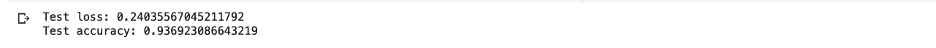

In [ ]:
score = modelCNN.evaluate(test_images.reshape(len(test_images), 28, 28, 1), test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

**Part 3 - Transfer Learning**

**Part 3 - Task 8**

The process of transfer learning can be used to apply an existing model to a new dataset. See Transfer learning & fine-tuning in the Keras Developer Guide or the Transfer Learning for Computer Vision Tutorial in the PyTorch Tutorials.
The images in the Binary Alphadigits dataset are a different size from those in EMNIST Letters. Use a function like tf.image.resize_with_pad(), PIL.ImageOps.pad(), or the PyTorch torchvision.transforms.Resize class to resize them into the right format for the network you trained in Part 2.


In [ ]:
with numpy.load('drive/MyDrive/binaryalphadigs.npz', allow_pickle=True) as data:
  images = data['images']
  labels = data['labels']



print(images.shape)
print('There are 1014 test images with each image being 320 pixels long.')
print()

print(labels.shape)
print('There are 1014 labels for the test image set and each label is a one-hot encoded array of 27 elements.')
print()

from tensorflow import image
images = images.reshape(len(images), 20, 16, 1)
images2 = []
for i in range(len(images)):
  images2.append(image.resize_with_pad(images[i], 28, 28, method=image.ResizeMethod.AREA))

binaryAlphaDigsImages = numpy.array(images2)

print('Printing some images from the \'binary alpha digs\' dataset')
import matplotlib.pyplot as plt

for i in range(0,5):
  plt.imshow(binaryAlphaDigsImages[i])
  plt.show()

Train_Images, Test_Images, Train_Labels, Test_Labels = train_test_split(binaryAlphaDigsImages, labels, test_size=0.2)


**Part 3 - Task 9**

Is the model you trained in Part 2 capable of recognizing letters from this new dataset?

**Analysis**

Our cnn model is capable of recognizing the binaryAlphaDigs dataset with an accuracy of .7781 and a loss of .8243.

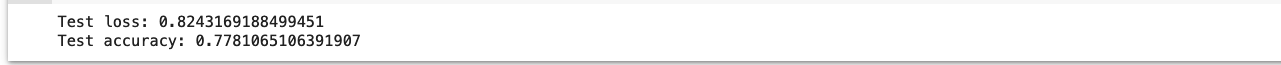

In [ ]:
score = modelCNN.evaluate(binaryAlphaDigsImages, labels, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

**Part 3 - Task 10**

Can you improve the performance on this dataset by adding additional trainable layers and fine-tuning the network?


**Transfer Learning** - which freezes the previous model except for the output layer and then adds new layers to train on


With transfer learning, we can achieve a training accuracy of .7867, a training loss of .6611, a validation accuracy of .8670, and a validation loss of .4646.

Evaluating on the entire binaryAlphaDigs dataset, we get a loss of .2909 and an accuracy of .9230.

Simply through transfer learning, we see that the evaluation loss and accuracy has been improved.


**Analysis**

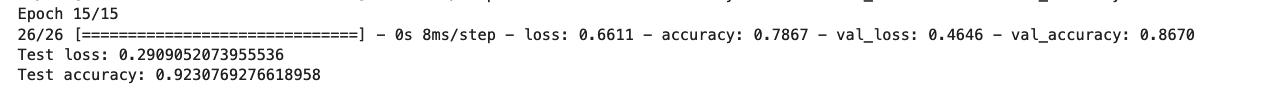



In [ ]:
%load_ext tensorboard
%tensorboard --logdir /log

tensorboard = tf.keras.callbacks.TensorBoard(
 log_dir="/log",
)

conv_base = tf.keras.models.Sequential(modelCNN.layers[:-1]) #copy conv base without dense layer
# print(conv_base.layers)
conv_base.trainable = False #freeze weights
denseLayer = keras.layers.Dense(512, activation="relu")
dropoutLayer = keras.layers.Dropout(0.5)
newModelCNN = keras.Sequential([conv_base, denseLayer, dropoutLayer, layers.Dense(27, activation="softmax")])
print('\n')
# print(newModelCNN.layers)
# for layer in newModelCNN.layers:
#   print(layer.trainable)

epochs=15
newModelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

newModelCNN.fit(Train_Images, Train_Labels, epochs=epochs,  validation_data=(Test_Images, Test_Labels), callbacks = [tensorboard])

score = newModelCNN.evaluate(binaryAlphaDigsImages, labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


**Fine-tuning the transfer learning model**

Second, fine-tuning - we unfroze one cnn layer from the previous transfer learning model as that model has converged on the new data (binary alpha digs) and then we added a very low learning rate

**Analysis**

After taking the transfer learning model that converged onto the binaryAlphaDigs dataset and then fine-tuning this new model by unfreezing part of our cnn base and adding a very low learning rate, we received an evaluation loss of .2839 and an evaluation accuracy of .9241. With fine-tuning, our model slightly improved in it's accuracy and had a larger improvement in it's loss as compared to simply applying transfer learning.

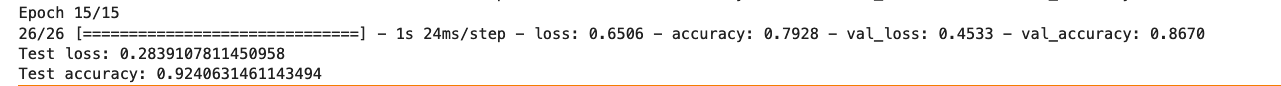



In [ ]:
%load_ext tensorboard
%tensorboard --logdir /log

tensorboard = tf.keras.callbacks.TensorBoard(
 log_dir="/log",
)

print(conv_base.layers[6])
conv_base.layers[6].trainable = True

newModelCNN.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss="categorical_crossentropy",
              metrics=["accuracy"])

newModelCNN.fit(Train_Images, Train_Labels, epochs=epochs,  validation_data=(Test_Images, Test_Labels), callbacks = [tensorboard])

score = newModelCNN.evaluate(binaryAlphaDigsImages, labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


**Part 3 - Task 11**

Compare the performance of the model you built in step (3) with the performance of a brand-new model trained only on the Binary AlphaDigits dataset.
Note: the dataset is so small that this may be a valid use-case for cross-validation.
What do you conclude about the value of reusing a pre-trained model?


**Comparison**

We implemented two new models to train only on the binaryAlphaDigs dataset, one with 80/20 split (without cross validation), and one with cross validation using 10 folds. Without cross validation, evaluating the model with the 20% test data split, the model produced an accuracy of .8325 and a loss of .6834. Evaluating the same model with the entire binaryAlphaDigs dataset, our model produced an accuracy of .9664 and a loss of .1710.

With cross validation, we received an average validation loss of .5119 and an average validation accuracy of .8482 during training. Evaluating the model with the 20% test data from the binaryAlphaDigs, we received a loss of .6834 and an accuracy of .8325, and then, evaluating the cross validation model on the entire binaryAlphaDigs dataset, we received a loss of .1710 and an accuracy of .9665.



When 20% test data is used to evaluate both models (with and without cross validation), the accuracies come to around the 80th percentile and the loss around the 60th percentile. When evaluating on the entire binaryAlphaDigs dataset, the accuracies come around the 90th percentile and the loss around the 20th percentile.

As compared to using a pre-trained model, when these two models trained only on the binaryAlphaDigs dataset is evaluated on 20% train data, we see that the accuracy produced is lower than using a pre-trained model. But when evaluating on the entire binaryAlphaDigs dataset, the accuracy is better than using a pre-trained model. Additionally, we noticed that with training purely on the binaryAlphaDigs dataset, our models had a high generalization gap.

Thus, our conclusion is that while the evaluation results for the new model trained only on the binaryAlphaDigs dataset looks really good as compared to using a pre-trained model, this is only an illusion. The keen observer can see that since the new model was trained only on the binaryAlphaDigs dataset and that same dataset was used during evaluation, our model would have no reason not to get the right answers. This illusion will break once we evaluate the new model with data not used during training or validating since it would not have had enough diverse training datasets to make predictions on newer data.


**Analysis**

What do you conclude about the value of reusing a pre-trained model?

The value of using a pre-trained model is that the model has had plenty of training through previous and hopefully diverse data. Thus, when adding new data and providing time for the model to converge with the new data through transfer learning and fine-tuning, our predictions will have a better and stablized accuracy and lower loss. When training a new model on a small dataset like the binaryAlphaDigs, our model would look really nice during training and evaluating when that same dataset is used, but it would perform badly when new data is presented.




Without cross validation
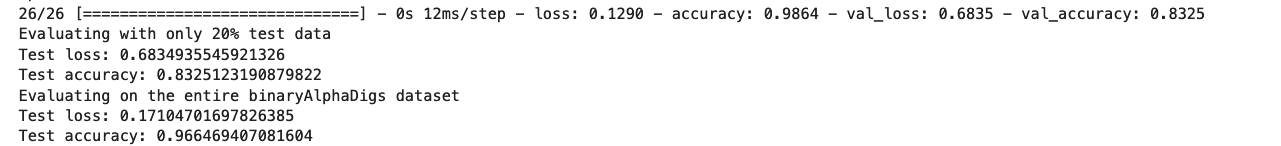


With cross-validation

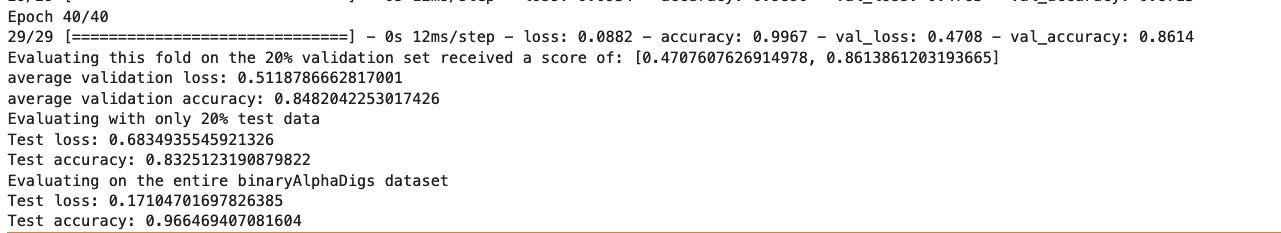

First, we created a new model without cross-validation

In [ ]:

%load_ext tensorboard
%tensorboard --logdir /log

tensorboard = tf.keras.callbacks.TensorBoard(
 log_dir="/log",
)

modelCNN2 = keras.Sequential(
    [

     keras.Input(shape=(28, 28, 1)),
      layers.Conv2D(500, kernel_size=(7, 7), activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)),
        layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
        layers.BatchNormalization(),
        layers.Conv2D(200, kernel_size=(3, 3), activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(27, activation="softmax"),
    ]
)

modelCNN2.summary()

epochs = 30
modelCNN2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


modelCNN2.fit(Train_Images, Train_Labels, epochs=epochs,  validation_data=(Test_Images, Test_Labels), callbacks = [tensorboard])


print('Evaluating with only 20% test data')
score = modelCNN2.evaluate(Test_Images, Test_Labels, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

print('Evaluating on the entire binaryAlphaDigs dataset')
score = modelCNN2.evaluate(binaryAlphaDigsImages, labels, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])



With cross-validation

In [ ]:
from sklearn.model_selection import KFold

%load_ext tensorboard
%tensorboard --logdir /log

tensorboard = tf.keras.callbacks.TensorBoard(
 log_dir="/log",
)

num_folds=10
epochs = 40



kfold = KFold(n_splits=num_folds, shuffle=True) #Create a KFold object that has the num_folds number of folds
fold_no = 1

validation_loss = []
validation_accuracy = []

for train, validate in kfold.split(binaryAlphaDigsImages, labels): #split the kfold objects in a training and validate set

  modelCNN_CV = keras.Sequential(
    [

     keras.Input(shape=(28, 28, 1)),
      layers.Conv2D(500, kernel_size=(7, 7), activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)),
        layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
        layers.BatchNormalization(),
        layers.Conv2D(200, kernel_size=(3, 3), activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
             layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(27, activation="softmax"),
    ]
)
  # print(len(train))
  # print(len(validate))
  # print()
  modelCNN_CV.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  modelCNN_CV.fit(binaryAlphaDigsImages[train], labels[train], validation_data=(binaryAlphaDigsImages[validate], labels[validate]), epochs=epochs)

  validation_score = modelCNN_CV.evaluate(binaryAlphaDigsImages[validate], labels[validate], verbose=0)
  print(f'Evaluating this fold on the 20% validation set received a score of: {validation_score}')
  validation_loss.append(validation_score[0])
  validation_accuracy.append(validation_score[1])

  fold_no = fold_no + 1

avg_validation_loss = numpy.average(validation_loss)
avg_validation_accuracy = numpy.average(validation_accuracy)
print(f'average validation loss: {avg_validation_loss}')
print(f'average validation accuracy: {avg_validation_accuracy}')




print('Evaluating with only 20% test data')
score = modelCNN2.evaluate(Test_Images, Test_Labels, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

print('Evaluating on the entire binaryAlphaDigs dataset')
score = modelCNN2.evaluate(binaryAlphaDigsImages, labels, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

